# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

### Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

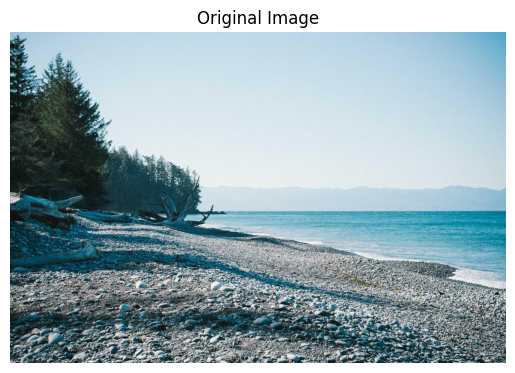

In [ ]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import numpy as np
import cv2
import base64

base64_image = """/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFQAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAMQJAAADoAQAAQAAAIMGAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDEzAP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIBoMJxAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAAAAQIDBAUGB//EABkBAQEBAQEBAAAAAAAAAAAAAAABAgMEBf/aAAwDAQACEAMQAAAB7gPv5QGBBFoAAKwcJgJiGNA0KwYmAmA0wBMTGCaGDEmlkhgmAADEDTBDHFsTTBNAMEwAAaCGmKAgYCYCYhoYMiMEMAaAAAGACAGAAm4jAESQAhgADENA0AAAAhgDBAAmxACYDQAAAADQm0AIbQAAAxAxDQAyI0DAjIABDQAANAAAmOyLahoKUkCYgGhpgDQlJCYyIwTYRbQACGgGCABpiABDE0xMQADiwTBE0xMQxACYhggYgABAANAA0OLBMBA0iDqLAFJEZCRNoQ0IkgTQJoaaoHEBoASJyiIapNoSYyhgk0gBQhAAIapKSQTCLQgmqi2kQ0RbVgpQAGkAlZBMSBMrqg/P66bstFmC2ONPVFVk1ICUITCQAhqAxMRKLQwYACYAxAwVNoBoBgAA0wHEaYAMSYDAQwBMaAGKVoYJoGmAA0A00AAMBMQ0MAATATBDAGCAExDAGhgmgBiGgGhpoGIGmCYJiGIJQkCaAGCaAABgCJCTBDZEAaYJiGmCAAAaaAAEwGgAATBMBDBDQDBCYOMhDQAANWJgAAJgJggYhggYgAAAIkgQ1JAmgGgGgAE0wEANDQxAkGAhhFtAAIYIaGhiAAAQwQMhISCYIYJSVCYJgRYApJEpIQwQMSZSBkRhEYCTRxkqQ0IlFlDQAEW1ZFtCGERglKNiYCTBKSsiDSI0IasSbIEhIpqyJIOpDgUcfR2vLdCWNcPtZMUvqer53n16Xncntpt6cJaNNzSBgAAANMEwGIGmqaYACkAmAADBDTQxgAhiYIlCTYgFYgYAgYpAIaGmAAIaGJiGAmxAAmxDQAxAwQA0xAxMZFpiGDQAmiUWAAIlEYAACGCGCbQAAACYJgCYAMQA4jBMEMAQMAE0NDENAwEAAMEmCYA0CYNAJgCaBjIsBADAEDEAMTEmUA5EBamCIaVgIAhDAABMAaAEDTEDE0yJJCGEW0AAAxJoFIQBAOIwATBAAAJgIYIaAaEMIjETAE1QAIaAaQUkIaENAJiAoTYoyCLEgNCGUkwQDKUkRbEiBQCBSREZSTSCcQGWJSSKMgjJFkYyEQIALPK9Xz0vL7Pb+XKl14q541Vb0O1vF/Uyat5Y1NDABoBgAwEwE1ABpoAYAADExkWmJjE0wTIBMAaiGJgIYNOIwYhoYmCACQIUhAAAAAMQ00DTHFoaGIGAANMQ0ApCBiGgAAcSSaAAFJANCJIBoaYJgIGCTGhiaYIBiYhMaUhAwTQDQ00JiGMEmCGAmAJgAAAhgm4gMAEDTEMEOJIQAA0IaYIYCAGAhgmgaaARY02RYAhiGgTYhgmgABMBMQpCAATTEMENAiQhpBSSoYiGgGgTQ0wQMSGJMESQm0CGiAAEIbpIAGIgBAxAgTZFhSTBAANAnFAkqiMEm2UOIKSRAUkwIsIjVCYiUgiOKAKwUggpKxKSIkxPnjb8X0Y7M8rIasfpbz6unz/L3no+08h7DWZNE2wQwYhgCapgNDATAGRkAAgbATiNhAmgYKmA0MEADRJDBOIMBSATAGmIABghgmgaYA0JgAACBgApAgAYCGACGiQgBDAQwExMBDQ0wBMBMRJCGAJgAJgRbQDBDBNoBMEwTTEDBSQmgYmIYCaAAGgcSQhgkwAQwBDBNoABAxNADBDQDQDiMAEwaaGosYmIYIaAAAAARMKSkCGhiYhSEpIAATBMQKSAaAEMQDAQ0DQCaQYCAGmgGgTBDQhghoBhEaBpohoBxoAIyQNDSDYJSBKUQUogNUJoAZEGiTCLCkmMoYIEhGapACTQJlRGIhxBMRKcbEmhKSsQB42fYzcO8Oft6x5LpyrzvqVc+7eOx0ub6MmNTY2lYApIBpiGA0wEwAATGJEgIEwTaUABpiGxJoYMFKINMEwAYmIAAGhiBiBghgANAMEDBDAQDATAQ0NMBMEwAAGnCaKBqAaAABoAAEwApoBMATIYigCEx0gAGCaATAAAaAAE2RYAmADItMEwTTBNAMBNANAAJgA0JjEAAAAhpxG0wQANAAAMAQAAiQgATQSQJoBpDGgYhNOkxpFiAYRbQJgmA0IAQwAABDE0AAIJCBADQQCYCYACEwEMEmxKSABEiRCSkRAoUogNIACTYkMQ0CZURoTaABEpITCojTKGERggLCMkRYgTZGMyyI0IBIjdQBpEBPMei5HI4ei23uXazx6upI5emng46e/6XhfdazMz3NTAUFITTAYAgYAmwQyEyBLPHBc9kU5oE1AQwQxMAYgAGxAASiNNDTBDATABiGgABNiBiYAJgBAJgAACgxEAoDRKSVpxJJoAYhoAYJoGmJgIaAaGhghiaYCYgBoAAGmgAAAAYmnQmpAGqE0TaEwoaAExoBMAAAENMBNDQApAgYmMimyLAaAAAEwBDTAQDQxAxAxJgDQACYxJoalEAkRABiEMAABOwTAQxAhgxDQIYhggAUkCaAaAaEDE0xMEjJIG0CABoAABADEmgGJFhQmoQykwENIhoBoQ0CYEW6iSiCYRbigpKk02UmCTZEaRKSoQCGhKSsQAgESlGkMSnh8Z+b0vrc9VGEsmehfm6UdHr4Or288O1wNcvXYnRgCYDFIiwgbiDTUIiPBsw3OSqi7XP0Us+jPYAlBoBSEMAEDGCGJoGIBgAA0ANADQNADIEwENRMBpiBiABMAaAaAYJiAYIJERoYA0ACYAAANAAAACbiNMAGIABoBoUkhpsQIaYAAIYmmAIaaGIGJiYgYCaAAQcWoDRDVAAAhpgAApRGJggGmgGCaBNoAAUkNAA0CGJoAYCGNAJMGhiTBDQDAAENA0AmxAAAiGCAoBkWAJgiUQaAUojUgiwBOIMBNCAAJgACBiBDHEEwaaE00SkgTCLapMBKSRSiCAGhiUkJp0kAmIAEQAhlRYmQAQCRGUlJESQRBWDQRYkYw+cb8J5fd3el5X1PXz+Vp2a+fbl9XNC8+k7+/054u9yus1aDm0MAUoTQNMUTAGigL7mvjaOKxbG2nWet1/G+pzrUBOo8mlG6rFJIBgIGAgGMQpAIGghoAGCGAIGDVDBAADAQAwEwQMBMaEDAAAAHGQJxYDQAADECGAJsEAOLAGAmgaAYEZJggAAABiAGhMBpoE2IaATE0wABMEMAAEMTUiLAQ0DAQMEwAEQOkACaGAJgCaGgAYIaGCE2gAEwAAABoQwQwBNADQ0wTQKSQKQIYRbCMhDQCGIhgmigAE2IAQSIiY0AIYhghoTAExEpIFKIMBKSBMEAAAlIEAiGEWMiwpKSBMQi2RYCTBNAJlRZIgNIhgIKEDKAENIiUaQ0CGQbViTZEYngJ3d3z+jyurr+cLNfP6WemWC6Fhb3c3bz2epxbs9ACaABoapiGMBIHnjazg3ZNlzn8z67ySUz07zk+s5HYXRWKb4vS4st8un0uB3c7k05sUkCYA1AwExA0wAVMRJAAAMBNME0AAwAAAAAQwYAgBicWDEAwQ0MQNMBME0DiwGAgAaAJIAQmwAQwAEA0DBDTATBAwQxKQCAaAaAAAGgBiTAGgGgaATYgAHEkERgAmAmgGgYIAgaVNpwJxoYCaYACGCYAmhiYAgAAATENAJsBNDAEACbEACYClEBoAQwAABDRDVJgAAlIExADEAJSCLAAATEQ0OLBwbE0ACBiAaGkwQIJghggKABDSIaESQkwE0EZFIaEpJBDECoBsxaAQIhqkNCYERqxDD590Ol5/z9/V8OHe1nyHTzVY6r0vH97rnfgq3amkCbGkOrJhZ74JsckJgEJhzeV0vNa5bu1wu9Zp4fY5WdcffyurJ0uf1jTbh2cbOubXyO7Js73nO7ptYToA4QMUklaYAA0MQMQA0AAwAAEMATGIaGIBxYAxDBMAEwBDTAFIixDAENkQYACJIBMEwABMATAGgAHFgmAJgAAmCkgTARJAAAmIYCYAMixDQDQA0xDQAADE0xAAJgCG0AAAMQMiwEpIGAgAGkBqgagAoAExDEwEDQCkgAAGgQwTBKSBOQkwQANAAAhiABMBSBJsiAjUgiMpDQhgACAGgAAQ0DQA4jEI00AAhsiANACYJSBJgk2kWIcZIBqhNIIYRkERoQ0NBSGhNCJiBNUJtmIwiNJFtUlJCGiJMT5xdmPL7dnU89PWNsK786lfZm3z6fV4+vpy9Po8psXb5eVyXelVM1vAnRMBDxJtzq9KvH9vBcU+k8x0F9F5/Lz5c8yvnu27fr6cxcbs1y+zyeqnL9BwfULpKLJ0sE5UNiGhMAaYCAGyIIZJAADQAwEwEANxGhiABiGgGCGNACGAAAKQEZIE2JMAAGgAAaAGEWMEwTQA0JgCbEDEMEADiwAAAAATBSQNAApEWmJjEAAAhgmMQAAhtIGmCYCYCGIYIaGgBNDEwTAUkJiAaRMYJoAYhlIAAATBxYCAaGIcRgAICUWIYCAAAAAABxGmCAAlEcWCYkBgIVSQxJgmmCYCGIEAMQAAIJgmkAwQwSkgTBDQmgAEQwQAJlIGIEgmCBiTATVIaBNImIABAXKGhDijTQk1SJB81t1X8O/KXWwzWexmdT2Qq3zLp9DWNNvL7G8dPm8KnG93W4naPRW0XtocVefRVJ4/1vip3HtM1WiuHz+3x5O1o8z018/pofLr0fQeQ39eTxdfMcTsQ7M1VKHM1judvldNqcef0s6YxoQxDAEDaAAAAAAbQhoYmCYAAAAJgmDTQpCBiAGIGRYxDATQAANDUkJgIaGmgaYAhgDi0MAAQMBDQNMTAE0DTE0wQA0wQwBDQADAEAmAMQ0JuI2gTTAAAQDQwQMAQDQADBNDEACGACbIgxNA00A0A0NDE0IDQ0FA0AmCYJoGgGJiGCExMAABDENDQxAAKRFgJNiBkW4jTSCbARQAEZAIAaAAGgEAJiAYJgkWMIsE0xJgIATBAIACTZEaBMoTEQ0CAcRiTYosoTSCkhJhFsuUgAQJSEgBWbVh143iw9Tz0ceCs4+irr8h6z7rlZ9nbzE6uyc30HkOq16K3z2zOuq/I+rlm0N83oVefvPV5T6D5iVeg8H6tMV3n+1LPJ6ujU8Xk6eDl1vq7EtY28CdWpt08S+I+g5HrNSzzvTus16MXQz0kkTQwAABoGgBoBoBgJgmANA0AAAJgDE0wTQNADQwBNMTTATEwBMEwATAESjKIwAQAwAAAABiQwEwEwAAGRGyLEMAEwBMEAwQxA00AMQMEMQ0AANA00DEAIYMQAACYyI0MGRGCaBpoGAhocWDjIItMQwABMATBAwTBA0E0AAmAgdIYRbQDQ00CYAAmAKURpoAYgATATATBAAAAAJpGhDApxkgTRKLiMGRYhoAcZERggEQMQAKSBNkCURoAARDQDiNNUJiIYJDEOIDQgKQ0JgkRoFJXKYhKSSIw+dPO/N7OjHDLWIyh1ZrnLf1d8uLu63N1jR1teTeDTZPO+bh1dO5z97HDHXeedvTt8jndOzB0tfGTk4u3zJeF2+T1sdO9yuXpuXmUue6e5yOp0x1/Ld7g2Wen8juXo7uZzbn1GXoa9S6dfFzvq6cuqaAFARJCGDE0wAAAAAAAYIaAAYpEWMiwFJAJoY0CkhNMaaBpiQwQDYCaYmAhggATAYhoAaBuIJtA0wTQwQJoaYCkCRIQwiwAABMEMBxGOINADZFgJgAAmgJKJJDAATEA0AwQAKSAaBMBME0DAEwExAAAAmAAANA4sAAQDQA0hgIDiMAE0DCkxANAKQgAYgEwExNAMCLATTEmApAhoacSSBEwBAAKhgAIBoTAEAAAIQBkWAJghoQME0JiABBMEOIDVDQiUkIaBDECGmqEwi00Q0CauSMoiJB8x125+Hov3YPUb5eTq6HOx126eQrOhjj0JaO5fw+nFdPB6uOLv28nedOnVOWvLu0L5j2HiOrnXpsmmqa4uCXKZhztt3Prmp25JbtWLt3PGsUJSrTTZdo4+ldPqsPX6Y6PH5vRsd+3KnSUXOklGQAwTAAAAaAABiYgYIYm0CYClEYIYMQMQwQA0yIsdIDIGhMYgYAgYgaBgCTAaCSTEDAAEwAATCMkwQAAA0DjLRDQAwQxNAAAACbE0DTQDiMQDaE0xMATBAwQAANDExDi5CBAAMQAAMBAyLAEAAxNA0wQAAA0DEANADEpRBpiGCJRBoGhokwEwTTpMBAAACYNAIaGAIaGgAAEMQAJgIYmIAaIAEygASYNDIjCMhAAIaQAAEMQJiAaESQhiIAQAJlJMRDQhoABAxIKQ0JiQUoiGXIIOZHyL5dKZ0GOu3NDv6mCz2Pz/XLrV82ya9HmwZLPX5OF6S4tt0YaOd1dEumfN6k1y1s5VmG7m4+e+5VKVnG6mCfPpbyetUc6+3EvYwpo8ehrltrlWi2jfc+g9By9m85qsHL1z9RT5v1J1mLPZgADIsAGgYyMosTENoEwyABNoBoaAaGJpqIEBpQYCGAmIGIbItMGgAAAGgGIAAAATAAAaAAEwTAABAwBDTBAINoTAAABA0xSiDExA9EDEmDQxADjIENAAAAmANMSYIYIaGDEgGgAAAYgAABMBMBMENDAEANNDEDQCYDQAACYJgIGRYxAAJomAJgRkqAYIYkwTAABDQ0AJgAACGgESQACGCYkAAAoQANBGQCYIAABJiAgBoEwE0CkgTQJpAAAiMCkpCJMAQRbQRkgjJUmCKMkAB8zJS4d5Enc5dee1e/g5c9ZlZs6dydHzeizRi5bzd2x9jeMq6PLM0Jehzvy9yrzrq+f7nCl9NLyWlIWRq5706ubbWZasUs7abKz21xWVd0bE5Wp2+54mnfP2PkduStPvvFelTo66NDacWoxDEwGshpkWAIYDAEhtCgMABAxDAExMAUkAmJsEACkgAAGIaBiEwGgATAaBMATAATUiLYIABoBoBMBoBgIAGgGgBA2hNSItMAZFpoCagmCYiaYIYhgmgUhaAANMEMQAMQAAJiYAmCYCGgYCbQgABgIAYIAAQwAQACGADECkEWAAxCYgBoYgABiTEQ0NDpMBAAJiUgEwTEA0JgAIAYgYkMTEgDENCYCAoABMEDEmyIwQ0gCBSQ0wiNAAAIASIYCAGKk0IKSEDIgAmCQ6SYiAOFihryt5/oYWed4/Ryc+9tG7mM9da+nvHnt/Qvivzn0HyGp3au3Oa4PnvVeXkl6rxW3OvZ+Q182sNfU52NzvqpzbLseiyiOmGbPDK5aLZ0Bm00VOdElshXdZpqULOnky9rWOv3Ofyd49ocvFNdY853U6Ri2zomnkA1ixogaiaAGCYAAAAmApIBMAYlJA0xNMEMQANMEMBA04jaBoYhxG0DExNAAwi5ERoBgkwYAhgJggAGgABiAAAYgAGgaAGgAAAAQDQDZFgAAhghgJiJgIkhNAMWgMEmxDQmADiMAQwEMEwQwEA00AwSYJgCGJoGJgmhpoYgUkxDQDQDQJggABiZFJCBxGCAYmJhSAATEEiI0A0CYAIGIE0NMAGRGkBoAQA6Q4jAENCGgGCTEQMSYA0RYgBiTSAAJggBNKxpglJCUogwEmqYg+XiPP6dTzSuSM5y9Pqea7HTh6bL53q6lMsvLjv4+Nbnff63jurc2cT0fIXm3XRx0FlnHUi9OsV1ZHnUqJGdaIZpjqsRZCyolRdnquy+FVwHVlGquFqndvnbq9f5zWOXDL6lNvAo312utCeezQ81AAxDAAAEwGgFKJJAMQNKQIYhgmIBghoaAaGAAmIYAAhpsSYJpgAIbEgGAIYJqQhAxMTABA0waEDESQAIAaGJgmAmgaYgYgBiAaBpoGgBoBoYgAYhMAATABIAxAxMCMgEMEAND0Q0AmAAmmCYJiGAIYIYJoAaBSQAhghggGhpggYgZFtCYAAIYIGIAAATETAQwQ1TTQAAhiGhkWCYAAgABiGhDBJiJpgAKSVCYCAFJCGESSQAEpITAQMUZMiOKNAEZAhoExEgoAEMIkkVkw+ZVi4ehoYnOskhhOsqc6lE1DSJw6es4betHXHlyzxx2NdlmbZjtypKydSuE1F2aVpStGclogDzWFZJWaq5l6uM/a5dtz6LhXmsbOFbch0ocjU39no6l6Kywm96ks6AQMYk0MTAGIAGgGIZFgNADEwBDEMEwAAE0MaE0xNglIEDEOI2mIYAIARJANANAA0DAQA0IYACkIENSQAAANDEANAJiGmAmAhiHEakCYgaABDGCBiJRAATAEwAAAAABAAxDBDEE0NMEAA1oDQAACBgAIlFgCBoYhoGgaATaBDEMExDQAAAMSkgAEDBMBMItoE0jEhjQ0OotgkwQA0AmAAgHEaYA0IARJIKQJNACGBQCBSiAA4sBMRDQJoaAQ0AAhpAAQAhqxMQJsUWxEQ+XrRLz+jOFlVxugRABxFmO9IzruTTbj62scS5143oomop6WaRvowa7N/GvzGuqu6KloirqzbCcqZlalQPZiVSdQTqm6JTyaxporkuv03J2ax6fxGdR6Du0djUsEsdZEZACGCJJgmIaGAAmAmAAAhiGAANAAAAwi2IGIAGgaAGRGpAhoBgCYgBpggBoYgYJggBpoABpggAaBMQwAAGgAGITEME2gaAGgQDTBAwBADExCbAAENAwBJgACYAAAAJjQyLEMAAQ0CAAJgDQAAM0QAKSAQMTBNDExDQAhgACGJgmgYgaYhoE0MEMECYJtApRGmhpiIAABMKEwQMQwSkhNMEAAyLAE0AA0JBSQDjTTCLGIGRGCTEQ0CYJoBMEpIE0iJRBSQgZEZYkwBB8vTjw9EtmHdc43O1bs06rinTmlnpbbRosln7XDuL9eJ43dnk11U1KSeuugVoiUtEEzW5ZL0VlriZbXTjSqnC6tYKADiVPrcZ3M6bLJaejr42+fpPOX5kOhh0r9Kt8707Onztvz2z1vZ8nuO1bl1Y6ACgmJpiYAAOLABkWAAANA0xKQCAGIBggAGCYCBiGgYCUgTTBMEpAJgACYgYERsTGIEMQDAQMEACkRYDQDTQ00NADTEDEAAMQMQwQAACaBjiDGITATBANNAMENiBADECBiBgAIaYCaGmACGACABsiAgANANACYIZomgBgJxGDBCGAAAIYgATYgBDZEGAmCYCAABSSAYiTQNoFIqIwTAQMixDExDQiSENADEmIgAABDpKSBDBAAAhpBMBOIMAiA00iYCGgBAmWAB4OziW8utV1Mc72U0s6OFTsgSslNdE0hmvrHbm2SzUqpHGq5a47s6SsrkR03YEnU9K11X31kq2Vywp102QiprVCcRSUiqElTcRLYEbLXANlmHs65eu6PA8jb3uJHezfPn+x1OvIOfcAAABMBoBoBghoCURpocWwExNADAEA0wBkWMQmCYJpgNAAJgJgDQJgCbECBpgCGDItoBoAAAAATGIAaEMATAQMQADQDBNAxMEwEwE0AA0AJsQMiwAUhJghgAyIwUogAxDCLABoE0SQCYACGmxJgCYmAhoaATcUYMQMiMEMBD0QwEwQMTQNNAACGIAAYhoAQwAUgiANDEAAAAkaAQwIyAAoQACGmEWwi2hMAQyLAE0gACYIlGkwENCYCARMABCGCAEDRRkyKYIaABPlaa4+kTABEr6BLrMthfROpJp3LDTTZmZ7k7YaKIlk3bJhnprNRTdJknZmt0W495lzyhbe6b4jXrw2JRmpG+BQrK7EpMVkZ2QHaUaKgjfnnZsWHZc9r2uHo1YZdM3JNQ00AAAiSaGJiYhpgm0IYAmA0IbE0DQwQANADE0AACkgBglIQMEADQDBAA0xAxAhjAQANDQAANAAMQAJoYAAAJiGgYhoY4sENAMBMEAAA0AmMBACYACkgAATATBNMQ0DATTENkRgnFgmDQAADTEDECAAaYIGIaHFiNDEMIsQxPRxYIYJiFJIG4jTBxAAYhoGIAAAEMBKQRYAAhoGJAGRYCaYJoaToEDTQmAAgGCUkCaAaQTBDKSYCYIaEMIsSDQAAhggQJiIAgXB8n1VQ494TTUFcka90TE9dQVWMp1VONddMTRCyUjlC0qusoNWWxSZJvXbLFdmkL8prWiqyosjGwirJGCVldE4sK7qiNkSyV/Y5mudNlQsAjmqTusp9Xxva6l/A6Hntc+v6nDux2BErTQDBNoBMAZFgApCcWAIbENEiI0DjIQAMBAAADEMTENAxApAAAgGAIAABoBoYIYgYIYmAhoUkwTQ0ANADQKQJMAAUhDiwAQwAAATAABMBAAwBDUogAAwQwTQMQAMiwAAAZEaAaGJgCAGCESEDQAmCGAAKSQEkCaGmARkIYIGiTZFgJjEJgBogQ0wBMAQ00DcQBiABSQCYiUQGgGEWAmAJSIjEQAKQJkaYAhoBoBAAAAIYIBBSQgBDQDVCkgTQJpBTiAAgZEAQSRCD5UROPokoyHOq8vTpZuvx2DhO4y3phVEiyULIrtq0GnBfQXXVtKZrStdWznxE146cbKrbqJ3AFYmgpnFVZZmkmt0dXWddHS8drnu5yeejthOV+i4i1jp0cvRrJ1ORenqvT8ftZ6CiTU0wAQ2IBoAAABoExiCREYIYCaAYIYqYhpghiIklAATBSi0ExRMBMENkWmgAAIYIBoGAgBxmgTZFSQxADABDTBNAKSGJggAaGmCAAaBoBoAAGIEwTAAQwQEkJoAYIaE2CaYIBggHEG0JgCkhDAQDQwTBDQyLAaAGJoAAaQMTEDEAJgAA0CClEGIYGiGCHEY0JtAmxJoJRYhoFJCYyI0AAADiwEwQmJggAIGRbQJgJuojQNAJggAGhDQAIACGgTKE0CAAEEwQIcRgmgAPk41x7tqRZflsS6uLCdNoR0tKKVBW4pbSqyTTON8lc0zPoszmquExaOfokjNyFn0xqFdc7qdVV5VdAWEkIR0X2YI3UVKsIQTq3dn265XcbVmF2eT0an3+b6Ozo2VcWbp7nE7bOtNZ6Aefs78qbZQYJpiaFaAAYAACJCQ2gE0DAEwAQwAjIBMAENMBNDAAABMBMAQNMABMBMQ0wAAEAwAAQ0MaE0xDAQxDEjIQ0ADBMBAxACkgaTAUhDZETBMAAAABDEwTBoABADBAAAAADExAAAAmIGIGIBgJoGgAAFIQAJgmIYgaAGAACAAEMBAABMBMQA01omAKUQGCYCBiAEwFJIYmCAABMATQAyKkIJghoTEAykAA0IaENiTQDQhiIYIASaoJRAEgNAmgTAAPk1hLj3nK2aVPRmNVUYE6bolkIWJCu6MtVc4ivLBX5YR0ZYN0hVdSkKdDulRZcUSuqTZRKuTHfCrWrc9qHPNeXUXiVwhGouUVlCUkr6XOdlrq6msKrp165x9hng0+dZdc4uwUkutzKpr0WfkeTjv7+V6sukLPZgCaYIYAhjCMhCakJNEkAm0OLAAAaGhggBoAYCAUgENCYCYCbQJgAA0wTBNADiMATGIAAAABoAGITBxkCAQwAAEANkRpGAqYkaaGAAIYgBoGmIGRYhpgCYACYDEAJiAAYJoAaAaBMGAIcRiYAEZCBkRgAxCkIaGRGCkIAAQwEwAENA0xAAmyMkICYmmIAaATFo1JCAExiFIQAmmCYIAEwQAJgxAmAmhGgBMEDBNUACGCTATAQAhoJoBMSappoEwi5RRMQwD5pGqfHtbbRYTqnIosnEpjrpSVldpVPMS3xhtTDfDMuuWPXFt1ak0QrrR2RmtLU7YjmV35s5oz2Qqi6MCML6qnKmaMBWrKAkmlkLuhvFeCVFnoOhiw3Ho+P6KZDVuztc3ydeJnT38fsJcvN7HTqck8dkwAAQwAABDAGmhiBNghggBDAGhoYhg4tDEDTZFpiYCGAIAAYBGSAaAGCAExiBiBiAGhgCBSQADQxNA4sAAABMAaAAEANDATBAAMQME0DEANEAAAAADE0DQCGhpghgJghgACYCYCBiAAaAAAATAAAaBAAwQAAxAhjQAA0AmAmyIwQMTjIQApIRxaGhgmhoYnE0YmIAABoQxANAAxJgmIakhKQIGJNAAgANAIRTBDBCkgQAAAgQBANAAIHSBAMSBMPlU6Tj3skrUhJ1nRhlrL5Q6Kce6dxXC6cue3XisMd1UqsnUSvq2SVRlA1RhGW6NuU0vIWXRspKpa6VzVydsY2UoIdStzbEjT3OXY7Ks+s7MNledSlquJ9mzfvlzuln85Z6Pl5+vZw9fbtK7dtc1Z0KbM9GmTQAA0DENNDTQAwECbQ0MBADBDAQwEDEwUojTBNMEwIyBMAGhDATQAxJsTTBDESQACGCGgGgGhpoJRABiGgAAATAYgBgkwQwGgaaGEQaYACYApIBMAATQDQ0wQNBNKwEQACYNAAiSaEwGgBNANANiQyLENoGkwaABDGgAAQA0NDEmADEmAANJgACYIAUkxACYgGCGgGkEwEwAATWiYANAJghkWAAgGgAGhiAE00iNkRghoTZSQA0CaBxkhKQIGiTBCBplJSiMA+Uqx8e1N99MWwsSWXV21XltqSV0KrN0udKW/NOUFOjIt1ZMUs9hc4El1/P0F5fXK8PRpMV1Flba6BKndXbCsiIlGhwEnZSyxpyqVXo9Z5/pvO9TeO95mOfXPdu8eTXf6fmvdxc93Db5PoK+izCnk9iXahzolJAMEANAMAEMTAAQwBMAUkAIGAJgOLBxYDQAxNADQmmDQJgAAAACGAAMQmCYJgAIGAJoaGCGDiDEAwEwEDBANNAAAwQ0AwQMEAAAAAAADEApIBMAYhMTTAQOMgSbE0AMRJgMQAAKQgAABMBMEAAMiwAAAYkMAAUkCaBoBMAAABoZFgKUQYgBoFIE0xAhjQhggYIEAAAED0QMQ0JgIYCABoFJAhDAENDUkIaQTBAAAICgaExAAIaExootiTCJJUhB8ujthx61uMYsUJ1dCuY6dOYFF2RlprltM88y7PdsMUCu2UZ1FrTJxcCezEjoQocWQUSKnClozwLSdZXXbArbdRcUXOtFvS5WzWKlLMdvlVqx9nixzq/03luprPr+D6DBvl0nj0TW6zQ89ZApQaGAIGDQJgNCGmhgCYAAJgCbEAMENAMEDAQ0JgAAACYwQA0wExAxAAhg0xAADEDIjYmmRkRGmAACJCTAABNkWAgYAAJiYAmgaYmIaAaYCGJgIAGgABoAUkCYIGAAACYyI0MTEpAgAAAAHFikkgwAEMENANAOLYmIBoAAAEMBMAENNADEAAAAxIZEbAQCkCABMAGRGCGgGgARMQxMQ1oAxJgIYgBMQAxAhiBgAmhxaQGgAAEDFSGCaYk0JsIjSAAhB8yqZy62U7YmO6KIzjItdudGpslKuRSrZyytsimPNoJaYaq6S144uzWKoTViq+utNVUAmVshY0BCwrTRAsVUk4CkwZCaIaBOdVtdFNnU1c/py187sw1nF6LL2cbvM2jPViBghgCbQmAJsQIbQAANIbABA0A0wEwEwQ0AMTEAMQMABMQxBKIwAE0hjQKQIaGmCTYCYmmCAGmCGIAAAUkAMSbEACaGMEAA0AAmmA0JoGCGIAGIYCGIAaAAATYkMGgTABMTAQ0NMHFoAYhoTAaABoaAABxYiYKhiCGIYIABMGBFgIYAAgAJRAGJMBMEMAATEAwE0DjITQJgJpghkWMQAhpAaBMADRDBCYhghhFjBCGhiUgSbIjSJtAmBFghqmRkRYgAEAiGHykVnLrVZCRK3PcLRnDRWKyRYRGVUx6Ks5owRirnXYWuucact2WLqh0pprNQihpx2GnPOBbOi4rhAq6sjBOCqSSLK0BJMQmOcCyTg072HFHWPY8PlTOv6nyvo66PW5Cl28Dz/YTt9fHsnQTBpMBoAAlBjExKQIYIYAAIYCYmpCEwUojTQMQ0wTTBMEwBNDaZFjEmAmACAYAgTYCYIAGmEWwBDEACGNAAAMQMQ4g2CQwBiGhSQOLAAAGRYCaYACBiBgmhiBxaGMAQDQAA0gYmJtCbiAA00DIjExggBEgBAA4sTTE0wTBMATSAADBNADQCYIATYJSEmAMEAIaGCBgEWwQAmhpoaAYmJMAEAwTAQAAIIBoekWAJghoGgQMQ0CYAAhxRpoTAQOkpIRKIJghh8ncLeXUQkc65GhToJwqLNEqJxJaYrTQ6QamsXIhXVQS5wsExjjEWwcEoJK2ai4VtLHKrRWnPKqSEZwpxkA5AydCApKnOuxydiW59mNl97hehrtqfK1jVdm9Pb5fRdRHqRV562jQ06S0y3k3k1DQxAwAgApA1AAGoAAaZFgDQAgGAAA0ACGmAAAIYAhgAiSFTGoGiwGgaawbcICwAAAQwQMTAQwQwQ0AA00JjEDENANAmANA4yE0CaYJgAAAAAhgJgACFIQME0A0AIYAADQAAEZIGmCaGmCGAgAcRgxAxAAwEmCaABiaaIBWIQAExDAAATTBOI2gABoAQxJsQ0CYAAmAIYhggAEwTQNME0CBBpgmgA0E0NAIGIYJANOI0wSkIkA0wSaoAAA+X6MN3Lpqz3VEUrCiNkCLTJ257k1ZoylounZZkncohlmlUJxtlfRdE6JQLoaKUqTirsqdW1zrItoNNIlkJ1ROtzqougQlFFkRomK0Uklt2aaTia0zdTFBOnjx7tZ9D6Hw+2ux6Ci+bOXr5Segee+bzZzl3Gmzm5LO32uL0prSDzuIwE81mkqtBNyoaFJADQAANANAAAAIYDAi2IAGmIATAQ2JMBSAQDiwAAaZFjEAAMQADQACGCYDjKIMAEyMgoTUAyxDBMFTTRDQDQNME0DTBADQA0JiGAAACkJpDBAMENDiwGmIaGgAAAZFpiGAmAgAkhNMQADQ0wQmNAAAAAgBgIAABxkkBoABDBJobQJgDQIYCaGIGmCGhMBNA00NMEmCUkIbCLYEWIaAaRDQ0zSIwAAQhpgmmJMAQgAIaEMpAHyq2t8ukZ50ar8VpFTgQBEpwLJ2UziTUC2WeqW+UIxdbWrCmyCqKis5rQZ4q0plFVfFXSUzjNa4tVIEk555qMigTiRbSMiVJxZJJQ3GVSViRyrsuT0fnurqe7XIzHV4ne84ne2eK6s32+Bs51xGmzJnXd6vjt2p7cxbc9AIyrBs81rn6azn9KbTCVDBMBAiSGJgJpiGgGhgAJiaAAGCGgBpiJIQANMEwQAMAjIEDEAMAQA0wQwEANAAyLaEwAYJMBMAGIEAwQMTATEjBK0yxMBAANDQxAAyI2gAATAAAAItiaBiAGCYCAAaGhiTBEkJgCYOLAEDTQmAMQIYNAAAJgmgGCYhpgkwTaEMABE0CYxNADBIBoYIYIAEwjIEAAAKSBkQHEYAACGCcWgCAENN6RaBMBAxJgIYhoASCYAB8hsS59QtaVsmVjYE4pKu9FJOCySkONghFAoOKziIsiJdWggmSKRKJMi0wcZDGEBMYgnEkJiIDQ0wUlJItOhqQERJoRp0c8ue3r5Oywhmtzo6GOxOplwX2aIZNEprx117Hd4/tr3sl2RbeOudrHV7PM2zWuVVc1qESsGKE+ZZ0Xk2CbjK1XVZqAlBMAAAAAQ0NoAaAAEwEMAABkWAJg0gkkwQDAEDExDTAEANA0DBAwExAAAMjJAACYAAIYJgCJEWAACGAOI0wcRhGQJoRMBMdIGRkITAABDAABMAGRUgTQAwQAAhiYAgGADISQA0DENNADCLQwAEDEwAEKQJoBoAYJMQADBAxNCKSQMBNoHEAAAAEAxACGACGIAE0AAJsQmiHECS0QAACYCJRCMkDAiMEIT5Rfn3c+kqd/LlsFUShKRTbTOzdTXYlb3wMUtIY46UZrYVrdRYiqW6gIWWJDPpzVBhNJto4SQpwmIEWUykV2ADgE4pgCG2kEKmpIcosHNpWNlbdpK3Lp1ierISaIUPUutyaS/Vzrc7EqbnT6XyOmzubfPd+WnLTqt2dPgdJexzdmrOvPVdXiXGzf5jGew5umVtPe4+2a2vPfLkyW8y49McLuTbTJQAaTENkRoYMTTIjZEbCLAGgBiaBpA0wAQDAEwAAGJMAQDcRiYIAYgGyLTE0ADBNCkIAAUojBiEwUkAwE0A4jAE0wTAQwEwBDBAwEMEDEBYNANAAAACGCAGIAYRkCABMFJMQ4gMEDENDTQAAACYJiGAJgCAaQSiwABNMTATTEMENANIIYgYgYkMAQxA0AJoGAnGQgABAxCGACBgERiTaALQQxACGgAEMPku7nT5734owNOeIt8s98VtFlk6QtnUrNN+WqL6DUZK92pcFjqJQkJGahSgQNNEoxEnqXMtAmaarVxJEJAOUAsUQlJCCEEhCU40NMYTSDsgIGWXMuKGSK4aZVUWx1hCRd0c2jG4URhZKmRZr6PMCyzDoNfczdHO6On5HtWeg5t3KmubMzaxoy7dE0/ScqU11eZLi2bYvjSeotptt2zVE1peXTK0AAxNAxMQAmMQmDENAAA0IknEYMQ0AAACGAJgJgACYAAAACGmAmhxbATEMEpggATQDBDQAxADQANAmAxAAAwQAJgJgAAhgmCGCaYhoYkDCkwBNDQI00EosQAADQxAwIsAQAwTBDQAwQDQxDQJgACGgGCGgQwGEWAhgmAhoEwAQMSDQAAmAhgmgRKIAxAyLAE0AwSkCBAAJpggQTBAaCYABAkHyGUZc9uNsBSiyU4xHbRoKlOImlZYFxHTntjVBkKqIVTVFOFkLCaS3xg0lZVUt8KIxJRbVpW0kRmEREoyiCjMYrEg5woQhuLBqQpIR7M22HDRRvnTCUa0VDIWVK5Y0bbsevO6c+vDcyIysm6wvjVtXV0uFoxrXu4crPcSo2TpR5btcK52Z5c49Pt8V6+M/L7Hn9Zrr0QOrPPevTrux51mz9/jXPd3eH7rXbIyzsYgABoAAABMAABoGhiBkZAJkRghjQxAACkmIABME2CAUkyLGJoAaBxYACakRYCYhiAAJQbAAABDAQDTQADSY0AmAAAAAAAxCYAhiAaARIQ0JtCYAmACGANCAHYgZFjEAA4jExDQwAQDTQAAKQhoAAEwTBxAAYkwEwAATQNMQACY0mIGIaBMQBDQACAAcWAAIYJNiAENApIE0AARbSLFoAxCD5HZWue7FALHAJTqY0BIUiLlEEmNwRbZRKNFdldShKA4SjcxkFSRIcYRligmiUWOUWjFIgAWQSGpBa65oRekoakKrRAdV15S56EXQ4utNuK3JvCddupW7aCymUUezNtl08zRVKow1WY04WSadOcGXW5JZa6Lpr0cVUDfp5s8738ndzks7PE6Gs+g83z706OXfyWtuvidpdceryV38js82OXkuquOp6Tym2a7fU816Gb0LPomlXLDZqvovlGIaYIAaGJoGmhqSE0xDQwBADQDTQ00NAAA0ADAQxOLAAGgBMUkxJgmAmAm0CAaYAA4sE0A0yMkxAyMkxDATQmMiwBoGgAUhAACGmgAGgGgBMAEMAQMTEDTEDEDAAQFg0ACBgARGAAmAAAxJoaYIkhAAAJgOLQMBDBAA0CYAmgBiEDIsGIAaIAQMSYCGJkRggYgAAEMQCkgEIMWgMPkKi+fRMCUGwlESQrSV9UknTbAzF9a1kwjIiWTomaKCREbsiTaVSQpCdaxU4SgwAaKUAlKEiJKITqkTnVYOTjEWoVO/JYlt8NeWaOzMlyjbuZNFquaapV6k4tWMAtdpLWrcaTthXSQkc4FSEDauG7scl9Uks+nyLc3q8m+CrsZc9mrl+p8zZbXuxLdryXZvr+UhufF24pMcdeHWJaaqyXT5HaR+k870s9fScazlr1ejx+utgufLvly+oMErTEBMENQTE1IQmgNCYKpIBNIwQMATATBOLGCGIAABgJggAAFIASYMQJolFoaYAAmAJghgJg4gDTEAJjE0AmyLENMBMEMEDEDAAEMSYAwi1IQ0Sg0NASTgSTAExDBJgIlUWmggUYImmIAAQ0wAQMBDQNME0CYAmCYCAEwE2IAE4jaBSQIYIAExBKQIQ0wE0A0NJiYgGhNMAQmAJghifH5RWekiLExAwJpCTcWMSNKoaOMkqTAYWOUEDhJZuubJFtYMBV3QWJY4hKcbI1zUsZRS2OtoIFbiF0a5IKQJNBbTM1aedvk0GejWdFmJ2R0490tdV1PTnJwCxMJKMkG5LQSSVtlMjIGApES5QUbbZxlz1SdmvVyfQzR5v0VFmPbLhS9fFdTnWro8bWdum3k6nLrvqZKtd9nMttynajVXjfqVwuo0/Qee9OsOH2qDNv5WhOq6rZtoFBOAAAQwQMAAAQA1TEDBBJAhg4jBNDQAAA0jEA0CkmIcSSaGARYADEADQCYA4gxAwBDBDENANAMBNApAgAAAaAAQ0NDEDE0AAA0A0AAACBgANACAABpgIYgAQDExpMQxItlCEMYJoEME0xNAAADEIAkERgmmRYCAHFsQADQgZEkgAEwRMQJghoGgIyBwkgTQ0AhghgAHx1ozuQmAIGMQSBpJbBTI2KVkRAm5EI2QEOZEAACUXKIRtgCaGSrIk5LGu+JUMVNpCMwi2CTis780kuqkJAJLKdc7myDgSUJE74msEVLWZRYEoWlU4ibs0XKgVjEVbS2RnGJKDBgDEyyL0xHoc6J6rzfY4MvRyaOfW2NE83XbX2aWrHyCurL0U59/e4Is+iuy2/JbLbphnXd7H576KXv21xm89+DuBlKJeoCmmmxAANAAAACkIChNQwAQwEwAEMATExAxDABNAMoTRKIxAA0ApCIBQATYIBAAAQwQxAwBAxDAcQAYmAIYkwBoAAAEwENDaQDQ00NADQNAAMQ4jTABDEiQgaAGgaGJxY0IABgCUo0waCAQ0AwQMQAAyJJCYCYCGgQwaBDQAAACAYIaGRBiFIQ0CaQUkJgJgEWACGmgTAIh8gG87iSZBsEADBAYFsYlkWXISQRYrIg0lK05WKdchuM4NFUohZdDKzNKaY1qrtqGrap2yKLUrBOuxwFNNqJJkSTgyQmkxKyejHYWKIXua1zpVlekpSSRkAEWTlTMYQRoCScQcSpBEJCBpmrPswl3Y4OiPQc/NgPZ+axTl9RwJ56s0mJOtvs5E1ydOf0DMNq4bXd5O7lGTXn7NnIhGDHV6HAtb+j8/jdPPSvteU6Eub0vjfYGgDOwGJSCLGIABoaAAAAAAABxkgBkWAJoYAACYxAAmAhiBgJDAppgmgBA0wABNpFJACkCGEWAJghgJjQCaBoBpoFJANDExACGxCCSQMAEwQMQAAxADi0MEMENNA0DQAMEmAAIYJgIGIAAKTcUlFggYIBpoBMEMTEA0JiBtAmhSAQAJgACBDGhDQMQAhoYgBDSAAJoYIEwYB8fIvO5OEknCegyx00rF2IiWwSDnEJwdjK5DhNlL0QipXqqrJMgrIpEk1jXahScBwmSllaSUGqUog0MSkyovplGkSEAJgDJkZ2SuqtuTTWrkQrFEKc6xJxcC2AwkRJRYjQUp1yCM0RVkBpoYgkxCuqibaKmNSUa88NZZDo8lOtTjpU0ZNKdT0PN72evjKZ5LzlCMiCIlu3HQets4OrPXpauDCzs+k8h6ea2OuybQEDQAAmME0A0MEAMixkZIGgAAAAaAAExDAAABA4yAEwBA0AADAEAAAMBAA0AFAIYAAAAiGhjQmAIABiBkWAAACGmAmAgBpgOIMATQJgJgDQACYDQhoAAAAAAZEYmAmCAGgcZIBoABDVDEMQOLEE0JjBDBAA0JoAYIUhAxJoGIAYk0DECaGAIaAAQ0gACaAAQw+PNvO4yTRzg6vjOmITUTo0QVjlRMtprJbHRE0qp2XxgJMqS3yyhpjWxggkp2VqSlSaGIVA0QJWIJCRMgonGIOSAAFJSBwvsm4O4scHrMiASiwBqxgLGcZICY4SaRHFS2tkZCRpuojUoDsE0Si0CaJCcKUWdjHnjZ6bhlEsLqbi7fzq5SMXZbpxXS0X1Vmuuu1mMoXzXZwbvMXfT95899xL2DDKa3KqUsysLStrIQSVcUsVZZa6GXlAt5U4sK2WKsLCtFygEypljg1YENTRBwlYwcsRoBoBgAUCBkZIIRIpiXql1eVqLVVEvdUwbFTRAANJgJ0hoGIGhAaGmgUojAE1IQAAhgxCAcIVaqJJY6Q0LPYWCJWACYNDIjQOLpgQhghoTAABNoEAAA0yJJAmxKSE0ADECpgANAhJJV12aK88bNTyNNKzxNSzxNc8TNpka6Xlcuh1ylYIaEDjFJiYCagAgATBDEQAhFfI5IxScZlcpBtwbrF5nT2cRYQkXMI3RlrbuKC6JCM2RGUm2jE7L4VSJqISIgxRJwk0rJRmlJlEL4JUgzsEDTaQY1UoyATSURiGidtctZtIy1gcZIOLJJxsQiWQFjaBAEhCNKSwmxE0laaRpA00NSKiMAVqVtoHGSqSiOUZl11NmNUx0ZbHGVZMshZKUEyeh87rnXPbl0M+r63hezZ6m3PfnsA4TEA0MEMENDBADTBANDE0DTCIwTAEAwCTrasSSZW7ZuKiyCRZGJTQSNANDASGAAAACYgYhtA3EJkCpuoLyhy2wgVJRJGAEohN1OpwCHKtlzztdBTE0KiJfCssnGIjQqYIbQDiEkIk4MbgFjpkSIIk4om62TIRL1UjRLOpdSzhc6EajKzSqImp45GkyxNiyhprpEtVZZOVMi5UJdTyo1RoiTUXciCkNE1FkWhBWREpICQsExBpJNRJRNWIAQ4VbbnUb5c6edbXinNaVU1tKabNOWo1zQFz84j7mXH0+DPe4o8hLsx1jJi7PLmsw4qKUIJRmsbICMSqUZxEyMrcQslGNy0wJQFabRE41KVcmZoEkrIBFMhC2M3WrISpgrTBNSAC5i1KVSgE3F2WW0O5snVbrKBoDKgEoacbGRatxkgIAYDEjQ1Q0EZIU4yScFKq3KMScXVdkas6tclrKcWK2FjL0Yr873YLK5VT1MVU2VO5uotawIXDnFXPcxWe0Kd7XPsIagmJpg0AAAAAyMhAMBOI02JMATAQMTE2hNANIbUSTiDEA0wBEotDTQ0wTEDSG0AADSAbBJEgVMSqQRGCGRaMQpKIMQiHEk0iScQGEWMEmAAgAYhphFgNCGhikkMiWNxYAokJKxKxgDSYDASBiQxAyMgEkkgGRagJGIBqVRABANAIBAAE0MTBAEWCBomIBSIziCTiOMlYAgABAJoGJDABCsBBld2bh6lCOZKHqdnnsk6GdMi/rwxZu/Ynmz0uPO+PHZmx2iT02ZDbnZqjJZ6oZDHfrGWSJtoZNDuElNYsYNTQBI1dut5Z39LPmF6rlWcQsM9Km1NSUkgpKxMJYzLBKctYqnMFKLuU2BKJQlKBuNAhJpoIsGARE1JwaSIhKLRNxaKIKBJHKFs06Y69886d6Z0yalKMkhJOWU62uzDKsFKuWvaXLTRdVcaoU212fV/PO7L7Bcvp56ScZTSaABiGCaBoYOIAMTYRYCYAmCEwcWAAxIaEOMgEwTAE0MESSYCCSGIESSAaAA1ACUBWSSFkk0AQACkkSQiSTAQMQMQMiwaBNMAQ00SiAyLAAaTABBDENUAQ0KmJiaBoQxANxBNDTAEADE0A0kaYJoppMBAxAxAADSBoEEwAiNpDQDEwQCaYAhxYgmgBCGWIAAAjJCHEbiA4ukIRxBkIhvJLz+6mOmwyQ6NR4zFty9OGO1w7eN6KjWNUs61nVGqRDN0LM75S7DXzdXrYcu3kV6HPz68y2EqzlkcdIOTBSVInJILTp1Ofp6Om4z3ZYnRz453N8KHE4U45uIRzsiiaYmNjsUhpFkVlOmRc4PWCcJiQ0aapuEolCcKTTiUQsaYJpqKakSlIgSVKSkgKdRi4xKKkFlYvZ4+rJneiqFvThbmuesUuBjrMhNIkoLKLjLKmc89OnknTrkoW1hKCs1+n8h76a0bAx1aBU2gBDcWAgkgAixuIMABMaaGgAAAQNAAACGIBiAGNCAAUkDEADGhaAmAJGmhiQ2gE0MTAEJtAAA0CkgTAEBJIGIYgaAAAEwUkiYhoaiaQaKBxiUZIUkqAYhgIQMAAEAAmAIaaGCGmgE0TFQAAmAmCAaTAAQCKUZCBAmEZJiAABBAARJIQxAwBNCJp0lJAmCGiLcQQWOLiADIJUDEu0cx+f3d/B5vkSd/zuPT0806UdeUpQdzbW3czM2bHXpGC4u2c2VnYXKv6ctcXfc46+hCWqi2OemOrqHPrxrrJQ7aHc6q85WqOWuauhHbK4X5iyOTPjrtzUE0ADEJBqc1VKLVtCSE7ENiQ5SIydtE7mTHZIHrNcozlAEIgOSVNNpBqUoISUoSGBYnFrIU7IKSip2NYREtinGZvqcljrw3dOUFpzCcVnciCJJqap6GXVLGbq1zlSSl6fNgyzodio6Hc4nanVpPOgAQ0MACMgQwEDExoABBKKJOINxYAACCUQaGJpgRYwBAI0Gg081AAmDQUhqxSQIJCAAAQA0A0AOIMTAEMQMTBAMQAACaApLEYJiQYqEwEwEwABkWAgAYmgABMBSiAAAAAAIRghhFZISMTpMQiRAmCGlix2JSiA0AmgJiTQDATQ0IaYiHEAiMasABCBiCRFjSBoQ0mIRYhoE0yyJQERiDx3P2R5dMr1Vl0XHpycbK7JXVO5c6JSmPdy+Xa2uJjvZKorUZlcdHdxbunDrwy06zt3crdc2V25tZ55sp49qrISmqIapGTQyoackZb8SWekRqaU4KWcR1IiMpOE1JDVJsaGgmiUnK5UhoTi9QbaKMioxZKAIRkCakJMGlIQOicJJKLlZBThmwbbUC5XNBfGWqOnPNXvNuuKZxrq2MmaaXo6+fnprn3TCJ1yjNzulZvjTULO3OdZDVPrp1Olj606oks6BoAQQn5LU9Y6rc1gCFIiwAGJNDE9AQMDIGgABiBoGJiE9ATgTVMTRiM1iZFiBiGmtABE0wEANAADIkkAIBoBpoGkMGCaAaBxAYgAQaFAQxxskglExBBRKDAAE0DQMSGAIaBgKUUWKDG0gYAlITjIEBKICYERiDiwaSySSMCgQAkkhIkJiAAAEIaBBpDEwQCYgARDVJpiBAmgGgAEBYJMiDZIzCKkqRIPCSzaueyFkNZdE9KZpQhnU78sF0SyaZbabFrEY2E1VHSjLHTfNc2WuM1U53IaMj3z2Pn6Nc5W575rBLLLPXbHJBnTp5vps9Vk6fLXlWdDqXHl6e9ZL5s9LzDmvSjM75LmcqpZNSKpyFjKN6QkmjBopxs1EwBSaJOIoyQrIsACEkxMBMkgIpTcUlW4rohKNgpEII00wFMMtllWOm/LofXz4NNF2Oy35b98slOzFK5xnNShGyLS/NvnHfnyc+0p1TuZ+h856RPWPn78dxiGgGAV+F7nI1z9yJZ6MaGIBMGJggBoAABocRg0gaBpg0AJmgmABkgAAGIGIBxNGBkmAAANAmtAYEWIAAhjQACGRkAgYRJJIcogxMQAAhokCAQwQADATQJtIsZFtKmFiYQmpKkNECoYAIHEAUkg4sAaxkAgQwSMcQCRFSQCKaYQJJENiTAiwAAUogwEKRFiQBDECYhyUQJIQhBCptAlIEgIki5ipogWogrEVjD5yVHD1WyzzNKzO50RpJZEmVaizXOdOjHrDja89M9ltRqKC5thK2zNZfKSl2S1m2E67lzolNYsfoKsdeI76sdZlCXXVSFmnHZcynO256FsebYU77u3m4N3VhneXP0o6xgj0IS45a7LMVwCpVfPrsqvtrNPZVnWa6jbc5I9O5eKupnjGtdS0ytmmU0FlMdKM5oUUkkV1XwbqshDO9caqbjdZgDZVXGtDrsZGLUiKjOr1mum7OnyteuVdW/Itks9C9rl68u+LhVo5952NdfPfz7DOojedEGqkAl3vfnLzv6geBhX0B+Izp7jP4eC6/R+OkfS4/P8ifTD5v6WvR5/J8iPo9ngPQWd45FZ23xxewcWadZ87MvaXFTPaOPE7Zyxrqx46Z7S4rOycmFvaXEadtcQTtnFnL1lyoHaXHLOw+JNeu+I07Jx4HbOMjtHIS9hceKdtcgXsLkJOwcWw664cjtR41h11yaztnEZ2JcaR1jjWHVOK07D4kK7xxYnbOM47BxXXZXHsl6j4qs7a4cjtPjVncXEado40V7i5UDsnFids4iTtviKu2cNJ3JcO6XrPi1ndXClXafEZ2HxBO2cNHcOMjsy4aO4+PBe0uNFO2cLWvRfJZ1TjVp2zjSOu+JGzuLiWx1zh13PoFwoV6FefkndfDS9s4UU764di9h8Cad6PDtmuquJK57S4ldnefCsOwcao7y4DTvnnmd9+fD0MeCl78eJBO8uGWdtcMO4crPL23w1Z3VxEdt8JnbXGids4YdxcQO2cMPONHi+uxBO7PJm6cLd4SlC5tQM2ZZZ500vK83U8srNCi7Bwpl3Wc6FnZs4ujXPqvmaOnIJ3Jk20S59LlblVJuXtcdx02Sq7OOnJo6OPpyyQt515664WXKV8tZzztVgoVFyphnW6fPt1m+Jfc4F0UvMh2IZ1yaezPHXg6O5Ln25uvRZcz382Fdnj5MKT0ZL7nTpx+hz08lXGcqumrmvJuxrXJRx1UNAZ2KalbBJYoxs27+H0dc9kel07jzUfUFniX2OHjrto0PeOfXfXz71qTH0KL+nCpW2XFLj6K54UfXRPKHrUeTfrLF8vL1N014ej6H5zOuXR2fU6nzzJ6jJm5j2xqeKPZtPFWevkeOPZkvjj2Mq4O7dFMkdiMhrExmoMS2yMFmyKYVva806KsxLaJie5NYJ65Jz30Gc9dCsyPUqyw3CYo7ZmJ7oRhh0yuZHqCYDelxR3NMMOiznm4MJvDA9tZlhsVzjnoZitvRnldEzyudlFemaU1bVNZDUrM70EuQ1zsxm2qWqJbc1x0RWsuDHbZWzCNysrnJKOLFC1pUWwIFqIOyKosctEbnc5pWtKo6ayiGuFkRuWBJ2JKBODmlcdda112xZkxLpzRtWouaZneVnq6NCQp1sxS1NML6EFwu6NzFXSKFfArlMKY2Vo1JlbbHVZERdJqmFrYpUiopzKxyWA0RLIQE42QLBalYSwVotJaFasCstCksDzSZ4PtoGCAc62mhK7WJSrr1ypV5OlBMzqEoqamAJNiUoEosFJBrv5stY6Grjyue1p8vcl9uSE1dVOhdVuRS+nt8/wBffLr5sOxZ8ftXWeTj9Aws+Os0ZenG+zNRrO+GS0dOhxjeiWd0F9YpUqa0z5zs6leSzXPQ8qq7LZLG61KrPQjVPPS3o87Rrnuqy79SjJ26tc+Tus9Py7+M53tOUcbdRTG7BbE24/Relz2+Wv6F52PON2BvwO59X1vnkz6F4LLeS0PR282SqNXPtfKrUSs0HfyrBr151L06XPrIiK3BWWKMS11BOdXKOG+Xfner2mW+4vhGNTjFJaQCxRRKAVMgDEJY6ZKmoJJpkqwATpoikgFtrRCsiwdbq2NDLUgajJIuLJSIK1FJYIG42LBqJaqmTcUWUjQshWTkAoyjYpQSShIJKMCarsuZCgs4yCF2exGQksoussGhOVYxJLIlayhKVzFycsJESKlKyMFYlZNlasBwupWCsjc1zsZRKyKUx0yKI6QqjYyNGmRRXsiY5bIWURtvMUtZLjd8rMjummKy6RSrorTXqmmNbFWeV8TOTkzAlXQpQZFOsjaRGVzslF1yiJ2QjOa1OSRSlFUhJBtASArsiAgi5BFpk1EE1EnXNKmTIEy58sWnz/t1xn1V5C9Brs8o+2ji26VrnCF8NYhorihC2ianXprXMaK8dIshnc4yZW7YlZKINok4uyysaRQprdDJK5JShLrM2vfPpTq29OOLo5duekutizZ1ui6LeLV1+nefjF6OjWOHHWaxjq6GjOuK9eTHRSo0zUZZBrTWrRXKm4snnganhtNMM0pbyl6xLo83tazVCGWzsxxzlhr5s877mbl2WQy9GVxxzp587ospjnpZWp1Cy29Mujfs3yz1783TjhjoyY6YI9DRz75NkX047Ksdu+Wfq8+/HT1sfJ45r1OzxMsa9xZ4PLN/R386es/SH4XPNem87Vr1zx+3p6+d1k2UuxlatVVE2lE7UVk5Gd6IlJN2Vq1FMpyIKQOE0VqU0qkwjISuuTZrr0SqguqAsRTOxldehJTObWpTZUiy5iWRlrrvVRjbFGWSlzOwspJpHC1LCcEW1pkJEbLjORfWlY513rBRglwRlnBqxFiWdZEYxFYq1toVyVylMpL4rTKbK1MIptK3bWRjfCymZJIwnISmlUlUaanFZ11FxosyWS2xrhWmqpJohELSpFryTSUozpQkhK6sjOm1lyjFq3PdBFWp3NNyrsGSSM4zWJCKOUqwnVJHZmjZvqzZpeiYLbLymZdVABSgzYoV1sUIzV7wzLVZWRscErslnsdlbIysuXNGVaSjJEJkSRIPK20W+H68Judzo2cexrrw5Jc7DFdrN87YISds1gWizpxww2qXNXcyqmwz0phOPPu50GbbXOIk7Snfnt3hvNsTNXc5rI7FndlPWzb5Zr1dZHoVZOnHb1/O9TOr8td66a4VRt1QsnSfR5mvOoc23rax446fb1jz12iUvOz9rHZyY9mm5hn6EVoqn6I82vQRzfPx3V9OWWuxl1mfRncquhQVZe/0c9PFw9Vbc+Pze6zHmZd/DZw5+hpTlSmaxLTyNGOml82rWOhXjDSR2FYV6xc8YXyypZShKW6lMvjmkmqhIsz3UZ6TqFjqKzWc2z0Pos78Bu+kaJfG+i6FK4zXKzGaopmlpjWdXyMy0CZ1bCyDkkqnJiTBxUqCIjFAsdcEsKiyajBLoRCyuMiVlMS1QSXOmK2FE0kRjZaVSWyKEScUZJKozZU5xsULQolc0ohpiUTm0pjpkuY1IyrSWZjVCKiwsoV6SFehrknriZY7c6QjqhZTK+K54akzStElpjdIqjJIoXRIqF1kZqC2NOUdcbJW5RL4CWyiN7NN0bFqnOAVykOLkVWoKlbCxxrkzcUQW5pEJwdzbmbK5SlY4zrlrSLiUYItolAtSmRJU2WEha1OaU2Whnkwpd0yhXV2Vu8lohfAStkVQvhUVbIyWSCt3VkFYiClGUlGK2A0nBxAIlpUVOMSWYizgQfQ8f1MUN0LnO65zalKTMbqNGsx0Fks665lsNmVa9vJ0b5U5ujZjpmr04tZlG+SUZepiXE7Dj6YWTVlU9GUsgOW7XzpXMbIa138/Xk6+ZW20dOac1K8eqWOmbZna+hzc1RvNNc1m7uXZNw08TVLtewms+m2Equhz16F/mdidjNlanU810zq14KDZkLtY115cR0NGDmJ1+h5fcvVs4W+XoQ5ly73yqLO4uc4215dC6q8Okrz9bOnMXVypnq6dS8i6rqXPnY9jo2eNh6Th654423axlWrPcxQxSgyM65KW1u5hbB5139Hl5Z6eg6ni5HvdHg9GOn0K7590Jv2NXn88vqYeXz3PsV5TpHYrpit7yU6nTjwoMd2PJqs7i5ErOoYbJdBnRplktlm3NapWpaXcoqdrMj03GGemszpvWXGaiJIqCmJAsrHCTspJNCuwK43iVualrV8LKIanZmdsSLm1odiSuGlGaGuxMEdzsw19Cccs6cjmW6SzIaomd2zKK9MzK9cSpWRIw0QI12lkVOBGmzRc5FvjLTG+S0w21lFcy5cbWtJoUU07bDn26YFNem5ccN8TBdoaZ3ZNc8NNdlUbRmlxsua7I1inOizS65TY6mhGLuYOcUSuQStrm4XQY5ZZ2TipGW2ZcTMt01S9MzLGcrnNLRYYKulFM70yawx1pnPbdFaCyVlMbbDHbOhmDsVlatQlbEpr2NMq0wKHPYuKu9WUtMhDXZNYjUHlo23eX6VMyuyRWppqdqQL46xlsS59Y7sdtzptwzse01TXIr9FziGK6spc5JXfU9ZL8prPQozX3OrHbO55xtp596adF0uacjOr69C68IX53rDS22Z4dGeenKtlPXKivt9jPXx8fZyx08fH0VGs8G3s6s6x8303Rzvx79jHHXyGn011njOj20ec5/rI3HmLO3XrHHPU1S+ch6WFeTt9HZrHkb+pTZi06wwl3QzePZ1bZrh5/UyXzef13Ps4GroJMMu3RNcvoRyp1IcWmz1ufzk09Jt82Z6eky+dpXqWYr1sw9VnK5fqqWfOQ9LhuOPZfj1kipay1JMqRGmnCWyMiwcGWQBCDed31VqaudCs2ywLOvQ9Xxql+iW/NrZ0+kw+byX6M/Id6NnO0Os+7P0bM7uqlk6bKaqjM6lnkuiWXQpXJpBWgJRWwgktlVFdNUGOMopKMwg4ySDHUFdErcoolOcVSJVAkhNsSjIi1NFGyu1OMkIXVEoSBQIs2qMC+VTWTz2JJ0zDPKdlZO1KJtDU4NRaGI2EVcUqmq2jhaipzVkqr4S55WSuaZzqK5K6ymvWjIa4pmjrEpWibWV3yM8dEipWSlpLI2OEkZZakzkWyyslknLVKwM9V6uK72mhOMCspqNN9lzQaXLmnGNzNWCwp6NMuLP2q7nAbaLKY6pmHTJEhTmo1XU2SjXJkM91zOTtm8rlJKNEZmV2wuU1etNlTIPQpa1ZNcxMufJXZbPN79OfXg1nRGjTLmejJnd92KdkrYVHQqrW+ZZU8627+LdZ3aub1MdLLdNc6YqHs3w4FO/kS6M2hrVfJa5uJbvGZwqx1slTtIWzjvjKVVdm6znmsXZ5wx0cSyak887nd1OPVNeqz+Ytx093Lw8Jv3uXzuBPcU8bnL627y6mvQ2+YpT2GbyXQO5HzGtPT1+fpmvUvzUT00vOZl9VR5+472rgVTV2zBKzqywXLqpMeb0NHGR06Mj1Ojm5PXiE9ema52TT0bni5usrPN5fVaNcvGw9DG54+fW7Idjl1TWrbxurnbs2ZM7nOnYpfVI4lffsuPG4vZ6bnwsPX0az5Zd3m3OSe2uzLHRCaqkX51TTZPWKXOCKu1zVa0RqksIpnZEYp2KubsElLK2mR1TlxmvR7/Hzr6AeA0R7+HlN832J5upneK3ZmlqOlM49vTDlx6kjkz6FJmBpBi1JtRzZkbCpyWgiwqTEIXBS7RKZTCAAgVg4CSgIm4sUbJFSsCNV8UiplDiiwjWW1REc6bEm6IliQJyrJIrubqxDtrmRjbWVuwI1aq0yzsVg1Jao3xSErEQJxWFgxuCSKdVkrqJilGY6rEKm9JXDSqyz0VpUrEkJWtaHMIQuz3Moykji6ltiBKDpSyzLG56NNNM1pjmlcX3c2Vmi3CzUZ5GyGec04KNzoIVrppokkr8as3wy0zV1ThcWaaIJcs9oWwms5ZqTVHMG6eSK7680jQYQ87KB5/o6co4ti7tZrlTGW2Oi3WOfO/HjrolCOsTU6M0U4zUrKtGs2wrhvno1Ya869DgqpWvT0njpxaPQ16zhz9/n3HMtsRXDo4rmUbaLK9kWRp3yXnHZ5U1BTkzCcJg5VXNkZ9I5kU1TV0tJZOzNOUQvqLmUZOqZRqzrRbjivXprnvlqzY7s67enyss9OtThEu9H5VzXa1+ers6d3CD1R5lTXpq/O2R6Snztq+wlwdOetWqrnM7qtXUa52/Tz5d+KnKnZrz5ZeoYumuHDr13PJn15r5zd06ihaa5bIXYqvsqlLfTCSX5i8yV7Czm096VnlJ+k57HJh1qrOdp0QXn0dKxnhvtZ9Z5E+5RZyK+vfLwTsxORDv2nnD1NE15qfp1L5c9fZL41+uieYj6PpHlq/UWL5HT6GiXFt1YGtGni509JHz8pe8/Paa9BPkVx6R+bR6V8zYtq2C4HuEwyvVUxucZZWu5odli1R0VFavSUFrsqV1i41qglDvRTKbIRtCqNysjFtIuSIhIrUiyLcCRCKWQGRdxFLasaaG4sTAZGakSwzTmmYpiuUYkoSYVTkRCNNpMzVaFKxEIXhnlIsgrZkIWRBStjOXwquUa0nBwsJ1JL67Bay2KCrVXusiUYuysnFHZSysuhZOMLyFipW6nRAoIyuK5JJKqUymaLmU6bWqmRScY1JfVKtJuCuYzqibK881vzziQhZNKi+C1l4cfNauPuzuVHPrZZnsTTFrryhOqON30a1rGWymXPrYqlborHcmjFriuvo2dOPPqurx2ujrza557HbNpFWsWX4+gHX4ebOu1ZxKZrsZ8ct8uhmleRm9WN6+ZG5bdOnPNYnWrmzPXXZdk6VZzpdlWYHc5rF1uZqzqrR0mcyc5LPm9LWnEWuusldy1zofU501GrdXcYJzLITTRUaLVz2zWst0583XXntWUlYsqY67ibhUWaufplo10Zpv0tnndeOncyU85fQ6/O7s76HO6JNZurxLrnfXl0zeyrJoJW0Uxry6J1XBQNFxGVU30pRvpnUznziVjnWbRDRLWrIBGQmO7TSTo05qrNUjj5O/VrHIo69lz5+j1NaeT2el5ac2zdVNQszXy6o4cy9DEXWcV99p56ParueetemzkLp5oz0b6Vd1FiaqscpdO3n6V1xt1Z3fo4FVvprfJ3yeon5HYvoLvC709fLw3Xs9A+fum7FriuSV0LK1ZBIggFYQY1cJBCJC5BiIkEC1lDuiRCNgmERsQwg2JAuCktiRY7EhBOqSSUAlKsLSoBgjikkozqskRsIqYqHFYuUkqbEcHAcbJVXC0SmU4ipvrSRS7JtIcVYQnEJVNJIi6jKLSuZJK6r4lS0VWQL4kY2RSi5WFcb0VpTshXbaYrL4pXVZZZmjqgmQ1NMtlsjPTsZiW20wR157K1ugZY76jA9KlqLizkS5kvN9HXnr2zWZTsCZXvnrOdquYU6MuOtkq7SENL1Kp12Q5C1hK8sojfvl4+qeQ0VssVQY6MtpTRn15qU7NJn9BVyMbvzZ698+jGi3fO0qWd7edozY3DfQl68s2vpyxw0cvN3X4Hc9B85zp0MXP6ET6OGc11+f1s7Uqk86rd9hx5v0pw82/FrOLp9fmS8/fz+wzxuf3tdnmdsbzk9DsYU5K6OjWeHo6c5eNRs1S8uHex7xgfSZzodTOmWdxWCzRTLZHF08600b69ZeemialuszppjhuOl0OJqx26NnFul6Eufsljh1ztnbZhjo5eZcdG7PjNN2O9bbKq41QhpK6pVrOebcjnVJYQdRreGk20b+em3LVeU7NEpeTpV9ld1NarRjtFXorllmx7C6zLoMuDpU2Y5dGLPKzd7FULdaORn9ArPM4vX2XPip9K7XPj76bYl0uROb9Jlx6M7scbxV7cjUOf3aLnlW2bZKXGdu7bx8kew0+DtX3MfMdSa6awI3mWJpVCIU6oWY432s46+hEzLSraLnJK27ilquy2ymJZKE82ELbNMsrkkFdSJwssjXaJBWhUpzil3IqququbFALCoq2saVyuUVV2uqbJxE2hNoFOIpgCSHGyJVHVFM7tilRprqqU0kFOJFq2ytXxiqUoWyom0ojoSUytVmZ3wSNkESg4WWKKEnBFOBcycGOq6JWm7miVtpzzckxu5JXbGFKyMElKES23JInTFoy0OPVmh5/o7a8qmuxzpG+TK7VrhplLXUxYqEs6nGb1BxSWwU4rU4rp0YJ7530167KSm3O51Ww1im+rdLzdNeuWrNe7JV1V51ovplvEnU00RyPHXZg25pa+xz+qWZJz6ctKlRLy6+nTLmn1epNeRh39B53T17peNG19OVXUe7l35tOd3O+3DWbNfmNU30jndQ1xp55vnz+lcO/lbM9ctuS642XcDU1r1czpS1W6qJcsbY3A+R0l0Sxbwt4Giy/D0thjy68slnW4nQm4zqdU3ZrWaeB6zj752b8FEvXzGaa1Rr6FuR5+/LRX1uNLZfn2S8+2+oor2W1wtHUglOt4Jbr8+tZ5LZy569VSaI8/orhu2qzDZXcas2imM9l2hct+XcY92JJtgULoyzoLdWecufm7tZxsvoZXODRt5Sqjoo4+3fWZ9UQok0ldlV1VVWRg4/buueY3qs51ezKnS2cVtdm3g9GXc8Fk0ro3GeNqKa9uQzOeoonSJo1cxanTjz4s9IyYrO0czQm+fNrXrvndIUVKnGSGoSh2QKkiMso2payKZnGMiUqWMiFjg6J1zluVDzbjOtRQsjcRLJlBpDK7gpCVkHbAqV84yvUGWN7rM9CSpzZWrIla0IzytZTC4SlXJKVezO9DrOXIqJpExEYzVkYzsSmM51SpxSLbSlaQpjZKqoX2GRW1siTK4XzucbvssqUrZaFqgud2ysxGls4JaZWZVrzxS71ZUITy84S8v1JTodlrqaS2YNm+d4XdvPHHSuXZqV7WSRRz6brck+vGE1dLm0Ohbk7rjG4nPrdpz6unLHZqsz0jhuuvPHVrqz0otrhNdjnwnvnVV2c+N5M3s8k15zZ081mjBqnvnKdMU0WZFrOuyl3NeTTRLZv89dx9HQ6/Ltatz9SnOsO63rLmwWz1OXWXyT6nC6c2aPP6LjrZOXevd52Es0dHmV536Li4Wd3R5dJ393k6rPR7fD67n1fGwdKaq7XL0TUZ8/Hcd/Rz7s7s5vYtrP5vv03HCq9Rz+nGjXdPn3x0dbAuLN6CpmjSrZbeZt5Ws+hy8/MbYyxaxXdKU1dxOjslyXwrTZDHBde7jXrudnMzrsdDkWLqpVK3XcjsxilqoIa5NVmbstUZRVUWVKVWmWF2TWVThAjZdmNNdrKq7rTPDVzjY7cIao2ksOrKbo4eRHoI83Sbb6OMvWo012X1RtWmvp81LNNOcrtElGXq1WcbJ6+Fz5Htbs6Z9mDIdLo8GE13sNFS9rmXc6XpWY9y8Lp15k1wSS+nBbWiOyEV5nCx257zf0/NU2e5s8J0F9OuNE7UuXoTWZ5rdRXXZolXIuhFSzEqaK00QjKWBF2CTsQ74ojogtISuaoalFDtVRdzly26qlpnbQOnRRZJV2pOpTJQU7IqcUjZIli4xslKlF0RlbbQK4l5Ui1VpJypjV8ISJuEUhGbuYyiycZktcLKLJwULm2KmKCRbCDQhZCwvxWGkpvV1WVrIrilsa42WQrrZuihCu6NAg8kJef22RTCFrK5O2w0YTWNuWG65xStyzcyi3Opa8F+s63nu68MZ0cHPpHRlsmriMLCddktK1kuZb52auLsrKrBRa6bdZc4xqyedsyjGyycJy1ioU5b74zHFYCxOOdc9OXL0aa6revGuuaz0lCMpZxnG5mraLlzlSpdRGXdTGjWdFEnnSipTS1USS6my3eKLctsSiFlOuFRfZCQZdmWa16ePvlnvrwaxp6/nK869Nt8t3Ofoj1FRN2WUWRXnxSO9zF0rOfosx2dDGq0LOZVrn3Xj5+enUya89m3Zzsmd21at2s8CHYGOV0rsC22ZLTVPk6prpHI1Tejo8bWbcScYdmuFaObIjVRVcubTHUmXfz4Lqwb6Uw2Q7JijPoLg1VUpffgrXY68kWb6q60124Tdlr2nH6Ms8Rr2us+nTzzNLrZ4xbZ4avlRbFNujFWXTfrOJ0rOVHVohMx9HHfZnsssMdxXTdl0tWWYGToUXNUOtVL5+n1tlnEs6ZL57J6GmzBT0rkwYfQY7MebuZ15puwJrzxVdHXhoPQafOkvp7vNbTs13aM75lfXqs5kenGzlw7KTnQ6OZc9tjspk1EXGuyyVRZohVA1PLZFsc7NFZSTJTsVVjiNgWtxslqjYypWTszTg0bdZKubSudqlqnZYuaOqmyuNzsyO4manZC2JNIlbGWpXllJeFMLRKi2NUR0CU22Moq11lEpOqFsJMK2yrE90Tnw3SuccttRRDQGaOuu5zOyVlFWiCZy0Tx1kXw9kL87l00RYWVyRXwlqRjC2yShKzfztFeueed7x0x23AJqxNuJyqNZtUJWVlqzpWwsuZRIb5whaY6QbSyEE51lxolWWWVpEHXCb23YFLOeLRnpprzSYtx7YLTOipdlbnvnQ4X53XfNb5p5rVsKBNVNsLKo3ymoQjGW2m24yXxqlssVdkktaY3ZGVzphW2mqUX0y0WRo6eJKUqs9L42LWHZi1FzhRZ09fHZ08dNUX4NvOz127OboiOqtXKThvK6XP3510a+bGyfW5+LN62nz2bPT0cuYZ17ng8Hr1O3Bqlrsqs1jRDDGa17PPdWFdMauyaKVOjz5y7+N1qpatWR1rfLtFoxao2Z6rSy55lduTaU5dEC1DOd1XrTlX4tBDp0UKKnWkNOK9dE+ZqNlB5VPT5tedbNLqleLXUlUN8l5mpaU598LCurS6t5fSqlw6HYldcbTLp05B6dWAov0Qpxuzgsm0dOiJVY1Bc8S6o0yssouuMfN7dicuU7rObLpws5luvZc8q6/LL0ul56VehfC2Z10qpXZ3lV9VkXKAoSKpNEUzY+pC55xuquckrY3JOidTnSk0112SxAsg7iKVqrWmTmkK9ESh6kZK96M0rioMQRhNK5RRpKZLYq4pqjmulZGJa6pDnVFbCNFlsqxGrKhECy4VZeQlFsaWs55lc3KsJSqVl1SYRUbCq6CRlbXYq51JYZ5kikTx0dcuPqyPWrmlXJKbbFqJMscmtYIyUsJsE4okRJZkVY0iWRElZWSzSgtsqVGmNZZbCtrbGMZbClTd884mgypNRkZprqqmtMKJzdzrWsOSiW2Z56wr6tWs1y1ZdcpuvTVML80pDZOXKas9hLOEpRhNTVN2dV6c1haRWsVTsUtUm6hC0zZTzXWSWfSVwLFRnlnWmp0pbKm9W4Wb5xjbWiJTXM7yazVTp59t9VFtxrrzQ3jZbzbJdl+LTvlbdmNYrmRx000KO8bLsV3PrDJsvXraedTjr3s3C1y345qt9kdGOnGp7aueSdvNZze5ia4+5zscumOqEV368q2VPYU011L0sEry3DpsKXbREteTauSWfUW1ZdZTPRQc/fT2Erpqxr0bcWNOlc0saL6oeiCohdbHHl0yyBbStlnO0Fzo6MZJT59tyq0otFdctvL6mUip65YwKLLM+q043TsyErIUGffVvsw6M15bkfEl9XyVoS3Vk5Z36I1LVGeqORZls1nt3eW70vOx7ZXMt+TUuF9fh2dPT5Kaej6nlts13Y5vOS+rVEi5woNEsuinBVk02ENNZVXZfZjh06k51fQvs4sejpTi1egjXBr9BBniw7cK5E+jSzlscam1KVlcS6WSSXwhVZpsyxNUK3ZIkRBXxK677KyGpFEdQZlpimWvYWZ5ySJNE1VFZVzdldhMhGdaJDsbgE4CIErSh3oqjOCBEPIyRz6k6pWSISLXQ9ZsrjKWTUUsK1ViUJZqDmmRJWJEoolk6SasIJJp0tWuoLZVWoRcrKJbcZAvitCvlFK1VFLnNS4q6cpLPZnWimVVnSnyr7h3WrWaqHHOlTsozurXksluljnZpuwuzpZZLWM0brcdKqdMLGXW53hXehHJv7fNrLR0uUSeKWd7a+rg1iSj0ZeRs7W2a4NXfLPIr3V0fNbezi1nNG+U3XIouNdUL980SLKbLK+fSC9NxFxUdWFzjnrVmC6y+zHHpxucEraMbvFR059CDnc8+V9mdU2U5munt5sku18eUuh4ttdCqqUsu3xJZ3148fq56YLepomsTz9Q4uj0HOmuZRry3G3XjtmquplxljtxphLthh7Uq1lGuxedosrsq2ZL83ccXU1V0oxizNk2xz+vmWoV6KS3ZmcssnRw2T1YoRplW6lm3uNGV8utV8bCNO/l3OmnTsms1VyK9GfGb41OCEbTbXltXDop0mjNk4R6niz6SR25ueu/PqZDJze+nluxbI7/mtGE29LkegORXk12dGOLhSl8enZ3+RTzZezVi7lnntikTt188sln8yd/X5/q3NtIpdNuXTWaW3GW1TnGau3NXXqzoeK8TTLJBdO7k3Jsu810l6W3ztEvrK/KB3rvNX3O3r+ZtX0+jw3Sl9CeV0Wd887cndq4ms6Mc3R1MtWiVmdzpZmZoaxpHOWp2zM7ua54bK0xw3O5566FdY53xSBZUKrQWZi6S0O+sJJFka0SnW0lLM5ZSgrNNSUshieDdUuXpnKKuJEGTIInGBN2uuNzY6oy3lMbL4RUtqhZZW5wW2GizfHFKyOdtWLWZQ0QuMtsrZvGa8ss1C2WbrNYveazeFXrhLj0VT59SO63pxzV7atZxWxjz6koXWRcJERRmnqq1XnllPCurRzLJrXBy1iKNU1zq9FeOt0oWa5udNktlMYKuhTUnTx5YzWyXOvzrYZ9NdWvlRZ10V6Z06kMRnVtFYben56c1tk4ax1I2ZJvjR9J1LnxlPp5J5zF18yWSy7GrOHuydOL1c3bkLJDrxtp0GNxzaY6k7OfnzrpHPvL1r2VwdOiaU2GfWHrhiNNe2BVFUG+lovzXZrnty4VxPq8qOOnvuZx8mO3rcvH1L1eL165rk9Tl9eIRhNdeHfnly664WaY3ZpYTrrOpzulccU20pTm7HPtrCETrhmXrdHhRO7Pm6patVUbKlNmamXUIGm84vQrZozY8KdCvr1F/L05R9PHrFXniWXc2leiPNGu2quXm9HmdnOqKquzvHLtpkdPNnrL9mfEdCWPWZlz9wyLL6tXMs1YejMponFTDR6xOfjp6By+9ZVLmx2lkNG3nGzBu5qHVjlXXZjimnNgvq7B0KpVn61aZ7MkVl0MkDfUYFtq6OZNF3OpMXQJpry0aiu3nI1qrfWPRm0lWe0TnbdueJc1b6yX12l51/Pyysw7rL7uZjs9U+BzLPb3eW7Vl8N0lwS3Z5Iynkq+WaaTnClL1mLNbzVGkoLL3C2WuLVkhQJOssnZVGL4IWuMq7m2JYUSsRWTE+dO2fLvn6Fl9hOhdOF1Klrnmx9WGeuPPuhN5HplnVIyytk5YzbSMuq7OPf0uZrNBcSpQiapyz7569XEsSTqeejiSWq2ty2WU2axTK2BWtDKnSpq2EpxGucwlbSQvyyl6Waq/Wcr1xzrNKRZjs01Y65pW3mLXbqs583RZcsjyJKU3pyb67M0rZM2Pn2tvZXfvlXPFvzpTcprPJdDWOfT2OdjeOV2la4eivzuvkek8ZZ6Ojz+g7ujz++a2c2eGu7n5fbSfQ85qJcvo13Eujl7Oenn8mf1eufkuxf5xfV8Xu89astXNl1aeNvuOb0bvdWfPqfccm583T3qFw1+iu1jzt/pLJfJ3er5ebi5vtWeJsnj9HmLHGJW56prv2+Zjjrtsxx1z6HS83pl9b0fI9rl6t+S3bjpy+b6RXPIXU5u8KOi7OnyLskdaWaVGuqqWweE6NMJkefupM/cuyS11S0VxJw6aURexcmrMzo48u1MOzTnrP1ubSdHVh251jIX3Nc+duMWbXcPPtkr5HbxGjmbVE3i3S5/Pdu0stzZdZ6yxuW41Ql4XSy22dGMuYeg43M6Rms1UWdLnZoS9vFosridCXUOLuhySjrZ8lz2XmlnXK6Onk3Ofow7Nc7sPy0uzLg3pqyYe1Wi/nWS5dEoWZerzu5Lgy7Mdjz9lGG6d8tWXJpJ5leU106Enz9GuuZusRko25w14Ip0KKtZkWXrnN06OUdjFZql5G2/EbeVfdZXCW9cdUttzmjdHN6HS8v6GurHnbLZVPWc6jss5kOlRc5M/XyXOW113GhUwrTHNGzSUNLVC9K5XRlyx2qzKr0Z43Qsrui0ZnK8Tps6/HvxIdem550+rzRVTrVO+yzJcu3LxavU548wu1pnTzd+6+ax9CzVrHKl3vNzVOb1W6Tyfd6WGuJzfQ9a48j1LvUZ38+Xt+XrNfU52nHXg2bLd8uDRtlrnybvZU535Gvt8jUhqp6+bmrdfTjZfipmpOejn3tr0XM5dm3dNwDDWiO+crn53syy28DZLCeY1irteI71ZK+85PPaOrra8v09+c5u7sOa4nM3S1yny92Zbdd9835yv1OdmyEpL5yc+prl56rqcqw3cmjO/TdXh3Z3cY9q2afPR1z0Sr6BQX3TfJ2dnmXNU8Ntz6Tk0a5vFr6t8vmd6oqzqU2xh5/aacuGrcssuZzVeyVyc2jbps5Xb41uddCK42+fpsVizufB6vJ1inr1Urqp85vZ6PO33a587L7bzNnPzdTF045X1MRTnvrW6VV0X38a3O/Z6/B9Ln27nnLNGs9LJlrPUVcTZneivJItz9jmTXRyZJL2ISxy3QULLcdOyXHJ9Ozn6bCWqi62ayWapVXpwXo1yOSz7HHG20ho5sdfTyZrTt511zoz5ulLPJgtLt3GF6UJTTVnzQlM3Rsolk68sON0qo5dsyMemPW0jZg3xLl9HJqQ3286O3gz86zXImWHC7AtWCBs6HKol36ufnOlPjaDu1YfPWbNmLdYuP2caZuzxOmtfP75G7DPkLpJ2WaI8myXdr4+Gzuui+ap0FRgzx9Fc+e09fGc/P2McuXrrk2VZsm5FT0NycrtaeBNbqypIX24LNnF7OFSNlKaNWdLZyoROldips30dz1UvkvV7CbwXtiJVEbKFZdCzHLqKbbJVzRGqyFlVGydnIj2Vc8Q7M2eDX3lZxZdXFc12XRIwnBHEjZYZysNc9XH0ca/s8lOZ0c/SXNz+15g6tWvFNdK3iM2ze2yE7apd2LVWXcyromW7dhLN/L2yvzWudzxe44XPbPJ+om9vM28ou6VWuahhlK5z8/o8tPO+0xd05MOzz6t5nL7k1p8/6mu5zVxzZ3rePTrGTrWcXOutyN9i0crd1mYZtGJedp7ys83i9N0DzejpYZqOLao26MPOXbz5x1zp9Hx9U1t4nUwrm7OixOBvu6mscO/sKb4l/RrlwvDcdzjYdFz0OJ6Xj6zbwvWY5Y8jRZD6Mdc3ysfUr1zyvv+dMNnX6+d+Vt0eWuepy9vrtZ+fe61dDHS/meY5Gufp9nnI3PpJecqnX1XDyacu7o4EGu1VR5jXP2uHlVS+mo5HUXfyIdAo34tRM1+aNGjLuueNr6OBey+dLO1Rx9Vx1eXf1awYtldzK5YoxYvQz1jyp7LHc+Y06+d047cWfUkoW127jE860S5ujHTfXl9Q15aHo+MmXvZrJdNHC9DL3snQw47cnrec6+uefr88m76dXLTRpyprbhs68vCxdbmMzvc7as+zny6J6dJy91eM6sbM5CuXHTq2YdaUdvz0Lezn52qJaarjXHlXL1aKueXbOfrRZKOdL7Lkw2LSbuZjRmXTzef1ObXrPc87o6e88jdTtMcJXWNKa4+P1tbOqivQ1CEJJKeTsrRz6qk27OXpOpzd3MLuft6Kc3R0tC8H1nkcp2KuDVc9ndlqmunTy8Vz6rFKuascKjVLOjqYt3Hl63K1Qqzi9uSeau7uSzJzfTc6OX0dOGskd1KU4tWRNo8B0baVS2c/qxloxdrUWReszrP3Zk3cuTM1KyZVBWFdN9llDvrVTqmgqgkZ7UnUqyySglgUF0a3oVaKkVd8LHURsqJjPg+tm3462ZZ86NGPu4imPUw3FGLt1TfO77tsfK59lz1uJ05XM81l81g9Jj2Z6avPdbGHM6/JuDo5+RL7Hyunr15mn0NkX2xz56dPO8ms8br06s67HmnnKu1l32cXF6JXKuhhm+rllNJ59njtY9jr8N0E0d3h9/HXm8r0XJO/l4+ozbvOrfP0dGDuzfKl2qJcF+3PLdXUrK9TEp06PFXPrNviOhcar75Y72T4kz2S8l1zr5eJckuB1bqzTv8jrn3+jwtc1zMftuVefK7N1Oe06Of2l4+zpaI038TmWd/mvPLr5kPQJ5vd2uCdCcuPZ3i7ry+Dx9975ZuN7Kyb4cOtllr7TvmsHL6Hnrm/Z5/RcnoeJtXZzO3SYPRc/DNdOmXmjqZMOnfHuc3RDPSzqxomuh5jbj1z36M/RXidGvh2Xx2cKR3dHLZ369nlM763mPS6LPE9fsUXnXot1TpxOL1NvThwIel1r5G/p+f1y3Uxhqehy4lnXZ4JpljtyvO3rhdNee7Grm3OvZdzZrr8LRCX0/Ovvz1w5q/TWc3n9GUvKXeicrdQpehhMxs5/WkvGnLQma2zXLhs0YTl5fSOzlvRQap4s52NXl6V7FUJJZj6CKepnnKY6yHbbVNT4m4TLddsXj7OzbZh527lxo6fG7OpqwZ1YdTFts2+Y7GXOreFpVmyyYU7NHNl287RVZlydnllXUeoz3Ye9LycdvH1j2XNwdWbL7biqrPgubzNoNtuEzqe3HgrdXi6iSNXNWPUrpShzgWYtcx6KtK8vNfrueLZvqjDh7cbMmftckwepz5D0Pc8RtmvSy4falK47FpdkDLPSjPGcrINTKoaIlULFUGVoE6iVOzHZbFVWaq0s1V6s+oRjG5nDPNmuVhTKxPA6cc421VFlOui/HTo807Gd8To661z11ZdYUI2TSsn6iXrRxeYXs9bwerXP1fL055ro8jXfrGTT5v1mddPzksK9efZ5WN2cSnVvnwX7K6a43Qqtlp6+TpLxl1OIdGjl5js18j1tnH7HAoJc3012uXijsel3jy3SVvPqWlE3VbR1Jbs8+UdSfF3HSh5jv2dLDRsi7ByJ6x0rqHnp0udomnM4nqfQXPzrv1zaw76cyd/j5sh3q10Jrn9jrSPL2dvlWc+rZhOrylRrGXR09s1Cvlylvrvzxju7O+vM+gu3ywhHkHQ5Kes9GrLVL6rHyq5fJepho1jfi0YZq3bz6JfSvzespnzsibr9bs8v6HgTOp6Hzd812cuTqVh4/bwXHNXSoTB2u1qm/LR9bzbOPKNtz53pS6Fzw91uGOnxPRchephsQZ9+41cSzRNV7o4CWm/l2HoeXy5d3U4964Od6KNxzeB9K83rHmI+ow75cXT0eVvlbTQ7LJQJb+vxITXZ51NWd9DZxelL03ylnenpeb1rqtc5d9unlY6+W7R1tc8lvW486YtmvOXcv0EEw6sWaNCr9Mvlu1giQv5nTLMG3OuPp6MKTlw7yO3dWZZdSJzXk0pVj60lyPRFa5XcKSxuM1Xm7N2Lho38KNHouCq1PldHU6fP7demV6+MnZxWdaONX0+NW2HT89Z6F04F7fnqNqStw9k5+HpUWauP388vnuhq3KZdOAM/c59y93PyR18/O6qyzkLOf1nijbx+sllo5tRpTuI+g4zmtFeHBc9bRzqEnk6fTXBmvLMlPS2J52fQjWB33JyuzgvL9fDpX1t/htKe6s8Xtzr1EMkpvZjlsTNKcFjOMLL4tSvPeWVZ9kTKtEbIUbJHOnvLOWdMOZR1oXPFO2J8ur9Jkl4uftXHHXTyptpx7JuqPT9SnmOf9AwS8XVDqNcD0e7lQ+DHk757+wVZ69nn85p0uZstTldTnWHWhR05rFp2Yl0ri5rj0y46l38qjGd6XL6RXRl1rh7E7R3eY6KWwSFdHSvT4e2lMMdGDUz9OUs3Nr0cxV18tBuwreFscR06jgmiWXXrnDkepsm/LS7GiXhdfD1jPRg9jrnVfn8+a7+Xvmuh1+H6LO76bPP2X83z8+vm9CcuMu+PQpx3lp4PKl0d7hekMPUlsK8PW8Trn1+x851p7Ljlk6VqVMuzF2uCaMfYic7dn3ip1Y1urxXpKVyMG2YXZ7+OdHidi0sLJmLHp3HPu6GayXf5fZlioZl04MHM6cb3R0dc+dpu6HPtmhCk6lWm2a8+d3Bc5qOzRXnuvh6DHQ8X2KppTjabujy+xN8i7madc9nMv0rkW+cvlo+lx6zwu50b5fK8/02i8/F6H6nfPylmviazdRl0yuXQ61nnNkYMqqzLNdfLmUu1YNFdjrcN467KsUZNvS4XonTlYvY4s23kmmuV2qJJo0ec701Vrams3c8loTfyo9I5mznehI5I2Ly6L7LmejD1ZeTRv6JyI6ukvA61fPNWDRaizdXIuWvVYnPr1a8XhR7uGXNLTGauyVdPUp6WPm2bMi6kstePXrNN0M6a8Haxrhsx67N/DtinQxb5LRfuzGfndLOYlD2R5SPa4Nm/TDRnVNiwXNT7/ADaxbp0Z1HL1oWU19TmGkxTs1Gboy0uWIUtdZzOpn0FlHJos6l2nbLnwz7B5XrZtFmDTryHM2bbk5tfbxW8rN0r2cXV5FqbN3nhfV6vCWHvLvCdqa78uVtzu9AVTcLEpsrnGRAsrKJWFSJEeOlqsIQ4PTudWPflzqivp3nlva141zYL8dzp20deXmcvZRYrJox9zPvlWjBtXPx9O6zmbNPKW/n+g5ya5c+0lqz882yhTENVdlZJ9O2XzVvVqueLo6JLhw7eXZ0O3yOzNBXqMihx7Fiummw42qXrw5naXDt7Go4fQqpJ2vmWb4KmMPXwXHD6na5GsnQ5W7O50bpmbNorK+Zs16yVbufnXQ6nI2He+f+qpufFv1lG+PFNehc12jVnpgj2Saoz2ow3SrJYZcE7mngSOtdxvWy0ZOxzrNBVNcnP3RThdLPuMXRy3S2WdLScLZp8rZ0+l5/t50VnYOPk9Jos5GCjrXMV2KlfnXdc9DucjdjeLhU19ONllHT3zPQGnn3rz2czG99Pl7d49DXydh0rsnBmquxl6NmLN1PPWdpYN2dZ+3g6Fmco56XbPNarj0vPuvnThrZsuPOa+5luaejyPU56eS2buUPXW5p3S5lz3fNa+ZcWYPVeesHZ2Dnc30uO58u/S12efhPdvkTXKx0dG+6a5mnJPfPqbPP2Hey0x59N3U83q1OiYsedenhy750p0TqM2/dx07tSwTW+3zW6zQq6Iv6PE6Bsl57uzWWzdybKtFpLr4/ZgvGlv6CY8vV5S4tlu5OdLYLmxLbm5tPQhXI5fq45vmt5p3jPl69EuCG/WvP73lNSbOaoHWz2aZc2LRhs6MbK00buXmXVT1ulZy+F2cyS62EU5WT0ph58bLm/oZOpN8vPDos8qVs7Iw2ktiOKvbyacJu5fZpXTg0wTDtwdRFTGxrnad2NMPQ5W65hfV0ZcWfXaa+L1cldXmW4pe1kfkk9VisjZZl6DXDV6DjGCXc5iPtcao9Nb5fny+42+G6C+rXlti9zJikdGnLzjvGcPO4fR8uOlwLKrNmzFXL2b/NZT03J5js9Jgx9iXz3psXRXFg7ULJVcO6zqQ5XYjHu6vAq/iadyZ/RY+NNdmPnbrndHjdI5vdyYrnt14pZ3rt5qXq4s9cbNF2E6XL4ufWenLHszrt0Tyr3OXzdSdDldiVT52wlpy9AMXQfGPW5vKh6Tl4ONrj3en4v0NuqrTz89L7uJ0Ys22a14fR24SzG9Rizeh6B5nTs5J3/PUZ9Y7dmOzOyvLy7n1OfD6deXt2SlyczDPWLlfjlr4/e5WsdGnFrlvW6c6Zn0Ko0Sxh3JefpL8PEo3x9Lq8d3rOjl62nHXkeh5ORq7j9HQz5/P6dGSV+ma1468J0JTzHZq5t5rqy1GJW0WatGiua5OX0FVzm6tEJdOjia4w8T0HI1nnw7uXXPmr1uG5896LH6nHXOX8yb2cZcXWfRee70Ih0XBetTxdhZZyt9mDo8fUmbs9HCX9Py/dmr+B6XNZ4fvHUvPMtHOz16UM2hPD+4XSuODp6cZ05mTbK58b6jZguYbM23O+Xtxd+zzfSs6i08/g1XPdxHOufVcjfxzr8jd59cXWt7uufKjllJXs53WXFnWpTfljNbex5yuJ9nkU3Pdn5vKvsH5DTNdivn1J2pUdKbrxwrRx2VGrncudnsMAZ3u4/UwEMHV3Hk/RyyWa8vQxr2PNdZxdgnbZmqko2Z+hNrDXoyGjm921PJHpcctdUuhLytdvFzrsc3dq1nnaNDJS52Y9NDzvpTjKdes1VXWc9xzbdes87F1eZVHWhtuc+SOi5hytnp5vjYe5yUsXnvRNV2dTz9z3Oj5rVnV3D3lzi6mWJ1OZrF42zqBRRo551oYdiLTVbNYa6dtyaKaFiWa05XoOX1GuF0KdUbONilrOiEO0cLVotOJk9J5lI9DtKXi4tm0znZF8fTv4kvXfJ6w5bhc+/idghnx2ax7PLiyzXR32Y41cG7x2ufT5z7FVes89djpks6fA1jt8rN2muN0OndK8keeF9NxDRhlZVs6tudZM+fnJ6ijmRWXnPVTs8zm6W+PP8AuuFNehwtm48v0Om0ydLFtUxdO1cJdiuc1VeeN/fokZblQuOWnSZoTwp1JcPm2d7seG2nQ3ctzXSVXOPQ4q9RydtWtPV5PP4rPR1eYx75+o53I9Wnln6HrY683n9SmXjT6m7WfMaevhSS4+6y1dDo56UvlVS9rFCRbnzcs6+KV6W71StmrHlO9jWMe7h6TYYSzP0eZtsbcc6snHlG3p+YoTtbuDcva3Y+ktFC49z0acuOXs35+cl3Vdi5bOPzNY9PV5XoXPY9BLxeenT4+JdPN6rXyOtz9GjznueXZ5Xoer8Zc93yXofOy9TRzUvM1mm54vvfMd2a4WyK1ifM6XNx0y93ntdOjNx5O5q8tf04ehlHTnr5D2HDrs93yM2DO+3p41GsdSdUpowaZa55r+yY64JR7K+M63R41lPQupji6+toucSydVqrNrulx8H1Vqebq9NVrPBp9Lyk43W0TufP8vt9VPHWehw2cbdnr1z7rw0zXVXL6U12+FdxJrdR0Opc8ajt8WXB0ehNXTha75caxnqW08lr0kOD6DOyro8iWOvdw9Z7Wjl4JfT8Ouw7vAh1paoXYFjZyupc69tKl6ODm2L1vOdni3PpcdWiafQyZot5e2VnQdHKXoTz85Ol0PP9E5ezj5bnpdnPlmr68kTs7OX05rz+/XLWeTw/Y0yZa8Pfrk+H+hecxvGegvs7XKq6FlK22rhus4KVW5vQWbeXpxEed36ym/VCWEMvLs3dzNTnR0fMbyVutHP6ODnWdqifJNXE9hmscrK874Vu/nXPlZdvSnZ0cjQuD0/N7MckrF5fP7HQXlbcNdzKvVilW7rcuzxfcvEq383Wt/P9byzl7PRRPLZvQs426G+Xk6O8rONZ0vHL6CnjSOzyFal0N1K8z0/J2xPH0di8ddXMca3q806NVHVXJPPVZaU8pJ3ef2J3L6tc1syYKDoU6WYehBnV1cWJt8SS1jpZ8fTzvT1eXTZddyNdzXm1YJVqq6S82voVpt0cqc10eTfbZrhl59nYu5cI2rPjXousua9uXPL29PKxr2M3F03Jx+rXc449FS9Omic3RoliZ60uTculvHZvpzc87eGrGnZzZskvZr8/smt0OVtslPp22ZqXqJ5dnLTTHs84wTr7JxNVwKqsmt76vHs24eFpPQZOdnufW8OvtZ35r0nc4lzdw/T+cswYfRbdYyX9vBjr0+h5C7Oux51dOs/nV1d8pcD0BnVevl9Mu1cnJXX5VeZn2HE9Jpm/MQo69zzH0ozefL1M8tHa856sfE5uLWPovn9Hm82rfzF04+k6WOvHfNt6uuMXF6RVfO6XlLifsPmfd1z7sNfZx25/J38WzNLf6Znx2/fnz0r1467PN5PX4LL8fQtzrz+vldvfHVTojnrn6/L59z0no7a+T3yyXGCrs1Weaj6vLc8/L1syZH0Z1zaN3Ll093io238O657mLHbncNVfRlhO2DVGDs8uXFHp06xg2ZOimwt5md9jRyqpe3XjjNrPX3oy4fTV6nMvplLLpcTuLiVWGzXonxo7PR8b6uoT5mmDLH0B4f0mnYYMu3UcbscyBru01TVWO+dlfF6nPs9Vn4lWdZtnM7tzz3j9Pm8mFk9TDVp7R4j09HUJ8r0nnZeb2enwrDzXf7OsVTq6U1gfa4ss5+a7tmo0cCay2OrXPs09niZ3qo53Ludvc4m5ejZVVLzNy61mDR46y56GrbkzvF6LjdAo63m/TmYyEuR1Y64kdnMuPVxlPPTzsup39Y8lv7VUvL9Z50O9yOHqPT+c4u2y7R5pJ0tfDiehly7q5vc5emVyo7udc7VKqsmD0lMXcXt1ix97ilBfprldft0S1032VxPT8/zrPqeHzKjZs4u427uNzl6qhzE7uXiU6z6a/wAf0c69p5zhFx6LPzuxnpv5NfQWjPdC5li1U657Kcm2aLsdi4ZVjN9meub14ISjp0V7zkdWlWK+uJLLpy2bFz7pZZruwYFd0Tm4tUdY0Zb+bN9CRvTn7lxl6OX0GHWeZX1dcvOwdrzzOiNEV0yllzvorkXnby87bEs+u+zBve1eB3dOIyLr3XL89l5usW7s3oJcPewdXPTp7vLdTOtGWnzm8dXgxs6+b03U8V2OPr6/Bp6iZO95z0kvG0ZONc7cPQ1azl9H5fq53zOnxLqvjy9DO3ib4L1eJ6DkGb0G/HL1sz89rNj83uYnR2sU6dSijzkvr5eS9JZ6nLzMGNztl2dZ8z0dOI4Xs+b6Y5++HFXr0cji653zwWdvNo5nSo5ddHd8t6GdNXG3xri+y833Yq8l1OTnVa9FZc+d39LJ05b+15n1mOmnz+jJOnnd9uLXLf2eV3s9MGGvYnRx4rl5uP1XOueV0avQzWfm7c5trhkKsvfxXObL0sc08/To1mrndum8+A+tCzk192qzNqyVprqxKXrVRrO/RZwM9ejfxFHas5uY6+rg6JevRmvajk254v6ODnS+ipzTVd/yPe1mnbxCW7RKsz9SnOtXoPPOPT8zNOzbXjrOjZmqWzcecMGL1dNxDbwO2uqjDzzoZeh25fHeklx2etrPPt9KjNruaqOpjl3c63gG/TfI7HnOv5+z0L52SXZ2as8ufi7e5c1cDbvms12OjWepj5+pF0Onjms2/j2G7g9DHc9GzPul8P6ns+Gs6/c4GiXuYp8drW8mpNRQLgxdvgM9J8vVNX38uK75dDBZ57nej5VxzdvVzZ3ztPcjZbnw4bjsZcOtrRC7s51zOT6PXXm+q+SdGk6yY+fdiTfKI1rt5XPTds7WmzxtmvLLvhfw7F1ePcvoTkcxnTy6K19XnZLojfw0zrfpueHu6HMax9HN345ebp4dZ0XRtz024OlyC+PFrTu1cXsJfiq6cubRZMxX21Lz6/Ww1ngX9Ssoq2VHMs19uVea73Os5uvN0UzZHOWV+a5dPM0Uorc/frldmCl6vHoul5+/1VlnBzdLkWaOclrnlzdHt534d+75Ned19CuKrr5TT2ZNB0ONZaYOvzsRVdctZ7/ke7pzrg7uqViVemXnZelsPPb9vqo+aYvZcrXPF1tt9vm+f76mXzna19Ga+d+lniud/O18+Xp5M+K5yez836eajwPacGoczP2Yo6vmsFx6XWXzpHqc0Hw/T3XPi7fQ81eRXvJbuJ6fEX5i453sedollis0WZKOr5BMXtObcuHyX0fGngbuxguY93z+S59FVr51nY62X0mOvib+15zWMuqrLNbt3M7suu3xnbOnoq65lxdfx2p1O1897zHpOZ5nMe55S83rOvHu7Cap593PvjseOzp8yvecHv8AT4ku27zwt8q67mN8+Vc7tNeaa6zx6Fqsr6EcDJ6vjazzLOzRc8Svsc65xr0TZ4lPoKV5GnQ1wdKrjZvarwbrM9GjavG0bmmrLonOl1OLTm6OTXWmi5efX1/HLzHqq5tz6Xk6+pN8i7ocqNfPfZs07OLx172HOk7tPJ6q4u7j5tnTsqrl2Rqkcbf1sJjWfSdO7ndFa68GYWrmehOds1+XNujq8lDVn4p3LOHql7+EpNKs59lmuvozWTx/tfP3K25qks9B4mNnb6mnNNcbHv7C+Nv9Vyk6t0ejL5U6XmdY0Z7XLaegDzJLmmm7nXnoKuXZNd6zj3rGN2dKtFGc6PLcCd8KrKO9xNq4PTcLjR6/hRqs6tfF6NkKunqzrn9K+Z57Tp6dnH7vl5Wd7kUIcJKV5dFhKlT1jdyuvjOft2Qlq1c2uXo8nq+jXxN+i+s2uiUu/Bx+qkN0+JXpMfD2RohDJLzn3Y6xxdWtTUV0+SRp9RUvB+hef9JLyvP7ef6/mPfgfTj1Dky83u7HnehzOXpXK30mfrcyw+heY1XamDl9rfm+d0d3IZe7xPQLhy+g49zD0XB1Z1y/P9zl6xz1rtOc+50U8717983ysd+xMSltqyvRKalRTkj0HP8ALJfVWZppvz9mep5jVow6w9NGDG/W+Z0dmaybM3Ks6mHgWIV93dZxehPGtpG6XIlgT0nG00azh1ZdCc/D6nmzWbob8x3dHK4Evb2+F1awcv3Oqa8BP6HyJfJds6B7PH5z0E14U3ec6+b0fofIeg5+jpYJV3KnTQu+/nPN7XW4Fc12PLS07xZs5ZnXraeFxo73N8xb28vcjZ0MdvPa/Rk1g9H5XsTXC89vl180u1ye1npn08fRjptx7ubWH2vmtZq5vU46R5fU4G+fS2VW3Fk+pyc9cW3mdXXK/wBBkly9Pn+N3eP38V2nl7tTpqrfx9N2Dy/pprlU+krs836HzvsGYvo589eZ1MORJLb1K4dnH6qdM4e6U896/k2asW3TLx91/krPT8e0I09ToHk8PqOXc6SXXzri19Sq3j4fU7LjymP6H55fHdTu+VZ9Piw61w29znivnvzvEuN3UpevmrdyPRcbN3ZLbU5nJ9RHU5nYvlZws/rebNcHunH1n05wHLv6PnvVRfxJNduepG7zXoLzhW9LOhk2cVru8bP27jzHoe1gl5F1dyw6fP2D59Gc76oxS+hNPk16t3kPTXPM9bwYHpIcjza7NunCz6HkYPRrZ57vcWzVydeaKfUOurjaS/K5bLjp9fzNUvSnkuNXJ7vN1no8S6NxZzuxx89LZYbY6GbnROviqgbsMoV23G+XYT5RuRms0mLGe28tyc9j34bNY72OenHSqW6mVZOtwLNebTbZv62Doyrl4eLrGrfzupNZ9dmjOuVbbCyh8zJL6bPy85uxauicjV1ZLjrhrS9c64ksXKs63L0ys2cT0nSmvM+lv5yc+G/n7891mCvtw27PPz4evs4Odtx0s6HP7Fc31XIzWeg8PTbca+1ztlmjl2wzvVq5c5a/R+ajNbcd+LXOeoyTpZ3uBrgjn6BnNGmuOdzoJ5fsbYLky0YbmG+nYzs1c4mr+VhWsb9HAqXZnyambO3xPVtas3PtmudZCKUX2YrKNObTLsx7553Tt6nF1nueSr1y6fNa6RT0Vptow2S7KXElTMs3Zabtc+9t8vja9T3/ABumulRipy1dHLXNrn2btc+7VTxM9DlW97WaiOjNzT6fOXdx9WiXkcfvcvWOXH0vEmshf0ZeVd0+brHU9F5NWac8fUrTfrjnfNp7OKzldHc83Nil53XP0evo256efO3ms5/T2coh3/O+jrnYN1iTxvkpj5/e62uXD29bzuO9POL+vm6+jP7LHevhehzZ1x6rs+s+b26+jeeHrz3zpxvN9XPcR6XM46/QePtwzXTWjmZ3093PmXcnrZU5+foFyuD6OheD1ruOLtVa48/ou49z6B9DitdGF/EXF0ut59Ls2j0yeG2d2s4/Ro0Lwc3rFZzNXSnnXBy9TDZXDo7LniQ6dJzcnQhLm1audjWpdXobz4zf6nJNcTtHMs1wwU5uzt+e32YujVct2fg3p2Kd3N1I+j8n2IusyOb7NnL0RVXkLOn4vT09Y4m/0GKa73lOTol71EeiubTw9kYs+Hbc9Ki3Uvn+jyOlHZ3+Z0NT7efhXMePo9fceQ7ujzs16nb5boLnNRc+bnybZrTLnyl6SxJLsts9ZjHTK5hbVqz0pke2OBb2uNvnj6PHxmvPy5469F8i+NJRo3y1dXyfYSGuriL2LeSpv0dPKSdqXG3zVc46yHUPL3PfyeblrnuyU1rZ2+N3c9O5wMOTOu7ZxNNnYxV57Olz5QlxdrnbR9Jal5O2nmp2eFZcWw6tFmPo6vP2dvJwrM66dnDsOzz7jWck6bkq6GPpZ1zXzlrHR38LRjrpnOu5y9LMHc15qKlwTKl3S49M10MOnKncq4l2sd7mxouX1eBZjr9IzeZ0zXQlzudrPrMnC5cvraORcHZ42myGWlp1sWnBLXhfR3yWzn4LnXjh0c9ebdZ3487Z0r1pyxql1V6KLme7n0116+OrPQUcepN2VTzqFVuyaKb8pPHorHDfaZafQQ1zwQ18izU9HNW4pVz28vPsI2Usu18nXLn313zXUj5+6b26eZzI6fQ40ZfVca/tanPw9+nWObVbz5Opysdtz6+7ydGe3T7/AIHZc69MNMu3maK17Nfm9Etfd5siiUyzdVROXp0ZLpZeZ7fG1jpeg5RXtI4jG9nmub5s6WLJZ04S1YTO+p0vN36x7l8ThTp7nf4v1MvUo0c6a22eVvuevlUhaLLFuvxac6y8ufG1z9JpXKmunx+r57Wc2/nenZW6rRnrzJ9PzSZuxx79YjryTKrNeqbyMlDlCtef1ubeYTrYU5vYsurncLvdBJastE1fbx86X7aoS7qMnFs9LhzarIdyMprjRwx1z7d3D0S35IzqvRboON2uVpizPz+0unldWEuDXQrmrqZ866OV24S8boKFhzeujPrstl53P9Hzy3oZOCet5apODm9hIxbsTN/B0UkKtFRf0OVKXuUsInY4J2PG+i89Z6Tk0ejOLxfZVJt8b2/UL86JF58luubvi5pfTVeTsWXWL9/Psaq2ZDXPWsct8d8uY7NmVjUtXOlx9Ha5EISlmS64UqmttIi2mCz0tsjTZfdl0y3KuFld8rVydTJbcyL+el23gQl9F567U106cuCOjDJus05bufrnu2+evmtlF7mqJwynRyZ7YjpjGrJZUnQwau7Z570/B1y7sHPp3w6WCE+nNUyt4evHOclj6HMiPKh1dc4rJ0Zd1S4vTldbhsx0up15M9IiJZKpGjD23rPBs155Y7NMrFnvrZp2dGhap8jZrMsWuGsUdLHXjXTlwYtyr0aUzvXuZ5dPUyLVZQ87nGEbmdVc1dtECSUpq2qM01Qy2WW7sHR1h5rM2sdCNtE1zNtN0bq8EunKvs8L1PL0Y+TK3pw5dfZx464lqpz0rkWS12ONzuhOFy7dOWlnumjv16jnV66dY72bzt+O1+TX0WfMQ9B58sz2dua5Fbol7MMOa56tWTVNWdDBMz9W3Y1xNvZ5LPcw7+JpK7zfTvP0NfPxTeizg6TXVhedW3cGWuXZMXQrmYvW2Z6eUn6nOcO13psw+k5s16Hq/MvZqvO9/m754qOr3peZk2+Yl9jdzVNY+l5q65vz6qE6sONWeyhxsTXqel4Qk9Tj85hs+oZfC9jHXq0cbBvn7fTg5E1d0udOzldolCzbN01xOtOk5t8OZXouN6DipR3ONyTqZDqHH62mBj315Vh18t0U4SnXPuc6rZnqjBpOpm4fpUzdKXljX52fUs6OXrwzqN+HnWbNDRTVPq2ZcueuXPHDZefYu4+lvv08Su5ts54nZ1+O3xd6Tw/UXpVcOWdevq8vtmuzy+v5/Ul2eIXJZp6U15300MsvoK8Wc8z09llzzvP+kRk6/G9Evn/W+Q9AcHo1I86biONOp6zOEJyx31T3xUq5bw3GE1oqzLOrLoqyMq3NKMTO56cu0nCqO+MYW1Z62ysilNXX5aUF8M9Ityqu0tuUpxirau9XIxdjnb5T14Vm3c7RnWxUk1KNk860b+dnqEbkuiF1CNS7K8F9zLcYqrqpYVaLJrJtsjY8uguX19eIjnvVxzsvZx7xk3ZtXPtbz3oSivp9NfKPrZpcmuvt2YoXZt8ld18EtGTZi1KtNuDn1vqnaV9CXG1i7Vh6EvV87dz7Ls+t460X7I3N+VzuM0qksqdGQqvpslvnR6O3zcvTF5+ar9Rjs8/X1smOmedt1tFfY52uWQTx2dlGqXNKLWVehpT1cN1zrhmr6cNl3PtNGV1ag4hbbklLXLbDOlTYFMpSljdGuyuGzNndMjfN19jbuuM2rM6tqp51zvzcmnpx24bCWXT4e3j6c+bVVZVrNh0bacMuh+f9zZw6+9x2vLd66iTqULbN9PDw+MmumldOOr0XlLLPYcxcnO46+ToTbZ3ePnrV6Li0R1dPjp75ems85qm8fd5PoZni7N3K02czm1S+qlx/YTfLzbslxh7/ABOiZfNeu4qT6fl+9ZzZej501Ru72SdOZl6vIvPD6LynXT0+WyvPW7ldfpyx5NnLs5Vkpa5w53W0y5LOzoXfyeH15rtebp0y9Fcr0ByFm6VcrT3fNJ06sfo5eLXOyzP2qqJqjma77nTi605rLyL7jP3eDeWR4vdM/SsqODsjzGVuSrRY9MvC6fSwL0Hdxo38/kejOd576DxrMmvHlsp6jtlWDq8hCPT3V4zfqzJy/S82808uWROvp4vqF5ssfUK+T1KJo5PU5cvpOdi6Nz5vtTU10OXnLPR5rKzlZ/UV2Z+X1HL5fqZi5vEZ1w0o75XulWWW1RS2msm3dQ5q6nVbc4I7ILQtBnVd1yssy2wuNeW2hTUsc1qqpsQrrS3zyyS6MSzVDNYlkK01KyEpUPfZz+zo4tm+jnxuNlnPvmo3Pr53RiV1xh0yc117Ks6yny+Xc9aPMnrnvjTYuuFuia5sOhnScI2TWLfqtOJttuucXP7/ACdYpy6q8dLu5yepN8hbOZcu6szutWajHZ18ly8kKLJ92PGroL0PKubdfBrufS5OK9ZvxVLGu1jd2el3G9NxrK9T1LRm6GS45l1imsluv2E15ni9zmXHpWY5vFlsw3ltryFztopra6lXOnNBFZ6KUbyWvnatcxSaYtWibWfHKrO51BKhNdCoWsXzMydGlU6xq2ciVz3cBr1jF0aM81dz3fncejVy86s9R5jYekjxcUvW1ebes7+fnNc7SDVxgpqXoMXWmqcnoc1zwduquzPyOxyc6tp7WbPTja+vzFwdZbI3ef2c2yWX0eW45ffha3m4O7DrlYZNc3Sdaia0a6PQm/J5TLHruLky2HSoouKttJjt0eJ31rn56vq8uWueznzXas4d++fc9P5+ya2afNehjzfpMXbt87TftuMdGKCW0V7DrdXi2TpXz79zOT23EumvOOv02+Xg9dErnucbud7n6PAdDs4Lz139TFOtnV5883Piy+m3z43Z43Kl7Xj4w3y9D0vI+mN+ZvHXp8/pYVOb2Jy48O7j2dJcvWb83V40ujoeMlrnrlyt9vT7HMWN6/MWZWel0uBXXYn0883bysPaueds3cmyyp7Zd/FvUpi6VJg7WfWYJ7eGXc/pBzOzfwkNc+kvC0x6ZVk28yXP1s/Rrk872vGSOzizsrwdGhmVka62W8jdLHr4Jj63nulNQnyQ65MTxEbodOUYy0TWQ63Rl4B0K9cssraJvtciq0jCF8VNNoKoRdCxKQ3zTlz6OGs60xmlszxSdU6rg6cummGjucrpzwmnnykU87srlvmubVuhNYzo1rVtnjTbnnFKIdPGTrO1NcvL7Dzwut1/N657eflh14yszUc+/Xw9auObD0WpfLzvrPc28z0OenN2nPsn5cw9/HlydJ51s69fc5enx2T2PB6efm5LexneXr5OJOm2PP7euVUI4c77d/k92d28vfs1nFvs5tx6PFy8Ws9fJy1jrqswvOuuZrLOjlwSXVn7l6YsGtXFfVWqbll1Q1ngrZz03YMNU1uzSSOyzdHIfXu1OHHsZZqiPQrTPTrrSHb4utfQee5jS2uixXXokuSU9EZYvqzXKe3ZZxNO+3WL+fr5e+OnEU53bGVU1ZdjtmtZXdc+q4GGU3OJlK1t13PF6GnKumGHSzk0adSdO/Fmb1c/LjuNmbNEvVLl6FmGWd76ct66c3r+TrOL0Pn8TPe5nJmm/p83PNvVhtmu3Hn3nay0cyU2ed6OsW3cQX6RT8/9dnXa8fo5+ue3Z0+Q163n565qcMde+MuF3qzycvRdHPXz3obbk29P5x6DPT0HP4nTTl7dvL3jn581euPoPReD9Vz9GHN6fx2uXQ7Xj/ok1zPOeu8ovOuqj181+/Bpx263Z4WnPTrcOzyTPd1eQ0b5+w83ix469vd5jtXF031munRzcmd8bted7++PqHxOvjtg4m5a59vmV6M9IdfxHVsh3sPBk9RwaoLq62O9eduo1pdyr9+d8PRi23ODq871NnPORBrqSzaS7j8rpyZelZdbHoc3kx3tnmewSLci6ef0OSlXRzdZK+Tj2Lv5/U5anUw1RKi/bZzej0eOdHhdCizj0+ioK+1PjS9XkY+2Yerxizmem4t50uLjqT0GXXlWRziXmR16tZ53f2cpnNVPCXyz7GVKqmdJUwU1OdO2Wvp9buWed5ntuLrPlel2cMRq9MWeYr7OTXLJ0se2a53T879Cz1x5N3P1jicv0XAYzLc5tZtFJqzaepLzJ9iuzBo9DyjBy+lRrGjn6smdU9DF6Nrhz9LpXznW25rnl8ju5k5uX06PJ9qzmzUF1OoQ43S9LL56jjdsoj2cVzt6/jduenbI+d1zuw0Q7eafY4FHPt3ep57bz7dHMQ1zwdHXlKtHN3zpl7uIln5+XcucmiFlmHLXlh1arJcBdntnU3KtFE49bl5mvUz6b8EdjmGhNWS+K2VV4SeXVbrPJo9BhZ5+imvPWV769zm16mcu50Gvmd7qy+U9R0NdcC7fzDz/AAe1LXHhS22Z65L7YJB6I6zkv24M0nLdNZ4dqqoYsdlzCG/l2bMcbYoqvurFomxa1fcU1T1TdWUkRnVpSeAvM0pwzqu4qa31R9Dc+Xy9XCzQrXnrWbNRbz78m+UtmW+aWLTTNQnQWRd0c6CCXqRwbE9Jix4jTQajZTTbZTDN27jpU8dHK2X2TaxdLAbquV0Nc6HPGaY591z17ely5rl5bH18+fV6PncvVzavVa86jzfY8NcPA9Hxd8elxujzcdfVbfL9+az6K82+eLz3Z5N57r+HYnrOfmot2bfObjm0688tdkZHXfN6mdcS/p+oOH0fO9Sj0vCU30fMR79xx/QcfPc18+/N14W+y8V0OXfrcfLtmvY8SO/PTlYu5wCv0/C9YcTpWdVfMcP6FxJOXkw22S7Xj+rZ3+F0qpdNc8c11OFtSPVPrr5ueuk60VSvDr69LOaHZyzWO7HqstvzIKezzZZ8rVlMuh8pOpTx+hrPZtx419Lb5yZ1aoZ5dPn77o3W36qq5sq5b+54j0Fiy7I2RAjymrTyrOnmosSFcIzU5TuLMV1Kw05enLX0FtO7LNVZfKXLuen0PJdos4PLyb5aoUm+cl1utjp5P0HTz56UQ6WazHGfC1z2vkac6j2OX6iblkqo1yzZe47nzj9DzsduOuhRNZehD0cuzrV0K+du5usVUa6Nc8sT0pi5mjo535/1uThzftI+MwHpOE+5L4z0G0sllx8xPRKHuF8nL09J57L6Cs8h3M+o200ccDTtl4XN9ZccvoekJfP1dJnKlbccq2XJs0yoklZ7Hn2eX6vq/H3PG62HXrnTovxY7Rn0csuLpehzrwd5sIyx8wuvnpucK61M1V2Ka1x4egXPJ6erUeYemi4s6UeznpwON7rl3K7Eqs7zeU7Xm+nnJ5tdzdGm9quOqvPTT0dfmpdXNt0j214jo8zF3zjSsLiyPqOjOnhOb7/nXPn4Zy4ls5/VNHf53bnTh4uzzNc4LBUk+/hqmnlw77jCtHOmt0eqzz2hzXFY9Zm1XYGa7q9K8+WzOufoTUYtT2phy6aC3SYlunh61m/BfBebHu8pmmqOqbhTuoWFHouHeeRbOtN8mfSVkOTvxxf6jxeqb9BRzcGufpex5HozXpvO0cKa3GOfXy6L8XUrTh6FWOrwy2XPPo9RzpreuXVno+36DlY6c7mV3dPPoq3LWfJ2bPXY7eGfoOLc6+757vLp89VuuI9vJ289fMcX1vCueRv9RqmvI7AT0PO5Xus7x9DxVx1+N6Hm15/Pr6/Tzeaz/T+VnfhPacPrzfF5XovMsejyZui12XzXNYOjHDZ2eV1sC8vuw495d70HntGO+3hV47NejVhN3C53rmMW3lXzpZmw3WdzMqJZ6vOa0vx6b1mbeQRw9DNc9nn6OrnfK05N9mGzk6Je7k58Cinq8+w7SZi6NO4hPZwB014k37MmI6XZ8F1tZ383odqa8se0JfKR5VW+N2GXbONR3Ms1zLNmxeL2ur1ZrDc8Nz0fL2dOa8z1/aVzXied7zJceS233nnehs6Jlvxeer13dxdjO+fLVBHkWbWXw7MXby6orDz67qdOPPTq4s206nBu5FxfHP0prXzqqJrpaOBoPSnMgu3BbWl69V59eto5vnpfV4uT2Tzmfu6Lnmnb6NnPp09vO/N7t2S5PK7u5Zt6fM5OOvoastdmp8bLc9y3zUzRPgepzqnJ0KxSfOUjmsuI4+j6k8XyfodHLrxlk53THraadZDm6dlcbheiVxw9mxb5XYy7HXZt5GQvKOkvRvz053inLqpRi9RGvJau3CLuZ1cKuzn3F2PHZrEeF2aU1d2HPmynk924lyeN604N9nB3x73e8L350zU9Dus8bt9znZ68bl6+jc+b9V4frp3fN5MK6utztsUac/o5p5eRrWeburfPlaOjyM69NyPMbpp04feXPm6o4t8l0M3o5rjXdPPnfFr1RucnW51gLRqOXH23mrnn+i8/3ZvFh7/OuOPT1KM6xbZY7atFwYYad8WSzQPT57/DL09HAe+Gzu+b1TfR4eZZ6dTTwtm+Ns6bbOtxupBYdfZjl4GPoLWedn9qY35bT0Ocmviak1Y818sIW9W54d2y7O8EYeg3x5T6nJW30Xided+28pPmXL0Uw3j0vCl6Tn38rn9rks4fezcvXLrei+fenx128evBZq9H5z1M0Lz3WXnbck7nnw78Ljg+i4fpV85fp2S+Z7dHoc9PAXdqFi836fnS45ek4Se68zh5aw28yXTz+q5/J9DncednoNZ6nzs36LPPvTXmuV6zlnHv7fOIQxuz0XB6OiKuj4X3DWU8p1Yux6PRHiX0OkmCzv8AmrI3ae8vh9pendq5fWa8jb0Rjz/WwehXJi9Nzprg+q5mox5u1ml42iG25lpoy13/AD/PZ6jmUXzWnPOm5lsp7Jx/K9zkk+pRuSgoLjDn2RquyOKaaj15a/VcXhWet4/IvuS272Od09Sjh1u5WW3fHFv39rHbNfZgztYudy+nn2KCx09xqxbM9Y47uTrD51fM6+a6iC6cZwp6fH093j6jHS3masNzitujbXdjzRebrlg/RdXO8HkvTPfHk9XHimp5KKl6fWjxpd3N5/rNc59rH47PT0vP809Z9m/D9DHS7n7Np3efqul8Yu/ydZnd1evHi8nv+jb8mv8Ap9svjPSqrGs/U28auVPyp183pdXkdMvrOv4nrcvR3OdzbK9VheWtOCnzVz6TVg9AnnNvSyXObl1XL2vMaOnZ4boej8pnR1+d3Tt5dds15+zrzsz7OVzZd8rOMnT5enqnI3ehy1m5O30Rxt+LzKexy+Jjce36/mL89OzbTzF81kt6fXy8X3+vdz9FcZ0zWfwXS4u+XP0ZrT0u/wAN7Ka35diueXT6vnzU+nysed6LPOd6508LZ2l85m2q5o3W3Z153Zs22eV9B1UuDveW22dLh8blXHTXIeufsOGdbHXPPDtmp8e/j3Hcrj3bOTfX7PPTjT6VByTp4tZ5/N7HLZy9vgdCaxdVc2FzOrCaowdnkakdEq0vs6HKkrVnZt28Onn3Pa7nit56Lk83PXT28ObH0rLjlntj5kpdvLxM3btx04B1seOtdPptms+VfoYXPAl6nGz5rfOU2c3bBnny1ac9ad3c42uZv4F+s9nLV0rOTt5mmXvrqcPHWN9Gu5XnipN2joZGu35fJysdNHb89Zvh17eBprvnncvPt6Wfnuzvju4/tOE3xOxVxY138Wy50nt+Hnp5affzXPKl1+4nn+V73hzeTYr9Z1aMGbPTjbvS9BPOdTm+sl8Xzfcc48Po6XK1y9bwtXTz16eSiEujn9njro0R4tzv53N6tzsoml850+vyZb4ZLE6/ntirnel4nrEwacmSOxgxdpqunmSSyvndxa4O+5IV5pexTV6aa8Ff3cdnO69+cw5Ol0THn2YbJHcDz+Lq8m45vZV811s3MyRfl39S3g2dHInX7vn9s1e/O925j0fNZbNujyHojqcFcqJV1FzpsyWZ6e+3c+E0vORxdfPOMYa5yu6Hfz08/wAv3Mc9PIc/1nM1z52zmWY63Vevyr5hdmZ18WzhWaudHdJzoeh2NeHXfrThHs9i+T29S4hAw3PBXqmee7vQc1lx87Tefp+T09+e3m9XYgmSL3HA6C6Bv5mfhWX86OvXHndfzvSO7Xzevjv56GaOuduLTGaz+s88877XV6eUy9Kvg16LlcTdrFtWHPrl0dXnb5dXVpzzpbKv2cvlbe10Jrxuzp8mzOtOqObHVsl5KmjD6LP1Szbw9q9HznMwXPZto6q/PYe/8pcYe36DmTWLVG4yz3dCXl5M9p9Ap5HLl7/G4VHTjpz7u/rmW5OFjv6d4rpbKNnAOjVZzzNq7fn6w9bl0SV6KOsumEfRy8ovwrDq0VmuipF1OOtM2+dWs7KpaZeB0OlyTe5RMXSq0l3lt1h5Pt7a6tw36c3h1drt6z4PD7Tm3PnepZ3c64Wfobq8v279Mujn9Hk65xv12teax+jlLyquy7niZOh1peV04YV6Xk99xTtxdiMtejLcy0S5i215qbz6frPJ+na6GbBoaq5foZa5+O53v+Sz5+22qXNT0ca2RJJLs8rqzpzY2vfG6NHNs6fOsjLBno+ffzsvTYtcuAvV5Wubvy5evC/ueb6Gd8mr1u/HXwmv0mNKqNvpJfnlPruUnP09XklvtvnvRs9BzskSnn+z3zfh+lq5mufo8GiGenns3q62fObN/V3jnej8JDPTs8TXfLh209XfHuFHicdvXcrFZ0899Wbu8/RGvoXTfP5PpOKycrvWS+Zx+iss872IXWei82qpr0+fgetl8z6/zVB6DnZ89nouScyXX3PPbLI05ugz0fO6+fNww+qRozQwnepxc2Xr7Ks1yczcVh07OdHZw571gMjO+MdOc3o95jp832fSc8vlb+0tZ85b09Jx1swy9PNiwM2cqqrWdG00zXJ0ejS+c3dLWmUz4dc+1zedXc2qndnpGnXZNP0Xi7Je/wCepy6xrfZu1jjb+jCap5PqNud8PseM3HX5NXcueJ1DBNd3z/G1S9bqa/NV2+dLorytunHHZw9HxdnVyYdEeo5vJ1ro9T84+hy04/PYbPTczLkk7V3nt+p6rRNZ6ebmp7534uXjS31fl/WzWnl9LOsOpy9KW8ntYpehzuU16/S5V0vnvQYN1zhz5lLXys87N848Sz2sfOdiXT1ONllyaOg7M3rK+PZTHTC4vt2WZ64L581OD2bclzbdLpTfI72SuWPJydXWObtq2SPFCpru+S9Vhsuejycvclq7J5LX3uKc+fY0F93L5edej5tocnZTvs8p3atFi5eys9H4b0PJ1jka+hbneG70EYy7LtzWdy5ZKinUUxwdiMthwrO/R2sRn7fI0ri6L4dy92ftrn5XU4KdmnF0SvVgjLCZ06z8bToTl5PX8+V6qKi+7BCyOh45dHovP+gs6MeHyZfXc3gYd46nFpvvP0lWHFjro58i5e3H3F8d1H2InzdmZeRHoa7OHd6HAcLVLPcvPLTnee+EU015d2sKeKW+VGyzdjtwY7vStYud7XgS+TnpvucxQrzne1rPQ9D4y3G+9zsxqaOPsyItGWa3Trt6c+ldycPLt1uh5i257+7y3amvS8zdys9OnOPezrzW6zxO8dg8rBn6vx/NLO4V5X28z7Hnr8dfoHlfTeDz09hy/S8G58/Zpq3yzQr9tjr5Wn3MpeTttoORz+nq1z4fpIbs9MHn/Y618V2rePcz6XEvN7nyc65e2no3OnB1Mq6uT6LlTeTnekwpzO9x96Z+lkLObb2bU8ydiUvF9L5zKvptnL5y6KerTc4ejhmt1/G9JGDXkwVpToTpwz7ZrYahPDTZc+mv5/nZvvVGzWM2zmVJ0b+DvXAZbpfV4Sc15n0OXn3Papu9GeU0dfiFvIqx65SWjeYZXFT1Ybs7rWC+W+WqFcnq4tebZj51VnvO14/vzpb5h4dc9NWanOuzXn0S0V9KyzRs5uKa9PxOXCz0V3jPQy7+P2/Jb46OP2FOleq3FnVmqrfUM3sMicb0mqS0+P2+U3x093zE9c/Q38D1uO2bleryL5+3R0EcuD6PO+hf5LnnpOX5nbvj63dzb8d+fZ3eFc7MvRzy8jvYeuvC4fT66ZfH+z51zydNN2s3Yqs2b6HdyoTXUhzdS9qrJzll6zxu6NlPD9DZyuxUlloj1paON6fztnL2T0mHs8hJdRRyLO5j5Palvr5wb+7LEvAp7ZcZbJcxezDlc7Ovc8bJrLnd2Zefjy93UwLpyl8bzPe8255/J9JuufK07YWZepn0Zt/Sw52tSpqNGyOaXbhuznU5tHaKM/eqqt8fpRz+D6rbZyupjxLg9BRruYYoXy8joSimyGToTXK11WJ0KcdivLLdZytGTqJj6sFNcCHQ61mSc6To+Vpimrt+Wss9DZfUuWu8MefpuM7q21z+X3Oam3boyLd5vuaZfJ6b+vrHC3m3OuNi9LguY1Z/SLwed7/nLbLgidnidTrV4x/QORHESx65+y5nHpzvrdXxnS3jn831uBMXX5GfPTdDNRefaxTzazLo8vPnfa38+mzTy6WdY7fLTFi9BTNcLR1smesaK8yK/Pbc+o4noOCc2y/rXPG9TwOrLy8fZ4y+l63md9zd5Yos72vgas9O9zNFEvOmPXPua/Exa7vIhWzfs5/Sm66/SbE8NbdguPTvL6DPXnaezXNfPX6F653VcImt/Tz9BMeXfQ1hy9GlNFOvGZ92fZLXLfQs8ejDZOvnuOlstzkdMclW4ITl15ed2zVir59z2jOEMdnNPU8Xp0WW9HBgl7nle7KzoeXoxF/pfH+wmvReN6XGubtWL1Jupq4md2+euNc8GvpYrnbillzs1XSubMPQ6bWd+iwZ356muNxt4u3nmZ9DoVyO5wc8ekXnYzfSqxEdKzL6A5ezZprn39HMcv0fzzcep8x6HFZw5dzuXPz3VX6Sav4fY7x5H1GeM1Zp38Msv89queFlqjvg9tfQx29B0vDaJrp8P1MbnyHoKM0125cvZc59XAwrLu8n6bnWfonl1fkqvU747bOrDHXhdOvoLwFkr1nLyfpd8eC7Pra143J7eG58Zr9Dytc8/Oi5Y7cHos72WbqVpq30Lq4fe58UaOHkO2sumzsxtsmrOTo5idLtcHcbo5I2Fdvn7Ozhm5p+c9hw7nHw+vvTlc/19md8DrejGs12XmIuD726zxXrHw7NsL+ic24pzrD0zRc8SvuSOZTrqqGenbHH19AI1WqXRfw+mdjHd56Wi7E9Y7PQp7M3mrj5qzs8bodA5u4jLVz/AEnCspulbGe3o45dzjg1DmFmsmvlac3VxO5xzu6vPROrW8yZerg12V059Z0MnQ5U3yfSY+mmenRQSDMdaMLCfH12S8XVfrueTP0Nq18/0nIs5fV4HEs71Pn6Wd2TsdfPTxfYtjc+ul430k0udtpThX7L+nHq4+Y8dZw4mbWPdYvP9aXVXxYXB1eL1KllLTl6C/XPp+e6qzvl59vWm/PL1XPzvo9rjVWdSvz0D0+XgRuaqvYdSzwuP02Ka4l2uDNtHpNi4OFq5GdWdzmerrxe3RsueXXr6B5h6qTo7e/5fO8V+72J8tPXxs4HV7l+dcfm3cOz2nnMPWs88dnTLl39bNcYsfo/L0ZYdlfO3+uZwuz5+/O7sWjFL3enwaDbPFeypa4VxO6al89ZovZ43eE0cq4SroZI513/ADO3mV6/ync8wm04wWdXn67LMGffZtxV606fL6mYq35/RTfnu30eIm7Jwadc9OB7Tm7bNivPEZ29PnXzocrKtc+i4XTXUwywTW3idLWOPS8xNW0cubPqOLiosuuy2dOWx82/n127b/Q56cLq9Gguty2LHynsOIY9E/O3OrNdEq9Bt5EuyW7Op1vMXptot8pZ6LB0FZs5PK9CeNj7CiXLu1XZ1wtUtlnCweux2ea7O/Frngq1487q15+nNbPW5fLzR5rtesucvL7/AClx7u9x08f0tPSPE6Pb+eSXtvAeymruNoynBfpdXTj5PVZrubORmx536ivl9Gb2YKd8ssvG2LXPk4k9LmXTljVrxWdzHZ0Jq/N4bt2dTfyd0vCq7ma55s0rim22FuGPa2x5D1FPpF890uVsl7mLnOant52e56mKcJq7VbmOnlz3HOx9eScTZzq7PS87Rnl08u3hbx6XHPly6+Rt3Ruyl01ov8d0q24s+K563TNEsfQ08yaw5vRy1nHm2Yc61YnzLLa7s7Ovk9OysHoMHNzrr759ZeXg9EHk8nsOdc+c1ejw2Q5uqQozlL5nra/PWb+hyt8Y7elzJrTxquhc0dPVwpZxtos9/i4nm89PX83zE98u72Me2asxT5R7GtZF8fw/RV74cm/u9XPTiaJ2LDB7ly+W6UfOaz7+jk1Y3rv4WfWe/wAS3mXPf5XFrgdWhdHZx87WKaNXqDNj6XVmuDbm9Fc+Rs9JwbL8HL6sdnjd3y7WWV2687KqYLm9Hzq89Ojj0SswdXkbCculxo7Hkt/Jmjt+c79z0edjyy9jr+L9611fOQ87Zcc23fH1Wrx/bx0ulz901y8nTp1y6Hf5mOdet5D02djlUSvSXJ6GQh3uzTnt5+7L6658xLq6LMPA9hyV5mn0lObyZcKxfTce7VZozYbZfTU8bLZ6zhdfjy6edVXrHSlhnNdGXGmm3bg6UsOL6Lj1ir6Mk82dgl52W2dzkuzzmiWv01nmtHd7U1ztWLzes38T0vLvPlTqnNeg6nE5k32OJf6a54G7qc2XN0+lzNZ8/Prc5nPpn6DPTgcbt8K5s6nG03O/VbhnT0NHls6dbLksZy27ufnoa8PvZe3dkbVD89u1jry4m2Vci3iJuH6tfn3a61p0+K+RrPa5ee5noZeV0przcO/0Vl1PKUKRrvmeP3asTXo6s2HWPV+j+d6sdPWXfNvpavzUfKb5ei2+U12ae7xehnc81ks69eeanL6JcDmV6fzXBr3y9d1/P7M9Ozzc8c3RXk42s+k63itEvf53mcmseh5FEd8epy8dk1o6PA0TXo+ZR6sv1X8jPW7zvdEo6urlS8jDp6usF3d8pNT1FZu5PDtNG6nmnr+J0sKc/T0+VZr9FyvSZ6eK4f0jj75+f7HJ7+dcL0XbkvKt1cU6Gfg3hvw407OGdkvNuw5rIV9K9KOvzRcWzy3ornZk5NUvvsXS0LlLfPkvS/PrdcevdxPTXejhej89nXI9FzbJbsXSzx1O1w+WvfzYJaxxqux1zzn0Ll7s9M/A6nJ1nf3vmnr869BHnRl38zNwN8n1fOHfx+t4PDx8fX7rX890HsJcSE13aoRl63nt/aXic3fXrnpx9R5357V1cac3l9nu15D0+zUV5rYSmzkck7nkfVctOp0ejzben5vm89jv3ZfJr9Po8LqzrPgXR68OhbozY7cXtbdx5Pj/AEPy6cSfoc1zXZLqZ6eZp6vQ1nH2O9nlq891fH3OuXE0IqNPfzvzfd1dHWPGavRtOLk9btXw/scted9XnearX0lfNXXzLJTll6l+nJnprw82izRTu7E1j6flop6083Zc61DtTXidPreYsezjrs6+LP0Y4VHpPLHuvJdjiEaN815XTzFx6Cjm8/PTr3cWk6XK3TTAd3n2cjbg7awq3ZUDuecWn0XC97nXBhs5+scajf3c75nQ2ZprHb3vIWa44fVj4fpvI2dbg6FcVXVbJrjGnKdo5om2fq+cvm7OtYcHH3Kjn+75PTzvgea7m3XPHDrefs3U5RO152XNz09NfzaSu6q09Bk4+Szp9XyPu5dnNp8rZ3+dze+Ybbmm7BHnL0tO+4ySl2Jrh82z0Oscl2cyKtufz69iPI7NxV2Od2pvjadm7O93ne10a810++o8TH2uGyzzWjx2sbOp5u1n6L5+jt47aOJqlrOTjegoTo29Xmzfk+31aEzo5aS28PoHm4ev7lfN+37nRNeM3d7zlzsy6FYcLR2pcOzl9+XJ1cPnl9fyfHYrj0dvM9I1ytOPvx5/0PNhZTxO3Yzwuf7nmHm9XtegfOc3vqWvM+gfcXn1dnz8b+VzqrPT4Vqzrv6+d4uX1nN5HV1mvH1/H6z0pW75eR1rd81T5b0OOLcl0LPax4m/O6/M5tOs8jtdLh3Pt4eY0530PP8Aoe3Z5Cr2GFPH6HjC3h1x0+NttXrdLm5bMPZ4Pbi3n9/oV5j0ddy9Tz09kuXxHpMWufCun69OYdChpdOiEvW6FeaXBxePm6+fs8mfSTZxt1GO/uN2Hl513oeOwp7bn+Mr1j10vK6rjv8AJ63Dx352jo5dYjXTh3w0dTjd7PS71HJ7s68+s5tz1fKdScVQt6s147qaa7m3mV3mlegy1kst55dzOPTL2seFXOj0flfQZ0jrwl3eb6HMXmFPT3yxaOv3T53Z9Mpz0856DHgubKPNqz0E/NzTo863ry8v1Pk+i17byHS8yz6XFyfR6nq+Lr8XjcceZ9vPpxaN0vJ27oY6Xa8PS1mfmuty87fT6HGlwueFOplo6eueKfU5SxXS5msVV+hzzXWt4Giatz3Y7jHdpvq7l9jzWN9Dq8D0S4Yw9nXl+51Ks75mqjz0qw4nrHpdXlIp6fNwOsm+7y1c16/Jxe2d3R5DJXvuTwfaTXiodynXPmc/skvPPQdSb8FH1MbjjdXHbNcTP0aVyWZ5J7G7yPrZroX8a2WzlWecuejt83604ma4szaNOM0admkrKBPQ8wF6/kgXg+iDNfowXzPbBMfnA3z54GeloCPaBfaFzxOoGd+izBZyeaFz9N8OE36TSGsXefCW70YTfk+gFmrkgz57qAvArBOn1gKPZgtekM78pzA6cPYYwx24/DDp517EGfOwDn32d0JvveTBen4sNc/b+BCa10BcZtIL6iITWPqguPcEYaQ1PR+FC46OEJr3XJDOsnpgX5nSFz16AufW4gzvjdENZ594SyrCz1HiAxqIHTk+kDNUAa6esJuyYL5/rBL6C4Jc6DXPyvrwzvLygXhRC429IDgQDOuf6UKw84N8/onmgx19loCWEQqPmg1jj8QJO16oJfN8gLKOsC6/bBNYfGAzWwPTcUNSjphnXp/DBL2ekFkqQPARDp51ILfqFgc+1PCDWPMQCZzRBZ94Lnq1Bntv8SBLIFzVYCe36YZ6YewFcnzYM9zkBXtuCE0VBvhLIGdxyhXGoDO6QJez7AJavIhZ3eSCdegLOz4cJrs8ICVAajmF55mGOtn08LOZqA62AJfC9QNZ3+NCIMNc4SCVe1Bvx/ZC579IS+lxBN8XKG+E/XBjrn8UFmL0Iazr8OCSkHTjlQcvR7fghrngiBviGO2X6GByvKhed2gNY5+QMdYRDO5MK05w1he7CL6w0e8Jfn1YXn2vXBz7uAXKrCqPHAxp6IW+eyBjoWAnp+MGs9XUGuXB9OGO3Q4AEOwFh5oLjtAR/8QAMBAAAwACAgECBwACAwEBAAIDAQIDAAQREhMFIRAUICIwMUEjQBUyUCRCMzRgQyX/2gAIAQEAAQUC/wBI/k/eD/RP5ePy/wB+v3/H+xnHw/f+1/Phx8T9fP4/b6P5+X9/+F+/9bn6z9P9+H8/D/P9jn6P39B+s/Ej6Pbj6uM4+o/R+/pOdhwHVz9P8/Nz8P7/AKH9/D+/9L9Zx+L+/k/v+xx+bj8HP0f38/8AcB+j+fDj6/1/5n8+o5/B+D9f7XPw/v4v58D+E5/PqP4z8TiUDfC9/Bmlx0/879/Rxh/Ic5+v+D/a/n1f34H4fv8A2D+H+fR/fxn6f5+D+fg9/q/v1/v8Z/F+vy8fD+/kP1j9fV/fq/X0D6Pf6v5+QfnsPs07Ci+olQNJZvUlZqDyPgaKCPqOcfn/AL8ePh/ePp/X4P39X9+n+/mH1cf7g+r+f7H9/v1n8X9/0D8P1+Tn8A/J/P8AdHx/n4ePp/v4v7/s85+vj/fp/fw9sUcAuAx3I8U2j5PIe8KfLZqL91KLJBvTK02memsh4+IH+v8Av6f59X9+rj6P7+L9/jP1/v8AH/fo/ufz6h+T+/gP0/z/AFOPgfwnB9B+k/lP4f7/AK5/0ePpH+h/ePw/z8vHv/ofw/r6IVNhObebY037w8Je9JWr35o3qTcGnlSPO1TW0eYge35B9XPw/o/1R+X+/wCh/fr/AL/5X8/2/wCfiH4/5/r+3w/vw/v+r+vh+/w/w/g98H+rx9P9+Pt8T/sAzTNcX8hStYGAnWiTViwXCfcgUMNGUPrP1fv6P6Po/n+uPx/z+f3P78R/qfv8P9/N/PzD4/z/AEP78P78R9H84+of7B/3v78QMI/J+vo/mcf7n8/B7/Qfr4z3+Jz2+B/Bzn9w1Bzyu7n1G+Vv5H55BUdtSD+TX0uppRYAe4/f0D8v9/Cf9L+/+Cfzf38h/GPj+v8AR/v+r+/o/X4f59P8/n+j/fqPx/n0/wA+j3/Af9Qf6f8Afh+vhx+Y/AZ/fhx8f78P7+EybwgkYnc5reTWTY3ZwEWOxsD4c/R7/V/fqH4x9X9z+/6v8+v9/wCh+voP0j48fUPp/f0nOP8AY/X+j/fq/nx5/F/Pj/Pjx+L9/wCxx8P7/uf38f8APj/MPx/n0/ofR7fh/n6+j3zj4cfD+4fo/o69Q7hR+4Dme35pVZqPnpyzZwAPgPp/v18Zx9Pv+H+fjP1D6vb8/wDPqH+/z9R/L/fxfz6Rn8+H9+B/Hx8f5n9/D/fjxz9X9/nwP4D8P7/f9n9/6h+H7z2/Fx7/AFfr6+PY/nP5D8EYxIBNYaIq7xPX9NIMubNI7VtbWLzrta6y0exl+X+/H+fAfUfgPo/v4+fjx/uj8n9+r9/+Afp4+v8Af+3+/wDT/v1cfl9vxf38Q+n+fv8A8vj6/wB/Xxh+n+/XPWPi2ZLxrbElazqKUlN707I0aNIdnokfTpuETon+l/fh/fw/36f3/wCH/fjx9I/1P3/6P8z+fz/S4/MPwfz/AMw/T/MH1fz6R9fH1H4e34f59HP4P5nHwP0Q22DLFdiZ1uXSVI2adW2lRtXbrxTZS00bX2Edw6M34P78OPxF/wDL/P8AwQP9Dj6f7/ofv4cfm/n5f1/vn6T9B/Bx+I/m/f4B+X+/r6v5+Y/hP1/v8B+P7+P7+P8Af59fHx/v9+vj4n3z+fRxlNQ6+jrvVKHwtr+FZ5Mu3qBbpW/qCOrMztoxOwyoJrXYnHA3ZcP4f18B9JOJsIwFkvcYPp/X5D+Hn8v9+n9/D9fn/v1n/Q/X+p/fyf34n6f79Z+gfm/X+/8Az6OfrPxH7z+/mP1fz6OMPw4+k/Tx8P5nH08fE/gOH9fj/v0mo2UtsqXW7zo215U+ZoLU2KVH8V+JatZrltx6FNVq4CoP+jsrwtPBtIup5ABwM/v+lz9P9/1f1/4X8z+/6X6/J/Pyf3/T/mcZ/M/v0cfh4+g/jH+5/f79Z+rj8H7/AAcfD+/Vx9Ptn7+A/wBA5x9RpyBPs7QPk8RWm3wNj4aoB2NiPIlLU1sr6ovOkzUT8v8AD7Efpl7LPY+8zomxq2E0SvfB+viP9kf+r+/wfr4/z/S/v0H6v59I/wBH+/R/P5n6+s/l/v8AvH48fl/n1/38J/0uMP1/38n7Gfo02Wrms6eMyWUm/wC3w1FNLOGZhE/MaWo0nnJIr9P8/B5B246lXFFqFWtXHkPlAfa4cfr4c8fD+/v/AET/AOPz9f8APh/f7/f/AAR+UfmH5P58Pb8fGce3/ufz838+P9/2P78R8CPpH7+IY4k5LpL1F7QLYZdRNyMhOV3prTVn3O9ZJ0T4c/Dn8Xbix4y9jrHb2xSrMllr0hSEqNaM/HL4UfqBgP3fEZ/Pw/z/AMAfV7/j/fwPw/n4Pf8A1Ofj+/8Awf7+Y/Sfw8fT7c/SPqGH6P7+QfUPr4+P9z+/34c/D9fUfwfr8X8/nx/vw/f1f38HvnH0ifZDKikqQJ0/xk8OuxUVpR6N14yYIZrUdfTK/fn7/CPoLL2YBNifTNmQohRbHw318ul9hp6tRKM/FLGdUD1FaD9RX7s/f+xx7f6Ht9fP4vf8PH/mfz4fz/wv19f8/wBrj6P1g+v9fn/o+ofH9/V/PoH0fr/xlcTulWrpmArIgg/2Kpz75LVrYfIf4oaho6QCD8fHw8nDOA60gaNOazSgDLdDJTtt8i2x5JTpSuw95owYMAyvmw8/IoWmSVjRV6r+L+/7v9/B+/wfr/c/v4ufoGcYfxcfA/Hj6/5+E/8Amf0/kP5/38f18ePq/v8Aq/38Q+P9/v4SPr4zoVbWSxrH1BfFSZoSeWi/EwxzRnZKhQBHX8df79D0VD9Z/TOnZqdM/wAiWVacL1nm63VgnmlLWmKNLXRn5tsTksl2z4sfccpKpeHpzjqq15/0f7n8z+/6HH/+IH4cf6X8+s/V/fp/n+jz9XH4/wCfH9/Sfx/r/QH4D/q/zj8f8+F5QLI7xa3iM9XTbwbUfBsTbpTw+So6Ql88hxLydfh/CwGX20gmmXrT8G1rtRfmvG86JZ2p1yMWRdqWwzAIdgSTtGSR14VRqPYJO+8KKeQ4UcaDmDpcu/4f59Y/8r9/m/f1fz8Y/If9n+f6v6+HGfv/AHv5+b2/Bx7fV/fo/fxP18f+B/PyBzhtzFGCj5te1u9qifU9mVq1rZkbpJ9cOYo00y+7OC19QvR5a77AjIRT6OM54+FGMwW7rswCPptGlpp0xuOu5aUlefE0LSD7D+GHkzXk6OUr59jW/wDq1YIkban+LSfvr/H9fHj6j+H+fRx/t/38H8/0uPpP+hx/o/33+n+/7P6/EfqH4x+Dn6f39fH+p+vxcfk4/wBD+fD+fmPwB9v0BQ+M1kNZG9pp51G2dML6lWtG8jCcOcOlZnjxwdgG/wBNmCrGocMgcdfBWwLT1JsMpuP2bZpTDGrUp2pnduusk0Tf8fhG3YJFXaCt2sXczh/9LIq68Ucsit2H+1/fhx/sfv4fz6f5+b+/iH4OPo4/N/Ph/Pp/X+if/D/vw/v8/wBofT/P/I5/1VmXXj7R8ApbF9gIuQzMD1d7NJtaIc1isZzL+pKGtu1pml0myuHGfz4XXmSbAiZWSyvIOTqfamk4FiZ000Vc2OJxOdmKa9LOy656bOv2E9poyNWGLZBq6hkija89jU0IAAOA9h9P8+r+/j/v+0fwH/V/vwP0/wB+I/B/fxn4H4D4H85+r+/Qf9D+Z/P59f8Afq/v0cfSPrOf38B/8Ufl/uH6D8D+/p+WfsNYml9VkUIeD7YrMuLSYRuSY6V6r8uyvtMnU1rGTrs0V4PNU1qUlDQIec/GvwOfvKDlLQ6bC1pIps1ZrmoTVNvHtKyLp3VDfLNy8aZ5EU69K3eqvOk3g5fTJ2Iw15a3lKaYDu8NfizsqKFa1QOPwf36+P8ASHw/f5B+AZ+//R4/J7f6/wDP79P8zj838/0f59HH+x/f9vj48f6/H0pJBseCZ2/UAaBJ+DWZT3/uaYSlG35IlJ1taeuZRbSciCGw+XQqkwice/0VJlRWDD1GLPJWKpo0mQEKqtL0lrz82W1pKG0y5vrUlIMMMG4i7wspjsv7JXVc87COi6xDuinPmEWd6O9ZTEZhu30f38fGfz/R/X4v5/7Y+P6+j9fkP+t+h/qcf6n9+B+n+/V/P9L+5+vifj/P9Hn8J+jjPfj48Z7/AEa+7KtK7kot89rFt23LA8sPuY4vPMpic/MOj7TPibydLbHXb/5F3B2qTFtkyT5laOvPX4V//jjekqPMVTa13jOdXnlNl2gLN8vq9lASZRx4Nfc2POZA9pijrsfKGKzUBFZQCQ2vR45ovWDFz5NeP3Un4Aky2fr6P79H8/2v7+X+/Tx+P+fR/fw8fj/n0/38B/8AG5+P9/J/PpH5R9P6w/D+/k/X4v1/t/3/AF/b4f3OfizZ74tmIej3zngjjnk9FBLIWWjalu2tAFpSXu8D8z4ei7aMiiNdx9XQ+Xb6KVlOkXrr4t4bKbaIGOxQTLdm160SabsKCzmjXebYPcjZrMaWqjzvD7Nqntpy8x2nCz060mt0FLPTwKOzuidF/Wd+9M/uDB/o/wB+n+/+Dx8P38T8P5+T+fH9/wDmfz8v7/APwH/Z/v8Aqe34Rn8z+fi/X4f58P5+Hj6P39Z+j9/VyeM0Cgukh818qGvbSAkKFCrJYQs6N54nHvLi1zVtLyfL12pSDbcVRd/uy7j8NtUq8tXKJ3Caqqh16xls+Lnj35WSpXxV+ZD47KZhPZGfya05S2Kbalb+8td+Ftdrx7TOjrnYtZZcBOrzZ1nO1xXITM1/2/59Q+P6+j9/T75+/wDR/n/nn/Q/v0j/AHf2fw8YPxf34H48/wDhH8Z+gZ/fh/f3+T+/Rx9fGL17BUeldI+S8jKiKWZGDOdgKzbdmJJbEpSWUVPkyo7St4U1fmEyq2q9tQIqwS8FjluBObGewrKwzYHaWvRtiDrrtchSrcrR/vCfa7D2KdMT/wDkr1OTNGsWLLLZWQ8Zmg1i09efS/AGHcDUdHq0NTo/xPv/AK39/wBr+Z+vzD/1v59P9+HHt+H+/l/X+j/frH6+H9+v+Z7/AAH5R9f7/B/ePgR+f+fh9h/pHXcK8+AjBXjt+Qbj92HIznOMA94Q8j3SQzYt3zWg2ww0deU6yMoI154GYvH7YTZRWgTvQsm3r78wwIYVUMjzjLbrRVebffWKlrK/kpwWnXi9n526TMz29q8KilQg/wCvYhdV5T1abuvHK7F9gw1z4EAWb2WbA/acB5GfrB+f+/8Aif36/wC/7v8APp/v+3/f9w/i/X+h+/gPjx9Q+P8Afzfv4f36/wBfQfwn8/6+o/Qfwa9ZONga8TRy7y5LbNls38XVYyGoHVNUMms04IqU9QW2rPUWM9Zx8wsFhskT7mjB2nqilEqULz+XRZ8oH9Q1vJKe5s6mfNtZtaDlrTYkg4E8KsWOe/LKVwU+5mfadwRgIKnkEfvuMinfAAW1YulOo6Pf/LxPA5Qhzs3A4+v+fRz+L9n8XH+wfiPxf38P7/Hz8OPxfz/a/uf38/tn8+r9fh/X0fz/AGP5+Xj35/J/f9T+/D+f6B+nl60u9mpxx8Oc9OkjsILw/sV7MRNwE3bJJmagjB3Yp1blXfV7eeMKI1NfxznukV+cgTSsQltkBamlm98+fJW0s/TEu6KrOCnUkcqRkmCk/eqMQTy6heQB7lSuJZUlo0T5ZrNxsxZMF0RG22canjP0j/U/f+1/Pq5/J/fy8fH+/j/v/n/36f3+D+f7/wC/9L+fh/v1fz+fT/f79f8APw8fj/vwDEZ2zuuOVYZFyhb1UdNjw+ONWkwHdtaCPFfTYtPa1l1JndJ168+Ua+0uJHatjh9lhDsH13SSbVBGAZpqsqR58V0pC52H4x/+iuRnslGExhGf/hOuE8AP1PPuDwOc7YgJOvsmeHcnm7VpyB4yEja5KwRXNj9HP5v7g/2P5+s4/D/f/P8A59X9/F+vyfrOPj+/9n2/8f8AX084fq/f4R+A/WP9f+fH+Z0IPifyOrDPGpmyFcmndOv3c+2l/itbVdpz3XjS3qAeVKUpkp93CgpqH5id18Aptpx//s3Jl8TxwtKk/O2m1VdWngZlBd2wE8v7MR9s+fHX3wnrjEHE92K4DwoXsOOMUYKMhBo5HPcvU0Cffq0pmvrWAnESGc/dz8P38f19R/N+vpP1/wA/L7/gP4P79fH1cfg/vw/v+3/fp4+n9/R+/rP1/wAz+f6Q/wBXj8h/1v59PHw4+B+j9fD+fD+/Sfifj75x9HHxkgrt7Wkw2Op+Unpii+o6Y1QjFCbhpEqAm94ZLs7d2rpOren6HlyulObOrxppJxHaget7cI+0pyLK76f36w159vUAqZLZpMchySr4yDuvu91VCeFZee5bkuvJPtMFQGIK4jHngHAeE5wUoJyYyp80WSSeSurpUXE2QzA++T4ASwsPp/n0n8fv9f8APgf9T+fSc/n/AIX8+P8APwf34f36x9Z/J/fr/n0H8v8Af9Xn6+fwfzj4H8vH4v7+/r/v1fz4f3/Q9+cjvz8Y34+TeoW16bCJPc32211iotsy1pEIzZqaOcjVns9RDSBV6mfj1lF97joM2tZWza6GcadJ622upWvqK0w1N2pof4vF1EtVmIVyx9sLqUoPt6hMIIUdSPH2zjnB+z+1zk5750PQE8luc7c5p8Db2t19Z03zYybht7cCCLndLUjpQ1qmsj/4/wDPyn3/ANj+fz6uf9b9/hH+pz/sf34/vOfb/b/v5P7+D+/R/fw/38H9/Gf1nv8Ag9viilsZnxj2P6zTSL4wGvlpdNEwT5C1QYRtwu55FnBNmRl6o4lXaNF2NzdQ8s5YcEqSsnmuApRmbpPWm93M3mwKqX9mU5NkLVUAqAykYCyqXAxATjnk4D9vH29jx7jP6vtnmM6qwq48MoLvUCprVNEqJ5evzF9JSJ/H+f6Z/Jz/AOGfxD6v5+Tj4D/U/v8A5A+H8+vn8A+nn6/5+f8Av5efx/3838+r9/Sc4+P6UfrtgYYpCD52dNOu21M1NnxNs2XitA0/u48rMut1GxbbYWfYWs71kyGnIV6PnQ8rwM48ybCvKb0dwrcGv/YL5MHIZsBC/AccsoDP9p9zmsyrd3Bbn2P7UjjrkJeRdSS1usZdPUdifSDqKrsCGWtsUGqgoqr1X8/9/P8Az/S/vw4/1/59f8/v+oP/ACR+/r/n5Of9on48fA/i4/1f5n7+j2/B/frP4m68/VzhzucLnCwYe/wb2yc3q5ky5QUmVos8NV5/ZHLJK/h1/Kc7AZwDj/fifY5HJcfe/uUfjPbCCcb3wr1p+84+3OhOcZpyWlG0qR1Js0btuO2Ubl9fW8p7zYx8tm09Ws7f+D/f58P7/p/3/VP5/wCf+D/f9L+5/fwj6f7+L9fk/nx/n4B8B/6H8+j95/Pgff48fS69G5+P9zj34+E5PZ2Urmm/jZ6Tc7LLSTD3H2lerT6FC6HsEIZlVXpwHHAWn/bnP6BznOKoOCzAM/uBwR74YFdUL2xOQacHBZ2B2qga5XYtWnJ+15Vp11lHJ1tOSGeyhtbYSc9fyN/tfv6OP9IfR/f58P39Q+j9fn/n+p/Ph7fX7f8Ajn6P7nH+hz/tfr48Z/f9b+f6f8/Nx8D8T9RPOcdsZAmK1Faeq9p3g+uhPLFejugbOn38FG7ls4mZk9aV6Sx16s5+1Th+wK3DcjP+jBsPsF9gfcz68mjiCtw3tjcfBUL5XsKLwqk85GLUbUgqbISWqtr9r68G5js96fV+/ifq9uPqH+9/Pxfz/ZP1c/6v9/AP3+H9fl4+v+fk4+ofr/Z/v0/3/wAP+/Qfze1A8uvwHXCBnH0cYP0vKZ2zlmxLMM2DR8cLhHWgJbPcFOCvX256YhmMdSc/WdST/OhYeM8Dnnkujc4fYB/t98ABHY8Z+s57Z+wP8IJ5Oc5p1MG/5IpS2w9zKZq/RwwRV+BPGA8/j/n/AKXPvn9+j+fnHw/vxH/v+/8Apj4D4/z85+HH5v79fH0f38h/Hx8P59Q+j/rnJIyes1QV6kEDFSZ1nl1+CrPx8AZyfJTkgHg/9Cd2zY3BwN7ghwXOMD2JTrnHCoxB6nOQMU8Z7qG44A9mPV+4wn2P/Xk4rexzkjP3inq09mcg3LEj34yE0L7I1wzDhwhYqn3xRlkrhjmxfoNXY+Yw+wRuw+g/h/f0/r6OPwn/ANL+fAZ/f9b+5x9Y+j+/g/v4uP8AR/X4ePwD8X9+rn4fr6z/AKx/1z+TnIPYZRXWkE7OV6UYkjjPfEHLAchtmDavB7dc4HUNwUHv2IUHjA6th5ZyDwvsPGvVlOcc5xwefYkgo54JU4V+/nnOqlB+uPfP4wwfDtzi8c3jrR1DxleOf0T/AN1JWtfm9l9GdJxdgibN/LfVWWvLYsaJrv5Yf6X7/H/fhz+c/kJ+H8+H9/3P5/s/38Z/f0f38vP4P78P3+P9fh/uf3+/i/v+h/PpH4D+D+/j4+P8+qA16V2NEa68ZOrSpsWF7pRplKSI7kg+2A+8/wD+T7SCc5wti8uFUDA33txg54ODtz7k9QqoxQNUOQgK+/b/AK51Oe5B57+wU89uQTzyP4ffBxn/AOTn9z9AP7fvDwMPuJT7Z/8Ay5qK4ytUiu3v/Mqkw1LqsVmhNh/1/wBD+/8AiH/e/v8AtcfWf9w/j/f4P7+Dn4H/AE+f9D+/R/PwH4fz9fl/f0f38YPGNZqZz9HUkLhX3KjrLnxmT9SEGH9cYlFRPKMI4z7ueDyfaZIwHo6v7Dh89ye55A+0AcFldH+wpyrcI+D2Y/vgcfrP3ntgbjCc49/gT8OMP6ByEx3Pqc4LfYrsUn1FPJ5NyniaumZN8D/q/v8A0R+UfVx9XH+1/fwfsfn/AL/4H9/F/PifgfyH8nP1j8n9/X1j4/v4cf8Alc524Af3L8YX/wAWcDA2Bzx9hXpin2LDJsOo5II+335/Ql0CUHZlBBDdc55VVKhzyOfdfYcYJ84cHv8AADk9cI+A+H7zj4Eew/c7vF+xJ+7PI9nW7KNTUNrInj/Cfo/X5h+P3/F+/pP4f59XP/i/3P1/p/36f18P5/uD/S/v4D+X+/R/Pr/X+/8A36/3h+sfs+5Gdm4J+z7eeeSydcCnt4yh5bqvuCv2gngKcB6r04BXk+xA9lY+w5wMQx+9T7BR7kFMB+wcHHwHAeCMOH4/sgEnqePcHxufgBzgzv7ZIp5tNkYO6oIt2T/U4/0/5/5P9/8APH4+Pyn8f7/Jx8P7h/8AE9/q/o/Fz/p/z4D4OyNP9YOMAHJXF4zjOPgSOnA+EwGzvwfJ2HXuXXoJqOPFn9AAl15yjDgfuYZwOOh9iFwMVwMDgPuOeAecHHBXsMHvnuBzn8/R/ZXASMQ/5QDbY7OARwOM/n2lQMn6bGi646R22+/013s3w4//AMD4/wDJ/v0H/wBH+fT/AH83H1j/AMr+f6oZeMA5znP3nRSBPleoU1TpgZcp+1m7AjBn94+5OvLjnA3CqwI4CqR78k4T0we448az7F3XP3nb2RlVu/Oe5wjhGHt/+OPbj355+AH2/wBI4xVLNdZ1FplRyWQMoi44I5zqSewM9OBpYWD5s2bV1+NndyGusR9Hv/on4f3/APwv9fX+/wDVH0c/6w/0P39H8+BP/rnOfj+/q/nH5v39A9sB4wUYYT2zt7MnVG4Od34PY4kcI7ZxwQ3VuMbF9sb/AKe5C/qn3YAVL8mi+2BWbOvU+xJ9sB4JPK+5wBiPcIB7EgA4PfA3sAvV1DUkvS8NFvHt1Wky/wAuBhzuSPbv6bJHtsWC553WRoa2jWiPDbewH6/X0HOM/v8AoH6v5/rn/U/X4v5/uH/3/wC8fH+fgPxP5v7+P+f6nOfz4++f36f5+D+qvYlQx4Iz3JHK/D2xqKM8uFicDexU8/zoRnYdASW/WD2z7mAbjDx1HHj+7gn7efcjn4cZxyRyqluR34HHCn9HOMGK7I/p2wsdzb3lWBPJ/vOe2KGZqSZGGzVZ+2ebiYQkTcHNOCynhYLinsv5/wC/+B/fw8fj4/P/AD4fz/a/n5efr/f+v/f59P6/D/cH+p/Po/n1n8v7+nj/AF/b4c/R+8VVJXqG4w8jAfZT7key851VMJznP1hb3D525AP+MYwXtyVIfnGUNnZplT9y9WBX34Tn2zgEsAo49mbEX3TB/wBRgw/HtwSxP0KPvktVttaq64CM2LNmeOsp1203fNOEoKoU4TwL1+ZpBSkf78QQT9f8+rn6+fpH+l+/zcf738/P/f8AV/v1H/dP+9+/o9/xD83H+xx9fGccleOR+wPcgkjjOnOclAecOfz4cHhFDZ4zgUKVIxgHzrgcjPZiy+NlflQeD+8EyMPHBGLh/YbF9zzyo+C8M15rHKP3Bz9/EDGmwyXqFJrWjVZWZG5dc10ZU+bYpP0+SOzpJFq22YomtaLMV+H6Fthi0wen5B+Pj8n6/wBDj6OPb6uPq/f+1x8OPyfr8H8+g/hP0fz/ANT+/V+v9zn/AEv5+BRyQByeTnhOTkpdtV5Y0jPAV4/ZajNhRjnX2KewmTntzgX2V+mC3GBuzcdwPsPHBJ5wfv2pnB5csTPnuOeLdM5wccFft/WKRxwCevfPcZ9nWjlz/cHueM9siIBWYs8UZnGsw1/C74mjYv4Unr215+T5+taSNfmk6LsMKbFE93yuxKAvtm766sQBwP1/q/v6/wCf7fP+r+vx8/g/v5uPh/cH4B+P+fQP/R/n5P7+M/Sfh/fq5+gfX/fw9cHAxJ98KOrrzweRisxX94OApfq3PsHBLfcByM9/gvUkqwwrnGK3sn/QJhJfACM46oEJyTBBz3BY8dj0Kjgrhwc4R7YhxScZeMJz+fAe+dc4z9n+qDGA/wAJhVTsnuZvs1R0d6U09Yh2S3zUHlPa3d3wHT2IJGvqAV6/5U0VbyTn0/0P7+Qfk4/8Dn6h+E/m4+of6g/3/wC/Tx+T+fD+/V/f939f6Azj6R8D9f8AMIUDtnLeNn7Z/CucHOh68A50HYdevYcdvcEMRwF4U4F64bE57EdcCcH9YP8At/8AhftfDwc4x/1+2B5qpVnov3lc5wH7GznBnbkke4HwPwDcEKzBVZiNZxN25cQ88l9LR8tvLrQjanzEtQF2mVzeus8S4hsM9L31tQpk5AXhMVwKF+k/7H7+PH1/z/Y/h/J/T8OPz8fjP4v5+L+fl/n1f38x/wBD+f8Aif3/AFj+PjP3ijCTzyOT1OdOJqr0OcoUAIIIOM/I5zsWEwxYKpx+cYgMuD3P6QN93f7Ax4/7BvZeOcGc8kD7T7Zyc8nbPc4VHHHOcYfjzyP2QB1/g/fBOKrh52hBGqeo/dq+GaU6vrHWpFNKciidVYzkmzsPavHvrRGBuLLHybCoqL/pj/X5/B/PqP8Aocf7X8/Dx9X8/Kf9Q5x/qH8p+H8+PHxH1/v/AGD/AK38+kA52Gdvbn7Q3GdziW+xArLwcXnG55CkjxAr9s8DnOCF79cPBwjjOwGFuWH6/Q98RPtKLz0PHHE16hBxjDjCvYMhXCft45w+x/mcfDn2C84VIzqeRIrSlJFku0p/rAO2dc1tF9jJaXZZxTVsN+bPf1eYU6lrTSVVisEMpRR0oaJXVbtP/ZP+j/Pp/nw/ucfSfxf36uP/ABR9XH+j+/8AQ/vH4f5+D+fkP4v78P5n7/0P1/p/vD7/AIPbD+HnjB+/bF5BZSMOff1BIzyZPhl/dPdcRWoRLsW/wF/uPXODj/oAAj9twhJIzkjAScf3YU6I5OcHqh6ih5Cjs3B7FgrE+3UkL7A+5+ByZHFmmFPC08rhOMHHOKp8U1XvobBnRm8tL+oQC/LVo25CWvg/wprIrIky1FAnlGCZML1JH/kfz4f3836z+fVx9I/8nj/0v5/qcfVx9f8APh/Pyf36f18OfyH/AEeff4exJ9sHJwe2A/aoHf3zxkgrwg5AAJzp7LQDO5IZicH/AH5LEnOcOf8A55JwnnCPtQ9cC8jns4XB/wBG5B7EYG5ztwCoJYff3OIO3xOH3zjOSMHvhzn7R+h7jXl56a+r1W3SEaXek9WUkkdqAuv/ANt563NpSdJFA7ve1NgavKFpwWNE2G+vj6+P/R5+vnP5+b2/2/5/tfz8h+vj8v7/AN4/i/n0H8PH0/3P5+f3wJznXD9qg+/XnGU90bgmj8FmOe4wvnbjO/uGPHYED9k8Agg8EYeGz+rnBzn254xW9gqeMduf7TACTx1PJA7+3twZnB7E/EHP6M/Wc84R8E1VhPXsNbd/5R3tS6udi5TDVjj1eh07eKkGW0/1lrt5fE4bt9u1Clxq641o/lP08fDj/wA/9/Tz+T+/7Y/0x9fH5P5+L+fE/wC1x9J+v+fgH5eP9Lj6vb4Fjx93HftjEduc5OHC3J78YW5bn29s4+CAMftWjkc8Yzc4TnGA8HktnGdhzxgJ5nboS4JBAw8HP/0fc+wHPGdznX2KgL1w/AfQGwnJW8cqM7sp5Jddcs3kP80U1nBYdvS6MiXs3j8LttiZOc//AEdgFhITn/r/AL/8P+f6f6/1D8B8f7/un/U/v1/zOP8AYP4OcPwP+5/PxH4fwZ/fwc5+sbnjOBhOI3sWPA+49h0PwHHJ98bgBWzjOOucdspwCBnI+AOH99cHsOecBzngc+y8kk4R7kAE/sc5/wBlzjP1nOH9fr4A/GNhLKUDLzwWZnPvn8xV5zRei7HtRNzW9loUnqf5s6g5+h+I/R/Pj/fx/wB+n+f+GPqP+mP9H+fg9/8A0v5/Pj/f9Hn/AEx/q/36/wC/z4c/Etn/AGwrxhw/qfAP9HIIHbGXhuuFQMHXD1wLzgH3IOQW6rT3fg504GAksT78ggk/D+YhwsMUdj7cORyD92D9+5znjDgXk/SDn6w/T1PXW1u+tr6iKBsmJk2yGhriia6UQ/8Aof36f3n8z9YPw/z/AG/4fyfr4D4cfEf7PH+5/fx/r/R/n8/H/fzfz/b598ntWVWAI9sCn4EM2KAifcx4YgcDPuJZPt5HC88TC5Wk8Ne2J7Fj3xE5wJxM5x7sMH7P7K/D9ntwo4zjlEVfHzh9hz9vHJPtnY4PYt+8HwOfv4c5znuPgzL8rB0XSf7tzwM1marU159XH7e6TIPx/fx/n/8AifP4/wB/V+/x/wB+P8/Gfzn/AE/5x9P9z+Z/P/H4z+fhH18fl/vwOc5zgPuFJLB1bnljIqORwv7Y+/vnPAClwJ/ceow1OFucGc8YG6kcsztwpPODjr+sGH3wHnDx1HOeP7eoA44yQ4PH3PhHBHth+AbjGPJH69s/Rzn6OcP6HGV3A2pGoRtb1GY1Tuudie83dNn5jV1Yr1/QOzFTffow1doVT8vPv/qfv8vGcfVz8P7/AKv9/wD8DP8Au/z6/f6x9H9/0P57f6X9/wBEYwUjORwOcA7YVwH2yeH2Uk4AM7kLOj8sx45Iz+5znscHZCa+xzjjOOc4IH8Iw88YWJzseO3GK2Iy9f1hwAkf34c/D+c5x8D8OPf48FiQfh7ldfW+Yno6c1gN1HfYvScmhV80o0WUIJBPpP8A4/8APq/v5x+Dj6P58f7/AKR+r9fT/f8Ad/n+sc9vp/n1n8PH5OPz/wA/Wc/Dn8P9+v8Av0f36SOGAPwGDA2A50zrwAPYcg9C2Fc8brjMEVnLZzz8eMGc4fuPUZ+sBHLN2z9kjjP+y4M5z+Yn/UYffBxw3vn6+kYPfD9QOIrHG9yg5LzM2151Z3inikERUqWmEppZpua7H+kPo/X1f3/U/n18fn4z+/8Ahj8PP08fUPo/vx/X/jf36z/v/r6v7+L+f6I/Sp2fjjB74f2PfFTsrEnOfYHjBgxf8Rr3RyOcPt8BnHt8OcGe5zg8sPfjkg9SWDfD9njCPh+8JGDJLyD7ZycP7+I/RxWUT+A+4n2+AHJM+uCqpLBmhL/JG/ltfeUz1yjTmqoN/XfZPpmnSL4x98/uB+TSg4Le3cmv+z/fxf36v7+L9/m9vrP+6Py/z/UH4+fyfz8H9/1P3n6/F+/9H+/6hToyp3Fj3Lqir9rHpwMbCc/ecDgtxg2W6Me545Ky7Fk6sOXJIXP2efbBgP2h85Oe+D/t+iffB7HnDxwff4e/GKequOCMOHOPr5+I/bdeh5Yce45Bn/8AxvsdMl37THjCOSIpQbIxv05dKfCxKpMjq92AnbyZF/u+B+j+fjH5v5/4XP5v7h+B/wDH/X0f3/S/XwP/AIX9w/SPxHB9A/0R8R9Hv+Me5/WJQpiqTnHuXbp/Dn8+BHJAHY9RnsR5DgPA+0L+2/eHj4cZwcBwfvt7H4c+wOfvBhzj2+C/vkZ+/gBnH4ff4c4rcHupPkUM7DtzzkWVMrvWo0N56vIdgXC5YKwq7B1Zj8Hp1JoZ7D2psT1u2S//AJR25+mzfah5T/x+Po/n/lf3/wAv+/8Ahfz/AEuP/H/X1fz4AcYeOeSClOhU9nHHU/vDnuPgDxhPuBy3vi4SM/7ADsRgn2woAGVTnvnHwHGc4cH6/v8AeMHt8AvOAc/HnAcP2nP59POfrB8efhx8BwTz7EnjQZaIquFpVJY8s3W8eau3NhXYVcuorKYnNGDhFo4HlQt2d2B+hm65U8lABnH/AIH6/wBcfnP+ufy/v6z+/wDV4+j+/m/v6+H8/D/fo/v4j7/6H8+PPw/n9/2Q+GnPxHIPJGE+/wAeOM5ztik8g9mPuSvA5wPnOAnhnJwP7n9knBgUZ1Elzkdf7/Q2HrhPsjcD9fE/r+nD7/AYc4+PODD8f6M5HwOK3uUBXV2PAkr1aaJVtg9em73cxJUa2womCyN5Ctf+6uOMJ6uNmlTHsfh74Dzj/dlVdM1xX8fH5v59PH+r/fo/v4P1+Xj6P5/q/wB/1v5n8/N/fwH8I/IPgc/n4f5/p/36/wC/T/Ph/fwD3+POcn488fD25we3wDcL/eDgzgAnCT8Pb4Dk/ATfrb7iw4IPt+8GEcH95/ODyc/QH1AkZ7Z/c/mfz+fT/fgoLLr2WN7770cbfMk2bKDSlCKOW69Rr2BlQqCXBVHCt/2ueEMNsUHk4XKsZFx5F2GNVjW7Yp4AJI+pmCAf6B+s5x+L+f8Aifz6ufyn8H7+PP8As+3+7x+AfH9/i/X5T8P19H8/1z8f4OcK/aF9iCCZlR+8HthHsQcCHgqMIzg8f3Bh9s/nbOefh/c5wfubdWtXyV/fx59j8VJwD2J+JPw/Y6+3spP1fr4DP7n7PxH6zUkLX2ZrKocOB/jC/ctG7gY7c4ecVgMB96N7660ZyxiqurZsX8az8iau0CMW9OJ9UAbnBcd/p3aGcEd2T48+wP8Ak+A/N/f/AAePyf3+/i4+H8+n+/D+fV/fo/n0/wB/P+/zc/R7fk/fw4/F7fm/n5ePh+/q/vxP+jx/jM28KLzhXnOxXPbOvB54wHJsBhQHOpXPc5x7sBzT/uB8OBh45/ecYBnQ8BWwYec/mce30AZz2IOcfSGPJP0D9Z+vo/nw4+HHw9+EOAE4gGMvSakFeT2B9+OQPfCq8GjYxD5JWo1leUNfYbybtk8cLsEP3HXq9G6BCf1s670wDamDXaWo9Q4X5xGzyoMZvLTUZe+EhQDzlzxibHOx9f8AfpH/APiH6/0eP9Ifj/n7+n+/iH4D9X7/ANI/T+/q/v4Dgw/SfgMnPsSOq/rOeASMHOMew+Axf39vUjFKYi8us+SR7kHjkZ0PCfsBSAowfo+xY43POcfHj4/r4A+2e3PHvx7fXwc4+gfAEAFhn7z34zg8A84g5zgcEkZ25P8AOfaZ935BSwKuCoYg4r9Ge7vkq+Ntnx115czNVlTR0Ngzb5h+C68j9bEHodhrSzyyYGpV12UDbFwqzCeVOwxSxJZVw0WpCFrKx84/Nz8efz/34/z/AH+MHwP5eM4/2/5/6Y/H+vo/f+wc4/Bx9C+56+IfNP1LcMW5UYKEFv1+s5znAeB2wNnVcDhVNCcLsc7ngDAexHWec+3Bz3Ugks5ODC68dsGDnOhwpxgQ40+MI+P6z94DwOft4wDk9TnHvxgz+fD+5xnHvxhGe2cnETszcLntgbjOff3Oe3x7HOhJEUGUK9qAEunUD9zfq24xYT2HysyuaqtQzdUVyw2FvwpYHKiWbGomtQ3acna1MVHCrawxCKBnVMraVXOu5AatnCLSUzVMBLf7nH4P39Xt9H7/AA/348/6PH+sf/C4/wBf+fH9fD+fl/n1fz8HH0D/AFB7ZyWPPsfh/ACcAHU/v6eeuc5zkV8r+D7vB4x/epA9s98f3bCx4HvnUYy8YFJwdVUlORVZ4XY5zzgz+YM5w/EexJznOcHw5+I+A44DAAtyP5kiVxgzH9E8YCOPbgfdjKRgz+ybtjuoU5+ixBI/Z641GxOOe/bBv5eLNF3vJNKzNJplg2s7NaGzkBPgkBKGVdddbxga7ya9ZsO0Ur86RJ3JaI8mssSqngKrgIllfPbj8H6/2v19H9+I/wBAfX/fh7fk9s/X/hn8nHx/n+tx/ojP5/4wwfH94RxgPGdx4wvYlfoH7OdecWeL1TPbOzMSvUso8hAwq3H8PvnGcDt7Z7YBzjBOSFI5AB/f9wtnHOcZxx8AOc/vP5eOc4xJAgHjDhzkjOgKdevwL+39yLZ17llIwnnOOT+8A+AXke6k8EzpcLThxrutLczdFCTywnTJz4vZoleirlG8OtJ3qdlKjFQTXw08lCA8bNQMrrigriimVhZaT3bRyVTUfH+/Qf8AT/v5z/5f8+j+/wCiPq4+n+8fV/Phzx/ue31/3/V/n+r7/AZ/fbB8Dx8P1n7Hb2zn4A4GzsMUrx0AJXoCWI7cYTnJGfz+jjnBnIwYRn8+P7BznjP4ff4/o/HocPA+HUkfEfDj2GdS2KvjwgPjoRhBwA5x1w8k/H94A4A+2dsOA/Dnj4A5z3Xt1xHZ8Ye2tUy2EvMTldKjccBo8+aoAXvwvGaR6az7JDPSmf5XWvYnywqdfWhWjtLhVVXjRKZuTmFjtvrNL1KdaBuR+H+f65+H8/0f5/4v8/0T+D2w/T/f/R4z9fg/v1cfD+f6BzheP1h4OcYTntg9wRxnv+AZzgYcducOHnD7/HnBnOcDOMYD6R9PPw9viDnbCec/WDkZxyWXjBjccfrFHYhSrBySeAp4VC2E4f0Tgwj4pEMo6pI/sseOhGfrOfh/cBKnntiUKjueD7tO3WYpeJW/Y+Trh6srezf/AIhOYa7rjGJCmk8rTuyImGPRphQdlpzyOslZbc/CNnbpdVv1SPqPjWO9OzU2erKeV+HOUbqsXLL/AD/U/f8A7n9w/gP1cfA4f9Hj4fv8H7/F/Pz/AN/B/P8AT/fxH1f38B+HPx5+A+HPsM4PJHXOffn6VXk9vbnD+/o4+JOc/H+YPj/c4z+4B8APhxg4w+xHuSxI6kYCTn2HD9h8gZRzypID0GH9YDgX2PHxHXlacAjGJz35I+0/r6P0ecHvnsB4R0QZSjsmtawxnL0ax4J9wR1SRpBiO6OiYPUeQzGrc+LNBjV3HGRPieYbybXOP++PfVsYuazbCsXnInr5V8gI5JGbP/RR/pfzP3+T+Yfjz+b+fz8PH+h/f9X+fD+/6Bz9fl4/Bz+P+/SM4+s/k/n1+/0c/h5+v9/DjnBgBGDkZwrAz+j2z+4MHueeB8OPjzgOAElhw30fz4c4MJ+PPxHuff6BzyxPPDZL9uSCgBzjqWqSq+7cctQdcGdj8RwT4jnQ5yQC3GcHC464c4wfrP3nHt1PH3A9znY4STk60kygPheaYf2PcI0rzrquFPGQETndOHoHnpVWNPmU2NeJmieB8dyjlaLntg+7AArO3uu4yJO/trFXGbBdsWrnFPK4cB5H0H/xB9Z+J/Gfq/nw9/p/v4v39f6+B+r+/wCwP9z+5/f7+cfh/n0fzP5n8/KBnIGdhhfAcI5zrg44/WHPf4D9+5PHw5+gcc8nk+5GH2wYf3/P5+vh75z8CPhz8A3Gc85z8eeMBAwHjE2CMeqtnZeSGOGLdWVRiDnKnlhzx8Dg4wEcB+Azgr/Q3II+kYcGI3V7sDYfv2z+AHPfsPtYjqIa3lgnThmi2sACRpdg0etFQMPeQ1lpRapRh02TjN3Sz+VAPcEYWYYGzWgLKxTnSt/ibZdRVjQy7YnHBIGbFCma3kKf6PP+ofz8fQPh/f8Ay/5/o/3/AM39fAfXz/qe/wAOPhx8f38Bx8ecP6HOI3GH9H6f7nbgfv4D4fvCM4zgfA4PhxnGEZ+s5zn4H6AcDfE/QKFc7qVl1el3HIqPGGGeYJh5JknbCvB+Pv8AD9E+7EcfA/g/WDOecP7RDU2lWDkYGzX3H1s1aS8WxaWyv6yDSGEI5KMuM5Bk9EVVW1EdpU3o8h14z9M/XuPcnnladArq6cyR/Mvhsw15dX2MigVHP2Fapmo5aSMOfzj6v5/sf36f5/v8/A/l/f5v79J/H/fxf3/zx9Ptn9/CM5+P855+s/h/efzjAOM65yMLZz7/AE8/EfAHOCc4+njJlea/5aBfh2XgH35HBI44+H6we3xHuSMAHJA7Yf38ODgz+deDz8dPaXVfc3TtN25XgdQhZvT5Oy/JCTSGvOOzXkdmnRNlSKHlgzcQnQ2pTZGxcXiWPIC8Pcyeg1iy2i0X6+8iQCT3lRTmxqostb5hn/8Ay4dlaf2otIwjwuLzn9/D/PpH+x/c/X5f3n9/0/59X9+P6zn6P19f8z+/R/fxH/Y5+j+fg/n1D6v39f8Af59X9+PP5ufwcZwM/nwHJw+wz9fD94Ph/c/X1DDz8Cv4v78CwfP4fh/Rn6znPc5+8I9lHLE++cYPf4f0fAexZmAJ5+A/eDAgKnP4W5H8+lRnBORPVtY1N9yd3kVVZN5/lfsJoilhyA9FdNZhC/lg1dnWUCyFM/7T5Ixth6IaF14GccKrLluqkU7TGw8WpVVjHZSoozcJ7YOygf8AWD+b4/z/AED9HHv9HP0/v6D/AKXH0+3+t/MH+r/f58OPoH4OPf4fz8XP/g8f+NxnX48Z/OfhxnHwPt8ff48YVzjOM/nPwGEDB7Yc/fw/vwHwP0n4c4MBznPfBnPui5+s5+HPxUcjn4H3wDCODnt8OTx9ROe2fvAxGTv44q3U9/vptATFSo6NWBYsQeF7Mc16yjTXkvRvSuJ3rZ5gknV8Zb/jO5tKknCP2ZWnQqc6At4CHMyqAg5qspPB7Tfldas3Ue43K+HV9OQJp/8Atfz/AHx/s/3/AFP79P8Afj+vr/n+z/PycfA/UPo5zj3Gfv6B8B9HH0D4e+GLiZBBEzjFPH41OH7c/eA8YecOBfbjOnt0wAYThP0A+/8AOfhxn8/g5z2zgeRuOw9wf3x8B+vfOPiPcnBxj88/H+H2+HPw/vP0eGngB4xB2Oqsg/qOsk1l8s2srwlN0UV3Ia2troU8jsrtCrI99o3vtvGK9iXBLmGvcrOrpknTZe7BdoOQR4GVwxbyHqu53xJa1jNSq7lhCeiqtrKOc9Rby3knRPwD/wAj+/X/ADP59X9/H/PyD6+Pj/f94/j/AF/tH8v9/Hxhzj4cfV7/AA/nPJ+vng/AH4Dn4c8EU4Hf2NicGwRnlVh5VXB4urKvJAOcZ74DwOeSTxh/Q98JHxI+HOcfRz9Aw4ATg+09Tx/P0QBwPb4HP18P6Bnvn9+Hvg/X1/xNp01/gi9l2VZHOcnAeMt5Ow55fXoD1yZg673Ckc8enz1nE0Km61amoqNpdO1ipWhSF8K9GH3HkKJQ8g122SDWbgNbrq2R56zc70W7Lx9R9v8Aa/X4P7+f+/k/n5OPr4+v+fh/nw/v4+fq/n9/H/P9v2+vn6h+YHg857Zxg/WfrB8CPhx8P2OcOfz4/wAwD4DjOucYF5wgZx8SQM5wFsH6Psec5+HOcYAcI9/iPj/PoC4qBmZArdRyOqgnnA3GH4jjj9fAcYc4w5z9Hv8AH9fUMBHX9fAEKrscLZz7D912a3xQTgtdcX/oC0rbnhNQeBFgKAOt6UiJHjW2Gt5aWPWrPnspIHQfcmpZZWN+72f/AB6dvs2Krrw9Nl/jVAg/Af8AxP5/rc/75+j+/m/v0j8J/L+v/C/vw/uH6ePwL+26nCo44OcYB79eM49iOPjznHxHAYju3Q51Az7c9sAz3+jj6OBnI+vn4c5zhOH2/F+8XkHnCQx59s/X0/3B7fE4Ph+8/Wc5/Po/uH4fbx9PHx1z1pvBxRG4y3Pk4ZM/eA8NP1INewlefyxWzzeLtyzkL0GAlcHHL8KZvPxWv2hrS7vsUetjak8jU0Qc8/6PP/p/36OP9H+fHn/X9/8Af/mc/wDmkYMBOAe9F60zk4q+OHA6E84si5Kdc9geec7LnYYDnfA+dhnI45GeQ4WBw8Z+s5zjD7H8P9+BznOc5wtnP0D4DOcA5PuPgPhz8Cfcc/D+4QR9R+H7+Bwe2c/A/v4AYR8Pfn4D6ec+cLpCYrauuetthr5+8HHY8KW2Q4J5znnArMx1GS3/AFcMnYkY4HI9j35fTQyjq3QbOxvPeurVKa/Px/n4O2dvbkZz9B+P8zkZz+P+/wCn/PpH4vf8g/P+/hznbOR/vj/W/Wd87jOwwsMNBnkAzuMDA/T/AD/XAzj4e/x+585924LfrCScL+/b38rcc52zn4f3nOfh7Zx9HHx9/q5+P7+HPx5/CficU8YTgPJz9/HjnB9BJPw/f0H3+gfV/P5n8w/D2+ofCey6M/75+4cdz7YTyc/R54Z3NGD9V9uf4W+3scRVY7ezMzOauq+zadlVvKDkx1UMc7Z2ztnOcjOc5zthJ+H9+PJzk52ztxnbnO2c/EMOO2c5znIwYfbOPiTwQfw/r4kjOfoLZz8ATnbC2cnOTgbOR9J/F7Z/f78P78f3+PsMLZzn8+APGBs5H1/r48/6HP4P1+UnC2F85/Dznc55Dnc53zsD9PPGcjO4zlc5/Lz8B8CDz78DAXWGDkk66S1+cJz+fH3+nn4c4MC+4T244z2+gfR/fjxz8P58Ofyf0YMHw98/gzn3w/i/ufz4e+D4fr4/vPf6ff6Pf4c5+8/p9yn/AGaJ6qepBwjAeMH6H7H7/wD9RPtHrq6zty2vA7FflPEJlAfGO3+qPycnO3x5OcnOxztnbOxztnOc5z9HP0cfg4+HY5yc5OdjnbO2ds7ZyM7DO2c5yfo9xnbOxzt8OeMDZ2Gf36CQMLZ2Oc/Dk/D+D6eTnOc+3JznOxzsc5zsfo5wNnbO+dsDZz8ORnbOc5+nj6SwzvnfO5zucDjO4wPnYZyMLAYXGFz9XGccYMP0fz+/AfDkjO5OcnPf6gxGeTAw+B/X0kgYzk/R/QfcnnOBjLMw1oycX2ozDOzPz7852znOBg6jCeM/nOc57Z9ucjORnY52zk525ztnOdsGH6D+vj/Pp5zj2wfhGHB9Pt+H2+kfT7cfD+j6hnOEfTxn9OTYBg3OFPsYYCevJwORhOLgP+OYBaljTP2wHdlLpXW3q9gSw+r+fz4D8P6+rn/wj+Mf6XJztnY5yc5/0P1n9+n+c5/fx85znOc5yeeTnJ+HJzk/hP5f0QePo9sPx/vw4zj8H6zuRnkOeX28i53GGgw0Jzkn4lGHwGD4D/ttx+X2eM5z9/HnD+v4M5+P9+gfrP0fgfoGfv4cjAPfjj6Dn7+ge2H6P39X6OL7/Dn6P5hzjPbD9HHwP6+n+Zz8Oc/vvn/55+I984wUM6ezfD+cfQOSTMhek/ER1PZuMHtn9Ucgf9f5+yUKgMvBnrWmdSzDVUpH6Ofj7fm/n+6f9Hn/AHj+D+/EfD9/6n95/Hz+b+/D+Z+/wgj4n8X9+rzbGDZbkeJmuumi0ghE9Yd9xWtsMp4KnP78P1g+P9+PH0fs4PfOMJOA/AL8ec5zn4fsfAYfgR8OM/mEfD2+gj4nBnOe5zjjB8f/AM/Afj5+P7+H8+n2+jtzhmOP+h//ADz9B/XvgoQp5OBur9QRRVQ525Bp44j7Z8E4PY885+xr6tNjJq4T6f5+L+/iH+n/AH8x/B/c/X4Ofz/z8HPw59vzfr8H9z3z+/V/Px/z6P7+Xn4/z/SPwXf18a0WwBOzzkM4SrNrsoovQljyBnTnDr0xlYHBh4+P6z+n6j7fDk57n4HBnGf3Ofjxxnt9HGAc4Rxn6zjOPgB8B+s4z+YBnGdc4wc/AfH+fH94B7fAZ/c/mf34fz6P7zhPOH9Yf3gwnring1XJ/cvHx/efr4/xAGrdl7k8/FQWoTxh4CD3xFeuMvU6m74UhXzSwHn8/P8Ap8/6P9+P9+n+5/P/AAP5/qc/639/Ofo5+g/V/M/v0f38nPxOvMkw0uW0oEL6bWjL6aVcyMLUfu/HOKPt4xG9uCc8U2NNReWiy4QeQMAGGa468Z/MGDP6/unwHtn9/eDOff8AYz9AZx8VlSuDRbn5XXTE+WQU2AyWPmB+Bz+/H+cfEZx9A+j+fT/c4+B+r+/QcH0/zOO0h+wRjL0w8OPgeOf5x7jP0eMJ4GDG/UJk4euWznA2FvYL2OnsCAS1bhV6r/pcfHn6x8Ofq/n1/wB/F+vwfrP5+P8An1f34/v8h/X9+j+fg/v4v19f6/L/AD8HPw/mfz8/6/H/AA/R74CrZy2GSPngXnxOmN2K21pNaukYOPbB+iCCG+3+kkZ37DxoxbWZh8rRR46DKSo2GT4QRn9OD3IwjgjOMGfr4H4cZyMH7SNK4mgFz/554dpyOGOcDCfc+2F+q/A/VxnHvn7zngg5z8R+s98/mD3+Aw/Afi/Rzn4D6OPiMVurGcnipz9gfY7KCD7fT78fR70dQs5e3BBPwGDk5EFqS1hsGWukR/v/AL/1eP8AV/n5f7+H+fD+f7f8/Bx8Pf4/z8v8+r9YPwn6/wC/Tz9S9Rhbhi5X4L0OPUINjaL0NqYSHznPfBnUjOzDCwGB/ccZ2OE+4dsFFw8NhhrnDpYUKEY/7/uDP2fgEYka1TnyZULOE8bYbOxOE52wNh5wft6cYWLfA/Dn488D4fr4frP3gHw5zn4/rP5/MH7w/V+/oODOMOcYcGe+frDnPw4+MadGflajsoI9p449vhz8D9DHgTXqHbnAPdv2cII+C+7aZTx/E/Vz9P8APyfr/wBv+/iH+oM4/MPp/XwH1fr/AEP19P8APoBz+fg/vxOfz6P5k8Ev8v8ALbHA2PUwmF2oeeMPPbOffn7eeR39+2c8ZzgdgUquc857kEEZ2bjxthDAhAyNrjl9Z+aa1JZ42wQbBrri68eT4p55mwUOMxOFs5cN7kBfu4wgZ5QuNRm+j+cZx7fEfD9/RzxnJznAePh2wZ+s/nwHwH0cDP18R8Ac5+HGcYM4+H89sIGBiMHB+A/TDsInvMN93upH3Aj34wfH+fv4H7mHu/8A2c+x5Gf0CVsI4Pjbpp2nBtPcSrf63Pw5/wDBH1/34fz8X6+v+/8Agf38n6/Jx/q/38HGfvP79H6+vj6ZWRFb1CWvlPUWoKblSqrzh/ef3P63/VR7U55DuMFcFQcLDPbAxGCmeTjAww9uPvJNgB3Zs79QeGw85znfg/DnC3Gd8CtynAPA5NFXDXCzH4f0/E5/Sfh+/wAH8wDnODnU50zj3+n+/SfpA5+P9/fx49s45zjOBnAz2BI+CnrRpe5YnEbgvnHB+HOc5zhxT93/AFX+cnjn2C9iTxgPI9M1+Etrumxqahk31fz6P3+P+/7HPw5/88fv6P59P6+sfv8Af084PzcfRxnGcYPo/n5/5n9+PP1fs/Hn8wpTGbl+32j3weyjP18BntwcX3DnhO4OcjOMIwNxncZ39kfFcHA+Uc9VX3HXPDPmisuf39YM/QNBnZ2wSLH2QDls6fb5R2Ldvgc5+Bz+5+/ifo5+Hb4Bs4+j+cfhA+J+oc5wPh/c59uBnT2651OEZ1OcHOMRhwV4OI+EHB+1+5HHt9H9OTUnP3lBh+HIwD2jN3bRayrWK3z9D6mZZordl+nj/V/n5j9Y/WH6P5/q8/D+fHj48/H2/Dzn6+oYP3x8fb6uPp/n085znPw5z9/R7/SPr/Wcfi4/Cfifp/n4P3glznhXPH1P7HBGcgZ+z+jnPuHIwgMnHx985+HODBQ9hRsKs2AlMFQQMPIPPOMpQe7Z4wRwoztnJODO3DtXsOfp/WD6D7/Hj6OORxnGBfiPw/z4cfD2+H6+kfD9/A/9evbACCThHHwI+H6xh78+6nuDyCTgcMx5GIw7smEcfHnP/wA/9s//AAPbOcGOjJgySdjro2S0yr/X/PUdtmdB0n9f8/IPifh/fr/v+2cP0f34cfVx/pcfEfh4/Cc5/wDB5+HPw5+H8H0f3+5z8P1+D9fA/Txn9+PSmeNzngbgTZcb/qOcDAZ5BgZjnHIHvgHGDCoOdOcM86YZ4ZHjpnuM5OCnsnIzyEgMGAJGF87kZ25HJB9sUqMJBzsc15Upn/HsI09Oso6jOiZ0woR9JznOfgPo5wfDj6BnH1H4j6ufj/Pj+hwQF5b4Ng989+c/n6wjOPYjjJnh3XkH9L7MpPB9s7Flr7n4Ae5POIOWOORnHYhBFCxdhnYnPTtanm/AzBE1UOzu/nP+v/f78D7fTz9B/wDGGcfh5+o/R7cfh/nx5z9/E/A/RznP4OPw8f6fGcZx8B7fgGH4cElWUYag52GB+MFjjcNnAzk4z+3POfrBzhYc91znnPc50Iz/AKZz7HgZ9uAHPEvAHGeN+fuGIxGEHk/YPJgoRnkPJfA3bNK3iO+LPWezOcJ3162r6frlW9OomDR9j6fVVrB5sJ54TngfDBwCpHx/nHtwMAwIxHv+Q5+vo49v78R7fHtweVwP9zfs4D9v845AX2PxHxIHJ9sRuwM/dvZv7/JZZeF/ufoc8lR7zGH3pyFXk0wZ+wMXeEdLTu2xD6/VL9JenWdKfk5+r+/g/X4f1/pcf6H7+PH08fD+/wCiPxe3w/v4P4fhx+D9fXx+T9fR+/yfz6+PwH6OxznOc5zsML4H9ic5OHOcT3Ixhy/DA8sD2xaYHQgEHCvbPGeACcHYEohIDAhwVKLnIGCvOPA8n4gDhLPOlNmlG7YD7zCcn9/sa3qGzCZ9XtTHV+7UK4XJM2YkhiPGc8RK9Gzo2dcHtgbjCQcUrz4SV6nCrDOjBQOcEm6lGGEfUB9vx/mfr4cexOc84f0p4w88hhnZcHHJbnC/sD7fD+luD27Zz9xHsjdWHBLqeq+w4AEzxS33Tw8LgPOKM68kUAwnCvAQcMePgM/ZDsFhtSrPyLnlU55EzyrlNmMQPUtU5u38+16YYpr+Rc8sznkXjypnlTKbcJ4mxKg8i55VzypnlXPIueRc8q55UzzJnlTDVM8qZ5UzypnlXjyrnlTPKmeVBnlTPKmeZM8qZ5VzyrnlTPKueVM8qZ5kzyphsmeVc8qnPMmeVM8y55VzzJnmTPMueVc8yZ5lzzLnmTPMpzyrnnTPMueVc86Z5kzzJnmTPMueZM8yZ5lzzJz5kw2XPMmeZM8yZ5l58qZ5kzzJz5kzzpnmTPMnHnTPMmedM8655kzzpnmXDZM86Z50zzrnnTPMmeZc8wzzpnnTPOmedM86Z50zzpnnTPOmedMOwmedc86550zzrnnXPmFz5hc8658wmC6nPOueZc+YXPmFz5hM+YTPmFz5hM+YXPOufMJnzCZ8wufMLnzKZ8wmedM+YXPmEz5lc+YTPmVz5lRnzCZ8wuDYQ58wufMLnzK58wuedcNwM+ZTPmVGfMrx8yufMrnzKZ8yufMrnzK58yvPzK58yufMLnzK4NpePm1I+aTPmlz5lM+aXPmlz5tc+bXDtpnzSYNpM+aGfNLnzS582OPmlz5pc+bUZ82ufNKc+bGfNr9f9zg8dcIAwe+DOPu/oOexBX36jAnOAdcDDOvI4zoM6YEGcdGLgkIvH2tlFDZ42BbjCSfp7MMDVqvy5ya+HRVgmC4OcqcM5nPDMZ4s8XGdeM4zgZ15DDOnsRnXg69fG1rq2T3SEtdqIvC4KRwUmMCqwMVwqOSuFDgU8dPbpnjzx8jxHjoOTwPhwc/eFOcKkZ7A88rzgbP3gOfvB7fQV5BRhnviN7v7ZJuVp7p/AeAX4adO6N9uc8hBg9h26gAZ+8POc+3wGMODnfBu28Z27kD1CgV9yzmlnrh/QGI7zI2bcYlGmw24k23ySSWOvbwUS6Uzk8hiWB4JbOxwc8kAZycDZ2GFs5IxVLYy9M7EDtnY4CcP759uxztnbOTnPb4LwX54PJzn255wnjCc5z9gPgJ5DZw3H3YSc59wfbnk8nOTzy2e4HbnAcHPPOHjjAec98Jwe4HHPUZ2z+g8jsc5Ock578ge4PuT7r7l+Fbn3987cZycLe3fOTnOcscLE51PBJU8+3Jwt7eTnOzZ2wPnbOcVfIWAUljnfjO4Ods7Zzg9s7529/3jEgdsLewPsx5wI7DtgY4F5VVLOVIdz1PbAGOH2JJGCgxiwwdOOffueeTnbgh87cgE8nnntyexOcnDx17HPuwFiW7qB7nn7j+85OcEKM5zk5znPtnJz3zk57kvwCGznOc5znCsxL4c5z9fOc5znOH6PbBMZ0AP6z+YT9uc8Dtg+P8APiG5wHO4Ofof0HjDxjTHPV1ACdiv2Ci9TDWpg1VUwJgapG5chHMIPCenOs7aVIG8/A5rynsc6qc8edWGffz5CM8wzuGz2zrn6wNnCHPF7mXt4jz4yM6kfA575ycS9EC7dMG4QZ7es5KaRHhgmbQnPO4xJtUDXrg0qkMyhu6cBlwjgHqA1Din7jwW4OH3+APw5wnO2Bu2DUth1LnPlbDPlrZ8vTKSIZPYnllKELyRhHOKxXGPYqOcT2zsAX57KOcA9/ExAjTj5egz5emeCmfL0OfJ1z5CjZTTtBR9+HSso8Fc8FM/Z+Vvx8nsZ8lsZ8lsHPkr58jcYdG3HyF8+Qvi6OwpUXCBVIKLgRM4TCiZ1nhSeHxjPs4+3D8CO2dBhQkf9VK851OAe/jHJUDPtzhc4AH2jB1z/HgTCowHhv71zrnAzgHAMK4B7cYFwrzhHOBSuDnjg51GcAD7cLYX5zkce2AcKSCQ32f9WduTz8D7Z9wz2wAcng5wBnOEhlBz25HPJUk+2Ee/GEcn2B/WfvOBxxnXnOM/ec5xyvAzjgn2z35/Wf3P6PuJH3Zw2fdg456qc4GFfYE4XJHBIAw+5HvntnPGEgZzgYqxfOQx5XOffyvjN79jyfcdjgPGd/YNwS657YThYcdsDkEnk88YCCBxh4Oe/HbDQnOW57cH2YfaMBGdhz9vHbB2YkEMSO3IznOc/f088Enn4/3Oc5+HJ6/E/R1+oHjA2cex+B/XHvQ++A52Pw7tgpnYYSuDjDyBgcjBUjFsMLhsVu2BeT0JwOTgRSjcE8uMLlsDdAvLNI0R50NHpSlhLsoulFoO4PcDO2d85BPscKe3hGFDnD5y4wVwMDgfBQEd8DAZ2GfYc6JnhkQJR46SXD487TGeZQTduH2HOcckkZOvRvmXOR3tNZ1CeVJjrObKG+7G1yRSTzw+wH7JxZM68EH+8YD9EdmkslszofA3HgOeDN/XKop7YhCG7fd7cEewU8leCq+5+1IT7Vu3Zx7jW1gyeFeDBWzwjPAvPhzxdcE+AFz2zc0c0t7qPbPU9n39O1O9Cc/nH0duM5znPbPtw9c5XPt54TOVGHpnK8e2Drh/XUZ1XOi51GcZ1GdVA6jgFePtOcDOVGdhnsR+sJGd147zwlCP8eFlGDrnCnAFzopzqucDCM4AwheeudffrhUYFAzgZ1GBBgT24GFPbqeCh4E8EwB48986Z1zqQBzz7Zxzhn7deM/WFSR15zx54xhlxni4IQ542GdThXnOuMnGEEZwc4Ofdn7z27cfcBnHJ/QPXOc9sE1I8YxUGdc6nOhOAe3BwDOpOdThHA47N1bOhzjg8sD2oTy5wd+3FOOjEeL2EnGcOFHYH78Ctz486MM6HOr4VPHUkBCcKsc8bEibDPHyeDy0ucM24CE4qkA/oFmPUk9M45zoc6505wT5zpwPH7mfBHVHbhj7ZwOP2eM4zphUjOpz354OAE5x8OOTwc4OcHjjOp44OcHODx7574eTnuPw8nPv47e/Ptz1U8n4fv4/3Ofjz9I9iH9zTA558oATYmcLK0+D2XvhY9uwxW+2OyyUmfItbJstas562urtj+nLdDqUQspVvuBHOAkZ5M5BHHOce5QHDLOrDAxwVwVzy4HHHcYDje2d2zy52U4f1yefIwzsThDHOpXBiaxfDpOCdeoxvsQydlDMgDU60mpHHuy8ZD2XgF6y6nV0K7Mra1ZHP6f3gyW3WOT9UU4m3rOLeN4eB1mOcP6M+oH75xV5KrwPF3yP24W7Zp6vc+3w9s9s5Ge2fbnsM5GfbgK5via7cN+spwi21dQiJyucrhKZ2XOyZ2TCyYaLgdc7rgYHPsz/AB53nnZRnZc5GFuueQZ3XOy53Xnsue2HjO4zlcBXklBhZMHXCBnAzhM4TCBnX3Cg4V9/H7+HPEOBJBnQZ0GdQMMxnjHJRc6jOBhA5IzjAOCB78e3Xk/DjOudTnH29Rx9vHUZ0bOpzrwSoGD9+P268Z1GdFAC9sM88XGdeB1OBeMCkZ15wA4QcPtnJz+E+3DHBzz0OdDhDAgNySwzhy338dn44qcIc5xQZ1dc4qcPk56HnhsCvnR88RwSPLTJzqeevw69h0Izw8Eyzw8AzOBKZxTOHzx04CtyZNgRuepzg4RnDDOH5AbPvz94A+f5efv55cYO+DOr8gNnU8nsCe+cPwVbPv7cNg5z7sIIz3zg59y4UbOvGcc4VIARs6FR1Jzg5+/h7Z7HOB8OPfqOPj/AT15z3zk8e/H4P78VbD1bCAufvByMPJzrhQj4g/DjBhH1gnOc5Jz3U+UjDQsQfdl9zg4zngrTnFvPxU2Oj7G55ZNuLLW0OyxEVhPZQ7GeCiLy2cEL+8DsM8udxnIzkfDrnTCFzxEjxMM+9c8ueT2zn37Z7MOnOHuM5bF5bAo578EOyGWxR24UuVpVk1S9ElEpTVkz00GU2Qpgqy4LYLe/p27GbDa1ny/p+rfL+kWnnHuZ8Ae3w44PvhJxOFxB2xvZTTO/sPtxF+8gDPcL5hER1vM/XqD2z+c575yc54I+HvgJzd2vErZGT2eMpxkSM9s5z2zuM5XD74Fzrh5GDg4PfOMIwj2Izj2PuOoz7eDg5565xnB56tnU5w2cDOAM9uAPcDgc5/MHOcHORx7DOxA7e47574XfBQ53fns+dm7d2ODnDzzyRhY5wM49uvOe4ztn3YQe3wIHLDnPYYB7fskjOeMPJzgg8/cTn9B9+wOAjkvznYnB1w9c5Azt7FjzznYHPbORh6ZyuDrnvg5ztyODz94zq2deR1UEp7AYeDhwqGHBzrn/AOeOSM5OEcjrxhRiOrDOPt4bPfCCApOffnLYHYkknOGA6vgLDOzLgd8Ls2FnzmgxnIUe+f0uyjlivLZ2zn3987Zyee3u1Dh7c9+MLE4CeeWI+8ZzTCzkAPg78HvnFCB2Gfec/wAgzmnJd8+4jlsPc4vbj7hnDZ1OEHCpzxnCvGdc6505HXCCM6tnvnB49xnvnBOcHODnVs9/p4+kc8/vARnXABwygZyTn8I+H85+PH1f39Z/cI+MmUAoCP1nuxZ+uJTtk/ErG0HvSZFfK/Q162BM1XVR6X1YOmxIwx9e0oj9fbz1TjqM8bnCrDOxzyEZ5PfyHgUOeU4WB+AfjBnI69hx5OM8hw0Bz7eAOcbnknIc9O/2JuMh8xqDu21x85Xsu+WxdjnGSDZTX6Z0IzjOxGeRhi7DrhIY9TgPuTgRnIl1zxcZ43YuXVmfsDzgHJWLkT8fbkKSe77A7U0dhkxN+D4+7rIE9TizfParAbmtnkk2B0zn7uG4Pst/UVQH7sRGq+rqjWn/AH2zg/D3zj4dfYLgGf0gYODhGDCRntnI55wHjOT8P5jMMBHJPv7YTgwjCM9sKqD9vOc8Z25xT7dsVuASMHBz9YDznOf3AucHCW+HXnOHGAk4QTnXPuz3+JJwfdgGfrCudm45bngcfo/bx2AHK52U52w0XBxg457Zyc/eBfu6jCmce/tg6sSAMPTgBc4QYAOOAc4wYBwCeMHDDgnOnvg44J4HkwuWwDP0OSo5LZ14+HAzhc9jnPGcjAe2Acghc9yCMPHJPx55znnCfYn3JpyQc5YD3bOOD2AIc8di+e+Fs7P2Z2GF6LgahzjnOnGDjg++EYA2EuuDyA+Q4HfP2Fb37/eGGd/c84SQCAcC5xnk5wnvn3HAwUCnv2z7OORhPueM5HPfnCOVHuegwTBzxgD7OeVw8ZyMD+3POBWJ4fP1nGEcDI38aJtpj1iwGsjXpqyUmfXOMAGce7EcA4GGe4I4bP1hwjklSPo6+xHHw4+BwHAOTxwf3h+IPGfvByMC5NVDa1OpWaPSdFTeO2fNZ0SdbContedOBJne3zVoptN8nAm+myY0uoSScPFwoVvEVD4VZc/Z8DcYMCc4sg2GDZ46Z7nDN1z3wMwBI5B4wNnY8BeSeRlJ9QtEwMgDHyqEAPhDZ4mGC557cZ2DZ4xniwjghecK+yq5z5W2eDhZyjnZFw19jU9QDY+Gjt8u5wJKWNYYyKAFZx2WU+HfE4m1DPPY4U5yMPI9oJPOM+wZ2GL6nsotNqlipxkRRoHX8fth+P8APhxgGcYM98Ge2fzg84PfOufr4Hjj2wAZ2HHYYRhTOBnUj4dQc4+H2jOo4+zn7RnsR7fD94OTnIAP6A9uQDymDrnPGdxznbjDgRcAwnjAec55w8clsLZz7gnC3OBlA83ILLnlGGozuM7jg0wVzyDqKjPK2Cg6mmd5nB1ztPOVI9vhz7n2xRhIz3LD9fdnB4zg51GdeMbnO3A9zn6w+wVBzx79BgC9uFwcE+3PYcg8kkBeV6gAglVPu2H7QOxwMcLNnA46jPHgTgFfcD36+x6luiZ4V48XtwBncLnZSOA2HjkifBM8Zjg/bOuBwx7DtyVAZmwt7qeML4KscNOC1AzF/bsOxZQewYduR2zuoGcghSRnbgl+c8nOGrZy3UsVwc8f9iGTj7OD1zyAYKdgWUYOvHKZ9oP7bngcNyF9wMb/ALcc505zqeerYA3PR8Gfwr9qt1ETy4qZGd/e1iSemHx4FRlEvYa9Ks2jQYI0wpgkRjf9m/S+2HqcKjkqRnOA/A5/fjRVQd++OoBK85+s/oxVLZ+j2ybe6v7iyKodAk2rzXYqxbYIs5gFRli89ovsU0/PYQomRmXy02sW9NbKTohck1i8nq7NsYugXBjRHZCHWfbF0rFTFe1Iy7eI8/LsB1AUITnVRgTs5kFIjI4dNsGmBlo9MTWbwU1H7fLqo68DjsOnujnhmVx16nk8JUphdTk0nTDLSXO8yxpyGZ8BfnuQfKSBRc+znuq4a9h3CnyDG4Lc8B68lOC3kZgrAEsDgOHtz74e2cYEYnqwzj3Azhy09PZqY+j2VzM50Izg5xxnvhGdfhyc9+ADhJznPfP4OcHvntnI5zjnAAc/nUYOMPUZ7YSuc52zkcc4Tn7zovPABDc4W4zkEe3HthUYAMIAzqc7DP1g98JzhcHHXnge/OcHPuz3z3BIXB1GErnPOc+3sM5XDwcPGBfb2zhc4HHUZ9hzqueMZ0HPjJzw+xQZ19+vuRnUnOh4A5wDOh4MiMA9+Suckns+EngEjDRuDb2+7nysMLNnfO/GeTO7Z3fO7dVds7Z2OCrY1c8ncdlOdlGcqM8g48y8Bl7d88mCqsSfZnUZ5EGC457lsD4S3Ct7nk578B/fu2MTnJwNxhZupZ+BRhnl4JqWA9sLewbrgqc7+wYYXzvnPOcnOc59y+fs9+M/eD9fz2+J5OcM2eNhnU4VYYf2O2HsMHuffOM/WAnOPc8c9cHOe4zswwM3Pds7sM7FsHOcnPu5+7OWB5b4e3HwP78r9BTgCjYG4IZWo7ayClu2LbuwuyE3NCG5x+qEoc4BzngcDCDx78n3+POf3FTPtxQHAJRiwdBwVKfYQOF9zKRRvtzriHrkopUMhLxk70Gx0mOXyaqtdyxajtF11kXjzI1Q9ZtuJsGQ88JWF66+qEbbsmmuPWfB1notNJYxjpVV6ardhGisabcTQGmKj9gtTNSrUPM1nanLLzil+qTaoabIE13KfLUVUm2TU9iT1LIT8nGszpyRB6fBcX0zvh0uKf8AHN2OmqFpEF9OiqZvxLVLzdODznJ4HIzyHhGjTLInLKZN2z94f1zxnbjB7Yf32PwHJw8ZycJJxic8hwFmbl0xVa+R9Io7L6Tp8ThCGds7YXz959ucZwMAHHtnAz2GfbhCjPbPfOPj/M4+PPwPGHnOTnOc/D3zhs4Iz3zqc6k4VbjgjOvOdM6857YTxn7w+2e2fbgHJ651zj26jkD2Kjjr8ApOdM6cjqmALhVRgOdRyBn94zhSftw9SCfgMLZypPIwqDnHGe/PK88rnIbCGzxPyPbPfOPb+cg4Ac6sAAeOeM56ZyXz2wFVxmCgN79ucLnjuWwex5GEHkgYVJwBhg55Zk549+V4mudF7Hqo6KR0C57cdRnCcdF5CTzxK2GK4UXBP2Mec8Azx8Z4O2eJkJkxzwe3hbBJsE+MKYf0VPbq3HRufG+GbYFbPGxwI2eP26k54Tx488ZwSJzxgZ4hhUcieMq4EGcTwkYoBwoDnT24OAEkJhLEdeMA5wqM9hgwe/w5z249s4zg5w2cNwOThU5wc6jjnPfPf4e3w8fOcE50YDk5+8KYM55CfdniYDgghwBrCLKejFNbthpOTeQHLbTvOoYYvdiIgjjgv7H95xzjgA/34BSQQRiuUJ+88lTJwgVe2qfbEwNxP/t8P2FIB9+U2KSJPBPJMbPJnGtuK6K+uNXYc/Ku7zpUut7ZS2x2feeuQivNZx2s1tWMZu85TdewDNjNkwOj/arJrAiVO6SmGLN2J7A60bY+hGeDXmiFZ0B0YlvGviSsRYxnhlIYQKpNEVDyQhC5PkhnmWp96fdiw7sIp28as1Z1Zv8AjpUxNLXjg04UeujrGA09UDx6Ravy7NeE/IFvFDaTYE7L0bj/AKnDxnHGfrBnPB/vPvgP2+Mdk7ScbcKpNNAuEqzpbZ6jbcFdybKChzhcIGHjCucAZ9ucDD1GfbntntgUYQozqGPQcdBnQZwOSBgXOM4BwAZ1Gdc6HAMK514zrnXDMZ0HHjzqc4AzqudRnGdTntyAM6rz0U4EAPA46nCOcCLz064QM4XrxhX398PGdVwgDPuOBTwBnbBxn25yMPZsPOAthJz+GZOeB+Pl+T8vnhzp7gcZ+8E8MuM6A509uOMEjz757gcnORnClnA44bgIxJU4UbAh7FDwPY/vOnvwFPuc6sAOc/We+ffnvzw+ffn+XPuOcOM7gnkY/J+ATkdOD7jB9w4Tt+gVU4JhQBxnH3dfYjjOThGE+3IGcgngDD14CK2dEz/rhbA3sW9h+uv2++EFs8YGH2w0OKDxweAG4LP25fOW5K8gJyOAMKjDyCOeTzniYgzIVffDPtgRsKvhXklFzjnCikHgYVHA6jOVz24984HGewzkc85znHOdRnAz2w9c/vGKepHU432YerKAc54ztwT1bOpUrTgA9gqqwScSyIpY1EsZuWDeSnkUY13LDaVZmsypr3b26zkrKfbKL7E8hELnwkHnjHRinHOA8AnsRgfhTi+x9jPjB9ylSMCdgQVPOez50C4vsevOBjxT1HYacd9plPUAxa6FavPYyaadCREJ5Yg2C9vlzidZZubdNVk2u7D1DXalNjV2aJaTzjda4jIZFjJar/mltTC0tPyvuSAfb4B20iv/ACDqz7zsoq1UlWxsm0arXZKtPa7K16yx989ZbH2rtK2HYLxLjxqD1FO2A9wSVHOU2OuNyyUACt8ursVoJ6bFkg7Y+lO1aatouz1R3pKq+ORBQ8cEYAM44w5wRnPLHP5n94PJ5z+8kYNqyZ84eo2xyNhhh269Ds7QLb26EHqtuR6pzieoa5xawofLPDVWL9upc8ePzBtS7Z47rgFFHkcYtbEmjg/Me3ncgXK4LhsDDntPOUOfZnZc5zsM75zgoudlGGhw4OM4zqD8eM49uCM984OHtxw+fzjOM59+fif3weeOcOdV+AfjOxzk43GA5z7hvce+Ec5xnOEDAfcnPYn2z7cDDPt56jgvisufvD1z7AODx7dftGd1zqeP+udnOfcSBxnOFec6851OcHHmzYZ8YEOcNgD592A5y2LhB5+74dVOFOc4HPUZ7E8EkcZwpzxByUUYeOCTypGN754QcMyuf0djn3578/fyXft3pyWoc5PJDMAj89eoL+3dsLNhZwA7cM44HVh/BwM8nuHIAY898Zn5CuR43w9uevbPbOnGA4acMTith/fOEDgLnYcN2wzJzoFPuoPY4O3J7cHtyB7cADgHGTgL2XOqnDwMI4z2zrhBOeNc8K515AOc4CPgfdSMA+HsT9yEnyZyyN5TTE1zRnh4268FjqhftDFFNPNIK0wxHtgds+8EHnP2UGfac8S89srPCuFGwoxz9FuRgcDO3YOTknGU9xyDhXnOhUcEZ+z4vfowzjnAxAztznJQ9gcRDV66y660VkbWNC922fJ8vsMX1CUfSJb/AI/Si+1rayERmg6qXP2nramBR2Mx2Iojf/nkjO33ebhPmW4+bc5810HzbtnvV/O00JpTH1zMeK6F+y4pcMzOuDYfFcpJauVUdcLcYu8owbqjF31Oa94IfOOTZnDWCAWg+NZ504lsyb03G9L2VyqVg6WIwspz950PXj2zgfD+857/AA9s59uRn945HBBb2ILLg2aIxr3YsCvf27IM8gBTarPJ+oTOHbiANmWCynO68gyJPjBftxS78zehbq3BTge/wIzrnVc4XOOD1XCozoRnQ51OGROdOB/ODxww+HBwrhX4D2z3zg5xxhz+8YfgV7YJ8Dg515InnTOOPh7ZxnAzgHOCMA9+FzhTnVc6rniGdRhwHjCWz3w4Onw/nsM5GEjDxxyM9w3OeT3DE53fjk8eRVzyc5yM55woTgTgHhc5PHLNjdjhU9Qpzk5weG68n2If2NGwtyPIRnkfqe/HFBnZwTTDSnAZznZlJY9u55DHjt7Bs7E4WwHOAp7Z3PBtQYK0zscUkYCThI57YM7rh5JVmODtnX2IOcYFJzxHPCTgkwHjpgkwzxvwykZwSC1MJtyVtniYniozxuCEbHDLi29yxOAOc7LnOdec4YZ74Ocb3z+eMEHscI9h05A5xyWYc4ecHbBHsPH7NMnFkeevGE8YWXAcEAc6AZ05zrwT+1b39ueq8dQMP6A4z/u5Xrn3LkmKtFkdzrRSevpRKV1WRiDEqwphXjAxGFyM8rcH3wEjOOD34zuM7AgoBhJ574GBxhziR7ES6457N4ucM2Cj2xaEYbToyU1SPIAVpyY9XI0YNg0JDKa6JP5Ji3yhax0OXj6e3K6XfBEGaJLPGxdUbCO58bi5aKXLSZuV2630PK89GczVGfPlormrLhZ6mr5Tpx7vppQV1EUDSHEfTzQf8c03GgWz/ivs/wCN9vk5IY6ytNtOJUQOLojPkjh1jQnQXi0IAuiJasuWIrIhnoe4UzqnahlQ+AoT37T26oq8WyWrSdrKXCuzYtW+YaM62+S1qTb0wgto7Kjii5zgfO3x9sAz+84eMOfr4Hj4fbxx78c5+gM9zgzseO+FgcFyoa9HyNWRoeqNJ19V1WA9V1cb1LTJG5pkCsyvOF8ShJLpnc4KnBZOTeWCqN8ORz1zjP5xnHGFc6gZwM6gZxnBzjPf4cfAjPb4DjDnOHB24zj3+H7zg5wcK5xxnBwA574f0D7e2c5w3IY4ffDyc6jORnLc/fhBOBT2K+3jz9YevPsAHJP3Z24PI55Bwkc+NM8SckADsM9zjLnUYF4zgYR7lVzpMZ0RiU65wc5wOeOWOeNxnGH2wHnPc51ODjk8qw5J+7n2GAkZ2Oc8Z39hxxzncDABzzg9yR1PVMPXkgZ2z2I8fOfLKSOFxTh454JHb28gxlLMJgYF6jqCCuMr4O3PYAD7s9s98JCjyJyWwk4qgk+wYjB2zp2HiRcZV4/R5DEzU4ZjEmGDT4wdQO/XO79PfOxGHucHON2IX7UNTgL8Bnwu+KzHOCM7/AUOHqc5AwENjLxhHHwD57MpHVg3XB1OM/Q+xwdSE+w03aVMuKTjrK2DTUvaHSd5pNzWaK5ZsKMqgHCWBUd8+3nhSBNsYMM98IBPj9uD26HAfcgHOwznkHhc9znHt/8ArpzgXE8qNreq9Mf1A2ae71pGZd6MJKZ9FrsfLz6vzRoSwSCgkrlxR6+JNbGKtlIIWGtCrUqIS8MqLS0ouCGYgBF7+Egd66stnAGU1izhH5zYlu7T6c9lGrTpsFq2oWelfArUql3VJFFJV8aXji766hkXXyPShEE4eHJ8VHsdaGV15lKaNC1dd5CXClwTkr9FrXsYorZrrsCbv1ZfPTCwY9JQTlBNf8Mnmkyza1YjVjfH0Mrp1lnjfPDQYf114Yng85z7fzPfPfB8PfOfh9/I7HODgU51GBM8ecNnv19uOMHGc5/Vdpsu83jlfui7LNPXv5GFUIX/ACYJvhl7/L/f4Bz8p2Py7YIPngpx4KjOlQv352K4HJwNyc5wtwQ2cg5xznXOow9cHX4fzseec7DgsDnAOcDAM6ZxgAzhfhznOe2f3jlePbrxnsc4GBec/njDZ4wozsMBB+H6HPsc+zAVAD85wDnVOSEGF+o5zque3P8APtzmecph4zjnOFBAHYjCGA5JwDhSPfqepRuOme2DjOPtAGcMW91z3OcAYS2A4OvHYcmnuHU4ZgnhgeKDOHbCvt93HuCezZ1cYUJ+AzlM+3nkDCwwtyAHOckDvznUckYCBjUAwMSO558vGCvJLLzyBnkVsDYcUMM8iHPsGHjCThUqB5M5cAOcLHgs2DtyKDOc8gAJDZ+sBUsWPXy4ae4L4udyx5IYsTnX2/WFuGLDPIWzj4KeM+1sZeH9xg5ZenYe+frAeMP3H3wH25wDDyB74vBydERht/bPdj4m35KGu9m1x4l2Nl6rz7ysJuGnRv8AEMChmZDNsoSR25zti+4Axz0C1DYewxTnfP8AtnGD9k853xPuPfpjOK/DqtCr0TCz8jf2FHYlx6k641Ud6+pMUPquw2S36SVd1hRan5hvUXI89e3zoZG9QszP3tsH1CnPzNWA2tjhtmvRNqqw+a3VmduFZps66SO4dgLQLprtUMhavgXYPi+aLGlTJPnKlRS7EB8t1sFScVFJcJww7TzsnQUU43y9E7FnprBRr6SUyeivf5UsvytlIg3etqg62yZslGRZUYScrzHYjQCqdZ9lqYoM8QaaL43SjPWkxR7SSmfK1Zaa054ZJy8Qg+W5wxJzxHkxbp8q4nx9wQjOucZxnAGHOM44znjOoOAYeRh54z3+Hvn3LnYHPtzj37ewZlJdiZWaZT1K88l6vbF9Wlwu3FsfajMJvxZVtNwGQ5yudgc7jDhYAEjr2Jw8j4fvAqcdRgXOmdM44wdjhU4VwAZ1zrnjBwJxhTAp5P74zg5xnBzqc8WBeM98HPw9gPbO+H4c51BwZxzhAw+x/hQZ1XOAMK+/BGcZxnA+AUnP0eq5wpzoM6fDqc44zg5wcIYjhgf3gw8jCSM5fBh5zls98I4z3Gfdn350OGWAEHgEeIYJYV4zgheG5OH9ctnGFSQZnnxnPGQOvt1TlU5wqowkDB92AMucvnBOcEjg4U4zg4SQATyagZ2TOOcMzgHXD25605/yDOHKdXABcHk89xnbnOzsD3IJfD3zs+BqDPO4zsxz7jnbnAoGHhSe2BiuGnY/fn9KlcIbkdsJYADnOPcfo9eRn6xWw89hznUqQ/GHq56HBMth5Uhs/eewPsSVOdjxz7KcB9yew6g4rMM+ZbqJa/WwXF12ozaNJ42tVCv/AGAahbsCGbPtbOi8c8YOODw2KnGA9cY57Z2zhc6cDjDziMylrMzFucHvivjNnsuM54Ucrx7leDwefbgAjA44HtnHGeTO4zsQTanblroY9VN+8y0cjsokPnZ+IjXK1pr9YV61FVonzizae1Xx/NvPE3LribvZm2asy7LcR9jPY8qx2YOJykUcMs7yHNJ7bk7LxlEobnc2VPzc5TUvTUpBr7FASxmzlIormL9hpTVGmcuLLqzt3lXieT6qkNkGkR43NBOcdjsvXYmF7yL9hJfGZduECDg8Ph1o42gZ4y1WbH7I0nRnQxr1Gf8A8h8Rc2jNCYFmM+meEkNJg3UjPGz4UPHvg/XPIIzheOOTxn6z952PHJ5DZ15Co7YNexLRrLAleXlWYENrvNNmSpOrUulVmW5RLCqcWdBdlX5n7RtSJ7JwGBzj4/8AbOo56jngZ752OdjxnOe5zk5yc+7C3OdjhJ5+BJ+BHGe+ce3UZ1Oe+crn8zjPfPfOc/7Zw2Fvgc9/hxznGELn7wg8dAc6Z0JzpnXCr8APnuc68ZwRnGcHD35DZyeMHXCQMPvnbPuOdPfO3GFmz+e+Hnj346nPHzhnxnAGdjnbkfbntweBg6Z9gznPuwKc9lHPv7HOvOA8YSc+7nl8+8Hk8+VQf4DxhPbOPY+4C4B9xwlMAUgIqr2mcEg48PGFVGdc6+7TwTAHXOecJBxepITBhVhh4wc5zyBxh4APPHkbj7mz3wFs7e3XPYYWXkv8OwGdvbtnOcZ+sVvcv1wUDjrznupFOc47YRzgBGAe3XAoxg3PB4wfvgcL+6Ag8KQD7+ZkUMhz5rk/NdV2jTlq6rB9hEmrTcnwkueM8JIdfY67dP0F5IbgYkGth11WnyL9T15/R7HA/Oe5A4zuSQc/+ZE491mzl165JD0KuMWTuplUHscQclATgV1PYhieGOBjnBzs2FiQT93AI5Iwfvjg9mB/WdwB2PHJTHOLUjOzPndyy0dT5ucPBxXVMTczyradkjrL/mOWdoi042VekoqszasC2SnSWK2xi22rMb26TvMKzOar4MKwpHpNVkn+UydKyQq6qE2SKcAOQtLsD16U2J4D3TwuyOtOvQPYbGIS00XqpmlcbQ5NZ8N4Cp+WNnXT4wzIbx07JruXeNJuIU6zgOp5nPygSe8HQJBzWGucXS1wLa2pymvqIE1NUrrrrm8taHcQ01qNTVQo+rzOweM1Lr4m8gLMDsymf+QlRxtwVzt68rv6hYsN1xh3tjsN67OdyzMuzZVps9EfY+2PkrRNvjDucNHc1q4cBUjhc4Aw9cDADlRnsc6jCBntgCnOvGdeT0HBC50BzxZ488edBx14zqc6e3UYFOdSc4zjOnwGe4+HUnOAMK4Pb4Fc4zpgGcHn2+HBwKTnVsPPw/hX4cDnnnCcAwjOMODCvt1YZwc/vvgPA7Z92fdnL4O5zkjPfA45Pw9hnAOEKAODnGdTnTOM9uC4wuMLEnuc7tnLZ75zgI47JyXXD1OBO2BQMKAgTAwL7+/UpznjOdGGcHj3wDnPYZ2HBbjFccM2cgZweDzwARgqBnkJwsRnclQ33GpXPmAc8owOgw1zzDDUHAV47DCQc9s5wFM7gYX5znn4cz45XjsmIJNlEKuykH7OCvOJMYUGe2HrinD7krgOE9s5xjyFHI54IPOL1z2zsy5yOOcVGfHUyPblgcY5/OmJV4kXyu4tgwnrpHWYRfhcWXkPiWLs4czbY4Ev8u5ssUWHKT0Gtj6vDprIV+WSsVjJsP2Yy7RHYkAA57AzALK7SelOzijDUMFzXmmbDxTIrRkk3abKooJ9MVfu6LZmmEwRLJ06BZsSUopHthXP3n6xs/o7c8c5/jkBTnOucdcPjxV654/dhwVMgpiHxiQV3KrjbNi0buDFfGIUKCzcxf5ZVbbShPhrPSLeJDuWO11dg3CvWPi6lMKqcJkcTXEpTTjLUrPBA+N0bsZBqeLX1QGsobyGA5mFFPK5o4HZgzgmoNsEmmhJo/lVc+ygMxz44jKOoESzwCjuJcM8QwOvJQEa+PKeFAgM0VTNCrTwoudu2NWxR6F8k8EK7MEHzamPl6l77Zx9nY7Ne6A9mIRvgT7BKKoXheC+AqCXGc52PQX7ULqxZFUeegEme0bMyTWxVlvsAvuTQT2VIbYmmJsRo4tJm+Ylx2U5xyBntn6PJz3+Hb4k5yc5Od8752zyKc5Gexz2zjD8ODn6znOudTnv8T7/AA/ow/DnO2cjP3nGe+D9e2fbgIwcZx7/AG59ucgZz7k/DkjO2cDOxGdzncAd+TyM6g57Zxxn3YOc98B5HHsWOFvbtnb25IwAn4Fc5Gf/AJA9ivAC+3RjnHGfvFwsRnZi33Z9+Hsudvbk4G4DEZxyOAT164B7nqDyAecPufgFPPU5752TCSxHIzk9nI5+3Ooxgqg9c/x5ymfpTTO4zsOPj+vh78cHOpwLnQ4sWGcEEkjOOW54wOcSnv4mwqy4D7qwxyOpHGB/bn39yRjD2HuVPXFbHRSo98VlBJAynLYJKcCBcbjO3t25xOvDzHHQYFzswJoSA/v52ISbZR2TIRNZGXLlH2MO1V8+ZsAdrz1NuCy9DJgK8/czAnmYnWQAIo+MHnNR3b/CyR11UvIdPD8ukfMSirEAa0l61sXSozrsELF2a8FlMazXzxNIAklvfJ/9n5OJ3ccHnrRmMnTOPt7DCByA3AL8IVQtQGa0DZ4XXCs0KsqDyA5Jzw5CnsMlshMNEvfYqVWhQuGpKtNnrkdhHkj17X9Sm7woTO8NeuQQzR1vYK7ywUR7JdOwrJlmU8TsPMFauBQMLhl5lNqkLNFdYLUlBIlljYmaWD9O+O1+qirxRfYG3k/74Z9X6MFM+bt/iWdeV8ROvZEohlOKm0MdJ0VNYcTk7ZPX5S0YFZ66FvkKzT/j3B8FPIdaysJbPbrab968FJip8b0i7hZhSvXqaQ64kvKKa/XKq2eJcM3GSmzOOVLsXwM8j579UdFQsVmyaiT6h2afjUn/ACduq/8A8eTHsS4bxqUn8wrx37hJepa7ol40PsR4xhlnjOFCM6NhQgBSc6nOmdAc4AHjOePP78R74V4wYAc4Izjg+2fvOM9sAHw/nOHnApzj345PGdTnX364VIz+e2EHODyVbOrckHAvvx7lCc8RzxEYFzjjCMA+AC51AzqOeCPhxzhU54znU507HoSAhGdCc465wzZ0bkq3LA4EfOmCft0zq2FDnRs6Z75xnvnDYUJwJxn25wmHjgAcdBhCjDwM4BzjD1GD7sCMM4bD7Z2UhfcBVwJjLxnRSCmFB1EwQUXPEOTLBIcdc6rz1ngVeeVGHoCW9+yYOM/hDNnjbOOM+zBUY7hkNSy+4zjsepwfbnlzv2zxIcKlc9yRxh44HGEe4AzqpzxLg4x/Y+U9eDx7Z+itPYryTypoQ2Dk54xgJGEUVO/sCpz7GxIdzeerqJBVXZLl2BPHzFOzWJfydgCoWzPzLnkdQwp2HOMoGWI7KvZPIOs29prr1QLNVankwVsbvs7e0wlXxj/FRFmBClrPXW8U2+Z+X4uFlHbZaaz1ytCqs5OD5ecavBlUapx/GoKv40lZXo+xyTUv4msiTUOegxYkhVbholyoHJC8fecUd8bXbqkeM78OX7mapUlAuLIkdC6y8aMOqs7d3HjjCd+2eLsP2J9lDN1adKspJsJ3kh9qu7tz/mDurQDvQ5O/ajVD0eZdqu08GwbB0DK78GU3LDsZHyzNFbq/bqTRJPO5wGoL+UIqtOXk6506HyeZeyECZLKgYIqdZtRm6E0+8rKbLGsRSEl8KNzV6tKK0RTXryjq6Ok2UnwEczjUrKbPSHDXj3tuayBQGSk+c8TKRLmiSmWvrTS/DeSmqwNYXTOpXGozEP7j7GFPOdWbfNF9fymcVCw6pORYnSSV6awwwea/KvjQoMSGVR+Wntxw7+0mJ6svVfUoMF2YNisGHGcYRznAzqMIGEDOBwyZwwBGHnOWz3zkdSz59xIbgBmOE9T2wEYH+7nOA2BAM4z+DjOc9jhAGexHGcD4Ec51Gdfbp78cYCOD1OdAMHBz+lTnUj4e+APgXCAM6c50zpnTOqgcgZyc7Zzn6zu2d2I5bOSMLZ+89sBUYSmFhnbO64OnHPt/OM/WdjhPbOc988Y6sue64ec/vt14Q4OOPbk5/cH6Lpn2cllzv1zy8Z5AT5UzzLwaB87KMP7JYjg9Sj4FOEHjsRgIzsq4XR85Qg0zykZ2JzvxhbBwc64RxnHOAHBHChVuec6thX2BOByMq3KcnCMHGAKc9sK4qHGBTB9x4TkzmclJnIiyq6Eqv7Vvdqds5GEg4vQ57KzbJfOvcz6ox8NqJTTnDar3v37AEghsSvu/BwR+xIUfFA7+NVbYH3QXpMjHPGSfihp2I+3CxKrRp4zM7IydDVFSR7nzwmDtw6+LUvYWlGh7KdvcKRXxLVZiibbiuR108mxBXWujBn2F6016M0RLaYLNzr95tZW8zCMYi06POMvuCucPjky/LUaj6/Kr5Fj8sdmtErbhlevYLKETNpx4nq/YukaCsWmfDUZTujaM6Wq9pBld1VrXOKjPQN0R64LspS9A5Owqo5KS06LjJTzT1lkk6hy+0nU0SWwaSZH10MlQnWle0pC9FT5xarrMqq+xwIMSviW+eGWusBxhmpenlskW2BPlg/8A2HAzsk6mYpYxmchKjymtGmjU8klE7xrO2chET3b5Z3VQmH/AFpNp0iJs1Cu2xXnoiTS3Uoeq6+z8wJ2M5mnQN0pnFEdoscLRnrSHzWWokMr94NPJjdkPZVRpIxZQHElGLL2PRUW1EPLURKvFp7PTE3fI5LUKToi+GmUk3FvIZT1bzy2xRSxdrGy0P+PaPyP3jUc4JVjGOy00+Zz5njBt+/zQOedTnmU55RnkOMe2cHAPbCc/nHGcZ78dMXkYZ850Azx+wU4B78cYPbCc4UjheT1APGe3Jz2wsM7DOy59mALhGde2FMPAwtnbO2dznc4KHnvzhbOcDZ39v+2deM6Z0+HDZw2dOSUzjjOT8PbOBg4+HA5+3jqDnGc52Ge2cc5wPgW9yCcPYZ9xwzbOjDOudBnQYRnGEnOpOdVzpnXOMKqc44PA5EznUDABniXgoudFz2Ge+H3zg4QRhVuSCMAHBHtwpzlQ3IPwLHnvznkPPIwMOD4c/wAeHkAe7exw+xFMBIxucFDjKevBznOBn6z94M5KkkkdmXCMB4xKlQLe70Jbj38uJM2YxC4QudQHITAn3ccZ2wn7vs69eMKYOrr0Jwywv7W2O+CreOjB6S58vHDDgZT7mQvjyBx+VILNk0TPtXDnJzlusqMuPyxbjrHor81RTsL4k2ATsHzVCOFKhcm4tNKJQIZRyWtCzH1CMC+2L5PztPyytOevRp01Cgh5exeUAjPZKSQSlrhIXlSlIa6yAlL5m0JcqshV9SL5HWhO1vlptRJq5EWSlX4M2anyWuIeENJPSuj0WWrCUaVB6zKKyhbm1NjV7jh0M7VFDvxNHpcIbFasjQ2fPFMFjOUURgVqsw/aGvR6K7Jj02aGUBmxNL4dXmtDUhdqscFe4gYKLLsVqa9zJCp/+pLTsW2pRm9VWaVnEph1wihumvTlH/zqoRjZJDvSZFI1v4vKJAnsghBDxNVpVFmpoI8LVqIuUnygl4c/zlGlTHUcN3NhLy3px0HacPGDJZ69C0UdoJPEEvIyeSjcFE6+EewM9aUlgSpoE1Vj8yz6ttdm8qYtJpNldqfM+FIbiVZrUDOzBBwy8quzdUptnX5SKskvC9cenjKnrIli5r3jDaZGO/DiVVpn2Nh9jyRg5zgnP+ueQYGBJXkdeM49uuc4DznbOw+APB7ZznbOfgPfOOSQc4JwJgU5wcA5wKOeucAZ0OKgAKjD7gouEcHrgQ51zrxnGFRnX29znuM685xxnL59+cnATnLZ9xz7s5bOWzlzn3YSeffP7xhHOcYRnGcZxnvnPGB87Zzznb27cZ29++djnsc5GcjOecHPHvwM5wkYSRgXtgmMM/fxHOrYUPPHXOc9x8A2fvOTyGzuRhc8D3Urxn/4whcAGFex8edBnQchAc6DD7gHDyDyTisQvPOAAZ7jPETniPFCy525wt79uSM/WEYScCHjocfg4DnBbOvCg4fvQc574SRnP29/v8ispHDmgde4GfYcaY5HPPuM7jOGB7kZ5SSCDiIpx1AdBwOSc7AExYkDq3V+e32vJeRrzXXeLWQ6Yavy8JMNbXpY7AnMq/zBmGEzq6xnRGV7VXAZdTGjo/zbo0bgRDCS+ZZzgAttKCIUl0XqMvUpKN06/OswD+bYpUhh6dzZ9NlUqCYvUYEtTHQ9Kat0luNRYxJuabOwNmsdmlzpbBW0rRdhMyhEdbtdsR6xznwbE96NKDb1aSFUK+U9I60KJec4yO521tmDo3NPlV7LRImjGboA8jDX42Vo2ohiuqsuwc3n1sgUzCsikMzicuxTyUb2cc9OeFtJ6tVgrhaeBp9sXiQmKMKhWw/fnVIOj3aZSZxuSF558SmqzWQp94T9iSzAGNNeaKKvPhjZOZxVSkpiarzAI60yrL44V1uaPUMw7KD8xGIXq2u9KKlJzVUapWnc6qBRDxoZcikxXBrTlDw+NizdCz+SppsIkSiCpd11qPseEq9NQqG12ie9UfyQdvHUVR795X/y02uRMyMgfdJKbEOCUHnQePGHkZwMFV4fzUdfF45yHY0mJs6LWdeRW4oyWYTOxzjbCq19hZPGqWXxOM6WGfeM7Z3Gd87LnZM4Vs6c4JcH7sIJHVgeGz7s5bOxzyHO5ztznDHODxxnuAHOFvb3zknP6WbAxznPbPbjjOBnGcZwMODnOOM45zrn7Psc4z3zg51OHn4cZ1zpnTCudSR486YJ+3TOo56rxxhwds6k4ARnUNnXnCucZxnHXOMI5PUgDjODgBz9ZxyT7AMc7JwSmdkz7RgZc7JzymfZx/B5eQKHCpzx+xTjOfbnOc5UYKDCecPD5+jyueVsB9+oODgD7CB+iuDApICkZ264etE8S8dDnHGFsV8D4QG+A/Q5Vm6nAOMf2zjjOxGLzU+NkwrziihPyrcGTBmT3K9c8ZIjLvQpqnKz6YEJHXCGRQxwIWKpNQzJKfjNHWYmpAIReud+MDBjzwCFfCnOCo4PqNspdHOn54yGrQMNHYAeOrMS14Fra+vFZeKLv6oaZK0qiMnJo/bYBStFhHrP7Gvt+OvkXn5QLIenIrS9Pl33VSOtrDU+Wi19nKcqnyl/P2nrLTdlC0tmdazvKbxfZfdptbXzXhlCabcjiU8pG3SeE7hW0vnYw1mRhsCS0rWhPkQt/kPOsAdVK4npks2deSY2o6yedtQ6rNrlNmexWsp64AUo1V14t80MIWjmSwpfxZNn66/qM5zut2pN3aPR+kRf5YbDITSBpzZnlE2cWoKLRw57YkxPPIrUEZtlmKl/sgW5WWsJCckVl6ueG5AfPMROO2tMfhVNv8H31MLM2MUxZt8yoVKIV8Z2ST5Apq/XWASsxOD05oZf5wnlp42VVnrFkyT9MVwrze3akZDX7NLX8lhPXHFV6UUJNVNW6tOtKBA6FaMPdRst7In2zLipXZ+ZAVVopMmihJnSdBSjKtgo1mgUpTsLW6RgzFwSuF+TrPOrgjYyhS12cndNOll7TlF5AF4BvJfoEPBWcJjx10nfxkIJKW7skp+GezWSS9SKiO3GyqsqDxDPCuGOeE58vhic8bZ1IHOBucB+HB+JwZ78EHjqDhU50bDIk+Js8fGDAM68jphX3+7Pf4ewz7cHtnU4fbBhQ59wz7cHBz9Z3ODg57Z1GAZwfhwBn8Bz2z3JPsA4ztzgIJZgMDe3Yc85z7kjn2OEDOqYFAJIw574A2cMcC+3UDD0JK4QM5XOmcDOAMP66L1CISU5AAGA84Dxh7Eg9WLNxyxwH7RyMPGDqxKLhCggA504zhM6+/XOM987HP6TxnbA3ur+yv3zjkHlW55wNnIOU4wYM9znXjFfjGtgPbABnDBCzP8ABHEh24xOfEG8chUk+fB//JSodyScGeTOzOPEqas5Ph1JEMNKeHZnx5VLd+pF857ZyBnYMOh7Hlccdi3Hag92PBWzDL7dG19f1AIWu/PzCSXz6jTXcn8tT1DldbYlGL7zsy+PxDZsk32RGPzZqbbwYz9SKofVCLW3BbVbcmB87GzfOzQ7W/5FjurMBdhxfaszLt38d9ur5RltSWzPUxN5lq/qf262/VcnTX2mNUi/zBdJ1142tuQwLO8BSYW22JiWxsbTnTuojOcmlrxGyug7YmokSAibHYWeEqbV3mlqbmusU8o62bqIPbXa96fMypTtZ3XcmgOtxs+OepCoGiob5c0enzIm+4axvWlMXY5wc2Dxo+vJqM8a1ZrhGCiqwr5El5i05J4CGu1DxrvyasYvZOOGuU4SnaQ2ZSmpbyiewJGrUnw2W6MznjBR3JFC7PKho9mbok88rJI0bluzATVC77NGYWUN5fDPyoBwK0VaZ4nqtEtsCKNKusjzoisMLPNaPWZVZBbDyTYJrTO2ruXQRDtbbsiJAv3I2RDBruTzDrFopjs3zA+97RL5bTmuDToIHzQEttzj7fdu4ZVgiz128cu/29oz2PDGCu5or15d+dg0/wD7NnZkrx5NVQzVvJ8WBYO/j1gF601PIhrwV8NFUkqNjaTK7fiU+pR8EthbgMc8j55HGNsEYNnBXk91OdiB2Oc52zsc74HGeQ8d2559+2Ajn3BBGfrOfcscGH9Bu2HnOhbBIcCSZ19uRyfbO+L1YHryOHJHjwBzhm5wT4JXjAOM6qcExnvnTtnBGcgnsmfbhwAYcJ4PbO+Es2csMPOfsD9lSTnGfo+wPKjOQcAzjPfjjgfccM8Azoc8JzxZ4vfxPyJNnj4wx9vDni4xZlfh3Oclc74XbPIc742e3P8A1ztndeO3t3zpgbGXOBhUHOPbp7dWXE5GduMID43Gdc9sHvhXjFHOBBnX36HgqQ3VsBwOePbnyjnD2wuy53Jz3OdW5TcuiGXuE6lvfAvsUYnx5yePt57HCBgHBJzkZznUtijgDkAH7j7GpJwg9Kkdlck8l16Z+m9xgouNQ8+ahzueRV1xxnvz5PdeCf8AGM9uO/fPuGD3zsvAPJI918vWhqc8nE5sFz5hgexckc4AOw5w1Y5C7a1aPa7gcFaeM/MYKe5u64gl3tvIivbXtibFOvkrrySzbmoOvTW1zTLOsiPUK0U+dZbVvITsw4PQ69EGCezrZUbqqBU5czaHPh1V21jIW++VWsVV6h4zo2wpXCwU22q2xKGuU2Eo9BFM1STSz8VD0rk2/wADdrKVdXDLUqg7u9WKATpFZPjTL400Gc+Nxfli41qcOqqrOF4lN6l1klUY3rmwy0q2lrECE9aUuoXu7sy/aB4z5G7s/hq6um4f8zv/ANhx5PIcNJsvyUKlJJOR8jZTXmM26WxCz6ioouhi04xilZ68S3hHlnT/ACTkbnXWvazT2DHraGvocWSM0k2wOz1JUaR2b8RvN9fzustQLZdSUtHx0nRG87jU1lmkqwOjQudIgib1rsoqa+xrOqLKmzLja29iE7R2Ka7Tb7Q/RZVpPx65fxiVJ/Jy4D1odjZEvGXTz0NYeRPG8+9p5L1J0jH1Qvg25s4eDECTZ4RglwTPDE54vYzbPHTkrQZ0fn7sJ9yVwEZ7YSBnbn4cnO2exwlRgIzthPuOc984fCj8eLAp4IIIGDOTnvhK4R1+HvnJz3OA8Z2zqTnDYEz9Z7nPfPf4ccZ39+ec59u2E52z7cC84QVYk52bOGGdjx2OEnASSec+7APbj2DEYXOFs7nAS2FWzrnU50bjinH3cnkjpnhOeJhnhwoM6dsMgM8Yz7BnKjDRc8i/BsVuucYpHPPGEcEsOO+F+cHIIOVXOPbnPcgHjA+dsD57MH5VuOc44AGGRYiZzj4Bffr7ntx7/Dj4c4KZznYYHznOOSF9gpOFeMPAPbkjjj9FzwKNgUnGJOBetfIpPUZ78cDOgwyOePg+wAAbOOMJ9/cj7jnZ84HAA6ALy3vg7AHAAQvC47g4pIzxo2cKrjg4Twe/s5+0MM+04AoX/HnUYFLGUO7MgUM3v2wL9sUlJIVlee1srxt16SlsT1lRl3J7Wn5thdh4aenHvgOtr0p8rfKVpPJb6ddnZ4x9qdUN1YpsBZfOOWOrLbkWnPKbM/l7LTaUS6a0tFYUEpGtNdkZ3SYRBs1to+ADQPmE3QjYsIx3prMD53G1/CSlfCdiyj/sw1wRXr5GdJ1qFhhu2dJNILFol++X+87gXOTWUk7x5GKwiXY0pNfHEMj1RXrio0sIdpKFRDBwRCUpJ3ZixGR+1xsLagThZgLik65mUZ77KTfyd07BqHqceYEb0JSY2EXUSpjcr5JyXW1DFlYIOPOkp1b7eT5Ka4ZarrwU9vIulqyBNLkSWTB1dOHYz1UBc5FXOX1nrSySpLVNvKGXXnHb8mN01E8k6r5j2r4rznDphAdxq0Kro/421jBJSUiGsVjCXfXKNrzn0fD1hIOWo2v0Ug9y47dSjxqOyblA0riufrD75xhHw/XwPJzqeeMI9iF44QjleOff95yuds7g5yTnlPJOKcFBncYDhbCwzsM7DjkZyOO4w9S3C59uFlznA/GdlztgY57nBwwPtgIGc8Z2GctySeO2Fwc5U4eOOT8OBn25wM+3B0+De2fvOi4UPw9s7ISGXjumdlOFmz7+vIGA9l5IzuOR92AHCGzovw9845zhRn2ceRcLDj95zwD+h1Gdp4BhAAJGBwc7Jh688rgQE9uGZD4/YD2OH/qqe/RWDgqVTnOvGDk4A2AED94M4wcjOBn2jOcJ9/uwOcDYP2c7ZyeeDgGcZx78Z19wM98LPnLsPhNhx26qaksBMksc/ZdScI652XgFMI5wgg9m5PY4Cc4bPcEknFGdSSIgHonJQ8dAuBTwRnfnDiryeqc/3uBnb36c4ftwAYUOALwnTOgLdJBT1yfkAdz387vg+7COMQjkNxnJzuRlq0tSexdM+cqwpxceR9N2YMSHBSnTLeoUtj7LPi7QCVMSoCPnQ8g1KRWQm7Sx4LiLpa609Tfum931ZbelFY71aO0lZpoj7N/M2S8yT+ZmMlsRBqF2BPX11d2VLGli0alimxT5nY3k8Gtp+Re2tPF2DZlp0c+eVfuKlJdvPA4IjH8aGNGpqsaTcRd8WbJVlmZqWWf/AGpROjfdCc6I+FKGvCs52BRTINX/APjzzR8nQZVRMJbY6LDlnYoKCmeKpduhPHkx4GiN0fJ63FgO2A9FZ+IiQB1NUhHk5rRu9Qe4VcWQDfMk3HXyX2ilIc1v2dGEZpTjxKO25iz8qK0zennAfxwdLKwoWsIrRVdn5QO2PUJBKUiLgbWfIzYMCcevGLMeaU68eVKloy2CJqKumxUN6euxRdPx0aNkLIeevOLN3zikimy6su5zivOudWwHgE84RzhQjD7HsPgTxnvx1OBTj5wM4zgDOVwdOAUzvPOUBDcgopzxoM8anPCM6DPDzngGeD38BwQOFGzq+cUzimHycEcYA2AHnnjPfODn3ccMMHfBznOH2wHCeM5w8gliM7e3IzkFj7AkHPtz7c+zCVGd8LZ+wJrnRRn25wM4GcDOQM9s5GEYARnZuftOdTnB+BHbCq4JIR0wrntz1HHQZ1wey/vOvB74M7Kc6Yqth5xn7ZzgBxgwwc8BuMJ7FPsznODnvn9Pw4Px5wHOxznAfftySQfo/vtxyM7Z3IwvznfjO/Zu3vzhOE+xfoA5bEbinJK9uuCnUJXsXUdefhPjhgQD74F5z/rnfCeSrE4WYHu2djx3+5mBAX2PGfrOVw1mENlfCuKiDCJ4r8N5WzsOOvGFTnPGeTrgryRT3mFbCUIoqPnhYKOuA+3g5z7+wXOozqQewz2OMxA7Bi+y4XuTivyFlDPl0UBFRSFwz64jOjJQNn/VvG+AkG6lWTqZ9VySxdaSjPIC3ZWJdlpsvH05XPy2wKjUpM2gwcKGpVlR42u+QuiNPYl5aSCvpw7OTQbJ2Dz5XXPuyet2iyaSZPURHcLVEW6TiLpEa/mbW8UWaMwDdEF92cscGuLPsrV8tXhLyJ4RKHRGJXmVKTpNuRrcphZnpZ7vikiPy0UwQU2sNvBVWdkdxPzNTr7HpNwQBEMHoOiE+PGLE8XLhKHYQFsUq9a1Zco228vE6REO6mUkyHjbF4GeeHfXtDbrGverf9qqBLzGzvxSgVesgUVVtY8rCiv3jYdcUG0nlGWJQ1whWrahE4ulhZWoZTbhXVHu05YLA4NpDWluM1jVF2KOQOkw3tGTrFw7VuVGBW6reyH51Rimb5xhX26Z1HBHGHnBwc4+JUcH4HCpzocExwJcH784pn+TD5Dn+XOG49ufbk+PBNeegzgjOBz7ZwDnjXOq8lVB6g50Xjp7BQDxnUcjgZ/2zgnP1nPuXwH2Le5Oe2cjDnGHOSc59uxGc84WOF8DHOzDO5GB+c7+2fvCAT7c9hzyDnXk9FUcKR1XCBg4zlBhI5HPH3YS2E0OcUB7UGc1wFxnLHOGOeMnPHnizx4Pb4fbwPY85yfr5Ge2e2c/DkZz8ORnOds7Z2zkZznOHnOfbnP3nPw4zng9sBzn259v77YW7E04PZjnbPYgKRhc5xi/ZjL7g9cFBySOeGY8tjcnPIy4G7FuxxeRhVWwp1zyFcNDTOVI6jP8S4Jz5M1OdG58ft1OcsMJGFvdehzgE+BRg6HD1znjPuOMQuEdh41zxZ7zw175+84cDyZ5BjewWj4x5ztzn6zw8KFIYtnbOcDKT5+D28uMCcFbTTz+67HbCqOOhQJpUdRGaknhQtA2puUpin5jcC+MtfZkVk8diuzw9J63yo4+V8G0VT3VrxYttDPP9iVSciswTDWTV14sqz7LS1dvDe80Xag6LuSdkRSoY1yjVnmx42SdfDH/ACVWa0GvrBtKIb5koEogQTmbEZTs2ITsTCiFDQ1p5g6w7UkZK1SE7w6uKOzXqSkwoDCkCIiUK7DMMj38fE7uEWEPnLM6NszED/g/zgk+RZhuevKPzbOeuL738I8qQTqsPI1eSklZI1t4sD3ObXkUB0bXLN4gEmNgPsBtDzKo7T9qMVQrSAo/troyRrQIUr1ITXpJ89xTZ2q+WTT2S56J4uyfLEYGVqvPa2aa8PFtFaVvVhKck6NserqGR61nMwkJ/aG2o+Q7Syae2Sst6NQu5qWt04zjCB8CM4GdQc6gfAjnPGM8YzxZ4xnjwzbOjZ0fPG+eN+TNhnDYeQShIKHkhxgL5yfhyc7NnlOeTPLnkwNncjBQHO4OFkwhM6rgVcMxhkOOgzqxwo2dGzxnOh56DOqj4e+cE5486cYSMDLwADnHGfcM5PBf27+3bnA2e3HJ49zgzsc7cjlsJph7Z9+duB5PfseOTnVfhzg5+PIwNz8f3nAz+Z+s59+cOe5+H8+njOM9s4z+Zzgzn4+/w9xnbOc7YWwngds7Z25JoRnY/ALznjbASpYhh/AGw++dTzwuf/kv1wBWPi4z7sDguRNgslQMUTO4Od/cHk+TjPuzlu338cjETtjLxn6KueX5GeXjOwYLwQ01IUe7AHOGB5x+MRHZS7Bu3clzhHw7DODz7rg5xgeeQVXqMKnAE6s2dvfyHO5bP52PPY4E5zhWHlGdhnbO3v7jOWzy+6KTkqePGRqNPXUoYUk0aNYmSUYTeWVTym/p7g62raI1jy6aEew+UpBdeOu1nTXuQu3QS04gpqus7eJvICOWa42CctOFrz1NeZ6y48TmcG250IKWRpvdi85y2ULHyFm5nNit4Au2dJ1MypC7IKrcqOs6hNiZI8iOD5seuzx/j10OwoWMdgV//jJXoEeh1R56jYsk3o6vg8xq7DB4RSVy+Ms3ejP3UjqzO7Bg7dOicpCVaAbT2syc91mjKhSYA5WQVJRVPBIdKidxsOTy2sqdKDluHiPknIDTlVrzF5tXYYJy3IC35DUf5qR0pSdfmLzn0IkyLjXWgN9hpeUF1lKuzTZnCMt98d9l5Nr/ADD6y9pVbU09hd9dhYWrtE7Sy2V4dNzb10IvOmTlRsM4DVhtbBwbBbNf1KnzvzCdfmJ8iqcPuwmfmo9fKnHlmQNqXfzx4+Yj1Dq2G01eezK7eVO3YY1ZjFebksqqm1K2dFOBQMKA4Yrng4zw4YsMCBQeMPAwjnBD3MPcQPHj+0dgOrgFWGEDPEOOrDP8me/w54z3z9fAA4fb4e2cZ1zpnQ4UwphVc+3O68dwM7Z3zv79uc5XOfbkDOVzlSSoz9AEZyvHHx6DCmePPEMGc5znOc+/IzkfAkZ/c9s9s9sOc/DjOM9vhzh5+PI47DO2ds753ztnb25ztnbC2Ac4c9s/vJz7+ArNnRs6NiIeWRRgCZzwefbsc6xfPCjY6lW8JbOryHZmwvwOGbPfFRuAxzuMZlyTkk9wXBzhlwtnkGe+IeoNDhCkh1GJ14UK5YNinH2Ac84zhAP1jhQGl41LT7R4c1VEqzVdeecaXs3JwJQYnZCW7N5FGCgJP255ffgZ4gcUMS7MMPbAhbCjjOMFCuFxTOOc8TceOmEvzNhwj8nsBnkyf3BuSOzDO/OdOwXsMdqZ81GUI2UPO8wlrcnyM2DbtzbeZnTdqzvp1vhelsO6smf1KrudkCeq0KGOxytZ0qE1NgD5cKoYJse8Rs8yjq7CYQgwa9mt4vt2tdSxjE5rTs8/tuy7KGpXsJTmMdgmSW90A2a0ovuXmgNZyodoSUVptNV0rgHlpZ2nqmyxwbpufBFWjRZRNUIg6RQbU6yjw0xtee5p/jmWm/a9a/p57A8jCRuz0lSrs+NTW1wKyeUnl835JxtJ1kz3Yi93mvnka1KeegGysl+awKDebNVr9bYNiutmzZNaOsYvGy2JF7jNTUl4m70Nr1jHwbbFw6Zs2rOC7mLbx2bl8fcQb1JqchEBbyfXCPZs1tclbRe77GvInW0Vm1b9JcnapekBY6mts42lr67NdATU6+vLa2G14yrs5xANKj32aV/z1bsitrq2usIts0+9EEnADXCM0IReTvJq1u72a0mnBLKkWE8raJuhmgar+RCjrp06C3qDA03DOI3a0j86q5DfjdbbnVV9T/yW9RnCkvVPLX53UonbX4CLjD365+87LhpPjlCeqk+L3KcZ+s7DOBnAXOM8fOeMYJ4VOdPce2djhbOxznOzAd3IFDwKZ5Ac7qM7rhfk/Yc6rnUZwuDrgmTnRhhXP6O2ffye3OfcB1br0bnoc5GE8Z2Gc/Aj4+2fv4e+c5yM5HHOe+D3w/Dn4E/DtnOcHP1hB45znPbAOT4mGDBMMW1wo64JvnT38ZGcZ1xi652Izy4G5xicHGdWBVQwZWUgMcV2GLXCU4Lg52Az7KYzdcB9+zLhfkh+GJBYtyI1OOyoVLnAVGcpnYOflkxNdeQusspNr+RtiHPVS1I2GPMpntgUkyiEWnLUMPeOha5+T1VYdNSb+n1YSpHX1dekO9tWdxXVrBn78zlaxbUojskUH2HCUwv1xfvzsgw3ZU96CcZjUq69kmTEoHPjTPCnHUzwYOuMnbOOyhPdoUGcZLjHEifYYnXKGiYrElW6570wIOeeM6c5GqopAycJcU0kTFq84wpejitAUjH5lZf5F8l8DTlCFfmYbVuU24+TNWUCuxNWKT+YI1SSDKVilQvh2lEX274+ktDQoimQ8TJ80/UmvulvmlDPvoKL49rBAcTYd6J9xSgRaKC9ko6BTab1FNcybNhFpjU6VisZKUn0c1nljuK4neZRzr63dO0x2Ry3DzYsIATMgghWaozBZBgaTujI7FyJ/wDziq+TX2BRvPK2xDcl1fUN3NExDPZjKEobAVaYs46i3gdhd+rvGErrOWzfxTY/KzFFhr1t5wviztsSudzYjsVZqa6sAvk4yc68LGUMnrMw8ia89m8diwMdwU2WWPkvkdd8YbPYTe19ifqG08IU1oII0101kGwfmbOddGh8xCUztHY00bZjkbil5a1XbZQreHd58CswMoZoKIxQTZgaL18qRML99ety4CIFVk2sB157ja7eoO3y3Sh1kWRGysa9XTrVaX1Y5USNtcsjEQaEtePy3jmo0xON7bHjcXpZn9SGOebPNjeWyPAl1SeptMdb5xTgtMsAOPYjoBh4LH9fdgJ7cnO3sDnIzlcHGdc4Occ5wMKDCmdeM6Z0OdTnTOhzqc4OcE5+sLHOzZ2znO5zsxwk5ywz2z2zkcnrntnIGdxnbnOcJw/rnOc5wk/DnPbOc5+BOc5znJzluOGJ8bAe+AYG9yvbPExzxMoAXCOrcKcb2PY89854zzNit7ds55wdgzucHbA54OdFOBBjjrg6kgcZ14zucP3Ysu2ccHkECfYiLKP6T7i/AFCcdJ89IgKkDhROXJwMSPdM7qSsx25XOpJsX5n9x6SAUqoG548hU9q38+PqRGL6ewnUIFl4omm9R31NhpX2tinijr28m1tW2KKTLG2KeWfzYaaymmwy77wS3VNQrO2tu0b/AIvYCtqDWkmlsO40bKU1PuCNLJaJWif4p3RS/wBqo2uYYRi9ALSCmbBV+1h7grXlfN1zy4W7gRcAzrwHIzhiFYpnCY3AyUmfKLSb+RRkzEt2ViB7l378mqTbgptMqfMLwvbXc+p1Yz2PmhvKqKyTMTTUnm1rLaXyoOSMaX2XMUlxNbpO+xTYnKQqjovbXVbPSgp/9OyftadJpVG8UFaimApWKaiy+UnB0FKErsSLbHQ08VtkUWAWsWxEm0ar5Q/bwf5RnRVcUEkfanNu+xt4myUpOf8A9ToO1J58s9QzhVfrFBRoitnrsFprSdUaYXlT1ZfOk72idhZeTx+Pq3ywhTxShsWZnx+q7Jqws7QW3ynzSpq9crsMEExLX1+2vsR3Y3DutahbVqsyZSUM9u0cDy18rSgR/I5O/JmnqcR5RYJIyWys1KQnJqLGEZ7bgNdWsbME+6m1CTm+rPbTE8wdp7OuRt6y2GzPYZtK9snoOuwW0W3ajW1Wt6fqO85KW2SyUtrtbGg80bEpDVxq7IGy7cWg3kAoLNTtMhTGH/8APp1Xy18ddqIR0ouu480uvvtBp/KMdcqJRUVKx+Zjw+05ekiw2k8bbEiB2rVVymwedadOWWNL92fHXyMmp2k1KLHXTugXpkqFnWt42lvDx23ISY1UJ9rKE9s4JPuuc59ucD4dhhoPhyc5wcZ7HPcHn2P6HHHA5AzoMExnQZ1zqcCjOuEA50XOi5wMOe2fbntnXAPgc/Wfzn4c4MP67YWznBycPPwPGAZ7Z9uc8EP7Ds2MDn94HAf3D4fckE54ajCoONM89WGJJ2xgEP2YCDgIwEYyg51HK9MCKw6p16pjqoDFTnP2h/cseA3OAgFv2OvYP1byZRgc7c4F7YCUzlSOJEKq57zBHJ4ByZC505PAA8iIvchWocQhs7BgFOeLtnWYYLMt5B1N1IZHrixqq0LgQk7p8hTilyNd2bG2PHPVqA9vUnd9Xa8yzaHzCsjvTbS1fBsqrQIxxfybF9iebNKMx8MtcQ7pxtVnfXtB6dSwIVxcMe6vh/SsoxvE+GSjOpxkK52Oc4MlTor7jnOV5knlrZZsJksOqheXDS2DxWc3XwEBUbt8pXr2YYzfYzc5Nip68lpllGu7JHX2pztSoeG0xfYpB813XehWd8ppdslpRrN6z1KDd12D/ZWm0gLI20J69JzSe318e3R9fUeIlxfYBMh82XnfaEs+XhTJUGvOk3u8ktyGb5h7d0cxYTTY7jYuzClVaXVm8S/Mky8zT8ljdgF1VtWiBJ8rXZj1UzmeqMVO5SQGtr2wyPknERpbqmMdzbxYpBK8lVgeu1dVHzT03XcrY6w7TYpQxSFWkEaUpMZnytTp2Sybc/GYM2/PrHbYSbbstaGtNmwp49dX0RbkCM6uTrhdYSEdLTjNstNDmt1rtLrNKb3hA9/KtfDSB16piaqLr3Wfml6d4qHrpyG+KZN91tinpmzRohNXWf1CMrW2KGYgxqIP4AH+TTZHyrSnsOVUQjYJRGnsJPcVoa9u2usrLsWj5HfW6r2BUlmivPiitIbU0Sl6dEA7zuYmmJRNQoHEtiafNWfYaxg0h8uUEBTW1xNagd5w16p2oB0QtZnNeqf9Xs3TuXVGK4tkrOVBcrWnFnFdmNUXPBZ4DWCqJa+xgkPJp7HjaW5Gh+zkeTC2ducbqAarnkXFdWYrxnYLhpzi+5Z85wEZ2IwMeS2Eoc6rnUHCgzjjPuzs2cvnY4ScPOdDgmc6cZweepzpnOc5+8TWY4ISB6TzhcM5nGgM6kP+yUIboc6525wkEdMKjgJ2zwnAgGfrOoOD2xlLFQBntjKDnX2QBx4+p8g4duXDcYeA3f3LBs6JnK8mZYf9cILDpnQc8kZ3ZcNTnbn4cAkEceLnFk4bqOfEnBj79eM4Y4JsCWXD9rL1IJIPblQXzyDvwDg8Qwynng9mRgepGHYPBHJAzqMi8FRtl2UEc/a4SaAddfFjOmeE1f5a4JteWDeqrMzO5JbOYNgZAqKfJBKfKjWUuLJzbSXxU3oIa7xGrW9uAN1ajXYVr821VA1wl0hrU9WU5S0riPpcJwp6drIrzsuJoW2sPp9piGjKSltFVptaYxdnRM6bmiDWmg+W2Z2V16NPV2HSmpsIoPXOytnk4KnsvjJxU4BVAio7ShNHfbYVb2IA5w9QrcYCDgqylLAMuw741uuudrtgtzjBCF2+sJtW0BFJY8Z0DaqLARdjf0y3EJbKQY7IGqS4rXWmyCdodnR323y2wMeml3Jj1DdMj8xRJiqKKSllZ9aVbXdkqaOlXE621zrGi7CtsWFBULIbRbO7IhJo413GPXw69H76ytZ9AbMhFVWqa8fDjv8A/Q2v2fpKmw1njUie1Vn8pt6l42luJPU13SjyhZdi8/M0ooGnRSkZH5XpR4y1ZzO/8vwky66EKzSeovctGDADan5qaymtaBm247fkfxxhRoBE162mdjWPy3pqSjq0byRnQNRs8Xlw60nw6z/La/8AivWhLf5GZfJOlPmdu6QTVoW8k4bdqawlfGSUbbG0r0mn+JCPmRdbZfc1pCNkq/ilroJHZM50jM7MzOu213nfW10G1JCdWRx0ELJrcLzsJcUVKDtKtkZFCma+Jlyc/dnpaZu+y91rMix1mH3zXk66dYaaeLwtZhrTi+wjbayx/Yf45ChCTVxS9pPWuvL3nZuim0s1p8UeUls9ZMtB2cyCa54VXV1lps2d1jeW7aSaW+zRHqMfCjK6mS8mROeF1d5UbBFhhkmU+6hXpnZeV6EcRwBePGvPjGePPHnjGdPfoc+7O78GrYKnOfbtnds8jZ5XwMc7Nn257ZDgAtnf275znvnGELxwgxgDgwhRnVcKYfbB147c4HAyWnWgpPXia6jdTLghHd2k2BH6jO/VSQ2E0GBmw9hnQsOBgUYR7qh56mT+XC/kHIGd+c7nDzznscE+cDDv1Rslrsw/yJh7HB9oNCMkK3NUYMNS/AVgW9wYIiCXIE6kDWpyKTjiaVbI0jOlCoHAXOfcuRk1euHSoE8LzxVLNQ0Gc9sWfYJ2cmIOeJvINMKDBkQbM0kNu2Xi/WrQ1AfULuftvkdO1bL6VRXjDXi1ttBC4tAu80b5ovOLvSS7DGE9jYAXf2XZYbdm1Vr5HMmrPcl4U3QYH0z7NW9JY+4vFK0R5snyPn112AlbV2NTVUH0yTt8nMY+nQBta8TKC0SUS1AUmhZ6Guidig9LAs+lGjj0joI+mFlvLXRJR1Ka19EUgsNBcgPTWW2rplaTZD7kBQylM6Lyw4zti1dCPuzpwQzHAfaNeNX56CRlsJVP6QCrctlmYaqDhnIrRn10nXhqCOtTIqPLXZPkFWqRD/6XWVMn4wiavQtqyUeOcZjTm5XS01kstWKN8s1NtTr603nZ+rxga48MoUhhEapPgoJxbPMaM5BU3AxqqCPJ5KM5r8vGLyr2lSoWkaqq0DG/j2KpHU0/DUPPUgznWafZ/wDI8y4jrt16vHypTSNJaeq0mvTZsBrP5hrjo11hRVWKvvz6DaNdohGOwdcPuWSbz1iRaTxpRGIYpAojyzxHyQLS122FOMHTACFXaT5S9n7xZdectd6bA1q5sDYGR1F52dVDsT9KmavOnWBdZbTq+zVm22MPk4puhXpvxWcBbja3KA6oLSnrI6zYHYhTy4Jq2793PcC3ys6P/hcqqSzY42KNUa8mdLtbYVsOv49h/E2CdLSUMuq7KNcxaiDwvLry6LSb0jONGVVTX6d6TkIXA19dInp2LiVSkfk50zX24G1GTuCJDX6fM/4zWn37cjJzro/zFdewQWFUkDdj6cbDXhTViGdMnO028hYBwcHBBQNhj7mXdfA3USOeMjCGOdeM7Ht39/N7fMYNhc80znKkdlOcDOgzxDPCM8IwxGCeGfA+/ORi++HmY752wHku3Vj3z3+KKz4ymeE8jAc5wIeso1dU1ui1nuWokKa1a0oXNDzqyrtUr6a4W6vDOV5jCl7U9NqoZKJiSo509Wc6W9TWaV2aWPhi0312TGTD2UiZGf3tg5YjXt0AQJ2Xj/GA1td1WnjA2CM16QEuZVZ9SeQ0mA+XCIlINOcUycfmqeLXkvhXFjqayhLPKsdh6Jqa/Ltqs5tGs7QZ2fQuBq+mmxfRmjTjetTUvnglKGvzstsqkDq6z7dtzwxE+viVfBqCDbU9xZIZXemQeesm8whJbNwL7DBle5MZpkB1ovqFYy5asZ6qQyuzOC+LZ2i/pnLU0dIrVaKhhaUIQJXwJR9qrvsajXuW0BMRkAk6rqa2x6gzINi6Q1tgUGlTtX5iVGXVkzjYWotDdvPy7E5Os/l9f5UNG9U15A3F9jdUvZoJ59btuXqcTzRfUmsTsLW2a0EXH1tdydDXOCNwgE0e0dcp6fwJX29ektXSlZ9xIBlS9CdLYXC/v8uucKM6jnxls7nj+yoEn5AB82DrQ3GlmvtDaxv8ZvYItXrmnsP8u+2k9yaS2NltfWlmxClGjqdcqvV573WuyFpmveEWG0SiUvTBsNyENidb3Go9qLqbMqWtps0Ya7v8pYBi7Qamsqv4NjAaJhWAMAgQzklR40wsUd1kGPSaauv02kpzsleoXyS2CKWBBjkpErJGdT3s9+CfngoZn2KvsKk4MurHttbVrQjNY6tFsHCwfsJ21/JD5AiezIoZzuiFPl7RiLU8mvKWm4sBrr8zdfmN7Xk3qFNiOl0gJvG+xSTK25slqas6bS1Xbfa+7Vi3yyOduiaWlalrCOeGlcaGtkdhamMC2vPa7LT/ABih4xHjTK7ktdY0NrfJzk2wj7OMsdPWnTV+XjJBKibPzPkmgLFzteRJcsp6CWHpITgXV26wopKDXTaOxBkz5ZpO2qgaxfh6HVjsbdw2mzDNiCrqzolF2EvZZ+bVKpR2CTNdwTWepK18+TMrbGuY7ixmIHaR0/zK9V6stO8638uXr49j/wD3h+SQJi1Krss3kE+3XXnsSklW6V1ZXdZhRwDgXjD17cAYWQYGXD8PbluM+1w6A54AcbXHJ1iM8DZ8uTnhIwzfCrDOXOffgc52OdhwSRgb27HAxGLq0dxpeJfDMGUA9LaARQFGGgXASQOyuFoSU99XV2BR/Tzjz1tZdicjsOPTdcfNTVz6rbBtFdbWtLtsGOjI7NmMNxBrMHrPTlHRWlBZgjyzc2dKeTEiukiQ1LbZdr7U2zT1ZXhX00ePV06KbneQCoJGnsXyKQjCupNjXRpwVC4kn52bl69WphnSeAexYKTqUWUfTr1zxaUslrQdJSmq7euNjNmRokdF+mvpT1krtoc699ura2vS9D5X9Sehjs7e1m1HabXjq3vSWi2rU9fl6a92ks2SDXSFt3Xvs5DtqyTZ1aG+0vl2PF8w+zSL7fqnjZK06jbk8p6JoD6dprgdBh9ShwdqtkOntDLLKUxoU2UrFZmi0JLc5rUts5TWGS4gY7XgNdh9q/jbmCrZ22dLqdrUbNfTTaw62lmxvqM+arwPUCMO1JshtjyCltyVBScZxZKTmNdzBq689ZBLao/K6/himqK3oLUNn3kMzai6slpa+rrM0vTpWz/izPNjQ2APlNjW0wTp+mIxVjclRPZ+Wiuwz2kNcuqxrf8A+zZaN5PH58CIZBDYPkbYQa/zQpSlp+brSzDR2SvUccZ3XF6vnQJjJwQv2qQMGzsccUrlIcr12JKGZT2HDbBlNd/5cJ6nWj9lCHY0kx9mG1mnqMrBNwvf5UYfFOaP8wwjYYm1YiuoIT1rwdBuRN9m560Llu3Vh1a5nqVm0fsDJ0GzYg25pyWUtquTRcayJUKtSprInWkWM9VU5S70/wAEfnH6tXqjkwM9lK0k82LVnwdhokU3SNrZXVlpd3y02pVW5SrUlL/6zEHYtS15utdftFDPixm9VpKeTd9o7PjpbjYhGh8ea3qj0nXZ2+2m3bUXWlrV2G82Gfh1PCpUbM7U13jK1ovOtf8A6dcrZtULvMa9zHW0WD7XQXnF5tqzeebbu7QWMX2Vit4Dqo1gwvRBbarDUx1FHtDpCPSIannDrdr/AK2aTY0+/wCUkOzXRbqvjk1GPlPkrjUpWmtOC7DSaadb9E1vlpFDs58uy5CK4/RIztOW9u1D26V2cu761etnoLPGyWLO2sQJvFbuNZsnRI4WHjMu97PU2XkMFSmMv+TRkj5PXgs+OM4z+88Dth4bOiBVULnRGB1UYiTjEDKDyT+8OcDByCv7JzsFAfnCy4XTCJDGSRXxq+GfUFRhQ50Jzoc/WfbmnXtqt3YuXALWjqjXvRNTUJx567Y/etJatBbxWrcfKlDtlp/L7jzn6c9gfT5K8/TOanQgc2fTolo6c9dNiaqF1mrNdTXEpB/LWCXymmrpfZ6slXVkEtpE+X0I+b5u1PZQY5Tgap1Y2VXg6StFV8uvsLvbjzipLZpQr4q7MddwkvltLa1OmwzDalfTEDFL2HpEIxMtTXQbWiWTp6gFhpvSunKc3cqbaTM+p5tZVS3O1SrTpKNd0hVpVuk5bnWZ2K1ddqsVPp9KPV7auiuktqxlponmWIdGe17FnT1Gk6y2rUUhN2u584HkNlBC3+fZ23+Z06fM32j1u1R0fZ17SMn2Wb/FhOwg6gRpRGNNs3j4KzenzFWfXpTZr019Wfptmlp6Pmw+n6M8bU0gKw1lC9LpaM9dGTW7cW2K1USK6b+O04svkYAhufTvTwiM3GU2EGPsAjW8SyNgcFMGx1bZeuzaGqqBnXWlSfKrVFO5urGUttKTHqAE09Rq5bb/AM23XZIh6gnS2krLq6s4i25ziVbnaTVnm51o2qlfGnjS9NU0e8I5TdDERdoNqTXP+OWdGrRNu1rVxfS+HvVvLZW13JBwHrnHGLUBuRwPY924+YcZ4a7K+MKuxZZtPb7gaiLh1XBCNlNYJipJW+fZrbO4eZrrWBnrwferApKb3ouu6A/fahAnG8pQcp3O0pSdwEM9akRoVYHSuoaFaCWmKken65wa+suuH6T0qp2GrygjVkgzDLNMo8pUBhIOPJVH7NJ6LWc11yV6AClbNUmO2xo2BmAIfyqGOUecZnaWSHclt0qZa82CVEZT13XsVtDYhrCc1WOkwnsqNZr/ADcWvtPWiy4idmWtofOUemx6q/KQecIzld5Nb5jZdqpt6ojDZ3iFNH2LjXIhX00KmtB9bIBOtnmupr6xjKWqTFzVnnrTjt7EGo05wXW+VWDDy31tSbc7YjCunaRyVtGm5/jmtd6YrIijzoGrfnYmJr5bbGrKCXiNZaQDDkFWdLTNHZyy7fWggvkjCYp32pbV8EDydUStMbfnNbUrs/8Azj5x2lDXXZSNOk/u2gyLENVrglZU2KPS05waux4p11CaMoDGcO1uGaz1RXFgmv8ANeJY02tlUlRcAIwgHHmMCjOozhRn+PjrMKrTOFkwFfh7Z7DP2Ome2D2w+4X9dc4GHsM7hQzkg8MeAuDjjqVBdeO+WpNo6uvCevC60zZ3WFAX2IwhFJ7OzJqPtVamv6gdaV/UWvnBqqXpqu2u4EonWq9ULVrsSTVdCpjfu/8Ak2EjrOJibZs6EyyTacfmDrpXdU7XysGnHWiNjd6Axj5zCMtNI2habb0y8tzyisSyGBjp+DX1YD1NPAvqFC9vUlm2lNFi+rr3b1Dx3K6l+PlrONmevJZfLgO19qh16VmQqmOtXt31dalJVtsauvSVNzQ8uS1bw2Jx2kyijWlrBSp4oGpqCfWbUSKB6QSYKJOfnPjNlg6agiV0pyNZiSwpbsslMoa0prNtgQLbisNxY0U7D2Hp/fI6aSB1Y8/LyJfVnQDXMosj0YjVk2ykXpL0qwV4Dwy2Vns7l1ifN/jvt+adv+RE/T9jyKfk4vuJauTAYkV67GvsXMtKcaziyLtbnja1rM+lrV2njpSliRi+VsEG5u0LCpOa0DsHrMt47xZLXc/LWo7fYWCxnr6lqx3KTNSHpd5xmVlLs+3h30+Xjt6oc+oRBO7RzsWr0VYbGs44v4XVvlUajbGvq5T1Q0z5R9q1tGfRfTdkDW2mjOrW3NiUyuztz2KPJK0etLXxG2VPzPDcy15TumzlVh2pqJ16OueQ8+YNg7BOfc2Zcm5Y1U9gjPN/8Wa+0lped7m5SbaUNW8dhdaSBuH1y1LGsfOE1FFmnPDeuxipGGSo9Ni8Nqy/LPwg6pTd10zUI2FP2igNtYLGUtPYlKSXQOs6PL5a65CJmj7oeYpUwlsyUmpSIMGi1A2VnfI8uijlCl8VaRU7e/0a5SLaaMH+X1Qt4gV2AcN35ptUWzfM7GJrSXVfaYAPsPtzm+zg1l5lXmZpsUOv0L/sCvQ0PeCaynO8YNtasdaUdkbE6ItKprT4s+5dTr1tNfT7mW0lyiq+rQbLpbcrrq3p/iRDq9XvsHn5lqAj5edGiizenaX/AG77b7KGny2urREE1ccgqPtg07eOuleSJOy2oIyi23uX1G+YTIa7m0tbzCcJTsU7b+zPXps7GjGWunlmnXs69uZ7YVBB9i1iEvTWD0DUsvQ3pbV7I+oUyZ8SHTRV16eRVkkZbVGverIqzpxJrGlxMJKWmWi7MtEGyVPZKsWtX7mZNLzRmhlM0GJKosRs9gzkdgE7UOAsc/vGdcIHHT36Z4+MMgcMBz9wHDnCXBBcj35HHB6E9EOH7T9xHXjD+gFAMw2H7c+7BUMa7EHiPUvZYfMvRdRJzDMCvalospaVvl1g5z/JF9iTbjTrraz3XtsQoUFC5ZE+Wm25UYkIPPW1FlJJDnwbNFls312vs/MNrvSQmNvIbTPfZp3v3ZANhxSBT1FTfU1ZavqA2q72xsSc22tumrpbVJ0lp68n/wCM5HtfV2r2vbZ2lf5ilH0pOj6/hS9522XvLVlnylb640ttZ68Z6MG8aJKl70RLQSquh8kHprFJa0fJdtjdj3l6hNS+2VJO3sUrt0gBtxoE+Zoj6qu7a+t4NSXNCdqmweJSgP8AkaXXT1shSF2tdeR4iI6tnMZrLBrCu0pnhbOOMa6h33sfc27jS16g7FLKR01zt73BLVoaOyGOzeCjbR8VZabBZMr6qh5M3VZAHvNcbc4ssC9bbd53p6hsXGps1+Yo9L7ULOUOvsVMEmiU9ORxbRfXfYbVdfT9ZU1DqWLD06kkajppa+jPXnwlE15LKwTdZBD1Av13aVf0tZiGnBI0EprLZFclog1kiRStaeXs0GpvmVh5Nt+6Hbvtx8khHy68oi9acC+5zhvJozbxxOxtwqu9Gmsgmdrb9UJCbNRDW2Clducflp6unZNnXnVn1LRwM3Jnsmeloy2FMaO99IgLOhYgZxgB57EY9kxF+6dF4tF9itqrGIDWyJprgFts20aCraTQj46do2WWv46nE3/l1ps7Emi3dpFdmYnPZCQnK1i5wTdlqxURf5mV9JYNVbE/LMtVdzlv8Nbk9LwVjLySVGo+FCMmqyKbila1sx2DaGfP1UR2occ8nqHl5fT1nMzYXbX12M47hbQRRVLfMxntWUa9MlUamqe5kd12qXSlHHkifO8bbFivteg0KTmaKglr0kGtcxrrNTPTTJMrYWpJE5tfee0C9qvudqPVNSS7cabmzuw12Xa+YOm5jlHtWsoa9BNIMbXijVjdDGe5sPe21OAbYoSvhsIgJYWTW19a8Iptile7dtduCGeiDVC4H70rdNUHzbCV1UZKcPIRJsFN8+8KbGerqrUqCs8pS3hqi0pWjea1iF/+hmtdysmemCevW11f5eWsXLuUtdC+fLKi7FJtbWQQvKj02ZBtgTj5LPo/4p+napzgcCM0z3wqOAOT+vgQMMw2D7c5DHj4EnB7jj2IPHDkccAjByAztg5U8njn7iwGGg45Y4SwHl5Bcg/4xjeEjxgYJocHthXT5b5Lx/K9YFeojsw5ru1Lne74j1bBvQCHY8tqa6plj5ZsKCjTTvLpLKUBEqUY/wDF1LPGc872snju5vuNDW1GZBXZej620mqtdilqa3auPpNBfCnYH0uJ+cNgPT5vOa6UTtawpmtsIHjsMM2oTqJ6U2aMPl5Venj1p0FIj/LsdZsdmqGnqGuW0pxu+9sjVRqO5W9J4NxyKbzK3giDs0VZz31TNd3pXbaOU1sOvVR/lF/T501k2rpLBFdd/JKc/NBs460nFqUXaXZodcxlr1KpWptab9G+ZHmDwrFbbD6tGjdtzl8l6f4M5tOX/wBHn1Yr6fm1uLTKCIG1X5LSD8NXQ946NnmuqiYdfcfBDYZZSbwGL7O4yWFqa3QQ1BMtta+uo2Pmbv532YTSTtC67S6LViZQ1UNItmnJI03dilb6WiusGzf2/GY0O0RrpqTSaX1Z/wCKm4ooGQsoVFHAS99rYfZbbtMy9QuzbibGxTSkX19jWjWWp6bFBMFtobG6dgM2lF9e+7sbWkdYaPM6T1ps4X05mFteU9fYi1NqnYn0yqz04DXvsxm6ajK06ahkIjjQpDmsPTv8mza8tmaLTSeZU6vp91d3m9Y01ItsWk4jsjwI6I24jxvDV2PC+ugXWlr319vS6KGbOvbAeucBhzRF4cLKzAU2FxbkYm664NhmPnPjXWrSqaniFra5QfNOk67CCdq0PYdBUwuXm04U1gvec1NHpLaeRhWev2j46JJi+eQ1KzSQoopCeqfHfhU6oFM4CaVnXL7SrdrUlkZ0q/VZzGoGZUqUTXtwsOufK9lfQPm72COO9+akNs38TTlYNGLUWCK4l3sybPbfNGosGU2p4bxU1a96wZaQM/Jc0tSrRT5WUFcdKyCyvrOHgHCsmtdm1pbUJ6SRoY2tbzSTcf07zNHSkpOz5EJD3iF1kaNabEt35WLeo02DUb3y8Gj02PIH02LR9RFQ2ufEvkrtU2EsJ6uw/Wm4iAbF7ltf5q1J3Gv2bVWlXm8tjXFHftT5UJhbXkzrr+bvxkNnYVXmJZDX8ebYCvWW0GVTO89kjZHDZXyFdd9rx1VEaPZZzdceWqBVEQhYrGlKbNov4oue2pPZpKtfUapLU3moPInTyR5GH9AcDsBh986Z06524OccgqwHGN9udm45pyQxUTYN1HHhBY9cUZ1OdUwsFUiT4JDCOudmwMTnXgcNxyRnOSaYz5j3rd65yVzXg+zXZlCBtGiTSP8AkADvsUn5Ibbwx6OXDkZ3LmM/I+hqTjHp/npvtWweZQ2Tinl2HpLvHwi+Q9OJMNfX1ybPHX42dp2fbhp6eubZSmpqY8dfYxo2kqzu+a+j/koqBwg80ddODq7E2FFLGt2nEEtacei68K5/xFWvpylqJsa167toUg2e4zTqqFNuzNanze5WQekUglN3wPbX0tdktfVS07LQ0QtnycAtLJwkNYJTpFf/AKBrW8aQQv8AKLuBpCGzVD6IMPo1RltTbg6eoW5tJa67a6TUXhG2zvJqL82uy05vBaT2r5/xtbmOmutXaR7PHQ1daV66LlHXxLqRnHyT6pKbTTXpsSSKRjKpD0bmu1evlvD7jpJRoJfF0VZQAik+7U4z51512PeeqZtXnL0E50o1ren6y+ITVcJ6Kzr8npqyhQinntm5tGD6YiwvszFp1TYMndNmO145V3BuKA/Du9M7Vejv4zY78cl6izXvHYeoFtgR9N1lSglDXHauodlUhrbN+QHNdvfZ89PNjs7G6drY2JFcrrHVZnosUO9em1fbi+lGl8+V6KNXUi3yAFd3xTXodiz7ZVnh81WlEmqNrPhaapa70UJtPS3kONycGeTjO3bJt0zuOCec6kgATxSUK1iuNQUzxo5WGx1nOypGc5zjsJYtorbZXTXXE/l+9WSeL/jFZ2ZBfY1aJtttqNLmMfT1Q01pJT5QSwJWyU1LNUJWWeOfQz+YHy+pKkDO9W7wbZ1idh3Y4lZTsfKjmtQES5UxC08fjymxYnyUabIxxKTwX1ZUTjr5bGEY7Boa7sVnI2V9WlJCdFG1Nm2Vb5nWa3gn8yKbEfH0LiWJsJI03VVBsOdvZ3NzjQDJKmi77EA4TvrVtrMl4PvKtE3DKVvUrSqKF4p4dMX6pI69XmDVpPaGpb5lNtV//wCeNy9diUfmPHzbWg8nfKB8O31EHoGpN1LW8a6q1W7ypZVSU23G8CRWltQ3lI2qBPVFWreUhltgHXTybVZ6ytQ31o5dfI0NqQGr5UuFQY2vEvTaWyaiP8uzf/Pt63bGlXw+J/Eya2vr/IoUqqg27MAGd/mCq67jhkPRPUGUts7KV19+tKL6hNhr7c9k9ex64ORh/QI4ornBwc/gDD4e3PvycKDkgcNMtgU4QSepw4A+ccZ9wPfnPcA9jhDZ7ZyBnkztzh988gSUpBqErsY3p5Evl3bLIq4Q5Ucc9STMKT8rrr6fX1HK2tGvkZnWjUWdU19PUaiMzbewu1sePVXYdW0tnynZOy+KjSdeXZtir6Py18KS10lr2631tdZq/gETfzC1ONRT8q6J0/yEdJ68xsLLNLVOzelvENg3eQ6QmlVTL7gw7F2KPTZj8tqiqhQ/k2mcRXhfTW5TXSM7Fim1DXjkI0kz0u2ePbc6R8sqdGKqmhr02Gc9zacpiqaOtHy7W5Rxr0ouvs78Zp2RE3duSNO2oLmukc76IbyS257GwJJo7FdzF05UsiLNSfenJHUdrDJtLy7VK7dYR1TQ6s4vHYnYBNuldNKXt0WeNKuOKUqVnrR0yaTJwtxl9xZAbM6rXxTb5kDWGxWNKepgC1ZbAhrR02uzkz41p12rUHUT2Cdpi6bXV0rtTppQFPlapddQKb7TSgtjB67ltpV29iU7PSmaS0KUmmNJKZVNaU01lbYtpV29rX1PAnimGEp5fR16CepIbdvlvI2ntcx156jN6oysyz3atrWCPSk/Udr1BLiXqLrKPqf322loqbKKZagXY257D4vi7EOzWCo89ievGk27C2rCelQ313fWdvmVVuxI3Nu6mGnNZtr6zPVPEnYn4e4xyey5yAAQSR0ztn3OVu4xqKDXZBPmONtMFiT4AdWzu4mtttXn4k2BL0yM28Ydr1Wzmqtrxde0/EmbbkhvVkynqjODd0xX7LWzDcrtcLBtytrU8bkOYpyoLCVbbRlPY22ODduEJ2Kaq6zWUQQS8U+LmbqunGIOzHnyAyWfVH8kx9133lTz3N9aaldnOieTyp2qt9uR7IvWlpRWV3ZUJ17Kr+VFL+oBDsU1qa8VWS0c7N9ZIiWxUTKldcQFAiauvzU2rM7ez3m+15tzcBOoz5TtPCia84Xe9TrTnl9iS3RkXTjroKOSqTnr7QtHVglH1Hmdi9VOsFpVLXtsB+3hnSUZDEVKI8deinoclqIuxsx2EGr6h/mC2an3RLItQxQJOqPN9K1TDUEDDkr8sXnWPM1t0nq2+eKbHWqBOibEVot/nVM5lvlZUrsTVHGm/Xv2tJCaWk88ghBi9pPL1FzVN2dVW0WzvByAMKLh5XOc/oGf0H4c4TxnPGF34FOc5z2w8HOozqMKjOozgYsaUYp1b2z+oi5x2oBr61K7QozbDdfK/ijNtYeM7NxTThnmLGyUpf5ifZj/AIAdLynotI66T2RfX1zXcq7+7atYLg1NcbchFX8CTasGakg877Jo+JrLCUaI6V2BCabUKCmjHuDtpbZU3dZVW1kcj/6Xxztkrq7HC6VY5C6LKRtZqVAVmXZaVKsOyamvXvcoEJOyEq+71ch2xLbru0r9o6duPEjFmKY/Uvq7Cyg77HMUNzXb0Zlt/uzbcqiu0PGlzrMu973haiR9N2O7BEOxZYHUt2rHVUSrdNed+LTT0w0SXpqazasvDrYTltuaPaofBcFXWPjn6e6zjpWjaetw3ZY4+2q4tJqq+DYbWlATpEUw6staK+pzliVW+bNiipN718gGSq5Woc68VrbC/alNefQyAovDIsqqISp16S15zLjPDsVx2pOjRfZoSg2DWheVNnrUyXJ7Hn2bhbGYWeNS3NE2HWlnnh2vEyUegnMTQ/DnLUC4KctKE9ejG1tn5KxZNGTTGlqxyZll9Nbh/T9dT8lKyfJ0VdmX/wAr6b99EUlI7CZs7pu/lm09fT2kxZGWDgReiEn5aQalah615odx1hCccvWd7iRI+Xr5a+n1q/8Ax7yLpaRJUkPJRyjltePavy4zjnFHv24C/cyco3zHaisxezzLAZ569VoMup6a7OPThs32ZjUrGSvKBVJ2ymn0yPFMWtZwrs/MNrIEmHtsZWc5a5nEoUtszn5sY+avUItRNmqdCqayKzR8m3juuUr0m+07qUaOa9Zmt4PXbnri4rPUWw3F6vL7mjtpstrzkRWLZY07gK6iDVMa1mNnumbmyaqalMirjG+Z4im02fdqY9NTiW2VjqlQsvm6LSKWogpp2FG6R0ohvURalNXSOtg+++zrX228PSc5jx229QF7wjZDvFvBsFgti9ZyrIwfY0U1wgK7toj027Aam7B6DYtP2jH/AJLVkbiD7t/HpQQ7bK45kIzTIeRJ70LVWesYq/C5Lytsa2tSaWeOq16XJHzNDfY8EqzZEdu87f4419PRU09e6apaUTelVgJUhrtyIOOZyaqaK7yUx1S0567PMSn1os/mSj0AaWuxAkDYiSM3biZnO2wbp6jSWD1B+Z7syq7euyrRXz3w85wfgVwe7MAuAAgj2Gdc/v8A1xmbASQD7bCdF8OkzFNViktdcNuzMO2GFAsvT60B0Ulmt6ek0bU1zjaGmcMPT5vGsKVZQpcC1vUb+XaX3LbNIgUpFlpXXrC8npCzU2b+PU1Itr3KC0816MzG7djbk/OAbFjfeM/T9t8ddLRz08z1pX9WozD1PY5tsckwdNekNh1lOslS3yhtsHtXeVnTYh1Z5F1lS901YTykyqT6tCvkfL7UdfBs65s0Qo+YpVu7TQpQLRTd2G6XfzEziyAKGWM/NarBE2dThp6c5tKc7ZbZnIBV+Xky+TyW7iW0u8tvFr62s+3WR1I5sbcYF9xrHV2aLjrUNM0M5+6frNza8eFiDJ+c5+3vwYUW4q6qldnw02L0bJa1PEmoiqfBPF8aYxWY3t35hvN1TX2Ew7O3PNQecU1/maCqpk40cUQeQQoJ8IcRu6wFBVawkiXR8byJVKRnS3y6iUWFqJphfPK4bYVaNOtqtJlt4Ndb23EkEPKcVlaqDvLXGV3J+TRp5fgTj1WYfZPXr7/rIdCNpk7dqmRGy5OtbEVZa07CkmmjHoV2G2ZpnzAZDtSdqVpdNaOz5zcQ1vnV7z1n3MT01VY/aKQptuuh0zb8nXT1KSG1OCpqrJ4VaAafhrSad9T75BXRMajHXqxo+r6frLDb0pyx2bqFJCMyZHYUU7QqlumTFWZ9eruE6EsCgr/iWVGAXxjsOIODlfCpru0qvnlWepxJGMTieBa1nsuGnryS2tBNWm3MqL6ZykW2s19ddSfkByN661rmuzLw2+T6pPV09ovSFbVHyLPX5eL4+p8rQNtRl37WsZoK7YOyIrbX1oS+YWTO1eBlVbyGFoxma65nNFba19vZrMtpJaCs3WQyp75OI8fh6p8yxaja96PpIJnRSUQ2u70Xc8stgSXwWImlTbwppi9bCUKalJ12/ELkNSj/ADg0fLrPt22L5450ZtZEVaxllJqFXb0p5bfm800do67R31pAtPV3Nx4LPaqrbL9HsVRZ/Mqhjbf2xp+OfnqtrbUnG1IMqt8zMBwzw4ee2py+zOmuYqNM7ReJa6JKS+TY3X8q6s/DKZCeVnw2SMC+tOyUWzxALUBoqjXk/VTF11JwVqFdmJTB/isuumeWFnaIpgbWmhipuIoAORT5exMp+G1J0O3WpCz6jKWUZq7b4/qMUqNqLEqGzrg4AIbn3wKBhRDhVRn7wqozj3B4zvkILZ/BGNJHWkez0JTXZNmdFww2gh1L+CEqT2a7vjXb2NnypqvXPmoKJa+rZNiDUZ4V17auj229jjXtrz2NyzamxR60lCatxmxtAG+vTYxtZYz+2mVRTCGsxIBqzA869PJcnyJTZ0lw2ak3jrlF10nrvTb7bMmu40NuNHDpGlPaWpLy7Gs2qG9P2JCfp20cMamSEHCgdgklnXZhByvjh1mJmiTWO0Sz8M06Fh8psidfm11orszh+zy/kkXDFWmiOIVNzlA/iGvd6bLWTSWm1DWCWVz2dTrpFaBU046mt4I6pMaabpmvKcJx9NrTZ2xrSHpxr8q362z22P8AsFb7gT2dsmSzoetroSugZzyV2o02vRIoaPRCzyhzreOBUrGl4x0qNMK2zRaxyEauu0tNdY/5ICcmF90NnnqlfI2RrdldHSon2UTq+V9N6pSV6JLrHGWtFWhjNtife6NRKbD6ttu9WppreE39R2HodwaypUbj7HeqvrhF9JU9CeMvsAHl3wt7hvaMGsZ6ySICKG15NngmFOsrlEstdrW88ozCJXsJj0vhpa02Tz6eg8/UFOzq802hpt5W0CGayJPXsmxS4LCTtM+GjYumJy1LX89KToRszjBp0DCDtSdhPBpqwrpEW1Nfm2/WEJ6OyKSaT7DNrRe1A3XZpWeD05Ka6a5M19P7S1/JVbSus1KFXEuV1y69aqoYrk62kBOqrsTpFw+f9shd4ltxmY7I8S7wEjXofnD4JbCGY2IqdPZrXd29nlY1nqa427U2NauwtK32aWTVaCIdYRjXS1ltRsnsqYfJ9tz1CgyG3r/L02YznqtBUtV3kloeGdf/AKFls32HkWx/8WvVfHMIOiSts0uNdAUpbV8k9WcdiItZuUlHslY+Of8Ax6cGDvVZjWQJUPSbXtq6WnWlljBguutoOdi+xravbrR9jrCdG/62BkIboRk21rUy9Q5Ss9ezFtPZn6edoy19KGwNnyvbaSOfK+UWlW6xVtad77T1lESWKJPNmmwjJP1KmVSuro/8bxmvtpqJcDcUWjrJEcx5EpRkOtthZomzR566/bel1o5i6r43IAgP8/qGwqvJ2VTjaUoJ45wrRVSGsyvSonPf9R2Oc1KcLt660JYNvfJ1NPmYRGmrLtfbeNe86cqclF3tZ/HCzM8khOSgrbcWMItsQ+46a7FrdNZenkh7SNNy6LLbddaO5Bl+blR1dGIHHw9s5xQ3J46ohC8HNPXomX4kvzUudR77BrrEkIy7DbNRSlj1kly7V2Oa7G2VNdjaWC7mq5NwLbagd02MNLEKfnLB3nloO7GHid08cte8ovPbrtn/APkodmS42rQnYpqa+Js9VnWuxU7cNSTLTdCQjpSrWD4rGetvbUzceGc20Oz6uvOm5u21RWV9Pw/8gpEqCz0/+i0k2Fi/M5Amti/VWbYpO9uz+NRlxUy+U2eV1nk4k7pqp8rhjemDWfh9esj3em1tuJ0bYEtiFJmVdjRBjxZTNBsVpUEamvr4jaEnnzZTK1aLPxbAZy69uw7tHy0qbTAlp6/WqQDslSuA1fGY8dGk/wAtG6VEZ2OuWKRXJ62lrqunogPuaiqPUteQX1OZy/qCEWpRqzjSzXpRq80aB3bvLUtYDVj1QNYK3p+zsM2i6z+SpTG1/Ne0q6tk0r+TVnXWkkp0pbV82aes8zS6plKWElByDMpWkLJP08WT5dUVVd26qh9To/bR+Ypr/LIr2oNfXTdfO7MmpUeS9PGhqanuGwv7w0aOsESc+2GnAttBZj1Arg32AT1Ns+fi+TtPx7FN9s9OFGhTU8w/47Umm0mn3t6hGZ1t6Gw1PLyE/wAdHGqrbhdF9QqpFta7LtLOIVLQ8evGh1I1d9Za7F7Wrsz0TGpcBTKdTGUobHlXnW2dVYnbXprkYPVey7BrbKpIalL6ozdqaT1dcjWprtjWlJZafkpaBVR2YgXIpTbihoxPhozHS5iEBwDqSQcDlAHBykdd8kkOoWQpsa6Jms1psuzpvZLwWzSW1G19mRXmGrM22THXUhtNK7Owmyo0vT6cXmEv5xc0lrcnV1gvzqRWFB6jAQnDE1NdRXZsGkux4X8is0e15tS+zNUpgFfKQhlRV1MSayWLROPZld7UsdVdhMCv5biwURahVNeePsQLz1pWc6UGoTBaQH2BqRWzq99i6z1puLSlLsKXjrWFozj8ujtsX7wXbE9bbourLRLeDalLYlq6KID0mKo3RK3UW1+ZRtsQmu1svs2qmnJ6ztiLSr/8fGbdoak6XpXZCfMgenq42qiEa78IJbYOzFZ7NcrB3YenqYa2jaFphHLuEi9gkpxfsYPteo1+bVzrHYEYMBGOurX/AMyba681NIauS06d73I1tYczLisgy7dKyhLYrT5e27r2o25PrrNsFq7gFZvG0NZRLW1Fa+0QsdTIqNzcpWdcfXvVW1G8LoziT+RYU/8AonHw7drXXIbdzPWvsNZN3Xo9PUtdBPag609Ujr2ntazoIusYa3zWxs7OtpTHqhDKvOvqN5Zp0LeEKG6RHYBhPWlPywIK2cw06KNius5G14zfRXaxIok9q8tcDaRKU17XZZ1K18TSvssu3HVRzDwyD78S1k166sK6q69qT02bc2HPp9tlyN7rXYrsMjCEwdbUm4dhsstq3lqznS500NjWo2pKuHWrAaelarPo67HxQJZUlEmO0wTVhr9ZO76CpIBuiwt4hDYmIa1rB02QaWjAbGx9iwdpVfSnhbX2KNLXSaQYxhO3cbtUfi9GjoPh9Mji6mvNr+cXtHyhGcC77PzA2NtMBpwsq2pbwIp9Qje2x8ucWoKLadrsTWqzdpjuKjT2TQwpyNOSCup5aj0+r5L0wyWvpz2x9B0ZYw1DbYi1Bdus/GJui7Anq8QEwiOq0fX4EnbjLeoKhHqZGNsLdlVJSff2xrtWyJKqXSLKJb/qAjmnYV3dj1G16eUqflq3xNN+3vOZsWEZ7QrG8zfleqU42LbQRb0BJ19SChDOEQ52rm1QmremfK3yOtFX+bm1NSjBabKCm3shw4cZyBnYZ2Gds85GalktZLNlrU8UVFZ/du71tae7T5X7kqG15bnnYpKcvH3X5MUyurPYNYQOT2ozy2hRhptUK0fmNgIEQoTmxTZlh2a0A9NowTU1+doJFa66uxjA6/PvIsdLbeDGKadFvFEbZnsbGI1XZJ6WolvU1Ga6zrrHb8Nls/hgPmK6epCQvJqJF0TPk9Wk7Qn2GvFcuddLeANM6E1AUh4yLJPycDTD405Er6f3RHOu/wAxsWuGqarsTnbyu4/xQn2tPZHqRai7JBtujrSEZ5w1H6Jmxsumd2M/ln8adFmjr5rbtAy7yFRvitPPBG5Jkkfut5SLbfvGqVG3rrHNRz5v8kCtEOx8xbZe3ainXZbmiRrM2XcXYE8hLlttamZjFILDiSJo9LiEI12Fpr+PVe6+KbOvMb6z3f5BFc+nqcWRQ7Z2K5TeEpajVer25moAwP2xnzYNObTltQlq6qIDAGni1Z69L0s+tyC8YKDe6w1Nc5sUghZWvILscVj4NqlwEhOo0om/SM2Oxa2sr95PmjQprinbN6gSE5r5pyOtbrzSq8R04dRqoNnavKDbT6wSe4kYJOTQiZyEZMoaGv5EvSdDFZePT1nlsUnRabGuuf5vEdcTwdusbO+asKRTxIq19SnFtrdQSgFprCa12Snic+mV6fL0nlioxNdNcycrTbYJia+ss6eMKd6YSXiszaq2Jass7yai3u96a4DLoPR20WXD/jk0isZ1XydIGqbndtneSS/MxralULWnTbOr6T4iOiPXav3HqHc7mxFAm5P5PzWGu8AqeC241NJpzXVtsjwauvsee2/X/wCXXv8AaZHYjBytNzY2L7MivlVJz1o6lfVUnlN29MTYpN23dmrstIHVdWkm92o2xN6JaYoiBTV0YtadG514G7io4L0tW3Gt5Bsug266ln1KbVtq7Jyx8gBf1JHlTctKtvUtksNzd7a21QTRHRuviU7urJW9SV8DAXrbWlaWsiOXjPK+p6yF/WUz5o3L+nVcQ0roZ6dOlN9I4+9sMPS1alhKEs8s+tbpJNjeSua19eQrsatxR+1K7GwgGw/PDJH5cvqT0NfxjWKxKplW8evTp42eVUl6hrzhe52J/LWNPBdTxVc09jaXJLudigOV1olRbsy62s2Lqz8buIJbZXF/ww8pK9NnAnzIk6DVXWIYeOFEuqAhair9Ng6Pkp4NlLNAy13pF4k1EBsszvR/JrytafOvpVt6gJL3WkDe+3tnXturr+mUuqemQmV1li2tod6jwLB0ogAeT129qxC2jmjKFdSuvrNLV8gebOpXVWjQTzhdia7MW2PkddVJ+U8nqPhnBaV1Aa7kHnGjVhNuVogy2vKp1GZ4eRBbYofFLeHhSFUuupr9u83QEccKp2bmSaYt4NqktfDtiup8x9g661PANnJyWcl0189az102vUKWyEmZzQaNNSR7KTzeNQ40TLWfUvmqJh3qqitHkzUTJ883XyYu5SWQs3UVhrU7T8pfnKiu9Qf4oNDZXL+NXDnt84eJbY8SOpyvqGwmDe1Zqm5Jkp6qhxfUUpOG/KmBzdZys+T1qjbnWsl2qVbEe3CXnPJX19ivWbVpoL38UfGJ8RhKsrd5TolHfZvqUvarKtI21lpGUaUbtRKP0fa+YEKTuUacqOdeC0+S1qs7xD+cfNEx18prBppSjMza/i4luAaURJeCL1f5XeqYGNKXpKfhg/ntTY1kOdFChoa+F3oqa+sM+ZAc781rr2K+n6ZodU6nze5Z9bTVNcbxl9kqfMkPTc1TLfK7EW1NhbTDINe+sRPZR9W/+MxrV77aSm13bWlN6DwobXOzRYc7OGTTG5uUlk/mJmfpdGxpfLy1mi0eamNNRprqXQLI/MZtaPkNNa00jEa5vSYtU8Q9Ofrm9ec9fWjbbS3yc6tqzdQq6+pG3k2DJzuV3prkLf8A01UxTZ2KDW6P5tpJQifT5EbVODJZsg3prqNsrs7V20vNDW5p/wAbxk9SybD+lbV2XSlKiQnAU2IzaPNBXUlXBCQbcrBTTcbodhw0vU7Urs7cpJ/yDAj1GVFaOquv/wDOuLMudfWrXY+WTjYWcIMyXyemXFm0QypqokpfOb06UpsCL660G1TFSetKe/rXbbkni+XejpobDudavllrVZls3F57HyLxlV5a5bIQ2EYO95yed86+LKFWPZQ5tr6tG2Huvz81LNPZWyzAGvAokvcaM1HyMs+U1TnfXVW3xPU09tPJMa43rFxldZVkmudbPDWLSlHtRTO722Kgas6Lpv59jkLj3VcO5BcPqMebU1NgbutqCK7NfEtdizDXX5b1Fno+voVra2tOEoaz0wLd0Sd/MiycW0+GOsqifSKDuWanaddwTWRjfW/+E28kiuqezOJa8V160kUhJ41ZZ02kma0Z3XXdyuogs8zJau+7QT1dfZ/yOPD7Nq3rNh5tbw68sayTdv8A+Yyd8IdA85TyX+KlbMmR2j56Namw2y1Nseoqua1V60rLabXDKnyVOJwJdtrXQzfXZzRtlVPSWxvLg2acxY7kzL/7LW4w7tO9n+YWGhOWLrKVkqWofS9jnYdtKT2sxjvnX105R/mZ7ukdTYi2vtvBC42SskYePvSFqaU4b6zv/wAp9zbfJWyOzq/d2E9Dzv39N3KbL8vh8fZG4zyouU3Emyeoqcrvjgdrm19GNOVqppXsZvtXvF7XWXiATXjhhTYTa0xroNGZnrxoqnWQ7Fp0rngcKkgM2nqp1rvTXTYsp+XGzSMIR2Pmgux23WFlckI3jMvHiqZsVbnzu6pv+HXk7Psz8Jq3p7JQpFtak467s7ETnaz29PrOdo608CUXNeu35V2ibWe5fWteODde1TTVLvWOvWurLYxdKS02PmSs4NrDtvUNrJMwnO0+60ZdlOTtbTUnsTMW3NlKLc7UKDZXWB9ROaz7VsfUjTZigM42g628UpTfmDRemynPU6kZjX1Yzp7gPZYLs0SwRFZHrGQ19tWNOlWZJzxBxTe2XWvmm1X1tU20YpEbeut9g+mrZYaOrOdYr8v520Iw1pbUUEdSr7VLvp1sNOUty2b+nNtTI7+zJPMzsJJORBMPH8skIE5GbeWrrrol9fNt4ZKfh1TtWrbzPpp02do6KXm95UbNebykZJLY2Kq+/CMlnHZNt17Ds7eOz1SjJs1W3AlhkuLXXpsbOzUZZJc6usutPltrW8NYHf3gMLc4H6mey+5q9PHTWR/mxHkM20DSFjr1SwaGs9cvGc7mm6ydGcI0Rsz2QmufU9g5D1SkzTaYR1VNtnzAtXYHa26iTo7VdKeI6uuzZaDGz63yOzbVpXH9MZXrDd2q6kdWKDZSrpcpAVG7k9RkY+qzRj6tIZX1KFVkutS3hp1eSJmxbbssaUq6R41X1nXIIFncBWRyKcaHhVqUcRul7I+1s08cFTboZtSgo8q7GLCjyQLqm7FMCBYX0fK1I7Msh6bsbOQ9JlE3OtrmG3G9nvPVR2BgiFBbqzty2bcHNmTxjynvru2HY8YTc8jn/wClFV9jKfN2df8AAllfYSA+SWttmz11dwimvSS0m6Ul2pRZLpS+fftTbE52rVm7UV5ToXZTOck11y9drg7NuNGkvIamm1bxKf8AkIrsy2tqkzWrIe8ECk4fNsbNEpOia9mFbpCrc7TcEPJ6pWfXh2k+wazyetdNuVZqr7dFlq7yTNavWPcNj3Ir50AuT169Nh7U7fON4jSXl0/AS9YphnsF7xhMM6hZrzB151tmh2aR19emvSmvp5fYnfG19gUB5fnVL9lA3t7zFPuUyZX1Zbcaa/p5B4AxaJTeeSstL+Hb+YbYhTVbWYeq7VnpPfyD/cWVHGvsbdCsdJXla+IiE1ddjW2Zq946Im3IbP8Aiy2vSNPKVomTR3OtHamdgskD8+VlVo03PmNuWwIQxZuYqdl816CafPs5Orazj09+6acJK8NfrCGrOyzAL1XVa9LXouhrLNtqEJSjE4dheRtWnsy2EqdOy3m52PLbdjJZUS86TWg8MgsJFUvr6qU1zCkLbq6yH1GRo48un1tTLdLlUchv2qazYPbE2XUTZaGm01Gor9ke2qIbU513NkbCs99q3h1TZVn8v5gWipxhR8AmUDROcqa69/BSOyYA12OuxvSFJ3LS3SnzhStIrp7BpSBFtZBO9dujW8vGuifNwntyk19s7Lw3O8vGtH5ua3tMbdZwLJLnWnG8X1XrbJ7EXeLszbGx1rdRabQpNStLY2ue84TdVGlq0bcVn3Nycpja2rZKquNZRpQG8zn1HcoNjXptSbSZnpRXbEn4ca3jiYC6T0m14rr7a7Fq+DLbM9iT6C+SPpya+bOsZrqWesxOXPnjsM9pqw5Su7OttienTVr8xI2FJ2dm1tNwq0WvUJLhJ/MQlEouvnNtqsC81Wmw2auo9HEPBXtXkLRG2rM9t7mG0tJnQ1dSpS1ihFBHHv2hBtqevtV8Mq6m1aY9Irx/xKdVm+tD5Wayp32NQ0OV3GV9XXHG1Ymsja+eDHIevjkxEItTeSrITi/LRC7STsxoxKutZxXZPMNRl26Xy1Eg/wAz93eVdgDYO7QXqqy19RYR7lw6J1pQ6i0s9LjrPXYUaQFn9MLLIayCD+BabF6a4lTqO7MxqDZ2EPMJ5ra/hTk0nHU8ZZVIGgOLLPVHz8p0M5vgMI01RtVd21xBNlrK9SzbDVVIqz0fd8lF10X4Xv0Fi9rCCzfe3PIqRIamrOlKnXm3HdLgECfM/lJu1djZ13e5vPX0tiqprS8GlH7GrMWpvr5eZBB6gzB/UD5PM9Mn7SAUVmKnY39udSO/imzUV2ZFD8JbaiE867S0vOcOW5J11xZu9Ndq6wOm+4G14hl2k1z/AMt3AZTOb8mS9B2QD5jyjUnrtGhW1IL0eu3gvNkveTw+ZjB67gpLrFh8uuMBnUKnzHiyPRQO/I5k0mZGKxEzreRdfW1FFXWte9puabLAwTXyMtiQfUnz8/CU/wDkV7621OqiyhxaznT03cVSccO/cFtqz4w5zT9PPWr1lXTudmX6xqGztrsXVjragg7Fq1ljl1rG+rJFJcnXlsUVJRHOx5zq7ezXx+FNmWx5RspGNFGyIVQuJquzGlZUl5tFv+TlRda8blz1Ep3b1A56hYLOTVAlFwjbN732Z0dH1brmvHYSsNryq/nvb51Jrb1VGauyjtG3lltar0Pp8rzd0rTNgrqod3yF3UznSM1Bjr63WcdOPaultC88hZ41PqyFH9SYgbluY6ttsj059daxt45KuwhfX2A+0pz/AI3yrWwbZf5eKedZWEvLJiQQ+ThUMS8bNQszN2yvjk6X6juK5s7PeBEmQVg5eCTiZutjJth10TwJGOV8uT1XbBqw7Mhi1ixEqWmkjUlZas769yl9Kq2qNVPJCswpU67jQtQvoLOrpGQG7fmuyunkRqBDtfMrOqXhVqiWoXQW+co4NuwosCp8AXfXIXq8y42i/pvZH0dmQ1tJZDbuFhpawmuwou69XFtLX6eUNhmlc86HYN2UX4ZnZUmlQ+bGx5MXabaG5Q2f0+DxNG8GxW7bC12EFNlk6LsT5gRuKdeiopDzvDci2tOSnve+EGtITaePF8E665E0ArOrzCePCKMwRjbd2ih1oSEi4nj02KVCQnTb2ddV1aRqV3ZLtUEls5TvtW2G3Jy2K1/wTxrL00ztBt+lOunp1nX/AARUbnzD9xSUf8KEnV19f0/VhO3qY7p/9ubGpREn6RZsN5RRvUoAynotLXGqy91qY67bZGhOYLojrqr0Py00bU0aYutrGKy2Xf5VaOvjkHWFJs05Q2NzZZ2g6LAeUkaM2NtdzOmrpM2/q2CW0xk6zek/8lvlFRfC4m+vR1ePM5OkWr7jXkUJ3tSNvntqppXcqKaTeLqi5LaKN6faNGrtP3tyAhCUip8PRJ3lacZSrGIPqINH3aeO+xfZLrPVwsKokE52HpQNKviXTKusFGBddVvZ2wMQEStsuz+NmVp02CEDNsTnLqgfW8+zsz8c6XZfN4nrS7XuC05USC0osSk5Ngsxxz/9NUZIRM5M3i8Q2qAV/wD5Xn2B9OTudAK/jK1EbvtfKkVWZdhDWzoz1ZbyBL+ad1Fr++ef5VfLwQ/+S1SwHPEw1J8eSx1z2jKckfxTSbq1QA2WaetOAhR9KCUTYMWIARhrcpWqVNR4E+ZaoPiMm2XnKttph3cVCLsD5W7qulXI6ycp6fFsUTkN+hGf8gjC1a7rDTRFPpuuWpQGjeoqC/qxXBsW3VptfKFt3tsU2DsN3jKGnrRtPZ8O3mt6azX2fFqDW3+kHry3lOeanfWtB51ICU2FZte3zbcRV2118xCvefc2p6eBZZz1pbOy/b5imV3kWWy9Np4squlErekzrTtqCE9Qs2sWHN9roZNPaFNTVIvqqh7jnSfyVBYWLcC27NMcHZpqaFBYlRjV1xnzGn5bThtuldnXe1tay3tCiy9Dn1b0fX42ovqV9P8AUZzT1HZUKZF4BrmEFnWkJsjqfZ9RDSiygdnUisliurKj/OZOCSzZuew1dmmfLy6HxgUksKNzz0n4RKqgkLkz904uy+Tri1oo09tuTZ6qe9wlYaaWk2xhl1TWHdyLUrGX+VJzrh+28odAurbzFlk7eoNZRdMhtdpisWeCo8y04tsHWjLU8L7DlnmbOi7D72nSlfs32uG9P8gt83FQm0duuy/npJorhVi5N6FFMxGXa9GRAd1qHXru9qHgtr+Q6gaU18LPtX8ezGmysmfa2Wle2usU76UllqSgnDQKNPx22tmmuXD+lPe0NdFnsaOnAarwVD/kRfDOw7ZfWE2Tcpu3nPwp4rGtn6lR9oLpvuzbm0lDHWkZDXO6FtGEmvCqS9QRBzv18WbMlEYx20yWl8s8I2pt17c7AUyXzbFZp0Xbsz31fNU81ahZK7KpbaoutDxnwzsI/YfS9ckjyp8paeVVvOVaFIVV732t2+cBWYTcDSKS+WvF4wt8wlNdVrspOcpLatxZ1bQuclH/AOm/qqpg9Stg9Vpn/IIxntzlA3fk3rDU9sHSpcJ2kEGLWjOk7G0dLUGlsa0gTs0lrmvqKnjYahe1qnT3KYnpoTFnUPSdbP43DJVVWu3IBt8tkaRFXEXyXXlaCU6bNEpO7Rl86Fodp702KrVoenrSAMZDcrCyxEUNqaPcuwM/mjUWqUq8+HvsdRM1r0UqjJ1FuWrZ212ZURNhJA3gc2rf5ouUZnBECATe7IquBb5dMRBS1gi0NOklFCfmRGhbxwrds9yV6fLkoNgu08E5vf5zX1gd+jsfUXGS3ezOPLe2xq62f8nwpvs2yWvs7NSOQGCr0QGny3DS7kxVcPjWfy0qCE4ttMk0w1HWysuEz4V0Uvu9EGoeuhqdAz7csOqyvGS6o3N43IbDJnWXp1aP3j6emnQWixx5zbBr6y02YmrmZVxFWAmuP1KPOLHVnqsYc0nzqptR3VGvT1UsWslToJPc2G1JpNXslraVql9KZnL/AOuu16lNQbrTIHpPZ07SMPUNiK66zhg60yzT6O2pmtDY2JU0NmWS87Pqk65r6lJyN53hqsVwyamPNIIsZjLzqBryOxsepbvjMFrt28M9Y8bjY33ICkUfZQ5RgKJTo+5tUYhsh4KP/wAUiuybc4tt1OMfbT6ppbG5xrnYq6E4G5zt7y2qIdSppeWqkm7Zt76zwk8SJjr62s182JAi1G+Vjp69M59/uQbO47jWpcNt+o1fNdtqw8Fuyal9eolxDY1uWbV3Ez/Idjb8TZaCUzXVtZ+2zsO+sceNUxp1FDdu5Z6hSZqGFJpURHl1jayUpbwoDJ0nWay792U0HA1NuevW3qFCEvYRlOuwsJiOrGevfLxhNtbXuFamxq01vUvJsTjCzLp9crN3aer4tyytTKasyZMi0ENzbu3p/SL61BVIO6HVE7fLqMV0nDcNTmrGgyxj5Cvy+q05Pkp1je9vBC1dnadRsTtuwttZOMYz+epRkboLbd2tdjNdR5F28r1lCvEtqHn3d3xZpV6Dcpq9tIIX2VvRNXVrDb277jU0Z3tgmsxtbNobEr869X+3Vvb5mcJkv8vq7u6L7NNPSXX1X3vlqefXaYmtF19cwptwVnhEfLmVL666/wA5Y2nF2fk7FgWvsts6erUj09i9dhUtHV9KnUsZp5upGaexGk9x6+PY9S8OfO8ZrI2k3zIYHZ7jr2xNBIShqTst0gK911ZiLDPndaSN6ogye3eyW2ZOw9XSU6bt7kRlOYYufFPr8vxrrr2dE1OriGt860/8dTTBDtMbI2QdNthxuLr4zhsJoWDE5FHrhhrxR9jUkY1QolGonZEUsuTZExSCKxFFpBlorvQ9SuLCwq9oE1tXnrZm7pOLbfBfYd1FAuI4wbFyhrQFvtY1a19TxeNP8tD/AJhdujRrLt86zE1awHzJRoMwOvxL2K/KlsnquwaHhNJ+SzJ9xq3Paz58vBF9u707TjLzWGsxu0Ka8A/GBwMNfsCM1OjRh4aXZ5w1QQmT1qWpsem+IJpWpn/F26a+nSS3bUNKot9gz145XadgQUF2bra3KFqMPt8fAJNWkgYeMUPePbyu4derY8vIKhZu0gDy1AU8GmtFJ1kG0dveSAts+XDySs1XEt1hK5O1b5VWju+67U3S22k1pu0oTVji0PaV7U3Nrb13aVlnN1E0CzwI9dS+jJEOvsdoemKYzjoeOG5HXdvU/tf1DYw+sUK/P35FWtFay8obRpTZ2X51pV9Q2zpoDRfDibKd/VWPzAIzU3Tr0f1JEYeoK2xX1jsXbu0+Tmn6gs6bt68wgaQlTRTDWGtg3Iuya+pc6lYaUYoEm9ERT6nHl9+fDWTYs/QVQviuACdd1XwjI7j+PYp4QdVrImjXyXoJTGrtOnyz/OW9G4T0iIkmxq/NbB0JpiazI6UWosCpirC+3r7WxtUpt6k/TbbNqbO4usrjevkaQEbXX5hEtsP8jqKLbmucFJlZMvQUfWsxvdfJtjGe7bWzV9bWTbmi22hbXjbXdpJri266xeUUija+y2OtCJaXJsITcJJVbukyKguWOL2rk/bB/m2W4ljUobSTZd2SueZEA2XZ4cqz24Gq1tah3J6uv5W2ZwrXtWc0Ub2UCGI80prtOcOwH0/nIq2jtyiltspe62sNWHy7bG91pDX7Zeu7VmuF9I1z2ktxOpa1HtNxq0tbtF1M72rt7U++utudeMtii2fec0tUatJ7skzQ2I12nVXKHpXa2Q90ZhOetWm4um9cEb7CTXzTtSOvLe2m+XjvXDoX2dXe2zqn5pKZdo1HpivI32iu05GtqR3VprauzPY2N2qpAbp2obVR127bbKTuNoSG9TWkuyGCJGCzWcobMUK/Mps3301V+crZNfybMoqs8ciZ263ufSp7Izcnsm4FaLdNWFNYLqTh4WnUR8ga3eNdQ3tQU15NRX8hcWecZU3LSTXpWebV7PTnO2Pt0fVjC12po3liekSitqaPEBr1U36tUqdZhXs+ga1bVqj6yMo1yrJb1CYXT+YYNps7nX14lPKq/LzmYQq7W8aZ10xhOtDDd7VRbjHlOesm3JtCPS2SiZt5l5e8ETa32rkbmTT4IZ+y0iEY2XVR9qjt28hZHBOiyg/vXk2TWQav+WxSh1uVnrHvTOaozQnDFgrz8DFR1iGKprC3OfMOxX/GvdrIjssrhjXpaWCKvsitBbX8u2/ZSo8b0kp2PULoyROvuEtCiCU6Z8rnSM017xjXrXbpJm1Vii7FkMjJZ+7p5ZQ8cEXeVM2Ha2DXmUiKJR57FDD05pq0HDwm5o1IhqRbkRo2KHDAgMgnRY64GT+X18jQV2RpNtK2qslNIa9POiYm1PX9NNRajuvm58GrSBrYenrNtfVgbrrynRoykmqnSjbfZzTZ2s+V2xN9TamO/GauvTZo+hJCzU06UIudH0qls29VLMZ2hTrvbGJpXYjUlLPl9dNS6JSEqmZ1PTvCK6Eio9MMzWEWpsQ140Re1WAijtXZjp1tOc7HZuUTnYsJBK+dk15sv/HozP6d7Joqs9b06Lax0kpeFIenQtSe2lpR7fKxVDCOV9OnfKB9eEG+80KVGz3Te3FCc+/OBvcHnIeozlqvedB80oEtQ2WKS0s9ScNs6u9rxTZ36XdLXM12q9J7cIQ19ldpPFGC61F5+X5C66DNraTXTS3/ADN/+S3sNnX81H8SQ2YAbmy980mJ2Y6Szbfq6x0+vgukrVKFVpO8snr/AOAVVJGsXDUSSbDjc1vmhrxltLQbGrrxxpXZBpjOaTw8DLfKqD14po0kw1Ka6AfMAVm+SSVXaXL0iZ5NHZj5JF6l5jcaMRsUdfP/AJX2ZSwbszhvBgoyi1JNmeOozBo6/vs9JBA7iLM9v+uFYsza4XIzkrXbxSO1SS02Nw5DadH0ZdpbL3jvq011zrVqZxn8uitfZ1mXYFthElbdlrn08qNx9kLeqz2RL0xWX5aaRWKeamtOlpJVqbGvCpI6AIuqTRvHq9jv7S3bPEROnWVrW6Cmyb3lHYhac7igWjDaTlIfLfLTYTpWaPPWmdjH8b+pRlOLE+GyTrXH311g/qT1kUfc1RSkNSvlakNG3Z4appp+JN0mSvBdZtzZvZlWmxrGfqlJCm9s3xtGqw9OuLa21yF1xtu76kYm+7ru890jNhpip2Q7O8HU73gc2SDPvlUDea5CT0fFv3FPTadTpmSCOv4nh1npTrutstpo9tldlgqnOtEoNePEpidEgGI0lRfH9uwUTG8nSPyGtT57/C+01sZmbJia5T1KMy+7smOvKu5sR1I6+E5TWHeNG1rPtzoaKdjY+XqNk7lRg1XCfL7DF0KPzkiBrl0RX171xdX7jsRkZzNZG8Gx5ToRr0Vdera4fbotW2OrPO1noPGZz5StJhGr3BtR1U8MHbZcSdmjE8XSMnB1gj+BpiJekdCkctNGzwJ4vAzY0012Lf5Z7HRxxpy+Y5yu51xKSpXwTSMtbyU+RHRdNxlQNaZcNSmv22P/AOO02aej4gFTx+Niz0loVu6QlPGoqim/JMp6pzn/ACNOf+RqRERodfXDNWdQnO3Nekg/ScpS2B3fzHBI9vm6ujh9hk1XnpPr1Yx9PNGt6cRRtKWssRTNYOaiqqPM5J2qkqsFrr6/O7bd1Bmlsa62dgiV9SANNldjIE0qqT2tmurBwPOmVtSRAnCX/IxmJeoUFJUbF3B5KidMsndzumctP1FNk19lK7NJtDarsdZaKX3r2IsRnpm0tJ7l1UJbV19cbZXPHazfLRU3MIj5slXpszq1b7OdvDVp+LVJ4NK7KynWtspd2BqZhalmp2VGHzGNo6urGPTez/itfk+jx639MdK00ryoY3ReM0l001O0TfWrfcp4ZqNkRItCFcpoTlPXhSlJeb5m+xJDSD+TSW6z0P8AJg5JZfba1AaeK0m2N2nhGy1AZHn5qdNf7pmOs1jq+mpC+wnnqurGRtVY0bem4bbsg11GypIGTuG3bP47EfOa3p5n0qHba2Nz7Pn+cG83GvXbmdzjyV2oFV1+uuH8UXVSI+oCtU3eGQA0oNou+xua9Js1p63zHJnIM3p5LnS+6hrGDFYTlM1wpEj/AI5HvfSWOGyDIbUyBLa7/OmE/n53EmbYdpa2ubXVz8ye1fKDWlDRe08v54zG3PwuA9G8s9iKTFEHK7hqaSi7iU/8B+UGV9QVr00ZuGppJXVWK7sp0Zaumqj+qMch8pto3vsas6MJ7KtnKa6bygrpaM7LYolIubC+1OTS21MRqJBL9K11b6dGq04J5jbaPjhIsEstZbTbOtbmEknpx1/BWnqkyRGnEmlSPm0dXDthyaok7yXX09XU2hm0m/YaeoLYEQ5BvHsrGUU8F/DqaNCx19LybGioU6d6jRiksdAVpZZja2vOZ8+pbFdeOlXQSTa1/mumzOcirSlNhet/OsNSLTqybEgbbnWYteuU2NUZPZCk2jbBtNFH6bJmtWQa3RFk/mWhSInZVntySZ9R1lzY9RpUel0Xja2pPgp1UeW6w7rGLSGrrvNrLpoWl8vaemUM9jc8Ztt3CyW9Jt8tOIa0ZKwa1K0BG0ZkbiVSj+VulazSElYolLK89NqepLTAwJIezHXBe66821/TQrUfTU035vjpQ7PyI6TnSC0YArObLStuzIyP7Z4uRrpxVadMjQoiO3i7OVKa/k1taepLdr9p5wEhp7DIYmCO2zrFYMJpclhQkyJ9wc1NnxMdLWKso1F+dvVmj3dJzMEpsNNA85w2kTVrt1BbbKS16atbl0kux6mcfYpTCc5znAxyG3SLJbclRvU7tOezuY1+BLYzwJTKxir9FWXcIgsmvIbrNRN1fEB4MpsrjLssJ6TUtR/HuWa5zV1vmMq+tMeI7dY6fiz7uEhJablXtr21Xi2vp0uJw2flU/w4177BfWZVfWhFT/kTW1YS1tj5JskqsQ0ru0yc4orSJ6a3y8djuXfb2klPX9Qej09Mn125eE9sn5c8rdlcg6FGv6j2y9Ck77DWaNjGq782rplNnXnJzbZ2ayvLYNmq7SFPmVZU6JraqMxnPmutr0G5pTmsdh/lNHZSx5wnLbc0w016PbfXJkPO8JoAoSOtRkY8Z6m33c5rbLTZHtbYlpCmGU9ZROW5W+9KGenDYenn6BKPuW2NaCvubK6o+baiRhaybSjTvFdr1LH1TNhURr/yc0poWW24xAb1Bj5eTkqtI/8A2thpuVSGnsxcI/DnTnMQ85XT3dWvko9dIBsO+JjZbqIz13x9nXilPVUwU29md6xSuoZ9z/3FWLja+YZjW95KmpqnZW21s+meRlaka65uKbu0/bU1tYjZgaZ8tsS1Rq3FfMa0+cdFdzZ7bSTySbWzL5Vu84bsSZ9nKhc17JKg3vIDWyqpr5W1HOy9dbXeiTifnKRDbLlxt22LHSbaaugJltmrIdQWWkVOOuyJTD2qFZNhPMm02vXYp8rwneajV3loi7Qex1pa7A23UWbTk0wUvUBpdrakNaUxs0+WSN7TMxrWsYqNjjYQaR2Pm6txjtR6uzBdXl9HVivZvUNhU04DaFuFxdzZSZlqgvRJU03tZYbD9ERptT1aQGnsGk5/fvFaWz5mHfYssJJs7jWku4+/t7AhracbHOf8u5vkObna1g2rayRiNxWJpzTB6pRcLLQLVBOTAMktR6mcdmXTxiNl1WZtmkRs7KZ/kaavVNfodnPDFKdNVETZmG8gfZWh8e48Xyj+0HtCQ4u/iAxdeIAlrTQas458vTbDx1gqwDmelGc9i8O3nectbx9L7Plr51tkq43icwr2daXpVHazgTrDgriwoFcUCO9FQlnCwBzxyjPzeW2xsygZ81k3idXnIPAldQcwt8xvO3baoJ6yKXtMrXaajrNWhPXjZl0h3aFrDRhIJsCTUj6SAt9PUTNZNM7bd+dqp8nxHXlrDXFdkc7Ne9vGzY2vQMZspEnOast5Z01vKDoeMQ9Nbx/8XrqW1tgMJUbNfV8Aqz8fKXu2v6daW1eWu2DS1EnbxPjapCf8btcj0iiJLVENWadUVEsPOuutNoKqBapIa4X9uaTOy+1wttu60pLYOQq6Lr+ltOn/AByPfVlKcqMEw701L7knymtrvlqWE4aU0SdgYz85pbcujbJ3eNAM1JSfzishHydJGet4Broj2r5wNWuxTZm8n1+L6p2dOeP6g5zX2mRPmPHFqTyHqEIxO0tMe6RWu7zEVYFC+zVPR/tHpOmMr4tSd/Tn2BH0piTLT02/5alXSnk192A8hf304fNZpFtbYf1ALQ1lXGvfrsavCymNiY/+rZ1dySo3q0nC1epmGrny+vJoprw2j6hIC/qZbC5JByJ1qwXUSgEkQioLb6T6rtK8dlKtsS02dZaBZ4RlqJb1jk6O8Owq6uNyM5rvbASTtsUCNryTT2Nml9BavXWtr5rbbx131Nsx1VMNP1HnpPg5pQ1KWrrFnXl82kiK1CzcMOZ1YZM7rh/UDLXalNux9GmqQ8OpHfvSck2rK+tspsqOiYaa9s2dBdgf8agSGvrSc1Tvu0rSkXGom3tzemrJ6azyCJ8v4Zy4mmv5qHdr49We/eZm2xsrVNeezHxpu0E0ymxzh8Ndve2+tZTlmz6cLzgkpwCfMUK+KZ158fKahpfQSMDrbChfT9yitAazNp/b2nBo0Sm1uPVIVWqmSuZvfU1hHd2NnZrPUm7+pHKbc3WBoIbLgltldTU13aEVjZLW2EWu9AU1jqQ6NpVQ20NmQld9TPmBa8nnraZ3V5jFJanU9o7Ha+jSql0VxMQkoHB29Kt2tubcSzvdortrW+1GZYu6ltq+nOV9Men7E1zc2GWZ1tvdbw01bJ28Tbdu/eevLY9SdmO0z5pS8crR9Qo8ZbI2W29bTatGtsautsa2Wgy7h1LNWCnW19R7HNlRs0RNOSQqgWOlGOV2/HTyjjqee/Y6etqqK7mvJKv2SY2ZX7/K6ca9JbW8FiN3c56rsxYTkR2clka2xV6S8MwGos3W/S3mRwFV8lERIFXP+Dx+XXbBeBdGmhOx2joxpR2tOObnqLX+EagZ4bnPMrnS4iOzvh07vISbvV0QLYylDVscnFZY3UZZxw2wqvruvigobNxy+vrJxGihg2vSlQJClW11OxtDz96EeV7BqNPaitb549eSqz1ZRrBT6pBD/wApPD6vYht6r524cer7KzLtRpxadKeoq6UoKMDgOf0MRic2hbbbo20h1oVd32NZ5ZH06rNo6+tNN3aWIpZnaW0y4tdqi0XwlNnu0uZPXddMlsbW1t39QcZWt+aO6ZPeZAsQrQrKRXa72+atatXhI031XZ7bNGp8tEroq8NXTn3tydNPTzSNtnW1g+ya5qeWJZtezJqyCu48fzagj1CgwH5pPD9zno4ZWXUTUNBUvltxp4N3ZpYNSdFkWam+71NbOs9ijiu0+yhrXpoxtZS6yxQs4QXyVPgcePh2mpf7eLlcSiI85SoDTsXdWkslbOgtrUOuuae09E093sdm17X12HyvPloPUVjPi99qWxSLeobKFtdppsjYiI2IA2fmNhu1YnT2KBtje8tDsy7eBWz5OYB1tXXVwutHtwzHk9iM7E5znbBTEbrBPUoz1L79bsrOmHVvbBq7OtOEr3FKOjyuZjmj6MNJOppFq+GjbDaLWnstYWsnhDajtja7VkdOUcnrpJdjclDB6jSzq1VV1lXNnXM2W5mTv7G3ia20M3T7Kec1Z62airLcbNiyrmomoK09SYVa5o6yXbweknNbWGplOrF5XQ628UWOwA5E1yu9VdjsUxVCHUeFZJJJZWsFx76Yz5/iOr6hWFK6vzp2Ya2uduSs1NVLzMul21/IbzStJ+moma6CW1tUdthKPVm2J6YtsW7lPAzW85tK6J4dgpRjMNvAwO7Ok9jZpcTDyOm4ObGvs3Wk7RlbXo1hq2jibYD7Gzzk6abZUyte9WnRdgtnmCWnqNUU9P255/x+1lKnVXqmtCIakfm+jL57PP0+O1fZ1Zpoy9LZ8g0ydykqQQa84WMPDr1gs/C20wcqldqpxVhJpIKUsXITUWVv8SVpuSGXR/L4djWqnNGDh83RueYTomkOj1TSZjt109aOqdcCu1u9PUtlV15b9djLTVc9OZImrPVP8esrPXc2XHRNjabws7eUSm1NSTLq3Z+hdRppuMFBQ0v14rWdA9JsvSmtPTLea668k8q0zzoG7w8ttjVTGZFzyll86lWdncu/DI4xT3cnEm5EYvRhMBnm3mu0GtKd+jxPWikSe2xXHhdMHY46tIpB6LANUU1i2LBnWif4WGzOaQvtbdknM62vY5GNNdn2h12Nls632aQ1Ta1NQIAswhaGMXYdbeE3ocOxUP3FJdDs3OjUYmumlnyKPSkE+XPm7dAhnIc7EIcbk2UiTMV06FfAEYQRqS1ozGuYU2NyuvWya2vKdNhDWvaOPsMoFmCrXgIVWjamCFdRp32a3fdKgt1Wop3hrXuf+O64tBCJZUPgJzw0dZVnPIbQjk9pTXsd6tFeaen7CzEnNdvxszbFpzQSZ6WpK01kKvta+3sbE9RxUySmM3jytF112abmwJ+nu2R0T5LKqiKMiHZqgu60yEfI95LKn+PhWdTN0XEeXmZkI+W8OFISXYM+YprRAnO9HeKFf8z/ACtBOOjYD/jNoZ4vFqXs2vHxqBHamNi5n2cdCWVNeirOc/uPKeena2Pgo/AIfKoEHh+2LtICrxqu10slHsk6xSPWQVdmtm4NNcR1WcSlDYHMZhpvNu6YtqPqymox/l54f8WXnfYWOqJzRS8tjXLW+TZx/wAT41aDA+ChOppebYeesx8DdzPY18G5ToljKtN/Xtq6t9aq9a/OJuxisIpuVuuvOOrWLr6ltf5FJ7aqVSTIlX6JJqbCwOqvk1r71Y019GtWZQ+P6fB819dNTLVdJf8AJfZKsKONfSLvsR10r6jVsP8Akzx066HpTOyzRcIByuvOqn0tAz6jebc+U7aa9dbRd65sFvELtKMNv/6NrWStDG8W1oPqQn6gzV8reOKdyu3F1tXw5XUjXDoa3FdPXZU1oQi916rriyQ0wpfXszacp66bl3miT3Jzmx+ZZxdEPzW1WzcLtpsMLNxs6ezU63p33tN1mF2nptLRmaNrh/TY8S0FTKhY0dJUxZU6+XdFfJe51dW5X/j4qtdRPO2oUKSLWtw2dHvrp5ddtfYjSlN9ugStFGrTy3cKW2C1GuesNhVlr7Wy9fla689ZSyNCcG2N83KePYo+siouhrTz5nx1EdptgzrHGos66+7JmelJX2trl6ak+D4skk7rZ7FKUhTRFZpO2vstcaqz1Z6vgG3sDxKdOWpVlcG4OroRRpWaEmpr3DEbTNoI60bcaualHWPqG75DqvRq+Gtm2GTQlT1G9MTW2N7G2O2lPVgFHdss0nwUYznJUbzIchdpW2WfygkgK5wlhnTvBNfoHmwaWtxVNbYJbSDLXTYLHV0ZpsPNj82ZIawZhuUC9O0ldJZHZLXPjo2zQK+m16ZTVLZFISw6lC1RCjJKUUnscqy3KrrXfJavZl15yQ015ZT1HH2nfDU8F81NqKC16UmUatqK0M1NnxsfUR5LbosDpzRn9Ppy8ayKT+W2KXWk39OliabYV4xrzklaB6xV9ie1EdpaLOrwHb5k60/nDtNPoH7awym2sZ28nVlmsE71TpBbQ1I7NtiGsjS1YlPmBOktoBz5zaUvLKSSLv4hLX0pth2pGmzWEk8r+PwGWavASG941SiHYbc1nwSg+eHjXKxmbVkx02m9FSM5ss+15TbI209aHzash3h1O9JhX1IRx992nLuq7MC+JtPFxHY2Kt4BsV3S7Euw1VYtsVRiFkT1TOeuL4/GUbxmnOcQOtsUV6I5LUg/CS8ecC9PmU1ym5QYbOo+bouUehTyuMZadfcymnSF1Br4ukwOcTh6E5yO3Q8idQg1yM+XBLMWztRixHEnn4GeVD4jyzIhGxzhZTpkg0PHkmxq/m6FmmSN4iFqTeUt/jE2LzjDb6WO9/hNn2Xvu0lmq9tml+aYIVTI3ned7a8cEtaj0ok2vVtisdSLLq68OXWHaCR1ko0vLaaCkKJFdjdtZxO2uJaaUqpkmxXYFliK993brFq7L1zQtealobOz/wDleDjkKNvZ6htk4/3YG4wVOeRuDtzrP090Mb7XUa++njO1MY7dFW4ZRRT8KpK2DVRclq/L0W/JExZRKUxbX16ALCGKo2V8ExnVEG2vmnqsY4WbdEEpNO3+Nqe93lro+6lF07dtX5gy3Nes65c0FNuihNRPDm2smxf8T0nXvNKybV7eU6xvs7PpbdZz2gp+bnr7nzFUn341rsbEuwTzTNBIRauukhsUbWc99exlqaYr5IJZdZU2qS1pz5lu+VANRKRlCOmKuy5WCqQl9daGkyDs0Cll3bWKp5KbbJp67tUhVpUbex4Gns0MvEp4o/8AiSMGCntWyaezVj5pKz7fe22nGo8pK1Xss4WmtfmOU1yuGvjgt52mflVm2rXv0qtUlvmx3v8AJtQk4DS8laz80XvAodHmOz56/Mj5iVdnapRttGlpPWwWaJPYir2rsSjN9/YNZ7QekrUp2EdRo3GT2nmMWiheQSpU55VDJ3mFAINgHN6utJFcJVWavKRCVtMTRXcDLbXXDuPjUez9KHO/2FjxD/vSjWr8qVRVbyCfBunkn9wanLusXUjft0nWahNitKq3FjsMTCuxW1dqOrOu5Sh7E4qs5dHTArNngfG1Ya09jYpZftngszhbv8wfPvmc+cWbrs8RDzsJ0oimsBRqHbCK2x2yrh1pLZJWE5SFY609GU7vWvGVo7kHpRdqoZKUmOUpk9SgD61XYrMY9IJgCqk7fL6DOWIqVw7Td12Nik4r8qHrrBabEDOO0qpxTYn8tNV8aLQOCGDlT2Cuo19cTRlMh1gnazL7p5FqYtnTjJ+p1dvmWqi9Ni/MPKlZu/lds1JMTWWzesddAbbBGNtWfOtIjTJnoLEMaNNjHxzh5DzRvv7clI8q8yxEdaSGMQ0dTxxQ9H8zZr38BerO1KTJNh1axKeR1ViBg6hiUx6UoxBc6dSCXDOLEY6uwHuSBCsZCykyBot+asRMhuR4ZTaigpUgFwVDgANzLtyoVGzx9s6qqxCnL072Z3akb+Oq3ScixI12RXZveU9qqprTlh6gl1y1lOG6KDd2YU9jXk1nw3Z1xb3NYMsyzd8NaNWW66Sb1DZyNDsYWDjZd1wd1zxGo059Lpts9UnacnfYmajctD5Nsf0+M811nrXXcky024zXa9T7M1Wc85zn28D2zyHiGx4mn6mqSLljrTbcqvpeupoEcNSEh80GO1b5WWh0prc3NVWoBB4lcKS2blWUTd1qrCiX1vJX72XZGyMltVgdfZFUJVsSfIMlz1FU6rsSrfR17nNj0+j5H0xUw7KQc6+tZhXTRpVnw1CdgVtHDtyO9uR2WyXdtOfymwF05w2Nvs2GzX1bWbWjrgLPsqia9xDc87znztfKjXhsbvjnsv5cgGhq648mfKjyW2kglLmyyh7NX5e9+U1ooySZa3xTtqUWl4z0thLDW1xEaV3zRS/JpFgFOnB+9hrFvlk3RPK7jZPbpfVtvQ15RrauxfSv5ElvJsW8FLV149teKS133lXNtb87mwdeGqf8uy6xci+zTnWSspSOm5/xamlxUptVo3pVzQrHRttMgIsdbV9O3PEprDj5q1GteU8+Y2InVc1zcM6Wn876hkdGOuL0QPP04ArrtfbrObps66Lf7jgHJM88eGYkrOCPAxifHEBz5dhzsIY4vbPJgo6lX6nuGwqOwSxZSVVdR3WiQnE1LrBlSrM9s7tM8nkPwTyx58Wf9s4UY03B7sqP3RfsEpUMsbu5GrVn8Pum00o2sLWV2mFBeh2PdttfI7dm15z8ew9scuwlMixdqnxsDFEFJVbuaKJg9hygLjrP5ygBcrh90jWuuRsWI4PiuizSYJdZq2xJZzWt+cNeS3VgR0ytyyF2dUSjt4iMRY+XUafNtdjeiKH1pTlIqlyNczV6rnAawqsbmtXz/NQgMGp3I6hZoQUPldDzzycWrLiI1aRk1qsbSczbhwvPyXMjr1cMpmt2o7KDRuqeSlBkfUHUV2PMrIMBOccp1pRV1LjOG8gLTXkdAwOFixYkqXPX9nryOMAGABh79loEgZo2N15TVHXxSUMRzGBqLxWYNmZpJ5MATCJCU6NCq384ZxxQO2HtgXnP18Oc5I+HbkSPjV3NBOPeZUDCDwvux1wjy1rTZ9dZLOmurS25Ux9kcHZ7BqNgI7s6sycKCDyKBZkh6RWT6vPjwKyAPTqCVJ2Q4X2TzrPUnwTrQGxngBkNYo1vHA6iL1UBTVyqz3agjYRwu2EWNm2WNyrLsqceevbKenIorrcN754KnEk4J6HI+n1ux9Jsqj07ZJ1qamvMtj2702ye2kvfZcV3NvTFtRU3l17y3fIm0+wgY7jx1vVFpHbdiwpkaF5h3Dq54pOTYA1J+Q5fdjLNbcXzf9idPXOV09RU17Tnqw3Z7GPMdTq6bOJeNLwls309GkRXWoL7SLSSXnKLHvGvlSs/Hq7FaTvLvGDhjWB2ZMjR2N6T1jHIvOudGAjK2tR9VtjKU8m2sNeMm2iANxZ7Nd+Yye81o/5dpK6IcTjHQjOc9k61uN13mb02EGL5xktet9ZILsbBr3p4JB3X5xgTGXkQ5udUQaurqJTc1iL3eyRe0jLaM4aVGpQVWrl4Ssmr5Q2yIjWZVa1J3dWpQllkDFNi2p4F2UolztO1I60Ka8Zx1hWfRdmuunn9QoPNoxuda2vtAndWWBpqti3FO9Xira197eaduKUfTCilNrVE9e623zTyT2IHWc74x6cvyxHJxFViepxVGKB28a9evBYp0p1XBZhjVLHthfO3OdvbucLdlV+h8p7khsPHXtncYW5PfjOxOf8AXCe2D2wU6EliR34A+yRn3ASjgKxF38fSaGcpOnnlIOzctTnFBZirTwfq2w1sb7j92JNJ41AMavJ+7iTnyUdass5CTKFP955HKIWIoKSKkN4sVwFRWRm3p8bOw3kevbGpye2dvcN72bE7dO56sleYIrzrvqhfYdyyyRatznpxRX2LYWJPOQqForw+VFT1DL43/wAeK5ODti6oUGyLjnuJxauT1KKRqoHaHJ8yyXXlrHXfa4Bv2Y7L0b/IQvNGpq9CYt0fnGZTgQHPA6pFIph2uMO5jWLZyvVXmMDKGVQ7OACG4HP2k57Zz788EHgcqcVeQS2db1m86qPGWM+0M8qYnV3zgZRQ+CRL8TlF68sNpgp+4f8AUkrhGdcE+W8RzoRi0RJS++njp29gFmzIsadtWVEDysuc3RrJQL5yqzpSuJr9prrzXNhlAboSAGLa85GqFW98aRnMMcShVYxvsvbVMM1tWtj/AMfsKsfT06fJ68i17eQlozruNPDejslbKDtt1rvls+YVi0Um8x2oSNd+xz9kqFMtW1Q+rd3nqrq5qxc2trXq9NW8M1H2kq25m/V7zglK1gp1UKys6QjVjtQg0fEk9jZC41vLmlGfg23njbN0j6dPyW36Xc6u6urrD1O4PzZNB6hIRvXsNfbrFK7Wyp87Pndpmbb+wV3rTza3O05KKZOU9GEdi+zV9GUZenrK8TppJktRH2dBqvDiMfIaYjy70GtpUrDY3Nnx+ONNOVXTUoumlr6sl2pvkk177e5aEsX3neuz0XilJfNSTYMdXPHS2fJUWkduMEIglYPs2nbdjGmzrBTrTTzmckbZt5HdXVYusH1daqxTprU2ldaOvAkGjP1EL45a3gbwh82NiT1rsUaL0pKqu9qhJMs18EVKnDJmyrhsoW1UevYMNdpFj006T15zs7OHIYMaQ167PzO3TZnCenSwPp+zSiSvrXK7TZqSlFNsyWevRHj55ShHem99vXYtC4+ZttIlKRO3r68l1rbllvGMV16V2XXa/wA3moLagbfIP6znCMJ+A+wdjgQ50zpyeFTC+ccnxEZ7KfIeC+dvccEx12vhhFGacyDxwFzqc8QGNMjOvI+I5+B74xXlf3yTklamNqnjoymcxU+EHLTKqrdCH5xiew5w8ZpzFdi/EXLc/Ba8TTsHJxqE4W9yvGcooLLgf3BwkswYwB1+o6L2XXZ2Hp1+G9Mrh9O2Fxta6ZznkHKzfYkjrrI5ZsQjgy+wocPkB8bNnWYV4cuRNVlrvU/JxXDqS4aE1wL3Y6bsph0mvdX4pRkVdefMydWYtbZt1x37Ypbjrik9rVpsFZv4itAzu4WdDFe5bGVuASp9nyXeJLVfCrnOrk0I7HjOAucryPfAPYcdWVxntnsfgv6zn2+0AsTgJ5G4yltrsUr1Jc4GWuELNSfj2yl6OvTtk0Pkqxeh5XABQiWCXd25LOemFhnbJu0n89SyalKhNeUgcJwvxjW6490qKTHH3gzLhIboELbbVbkNk596lLPYenkJ8nOBOkrYNWfWehOT7O1boSedP1D5ZK7BqiTq+eBctaWqlNh6HuckiPW/Uga2rrpb1ELjVNCw184tsYPT786msD6hs7GuD5dZgW5GzYdbJq00utJZr02Nhdie0H0x5Ef07xhtZuYbaw2LAmcIhiNXrbi92lqeBdrVqynlW0yx2NjXiuWAURXWbH9Lbvr+ml4p6RPveOih+VZzoz2VHjJFPTUqHh44a+vvNi9ZT3HZ5mIzUHy9r7Oxsgzrrn/kK1XTvsed4zKRXXjt12Ywza9RPMSarbyFZenxtIyqldlylHtCet5PHDoRNGXhnN11o99lxOGvMPVLRUuHRRSzhy54ptKMjs/5tmokibWs0Y62uYeSV3EBpS2r37dknAbNe+syUwb1bAdLtRLWvb/EVntIwsDVtejxnqO1X0rmI1Ntc1LFaPtma3hsh6eGRjAEGX3KFoSa1xtQhB6eKRSTd5aU4SouvyJ6gqvqEg89lTXaE80nE6W34nNW3metfLsMfHuvsKZncDxnstK1isJaHjrDb32e8kpfNzzTFyTDX2mk2v5bHZ1Niu26PBpinyg2KOo/Z4+ABJCkMeTnPB+45x7d+MLcnnEITC+djnZ+D+sHPJeiy6U4PdcDGY98Vgqh2FKSCA9eentnXP1g988ZOccZ+xGS0qXVEahylScFVCCtDnLnOnIKMue+OSx69cV/BjuzEIOVUcgdMJHE5VqV9MQA6UVDa1eetK40SB4OonBWzt79VcFe7eMJg2Za0G9QfBvPh3Hz5yhNeLN06EPxMuMkZ1yBMyHXpa/Yd+jMzUZdZEWngGTKcyAXXYscavQKr2aez4i93cpsNNjss2QbxaxcuwiXeHaTbDozMjcLq2oDJu0I0D3VJm126RUvJkZSqscZ/HRmbucaNFWCVrZtJcHjkpqBhcHHSTFtVCWgVxU+4dQRRAtLd84w5xxiSLEgjPfBMYFVc8Q56y4HjwumeUcRoPK//bn4c/AfpT45rRcRGsaRdMh3Y9iWLMudj4/AzzOuwzx/5aarybX1khhJzv798d+A9hw1Ox5wPhcqBUlRr1C11gkZTYkS7DU2JpV/UQubtPu7kZr0mNZ9qc8feBJbVrnyIbJ+lPkdMa9rblQ7OXI+AOdyMm3mjaXVucClwloaibW1amayXeNdDa7FKSIsRg2Tgp5ZNO0s0t2Xyt9lVE9tFeuw7MKnNbdeLz9ShVG4JcXMi8xi7LdXfaYWhZsViraia1rPq6y5GAG6DXlNlS2x5seopjAzOtS+0adZNU/KJLZFZKW8bbcWdt0LltyrZ/yTuTW6nX032C2/Gb/NJ4q+pVfNdk+TdPOdtKudSUdepKa+uGp4dGcUytvtaYGw2w1t51qrX14rjGMIwZ1WGyNi+x8xevyy/LrENrLFEx4rtUvr6modldl67O7scrXY8d/mHvOHiamzFTUL81RdmtY7L66asm3qBopeS6K1daEgUW3n8qJ5pCjbOvIf5xzPx7ED4opsJpz2NcNrq99QJLagXrGU9u9thVSmz4ekDrhdmtoI2tstPao1ianwRTU2HGxKciF1NKd9v5uo05TnTVgzbOr4ptNIRHjS9htMy9IazU+cytjdm8qNHUaNtJLl/UZNspr9n1V1de7Jx2rczRtS7NtIJampoi8PEc6cZ1XO2c+68nC4GGhOAlj4uXMuuEZ78H3zjP3iglgvu2s4xlYH/PbO1eB3oy9ZB71fB14PZcLdQKDPJnuQCBhqxwgsGmUDOOv2dATx3fOBiqXxdEKhXXGOInBJSp+3OwxI0rjajpjcTzqxCRcvDQVp31ZpGe00ZNur0arNgdhn/fBNVEIqB0kcVZ4vUv54xxr1tlD2wa80gI98lqpTAkpsUPJYmPJyEuxjfW10tt0o3n6zHagXkYRg8j4Z+3iaazezQa9CZhrVPy+pjbPfBo3ri+npg19dMPTCZKbFWo7cNTTs02q3j+XtOf8AlZYqWdKSkPmdc5Wo4AZWUe3XEhVj/wATRVorI+lAQ1moCtK4KZ35Bc55G4L+8Nw663K0AHABCgH2HGLz2UhHM+cM8djklPJUEFhyrjjjk4DwTTt8OcUF2JmudhnbJ2QY79FLh8WOC3SZ23GE93nUKdtj1DnkFTYPxj0BylFZjTolb+5bnOc7YWztisEc+o91WmxVDq3fBpWwwaEw6TjXlnOldZjyiblgx1rLIPnp+wZ7O16j0J2qMTQsvjcrCFNhl9MXiunCYcdTOxTDUvjHEcq0d3x4W+bxqiWJvitKb8Mt8nXH1+uDZ1otTarRvTXiKbVNPjn3IGHOcDnI7RTNi7UXT1hZmaOrAb8DhcINmk6PoaqRjfcWzwp4q7e7K2K2qmsu1RgauWhr61IzLSf1GnmA3rFdefzTs6la6rre/p2wiA4pBR91tLT+f2eTfsZ8+StdULb0wMulqdJNDXyi6KsQpX0+NJsVazbu54lLl20n7277XzEg2zOiwVq+RZitfnBpOqt6dVU2JUEvLHWjqSiNetxuYVNJKiNqVprw2fKtcLfM5WEYUOpIxEY7a0+WCfMeaiawzmM6bFWC6OuXeZ8ulubVZtHR2KNdXnqRjSeuNU0fZ0n2Fb02ioO4w/Pgavl+ZobKdbeo2HXp8xTX8cJaxWTWnV4f5ze+yrxj6jVa666mL6c+wVjD07Ag2034UneeqkJHYPSaVTYkJ+a23xk/8mFh5NZX7g7vKbjRq1m2j8nZ9bRU62jJvFsR8Av6nRaBY358rrnfOxzn2zjjGYkcDORnOBipTXpTDDjCqjCOQEK4erZ3E5wek3o5GLZhj7FGmlCpZ6rIucDgBeKknnP6QMH698/We3A7BS5JHLsZ9SfI2LNmwiMCKiE6XLnnnOc7cYLMAWNMg66+vSjPi9PAdhi3kbrLb51zfs1G7YeQe3GBiclbo7XZjPVvZPkiD4XVBHx1YTmCLWjHTZsOkUGvFeyyUsfT6cPBplsCjnzfasp687V8mcgTK9KOPdU8hCLLJSLwPDB3+8+7AL6frzRr7HjlppTc9zttnzT4K1dvDc4ewz5eylH2DZFVWttMuHYBUnuy6qdftXLsOoeKz8qLmuhrUeLTjbbajW+7PmFWFaEI0afDtnOEnCfh/DVmz/sx/Qf/AA579SzYsHBXVbkpSOclTwM/65/M4w5zhjRUBOEp0OBuM7c4CzKsFSdPtwseCy5OYOWhNFHZSsb1zXZpY9/ZrfbJvc2LZ2znEVqsUZc6YEcn5BxkNRY4WwucNOMNvYPEMakUcTVZOBlNeMaXKNWUNQpEpq2tBWlPWrzubElErJ8ho7sIRfcpbHlflz9oxItZz6TshfkNjNb052tWc5T2FpQxrWdDobbF9bYjkI2quxq0mdbWJuYzZh6U7BvShw3p1wHR5lJfMtgxLFci2sFtCm5P/j3GB3nHXmm5d668ZqZbLTnxqP1s6683X5Wimus5j2lr6A9Q76utJ9on0lA/pwWL74Pimx8u7V0izeQrKxEr0ejaes4r6TB8XR2oGO5Lx7UjZoaCatLqtJyi9bLKeulfVUGN6lUvRjWvuuKxUzC2nrT13QcMYToi3AiZqK1qqebrMz67HhkIicm8Mxr9XTdU0vZneFbA/MN2hFbZ870W26y5XbDaev2yUH2TO9NZgZbM6tXTbvtSlp6obXJZVeV65Gvytm2oFF9R7Rbb2zXyeXb2d6FNnzUpa1OjgzRt/boH0Czaw2TkaiUdjeD21tqSQ2Ga2qYVXXg9t7KUOq0d9mtXWa+3auvDY2KtM7XZzFL0hbS3KCOptdtqTzwUjKXzLZrSqzNGclmaSRK7ABgZ7Np2q9po1aWR9UeqV6/vPG2dTxnOAE4IO2HXoMEPbXkHvsWRM+988TE9CMI4wJznRsLDPc57tnIw8ZwwLuWwZ/SOC0DM8gYW5z7sihKCajGpQEntik9Cec5OeRwQCru5ducB+E4vUhITwtELx2P3CpR2cRbFRHbthPBhCt8X01MbT0wPlpKRByZT+6m5yDc9vMevkJzsOfLW1EiEQTwa0+QFXL0E1tVKms86HNALTYt/hx9q2eUESkpX9GcekzGPhtshjrIzMNZrUbXftrPMPsFJvZ62Qn3nqWqkfT2Z++vpg+o+7bzO77XAXYdWR+cbbU5HW8s/NPVl83h2iwE6UxIyivClUlRGjrM6eOYyqhQ1vK/lvsuSqyn4uHXgcewVqN4jgUnOp5+XqT4HJXWYp4iByOhHbFcLkYeZDSWottzuwp7MoIKMTxxhwDsFXscLswA5X2zXk1qeCUFfo2dlSZZmxhwofjAVwsgZ9hmU9lAKQ19hg419c0Z9dBhX26kjhsGu6Y/KF9KqYyMuSdUeD90ZsanGGvu1cNM75zny9DEwOqZh7szRwSU6plXiGu1qfZMO8mysZNg0HolPPrxal+dasfHJ9d9hbePa+aVDtUQTNuMmInXoutmlQQ2POr5N/NR2Crs7HZ4L823pckTZPBxhwefYkMDpx77Os6NgHJGspyELw1tCfSHfnCxyunC2P6bZMnsSE9lZricVy+wqnya7DZRyY1giDYBSWvcTRPABtGcwfdn5NjpAae74pA3tjRFmoQMpsYN7xn/kz5K76+Ou9Rsju0QpKm7sP6bTpDRQ11NWWum0U6MivTRWknlJEiXouX2q8RS21QXnLLS4HVKzQJr6+ntP0+Va0OflNcaflGtrzqa6q0SddOMfDKw1BET2L6cdiL6mzVqs7u8n2NPSORG0h2LS7FZbRWT9ONagfTbGpsLKTE68qKZDaepNK3Wa65H2tsU1tOmy6wB3IVeUIa6yddSqHZnqIWrtOlx8jDdnEv5trWla4laRFNTbKy04sKH0yTCSKy7lKTMfULRU7dS+vs7T23Pl1EtOTLVf/pUbkzWjQkxqtX3dc0NFKfMdq66SKn08ss9CPTyZ3zscjKliumxYSlCbVnz/AI2xvZQlBkyPK+wWbyHDKnVSOWthctn7wTZsCB3bT9467psbLjOfYAk9iMDcMxY4VHAHvPVYCKDvW68CoLOnbGzgjApOBe7tBFwpLPByCmsgXwjHVyAGONTxCS1o3JD/APV1cqdT03yz/wCP10TrA3pRIJXadj2OF8GwyE+S7en+nCibGxF80/Tde0j6bJMvr0nmu/joNxu6j7WOUuFzYeuy5m88/YOtsceldVU8YzDLwm2dW7rEqtmOtJ/mbWM+mTlVpfLPTHlML1+4BOB5rMeiDa3TnzDnPKSHXjOT8RktW18pq3zx1iXQ8QgZzap2KWfzYyuuuZNWEOkY/M+XLx1ujtrSStJOOhI5OeT2/Sqvaizo2CbjISY4kXthYKFoqYNXYuaQMwTwQoZdm7MhbnOV6YATgWlMMTx1GAhZdHyUkUNw5XXEMTXWjyv4sFGsznhuc54J44YHOOMmAWbjgazGZpVxFkFKuhqWUuDNk1lm52FKFPtehYt8w/Eudu9lhOgoDNq49OcL4TnPxF3UU2Xqy2fJKlNgBZpXc6n5xua1bOxztkrMoP8AkcIC5VjGM0Zbf9us5amxsh4A+3mSKkM2AsmeRs9JceDc2+2acPmdimvBJyRIX8+G4ONTPJhphsOElrUzT1J69bbAruX24yFdylG1dsj07/kWB+cl1Xan03Ky2G7MjfeafI7Yz06DKNi4QVns0dT0ebik7cdayQl4smSSuwe/iE46uwfGdPX1NijTvsMMrRywOD9eX29+c0dzwObudk1ZsHqaIdvbmyqjsU9RaM9TfpsXf9Xp0Yeo9j87rvTakfGqjZzX1DDJxnCm5tUe2zuiutq6vmENj5aldWTsq2tTZRqYjdoXhqKKT9PfND1JYT7Js7D3X5emzuVGhUPsFq1vc01spGnOm6CewjXiKvHNmwhKsqOYbVYumm1bbva1KNXXoOLsttdZDbUvS01naU65o6RnkTLyvT/kb6phMKuzEWXzNq68ovRTxa5TSa7Sdaeaia3zKz0/BskNsyummmR1Ts0mstV/+S5277Os9lnOtdvSHketG1/l+Ja89XWnXYvesYrVAhOH2xeXJr4YeTnGpnOfvBTxJGVNtuQCQBgYoS9KEAjI+m1oP+NiotqBM9ydbS8oDRnfx7BoNKzA6lC1dN5CHpjGZvGWakrbg+V11BhFX2ZbHK9uxPOAkGlfMVfphK9PLwJWdB/2dpM1fk3LPqWGOn3fLz+adKd/s5R/JlHl5IstHeL1zXd5z2huXHyWwMp5xjUOdzkRKes7h8mndt+/ilHUtsFJV1Df1B+sG2XqlKNS8RrsNgPOlyxaUtZK79qHzUbCSM+c6SHqFiy+ozph2Z49lxC/k8RLeB6KmtspCehVay0b5s62rBFgCdbT8mxZFXKuxyli1GRuQOSCQC3OKAQePg1OZ+m3Q62xfzvx2MJgLflGZ+J7NOkbsyCdagikYGu07Z5Owb3zjOx6sVMgvIkpY+VJE7daxd28UnSWeIm9B1GvMWeychPTJjDrayrtSEgW5Jwg4ke6ycJhFQpT39gBx0NCVFD5TwCivdtgnXgz9UWoRjT7PCGPhLEqy5yfgyePFXklns7I0sCN2rpshKoMIK5xhcmZX3OLQBQ7DG9sD8T+98orp9SpOEmKMeOcRprlNi2Fs7YT9uc53IAfqVZ3WUqOdTZbw7NklQ38k+hoyShOEZi1LP3FeDkvToTSyzjIt7671hSu81MFTym17Ofbzk55s8hzsc9NTtTcoe3kbGlyTCk0YXnFKh6vHm3/ABq+J/TNmZ/4lesp2GxeO5Yf/Rqv6a6fLW+3KSlbI+PXX1GxJDsMntEBKTYPLV1kHy1cpKgzX+ZSVFdW5OEkYpOa+vLZzc0/BjoyYEeeemmPnptQL6+tq2vVYDKdGnbTpzobIhVqBhtNyf6H8VBWW9Ho07F5tsL4NlN/UQuPTwA+q2vGY2LU+Z2KLKtWQf4yLNGEvC+QbVZb/wDGuWSHii2tt6nijMTE1vq+XWn8vtMaLC1660siqnNo2lkdZ2Uk+TYv40gWnqbZ8tY0vsV2VlSc9YDRrIeCU3lrzlKWG0jSnkbX13TTqaaUZ19VrTJonfa2Xo2w8mPDwSFNhqS34qvVJNq7c+13fUoKTo9tpV0vHfPlES1FBHy81qwt5Z1l0WnZYbhQ7m/V809mctehUNp6ou1GlBa9XDbJ6k8lf35+F482FiF+LFojS1OgJ5z+Mkme2jIIA7Nray6ytQ8M7Z5XGHZYZP1DqK92K9ZSZh1bGdlBowLBVTuvBNSxQlh/1T00YdfUTItDzmkJCnqS8neoS2w9MTbEXZw7lsT06jhfTNdAIwkvlVA+zzjbBwbBJWpJYK2UnBEHV0l6dWmS9NSeJqnb9S2aLCNXLv6fpO2W+V7dYKTXZ2n+Q3EX09DNNnYOxXnOcdvtHvirXxLJrz1tTrS7oba+uEnDZ8U60qzRpsUjqP8A/dteqV7eG98QKJSi9L1mnhaRLdDz46Ig4rSoTy/ALznBxZs7Lrnqgmk5L2Vqa6Z7XM1BpUqDcVYU4FDroWGuzJFZvbZojSXVtRXRpnnJTZ8pMTTWaYCWejlF7STvg1g23amrqJMyqAAuMxy1QivTvTZgoCazMTKkSY0bFZp1pVWzlqu6SGdOaI3kv31yfkaFmi8YN2yLpTYruc4WYEv2b/8AE1d3E+p92YJnJOcUUE8GbGJpQsR2KdSxVKMhRlPCg/8ARiZvjIQCvChO1KlZSbGTgmZwSZsnreTEjKbXYO3TlUU+NJ9jZetDI9ePf3OBerOQc4I+APGCj0wTZ2fq9QDNXPlQ8ToKLq7FB1c2hKJ3aY22xECDe7raj+nJMtp0GHvM63+atoKrdCM/WQhTZpDVOpLcHPx09haT25J219M6maPhgzUAy291PzVCP8kK09WJXy22hGx4ltT2ZvPjCPIKw9qSeWAjnn3TdMpnio+5SRs3h46jG+05xiuVw+ovQS0y99wAaZ16xcQirDV99nsBGdNjYfT2Wyndc8GcdsKlWI7CWjsSy1rimtfxOfUna7XnfU6vrQvvWsdbYgtHSb5PspAHBPGbU9agWDJXYjfhpvNNWu1ScYbMEntc02N462biC0vTtbYK2pJ72n1t1L4/y6bFZnbrGE1OwlWnSAq2u+vrCCvr03f8jGnzVZNbckdSaJATruuw+ZtsLJmTViRGeyttAyS0Gkx5Gajdaz2+qUE60n8yyIACm7IjXGs2uiG5nr3m5vOBe0pI20U2lFCk49n1/FOdZRSRtLxPtoSf3r7JixotcPg5Jnh447E4OWJ1+syjLg4OQE/PZH519aRrzycqj1CwkgLZOQmtnIy1vY0zyHCfj82aSa3XBUHCTltdeqy1w1GGEA5rwl5jNYtStWxghwyxlZcCkT5Ods5yU5Mmn6emtjOMdwMe680IwjnOMHCiOrYpanhyTHZpDQnr5+yQiZHdimztbptTnDu0tJ/S5TnL0wOqDVhmzZtln7z0dbVisG2vTxh2tLKCV2lGevMhropjJNjYbv8AKztMtAay9sOk/wAgkHhqR1GlI+LVypkl6bXafa6ODrVl/jlSc5OJyS1Brqaw032HPppVKQKs106JrFmWqoBw+u4ZdUQd0lGHyyLN6RRnT/jv8NNcnKhlzVgmuaVneLaXZ5x6LTZAy1avGusZiOsyr8psNhnUVYVCDW+35czwemoubnZc9Ih01mOVYAbFe7oOWp2pteFmmZfbB27rEPdvTqQbQSaajrrhrXpsNpSAYa7oztsTB2tkn56uK7bLHWRCPSdh8b0m4wwoj1RYh0mJL7sdcrmko6nVXiumTg1dlgfTfupJwqL59mgKmnQ50Cs58mFRk50q5gVcD73qCV7UbxNwoQL80epcsCXZDg+AaPiPTmCq7WE+5IGE98miJM27ZLWO0w9ImofQaZZQqL35q5mWIac0dw3VVSDvlOeeCc5xdenASa22XlTPM65GjXqNbUU11ouyausB8jFm1dU69LMOLUBPI7cjFYo2xXyZr7JrOzeKq35gHzzAZctRoaWrXVssxIelbVX1/S31y0NqSLZ0xdidRT/InjJZkpTDrbIENqkCN5GyG5ArQz4qsavDU1w3jmc2fT2OT19ibUepeG27APJ8faF9t1Eh/wAW1XV9fVmaL0j3edtVFNBTjlOqIzilKjIAVv8AODvtw+VsC/byWfX1nZNimvOr08kw247asfVSC+21tjaDgzQl7uvfR3C9Oo5uNcKuzqnaM47uwNGM88+vrakvT67gvra6GfqU6U3tcNPSR41Z37z/APuSmmirqiCGVKPGTTkw9RjRE3Z5s6we2prvezJWU21peft42LLZKQPh1w8MpNKZc3kHpJ11oSpWjMU2jAoJizLOA2a9VoJyZHvHXb54K9xBSLPHW5XTzySmNm67DVgYiDeoiI0G4dCjeJujR4Xg5/RNeqs/U8qG9ziatGA1brXWk8gXWU9TaG0z3UY+8vXUu9tzY3DNX2Xqf2c4yPp9KLLW1gTKXC6utn/HQYN6cBhSsWtV2fnJxrVfC64dmOtJ9jtgpXkDYODUZidROaRVn8YXDA54Op11hrKl1vMxt5flCxsrSaOtMqTJs4dwk46OvXbrsvLTs61vDRL+o2JPqFWXz3c6mn8zsW9HkBL0+C0fw6uxvbLUIdgvpmj80RNJKc5BymvCuT0dSa/MrrPP/wCultl76ienbJN9OXOrqFlXS1SiaPK0HYHqVpSBts37tbWZMj/gm+7Ktb3NXfXFL/Ky7pp66S2Yxo7ePWjs7XkIPBUlm2RsDU1lDbO+kgsNYXEdOevrlNbXSQS7Ma9DfaZq6e0M0/ShWOxqEsIzXWESjLM1bxKjHWadya8+KmpNUYa1dmiYPUiRp9tpJD2prsy/8WjFEWUmHObMLUyk6TMRW93V5PxzlGo2GgDa1xPbvahS0qMIy6L8ru0o0+hO2g2XsbWWaPO0RMLR+NDU8CvhObDcrMVatJtx4eVhp7HGtq2lstUcU2Zph3yM2KmmaYbYvsaonR91mQcd6A2FRMQKEZq6cxCmvrKrKFKeJcWnZkm1s+T4eiGbqpLVVWxodQ7E4JvSKaLusoS8rbM1DbZYLI3Y+nuAZvMFWGalKa4/5AnPMaGmmWFAVIk7loeNFoyYlC70dnVmPKe+S0qhhD7y2ry9J9eJsT9rmlVL+ZAXbNaL7BMnkPNToXJPbAc5yFuiiiqm0g44kw19JXnxrxRSZ2WslfUgKb4qHbZ3kTG26MU23Ux19fYWmioCSr85Y1dWlaovHo8fT32Qvp2rBKeI0Eo01tOWmZIs1a28OBv2Dx2putlh4TrQvrtqL1nIzd6fZsTpzPfVNVLKqbGyiY21Ns1dXVsCOq26Ora/ipPfnVPULq+BuMV7wanqXmyHqP8AmPqFXaW3XybU7NWafKRpC11pq0TU+Tura0P8lHM2fZSsV0bCupqfJvu6lqMrlG1K7G0g9P2L3f02EFltUhZpua7Gu21qa+hhm2zsxJTZHjNqziqVSapScyIrrY2yiVdpsg6A/LSdtjblHT16O4n49arbkkSjwolpBpa2m3MZV0RsV/8Aqai9YQh2MlRNuzOJ6YtrX1mgBIjXjsf5Gqz5qRRg1deBlpImGgU932KMsIrSi0w8jEKovuMB9ucAZ2j6XR8TWlrAdgTQINnbNCGrbNfU3ZltfZBf7Dr28Wxt27Oc19ZqkUAe1Uhi+TfcTXqyvwsuMP6L4zZsRWp1tGfjtWWuBGthNZnYfcWWH1J8Hc61nr2dXCpNnM7NrTa+eaZhK8/Fr+opKVPVgMXZvsilOAlGpOvkCeng1nfXncvsJqy89paHhszc8GkoyzXl5sS7Cu3ubXbXlvvn/HTah1NRV2fCD6c3/wABbkHDx8Ofa0UuiznDWXc1NNZep+emxoJQ6SThs+dnpqU2PNXedK/8kMttLUa7bC1bR2K4S8X09J3U6+pa7JHR1dea+F5bdRryC29R2XNO3OBsSwkRu+RIuA/2eXXqAhTb2TDSazbEwmlcDqWtXK2CZNdlUfXtYa8GafHkJhSovPXgIAhUkljULWK0idcLJ1OszLpf/LbcuNaa+pka6+rP2Pqq9X9Qqx+ctg3WI1iq7NPT3vmzrU1SxeLA2vQa0/NsbduVfaoy7XitGZ2J0nFM+XlSSqJvH31j4gA2zVI2+Ug/qaHHsWbw7FSmjXx60pLbrNcv6iksb1F6FxtFho7BCQVdi/kFvT2QTredtmLEWptAtR+A9lFBACNHnV9yrObKirH/AD2aSTOpwupY9WolPF1++lCwk58s2R6VszkbtDLxUYCPICAk1nDYivnW9oxU3m5N50FUJzU1hFNzZ5PbI3aJfZagNXOS2jLHVthKKEMZvVqN9tT9wCPlEHbgjJKWItFL7G0Lll4zX2mgr7bu3c4UamGNlEIUvlJPIgkYLfazihiF49PcmFipSyoG8jYGKNr7AX05EeztqbM8VyuCp8erRGidtJWL94V1rEP5NZobtIMum9ANDWUNCIF/Frvq+PYXZeLENrLNXV6Sg8URTZr6yIq6llz5rYbWptUqfPs7CL6Z2jZaSc69llqbZ19g0+3c2Oo8h5S6krLR2Mv6c4dPTaql9aSZHerrL8y9dhJ7MstPbL09O8zW0ba+R2Lk21btrw1aBdyviYD5YEd3vtDVMdlNhL7sdetK38Mbz12faZjO9kwts7J0tagc0I24bnhadt1k/wA2tYyWdw6+WmufmaQ2FsdC3iDUgdfaf5ea9dzd2ObqTfF1krH5XXOxTRst7iuviC14GOws+BHW2r64iS+xHk1m2nRTs7467KufT93Yej+mkSTxwvGdXg72Z8lsbOy+z2NluJY1ex/eT0+itSCYbIc7T6QgfFr6zzbgKXsoxtpEym4aZreleQIs4q1uMbZ4yiTrGfycr31a7dh6Y3bx+Vtu09dR2J9Oj00uOMPvh9sZsY9ZvXCxJWnGX8XeThorsdmbrd9RIIduxk/ZsH3Mza8h81gbljycCkCGnW6LqENTtsa5+XgSs5aiR+buGprJatXfX3KeXc3oqNd7Vnr+mmzt6WpakojJla3HSWNYnG2kQ7Fq7E9T0+ckruRgv/JozLdXRrjg7ajG3guD1L3PqKnHjKz6+kmmtnvGJ9peOwn4W1s2pzbZpo8hvS2LQgkJ0PXHaMju7NtjFNpCL/PM70hNNzvKe1Ksby8JvOA0tb0trQPpr8ouyrz9R8dtq09ljfwONn3SnM9hcbt5ALl9e06U8ithRXxuHlCctawq1LNtouxbaAX/AB2mdG8yNTX1K/bs7VyPORO7+ow/+bU16bNL+mePXUUd5+jDx7Hp6ph5Ug+8PUqooartq+nomcZfYSCS3PmNiuxLUFV7Gd9iUtmWxrur9X15GzprzKLq98hpWlS+ptGsPSrMTqpFwa+Sz8NLbKyTeqi22YQmu3QURRrw2d5qnXlTYdpBax9OQRX0yKK3piJg0bkfJdSmkPPYRd/k4Z6fBKNdR4+g4nMTvpplk1xXd44EKMsZt1igyrIK18Xj6SotBSrSkk5PsNZow8u9s7IlNqM55znFocfbp07E52zsTiN7dumQdFcMcjpnZsVE8IXLKoaagFPT04OnF8bUVBZZI0ki1KW91qwPzPOd4nNfalGVdirlqmMu/J1bSWRE7CmvJSw65LdpM03Q6B+S33LDh2Pi8+nbVnVtpO7vrVI0ZFqgweg8hW240TbdTJ+bZ2baNZ42111/n7muxWi689G11fVjFZT1SKweqroutHhsPKGtt6edtgBIDZuPHNdvZTNSMH139OHU6N1V9usjt01aZpbvCbDlrfDk4PVXGvTYdytDyNqe3O+1ydPeS6n2w2CkdbW8x0jT1a4Q+o3OT2pgystb3uEkwo4RZa2hroLb/qmyK3jq7OtNJnX1HVNrd+XPEF6w3YSnsQ9MV5WeYkvpgdtyvyx1JbLZdnfIzvKuxTadZwrSq6s9cqdN8+RXYzQvOdTWWq2qmqo3Gps1i/StuQJ65ugfXjnaPkHzDpr7xjrz9RetRQ7Y8qrOf+H1C0/MklE0GrZyfTvd5R1mbYXsdOwwwqM1nEb323u+c5q677DkzQNtBcpsUw1bB140vTxAPTKW4xtk8WvxiJbe19bSnqK/6LgA3lwIy8t9pUMf/wCDkYTjHGcDHIbG6k4T7RmHrbYhrx1p0vismu9nsxNM1prR6vOlC3TX8akDXozfJ7eudfVvsV27prSezPmrKctfXgiS2Ybu08VbUt5q79h6drQy1NVcsyMfTNKnitsTkK+pTGHeWi+m9IpX1FEa29apNTmsUrHe3n8hPOduMnbph2+2Gd6B5WXPfFnSmaMh49is0kkd2uT1lkdr1Fi+j02LbI1heu5XZmPDqqVo6xccRrLZ2vbhNmdqN26/OxehWGy0tbwpt1uMaPzSS17zy42sk8IavqJV6A5rWEn8vasQ201Elr62ze9ZUkxSPpvUa+kmmA6mBa17rUDDux1thkfYXaWyq9PDrx3Vrl/NvbGr6YNcDX10PSAPhgc1z8sO3YJFFpV/s2697ezCOrW19f0yGuOBhPAO3EJubY2KdvfvzjnVbX01h4RrK12nKuJrkGWg4pqdEue3Ft0TGpvUsK7ChLncZ4a9FeXp7UofSVCf8VqUT/j1FNtq7bD02z0Hp9NfX0tJZE+wegGW3EXPnXLhH3NrVX5OCOPJOKvGTDRavqPt823Y7KUnr8ToslULK+3eeh48OpIS/wCPQYPT07X1j4ihiT5XoKKsOTkp/JnbanZQWJ1LopztxitPr2myOJdD0CoOXtPTnHtIYXl19Ooqz2t1AfnCcevkPprAbYVccZbjluuPLqeDn6z943UfCVCrvQ0bo+cMM7FTHTvdDrVi1FPfOeMkr0Ken0BGt0pDvzSIs3yP2hLJgiQ6Qj5bbJTPmxxCC2vvuURBd56r/KmV9Z/UbXQZtsuK7IU9RpNDud8h6nWGN6sTg9VfBsLVojaoToCYl5Zv5q0q2ssp+YrjLO8Ro2pj6G1MfAH3PPHyatOiCb6Gu98roSXJa0im/VZKzdzDX2TlG2BQ1GzJ/TZNj+nbE8PabJTkbyzl6dpv2qYxBJ1NelVNm+YG3nRnFUnrTnsKsmbX2qrXWkg1tbbb/LA/4eieqMUT1BWZ6zIbZp27tQ+bTXJWhalJT8n+C77OmLUlrSL7ke50oTVzNGCVTX1l3F8za0HjEmTGOsieGZeyWV66dJ63g2GCbNYl9et8TYq+Sl5lmrXqNOTZ5znzDceYnGwBnyfp1nNtkaszRmznFOBDVtPRTTWtsrtHG7lRrs2R9MQqgEkJ4y1hxTY5z7eVUNgjOc9Vu+tzxjHgWfjKN7Fi3wJz3ZjCUVhqpRK7AE015Rk9yHpuFqFeyWqaNznj6htPaY6Jo5rVZhteODxTxvUlGH1F8puO2DZpxqUTV0NjcazZoaKtLc2VRajtnOe/BYjPlnpPX9Pvs0to6+s+rp+dW1dR3b00Kw09hmj6QBjfK6M9fbO3ngBz5fXBDqosYONeet8w7AH1K/ihzgq8ne5q879cteQylXtLc2uuQ81GEDZtjc19RaSruLZG7+jhpA8YepLUWa3rYpqNtWiBtG21I7Dv6XqrrnWsoGtYGemvX5Y2Qy1+qlOuv4zPZ1TXNcJVqN2F2pRoprq+voMQmrGa300q1ftsiprpsbyTyu/V8OxQnztk9hR6RqbLsp2Jq2xsoXXXrW51JwzV1l15H9454HqC4NNnwrwW6AcnPRQnhq7KNZq7GdJwAt5HKLrau/WjrBKVpJmKGb3yrhcp82XrEHX1uXgLz4Yr006eTXhsSXXO2rlb7AI26XW77XDJRB2zmk2q9L6sdIHRlu1z/j6dvlDiIaWn6fSrpo6+rMhXRAok3OFsanQfNJjbk82dpXyNRN9hUnHTug1+6FWeqJJvDlr14Y9iNc+FZ+1UpGexRaViATp0jFdh1duTnPvrVdHrOiHtgJOcVi0dtbRan2nm1TpXBaVEzsDq2lNT43FJenBcMpLjTk2SWUz9hDWUCrrTI7bxyl2ckh0nFaGEFNV8cZX2n58z4uy65Fg9tiNEA2qLmnJL7hMJrbfmKD1HG3QE2NtqCFjJ5Wi8/bNjzwn5CcDc5/8AkNgm1spq3kAcD5p36VR0o3qMupb0+yze+z1Uvi8mrWCJbfmc15a+0qenPZ29I3FOo6aGb2xD5efqFFkb7XGh0rs+oblZPDUUiE1158gBtlH9Q7K2Npyc10b8Po3dfHSbaba1Mjsy2ladopFx1kDKErfKA3Z33yq4Nl5y1f8ALs3tplpyhOj6EvPuIjW+X5Ya7pRPTj3TRGzOEemzTT1QG9NCtau8a/Obb2DM9NkA1SmmYdp2qTLW3qObWno6yTMQ2SSEqQ2NXXr4qeLw0jPY70UJtFNdrG9aDYoJR131F2gYfLzs0dgkel0YU0bzw/vR0jslvFrRpssszenBZmCSBLwCvpuZ1Pdg0O2BJzVrac8NQkq+pHnW2Xu1rcZWvOO2duMajDBtf4fTX7aJbKuCKXZnJJzn25wRo4SPghJDW+zW9ac8YGUqvqHQV2PPgu8iJvXOlcnCsZ2k081Nyeqt9prv5rWpW7uec5znBjihlp+nPszh6YZX2r1kj0Z25yGs23X/AI/Z6P6b0XWkyutF19bvL07PJs1TVuqZ5UWUrNHG2a7F39PWs0muvGu9NMr6g5w7NWzuc1ZUtkWQ+p7Ujt7uxFUtbWVDsa6xcqQFY8j1CK69db5eWg5npR2di2xPS19fLbkpY3qq8H1U5/ylMPqDMPTkm7Labbnz6z3tj1DzlnbY1U0NnodPcmgpfzS1aJd9k7DU5hqSO5sTkmz55zNlKrrwDy+Ujr0MdfVlrDOM3fUAmaNEmm9tFEZyWLZCNNmt/T4ac9JJcQFKVhH/AC7UptsreGtr6UHpcnCeMpVVF9xTnYtmvqCuwNSCDwIB45EfLIVNGQeamuk0YVPm5jq33b+oLTiMvHV9mGitvUbUyW9UmhddWilNWNkGK2u85O9HHCL2VQI/MEDrHWmXF+9WVmtA6mvPL6qtqQ9Oox3Xos5+jyABs1LaVUWOnKiTEtbWew3KhA2avqA1on1BHHz5722XsRLYYUhdPh+sm1NvEgfNbUrA8lW1dOt3f0/XGNoQw66KEgjzYzpaSl31+saPMvm1qiNDr1QfKIdfWpKY36x6Nx2n5NTJfM7hGneL0GwM1dr5dn9TdidxmzzMwinkrPTCu0wcbWBxtRsbU2AWSiYXIMJ+YvKOGSjOeMFB4/My5LvsUPphCtoWGR1XoW0/Gez48/KOXUmlHYhlwU5yj8oDzgYgzZVLUGNXsCmq2kYOMBzg8quDcsq7P+TBJ2HJyTlWpZmyO7WZ/wCynYgM76qV2kVqCNS5lWeI+vDP+RFFO42wl08dOeMB9pXaL6ezHzDwrTb2txWNmoBNcRqxzTtSyfNT81NubsV10yOrDbB9Kshlo7Nc4jrbfzMojSiltguabUkk1ticlzt7KUB1q/LuNpLy8dp2Zzra631dia0jR5Cc4tHV60cNePeod6z3aNswd9YHNz/+xrAFq/KTG3sMWnbixf8Ayz9ShUfMaM009eKRpuz1mf1F7QZdSUTuTVpGjVtPZW9XOuA1EjuUbUPG1cGkjJkZCl14pVkFbooOwr5qblZY/qJGUs9BFmTNH/51rtMuNtbOzYzScvKs67m2dgnNE9de1fctyTnOBe+NIpmhwmhs1VctZmPPv/Sc0IoxMTYCEVw2SYfcXLUnUtLrmvrPs2E9LUQ20my1/I+udi+3b1BUynqNizbIqI+nC81XX1ox0tQrs607Uj6fytPkZ4kUaKxgtK2IEq7tRP029mn6Upy+p1bS0W7bm/42azsQtesdNhf5cOt9Rap8qJzhqOuxbUnbF00jWVi99j1KatfYlcRmpdobGwa9ptrbNnQaN3tTYrqI1WpjVdz2TwpG9XrqWisNatLz1PFldN7EI2pm3s7aNqwrvWr6cqk6NeTq7C4Z0XDK6zDayGz0qs9ZLa8NWesmzfpU9VyttcmvGzXUgxXbE7Nasc2Lqgl0a+uz+OWsEoN6L0/5Dh/mwBfc2tip0n66/o3KD0vWyvpumBbQHOtrJ6emykklra1NhtjZSd9bX82Vgtp3gVYLfX2f+QkVt6icpstQcGja0hVNf01Im7bMaudnd2UmkVrSva6kiG1SOxu1dLo9Kb2lOXb1HZ7UlWe1sboh31tRb1MGbYr2vr3RFScVIojpGc1IS42CnZ7vtJDYS0zpBkyJlLT+w1FA4QIq0Z0nzfZZ6uMVqSqJCjHYoS612UqIrDTgIsdEUTclHVdxJjra4GJRmoZVcLNJm2i6n5ChgPT6zeOia1voQkZOuvNr02sotkfYm9Vvq1ZYa4CxM0Z9ZfmCmsoSBvca13nua2y4jobD5s66SfVK69K7HnKUOtCO23FLbQM1Lg+Pu0mXF5Lauwda59RTj/kF5XcRsFkI7g4SDl4a9c+WKGuv0VPFIHq+IgBo2aNRLZrvcn5xjnzLZR3I7nlacE8d6T+6ek1NZNCK5tFBg9PjFXvOePdKAjjOc1pzrQenP2fVRVOpKob0288bWCabbMJQpsysJ642LP6TQIdKwzwumS2QuFdWufJOw09W80ManL6LMTpsrV8KR1tus5t6gxy6TVNGENi+zDQgpnnzFGbwBSrWRxIWeDGarRYoHbyjnFb3Vqal57Qu9pbeziaEJLTog+Y2HEdakGhYQrbZ/wAtLCqj02vO3raestoa66a3SsG+Y3aRhD06NPVAa2vqPiBdIix+dt89rYlfNU61a2ay6+Pfzrr21TIV073GtsPWnlM9bWaSRjsd7RpNUCNOE5lJBm13l5jXQ12sNVJWPMcT5PsdZfJDXNReD+bU1Z7BtBJlXMrVq7UCu2PrtFlVWl80vVK2bEr8tOT+ez6NFIsEx6hmrxhbgnhshXrJmPKa1qh9Sq5qaS0UakELLHkbHQW/yYR1wIzAx2UT5dvEN9UiNkMLbRZHqzZ24z3YiVc00quxs6j4IXOa+s2q0nheR1kVX9OdhD08ioWW1exjoRW+sxg1arZ30YxKz17b1aqslhpTtzdqvjUoFWzRY7FpVndtqR9N5M9LxbEoda7Nui/8ik4v6qFxvUKOyb/Abc85m5oxpyK6KzInqKo1nAra6SQc21NDxu6XL0jSuRgklXxMb9ZEjeqdn7ozrJtqmzdCg8KbdNnZvoI1NS6y1Za3pwae5rzgF3bpn/JX4bfpVfT9iay2KnyaU3TZ3d6kJC9/I1Nmp0kO1e9p6s/+Rdn5+YGp/ih4g2Siho1F1kfa2Grr7TQmHN32U5aewTXlknf1G0sPqOyxDl5agkX2y5MIKt9zYZ9YRVo+m7NTnqGwfNPVeWzfbPf/AI6zour8tCdtWVoq1L6P/W+wssWiGM12vDUWmltiyorNbJovSY42flHbY1aMujV+7eyrstfb2U8kZQ1qXacClkrsuPHRc2lZkdiR81JXU9lVNfY2dzXs9XpJNiJ7VE6DXqrproqwFqUFG83iJv4R5FFH914G0Pd0RZV1aTO1dfNvX8CV1FRo18Sp5ltemtQziipkaoZxtzQnusbJKSiTUXYNzTtK+ogtHgZyMbrxqpryzc3+TNZGh2tfWmnqPkynqz4u5Rq9IVyiT+R/aDXeQjRfHs0r2j2q/hPi4csY8MU6nWtObt42nyVwVPAs2eehzucVsJjNCST4GWfvnDcaY1vl9hIkkkYGxXxlV2aZGdl6X2eVlsCuvW46/Ne9bM69uTin24wEg628detfUjz87bt/yVWTW3hLNmG0415ajRvp6xyXp6lr+nqwizSBVWWiaWa8tUr3bptTs4p5UbsGBhTjSosdfValZ7V/PtAMk76uw+Byj8SacpPY1nZGjeyK3l7JdKh9KGHU2EbyuGtVtiXpvVdem7Rl52LBdPabNeGxqgbBltb1I+PZu0516aWkWdhpbQkxteiR9KpfJQ2Ncb1pVZdaEtYraeJsRyO15bbBeuzTbmmt5q0LQ2OuyBG0qMrfMmmJtRmgTZ317zbZVKpY7+w9Pm6eeaLOdNy1Wr8pxR41omyzW2XrO66iXaGkni1IRpTjXxalGanY68n2Ka+lGE/tGOZnDra9B40WctJhny+uptSOQeCW782rYjC7HP7HRtUV111xLSnrINha2EmuxoAtLezU5wucNM75K7ySOxZnKy6BEBptGr22XtgOa/p/CvuJPE09iw8MYuLoWrRNZKUpsW1600TttXylYzlKiCbURYeRidXXOxbRX5fR3NmtG9NYW2NrbFKV9LVpzumnS9YylT1B+2oxFLVbdu5V8mzaCNTYm4t/8u5teRk8mwtNLZiqwrXKTrHNad1rKQincc/L33HOhNTd9idE2Hk0/FR3cOnmaOv49xs8u1MJfvhKjLnZL01L0GpNJq9klWNvmCx1dTNbflXNqgLWo904oS2rZRfQENfJyqkZb92zabYOrHyvLcejS008x6JC76zbdROeuspd0CMJ310eS0is60dtRamlbT8p9PhFMpSWuNaiUzZ3UU12Kh9fYLBorV01FqYTtUL6aVaCJu5u6M9WOvaOr6ZKrefWI2W8cZZfZlMbHqSdTrwW0mZpvvmNjT5zYES0r7axFErPWdDSGhLnYNK7NXV11K7/AI8O6iJVVtS2umqq1lFkrqWolkcHhJ+ZQpt5Et51k+tPXU0jJEjasYqADTzbCGmwUvrpqrtQLzLkJNvGsv8AHSi2eEuYeBBl6AqGoiaqOs/lFLMy12kts3XW02ee1bwQF601hpRFrv1xj2ZpeHPD4Gg6eXZ2CNmijV0tbW1zrfLpsNL/AATpvzGHad2Q2tmzWsT4XvR9dkwVZneVTs7CmOWmzJLXqG2/EsoANFH8i6zIubV40SN2REnQvH057V9Si06GQWK/dgZSEmGxtZ0a6CTBjzsxGue2Ehgq6wDXaMQj1OptjGKHNhNcmkj5H0WClHB91ZffHRlwUKn5hhnFSPlrADkZUfdwww9kwcsWR5F406cEHnjA2H3zSse3AXONdryb5dwy0W8Fst0pqVc+4ZlI9Ut0fbYxLscHRs++ZFnK1sIaU6smxVuuOzOXROflnoiAeSMdd5RtEs15zoyT70770/8AjXOa3pxWl9OlWhUolPEaeSMkt6lNcb1GnI2RR6JquyacF193YhsZDRtsKPSiMK9JLspGdNMbL2jsca3qz5tbrOVXVoi//NPaBavyfy5fqtVpYMxlCi7HSNNbaJBebenLzNysTHUWcNeUoUvtwpRNifCJ0u89O6DT60Ffl7UjrealLVEdLcQR1ptgbH0rJgp0j6Wqy1K7yzw+okt8+e0qX2qfLUBtS8MS3fTbs6dUpHSfVbPUk8ixKRoBq6qtsMU1/I1rw3bnX1hrCteceuM3OKxBZe41YG9dlNdDPXB1n2fHLUf7eImp005rEBtVZ6y3etslsT16Rq+3k4SgL7BB2FrV4ldbZNdjbrqTgxbdFbVBumxXyH07RdYhBQmkteVb6ZwbeppziDfa3bXsF2Hd9wh36kZHU2aiy01tSW2/hX069UrpsucbREdTyrrQTViUVzvbRaxPB09xZyY1Oenq1TubH3inVhsqlPmJbDy1tSAbZ1vJBZIzOBltyaYdmNCmslacynlpLayRWSz/AMjN9rDR8lQk9ePqOwkcpTZ3GhrPp6tmp5Yhjn/9pn9IcINDxAa2vsQ1ddhqVGvHBsQYBpxj80Iab7jWMZ+HVrVEzcPlJ1Zq43VLGTmcdPWOJqykdr0+lc6uj/framvAbBudVFbY+SVb02ZW3La2sPWKDE9W5NrWrK06bT+CerrdrFx5b0+Tmy7E01zrosPUdzcEd3xUqvkeG1u7NYrp6TVv6i6wnJn2CanTjzcDx7JfpQnZjr+BugpbY+6xpTJzZk1toKjheV4+ZvKfm19l/F18dv8AoL7P+JTxZmSIWVtjJ68UAnNHRGQ+aVXuh2LjWvkJ1STHtqIEZoxaaT2ggL7G256SGtT5d6bdJpp0XcWvg2rwmHZK0FWR1hseWbdb2hrUIwJRqPo0s7ghq7zFpMNhk9PdISlsqldyOpO++blthtkSnHJmbCqNXHdL32HGzYwn4/lmRn2KBg0/E6TvlNf21IMiT2Lztb1TlG3HY+TyuYjmUZPX5bYmXPQs4I1rw1I00+Xb058fWtPNTS1/lq+nQoLa/MdhrM9p1XNfysx06HNWPXZUS43Ciz9NlDp5JvmxDq3OR2imT2iTXZBqPA7eSU1ejUMj0rtbS0cbZdpTnd9hBPD4zmvp0qlde0z81fP+5LuDHarHP+QuTXZ8mfrJ9Oz+n6vXZ1flzzgfOSVaKbHp/TXTPEvlX1GQwMKJuPMSDcGfp42JR0ZoF9InnqGqY5Paok47bxee7GuVt2FN2rL8xQ4bMwj8sE8hozRuADgOL1tHxI2n6WKg7VvGLVLmFfFXTKWX1H1BBnpsu7W1IBdJJJkdmUM32byRWew76Zi17eWhWEhqaqAU2Nq9PFOm1pwpHPUdYcJSkU2l2BPR1lsh1V1dWWxGwB14DajEy0tftniQPR6z3tqzdfmNaDtt0VvmKc+bviufkaMSdGMvExhTJ0ftSmx1hGlqbEHvhjQErfZXW9L8eX1Fd/8A5cutFzTmuyzKcduMtbGfCecXVqwjpOH3HYXmtlnOLebYXYqyoe80RnjqIcvWDk26sD4Iu7UfPSL9Lbe7OSa+0/f5dizCEilaTE2pde2rrzl5NkGpdr+pvcPu3jr6+rbbx9YhjJkbWZGnu27jsSZ7zzE9oxkdHdpJJsbaaa7bV9qr7pn0lKOrypcF+s12PUW7O33DOcFCM9PnYr8jqpj31YtsRazCAit6GeT8S6VvUELW36OvbnIRfYpDSvA/Is7ic4rsbgFCj0DeZX0pl7FBm/qBm0uJ6b7fekJxba3K930N5dXLbtNivbPLPNfZsz0i25d/8evW2v59fYrXaDX+d322bEadDX5aT7NmRtmyS1sjNdiER0VzwtNz/JB3Td4Xb3t31Fc1W10zbL7tE1L+S0699n0//wCedqa+Shs7N4BNXXusqJ11wYbUlL02GB3HyTWtdy7V61lkOi26Jcah8UfUfJs7OrqTgvdFt4ZmlGZVmC2uYc2toJA1a7PYCcis1hppL5i6+OHCQRUCBaeJnaOO0XptOFzb3bV15l/lF99YSnNLN5xLf6PKJRE7eR1nDL2mdKchuND0zw0PdAVWYBUh/DKjxdZLX5TGpAxbWhHORKupNq7ux2ao16uu1FnmJ7bPriiFxtdnkNnDrKIyks1lt3LbXqLrnnXadoRYNq0QrrWRJ6tGldGoAixZNUxpt7SLaRbx1p0cUnHT16eSlntS6XstdoKMTQR81BCcrUnYNBETX21Wl93nJpO+vXXl5OS9ooNI/Py629SjnznYjd2IlPUA48BsDNeLUoMeeyWcHIUtPL2awVmmYulXfXsT8lw6BUTyMMWLMXQozMgirDCvuEdzDWDIz+Nv8juAOz1TXR9ybrqbEZ42vKiH0ogN6bXltW0z4mwYq9mgfHG9/I0fGlba0SgZ0glta0BONlfocQ6lkR0hGtHL84uwQLPqtLS9U6T2d00oNypwatb46NFgffnCpZpIXreGvPNJ2TWao67JFag8HU3mSoq53PHFGttRmkW0zbd8t8nq7DkdZNPYmuqp1qyfejBdbZkJ7e09F1Nm3RtLcrn/AB2x38LeC8GEdVvHHTpZqPYtbanJ9tNfzWOp2pNoenQBbbtCCyruafkdNbYRtuWyUdAmX29RWCJKgs6X/wAjYejP44mro5m05nE16UlL06fS99Wav0egrNNS+4XbytnpnDYzcDa2e1JEeLT032iFWSO+Xrj05PJzWKJeu4Go24/C+StKOzZMUhry7XqnphOH0wNlNKyzVGQCPjrsWN6/CFjC1NpaNp+Piuzrgaxkt7tJm10QohlN5NsskmtrIj/J6khs786nxw9P+XXX3Hlj6lUzkjBycb/vqPOWxtbGw+rClFOvpl81daemr2baU0loS0peR9zYWcnr5H9gf1kIvsUGto6a/MFpX3Qce9g3zV3po7GztZHwM9ZLZNTQDX3dJBGzIW9L2/AIxocPsPUNwIq04Zd9a5W99hdf0ysidAHLemjj/j9h9eulsxx+/Ov6fsbIT0Rcl6ZLXU6D60qmqtCL7Yt8xqr2zvmtVxd+IkR7EdtcQauKx1xsrWj6Q2Pkx86D2+6HXIALqrdlcS+62ww20nd6iaTHVe7IGx9c4gdr7ZMI1jtUWfkXVW5i7+pOc5+8eoUTURgaUa23mrobK5XRVhTw64fds6NtVqYa22zLIo9NvXGDW804Pb5gbDPGPk8toq6fL15+Xp814esF1Aw2ZznIxJKRczHiMNZmKllrMT+0pLqY9zRNhGpTZo4Z9fW1tWxJ9Lm7rowTLagKKgR92d77PhczcUF/Gy5TiWdBt6h04xnSfzFaciMP8EDZWzZ2fEuv6mJN/wAqPmGtSTmywU+o0esJiiM6o/VUl0nTBLWe3zIqm0Fg4qHD+o9VhrbOyvGwttzz+DX1QsxFFu+uU2dozqo2Jyg7Sd9cS21pqSlfZnaNq0pXXn6a5msH2dl/T9YAayQEtF9hrtOSJvxkw2YUWlQwWNaZ2IMdd6rJdbtsb0tdkpb1AU9NsMYWgV3SRC8bz1tXw7O7tcPpbMxs03Z9huhizzLX60RxUH5KfiMYa9rqnb3GRd1aFedMnkh2m3PJPPPPv6brBpu3A784zMSDl/AA6hyEfDHYZOCpJ4byMw8FzEa7NkdG+uKapmVi9atqQ10p0Yz1B1+X1mwa5JP2s6UTNX1C0hazsPkrvlNYKizo7OjzxN/ZSaafzmsmskJ0ZEZ9nX112602jSLSZG4KK1mTVQ5eGtOXiK6ZqDO2tWK+6EB64NfrFe+vq13t9Mb1CzjQZ/GNuFTvS6mdm+V8flMidBWPk2X9Obo+qkRFhFTRvMN9Z61PUT46WW+PeaBVrPBra0Jzr5KpVTK+ylsluMk9naXrrzN7vqpni1kw+pBcvtbfXT1ZnXrCJy/Iwqw+Hpf26uzdio1LPh0q8S2prlthJKuyaC1S2T060HXVgGM2NNJ5vZps2nrVqu1qeA7W33HpqqJ/rLsVU0d8Oxw1aO6zhSwhp0tXYhGJZBh/fPt8OfaML3z5SkVCtfBolqJphaep7jIualzGgKmTbNUZ5+ep8VdcL2rp6aRekH2rIAqG+21KzahnNIz2t+cGHqNqts67eLtjHnNZoq/p/wB1465vS4vsHT1Z68tnd1lyKKjTk+5tp6bdWr85jttazvetTpzNdmWvOeHhRuepBMZyToelqyFZIiuvjW9H2WsBm1vF3htUmY2Fx4JvhIGF8faVS26MbYnYPMxatqOViWi0KBPRpt3PiiZG+0vgnOrkrsD/AOedNp5lvVbjPPsmIk1JbRjC66dLDr4jrWoGnLZhfkeaXzLJR2kTs9aPtpI29U+6W7B4mm1bX+a8OeoNF1jJCw9KrWw04DTnHWls+VEby3CtQWpadtysdZRqiMddHv8Ab4n2U09VEFUcgS8RHzTrqQaKCcpseRQGU0ektmb2CgVLADtJNzs3/wAswizCwhPXbdp905z633RrLX1gtg9Qp5BWlba+z0aTPRNq9IHZ2drNHUrVWnRtptPrbyssmuIyPqQo8tn2sdZsPy+rrrtJmvVQl97i99fa2LQ1o9qrpq8rSBpHV7U1B3nLY1h/9D13LOMhHaOPOeq7VEk2bz2SIuNPVM5Tt6gaKEecm4aEP/mjpS5Np/MnTp2watC99apENegFdWc2hIIXExSfC5rymuyffNifIbdpCd9xrH/sCpU6f3VOnsTC6kw1vUaM2tsVGzTURhDVtOLaF8GttZ/xYIf09RktfbDWm8mDcFVW2R0E8dFPInZj9ylNhjAJtLW+2znvnjXpEwXKpMEoQdf08UV9fUnhGo5hsThK25wDvM2fNnr81VyEo7ayCEhVeNv1B1M9alxfWSeLq3cRhRZzmsTt1o1DmrdpV/42LDb1Vnmvqga66dqZLTRRsiYogbzL4Zpd502pGjbBVwNraZTq2jTKqOIbE2Q7G5EPs2sZbLTB2DtR1YwVomW5VtihYeUNwrrYI1FdkfXr8w8uuxlLop234aIVsSXlEpdp7SeBE9PbxnjPTxKgeetRU1NUZODSPTaKK+nzKOts0Eu+eCQalYSJ1Z3nsaVRJKwVa0aWppVWdmZWXySL06h2jRTpweb23eSLHmVF6ldjZpGd7C8OhhoVZ20yoHp1KGOskZcKmVr1FNrDsMT99DCNcLCAQ22Lz9ONKnR1QtNWJx9OGaz1kqxOwU14yBv4bF9+mXN1Okk/l7yuSdTaK1XYnP011TTvseU5OSVpaGuC8ddNddIOXhramQnt1b5JCs0nEE843sL6l9yuj6eqig14PI+XL+n0lkAaKyfLqmvreSk/M0pMKFlx9rqIVu4et2wQbetHQhqts+nVsaa95YutZ81/SeZnWnHKDjJTn4vml5Ouzq0FidKngR/UdhW+c2GXb3n281LHx+lzNbPRVXf9R74qtSmt6dHXltepsjjS3NjNza8ERsujW2LfL84tPeNiuL9s82djqGYk+OmdHURhWufIwQOktu0pLJZxqQ+2WwWeMUk83FRTK+n7L0EmmdvSVL9n+Y6qNnUaQT5hVyKbO44aGrm45bNvyXmjNOewzMmslw1PT7UoNZGyOnbz7z7S1Gxs2dUd9WK+Wq+Q67TnAacZLrNRQ1mJSE6Tm1lNzVkz5ryZN02DIDaDDqBw2bI/ybexWlK+oiKyq4EebNtLzShjKavIiU07d6UgJcn2TYBXXhJ67ewYDya8fs23XqNCKrqaUlnDw0p6bqvj0WYtQvVNankntTGXrY3iyhba2v1vtBNfS2AwqsouJHtfVJeKABdRrWnqCVaHYOPOtnM9TWtV9bZrTWrTbXW42JlrZJ1+Z2PAmW2aKB5LYiJc7TRkU128V/8AHJ015RbbnfUfZosGqtNeHj8T286atTNyRj0C427NDa7bRN2hWWrTBAzou5PXmtlpK7qk7e/w/wCuIyNRZa82lqtsipTWWGo1a60DqZpdqkgY2H2r5BwfuDM8rcq86acKikGkRalseV9Oh9U516Uah4K56fsAvta1DeM1SCp5BZEajlWxG1ZDat3tLRmk9jVVSQVbtwZT16jY1IjJCqGby1tdrKBWvXIE7FdixLmfKR2PHm1trrzfYejBs9PTWL23YzJ3wcjtf/XNAdo0QrsbgU12DTJH7l8S7FNhEc7Lhdau1daUJLHpnp/jsV15Ta0XYXm83+RqZqjJTZ8gPdp5B381I7t2bX3NbIfOWyuvujI6VdlP+P8AloFLcQnNFr6h/k1n8b8T2dosvyKqeD6TJl8DpWMISUoorRbUxo7aJCbamDu27tTchDbY9P8AkQ0YrHQHlrbYTVnrpIa8xVzS7Cvy7RHm+S2MLPy1GfXPXNaM2ylF8mvY9zsyWcLRFRttS8NYjGIXLbiLjbrsTsOwSaUf5NRSkXzzBNc7K4dlVC77CBnd1p3yYVhzGQjucnVVereoFaLsm5XXkxpScJ7HqVKYXY4GcYGrQnkHnBh57I4Q68XLQ0pa5L5z78jAec/j7ReoreNG8mxSOzrRu+y+w6bv+K5tZekxlPUdeeD1MtmvtW2L7W5KAru0vnm/+TWa8kOwxaE6eN9yQK2Oxs2b/JdkdVKo7TvtN/xqdG1GnuV9Me1KahgLRX5SeiXh8hQ5prW+SgIp6obodT0uuyNbQjqNtarbKw9MEXU+RfUkmNeUdRqT1WDfKomtP0pnb5cS2J3WqFqOJabXZNLx2vfxr/yfL09SWcLz3qrqbD61m3388t4stt1RHS7udjavsVPqqzi/qF3w2clm2eujpeR67+vrt/ynZobkbA7f/wAtDsbOxr6N2TU06GJk5mqJrZr2TV1X9VryPUNhsPqLmt/JsTmtV0gqUHh1fKPGy7m6k6a1/mY8zex9U1wabewx4L4ZVpSOk4zxohG5LtZHpgRdZB94Sce9aa3nd7raBr8rs1utJ7KHJ1AeWqtUTvDa2pF76dXL7dTsPPc10jfftXJa++8To7iLNbeesw+DVWZpRZTlNtrBqz4MJFeNeC80rVhBr/8AHnY2tSMNa+w+q1X2ozwa12PjshO27vqVBw/Fpq2HUkGJUYI+ZraBYLpyQbCqXcR8Wu6TV6Vps/KDZc0TWSU1tmztRRBSTvt09gshJ6Iu0oRmmz2e++Jm21Sj9sBox19c64Tas21bYAqvO5YVPF9lJDarGxj6a9p63pFmz/g4ZT0dEpqatpX64eANrZEljs//AFvtWG5seozmfmxsKm0fIu/MZtbSWxrPTO7phqzZrQfatTWJeyTUwqzWTV1pKN5O9HCz87q2tRKwtszkdi2vfPuTNQS7PvR8db+QoitjiYzrrth1zzHyoBFtoL//ABH00th12mzI8wsPLLZ0zKb6dHjOLVYfvUprzFLG1XVRiM3eSPOFFaeX7v8ABcLcOjSGqvpt2zQDya2pWLlZVIpq6aH1QnF3EZa7cnWd21nfd5ZtxiGXyHW8WrCvqsetNtrMPUtRRsXex1NqXXYtr1mlwMCbMztTOzO2rSR1NhNZvT9nybG5WYSQd21tNLrXcjrDX3mpX5+XTY9Q9x6k3Hzp8v8Ay9yk9usIw3auwidm+tGunVdvXYhg2W1U7PdSfIyjlKYyTo4j3YyPYxdRRAAqJzIRZk0ztPrasNTKWVV2d00JJ55wZ6aivsXUmtKrIUsXPibx6+p7Xg3m2NwiKXpzRPvC9m+WphPhhgPBnvVSfivt5r+lPVzHU1MbdicpSZbYuj5znYYW5OvJr2WY10J9m9yATnXCVTCxaJ3KKuw8+p0L7Ep6dTXT1u7OgnMHYcusGxtbUZ9NJarjeRtuj92UF31Sms+wxZb+OObFb2TycZqbCjDs65eVHustUeTnK7MoiP3LQfbbXRmTQ/ybS27SXajHUeepoU9WGa7Hf2vif09pzG80dlfSdfxxPCZx2Wuq7TjoJryWIlmzseLUlxHXruomH1KZytda2TodXZ2vUm2cDZ5Bzp66bTBJ6TCtHrq6DJEenaqivp2s2bPp/VE1bWzYTulZamoutrrsNeZvgkIwrUThq0sNOdVjPZ9V7rL1FhIRTk6aPTepRDpddjY2XSeyKCzTjLWnvVm7m9Yt6fCF8ru6iIJT2W1dBNfPlh5BNUY85VqcL5NrcXVml5XU7tqEtqbn2w3umKzrsP3tZt3Ylm4yJLyoldIG99v1NhaO7xsfLu1F05ydtRGI1dfXmbxa52VaVd24yK3oYsYS2t6+Ddpzq+oynrN6rQ587XtoxFp9FCuqg7G14W2qMllmL00O0/UTjUCi9EsNDrOQbnPbP1hbNmvRTtOtNbeCtf1GKovqbgp6jBzHx1rubMlpqzk586/MX1D47RNdeOqDs7WvObRl523IcqdKEZQHv4NpXNj55QO1sVhOD12pyhLaS+uWdYdjqTkpSex6jKOVu9XjpS8c5tPDYAbG/WbaynYnpbCBhdSdiolLY2PM/wDUaiyb0pUnPX2GeHp+xHF9Ou7OvVlR3wxfIaadNS8IbFmNdjhgyemkrKGvIt4dbNj1Hvn/ACFhnz9zlXLN2wNiB6aBVkEdRrl9G6HvsSpryF9iHp0IAjWYeLVkS/t5T1rs/dT/ADZru8WtV/JsbS+GPNFtCiUKtM6evOs+ug5dUYbOzRkFqRtu0R85yYLNRW0219fVupZzlJLLH2gVnYss46/yu3OIf5K/h+V2MKMmKnaZ1dThTpRevyr4ujrRbZiuxWkKSxNh5hrd8ORiLAM+vjvebHa7D5dLSIbWaHpPaTa6JOiasYHX7SjJ6vTXXRfY/wDtzW0YbDb0deUfLrQ1tdl2dloLk9WvzFdsSa952pxXyU19gY/fXuXFR8xKOSkaZryTyOrLRU7YuvSmS09UT+Z1UzjrN6dg9h3mdKkr6qgn2yavVjq7EY0tfIar7R1PTUk29tLrpp7Pkek1njOeTOpzlETWSz28KB9lm5znCoVPTrMq/M7E7Wu7075zixpYto7ChkKHPSdcwl81Fq2skUf1T3l6jN829qs2VzVt4VOBnksNJ9hk1pRXa3k66QQLubwR673kKSpuF/TXUHSoMGh10z6ctsGlrenpf1J3zS2vHs3q16sY0RfTuafKs1Gei4KOjbO1sUz5rYfXW3kp2CLveokYaEkbFEwb9hn/ACDMBvaolrR1t5jta2ns/wDKx5/5OWH1OXFvUnyli2ByT6c1pG+v809Rs0f/AB6wr6r1Q+p1bBvPZDtbFJ0nRH7YDlT9gU51bgfubujoXd9bwz2tijzVTt7EFXaFZr5Nxnn2ruQiz3m41PTC8jroE3Y+RZaKa0DsmKV2msi6x+RXSlTUkjNWGrQZb05WvNSc2tMSX0nT6SIGMkyLaEKDcj1prelwiAAuEYTxl9xJjX2Xox3g1LeoHXJbcqk4JIWYMYbQkV2+l67qNsxV62ZGam9rTlrc56QxOxtMG2JMwab0vr9Ek0KHYO7ueQlwSlyk9Nps8fVJO/km+X1Bex9HYZL0ohVhGS11pKIu8dT/AJNufnkoDUZwNnYv6bOza+nPWDE8VR2oRWE9e2wlfmClxsoWfZRcfdRctY2PwsuBiMDDAeuS2EYX3KltXXpXVm17T16tdayXjZbaoulq0D2pYudUsfTvDNdv1BZ01qq51xKNby82IFSc0WZsBRLbCtr63zWxhTW0U05z2t0kBbV6im+zE7VDg9QQ6wcgpuWQ7e8l5cdzqzHZ/UNVMbfnbOKVxNQhPGJRtqLktV6Ro2uuT1q7rrq+nxVLy097RddjfK4SAdjrWdoNM+5yf/asDMaelq1jT0yXKUOrKm7DiXjIjrG+PrQxdfWlsblrAGtMFvdHHBoAaorZ3bIb0+tNrs9PfOxVk238+1A7JLOqe/E9h0DW5yVJvfa19RBX0+HiPp/RzpSKiFIk7tgYm9RbSFhTUprtHjXle/lrDY2dPK+qVfPmTbPDwI6tKSZJ9zG3EtXYvngOqIald029InNa6AhP3yLeLKbkpudn5us9fT102WRrRNa1VaTlYI2GeuFbw5qeKOvLXo1NFKfM+J5jamrjXI+UlZpawtJpbG+fMm7NjXYDpGkfFC0I4VFdhufO5aTTnaeHX8Grr96k7Pu8dvKUsqenKabdiem5bpMsO2npi028Ck687M9/lqD5vx0t5Drby66Hd2NkbMTPNLVbZNNuMsG+1XtSjZo63ZB011f1DXx/UEOG3dG6F31SBrUjqY+4pYa/zYf0r7jHUlktqtm2PMqJrvtp6fr603390nIal65cIyBdQASiE7HI7dkkk9qja+pzltoBXW18Pp02JmqM+qbU19EW2WeWrPZ9QXsaszaLLTYt6hKASNN2g1pItaaSUr6orJNlfYoZSWhYADa2Lp6VbH9JD5XSdp19KMV297trE8nnER6MvpG0wl6M2f8AGIjCHCJqwq9aR1wNC+y+v6e8j8nrDB6XFmSEYqWAza3FmunW9djdlS9q6E9bVfxactdK4FPfZZtm5kS/iXwckleeFR3x9audXXJ6tW1tKmr8vfVfaXW1dmWC3+bY35Lnm66Wgq0eWnNaUqs12aV5otHtbs9NupiLPPvON31X8dFkgjt7fqaQC+p2D6+zbxjVau0PtUnK2C5bfAJ2nY6+3WuB+UFw73pAE+nPV6a5CydIRO1Irt7dZrDbTwqRzHWZdZi3b03X1qjWhLW22u8trWovy9NCEclIqX9P8ma8I60h0jJhTew0EfS2bASSCS2vEaOztbMSdQUCa0ljTXR6O362KRBPiJrTY6AFmn6R2jSdIPqaya0i4wv7eRcbammP6hHmFtdXhda7GxA329tpzIpzgfOfYsBlH7Zq+nmqN6SnddKUkbViSdbXbD18Etu2smvtw1pnZ3dlvNYW1912fc2LazJu7NmD8RimqUa021tGyrTY9QC0/wCSfDvVbGvR87nJ7V7C89xl0TVdm27Fc3Nrzv8AF4Gg4bnxUyGsUc+nQVXhpAiWjlfFJZ+qOFvuPQ84liq/8bC8FSWtG9pUtaGoJaB6bpI4vTrltknA5zx+QkEYoOSnRHTZ2GaR2dhq+kJw87ap177AfY2dueHYLEVwWLKZNit1NH5YHGGH98EZq6c/A2tHH9PQ5/n1cduXfu5GgsZ3efOtNa12YCEV2nTVhu0XL7HY/IKZaWtrybY25zzY3ns4oxEE1mmfk5F7agSOiuyBOGk//KImf8qhxral81tqA1uxdik5jY2vCta3uqbVUwfL2yiWZtf0+uxL5G+OpXFhSx9PNVtbc2p4+y752J+C0ZGl6hXYnp6GxrWppvbI6yQk48FNmT2WdjqzpbypFWns3QJXseNfVpQxraVqI1aAQcE5Y/amr2lMa+i1PVGL/wDI9hp+MCzcZWS/MrTTrh1/8WykZhZEJN21q7GzsbR9+RJBEa/28PQJVpAqUKs4JBGabiejbZXivUsiO7Pr7TyAc1q5e9tl3Yx7UW7DOaPDWhN6XqshXbm2fNaiTNZVRdTl92+xTCcHvh06Imvd0XXlsId9t1zp6ZpCmvrAy8BA44JAw0Ax9uSZsbsaI3se+I7BtbV8jNeFL2Gzv0T0iS48vTo5MyrsrrRnm0kZx0PFHTf1OSn/AJUHG9RdLbHqFdpl6mEPSA2Lp688UJLOwylUQV9UHOqbbIO2gnHXltV3Nh5jSN9m21bwx2Ns6+ufUbkU2aOfJmrvvALuQphsLVWZNq7Xeu9rMs6peepp+m0bLaASep4J7ENGdGbZhEH1OWH1GT5bZhsR1E15ReyplvUhyHtsuISpvepFnb0hfBPb3p6y22W2D6g/lZPSgk/lzGexOivDb1dfW42rx0NLLU9jOcsTc0Utb1PsXo0tivqCTY0HG/tEt6f6fO86jR1g2/IN5aboTUEaaet3w4crrzsNr0zqJ+Ok3U9fKSFfmWvFb16JpzAnsY6oK6skpqrBdiMJLrq0D3oZa+V25vj2WWtt/wD9eugJyEnFPTtVZLsQttXvNTtkiWLYsin7bU4W1Gd+fYUZc19oTpa+zsXErzZ7KFpthcpuO+G9OrMc7YrcYKKjbO2ay9QSYbX9Jak9yMZZ46+Hkk8cZrbfCarm9/MUNtxSWhu0waOyxf05J5/x6dvUNmcZena1Exo21hfWuE9LKrtuFbDp67Cmovg1A+3lGPfnO2dsDEZpWGpSdfmsmF0FeA3JbWqmtg7FpadKZq+nE02K+IprzilLSnh9Qipt6l5AXYtyRnbO44UDt4NfYyuvSVIDb62nuPB1aZTrRv8AjujvXhdvY8j4DnbIxlaj7EpZGN9w01lk3lPbcrtKQ5ODW2WjTR2Rjxki9Tz9ynVjSxquuM6A0toViB/3GkWDwRcQbET87RSd1ep2XJlE3b5XxPsbXzCNNkaatR00e2m91fYjp6oQyiAbSnjJr2fc0rxPODGJGd87ZqUouP37ckZMSd/+MPB0LgFLzxKW2XMkRK77SZ4afifUmynXWc5610aoo831q0A1apq10ayCrW2PKZl8pbwZzkqGVE9XR2/5QI7blagys7VnRWXju8H2EmNjZdNdrPTYWExTY2F1PPqKNpmmdhOW/f7rX97/AP3/AGfT0U10GLbw967JLH06arobVG6j3mWPPJ4DMEQ/a3/WJ75H777iLOykl9L79zZknk1ZpQbKKrSAawRZT9Qq529XXj8t1XOi9fUWKT9JjN4dVC6rH55YpavysM2deQyKhti8UmSzHE9zoIp3N8k7Xpahtz/9EnKew3WIaFXD928Rduu7RwoJPw04SfTrJFnqezFmem1Kbeov9oLtXe2dWCxt/iYOx1S7NQEmhHuxOIoaHo80+U270V13Njnz0I81Onkfoo8u36uqpt7P+PRU8T9M+6l//wC2FEotJKYJq9BNOux//MVHG3GcyiLzCE0n6rRvlpDi/qTsHN6lPT7152bU7aig7m2xGtyWwf8AXP7ruwbZdmNUUQio+SaSS1DNXojHy0/z7+lrROFV+bX3a3sOi+HTRT6s4D5sHpo2JTU3HajTRTNx1NB32t/2aNH4v/8AyensfluoaKKDRx49bfYrHX//AKxw5/T+/UpJ4aMWgo/ySjNqrJJavqpPRkUT1wG2Qo8UmPZv+tM2fu2D7bEnZ6QUFB9+/D/+3JiKVPVAxbbVRWkv+kf1f/8AiP8A2/n8H7jNElx9zqpy8Z9T/wBjhwfD06aVr6qAusZIdHcYr6ecpnHv/Fz0b/8Ar7bHr6Yq9XJGVo4Fb1z052fG+/dT2zdRXaoDgymubZ66M2PitRuvpzH5rb9tpB7/ANz06aV2N2Ek1NBQsdwn5n0pFMd1j5Oiz9P1v/63qoCz81C25sVzsTg+C+zMeRn9/qTSSbH3buv77xyqK+bSLOultW59T9o/3+/Rtf4fT813ZdbWmr6gVW9RP6pl5I6SUeb0oCmx0XOBz6koTYNqdvTlD13SRA52YZyWx/bBnp/tpbLHyA8VcktGSGf8n75JidbedhrKxJPsfLTx0RQf6f2PgKvMmr0+On76h/XY4AA2weIl2wk9dM9dOUZzU/pfg/65zYZvNuew0vaV1HzDDhhiko80XanEdq64AsP2n+YoSZT1oovqNGg+lKbprk+K8kYbI4VpIM//xAAtEQACAgICAgICAgICAwEBAQAAAQIRITEQEgNBE1EgYSIwcHFAYAQUMkKBUP/aAAgBAwEBPwHi/wDDifpklVCf+GuzRa2SXZYIwpDXoSr/AAw/HYoNYFGkOd6FX+Gnfo8kmsISpEdv/DPdvA5Tixuxp+9CSbtf4Z6p/wAhybVDfoUG9i3Rauv6nJev8HKFLI3ESWyTpC/loSrC/pl9GLyL/BrSZKNM7JEv5LArWiLTf9GyTsog23wn/guUnEg1NZHS2NpIt3ojdZ/Nu9EbslvBaWSLWyxPJH/BSbkjK0NWiVWfxb5cvr8XFiY9Ia9nWx1VDikhNf4KocE8mkNN+iSVndLAp2xUs8t0jawKTbHSZspNGNI60js6I/Ynf+CX5F6IzTVj/Q5Mm0ikJRH+hcPQnWhtPIs0PGBaHGndCeKHVF3ggqyxNv8AwQo0slNujROKaJPNC3lkWkrZ8kaIyvi6Z7GkjrRlZE8Hb0yLpkoXkaHdWyP+CKOiTtDdIl5KLb0VnJ1QoqxUj5ENuWh2mR/ZLKpHQ0iRFZJW8IpnVvY5UL9/4H7pkpNOyLuJ8aY6iX2ZJX7G2sCSZWBOiWURWS64bzXC+yhvI3eiksv/AAR8a0ONqh/xRFyk9lVhsUSVJmxCpixg62XT4TNlVy0YRliTbp/4HuImkSpopLRKSvAos6qrYpejIvsdERwzw1+LOrFSLb0hXWf8DVJeis4K/jkxRa9IUnpjX8qR0xRFZplUx5E0+Hd/kxFUdq0OaoTdZE7z/gWuJxbZQotihRLGEJ5OzKNaEv6W1Y4/RhFtiVL/AAIlxviuXhWKTumdeMfm3XEr9FVlipZZmQkkzsrr/Al/mrvPL4S/Jq+ctlDlmjreyKd4/wACyv0N4yK7wMZFv2UuK/Gvyas0N3oivY39ik29YJyekKdIX+AerWuKWhJLlfhf9iiuJqnYnjBVZZFJ7/wNQvysf9TfDGvocUKkrE7/AMCWX/TX9DHKy2J4G6OyJZpIiqX+C1+F/m16EreBRodG9DhSOv0RVf4M3/S3XFVw3ZFvJJuiFscqwQ3w5V/gehoX9NcyVjpKhSdnasMWXjQtkWkx+S8IhF7f+CGV+Ff0OT9EU9sWzrbs6pIjHNsxoUL/AMDrh/1MTs6t7EqG6G1s7O8Df2U8DjSFhf4HX98nSsdUVbOrOuaHSIpeyLbf6/wNX/AkrQlgUKzxVDTuxZdIS/wG/wCx/wBTZJ5Ka2Qj7L/wG/wrlflX9XVexxK9FpIttC/wIv8Ah2LY1ZKqIqyMf5fhYnf+ALL/AOE0a4aoTIqkSfDeT2R1y8f9+r/isxR29IkvozR74sWeJMX+Ea4SHSLGyxM0WN4GIvluv++WWL/g2NF8ITGXij0erFRSY8HZ8J8exO/+8sXF/wB8hF1ysF8Muz1gix5KzwrQ3xRYnf8A2xf31/axi/F8oTNMVG2PAnbG1+DxlCkvf/ea/rXLH+CG/wAnwnglxd5GxfQx5GiLoT4bF/2yy/zX9j4oZX9S4i6G74aooSrI/vhliyxYG7EN0L/uaLLYv6mUPH9jquFbKbeS8jYmNlFcei70RGJ/9qv/AIrFxL+5PI2rxxYhutiyNNDRYnQpH6EXmv8AuFFGTRfF8ZZX40NcP+1idHsuxu3w9CV4LodsSozZZdoiyLv/ALVXFl82WWX+V/k2X/wts90Xg9iWMGedM9F0iLX/AGK/xsRRRRXFFf1UV+Nf8S8jfri6/BsVsk8pITo7Fl82WWWWWWWWX/bZZZZf/Csssv8A5Njkdjsdmdjsjsvwv+yjXNl/hkyUVxdcWX/Sx/3rhif4IrlilSLoUsi/4N82WX/ZZZZZfN8WWWWWX+dll82WWWWWWWdjsWWWzsdjsy/6rf4KTQpnZFockOVllFCkjsixf2V+CZf9DQ/+BTKT1vlsVDY1xWB44jC8sSr/ALFk6lE508C/8hraF/5EXsjOL0yU0iPkTfLlTX5Mo1s7I7q8F/i2WX/wUSuErQ5U79Fj5sStnkdC1fEZU8id6/7JOa0N2MSMoXkawLyNOxf+R9oj5oslnQnaL4s7L7HNDkxpsUBR4r8aH/a+Fy0pI69XT0xOnTKHwiOFZJ2JjRFWxKv+wpockeTyPSMlGlZHxdlaH4mhwwSg1wmLsskfK0iXklQpTKk9i8ZhaFbEiv6cDox/df2UJkqezyQdWeOVoqyhIm/RviimskbrP/RaK/5a8iWz5EyrF+xocW0eGqooaH40yfht4I+LOTyJilRGVjr2d16R2b2dbEq/Ffhgb/sfCHZZ2FImqyKpKjOmSXWQs8R+yUrYuG7ErVP8G6//ANi//wDFod+h9vZbitCgnlnx3ocKFaeDtJC8jPkZ3TLSJRTH4xJIcGfE/YoJYY4qxwk/YlJDk08o7o7RE09cWP8Au2IReObLtURfV0yWVaPJmNnidx4k6VEMspJEmQ2LP4PMv+s0UUUUdUdTojqkWkSnawQ2zsWns6oytHYcjB1RGb9l8tP0SmltkvJ9D8rTyj5oNaF5a0LzMfmZ39kZfs7u6OyO16M8tlotF8Joq0KB0FGhqixJMqjyxtWeN3GmdLtEE0+pXVZE25GnaLdcITa0fIz5GLyNneng+VnynyM+Vnys+Vnyj8jR8p8zPkdXR8x8zH5Wj5j5mLytj8rR8zPmZ8zPmZ8zPlZ8zPlZ8zPmZ8zPmY/M0fMz5WLytnzM+dnzsXlkz5mfK2rPmZ8zH52j52fOx+Vo+Zj8587PnYvNJ4Q/NJbPnZ87PnZ87H55Hzs+Z1Z8zI+aT0fLIfnd0fLLZ87F55N0PztD/wDIZ/7LPnZ/7DF55M/9iQvPJqxf+RJj/wDIkhf+RJj88kf+xI/9iR/7Ej/2JD88j55HzyH5pI+eR80j5pHzSPlkfLI+SfLT9Dv3wiEFVnU6lMSs+NMl4mS8ckKUo4Yp2dlZ2f2OcrwRd7JxTeh+NvQ1NHZ+0XH2iovTFC/Y/G0XJHySF5fsh5UfNEfkXpj8yQ/KmhSv0R6vZ/FIc4+iEot8XWWbHkocPrjJF9kX1dcYuzySswngzZ/I/kfyEmNWhQsiqOp1Op1OqOiR1R0Op1OrOrPjOrOlHRHQ6nVHRHX9nQcDodTodDodDo0OLOrFFop6OrOp1OrKYoM6tFNnVnVlNFc0UUUysFFDRTHbMll2NP0PsWxybKZ1Y4scWxRZ0aHF2dWVTMmTPDyUqN/nZZZZZZ2f4v8AYxTOy/NwTH40PxIcMEUUXWC08koqWEPxtIa+xQTR8cloTmjt9o/i/R8cWh+GL0z45L0dLIrrtCUXoqkSeR0QecHx9s+xdo4MyRFNc2NFGEeSds8alWScqR8jsSbyxKuLLLEz0WWWWWy2WzJbM+jJbMlsyWxFl2YMH8fowvRaMGCyyxtM1w+MMbXGDAmvZgdGDHDfFI0UZKKGhoUUdUOB1KR1THBHQUU9nRHVHVCiUjrZ0/Z1/ZSMexjRQrKKEiikUUV+Ld8LizstDlR3R3VWPyp6OyHbRG/ZGbTFNPZaeuL/ACcfa4lFUWlggsYLoaWjoqwOElkUjs0rIuMllH8Fs6xP4o/g9M6xeGx+OJ0Xo65PJSVI8cVloU+rHNMafo7SQvKvYqZr2S8kV7J+V+htkevsflSWCTctihR2ajQvI2tEH2Glx1JS9FFFFFFFFFFFc0U+KOpRRQ0UUUYKKKwUiuLRa9lr7OyLQmi0Wj/+lIdcYSNiR1Ej2UVkafoSfsoowixtif2Njb+jJbLZTGNCsv7H/sbv2J0YswWi69ifo7DmzsWhyXriyxM/0V9mEWJWPnqSWRyxTKxaJRdC8Y4tCdInJpik/YmRdCf2Vw3RLNDVaLrDLHOmOaapDScrYsMy2Nu7QkqyaWDottC8bawJOqHHNNFNMkqyR8fYl4P2SjWhJoq9nX9C8ftEvE37F4pLQ4yGpVk3sisHWz4zpg6/RR1LwL9DEQFFjtMps6I6o6nU6nU6lFFfjZZZfFlssvi+clFMoooo62dTqdUikdTqjqhxKR1Op1ZQ79GfbE79lmS2Wy2W29iTM+j+T2ZF29jUi5aLkfy+j+SH2YlIdlyP5MyZZkaZ1Z1YkyvRRRZl8IbLLLNmBM/0VzOTjsU7yzN4G3eSbksxMtfsnC6JqLVHVrRH/wCdChJ7NI8c3Z2xbOyehSTQicb0N0hvJabotXgU62jv7QvImiM4s7x+xNNbMLB/o0KjYmhyQ+ryNxR2isHZCaYpJ4HNLZ2VFpmDqikiirQoD8Y4lcexoZ2kj5BeQXkX2KaY5Ic4oU4sbR2R3/Q5P6O/2jsjtETRSOqOqOqOqOqKKKKKRRRRRRR1K4o6nWzodEfGjpR1+xRR1TOiWhooa+ijrZ0+jqOBTKOp0s6UKN6HBigdTqyvsxZ//B2mWWWikU/RVLIqE0Y9FZyJqzr+yvQoDgKPocIiiqOqrB1Xsqivsr0NHVnWhRs1wkyhyX/6P4sr6HJrB2Raq/ZJ2knseiMcWzKHd2hNMlG9EotoUHHTE5RdkfI3o+RrZ3VWxyi3aGo9rsbrQo+xtrRCMpK0fC9i8TRGDTH47dlHXAlR0b9nSTPjH4vo+KVHxyOsjrJoUJHxtkvG9IUJI6S+y2hzaPlbF5MYF5B29FLRKK9D8Y4UUzP4q0KTotM6nXBFyRbHMi00NJ6ZGCHGuG0Wi0YKXNl/jRSKKRRXFcYGlwyy+M+x5Euf5H+x6wW2UUNYKP8A+isaOrOr+ymV+yiv2UuOr+zo/sqimNP2JUjA0vR1T9HRFJeilY4/scF9jikdFQrWBJ+hr7N6N4EvspCQ1kSyfxOsdlfR/wD0lFUeOnhjXV4eCLTJQW0VaFGnk/SO0kKa9jaaFmWCj+S2sEnkba0KNonaOzk6R0d5wPx5wR/fDTo8Xkcf9Hy+2fOh+Zej5sYPlQvKh+aLI+aJ8q9HyRH5EhTTyd0JrYnZaLSLLsopMcUx+NPQ/HKsDi6pkZVsjJDXsWeH40z470ODvA008lJigvs+OxquFKj5Du/Q5N+zIm1xbR3Z21Z3VneDEoPR1idEdEdDqV+dMornJniikUiuNF8X+ORoocSuGkUUVxkVn8hoaGjqUdWUx2irHw21g7UObOzFNnb2dn9HbA69Hb6HKxSocvodsui3x2Z+zsd2dhoUatj7b9HVbWzu1sTUkYEs44lRWaFfoi29jlSqzZ1pm9CfqRi8E226YlRVGTPsq9FJ7FFaKxgyOySsymdUxRoblZlbOzQps+R+heSR2lVoU5ezvKz5GxTTwawJWZTob++KTOiejq7Ovszgbdi5pex+NPR0ktDi7M/Q4nWX0dX7KGkKLvAov7On7PjZ8X2LxC8KF40Ukdkd0dkWWUjqdSiimUUymUUzqUUUUUUVxXNFFFIrirK4z+NlIpFFFFFGFxdG+LfozsyUf/wriooaRSKRgVCr2fxLQ64Rd7HRZSKE84ZHKySUqpGts62iMmnQ17K9i3k8msHyU6aExN9s6JOIleiTccsjJNGGdGsiv2ZbtCdvI1GqP0RSY4xvA0yLcUdrHB7HE6eyV+imzreB2i/ZVqyL9Du8CXbZ1r2NP0U1szsUpI7M71Q55F5MZLTFJXxZgrJXD+xF/jQ6OqHBM+M+NnxtaYotFyLZl+ymdWdWU/YqQ21o7WskXnJtlloTvhS4oplMplMplMplHVnVnUoooooplFP8bZkyOzJXFFMdlMplDXFFGR3xkoY0VxRXFNnVjTOp1Op1Oo0UVQ2yz4o3aOqWhyfo/jJ5JQcf/lkNWxnamNrdmWrE4+yUqLUkJO6EqVG8MSS2OtjvrVlNrIk0R1ZH7HlklTwQV5HJojNe0P7FO8DlFPZadDilkUYvI90hRp5IpWz48nV+joU9nW2NehxaViXtDVu2KGTKwxQb9j3TZ2vRdHy4yRnZ2YtjMnYtF8tfmkIsviiuKOo4rQ4Kh+P6OtiTQpUjDFQ0OIoqslP0y5Ck/o7I7ItFr8LL4yW+KKGuaKKGuMGCkUikUZ4p80UNPiiiihq/RRRX459FsdmSjqUa4tlj4UMbOmCMXFjpaO8UqYrqynXFWJxWC7ROMWVWDC0Jy9km1TJNsWPR1xdjtlS9CTSyiEldHkeT3Y2JLQ/Ha2Rgx+OsnS2RjirIu2dndVxl5JSoX22L98xSTK9jwsojTRVvQ3ToaTyy4plRGktFUiUF6O3WkSk0LLwKMm8ksCuislXkpp2XWfwRVG+FwuLLLNjKK5opDjZ1+jOjtQmWvwooo6nU6spiTKfFllviyy0YKEWixoo6nUooooooriiiiijqymZMmSiiuKKRSGlxR1KKZ1Op1Q4pFFD3gaZ1ezyJrQ9/yIwa0xyaEk4jjnBJ4wZeWXkaXs8mNFfZbTFexNn8ryKxUsssf/1Y5DkdhSfojdWRpMwJxstJikhNJHaO2Nqhyi8C6obVikhziiPktikvfCl9l4KTdk0pYs+GV7OvocU8DiaQ2tjdrIlStCctj7Oi37HNLRF2O7LLE740Msu/wf8AYzXDjZ1OrTs7NbFJUXZZZobG1R6LF+i3otGC0WhyQmjBgwY4wJIfFFFM60UNGz/RTKK4vnsdjsWWXzQxlfoyV+ihWL7GWi0NowNIwLLpjTXstrA2x+NyY04C/krKdk4v0NSRGbeBxR1V5GJqqo7VoU2byxp3aO0htl0ixDIxbP0XSo0WhdU7Q2tsTvQnexx/ZGOxaMUdn6O9YkNLZT9DtqxTo7P2XSqxzksIh5GtiknoukY4atCoco7JSSZ3THd8dBxdYFJrAnK9Cf2X9CbLsSrfK4fK4vhlmiz9/gkUdUuEikVkooeyjqViivsp+hxZTGNjk0WhOJSOqOqOg4lFFcNlljaMGBc1zSZ1QojiiiiiisFHUpso6ijQ1+yjqdUdDodEdUNIpcUNfyJQvQo0SxlHZt4Ha2U+uCHZPOhzdjmmKjsSzwpEpP6FexTOzKbOrKKIxsXjvI4pYR0aE80zreDTodIbb0daydXtCc7FJ1koytIy94KTJWtF4KbWzrJZLa2QlbyPq9CaWGSVeyM/VneRBzu2yPZ5E6wyU41QpJnah+RyVIh5JLDI+VrY5XVDkmxXdoSldl/oUrwJ17LtiZfF/Yuf1zVC42+LG6H+CLP9flRX4PjZQ4pjgLxjTWhTfsUk/wAaGrHEoVmS/wBGPopFIoooplGSyzsWdkyyyxyLQ2di0Jos7Fls2MZSGYMD8lZo+X6O8tjney6G7E/obbKKKKKR1QkjqKJ1R1OqHE+Oz4yPjGlHY62hsaySl6E3IdJis7Ksid5RUtiVrI4pDTrLMvNnZ3Q3L2JpOmSSvA+y2xLB0dkYskn7yNL0KryYRa2iKwOMheIfiXslFJYIuUckpqS0LsdhN+iM3pj8i9DbeuHFM6tCvZdD1gt+i2f7N8fv8NCzw3z74p/f4440XzVfjs0uErGloRtiSGqydmi85H+FFIpFI6I6I6Hxnxs+NnRlMqRTMjs16MfRSKR1R1Op1HEp8Xwh8Z5p8UVY4lI6lUUdWJHUSKEjqUiKTOqHSLS2KcXo7L7O6FN6O0i5OQ45yxJaJRfpnd6op+0RfpbJK9D8Z8aqmdKeByrZH9IcFtmHSHFWdFofjVFK6FD6Oi9kYU2dWtHd6P2xxTHChdrwdG/RJNaPkadSPmiyc3tC8mcobizqmaY2voqVEZNbE0N/RGTbpsUq2KaKYnZVDu8H6FZWTqKNIyYQuKKFgd+ih/jQ3kr+nAxcXwh6Eh86NClY9lFUVeyj/QxWj2WzJboTYubLKTHH6GhspHVHUaZ1Z1ZTM8UUUjBSMFDopDijqjrR1QopHWzoKKEkOloTvSHJ+ztaO0qwKTexywRlFrI1FKzqqwdKFJXlEqo+WhTuQ7Zn2ZWhK8k5SIpvJOC9bE2tjl+xNUNWdZMSeiTf0Qw8mBzaFJVZGdiXsr3xJFIUTorsW8DTSO0ryTh2RHxtHqpGELxKWUPxqOUJrbOylpEk6sS7R2UtMaT9jXUVsbadEZv7H5KWj5VRVuyn6LWi/sz65pMwNGeLLLEVeyhF5orJKi6G/vmirVn+vwWudHrhW+EM0sjSZkx6PfDfGuKNlFc6GUYswyjGiqJZEvs6HT9jTQrM+yxySLQq5wYMcUUUzuvonOtDk2dpL2Q8rWyM6Y/I9GLLey5ehqXsavZeKsqtMVvZPxNq7OqpIpex6JX6L9+ztI6/Z/FGnkaa0xpvJ1ltCTZWcjVIx7HG/QolS9EbrJKllFtmEsknRVq7ErWRqtD0QbZkksif2WNWJCk08krehVQoJux0NWKkeRNqkQhayPx+kLxfZ8TTwLxu9nx5JeK82OLWz9Ca9CbaySSYpSiQnGslJjgh/wAcC0Mv7P8AQnksvjZVlcWaF98eyzZWCvfCZQzJT4rlv74Q8ISzfH+xRd2N1xsvAr2JfY8FP0LmxiRfFiR+yisFWUJcJv0J3spHUaZKB1/Q+MFIr9nVjiypH8i2SWMCd4ZJRR1xdFEY2KORZ2NKsHsk6Oq+iUUlojC1YoKsiSuiq0OCWSpXQ06El7JRpWisWyCsUUOKFFUZukJUsirZgpL0KzokUj3R1Qst2VmxJM6ZJZWCMZVkpoTeGhiysk516IO1bE70NVlndXk7J4OvsSa0U7HHOCInY79CUnsRKSTKTJN7RrJ1t2x+O5Wyfiinhn8rofZbEPeTvVNMXmVZJy7K0LyVhimqtinEf6Lt4L4wxKsfi2bHwkyy+K5T4vlrBWBvBFexbfOOG8C/Y1bP1w6SF+yy64oq2UNYFjZZkoxoextlVy2K3kSr+jqmPxo+JD8X0x+No6yQ0zJZ/wDWEdeuRRt3Q42xxRR1Vi6jG7Hq0esjt6H/ABVsTcv9DxnjNkpJEUnlDRFuqZKKbP8ARmylQ9cbOuKOpV7K4lCyKokrEqIxleRJri6G5PRJK1ZSsdMVVgdt0ONYSFEr7OtvIopZJeR//kjKSyzJn2L6JWnguR2yXfsw1TJOlSI3VHTNvh7o6pipOkiTV5R0T9j8TolH0xQaFKiT9oU8EVGQ01oppXZGTbGRkhP7G2hP7MPI/wBC1+DQ+b4tb498ossefw2YZ+uH+uMGys2XRbvhS9fg+K9DxhD42Ox6EJLiLvAlWy+a/F85MjXFCcVochuh7wN0JslJvZ2TwU2xM0SnSFK1gcXJZIKlRdkn9CGkyMaWBxvYsFIlNJnyL2Raaxz/ACTEsiMcaPJJxWDx+Xth/heTZOVYQnij483fCEqHJJ1z+h6KwJxTpDgnsSpY4ZfoTt0NO8CSQ3Q77Z0O2sCweTs9CurZbStDlSz7FF+x9U7GrH41IUFVDjcqSF4ZD8clsytC8t4Y5sXkrY5poi7eBprI5p1YmmJpmGNY5piNj0UVy1zZfNZHEp0NCTofGdGhmkVxm6Rsob+hP7Mct8MeRFYwf7Hd2XWxJbYqQmnrmvzd8Z4tllFjVGfog17K9lo3lFISXoZmzr9kop5I0Jtyoao/k2V9865slBVZGFkE0q5f642WRnb4pMUEna4TVjeTZRSTsrJJNvBFOsl8ULhptjwxkYJZGLj2UyNpZ4ol29DjaydRpmbsy8CaSpDS9jlG6sw9iqWjWEStLAsK0J+iUE3bJ+JbPirLJJp0NGaIzlE+RtCaFNURmryN/RhbFd4KS4astITstCfviqHxRfPZpljd8LhxxkqsFPhjaWyxO8jeSivo/Q19mNnssSxx2p1whv6Foavir0UUxdkzs/R3YpLjf40UUdTqOB8Y0yKoSd5GmxQOuSrNDm7pcbHSyIXGfyv8LzX5P9CixO+Um5WyU0tCp54lJRVsfmbF5WKmr4XHkn1R45NrP9tjdCzxPyJaPFK3TOqexqtIq1kcF9DS0RSTtDdoTTexIt3hDtuisjSbyLxIl4kxeC/Y4uLolGtCgmU08D+xu8lv2xTzY5r2RdlId6QnWGXfCfCdoyf7EhCyY5d0J8bRbEYKOqu+Wh8PLKT2OlhC41vhrN8P6QjRni/QkIz7GiiimJs7MU2Kabr+l4Qm3zo9iLsr6FzoeMll1ji+Hgv8G65XN0NmxRrQuKHBMricOyo+CheNkY1x2QpJjSZgRK/XFi57ZoQ+E7xxaYsE22KLZGCiOjvE7RfsvAkO0URilok0sEZI/aEmdM2yF1krJ7HV5JOMlg+NUdE3gfjzZKLqxJtjtDSa0f8Azo7yIybR2exSd5O6uyndjdPJbWaFJ2PTRFuqYmngd+hfX4JH+y74TVFp6LHxZRQ4noo/QsG2PLpi+vwul+T0LVFffDVjGP64aHEVpnahMstcYG0h29cu+EfssyN0drVloVvY06FFrbFy8HYS5r8ZuS0Qba/lwvwrht2WOaQna47ZockSkkxP6/GXb0Q7LfC/ZWbHHN/i+eqEq4ascB+MjGixtDYvswykRdijTsVMlGyKzTM1xDx1bKKzRGKTZVlCj9knTwSeNDqtDSrQo27Yn6ElVsTotbZ2YpNDnJM7r6FJaMFr0K/s7SG8DzoSxkSSHY+NlcZ9DbQmmSpOhl4rlfoXVLIsjEJu23oWT3w20xMeWaP2eh8I95PRTsQtWxvGCm9iJUUjZ0/HsmWWTljBC2s8ZbKFFLnIkfriuFxXFDvi63xXHsWhfg2/Q5y+hdvYs8NIaSRGak6FFLRZZf5XgS57c3XFmjsvQnJsbofZsjdZJxv2KLW2T9DWMEYu7sWLE6eBiVF+ifZOyEm1kcqY2d6O3ux9mxIQ3R/sUUJLRSKWihxFD7Z8ZJOtjb0zs/Ymnsk4tYIq9k1SqJHtpnf0d3ochSTGPCs7Votl3jj2Vmxv0S0i0IdjdIvGRNHZWWhtWYK+xpsX0+HG0Y9FIesCusl/XFYHgX2J8XxWeNaOvCXFF8NoVehZGNCrikXxs0L8mL8qt3w3QnysFjY5MsskrVCwixiu8n8bLLdlo7L0dh/ov1zRTLd0SfVWJpoi/oVknRtD2ZaF40sk4uv4sXjluxpITQ6Y/wCT/wBElayJ0v0NpKzveBwTQnmi3z3V0eR/xINtZPWRQWx08HkcorBCck8iim7JyVY2RjJ7LrZ2yYWTLQou8sxouhRvZX2OFs6FNM6u7GqOzQ5DkiLTwNVoetjvQm2xyaZf6LKOrvfCd54eMibZkSvYoqyrd8tD+ixF2WIVJjbWh/ZKNiWCqFTY9WJ+x4VlixxR3zVHoS+iN+zJZRWBwRhCkJ2NWRjSo6v0xKQo0hGt8Mbr8O1DfoWi6GxOTL+zLfF8N2xYHoimhMvi1+LdZFNXQ6eClYqJJIWhiZgSossXDWMmXgUKyjNCJSUSU/5WJpq0Nizktp5JRbFVFUJpMas/XEsK0eOTbpjirsYrsZ1VFYojFLRon5Oqwdm3Ym5rJBUqZK3hEI1lltjhex+NrKZ49Uxy9Cu2RSovOS7FF3bFkaRh4Oi+yUUxx+yUF6RXoyi2snd7Iybdoui3dim9lkZYOy40KkWkUj/YlQ/o0scN0hRe2Yuy2VY6SLozdjWbG8jS2yWVgTxk0KnkTQ0N3gqjsvRITsarItDdcWy0hcMUb2VRhEpUxZXDNCVOy3w79CtbExt3RdYLzQkJcNW8F+hIt6/NEnQpJlISGJXkRsr7OqYkuOo6R8iQn2Voboi7RRS9lFkUPPCPQtEnG8nSLIppUVYmlgwiUkRS9DwYeRyo9Xx1dmFgwNfg5UxDQ4qRDx02KFO7FGh0pWZEJ2V9ksLBCeP5D8qejyeRxqjxuU8sUawhtRwxNPRos/Y5JbMFlEoo6DgLxfTHCR/L2aVCTeinocXsVei22Oauik/Q0O7E7GJsTH9l3owtiKKpG1Z++EM1xQ19FcS+hL0RdYKEhm0aP2UNC5xzgRoqxp8aPQpJ4GuUndjjbO1CZXsX2JFWNfQr4ceG65/8iTciPklHR4vL2wyxcXTE09FiKyXQ2dT40xKtFJijQvwaO6Ra4tCfoUUs8L9l0SX0RvTGiKUdHYUvTEv0OhcU3IV+yTLxy3fDZPyyT0RleeEeTxylLB41JKmYKFgkrRLR1SVpEoqUbZ43TpcedNys8cmsMSTyy/oWFbITUmV9mimzbLzRJWeiUknkeVgrA3WhbGhwHFpHX2x2skZP2jYm9Df3w0mqOtIgqQ1ZTQ5NbIys3rh8WNW8iVCdCaqy+HgT+xKhsykbyWNZFjZRXMppHyIteuaKLLHJLYnZK3hEYtMtcMWxtIxLCIxrjsv6OvDdIn4VLJ/60vRDxKKNDIyRKLZFddlJiaWC8Dim8lLi+FgsbvCI2sjklsbvQk6ydERVZFJsdHakRlfDN/lKlkjOyMlbZdZE0OP8uyGxU9m1xY7s7Jb4fVkcaGk8s0Nv0InJrQhsckssVPJmxtEY5sdE84ohFUST9Cckjo72RgllDyZQ3S4TQ79C7ex0xiwrZKkVSLoa9iV5ZVlMSa3xSOnsyhSSOyaKQ9Ca0OxYRHQ9mbEyuG/oTb2dTa4su8cRwP74qxKi6MlCKGkdI+xUWSaRCduuXJrZJqskGtIutjuy1w5fRkUL2RilofDjY/0JjO3DvSGy+HXs7p6ERcrzwtns7JCaeS0UiUfaIu3kTSGOSWyzQ5JEWSJNJWeObbqh2i8WJpmB5KvY0xdkX9iY2yyyU2iM72Jtjj/LRKNZQm2slr0Xg2LHDl9DkztbH2TLEhJXY0nxotFqiyStjktMVDHB3Y42RhIk6jghJtZG6FNMq1YsCJtJ8SdLBB2qEhqsiuy5WUx4VPmqFjLNlpHZcPQmz/ZWTZVnWvYroTsYpeuKK4oawVWiyhFZKXF8N1wk7GrRRkbLrZ3UnSHSQ5N4GpJjjJ7PG5RZf2XeSdvR1bQlRQrP9mjApDf0RusnZMbR2HJvQm/YxZ40U3kbpl4JWxXFkJWrGzI1JZGu2bJtt0jxtvAoq+KG6IyvY/JFDakjSok5UKT9oUl6LtDdKmLA5u9cYWRaHb0KymiS9maFvY5P0SmqLzsxJFSTsj5LwxS+xtFxGvZ2TO1YHJneSE20WWmXSItPQ427RTP0Uawx9TtTO16IyaWSrQ4ClJYIyfs7WiOHstEZfomnLBCFKiU+qo7/AMbZGWLQ1byO0hyVCkkrF5G3gtMlKnhHb7Ld0VnJ+hWhkrrAnRViVY4ouVmSiloeCmxLhrBR/oTa2WOR2b0KXoTsT++H9GVwuEi7PQnSLrKKKKonJPBrRHs2fGS7XSOl7FFLh3eGKx36FJ6Z2RY5pCkmSeBN6JRbPGqTUhQSdosaTFRizR3V0WvZaLsvI2hyR2t1QsKkU2OX0JtjTFbdErjoU5WW3ouRJvRClixpNipEpVofa7Qivo63klfs7M7C8kfY5fQnK9FGFxaHQ428Cgx7KE60Kb9FZJqS0Jt7E4rZaHBPJSJSSHJs8cmnTLolFbQm3g6paEmxtoU0IdElfHZLA07EqR6H2TIybwyKbwx0pDhTtF2smPRGX2TIxvBCPXA0vZKaRF3kpeykyUlQmmSjYlnZ2TdDeBZQlY1RvhDV6KYxca2MWPxaL+ykdRoqjBn0KzKfLu74aswis2VayKJQuzOr9nW8C8aRT9DlW2KSOyGy2hJP0f6OtnVezrFnVHVEV9naLLS0OTejrJn8kJjVlElgX8sEvEyKksErEyk0N0i0NuJGVjxki08Vy/0NWxxWkV1djkx2Qj7Y4pvBlMd+x41wot7HP+VIkdToKI/RX2USQk1tjnQiq4cE9HRHRWfGaLfsi0towzqkjI00ODbOiWxRR2WjTsfkohJS0J+h0dUiSsiqY0L/AOiUY2YSovApJ6JZWCEndMolFMjj2VaOrWiK+yyEc2VJytHdN5GlIiopYHbEusbIJStlZwLKHDNlKjSE22dlH2eRuWjxyxQxtrPHYTG62LyW6HTEqG80i6Gvsy1g0LKHTPQkaHT2VzfDVGaLZeC6FJCfFr7E5LQnL2dkh+R2RlatscCmkU/Qo/fFJZE7zRY8kUrsdPBJZoiqwRihUhNFpGyqFNPHDJSSH5JvRBNq2SSWzokrREpGEeWTZ4pSqhq0STWSErRtGVoi1VsdFZySdPQpW6ZGFbOqGkNFI2xfQ40rQpP6OtlUMaLaHYmnowOKezqk7R2+xvGCxvA5YoadkYkaeGOKSsTWxqzNCbLbRTrBT98NNi8X2dEtDTrHDk0Kd4ZJNZRGd4YqsoasSawdfaKslnCF/HDHTGz5GhSTWCN/ZFplkmllCXaWSiUGsnjd7JukRi07iXmyLXsm/o7yWBttCbi/0OmYrBHDLxgc08MvAmnoWNjy0ilRj2ehbFvJfoRa41+HoTvjXH+xoqxKhpPnrmymjInZeaR1s+OmJIrmV+hP0PGx+SiPkT2KmiTIyvBdF3spDpseDtRKTVNCyhpHaj5S09ow1giqGryyLdDasVnklSHb2eKOD9Eo2R8aQkUU/Q1gVcdVdmjA3ZkrI1w1aF2XDxwrKs63g6xisEJZZfGTDEqGzZRTSwXQ5jYmS/Q5UdqNoTQ9WeOd4Z2Q2j9ssw9nWOztbKRouyx5MjnXoi7VkqexprRaY4DjURTadotNWJEoxrI5RukNm0W4nfthlSjlDdqyLyXbpj1RHRXaJG0qI4Rl+hyaVDzk8TTVMWGXF4Q1gjYlY8HZCxy+bFvikV+HXI8Cl6PfOOLeixfRX7KLWvxbFjLJts6i8YlglFiiOLYlglJkeyZ3xkVCpjJMcHsj4/sr6R/GImmPRaRgSZXt8RVFU7RV84fGjqmOLWjyOkQn2wxJLHFMSGhKtlGRxKwRdiQ07LPJJvBUoqyPlTwJWxtJiT4eTrYoJEnSKR1QoprI+sRVLQlSEryKxprQnY8FobLstPZX0J/ZgSV3Z5G0sCnSyNos7uy7E2X9oVFK8CajsbUlgl42mQbTobtFSZ1UXYpqWEVWyc1Y4Nq0ReMnZCXtDVvAo2SajpidoUlQqZGSuiUU0KGcC8fXJFrRJU8Cdjklk7fRNdkKPVEXaG/od7IyvDM+jG+HsTseNHYssTLK42UaKHL0JPh2K0fIvoTTLHIi7HRgas6oqhIobJ+TOBeTshCX2NZwdbKZoT+zomxotFscbIxoy0OhJt4G6GWXRHJVcUyHjd2OFDwXw43s+OpJm2dqE7LFy+VFJ2h4QnL2O2NZoi8UxQT9Cj1HnLIPFHVNlUJWNscbeSsn+imyUc4IJ/RXs6o6o6v0N9Xkj+jr9now8CwqFY0NYOrIN6kSj2JwaWCOMiabG6IS9Ck1sUlZTu0Nt+iKzY2norOTr7IHlv0RzlGZYJJaYm4vBCSZJJ6Iapn8XoXa/wBEou7RBZOqWyJaTobEksksoap2RknsdekYoo/R1OyRdibYxLAvoaojdZGXwmbKGhl0beOLP2jDHg7M7P6NnUr6HZFJolJRG5y0QjSyPCH5MkcrPEnROZVnihQ2vY29IyimRbMbJxbd2KdCb2Sxkj2bJTSHbM0dfbGVYkUUQmok5XkjJuWTtJP9EZ4G7fDfF/ZtDzkwKhi/DQ1Y2kdrF9GkShJu0RWM8dlLA0hRGrwKNIukJtmxFcKNITRJv0QtPI/0ayNdiESrOp1SGmhCxxWRxT4qxwTVEYdSUexCHV5HVEk27R4/I9SLTHKjul6HJkZ3g7OMv0dkyq0W08l2RjbydeqI03s8jaeBSSG7WB9kyLkpDsTknT0Sj7Qk2KLTyPCKTQvHkk4rYpJ6468OI0ha5f2fovI+HFMiqEZLvBVlPXP++KorhSTNGykij0NUd0Jsds6CpYG6RNt6OjF4z/5JeReyPWSwdUhfobvCFemVYkizshtvQ42smIrIp5wizJX0R/ZOdIak1aZ44PbNrIlkadiNFknL0dpEbu2XWEdXZ1Rdctizw3jBmqR1yUuEWrG0iU28I8cJKVmBIvJd4JOkLhLhcYGmdUxqlRrBgYr2NspszYi/R/slvAr9my6wXxixpMaZdEoJkIfY0iXjTIrrsVN2h7zoUl2pIlGyTa2deywQuLpl2UlK0S/1xGVMUm9okm1ggpexyp0O/YnTG29CtrI3TN4scEfE9ohLFMlZ1k3s7OMR+VtkZYH+jsWNJii/sz7Em3yxPB7HlCVfg7Fy0/RG3saKEiyVih9lei6L+yUjs2RX2YR/ocGx+NIimixOxRrKL+ys2NUisCRm+HT2JJITG2Jt8dTeiEaRIUkexO2WL9lr2YGrwV6E6VH+hqlg6v2euMp3xpCk2JZLJJvI3gStFHWuMcftlnkzRkyJD5fLdCQ2LJYjbwNGjJ1Ylkk0tinb0SvtZaHkS9iNmGNOiMn74aJeOyMWpGXhCWSWEXFo+OsxFJt0yMv0TINt0yULKZGX8cjbWiMrRf2KmSVEfsk8DjfsiNWqJOlQqtMVlHrI4J+hY2U37H1WSPkiyimhVfGCzZSXF8aLfGzXFo7MsY6WxY2KnoY2Jexuh2zreGRVf6F/viqFfCGrYkfrikMTJTqQjRfFDknhFuLPHJvZJZyyPHZDcm8I9DxwlRVseXQlnI5NMTss7C1bNixw3QsoSSwX6LLGhJrBa5rl/o6stiYnRYhmyhMpsWMCj98LBs0Xgy+clIbVEaMcPlKsjbYlni62drKo7LQ19EljJFpDqsCl+iM800UvQ4q7RKyNNcdK0yqFJssbT2PCG8DcWQSQ3Rb9jjeSKdDaSGsjbIu3kprJSY/H7RDWRrA1jAp0jD1xWSSfo9Gyy7P0Y/C0UxtCJFWRikTd4IKtjY8nambHEStnVI2IbUVZGSY1ZQ+P9iFHNk4IjoWeG6G8EfG0zomYQ4+zaH9FYEN0U3K+FktWdTqiTSFOKKsUUVw1xXs0PJSMFUxqyTaFniuGjRV5LKs68bK4WxoSS4wWxVYxHXA9Csb4VDfFfQs7EVztFFEhNSjZCXpiQ0mRZJJnTIqocc2jZWMCk9MkryhSa2hywePI6WxdfQ7H+yOsjWB1pCseVSErVMWMIkmIeiKtZMWfoeBySNoqvZoikOImbNG2YRWOU3zs6jlRSeyNob4boczDVilgy2YWhyl6INvY3QpWMyTVozFibEjHMn9C0UMTGVnJdiea4oaJdouxO9mzRV7P9D0JUihEreh+O9kfFH7H1WBTi9F3xT4ujZfDiNfscsYKsimLhYLZ/vii8jeBsujF827FniMWnxs/Y0JlcOyuNFexVY0uFjZeSxtsSHgejxxptHUymUdknxY1xF/Y2kzq7HDAoJ4JQRFpYRPWDtgU6E72dUxNLCHF7NoSpjkro0hu8Eo1ki7QiqkLCyOtnW1aYsPJSZ1RSvBJ0J8N8Mv2diki/oVDYpFvlFEpUOttnSzqqoUEVQ20LL4qzq/RrY7awQTWxpMSGyxDf0JGGyTLe6IyvBRd4IlIvNCaLJ0y8EZF8NpEpN6FowNCY5MUpKSJqMnsUEiO6MIsYsvQ0ZRb9F/Y0hqkJFO7E7EuL49cVkeUKNcdR0lYvJTpiTbyO0J0OZgbo3oQxPjyT6oXnaZGfZWjs1tFpl/Y6aE1dDpiVHYWzsWOxRrJLyUX7LtYHFtiwsiyPBb2JXkcbFaHNaNFYOqTGmhRfoiktjaawdqYleUx3RVjlWGWvQ5NEXasdPY6QnZKOCTtYElQrTwNisp6HFFMq9iVPBZ2aE0+GrKGvYxFGTCKT2YQmNXsaTVEZU6GkxMsqxRSLTwdayWhpSIqlSPQo5scrwUnokmiKKybKKXsc1J9URg4uzY0VmxnVbLWh2UUNI1kT9sqzCJW9C0bLoat4FvJ8aeSklRFL0N0KViyzQy/TKa1z742ZRY1ZRdc3WROyhcSydEyvQuJO2RlK8jyYQ5Ic/oj5H2pjJQTR8CsiuqpCV7HFItsWivZvAlQlkaZ1ZFUaYxwIxaMmFsYrTwW2KlsnrAs5JPBKNkG06Y3L0JtvJJ1otjSY4yTtDztHVp4O9LIuryidkZL6MPYoYFFtUJJbEySsSbWRqnw86Oz9mxq8i7IZGxsVPQ4kWWhSKGhIbo7jPfC498Ilr8IjGPQj0MYieiOuP8A9DJnj/8ArhaGf/pEuEM9Ho9ExaHoXCFo9ET/APRIkR2MWhbHvhkNDGLQtCPf4MkR0Pn0euIj4eh74RLlf/Qyej1x6I6JD/8Akf8A8j3wv/of4x3w+Jf/AFwj2S0RGMQh7FsehkdEh7RPj/8AJLREiR2eUXC1x74ZE9no98eyOha4loiMfHvj/8QAKREAAwABBAICAQUBAQEBAAAAAAERIQIQEjEgQTBRYQMTQHBxYCKBkf/aAAgBAgEBPwH+n9Lt/puGXg0viPXehZG/6YWuD1pj1VmnR7Y/6awaNNG/Q+l/TPGZJpfQsCa9Ffv+ma1gWlLIkux650er8aX9Hcm+hJjb6NKrOuy34V9n+f0dTTqqJTT/AOXkwxrHwrGz62n9F6Umak9LFX0JNnHA/ODPRKNetoav6KaSZ32JxmnBndLx5Jb6clFexam2Z/otamjtmEaW4S5Hpg87rJ0xrAusjc6LHgj7OVIqMn9ErQx6YxERpVKNsX53Rl9meh4Qs5H2adVUGsiTpJk1Zwhqf0Q9Q2pdtLjNK+z/AAecI4sam0qGJ0Wqsi6HKcfaNWUadQmKJj/omiVYtFIl2esHIerBk4sWOxRmr8GnGTmM0s1ajS0ssqLBKj/ofi0aUmhqM5sSbJEISOi7Ls1PG6VWzKJKCwZf9Ec2XIv/AExpIvtIbFWdDG2hxnKDVR1smN3dMWSwq9f0PGRmmpl+xJzI9SOTbiJ7ZgeRdmo54+BahuiSXY/6GqZfs94HSP2cV6E8HI1PGClSGmtlJ4LaFE72T7Jkc9f0Rp1JHIepI5U0saJt32N/XivBLAn9iyYQ/wCi12OQoy+aV2TRyvQ68FWk7Ji/0JfNyeLd8k9kdIotOKx6vobx/QqnsmR7I1JF855JzZKdmp+hIaSRpS7ZK/6Cq97Uu9+BfBdtI8dnY3/Sa+FMfY8f0cvhkImNCEhYyN3+lkxuIbu3XZzycvsb/pVK+CUGaUqaohK5NWyV/oeeS+BOCyxpQnseEeh9HH7G/wCiZ4T4EhtdIfRS01aoohXtj1T+lIVLotIaURC+jBR9/wBLJViwWHJHIVY39D/pbTgfY9W3ZVIdF/oNbz4V8SNKxs3/AEIvNL+ByFqKRtnX9NLAhuGp4/oZ/wAVMY3WJbetnuv6An8NbT2xMqp6L4Jf0pRV7TaboQybr+kFuxoWy736ETabtT/tmX+Jp2m7Etlu9qLZLa/9tRL+Ih+DF4rZvAtp4djX9C0pBeDEvGbUaFt1s9lgTGPZf0CxFEJ+C+BoSng36F4dbLA/6Bgtl8i8IJeS2Yhr/qp/I0/OltNuzoT2g1SbP/sqys6L8q+Z7TdDJ4yDGv8AsIQhCfGkT+NR797Ssf8A083pfmv8ubTwQxLBKcSE3hCEIQhCE+WEIQn8KEIT+TBI4nEhxOJH89L4T5Z8KF/G9l3Q1TsaH/DhCE+SEITwm8IQhPgnhCEIQhCEIQhCHEnx48GkcTiyMjFpnhxZx+a+E+FMX8Gtd7oYkLdZ2bn/AEl206b2P9JPof6LQ9LXZp00ehrdKr4OziziTxhCfwWKNRiXryeDSh97SjU/6TTpYsCKYY9CY9FUH+iP9PUhYH34RnFkRUh6zl53ZfwemWqjVVXi84Fgezf/AETRDRo97+x644LWmLULUns0YeB/p1i0Ia0lSHrMvscQ38av8FoVNOqOGpTw0r2dbUWR/wDQvS2cGjrZMTVP1LSlORp/U+zVrxg0Mao1BHH7ZEjlBu/FPmYiEGjS7g6Z+Rf+luxKIeyQ3/0Shj0YbOTRygtVHITSzgjgcWRsTaFrG2xakc0PUU5Ib0siZxZxf8X34SMaqqFjBowzWs7LLNXWyH49L/m6XalOTKRi05NRDKK9uIkZOTGl4Ji0t9C0HBNYZ+272P8ATp+2hfpnEa+jipTiyTswQgkQjIQjOmPUcjkLZ1Fpo1Rw1qM5TJqaapazpHaIt2cTiPScacDgcUcTicTgLSjgcEcUcDgjijgcDijgjgcEcEcEcEcEcEcUcEcEcEcEcEcEcEcUcEcEcEcEcEcUcEcEcEcEcEcUcEcEcEcEcELQmcEcEcEcEcEcEcEcEPQkcdJwRwRwRwR+2j9tH7aOCP20cEfto4I4I/bRwRwR+2j9tH7aP20cEcEcELTpOCOCOCOCOKOOk4rdCmzNWopyKU5QWtC1oiY9MI4JI4qZGoJw5wulkRn7KzlBa0zDOKOBq/TZ+2xaGfts4Qg6jItL9mpNbT63pyLs8MlV2yaFDtXbBgwOCwPUN0pSlKUpSlKVFKUpSlKUpyORSlKUqMFKjBSlLtUVbUvx34MbRIxvSoq2u2PHN+GEIQhPFCHpI/Namhamc2JjKLJH0JzsWpN7cmjkhrSzj9M/9I5aj9x+0c0zkN3ob1ItEmZNSxk5wc1ZOmOPeFKZZo04NcuDSqzihxYL5exLabY8sb48ZtkyZMmTPzOmfO+FLvSlKUpWUpWVlLtSl/kcRKnE4uwWhkFEMemj0s6+C7JslyamdivZydyLUngaRxTHULk+isyz/wBIrFqZWcjT3TW30PTULS0X7JpY9D9DqOxaGzT+n9mDVfQtD9iSXQ9Rxro9C+zUoK7US2pSlKUu986Xa7XxpfHO0+LopS70q8oNE2xtDHivghCbTwm13vhTSxIomqPWLVSVmlJoaXonsao14aS/ZLstNODXZpsHk6RMFzjbk+jkkxzsWr2XAmPVBfqCdMFhR630xa0jmn2J6T/z6OhssORyyUpSIezNRUYKcmVlKUpd7/GpdqUpSlKUpSlL8uNsGDBgwYMFW2PKlKUpf4GnSmPTOj/SfRpnTMJi1Q01ZKmau+zkkdmrTgmYji12NNDNLgss09EIPRfZw+x6Gh6WjixqMz3u9nWQyJM46mRjTIzi2RkZkrMspYchahMu6YjimcB6B6GPS0JMWlj0tCIcTj+Tj+TiziyMyUrKysr2u98KUpS70pSlKUpS7XwpSlKUpSlKUpfPPhNrtdqUpWUpSl3pRvwpx+jKKRPJxJmGlR0XY3nBhmOiNC1QTVHqT7GlqUHoSOGl9HB3AtLSyJtKMWTl6MGrUlhn7i6P3KatVOcU2o8lRzSOYtf2c0ckXSXSh6kc0LWjkjkiJnFHBD0nHdP7FrFqpV5OD0pkKUcZEJDqYtU9D1Cd2jIzPy0pf4OPClLvgpSlKXwwXalXhS70pS7re+OSvfS3TXVlCd7GmhavssY3T/SI4sSaHhF+zD6YkL8jaTNMZElTkoLVge1Rr0Jn7f0ftsX6b9i/Tfs4Mehi0Mf6bODODFpbOLRGR9EIRkIUsE2LXOzmhNDVHp8OTOX2LUhZ6MjbOYndpTicUJLZq7YOKOP0cWTUN6is5s5s5HL4MFL5UpflpS7UvlgpSlKXzhNptCbzaeM2hCbN3BjorXZxTHUysbxkyIuKzA4JXbls17R6yaUkN0Tpg/wsKylzkwIT25QbEkRejih6UcUcETT7HpXo4o4D0tZOxswJbVnIqLsvCsWs5J9lUMCZUVFKNr2NlORz+h6z9xj1srZGcWR705FLtSlKUpSlL8N878d/gZM/PRqrKHgTVrO+ixjWKcvWz6NA9FyhocmBJnRpSfQ9Lo6jkhmEoNRYFez8jbFqfs0tDVwSHJdFOQkvZUizJ2fg6YxdZG50UTKn1s0mQ4i0nH6EoNYITxXhd6IotZyOZzTHqTIiIwVFRUUdYleyfQ1tPBlKVFRUVFRUVFKUv8fG1/hXa7UvjCH7j6K2JL2ZXQmn2au4I41C+oYTHfQlSRmIfk6yiv0ZLmlVqHGPuD+hYQng1MWken6PwPT7Em0RorHqawLqsb+hs5YORyKiwT9nLJfsQ9R+R6khdYJOyJnAemE2W0J8l8LvSlOTOX2coOHHdCZyyY9kRxRDiyMj8ITbG9KJ+FKUu92pfKlL50pfhpfKlHqych6k0KnF0cpVduhpsSjNLaOxV9jgkmaUkPPsb+0KIx7G1cGpYNCPRCsWuGrUhavRynQ3kZFN0qP6Hu2U7Y+zoWRNrBkyZO2LV6JciVOlkbUEPalOx+Fvi94NU686Jwv2YINEL4UotRyOSKi7zbG0IRmfCbUpfC/Ff4l8F1kUKujQ0LKwPUrlCSY6tRcCWcmE4TAmaM9lO0PshiDhl9EF1BIhBpDH1nbJMEZmnF+hJ0jRkmCM4seiHFrbiTJWsGlzJzUL7E32LUdsSEs4G64yLowjHoWljUPRP4q372ThSpkT6HpITwm7IiMyRkYtL8M+F3u1LsvG7TeEIT+K8dCZhigv1EkJ8h4YnTTqXsTRq0pZFqhXMbZpKcUdCZEIl2YhuH5Fl1nfZGOvAk+iRZHgTg9Q8szSLs43oTfRfsWHBq9kXolyLSmatKbwSEpnZdmSMSqOLRibcjkiJ5IoNbNLa/It55Uu1Kz1utqXaiZRbSkZkrOTORzEyl8IQm2fC70pRPa70pSlKXelORSlK/BPAtU7G6L8okFkqpqjWBaVBaRkFs0JbcSGCopR6jnBO5ZypMUsydqnYlOy+iroiOKuzntmEsZK0KPsmSpei6WY9GpRYFV2NPtCdGvwcdJqSkHxWBqi0ah6WiC0pGrSnkehPo4/Yk0MumEwPSf/AA6Q1syfC/BL+LRNoWoesTT7HpXoelrxomXwhkpSlKVbYJtCEIQhCEIZ2hCeCL4cPyftnFC0wglN6UpSlGylOTKVlOcOQ9QqxX2QXRpRhCyhjTuD/RNFjwJ0TXowvRxUokvQ6+jS3Mij9D7OQ2hNC/Jn0ZZno1MWpM5i1v0aXexpMWmPscOMMD0r0LSzC72ThUOEPe2NuvN7T5Z4Xzpd6xO4JSeNKylZyZyZzOZzRzRyRUVGDG+SlKUpSl2nx0TKzkUpSl2u1MjbRRVkbHoa7OLODHo9s46SaUhP8GpvsWpe0RFX2al+TS52LUcnTlVkl6H+WLU+jKyLU4c2c9RmU5fZyY9WDkn2LSj8I5MWqjhySwJp9nBPKODRp0r2PTjAlqRWjtE/JVTVpT6IxL7HpS6Q1eh6SjRRdZ3rKXaeHLZbLySx/Bz5tb0pfD0TaE3zvRMpDJSlRSowY+FUyVlZTkNlOQ9RWdk+xaU+jjBpeyL0LTBporeBN3ItVHpcwaacKPTEKIX4MM6waUqNpGnV9jSZxGnRP6KjHYkvsf4MnFMel2GrTN6JlGzk0oehRsi9C1Rj1o91EbP3GsMWtsnpHFoTXQ3GZ7RWW7RPoelC05ODpZjeeFa2pgwTwu82R2TwscL9/E/FeK878VExs5nItMGCCRPipxZpX2JETNWhPoeinBHoiP8Az7OWn0J/RM0t7RhC1x9HJ0ye+hP0yf8A4cdJTL2TvaMdHJdMbSFIK0yJz2Nwx2xy4Em+yJbaUX0NzoTouzVDAhr6IWFOP0acdj7HqighMdNDjrNWqPAtf2P9SnNNZHrUOeDTr9FR+RjgqiJjT9FaFqFlD2n1vNrvd0Pxu7KxFOSu18Xs363pL407MD+CF2u3RRvf/CsomLUURkyVlKiowYIJtMamUKs5ZKPVBseOhPZIomx6vQ9To25WUWoqlE8mfQnnJRuFYm0V0xMjy8Gdq2OHKiPyVj/BfRWjkxdjauDBj2IeOjSqalkn2J3COJJko4ehOIZBQqXW2lVCYkvZDk0ohaoojTrZVKKPoYvwcfUH+kzTp49nD2ji6RoRIs+H58UqdbsnlBo43smya29jfkkP8Ce67GQ78n+CbXZCXgkYRfNFZyZzZzFrTKjG0Ouy3A3MFE2UpkQsHvZT2LI8Czjb0JNjbRTAm0tsQp726KUsLstUG6LBRtQbT3SS7FZguBVD7FEqJlKVQbfQtP2NJ9GNmLKyYJghlCVY4cvW9h2smlP0cmha85E70ckxoSGh1CdMNj0xCGmMUMHXxTz1NJCS7EL4F4UlMTaea/O/Qpt6zu8HZN78lGtT7IQ7ERCUeDjCpdk2WkayJx4NTpBLdunL6GVi0to4MaznepooxbdmlV5NWiZXhNtOm5Y/s54mzKTwRcjTarFqnQ3e9k9piinY3RIUmBRMZpi7HLCJ4Jeir0KsTgtTQ9TtLitn7iFqTP8AR6JlC0w4UWlpjWCp4OJIPBkufgvk0R+xCLBa0VCG0LHj739bpfAtr97Ig/odZ1vfNeERC7WmDVSkZ1hlK9k0UTmEMawJ0x8C1s1aoasvdbwemLfk/e0EtqVtbaWl2Nr0TxTUO0Iepvyb3UEyiZgwR2sTOLhlDTR3kUbHljXsWpw062c/oT2wPSmzgkRnE1aX6Edjhl7Jw7Hgm983pTGhaIsmq+h0T+zl9bXfsh+CYF8M3n2Mu9MGCI4kfnSlKchajmJoeTEE4PUU62SUyQ6E30NfIieSKh71JQSvY9kqftpHFDx4aVWa9MeCfJNmQ06Ps1rGCwWey/QtTE32NtqCUMopj7FjJcCbg9bF+o0P9SCdVNLvY9UKmsiFgiHpwLS/RqKxTslyjrZrZqb3bom8Rq004iiwhIYqil9boW9gq8j8LsvGDe6ZSlRERHEel/ChqeUOu/KHe0Kd+K8YTd6rvTk99OqH7g9Q3doyGUV7L87Qm8xRiu0m0a204OSRq1N7RkaJkooUbbEho/0bQtZq/B62VmDSmnkWosFr9C1LobRUxOHZENRkQ0ccGILJENKCGkSZMeL24+9mnSNd+EKNpC1Lan526Fjx9+SH97p+NExwg97sizdbohglJCGF0exteh+E8L46Y+xxdfApstO89kYlR+K4jj62f4LguJ8FLumLUN0hBLbJWNFozSxv62pq10pRuo6KNiVELsTY9UwNFzEQ7wjiRMWlM4safhEexfna0QvH/TjTVphpVXWyWStCdWz5vVjoadFv0etkqiHXw3b2f6dDEV7XxjW+lfZqx1t6KW74L53xl8F0PvxSEtI56HjZUVY9LWRu/Fd54zaDiEqKIfZpcG70aRd5NT9HY1VkR2Q0tM1ac4ONQkcSC4pbMSp/hyZSspS5HrOQnnoSSyRehpoSdGac5Y4zicUQaghfRCIm3ouyJsptMjpHCC62pR/jZObV7Y9H+7rI/onndm95skO7IQ7vNrNn4rZ+Vxsh7vOyRESbaXGPJMCY/wAGSEIyCRfsm9RgmBKuEg0OCVOj1typp1L2jlp6KyCcOkLvGyVwcRa4xqZMbdEwaezVE8bPV6FjJpSbNWlND1RQ06RtI7IdmEXGD8kpfo/wWo5FpVCnFMgkNNCztgcElsyoqm02/A1DA8dFwXdM/O8hNstEohOFOx42m0Hszj7PY/yOF2bKcjshIJw1OnJFTG6x7oS8II6IJERDG/RMDyLA3Sb5F4JXBxcMorHTS6PsQ1s3dpumdZHqMDEmxLEGIeCUTg6UabE99OWa0khasCH0Uuzd7206KRJD/wDLwN3oU7ZqZBaoLVezX+BafZ2ht7dFXo6E2ZOQmyi1PbBKcU8DSSJSIenZ6Tif6VMdI3vRfZ287dlXRki27ZD1D8CWBX0ae8kzsyCEUghqFo+/DL8LDsyLSPD8LiGNlPZgaPR3tSmRE2aXwJUelmdkP626KVle1FWcaNR5EhqbUpBi2YhiTE2OPJ0NN52SY2xZOhKn42qhl52XgkMQm0atdHrqg2Zam8hYLLyatGcC0NdmjQmaktPRfbEm8knZ2Q/AtNM7UWpnIWoesWpGDtjwVCY2zijg+0ytCYmhoWz2k72e1Px4I72omXZfez2Yj2d7UQ/G7Paie0IPTC730JwlHs9qUbWyeyVJt+kkkPSma9EyibyoaJt6EhIpyZTobu12VEzjRraDL4aWOdoTG72Qen6H4NxDEibNiwPbTpTQ1NmadSSNTT2ozTg0ldyLU04jXlV7fptSGpJjx0f6P8DTS3sPR6onNkqLvJ7JsmchOl+hZwNL0YGhIhyjFqrNTrEy0n0NQ678IdHZCE8G6I72h6HkvgtLZwZPKCV2Q2oTZbJMyh6qIj+C7JU0/qPSfvI1a23u0aXBulaI+yC1NdF2m8EvscYkxY7G/o5sbo0ZJR6Zsjry014Hpg0NUjOWJs8dHvaC6IyCqHnsTm0Q0aVexkEr0OmBD1YgqujSPVkTXscZcD1Po62Su0FPY4LGz7waadkEWdFmznrbJyOx6aLRHgrPYy7MRiD8Gp0U62hNmLaw7OzG9KcntBKmrTFulRW4NV9nZhomyRgeqDbe/I/0aETZT2TdU4v2Mcm02So6jJRahqLA03slduxKmoQq3DXpmRZJkaaMiwUpjZ7QgtKY9MIkJ47E7hjSTwT7Js9khJEgmmiDZXIJtb52gsCT7Q6IWrEEx6kxZZqSTEji0XMHkdNOdl3k1YY2WjyiKFF4dnRCbIi29HRS0Y1NptS+F+GbpzdIlOLWRVsiWTkhNGtJohDTEXI3SmN8kJ9jhGiEEkhr68O9kTJpMNGpRwS2qYsGlI1werdKjUODZlHYuI0vQ0zo76OzituxiiGUT9CH0LSvYtJCNMw1DVoGvoSZGhEhxokjihpIhISjqFqxGXf/AATZKiQaXosYtQ0nkaXog/8ADI0aYjVqrotNdOOcDX2LB2TI9LpxhIJUn0TB/ngoMRdqRbUydlhdqU/0iIQiXY0SD/Am9sbPZ7ezsm1206fZ2aojkKds5fQ9Te2J0YMDSIQWmj0tGlZGkJw1O9D1N4ey2ztxZH6IyEEiEwPusqEhpCMJCjHpREuzBpS7NVYnERi0inQy/ZRQ4o4j0MSGtM7KZe0IxOLJyQijVGj0aWvY1OiNkYm0USEka9Kaplib6GkitjaQozjshPaMpaz2YGvobS6F0cqozroz7Gvo0ob9jdE/oWmjUwUrEhqCcLgjgls3BZOtmIvih+D2n1tS7XZtGJ5ZKWDZT/yX6LB62X7ON6IyCImWH+lKVlKxsjIxJeyowQsGxMeBfqIbTENGRKs4slHpgsmpNeCcE/bLyQkhQ1P6E/sw0IX52pxwIpyLt/myY3RaaMuy1Q5HJnIRENGUVvanJHL6HqZDs4mrTBoRWJjyJj6E2ZbIPS0L8mpKVbKo1FhyT7G71tqfoxIcXMCqG2+xRDyzU2oUYtWIVnZhEbNChrXvZJdbcSCVHoi2b2m3s7GKoZfg7FtCUg92tI0vRBaEPSLUWlLtljUIIbYsZF9jzkbY8ke/Y9L2hpVFo0+zU16NLpX0Mpln6aSP1NKonkTpq0w6Oxra4FlDUVQ9VKVlKzrZP7GkUu8QoNNdmStFuCfRM7JCQmjUx1ZQm2OicMERIXJVtYczlRNXZJMemZQmn2atM2onBul+xMTmWPOULAjimPTHkbX0MglcDcRRaqalBKjakZBo0o4piiOxUzR9EOLWVs00PPQujPg/xs/gePFPZsT3p2YGTByOY2y7qDQhaaPQx4ZpNShKT6MiqFk4mlLpnTKSnAhlMeROYGJYGaVTCNerOycHqpSlE9690YKLZYHHsvCwrY1gngxI6KWkotJBoRCbOi7NSnRGR7QyjkyGdoQWDAtJqUwKroqfZGhahO6h6UyTG2lv0RzO3TMM4wqYvoawSLAh9ljwPLo+zolyLBrTTo8kaExlERnfm9qN+FETzgylI+/NYKPUMTGxNHsSQ4zj9Gd0LUh6i/ZljTQiXaouzLV4db0TRoVZq0zKG2/BM7Ltdmptghp0+xRseiDwKse9hyolSlZydFWPHZSwYoxqHZGIhGi/Z/hGNuGmPsenOCMhxUEjBPorKPJGmLWNU6Ki3A012WmnTgWpLDGs4IX7FhDYs9jUI6NtDWKJ5HqwPVRoWexoSbwcTTg5VjUF+RMa9+Hom0pN4Xyg3shxnAaaIJDQkRiwVlKUSNOnA9EYy/Qng5bdjRywIjMCY3TGziQlv2PBbvq1qQWuvoWSGBP6OVUPRB4J5tt4F2NIWBMa9oepobp0auyubMSE50U/0qQtWMj2rKyolWBl+tsoedkxPJUal7QnDTqTY36GsCRq0jSJgqkYkhknZcHL0ajRPZq+mYQvwPI9LQm12P7RlDkE/RqZb0aiYEisQnRqdC/J7LtSUg8CLnZZGJk2a8EQ68HgWSI4nRyKYGLTRRGp1iFpNWyRp0lNeqiTFtga206lDiYEPikLS2YR7Lt0Mu2vQ9Rp0zBqURE0atGRKY8P8OmdGd+vCCcFWSDKLWkhvONpMiY2X2N07Y0joZdqNM0r7NUawLZOGplKcioY3dqJvdaoPVTTqhq1VYEaWvZr0LtGSHGi0o1aYRNEZ2RHQ3C0dSNOVkelskYo0NJoRhifoeOi07Z0PVg0pvoafva7UT8F4psbu8nnS7NNb3dOnEc25DEaYjkcyUWhjqeStjFgf2dDpBaRKdiZ2xrBDBfsZp00TSZq1fWzZUPaCSIh9YJTkUlJst0ey+EYsiSXZq1aWjJdvyJV/Ajk0d+EIYRgZNlkaJCEJt0YILVDVq+hNi1Dd6Hemf4NYyJwSTLOzVGqSGYI7NWmoiQojVPQtNVP8GhDnolQsZgtbOa6NSFCpIieo4JDQiEEymC7rfo7JuvCoePCCHq2hBIiQ3utUOTHGQag36ZPo9CZS7qnY0Ie1P8ATU6Ia26RBn+GROF3TKvR727xt7GluhbUo9/xtpxu2L4EPZnRd6NiTZxiFJDIhveMUGtqLVB6lqR1kYskaOXpjS9DRpNamUadRUalkUfY1CHQnR/QhODEJDsMb8mt1WPS145W9vh2Y26O9oRbIyWnXYtqdiLDU6Pbsxsywu9FstNQ9pulMsw0a0kJmraCkGLOzZYIuBKkm03eyOijXsmyG0xqbp7opN5sjrZos2b2Z0dk3m1FaMhPBiSQ3txpIVEYn9mnvA02K3JB6faG37FqcyKGqpk+it9lpIyCTQsiVI0anRKmPQnBvIkLrZ4yiplYtUNXYmUekztcCnveEnlNkhiLBumnBq2RKtkxuFp0MSo9LQnC7QmzeDTqGsnWyVEsj1Jo5GWJnvax7JFSU2ZMFOTNKY9LZYN7ranZ0V7WlFH4pnZSFLvd6N3bJjZbVUQ0t3RLajx0Mu/vamnI6nDUvY2JwaFUcjIniM6L9jS9CcHpTEjVgX4HSiNX4EIwhdl2WBi7Hg9bIh0zvZso1t35Pfo5EK0OMmyVFpOho6R2RGpL0JU4wW2lwqaGl4r8nvZDEX6Oie90xR4Hjre7IeT0MQtc6HrZl5HpZ1tgpDrbsT2n2dDHs8k8IIRPCbvUptnZMaLsp4X1stn+N4hsWRdmt2MpjaVbp7NEqKjlk5NC1DX2aSD0tjU6K0MTOi1CTPySCdGsjLUd9CpcxjyWFMwSJstk9oWk2Q0ReKVMnIro9T2STHjawqfZ2KI1NejKL4s6RpIPTCkgykwPbTs14JJDMiY0JET0mltD1Nj68HhC2hPoVLtVIQpSbe91gb2pWzjSpdGGNUWgyhZJOxiHtp01j/TTQ1xcZKRrdrAsDOIyEFDlRaKT0SCeB5eB4Fkno67EzDFpfe1K4Iq9jb9Cvs7G52KUsJSMiY1HBURIJmlZK6OPsSGYFqZS/Q3SHFEmyZSi2pg72zsn9FfY17Ex7WHIyWkYm0N3vZ6vRPZfsTo3t1tkkyPVVsj0IrI+xbUTOxr1up7H3tKLrO3OFo6LI1D1siGH5YZBOFITaDwd7o5Qo9l0PSoQyyCQ9OKITh+4x5yyzoTo0kPd5H0JnJGpiyhC1GppmDPoQ4yGfRp7zsuzS4a0nlCSMJYEr2QyhNPDOi1HGmVhig0ZQ9RUPPQzS4N5LvEdCcHHs4IyhMZCFExslOIvBD63XfgxC8EIZp7H3t620mvrZiPRp2Ytve2kfiz2M9CEMWzF1vq72R7Ht68EaR+PvZiPWy2Yt30I07+xmkXYuxdbPoW62eyGLoQ9kMQtmLrZbMQujTs+zT2MZq6NA9nsut35PfT2MW/rb//EAEYQAAEDAwIEBAMFBgUEAgEDBQEAAhEDEiExQRMiUWEEEDJxQoGRICNSobEUMDNiwdFAUGBy4SRwgvBD8ZI0U2NzooCDsv/aAAgBAQAGPwL/AFnH+ss/57j7Gix/hhkCVymev+KP2o/eZ/7iR/k0f4/CjQ+Ri612xCBvjfX7eP8AH6f6T6f6xj93j7Wf8g7/ALjP+DuHqGhOycy8Oc3fqmCxpcd+ih5GmAVt8lPnBOY0/dZ/x8KPtaf6Zj/tHnzEK3FxT+eIwP8A6TjRxJ1GvurnguzJyi13h/vHZar3Bwc7PZXPNoQMHOwVovY6eUTqUKhcST6pGZ/7Wa/6E1+xn95n/E5/wzza6H6febriVKD3fNcZkf7YiUKjKYa5hJIWIbdr2QN7iBuraTQ2N3ZTqlSpLxs4p9htqxIgqaoIqg4PRRM/6xz/ANk58x9uf3p/f4+x/wAJzQ9xaRiEy+qAT6bslPmoSdLRhN4s2HWNkxzATTiLupXpDpH0V4gHshgNBMIbuG/77H+UT/k2P9MZ/wBF6/5QPsZ8o+wCBB3V08ygutB6BXOn6KLjaDgFQcN/RMrNaHNByJRc+MkyzZBoG2O3nn/GY88f5dH/AGtx+4z/AJHn94KmIOPfynZNa+nh5xaoHM7oNlL6mpWv+iev+gM/6an/AELP7rIz1UA48jRhoLsg6phdULvcotO+cKHgmREbKBgD/Mcf5ln/ADrH/ZE+ToZ9dkHmMnKqS70nYqA3TVQ6R1Tasm3qOiaA6A0esq9pALTm47Jr6Rip+EIvdPNnP+aafbn/AFvP7vP77P8Amev+CP8Ah9P3IefU48wVw2JE9U3Ba44ulFhaDLfgVQ8UaTPVOo0XFzICfp8xquxwWjRcxJIQbsMf4aP3Wf8AQmP9UZ/zDH+aBtYuNNOa2A06H3UDcxlOgS5mo2T2BjJcwTGkJrcuOhCN7SwALhhoYPxkZKspjlAy4qAZPb/DW9v8Tj/uLj/H6/4Hv+8ebgS+IgIBt0HBA3QDZLtXQMtC47nEPObeqqEwDYnOqWa4d0UU2Q78SLiZcd1aXcoyrWgADYLndBQI0/wRRzkagonilojRY/7Rx55/z3P+bbNazmOfouW1tnpgK9pIJ1QeHvNUazouLPMmh2g6eTmFozvuFScWwWAy4Ynomto762nRMqVQP5hugzAOw/wXEDiI26ouvIPbVNLXgAHTogP9Q9v+ynX/ABWf3XT2UAw0nVyLWgu7oRoU4AAAYwfOnxAS06QqbDa27JKBFQAxuUW0WEnqVe5uXCbz/gdYPVcF8F4zI0Rc0gGfSE1pm4umF6HD3/1BH+te/wDhD/kOP3Gft902Q0WhOpB8F4/NcWLmaQseYDTaNRlBg9e8mVZVMzhp6lPFRvZWsED9/wB+iv23VwyCrS1rS4etcOS1jWTn4lSOOU4EQm06QuO56LWfPP7yf32f+ymf8Lp/oyP3ACcIa9/UlNu9M/kuK1lrXHlbusiI2Kc2dU2kDHUqnUnlZqShTpAkHUwgP37R1CymWtHD3TC0FzRm1yiwE7dyUZBcNgU1zWtZjqg2Z6nzMHJ28jH+j8f5XH/Y3Kx9vH2AQczonYmPItOD1UjK4odzbIuc4uJ18m3CA4IMJdwxsE5jgXHUH9/Dx7Hqrpd6Y0lcpmV6S72R4lwrD1dgnVLIpk7HZXimQO6aRyuJh09EG+UlSKNxa71TCN4DTtBlOLal2YmP+wE/v8/9hA+gdviQZTbL3Tem3YDRkkaebi6YgxHXy4jdNJVxOWtKiYaPV3QjFv5/u4Wvkcco9S9WEG8dwEZhQFEE9ghNOJ9RnJVhZGyDqdTR2kJhlpB6jRBhdzLCxr+igBzpxjqpFap3HRGHcpcS2FEz9rH+sdP9C5/c4/xGP8tytft5RdQ0HdEVCA4bO3Tnuw93N7qYT33taWjlB3WphDldwnjdRsnvLtdB2+0ATk6fuMaoyHS3UKo+Zuw1p2C4QutaMwmyeVoyN5VuST1UvaciAU3JLr7bT0TWl5BJyBoi5ziSNp0Rp0caS46hQPr1QqB1rgOivAZcTjqiwte55OI/qoFPMw4ype8EdAP8wx/kcf4TP+W6/wCe5/dY/wA3cGOtJOc4hOtdg4PdM4eXblX8SLhiMoskH2TSQHQdDug4elztkATDWjdFzQ4sGrowpa8R9iSYCJHOdYC4zwXHqRge37kup+rp1RluvqlOufEwSE40xkjHRS4y47ouda6mMoU3VYbM3hNh4d+pUszvPVENbzHLii8wQ3XKLKVMuJGhC1yF904ku3jUqqHlkTMqAw+//ZfP24/0jp9uP8a2na3BmY1WH9yEAyQ3dsq4S47lCc9gmxtkQsvc4HqUKVRpAuuu2UU6QtcNeiALrvI5uPQICQR+EBNJaBmXKxv7i7bdEMKk6HRPLmgO2jZC3LfikqCcI0wObrqrnzJKafrCawOIjEBFlwa12p3QYWajfco8gJxlqcGZkSFDxkDmCb4lruWJtKbgY6f9yI/0VoseRCwUcjOEwNZNT4ircAoU+MA7pGqLAQSDFuyAEMncp/37rQ3bGUWOMm5S1kWnWUYBHuuE2PtGWmDujnQwoOiNt1upKZVD3v30XGYck6IWsLH7tO6dFO46A9ERYZHqTnkenWNFgfkgaotedLgrhk9Qrpd0Div2k1ZJGgTHNceIBgHQFOqWT+MzsoL+XZh0XYK8i1XDTb/Op/0tp/2Bc4aNyfsYEqd0agAtAnK1zsrXYOiaaj4twMaqymwumJPRGq87rDrRPpAklAXwDrCJLmFux3UjT7JTpN/MCO6lp9x0WSYjRQ2o5qqvZU5g6EKgqONU9l95HEG4RLqlg7K1sx3TWDbbuiwuiBglNY4AsA0QtfNv0TmNdE7I7XJrXPc4EZb0QfDja0QYTg5px6WrhTyDDnBBTopGh+xp/nGPtZ/yI/5/n/VGvlqiIMrhA8+6Jsi0CUCAfIwSJwYRFmdijbcGHMK9rJZ1VpqGS6DATWNdd85VOnSptaXDcyUar5cJhBxEg7hMLRAJ1Uh5AjmCtkxt9kgC7svvjZKDmPkdBugDRtnusadk+0A85norYEzkjQJzKgJbrPRMNZ44f5wpGm3so6bq4su5eu6EOOsRKufVua0zYg1tPmLlVBcBb2TnHIdv2VLh5OzU2tWcW31IgJzi3E8qkuhS4kNAwBv7rH+utf3kf9iHSDkz80alnN1XCbqdSnNcBc7TOqIIyFnytc/QSAd+yho+SZfAv0YDlVabmtgxDir2s0GjnJol0bicBNBEgbINH2mN+BxkqRoUXtgkYiE5oByhxHuL/wAKBcSYzCJbyU5JnrlegcKcmUWsJa4+poTncSAAg93pKHKunZXt1QJfa8iC1y+6Mlp9SdUNQOqF2hXWBloXM5wcBywhTcHPDSXyREppM50G6l3LUmGidAvVM5JUjT/Ukfudf+0IBdBjMqJkRmFLi5mMBwTSGxiQVJM+eNUHis0vPwwhOKjXQuFECIaVY8/e6Yyi6mNCmii12sFxCEUiXE5Ljqsw0uHLumvBc54InaFkeZMEkaQmhz7mOGh2Rh0dwnVMRofdS0w5OY0c1vMTsrC/lB9KFP1XbA6ItIjqFyhsTutCGj9UOoKdVqy5utoTHtJD7cR17q55LqrmmB0U6gmCE5zT9E664EjBiVIolwf2TGlwyJwnTguHKU0sj+ad0JGhwOn+sY/1tr/lEBarNpj8SF+Y/Ly0KIjCgboYnO6LyQMXIiqCXCIVRzDg9BohacbyNEB8KFrjG6a95JpnllF1+fyj7PJTDndt09tjomR0AUkjGYcrQJ6OGEykGhtuv83us49kCGmMwVc8xH1KJcSA7m12QtZaN0RGicGEidUKk2umQVdAM6uXDDY5pJG6sLiGl2UWgQGjU7lU2Hma78kA3DuvRWEk1BkYRnmeACZ09goWUQCIGvnp/m0f65z/AIqP8q7/AOHPnHlL3W4wSmsf6ScoNB9y5BoIkGUWVKktmOqqNET2TmOZdaYLwnfeNnpKi+SROEW0WybcShxYAbgLLs9AsvaT0BTzDiB6WtGqy1skSoB5ZtMbprnetpwQv6HdPL2xPZANlz3ZLjsOiLg1xdObl74AQpNba+2HyUKkAwdFzNwTOEIEGUHJ1rRzCAEXVHgU2/mU5lMksIxhNcTJOPknNvLZVrvU0YVJ/FNzREDVcsucNSjJufG6GLeyuc6AN1yvtjbdZGT/ANzo/wAo1/xAvGN4RFMGJxKYGNJaRqrDqoGqBe6ITyHku1BUl+vlykgdlTPpuORKEaaxKa4ubMYRq0mAg7lW1qsNGzQmOlzuolCG226AhOOAXCMLGHCAEK0BrThxUggjt5H6p7Q+Ht+JNaWugayVEGbsZUoWgARshKE6koMINy9keqDBmdJVupC/hAvnUq8xzJtSZnQIOaMFtpRMQg2kJH4kSIdA+QRqVIc/r/o3Cnyz/kWP8TH+XR/lXf8AyskCYTXCT1UwW+yYxuJEZTAItAgQpHnESnNEXDZB7jaOyABmFgx3RvZidTqn2VIb0ARe/nu/RNDhENmRon3xIOSgZm7CzHsrrC5jDMbK0iGHJMaFAg4UF1vdfduNlvMAVLSXhC4w2fopbLgub1dAtdN1T5ZDTvummrBBG2ia7SUIPuVc1+vbKyFKiVSDnZ90G3iegyvS5tE9Fw3sj2KA0QbOp+nnjT/LtP3uf8qx/qrP+eOaxzboi1wTL+UDMRqnOOpUDVMhsQ21AALifCgWuE3RqqhLmgNK41/3o0am3gNptO2qfxBM/wANXsIEtyJ0VSjffJx2Trm5noi0saJEQnTLo5TCaa11p+Gdk2whoRv5p1RD2zmMdE19IZGMJ1MwbeqkgRrBKe+Q0DWUamObdY1THOJtKJAUR8lO6aTktV0g1Do0ISVA8uy6p0vDQBOd0AJM9EB6gW5zogNEKJ/iHRAlwBCPEfgbLcsHwj/ulnyx/nBeMu1kL71xLhhb+WVcRJDgnNLcSYCxMIxPyRfGispwDMl26Dn1C49CUA3JOy4zqTRp6ViIOU5r5BIMI0nnl1B7ovfDnbE7IXDDm6dEIqNJKLqJF87BA+Hcb5l0q+oAHFTsNk5oper9UynxPSM3LVeykHGhlHc9U4HQLAUzlT+SxqFMyUc5XZZV2jxpCBLwX6lNsaebRccPcT1OyvIBqzEbQhTbhsyvu7mwMtI8sf5pn/GY+zH/AG1wfKSJJCkMDfK6SELaQD00tcX1nZJ2C5TE4Kk4bOiJaY1xumkt2ym1WHV0ROyFIEz1Tbarnujpory6MxqrjXPKYCLKj3mByjuiC77yIklGoBAb13QZNo9tUbA0u07qoKpLao3dt7JrouAMwd0H4bUOMbIgOzafmhHzUEJpceQuyAjYTnSVP1WeqzhADykI+ekoF5aKY2G6puY5rj0X3nx6N6LTVBjBH9F3WBDN/wDt/H+jI3VkZVpZACc64Y2WU7m02UHCIA+aLjSvgZ7IVWCahyWpxcwT00TgOJc7vgLmcT7po7q9s8VsyVbUcQ+Zg7q4SJKfLQSTAKDm4dcmtDJEazunNrU7wMABTBDDiQnGlUuZjG8osOowpbjuri7mIQBwtZyjByrB6iVa0aKCrmiArjsiSoWPIqW4kQi4Nm0ZxosersjUrBz7cZXbVRTFzj+S+/IcZRic+UfYn/vVp/itSpdTDWBmB+JNFHfZPNdh5TsgTMOOOypvDibuqJCbStAGrjuU2PmnMpjXcjRENeRjbCiZIElGo+YBwnVNQdAgC207wnOLLQTIlNqmTBHKE6DkEQ0q2pRBEyOyktEEaITkjYq8NAfGqDGnmBxhGH2g9FplBgbvqnzDY0CxrplNbMmMwsYCuJg6rv1X9UAtFjzdJyguyNMcrSMgbpr4y0ynh4BLjPsgwutndXggT1CsscH+3m5x3OpXJkA6j/vTH+O0TWVaZxqQmvAd6tDsmmlmU2qWwWjIKa0gBrUJAI7rkeXHoFgLiVAICdWDG2zACNSoeY+gt3WCYInRcxEIzNoymiMLqjU0Iymx6iM9168nEJ0Fzm7hGCSOgwmkv54gBB8hsoO0uXrDTtKMi7usJrbbXD1HqvdHGmyycFeyM7eUET/RY8u3ld0UnzDGHDviI0VvKendOu5XbQrKbDYPiO6sa/8A3QiwXtaN0BsBgIPMZz9uf+xUf5RP+QY/ybP2J+0YmBqm3OuGyJjXZaI8UAuOACUWkANeNArA62BupA4hc3KbSdgD04yqbOIQN86hNaQGtGgVQtcGwMlCm8SfxdkG+HDy72hGnUho7BBaQpA0Tg5szugPQOqpG4vn4Tsg2cAGAicREohhkbysj5IymBxxuE7os4CkKCsRCMHX7EqPPKD6YjEZTqleoZH5oPNF15MprIPDGTGpTL2OLdQrRTgnJxopq8tLMRqpttEY6/4zX7I/wmP3Gqj/AEaf8Tj/AD7H+Ez+6n9zh3l2WQp1KsePvREFReS0/i2TqT6jbY5XI02w7cOOoTGWwRqeqBJ16q0uwmlx5QU19OrJIR4zmDlwAmCkwiBlAFvzKNMZuKM7LCNmLRvumsH8TUlvRNDnGGiFjVf1RPQeUTKE7eR6LGi08ml/pGqfAiSs+WdBssZVQxNolc3pbkqGsbauBTM/iIUFpLTsFZVECJYi93pAxGgWCDU1zsgP8rn/ADnP7vP+dR+8z/pHVY/cwtUIEQsnygGUGN1KjecoBw2wsgOkZUsbGVoURgJ7I5nau7I5laZUAfNYWUSMtHkVJC7K06fordTKI19vI+WBHkRLhIIb3RLanMNQN1fgHotS2n+EbqYhXGbRrGquBi1sc2SiwOxEoPJDgdR/lkf5X2/0fj/UOn2RBmRP7kMYLnFZ16IujaAUCymLyNTsqZMOdbrKKBBRM8xQXdR1TQ7Chpkd0FKicJzinE6jyzPWEZAgoQ0KQoGq4nUwFhTt0QKAwLdD0RHFu6lDikmNhui0aAoPdqMQvuHNDW65yVnEq7DgQnUwMD4tlfKuqCP3Xf8A7wx/itf3mMqD6v0Qc0wRui6e/umXfLyg7qQcdVGsLCl2ym7JwhY7Q4KEw6pBklEDbdWrutDJU6jonQp6+ULTEq4IyYXCnlWAtcKAfLG5WcGNl6tQtcIQDCY3h3At1KLiQ0d059Pla46LiVXxOkrhtBtG/wD2oz/ofP8Ah8ao58pMqQVr9nRSDnZbKUWAmCg14c6N+iHVETkKCjrGijeVdd8kYUzJIQ+LC7IuOUOvk0wMrC0ygAi05Ply488LK0UIOu5gfSs58zyzcJ5k8tDXHQEqXuLkGjdUG0/QBElYHnP/AHA1/fH/ADbXylmVB1WkounnuhajyJc/m2ELGSg4gFB4ZAP0UIPGDMqHOmVKOMognPsgOqnZALKDkZ0WfqoygZ0U9kdzCMhCF0KCEbpy0+f2JTppBztiUSd/NrnOEDJlXubJPopjYd0QsKnGXnZMD/UAjG2PIsAl5CnLQ3HupU/uO3/Zs/51p+/z/iLKUy7oiH+vdZEgZKMtwChsPP8AVF5GAUxtri4bbBToFnp5aSi4qJQOsLOD0QAUbIjUKQZRBOVqis6LG6IIkIdVhRspnKcO32MeX9PIXaJpFS+qcmDohBQj8OyypacJrgTA1TTSIazsUW1DoYhFztE7l5p2Oy47nEn8I6phA5NSJTXxE7f6cj/AZ/y/T95p/poCpIBbk91c54jyDxq1OqBts7KWnKPFBOD8ygCcDRRPlOy7dEbYELVCPmsDRNJ3OSPLAlQTojOqEIApxWDCGYP6oZtWVnJKlcynVZdnYLAWUQF3WVn7UeQgytEdzGFkwd+6aCIY1sDurnugKwG1k/MpgGSTsmBriGudMJ9Pw4FSkTkn9EMR2/8A8AZlc2fsyFlYQjXdPbbJOiiYC1lYWiyMrCmVjyu8p1UH3QBjAUlQVgfNHOqZTayDuUREq/EDqp0KKuToUfn5Rv8Aaj7GqDQ6676pwhxeNle8pjqgNh1Tn0IbHpCYJcc85UUwRb/oPH/a+PLP+EwoQhq9KxjKi5ZMrRRstQT0hYUFdwiTsPIQoharJ5jquw0WWrX5LDZMQOyM/VZXb7HfyMLH28/YupugqdU3EdF8OGx0EKGQMZKkgga2qA0Nb2//AMCsLZDC0UBsId/KSEeiJIjuidSvdR+i1B2VxGq1X9FBPzUrqpCBOJRCyvdXdFMrGij7GfsYCJ6LTPlHnn5eTCWy2ctXIdMaaKXGFcRE/wCWY/7ba/usf4Lb7DWtphrhqevlnylH2+wJ87UYiFBKgaKJ1WVhQfyVw1nRZxhYCcTKzoFkZ6L+qH1UjI6IkjKJjVEn0+RJmdl7DyPX7HfyOfJuA4D81DYucU5k+62XZaZ6rEyg6MaLisc61p0Kk+o5KbVrNJBBjaFzPwwY7/5hn/INP9NR5Z/zqf8AAa/u/T5+3lOQondWlXDLV6fIutkDVZwseXVa5Q0wVGkKZgqNyolWjRHEozuuphAahBYKKBcJ6oqNl3QKd3wseWnlPmI1VChRbDvikIwQWDAd1Qa1uRmQo+KVBEHzDbQCN+qbymBlWiAdXCU6wguPXYKmyZb/AEU2tBjb91P+oo/1Jp/kWn+DysIKZhAEIExByFPdQBjoszBWq6e6xnupAypKEeUzlFSUT2TXarX3TmjSNVnT7M9EAuGiNvIqVlQiU2OVpwn04LjoLU+r4gmLcCUyi1oDtcaIspvm4ZPTzHZZwi5zJaGxkI02uIIxAQa1gAbg4RL3aoNNRwb1Chzi4XQOqH/+AGn2Y6rC08oJ+SgrBwsCVjyhRohPSPKYgqNu6lYPzTjsFadNV6fdaqO6yisbeXZTspG6t2UaouOfshw2TnuFxcIEK0NFx1b9iUAFzQFYHEN7eRYBiZUyAgyMndNAALtz5TKn/E6/6ez/AKoz/gZ/wWXR3WDKwRPl38tV6Ss5K0+wFlTC28saL3QbuVB0XVq0JUKdEYIXRAXAkj6KQhCdPTyMnHlK085mFk/YtO6+6HNNs7LNW50ShA1OFaBlcwmo88o7La0GJTZc0VTlA7qSg1uWzoE0Hp1+yR0/0JP/AG4z5QoWfLdYlcme/wBjTyld1n5o7xosrH5LK/JEHTywmuM4WRPZSp38sHHlnHk7ykIDqUAHBx3hN6gR9kKCDcNkGMaD0RdUdz/kECDCkYB3XFbMgwuEWc7j0QeRJA3UkgAJ7JgDZyLGg3xl2yl5BPb7BFI6kLMA9lt/m2f9Y5/0kMLRelTlQ58TopMdlGDvIKgt+YWFAbA6BH+6yYUjPlHmVrqpjAQAOZTuyypnK91DjgbqQVlAnRX7LE56rt5A9fPCAChd/t3F2QcNRcCoZrCdWdqDEFS1uNMIUnaLhhmnQI1x6rcDug2lh8RlWVuYzqVySXTBPRNDcMBzKcAcNx8/LncB2Vjbm9IKhzTfv/24x+5x/kXdR/hdFot1gxbqVadk4u6QFlWk8s6IndZK6hSd1pgIQoP0U+XZSR7eWmFlF7fZYROyhT8RXROkSrtgi0brI+SgnJ+0Svfyjbr9uPJ5DhccQiXkOcDgDQI8SoQ12eXqjVa/kGmNkwFlz3DDZVtZ41i0dU6sWQScBE4FONeiNMPvc447Lh0hNU/kg5z/AL06jeURGBjujWnmLshOBpul3xI/4nP/AHYz+53laItGAVMyRjKAJ7rWfKSMeYkaLlYGhYauaAVooVywhGvkDAIVsQ1SPdY0UlZ1WFb1QYMIjog04E7qTGuv2DOqx9nt9jKkDHVYlXAADdbI1MXE6NCvbUjOFwGgOcMdgmvBDnncq4vdM3HuruI6Qeqa2ZuOUXMz0Rdm5x2TXuDrtUXWRy5905oZyOdMrH+Fz/rbv/pXH+Lys7LK7QvUZWFDRJWdFbGYhZGFkhQA0BahAQtJCzhdlyrPlrlZWCoGyB3WXCShp1R6wiQNUf5vKQu6Mafbzr5Hr5yi0HA1I0T6Zbe671DdQJHlTpshpIy4OmUJe63R0dEWNY2XZtUtFr/xLJz16ovqRA3KcZwTouq4rjHRCfSW7LjFxLNAFDWwP+z0/wCS5+3P+W9vszKx5aeUbJwskxAPRGXAO/VYKdM6YUQs/RZx3KxlBomOyzuiNfISFjJQypKiVGgWdFortcK4jJQu904nRTEBYwoKDdvLssfZwsjyh2iAYzARFLE+o9fLSVlE5ACcKoAAxMfmneIZdYzEdUHG4MjJciKLSXdSr31S46xsi4NaBdqmy0gHMwg0j04EINphtpwSdlb00/7PZ/dY/wAkz/kuf3kBDygHKnyjOfLIThaMDVZGVLV06SiCFaRJjRSTkrXyCyptwj7IGPL20WpPVERkrJwvV5TMyhss5gqDooWPtFswdZTKcyWj80NwnM+E+ZQOxKa4+ku0Gq4VRvKdMaJ4k8IY91gFzm4iMKmCCL9kA3WdOyBoOva5vpT6R9U3ey4b9m9dlaAeyOnsgRv+60/77RuslBQMlZwVaPed0c6rXVYcpPRZCkmfIz5Y28tUcz7oBarsrhopjRCRk6KQ3KiM+WcBRKmfZayoRbpv9uSc+Wq1UdVwpglBkfeDdXOcL4TqbWkO36lTUgVJ+LZMdxNPiT6rhzD0hWnlNt2OqIJl2sq44eE5tJ55jHYDqgC47T3QucGtV4cD07f6xj/sBn95Kw2D1Wkqdp0RXRHmmVhCQoA+a1WFJRKk9F7rTyxp5haI4WpjcBF08yGudIWCubXr5QN1laKQjCz+7+8dLjBAarnDCxDW6XdE4UQSTq92SVwmcrR+ZWTKkqcQMptSMu/LyNGi0Ev+I6BXua1oaMALWeigkzdjsEKYM7z/AKzP+qD/AJEMGEBErk2QcMKVdlBY318j5xsrQgTkSpG6BKjYKPIorCPdSFCkiVgaK7UKQIUrr5bqdZWfLp+5JH8TQK5+ZQanUzj8Q6rAwgZT+O5ogYlS0QnwC8j4ZTXzvloQeKmHdCjdUdaHYBOyBqPA2azdeghQCT3P+Qd/OP8AV2v7vH+cY/yiMxuouMDRsr2WsLGyMha+RFvuftjOqmEAQB3WPLuj5dvLKG4UFQPOEOy91n7GEf3HpBPdNAbEanr5FxMn7GUA19s/miCPSYlUzSH3p9IH6o1a9UEtwG6LiRD+nRZXb/Ns/wCvZ/0TnKARiT5BOkB0jHby0VrRKtG3lhZBlEjA28oCeDHYINwj5SfImFAWqz5d1n5eWi1R6oRsp18uyP7mPtzsnvLSToOypPuEE5nqqtwJFycaYtBEH+UJ27mu5imRbBGT/pfP+ba/6xz5WNcQHLWfKfKSZRIPN1RK7dfIwhc4fJQI91I+qL3Tg7LA0C6LMIwsmFIMeQgqR5SgonyjcrKLpHspu5+ijyjzj97TaHTuRGipxNu4/VWscACeWdPdOuF7mwGvT6RDGgeshPJEBwAg7rHpTQTl2n73H7g/6On/AD/P+L7/AOYZ/f7KfMdl7lQQuiygIRCiZC08oGi6DssINGiz5zGF2QzldljX7ElSoWSvfy7rsoCAlR56qf3GfIFZKY0AtcME9VLstTnVD94D6eqqP0D9k17+Yt9I2R4Raw/omvLcjQnyINRoI1RNIEsGJTQAZjPb/v1Iwenljy1haeXVEprrtTovdaq0ZCweYqI+f2dPK21Y8s+U7ecqNlBWF36p92vlH+EAjCquGC0YQqVRD952XDo87vyTi+B/tRcMnWE57m8h0buoAjf/ALF4/fT/AKgj7I2Chdlr5Y8hBWUABnc/Zn7Gq0WQtfKEe32noz5D9wJ+3lXN08o3KbRDrjqABlPaWij7JxcCS04Liqj/AA/K4NyNlY9pqF2uFUIIl3pchbo0Q47T/rDP+Ox/j9f8Ln93j/FY/wAJaNTojPWPMKZA7lHp9mYl2yNxlxWvnJWv2pIWnmMZRKx9nHk4+efKPsERzHft5wPsSdEQJk6qfIvJggSJTwcCJLgqga106SmzUc6RBWN0KdIidTKNR+MRHk0dT9ghCPmpUD/t3P8Am1twXqFwQfy82zU20y46qZjCnb7GnmabYAUz5dl2CzgD9x3WMrKwvZaeUrP2IGpUfv4HqQHlopnPRGx3qEEKRp+SeDJdbsFBHMQiXPM9PNlzfi1HncPh1Xq+ae0shXD0AQmkA4Mf4Oft4/0fj/sRla/RXM2TnDbJUKwkxOix9mVnykBYPlqiT5Y8+qPkA393nyx+/wCqm1GWqQcrKOSAQi8cuIMINMidXdVf1CygC+3oQm0nVBJO2qyPfy5uuU4tFzQNCUXWgBXxhv0Rc50OPwhDIA+0Ruh/rif8PH+muYroFgowpKk5nCx9uCoWcFdURCtULTss6IR5SfKVj7GPPKd7T9qB5d1n99lRCjZNY6ngaEblAHlHQINdurmvEfhTG8JrXa4RlwBJmEc5Tuo17ogg3g4Qdsd0/SIyqdSC0RjuUNGtU/YHRTjCmAJ/19j/AFX1XpHljyhZ8p+xhY18sla58ui1UzAUdFnRY84lA6l2nbyz9geTp3Efa7rPnBU/vcqZyiJzOiLz6ty7QIsuxqQ5FzmZ6hNDj6fqiS2cIX+gr1S3UJ0wZ17rLiANApTDaSAJhU2PMNuzCgNtb16/YLOownMMkuiD0hffG47f9kM/55j/ACnXyPn3WVjzz5Z8r4wmyQIAWDKj7OVjyP28LP78kRhB7mXAI2crXDPdb3dUQ2pE6o3Ok9VYZ9lt7J1MjJ9Luilog6IACXTqhdlZ+ajb9FaOY9tlky7yvGg1Ca9hjcFNFpm7KhrcLIg9Fn7cn/O9P+08+czP2tVrPlB88eWdfPt9gAuIE5joidtv8DCxp/gWtLoBKOR8k6RzHTyunKxhQNQrpMqQcoB4+ak/JDCsYbWn1OVjBLZH3hWDKe04MSJ3QNCpP8qBvN8i73Rhk9LRopc/mOsrDSi2CD3+0S0ieh3QcXNHUD7BhZxj/M5/cT/oDP8AqC/vEIPJEuzCmfK06eUEEHzzlY8soLlUDbzytvsjCn7XXznzx+77Lv8AvI0IUKN0QczuomCPzUTqjIQIQE5CIiSgNIWVYCc7K0vua0RCtA10TmVG5+EpjabOIwj6IFpDbaky9O4Ok80okZduUB1QtOeqDS/mPwrAExJJQ4otdOy5SI/EVz1ruwTjaYthoKFMi4wo1K7eXqDR1Vji13+3b/VZ/wBYNzq6E8lvqwPKTKCkaK4+r7EKTk7eWZMInZolZML0wPLuiV1RkexXVaruoA/dY+zj7eFP28rA8h54WNlqsrGPPOFOEWuweq6oRhS10OQueXBF7QrxioBoeia+jMkaLiH1tdk7qCOU4Tn8PGiptn1aeVzX2uGhU1SHs0kJgLWNxrqU8NcRTJQmmQIxhemXO+FXsEGPSiQwCdZK5wPkpJj3Ugy0KRy3fUJobWJd8Y+2f+6UIuuIcE0HMdfIkuydvLC7/az5OIxIhd/LPln0qRlEHfRY8pPllYGVnywtIWoWiyR8vtGV/Xz7eU+eP3MeWnlnRSFn7OdEIPMhKJEQtc9PJu4nKFQ69k1rXWkaLLs6lEba5QbXMSY9kOGbmtBMJr9Q7ot1Y6jgnVNkzSdifwptNrGENOpRdWB05cK8wAM5TXkcrjqrh6dlkwmsJBHdX0y66cDZU6VWGHqFaeYzEtRaWAjbOVlsf6on/VGP3GStPsYRkZ+3kLPkGHfdRupdzdkWtaiStFosfT7M+XRyzlGG5OJP7qFj933WijzMN5uvlnyONfLus+ecRqoj5oIR5ShAEosOm/dTMKHHPVU2togQcjqnOfocx0TXEw7qm0ZbICk1IaNV93UJjrsrC0ke6PFJA6DqtS5oM6o2sNxGG9FTAqGCMAoGm58btlcN8tTrzgYACJY0QDGU155t03huNOc4GiDrnXjU9fIuGVrH/dyI5p1Xv9shZWFcXYKsa61miJGCFrI+3r5BdR5RH2Z89Vrjyz+8wo8iSQIURCyfO6clHyjziAEZ+Sg6D7E+WuR5TTmBn5oPvLhOhKbd75XFDIdOQOih2p6oBpJHstbXpwi+O+ydY6I0anQ6f5mphDpc09UPhxmURSBcD6iVfUph8utg7K13KzusAhsprKTbQdSmj9oJnXOiLS9/z3U0anKTEOG69Jc2PhXDMO2AOyF0NO7f8qP29P8AtJPlHloseWV3+3kKCcqSW9lMrZZ/c6/4HHl2/caLIzqpR2Wvln7UDQ+Qjzx9jusfMKGtg7wmuklNIO+e6DyWhG06YUEzuAF64PZOxlWd5WDrspqOF0wSnVGczQFdfAc4uCmQZyg54afZNk8EAbbovDiQNyUMEg/mqjmvMbNKkSDvOyGA4uOCjPh4bvKtGO53U9f+6WJlQui0Wn7zXzgN8s/uNVr+7ytf3OFlY8oWU2APdRIKx5jznz7q0ao4UarP2pHlAxO6EmYWEWNptci+XNDsT1UkE+yuEB06o/eFzjnyyqZdTdY8Ygow1pYwREps5iQRohyFsjHdFxEdkS547Smspm6/XZRUZLh1K5YJnXorqt0neV93WJA+EhBrgO+FbaPplDBJ36K1uD3TQQcnqpH2MarP77P/AGy7fvdf3Gv28mPdEDff91j/AAWVpKx5QFkQtMIBDHuuiwubTqrR7rHlB+znKhXLHkHH9yDOU55OB9SjzQoukawjTpNuLtoUPba7dNIj0ws7oiFc6rDG6CU4MmJQmncQssF3dT1WWySN1AqBrp0X3hn5ap4tYWTqdkXBxeNoxCyc7hW9F6dFJptI7q4gSfUAE2oKgx8JMlZj5KwGXIgLKH9UP+zen7rH+WdPL38siFj7co5hHvj9yR5R/gI+wJOFjIWWlEEKdFk5UFa+WPs5WqxlQdFhScIgdfLr9rvOijcdfLCmF926D1CNSs6ToEWNHZSVpomU3uDLB6humuIJ+XlU4rrccqI+ia2IjdSWXdxqE6GujRPoVGGSVcyQ0fzZRBGepRc5pARnRRMLGgUhsEfkpDnXOzPdF/xDfcoOGseQOMZTIgDWTutQT2/0Vj/MT/padvPC0U+R6/u9PKVqpKP+AyFhZ88okFRbhGFpCi3KGikBSip+xlADVHOVB16+QH7mZV14fI2EeZWMITmUXfqjIunpsnvu5ho1STB6BZe5kDAduhO5TDxGgl0Wp8GbTCMNyuU2lX8TuU4Gpo7XvCxVDg3U6IseMt0TbsFug2V3REGM6OWqdJ1QiAW5IdujAgjGEXOeA1phZAHRQx30XDqN9O4OIUDQLsjG4QB9PXqsf59H/Y/Xzx+7j7WPPH7qR5z+6wUZ9WyDXb4WFaVrhQPPP2APIL3WP3glZVjfVsgH+rZZlFEBrTO5Tg9lxunAUCra1omCN/Kamu2d1WtIdhtvdCMFEEBF7fQ7EK2q4t7N3QoCkDBkOK4kf7iEIPyQyjDYHugJhf1RjVQBzAR7q0Mu790xofLj6tyE20Yd9ULgQdh2QhaSE423AdU3aAsaf9oZj/Ocfa7falT/AIDP2h1RLdCs48s+XRZ1/c5OF2/cQfLt5FxZdjCaS0ANUCUDdrsg1okziFXYIa7TKLq9sQYTXvqBxIPJ0KYHUmCMy0LGEbhkqdSsiG6ShaZcmtDWiRE6hZqXCp0WmUC7AlXUmlrQPqr9GIsJkLVAQ1B2Fl+p0ar2HPupHpCCgYRaZz0Vo1J1nRNHNKM/5Fn/AFFP+UZ/yWPt6/44Yj7MLt9iUPsZ+zqgDCkfZnzAhH7GvlIWMwgbrSNCnCnUAJzJ3XPa7E8uiDi4SdGhDLeGdgcqHT7r7oSEbm6K1l3DOYI3RDyQNJGyZFcnObkLDlxhSPSTCMyuysMQNBC5891rhA3LKAa64dYUQMFYy3SJUucG4RE5Chgyhm54Gi5eY9/J7/hmB/2F7f6Mz5/qsfaz56/vsfbx9uPs50RJWftHOn2On2Y+0fsEDQp7A3LviTSGgW5VyL2U4BbGqtgEIGnTgNyXSsrVRsgXNub32TnuI+8PKnOD5dsFTpuOm26gqyqSGO3C5KojurC3TdBlpun0q0tI/lUjRCN1YbTvqr9OilwTRVm4aT0WBAUy53vsnOtt5onr5PeOmEyNXcx/1Bn/ALAaIPIgKCM9FIz2U8MDvKNuyzjy0U+WPLXyz9jH7ruuyx+81hSf3I+zxY5OvlBdC8OSG3XEOlcRrQ2fwoNqctSdVw6Z4gn0nqnDTO2ytAmo7QlC6S3ssYTZM027ErkLmN01VNzHh1QFXdSgwRB0RsqARsHIcepSxoCnvqzTeHYqDZEtrB/RynWVPFtd0IV19/cJzdio8RTDm9hEJrKVZ4OoB2QaXzCJZ6isZdM5WQJ7Kn4dvWSgP+7Pby089FpnyzkKd0Jweq9LXKctO4WpKxjz0Wf8BPn18tFI89co/wCFNGGlpM5HmCHc10WqwkkbZ8yOqaa1+Ri5AAzKttJIzAQMSJQcadNrXcqpssALR6h8SCcKjZqTuUDQdTbEzP6JzntmNSFUcSeU6Socz1aLRBopOBt16rlMrCIjVGH8w+GE1rWkMbl0lEj1t2IQtljXDbdCm1jrm+rsnVak4mET/oif9C5/zcGP3WP8CTp9nT93P73WAi0LOiPQo/r5Y88+ef8ABd/MxN0rLryR9FC6eQvMhuikA4UgnTVEzmcK2s5pYHZlDgadNgvdC6YnZNw9xcdS3VOZW5Z1kap7A4mlvadk1zgbBAxqjw5DNgVhx+SwVgG7qsJs4B9Uq6nU+7J9KLrhk/DsnX1Wy3ABRdTiXHEJz5HNooH+e5/7E6IRhYnyyff92CcxsiQ2JOAtEQVou/2NVH2c/wCYa/a79fs6/Y1Ix9VFtoI07K2YBKMrMiR9fOnLYAxKcwFhLh7qpTLgLcK13uO6wE38W62KlCFhAnVWEgxoEQSIifdWDSYaE1jaZAZhNtG2pWf9fY/0QQoKjyyiSMvw3+qJmFlQ2StvLP2NPLPn288/47P2tP3+D54+xP7y2uy+NCdQmtOhKrsYxpIj3TAQAGNtx5ZmE0qWW0yNhujOp3UFBswdE6m45H5oyMBTYBnSVIxlb5QMIuKqeIdpbyyuJWJ6/NcptYDhMczSP+2WP8Bnzz5zknqsowIHlny0Uf4HXC1Xb/E6+eP3MH7en+Gz+awnmJLhBWNx5ZwFjSfsYKkvkqC3VYWE0hC7ICEmGHU9E2mwXU2iAoQaMNHqK4FOnFvdEN1CkzJz/gNfsafudfsR+/1/c4+xn7c/6Xz+9ytfs6/Y1/e6j7EeZgi3p5QFfVPO70tB09/LKx9jH77P7vH+Bz/leNvPurhuj7fa90Pfy5hc6oJ+SJG+yFMGCdSUKbaxYzeDqg1oxMXK76/5hr/htP3nX7Of3GP32q1+zk/vcfvdPLHln99r/hcLKx++Eo9NvIODucfD2RfXrBrBtuuH4RgaPx7lEkyTr9jPlpPlnz089FH+SZ/xGufsZH28/kpGR9sQpd0RceiuWuiwihGq085dgb+QhBgICDX1HN/mTKRY07Ar1ie3+RY/zXv/AIHX/OtP3Wn+Bws+eWn6LT7EdU5m2yn/AAJ/eZ/w0f47Hl3H2sZHRS3Hby9/sDyJnRawdEREqIx55KcRsFogOihTMz+SPJmZlch4bzsThXMkwgCIWP8AWef9G5Ij2UcL35cLnp0p/wBq/giT0VwDWt98prg5uDKfU2Oi0Wn+Ij7OPsT/AJVr9vP2YP1UjynY/YhDyInBU6oFPjoFgzjyhFo9Tv0WufKPLREsMQdSgCR3/wA51/y/P+SY/c4/e6f4bP7rDx8xC9VMz/Mg24E+0ol04VrXadlGc6ItvWfLKJAkLLSPKVI/wWfLT91j/Ax5Z+yf38/vCOi0wrhorfp9jv8AZE6KKTiWjfylZx5ROAvzWVj4VkJ4LZcd0HY7x5e3/ZPT9/j/ABxu8G3/AMYXNTLP90hTSyez1948tjqZR+9DvyRqVQ4UgNQ6UXfl5Y8o0lagwpLM9lylQRP7uftY8s/b5GEqKjw381zOc5Yoh3uiGgNjoEDE/uM/5Vj1NyshZyN1IPKrh9vGFqo8jOPIQ6J/JRtoh0+wGjJKLCS13R2iIFrTpjMoNG3+d9f9Bz/lGn7/AD+7w6VAUupCeui9b46EyuWw/kiKvhLm9nArloV6Y/2raPzULPkFrC1WVgkLBativSVIYV6HfRZH2LT5yu/n38p28+RhKurVI7NQtp3Hq5Fo5fZZcuvlqnbf4rH77H2NftSNly4uRErRdljXz1/cQnQMnAKicqT524EICbU81WkbROiAboP8u1/yvP8AqfRYhQGklZpvjzMbIsAcI7q0vx0WBla+UbFYKzldPLBhdQsYWRPzW7VzQR0K1g9iuV/yKjyn7eAtELqgEr8XcqBgdPsSplSsZKk/4aP8RnP2c6bp3dSVKLV7fufdXbnRBuiCj7GqtFbiO1/1sf8ARkSr5U9ELACe5Vgz1IKkOcB3PkOin7Oq7LdYKOIUrYr0u+S0cV2KEgytIPQr0keyAZmVzR8iphZgLL/oFBLlimD3KjTyyVhQMrPlAHljP2c/4jH+F7qI8o8vZOpnbIKhXDKx9jr5Y8wBuh0CHcrRHyYzDA0ZcdfI1A0lrdSi54fkRyrhhz+vP5x/nM/4DP7kf6d9v38BGcu6BGYa2NAnNB5T2UlQNPOEZ8wR5Z+xhdFlYXULGB3UkTOiy8RshDgUcR3C9lkrGF1WVHlAypdhZ3WNFqsLJn/H9v3+vlr56iVqtfKRp5TspC6KR9FOx+zv53EaKVf8giT5QoQRqEnPw7FRStYHbHRS9lPTVv8ApDT/AFVr9s8waO3nCP2h5T3Wn2MrAKwVJXZZlcpUlZaPIGkDG8efdZK6+WcLlQn6ISfdYAj/AAGfKP8AIMLVa/YysKD5QrSiN/P2+0VOwUlAfh+xKta3mK4dVhbsMIXaDb9wXOMNGpQI02/xkf6D6/4LP7+f8JHnj/IsgL0+UyMdVqsrfy7eXsohH7WPPC1KydVlZXZSJHdQ9vzUnIPRdFLjKwFp5yo2/wArx9jHkV7oyo/cR9EQdUD08tFGxXv9n3UAKN0DsF7+XMs5lQXBuMSjS5AcwZy5NqOq1CRsT+5d4YekET3TB0Ef5Dj/ABuP9T4/wkzAWXL1qdVNsFb5UZWG+XMQFjyAWPtZ1WFoiCNVII9llsIxCjXdDHlYRjdQdF6lqfKDqnWiZCaZ5j10Vxpi3sfPCyF3/c4+1n/GgFGNv3WdCu6jyPZSNFd0U9Vjz9lnCtBQaF2QefVsESVJWUKpwG7H9yXnQZWdzc7/AE9HnH+In/Ns/u/Usn5+WAVkSFgwpLVjKhRCgYKzlT56rULohgqdVosarIx3RkR7LDgfdEgY7KNPLKDony7ecHVNpsHO4gKr6nNb+E6Kyo19R045tEA+iGtJ1u0X3XiGj3ch97RI63rPiqH/AOSvaWP/ANq+9YWE9VgrELTyyFp9qQP32f3mi1WdPLC7qEVPlr9qFO4V4j2UrGiOIRb9juoKkq5FYKuJk9/sUyCDVabbey4jwBmP3ApDV2T7Isp0rnu3J0H+Oj99P+gZ/wAh1/eSp88/4TX9xCz5wFACgrB88oKEYK1Wi9K1XRarVYyolerykOWQVIWbhC7IlmW/YJKD2mHDKcS7XWN/PLSfmuyA2C4dMi0Z0Ra9lN4OxCJtt7LSFJKgI7LCnzyjhawsqFc3I85IIb18rhkLI+2T5x9rRY8hlSFplaoEO+328rfKUOhQ66I6qdUDpsp+zhOzkeU7KYwsfYtDjAMwm84ujI+zNR0Ar+IR/wCKc9umgUN/ifH5HmGPLXyh747KWOkeWvlr9rK18tfKfLX97r56+Wq18tT5a/Y38t/3Oft7/ud/3uP3G/7mfPfH2dP3WFv9vQ+Z/c6eXpIWi0+xp56LTy0Wi0XpWiz5aeWi08tPPTy0Wi0Wi0Wi0K9K0/daoYWnl088rC1WHLM+WolZXfyhTK0U7dFyxPuocM9QsgrH27NtVlyqzl1Q2j2XogqPLLAsSCtVr59/LIKmfM5wVyNA7oMc0FoVpMhSCoJcF/FUwtFjzyon7MEZ8sfYn7UeWPsR5b+UBR0QP1WNV3Uo9PKN/OeqP5owo1UfYiQfMNDvnureIVBAceq9VvYIXumFKk/JS1xaexThxDzaz5CHEeywT7wopCB1OqyZUnLdCgGuydlCiQoKwfeVha4X8T5QsBarVYWdFiT8lk56LPnKw4O89VM/l5YK9UfNRMrY+WT5Z0WFqsLVa+Wi0wVEGUZlZPtCgLutV2Q0ysrErRZWjpWmqz5YK7rWFJe1Z8v6/YwokBRhQMqNF/wsY8+i5crutfsZhQu/l7KMYUKZ8pz5RMdO6i6Ud1lDyyFHnC1j7OFOy18vUFbhW3CVH6eWGlW5HniVlxn2XVR5hZULH5+eUTcPZd10UASSub5IyVqtceUBDRY/cd1G6j7QN3P0/wAJqsqB5R5knp9nRa+fVeldlIK/qsLI8sjCHVWmOxCE5hSDaUZz0TanDaTOJQrVS0SMNCtNBhB0hcQUobpAQayRXdkBwgQmtLhJ+SgOBO8LPt56larqtPLP2MrosaLv+4gOKi5C6m091DqUL1u1/CoFQGey5SCTt5EtWikObjuiCcrQ+U3AqZWECUVP7iF/DX8NZplfwys0is47eRA1VxXv5a+UbbrH0UH5q4gpxJwuyw2O60/NaD6rT816CvSvh+q0Z9VcWy3qPKYn2X8J/wBF6HCOoUIQwqeGsU/zX8P816fzXw//AJIQz3ytG/VRDR81ItBHdQaYLutyy2Ct/IarVyyStSoMrIWAfopj8li4LLfzWn5qNFpd7hGBC7dlkfmsLaFtKysR9V1+ayPqsYC1PyWSVIWQFotFpBU6LQLMj2K0UEfNZE+WhC7KNVpHssmFhZaUBGPZCclaBaLRZmFAdI6LlH1K9P0XpWnluvSVEOWGlZBW8KDsuqiFICnPzWiyHLTyjywdEIPusqRhaqStPLP5+XuuywV6ZWnkBEIx9VED3UDC1U5Wi0MI4WQowIQ3U/qiTr2X/C6qIRxn2Q1KmFMH3WhWiyFC9JnyyCptWmSvSpLZnqvSoghaIQtApIlTEKbUcLRelYWkLI08tFJGi0PlosarRQBJUHZSBHbz0Xf93p5xt56eWnlotPtaoA+WfIeVvTX7WfLC6LXHngrmWCs6rBx3UhqLX5HdYWWwVqY7ICJWf/pAOqiNUBSqamM6KHhpfS0donFw9m6qyo3E6HVEOaNfh0UcMrcHutceePLRarVafYz5aLRelZCwTKgsygCwYQhjVlrVgRhSHT2WEZKhSCQpBCtcx8n1Snlshs8o7L0SepKvELJhS0oXN1+wXD9xE46KLy0916ivVheooVQSY1UboScjVF3XzhaK0Z6rC9lb0UaAaq5wkbIi0QtPLReywpWfI1aA7uZ/ZCm/09Tstl+zjG7lxn+lpx3WnlqPotAsAfRf8LZTjy0XpCyxenC0Wi9Mrby0XohYatIUjy0Wnl6iuqiV6jH2oWqlf08tVjygFaqQY8/by1hZK1WCVkytVqvUiZWoWMroolahdVNoWwXqCxC0avSp39vLqsDC0KwFkZWqxqtSsTPusOKm/RepZWq9QXVZwsN98oZhetRct/qvUfLX8lqUf6rWFJK1WCViYWZC1IhYPzQ5iViVB0XRZKjXou61AWq1mV8K1YvU0qJAWTC1J8tis48sr1QtVqtVnXosrJWy1C/5Wy+FYIWXr1YUSiTCxhahZdosHyjy1+wCHZRdIlRcvUFkha4Wq9XlqFqtQvUFqFr9mVK1+xt+71UrK9l3Un99nywdEFh8LInujsUdCoB+qwfzVp1XdHWQpOQdR1RLXhrBzG7VEcrbRNx1KaKTbqsD5LiisG/7tVLH3n8StDSYUZCgjy0WVr9jHlkeWvlr56+WYK08sLOi08s58hDgZ0Q5mz7rIkdVg7KRoo1WWAtVzcdlp5RujIlYTqjXAQYyudhH2SsVDHQrnp/Qr1gf7sJ7eIzmHVXyNYicok56L3UhFcq7hHqUJOidGYyT1X1KDj6P1WkDy0U/uDwjr6h0KsGRtOyye7ig1oho289Ft5YWFqFlRHlkLRY8tFovTjt5YK0UALIWApz3WFnVaKTj38tYWpXqWUV6isHVd1g5WpWSVJK3WpW61Wq9RXqWq9RWHleo/NepalTJXqWpWXKJW6wVFxWLiskqLlh5W091Mx7FZJ+qEvKIBM+69Rn3XqP1U3H6r1fUrDj9VBcfqtXL1FepYcV/EMr1H6I8y9QIWw+S1aslq+DPVYsUQ1ZYPqsMbhYa36rQEr4QVi1epq1b81ILV8K+FatXqH0UXheoL1SjELVSXr1r1KLivUVl5Wq3Q16qYK0WOiPMplarLlnAUhZ0WpWpWuVggLLh5cy1WMLH5eW6yVBmVqtVJW60UkiFr5ZdC1Wuim7zgr3WQVifL3WfL2/cTP2NFBC0+xr5a/us+WqmVss/bx5Y+zj7EeUhZ8uXzytwFU+6HMmGkbQPh6oBkNxOMplPw7WyWy6ToqjqjTdqAU6sA1z45UKdovAuMbIut5QYUEqYlq3Wnlr5arULZaLRSG4WJWi6eUjzmAsLTy7LVSCQR0Uh0FBt5URKNjcN74XOCM6K0jAUU2lsarkdd1C0cPdYUxlTCe2obWu0Voq089VygNJ+JhV1MioO2qg4Wv2DBwhBUnKkAj5KDss+WNVAQARQbqhGhyg1ogee63W4W63WAVqu/srGkGo78l3QY3X9FY2Z3PVRqsLRSsLaFt5arZbLbyzP2IXVelYbCzqtFBC9K0/Nelq9IWWyoWi9K38sBYWVp5Tqs5X/ACsqVNp8sE/QLM/Ra/koA8tVg59lpKz5a6LVDKycKb3fRZdCgkr1LBgL2Xp/NSZU5lCQsL1LZYRwFqPLAUFaLJK3WJlYGVotlostysBZhR/RYav+EZ/RGFqPLYr4VjyyVgfVCWr0rCJu+qjVZUALr7rELMSupUmVosD6ropnCx5emeijhn6qLUfyUxCgtC0Cm3C0AWi0C0CuhDlXoWWnKy2UJBCHqUwVgELIwtFICw1YCwFootlZBWi0WBqtEcLRaL0+XpC0XWVhq9JWiy1YavSV6VotFotFotFEeUx9rby0/fa+WPPH+A0UeWTlY18giBlRv1CYX5EwZWGW0xogSw5yIVI1iS1wtTaZyxuIVSry3DAd1RNW5x1901rKbW1D9VAcXN3wg8tIY7r5elTOVyuKMGY/cZWCs+egWFou3np5OfogZVsmFyuz1Cy1rp3Uh2qh4lQx09Q5ZpWnqFgyFofLXyw9w9isnKxlZ8sLS89tFljWjosMaBsUB0WSsr2V2ytmT1X9ShT0GrlctMjHujLrT0Km+ewCdcC0bL+JHusVmhYqs+qjisPzUcRs+61RJLQOpVtHnd12XEfJe5BjWy5Rq8+orRaFSAvStF6VotF6VEL0rotPLr9jC2wtlsuynKzKy1aCPsarQ+W69JHmVgLQBbR7I8on2WRC28tF/wALWe3lstlpPyXpC0+i9HllolSGhCcLKwuq9K0Cm2V6CVimYXpUlvllqy38lcQ4LQwiYELT6LRYavTHzXpH1Xojuhg5WhWPoUVosLt7KVqfotHLSF28uVZ69Fp9FKgLKItystdPZTY5ZbCxH1Uf1UAEErT6rRZ/VdENvKIXZYmO5WqPlAKyV2WHL1rJK9SwVNwWHrlyslZIKlZaCogLosISuqwvTlY1WVmVlY0WCu5WEQGr0qLVlmq0K9lquqwML0wtFmVoVovThEr1LOqg4WFg5KPULIW+V1XZTuoJyvXCOVut1HN5bwohYEeW6z5yoZTaT1Kh9BhG6c2lRYLhkkJjcNB1JWKrfllYKgrXP2M/4DKx5d/syp8pJwn55e4TWwOGfV2UjNObc9E9x8P2ZCcBEn1O7qnSpm2mBkuQosHPo5w6IupG+q3GUynXaASdt1e+tphzPwrke4jpCxTjbOqlw+SJcT7BFzctCbf6jkNXQ+e32PWsEFGGrAUkHz0WFKhQgIFsaKWadFzMUtJafLoVIOVymVa9S13yUelYWqyFCkFQ2T7LLFkG5EkGR1Wp9lhnzKJFohXF2eyMhZwsm49AgGi0LDSD1VuZ7oDVyaYCt1OpXXuseUPqspiNXIW+IZU/2rVafmptQaHYHZS4lx2lYQcDlRREO+KdT55Wi3XRarJK1WCjK3Wq18t/LSVotFlZK1WPPB8v6rddVusrQqfLWF/wsfmtIW3lkD3lZWIUFfD811UaBbfVaKUJbHzWQY90f6rVaFbz3K/us4+aHp+qmVrK7rU+8LBny+L5BZBC+L6LErdfECs7KZ8v4Y+qnAK2WiIx5YCnKmZCwCs7okEFYU4WAsBCQoWTjy1C6Lr8l6oW57+UhzvqjlZXqUytwtfLLSsLSVhsLQKIgLGq9Q9oRmVpjqoklbqS+fOFmMr1FZPkYdHzUOJKjTym7HlJCwYHZYK6LBlZEnuiA2CubKnVZCy1aHshhaGFAaSFhsKC3PZSJX91ss5UtwpW6xlHY+WygQtFCuIny2lRutZXKFoF6srbKGkrAErZQJXqz5QVutCoghRK1U/atcZadoXNRtgyMZRc5rXF2mdFbcI/l0Q5teyPNK15uqBeCOhQFJty1p/Ir0lZ/NSFoojKytFldR+5EZ7oSAu67rTzgefyXRZVwaZlGKT+bVBgY21uwRcWD2jRN4bnOe7JcMQmOAuNsmdJQNVtxHbRXMDhIkzsjTLmkAT7IVX/ACzsjbRmnoMwpZU7mdlbdPdplB0yepRfXaLhoAv4TWj20TsjAlQwB/sjfTh2+FjHXCvDhCi7Kw4D5rBFs6qXNICJjG4UCm6T1ChxVrAheQpa13+0r7sAiJ10XNUaHHYbK24udGybVNoG0lEhmPdCXCfwreFJ2WHKCAeighYPl2WgXPWjtCJuLly02tA6oQ8SegXrla67o5lRsshHlXJIWXGVuVopWHHuhvhS7bZEDDV/dbLDVMDKOF0RwsBQVnyAH5LFJ598JrnviMw3z38+i1WvnharVStUcLIH2Y1+S2WYX/HlKKlZWhQwVESv7rp5yVkLZaqcrdSQuq9QU6lZg+UmF/ysIStypj81t816votQoOV6V2XRYUlaQshdlOylYUY8u6yseWgWQslbrQlafmtPzWT+agErVYlTJWHFTJWLlqfovUPotloPkup9l/wolamVkStAEcrMLAWkIz+igDKmVmFIGFKiD5TELVRqjP5rAUkE+UR9FlRKwVBeAvUMbrUFR5YLStViEf7rTCHVaZWyg5WGrSFhfzLeVnK6eyx+fljTy189IWVAH25ULPlou6gFTiFgLRaLTy1XXywVg+esL1Hy1Wvlr9rKwrSSjAz5Z0Qvm3sFFIF57poDPSEASWjoDARBJUkrOULSe6vtd9MLoox5aysLT7UnyAGqKFuoEKFJ6x5h2ydjKwE64xjEBB3Eh2sFHRWtyuDcWwZkHVcNrzbqmmpzfoFa4NLR0V9OGAatJQr1XFpH5hF7K5ad+6qAv53gRdqEJY1w3LSocx4YMiUCMAjLIVMAwNwVzsaHDmKvo02tGh6hSS2J1DlDqzi86AIGbIzKJqGZyoZSL57L7ym4NPZG3Mdd0RwxJ+atcGMJ3CttcS4xnZOjw93Uowzb6K9tkjorWtI6lAb7pxbVkKZMnMBFz89ApbN8xEKw0xy5UuYXE5hglN4tGGu/klECWz+IKy1pZu7Mol1xOzQsOLR0cFY2YmC5RPLEmE4vkdG7lHBgKSxyJ6dlxXvaxm07rt1WqiVMwUQ5octLe0qWO12UO17LdarfznHlpr5iFr55UAT7LIITWjU9V948NHbKjnPzXJTa32HnFvlutfPTz389PtdPs7rWfLVa+Wv2tVrC1CytVr+S1/JDmW5WCv8AhdvZblbrDfLbzzEraFkqVMlDVZkr0LZZC3WqnErQrf6KAPnCzCmPyWoWS1ZcFMj5KLlpKw0e69TQu/usIyQsgBYA+S+IHss3KMj3KwQEc46LZbKTHzUw2PLC1BQMjP8AKpFqwAPYLJH0WuPZQDAXUKND0lerRZyotWWm5YYIWWrEKStlMBZhTErLZWixhSXfmsOEr1jGoWHAo9ey3WrlF6wQUJhTIXX5+Wq6lahZctETHlotfKVkwvUsKd/LPlutYWCsugIBqyVknCwF6SsKFhaHy7KZCzgKJEKBlSfs6LRY8tfPfz189fLCwtFny1WiyolYOEGbbkJzWiAU/jukN9Leq5RaPdG82D2VjWggfi1RECO6DdGjZYYR2XpJX91CwFKysLPnhZ1UjZT1UJ07iEc5mVCO6E5hd/PIUt1TiNXCD5CECYdHVAgto1fyKosa5gMc0dU1sPtOhdgK1jgQ0eqITWOpF7nOm46uQaGVGMbg7pr60WNOvVGkxmTo4GU3xB5C3d3VOZcXuG6fNXlODPVMcLNeXC5eU+rTVU2jU5M9E8mY3Ka9t2RoVdUi07FcwBJ0Ckua2l/Kstk9SoFqJqOHbZNc1obPbVCpGZGOqxTDjrDtkDVAbPLai4iGjorWNtHT+6LA0dJWPfVDDvrqtXN9lgfMotIiN51ReRAOxKuIAJ6I5iOqFpaesLRpzr0XFdcDrKL4EkaLJ5tbZwoPM3QQIhZvaG99Vc6q93QWynR4eoBrc/ARc0NuIkKXMLRpJdIXJBa0807ptMUIO9rU5rKdUO2AynA02uZvicrNOD2K5DJ6IGMFZCyMLHlmfKWrE+cYzutFc3BX39OT7IQ4j/yhONGtf0BdBQGhUEMLt4Kktx2W/nGVhZK3WqyVqFr5TML1LErfy1jz18tfL1QsFeoeWIUrXyOFqtVooLlrK2WAvStI9lqtV1U/0WqyoDsL1E/NBaLWFgHK6qDhala491IWi6ef9FmVhp+agGAsO/JGXH5LLnL1ELBJPshLj9VAW69JWB8keQhRY5aFf8rBCw5ZMqVrCEGfmjglZC3BQn/7XRZg/JCRMLRHXKi1bBepayoC1j2W0eXpn5r0wtEIAHloAUQRK9CktwvQPqstBK0Waa0QyphHlWWLZZAWIUysEo8xVwMlfEpLlmENFGVr9UdStIKyoUbrRYBWRCzHyQAIHuoMKDCwoLiuvdZ8oAyuYfkvThZBWhCiwrDCVpCOqholZU7LdbrAQmFof7rARFqz5SsoxhTifLHlvKwVqtfPVYWnlr5grOvXyHl08za35yncV1sDEbrLn9oCdebA3TOSi1tcHvEoODpeN4XMY7rAV2SQsDnOrnIOLXE75ROi1lXcQCNlsQpH0WgUBZUIOjHkQs+WPINHxI7EeWQsLmWMqYWR5aqUGRABmUBcPonOcy8kaaABc1ONplFrapI9tE1tXxBDW4iE00zwoOgOSmlzbnbS7ZAirTHZAGnf2jC5miwaA6KyxudADkrAbzfMoVargAD6W6lFxLo/VC+va3ponH9oFrdJVR7y1tOcN3K495tj8ui5ItJ1Cv4lsN5WjQKDUcYGhGpTH8YER6U6Kkv7jCLSC4u1KaDTqR0JlEwCPwofcAf1UuniNjFuqvM27nZGyniYl2ycDS0xAci8QAcTGiJPM06B+qsDWCfwuQiiXkDSVywR0Dkxt9smCN1YHQY1KFlUxs4HClri6Bqg0EDQ+6f6Z6ZKYLmmqNZMQsl/aGpjw05+GNlU4rwKXwi3KiyT7EFEDwz/AKRKe8tABdseYLmquM/JFww2PhX3cuGuNkOJIdrlA2Q/eN0Yq6aAhTHKsyipWV2Wnlouvn/UKZWHFaz7hC6mHZnVfEz2Q4fiJ/8AJC2p/uMKWvDm9wpsb9F6aa5qf/4lc1zfdcjmk9F6lAUg/mpLmyhDSY3AU5n30UGo4rD3/NZ19l6T8woIAWBd7L+GFlii0rRaFaLRaLErVaLQfRf8LGq28tVr9jIK0WB9jVHC0KnHlv8ARahb+eAtoUrH6eXoH1XwrLQsAL0hdPYLVYNvsFNxXqWX+X/C3HyWVqtSpI/JekBfCowsCPYr/lY+i6LQrC9f5LWQoDXL0mPdYa5ZcZ91oVv9FoENFmFgwsvcsEj5L1FaBZgBafVZgKFGi7LKmAfLTyhZlRkhTMLK0kLRZ8jqEMytQtVotvohyz7KbSF6ZX8NZbC9KuIhSSFJPlAbKwIWi6lZ1WJUYR08sNWyysLKyfouiMrJWqjBWdOyyYCwZW4Wphbr1KFqIXqWpWy+FRhaCVoMqTHlstvPCz5+mPLJHlr5yPLTywuh8tchYK+8grldjfspY4PafqpLZCacucRo06IECR0KyYHZQKbVgtarT8lgLIPlsFhWkrTPlcMeYwoKlDssb+WVKhbqXDBU+XZQQsBZCmY8oFRCUGAxKaOMS8oy3A3Vrary/W1qiKpAOA4oEDMTgprxTqzvJTQLodjKipVLj+BAMa5pXM8jsWq55EHtormlzm91c1uInoEGl+T0Uc47q0RHdZOVt7hS6ZUAQoOQht81bEiZ13Q5vlCdF3uSgGvNs6IudzE4JlElpwcoENIkbFZGUH5lS57siCja6R74QIdDs4C9Z6WjUoVKl3Mcxqjw3PgZJdkpur3gakriOkiM5QFtjQPi1UmQSJLjlBzG3T/NlPcxkkG2CVNWWjbM5901k2THwbq0ufVbtBRNZ0FuInIX3dUexQDbXexVjwQQoMfNekfJdPdT9jC7qcLIXbyhRHng4RtK9RA90QHuypMLP5IQ4qZyhaXe8r+I09iJUGi0nsUC5gZOlyHOM6KLlqPqsmeyw0BYBIUNCy1oHZQF/crXzys/qtfqplYK9RWHn6L1r1KS9a+Wy2WY8tlotNVp558sfZ2Wiy3y28sBaL0+Wy289F6T8lGQtFMfVaBarohkL1L1AnyGVkfY1ELZRchAdjsvTK9Kys59liPovVlaGVkorH5KZC1H08oKEHRZdAUlyEE/JZkr0nCkDyi2fkvTA9l6srUys5Wh+i1WS5b/ADUiQsyVp5Y+q9K0XoK/usBekrDFlii1GRHl3Vqm76qLp6rot488BelaQFIdlZcVpK0AQWxCCGVr+SgLJyVkQtSpuRiCVJgocrQsQub9fOf0UQPmpx9VktUcoWfyU25UBi5mLDfqs4UDC6rJIWpKklaoR+iyURqpXpKhZMKCtVnHn0WnzUoqYlAaLCwpgGOqLLQXO9MmAuei+4fG13KibjUcRho+H3QHK6cQCj92276o3/kFhTJAUbLqFhZCyVlSoUhHWPLKidFnCuY7RToVylcwWizoptucNpRvp5nAbojAWUA4SOiJZJ7rQnCFlNt/dMeLRdqreQGeiFocQNZwi/ladQEXVnc04DdFaJLdMoAM9IxCDowPhVotmPorWO5RquQNDRqSUHOIvHVF76kB0GHJ1RjmWMgaZRguaOqbNR78+lBrqdrB/MrxSAYJwjxKYN3NbHpCybj8IlG4Q26MFWiwNb+ac42NbsXbombmlsthToI1IRLjyAZJUyBnCk1MdIysHl3uxCa219Rx0jA+qLmutg/DkKXFxMSXINa17bsm4gIvvIdOd0Swk1A7ZHlP+7b5Jtz8/h6olreVuLi7E9FimXHqBom+rP4sKC4C3vlZjGuF1cEA/bqEDDRjUbJtlXnd35QEbuYagtGqItaWn8QmFxH1qdJwHKBuUHXkEerGAf6q59VoI+L8XZPe407R0BMJgNXl1h3Kqjqr6ZZMjKAYXNe705lQ2qwuGs4U2EidkZBAHl2Wnz8jlaqdvPCyPIeemV1+1Erv5QDAGnZCXHoMqQcolzGuB+UKSCD7LN4PsoLv/wC1euO0ZQLajSCpC0/NZEd0YdPssLLYC6LNRqw9p8tfz+zlafmtFhZOFqvUfotSt/LX7OixErIWkLC0WnnqtVqVv5eparK3W63+ixCmVlelQGr0/VYWJ+a6rT81r+a+JDJjosBaNWGtWGjy0Wy1UfoFnVYJWGr0lRCEKMSpMfVBbQO66fNaL+i5WrYLSVpChbqLj81MiVkgIgGFkkx0WB9V/ZdV091kydlDsKAJWiklepYWZUx+fmM/JShELVen5+c7qMrfy9YWXBepeohAcTPdZdhfxHL1laysz5eoLKxlSXLdcp1UOcfksOPzWBKwApgBZCw1elfwyvQUIBWGuleiO60ld0SCfosZQkR5YcPovU2VrCklYBXVRgLCMu/Jer8lp+Xnkecfn9ghRK7eRAyFIWcFNh+FDoDfyTqbTw2eolXCpzgp1kPqaRoGptKhBcTLzKIFFzju+EG06Bc/cuChzY+SB2RI3WVkwuq1yunn38siFjKkhTC0RHVaLVByMSpJGVqrqZ0Tm1mEnZWUXW9yYTqVZxa7rqjVkO6OhNYavMTDcJgb6G/OUACJmIOSECKoIGSC1WElxcZKBpscxvsmim3Ljkwoa2pDd2mE77wwerlc0y7HpKu4V8bkoHhzaOZ39ECIpMLoJhNcC4sPMM6q30k4QczmxqSnuuwe6y9xJGyaDTEnqhNR2NAChSpNhrdS7dNE20xr3UjIGJ6r08gOBKit/C0y5NbTAeJlwV4DmNad90CKYdR3NyFV1R2TNoJyha5rfkmNc8PI6pzRVYHO/Acrh03XOHrLirHPLSfhCc4PDWERzD+gRDA8MPqfHr+a528oJ+7Qa6sQPUA3C5uaPSScqCwNufuZkJzm3NYDj2RczmbrKaXNdcdk2SIGUfi904HmccD2XM0A9QgAzmPxXZWXnU+o4hcJ3MGjf+hTaLrqbZ9Tcz2Vj6T3ZtJGUWw4HaRr2Vzw2HbAar+GWm7I1lG6oDdsDCJLxa3aV922J0koMYSf6Ig6DdWhsr0GV6dOy/suq0+wV1RuB7eYGnnhZwhP2NlthY1W6zK6rQqQc9CrHAGNCMKHvOD+LZBpr2mZLnZwg0Q4ndqOwGMrkIPsV6VmmD8lNjfotIKksC9IasTC+If+SJDnz7rOV6c+yy0z7KbcLRTatI9loVotfp55cvVK1W/nqt1uskhepa+WsIyT81t5beXfz1hepeorqtFEFZYViVJeVr5arC08ui6rCyVosALZd/L1r1fVeoLJUBTC9S1XZYWGSsiFrlReJUZPlBn2C1I7eXdenTdYjKzKwR9FJysQpK31WmVkKBKmIXLkd1gNCyQtpQwtcrP5LZTKEkr1Fepan5KCcLELGy1CzmFopwotDllqgMJWAtFopLt1IzKnAUDJWAouRyogyu/lAEo/l5dVkGVG/uskqZdCxPsjM+ygO+pWqwfopkhYcoMrBKOi2UFqMQey0WSViVgrMSoEQtVnyyiPLb7ULK0UqMrIWSjdzrlEeyDS6FDR9F6oBTn1sO7u2WgGdQsok6dFz8vdYMrBA91B8h5648p2RHlE+eCsrCg+YMQ7r18rpMqOIRGmVr9Cmi8GOoV5PNMypdDk6pUuJPRMYNGmcr4B7BGzM9UXVPvGnZyNZrW5+HZFoAaOg2QdxDy7Si2o26TMplmA34YXErA4GmiLIaNo6IA1SI0hGk5+Nbzt2Vj398FFrcOJwm8Rp9xqiaoJDdBO6llFtxOrtlY6qKbRuxBljqjgc3AwiG0Le+yteBf/AEUM8O+QNAgTUDZxFuQnAVTLjAeRp1RYzAHxWqX06hcMgIVKhewj1GJUMfuJfoSvvahd3JymkVA288qfGC7QpzqrZE2tMao3YDW57BNsok4wITi5t7ujtkGEYOIGE638PzTibx1nRVASJ+CCnu4bxb03RIp/+Lsyv4L27aIEXRHxJwsBJ0QqWh0g+y9YDgcAjAVSp+0Nzry4XM43DE7QgWPBk4N2y54ddhpIT7nB06gNTLDZ7AZUYEiY6nqjeHHOrVcafYFRRY+eo2UXTu6U2oZDTtqjabs4hAnE9VqsG72WNFImZ0Qfewz8N2fKcLdaLfyjywfKQt5Wiw6R5ER8lOnnJ/JYK08gRjuFkn6rDoRF3tK52Nd7bIXAzvCBDsFSXj5ZQMkT2WHLBlarGfPKxhYK0K9K9BWkLBhbeeAvStApP5LTzyVhaj6qMFaFaeX/ACtQpWq1WAVoVny0PlotFoV08ohZhdB5a+Wg8vVj3WpK3+flhygEhepa+e6jC3UW/VYAUrGFqtAsFawtlstBK6LZZErRYHlpAWZ+qwCfmstwsz5YK1JWoWSVopEBa/RafVax7L148s5WywFlq9KxPyC3+an81gBZhQAs+WkLDZUli0IKmCFratfyWFqsFarQKBusldlkrGVpHlpKmIWhC3hRastCkiFEBajKwVJB8sNUH8kRqt1vK9X1Wo+Sm9epTct/sFaefRdVg/VQfKPPVR9jusnKMGFYWtd7tRMXn2gBTUtnYMC5cr1NcTjCNzfLQuUHBWQuYfRaStCtVasr+6nC08tSpmVqphaIk+Ujy0lepZXRZWP1UwotWCoIC2IVwYVp5dPZAgnHdQ+BnUaqWuQa5gPcL+EQOzkGtGmVwzo7UhCaf/kDlRToucerkHHw7SBsdFc42P8A5RsudhcRunuDW82mchWyZKEaD2QL6QLhoVxcU2jd/wDQJ1RryajtTCLyHlxzJN0HqrnV7QNGGJTuNqd7U00gx8blfduFzmkud17BCfEc/wAKMva5sZaCjLSHu5ZOwUsa9wOHdCuDAONWawmgl9Q9QE8sa1s6ElCqSRaNlBbLR6GAKm01Sw7wrOKXuBiCUWtYKbO+UXANL27JpNSnGtswgQ4Ol0m0eke6FMggaO7osoU3i85dGvZEVKdJrlDOUBhi5q56suIuBEgLinrjKy1oeSR3lODnh4dpIUP5ifS0be6JAzvaE62lshT5SbdhKEtBt6t1RkNzooP5OX3VQz8IQJthXaO1UW8xxJEpxFxnqFaWNJnWEBRhpGBcNU8ve1rjpiYQsfI0mN1l094WQsD5KCjOU4gaLQgecZhaKZyui1Wkr0rVaLOFhwJUAE+wQaKbi4iYhS6mW/JGKZEZdhUzaRcJCBFI6TDkMUzxMBp1CJqCegnVBwul3wN2T5mYxlAi9ueUREqHNc0jmBcdVygv6F+JTfupcTEKDI1yrr8KQ6Vhaz56fmtCtPLVa+XRarVarVaysfYwAslZ8sytfPut1kFYnylb+WhXpnyifLVbKCceWFqVkrCxhRK6rELMLZZA8sKVcsyui2K0C9PlmVgwjzElZWIWg8tFrC9S9S9S1ysOKw5ZMr1FeoqJJWw+axlaeXRZUQVoVgqJUhYWoWyzHlhyytkZHl8KExKyEbv0UBx+a9S1la/RQFlarDkMBTEocpWGwpIctD9VjC1WqyVjRZWglaZ7KYWmFnC1WMhaQVJeFNwK0Wi0WPL/AI8tfsQ5Y85GqM6ny1WVqZCytFkLKlZXUIRqo3RbpKE7H6oWutB2A0TWUnSer2hMNW1rNyNVIpugYjr3KFj2Nn4QE51cmPhtWLvmhaOTqsPacZ7KLkHSFqpMR18uTm2lWCs0u3QfV9P4Rqothcy5QtMqfKCFyyjAJqH8kcrkOVE53VwAKksKuaA7sNVNhCiEQ380VlhWPouh7rIz5xsoBULv7+XRarX5qZygtNei91Iyt16itTjYo7LA91KiJKtDLRuuEHOBiRbhBjqQebdRqShUDX8/dU+KGvu9RAymk1i2nGGtNv5I0qGanxdk1hZ95rhv9U4F7XhgyyYRbxHwdACiyoKrzGNh81yFr7DBZoTCDn07WScBu/RGWvZ1cW4VRrA00xmCYRHCaBs6NfmiAwPaOgxPZNaQYiPUvU28aC7CvrVQQMxOFxG12Fjt3NVR7nS+MCE0NktIk9UZpW2nHdS0VG026kjLvqmmqLZ6u1RY1t2MNG3yWfuzOG6okVi0zJQZdD9TCEtkNbi5BtFmSekBfeMPqw1BuBuVy05tGrgpvDJ6BClNxI1dhQeaNUW2R/KiC9zY/wDSm8CvTJ2AbBTQahMkxAwsFr2aS3MLW4nC5me0q7Dy38XpUllodsnCtRJcYzGgVjKIZ3Gqbzub75TQx/vlNNWuADmSYQhzh/tAQdcHP1IdoE4lp16/onFtJlgxLpPzT7uY7QICLCLneyudLozEp9tJjSPxI07GB/4owmtDg0HGmoXxlzhnME/NWOc25rpcAZPsEeIME/Fuha62RBc5G7xAO87IOZNUn5KRaB0QltMxpKJIbkzEK81WNt0wrrpPXsnGpnMjsg423dYmUw/DF2Gap5qM5NC52yaxt0zHZWuaGmMkqGvaPffy28sLZRELCw5ar1Fb+Ugg+eqwVsokLqsnK2WqyVosLZa+e66KJ8tVkrXy3WpXxH5rp5ZjzwFr+Sxn7OFqtViFmF6lqs58oHnsoWRlaR5YatIUlZWii3K6eywZ8tFosLXPl38tFlYBXpXpWGlZK7LRZ8sCfZTaV6YW63XRbrotRK1hYnKytMeWoWBn3+xKx5ZlepaSsBZUQuq9C9ICgwsLOVostlHlWVrA8tFAC0Wiy2V6c+62Wqi381AyNl1WkFYyslSFssYK18uh8sDRZQUFyyJRkIR81EeUx8lOQVkfVCdPOJn5+W3upbGcLLWazkIUmlunqOFiHVCIBDpT3uDQ/QXHRCXEnpsoCBdkdFn6KG/w9gES5rs7Qmtpm0dShVqNPczCvFzWnTKuLKlo+ZKdxDY86ApraGagy8krnLGAd9UBTYHHuMqXUXAeymMhQZk9Fuuf0Iuo4/onEXnOpwos5j/7lQ19ztTCLazg0TuEG0gCIyYV0cvUCEWCmDJgyjw6gnug41KeRpMoOIu7I20y3K1QdxPl0QMgkq0E3LmHlIyFr8lkKB9FpnyzlRbcepWoAUBwUKNTusb7rHlBZPeVdTdI6FCH4GMFSX3dA5XByLgJcdZ3VSsZLXDQu9RTmuphp1AiE0VKReGgF2YhM5qgbdgTouGRyeq6YKcGVBPqJjRS6kJ1Y6cI0S4t5pJjCgUahd1jVcz5fGcelQ0nlx67U0nxT3NPqbr+aLG0nBrtTonBsF+mBt0TqbZaXZ1ynerXV+6c1guJ76JjqYqU5MHKDWsJpzJLnSE8yWuAicFXBuo0By5EtayCnPa+XdAA1B77i4awJTDTe4N/mbr7p2gt/DuqrTqdAVa1vpEwcLlvEnqYKF5bExrCdytc0fE5Nhht/EGq+4uadgVa1pst9On5rLRIwBCvFPmaOie1tOADyk4ynGq3J9I6Jrajy7ZFnEnpmAEXPLnNbnIkq+wtGzXJzRTa57TtsnAbnfVTdf0EaIc042WflndS6oTHQICXQNOyDC4Wq2DKLnte4j+ZG1ri6ZtDsH3RilDiYEKzw9G5pGSTqfdACG9ABKLbmX9vhTRxIc3ACl4KJAMDcLOEe6kRlSRIROcLOFgYX/KDrs9OiuqNDux3RFjR/I2RKNtxdjMoBzQR3CbSpEYM4HMmji9i3RNc24k49WysDWODRJN2iaSJa7QyiXgNA0N0ytbp6FWNMu6QrQQSnQ8cpgqQ4Qe6la/b0lYWfPRelTH7jPnqt1C089h56rr9nbyystXpXp8t1/z9jVa+Wiw1aBaLK0Q18olbLT8138pU3LEKbfLC1wpuK1WsKFrK1KxK6LJWTlarUBR5a6dlr+SguXqXqlZJCPqU5WqwSt/LRaQtZWPzWoXrWVlqwFkGFAB+aEgDss2+69QXqCydei1WpWDJQNi0C0C9K0C0apW/29QoOv2cqVkefdY+zIKjTzJULMrlcHeyEr1LOVgALRQoIUt+ahRMFZJQXRRKnDO5Ucd59hC4jq1REBxqHsrqtSA34Y0X3TAQO6m2OpJ0Qxj21VsGT0U2QEHhpLm6QVe5nOf5pRkT76JrG02BxyXk4Qdbd7r1BoOgC/iN9wiXA/RAOe+Bu1XTDY1WGzO//wBpzi0O7dCi1xL2R6TiE5juHce82pt3uJXFHCwcBwyhU4QD+gVpa7rCjh4GMlAVHEu/lwE4tJNoz2QcHAyJ1REEt9tFsVhslT0WkoKGguPsrXahXSB7rqF6sL1BYyje3PshbTHuodPyUmAP5t1zPz0apZM913/lVrCJ7oS0TusNCte24dEHPw1DmjP1V187aJvEoSdQ2EH1AJ/DuFMNgD0grDWNbr6cQoFMPGkuVpphkm5otkJz4l/UA4ThxHFvwSNQmvJIAE2k/mpdScQNIjCh1ziW6/2VnNTqNHKauJTwS0PB5t8r4pZrIT3tpSRkE4QNWC302MkBBx5YwAgWtBjJdpCF5OfS05XO43OMchXDcSYOoRdNuwa4RHdOeKjO7mhQawt7jUeyeHZxDXDCcZL7REOTBS4Vh1k4Ch5ueZzsrSS4t+Jw3UnQt6zlYLLQMkkpzgYu0klNtLiZwLlmndnOBATnYAA/NG3kgcu5KdNaJzzKbC4xHIdUxwaBbq5xyOyE3AHHEsTbZF3QTCJGOkCSpqemNtymwwNbdoUTUDWsGCd04teP5XObj2RLarR1FuQuZxdO1qhrDOmRC/h5OhOUSKbza2EZa9pGT2CMB9zsEwgX06gcCPYol5MZ2OEbPDzOGydE41WZ2jcq0+Hud1coLILdebVBnDLf1Wmhyeq/hNA7KBlx2UjP5o8l3ZGBDkJ1G6kfVEkEtKa+kbKo6KK7xWY45M6FAvfVdAiBsvuW3Ux2lwRdLe43XK6YyMoOl0l2Y3XpcHuGoTJtDm7NIE+6/hy0OmE6oajWuOjRlNDcQeWShIuOfkvvOV3QZRAfEdVsVupHlp5SVjyiSplaHK9KlYWVssha/kvUPKLVopIWdFquq0ctFjyha/Y0WkLK0Wq18tVh2F1WnlkLXCmFqVg/Ty3Wvlly9S0Wnn3Wso6DzgwtAVlsey0W6y5a+Wv2PVKkwsLeVgT5aEr0x5+lYWcjz9S1WgKkr/hYlTK9KyLVh0LDyVJdKkLLl1URHlkhYEr0rDR81karLJ7ysQB38tPmoIlaLAhRC9OVI/NTK1Wqzr5eyg+UrI88rGD55XUeULVepSPLCiVOFopGFlcmnkDGfLXyDiCAdO66KT5ACMmEKdge/cnVNdGBmCrnGSVhBxJI6KQY9k1prYHQZUB5MmYCLS7E7IZ3RcflKu1UeTdJcFkYQYxpJ3LincW0N6DdOcQ5sbdVDiXW9FDKQbG9ya4WkN+AHVAUqYb8026GuHxByfNQXdXHDUOEGOJyar/7Ko1jcDV7sELiNqOLnHlFyh/hy46yCMr7z7u7Rr8kqW0tHTOko1KjXfytQp2OY0bDdAuZUDeiZWquifhQLSZOqILBLvTghOAo6fNSGujQmEBw3T3R+EnUJzyLs80IOtsZGpbH0UQS5EjNT8NuFe/lHYKaZBjqF/EbeBzScK2S7/apAx+inJ/NDkPyUkEAI+gnpMrTTRFxgyrbhPQhGUC2TPRFsONv5I3CcYygaBN43dKIrG49lfUruLiIsCsNQimNA4qRHuExpqPmI5fhRpMNYk6w0FMDqjiJ9LhzBEw5jXHMBGmCP/y0XCAAqTqcSiH2XA4k6IPp1WSMFsZTWcT1SPmm0xXY10SQ0ZcU1rWOjUAOIhGpY4S7dNDHnhu/C1MdxSxrZMtTXVKQLZ3dkJ3DZz7g7LNpcPWYQBpuczVlnpCNr3AOEl7okpoa8OeP/lx+SYQ4EuNpJTabqjBJ2HqUi6XYnUNQcXtLnAAWCUGwAPiIMY7KDRDWn02mSsMDm73vMpskNJ+ceyAgud2/VXVaos6Rgo/C0O17f0VmsQeuE6MZydFa6arc+rQJraTWwzJJOJTh92QPwHULhgBjTl7B/dCHAVGnlaZype7Lsud0Vt1wPMebRcz3Edm/omWmLs3Hp7IS466q814DdQsO2xIn5pjWPwD7fVVajjcNCGprHNw7QN/4TaTPDerB9k0WlocfhESucRBgSVTh+M4tiEWtoOMjJLUK1oa4/hdJ+iE1SHVDidQnvtcDo3hhS6j90Nhkyhcx2voDcLiGA38DW6ocrabHdXQg1rg8z8IKJqM9pwgSCrifl0WN1KtvsJ1gYUUg4j4s24TgJIcQLSdUGtmXiLW5TrrgXYGZXFcLYwQ7ErjXwy6bCmCo5pNSYg6I03WaWhx0XFFQZHTVSCYcYgiJVTldETpoVcKbs5J6FMaKlrek5WYI2MaoXs2n3XxTvjRGKgUgg/Y08s+UBTd+Szp5TK1K3Xp5vKMq3VQNSsmfYKQ2FkrQFelGFlYyt1qtfPKhZhaeUqVr5ZatFp5arVYWQsLMrVa/QL1FZJWFnywtl/wpgr0r04WnlJWCFt8lqF6vLfy6r0qLStFnz9K0WklA26916R9Vos6LfyGD54WXo5WcwtloIWF1WkLQfNQjlawtdVqtVE+W67e61WSsELJUaKANOq6fJfECohwWB9Vn9Fp56LLwD0WDKjceU+c9FKldljVbLC1U6haxG6zJWMIgGB1K5XLQY8sFDl01WNPLRaqJ2hSEC7m6tWBwh0CaWwK7fxblFwyoKg+XMAQNkXNmE15cBO26JZEN30Tmu1QIVozKE77Lf5om0mFxHGfdETylaqCRHdYi1QGKCfyXLQ/8inSSHfDnAKAcbnDVFvBZb7IcQC62Q1uJVw4pb+FmmNE0MNr9fTNgTaLze92uIlftVZ9RrwZDdkKlWq4yJAaYaFbxGd51VMF91zstjA+atpta5x6nCbxKznv6N2UuY+m3acrltvOoaNU7j02xqJQJqsazqNkYq1HP+E6SUabHS93rqRMK005A67oF7XWuMM509gc5zgM4hWy1obsBKAeHCd3vx+SdfUaKbNp1UUKIA/E8rcUwYtZqU5pYLQMXbK2myxpxgRKDWPMHUoF1ZrQdBurnMJ/mBUSTOkjRTfA27ovuCFzyXbi3Cw2B3Wv5o8N8QOZx0AVoquJG5CilY07ujCm+VkQCdYVkfJarDiFcHkO0lPLnudTOsJjqbhcASXETKFZ9tQawTCfM5GrBgJlUF7XO1XDDiy0SHHUo8Jt1aIv1hXS+6MuOQVLocCMC3RXsFhyNIlctRrmDVuZlczC92jeWYRDqTmnT8ScxzrHjFp0KaRUADuWCcyqlKk+kLRoZKucxzTGrjj/hC+rcBo1ogJ7qdxBOk4+SyALhJHRMNYPNvblVS9kM1Zc636otcWuuw2o1F76h4bR0xKFWxxccNE4TnvH8MatKuNP7x+BiT7qBVc54PMGutATzwm5Jk3aQriXzoBMgoMcacx6v+EaTH0mtb8TWap/iX1KoaBkuwFIYCN43QktaTgAmFYXB28J9Spa1xzp+qguPMMRhWteHWjDf7oSRTkxAxlUyQC7TSbkylTEnUnoFc9v/AMmO6NMnDicHZXMpN4dxF26dUcx33Y5ZP1wsuaY6DRODxTJZgR2XErluTg2oubUdccEa49k1odDxnFLRNdZfHqcXjVEl5jcaw5A0Kha5v0XBL7qhExOiBJe+BeJwEyatKMN5dZKqvcKgAwGsdsN1S4oqueZ5XHZB3DbB9PP+iLC0SDqHYKLXAknc6BHmhwznom1ONNX8NuiMiARBJ3TG8RoEadFwg0ub1pjVANoPcRqS+FwwA2XYuzPunXOmccwIYscMvjkhNJp3ex0XJVLZ0xJJTmNpuNVrbbgmumqzPYptOxzmNgufC47/AA7yB1OyNRvhw4N3dsm1LMxzkYX8W1p6gq64DNuVe6tZHpt1UOeXGes/khzg3ZCyvSjjy18tAfLHlkLP29/PddFrKlRI8srA8vV5b+WvniFgrUeWfLPnotFoFoseWyyolTK1KwFotVlYWCVo5aFelaLTy6LMLKxgLLoXrP0X8Qr1Fa/Z1WYWyytYWnljyz59l084hY091kLIWnloFhZWklZWIlFZMoYlelaCfIkgwhAz3Wy1grVar1LLfzWCQe6x+RWcIqRv5SpHlcV6VEeUjyx5RKiZCwfIgKSrgVMKC0FGwQFOvzWhWZWnnlYKz6uq9WqkLSD5SITWVA4MH4VaAA3bCzdb+SLm8oKA23XfRYOiw8lx2TQbSD0QwLR+Sk6dljTdSahHaFyu/JarBKlxCGhk6wi4U2gJp7aBS2nL9rnYRfUZTYPfVEua0t6A/qmCnSpujIG6psfTtYckkyVVaDZSPpBOibUD7Q0Rhuqc8PJdMR0XD4nDAGTFxcmhrnS4wXELi1QRPwk5Kto0wIxhZDmnqHJznAOpszDt04llzZwA2cp0RRbMxHqVxrNL+5wmB1ak4aCJJXLD36OhwErFJjWD4zonua9pfpBQmiHVdw44UOpvNMbNYnXNcZ2PVF1Vsx6GhsApzm031H+8BqFNgaQRm52SoZS09XLFv91UbRFSqRg9GppqenMQ7VNoMqcPHuU95fVIbi2YQHh6QbTAkvf/AMo38rnCfvNEJrsA3jdPpeHLQDHMDqm8Qvc3+UQpp0mdMq+pTbRu0jMqGguJH4S5x/sv4LbR/wDualFg8Mz5s0RtpNa/+RQWkH2WhqBvwubIarQIu6Ddfw2awXudonBrTTvgXOyoLrzg3XaImjTl7t3pzS+lxHaugmVxKgvz8TuVX1KvDaP/AI6QCqPdVeAcNMahCGOc0Yw7RPFIF9SZMgwoPhoPW4wmueWtLfw5+qHDtaXHV+MBUWmswEnDQE+kyTzZOhKAdSaX+kFwhcEMpuczMOJUiXVJhxjmlW5t6f1CNBgFR7dZ6I2spU6YGl2hQfVcCyYtp7qGsLDGXRMp9xJu6ugH5Jzw41HtbaYTm2gXDPZPuqOJbnlMAIAE1SUAwguP/wARH9U23w9oCe42/wAsaovbRte3VznLj5hw1bUymubSjZreqIqlz3uzbGEHVg2nI91a2mRxBkk6oF7gLNN0HVTF3VW04tb3yrnNYbdMyE1paH36Bv6oU20paPiLtE55eCTiSqjmWxHKARlWU6L7jknUD+ic6vRuJaAMwY69kHUqjQxptayDhNl9QuAm4Pn8kWAVObBl1qtb94+p8cjC4lZwBuzb+mELaUknGHZ+acKtoaGYDTJUNaQNM/8AKsY5zurrpKqNfTtuGrjKP7Raym0YaMZV9JzWNnWTCNIO4rycSMBPmsxxPq6riMYWj1CTM9lxDTfXefUSMNQ4dO0E/JDLB0cHIB9RzWj4yNT3VgcGv3qWyqY4nFxgEIPdScC3lgaIBpgn4ShFIWziZn3VlGBU9RwgXvc/qnOunltDRsmtJYJGR3QY2paPaUKbX+vM/qUajXtgYEgmT1TaLeJFvMQIKLQXG5+IyY3TqrGNa0SPTzR1yoDM+q8t17Joqv5CNInKN1M6xaE59oZTGBJzKIY5pjXKgwFlv5rLfktPot/qsyvVC1WqifsZWvlr+S1WVssfqvTn3X/K3C1UXfkui1Wv5/Y2XRZMrCz5YXfy1WnlqtFspWywJWnnlany08tFr56qZPnotPLbz1ny08tPPZZA8p+xEwpJJWoWMrRb/Py0/NYCgNX/ACslRK9lnJ8sKSCvSV6CVhsLRalYWSsn5r1z2WBCiYWq6qYx5d/LX7GV7qdAtlB8sLPlGFKheoLbCmM+Uxhd1quhC9K3Hl1AUxKyFjRC7VRAKmIWCoWvlrhTPlkBZJaB+aIGmyK9A+ajUlXkx0RM/wBk4NwwrmBNuHBWtfAOQDiVLsPnDd1TLaLHNLf9sK0NLWjDiSqTatUEnUSn2AiBv1XDALj1aAAVlrWk9X4RbNKToYgBADmcfjcqrreWPj3RBdy7CMIFji2q4Ry6fNcUG/NuArCyp8guZlQtGycLHWEc06yraNN86kgQgak3u+EIGpU4bvwtyrWPLju4hcMPY5u5DYJTWghlMDRpkpv3ZqOLvhJVR1UNaOxkjsoqsqAPwJQo0BFMHNo/NCm5z2EifTMqG15HcwmkValR8/AMBOto+IdUPxPwncbkYOpklCmxlWY5ewTW0YB1JnJKuqtB/wDJCnADd3akIWMe5u/Lqg6m0U2n0tlSeCH7YmETX8S01HaBNY6rJ3c0ao02w5upDjK0oBv4TlCQ2oNA2nhPrGWmNAQuJVZFrYhsoMg1HSSGuKPDexroy6/09giKviIDRlrTJKY+nXtcXeklCmKjXWnJnKtAczaWCUxhrAnaSuFc1jQ6bg71ocRhcdoOqJNCpy6NccItdQqGn0lYc1sH0lufqiWcgp49WEJqlzhqGjCY+jTBu+Jyt3RBqNu2HxAdgmNdiRJAdn6IWG0d/wCyOP7fNC1l1WZJ0RpuqXP1w3QK5tK7Qc0D6Jznve1s4Y1mibZcTMkuCpuGky4yuW7nGCD/AFToqQ46WjQIh7obESBCBL2WEcjXH+6eWBgk4ubCPEqOdTA9LMNQ4R4TWCI3+qbTpcV7z6gIAU4vLt8YCLhTBqOE9U0AtNN2PSn0g8y50lwzAVr6lQl+rC6cdUAzoYjVN8PY/MS2f1KtJBAmAM/VYMTgdlZw7z8RLiU0H0AboPZVuc3SCqfELTzXDGqhjmtGpluArQ59rpkjAKIa21mxedSnE1Jk6tbJ9lFBwM8ziD+SqGpAb0GVNM4A9AZhBlKiHCJdJhNqV2WubmEHhupzBWGlpA12Rc01XNd6gcBP4lQ0qTTyxGUx7Xl5Gk6ZRcXOgZAaIUua4ucbtdEXNawF34igynTp9DdKeymMgweePmUS9orVDqXZV7qTWMbpb/ZB4LWlo13KbTFK5k3F0SoFJ1QiYqHATr6zywHEnRGxtU+4gI1K5MzAhDjmJ1a10z7qryhpmBzYhCDcToQN1dVa8E7EapsMYH9WjCDm1XOPQ4UFzXWZcbgE9r2tsbmZlCxttSdDjCpvtgPl0uhNqPdb22CL7hHwFMAJe4Ec5wAoba0icv8AiTnjxVO4GXCJlc76jg45IZACJkcJvKTMCE7hEF2mdh1XDhgYSC54bMdk+my1xn0bHurXvaHN5DGPmqrxzC627UkoVXvDcE2ZKptYS51tziNE5oqgf7TG6Ba0FudTmB1UNY44mLYJCaQ3kiSBqgBTql2sRsgRVtcdisu+i9crULTy0C0Wh+i1WqwVo1bfRSCvV8h56rVbL4VotlqFujJUg/muqzKkLWPks/Y9Xn6fLRaFZK1WvlrlYKzhRIW32NVr5x5arWFr56BaLRafY1QXpWYWy0K1PlgBarby2lZWXeW6/uVkrVbeXKfkv+EVlRJC1JWD+S2RkKY+i9LluF7LX81yrTylaI7eWPLVarKgrLvLT7J6rCGF0Xqwuy/48oAz2Qn8itUGsbKyBPSVlpA6rldcuZpaVMj3Qa50N3WGuHeVrI2U+QkEeWhX3jXdu6FMMtO4Jkrlbhf1XQLlwOqy7Gyz/wDitU8TDjsrfp2VpFwQa5obT6hYD4CfcALvSTqqjmXmq4QTborSeaJt/wCU1tR9W/4o0TuHRc/o6roiXM9WtrcLjNqPqECAyEWGm3uHZXDDm02O9QA5nIMotgMMlzwmhjnOqjYGAB3RYajdCXEZTXU6ZedPVj6J2Lub1X6ICiQABGkk906pRucTra0JjLGXu3ccr724MGpLxAQcDfT25kX2DTonV7OZpBs1M7I1KlU0xMBsb/NFg5nt2bn8kaxrvBdsG/kjxKjATuRlTe5wPwhG2oACJAhPDGOcYmRJlXOBpk5+8/RGmOaTygBGt4oAuO0yssOvLTbofdPqOFQEH0kw0IPe2k1oEa5PsuKAwdGR+pRm0T8QbqE7D3Mb6W6XFEOoilAwAcK61wB0ws3AqT6uoVLiM4j7ZcZiOycaVO1h6RomOuDZOG3epQX0bz8ImUwB7nVHHAGykjncjWr1A0H4HjJThXDCHen/AO1LnNDdopoVKTofdl1vKEIBcffJKuf4chvZwKA1M4lOaYfODTBhA/szG9MwuY1GMaMNasiav4ijUdknMhRUpB3RzvUg59QObboZwnViabGxim4ahHiAtadROR8tlxKd87kHKabD+Ijoj4g8TBxJyizitYCf/kaEGMfTqO0Bbsiy4c2zRCfyg9Hu/RPcx9Qlreb8IVN1xnUHJPvCcXVntYIuMGUwcxuyHNZkDunNFM0WRddOSrm1X3PH0KvqPpuJOPdOlnDO8b/NEXFzRkfyotZd1JkD6K7hFxt0adlUvY+k+N24ATfEscXO2JH9lxLHwfUGC1ObxeG0NDpxhXOeLCYadJTQL35iZwjFGnwzvOSnViZHpENwAnO8QLWOdLWER9U1zm1GsLsSEXQ6yM2DCFQtLOjWbDuqbWjXXGygNGmJbgK1tRvuEZLdcSMn+ycajbZdAtMl3socIvOWtMlVaUFo/E0ytHEnd+CVBpATnuSiTa2kTlzSnEi27PeU3FxOkKXBprgbNmE4uqfeOydlWtqES7mcG/kr2hzjGrtSmuqhtME8omSrrGx0IWdGi3G6dc62kcNaG5BRptjiE6dEWAMc8ZtBhSSZwDGqsayG7vtVpqm3Y7hCQYad+Yz8l6C8uzsCAgeAWE7BF1J7nQNTsjdUqQeo/JACnOZ1T+KMja71K807XnFMbhXuqNNQaYk/RAvioHNzLdPZcR4gdshiE031AWzzKpdUa0t0iBAXJVBDNpQOpbVy0uyi5tJ7qh5SdmqrRaGmW/Fom20Tc0klw0KqySQNJ3QIaxrafO5kxcU6qbLXS21Q5zxa27OGhAtdUe/1taBoU0O/jCcz+RTH0w4y2JJ/9wn31QTI9OJTXUWv4tSfjTalR0B3pz9U6o2vNJphrKmS5RVpEuInVCRZ7lXMMjsfL1L1LVYK1CwAUZafksfn5bLZDl/NaLReldFqsrVZXX3Uk5WqyXKP6LUrWFqtCVovStIWXheteorde6wDPsseWYWiwpIWqyVgLRahafYz55yvSfLSV6QtFoVn6LTy0n2WnlELRbBepTcFqpK3lYAXReoFfCtGrAavSFJblZCkQuqxaoOFqSF6ZK9KyCsBaKZP08uiEPhYqFbOXpWi9P2tfPRREhYWv2oBUnyghdvKQPyVxdnoso2anda5TiLQdzuVxWu1wsytUHNmOwRdn5rXCnythcQsydFJY7Ppxqmu8TXAd0BXJRL+5KgULf8A/YhyYBnCJDB7rJWCjOSoA+a7IEOnstddUHaLVQoHvJTXGoQ+YsDYEJsyXHAu0BTqY8Y1zdSQMpzGeILX7vc2Z9kGVJrOHxOXEOrfhCD30XNDvTJ1TqhPMTyjcDoi80BOz7chcQOo8bUl3wosp8FrPig5ciQ1rWn8RlzvogOUU9xCw02gzEo0yyAXThOfSabTpejTYLXXSSN01jbw0NyRqShzWgHllshv/KNRtSqX7XnBKa+k57XH1NJkK5wIJHqaUX06zrDpxCuV0AQPVv1TqRqAzhuYjumsuLmt3durnANO9qJY55eevRNeKjo3CaKdCYEZqJzz4QBsZc3lhBznh73d/T8uic+nTc3pUI/ROYy9wOrnnK5aNUhogkiUJNRzSNAUTTrSIgXHDfki5nNaNBo5C5tM1DmGZj5q2m8A680YR+8ptB9RCmo5r9tCqj2OZeB6bdE51Q3Db4P0Rl7G45TMkfVN+9YHfjqNn6QrvDU+MaZzULrR8k6qSGVWnOCYQbVFSqQfaUw06LA380y+8HW4nRE0rQHfDoqT6lPUf+UK4knOIegW0LcYMElOcQ5t2chVHcVvK74xOVZUdbT6lQ57jUn4dFIfytHqcVdTywfG/ARIq07BsDgqKoipEAhAATA1aFFcP6AgxCM+Iq29A3KZa9xdb63CPqi0tpvYBkgYCFPhgM9QN50UljnAn4GaIilSa5kAw8QEHupy7SxjdE5zA9tV+ILtEKXM5oHMToFAcAx2OY5jsE4Na+CQLwZQqMFTpa7ATwbQCU1oe4xytHwlPYa33ur7VUabg1rBFzS1cINLiPhGxX7OWC4ic5ys1XS30hicXt5mnkEzKp3G15dOkT2WbGlrpyZ+gV1Rxp027A5KJDQKDcAdVScXFtuYJwQuE+4unSJ+qDmFtNhn16kpt9S4gYuWBk9MwsNua50F3RNa0DpFqtmbRPLghEuoU7W9SsNBd76JttNr3HJDtvkmUg2w/G4bqA8kjW7KLy2S3ZSwNZbhu/5KKv8ADb/+3q8omhQl7RkvMx3VU1K4tdkhurlw+G0Eum52fkrKNG92jrcBXvLaYGA07902o0NMZaQzKfUJLcgWg7JgDJeToNY6IAB2lx/l90JqNa52J7oUwIsy+pCsNRxd1nKp+H8NUaBbJIKNPgVHHcxqpfUrCT6J/siCAx02m5TTZUq89snKFMAc3RGiHhxbtKDYY7aAMj5rhUaF7h6jMIVRWLSdGk/3Uubzzg6rmEgCCVIc+wYhEXBoIg5yU6GgHZzk/sPh3VGm5lOHEHA/VG0vv2dTEYXE4pE/Fb/dVDRIdSbqJ1VP7oNa31SEJZyBuX7p1ao1wgS24a/JOcDVJeczo4KnbUqtfrznRVXRNOIlMHhWWl0hw7LkaZskud0nCAa4NeMOxlMm008Tyoww0xS0DhBPdMLHh1rc8mFUfWL2u1aG79kajA+ZtAI/NSXl06zogXFudANSEXlxkYDd1LX4WJKgXT7LMj5LM/RZn6LX8lv9F/wtFstPLVerKwQV6Pot0Iwuq7e63W8rE+WQVIgjutoWAsrMeWyj1FTBBXqR2+aOwUXrJKwt1krVc2V0WoXqWHSslaqJ8sQtFhb/ACW6garAKy5awsiV6YWqy7ykBZ8sFYetfPBWVELRdAtVqolGfLdRB8tXBerPdatXqC9QlZcuy3ny0n5rDQsnHssyvSvSpGQsqdj5Y188jCharutPPVarVarVbFY/Pz1UnXyxkdFohhZMrAWjoQaGYHaFNwWvlIhYRJ16lAF7o7LTK7LXX7OTACxv5ZKJKaGoEqFlQgSBjosYUqcqQVFxPuuZcj3fVSXfJS0Fcwjy2WFBOUdEcEhREFZOnVYWagA7qSbgg2MKcTt5E+WVyr+6uGvfIRc95P6Ba6dF6nDrByU7hcodsmw0Tv3XJXqifUMK5953IG6YfDwJ6DRBxrFz+hJT2ucWubuyIj5pzuZ8u2bAA6+6LxNFgwdyUGMh1Y5AqGbR1KvrgPb8EthDi8JtKcU2ZuT/ANnb6dGBmyFStXYw9CqYY574GbBKBqXOecRKFQBzml8EFcIOIcemqAbQa8dZA/JcR4aO1yafEHkcPSCZKaAGAH0B4wPkg15mfiIwEIqted4EIvYxzoMkW4+qNatDaEco6ocWkxlvoGsfJEGqKbWnLidUAyq1jY+IgSgQ2s4jMyrm1HWtTDVLiW6ESfyQaKTy0mHFzYwhHDNmMHVNYys1pySDnHRctSmfxZhMLXPgaimIH1VtV1RxOpBwPmhM+rAdt37ptUVHNxzTlWtZgaO2V4qO1329kXTDH79kahdcT8YdMfJPeabsbFpz3VzTyFuCMLh8hn4b4+fdNptscRl2xj2RYHuk+hobp3VrXuc92rnuwEahrP7cQfmiRaKYHr0RcbYUeHqutOS63+qPFrXSMtZkx77LnoyyDFhmO5XBbR4jmxd7f0V9j3NA2Oilwdw3D+G52SU7BtaZAI06p7ptoxLXJlI1A2R0klXGTAjJGEfjGgFMelBjQ573HQHIUU6pzq0vlCXEButhhWWywiNSSheyC3QYz8kXvaGsGpPVcIEtL+Yxgpxc43B04Iu+acG3kkRxNwFSrU6nJH4vyTHmkaj3GJe/RcKnThkYgaptOm9rHW7HRMMPqVAJdVcU5gyxpue7WEXU2PJHozqjUFOH/wAzjhFxmxvNrFzuqc+6leMm1u3uqlY+Iljsi3CPFe8OeNDH5Jz3VLaDTEE+o+yLfDB9Frc3RqUHVaj7ok24/NNNLmkzrqe5UTB+ODouHSrsaXHEczijxq8uGreyd4enaCzqnAHbLo5fYIjhkva3Oq/hkvIkBuVcWZGBmUTXqgNdhrWjJRcKfN0bmEKlLkHfVcQuaRaBz5ARc+r6pAa1sAJtHh3N1dDt0aPEl08oacpviDL3hsFtRSWkWdMn6LBycQRELhOtew6gaJxp8O12mNCuRhcXDMHHsg3QneNyrDUPK7bRUzJqiNHZEpxc8BrnwcaIVQ+AHZOuEW+GdU4UZPXqi1rCH9zhctZhOG227prGtzEOJCdGLvSBsqrfWxuJJiQpdGNC1Dku/F2XNRhv4hlEAc3SEIIM9FhHl/NbytfyWqw6PdeoL4T8lNghejC0IWVr+XlhYE+eT5ZcAtl6Vhar1LDlr5RgBZiFny3hbrutfLTK6eWvloogLK0WI88ArLSvSVotEDBQxhaQtfLKmV8K+FbeXVRb81hq0CyYXqW6w1aLf6LXC9a1K+JawtZWVqCtFhQslblen6rGFMrKifyWQfovSfODkLGijVRqEIUbrAysoZwpVwwseXb7IB89Vr+SkQtVrKhq1X/K18sn9zlYCwFk+QQXZe691J1XQJ2JhemF6lAIWfqsFBZcu3sugXLKlwXK5aaeU3Z3Wq18tFlq0WRKFsyFkwv7LeFsPKB8wh0WFlynUdV/EJHQBGHIRlaQPfK0gefrjon1XxULfSDuVmGGdHGZ+qbTHiAwg6ME/JcN7rbjIa0aDui7htYxw31ef7IcXxDwT8LcBPcPFUugHTsqlGAH4ixNq+IdDmHDX9O6Lrml7tXSoexhPwxr9UKLfCGxpwScqBStOvug4OhxGd4XDNpjtqhzERplEj1n4jlA1aNzWYHRcdtQM64hqx4xlSPhcyQg2pUo3mCGhpICD+M1vUBxhU22NfduTr9Qr5b3wnNZVeR8TCE19Qhw2Zt9VZTIY4fgKLS+pxNs6rLmhpIFxVtOsx0DLtwnOojXElPbUa89g1RwSIwKbf1lF5qFjW4FOP6oOHiIBwAdUxptu2Ef+wjBlrTbIEoNrNtPwk8xCaPhDgfoi0tJJzDdvdClWe3GQyeVcT9nLt8RCtsLGavJkFXVA4BvpDjr8laWi4nmJ1P9lwi5hdEwPhTKVJ9rm5hBtzi67OJTiyqHdHuwE2oGCmZ1DZlNa01HOMwHZE/LCLA2WgS8uOSUQWVWjQG+0LJhvvn8191c8RmNGq5kNg6uMpzvvK/EzjRWw1r6moDpMdkyjSe8B2CQM/VcWm9zGu5Dy5aEAAA78Q9R+aEUi0ZHy6oPDOcjWNFmo574JyNCg0mezWmJ7lF5ba4i0TkgJw9AiAd062lVc53xubt8kL2tv25U1wZeRuAi600z1IyodQNjuW8qwmQ7bouDQYGNd6i1ADigdWgJwa1xjINTH/2hfXkOzOtvZFtV8h7bWgOhObSGf5iuNUbc9oEAf3WGsLtxbKc4uwMEoXAm7BnYeyt/ZnMcfQS2QAhcfW7UMCZzPdaOVjf+E7gCczUquP6IOc1t0buUTw2tHoO6GNRkj+y4RLZiY0wiAw5EWs0j5oNfUuqATb+FENeLnDEKm2vDgcTGnSFkkM/ndICBq1oFMZt0Tm06NlM6ufqnYJIMxACJMAbQZI90KhIZnm3J7IVGHB3TaZLiXaWj9U6lcJZ30TKjeZ+4boi210OJJNuU88ICRDb/AIVZytecufqfkm8NzHFoiajce6bcyqA4ajdycHkB7vTGoTfDjLXcztgqlwbxBkWbIloPCGrtMo8Frg0j1E/kmDhHmH4d1FUkHVoJiCpLsbBqbkxHoGkpzhgu77LkxHLJUHI7hYEKVr5SRK0KyIWFqF/yt1BH5LGvdZdHzWHqLrvYeWQtQtQEIhelZaPqvSvQVh0L1Baj6rMKPseoKSQVqMLVYWi3hTBWMLVQsmF6lE+Wi28s+USF1WizlaeWiyR5QF1WceWsfNZlbrUrWfPELZc1q5SFnKwsIkLIXoWnnl3noPLK2WSPLRAlaLRaR38ohSD8l6VedCtFuFErWVoFE+WQfLRaqT5Y+xgeWMKVCz5aLRQtT5aBR56LQL+3lqnBZ/8AtaSVcSZ7rGPK6MjBQKyPosBTd9fLBU4XVaKFGFoVkmFIMjutSFbKysEQtVlpnqsfQrVQSVBJWPLBQkKWn6r1LOSiCzKPMbfZSC5CJRjIRJlqycLBHz8uqgHC9RQ0MLiOPN7oHjOj8Oyi9oHtKFzzjSBhGx2qL9ajskrVczZap5YjOMpsGIECNkGnUawEC3XpCmQ32VrXmfZNpF7M6YTgXcTPxbK3hs+QWgI6z+qb8TiJlx/RS1o7Eqs+paXtGPmrwajqnQoUmZLjuocxnuQFUbRmRnlK+8Z6dL91p6s3W+lGm28x1GVDuJBM4JGUapZyH0ydvZZqBhPpDTn3VlKueK304mShTqOYZ9bQPUn0XBrWycNj6K4MpNbo5xMwjaamcXBqc6q+238Lv1TqovImNQZ+SApsc1u7iNlANR2OW7WUalSm0B7stcbj7qarLi92KYEGO6DnObAEhg0U/tNMT6Y2T/vA5sfEMT1VlGnTrPIzB0XoIE2xrATItDDhrdPzQufSaZkCmbifqnMf4i55zGtqbcXFodo7VNdSLWg//iEJcGjSOsoPY29/wgJxqAXZdybpnBcI1JcMz1T+GWkPzgxj3TW1Ic5mkGT7IYc2p0IQuDg0/wA+qDR92xuluSrIBBdNp/sufJOuMDsrjLnuPI2Yj5oXUhBMC3MomQKXpLW/F801rWCf90QgDZEZuyUHl7IHZAhwhupWCCSMubCbSaS20zJTmOD6zhjSESRw2EQ1rTr7p7wyHDlFyD6ZNQnAbOqBeRJydTB9kHG5rWM5ZGvyRc6OK4zMJv3xIaZkkZKsP3bIy5xgu9kKdR3CsMtIcje6XOx8kC0MbSPVqNkFgPqc3H1RqOYBI9S4bXtaXAc/qJ/suLUcx/LyFuysdUvGuE5zoO928oucQBfhpMJ5bOkcxgN9iFwnWCi3SCjRottZGXK5ljWnXOXJ1ocajxnOGoNw50SbWq0sAafUXqbeXoBarr9JhvVE0QKYOS5wkuTw1j7wIzhU2l1zzzOwhawv+ZgJt0h41dcZR4kii0//AJdk0UqQ4npbKY97r3AEcuYTn8tPOMTATXUYdBgziUabAP8AxHpQ4ujWkW64TatJljW+hTUqS/47UAavZkqDzOJyBv7Lna9qGgQ6dkYaex6p3NM5AXO0fIqWula+e4WHLLgtQtfLb6L0j6rOqyCt5UAH5qJ1WT+XlqSV61Icuq9LV6FutSouK9RXqlTcFqFqvUvUFAK9QXqWSsFZK1WPLValepepZlaL0rPloseUrHlkrdardbrDSV6YWnlqtVjy0Wi1XrC9SwQskL1ZWHFetZMrT81kfRafmtPKIn3XpWi0PlB+SyoK9IKgyCsEStvquYICdNB56fuZXTz2Wq0+xHlt+6mR5Y08+6L3fREgZWcQfIrOpXcLI8slSMhZCtUBaLoFDVGZ8siFp5fEuX81lZTYOekL0rVcxJ9kYlD/AO1rHyUFesLXHZYmVkT816VjRZx3hABxWSZG6wZCyVaXQpbp+ahZcFqp9SzqsLQ+6lxcQNkQzA7eUTg4WS4/NbHuURcM9lt9ECHC7oECc/JZj2K6HstZd0CgxcurenRPm0e6mFw6jGsGt4BJlQzxXN7K6JHWcIOa8NcPw4KJc10H0tuQt8WXEbDZcPkef5SuYuDiY+7yjTD3lwyeZWii5rNTgkozffqJxCvuLvxCE+aNNpAmWxBVvAH/AItTnueYO2AnPvtDshojITnRTdGZBBPzTQW3PmQ0AptN9Mtc4nPZZ/DAh2fqiOIACcAEkIUSWidYGfrsjwq5a0cxubIVwd2fUsPMg8eIptaWwQR/7lM4HBttzOpKis5jnjBjYIwxzYGLnT+Sc+q24k7bfNEA0hHx33H80MGq4tnTQJtVgi4b/qoL7QMC3JTXCoWg4ABz9FpTsdyxvKa9rgWsONsq4gl82lx36J9kcVO4/ENWp6RGY/RAgua0j4sOeVBAkmewVVoOdIIOFDaNN+nNEJsU7X+lrXdFkNgakEthOFosjE9FDQ2ze05/NZe64iWDYIw4Bg2IyiKNQiTHNhBnDcXNENdMBNpB1zt2twibttOie59g3JEq4PaM6uOnZSX3ue6A1sIOdzTiESbBT6NyShNJoa0SJGVzhpcTrGysDPu6ckwNSgxtIu/lGB9VIFMO/Af7rL5xgNNoTXuJLhsNEYIa8jJuTmuExzCRGDuuK7hgb1A7Hsqjm8w7CAgw3OsEgEcpT2inEYEDEIt4jalYYEhc77BumMa61zcQrCHOtGeXlRAjmAixZwwddU2pUFrWuuBcf6JzqVO4b53XO1wAyXE25Vxtl+OqLSbnDF0f0Rqv1jblCucIMcjLte6bzvJbkxoAr2U2f/1HY+ip2/dx8Ld05lUucD6KcgJrTgjorS0tJOg/UpzhTLnakgIU3a/kqruchmvRNDatNtQnMCVUfXlz7sbYXCZSc5xzgYRNZzeI7Nv4UWseGg6OGYQbwarzvVcE8gY6tKi4t91ytMDdAZIQD2HPQLB8sBb+WFPlr5dVlaSvSSs4XdRH5rRSsLU+Wq1C1WVCyfzXrlYK1C1Wq2+vl6T5a+WAVlrl6VoVhrlmVqvUvUpkLZYj5r1BZMrULC1lYUGEMrVaDywZWo8sjywsr0rRelYWq9SyVgr1eXVYCgfosBelaBQtVHljVbrdZwsrVarXy0WA36eWv2tf3Pfz08tPs48s/Y1WvnKk+UBvllQsGV3Wde62+SnTy6KbQfZcrStBK5vkFbEKSQFGPcFesqZKmcKVMadB5RCiz6qWkgLBPlk5WMfNan6qVk/NepEGFrd2Xo/Nf8rBytFoJ3lDQBRcvWtZ6QpPzWhCmMLK0UsWDhdI6LmUW/NTr7LM/YA3UaK4arKIplRVpi78UQVBAXpjuEYmEKrqzWg6SsubV7ItEN7KQZ9kWGnxKgGJ2UlzaYDYgHmRFLxEu/nKF/M0btbquPwXN7OfJKIa5zZyebdUxUN92QW5JPum0m1AHOHLY25OpDhAs+FsSfdWsH3kyXE6BFpbcNryuVwZ06BC40n7DEQja+DHM4b/ADTq3ELzPqJwD/VQapc0/FOqxWZ6dDoB1UMeyu3cWgBFrvDAgmdJATHVq0N2bTZkove6d7LNEXzUO1ln5pzKdNzLsue4f0XBpkE6F0YUMrUwxo/Booq5drBDsBB+OZsU6WhK+/Y7hHS2phVKdOoHn0iCIYnXtDs608lMdRpWlhl18yFxCywNw2Bk9019IveRzZyQgw04c/Iuy4lGC4529R/sg1rX0vhnt2VQu4rmN+Jxx+qkMsoWczgcwnGm+tRoj4omVe+q+rnHLaE6sBe7YKXuNNxFvqX3dQv5t9lax7Gxl2UGNJbVqZwZhNa55c9rcD+qgVHOtHMROU4cODUGLjkdkxrW4BxykqS8R0JlAPF1szIIRq0qJdVOl2qb/wBMW1JiIVRxp1HXHDQ7RE2upvODcmslpDTkxn5oPkBocnv+F41crahL2jV2kqQ7kjIAyh93bGGtBTTZ3knRPc4XXHROtY31ZAGE5zg2PhEYnqeqLWuDTuY0R5i9w+SDR4e67PsVRua2H6mf7onisAGkjXsiDm71AK+m6nTZGHHb5JlZ9Z7yfoi9lZopNGShw/EENIDiLclG43Wn4uqDmgn/APkc3T2XDbIxmNVRD/EcMAYE57INBvI1Lztum0mvuaeYhjkXvLiHHDTm1OcLRHxlsKCWPcMgkfootMbvRZQokhuryFLalzwMhpiE1hLWqWtaJyJCuc5rqn4rU1rSHPc7nF2kK++2mMWh3qRfytABhg1cmG91k4BZAX3hDidGol8XbJ1OmyToCrPEVa1Nk4dbj6oul3DOAX6n2QqVWhmN0YqHWOytFVrndkTeCAJJ7L1juVw21Ob9ftdFp5aLTy2+xhZC0XoWnlusLRYasNUFijhr0rGPmsFarJC0Hn6VusLML4fr9jHloFmFtC28srby1Plqfr5QfL/lbLUeW6+JakL1QtZWIWSxahekLIAUyFstll5C9S1/JbhZ/VYj6r1D6rCzPnuoz/hdf32Fr5aeUKBC189PLv5wdVzIThXCPYrqP0WhypblTBXNK1I7rSe6m38lpHssStVy5WyhElphTdBXqCACw0/NaqfzXNPlmPouii0GN1ItapuCm76LeVyNdA3jykqDA+SmRHULEoSIK2Hup1Ug46Kbcd1FoXqgrSVobuhQ6eeTJ8ohQsujus6hdFr5ZWi0KM6KAZHTRG5pnSAiQ8P93ZQF0uJzB0Uh0CN9VA5W09+gTeEHXTl04XJ4h5cEHPddPxjUe4UB8iPW5sJ0eIw38LZkwncwDho1rYKc9wqDrLtVYxtjXOg8uXDsrS8gVOnw/NY8I0s/FancB1mOaWZXPUe5o+QX3bnexdyosLLQBsrntFSwbMwmsZym2XFjR9E5rjbBglu3dMpDVupnKltQm78lDHab4hAv8Y24yR/9K0sw4Y7I0hRba43Ou1KEXcgiNNdu6ZSbHE2DQP8A2E3iU2tDRlzjEHsFzU6TndZgkdoV58KWmYhrspvCc8tnnIOW9kKtQuYyPxYVV9OpcNLaYEuQcC5szIOvsSoFRrqhxDNvbqiarCANCYhNJB4Z+GcBcOlwwByhq4bi91uSLZH5q0sIZEEaKyjQaGHAz6VZ4og1XG5oP90XUq5JdgDBz2Cp1SOZ2DGvzlHmvdMZ1Ce6In6lGDLn+gdkCAw1G4JdsUymbnH1Q0aphaypIMwMR7rlpNAO7jt7Km6mA54MT06ovMYwCeqfpZq09U179tJRbxBAMw7CDHNLqbji4f8AuFYabwxudQMJtOA0RJbOeygY9kXOJDRnRUSxzgCZOZCdwmtDRo7r7Kk08t4/hq0ED6mFU+InKcCbXauK4haXzloDcoVqrjj4DoxNeSHN1zunA0HAAYcRqrWsaWt3eIj2T3VHFxLviEfkrGhkdFw2NBG2cpwrVnObNwazGVwri2BkvOyLpHDpDMb9keJ4RrafU6ol7AaYERrKB8OG0y99uibT4vMc+q1Gj940TEhsyPdOf/1ENE6RCaD4oBrjiBzLgUiS2dXGVVdTLajm4NoiSmcelUkcwBQcWBnzyvvfENdGrGaD3ThYG02jQHUoumWtxAV5NGHEyDqFmylJxzwQpdWc42ZcOqDX1HOLRqg9rOcawnuPIGi7UFXW2UhpOrkKLgYd8ZR4rYGzXLhMpU3dcYT/AA9KmylfvcjRIa20g40+a44a0OmJG5TWFrXDqVFmU9lf09ANE0i7KIvGOqmddEWmpzDZS54aejtUDcIOi/iN+RRYXwQJR5xA1hXcRsLBBVjnAFOa0zG+yLbhPv5AF7QXaZRDamRrlEk4G6xPzHlp5Y8o0WzlmmZWBB3WIK0WQAsfquiysLMrK1H0U3D5BYdPllYErRYUHC9S9S1C2W3lqtVqFstFp5/8LQrAP0XpK9K9K2Wy0b5akrdZDliZWWlehaLPlC1/Lz3W6ny0+1p9rX7Gv2tPsafZ9WPLXyx5YBlaLRSWT7rLFp+axhaLKG3ssH5FWhfxWypifZSfPutV6/OGtcVFpB6FafRaGFovStYR5h5XPx26rRXF09AFgT7mEYYMbyjcfko4YAUWjKMkfJeqSdkAamdx0QLoBO26w0j5qAHEdhJKDbbTGWzouHSY6xutuVlSx89t1nVTBVwb9Vz4PVQ1v1RlqkaHywpUNmUG791mAFjK0+nlhCQB3CgAnym36KCI90QWfPoiYwsBar1wdk4ECQoIWdVn5FfxFyvP1VokuOXEYkomXARsicu6BY+aa4uNw6priSNuXdfDcNDGV97VeB1CnihrfhO5CpBr2EN9TjyyrLalOmDg6yjYSAcdyrarHOsxZsPkn1WeFAMJzGMJdOKXX5rguovpA1JcYlPpU3inTn1HJRax9tJ2rn4lQ2ZcCLtiiaPh2GdC50wg94D3DUDC5ILnEueTiwI1GOe6dQw6ritcbDo17so38XGXWkEppZfnAlsfmhT4rLwOd0/onFjuUYa52yZViANeX+qfTpsukZdoP+VaXvhg1ZLR7LiMuDhlzS6Pb3RqDjXuy6xmgTnC9tzZzhNFV7KbI2xKD6jnjEXAJri7nJgCM/RPp3vyed0zKLrHWxOQce6a4MikBOY5k4hl5GCQJtHzTDQolobJG0lOgEPaNuqve17W6g2403TLg0U7symVxVIP4nHqn1bCZM4MklGoGMNVnyAPuuP4gtNY7N1hWMvps6gEwrYe5gyHOAyuFRDg1vreRr2RdRDgXfE7OFxatVryGmIGiipGotpga+6JLuXoFYJLj8AyR3KNWiKj6wObdFNMVnl2SIwFaGOdtUjSEC5rgRLWNaCJTW1RaxuROR7I2ipfUxfU/oi3igvdi0BXmq50/wDx9E4vZh2gITajbY/mOqaL2vcd+ic41Gh7W45tAhUqVLKXwta7J900gkMYY1z9VyABo1CqFpaLcfNCpxJqTDG0Rn5qa7C1jjgk5+aubTlzkKlT1T6nIu8OXl3V5x8lUpV6ph0mGiTPRMrm9vVrnapwq0mub8MD+6LKdAsjIc/RMPGc24c4ImPkmsqVA4b2iESGRRGAGuj5rloOBdqWnXsm1n+GcwYAEjlHsuWoWlCkKYdBLTLZVMCnwxmb8JjxkAYnf5KpVHA5tnBOILKQOX1JuHsuLUeXzltyt4xpx+FGnRrudUGs6FU6lR87uZCnDe7kIp/dD4icSm8Y3nof7IWUx3LDACF1YF/bVPHBp2t1aOZzj7pj+Q45GDqjWdaM6Fp090H1zbS6XRPdGxgqmc4T2sAY1u06BOotZ93gXRoVa+oBaNdgjw69uZu1doi9z7v5nJrGOgEHlGoQ+75gfqrNC71ED1dlVcXupsbgNanGpaGtw4zMFVK3hz6TFuhTXGphpEYTnl7mjLjagaYFb8T3bEoCrWqccu1BgQnUmi8ggNd1VQ1G2kgDOxTg573UMXEDKqup3ii0WtJOZVTiEhrNUDSkt3KpVr8RJHVcTS48ohTUc0NA+ZRLNtZQ4bbiTAJOE2k9rS8/hK4ZYXGNtkKZoTnZXF0ZiCESTpr2XKhzgSpvlaZXq/JafkoDbV6lhSVounlqtFMBbz7rf6rY+ekrRymXLVyw5epRLV1Wy2WD5ZJHluV6V6VgQFErJ8v7rUL1BahbqQfL0/n56fZiVqsLX9/otlk+e/lhTg+y5golSM9Vyr+i0haLovV59FqVnTqtZWJKy6CtFKhbSuhWvluCoOqxqt1oF/wp8rHOJb+E5XK4lcoK9I7qYyoAAK5qwbHZB933fUovNMVHTqrqlDG3RFvD+Qai/wAOX3dLZX/UXAdgJPzTjYTGpBkeQhXEi7qVI23CEa9NSg9xtnqi22pWdum0qDCKlXMTkK6oxhP+9Gi6sAZJ5DKYD4UNuEhzoLiiBQAPUC2Fp84lQeX3VrBcR0VronotXOctSEAC4/JQRCMLLh8sqGegaujVOJcEHcrv9zf0RDBC4s7x7IXfUbrRS0lf1Xw/VZJ+S5XjHVWOLhCt5vos6e/lDjAXqIRb6u6i75ELmGFKndS8AnpuiWzCxiVMq0suBO6+7nO2ymsWF50EqeMB2hW3te1p5eyvayQP5cItrAWvIlw0H0TqjLA1mZDNP7qp4t4sFuATt3QqHw17dcSJUmkxlpnGy4hkNcuB4W2NHGdEKlXhsccQ/B/JOa573unFNu6ptbfRt9IgR+qw90N+EHHzTg3ra4sH906ixhbV2dWVR/GLHOwMokeLqO/RO+85Rq6M/omPqO1xL3QfzTadJrYfytgr72vUqBhyydSgLOTW7T5BHma2MQAS4KAS/OJ69Va5hkGJBklBoqOInmnZOcaLmEHleNT3UuqFzx8WSP11Qc5rQ8uudtHRB3Da27LnFvpRqCbzo4gKDxZJyXjbqEab3tbGIdGQrKLpOsaCf/dk8Preo69OsSFeKBNJshrnZkoPgWg6kZJ/sjQp02utEmTygdVjnDvUQOWVcxgc8NhoHwyqYDafEjpBHsraT3uMaED9U4vq2yNGCSSmk3OqvMND8aoMfSJY31PcMD6oVycEYE4a1X025drBkke6usuLdGjAlNBpVL6k3Wu2TXt8O1tuoLoVRzngv1fzT7K+q6XahvRGu9lQ2iWtbohUcxzXNwGxhVGC6QNYVKnljjiG7hfs7AcDFv8AdGmGua9ph0mY+qqNc11S30tAlCjNr45Q8Qm8Xma0ZjElcN/hz0l4wPmhTFTDvgpYtCcS82gQ2TqU5jAG0D+Dcrj8zXEwAPiTLmkzqZy35JxpNqNtxncK91F1Vv4f6p7K3hy4tHxGA0LiPaGuP8OnTKIqMa57MtbOZVWoWy/AwdSnVatr604DcrikCo1wiGdVVDqQcScjWF98292eVjdFw21C3h6BuTKLKVNxf+N0E3KqXV4dbF86HfCY4+KdUB/CzRCIcA+eI7JKDalSXdN1lzx0Eo3us8OwDl0num0vCG4AeroEXWOO5K5KVTiSHQTywqNIENBHPDRMomp4Yua3LZf+SzTxsAcBVw8E1XCBw8kLgcQtAbBBw5X06wilu5uIVN7W0rTkA9Fw/EBoJ6bIMALgzSDhECtRY8kzJzCdwyY7FNe/Lpn3T6tQQ/UNnUptMweJ2/RVDwxcctcW4TGs9J3nQ7lE0jndzjqqdWQ6Gl0DQlNDHlt2XYjKDQ2Q2Lsxc5GuRdDshVjVY4Ocbg2clOa8FtJh0XBi0RNz9wppNkDLoGy4fKwxE1EwBnKPiiAjVL2yZjtCaOKWgwHkSjTo3uZqc4XiHvNtJ3KNk9lNl1KDgn80x1WAC2OYJrw29045tFUfde5zLh2TKVVtjag1jUKq/JLdJ3XEquDXkS2N0Q7luHxlOvLeHE9imNNE1PibsYRbWHCovPqjYbKm2k0Eu1jZMec5tYHnAKdzUwAMlmyDbwHbOnVOfxG3OG+gRfVaSLtYQAovdPQJo0u0lTJWLyp0WCvUIXULVa+eVqsLRaeWv2P+PPp56LI8uUhYKytfyWi0WjVkgLVYuW61K3/d6/a189FogFp9juoU3SFrBWcqYhY8s5UhY+xaMqDr5QVET3XqWDj3XZZELlJPupAWq7rLoVu8+XICSvT5TAWRlaqdPZfF9VJn2XIJ7LBhZJUgyEOqknEey5R9EOV9n5lczXN2CtbknqUGOqEx0C+7e5vzlQwEQN+qb984E5mUATDBoAuV73RvGE2sajGh3pDt1ZN3+0for7CQNDMhGl4ZjaDNzoT7q933jfiyraFMNpHfQlMqvJpsbniHojTBtpbN/uuFRosqvmbnDb2XEYS58eo0gM9kQ+rbUcyYIlGp4p9TiB2Cz9VDXyRo61cOkKYpxNzXalGr+z3vPwz/AFVp8OR7CAFNQhvQaqatRrahPp1hNhmvxHRPaHMv3MH+yN72gDUu2XDawuzMPIaD8k572tMemMAlVWuqgudpvC+7eXJlMNue7J9+i53gH8K2I7Lnu7QVyvmcrLj7LBIULutT5a/NZE/NF3BdHWFugS3BUXa6qTInp5DlA9zEqT9V1RvkexXIIQcKvyRsn6KTh36qSEGwLBoEZO2nVNdxOYZwuZrCD2U0dIzOy+8ax07jBTBVq2tLZi61AUTSDxoW5yuK6A6JLlxHuDB+Jn/uqN1esHaB3VBrXPaxvQY/VBznkOqYbH6osNRwpUxo3MlUuG0VDsy4fmi2vcarstp0vgHyU1fE1JI9IGQuRjC2M3/3TYeGt1ILUKTi6HHYczkP+osA1BEu7K1ji5xzgI0307Q3Nwdg/JPe8mwb22yPdECy8n1PgppNVpcMwf7J1lQOLSQ3lMDqpcahjU3QqYqXcuS8HX3TodUDokAD8kWOdbIlzbJgoBvCebZN1L0+6pxSvtxcwn8k08MGp8V3RAsba045th7BCGN4f4eql7RqXWgXXTpK5r23emG8rUypD3BuLp/oi+k2nTGgc7VEcZtUnF11sIvfUc2pd6A25Nq1w5r5gGcoubTbn1STB+W6sGKQ5ugJ9k6XXPboeHyhXC57y2OykzB9bg2R/wAIAS6gRPJglVPuXBmOd3MfdEBsDUk7prxVIEn0tLiU6k5zf5bsOCaHVGtaWejurzUe1pGgT306IaRhoOTPVOeXHiOxaAMoupFlMuwcY/VMfWbTNd+gAgBfe1i06tYzJTPu5YGehuueyDS1sNyWMyU2q+m8zq4PggptWS2nbysaf1KaTUlzPgJuAT23VnvPpNkBB9dr3vdpTDtE81GPgMlrS6SFa5kPn0lfdsnhPHZO4taGHJABHKEG+GY2nTG7wZJVtIyIghugVKnTbIc6DH9E53BqXvPoK+/tDZi1vTumVDWptpu/Cz0hTTZcW4ZCLxbJ2dkT1lMpVXEb/dGJ/wCFVN7CZ9Ln6KmbIpQGuLfiXGxTIENBH9lwqtecyG7BcQMbwzyiBKc95uzowYRa2WPJi7Ge2NE0iuL2iCGtw1A+FqPtbl0Zyn1a7g27RmsLiVKtVxuwxjdE59k3HLiQSB7KSxzv949Ka+yzWyo4foFeazpjAI0QPiHU7dSBuodTcBOs4lNaKTOc5ccoO4ha7YiAnNfUvqEerRUYhzxog6S612WDTKptLqbaTTJbKDGuJbkBwZgpzINR2zx6fZHiUQTrM6BNFKhEiXiVTqVnO6BrY12XGe0Ofd6pj2R4haA84amuey0ugWjJKsENi6QTJCNRzPumttk7904kcgZd/ZeHHM5rRuMEp3EFjG5ycSvwg5tARZSfZ4fSIkrmcDVthjtyUMucaY5h1QhlIcQEne0dkyhQ7yCP1VUYqPj7sDT29k5nI3NziMAKk8seSzDi0bItDhYJJe7JKNSq/OobG6L6bHAl0tJ1A3VrRMYlNfYYaNenda8utzt0W0iIq4hoymODabC7b8PunkPa4ExOglO8MeYsBDsYCbUa8tqEwCNlwi8NuyXHaOisp1XBriRlCiS50C6Z2TXVD6jtlWPIu9kHS20oYwp8vVHyXqJXVaLErXy1Wq2Wyz+S1WsrTy2+1haeUrp5dFgrOV6F6Vp5aLT95gKCt1r5YW6keWFzYXVYOVHldhYXpwtJPusSuq0gd1aSsT5ZWqla4WkrooXp/NT+SkYK18pEeW8KVmUY0Uyp38unlkFQJ91kXeyNoIBWTC5df1VrtT1Utcz3CyTPQLQhx/Jbyd+yg46LkaZ6wtRPRHT6r0n5CUMmETNrR81zOJGzAU0xoIGUSySQvXj/AHYThDebW1cSmxrXfjci8vFV/RcMzx55sYaOiAqVb2TcQwJ1kNDhba4yZ6oGsamPvDvPRH9nZbO5y4osqte14GXsbkjvhMNK1oB9RmVVdUqPaBDpAIwnG6vw27gwEHCvaw7F8ovw6pFrbhMIOpBuuTZlCbp6NoyEWmo8g/A9tpVNzadQOHqdHpcnVg8uqjJYdfdNpUqNQMp4MndQ4XRmW6K+pdnSE17STaZFyqVq4vcdBsFjHspE/Nc+2V6be4Utf5XbfYGGE90IwFIMI8V0NAn3UthpGw8i74x6ROFJVsz7q5trX/h2Km5s+V+3c6qDIKB0ePzHnqAg4OmNle0SOxTa9CQ4/CpfcHb3bK59BtX+Zw0V1SmR7NhE1H8odABKDKLKJaPjLIj6pr6dSi3GfvJuKllck/FEESs1Kj3FtsxhBzmuc4bf8Jv3Zcw7Bsr7uxtojIgpgp1TSbuDP67qOC51U/hIAHdOIrMJO+pHaVwx4rmA5i1kAfNcSrffn0nK/wCop1gQIDZ1VjWlo1tdq5CxvO4Y6D5oU2PaS31khXlrS/1HUz8k2y4sd/8AG1uQU5zi6kNHX8+Oye0UaQAyHVG2mPkn1Ayi2n6dQI7ovZSuZdrqT7o3UmNIdFrRJR5jZT5eZ2PZAsJBJi4iQPZGKzWsgBoJn/hN+7HLzYd+aqZJxJa1xQYHNwM/hYFSY7hcPWIX8Fx5uHTaYgoVa9IUm7tA1TLb+VvWI/8Acq1lodTwZ1+SdTde6MkuyqtZjWgH0z2Qe57XEwXBrp/+kaYDju62f1VRjaz6VOfS7OV6nmG26wmxOnyTH1QS05LNQF9yWMojENcuFUlzNdPUULKdLhEaEKmxhNOllzzOfZNp06p4c89ruZH9ll1K32VNlelTDXHmDBLkKnBAt9JqOyEaj33XutFp29kw06Jv1LydFUe889nr6d0KkAUgTp8XyTgKxDKcYK4lI1GMOLw3UK2nUNzRBwjbe6rrLqUwgTUdxGnUsFye64OE4J1+i8PIxqYGHFFwrBrA3MdFw2Oc1rtSaZJcnhwc6RgaT3QqNrFgImwsuKdWDW1HmIk4b7hVy9tMd3ZKk8Nj3t+Mrl4ct+IBMY5wDKY0cMFcRha7EW6bKxoptqOf69bQreLe7qU4U3sDRkud8MoX02k3QXN0HzTeE6m8Xeljpyg2q1l3xb5TqTWMLiQGlo3UuqulwyQiWuqW3S4iMq2g1z6p0BThWPBB3Ix7BF/HyfxFXPe0lxy4oOa0OOmOiaPD1JI1D2ElXOrFjuwhoPTKe2rTpOqagN3TqTGFzx6i5v5BW+JbbGxbqhUpOAbEgzEJwHiadSo527TKcHtLyB8DjyhPbe9rNQJyVwC5pdoJEJlP9kcDOp0XEJsbpD/6IspvBb6Ra7VcO+oalPQzhClTgW8zz17J4IknPdoVIMAqVADHYpzy9sAQ/vKpyQ5oB5RoxVKFOpyuOpH5SqVEOqODXTCrtENpipMv1AVrGB5c3B3+aqFxtfU5gBiP+EyiwhroESd1wm1W/tES6MBvZU2B7uLUHOegRioTkNdUG07J5pNaXH4+ipMaLabmQ9Ft7WeGFW134k9rP4Y9MnUbp5cbrqmIMBC54otcMAZJCr+HAJnTABhcNr/uSOcTn2TWACxkxKbLbbcyBGyt9QGSfxJzXS1jDIpN37qWnMa/iR8O2paLpcQNFyl1Wm3eNlWfaebbtsnva6HRDusJjg+yZy4qL5cdajuqDeJyTEq3L2H8kWm65QCyYmCVIpthekysiD7LEk9FoZWhUDX2WWwjCwVr+SiR9PLML+x8tFp5a/mvWfqsOWq0WhWhWnluskrXyyV6vOIK5nBvbdbuWGhegfRemPZYPyKEiF2RHl289fLVepf8rQLTKhbyuby1z1Wv5LmICkOkDywtVI08hcpGFAb5alYWStyPKfLPlsFEBSJ8ogwdVgLqFofLIkdl6bfZRMhakFYK7rCy381P5ysPcT2wv4v5L+K0rKzt1UUgGhSQFBPLK5Mo8Qy4aNIQ5rR+Fowubm7BfwQw+6LnPaHbQvVJ/wBqtbVfbuIRZ4eS0bKCLexxKsi3oIWw7Qi4tkuyVlg00GFz0y2GxynU90S9zgHCLBr2yoHDZA1KdSaJuGXzBP5LDYa3EuKcyrSw4zAOpTnkPdvw2nAQZ961zRaBAwmuZTIzE1E2r4drrqrct7oNN953uQfXeHmMNu3TWcWAdMYR++bUcTzSE6q8BtxkrFOR3Vop2d1x69UwR6WKeG5x/wBxQb4elY38OJKdytaRuVc4sD9gXBB3ingvObJGFcWUg3/auTwoPc4UuptafwxKIb4UO+QCEUHg72uQbTbDB8MaLsuWnI6brNGp9FlgwunsrfLH6qTl3bZTY365TqpwwGM7lMudvpCJvho0UOGR5RblaICSFMhyMtAlGk0m05jSPmvvGczcZz+ajZaqQ60HYK17y8jTGy520+H8LjENWNe2P0RDmgzqnU6II3jqU294ph2GtBUtz/5SUGlpFveVzGkzoHHJToa65zshuAU6OG0tMcrD+sp2Lp9PLahPiqDKg2t0+a5XsIwOSmXSmUxqDqGHATSajS+ckDX3T6nFdUpnUNcg2uKTGxy5lyqEPa+dLjoP7o1KtRlPYXCR9U4tL67nGbWMBhcSu6nHdoPyhSYFuSGN0XDbUwNHNdoO/VPvbdH4eiZUcHBk+hpn6r7t7qQGTdiAgKQa4aC3mV9bw/O48vL+at4YDmm4BwMyg5zX5do10lPeaN2NXjI9k+y1lzeYuMwr72uiG3Rr7KpUpl45clowU1ttQU/jfCFOnTc10QJankuuwA1rwRaomWjQdE1prWW5jcoElzjEEzAhNpPY0AZABmSiKLGhoMWtH5lCpUqXtGABgA9wncKpEdG79Anh5q7WtiPmi9hBqF0CW6Li0izjOZFugHVcSmBn47rpTnVH1IaMMYMIEuIqB2rjaGiFwue2zLncs9+qrGnDqd2DEkpv7Ry36NZt0URbdq2dfmmcYk2+lrMD2Rq0nWgai7ITxBF2Q8mSra73PIN8nROPBZ1D3kSUXARGIBQHDZe4415R9EK4g2SCBuevsi+oZOgc5Fo/jOMOdEBo905pqFgJ5bSmttf4ipGJhFrjw51CLAH3nDi1NdVfXdcfjGis8HQBcPjuVjuHMTqmtdZw2vLSQMkD9EKzWtG+myfTxTpyXBu/zRtcH1D6dkbqj7joy3RcGiLIyX+okptSrbplxKttJkm3oAi2mPvLfXKLq0sa3R4OE9wAqW6OmJV7yTDpDA275qlx3Uw1puDfiJ7p8crT+E6qm4mpMzc8TA9k0uL25wwu1T7XcjcFxUBvFI3K4VIWB4gNbqqmzm+p7dgvu6YDGicmflKe6oGtaNmmfkr4vaMFxbCa2mHtZpIVtR/ErEQS39F9x4fmB0K572ufmVLXBp/m0KDiGPcXS646hN5XSMN/CAqsDivjphBwFIB3KRKZREVKodcXH4fkrjTirrxD1TqNSoRxSLim0WtbeC6Hv2AVkCxolz+sdE6aQaWtuY1DxdJ9OIE2jdT4iS+oMmchEMwwkcs691zOuotdFoO6Y4tdxDPK3VO8Q5nxZnc9FFrWzpG4TOIWta3lk9F+z0BDZ9cKo79p9R5nEZQAZde6WmeaE5uGjAxuUDxJ7HsjVced3MWtRdxIOWlibTYxt0S3sQqrhDQeWXBTxrAcOxsg3w99SPV3U0y8zJqCfogwcwOgB07Ihx4cZs1LigGUrnYx8k5ploaJhuie1k3FvTKLqjDf0JxKfSBbnc7JwqfDoTug50tKa4aO0KlYKlv5bLJcfdQTAQhwwhzQVlwKOFkeRDfpK0C0C0H188St/LMeWhW61K1PlqsQtGrTyLjroEVGfPovUFBf9AsZXdd1lepajymJXKPoohXFrWN6uUcTiO/lGEHPIozoHHK9bVGizC0x5DlBUtwVP6Lddu6n+i1ytWrGVl0IO17+UHy0WCsjyiFlaS1YTiXhjW79SoOi1/NZyVjK5Gk9VYYf/tWGOjuNFBaSey5mn36IF9TnOjQJ+q5YcjFM47K5w4Y6lQwknqRouJwpHUmJVlQWd1ayY/F18sFQcSrGNcfYKDY093LSe4yobTudOitwwD4Rssq6cdN1a0WtGqgTPug29gnclOL33W4Ab8RRvfTpT8Iy5W0S1jo/CeZRdcCdNULm2noTIWGNqVSN9Asvx2XM609UBTA6zsFc6syR/LKsbUaX9m5Qb4d8uebWk7rh1Q129soNYLsAmc5T3XxUJAGdB2T/AL5tMjMR6j7lMubD4hpGZKc55myHBpxJRjLj2V4Dy7WR/dPNd8PAw2dB1TjxWwPxDLj8lBcbpwVwRSbZOcSuNTqw3WHNhHij7nWN/oraYcap9LCIUvL21Ls5TW5pU4y7TKD7w+2T6FfZUdcfVag0sHui8uc8bNacKpgyAIDnRCuGil9J0DsjUY5rexcAvvKNQsH4RMptOm2GgI2vc2P/AOMlcxcz+Y09Vz1XNpfjLYlNZ4Zz3F2lyYX1RjVo/ui6q4QdADohRD3N3wdU2mKmmsYlUqVJ1rW9d04vfUMfFoFFOw9nHKILWtP8pyiym1xgTIX9ECDkbLJj3WJU6hYXvqoAEdFgz2W60VSmWlwcRicYTYa4RiJn81IDvaJjygiQhDy0DEBNp09RgyprMa7EZyqbad8TgM0hOLKYbUm2y0XSgyvWdUcD6WYhMcymSyeaMR+cqaTXU2xjmJn3THPcA0YImAe6c5j2iPia0fqULwariJMmBPVEeIFUN2gGAsV6ucC4jH91eTgnQNme5X3ZY0HI2VrhLdXOGNUH06zgHau69kGWAjqSqjW1oa7BBMprHgWmIIOJT7ADJ0GcfNHNOm5+HEYxuoLuX4DOvsrhNv47c52+SLHEGkMwTBlNpBgqQMm+YVg8MWxIJImP7oB1JvBYfjMfkmAXBsYMmPlsuclrAJgBBovYz2lNp0uc7uIwP7JzKdxzh1N2ybFFksda2935ot4jYAl2UytSDw64zGwWaZeTOmiZTwypbzO0TKTacVD6Wk4Hcq0Oa+o45Df7IUqttIawM3Iu4bHE4nqeyLaZpsOmOnRNa4tD3bhcN7A+G5ptj9Uy4MpPm24xLQg0+Kn/AGMlFtPiPIEioH/kmtqU6jgdQH5b3U0xeNBxD6UXubT4USQ0zlOc1wp0xvcmBpc9hy4ubhVKbDb0Lx+iNMVuI8+m/wCFNq1ql52zgeyBbTL3u+ALm8M70wQ31QqdJ8tbfygk3BMfUcLwdA5GmH2l3M9wGc7IOo+NuzmdFcfFAGpl97cFOdUlzHfCAQT+afwv4zxvi0Jrz4m6pIbE4ynsfVquk4Y0a/2TSxhc4a8ydTda550wYj+qYcOL9miCR2Uim1tw5rjomMoQHExJwPdMbU4dbpGVUPEdSLtW2zauIHVarHa24TJ8Php3qTPRCzhsb6i12gQPEc92rjPKuGSXOccGdEQS856YHzRbTcHO0beNAragBq/yq6pSdwwYJGLkafh6cU2j0o2UC6oSIc46YUV6dzZy3v1VrWPDHdrUx/hxeyP/AJHIs4VN53AMp13h2NDcEObqUalVjahGgp4hOffwWMxDoBQc4ODgMMdrCLpFOpHI05+ZU/tMyYm2AqA9TotPZOAtg6zIT20XXH0xOqNR7jJxpoo4h4bRhzsIEvaSRg6mEXufFMRylPpeHcLpgFuzVaK01A2SQdVS8NRcJJkuuwCvEAP5Q4S87qq91ICnaA3K/wCnaCD8XfopfN4y4TGFAozZkOJ5U7lBe4cuwaqdOGvaT6Z1VUOdoYC5apIccNITyafEeByl3pGELcvcYnqmimGse9sOHZON9zAYeQcwAi2i0M1BfPqRqseBUp8rGdeqbx/EWm27PVVuOfULBa3EJ3Cp2sIweqe007pIOsQga7C1rhLGDMp9R4ix4tZOTnROpgBocLs/AsvIaMQNXpwnhu7jZNdVcww4m2c+6bVDGDha9yhbktjCJeXNz6URddPwK0gkO0MIzWvHTRA2uCz54IX9lAg+60Km0D3WwXVaGFo5elaFZBWqmVqPLUrUyt/qslYC0+q2WHfl5AAeWPIBQ1SQfsWtElc0g+WFk+UkHsrWsMazsr22VKgTGvyXaZTajrHW5gGVL7rjnK/urGCXayTgBfxqd3tCDHDA36rom06fqKlpbUcNeGoqNc07SEGAjJjVVTVc2q1mkaSoptBPZfeQfkhZVtJ1ELWR1Giw8fTyzTKwPKAJV9mF6QT3XpH0UkE9Qosc3oQow7MQUYaJPbRPdVkkaN6lc5LGdlc3xLOGR8Wqk1qbWn4nYJHZG00yCILjn/7QowXx8l/0/iLCNnwiH+Ic4dKYNv10Qpvkd3CJUWy0jAJAH5KpUtve0SSf6IF3DZI9NqDaYZBwYxCdLC6z1PqYH0QF1EgHQU4/NZaHH8DDKj9ldTb1blD7ylw9rnAIvcZpjYFYZLvwk/2XGqWmnPMTge2VwqVvh6QEz1CHiK7nETys0LkJ8A0U+oELhsc2T8LcY6SuWi2mxursrhsa6T8LSi3gOe8fDEAe64rmgVnnlnQKXPFNhGIEE9yvu6rXYi0BNphtQO/FcU1jqZbUqGev1KFjQ1zjkxlclk926o3BrB1U1XgAbq6+5vRNIdGuSE5odlxmbQmudWqvc7AGgmYRyC8CJjRctJlV/wAVQtwOwQ4z2suyGRn6KC+1k5kAErlgRuCrab6cTA5suRa91ECQ7B3T3VHUw2NS+EI8TTA/T2RFMuLRhrRsrNOWC8jQI8Jjah/E9+U2m2nTFd4IN2Y3lc+I1LRqjwGvt/GhUf8AtFxP4cBVapfLwz1RlPDA1+JPEGndNe4l1UYESjUqMdTDfh0lRTcA78JQJFP5ORpim5onJATHeKrElwwGjKcaRF0cgeCf0TuLN4yIZqOwVV1WiA4coAEHOxUFhZS0aG5CH7U8OLvgDZhNdSa678vomG4Q/QN/qgKtC1uxGv07oucA2rUGGAekdEW0YP4jOArHVy94+EHCl1JpKw1zT/KU9or3NiJeNEbyKzNCGoupB9MzEHOfZP8A2inBaAbndEWNpyD8lcTLBq2URTpsAb+HCta29TwcdJlQ51o6RkImSewXpUjBRdgKLlDlbJ+i01XAaLRMnurXTGyilTMjUE6KHYlEDXohnCbTphxj1H8K1ug8x2+SFVlY8ujIiE4U4vceb4jCawPNkfEY/IJwe01fwte1CjR8E1ztXS1MNtjQPSg97WNYPifOfYJwpek/ykkJzmU6xEcuIkomr4WmYwCHAwUOPVbTLTBbjPdFzC1zBuG/omXuud31tTnw0N+Hh4QdUY2o0fC18IfcPDvjtd/7KBsFnw3NiO/dN/Z6zXNbpy/1WjqQZ8M6+8KPEA8WIkScdUGU6dNrnCGzTInuhRLvD2AQckZRPE01cXfkuDkg99lNjWjQblPBHEe4n3QJqkb8MNH0lB1SswOLvSP+E51Kiy04LpXEeRkS7oESKl7TiQyB9VHhaTRPqMwjaGY0a6plNbxKjS7IuIE+yFjWtA9VzsFVDVqtfeIbGpCZFS0tZzYBK1fTt/EdfkhUHiXtY34GHMey4fh2XYm7RNpubSqSJCtpXTFtzR6uwR47RS6BpmVNMmkwaF2/yQou8TVue7OcfRVabC2oz/fanNZY1ohpc7HuqbW1HOLjHM0lpCglxdEcoQg8+8hE+Jc10NtY1uysrMDRFwG/1XGfFk8uZmU5w8Q19uRcJwneI4NM26O0lVHVaQFR20bIOHhg1gBB0C53jhtaY4eSpNR/BZ3zKIIBeP5spj7NtAMBFlDwp7kNVpD2DcxEJnhgw1n7F2YXEm2m1sXTsv2enkkQ1ztF/wBQ4MpzIHVVGvdRNJu9qdTZcYy4h2EKNMDDeUBTXrua27lAESryLj1uJT3cOsXDSZgp7qzeeoZzqFY3me3ouK+oPYbI+INWo57skM0aO6dwW1Kx3bHK35JzaLLbj6rIQZUeSfhd0+SdUqVWOOrQzJK4ZguibW/1TWmrFU+q0SiC+oKrjBM7JjqVW/GHOym1CaZGnLhFgmvBkMt0KLSw08Auk79EwimwZzjRBv7RSG7n2/kg1zi9rsgzCsqvEuwNiFLbabWmGW6plRoptdcdd+6DvEcMt16R/dNqOcCbcNaMItJDnOOOypuIIuAbM4Cc4ul12NdEwUaU1LZI/CmfcOIf67jv7J1J7BO28IB7oY2T3J6LjCWu3c9cA1HcJoJaNMo+IqOFo5RCHM20i7mRqOaDB33QD2vbj1lNLXTSiAPxFPpcMCyJv/IL7/TRFjS5zCJITHstuaecO6KqSbKjhENboEYdnurnVGTGjRoi57sN26oySLgNRoqbwPvgJJ6qXyXnnDW6gp5dIk/mmQ2HlsyTrKLjONc6L0Xv/VVW2hsoPoCXuMux+SaXsLSdQg54mNFA0RAUbKMKFrCgRny1UqSvQuUQfLVHRaT7L0L0wslYhZhahZhaeUrdbLVWhueyzUAPYSvU5FrGXu2Gyl9Sm0/yqFyaq7KBc1yOYG126ExHZBzRw5HxLm8QXOPZczdPm539grMN0mNAosfWd3MK5nhaQj3Ki1o9l98C8EwJ6K0D1dTEIPZRHFdgXG7Ck1XfVS2kDXmJt2THVKLBI/8AldH0VSpxcHBAzHzVtKq5x/2q5xeObSxGlwW1DvA/quMwcBrcF10/IdVfaabTmX6lWtgM/VOZUcaZGTb8SfVNdzWudBarqNYf+WhTqlWiXuaYazYnqeyJN0fyaBG6ZO7cL7ukZ1nQJtMiiau5Lhquakaf8zUXNqXjtqup9kbQSf5ULTDGgADouUEu6BczS33UrEptQloDtATlXEcOmNXvUC+sdzNoT3l1o2aBJTRZTbGTxBLiE1z2taP5sEBNZRdYwDAA1VSk94Y53zMLi1yHH4Z2Q5oCY0VTUa45a4lBrW0w/uJhcR/jWt3DWS5NZ4dtzoyThG2Q0ak4CLAQ6TJzqjTYwyNZxCa+r4imz2OUKPha7bp65KtHDJG7zP6hNpyYcZLqQEf8oUuaxonHxJjgWtaBoTura9KQDM6hA1LLtroKYyiDUg89mYCFTNNpdkPygOZrW43j5ynChTtnF5GSneIrFzrSLWuG6NXlvaJyJhcWvWqFzxkDCnhfVyLKTGikw3F22NfdNspkvJwLUWjwr2vnlDm6hXPpAT3CDWGo8s1t2QLXOAP41AqX9bdFIY7CymijQptDcF0YR4njLjMlrRK5qtQNdoGsz/wjJcHbSMvWDJOgnRQCCexVlaQzcoU+CXMbom/ccrcgbIvcSKc4iBKtBmMlodr7q1oMDTZXRy+y0CHFphwOYlZLIaOUlCKNrSc3HUdlb4enSYd4RcKU1XDPN/6E0tLnVtw0ghMbXdzbygxxBzMkJrPDgHa3dE1ajG1D1zCBdVY9rc5CIouY1rToG/1TjgtA/EqdTxLQaJ+EaoVxSexg0Djr8kalZxJ7uhF9Ko4U9Ov0U0PFVGv3LsyjUc4Vn7Q1OsZNZ+CQ7ICpi2Hxn3KuBym1DUY0QeXclRkvc6SdMdFUpva6xzMnomsu+8dsFNWsRWIzaNEWMda0iLj8SItLoOrcospUXtnVxEIur0uIG/gcJ+aL2eEc2MECVxCCOoIUugAnJDQTCdw2Qz4YX3VNxdvCnhA+xXqyPKMhZdC5m3A7ha42QOoUcw9kC24kfFCyCI/EgKdW5/8AtiF/EYR2Kk0WO9wJR1af5cFBjGNa1GymC4/Eg3kH+5OP7QH9WtMR80SWF9TSQZj6oNqOrNAwIIRqUPEEagSyUb6jbdjMLh1HTU/Hw9FA53O0ZTEj81aQWtAtAPolFjfBhx/GXHI+qqUjT5sABroj5rnrzVnYSi11JwZrpLUaU8OThw0RbSM0twBkmVJq8nwswD/7KtY41nO9b/hb802oCw2HLrub/wCkRSALAbjAU/tBj+ZuVUqN8QxxB5nEelVLfEsDNjP6BAOcT3Tn0TN2S5kY/si51B7setzMCP1TJs9M/wAOYH9Fw+HT6HqVkFtXZrshOotJbJlzi7RHYzq4kfNGBdaObOudAmsaxoLujZ0TbaJPVpKJbRsa7Li1uAE0+GvZME3DH5p4L2V2u9XZA1RDQ3BYDydlApVQI1LT9PZG0CpVj0jRoQ+7qE6feCGjuoc1ryRNs5QZRZBLfw6KTTi8Tc0R+aYB4niO6bfOFw6riKvb+ieDVDZPLxHZ/JDhMDXDVznfomNr0m2k83dOoUZkYhovkJjaTnkDll4hfs/LNMRzCAfkhxWFrG54j/6BOqBwdc2Ju1TBWqNpwJdTb8SgUC46Na05PumtpNpMH4Cf6p3Dd4UkCTOpTgaRc9ugYNVNSnVaDtGE8UXOdUJOD8K/aL5qN1l2Gq79rv6Nc20Jv7RUuLfS2mU2rVp20Y5YqIUKVFjbvU55kIsZXZLhaCNAnPPjKbZzkZ+SHAotdbq9xyh+ztFJs2wN0x/MaTPhmJU+LqBt2Q0ariViA0NgNlENF1MnlsMZQBrWYlzALiPcI1Kbhwz1bElCnwKVVzsRuE8eIZw3k7ifoo4VRokSqjq91Ok3Rp+L3QqspMbOgI2VOmWUnCcwzRWUuVzvhbhU2NNao/V5BwqdMPptOv3mqDnVWExyxt1XCpSXSLqhmT8kWftNxaLuZkKk0Vbnxy1HDA9gjUuvkwXVBAJXLAcdQMoua1tNhbrue8IMaJa50OgoNpguLRa1rHeooGrTcx14l2ohMeXNaxvwxqn02gMBGXlOFGXPgyZwsNa+pn1ukAI20Rc3EtOB7IPrXF2vJnK43iC5tFoiEC7lu0HVA1nfcNd6LtSqbGG6qXZETCufVLnHlPLgKkXRaw+n+64pfJJgY09kOHIeYD+fU90arby3WdVXrBucXXaJ1WrFh0aBqUKl7QHYzsnCpm4Rcc/NOaGvZHpLvi90IIJcImPSqV7su1xmNkQCamweG4CL9HHphNNQcqnhn6o/dm3pMocSpaB6QDlAMY0g/n9jKlZVuqiSQOq99Vgwds6KBVJHdRUcHLAWfLUrsvVKyStV6/kpIK1x0U4RMER0UtLj2jy0HlstAsiPKKbTI9TjojzU/qslke6bw2Ft+XO3PZcUwG6c7olOfWNtJo66qWUHEA/DlWsZ/wCIbEIvrAutEx3TeKyraXZNugTnsoEMaYuL4XD8O1xqOMudrKc8uLQ05uMK7j0j7GUAawNTTJtlc1OkGj+YmVDmNJJxoA36KKbQCejCo4N2OarViEf2f9nI95cVSu8K91vWpCc0upMeXTk3QOiv8PwOGDlxZape6T2aFTpNe5gbp/dGn4cllEYxq7uVIJVv7PNX8TUynUe2Rk7koOBBpN+E4V5c0NOgDE5/BY4n8VPdOe7w1MOBw1v9k2rWDsjDXOgNRbSfytHw7J4/aRec3OaBCsvNc9Dj9EKDGGl1A6LAJ9kR4hxazZh1T+DTbf11R8R4iixrNGwOYrhtZwzrBOqcK3hg9k+yc0QwE6ZmVbRqTP4ypqX1H7wYTXmixvZ7rj9FdwOZo5cY+ic+rWqNI+AaAKGV3ujRtvqQcabQT1qwFToULDXcMEaNCJd4yk538yexwJu9DmQ6Crw4GXYu1cUWmgX9THLPbqm03+IcZy4bew6KaRDDdaLpz3lNq021GPjmqNyCqlSrUuqD0NOnurhN5Fot/omeFa4Bw1dUxCmrWdZEzGqbTabbnYcdSE1jvEkvc270ynFjRVN1ou+Ip1Ot4mjxDtHp7KmG+Ia8gzzIEgSNxOVcKjnNIi12i4rmMbRiS66TCJm6k0Ahjd04cOo2kPTaMIfcPJO7xhN5i4xzAG4f8JwPMwGIc1ffAFjWco2CuDGuZ0hDxNKsTGtNx/omv8S4ichqaxrQym5moEWj+qFHwQ0OY1J7lOqGtSvJttEn5CU6nUqzjJMYTWMrAUm6sDdUeBSqdMtQqsYfaEyA5ocJOQIVooZnDndOqezwwLnRmMwuIS1g/nTr6jCwbtyUS4knu5A021hHxNUtZUI/FdlcOhMn8Sayq57zsByhNmk4D4oO64Xh2ubR9ONAN19w1t3pBmAPn1XE8XXNJnSZlBvhqr3RmHq0gAjqEHGB2Ta1ZvPs07eUSEW5APRFzPVv2UzKmVMhU6VJ83HMH/3CdFao4jGSo0b3Qc95aTmAmMdUbwxsRqpbE7LiPtNaMYz+afPK5ux3TWhgMmMI0g6SE17S7h9QFFaQ7pCvH3btwF+0PMujlnYIin9Vl7wDrBV3CvqE6uJV7Gcx1g6fJFlWk6xpwSMKGMIH4gICvNep2DdAgatRgI3dqVwqNOoWtGLEDVdE6NIkoNa57qhMQE0l12fSRqhQqclBzgCALcI0vDsPBGOQLiVYcYy3ujSFBrf5bEGmGncBWxPcKLoCnULDVlohS0n2VwLh7FZyg/0tH4tFHFn2bomto5xkkLhVKbCDvEEJpq+IAJ0DBK4lK4j/AGo49xogOKCd+yaXVC4bgBAggN6FSwOj8V2Pom1KrpudFs6IEBjdg0IglpLDzZ0RqUnW0J9TldZQa7W7VF3iXv15Q0Qhda1g9IcIhZfSbJ+Bspzn+IJJHKWsRHA+7/EWKAWt/lLIj5I1A12vNiDK4ZtZTmbtXIw5ldp2i0pxcymxrTq7B9kCadONwCQqhOs45laxl7nOi7IQdgOHK3Oo6lObUeCHHN2btU4N8M1+weTumG7g24m+7KcXOp1yNYP6Lnhr5PMMwjVqVZPwgH0hU3sva52hYYtHdF81ddxEhOuMi63LoGOgXC0Eczpn5d0DDeHGpEZTi8teT35Qi58Fg/BOuwClhuqOHppj0oT4us5+ORjVY1peWHmIKfh8EblOtDQ09CU08rSY9s9ULCXMGtTAA7ZTaYb3PEOExrgSJ/hs0+adUf4eoT6WMt0CN1F3Ft9IE/og5zBRuMxOSfmgwH45JTqj6bCwCGxklO4obc7JxommkADoOy45BaImR/VM9JMYbrej+1+HoU2AYzJCDqFsaCNyr3PJ7bL/AKamGM3NuqZV4TRWmSXnKLfGViTOGF+iZRqEjw+WgjA+qZRa5jmkgXWGESbnucZdaICZTZSY1kTEaIGniptBRo8emw1I036oBtd5LdAThcQuw7GsKo+rJ5rQ05cewXCF9Ps5yqVg7lt5Lxn3QqeIeGzlwHxe5TaLa7nMcZ5G+lXCs+WiSXDCw+6o30xt3Tml94c7JcNSqlNr6xb0G/ZS2pwKbScbotHipeTEN3XKzn1l/MnPBI5bnn+wUmS46OeVgNA7KWsBIxKZV4bTB5nuOUQyhyXQaqYxpc645/CAuE5ruGG+zVwGVQO7cpoefV6johQ8OaYJPMQMn2T21KbbdQ0u/VEGpSLiMMaNUHGwhurQNFUdTLR930QaxrA8jM7qWCmXF82yjoQdz/RFpcyxp9LU1lG1rA31ETlObSrXcsyXaFcRrXtBPqhU2MFgdvue6qNpG5s8z3HUprC/hhugYNVXqGqQB1GqbfVptZTPMzdyq2NkXTc46IOkOboPdEAyCOYxhqpupES3fXKbVqVG21Pw9PZTJDJxdunii0uIwT0RdUqllIZgGJQjmxJ7BPpxpnKLiA0W8w0TXNiI0VVxLWOd/Dt1VPgmreBzmcIFuO5Was/JZWi3W6ws48pgrEyskfNYIWqjzlarZYGVBRK2RkodewRmY9lkn5I8jisNMqdey5sLQfVCmLqbW6BiNeo69uxd/ZXUvB42NoCc22Pcq1zmspg4c7RBxr8SDzsbpO2U1oqg06YJIYcuKuEN/wBoRc+hdVqGQ/8AEsst/wBqYBIosk3P9/1UiQCZLYiVT8RxHPD8hozClzWms48oB9I3JXLQpdLnN1Qax9Kj76n9U6fEX1T3/RSyjSPe90qyr4wQ3WJP0RNNodGgkz7lBvFAnENdkoltWnTOzSEGU+DXqzPq0+SY2qy6ofVB0QLaAaBg9Smve8UQ7QAlyFJnPU1LnjDPluVYK1S7pt9FBqw6YDYklHiVpdvsrwS4snNQwgWxy6C2B+qDW0Hh09MIMNUjeYyjRpHV0lz1xSzjEamESKcOHwhS8Nd2ITeDSa0n4oXG573eq8omxhIPMQgw1CwNHKLcIOa0PE/CVTFavTYSYawNymnduBuPomve2ld8LQBJRc2m50Y6AL711Oky74nZKsoeEpO7l964lraJ/wB2vyRdTaX1XYNqHFrNa9/pb/RXTz+gCMZ3TWUqRneqTAXCa9r2nUg6ItqAvbta4D6pzwx5ty0d/kjU/Z2vqnLen5occub/ACRgptM07qZOANEBQ8NSn/8AkEfkm1HW3jSwaKKXDpPd8bvX3hcSwl7f/kqv66GF96W1I5GwMv7JvhqLaYe71Abe5Rd4czUdiQcCeidV8SQ4bMCa5tAB+ghv5q+0VX+kAnVGaTQX/HTM/onuDKpOkVBqPkntotDXX6mMD5IySfZ35rhPrl50PKcKoRexhbhzxp8k7i1TWzg7hSGtbOOq/h/NXcPm6yg17JAECToi1r3uzIl35JoreIdSqzDWx/ULh+IqcZw2jRfcU7Wxkga9kC+q1rulswm0+I6BrbguKDGOdbvLpTLmXAztMKrWxwWiQxrYuTKVCn6vhaoby0x0iUaTwA8bxCguZfrzuQc1stHRyl/DbiQweooClwgBrshULHf7XGF6C6s4SGatYuZ97jr0+it4DjU2NQaewX37nz0cpbysGrynF7W1Cdy1D7hgYDM2KSfkteU9PJxLg1jRJKNMVyGn8QQYHMqg6CmZKIb4d7ymsfSc0udrnCb4fw9MgnV12T7non0aNWoax1LMomrVJaXdZhQ7xBYelmEKbCahJxCb4arW5vjOzeyeXVQyk3S0ySmmlw7Bi2M/mg87HQblXljg45lS1rnGI5QgB4bM/GEbuWBOE2PRtlGnSl0bbpofa1zjhs5UVqwc4ZsarrAx52jKsp05ndrpKdU8Q9wYMNYJCLWPfT9nEpzi5lrdDOq4fJkzBTGMtBA66JorW8UCRYP1X8OoW9oQ4jHVaY1n+sqrQp0SAPTbp81wy15jNqa4tl7Ti/ZO8Q8MdVLsAKGMaSMm7Rqh3imCejZV1Kux/bQr0ny5mCerQjI5VjHRRcT2XVTMoGMnc7KIke6aBi0RlGAAwbuGqxSydyncRjrgdZX8NvZB1PGU3ieHp9TIhZgFokOT3cj5OXHKLWEwfhGhQptqUw0tzmF914scQfRcnhuK8Dme6phf/A0dEGWsp2mbmvmEz7riRi9pMBFgFx3xH6oy4Pc0SLm6IemwZJJjKdb4g3zJtMI3+Je4nNoxP1RIy47SrqdN515yFcWWyOV4/P3XqaZOX3beyPEtZaIJadkW4DTjunOa21oEgg+kJjLwOYEzonuEGzcZkI1BzAZ5cEoim+10XGOnVN4Li9j8tHRRUoFp0ADT9U1jHPbBPLAIQHCpua43QwZXGbxOKfhLJUO5gf5cpjqlM8Uk4DdPmv2g+JDbh6pygG1XgnmhnxIOq1Xi7WNSrG8QuZONIVzqAa12Xcymiyiac4TXkNtd8JxH91xAW6eoj9E0eGLi5xuLi2VxOMA/d0xHZPBJe+Ba+AprHTq+YQqnEiGtB1AVQs0n3/NcOoLyDNs/+ynPbSfzSDOIEd1SqBrW2SyN/dPbWcL5gPvkBU6dDmEgvcd0PD03i0nIsulE21OY+yBqOdAGgb/VcnhS529x/wCcJl7WSDhoMge6FAGhg3Xtco8QXNDR/wDGZuKIJlknlJj5lNo0aTQPiLRhMzRfUOmtyZRJFSpoS0aKx1Wq5w9QA1RqAzUPK1kZCue5z3h0wBOPYJttMl8S1pMR3TvC0mBr49V2v1XFpVRBFpBO6pxwCQNLDn5oPZRay8SX6AJ1dwkN0Lh+iNQ4A1x6ArrxTpOJcJy49sJx8SaedOq4tJjBdgGEbW3bYCc59GnTDnep4kn2CcwvaBrDXf0Q5w5x+EZhBha4lrhdAuV7WPtabub4vkmltOA50BwOqitfa5vxDf5Jxksjeyfon1KjqlRs4Dwg+HNdMDGvss0ajaZGCN0xoDmn4nMGykVHU2/haZuXh6Za63V3VPc95PLho6JlB9DhUnDNmrihSbTe6tu13w91xDV4bDktB1TfuwRo6DEdJVO5paNS4foqlQV+Vpw0sTajWlzWnphE1bS0SQBpKAsphxbqnNZQLboAaevVOe65xiQ5oXCbRDc5Oy4lZoqFzopZx3VlGbIjAgFMNhvOvT5KiWNAqh0BtuXd0TUJPZVKZ5S6DLtT7BF82sB1fogGBpGnuvEUgaePU/dfxHF2qbWc22n/ACjRHR3sMppe4sxhrUGyIG6IDkXcYuadlsWz81pHusrlDSFDo+xpPv5YKyoW49isT816Vhizj5LIx7KSFqtHLBcpugL1L1t+akuELBBWAxa01DpAVOiHVixvQASgyxrGaAj4Qr3FrWTjujT+8cRo7RGmxrnBxyreG0jQBpCgU7RGpCa20lgOPmnG0w3Wdk3lIcDMJtW5rGOydXEJtv7SLdGu0Ke7jfeTkEKpVe4Pe0RTacmequqXSdyEHwHVHCSZw3/lQDaOyBPibXn4bJTrnGoHbRCL6dNjTGqeynSZAOak6/NCnwG0zGS1kkp1/wCWE5tItNR4Aa7cK6r4lzWA5ukT9VWDn3U9WwnOggd0HsdDhuEH3EkGZT3OZbbo86BCnUfxiNGN9IVjKEADJnRcoa0dyEKeXO6BOpmu1tN3qAyVa4hoiDGpCNtSqPbKYfDvFYtyJEJ3GdFNgk4j5IyX0xOgFoQkyU99Spwg0Z7oOoWS6Q1xuMlQ2A0GMnUoU3vLqw6DCZdBcBtU0+XVOp/tDadM7HVOuPOTl4B0V5OB0zKi22iSSCQraJaLj/Eqa+0IcbxrhMknTHssftNSToDlOfRZUP8AITlPf4lxbTb8OgVtGk20fFpKbLXaQHToi4sETHpTeW0ThrghSq0Gm31Hqnxc1zhjOB9ExrGRUGC4jH1Q/aKrnQ30t0AHdcWnY4NEMLnyqrj4dgpgcpt1Rc0OaxmQOv0Rq1OKM+nc/wBgnTSaGgcziZKgtOlsXHITGNAYwZsjVcMEsbpdorMspueYxOiw/XUkaDurvD03uzl7jr1hF9V73OOYacNHurWlvsFACzkqyec6AJ4p0qji31QNE51JjrNyBojVqOFUluGXb91w76Bcf/jYxNmo1rg8E0ybv0XDaHtuGHonmceqa8GCmkgw74tyFY5/FjW1uiJlgqPw3bCfSYX1DGoF0FWmtoPU7AVw8TTNPYxb9UXF7nA6A6KLgD0XCDCXRMrjtDnE4GZg7o0xRFnQOyVwqDCwNbkDVA1XwGgwXtJTOJTa6ASGO6dSmspNptZrIz7D3R4lewey4b6gc6ccxTrXPZPeVTIArMn0gZKhlItqTzTi1Vak8S7lgHEImnScW9QrzXtdGYbKbTpVKZP8jjMp1bxRL3D8kCWjmGnZPtdMt31QNEls/i0Q4lNjs/HBCMU6bI+P+y4lfxQydhJKbaxjhrc7JKeadKly61HNw1cEspPDjiWxlOLvDlo/CCCCrWMDPbVGlRBqVd59LEP22tS6jqncNrLOo3QdRHO3UkqjxnM4rdYKqMDME8zwmv8ADwXuwQ7QKo4W8RuCWthFWg43gpjWVnU99JX3LGVajtSDCL6tLHZv9URUeQ7eMEoFld7Ke9xRpUhDdJRo03EAmcaoXl0A8y4zsSfUOiuZzjSZKFCmaVM9A3J+ay2fYq2DPRCaTyB1anVasmDgafVGn4dtIM+JwQAqsLgNDhWgH2XPr7LGQtVzaaGEeXVB1MwUAeUdCoEWDeVDAOghHVyMeHLid+iijUqNfPM07K2m/infYoTVtcdpR1PdFgY81HHMjC55aN5xCDGQY+Uol7OJT15cQr7XgA4LTor2ve2MEjCLHUatUAxxLgrGU6jMZgST801rGDJwwtyUYo0W/ha2Cn1aj7oMBohPa9mNoZn8kHtvbOxOqYx9VjbsANO6a51Ym3UW4QtpBx/FfhcTxAomRytGqbL3FpdkBuUS17rhmC23CF3Ec6MMZHKOp6pzqbGgOda4j/lNY+lQgdNVxKTBaTyGdfroow8jUQSDlM+6AjUW+kL7hlVrCZuIUG+dy7VYBJ2DivvWVWAySG7fNXiobWt5pAMfVFjywyPhTQKbuEcNawYPuVl4aTqGjVctUl2uTp8kbakZgHqVBq3lzI5cK0Ata0fFom3U4gQ4h2qs8RaCZj8RP/u6NbjjmMOaxs/RFhAO7CNk3xL5bmPu8/kg4Pc648xm2PkobYxoze53MhwqtR7JAJd1QFVhpumHFrZVR1O2uzYsP9E4Glzv1aZaAuNw2udEtLXzCpcV3M7W1kuhXFxp0WZBdqvvCMkx/wAocNrXFh1KLxScSD/4pzGMIAzjdRW4oE8w/uuFRJvcYBdsptLyPURkoVXNgz8IysMMu6CFUdVrOY1ugGp7Imw0aRjL91FKqC1wOgTXVBMCLROqHGDRaeSldp7qAKQqdhcVwhbnmuPTonPc6o+mD8D4EoUHUiwTMn4vmqBBAccNDQrHOdUqEYnEfNDisBNLFxJM/JcLw5aZ9IGqNWtXtd+E5hNZ4ixjNbw31K4ZY74nYDVhzbR6i3dOaWXMdkDOFxKpAtGjdEBRfJ16gIVH5rHohXl5jBph2qpvvqXT+KYTGuawVHeluVUrvdAAiLsKnF1YMMAnATuMGt3DWGXFU8WuacB246J3iOIHVCcg/CE5xh7gZDWjT3KJcOI94y1mgCax1Nwqkj4tlw8ODc4Kpth1Kk6Ra1uUBSd9071XH/2E6mPEU2WbBqFIuFZ/4h8IUPniRjJThTda1uA0BVGwbHAc5/ouEznYBAluiJbV0bBjomO8RUaRs2YwjU5HACGNadEXVKYdy4B6qpVrDIZLcJ7KjXkNFzQDhMbQHMdZOExtfxIZGtu6DmEub7ygIXKxoPt5ZU2rTHlKzstoRgrVarE+W6wSFqoLyVrCEEFYAUY+qJ19lp5QNfdeglaZ6IACUG2yEZCyf/7USDj3U8Qg916gtKvvIUtpl/zyuI2rTa12c5Ka+HHodAmgMtd8VSpzR7IkVXkdCi9lFjapbF05Re+qWtGslWmhefxOQa0SCcBXVaoaXdB+qY2m8iGx7oSSc7ozU16KWyD1cV66TjtOyLQ9rnO7SrqlVobv1Q4JJt/ET/RWMsbnLpJhWuaC0bvfA+gQoBjJBIMTC4z5bRIwC71FG9rf9sJ7rCXH050XEe6eg6I06DTxHYJ2aOqPDpsMavqZJ9hsrvFeJE/hYJhSGOeR81w6PhS7oMYXF8WRSP4WwChwxH/n6k+oaoJOedOFLh+GYBLnav8AbKe8XvZU9PEflfd03N/m1uTr+UATh0n2XFYbahMCcuPsgRSqGHfE+E54osdgiNv1XEb4WnSdpc1935Isr8TxD3DDbuUfRUmkU2U5yKbNEGNp1WMb8TTBT2sDxOrnakIUqIDewUlxK5XkIgxJbbMbJhYINurRqqbLX1Xs3LsNTpYYujT1FCl4eh35dVzVAcXlxOY6JrHPcXVM46dE0swD1P8A7lEPa4RvCDWeILwMTEKpVq5nAzlWlrXOf8JypbwWlzSZ0KF3iZB0awDRfxy0aW8MAIP8P4WnU7tGAuJ4yqOXVgdP16I0W0X2jADeiJYxz3k6X6BODjSB2Yw6JzzqSpBQBAcD1/uqhta0NyGmT+SJHDaZ53u0HyTG1/GDl1ga/wBAqdLwj3uAEWtOIQLqtQ1elIafNNspPqk/jKtbXL6lvMyOUBPfUq3A7dE5tME0/jeMKnSplrjbysLbpQZSEOcfV/VXEy7VQPEUy87bqx3jDAxY0Jwe8WERYBauRlOxujR6UX1A0/8A8Yg56ovfTohs5c8QT2wjUfc9pOwhNbSkMacMa3HzK+8Je95jGjfZFwa1v8x1hEU4qv6oCpGTGieXUWWNBaLzr8k6m583CXDZp+SD/D02O2Ia2APdW1zYPw0z+qAZQqPzO+qqu4Za9/K6CSYOqDW0njcOd/7hcJummPiQc7mqnU9PJrWnm1XCqO13AyqhputuyZCZxZMD2+a5G142BOFSY2kHeIfrGya11W2BBA1KwyYwg8UbM5I3TmBzpBgNaixz6gcNQTog1puJ0EIOFNxa1g026qKkinODMSi8lxDRo0wFxHgmchr9k57aZbTbn/eUf+lMxgTgK0N4tQ8zyDklF7abmz6i7ACbbVvefhDV94LHAZDsSqviPEej4SSuGBzH4jKbSbVptAxhVOH8Wri7U+yLGy53ZAuc0Od8KAdUYXRgbovc0C3fdVeE8uqxy37KajK12rnNyE79ngvnmecYQ43L1c3KFVx4TNWgGSvuzUMiCS3VMbVp/D6SvuLqTtC0O1XEc6m6M8rt05vHDDo58wn1AHmo3FxyT3Qms5s5IaMptINdVY3BxkfJOYx0l/5ItNS6eyLg0C4YJOU6pVeW0GcrWjUlSKRDhrdqi+lPsVp9V6SFELmhQw8qutPus3WKGA+6nh3e5RjE77o8QhzdiUaTRg7sTYdkmMlfe+ILmfhOi4VJgAJmVc2uXNGB3RcxxbOotwmt9MCXG31K2m3hg9MIlrzcTkTqjUbJnouCQWTODugfDMaBMYAygHnhz+HLnf2V3LUd8LZ3TXk8N5y512nZVOHxC62LzkIzXsb8LGQiJNRodEkDPsqpYSMcrS7Cg1XFp0MAFMqVjl+I9KsL6MThjWpoa0tnVxEJzql1Szd5VVtJmnqt37JjbjHx29UHjnjGDOFe4A0mfC4ZJhcStSbSBbmW5JThTqVABBnVv5p7uMKgP/oTfuWOA3IkFObXdUDAY+7OqNv3gOkYz7qfDvsuIbAKDX0WO6HSR1VxuL7Zc4SQOyeQ+6BAOn5ocoZw4a6cypNFrobdc4/qhw4pujIpn1HoE0U6hvafTMrMcr5uDfyRFrHBvpNQ79lD2kAyGgu0VgYHVGAHGG53QewzTuzyw32T3nxZaWwBw8NTeNTp1GaXLiWFl2C6cI8MMa70glyFGrUIPYa+5QvaS6Y11UUPuy/1VHZIQpDxz3E+kfqgHVKtR9vJarzLarjBc47eyzzFo2QDKjmW7B0oVaFds9XlfeVr6bXagShFMOqTbLgAJTnP8VUcT00UMqF0Yei2i2S31AYhU6jfCS2MkCSChyf9Q7UvPpWfF7dbT9EaNrn2fFsrYnoAExwpWhg1Gp+SbUab6j9TEu/4Rscb3/8Axt/qnGxwJMcxWQRTIiZQrHmzFlsyo4N1Np2bCFOjazGG7hRVEujL9kDrOkbqoKNDTUpzqlaA1oxGVwfD3GnM3ERKa3iE1AAGsGfdZcGucfmAnXOaGu1aHXXHqhwLWujka1CvWrGm/a0yUw1aj6tUZZaITWtaQ4i7U/KUXVS0tHpa34iqhNMG50STFpVS6o88T1EQrGs5jq95TQHzWJgOJ0TW+F0HqefiKbxKzKlc4AGIT6dQMgjkgp7qVpqNxc4aL7iziW5JVXjsw2JlSxnO7QxhVZP+5gG6pNrUoAmS7ITHPGHZlm6/6cBoDc9VS4pc4xMKGy1rvVCqMdAB9DRqr3DmGZdlU6Hh6YH+7RThz4+EYCc2q4S3tqri4Ad00Xjm0ysKPLTyy0KRC08sFRjy3Kw0n3WQFgwVzPlaL0Y91FuigfmpLlkAoY5VhmUQWfMLDCQsMIUQrgI91/8AH7r4fIl9xOzQsUmD/wAVzfWPJrWDXvoi1tQk/hb/AFTHPjnEtG6YKvKwnJ6BT4dpH3lrDo0BHPFd+Lb5J1gblFzjLiZKndQXRO6Mu5QJJQIEOfklXPbgbLIFnRCwcvSdFJqYHRNaWva0/jTA/VggKKdziN7ThHivIYOgj9U4OaajycSAceyBYxrf5XC0N91oyqJutaYz3QojwrB/MHAp7q9JjSDaTGvy0RZSbDt7SVLeI2oe8q4+mYlDkfB/lT6bXMcHj1FuQE1rKlzy0MwycdAqbQKn4XAjA9oTiXydDpg/0RrP8a0deXT2V3hySxur34aPYJrgRTb8QABJ950RbTqPnVoEQrPEeJuf0nDUBRe97h+HlA+cJzjVFp1uyU6myoH1D+iLBzPP5KHtg+WUb3Wt6gSi5hDaQEm03Ee87qmyS9kyAGlEPoudboGnEdCVdbL8clE3T7pt7WsrGCZ/qmvLuKR6TpHsm8Mm4bg4CJa4meUOeQB9NUIeRTmNf0CurCQ0YbuiwCnTA+GRKbdSD5Gp5kOD4FhcTADjJKLqrGB49NIHCYa5BbraOvsP6poZUc3+aAICvNO63FwMNJXO9lFuzWyVP7Qf/wAVyVmO98K80zDdxkJznQ57sTpCDnvbAbLWZaAqBfQMk5Y0ZPunUDVLY/AzdNYOY9E699RuMNGi/i2t/HMfnuqbaTmwNSHanqmt8RXBDdmZQdSomYiS9WVKZE4aVfVio78TtFHCB/24RZTr1qbBmMH6LiV25/mdMJzmPFmloeQU54r1Gun0ASQpqVnuaPSwHm/4VurG7Xb9SoBeW5Ij40KllV5+EE6fT+6g0WuZGknHuhbSaBbkgwi+mTQbTwea4kqq0UzULTl1U4+iD6t17suaHQFa0Bo6DylQVmkXNiYDolAtoMYBO2R5EkwiQC4nZMq1C9r8xsuW4HrOUAPEERMuflCrSDQZEyLjPuoqUwx7szuUYbB69VhWipafaV+0OtfXJMRqpqeBbd/PqUbPD8NxbbxAMNQ/ZS6CcAnX3VR/i3GWuwy2E2kwilT1eSvUD/4wixjg20cxOy4BjIyZhOZQr0WdQW7+64nFvHVpn8lTdUAcWnHVOeQQ12l7gCg2u2pDcCoBICDnVHVJ3BgKnXLGNrHSBorS6g2ldN3VMpUfEGW/Faql5c4WTjX5KWseDqdy3un0mPJpxqRqvuxAA5nHYJtClLad0e6Hh3Ne+mTI4eCg4m6m76/RNbSpWtaJtqZx9VNMWs+gT3AQIjGQAgHtqNH4o1RFJ/DnU6oh1R1Q/hhB0FtKZhCoW0yfhlsymikTRBy6zCtp+kYncprOLzgXOMadlL6jW/NRVq8odI4idVDhH4kKgaG0pgFxy5NdwnWzuERTBP8AtBRuBnyhalet3svS0Gei7rP1K9M91cyATuuI9rw/bKc55lg9LY1Kgnn6ItaeT3UF4PSDoj4iub6x0aCoDHY9RGiIZVmUQfE1LXfCMJzGOwSINTKFPi8UgzDmJsUHPcfU6cJ4pMtxgmBKi5zTuFww+qKp2bGUb3PuncRhF7qxDW6Rj81TfS8Q4c3qOfzRqmyq5vWSvvC2Zm2dFigDmZ6/NOY1rxTm6QJz0VjqhO+dU6nxuVutrI/NN4VCs5wE3X6JkPqm18jlGD3Rea+D8Lv6KmLqryckzMfJBhfTPVuuFYGhzhythqy9raE6P1H1R4ZbUkatpRj3Qm0kYidEQIe7/wDpq/gg1bQdML01JBxaLWfNEio13WGo/tBc1pjYZQb6pOy4gpWmIG591920NfrouDLWuBlz9RCN7S46h10IzRYS44hOq+IZyn1Fzrc9FBDKQmRedfknWG6pu4Oi75IAMPpuNzsqq6bBGGkTKo1AxsxAd0QbeeEeUmNlUmi4dKlk4QLGPddJFx0lZY5tTSWuVttzoBpmMwg2y1+kOw1Gynw2NwYT6tW7iVDbDk/hWADa6YXD8TaKTdff+qLKTA4Bsk2iE9jgW0qfw+lOZScxs6uiUxtCiX1Heq5264dRzBjVon5Km5lLj1tSTo3srqwYa5MgDJRcbGlxHq3QivadeQQCra1rsZDTEq8UHB/TorBjMuPD391ieGXcxcgxlO24wASMhBoJZTaNGHUoE1HOe7RuIRa6qTUOQ0K2nUJY0C5p2KFLw5Do1xr81q2SNGhMZxmMa067uVSl+03E4AaC4z7ptSv3tl26lgcDU2LsEdShxalIuOggQ32Ul55vSG4Kpzbwz6likRSBtLoRrMol4cNSuLw7TNoOkKlTqVXFl0lvxOKe6tSLW3QBOU595p02bgyg6u1sjDWk+runDiC4bDQIVqjYYG7NymNbTfTboHkapxqgii78eyloEdkat7skOPNgwnNpVIcNEbHjmmSdZRqXNcGbBGqQ756BNtDuGdO/ugPu2uY03OjqrRV/3EeoptWlUeWOzGpTRmYzIQL6Yc89NU2kA53LoTgJ1NlNoPxEaqyA6c82ye4iOaHEaLhiY27JtSpUDaRnCh1MAROuUS5jm756J3B21KEnPnk5WFhw8itVp9iYWi6ey2+YWi0XqIPspLvqv+Uenl27lYaPqtStPsQUGU22k+p06oX1Ghk5KFPw1F7oEAkmQEDZDzrc7RGWtbAgFpgD5K2mZ/qhiAsyuVpK+8z2TajGOddkxquG1pY92BOytPiLj1a6Vdr1Vjbi4nACFQMnxTsNbE2qp4jxHE5W8od8RRIpWM1kqmykeUASVcHGfdVXto84YI/+1L30wOgOipOcYaXRLUXNqNazQQJJV3NfcRgbyvQSeiuqONR2zGCJTeGA178uqEegdAoL6l2l15JJ9kybC44ve6PlCc/i0XMidTaFNRzODMCzluKbkWnIjP5p7ZuM5u5lww0P5uUjEd0BXqua53M9oy53ZV3UWOZeLWe3ug10hkXEplLw9Plm3Gyc+tfTY3AbGSUyvRL7pwHbwmeIqgU67skXbd1b4UcSqdXAKCSXHtlOHiKAaBu/CADw4n4WzH1THUqFIuGzT+adTup51tdn6qz7vlGS4EZ/qjUb4i2md2gyU04e8mAXiS7oAqjS8iDHKPyTWm9ufhG39US1jXtceXiiEXmhw+r3P5fonvF7wM+/sE5viW1JGgcIEI0mF5YBENnB90X/APyRClzpK567adEfO4prKLXCjrc+f7o1LmPdT1LeqdT8O2SPU+cN+ap/tFVgn4i7MK2lWuf9VJcNNUzh0qVS45NsqXQ0j0tsIKLhTc1/XMp/EpOuIw4mVLfCmGDJvMr9n8OS1mrzu4otNYNtEWhuT3XoDscz5z+SDGNDQNh5YQY9uLIDDomOqspsE8xOiD6LXPN/sEKZqU514bZMBcN9QucdA3/hNJYc6w6IH6lcKgZLR6XYRpurUqbQNBER7Kp98LR8TTaSnM/aHQ05aOaFxaVhD+aNSjZRHDtzfuhDWz2CdUI1d08zfy5wNSVLXGCYEakok03z0H5jCaW1LR8LSNQqjomnOHJ1o59mwrKrn0sS4QhXa59S7DMadynC0BxMNubO2AFa4mo8Dm3jsvuYiYy2M9FTFUEsOTb+Luq1jYqPqflCZdVcHRMMGB/ym8wptmeXWFTBpVMgzJySmw2m1zshkzCYalS5wE2HROxfVJxAwAm16rXXuEtLUwU89Wlv9U01KBYdJiAVzeKxZMUxqgaIhpHxCc9dVFgc8nJVji6xuwGIRLWOx/Nkqi6pSFJodyt3cUS17Z+LKDTUc6BEaBXWCRoYX8No+SPLa47tQDmk0rdZ1PdWUmOBP/7ToR5n53Jz7FAS1/iInJ09kWmnEahNFFvDqTvogGvvqN+JwTHVGkQB6htCLBe0dRuuHUFxA5XBc9Mx2QDHNg9TCsqOcBp6kH06ktHNEY+qFjcDXK/6qnluAXptRsDESHahBgbwx+Nx1TWPe24nEbqo19R7nky4U2THZAMpm/8AnbBVR1am2y7lEJrX0SQ30w3CDXUHNbsIwphQC1rexkriVhDz6WkwsXMKwAG9kdz5ZCwMFbxutVkwsOXdBtzuwVtXHQwgDBQYw2j8LQpkSN90GOmTq7eE11RtNtOeRtsyi3hNa7toUDMGMIl1QsA6DVA1GuDYkHqg+51w3BhEk3R+LROaK7gxuCGhNc2tZTZj0qPDRnL3xATJqC74nE5Kbw6gazVz+i5WSB+LCDGNDT1JTf2ijTe0/gKDhkFclO4tGg/VF3iLf5aUfmV+0D0HW4wCELfBwXaH/wCl+OodmEq39nNFkxdOfkmcOja4iHZyAoFVszJLRhS11kf/ABuGXd0HigGxi6FdXIpMHqnNyN9NtNhGcCT7IQHv6XZIT+IMjmtn809x4rBgZjPYKeNVAd8LWrh03MadgQn8OmQNL5TbRJDNJ1THWGxovwVxKrzadABkINp1XOP4e6p0+OxxHw7+ymuwC0gW6FUopktbkGdllrC4a40RFrgCTbbv7q2yNid06PDtaGjB9Pz7ph4cuAN/MUy6o+Dyuqaz7KKpNSmcCRlXuN4OR2RkhsfDEn/hTVLi12mFUbRpuNUEEE6gIupstgCeJ/ZCpTptc52SYRJZSaYj1Q78lc+gXcQ4v5sdkWkcNhEwBFiq1arnFjT6p1KZb4Zjm2zdUwixjBcBmHSAm1HWm7EFcKm9nLqDunhnhrxcD6oaD1V9jXVX8reif4kmH+kHqUWtaBUPxHQd0xxe97WfDt7rNwY9vqUcEw5+OWJRc4h7m/Fsn1A9rGn1PiSfZcPi1S4nO0900PxGiIuBxAlui4dBlx3IxhMqEOGZcPUQmVKzeV3pZPNCNOi/0jlps291TNR17gYfzRlOa8k02nlnJTo+7LHHRCvSLWhpgudgH2TGF1AA9skJ5pU7bfTLt1xqviWjoIVrqbMiJAzKh1Zs/hGVToNYJ1gmT/wpc8vz8IwCngP0ZLyNUeHRl8BsKm0WtjUgQAo4jqjtcNMLxAFIAXaahUW/tFzfVZbgBVGl723D1dEyu4yyOVrf6pzqgbg/w4RYG20xyj3TnvdL9HIuLwWMbjclFtNls6l2EGiSeo0lcNlQwcm1OHEMf7cK54tyCIKLWiXfiOU9/Ed0A3ch95E4PNKsN7WmSXDCIa8XHWMolwLmRoFIke6xVH1Qhwk91p9jAKz5brfzmPkpDR7StCPPRaLTy08ibdNSokH2WiKl0/JWtOp+JSKznOH4RhCLgB/NCiJb3UAESeuq4te1lw5WRLirad2fxHRFtIt5fjI9SfFRoY0CXThUw40xTGokNJHUr7tzXECA1pGE53iIaD6Q7mU8Mgdhr8kaNBj3MJzzapjG1GF7QfSTge4Rp+GplxGoYEA6kGD+chNrFrnV6jsTsmceo75BxJTmOLgxv5qyj4aoYzIqR+q4ppkP/wD23VcFFzvDurO1LtvYIR4ao1hPRNY2n6TI5TlynxFS8jqcBO/Z2NawH1REq+rc/bAQc0iTtuuLwDdr1n5LmttiOZsBAQ+5uYMJjS8sjm7FXgYboDlvsmtJbwoJIp9E1rqRtjH3cygCxxvGXTn5/wBlLSS4iCdgP6oUiRAZkDbuiKYc6TniaNCqGo0S0xeWgj2Epr3+KYQ4+hoj5IkNbTYTY00W7/2XEgve7TqUD4iqCZ/gNOPyX3VKKbTzVTr+uiax774GSwkZ/quUkDazH1lN8W/1Ny2ctA/uv2kkOZMWTE9oTq1Rw4sQANKeE41KtjLszug53EddmCQAnGg2g0RkkF3/AKE+lYXENltjYgrLSSTOOqbL6VPeJn5f/SuqtAaHRzN9SNtJr3eyzRpEa6JxNPn0BdzAI0bHNBZaAwyvu3ch1puTb6TSxoMMjCaR4WoCBr/YIGoGt7P3QdUrGqQORjhy/wDK5WtFbsPR2HdG7Lo1lenJM80qHubPRoVNrXWB7tGs9R6r7x4YZzbqR3RfRqPktIyqbN4z7+Xsg0kz2Qh4hcOqA4eycALic2SQFFrQHGXhzv7LiUHUoOJE4Rf4iKzus8rUXcNsOGLGR+an9kphsxzcy49RwZLcMOICY2651paQ1WUgP5j3Qb8Izk6pz5MxkprCDG5iEOG4O/onNoMvqDU7BFtbxbiQAS1uiv8ACeCEDSo8aqo6q5jmNzazMknRXGtRYANtB+SI4jeE103RFxTv+qptLdI0QBqU+LobSTKZTL31BTibvTPRPsJmPVnk7+6dFrC5u5JIH4nd095qOdxMN2+f0RqFlzwMQcn3KBLS/wARbceY490Hh4aw5c1wgmOqucbQxxsbTbcYP6IVGPqtL8c4RpBpqOgfeOOQgzh26wXbxujLXEk6kQLVUqPY8041Bw8qnTaynQbcNGrhnx/u0AK251U5JMalMc27lPobBnsml7ywt6xJO0QqbZe8Xc2Mn5IlzIuyxwnI6dkCBBdpv9VGp3PXzld+iMnMaJvijFMDbYocBwMfFeEXOeyfxDVfesa534sqcgjeSpbUuJ6lAubP/kmxUDY1uzKIa1pcN2OhXOdUqx6aUgBMLmMaT+SbZQMO/C+U59UENBwNZV1lUyMEsKtEhnQ7oUfBseHHMgriOsk/C8zC4jwajvwSHR9U2OklW1fQmMZUIaPw5lf9PTbbu5zoC9E96bpCtfRlvQvhcRzHhw2PNHtC5HVXOJ+IKHeIbRjVrtVbRcKs9Dp7oXua1sZtP6IxWYfcLmaf6FTMHsvTnqswfyUCoR32UMc4nqdFp8/KDp3UBslBzqbTG/RF5Yw+7V6591c4u6ADQBF2rPdFoNzesqDTnrOiAbVotA+FrU0xLs7p3h6TWg9jsn3MY4kY59FTAqSCJIcJjtCBokXbNIwz5J9TxVVzo0sVnhjUudsShxLLgYwdVVteOHpDm4T6lV11Klo27U7YX8PhtIm8lB3EfULc+r1e8IVnUw2W+yFRvDM/DcYCIrtp9bmlNp06kPJzA28nXVTTZvBGUTTZzz+GSU6vWYL2tlsHEKm/gngNMtuOSjUrlzWtMdAmzU4VIjGZcU3w/hwa06k7qajKj6kczWnACubRcWg6n4fYI6kR3APun/8ASgtB9QKFM0XB3TQH6oNaIB9JhWftYdc3F+E25pqfisP09karzI1tCBqUzbrnb3Riiw0xkNcD/wClCs0uYYgN0BRNUwz8TKeJTKNOo+HGAXN0Tg21xd6idU1vCsa2Lhdn6oGi17almzcKo8VGODGy4FsotLSSeYQEHuok7DICnxdENeTh0AriNcXvd+NuU8WwSOXGqdUtYHDVz3TKnAoky2eic8MkHAdNoCMVM24LcgKfEOdUJEhrAhWh4b6rD1TKdN2Dsi6/Ucx0AWgq09nRNpWWsZTYdyqYpFtM1O+I+aoB3iHOycAdEKRbdtFsp1rXg/hmBKEspMZ7q7iN4hMkE/1QHireG03QHJs8jR6Wu1TR/CA+G1XhjyB8Tv7LNO6mdA/Vcj2O2QPCD27gHVF3DIA+ENiFTo3kVnRe52oHSUKVNjmj2WWcgbJj4iUWhzgXGY1Uup8Sk45iBKYyq0Nt22TqjS2m2PWROuyLKbHvbM8U4TX1KgtaPhCpv8Q9raZM2/EVw6Z4YmQWf1VQ8M0gBzHVzkXVXOazZl2ndCmGmXaPK/6csbTaJc84koivAbbsYBTGHlvxa3YJ7r+FSA5W0syhQ8LVuuEuO4TfDcd1QEwTqUwSWw2SdS49IQeXRU+GdAF6Wmu/lwVUosJL25cY0CtAh9Q87vwhU206rhItZI9Q6pwqFrWtZJO5KbwGl5Aku0VtQuY3q3MlXtcXzy68oVV1Go2yYtTXU3AOGJ1Mqx9wcTN6cTUspHUu6I1OIZxaLYBC4gbxN+yI1G6aT+kJgpXGt8StNQ9+yLHEOdsNVBplxiY0hNeRDXaEZhSKg9lymfLTy28o2+x6lr5HMrDJWR+a9KawxSptEDcu6mAhFSqAfjMQoD3uPZCHX5yXbL1Wt/ohLrZPxDT3QdaSCJx0Qc97KTTkXnJRNTxLXdGs1Ka57ebUAmbU4mnJOpJMlfw4/wDMoxUjschMZRBcB8R0apaBneExrmtOd9QnQQWjSEGjJOgVBjqNhcIeXbrjB17HNPpGkK6u2oLsgA4ceidfRa6oTMnQdkaYo2S05GTCp3ima0Y/l9l94IeMNYMNKqEMosaBJf8ANWCm1zo5zMj6ymvpVKTaF3NvKm+oOgEZCAy53wga/NObRgtbtPqVpc1gnLS7+ic15NeppaVUrGLnZAnIC+75QgA5FlZtxmC+mhZ4gUGPHxalNYfE0rW5Fr5ymipgnlFjchFtIPqGPVUn6JwqVC2DhrXQXIim10TiXEqmX1TJBMM2PdcFrzdqXXQB/dS58tnGIBG8ItYH1HO9TfhHuVNC1loIiIuPum8dpwNHjA/umUjUDATMfiCbQZT5QOYHqmxQbnUlcIeEcXal9o/5TW2NcQDiQfkpNUh3UMkk/wAqLhVvN1wD3D6+6BqmoIyWjP8ATVAMpBzNmPAICpio6jSnZuJR4z5c50SB6k61oAEj1bJ/iKjw+G44ZwE0VXusjIbMkpvCFodsTonHxLnEAw0Ux6k5vh2Au6lpFo90KfhXsaRiTKADDVLZccQHH3KlvhGmpaJLRoU0UaNwzLptBPZF5ElxM8yNVpbwmNimOp6qBNky964dJ9Jp/NQ657+mgUG0N/CAnhvMW+hq4lV7KMj0XT+UKBLpEF2wCBnYLKtB5kTMysnywd0KVRjXgaSqbadFsA8txgBNbSpCB6rG5lWkudJki7Hsmnh3En4vS35bpjLZa3XGq9IL5w2ZyhSDhcNQi4kAdVa3+G3TujvKy91N3wkHlHyUYcz8bWqpVIplwwHR/RE1nPDGaAmAmUKZBJM/dtkD+6Dap5AZF0SU4eGde+6C6pzE+ypX02Pf8UxyeyJFBoJM3nlx/ZNZwy5msM0nqU+oWwZy57k+fE8Q6utGSuKA8huGtnJJ0/qm3VB4YgT1lPDKtR7v9zReUG8A1Kmga4p1au/7wGGiTa3CYa1UuYPQD/7KApu524YS2AgBDjbZOpd/Rf8A6h7ag3OJTL65qMBmmN57o1q1tV7j6YhZpODdhATQKLWtqdU3kmlMQ1paB3RNwE7DGERFsfhwAuRgcR8UIy0cukDzJKgD1dNlrpou6+8E9BEpreC556NasNbTPR2UB+1Ux/KGwsOpn5oBwgxLp6oOMt63CFcWtd0nKBp0oOnKMEd0QXtuHwgovEwNcJrGAuI0sbCLKNNzXDqIXDrl1gEnmTXtaBWqE80TACLiz7xwAknATrnVKcek3Eg/Ipt1VzoK9drekJ33tMsB1QirPyQ8P4Zh4YEvjUoOqGDPpCL6rnf/AJIPb9OiuNNoqddCiX8zow2rkBcP0GclgVtreGBhzn5CaH+IY8DQBqqVmtcXRy4VNldhptjWIPutOLPxOTKlBx5tJMotPlyuRqPAMCBhXWtd1nZDhtDQuQE99lEtJ6BcxyrVw1diOpKEOF/ZSynrtCcHy2TFgxKMMA+aDXekbDErhimxr9A52yin4gPAPNDdVLqYPSU6sGBroiGalFrKVKnT6Tn5qHMNkdcpjmsc5pzNyH3LXACOsK8N9J9Awg6tLG6taD+qdwwXFxnmKqWvD6wHp6I/tTagadgMSi91zGEcjGan3VOiG0w5xyJy5FzKNK8DNmi4dYC12ZAhOeWgNPogourOqHvIRpcJ9Ujd23z/ALK6m9rbhHDkmUXOcylaJDSZuVJ1SsRWMEMp5/VFr67v53T+SpsDXcJujaeqDn0yTN1jnKoDQFMkenqn3gjPK7Er9n4lUOfzdSqnOQX5cYzA0ATqYudI0MZKY1lPiT6hKu4b2B2o6fNSC1tJvpz+adx3h7j6WRJ/4TKhk1DlzWmQEIF5J0jBKhri+qWxM4HZCmadlo+8cHIVaVOpjeckKwuIDTcXNGZV9d024j+6NWw2n0WO1TTVqhoLQAHZhDwzGtruHxOwAnUAxzZyGtdsuHB4k5t/ROfxaLQ8TkTnomnxDmuYMAjC4hrwfpKggMecyx2oQphtSZksJ9ZTKdKibjoNghTY8OruMGRojSpy95dl8QI/snU/WT6YBT2cAOpsOTEJnA8M+92t55QmuZTZVdOQ9yb4do4lfYM2+auq8MPj1FBoz3hObQpktj1RorDUDWnOdQuCHOcDpBwmMqNAc0ZAQHxu0aMwFcS45yY1QLKvK4B3NCFalQZVqOyPxLm8KM7B654YG+qDKFNlV0AzmDKsbVovt1nC/hlzdC63AKomr4ioBHMdPyTqBaKrW/GMQgyk6Kcc1zSVTN4bTZzR17qp9+1rSYkiSVYyq4taMz8a+8bLzhgBJVOkyk7iGBcdAmt4HEcdXAwE6q4NqVdsyAuG2prgcqsFaT8RiCrWQykBJqAap/iGvkjkbLdfZNp1/EOu+Jo19kKlF7gejlYb73nIadU7kDKUxk5cgWVRTboIaoe8POh7qxzgQ3Uq8WOe06Qofay7LKSH7PTAMZKZTFQmoRoBgJzj94/vsgXzOwBkLiagYIIQp1WsaHDAT7aLWNLcXf2TqlQgkRA1hAtLi7MAN0TiQ5t8+opoDmSd08tq3bnCsboBkQnNElrmjXATaQc0AZBGqYy4vA9XVCnvv2QHFb2z5ZOFyhYPllTapjy0UwsrRVIqtrO1dAIH1U1qrWkaNa3lb9U59L7x7vixKzTqu9zAj5KavgTIGAASSqQ8P4YinFxb1PdWM4obUILoaMf1QxUua7BLYj6ZKFSthrXSS4FSKVQz/KuG1pBiSVxPEVop6nOURQoU2j+Ztzig+6Kpy4B1sH2XJ48RuHPTLHc5PKCcr70g0hvoCeia+i1rHt3AV7mvcJ9U7olz2Wa2Ofp9AmsJZLtTE/QK0N+LAZIj3TmvYGT+J0k/JXt8PXLoi4prhSqXEzYT+qH7QWNDjzNaemg7L7qjwmOxIdlcryTrAGUKV0MGZmZ9ownu4jacOzAAaPrqVUbSq1LJFzjlzv7BPYyo2kJ9TcADqhNNjyBq5PJp2+HHw223/wDCdApE6l4bAHYdVJY8sgHkEZTa4L2sdpflUaZBLzo620ewXI4XfyuymNqyXhxMNzjuobWebfSC1Mo1bwbSXR16KqGVxaIx8Xsuay78IeJRdVfwxp1JRpu8Q4Ma2LWgD6qmypTEBtwZcXT7pzBJcMgMw1q++tlsl1rt+gQGC6JsYSM9ynOrAkudAGP/ALWjyfxTABRB8W+q62IaIEe6aKjmuuNtrcEDojNLQABjX7kpvNwyCYj1OKLm0y3Ob8IU216YAEWsy4+5Vg9Uw/q0KKVF7+ri6BPv/ZENbY0i2bcDsrXFgPZpP12RrXGo9zsAM/LKqy6TFxNQTnsqhriXHlsZyyO6ZQptZ4ak7d5glWMpuJ2VPwxqN4jTlrTJKFBoa2o45kiUXvDX2iHOtySmt5abjgk1RMLhMpue55gAnlHdfstN8kess2/unmXExhzhp8k99XxNrdgROOuUKgEsOh6q6lQPGHLfUd8XQBO49TA1g5cuE1wY+2O8L73ry9x5OLpA0CwCf6eWEJTQ31HorC5tV4yIucZ/RehjajjMXR81Uq4c8alF7aLnDQFundFrqT6VMfzHP1TqbocR6iGbdyqgpv8AD42iSnE13n+bGPquapUqxrAED36JprWijJMtHq7SnVKTOWQBJ0UUm1ajHeq7mRYab3BztRnHRNFWL2wT7RgFXGoOI4x8uibVP3doMiRH5ri1QGn1Xdtvcp8emOUxuqZbO7YOvdcO+3PquOE97K7Gi24g5iMJ7qpDnloPSPcImyndiTsO2yfLmurVMNdAwEywOe4dcBUqdMGmfiJO6NES6J1N3zKDGuy03F5ET0wgGvkAw5/9U8l1MAS0OI17qmaZvNSWl8bKm3gudT9JeRJPYJlHw1NzHPAJ6n/hE+KdvEE+kI8GibduVMZXl1UiSANEC2jLB6nnb2XDpm0H1u6KQ4uG1rdVUcdHHHlaMuGyl53UFpnUDr5QzA3JVwklRCyxWBsBMuM2/JPLnNc0nH8qINUtlNpg3Bo3ThSi+Mdl9/XH/iJQpg1XNH80I2iXnWMlS15ax3qDk6u2qHN0I0IRqxRHYZQdyYMxOCgXtFN34U8NJhuqIsY/sUWCgQXdF/FAJ6YP0Tg2q4VHav3Tqbjcxurjsi+sH1GzDSDgIsou1PxIBw9Wc6prQD1lGnTq3OnRrd/dfe1HOf7r+I63sNE6pxDwokNDkIpB1V2hI0XCbRNrMSFSL/uWU3flsvvGttZ+IySoY18fygLm0OtzAEKzaluM3aK9tQQuK+o20CdcBcKmMN3BgIhkZ9UalOLh95tyysT9UXNGEQQYWDlQxonQOhPvBc92hVtSJ7HRdvKWmCm3HA1hYpXDuFZGR6EQ/wARUDiM2ndMpQ17W79UGvo2tHdX/ssx6dFe9r3B2MaBOayraQYwJTAYLnepwThTdrhspzntdZ7TnsrWMqguxkar75zbT6mAnKPDMUuxOU7hutG8rjU6jzjABwmsDjcdXFNhzC3XBkrhCiHNbqTsrX0+YYwJJTXuovaG+kFqNVsvfUMHdPcW8Ok34iYuTLIbWdoJuQa67lHNLpkp9UkU2uEGoNh0Ta9F7GW6EiZQqOewv/GW4+iu4N1UvhtQGCZTmBxq+IaZmSv+pqu5cwHYKtfTFSo4YaG5TKTR+z0zrIy75JtNtLiO2Jw4/JGkfXG/K0dkfDURJfrGgTqfqjUskCUTc4sjmaRMppDTzHEbIN4RDWCA5wwU1zrqjp2Mwr7bCPUXQRPYp9c1m421MIHiucYyzRWcVjQSDY0Fcd95+IFxVUcEOec3HMD5oMpzIwRxNEyj4YvAZo6IA7ojxPiC72xKsFMP+aYGspU7jm3Cc816nLo1wmQj+ysuEy6o8qo9rqZnHsraj21K59Tuingltx9Uyi7xFZ+OhwiHOv6XbKPDUA5rcEnQIX1RI1aN0PE0qpY52Qf6INPiL6+9NugQpXNdWiSXO0VlOu1x6U9kHeLDKhcQJI0T+CxrZ3AR4dJzhGqMfdg6kmE6mC586vU8UlkSSWJ1weKc8styU2oBNNmRjVPqim9occziT2CL673MpOMNarA+k4gxh0lw7dESzw4JLsA5Mf0RIp8R5wS7RvYIOq0atoEcrNU/h0KjWnQPVNtjiw6wdU01KzadOMUw79UG02tDjo5vwhNDyTTAJc8j1q117KJFzfZNeHMgNtENKFJr2io7+K92rl9+GyM65cqdSkwtqObljW7Jo8RXtH4QmhtfblAb0QFRtQSZDrt1wKd1rTzHqVxDSaXMEydXHZMqFxbUPxSqYZc5zcuN2qNYPIe4zfOAEKRbcSPvLFWeLKLQNNUWUnEZy9oTCXlxcbQTvC4kC87N3TuOGtPwtCg1Q0n4oTnB7bbdxugKzrobiMBNp0w4NbuFbRrEVDqdUxjbWtAlxO6Y4PABGgGyNpfxZ9RxhNfwR7j80cDLZa1MY1zsDUK6oQS31TjKm/vlFjX5Gq+6rXOOwPl1Wi6Fc0e63+S1PzPkahJps0awYnuUXFrGtPbVH7lvuMJ7KDxTaDJOqn9rrj5oFlbDRgTk+6dBFoHotz/wi5pwPwC5cSoRHw0+iLuCWt6vfascJrOtwKDKLHHeoQ3UoOPhS4kySOnRPfWqiizoNR81/DqPa74nYlPqt8NUdWOkmW+6srcNtNu4OcdF920XAzDm/qUPB+GlzieZ+gKLDJJAiByjvqqlV1QurHDXObEeyc0VHU6joDndSnW0jXqATxP/AL0QAikD8Tjr7Lh+oNHO8+kLh0ZcRo4iAmQ+m07O3C4bS6o6ZPNumuZ4MuHVx/RAVvCQNiRp9VwKVIOMc79iUKdJwgcxE6nqqbnta/xLjygnRFraXFrauLpt+iaW8uckHE9EaLmB9u5X/T+FNbMB7uvzTatStbUaMcIYav45qNAzOpTqYY13W3CvNPI+BgnHdEeF8Pb1OiPG9Lc4aMpz2uJc46FW1GFlMPBLn6LiCqXFzcPdEH5JgLC+mQDUdU2/sFDC1jRl7on/AITX3MDYuDGtDiUL6IZM5Op7pkPa4l2BoYTmk/dsPKOs7oD9nqyf5Sor+HqyRgNwiG0wIk5BuXFE8Rwhodj5q1xD3au2HZCasWmYAwoosLmudL3B2SuBRc6iymc6RA/qqdGg4cY7uygTVc6z4Wt5UKlXxj9fSYVzG3P2905tCmGOe3meTn5Jj731HxOXgABOFIsuqcrc6d0KlXxLhV15Dopa6pPUhcSpbR8Mw4B+MoFr20qRzyt5yplhLpDJJLvzU8c1DMcjcn+yJFVrWibb3khvfuhLDVjLiHao1nUXZw1jDt3XGDfT8bnH8lxXV3XfhauZrDUcZO5jeU4UXF9JuB0lBxDpaJ9WE2xodJ5nHMDsuVkMjYerqrWMcLTrAyg1sOIOQCUG1OEx5fiMT7Lhsy51QsLrogbpzBWNx9Rvz7IuFNhA1cTKsDsDZqtptP1WWn/8lawDOoIXAdSbTpn4Zj6p9Ok+yi10uuGE9t1wJ2ET8ldzuLiGsnb2XC4bJb8VuQrQCGzcYCNWow3fh1JU07HVHGXTsrq9doPQCUGU6rYjcQT81fWq7zAKcGHBM3N1HurqBaZ2MSU77g3Zy7ICc6qMnDWhklG6rULi4G0iDKup3ubMdRPsnPrDIxT7D2WSuIKJIHVOqMb7MA3TavinFo0E7gKLJn4QJCeHOincbQPhKY1urRAMqS4hoUxzaXHVBkGOqIfyj4C4ZhCoeZ4EAlOLWaaNAU3Y6IvpkiN24yjykXZmIlEondQXD5LXCmoOGPbJVrHSAfKUSDroUMSRu5GFlojqsy1Oh7ZG5UiDT/8A4zKc59MkzidU1peWQZEYUuYHdXOKDaYcx3thBjqTnPbi6Yyoa4tfHpduiB4lrTsCxCxwc8fE7dPtbdVOXRoF93TN24QkqS213UGE4vq3NG519lLILKis40TqydUS4CBo0YQedN1wKJYMZkoOL3O7NasIkG09lL6mNQ5ro+qfW8Q1nCbgSM/JPdQa5rQeYQnPLKjQBgvbEp/j6uoENB3XNT5v5Sg4UXw46HKYyueG0AS1v6KynSeGzreqVOiIo7NbqVTDSQYl22Vz+JDGoMp1jVM7p7n+GjpOiM02Q38LoUMBI3UUqLu0BNDqbmhuruqkkyhUfTfadTGq4rKVQM2l2fosVPqFrK6KLk11alLYwThOqisWj8MLPFGcEQubxF3uEAHfRyljxadc6qT4cNIyHAlNPfIIlPeDFUP5bhIIR4dNlRp1a7ZAtDadRzcn/wC05heSZ2y1czHWD5f8r7tv3YGc4WKUM/lV1Z5a3ZoKaG1i1rujSVZwSaLTzPc2f0TTQk3m1pD9/ZF7zUqu3MnKt8MwN/EHCSpqNgNdluxVWthtwiY0XFq1ONJ5Ws/4VNlOi+5zcCdB3ThULGjqWZn+qpiBUYPqSuNWe4RGATauKxjGUh8duXJ9S2TdElOdcMZ0/JQfGTcYJnbomcBvM4xb8ZTnEBjjl7nOlSysTn5Fc7C2mdy4Y+St8P4poGkEQUaVQOcZ1nA7qA73Lxk+yAZUYwzq9EmpU000BT6hLXOjm6ItpeHbJ3aNU2abgGth126LKZIeOYuGydTYJe3c7lQJpVAOYcPJ+aLjVDmu/FqE11Zoc2JAJj9E2jTcWu/kOil9O93pJAk/8J9IeFtaDzOOXHsEWloZGloUMrTcJki4qHFhYP8A5IgkpjHPbe3B3kJv3gL3CLdIQbQpj7zR+pKN1Jlg9U6kpjyWtefw9EPvXPpjRp0XKGtHZP4NEtLtXgZQLfBlzwLS/qg5rC67Vr3KPEWRHLC4NSo43OjlXqJAwJMkouf4nGzGqOM9zG/gfqm8R9zjjmdurTVAgaK/w5JDc/eDCBrv5naUmnCbSHIWkuJGVwxXudMYEQmcOHAaBA+HBcdSOic2rVLWDJLd+ygVy7bJRpup0m1O2ZRsqNLhrOgTnD76Tq4aJzxdcHadOy5iW2ibW/D7r0Mc8w+XHIThUJaSZMbDonFrXAHEwCs1XGrZoW4Ca+mxkjFxdiUXPPHrjLjqgLLRdgl0INY5xOBy6K+8ufFobOi43I5jsy5yw4Van8ugQa5jfTIB19195w6dO6COq4dN7hSaOYtxKaLXOOlpdKbR8My6q7WTOEXsonAybtUyylLhHyQwSdCCEKIeBbEg6pzWkFpwCNSFa6XlmXY0lU7qVtPqdSE57iA5ox2CfVcYpgTlOo0KTn4zbhUp4ZaPicmxUcajNA04KDOC8Nunt3nqqja1PLvQOia111gxjACa5ht5iLp9XsjUYwhhObnbLiXtDC+3I0TxUIsJhrlaZJUU+d3QICoeE8/C/CNIseQ3ug79oAnYp7+FU8O44imbpTXFzjRGpIj5IBjROzGhOc2k1t2sI13VL3PwGjJ+id+0NqBzcZEAo02Uh1hZ5f8AyUMr0WOAgOdkqXePvM5AJCcTUNRmuMhAUeOGtyQMA+8Jo/aZcfSwOLiFf4moarho3UNQLqZqO2aCT+SIHhrC7Gh0Qe60PDYgHRMpt8RDW691TAL+bPJ0V1F9zT7yEK9V282z9IQeYDjq5x0CDH+MpyTzR8XZBzeG5jeUAZbCtLy6mTow3BPp06djaeriNUW3H3XFfaQBl0ZXGyywW2zJQtl9TUBxw3+6zVd8sKHNc6mfjjT5o06lJjTOHOMwi17/AA7WnTe5NY8U2EZtM5K4tV3FrVDLWnRAPqMIGga4gNTqZrOycgNOAgX1SPhtack/JMfw2XDLWNGvumNZSFp9TrUwfs7nud6oEforxR3kF7s/RGRwwIN7tR7K+tVruncrhljhWdoKmYHfom+HAcWD1Wb+64Xppza0zqevyTqRcHlo5sxJVNoaPvOW8aD/AJQHhmMkauf/AHRH7dSuB2JKOlUYzcW/VVKvM17gfSZu7DoETUa9jJmxurvcqyjRpUmddSU1rqgaP1QNMlwdgWiSVFV7mDoNVbNR41LWuwfdNwS5zuZztY6Bfd0tMm7P6r/pqLXDUudunOfUpgXc4Gp+YT2UaLLnOhjY2Rc6m1rgPV+H5K51Rzi4bSP1U21BAwBuqZ4bp1lzsappYLaI0YGzd/ZPzObnRu7ommqQ/YtGPp1Qp0KDWB2k6lQPDNlm9qBLxTqO1DGl3/0qZp1C2jGXblA1Gh1u7soCo13D/wBycWNl7m7Zx1TdOA0cznCJ/ujZVloZps1cRtN78RyzCdIsJxACFIVDDegRLXtbnLo0QNIiYtLnpt/O4bnqiGtpUxE8pyi1z38KZtiCU59Xhvd8Ic42j+6EVKEfyNhWXFz9mhqEeIk9SwEK5lrXDJfG6aJAa8jTJKsmnSukuddcY6KfS2mAxpmCU/gRLzHq07L78g4iYtHyQJ4hA2bOfmv4YYOilQMr0oOY+yoNF+0CkHVuhklB48OBO5P9Fd4nxLmu/wD2ma/PouWnVc4ax/dAWCnGIHVcNoDn79lTdU6/0RHwT6VxKeZ9TDumOr0Q3My6p+UIWVGMaD62OOOw6ptKjTwBi4wnxY0t/HoCrn+MuA1DRIVQuqOumGtdiAibhCLiyoREAovAJAOUWzB2lQ6KtTfm/RPDHFgdz21Nk2oXssO0mf8A2U9vIGCZeXbIQIz/AOlGQ1rZ9Upr6r3ADIvxKNKmScagbo8U87zIZ0CDC4ScqwH3TZBDTpK/RYUHyiMJ9wcRhwZP5qpVa955dLYATqlWrwxGGg5Qi5zYm6tv8kajatMGkQbuwVRwrslokujRcniKRjvCt8WSCPS6NvdW8GpwW4kHKvIDG9CUKlCnSaPxkL73mgzMAArOC3ADEKTKlskSNfmm+Cph5+EOV1BrnBCnXFtv4tSpqOdwo9IwoY0AKbkYbLerU1nFcIQfUrCY6Ss85Gz/ANVTLJDWum1mEHvucPwkqpTaA0EXeU1mOvGs7ocaqZ3bTXGpUGGMCBumVq0kAgQ3QIvD4bs0LhEOJ0tKAeWmpu5wVtLPQoPLAbtZM5XBNBlMaCP1Vzi1zfxMKcatVvBHXE9k1wZc87kIgPtPVOYaoqOHqRPCAuzIKYxrmMpzDv8A7WKTMaS1aMGFzVm5GMSFzV2td2UIgeGvcNSv4QEfjbgK6vUa0N2poNDiLdSNXIvBd2lG/iAgcoKubLnjI7K7xEua71WuUtD3WY6k9Fw3Viw6ktGq+6gFw+LE+6h7xYTrEhBopi3qcR/wjxHgi7Dh0UU23Z0O6a99OnfIgNan0y9tjdXNH5Jppsvzl7tGhMZSY592ZgwfZcGrTfec2HMo02vtnPKY+pV7YG1xzKc/xXEdmWx6Qvu2Sz5oTQcXt9LbsSuHysFuXdOyIDHBmsFxhx7oMGZEuc3+illJtICMxJKDh4e+07wF9/QZy9U5tKGObkBsD802rWqvhx0bzfmUXUXCf5sFXisOGOZ4I0Tn0615a27sgKbG8huN3VBtuPjEwmMFJpaTkNeShSaxouGIxKcH1G83wAyqoZTqudu2I+aFYU7DOL3Y+QXDY+4u+EBNZWHFq/hBXNTbT/OB/VQGtvJjmGZUvkk6RqqdGm/h7ukJhf4kvJ6t1VR1EU7NC523sml9G4/Cxx1VOQ1rmjmA+HouK/xDS0GXY1QLq99vpkYCl/iA/tpKBupY+FjvUmUaAscNQdkTWpPbGRduUajDIHyVx8RPUN0XoMd8LlaXHoEHmiWsBy4HKgw1jc3ky5BrKYcbbi94Ri+ndE8PdcQeFc4u04hlRbTAOSnCp4p9MOMxt9VzeIfVf1bsm0aRhgy9391cxjagHqe86+yLfuw7eQgykDbuQbWym0HvFrRL3mMDoml1xYMy0QU59RhDHN5Q48xVV1KLnaCcwmUGUXsdHM92gTuI25wy5xi1v/KeQQ6odZ9JRe6uw1nNyAY+SYKjYccXdUYKMHLsYTaYeKrHjrEFOvY8NnDRJa75oVqlOkxjcWkZKLrqRJzcR+ifWrBhkY3Ka138NmbeqbTbQAJMEAosp8XhncZVGmKd1uY/unONVrZEloGAqdS8y3MtEk90KlAGri0knIV767nGfhMQqlE1HAN+I7K7w9B1R7hbJVQ1YBLfxSrv2iGfhmFl9R7nbN0lBpLm1memd0PEV6hfXOY2lYpNaRoXJ9CiILpLn90WurFzfhELnN0dVZSFw3hU3MPMcjCLgG3TJJwqVRj3yd2jAVRhLnNdAZOcohlQOB1EIXVbYMAXJnDutaILhsUwlzi4tuBAnPRFrqfFuw+fh7BWGmOLO2cJpqBoLhdDgi8ms542u/8AQrTSqWnQyosboS9z2SqbaTKlkatGPz/VNpftVOnTZs2JKHDrFnNIEEmf7pwrG502GnofqiXU3O1wyp/dCy+w/GWwB9VJeWt64M/IFMpOa54b8AIGe6ALw26OUNz7Ll8Qxp0A4fpTmHnzOfT9FbQpRSbq88rU0tAc9wnKNSrxAf5XIOZY5ukOxHfum8Km4sbyh/VX1n3HYMMJz+HzbQZRLfDvhvWVD6c/mhRqUuJU1dnAQcwCntb0Vem9tRziZc46BFzq7WuHwx/VZrDhgaxDPkhUcQWz9VxXUKTWDHqiUX1HXMa24MnUp11SxjRdGwCtYA9zcXPOJ9k2rVN1WrIBY2bVhtRxtFrniJPVB1Tw9QMn4WyrRQLaYOLpdP1XFfUb95lxMg+yY/xD78YG3tCjw1JojeESapz3Qc15BG6a7jOL5w0BFxqnnEPJdLoVSv4io51Gnhrev90XWU6VAmNBr1QIrV2nrM3Lh0aLWumC8690HhrRRbyBxdJP/KZBa0HN+uewXAdXYYznQf3QY25wdzzhoKtLalN2p5tPoqbmVnkHX8T+3ZOpQXPPwUz6fdydxJZTaLnOY6U6sXOYzpEmFcIew6NBlSeVjjDROqIaCSOgWE1opt5Rm7cprWspikGAlsiE5rHhjB2iAuSpUf7ZVS/iB1wm1sQiwVCx7xiTLld4nxZMdDaEHXtEiR1TW0QajzqBsmU/FPvLj6b8N+SFNpueccm39le4tGIbC2Ci+fZctMu9yo/YSf8AaFdSovYfwvITeIbhaWlv/KPELRvJE2+wRZ4ZmN3u1KzVPsMIm63HSVJbP8zsoEPFo6HVSXAIgOeJXNVquPQjCbdWeLdIwuIfEXgbRCFrDkS32TjcRcIMLlrOx6WRj5q+rRFP+YfF8ldTqEv1v6FMe6v6YggYHTCkMmmMOeUeCCHExLRovvZaASCSeZw/5T76720W4Bu9X91w2O00mVHh3XOJjTRWy2f926dyHl1Umm76I06bHH5aK6tVZ/tAlRa8DUxAlQXuZP4Tk/3TWuNUMcIY5u3/ACjdSqNLccw1nfunubRGowRGn6JzmCiCTkNGyZTa1snVz24TuemerqpnPZMZSqWhw+FukJ3CtbTI93O90+nfTAZqynTmU1lGlbJgNPXuVdUqaTaGjQp7iHF0TeTKNKjTqX/E4jdFg5nAYL9k0lz3MY3YRc7sEx1WgbjkuY7HzV4oNewu06psuDHAZ3hNa5sXGBTPqKc803UvmqFOkSbiZkbJ00yA0ekuAlXucAX8wgYCEMrZMXAa9pRjw9sY5ka9VjGA5wzJQJYH25FM4AHUp9SpWEN0gcvyV91rOsKTNQ/zHCqmpSvFptI2U12up0YlMF4DS2G9SFTLLjbs50Imq0OYecuiYci+kPutMDCc8DUQd1ULg4bOF35oBkNI31lcJtRh8OMy7JHZeIio2CY4gGB/dXB7qhOt4MT1Ro1Tc1utjjCexgptpRjl/VPfUtbTOQd4V1zyAdQ3TKJtJb6haYUMIaPqpqPa5/W1GnNRwPsgabsDHMFBI+SmUSWieowUGGoC5uPknUr5cOuyFtO9t0a/omtqBxfNojdcVxmnbBbElMrNYGhpuPVXiCOqjZSxoB7BEupPPsJCaKlMMGxn+ivtuf1hONUMjHLnKYW1mUrohgZP6L76sMy4DQBO+6uLnTxdm+yY1hhgGB1Utp8NsyS4Az7K5xhEA2sTLhDHfzQjQc9xY7MjZOc0h9pRaGlzvfDVz0KZBONAUXue5siQ2ZhBztHd02nq/rGFwbhdGQFDalzehUOOuyhsMAImo7ZB1CrUqYg51UBp0gFwyFZUcbCZkaovqy9zsNnZGq2rbdg2tUioywGdTKL2OZaNi7RZ56rjACF0NDteyFKmC4j1OH6BGKb8ahRc8ezk5r+K5vRSGFo19StbUdA3V1nEcYlxOZV/Ac2BiQEWCkI/mThVsBjl5ZUHlq6Y3UCk5x66fmgaLW6nVMmNdspzTSdaXYMf2TWNZUnW1gIRFXkn03GSn/tb8z6ADhEMcBmQS1WObLgMF2Qg+l904alFpfVq8/MLhlGkKNrIgSVJhrPa4p1W4uqOMEmU5tj2wPibqg42ttIIMmU55qlo3hv9U4Ur3VHCOY4R/agS8GcnACuaS2HcsdFddJPpY0aq9rOYfzYb/dUQCGkDmLtZTWODXOERPRGq/Lj+SB4bIHbVWUqTLRj06qnUdLS3HpTmk8zjMaklXvuMaNajNF1TEAM2PUqm97Gsg+l2/wBEbaTLBqYyrbfTo52yNUh4Ztc/1/JNJawZggZAyg2xrg7N26DKPELZyZwrS4TqVDazbExo5S3WAcoftHiLZ2AyAhWY1zgcMcTugK7A0nfGF92BUI3OYThXAD/huT22mk7rGqfU5ZBPMThc+xmT0RdxBacm3YI06U3HUXJ1apUc7MBoQDgGujrKJa1iL3CnEfCEX1Q5zDq2VYyo6Jk0iYlRSp0vYhXta2Z0nRF9atE+lrckqo0s52idUxz6oe3U/hCYKDJeMAW6JninvfedGDT3RrBzXVXdNAEKlZssaMXHX5KKPhw1hG5ElOmmWAeqevZDhUWuk5gWhMoUabryqksdxqmG8s/mg6vX+QUsq1LW6glO8QKZplxjqSuFQp2Tu7ZCnWrt4bnSepT3BwZTBtDSqraZIl0vedfYJradKBOahMlWeFqOcQea4riVKhqVCMk/0QNOjxXAzyiYV1QkE9NlWBwJHq1Xr5nYEFS+s40QY11QplrWga4VJzGuq0tmKH0WxPpZlCnTaWsDdCNEKhceG3Md0RMQsDiB+CHIGjRDjqRsE00qbrnY00VNj6TTViHc35lAsZe92LmpoeXuLRCcx5JfHpacNKvq1XC1pkA5d2QotaZvk9wmC97Wkx2b8k+mKT3Ri+nAkq8UfENjQn/6QeKpbBy5+E/hhgYT6nZKuq+IbPzKbRFdz6x2pjAUANnd0ZU5LuvZfdeHhv4nhc4zu4YJV8S4buMrmpscT2yvuWUWNGIjK9LAR/8AxhU2ueA2dhso4oa46Yko2U3u7v8A+FD6Zj3lMrVGtYXZGSCiW0+KTkvqPTagtpt19JgLieIa403ZM4nopPh6MbAjK5KoognS2fyKvrO4gaIp06f6lBhY5gdkgnDB/cotIuO5uKmnQvcdZdCcbQy3mcdQEHUwWtAtA4eE53Ap3TipUdgBNNSvTsO7XED/AJWa7Wn8b9SnNc84HqdgH5JraTXua07ZR4IJjbdOZa0W+rm0TqYElusaBAgCJ1RFKi17/iswJTmmoJcc2kQAmUqPNyczji1XUy68HBj+qqF5P825UcBraFMzzu3X3TWSHYDv6JxLGOdq1jQB8j1VCpUY81/wsE/VWik8F2bnXSmmajSRE6wnUafEFNugaC4v9yhTf4a1rT6bpymhriGg3OxAHQJkmk0xysOg64TXBpByb3SA32CfTb93SjnAbmP7lPJbVeQcbAq5zHsbA0OpQP3sDAkwjgNqhp9ZmSraVJ1LIZnWUWOc1p/GdVxD4h5IzMSSUeDMn/y/VT4iBVeeXt9ERTeKWPU7LnKmwMa8gZdGXHoCnPqUyKzcv58Sdlx6nM9vpYJOeyqMrOp+HdvykmEKjqr20Gj1lkT7dUKHhxwqIyT8R9yoGiy4BfxGn5qLlFQZ/ENUDRJujrKFNgLREcu6a0l9QtOGkSragrNMSREAn5KkwNceWYhWVPu8SZ1+iEve57twOVNe/koz6nGPonVKdJtKm045ZJTaj64deCL4iFDGU3YgdT+acCbKWxcm028ZzzkBxEJtNrza3WMyU2xpsZkBwOvWUym4TqIDem6cKTW8uQQYH/KYahbSqNx0/VDiVQ6MDovEMpUBxCOYgw2OyqOsY0hvxYhMLGXVC2+S6MKx7SymeZxLoJJ/oo4hjJa2QA09UWl1zxzHTHumtPM93pa3JTSA9rY0IyT2CHEaXVHaFwDo/PCcxpmo1oMxooNUQTIbufzR8ORaARdJ2RHGebegXIeXSOHr7prLGPc19ziN/khdWjMuM/8Av0RIruOeYk2j6IOa+Tpry+5VxcXWnkGwQrlwgiD7dl+0P9QOAcQnMqVrS6LiBv2VtPF3K1pO6ggFxzduVLmOdJ0bsrH8pLcF2ypgucWZcY6Tj6q5rKZDBLh3TmPa6xpzO6dVqWNI1ERaEadKg1xJ9YCfTpPDbvSNYRvrEuBlgHpHyV1Z4L9AZ0CeS57rsOVofyky6/dOp+GvdE3VnD8gmtJw1oklcmQpLkaORGpaqLy5sMbbb5YEdkG1GlhGiFUVi4jIgJ7qxLj3wv4nDnQRKA4rbf0TaPh6RDfxarnc8+6fTAm78kHkHqn2auFtp6qBUYB1lPpuLKbom52blTNWpyEH0zrtKfcSwtGjtVbTfGPiOq4VdlrRk9U78LkQW46oEEoPDrH9UG0rmBwJe5rk2o6rVqA6G6Ewx6dGahGmYaGtmFqGjunWVYJ1A0XrB7LLoXK6fZGZIG6w2QdygDYWgzYVHCMt0Iwm1TTNWo4cocQQ0IONaiacQ5oUQG0G/wD5O/sqvBwGOtsJV/intdUAht2jUaxNGrWJ3OB7IGpUaJHpYP6oE1Q4H4SFxPCX3DPqRc5sPcZdzLiWXDvsv4wa3ZAcSn0cbdleHPeBtARePB2Ti8iUOD4VlwwXaKoW8IbEnT5JrDULiRPKzA+aP3lU2akCB9U5zWNg4AhfwnR9EXPoODo9Raro5ZhEODmnpC9Unsr7pK+8ukdSqbaQZ/MhWdzs3AKlzAHH8XpTXPLIPdGGGog1rnEkSZyrWNnMmGrd5OwK4tVrIn0h2SoaDJ3lONN2I/8AQg0QRT+EmIVIlzHVIM7AJ11rm6U7nfmjUquMaWTdHdGKzqTDgADVB5LyW7ATKFQljmP6DICFOlVaxkXtDBqmX1n1Kmuqtc/hsd1IB+S8PWqVniTzA7BcYcS0+lsbJlOo0GfVBRDKlUUgdJ/qnsDnAt+IDRcO698bJzXeHFSmNQxMcKfDu0EJ/wB1Tezq0YCdwqzQ4fKEzgQ8/FUbklEHYSboXE+7NKYIcEID4AznCy97m9OiPCcCB6gi+BTnTuhVe1rScyuI2tTdJlplNBqMv+KzdVJc+0nIugI1KbIOk6/RaBqueS4uOoCuaQXH8T9PZAFtrB8JU8pd+aqS5oIz7BG6pDA2TBTXMD3Z23TrhroUWDTRU21HhrbJGYymsNV/MNbtU+nTcXQclQ95aA2RyoX1i4bGFbZeZyXI0QbWxHsqbGta55Jk9k99TJdriCE4SRYMA7lEC7KeCxxc04lcR9ThjYap1W1vF/E3E+XDZU5ekIMfUIBRE5IyQv2ag1zWk8z3Lh+FtcTrc5NfVZa9pnB1VUAerqMBOaCG/wC0IMdUqvYdiNCradxqneSmMJyMulOocoJy0hfeWOeeh5k4kupFp5iXaIs4rXUouu3Ra2pl21uib4eo4A5PKclXvvt2l2is/Z+LywFxOEGlQwgU2iI6prWC5zvyRc6sAPwtCHBY5z/xOaYYuDYJeeV1sBBjJfU1E5RfUeXdToEGCDjDQ0QraNJzWndoTQKdUt+Jx3T4a9s6XHML7owSN0yr4iuGvJAicwuHTP8Ax5Si6nTDToSSmOq17yBgRgd055pF1J8i4oEMgt9PRRwx/wDkmN/Zy4nU25GUA6m4YgYRdB4bSLndFczgvHRzs/QKPDeGbQGmwKAurPHxvvtHyTX3Ftpn710z9E+u6XSYY0HC1H0RNjXTqYgq9/Jdow+pHjUC1jeaHDVQoRIMlXFXjUaK+pTY6pUMtNSTHdCk0+HJjEcsfJUKtxqF3KRGfkiOIe5Lo/JCK1Jx/BMEpz3Mg9J/IK6q0Xsyfij/AJWHOaXT6wTPtsnOqvdAEjMyiGcfH4TARbVLSyea3Jj32VtGg1tPthc1J4Kg+HDv9xWGOMjLKRJDVw6YNGlGRguKveM7Bz8BFwJFEfEGxK4TaoZJglg1Uupsq1ImX7f3TbbQQOY+lrSvT+0PaOvLPRPt8NTbU2JzPyXE/hOH4clx9kSLjOpcclf9K24COVogBXQaZOakQdTouC2q9zBq57l95UDaTfgYMnpKqVA5jKJw0fEUJN1Fvw0zq7oodTsD3fGY/wDSjY0NpjFMNxPum025LyA4hClx3STNrRmE6rEudrPNA/qm/duaAPUG5PyXD4kMGRPLKm0Nb+Jya91R7nD5BAik0u6lPMPNUjB1j2TmMaDJkuJuQJf6tdM9kyp4gspiYa0GAP7prDVpdI6DVNa2xwb6YnVNbDxjRxklSBEagnKDw8hw0Kv4Re5mWkDfqeqYatNlR7Ri5xMp9d452jFp+gTfveVg56hwB2QaGyxhxAifkm0xUIpjBc3c7+6q3/d0Jh1xl1TsuLXdwWaUqQH9Ey2m57pN5DdOyiix5Zs6FJpvPzWrHE4LWmSrC3m6IUhqTur65a922JDUHONOBu0aBN4NM1CTmzYIvYaLRsHuyUajfGU3Pdg2Nkj2T8kVZtLioDo1undDxNSqarohodt8kXvqCkNhOVBqXDvlG5oDiIBmAg1r/TyimwSfclF1V1NjdwNXe5WtzLYm38oUmoWMbgQB9ESJJOIDbo/ureCL3aXnUqq+pL4+M4dMdOiBNN43FrcgL7hs3iJBvJ90bgZJ5nlucdEHvZBtESzE9yiHPedCc2gAoNY5je0A291YPT6nPfrHzT6rXw0n1u2Ce81HcjNRMQgaTJLjys3Tq3E4do5i7fqqgva6o/8A+R2wVS8gXaAFBpaGicuVNzHsY1x2No+aYylTqvwROjXdZQpljKjvwtJhpVSSH2ZtA5QnA33HHKOUBBgbMDV/VSKkkaJrHOF12fnuUKjqjnFtS1ucEI307ajjc27oriRcRHdMdxA1vxNhfA4AyZ9SeaZknrv2QDppMJyfxIjw9Ll/EfiRc9lvw2wgxs8Eag4kqGjm6BRBadiHJrCZkTM4CycbkBM4b6rebmkaqGi1gHtC4bDFMfmiJTWuMSd9k93h2EsIianLPdcXxL7qhzAOFgINtBtBz0WQD7r/AKcSGnLdijT8Pmq71To1NPFY54zAVtOkC47ASU4upOMjquD4tzxTjAKnwnhGkkkNd6pTBUqDm6nRBjOW7fdEtrE0xrcnGowNa34BMvXDoh7KTPzKMvql1sCW5JR/aHEOHpbTOSqrwJHptc71FNqF/MRloGiAph7m+kErma5vuFytc72CBNPHcpz3UaTqk4xoFdw6gH8rYTXnDxumOpNlm8HVNZwa0xl06oVWlzWkYvRtpabjRfe+Ha0j4w1W0aYcOhxKxQFPrnCsc5tp3Ciy+Px5RuosE9ArmSX7BxRfgF2pCAAHMZd/dQ6g8sOGgboTQl0fEgDTqt2sg4XEfRAJ04mv5rh07XHpcICsfShkaUxKdTdiQY5gUH250c5ACwM3nVScx0QfTdI/RQ9tyADGwNAQiCWxrawICMnJF2PmjUpNDQ3WAmnhuc0/FKD4qEj4S7CFThsbUILgCmVXWi0zDjgqo8vax04jQqQDg5IU5RDTVkfyq5r246YKdOWuG5QqVH8UtGQ4K3DeplNOuw6rhkMk7TkSmUm+ncwmMpEGoH6HdNpPb9Fw6dxc3U3LjPZyxpGSncA2+6dVru9IxcmvD2ku2ATSarr92hXB7mluxKNN050Idj80QZs0LmhBrKT3NOSSI/NPcWtb+ARlQ4cV++cIE1WCQIGsK+mJMaEYVOjcxlID4eqsDWuAzJdhAPr0qXZqPCIew+pClwm64uwnOeWks+BrY+SBDrGn1MaIn3X3r2cvK1jMqWvc2NTOyMmGu5KbQMyiH4aNg78kG+GpMbS/E5W0mvNWC3kCD6wrOLRAZuoE0aRzkyf+E6r4fnE4c5EOplrxq92g9k6kXXOA6K1tNzGDORqhh5IxYAqTWhwq7N6e6aIpEEiSGxCfxcUdgMEqGeEa2MyXJ/EpUrozjAV4cXu6D0hCDUamuEOLtMomjTEDW1iew0b6zsMlEVA0u1lrf6oUw0UZOpGy4TDyjbqgBSc0Hq3CfUfAk8v83shDARvJWKDGzuCi88o6HdA0gzOr3CU4UTTNQ/EWwr61IvEwebVNa5oAOGjYJ9KS2ppaoDy6cTG6uqNvJMCdvknOoMpXjayVbVvFQa3YCY+uacasb/VWAg7JtN+J0MYXxWnthCmxzTI0lcWq5rWNzrM9kaTZJieqNKoefYLiyHPOBJ0V5DIdkObujTAsnNwTjTzj1nVYqtknmceq/ai+pVcRI5U1zuVsTjJVRzxfUmGjTCdTe1tIAXEzMJ1RhAp/ieNfki+jUa60ZNQqWvY1hxkalXPrXD2VBtMWm6U2q2qRUQcXCD16oubVphrviAyqdOm2Z1OkI/tVVsn0gIQ03u9I6q11M3D0pvDp03dXP3TXO4cu2Ck1GN6NKxVdjUkYVvhWse743kp7gXvdbzJopUntMgWkRhRbzRp0UME+wlT4jiF5yJJiOq4NN5axvfUrNBxY0YbMXHqSmksotge+VZc6oTs1u/XCLKlaGtgZIz/70QdR8M97GmCTiSiylRhjN+p8meh9QZcSCQn1iRUrTyk6e6Dj4ulLhNt6/wCorNojQNZklODKpBiec4QDGftFSMuPpHsraFKXfhtwE016FJ/UAD+i4oZwacwAw5QqlmvpbpKFRrKxt04ggFOBqkyctapv4viI2E2IzSqtnUumXD+gXB8P4YnYvLYH0Tvun07RDDbgBNLyQyDyRIAT2U60jdznyT9FIrMadYDi7HyQfQsdVOBcDynrlcat4se8IgU31Xz+FPayhbucf+wm21WUzumud4itGrnTsg2m4mjgu4mf/pPrvI4Z/hibVbIDnQIAgBcGna8tESTIQBhw9ZMxHy2VRlNvDnW0yT7Kaj3GpHpL5gIiBIEABslNDaLu7y+1EPrspsP/AMbGST7yposcO5ITqtZxtiQDgvPZC8tua3DGm63/AJQrBlOnSGAHdFx6pa/+b+gRkQ04pgbjuFZRpNbiHvcdFyt/iC1rW4NqaKb7nl/P0AC4bXO1i1gz7q53M7+fMeUBRMuOqNe9jWTBgWi09E1lKnZ4ZpgRug4vDbwCwv1HtCp1g5xDPTBwnGrWc9zuuYQc2yGtkPLjIQLiwUwNQZe5S4jhE7vX3dVoadnSueozI9DTgBTU8OXMHxCcIttc2kc5xKbLzwmzPL6vYf1T3YYHmRGIH9E5geKbKOrjqfZC2XR6XOHp9gm1Kljqg9LXYDR/dZZDDpamhrrG42mFNpA/G4aJwFEhuznYnur/AA7aLnASbtk66oxjGEF4ADR7Kxpx3Tqgpgz8RbOB0TWNY+nTm42zc5F7fCUWsDoyJKvrxj4WtQ5ubZgMAK2ajjvY3RGgwOaD13QbUFvdw0QhxdOvZDhQSfhlGpZSAdqZkuTqlStnZrdvdMbLGtZl5OS5RwmOpl10lvpQEWN/EMoltSJPqecu/wCE8zmLb0/ncWTnqVxCS0uHzhPhtThtaYzog+pWL3/hdoFULXFwcZtV5FpDYwRiVBZfsXu3T73Wh3pNunsjZVNxImRkwnCmy6MXTqrHXuJySTCmm57XbgoTknXOiNnhKfDjBKAfzDVrQcDurGtLhHTLU8S4l2M6oFrLmzgAYQuaOJlxc/qryGFpBz0UmtE7RJQspvAPpMaomvVBI0Dd/muKziuqfDKdNJgjvkDohTY573fFAn6lOvpveYgGzEpwDWEk3C46FXeJ8VLugQptucGiAgbRAGi4bDoJ5lXqOde+OWeqgZPQBGpXLxsGqaXhQT1DJRiGH/auZ5U7rjPM/haN0HnwznNHzRqFtsGPJ1Kk6I9TuitY2oWX28SU9kvc52knRQ8wSY1X7P4fl2bA9Z7otqAteNQU3B4o3TXmva1xi1p/VOspyxpgvc85PZENIBQqfcGMRKPELWgTGU2kwZjbdB3DcB2VNlek/wCmivJfAyB1VrYbdudR80x5qsqwfS3BTmPqsPN9AjVMOa+RCt8RSIH1CLaOje0BQCJTX1nMdTb008g20GeoTxRqBgOrSU19asLZyAZKs8PRa6k3GUAy1vZAUql7jrCa+vbDRONSqhLXNtdo5XBhDR1whxXsuGsGVy0zb3KFtwMzKBDhO6dUabiR6SjMin0Oyzyj3QDKlQ1OpcvvqYJHxDCYWUTd/wDuNbCe41azgdrdUBWM38wYMH5p/Epik1/wM9SbDpJGXEZKmq0gbGMLiUTB6KbTd06Llb9VIfCcQYH4nbomn4m2RDpCBfUp1KRGRdEpp4TRZgutiEGn1bXYuQphhBnQ5V5IZ2DUyjaGUZwNFey6HY5M/mqjTLYxAMyuMGyQdtVLh8nBQBqr+HHuVNRkq4B0dU1oZLjuoyHDVygT7ps1M9wmilAERnZMrk+4Gs/NAta1rp+Sub4n7ycwJVzKoeTvgK0McNy4nRAhxJ/2oy18OPMbVNF3q3lEVKpcY0nRYrNdnQ7qXST8NpwFdI5u6dbMd1xea0mCQ6CrmXvcPS0n1FPdWexjycmJMdl4ix7rvhk7J11YvaBcRv8AVPNGm+3GBkuXL4Fsu0Lcqm6WszBaRhfe1rs+kf8AuE0sY25ugKDW1i0uPxZg9lwW8RzxzPLUPEB8drt+6fFE8mpJ5UHWvaw/JP4bnF7jvsE6QXVXdRgfNSajWjUAEriWNNPBvLoyr7gTViLcpz6tSSdG9EeIIbsnVK1Kxo09k4XAUG6mdVfTcW9A5Fxt7c2qa6tz1o02aqjKfqG0Livp85Eku2VxpuewaQ6JXD5XC3RZY1pbkEYhNmbd+6D5ONLVwxUd8yn1KtOGDDQmXtqVKU+oDCAHK2MJxbMDVVSHERkJr67KTWtPxFWeHeHl4iblVaW/fD0zoO6onxHiDy9Ar2PfTpDOGwjRdVeSNTOqo8peQ3ABMgLFMg/7k11VwM4FO5Q7xD20gPQP7o+Ho0HPbrJIQqVecN0MzC4xaByyX3SPknHw1IMaM3P3UNpw/oN02nYxmJ5TKu4jo6Qow9rz7QgeCzidhorXOgHVNDGWsCaWFhE5TjiCBKPh2PMblMc0caqT9Exj6hfWbmANUabGROjnbBXuN1T8RXMGvOw1T2Whtx6r9mZRMD8ITapY4u9pQkD+qaGNOMtaN06o/wATaRiGqnSe2Gj0l2U4tzG4CfVFM1WO7xlMp8oc7UXI1KgLGt26p1YP1UUn2ubzc3xKRvsoYGQcp7RVc+q/LnCmcfNCtfc6JuKhtPl6uKtpG10aOcuDReynTjmLnZeVJqMDeolBr6wkCPdYBMJzzLn6kOOiaxlFrqx/EcI/d0RG7QnGm0Nk9dIUn7xzhzF+6IbTYDphoX32cekYAXCtY1m4Wgb7OXCbDoN3NkIcKlRbb8TmQgKh5viMnJXCZp7KHXvG8b/Rfd3j/c05RzaOjdlf4rxXDJzb6nfROH7W5tIDJdj5IFr6zvohiqZkCmAE4Oa6Q2AXDVc4EDYt0UtquaRpOYRPHu/CAf8AhcNk49Z6f8q0UmgfmVa0N19N0CFc5rOL+I81o6AIRTgtGC8C0d1NTxTX7lrExjW3VXiQyeUdSVxakNhoHSE40mvq1nauRDGMbHurKNGpH4ziU59ZzmP3uzK9UmemE25rbe7dvdPLmsZ0IH6Itc17AfSN3/2TKXCcfwsEw2e+6ptY2BOW4lx29lZTLOK53M/YBNNs1SJIDjyjqSq7mnlkC92/ZXsdcyckNjPuUGtZcScAHKc4eHeANZwPqsDEaNQJZe+NJ5R79UTUqyXHDenyTrqRp0qe0Zf7lU3eGYAXaOOXfLogweII/FzSg4Oput2OZUeIsJd/Np8tlNJpj0lxgwFytDGnHpglE8VkN+LWfYKm7hONFo5JAE+6tdUaahd6b8BUzdWvAkvGUKYcQCc6ygD4ipIxDRoEyKhDC6XOeMH5K8sqOcNC7H5BRTpDitwOXRFobMZPKgRSuqkTLgBBV9Sq0gD0tMY6J/NxMSSdvZfdze4CJQNRrTUukt2b391bxWvIBmP7prRwwyRMCSeyHBL4B6/oi2rUtk3G39FeS+IkXZhcR1PVxjOSrBTFrRviE1xdf/sbunOqNqHO7tECH8pzHZAMODiSRlNc7izdFgEY91GGMPwtMBOeYcwHlHpBKL6rg1u5Bn5BDmLv5WpgdQsp6NYVFLhM6kIiTVjSVZTZqADOc9lJcTUJ0nRBgpTU3cSjhrTdOE4mCYxad0GHLRp2WCcJziW2CJJ1+SNmk4kIstFwMEkp2WBzjbzmQhFb1Yt0gd0daj27zywuQucdMblWGobjq1iPFLwI1BT3OnhzAF2qtptAj81LgATs3KbVrQ1gGARKAbUkjS7RRyk2Wz06qmyXRhsNxK+7pv4jsADO+qazw/hngAbt0Uua9o/2oljiAdc6p9hDahOGn9Av4babRiXGJKyWhvWU117maz0HZCpUIDD6Gjcd1yNYz2TX32hpxPxLHTZMaPDmScGFw3Q+u4+kO0TbC8HorQHOI2A/qrYLSOqhrTPdRcKbB63DU9guDRtLQebdxVrWnhWzPVc4b8kP2Rv3gZL6jvhT/EVnvJGNYhAcVpc3AnVBtR1o26lW0qNK7+YyVwnUnZOC1qPMt16iPmmspPmBvqiZXqlFpaBTa3DGpjR4YXbN3Tb6MgbY/ohS4T2h49eiNNl0NORt9U1kiCclObTECZKIGEJecKk/MPGy4gpusGBhC4XN3CsDHMDjEMKFOkw9JjUq8VX8QCbpTXP9Z18tiucSfwHRQaTR3GETReHDpv5MplxE4kIUqTSQNS7QeQiDKMAu+WiD61JtkbqFbywVxCGl40JV3Fh3uhR4V9NoxaERVc5vVrtl+z+HbbtIbqpq1HT0asPqNP1VpcHA6EIUniBPqXCacnWOipPY6nTosEhrsye6ve5wYdGU2SgLZg+lzv0Rc2mdYLrpUaol5JaTNqa2k31HGdF/BqPqa3N/umOeKstNxaMrhsddIm3RACL2cznH9FbSE92lBxAH+8rB/wBzjg/RNayS84U1XE9G9fdc2W9kOG8vqHaNEbqL46wrc95V1MDHVGreAoYBcdDEkKS4kT8SqcxjUj/lXGrd1Ywx9SUwPZZT6XZTwWy5x0TKgpBt2JbgFWOrsFrZAbm5PdE2N5Z6oNLSXHQI8SobjgNZunNoD07hQ8OlvwQnuFCpzbRsg8UXU2724VQUuSnjkIQh9rgciNVY7mBM3SZBVNtR5Dh6iAnNp8z3awnsLAbT8QT21RLnYDGDVMZWp2znhhA06RDAdL9+sJ5YQyDqQmta/jVXmBnDUHueC0/h0TW0o4lwxU1Pui5wuouGDsmuDXhpwHWyE9xcIZg9ZTWtc2jJmDkuC4FKpa469AEzwtK0km1z42TajXutGreqltOmCThxMwiHdPV1VQilb/O4zKNgueNk5nhmQWjUjCAq0tT6zhBsAzoOqJfzYiNgn03CWNPI7qg9vDLx02TGuc5rXD4eqc6kOKCcBzstWWOYxuojJVZldpay2RdqnAeHLSf/AJSdU3w1RwdUf2RqMcWCjtEklcQEueRnsm1D4ccIH491whZa0zaDonVHPs3wFaXl5PqPVOc9xk+kTopoCQ0QOqh2JGkqaVYtMwd0SX3NnGEXNeTTJl1InBVjKVsamdFaGsBPqcrqD3ADVz9D8kwF9t2MLGgUFwLCJz8Kc1tckzyiMIM8XUAdpMoOaeSMd04U/DninCefEUjxDkNOitDOGx2CCnOMEnom8N5D+iy9zqzs2tOiltOWu/FuqfiKsFn4TjKfWwKLuh1Uhzmx+FCXMBaZJJ1Q8SORkbboxGfzTm3G0GEGMa6pTblzZgJgotDaTDzZ/JVm1qTYZkEjZWEuoBox1KcwzUc31HcpttF7XOMBBpP/AOKJNSp9U3wnhyBIuqHoPdYqsLB8GQP+VY6lFQn4V62yPwnRF9emXPDeVrRM90Wtoljepx+a5qrD1tyVZRovu6xKD614uMCm1uSrxSpD+QkShxKbKbfW4sbn2QYGloGgtKl77Z06plamKhDXTc44UUy0dypNRjj7ptKtyjXVcPw7W2jdSXD6LIC5qPzbgqoykTzaTr9UJc4+5VNrIbdkg6ulcWvSGs7CUAabIcbiZEgf0VNhovFINkT+pXGEuq/AxjRjvhEV6Tn1AJZdOv8AZXGmHfLCZUrtALsknH0U+HcYGpfsm0fBhphoLnzJlcz4/wBzgrqniSKY9TxP0HVFvhw5hbiHVMn6qLr+vOmFjgD8bjP0CubEyTN2vQIB7XHeS7kHyCY0Ata08p9I/uVqZ/2kBEl+AdsqGtD2nEwnPfSBuGGbfmuKKNrG4DicfRXkFrfgaxv/APcr7SXk5dZLj9Vila7ZzzJ/shUNFzqjtJ091hpdUPqDjgI8oLHH0hycHgi92Xu2A2CpPrOJa0YZPdQwNaBnRFgwZmVTokPtm8veLQmhlIu5s4hCobXPLpbSpgZ6SVU8TUZLh+I4aUBUZl2emEylw7Wj1nUqKZFNrIFuLimNcYe7WVy1G2tETTwuI5raj5DWM690TW9I1Aj8lSFOQXjQH0hWTd16IBrIdsdYTS4OOeb8RTKoYGywEBh06Li8UvcBccTBReQS8mJKBgZ+J39uiqRVAnJAOycXEtxtlBtE3PHxnZcOcGN4lAeHBF2BCIYAXzmpEqC3TWU53D5hoss+8kQ6dB2VO12gz7qXEXHZFvxazqT/AGQFIl8ZvdovvHtLjtOVYX2j8XRFnhw893LO2+6hnp3uzKDQxrST6gNEWPc6T6bjCFNlJr3jUxuoDY9tlLbiOwRZzADLidkXAkNabZcnOEYMMgKRPum2ud/N7oSWMnMBAc0gZxgJhaZzBJRex/JMXOx/9pjALg7rsiB92T6zOnQBNa02sBwHfF7q8tAe0Df+iENmGy+dypMidMSuB4QR+N+5Kvq1LdcLj2TLOWeq4Tw5ocZ91l0zoAMlOqVS2YxOoRHw+TDIuOg1JC+85B1XDbc6puSuJESfLNNp9wg8UmhwRcKoJ6HZWVOUFNDoZRGjTq7uUOUdkHXi3suJ4p7qk6BuyfUa17GN1BKviymfSNz3RfaXuboe6fXrtt5rQFyNge65qYnqFU4zSbRPqUUvuo3ATHODyC6LmjVcR9Uj/wDjBTHOPCIBkNEosZTDfCUzzd1w6DBbp2UGkwd24VjPEPl2mJhXTcrBp0jRAVBNd+Xk/CrqeVNUNjuFNN3Dd1aq7S4mfS6cErNIu/25RbSDr/pCd4nxjy15Fobue6wx3vcgBVyNoym0jSPO+ST0QMim32yntbV9WeY7p1fxE2TAb+Mqf2ei0bM+JMoPaWsbLiChSomAOitYJed0C1nF8RGvT+y5nsb+atJ91aCfmiC4BGHXK4YIQHw9vL7+mHT8U6IVKT3U3DTdWNteR8QK4dcFp6woMQmW7iSU4iQQeih1RxWq7rXK5XlRcGlwgEtnKve7iOmQ5wGPK1nM/wDRF9Wm57T1wjVFOnRY7AeBLiqfiePGenMsMqO+aaLjQG5a0n/6Qc6vdUmeR0SixpNoEARgJ1QVMN1gZU06gJ6RlGsKDqoiBjRNZDqf4huv4lrI9yeiApsYIbEk80J9Wo0kEbOH5qla4tjURqSmtbUtc70tWLX+xTX1aL+I3or67nwPhAhNdSdg4Y0TlVCbGiz0jVC0FoJgKHV7iP5dFykEdU0EaowIAWqIG/dZeB2sCLn3FztwFcKeO6IbVxPKNEWig90akqJik7D+oRdTeSG83uuLaMg/DEfJX0zY4AGScN7Duqkkm8ZeTurhVaGzHLqi6XVnOwwDACdUrvYGxpOVhzSIk2/1TrKBIb6nvO/ZEO8Q+R8LGzHzQrUA4dCXDPyRe6WucZMjBRdXDQ+Ia4DRcSq3iP0uOk+yLQ6oGOzyuiFS8K1rmUCZ6uKawvOsgRsEZgCEHOrcNp5RbjHSU6jSDn02jrIHZHiHhgfQeyqC8Go6DcQh+ziH2WuqdyqeGtsbE9Sm1aTr8/hhoKlxJdvBIH0Rc0GG6qm6jJDkXVX4GMbq8ON0WDoFLDa0ZhZeXYkgOgJ5tc6WxTJOApLS89hqvS8/ygaICmCXj8OVTc1tsalxhMq0KPFd+MmEababmkDXVCn4o06j3GR295RdRLTRGOxR5DOxtOSm3Co6p+FuZTofw2D4Q1Ga9XJ3jRfs9L1BBjSLinuqXDYYRbVpPc4Dur6LqlMaGRIKhkBx3lOfUaS0t6zKEMewHRHimaYxJ3UU2ho7BHmBbrBTaheCwjQDRMrU4cdsSqn7QS1rRmdEargHF2k5wsBrLhk9Feym40m4BLUBV5nakOOAi7hmHHG2FxTQqe5YpY0QcyU6HGx2oJWLA7qSVxOA51R3xSmmrUtcdm6lF9Vx4VPlaxNpBpA0B2RtBd7K13hy7M5C/wCnY634toQqPnE+6vDDcTgQjy2vdlzp0TnlxFMHSfUUCAOIjMN7hPDcZyDv3TXUWSJ1GyY0C6puNFz0nsd0VQEtc1w1GyNR1Ql/4ZhrQi0sDmdYyExtMEvJ3wv+p8S5pd6mBytcLfD03dfWU79lY263G4902kxt1XTlGpXE8RWIP4WmI+atZbA6LH5I1AAykPieVzuvjoyFw6NMtaBgHK/jOztorq9Ulx2GgPuixrC49QdFc6oQSJDQ2fquKX+2Fe1siJPZM/aqjWNcJieZOpy402651TrabeV3rn8oTGBtOmY9Mc3zKJMGDEj+6DOQU2QXyLfknPfWZkySOnQJ1OiQC7V0aJlN1Wo+oRJbqCVbfQ/mA2HRBjBY/STghGiHkTgmD9ZKIfU1EEl0YTuCKlzhFwKDy9ri0Wspuz+S4poULzpiD7oMaQMTjdCXRuE53HvBznZYc0zlQ4NI7oC93Dn0l39URZU4QBDeGdeytpsdxn4joh96OXMnQJpq16lV2trNkRxBRnRg5nf8IZqvA6qoACwud8WsKKdJob7SuYggoEAaRhZF3STog1j4boGBZKaSdpwFewvGMn9VW8VXNzWm1t2U+rFtMdcAdkxr3HBxTZp/77pzyWk/im4pz6rXODROmJWGt66KLWku7ZQp8QgTAHVMsyyPiKaDFxOgMygwPIJdrAhOc18saYuQIqAE6NgyUfvG3AZyuWpxHuzyBEC1vz0VMGXNZo2EXHlboSNh0Qa7xILvw009zW8rRPKcD+6FMtspxNo+LuppsNrfongmMaAwgQ43HVoRnmcOowEDAxsg2pO5uGdVTtwdsIctEO1D3DmKpU2tDnu1dsFZxof8RAyU7huaZ3eMprBAnecKXeIbd0hGwB0dCpJpz0ypc8Mpky6NT2XEL3a6N3X3AgO26Kx1IcNv8uXFQxoaNgUIrOLXanYprR4fkPfCtDfvPrCJkwNcoXEknQLkme6dSFS5j9SAmXS5rThsarEgTsoYXCJMzGFcZfVcck7Jhda23Y7Jkkl5GyFEua1jcmPiPdCbYLxpsnt8P4c8vLxJEplOy6p/MjxnFtu7HY9kHAv4dN83OdM9Fa3U9FlYyvvJMtwB1TKVGnYQOcnqgwFzgDnGSeye6uWMe4QRNxCdwaVR1Mbxog4PBlTd9FjAUlyaTmOqpCq8uaHqB4t7XdtEW8UVBM4TavEFMHSU4iuWtcDEaEqm1x4fJmETSrEv6ayuE8h4aLi270q+ti7IIOgRLAHWiSXFPNPw+XaEFQabhUOA1B3DtYDjC9LZXr/JWtIaGibBi5Cp4nw7A23la1sSUCabmQdtFxAQym0C3urtGDLrshCHHfECFbMh8lznayqdGk0hsT8kGziJjyILnBh1hPsqVXXaDQBCpULi2MtHVGyiwe+UXGJPRYBPYINqsk+m5x0TyyoGsbm6dV+0169jTpOZTeJWLi0y02kQnPqVgXuzPZOI4jzta1PIa+93wuPp7qsWyZMBAu9REuPdFxOAoyjkTGAhPKFyElvdel30XOLmjMEIubStgTyvUGsQZ6aLnN7Jw5gzCbUa4h1QY9lxKtUPkcmytq05pzqCuFTZkDlaNx2XMA2fxFN8OHNLjuCuSsS/uMFVajh94HWeyLRFxzd0Cg1nE/7UCypMdQhOHdF924yPhAmVc+jzn4rU4taXNGAdAmtLS0DAKLnEuaBEnQLPM86NG6L38jOhdCYx1NmfVaqdKmCymSPTiU4MpspUJy6JlXOFw6uchT5m0m6WjVcSpaaZ9TXifoi+iGl78xOnunGr4ppL9WWrjghlMnlDjqhyhw6xEqmSAx+gcGlwTjVqhznYba21YZVe4DN0mE/jHhUXYaNSfZcKi51LGC9CnSlxg31ChSpksDhl4XKalecyG4RcQGn8Mpobq0z81cfT0PVDEu3VTma4n0mNE0CBPTdQ8Z7q64Fey+9eT/KmtAiTjEhFrfh9RTnMTrWE4mSoLHT7SuWkJG5GUSXuEiDCcYcQMYEyrGRkc8CIRBEU450KVNt+d1xW1XUm9IX3hfUa7AbrKvdR5xoAIhFtVtzT0KtoXmrbMySUHQJYyDkpooMptcDM6uK56lr/AMTU4GXfd2EbShTm0OPPKYxk53AmUGQ5pPqe4wB8le0VajSMHCq0WU6pe4cuN0fEVqxc5okhpwxXUxNLZw3VriBUiCN0ytAbAg1Hn9FVFJ/GuyGQhSfQaLPwOUOqjGXCJ+SY9xbSpExB9RTnh7i2Y51wqVSB8KLfFPHNpvcnjwjA0zLnToE6lXqjT4shOFGley2dU2o6rNaMsa3CLnMNWo4y67RGyjw5Gw1QdUBjZriibaTATF/ZNNAuLpj3TLhbaJfcuMXNNrruU/kq/p4t2LvhCIq+IbAOzU9gmnTaYukEuTG2PqMafkg5rrCc2nVAy6oBq3VcSmWjXlKpspEAjNvZACo1sicp48PSdUI9VQlPY/3A6JzDVe2ntYs24bzE7lPIhrmjKbxmNuO/dOlxE9NVwJcHkwZGy4fAuj0iJlC2m6m3faVcYA6uMGFwuG4tOjnIU/EMaWnQvOiFJkuCLqhdaNtyuFSp23O6oUnWOuzP4QuFT5nDXYLloGeolOY9gbTbjplfs9ITv7K76BFzgQwaBXiOCfxbplWnHLpnKsquZkQeGjT4fNriU7iMLKhyLjqm1nsDqpdgawjdTeT1ARc7lpzAkST9EXVrO3KfzV9CtXkGIDYH5IMA4siXPfspse5pOHNEKm2S4/CJ/PKsFtw1B5ne5IT31GOdWOGgZRFW5v8AKfOnQ0a381FNhd3Tbg2XGAA5XeIqEno3AQYKVwGkOK4NG9jqh5yc4VSn4cBtM4zqVTaGF1Q9XXflsmMrUyRo2mP+E6x1zmjmudojabyN2ZARL74ORTzlWOc1rXH7y0YA90aXh2AUxjoruHfTacXGEDULAwatZhWOaX1HaG6GBCnyR+Fpge5TXsz3AP8AdEfd4gEk5RvqvnTBhOMucSMXHRMnw0N1JqHLk8eHYymCYAAXrve7H+1F5+HABbFx6ndOc5rOK3AELne5vW0YCbULqjb9SW5ARNxjuVIYD16KGuIHZSCQeyu4xJOrWgaoeG8PSDjvAQeRLo0kALlAc+3XogXG4dCp2/C3ZZY4fJc9Skw9C7IWsjqEajA57B6ox+qPHZUDtoRcHOJOsiE1pspsG9uqaOEMmQXae8IOawmoNSdv6BS0sDYgnquWq2C3mc4b9laPECz1WFFjQMnHDf8AqriC/GBOqDxTlxAgkYb7KbCBEEN3RkFsw0NmFUdUc4BuHAHLj0Qa1gaCMANkuK3aanKDGe+UGgEn2z9ES5haNJQ+7qcNokziURU+4oxo1uU+yGtbnmzCksb3luqMU3W62gZVuSD6vZcKg1rcYAKuPKPxE4CuLpOnsnU3jAEpxhxIOQ9NeRcSTiU19hLo1nf2T3OER8Tk4MdzOTrqlrYkuOZTuXQ+o7hOsuu/CEHl7nP3B+EJ1SnTLWt+JzsuX3mBtOqe0PDADzdZ6JhAe5x64Cih4ZuNXQcp54IF29wBKNSowGrPKAU+rwZd8OBARNd9RrGC60zJKqubccw3KEtIcRMFCGOM9AgWyHBRVa8deqFJnh3OJm0zlH71wLho0Lihz3O7iYQpMptbOrjsg9zoYdAhba0j4inOta84Dc/mVVgRWdvbkdkx7XXPiPYoGu865Ksow5pdNuiZSFrTGfdclTiOJj2R4tdhDcuDf0Ut4gDWzdOh6JrhTr6xcSq7mU5DtCT6fmm3S1rWEuOlqs8PSa0HAxLj81wLwA0aDdBjqVxA5Swxauai/wDVZwms0afiIR/6nTqEHU6rTvAT3NoBo2g6JtSpy0+m5VgvdUjHNorCxx2xum/c2MAw0uhO4rgwfy5lVmvLqhiRGoCBc+sxpzaXJ1Xw7WtaPzV4ZDxgOQq1XF1U7dEQyWHsUHVDIuzGMJnhhTaB6nEagKJdZMOtTSylWLBgEjRERyE3OgJg8OIAnUYcm30ouJw0ZCcxgta3VxWgKLgJPYJ1lNhrHVz9h2QupuNYjDRv/ZYaQ1g5oMko2vw0SXOwuLxxaR0VjmBz5POEGUrw2YLintpTWfMFwGFbVoPbXG4CpUqbahn1ZTGuY1wa2BKPKMmSmhz9OgiVYxlrAPh6yn1TSayi8RceU/RPZTOHG1Tq5uHwrLiXO6bfZNF7SebBC/hweoTWuYHMBnGDKY4+HbaczonuqNDS7fZAj8IUVpL2+nGiPNyTgBUXte1lkxOVUdPEfpDhIAReKbW+Idi0bIipUtc0ZTi2pbOYJ1VXm5iAF1PUrIlaZ6LhuwdvLXCDHQSeqNoAHRPqERU3c7J+SkE2D4U1k4dhNc43ubpJ0VrIb3JhBj3tLh8Mqkyqy9vUbFW+Hsb8sBF37YZP8oAKNQgPc74nGZPQJjarZq0xJYwXQqdQOBBdzE7YRqG0DqhUok6xEJzPEVgajhoz4UGPo1atI4ueJj8lI8IT3YhZQe1rcAcWEx9RrqxA0nCsFJzG7Qmg1Da7Ut37IWXGocNDCZRn0wA2MlYF3E2K4tYsaRowpr3HlHwjoiG+4lPvbzD5INpPj/cVJ+soGlM9QiXAzMzMobCPqm0mE9SgaAcHbwm30A8k5jVQWFg25YW8ey2+iLaThnd/6JjnMw0epgwVaJtaj/MMLiud7QrxSbB3LU2obmktkm5PF9xtwZ/NFpotB7bokGXl3RF3Fe0uMRGqPNg6h0JrPC0y8xqBKdxaWToC2MphNWLhgA6IcZ3zbkp1Ilrue4tcdvZOBznDRpCbWq0WvdUdDKbRH/2uejSosGbQVWp4o3Oi9xklcFviyQcvdESnUy/lZjWS73Rqgh2wjdOBeH1AMDoUC4XOc3BGyc0uYB+KRhWmvyu2a3KeXXjPLdsFw6RtbGd5TuJwnTqSMplRwpmk0crQExz7W2zpoUX1C8x0KupvcyiXcvJcQib3gu/k1/sqdatXYA3YA8x6QuKH/dOGSRE9kG0XhuJMalNJLifigapjabMv1V5e3hN+EjVNYAabHm0uOpVcsp0G+x2Qqmrh+YpndEmm1lbq+MpoqMdUIMFzF/Ah18Wk6uVZ/DpgtEuLCfpKZWexugdlftVd0yeSmNAqTQJeQb/bunNpUnGc3wqldrG4xnVGrWqFjNWtasNmdJOUbKNRserGAm8U2TnuVwqIdUqNwJGyPEkvlN4x4dPfmVoL2naHrBLjo0lVHuda44OcptrS4tyTqCiKAwPiDguJWvdTPdOspMFxkk5UF59mplQ1BzNuhBgEOYIIXK4TsEQ41KTY1C4niPEVHu6q7hF5O7igynTps2DgMrLKvzlFopPc3cluEWNmm36qG0bQPTzfmmtqPqtaReLI3UUQQNupQD6LuK7d8mFNbrMDVywBRpnaY/5Wa1KelyuruszDYzK+6pVa8GC8CAhUdRp02nIDnmSnPfUcyiz4WGB8l6XucN7ypL6nzyoDgZ64QAqAdwU1v376h/C3CIe6WN0a8xBXEZUcfhvuj6YTwK9WH6gboMghjc8ohNt8O+s6oYBe6fki11GnSDXSZESpcTUdsBkBF9pP4eWFaNeg/omMFSXHMBqDXOEty+pOimjTLn6XvOVcXNbOg3KsnPxOOy5GZ/E7JX9064stdoG4KvPMBjOqta3O92AEGgyHHX+ydSZUhzTqMAQjzXBxj3WabWuOl7v6LhQOoyi0xI6GfINZYHEbanuSdkKVFr3F2rtL+w7Im2yNgiKlQCDnMoto0Wx+J2SV+0VKjKTJxy5KbdXrOtEL7pz3P6QrnOa0RPMmstNVpbloboUSadrZxGoRhjY9soB7HMYBdb6jKIfULnTimEKviKjW0w/IuRiiC46TqAuYm4aJrS82tEAIFNFSocDMN0CwPVsUx1N5DtIDslSWVOIc8zshOFrbouBBu/VXfekaAiAm2BznW8sH/wBhEuewTu7JhEftMezFAeKrur+qpNdgzLjuU5okziLokd1DQ1zp0aTCcBTbnRsauUR94/LjhTc2Oq+F06qXjP5BWGu8Zusbkj3ToqG1uTjKcW1GuAOXExCuLeXqMKziCXZLZyqc0xYDzQcFTSYeFOsINaSQN7YyuAxh4zvW5omFbToWu2e/p1TQ6oxzRgNbIzv7p9SpTI5uRpx9d08OLQ3HMAgYlwESVqsuChoWgWYRLqZn8Ld1a7wwbiXE5Vnh2sa0buQpMY1v8w3Tv2h5cO264wa4XYi5f9PSDbsEXdEaFjQ0u6RPdBwaxwvsMO9Rj9EYNjj6aYGVTmlULOl2qNwpBrXEy7dXw0bmo0nXp3U8TlnI0KIpMuBOJKurPAecNa0q9rXODxhzzIQfVczmw1jdyjw6OBq6IBQBAbi7XMJ9KnJJwCW5RbXqctM8lKfzKc6t94ycnqU4Np3SIJaIQbTbbdjRTsFDB81FSkw9wj4gv+5bTtzsegUkQxomOqg02ptJjKbmgRMxAQY2majnb6NCuEDGSnBkDvCcXxYegV7Hvq80eqAqxdVgOBbJE4KZNao7HqJ1V7ajT20VKkaAFmvQqNHnZElS1uD1TmguvJyEzjxWrDRo0Cy60dAskpzS/mBwOyLWv5j0RLIgd8kq6pRLREhXTw6caRzFE8MFxEE9UXxb/txKqDwwl7zI/lT2urXVGj024IX7MGNb+UqmCHuOWuI0QAqEakcMTKL6bLmYmW4BRqU6bxUfnOwTBUp2CMyrWCXRK+8/JCGGDoUXl4ACeQy550dOiuqh9X2VppPayJGwQJGQIVoJxOqAbIaTALkW2TG43VxpPA6wsp1WqQ6oD6CU2q6kAwHLBumtpNNPwwxcsNB7nK56bCO40VzOV22cK5733HRrRKAou5ts6INe7V0GCv2anSfWf+E7Lh2Brjm0GU0Uy1upfcFVqOeHPmBGw8tYRJ8U27o5B7cxuwymOp/Ei2rdH8phcjg78ihTe62rGQ4QiDosOaAjU4p006JlCnUczeAgYL3DALzKuLG9jGV6Yd7KaYvb/wD0/wDlX16bg5p9Dv1WAqlMWiRrG6dcylXqRocJr6rh4ei3AAzJT203+nQnf5JtOq5tenqQAJC+4YXN7bK1wIUVKT2s2eGlMaaf3ZfMOwUAa5Y47INa+8xiE1xqVWuI01IHRclonQOxCbUdWJA6HVODaYdU+BGnUbps0SfoqjKXDDWmYe39Ef2bwzKbOuMoGs0EfzAQU+q1rAJFpd03Tmtax12b26JzvEeIkk4aCuUWj+YyrXUy4/yu0VgYWD8UKGvHplzmnmceic8uDWjUuUBz50VtN1RrAJLn7+ya4Oc8T6TurbajiBnhjAVQGcGRci9zGNxiMoNf4Qho3lGmOG1gEm4Iim4tpgwY0V7nuu/3IWPtP5KTM6WjRNqDwrsY0WRHyTW06t14mZhAVYcSc88/kmU20W8Rvxappa1wnoEx1GlGIbjJU1i3iv5S0FDxDm2OaYYHNOAg5gLburub6K7NwGSXgEH5ozTIYNJyYRdaz6JrnUg5re6p1gXNa/mIbzKmxjHNaNXZkoG5r6QaRzriXWNbIYBlDiVajn75yuRn1QeaTQ8HLZTnF77Tysp08H3Tqj3PI+AOP6rgOgB45T1QkNaz+bqhz1HvdgNBx7qsHaB0SVxQXDHJULoA9gqNfxLw10wwDAKNM5uGmsptBgqGpEEW5QfWFRzyZDAEBVNam481tsqynl8RkZKLvS1uQ0YkpgNDhvdoRMoMIDn7xpKPDeGznQmVVoAlrSMk7lNpCq19oxL0XftZY92rQm1fEaNOMEueUWNDr9IdhOqeMq2NPwhNZRY91PeZgBGKbXOnU5VLgt9eS2E5rpJAk41T2MkSJmcr9oDGkj037rNKBuA5VKtcusp4t7okVHNM8oTajgXtBk4lOqulzqn6dEWgspk7AaIl7xa10EDdCnwWh+wjVfdP4d2HBrdQm0XVvum9sqo0U7cxkzPdFzfyXObfdAD0D80Gvc1jANGoFtQlw6tm1SW3uJMueNU297iH6NTQ4sNQNi3ohxLXk7Wz+abUYabp9AkY+SAcebUh+vdGsacBuJc6B8wqb6zm2gRTgYJ6wi8txMNu1PyTnuPCotMG6J/RGnSpurk66q48S6cU2mGhQPDVXEDbmhBp8O9jSfwwn16hFKlo1o9RTKVAgNcJc4f1TyxnHqaaRHyVrmwYl3EdsjwqT2PqNA9BJ+Se4jO5LZhBkgsaIc8ekH+q5bnH2UDlafqqj3u9Ihs7IQJAP1VlLhtubLnFBxq3H+bQI1Kpbb1OYHsv2mrGMNxkoufa2cBvX6pzrmkbk5j9FBqloBxTaxPqhloJjugLT0UuY5s7wnOLjTYcF56Iw4uzgTlNLqbWs2nVNtp1HVJnmMyiXUmNEaACVTcGyxnwIuc63+VQ1pIVrWgNGXZhFrSHycTn/wB9laOXaGCfqVxHhxqxyzt9NFpU7jZWik7rITnVWOnbZU2F73R6g3MKz9jqN73ZQrVHRT1ReKbKh/3SoFCfmhTDi6pHNnA7LmNzt8YHZAUqlv4pGqNRoY585qPOAnPJZUeTOuERaXlzOW0Yj2UFsHushNtIc4/CNla6mXH8PdOvLJOI1CDW1Wi5vOY0CLbgATIO5RpxFOemqa0Oe4OjvCtb6jqSoWFO6Gc9VUqVDzH0yrabrXdm6IPi6q4cuNAm890HVNAPmWPcRTdhxHRXU5GOV0yuZhcA4EZxKfhkAXHGikEuedbc5Xrgj1GNOgC4bfTs0YlAktbUBx2CaMucdYGvdQ2hUlcSqxgOzD6vdMawcx2CtGAEW0/qsuP2MSUeFhzhE9E43FzoyDsnQKbY7K4NeR/tU1qbmkjl2lXvpiqAIdOVIphu2uChTpte5xZPEJQFObm4E7HqnEVHOqTDS7cocaoXOOJOP/QpptljZmMpnrMyAd5Rq+Ibe4YDQdFaxgdU7NkA+6BLGlxGnDwE1rw5obs3QhX1AbhilTaUHwHMzLT+i4lWA26ffp8kbrJI33Rf4aiLJ9TsfNcR8PqlxPMcBf8AxNB1AC4trLuoCPDIMOh0FWcRhefhCc88rGzmUyiXMDHOnuFYfFixpktAyV9zUY0Tp0CdPiXhscxJQjxZJO2s/JXVX20QOWnTOSmvIaS4XS7MIx6v5E2Xwweq0ZIQZT8HMZjsqgBcC04pnVFpkEdUXvEtHbVNyL3Cbho1cIteRMScY7KJE7BcPDS7F3REuruDt3FctQVG9R5XMDsbhOJJnupwfdUhVcTGk+RMFdgg5uyq1K8yWwA0IuGHaeyLXYYBIjdEcMBrc67IEOeQG5H6lc1XiVnQA0DQJt5ptLjynUp764MdBuuMdvSOi9Alc9NpV/hnEEatlcXxJDBECdXKpa5x01284JnsmnOO6LW0zpi4pzqjb6jncrQ3tr7J33Q5Tkl2Sm1KVFpOzSZjuUyajBPM5nQHyAnPTya0k2TlO4buGwHEtwU6KlwabXNtjKdY+m2s7BcdkR929o3GoRpUADAiVdR5Y1cdF96Wgp7QSym3U7lNaHuDiYXC8O0NI+LdEOAu2ICD20jB+JMNPLg2SToVNQsbSHZCne14dpKlriY1T5Dst5fdVHTmwR/VABNaNgtFyuIlXtqB4/DKFJlGx+5nCLy6m58YyUf2o0Sz20VpNN5HpBJgImlQaOpDoARfTZdI1GU1njH1Gt3wn1BRYxvwzqAtL43BRqTa2M/iXGqtfH46p1XrDRGF93nuUWjw4azqcIUq4cLm8xAwU7g+GLejo9SZianXYK12O+oRb4ctwJMpoAfVH4SIQFVzWj8OqAayvG5z+iJoimwbZKp0QOKbDJnQqs6taGHSE6mzlHXquKwMquj0uOnyRDmUmHa0wrjU4cbNH9VSc99odkOcUWeHI/mqu2XBbHEblzuqNGGtaPVUcIVrHucYiTonEEAAxnQo2tk/y5RFOm5t3YJwrOl/QFGJB6FZILIzIRNMOgbwn1oZzdRMpzzQaXHSdAmF7Xsou1edUaNOg2q3WTqps4fdlTVNnmadX7lPq+Ha1oxL3Qmtua0an2Ug2s6xquas6o8+kHCFLm4emqbVA+6BxdILgnRTa1vZuFa0uNNuTHRCmLjJQbQaS8dtEKR8RNg5i4aqrVD+W6LjOVxH1IZ1AUsknZx2XDqDM+qdUKLKJsGCQ7RcVtE1CMiT6UTk12uBg4ACptZl49RJwCnMDeXcNxcUXVWscbbW2iQ1NruYwOjB2b3XErG99U4cRoF90w3nBIbMBGqS809HHVXs8RZiCIgx2TR4VlIFpn1m4p3i3im5zm8gn0IVfENqFpBtJ6q42zoReg8DO1mYUS4EOlPq1C24n1uTvEVAHBh5LR6yqt38UvgM/Cn1q+X3QnPfFRzoawPGAnmrSYGtGHaBU6o+9Lj6RufZc9XhEbTsn1HOc6m44b1TqVVh4rdtZC/afEPdd+AaAd04huRp3VVz2BrDze//ALCFlE2zJaeiaGkMpfFGvsuE0y8YgCYRccnZqPAuJOS1NdVbFpyZwAuWJOGr9oFYsa46RNyJOg0lW0X56jZNqBgdb67m7r79jabS3FvVNDajhSmblZSpcvqL3TkrQriXhxdjhgQGp9WoGAzpmSnRyzs1Xh9g0GdFUhxLGiSTy/JBnhzUlp9Ez9E6qG31pFOkBkMTz4j72sMjEkf2RrGk2XegH4fl1VlhudMktifmi0tpsbPra223+6qOY6rbP8S6AU1hqOL9XuJ9I9la9z3HUWZlDxHHqhx+Fv8AdWhtjDl0HVO4ADGgYEJtd1eJw4zkewUUqr50OeVBgPIDhGo2wt7kXJ5qiOUkBjP/AHCa28Bzu+Ajxa0kxFrZTgKT3zuf6FXOfTuOjYko8R0MnLgIn2QbwS+NJOi+6oW/zNOFdUYL45jKto0wAD6hhDnFjpMbyr3UHvqTJJdC4ljgW7XAj5Il8yM2gJtxbSa3ILmy4o1eHXr/AMztFdTosY1vq5on6ouDact6xCPHrOc3W1m6+9BZmGtYzKsYTzdTmFhjR3eFa15x8vyVgNrBtEZTROOu5X3tZ2Y5Wtk+ydWcwNd1fkoutLwTF7hojTpS93xOmBKwCffQfMpzqwqENADR/VAsJsOl2q5mhjHOklurkRSpi4Ynp7p8PeepGibfUIa8wJOqcK0kg7uAaPdFsss0FghMgRSaA0CdgnVjY0E5L5/JWtqtu2sH90S2o0WHJecJ1YNJE/DqU/8AaPD5PpuCLaTbf6pr6rnX6w3Zc1V7R0mUzgN0zJOAjkL+X9Vp5kOEhWsbHUwrKU8E6wMwvu2WsAgBZIEiUMTdoiDgjBWBvCgANZ/OgyrWbgp8VTDtrVzvexmoYNfmh96/WYJ1Q4VaGSfSi0gPJIGD6inGo69517dlyifmn8Sm0T6TrCFZz6bQNgues/OzSuJUqOdOjBqradGw7ZTXcRpnEd00WCSOqLq77ewyhfUFmXEN1PaUJ4TLubk9Q7Lh3OaAyTaf1KNOkS3pOUH1Kz3Czlt+IpjvFVLmvMAXZCcafh3uph2hOpQruaGhrDAu0Q0m3DpRFLiPqTEnDU5rC0kNAupiVxK12d3alVGMnnEFHiEFu2fzTnve+zoT6lytDZUk4UXIiNd4VMt8Va5o5ZT6byHgkG5rlxKjaheOW25RQi1ohF9UtLQMNHVGWTUcYpt1+aisSOwKgl4ETAHqRrVMAzcZzCHBDQzbsn1asDdtu6FUUzUqO6nVMqXMg28sIgXB04Eer2TS50OnXWApDqYjQNQqeIqBrcjXVWspB0bwoYA32CrPdVtdG4kuTy2oeK4gufajAc67Vz90yixpwIkjEpofSDXT6rdFxby64Wh24QYCXGfU7VSg01IJ/EVFSrrrAWjj/wCSp0wCGaY2XEp1GvaeohO47wwDSN1Laj31OjdkKdOln6oPE9wrgMlQJTrnQegEqtQaxxbF3pUWkQi5sB5/FoUQbGT6bRMo1qjql41wqJrnLc3XaDuqrX+L5BmBuE4NvLBmSNEeHJUNlxCLSQ3GJQ/a6/EgQ1rtk6s2u1rCPQF6hhQz6qSfI8dgubod000nTTGudfmg6oGOIGtqLTb7hMIw6cOGiEG99uQ3dOuEnXGya97xTDjyyMlVL6trG77lVK5qHhmDlEU6YDe+64fAAJlxITyadOmX5GZJ+SIp+HvcMvNsI1KfhWtpzBUeIY3oOkp/BDCXGfUuLVcKdpwnVG+IBdOQRoudhjrsrRzMOg3ari0kdJVNkWuOya4fCdVLi14OrTgqTkj0tcmVGObTc3QwhLmX7lpXNXcO0SsOub1Wq5SrhStjrhF1SmWvG2xQky5xgL+K+/rsg15bdOsapjmubzd8oO4hJHVdHxkdVbyjsrC6m6fhKbBc23TMpoe66NT1RJZTDpxjRFl3MBMI/dVOH0tQpV6wwZbB090OFVe49GjCttFNp9TvicrWOFMdQAvuvEW/ic7KcZioccR43VzqjHN/l3TyHWnQL1Bx7oPLuHRzc8x+SY7xJdBbiP1KtoUOV4ydIV5GRuVLQHHuRCph7g4k5jRNpUGsgagDVAspBstuyMrL2B41dbqm0oNS31ljZEp0VYpDRg1PugaQa0D14gqS4j2RbScCXHVwmPZOisb4xJAV7mpsg2HOTouGKdR076oONT8kwBvFdPqGfyX3UmtuVdbTdnQiUGYvdrTaNEKb6NKxpm9+B9EOEym53VoUX2N3OwXErPdUOkkr+FQLJgNjKZNBzS4fi07hF7AS3e7RBrRIdlzi7VNpUWHjO1cGp7BwuJ+vuuOKrari2JJhrUBUqhrPiDNSmO8PPCboJwqbP2xxGlv9k4n7uHACd1cwipsbNkaZLgejgheW9JuIhAuqXN+HuiaQFzuXJhXcZrHOOScx7BAF3inUxqXYlPZ4ZgiM3OyqzK7mQD6rkcNc09N0WBjaJ/HbKfwrq9V3xWYCudVAdHyTaL7YbgQNUAfDc7t4OVQhgp0aeonXqUeI/T4dym1HMayhEhh+JU6bPDuFpwWp1V3BdUjQnmCcLDe8/CFPCfO0twFNpa3q8wmtqtLt2WblPPim05L8C2Y6p7Zdn+E1o2RAfcR6nbkqKbiAocGOPUtVOoHEuiAFPFtAzlyE1S671mOUBFtEXOPqK5S55doETUqBjHeoDJVtKs59U5IjRFtesGfhzMlCi/ncwbJ7q9NoHwmVYeFTbdriQnU6viHVPwBpPKjb4Rj2tgFztcr0Nc7cnRWtzCF2DGiNoujOizA9ghVqQS4wwO0WHh3RrMpjW0BUqE3vFuB2Ro0QA5wl5G/9kKXGa5wJPKfSrr+G2cvDMu7K6mbjt2QzcCJthOqPPA6xmUAzxF8bFuE5xe4s6Rqmtd93T6DX6qxzAKYi0NMfNNcaNZs98JhcARrYNFNmnwlW2tYNMGE7mAIGO6vr1mm3RjRcrgDSbFo6u7oy8vcdcDH5K19zZGkqBxSBpsnupttxzO1I+aht7SBDedF5v4Wh/nVzyGdAixmKf6+UEXdGxqnPrQym3bT6K40wWgWidG/3KdUDwHnrnCc+vUaLtIEmOyYGVXA9J0TWvqhz7tzoEaNIPInWIXDy252equc/hNHws1+uyhjYWVoFJIKLt5hkmAFl5DhMtp6lNu5WjFp3KdUrOcxsS0T/AEXDt4rxrBhoTXtaDTjADk2ha1uc3umOqFtKmLvxYH01VN4YzhtbAMRKNYEsAyXDUlcIN3nuhJvczA6YVRvBLqrh6nGA0KHE+Ic34WCGhOpmmGkiGU2hA+Ie0tpcoY3c9V934Zo+ULHhqIPWFAtb7BZqeTqZMzo7cLUklTc69vNawTCESAQhAgDRa+ZfZcCbRndOqAAODo6q00jAxZdA+gQptvB3zhClSIaXdAopUnOO9R2pTn1bWNbqXFSw3OPxlWgqZUHIUgmw6FF1VzngT7lWBpbtFya+lBZMaYG0lMj73X0DBQcQ5zWnLR0UMpO1iShxbhdoCstIIUMpy8nUqox7w2tbM6/RUXCmSRlznbeylsARi5TWf92wxjAJ7oB7L3uMuI6dkG8FrGN1EZTmUaBbxNyfhXDfTe+MXXbrAcXPdytOjR1KzWlo1bGSrQ0UyXXBpOSh+0vIaM2BWeHpMnqgH4aDMNwoc+2n6pGY7Jv3T3uDdCdEXWCniCGjK4jvFVG09A3EuXK0/NyOcJrqlYQ4mGyhziCY7ot6ITdPZFxL3keimota1uhEyU2jTpsLj30QptcJPRGr+0Ur4hPc+r6RcSN1Z4bkZoJ1RqOrEici5OjT8MbKxjRDRcfbuhRp0zf8R/ouLUqkU2nHco06DXOe7U6lF9SoGiPS06IcMGXO1OwVWRe9pMZx2UOdpqncJxcG7pl2+ShBMx+XRRVy0D5jsnvvDWtzDuquqVDOkbqym1xaDkndGXAIMp2hrNZ1PdQ24FWF82jU9E9jmyW7jdQKJ4bU0RbbiCnWvAa31O6JwpUi4D4v7ote1rC3mc8bBA1GW+GfhvUe6FNmxmVc+iagcIgZQfS9MYDQg8Vw2pGEJbTMmAWKC2ehG6e+pysa2DPVMdTc7XLThObUYWN3aBNybXqXBrwcuP8ARML6lzQ220nZfeMe4jUhOpUg7iOH3hnTshMkDuplarX7BddqYtjVNDGOkfDGiybR0CD4cB1TWjxLS2MEHTsi+k9rqjRAjogQ21o1c4ZcixwLqjWmHELjWGo74yduy4RY5zqjrmRsFVujgxF3VN/Z2Na48suXEHNVYeaChwHCnd6gSZKpUqltk6U8ye6phl1R18OjGB/9p5c6wTc1pyhRYHMpD4id0Bx3cQ91lxe7q5W6lcNlG7suagfk6VZUc5rTsQjY02DfVXDVMp06bsDMbqSz88oPPqBggqUyoYv0scU0OEucCdMNPTyhzLgdUXUqf3kYBKdTfTtjvKL5QDBbVHfBWaw+QTjJdIiYU8RwTqnDJb1iUW1Khg6dlbxQ5rs9wg4hzm9lw208aNxlNu8PVLiM2FVXGgaWJuc6ZX3LhjXqjaInJX3jm+xWGj/xEJ8N5hhgKs8SYZ1cNE2qasU4lrQFaeKTGDcEwMqn0DlAn/6VG6qGClTF5Qq0q1R7yeWGySpDhY083El0lH7w09gyzHthS6uDUbksGy4pcIiItiE1tBsu1uadE+jXpS6Ph0KFEhzWj8OVxP2a0HQuZP6oftdUcw0z/RE/tdsfA4Q2Ezh3OLhktbonB/hqjnRh0GUylRNR9Mai2COytPHcP5jCDm1WN/l3Qpg6J4f4a53cHlV5Y9rW6imzVNqU2FpbloL8+64rja+PS1kz7lAFzqrzkt6LiHE7MGyDT6OgRZYC3oUxz6JvbtsnWteC7TuoZc1kRbMppcC1rdICzXeGuy07hHhUi9wOS50KHU+Q/hMwi4UyfY5TvDC403ASHahX1vCvc93XZUuNRqE/7tlD6lKJi4OmPkrf2hopmYOHSnNZVILTzQ1CiHyG6Fyh9VoZEyMlHwtNj+MOXnO3VFxFTlda1xxJWQKhGblaGtDXDYKBWdTDdRrKfwa1R3+9sBNaxtsDLeihjQD+J+gRq8a6odXErignGJlWUmyeqdXqG6o76BcSvXc4D0ggYUNqeoYIyhaS67TlhOda8AepzEypQ45gyQc5XK5riNc6IVQ2A3SzKtqVKbC7UOxrkqaU1anVu/8AYJlOqOHSaMhrpvPdcMspn+QBVa8NAaZDd1c4WMfkEBUqVN0hwk91T8PSAuiJKqCq4GoDAjRPcaM1A3FskmULvu7jAu1+ic4kAky55VJrGlrW8zXEfmnOcL6h+SYxji2Cd9UHVGyeh3RIJb0aBdKfTNF4e7NzhCFPjMDo9TsSv+nFwhQ/1Ihgc1jtWA7KnwqTWNLcTqncV1z4jlGPZClR5QTkyUSajQ5/wzlcKlNzxl2iDYBA22UW07R1arQynA7LLcH1QiWU7nkb6D5ItDbiclxOqILzGwCaXF1zdMKTUJJ6oNyB0TW3XcswNkSWh3WUHWYiBO6uCZSJMNyYOndOiHdeeMpltEOAHxuwi6pVd3az+5Q4bGUWu9Jdl3ui3ilztc4yi+ri4RA1TadMvLQIa1qufTePcLAJUPbB1Rqekd8SjTLmukWicwmU8m3RoEIERjRrvSwIh1Rlz4At6KTUY7YSUGu5SRNx6JzOPVMGTndXUnOaDq5w1XI9sH1BxnPVYLQdzEr7uow9oQNSYmDCPDoPsGJKuNanTYDhvqUMMv8AUXERKOWOqHlF+o7KHVqJ6jRENpssGeXmuKmoC4D4RgBE3a9EKlRjbQ6DB5iraTHR0Jm0KC9rcwnVuNLwIaNJ+SdVc5tF0x65ynsFd0TzGNSm+GZysDcwcE9Uah+6AxM3F6vAD3u2u9Pdfw3XHSHZPdU2VDTlrdGbIxtlB0iPfK5rjAzhNuoNDGtuc0H6AlH+ENzGY+adYWmOY2tgKwZP4guNVcXNmA2YlOqGly/CAICtuDnQHY2TWwJ1KIPMP0RYHlrSdlc9nEb0mJVJljxVdkgptS6188rYkoU7mSRJ7ItfY9qPDZVa9wGZ0XM649ZXJTx12Uvq/QLhNe7OhU1nuc8iIeVNzGhoyd3Ko1jiyhPpnZWPfjTAVVt7gHaWpjny9jRAaVLGhoaZNRyNFlZpY4yU/i1GhsWtGiLWOy6Wh0SU2kx12g5dAmMo09pc+cptjLW+sNdmUS/w8PG7eqptp0HCleJc5uT1Twy1lGeuqNStUYREWhqMlzmnaYCDKLBLt0HkNNTYxuji2n2KBqusB03JTpbfbtMJodpMBrdAnh3pmQzS73XM+k1vQDRDc9dghm0HCgVA7qQuVx+YWCQmlzbiDoU01QSJy1qFNjxRaemCUZq8m4JhNtI+83KDKVJpDR6m/wBU59YTU+FhXDkNubJt0VtFgMfE7UprcT9FVNzRA5sprqJEGL5OCnuFZocSqdIfCMrhU2m9+XO/omVKjnAHXuhYTTYBGNUTRdguVsROe6AA5n6lW4Dzmd0CZ5fyCNg5T+NANMCJtaFJOQMdlYMNOqMjTICa68S4aN2WkCN90+wTcIlBwlF0m2E+oKzg1uPdVL5dOolRSvc5x9MwmA0Y211VR8kNmMb9VTD6hbiDCp8EuunUnZOF3KXEi0ZKcB4Rzn7ErDHM7FF7Kd1Z5jGjUKXiOW4yc4QbR8KH7XEaqcHOWsary+nwzoHIPqA2xlpOpTnhky2RJ1TqgqhjHZM7FMLXzd20RNWqJjEdUYLTHQrDCd8BW1ZY1rbii2nON0Gt5p0hCW4CLAfVqm1Da+MQQgHXEO1bGiZTpUwS0YnULlqkUzqE5vGDjMqo81Lg04HRWPpmB0Qp0WkN0X7PTxTbqAsaoGoGskZ6lW3yey+7YG94yri2eibVOXuyU5hGFxari3M91lZaQexTrSSXblGw3nfKtsk73IGXUutpwhUDGuRFJrR2aiBhQcqCx8ey4leQzYblcrQFoocEHU3uaR1ymuq02uYN6eseyBp0xI1AwFfwWU7stdMqpxMwU6wS6ML75pFvUJ339jD1CltelxDn3QxroQZCdUruLnx6WompEe3pXEZFU7WlHxVe+PwQcKQ4ADbRNc+DT3Rlg9xqvQf/AMlAaPqUTw+M/o7f2VsEN+iLmOLXB1weRlVmB5ucIc+1GkHEsnmIGAU6u17jHK5uCmwWtLvxapjabfDl8XA/EgXuc1xdzDcJpZyU29W5+iHDoHhtPM5xhOdRDXW9CnCtSPEjlDUG1YZva8iSnVqj6dpOOfQK99YCDyluQUJqXO6wg4GjYd8rhmg2rPR5Cp0nscxreUQ4O+qtbQqQNw4ZTG241eXZ+QQayoKIcExlVxdA6mFbQLWtVgDSwf8AyRhVGNcG3avtiVw61Ytpj4WnK5GgB2pPMQm0qTacgTLgf6JzqlK/paVe9rmAbFEU6TY6ym0SWEs1d+FcrmPOkHmUgFlQDLQhZTc/MFB9MNaHD4nJr6/CuBmWrDpndBl1zB6mp7W0w1v+1PNgAGqtpNNrpxGB3RD6twJ0HVF33fEBhrnDMp9bxD+Nj4hugwsFrdAhUqvcxuGw1AUg1rOpF0r7+qQTpBUeHupNnIcMJzizpMVIlVXvfgDlsIx2RNots5g0SfmU3wlEyRuBhB/FDaZxZEyrGNe5x7LnqOd2aIUNZUDQeZx1CplxqNdTM5Go7LlfZOkNk/8ACJFzmtx6okoClc2oTlxOiFMeIDnROXQvvgypUOATO6puDgywcwaPUha6pLiZacQn1A0VOpcJyrnUWtDhLS3C4d5c5phgt2R47WXata4bdVAoc/whrIUhh10mUC0PpvDOc5Mp3iK38Nv4zElc7KdlTDJ1VlSA9htMLhsd7pjabOJabg1E1wy0/DqUXeGpjiEwXawm3n+i/aXvDW/DK/Z2kB7cHOCFzu4h6t0QpuPp0kZV5pmY6gfouGA0N6Tqj+0G2NLd04imDOJdkhRTbLjj3RugEbAqVhpMr0lSZv2ACL3VKbTMWu1QN0/hgQssLyD6BmVmhQYO4WQy7YjCENabR9VNa0wJtRPDbTA9LLUGBrS2ZjuuJUDrj6rcSnBtjWRERlB2Wd3HVHNzutqNR7y5xQwJVnCkDcp3DrcKMD2V7/E3dS5NHFFUuPO2Yb9Vc4U8aAbK4s5m4gknP9le+WuAn/6Vz23AjEnT5ozfYTAuxMpoFOKYki4RKDXVLrfgYUbvURBypDGz3ysLWAokx08vvRvBI1Pb2RtNtL+X1H+yHO2oe7sQnVOFYDpGymoG2kznVFoDI9irGNAJ0OiaD4r77o1s5RtcHfkrXNMdlwxVthsudEQm0/T8LYEY6lTc+o/+VOHCLt5cYhTWsbnHPMJw4dz3ZkmTCaOdsfkj4YPx8RbsiTXfI6oVHvknWQg77sW+kRgI2hluwb+pXD4bTOspzdGASf8A3dC6ncTsNP8AlQymzmEkDb3V9VtnRsRhF4eDV2aMwFEAuItzGPZNF1x3zAVSQGsaPgKhl/1Rc+rpoAEwijysM40XFcxzvEH8kaxfzwcDYJ9pDKbfU/8AoiLjb1Kio53DmWtadUK1RtjW+lv90KNAAn8keK+92zQmimy2o/4t/kr6zQSeUAnfqn1Hvu4dPHYo03+k5ndNNQck5WGAbRClrrCuEHi0ZkakoXMLj0nVYpBsYwmUmfdtdJc74vaVwmMFnTqgC1sDTsuMahY4iJBTabag6z1VwPLMSi4McWgwognsFaxkxrKcPidpb+i/6mLtmgL7nlG+VRbZ6Nf5iqjqruFTOoGqaLntpt2mUbcNVxUBpuO50CslrWjSNVEua3YxKMm3y3uQJItRMCNNUx9R47M3VNjafLEADVNhlsYtG6NRzwX6kJrnuJLvgbuiH0w0DpsiKTZ+WFDmh12oKhr+H/KDhH/qScYxur3VTLvhlcpIBbBTeIcRIEpot5WnWE59uHC0kic9kdj7q4zhSSVABazf2UNbjqrgSHFACS52qJdAEYBUB9znDIGykOBjuiahnoAjEQOiF3qQjXfC9JHdqy4R1UN233USWgadUJdkOgD+qEDEptEVBkyScQgzihtKi2TnVfxZd7IAOu7awo0DcA9Veb3OJ+TUyi0FwwAVVdLYa61oKDrS98oywyeqp8wbsOgXDIExnp8kTxSA3KjiOBV+IHfVNL8ZgBc24jGq5HlvUFU+HbjAgJ9VrbQ0ZTzXBEbtOEapowzQB+46qG1XDo0ZCLyZecEwmzTe95GxgqBRtz1lVHUm02ODt9CPdDhyJxa3VMqOrCk5xut791+01HtcDzW9U+u+172+htPRGb24kQFx6NH/AMZ2WKRaDuVLijUH8MHILsKlGd/sQHAKG/XdTOfIQVfoQgatIOdpOicaVCy34uqhryX9FbUcQ6dSpLx9VcVIWvlD2tcvu+Vh1BJV9Kc6tnBUPplhnQrmALOhChtNo9guak099FVe1omeVo3Vz2vZGrDusU2D5IwA2eitLnTtBVW6lfUAlphBjmuY4iYc3lPsoqvut0QG8KLHfRS9xRa0ls9cLT0CCepTapdDXeobJ7SQQHEgHunP5yJloFLBPuqf7RSa6q4alFhqML35FvRNLmOeCeUdUacsAcJAc8yuUtDI1gkq0eJLaRzIpGSnkCoT+J7A1VHh99Nr+ZY8RDB6Q86JtOmWeIp9AZAVo8Mxrn4EO0UUIFCmIJBiSnB1KsYOrDojSNFzYbgkyR7olrpHZOfXcw0gJ/mV/iHjqIMR7JrnCo1zsim15l47q/gx/wCdsDupqusjUymtuJHwkZTX0bwJ5rGjXui+jRe6pU6yZ7lDxJcZquPJsITS1xki4g7o8znUj6g7ZNNJp7Q7+6MTUefV3+SxRcQegTfuZrO0AOnunOewZ76JsPNzsgMCDKlNwmMuEI3MpvDifu+iYHcJp/CBKcWV+G1refH9EyqOIRPxjVAur2g+gaQuUscW5iDDvdDhMI3k+kIn+NV+G4a/JWN8L6zl1WnouFQbZUOA4Nx/wnEO4rxq1+BKFMeGY2r1a7IT6dV55T1klANvvw0FxboiRRZ923ONVLZDiLXNI2XFYLqsW6xATmthtRm+sBB7Dfbnkb6j3KJqMe1ziA3or7X1Xj0tecDuhVeJfPNnRHIHUFWAGoXYAG6IxcPhGqDA03HZXXgtB20CbQpkVKzjnoFktv6lMp+JMUqYwG7lcNlIOgQ2OZVYoEGMnS1N/jPqEZtKNtJxt+J1QiFFMgVTl5OjWhOFN9sfFHL7K6pTZVphvyXH8SaTqcYa0JzWNACptdQaWtcbju5X06DWt6aQi4OsaNTMBSazQNoKyC97umUxrsWsGPkuMWODXZBVoO6nMoiyXbE7Im6FzudrsMp9lIAEQAcwg8At/mUnE6uK/EPaE2mJDWjAVx5Z2KH3hcPwjCawU6bQMuI+JNa8ltPtlW0w1o7eUBY+qESH9kdTGqtNMKNUCZtGqJ66AK57gOyAbkzhfxGrYkdCg1u+isNrbcYOqzaPdWOMj9E50XO2u2XMXOaRzAYwg+eEB87fZfdsl5My43FOpVfURzO/CFw6YAhHMDyhrS49guZpHuoDS49lkEe6FQuv/nGk9lbBtJnIyUQ4XO99E2m95sn6LjtpNsZgCNP+U5zQxrG5J0C4cZaZuboP7q1r7Sc37gKoH1ajY0J1+iaQ9zgDgOUXlgjOJA7d0X1haI1+I+3RWMENC9RUblBppWNa2IaNUx9ak4y7SdffonTWDnOybf0Tqzs26NP6o7oxJhXm12NNpT4h12wajziDkzumMpU5gak6lCGtaAM37oONYEygwkwDl1uSuQVPqrjcKjsgD4QiZ5i7qritcdFc0Bp23hWs9Tn5I9RTuPa5ztebICLGkhrjJAX3LIPdBpYHgbuGia6ofVo0J4HK4/FunAwcaoc0vPbREOa9zp5T0RYDA37lcJ9NpquMz0VxIYPzKuacd91a+bRquS4+64jYBA1Kk6Sha64xJjZBpI0+qkid4b0TZJcHTbcNEb2FwHdBmKbBoei4RdyAyuI1oqQZIOArqlRuu2ye8vgNPI539ldeM7FQCESXD0jMZBPROdBuc5Oq12kUm9tVhgaOyBHM879FqiQsn3Vxx2JWAMdEG+p0ZJUtfnoco1paXl0AOOLU8vptcBjVF0C9xm7oi4Bry4fREvMzsmQHCOmyIaIBd9UGxkfEgRqVkku6oSTCwJ90HmCB8KL3ZnMBcMua2m71XCU1tO+pEwCFy0xK5sY0TWnAVs3ga90S+paAmMoNDvkhaWiNkBVBu6qWkgFW1ObsFLMJwOmqytTlCOqKJJjopGU81ZJPphWhwG5ceieWgH3GUQGQDsFc5ztCCB7J1s8Q4HYLsoq5px6eqkkteMQqYuta0y1yB1P4lgCVt9FkA/JHhgNd1C3UPkhDhjmAgwsvtdHpV2yYQJLBjCmu0/7U8ttBum3qEIkUvSSiG0G3k4Kh3XSE5oNtQicKmBUIqD1j8XssltgGBCvpPc59rfSMLjOF9aeZpOvdYqwWj6prSOXIaI9KLTUa1znDbKp2viDGB6ijcbodoGphfyBxhcr32++qvEzEZWZaVNy5SsnzOtylQpta7s4SuGKVv+1XHVCmDEauhA87o7qHiR0KjA7BHhy0nrumsLrqrteyuDBcNS5WspscOswsgfVZE9lwSLccvkBKBG2iv6ptQVXtc3SFgtLvoo/Z/mDKuIg9HBX8JzOvLhS131QJd9FqUM3RkjdVX0qTLizlvTqhcGA4LfxKBUFu0hBxrkxraEGCq23SCdFLhxDHVOYyGOAg7KSS4DQ9E3h0QXHR5XFrGmynORTySriH3xDQcCU2oyoLx8Ddk4vtNV08ugTafqd/OSqb6Lrc9cFGpaXM0w7RWCkNbWNB5VTpNBfWI0YNOqNaqXMLhBu/VFlGscm7mbIKdV8RUHCiQ2fUUKL6bbXGMDQKsyjSto2WXAan3Rpii17iZc6ocKxjWiq/cG4Jt1VjqoMGNFx4LqbsQTGUJ5Q08kv0CBqFppty1oZGUXNZzORZVbU4oMiAm1XGo5moNLYqpykVXCBzyqbatd7HbwJPzXFbU4zt2hceq8spN/Er2+FpMkYjVE1S5r8jB3TDTqC/cnoqlc+IeJlvEPxHshwpc12+iLahFNtPEN+JRDIGAXZhNayndPrcFADmjdyq09YOxzKArRxCNZ0Cza4E+6dUewMAwD1TLGsdU/lP1T+FQcxztS84901we+o8GZcBarzWbkZMpz3UHGuNBchVHEY47s1R4j617vUJTaLKb50AATXhtZoaZ5sgIcGObd2pRp1g8uqEQNPmrBDGxgBuSqFF5NK4aEJwaC20QX7IvDCKket+qFHw9Vzi7Rm5Czy1WfG10/JGmAHEGC4OwpqVKbae7pU0arr41gFZq8YuhzY0+fdVOFQDbzHE/onU3tJYc3gelOuNN+xjBVNvh6JbTmPRhczg2dJKL2MafDHYFOr1BbT+Fo+JS21vQBsIUi/kb6nIguunWUGjwvEedJEpzzDqh/DhrVZU8QHBuTb+iIc0OHdOAdhRmEAhJAKlOHFi4ZA3UYgYxumPbo42jqSrWtudu5BxjGcJpGSsvBPQIAtgDfcrHlk5Oq0CkNEqQYj4phFsiT0Kuc9jGfzZKFwY/wDDaIlENptAjYK8nTQdVcTA2CwtD5TusGHdQpuWVaRHZRb80JLROwQAeGyOZOfxAZEBSZz1VjQHQJJBwFBqMQptcA0a2tyVFM2sOztk+yo1pd1C+8qBw900VLbAIhohN8Q5jDbhlIaDuUTESZTXs8MNMvc5cIcJrNYaE2hSP3Y64Eprab2l251ACPBbB1dVqHKueRd1KL3w7GJK4sxAi4o3F5cem6ggd3TohaC4bnT5KOVrpyN0W8R7k4W67lTPsE40/UcT0RuM3HVHmcGn/wDuKYKecS53fovijeN00VAabN1cGgdOywVqs/VTq1NE5OTH6KwCczACDGNLj0XNjqua/h/mjw6duy0JbuVDdO641dtxdhjf6q1rLSdhum3VnyNgrbj3zqv5SdBhOfa3AhrQrrce6gCYzhcV8OGsHdFxEycnomEXXnPsiBrrKDpJ9/MgOwRBQY3dWBzZG7johVvENwDGPki/ZFozG6bUpkEnHDnT3VNhLaTGiNfzUUzIO5OVNkN2CtG3XZRdHdAW8o2nVWFjMaIhzgG9OqNrpUSouQZTpnHTdSaRK55mMAqBOc53V4qAunIjRejIWYnaNltKhboOk6KScLOFrA8o5SXamMhSDChg+auLjhSTCBBx3QN1rdFy+oKST7K86dEYMdVirBKuBuXKMoh4Us0UmfLPnr5QVcDmEJTnl8RtGq9WUC1yDJAVtzXlS0CTjKzTc7uECaWndRBBRI9IRhepAvkj9VhgATrSAdMrGSrd5Ukz7oPdF0wVcwwVcQ1xIwZmFZMZ+atNUlu8LlqWuDcE6p7nknPp6oObTguMEDZXn0xAwnzBAOpVrdBoApz9UDa+eoV7H4Jz1C3M9USAnA6alBtzSW6OOsJ7m5Mp1+GgahYNwWUMhnUhXNriPZfduub18sU3T7IPNMkTuEfu49k4U4xrJX8RhKJLQ1vVxQpMe2dz1Pk5mQW/muyYOmSn2NLjOydTq0jYcyDMJ5EkHRBzxabgFdRbhftDZx0RFSG1B+aFQznycACVElZMjquJcWkbtMJrmVQ4fzBZC5gZ6QsS0HFuytLo3jdG5pdPUlGGWd2lNL64kTtlFo/NY/JONQPnclyDqVR7WRoCITWeGm85MlEVrHA7ZTaxrtpsb0Gi4bPEPc0Zi3CYytTv2uDZ+WUKjWlzm5DSITC2tFR/wFu6trUGAHLXgJ9tC8aEkWqziVHUnNl0OnKHD4dJrHXMJdkoAcxI2EgqXVG02t0ZCIo0C6mMOe4nJRpmpbR1tJ3900OZeX8nJy2hOFOq9tNut7dfZCs6uWt1AVSldayOVzRsg5lNpP4iJKLC1pHcJpFO8HDuXKcGAvMSIUAfeU3A6TIXENRraZJDRbqEynxXyNGt0+iIe4OJ6gSjVDaDuoyuH+zik1wgQ3UhcI55bibtE2oH1HDLQAcIBhc6fwFEOqcx5XZ0+ic2yfD0xGDgnsqTDQe1ziQ0k6AK4y53cqrSAaGszd0XDrV249JOEIqsJ/3K1v8AEOJCmv8AeO6uRY3w4cOkYVoFsCAwaLiPptqvtwZy1OfhrnkmSbinurG4jQ3SAuRwLAYdOyLhl5BCNes+qGaAzBTaQDns2JdlCtVruB+FjvhTKdOs70k8roQZULBTpn1vEwpEOxr1XFa51Jzc3TKc699SqJ5jt3VSKv3bYwBiVBpggfid/RSKbOM7VzjonuqeJa7PoGG/8oPo2ROWtdE/Vca97jP/AIoWttIGvVPc0Nl0WzqmyGYMxdMpralMNJHPZ8HupEAO3G6hokr7yfVEd0yi97TSGS3WFZTMNt6KSDGqfUb4jhEfD1QAY9w/ERqU0vcWt3BKLqQvGgjElNIDjU9RcNJ7Kx7xeNSBhEyT7rXKyi58wuUQsrAnG6y50rBQDKdp6kygBJMZJKxj2Un7UTCxr1V1yEkk+6i7H5lYwsKVyn6rqgd1M58pAyid1I0RlzRvkZKdxBi3GFAaZJwE3iuwBn+yNKkC1h2G6Dnm46loV7naHQKGUwEeQHvC0j2CgaoEmVDwTOfZNa3la0QAoChx1XM25/RZ+g28phNJbdGQCjWqufe7S0YTZunUhQwOcdY6ImFAEBC4FxHwq8ENc50WAYaFHEb8kYJlEQXPKbxRyjVtyFjPkNkPVA1CadoWfsDJRtaYiXQjbInossLZ7K6tUikMR+JWeHbDRusuJTWt5juSmg7aJ5d6o5VqseT74NzSE9wbz6SSi1hc1rhzd1bb7lWB+OiLbonUosHNPRXVif8AaFbTYB8kScBcsQpDyD1Cy6VDTd0z6U5gJ+WiFVwk/wAytpi1vULJJXKIQ2XDbJWHglX3MAUx9EMJlkuedQpLWhF1Xm6BYEDssT81JWpOFoPms5HZSTCwVkIbBR0WFOqwUd1C7KGnCGMINLZVoElXWkuGNU5z7g/otE4XSOyGqwIQaDqsOgDysmAucY6rlIytZUjRZKxlZIXVczbnHTshDZPRZBicwdk+RvMK+RGmVhjo/VOmibzuVpJ7LLSFc+nB6hBtvuuEwxPVQXz7L03H6rNIW+yxyoNGpQvqcw2CJGQVCDrxJzHkR1XI0k9V/FaXdAU4NaCdyTgItbb9UOOc/hB0V7R9Vw6TWmegQaPqs6q4lB4p8h/NB4aGt7rlZB6r7xgPthMcHB4OzUARww46qvSBkA4I8ui5KgcmnAb3Voo07esp5dwy8jlzonVZb/tlWy2zUZ0RN2iNSkA4/EmGo2B8VuU2o3FPZWUmyUW1al3YbK4Oh8bIuq15jbRQ2lj8UKacQc43Rhc2T1TXh5e4GSOhWXVGuPRy4THy3oiS2S3Kghtg2kJwFMFxOq+H6K7c65QApXP3vOFL/DOZOhGi4bczphfeFzZ7K17yW9CsZCDmGo4txcFw/FMLXdSNVYN1aWvd0DE54bzRku19k6lxbQ4z7BGo6o+eocn0y9zo+E9E3gtIM+rouG6pSd84KLuO72hBl55euIRFMXd9guHWqNqVXbN2XGDXG7FpOndXQW04kE5wm0qYw1G1wa/cDRObw2F8/Fsn/d4dgO1heGvBcWkhwB16KSaJxikNly0qZqaaDCpHw9I1Y9TphXspgRj1hyfRkuqxLX1jIRo1KV06WOAVobU5+mc/NSwtDZjnMI/9VRb+I3aIeHBbUJdBeWwEKIbU9JOBAd2RfNKnSHKA5v6Icp4kWuqMEFXu8T6shvq/NS1lJtrdGf1Tqx9QyXHZcSi9jR+Joz800lhYXGQdvdcPggVg3kcNHqytaLjLmjeV+zU3gF3NzbK4FjdpcTlW0K11380fki6nSAEDiyDJPYICLnuIAAVSpWp0RpaHnAUg2s3EaptzKrqbDly/6aqwdWU2xCH311QaxmFJpl/4i1uYVR7qDmgZaNlJIph/wpzJBadKbXTKAuFNo+EaqwXOd1LkBDiTmToE2cuIyUIY+nU7GZVkzLpVXj0zf8JjXsgC60ayn2uY1u4O6q203kHQtGipts+8IwSNk+6m2CNWuQeS1jDpuhcGNJ+SbbFW7Zu6qCp4W5rhAB2VorXP3AOnyX3l4HUNmFbSeWU2+t7hlyua1vCbo9x3TAS6KjcE6SnP4jG0jEkiSnNDIpBk3FvqPdQ5txGchcQtqsd3ktVKrWp3MO/9VwaRa8nUApj63h6rs4biCVmq2jjDTlO/6ohzvSCNUKZph7j+BRwQD3WQV/fyhBR5SVqFrhbFdlgrXy08sarMrGG9SoNRzv8AauUme6ifKN1k56LQ/ReofZ1Qk/Vfdz3krWPdQSYRAmNyF6HSoMthGDgakr1uK6hTusqZWVrzINzPRPG+yz5FtxOwHRYMHdW6naEGNdA3KDacx16rXK0Lj1U6+6lTOVkZRiOJ1CmrUhx2GSsEnorGi5/bZQXNb85WHtK0B9ipNN3l6ZhOrVHQ0YgLkb94dCdgpJJduoqEkfhCkMIM9EIY7JUwUCdExrAZPxLLg0DorQ6T00RAIjc9FlziVi4fNCHE5z2CcWC1n1Vx1iTKBvbHRXgRHQIahrk5roFTqsmVAHfsFY2AAFIOVqtUJyBsF/KNGjZCKDGt6ndBoDfdFvXUoganUoAA50UER7rVd1c0i7RcxUa+yyDAXK2PLOi0XRTsotN3VZB+wTOdvLOy0krp5QcDbyJjJUoMcJUN+xorTlqkFNnLVopKNrFlyAP5KxmAFqCuVdVc3DkBmSprG321WGfX7Gqh0rkNy5QU9zQcDPZRYSWjK6DyAaQD1VvqcUGmr7wEHirzR8Sve+49GqGzJV1W5/RoCsYLGdAIWqLbZlSHWYmCVSitzuOnQK0kuRsDb1lxKzlNBdDd02jRgt0QNZ1xGxVtBgaPZS/KBbyq0MuDd2ouNLGwLlZUERmNVYbSRtCtNNn0TQ2pAAwhzPb3bum1LckereUXtfAG8qSyY+LRF7wXN7J9Frmi4fRYrfkgfVnQFVG/s5aHYxsjUqkjt0Qrt5WFsRKuPMOi4bhbJ3CIa90d1LSD2UEQU0NfaSpfWdcUbX3DqMIS6q12hDd1yvcGfztynRUpuE4JaV948t6xurQXyOi+4e146aFGnUEBmgcUQ65jf/4wsV3565UUvD0XVNNE8ODGNnNzdUGAAADZWto3gp5qUS3ENGgBT55hbggHKbRFN+NcZQvaWdJWGmRu0aoNLCGvME2oh7QQiy3md6JMwvvHgJvD0PxEaptSlWxu3ouUD+Z3ZZqvdmRGya2i65gHpfhZbULJlw2hNd4f11MdwmnxGScEBOPhvCttPXEq6vWY0a8IgYK400RafWBonPI+6j42ZcnSbW/hbqmubTda4G+TCIlzewqXptE1CXARztOfmuCHADUC3XsqhDWEBoAJER/wm02EuYwc7mui5UqDqQYyeWRnshUcC4TBjonVWMLnjqJITKvDZxHi5WMY+o7SxxgfNOdSYC93wt0XPUp2kxw49Sh3hmMYRIa4791ilTqtA0tmAnS7gloundvsns8OHGP/AJXnRclTiFo9AMfPugfFNc2nMQ0IND20MWtDRLj8019So12OZkK1xDf/ACTi4tqOPwbK6ubpbLaZcYHuqsua0/DTp6FX8J0dOqqODGU6YgQBunUa5YKjjiNvdAms0iIBuTT4sl9S2IGRKNaOG1zfhCcal7KY0xquBThobzE/EU6lyunLYXELmAdCmkVOY/QI0uEKjzoQoqOJcdc4UWmSPxHCyagRblo1AGh9057ntbOwGfqroLz2cm8SabQSW3d+6e+kziFoguOitENqahxw1g7d03g1KlW06fDKFSkRN02MdPyTm1GvZU3ZC4bg+8/hCloa7s4Jh8VTvqaBrTAb9FxTeRTMAOdITbSbW7DdAFnDhvPO5TaTqk03H1nVqY24xTOHxgp0NYXOwUys1sNDpdcfV7J5bReQSrKrT7J3iDVkgcucj3Qc+je78SyVjPljJUk/YOfsac3nnTzjSUGXAN6IOiR2WWlelafNYpkncqQBcVNSrJ6NWFr9jGVLv1RhwysnPZW7bklWiABsPLKhszuSoxCMNla5WQhOilaA+6D2A3dSiTMoSRJ6J12gWrQ4j/8AFWge7irGAlfePn/aoD3BAMDXI7ka9lqPkudwHZXGoAO6hjWf7kXGqXOGwCAnmOuV+KN9kxrRkiTCwQCsmey9QC9S7oTujTmGjOq9WvZP4hMAYhGWwfbIUyThRbtr0TAwmBl2FAdJccqHVJI6bL1vu90S6SRom/zZWFEyVyjROOD0hSXGE1zhPSVmQuKTk+kLqSg0ttRsGupKMOJnVBwabSrmgAdyrZaMbKLg24ZjogxoKFwIceuy4lwGYCMuBQLosCJZg7Rss5PleRAKDWa/ouao4qGLCzB+SywLDlqFABd7Ln06IkH6fZ1jy0UudHZdV6wFJdPt5brZaDP2zytLiptgokYhcwH1VlOB1lEBsx0XoI+SIjBUxCzhBgyhTBDiTspA5zufKCfKfsksMSi3Y6oFk8wTTa67dSACAJ5k57rQ1vROcQZaOUJkNdPxT5YJVPMkjJRh2V2XMwAr/p33HoV98+OwQqNe6R1TmnBB2Unf7GCvvDd7qW6eUDJ2TaVNpNSJMLILRsi+g08ScuP9FcWgk91ztc33WCswVwKQMuMgIh9PG6azQtxCkFFzqeSNQvWStUD6h0Kzyu/CU7hch6bK/camU08RzvygoEXOB7KG0cKajDP4l7J3GdAA+J3qWGgT1OEzhUYc3OsthfeOYEWh1rpUsMq2s3I33CnUdVw7eJ77fNU2czXuGLXQEC+vUcegGFyPAd/Puhdg7q0PkqQfkuSpjtqmi4MA9R6qaP7QXdSMIVqrXyHcwqboszjGBhGo0lwGsLk5Qh4iq1gdnmIyVczwJM/EDEprzQbwgyC1xGFc6s14j0NzCcWzZEjKY4VncN3qDSLgnudUL3A6vnA+a+5aHn8kyo5lNlrwTZv8l9xUbYSB0Qtc2OhH9VzU3Wl0mCj+z2mCPVunP8ReDOAcwPknFtCBGHnUohjW1GjFm3zPVXu4dIAa00wBxbjB391c6o5zx8Tows+KdzugA7wmEUiXkxJKpu4ZNMOBtGbk80aLmtbq5wQupA06lS49XdVT/ZgOGBmRA9k973jm3/8AdEPvG69VxWUeIRljgcT3V5py1zpaxx1+SqB3hWU4/Dqn1azLqUQCUaNSg+1sNAAlgTqtMAPaYJ2C5G5ZkF+hXGaKcOi6512VyCep2CqO9UmA2nn80KfHk+qActQdWa11KAWVN/dSSR7o8LxdvZ390HF72Drrj2TnVQXuOhsyqrLDw3E/eujAT6RqsfV/FHRUaNKoXvJi5wkBcM1bW9WjMIsFFzzbIc8b/NTVDA63PMmgcInUwTyDqqrmPe8E4bMBAVQ1oOAANFk5OgAVk3VD6ig8UzbrMoAEuc7qroaD31QpUmTnpkr71xO5aTgKmy0U6XqgmLihaWGTAYBEqKkMbEODclyY9tOreDLWWQFNau2kD+I5+iEucXEyDBaSnSaAAORbBjrKYzwnhgWelrnif1XBr14G7aeZQqvp8ZjRMMO6d4yqS27AphCIBbplN49NsRqYhCtYIB+qcKVV1KYnMkzsAh4am59Sp8RbqjYx1s+p+Eym57uJMlvwhB58RTb2KyQFr5R5dlj6+UBQHSsu8p+xgSvTceyyIJ2UlpQggNAgZgIw6dlB1QfZc7+bQFEO+kQoLvooBweq0MrJwtPyU2rIUYA7BT+gWYlNAaQdyjM37dlJc4D9VqVzKxoX377ewyrZfHusFwKPPc7ZfeM2WGbalFrGk7oDiNBGu6O6Bs10wuGGi5DiZHbUq2kAJ3OUadT1DT2QA6KZWqi+wbqePqcYT3mocbRqpIyfxGFJDrey5PoVinc/vsg57Ypz8lP0hXVKgNU6MB091AdLv0Cd996RmAsy7siZn2W2D0z5czddJRMG/fupEtHRAAfeH4jsokNaEZIaOsIuDkYJK5S4xr0QLpAOqNpFjV0QYzJKLT94/foobTaB0AQloY3uhxKpMbBYZPuvS36KQxo7hXB3/CNrrgr3PaHETZ0CZTtyMCN0S92Ym0IkTCMvLQ0SSi8S55Op2C9FzvZRwWtWuqPbotcoBrHElS+oxp6Kw4CuHqcJJVx0XRZMrVarCynAAc2p3V49RWVoCVlYVsKdT1Wqm6VBQwHbnssnEbBZ0UHTzn7FqgZPVaeUcMe6loEeyJ3QdGFaAAsouOiAlwZOQi9pFrkD0RqDoFlahfzBATlR9oHJ7L+EsUxB6rItRGPqscvVyl2S4/RTdKLy0QO6mcA6LK4tvJ7+WhMiMK0DmRdeVnKLg0lo3UNHuei56hnsv4pB7rssLKwpCZyjBy7comwwHjmPToho1o0ARpspOJVrhkaghS0OYeylrrgr6FNwcB8RUudOE81Wh2MSoYw3e/lKkfTp5wThWjDAU4uILQpPK0aBdFdmOyw0A/iQrPh1R2Z6ItLQQgTUexhHqatDxNJOFc8XVD+SLQ8AbByteZQdxyH/ABAppFvD0wIVw/8AjdaR/VWl0juoZTjc5wrHxkQQixvN0hXwDjIBWqt4bS4nXdUqNMQ4jJOynjO+qzEoOpCpaNS3K5KF5OHPczRCa7hAxOYVh8UXblrNlztu/wBxlYotJ7KoWtuEcrOpT3OoW3DBKh3p6dVawDCuKbLWOLfTOE5xa1rSN3YRdeyZ1YcI0XwZ1nCigGCBiUCPDvti0kZATqbfEPDXZxgo0m+I+5OSN1SbTq1jkAx0VRrnGs476hvzTKlRocY1doEKdBhdUbkPJ9PdOPiWB7x6WsnKc2pRDHHNg1ATBUZNreRx/JP5hLWzaD/VU2hz3VHAAAnA6oNf4gkbgNXGFN7sSMqnUe2XFu+yqPbSpmzVzhiVw3VHUwTs7ATeDXFR4PMZ9IX7Obqrnm51sD8k6m7xFg0DYuMJ72Pc2gMSdSVVa1xd6hpkptFlTRokjdAg03NOZc6QhQFK4jdkwi6ag6sQ4dB7Wbmo6JQBrWxsBhWix+ddHBOYXGs1ozSIhMqcOwfC1o0+SZxKbrJkkM1RNKi1rR+IhqdRawcRzpuccBNd4hz646AcoXiy10zbnQdwnValKoS0gNYP1RdXoExu3+q4g8O5rPxAwn8NtjGnRv8A7lS99rf5wnG7iVIwIw3uVTdULyTlzug6KoRWAuGJEkJxbdVqjrhv0UcXimAg7xFQ3xNs+lOaPDl7ToXSU0cWGuPNnZF7aDLB8R6rud1wxQcYyXOdAKipTc1jcQ3qnVfDuDNubOFh4I7otqVQWOEy0aICjWpNa34jhOIqE2ugMG6ugurP0aFUdXp/eu0LTkIsot+GXH2QY2sBnITXVatGqwDHLqsRHZn2o2WStFosYUnA7r1D6LJlY1QdAPZemD0UUhLzhzlgNn8R2U8W4nVYUEQrgYf1QpjlB5u5XMT9FpnqskNxMldfLGVAldl7rVYafdZUZKjCznYIDWUZ+8f+S0AqEbDQLX7HVDAAOIThc0OnKLi/5IuIcanWYCvDZx00Ts242EKmDtha4RPngSpIJWGYUzw2HruhNRpPdGmKrC3WIRaYcY2Rlt7u6bbRdCBLbe+6dwpPc6p3FwehCIpXSVl4+i9QPsgHGfZCXYRpDMn6oOqi6qfxbL0CPZcMMBfOqABujJ7IOqOuLswE1o9RwGp1Mhznh2QNEabhaZuko3vcXaQiGuOTordfZQP/ANQ/X+UJrB6nFQyJ3O5+xDZKy0q2EeQj3USS9wiT0TPUat2Mo03UpqdtIVhuAnQIsotIjRv90DVcZ+K06qKTA0BQM9ZQ+7Jed5Xo06FCm1jSXbnZRMu3J3WsNQ7JpyGgRogTAuyAgSMFYz5R9nKk+VkDud1ImVJgf1QDRlerm/RFobxH9tlBZBKnda/bDzAkLCAAyseWEA0FSSLiuWrKw33KgtymmJnQLTKgZ7IlrSU4OkFarGqvd9i1rZKyQtQgANVnVS7Lv0+xGqksHsgCBA0RZdLdZnVPp05dUeQGhNdXdJ3WHG1E1HuDp0nRVDRBMths7o1n1DdvjfomuskHIHVcFjBbCq0t5kJ7HiDM+6P7PScR1hS5jlBChWMabl8P1Wg+qHGEMHdWU2w3XBRcHz2JUMJuOICnhn6rmpuUtYY6lXRgr7xmGZc07q6k48x5GDVTVeGntlYrfksQ72UOaQn22tht0eWFElXsrRUOztky1wJb6jss1GT0Q5HEgbBPdWpgBvaFsANlikwOJT55bXHIzK5ifdQKpDuhCxB9igTRc1/5JrH0mOcdSCnscBIbgp1TDWOw4nqh96QPiwq9MOmCNVO4TXAgOBGVeIM9Cp0PVSKTyPZNp1vCcUxqRkLNOmPkppvLD9Qjw6jCf5XQm0qs03xm/dNohjTJ9XQLiCq/SMo6kjSCgwGOsjRY13JUMYT7oOkCNgidzmFBBHugQuM15aabJcNcp76bbXTnWF9wHnrGn5qKltsYhB3EME6DCbWpCY+IuP6KyJc4TrCc29zSf5sI0KEuZ8TY0Th4hlQkelubfkgKNGq17sXWq+q83Ro0kJ8tDbu39VBMjvlRSYwmNY/qrQxjXdWjK+9e2mOu5Qb4elIjAa3XooNeix+4ALoX7OwNiZkbq79kNdvtoqjqbQyNRdEKNt95TatPw4e4/jCc41JplpwGQA7ZcUuji6Dc90X1mA1XfiGysY/hxpACN1V9UjRrdu5Vz6r3hzci3T3TX1eVp9Iuz9EG0y1tkAk6kJlvhi4b8pyv4V1g5i8aJlN4dY0m4dSmQx4N0MacfMrxLxUte30gnBEdE2izmu5i85u7o0mOtZ2Tn1HM4bT8YlVneHfUdOXuedO8Kyr4iTMlwOY+axTa5jdL097H21PUKYCa9gDr45TOqLXNZ6rnMB6d1lvBoN2A9SDneFY7vTboncNgYw5eei+5DXiA/JRq8rnfELtFSZTBc57vyTifBsgbk5/JE+HDxDuuFJa1xH4XKWvtj8WiBeP7IEtip0RljoLYyj9zcHCJI0VtRoN3ZEOJgiA09EBSa6zPdUqr3Fx9TygRWFJg0DRM+6mo+nawcxpjLkAHWtmGsaIA/um/cjT8S0Wn2MZUwtETOiAdoFAMlSAUAcLJWTqtCVIAHzWmVIE+6zssCAtwpOCs5PVZCwmjVx2UOIHbVYC08if/AO5FzaZeesLMjtospzz1jHlgqe0IE+6Jn7GBjqdFB+8cN9GoO+P8LNl77ErFLm6Qs6lN+LPwlQXWyuGOYDSB5GxuPxHRfe1ST0CiCP8AyTuHXOR0UAj3V1V0MHUpoBgNRdOqwiZ1THb/AKoXXEOKDeigLLbv9ygQPbyiPmp0WQUS1sGMdu65aJcesLIt+SILGgn4hqjzBuyEQ6Dqh4hz7XHqmVpc3HsrRloQeWXsHdcSpw2j8OiuFSi2MiCncZ7XVXfEg9ol7ei4hww6d/K8NhvUr714aztqoYwidzuvThAwBC5eZ+7z/RXA5U2mRmVljiSIJlGpNjZ1JVlP4jzHcrLTChrUDa7O5R45l0TpopaBhNfScC4C4nouJ4hxd0CLRQ+gVz6MRoAU41HObGYTWSACcEosLmnGoOSVL5noEXCInClAAZKM7CcLCG8r0EKBlXHroptWwQyVgw5B9Q2UtJ/Eg1pwNuqJGFkT7rCzqp8/byEldPKIkLmAcVNseyGT7LXCkFZQlcsgBBpK7EJrBsPqrh6uyueYZvlE8ULB8sjJUuiFYzBd0WSCei5kHG7CvzB6lSPLErBWvlBUw0Mn1JrrpqDPsnPf6czKxJcBhCqbnPuyEHQ9BlQkMBkqGRhcwafkuU2q8EQmU6dVgEexXM/81UPiG3uxYCmuEMft0TstJ0BCANWScQg6DrmEeHUdnqhUrue950aCvu6j2u6FCpUAc3S4bK4ER7ojYa+UDREF9rrPqqnOHFo+xDoI7oPYLSNtirrQGztp5Qv4hB7hECqJdkK6oPvScz5RAhTlp/lKupOFQfQrguDqeeYOU0Wy3qCt/kqdOmLWYuMK0Oa89F/BgbQrHUyH9eqb4elTtuOCVzVfYQqt7pc4YXBeS5pGJ2PTyZc51s5AX3PFLu+icHQWjTshUpVGVAD6W4KplwtAzb5GNlIz2KBFNvRS056KAYCLS82u1RZxnmlGs5+aLg+SDFoGUGVRVEiUbBk7nVQ5ocO6iiDnYlVKVZj2te2NEKdptH4li1w6aJ0FlOB8WqDy9szgOK4FP+J0IOSnVfF1QHuiLNl/+pp3nW1EAQ1oynMySPSF/wBSMn4RsrqtQvZo2RlPq8RrGA4lY4jqg/CAWhP4oGBPKgQ5zHb4kn5o1XUqtpE3uOnsjWpclPQ/ze64gpCq4j5BWGk1jnek6K2TwKRzAPN9FNNxY3r0+adVqWPkco2RDmcsYBcA36Kk19Rpad7Zn5L4w+nyCOXCY9peB1e7ICx4l5jc4T3srPgDX8X0TXkU3COU4uCa6qQypN4c/mlP8TU4MhwbIZp7hRSgU9TUdhF/hmS1uL3HX2C4wcHVAOaodQmGnTe8j/5HyGpz33PIHMG5/RN/Z+FSd8N7YlOq1WAEbj/hcWtWONabsSUOGWgemaeCgxxuNuBGShLaXDdMAmSFSeDwc2w1vq9k+9z5ceadSuJTtDAfxZVMXAPIzyzPuqr6ruK9uzcAe5T6IALzhuNVWbULqfwuc0pnCqNcNy4Tci2lVby4MT/dOpkf+QVrQLOiuvIKZSmS7ZwRPiHlxjDA5SXkEiYkXLh0Xlw66mURe4GfR6pRdh1TvhNq+IzMEgnUK0lzcSLgrsFpTKLXFrNMFPaH8NsZdumw8v8AbAXP4gh28fYNrZ6lQbR7lZ1/EVgE+5Ry4K0OlT6ULuYD80fK4iB3KudlYHmYw0akoNDgJ3KApPvKDSR1norQJaNypgQs6LH1U79VqsLGVdUaezVNYgMbowFYqALngtV1oY0+nZRt5dFaJK53R7LF30Ug46nCi5z3dtFMmdgVc51rYnJ1VocEWMtE69kGs95KM1Ju9XdQLZRN5E/hV7nhoO26Lw9wjeUAJI0VgENGkLGAsunywiYn+iNevimNB1VlOgwN9leXknp0RtGe+ykskdWqk+HOg6KOEew3/wCENvPka4tHQLmY4L9FmmY7KoLYdOZ1RWikC09laMz0QFtNvcmSUHMYwk/E/JVr7i/ooLuboMoCCITpcGgdSgBUuduV6pQmTnIlBraeBoBoE0Dw9x/E7dBggQF6iocZHdTt9jCL2jlbuVMY6BB5bHSULny86gbLmtaHCY1MK57uHTbphRTaXAalCGtaHGDG6di3+q4dZ8vnMmYTmsda0auKzVc5x0Mpoi5x1JUNEKQMDygxphdV09kwEFrM+5RawQSIjsi4OY0t32T5eXO2HVbx0Rt1jdE/D1JUcRrieiEumFcAclMpk4aMNboslGRJ28sJxjA1K7Baq0DKm0wqhqMy2MKGUxJKPGZJTnOZY1olODaRyi10BGJUKNlhSdPLJWiuc+FGsICoCW7whDbWHZEgcqM4dsiToNApAgqajuXVTr7IFzsoNnlGZKBAk902IiNFrhH7RYHcp2Vx1VtxtKDBiTqrRgBYK2WMBa+USYRuJPREQYWmAcEr+G4xguCDGCCM/NOBDeJHOf0QaNSZKyraRuJ1ciQD7oHICwVULjmUWNOOqDCYGpUBghX0nRjLeqytVjzjZFthuPQpz6ufwXKm2py0evVcrr+kKbyPZOe9xkOtlfib3CuDgri5R8WzkQrKMm7YL+E5OdVAa7QeyIpgvf0AVz6T/osSW7hNfsQso5nspboiymyT+isPDfG1v9VyvNJ/RXU81dyv4LrvxHdH0/VGTg+WNV/MFnHkejsFcahXBP4HYQeGOaTq0jRWlpjfsjY667ouVpd7BWVWkvHyXDLOUj5jygTKbfIt2bugBxQ47heoPIGlRqFO3nGAQqv7RV5R8LXepCtSZEbkoniFzduyp0gSYaJPdcXi2sGoGsqyrQcxjj6yjVbUDBreHSuLTq0XkYnQ/RBxY64fhflNpv8ACFjWn1Pm2OqDqoacRJXI9zHbQEKVQfF6hsngNp02DN1uSFcyoyIw4p1vM1uC6mE2nV1EkT1RPhCzpMZTTWrvtOHcNo1QLZdcLvkuFU8LLvxRqmVWcO6LCdmoM8QC46DhCZQa3wzGvqah8fomktc0MAHOQAjTLCGuOI6ptc1I5ri2NY6oU2EMn4rtVS8NSftzW08rheIpOwORz2Qj4esHQ063THshSokWbmocEIHhtH0j6q6Q12/3kpviK72cNuQOqa5hBDdCTgeyFHESeYBOpNqXFjXOkiAg6lLqr/h7Jnh7ms+N3SU+sWtaB6XX3I/cT9M/mog0jkQ0bKnTotveWg9BHsiCRRJMuc10yeifxngvmG42VN17XwZjomVGOh4Jh2/dU31GvAM3Q64oGk99gJBedgnVaQ5AC0kvBCBEtpTkaynAttaBgtaCSVRo0xLHHnM5KNrX6a6oMDIbT3BTHudF4kBMeXsc8iZOY+Sc+lysYNXYRc6rBn8MqSfKGtn2TKem59/KJx5bz0ARmmbjo47J3NDWi5xXKECpByFlxcVBbd81c/kH5rV5+a5Sfmg2fkr3GKcwO6Lqd7nnonu4ThOyucMdChyn5BENZjqVNYhgPwgZR4Xhw7+Z+Ve8tZSH4WgSjFJp91cxtruyvkvHZaSO6lSEX1r3VNuikR81yc7na4i1AWiR2VsNDnbnZQarT7oAvydhss05Gwlfwf8A8VFpb7poL+ILZEalGWwP08mzAYwZ2TuFTJEbptzeQawFcWspN2bGVbw6junLCtDLWDaV6PzXOHfRZ8uK8XPOgK9IQYDElM8MzQDK+7YSOp0WatP2lWAQmksLm99EGDL3EDCvL3OqHUTAKa4aEIMp5c5GpWN9TodAoabW9AsvJUppjZcjW9+60IKxUCyT9ELcuOwTr7nW6jQBcaqTGjGM1TyymQ5+ridkxxxnAOpTrq9txk2hEPqVC47SpDXOCtyS3PsrWlpIPM6EC13bogeJ2wNEcH5rCz5GTEfn5tYGxGvcrhOOhlEU3W02/F1X3rnEAQyU1pcAHZdKaALbs82qDCd5TGtYAQZwmNFRxcRI7Sg0OnhjOEHEuvJl26NrYpk4lCdlOvlCa0MgjV3VFBvwygabASNyjDbe4TeXm3PVMcOap8QOgXNVh7hnsrR11Qb8bjGmgQo0xjQAKapLj0CLRSEFAMdy9PsT6QNynNbzFwiVuGk6ogGe66oudgaBCJUud3TajQ4E5kp0uyNlTYI6lcrh1LupXKJ7q0tBJMyiXODYbOqFvMVBC7eXrB9kJXNodOita8GdbU0NEu6IS4ElWghaiCuUmT2QDhnqtZXKfcp1zZcsYlAkoNOoyoaCVzCPtXVOZ7tlNsShAU2m+cKHH5ecfZcWRgZXMSG65RotsBndQIc8GXHunBzQ5xMzuo6oPFO97cOCNpAbEkQixkATlNpSS1uiBc24kbqo2m0iemyyhWDTAWMBTKtcLldTPy6L2+w552WFn6KW47JtRwhrtEJaWsdn3TWvJsJ5sbIspS7OI3QDKYH8znLlscPfRS6qbu2iPABcWfEFdwnNO/Oua5qgvaariZU7KSwT1VrS4dnFNDDhalQ4BwRZe9jHHmhCGNPc5lekD2V1OqTGxKe5zYvbiToueZXZSFlWBxZW17OTQ11wO52KgjXcIEsIB0JCl7eY+kp4c4kaIczidbeqaHMb2lq4QNo6NMK5jhUHTdcJ7WtB1JGVIII6hA+TakTaZC4tMwfib0XEBjY4lB7qt/NzC2JTX2cg9IP9lTLKQDTh1uE80abHyIF9QG1SRJnInC4jSAR+Iyix3gyTGvwlcvhGtfMX2wESXF7+oboqpdULn3SARmFVf4mpI2BmVP7FNICLxzH5rkvaerR/QqKXiCXdC3VU6dQPD2CMSiLnOO95OVUaW1Lj6eGM+yLDTquLj6bZhB1Q2sbiDgwrvEVmxbETant8O6rUIzI0AVKjY11N565PVy+4p2sGLmIOrv5n5GlxjuqlVlUvqCM6gBWioxr3elMY4i8awgwHSSSdkJ8QQGZc+MBcSlXrVah21/LZBzWNe8nncT6U0mmalo9VMcq4zxUe94htP8ITG1Xil8fp/LKZRbSL7hOTsnUafhTIdhwZAIVrKb3VyBM/oE51VkVXepgMpwFrQfqmAOc9/qI+EfNWGo1tP02NzATW067nNj4tk17Khk9Cs0WcQt1fiQjFANftbCFWr4hzrhIIbDR80aTLXOcZkf8AuU4NLDfmIVMmjdH/AMY9PuncEWl7iAAIwm0jcLj6SmUqMOcTmocx7LhQfEVWu5pVOyk1kye57BBskO14Ldh3Ke4NDabXAOYXzcUHCGMtnImfYqo9tIOLnZcSAreUM7GUGvBY7/bqrWjA6pzn+hv5ohrAPZNdUAA98q1ga0e3lrEIAD/ceqdzgWjTqgAdvsBojLZJCFWoJedB0UIwgHOuM6BSA2PxJjKcVLWw0A/miTHEOsLBAWXhfDjdQcqMKS4ESm02+lohdB5cuqIcMoNwDvvKhrJAU2R8lJc1cIGS7TsrqhgfmsiT3KilTaHHc6BZeFDBK1j2UOyECGDuTqUSF6ZKAdAEarJc75qA3HusBo+S1WFgFQAVBaD3hONko3TA2CBttb/MjLmuOye13oaZcVaIaIgAIlDxBdYwaGNVz1C5x6uV9AhrxoQVYQXRupBAb0LlUrVsEYCJ22+x3UmlyTkxqiQRSpN0aBkq8U3PtEicBHjVc9GiYVSvReSy2J7p3Fp3huVxajhBzYDsrw4MotwZKfUDrzEZGq4bGWfmVxYmT8ygyXm07DCkF7GnUpxNQYOPZRTNx1ws4KD4JHVNucGgD6BHhghm0+eAtEAAhJAk9dE4hrnBuhOko1vEuHD2HUoFge584LtFeXufVcemivdYxjdd8ptWRY4+r4oXEJLQ6BTbGSFDgWtMB1vVEB+UC0Tb6rsAFAODQGjOcFAtoQ06OVzaTiPZczSPING/5IMYJMZcshrj3R4hDWOw2EWcSdeY9Fw2+opvF8Q0+26H3YzphB1IjKxr5FXbIY5o2WuBqUZGmik0y0SjAEaQqbH4a3UBNYxgEol9QExo1Nc4G3+iPLbSnNqNtG5ww0bfNB9aHu/CnAUWucXThc1KEzjfwxsobTDG7YQJjKl2VOQSrW6qXtlekBZEKG6otI5UIi4I1pJcR9ETJ+ai3ARMgQuVziOwRuBWMLLTb+qgNLUIahO6YHGJwgxnKsmVg6rK7BGHAR1Vzn3R0CxOm6JnREgthSCIG6w64oGcnz5mysCPOITQCbgIQMtaQF1nVXAbpkYDdXdVnJKLRpuj0KZw4L4yVgqFPDD3dCgwVfkNAhNcLlIcOyyCEKcxKOYXXyspjO6IcQSVI8+DVAP4ZQHMNmicBFxeJc2CrJb1uhahACFlFzKkHX3UBuUWta5yLHGkxzfxCE4HUeoBY+RUFWH5FczcdfO2Lh0KvbScO4WpQgOLQuam6O4XYqfK4YI0KsLAScJjao4bCZzujTbAA2PRA6sPxjRfw+I3+WplNq+CvDhnm0XE8VUHEGjKeE0skfFJ2VzS3CjxdGRs7/lXeHqXDodVYRa7ui06hQr21WMPuoqPz1BQqPotf/MQgRln4Sqj2HmbqDqE19GkHveLnH/hBpgHcQqd/h2hzTEzhcvKercJwrVLo9OMlcsQu6PEYB/MMFD9lqXTpOCprU2u/mbqmv8AgdoU6jTLrT+Sc81o6si4FcPDrzqxsZQpQC5urgv2kVrgQOXum1uI1jOpzhWisTScRc3SVSb4YsYxpnXT3QcXC3pGqLXm2Ykz+SaG1QKW1JnQKXAOrETnNvsi1mZ6oVarRpHD2KNMQXF0gOMwq1SrzVH6tpiSFxhTdZTGQ5p5j0VJg4mSOKTgD5J9Gm5rQKhM3aDorqNa7xFwaS7aUKVUmQPXPMXf0VOkMttJgnRYqAPcbSBEWp5NMXAy292qtY1jakXOc+R9OyaaVYPkcxnCiQfYrIV0EwMCN1wqw1P8QtlytoyXE4ndFtMuLWYNui4z3cItwCBB+iew8R73Hpbd2Kc7xD7cwGzEogUnuhvJafSr3MN3/wDUgoU6ZtO4pCT9Spd4h07YF30hMJpvEDWp+sKs9pL6lT49Bam2kBzjim4FPpurtIn0DZOrMBb9RKazxD2i4csN0Q0IAjLJ8j+EouqPjoAtHfVYYfqsY8h3TTc03dNl18m8bDBkoVnstY88reyZklwEvGwPTztabGbu3KENujqoU2gOOsBbL1yVj7GU2DzaKFqsbr71wB/RAuc4jouR9o6AIS8yd1YDcRryq9lGX/iJRmjPsVzB7Vy1P6LXA6o1HMdGjTt55QJc51R2Gsar6nNV/JqjOmyDQFblxPZQYXbt5YhXlpA2b1QFRjgShSpsuceug7qcPqfiI/TyuKrwfVuipVLw1ARgNXPXN252Rd+0sjso/aS4h04GFDK/L0hcFtzjOSAuL4nfRpWKIP8A4r/9KgKVKwk4yrOKxsZq1Br7BHhyym38Sdx6tNwGWtZv7pgcHU2a6zKfVa+2mN3alOBuuJw0HACJAkBCo95B1DVxX/xCORkaHqjxalj3Ny78IQp+FYX1Hj1O1Xh2MdzfGG7IilTc1g5QUSHQxreYuwPknvfTcLoDTE5TZaaTYiTqVXqh8Bo5Qd0GXxTb6kWCInWUQ0HGpUGsxRg9wm0fC0zO6PENobqqrKQnYYzCc9zodMW9UG2lv4s6o7M2yhDLn5uKcX+hrMAHEq5jRPwMGje5TWkFp+LOqLjUtf8Ai6KAWkCY5sk9VxvETgS0dUbGEC6SY17IcSGknKZdLqQdysK5ajcDQCcITSaQTuFBotuIuPYJtjb6jtG7BOdVImIDQnCLJEQExgpzrzlND7RbqZ1RpeHZFwy4qX1HF/UYhMBddaIRrHV+nt5SUQgEQMRpKLzU9J0Cl4JqPOJOgQkF3uU0esu0AV7mh46BF9SJdOvRS1od2lcNtOAdAAuZuHYA6lGo6xknlap/aGHsUcDHRZiFaKQKtqS6psxuVdAYNg4rDmkoNe0g7ItLpdtCa64hxEoAPGeqPCqB0CXKLedxWSpY/wCoQo4aOq56w9oWzmt2CtOAdk1jWw2NeiILwUHCDHVTBJWwwuV4PUlQYd3WpK6lQFlwwi64E91bSpgSsj6KblkysrC5iWuXXuuf0oBocG7rrlaARiUajwJ0hekDsrWfPsuaoVIfKkTd3QaG5mUW3TOqET3U9BqVBBLuqkh1oGF6YhYlQmuLoB7qm2Yzkr7lpBbq7qolNY44J3UhouG6JMye6hz3ShZWBP8AMnOBZaRGEZKI85TSuE4yRosHKJcfkpCymCNRhNuaA4a5zK4dKtw4U8pH4p1TnGo2XCNNFioKg6JxNNyzg7ItO2hCxkjZXtolrewwp4T49ljQ6grnYCgG4/lK4jXi33WHWmc4TSa1ztQNlBl3ZF1JvyXEaxzXN3jRXvcSeqdSqvJpxruE2mHmkyciJVKg6lADoJfglQ3lH8pXEqVnQe2UG6NCuGREynl1OWOyJKuZfRPtLfyXPDx+JuYRFRpJGjmH9VyscfkrHF3sUxhDnAnQargeJo8MEw2RyrANh0TiN+i+5rB1oy0N5ghx6HEacczVLKQpBpGrNVFJtNzR+J2VwySaxfkRoExlVto0c5GlQZfG8/mua3PQoAAk9kSx13cL9lc2IHKYWUeJEe6puawMa34gE7h33HOAIhW1qzrdQ2YVrH3AaNXFwwE6n+i+/wDEkkCIaAEKYY4dCqcN+/qOTqlSWtaI6Xdh1TXi+m6Iy0aK172ua12CDa4/JG4VNcMD5lOpmgWQJ4jtU7h+J4bQ48Vztey4v7ReW5AjVGo4w7dia4U2NqF0ODBq1Vajq7GEfhM5/onzBDRq5ygupkuxdE3dAmeFgOrO9b+nsntpAXCW8oknYDKLWWGvbNQkTBRpl7Mw838pPYJopUmOum50zYPdMbUDHAZ11PVMDKlGlTP4Wwi97Kj2zAc9+qk1g1gzaTn2RcPDWU9nMTbqpFMARTbqVSePChtIad0IbgYfJEDtCIq+JxE2TaFytBZ2wCop1bXf7ZVN453mbiZlTWoPa52QQ6UXcB7G7YVGo95ueOYADRA3NA7JlECQTlOLaoyI5hmE3girZtAXM8Dso1hBxLR2lXB09cedxdroAuG34sFBwLNdAsuCwtHZ7aJrm0jI65T+JhzjJuQe8gYnCdygNaOuq5nQjacpgccaogZKy77F9Q8Nh66lEU2Gq4bu0UOZT/8AFqJDag+a+MfNSyofmECW6bhc0+Rcwcu5XM0x2TWMAWFhrvov4ce6lzaYUmq35BCKofHw6JwLJ9jooj37IXZ7J3iTtytCaae+3RXy0CIhSXj2hcr2okugN9T3I2Oe6O2FIbiYkaIVagmpCtEkn4QgK9oaNjlHhNaHdtVh0LLoPUK27Cta7A9TxouQunqSmse1zsZd3TXMgZkgDZYPKjBKNSp/Dbt1UMYGjsPLK5qYz0X8O4/zJ5dQteMUx0TqrmQaejTp/wAp7acuLngLNOB3Ka3jtjRzidPZOpGvNCJFupVSyXEYuO3shTDbaYMk/E8/2Rl0bY2TR00TeK8gDY7pooczt4T6gcziOGpOnsiWBkYudKiHPMw0EY90PvHBrTidk1jC5wcBznKtHEdmJG6byCAg3DSd0GthrQEQFIUUpuds0KnRLGNa05IPqKFIXWO9WYlBlNoBBxCfUqOLnTDWA6lBhAc86kr1AZnXVOqvP3TfhG6YQ9tMuMxGAE4UfEXMmASNU91UiG/ETquJXcROkFNa+qTItaeypZ5GGbep7oue5odUdN5MwECMN0Gc+64YrBjd4GSr3+IqOYPSBqr7PvKuGh3RXuqXEDRoQfUdLnCfZXNggdUZYJ27IvNgAOicy+6q7MnYLFSPkud7nJrB6WhawuUgjpK52kIU6IlxVrzzbqQYTXuADZiEajmC1zcBo0TXPEW9lyMJKMtcEKruZ2zOqvcAw+8JjmuIDTBdui5zC5u1x0Uxd0C4TGOD9yU88PkbgZTRTYQ7A6J1So66q4+ryla52VwyTuVLnygQHSvTynYoVajmx06eWVyq8YKa0khu6vbIPurQw3K7vkLkAbKFpN4XNqi59UiehhestPusG7uriyY67rIgHonU2tuj4lOI6L0wsDTqhAchLg3sostXpGBqVdGqcKroDVDYgaLRQxTcJWeqzonGww4arOFhS51qgPlWtbLuyEtcHJzoI6JuLnXSQUTFgHVZQAMK9zWdpRNf5WlehQFmR7Kac64Xqklc7rZWqMGAN1IrOlODs9CtfsObAI6FfdMY186kKarmmoc8qdYAMTlyFR7i0HQKwMaD1eNVeKNNw2tTiaTgT3xKY0mWHKLW/Dqi1rpcFJeV6jBRfUdLu2F93UIPRyDOFLgZg6FCAxp/3JxfWk/hasXHGZCuGOndHiucT10X3ZMfzZVzqxFX8I0C+8tNWcydEXNIR4bhjqsme3VYpwfZGpUpsIjomlo4buoQfWrlzuqFShVuYDJad10lOcXA/NCiCeJpnQIU3Obc0ZgowV6SD1CDrrndNIWNFD2tcO6FTwr4cPhKtfDamha5cFw59QQu4TPEMaR3jVNFxpT6iMpzqz7mRjCPBDGgIxDye+ivqUplRwAahHw4/VS8sYNYmUyl4f4svccSgLmj2cgXfeVBoTOE/wAQ+sTTbytYBqgx1D712IDcoAtdG8RKe+48wi3WEajTf/LEEKRr0IT5IsGhP/Cc17mNt1cArqninNdsVDfvvwkiSqVau8C4yRdBVOpTOmbLpn3XHr6nRrMQjwNdmlxx80WVG8aRDrCTC4Rptp0p+Jpz7rh0OGHdCy4lW1Sxodnhl1v6Kf2qkwbNZmE6++vU19OyBptinrDTGV+0CiHOc7QGZ6ri06QBO9uU6xtQEmXO2VlBwZOGwnUSH1OJra5VaLt2wS1+Ae6bbRe2R6ScfJU7XS4mLX6BM8OWjitbhk6dT7q+pTNmwOhP9l9/UaKU+gCQVSt4Zc5utQelXOa2qGt9TRoqjW0wHQJMaz0UW46RhOIdeW6szACDm0xe45c7AHsmCqd/UDIQq+Ne5zB6KScKwc5tptGtqgmQrjzN36tV9IHjaBrmxar6x4lQ63aBQuHT+vRR6j1Ky0LGhTrmy74ey91HlAEk9FNU2DpuvuqRc/qdlNV+eg2UxCBGI0Voud2RspkBwjOFzUnk+ygiCmO7qNvIuJtpjVyFLw1EE9YklCXtfVHQYCEm0fEQVw2i1nRBtNgaOpXO+6Pp9iRhyvqZPTouFRnG5KBceXoN0GP5hqbf0UNpWgdlgBNqF0F23RGH3KS4fVQCEQDSI+qzGswE6R95Op3TTUy5ohoA07oUgw+6NsnonQYaNScALlqXOOsDREH0DmiUD6WO0AGAmuM2MOO6D69a1nRW+ColxPxEJzqjjxXu1T+Qy0S6dvIXuucRONFEfdAi6P7q4llKgz0sbmUG2FgPTVAza3/+RX1ahcegws0xHcr7hkBUz5T9i1w/4XDpxMauVjJe4auHVNpMpS9x1dsiYtaOg1UcxMbaJtHwdJoBk3EYVS9150aIhObUZovSiCLlw6IuJ2RfxBUqbiVa7EHLSv2l9Q0p/RWsLnHUu6otfUl7hGFxmsL43cf0CDZbSHwsX35JcPS0bqwkY2aZ87oJI0gwgadFwLBAgTCm1zqh0A6pzfEEANbimzGUSwW2YtcjUc/Ex7IgugAblCkyjAn1IMeZ3gbqwNFMO/8AYQZa6oGy0F+ly5KdsgEA7J9bxFW2z0hqDqzXupzhg1coFMuP8v6BfeP4TfwM1+qa0eGc4u06riPqcNoxadl+13XE4bOjQnUhWknJKdTPiCQ0K7LaYbPcovaQP5d02mXEBw55GhQLddl1cjcwR2QhmVsF6kQ8Bw6LieHNriItKDq1QXR8IWocOoQbUzgFU3WGxu1uEfEVWXOjAUNYWjbCIFxjJ7IGASOqFSqZu2VoaEaz6rW5PKNlLXXYxCJq1LZ16phFS+ThitptAtOT3Qb4ipNTWAsAhNAfhy5WmDuVa+oGtBnC4YBed3EYC2lEASVa0ZKtLXT0UveGjvlNueHAHZF204hPcX225TBcbAclVOG5rmjWEfu4HVMPFPMPommmByq+sWtOvdADSdUG2ixvRU3Mpva3qeqaKdIG3Lrt064S6cBpwgA3JyVMifdcVxABMNHVWF8NTYd6cJtR3NGyc+scASAidB2QZ00KcSpJgKkHsa2kYGdU4MYBsVeW2jbuoACBdSBWpapDY7oVHes6dlYD5S0538oyosaT7JuYAEu91EypsDW9Vl+VLHSgM37rA/PyuJDWjqmuDZDViLVjRFoGuVJwplcolyk03D5I2jTdQ6PksTKgoE4Ti1wu0Acuf1NMLOV92YPRQ/KD6b7Sqzi6KpdlWsaXFZpn5KCEQMeyFzwXe6c6ZqNOJQqNYcjRSOF7ELLXMPVpkJzWgG4q7xDjJ+EaL+EFimEC2g107kpxta1o1yraTQG6Sh90XO3lBvh7mudsUS+pdOo2RFHlAMLmrH5tKuD2hv4pQfwCY3G6zp0RaHcjBnZCqPEtk77KHme4KFU03BhGqa6eT4vZSN9Ec5KmUOPTFQdTquW4O6XIcEF8r76sxg95X3Va89IVgi2ZtLUHUwG1CcWhc/iGydeX+qDmQepbg/VC6u689pUcZp7ShRueY6CSFxS15ddpG3smuPiHNe4SGt1VK15dUp7kLi1nXVnD5NVralRoc7mJOEynSN4YeYTkq6lf3kaLla1xPr6q9ttNp0vMEo1zUe6cWD4inWeEEH8QLkXUuR29oXFfTdV2mNFT8Q42085lcN9S2kfUOyIgmdGDRObTpkF5kGIQqOc28H8Qcmve5rmYIzEyneh73uwGRpCZXFKnDOmCUSwVHHcgIPczht/E4rePmEafh2ONYkk7wFTpVS8MLJi7BKcBEaaJjKVICo3Nw1KZ4atYHxcbRlcOpXLi0wGHcK6iA1vc+lRwrbhBc103JgLrWaDmiSjTLr2A7O5h9VVdcb3DnJOfkgeUiJaN0Xl7mhoLhOnyRaA17GtE1HucLvorWCGO9djiQUGUmkv0wmPq+tztP7qkxgLg5oLYzKfTdTcyprzDUKs3hNDmuIDwFLTBUl13vsuVw5WgOzErlYAPqjZOdZK0CwFdXdb/AChctIfNRwmwiAyCd09zRdUOGyNO6vfUz/KpLlqtZPREAaoP8RLRs0alW02ho7eWqeTDGnV8aprmh9Rw0Rqilw51uKF7227wm0zLKY0a1cHw8Nn1uBk+0rElAnV+SseWAsDKzhbnytJgdUQxuOsog3Cm0RjdcNsUafZWUKZj8TtUeW9zTrCsa7G+Uc6rJgTkrlY94O7nRPyRsYxnsFLiR8kN1kFF4HIPzRFV3CZrJQLGhlFuAJ1TIBqOjNw5U2+GNjcJwZWlrchpQYKlI29/zRcat2U1tQyHGJJQbQbMbjRVCKRcx3rJMSUalRos/CDqmy7A2CazSiPhCc3wlKkI1cQuruvVaOhc2Fc2meEDr1QqeIAc8/CdGrYdgstKuBx5dVnVaKCMJppG246K9rbqvU7Inldy8zj17K1pptwIn9VZSBaXYNUqT41rXOwYyUyix0D4nvKpCmyae72rkLmjq5Ci35ncqPDsgzsEX1abSfxRJUhjhT2wm1LXNGxhfeN5APSBr81a2i9tIbNOqdXe+0g22qaoxo0AZchPhmgOPWSEW0KRdJ/iRouIXgdlHEbHVOb4dxcG6kaIPqUhc3dCpTNr/wA1ZSc4hpmTuVmcgjVUX2A24HcoMDnFzv4h7f0TXEupU2iIjMJ7hENzM6J/iKhY1rf4YJ07q5rg72KDoUhzjOGyiWvJdpb0TyCA1uIT7Gue9o9R0anN5XOIwRug03QNpj6pzaDpD8O7BB1eoXN9tU4U5sAx2C4tMhp/qhTNTJEva0pr7vToFazQanonOuLngaIMDSXHZXV3m47NRsq56FZWFaeYd9kXDJIxKa97SXd+vkXO+Q6qC8U2p7GCS4KRqhQFVvM2RuR2Q4rskTquYXNmSEeE2HDJP4QnjjguTbDdB2RfIA1DJRltxJ1QNWGjpurzzOjHZB1/L0IRbTh7g2YVcvFtSMJ7Qcu3TadOmHPjLig5obPsr6rpfEuJRDcBQwaanojRDrieijdESTKJpvc2UWlzbBlffOkAYDVYXfRWy50QBCbUL7aRnfVE62rATreUnGFOcfiQmoIOICsNpeUKJZloxGyAplrg1skrimmHDT5qC0AuWAWt0TXBkdlywI1lAN9KuIe4jLgNAqfJDblYSCJkogECFJM+eqAB7LP2CJhGRJ6o5RcTyjVWgL0haQsMucdFdU5j2WWQg1p33VtpHdAF5a1QzAGnlmmw/JZpkHsrWjm6leqUGjB1KmURhpH5q4xYuWt8ipBU6jcLHl3CDHGAVZLhTnKfTp9NeqiUbrSuWoW/mi2bm+yBCbY+mRCIeHe+qDL+Y7lXAtdGQQU2uMiOYIuBkdITX8rHH4Tqg6u+0HMK3jPE691Phw0ncOX8Km1AgtGdQUQXU/dOtY15doQdFFUXA9kac2sHMQFaDEbJ1NjGkH1YTmC6T6hKLadSo3sThZsc3oHKmyh4dzmNbkHdfd030qnxCFwKh09BR88YKDbefS5S9xPk65oFokkoCgLGtODugysfvpgd1lSHQVw7eO7UF9SITz4hjG1KmQ9mh7IE0S2fiIwsvB9wiXUWm7UhNL6rSz8LhCxyt7BOq2m2cu2TDVfdy4z+iYxx5HOzK4dPQYxujVDW3uENHxNTWl2g5szlNiqIOsDK4FLxQIGbHCFwnOudvJ17q01HT7Spe/X0lu6tq8MCIymOZWDqfxRqAuGwY2KFYutpn6wi1sWRujFRjWHrzK1lMmkNnZJTWaA7HZGoXEsbgi20lAsgEaRqhXsjJlg1TqDaJp1D8RMo1jWc57hEdUatWBUOYqOBIX3PLSaM1DgI8F7qtXRssn6ZV/iXNvHwMbMIFxDeJkAAae6fbe8yQbjgq6CcaOMhBwa5zRhuCUQXG8Oy3qiBS5dcbBNZTNgc6PmnMJFV86uwIQLt26lyuaYeN1Umu4PMyzZC1hdIn5KiLrXP1bMx3Ra1pnc3LdaA/NZYU1zhopJ88ekalWl8IBrmT3Un5QV6kAAX1XaDohVrwauw/D5arBQA9W5VNjcNb6nFY5n/AIlIKjdeqFEtgneVwvDtDWDE7lU/9o8vZTspwhnCxP18w13KwnLlAA/lYFcWwJ1RaajXT+SJDXNHYoCwC3qFLpsGSYUU2Wt2RpBwLZyVN0fJNaGmTpOFeKe2oytyyYLkKbYHQIgnBTqkcV8crI0Q8TVYX1tQ0jRXvA7Nu0V1em+0DQbrhUKLGN7N0U1TxHfQK0UGFS1ujYA6K6sTYcin17lQXgdlgK17IncFVSHTJCMNkrLyOw8vCMJhrRf7lFjDEKTPnAWKTz/4rmY4e48jaxzo6BF5pl1S60To1Bl0FxgBczmtpjS4a/JGo913v+qIpnCmqAXNyFzM323XBoUYOhdOAE19WpxHNxKuDxTxORK5jyx6tAVwm5aBJXZPpgXBvTRSSKVIfUrhjJdgF2ifTZD3u16BNGCW+lNmkQ0HJamPYOU/CToF+Glu1hyVaaVrP5U1gd7nqVhlvfqsJznNYTGC4TCDqnMJzCtb9zSmZ6KmbrWmJI1O64bKNriJJOwX7PQeDfFxTprgtBi2NSnValSeg2XHrPAYcgBNdw4pWFzWzGOqAILaj8DoAgHC50Ry6NT602smGsTQbWto9EysQGlzpDendTkUx+aLKdM2bSiTVcSdYXoHzVwa0O6rOfcosbSFhyXArCNUMAcd/IwVBQpNGTv2UkXu6uUR5ON4wFI0C7IZTWl0wNl91l28p9StzdAjdStGxhOZTqOFwyOyeGzboS5VmAjkjREkgBcvMnXsiEakTafquUGN40CqU83Ob6hsn8SsAxup6o1ONDfbZXNqGI1BV9KqHMbqgykDb1Vjfmeicyg7LvVKa8+oCD5HK9U+yB26J0co1VSq/V2gTnWxuLk17pOu2AnzUBLgMBHlUx8lBEFCXQ6JE6BcfLn38pRqNMA4uKd94eYQUKeSPdXC4H3VxdJ7qxpBX3gAnKkcpOYCLdL2590Nv0TqgddcIEKXNOVAEk7K40zHnzTKi0x1QFNpmMymgCTGUNhOVhocjDSFh59inRtqrWrTyM7jCJGh8y12VjT7ADTnyBPl6SstKiSrwOXqSgTaUcR5wxpKBJb7Iue24dAUXWBrNIhTDRHQqS/5KW3QgfEW27iVJa3h6tjdQGwPZekkIVbS2M6arDeXROYzLDt0TjWpGfhTXuLtMXaSsuCtvPVSHFQ7m6Fe+6sPM1Y0XpCN3IT8TNkaMhzf/wBw7IukvMaaLiAFpHRQ2oZPyV1Sq556NOE7hyG9JlB1TxPN7ZCmmC5vXRSaZI7Z+wYEyqLLXCq8XOc4wAEWsdc0fFCeDLaZ1KLqbzLc2v0Ka9lN1IEh2nMw/wBkJcXToA6FLSfYlX06ZadicKnx6Dar2+m3K+8bbs5j1NN7m++QsAP/ANpUOaWnoVa4yychRSAa0kaIGvS4jCYl2jf6LFGmD/tRebGVOykk2jmYxnqd3XBrcRhBNwGpHRBnh/DcBrdajxkK+pUdccXaSiKLHOa3HqlXPc9jo0hFjfE1Wjp/6E4U6zxU15syrweU6O2Kc6uySWS2x2ArSNBAaFzco3V14iNVyvMbLnPzTZue3TLpt+SLW0G40hu3VBkVQXbtJ/NB4c11VuhCpw2waS0fquGGFzWj1VNfkrXPDGn0XOiIRc3xLOK3RF44j3SdD6ioc08cmROyuspteNIAyh4mq7L862gJz6FalafgyQhVrjiVH5IA39lFGi6mHDmJH9ChDqjmjQriVIaehOSqfIXUxodMIirRfwweV3Qd0+u+2nT1FyDQ8NtZbpqEyrwxp11VSSwhuu5P1UmjV+WfKJXNBWFAEnsuYhg7r9mobep3VZM+YY0DOkBXGHVjv0WqhqucYam25ntorqxN3QbINGGjQKSsHykaLJjvCc94eToGwqR/lUorEIlwE7LPna0ElD9pqlz/AMDdkKzqYazad1w2u+iFSrzPdoDsuXA7BYYLejhquI82z6WgarIgDAAQu0TTTLrvhV9YhpO7nIse+6Ml0/ktYC4/iner0tUik1jQNSuU+WPqouXFMB7zlYw3yFasZB9LVaXEeyLmVLvdZWAStSEHUocd2j4fdWjHU9FY6o+rU/CxMqvmlTb6GgpzQSXu/JYqy0a4ygBTydAga7//ABarwxrfbUo2U3Y3Oi53T2U8Jn0UNAAUOgx3XEmXAQ0HZAFwE6BWg5PkHtOQriVaSbTqEHNp/wC3oExvhg8ugF750TaIFzrdXFXimG8MRLd1L3O4cenquE3UbNCa6q40qAGm5R4Ph3tbpkZVUPYQTGoWPJ1rg1B/Hkz6RjCqO4trG9pJVMPYSwOxOi+8FrG9DqjBJeM3SpsNvWEwlpAdommo4hjSeYppqVLabfR1TnEl86mV93Ths6wn1hEg2skJ/wB8eE0Zk6lMpzyzAaDr3XiBSe1si0udsOgTAxlzWiARueqhzHVa+SY2KLquJM26wrQz65THWg27JnhvDwKj/U6NArR9VE5WDAWXleoomeYmEw2Et9JPdcMuEq0OGmMqxoBP5KKlWXn4WrHrOp89UYyVh7QYkgnRROibbOmZ8qzieaYUgEhEEWsHVE9dSd1yB4ExnGVm3i9epTAAQ2JKaKeXansnms5ozBAVFh5PDt/NcMagXJ1Q1LRbcA1U2VKhvmSmsLS4bynU+FDB+aMUnNnMN3Rmnw7eq5MnUq1mUXhwtC5Gx3cpcIHVBzmkA6SsKcgqlB5G4M9UKlYzuPZfszAIPK2VxKvrHwqHtI1N3XshTGpMZTmNcJbqpqc71yVCwBxNuyFnphSCgNSs+REKNU18uMKk7P3nMeyeHtmTGU5ukJjhVDg7NvRMqtw6dTopdWJPQeQqyMmIRcTpt1RcGsFN0GAnObgFSRJ2HVVGV2BrtdFLMecMaXE4gKajSPKAJKD4IhXfFupnRBrQSeyyAuZqbTNMF3VfdoSz5K6rqdgsUx9FBYEcfVSCivSFaSbVk4XsoLrR1TrssjVQwhYWqwULqhbPRXMfd2Vv6poqk2nZWy0RshayR3QBYI7L1QgCcIHZG3mf0KdTq0GAO3A0VhddTnDlkz9gMZly56ZA8uyHNAOCrWva53umkRJ3GqvY4VJHzXCfcA3aFIBxqhAucTommrawxkKGlyfxS4PGhlOFGq10bHBUcMO9nIU61NzC743DfojAY9+wKsIZ2ICuFZpn4QncW41hoHKxrbR16ptSsHPc70s0V9Rga4ncelSSFRhwAadVIIcpE03HemYRjxR/8mp5e8S06OJU8Mm06EJ5q4cDIa52E6iXWvc47arhuqOeD6S08wTqNGg417cudGvuj/DPiHanQKo172Gu7fp7lN8MJa0tl53QpCo5xbrc6VwwLeaSRuhUrBjwdJdEIktY4qjXouPqAI9S4pquaC6SDTU0qodOswFwfug/8ckhUqdWiwiYkGJQdUc1lO7InICfUpksh2ARI+qYyuyWuMa4QBosAmAg+hUtIMiVbaS7XlEqmwwHg+lwhPosqN0y0nIQHDj2OU7iMe6NpOvumtbSbTkxglNoYbRjmO5905nE4rY5WgWqatzqn4A5cR7GhlvLTLiTHVXVKdQtcNAnGnfDsa6L7x/O5sHGil17iDAFP4kzxHiGfdjlsvzKbwyWMA/+SCB7J3FrzTb+EepU+MSyi48rZye5Qc2mGyNdUHlr/wBnM6lNL3Pn4pGAuQYUtq03I8oI/lPkXOMMH5r7oDJgBupKzSLXnr+qkUie8KXMlUy0XHcbJpjB6JzjTF2jWBGceyzp1JUXAR2WSHH6q9/KOhX3YwjIw3darXzEFOaRLjuUw+UlcuFnzkNXGvAedEJktmSVkOawaNjQeV1RxPRoUMo02gLIaE4Agg40WGmUKdmZQZ4cNuHrqnJ9gnFzXOJHqOSE8G6T2Uk42TSJcWjAXMfssbILWiVxXPFNu3dXGyq3ocQrAWAjodFLiSfKxhA6k7JtKlWaWA5jCz4kH3an03uinFxhCn4YEvfoT8RTiJreId6n7BMqVbeGTytutuXiXm11Te3T2XE8TyOPpYNU57fCvF27iuGHcKdymg1KjyN9k1jRDWoydOi5RARl5Wqubho3UurXFrYE9UAJtaOYgIMAe0H8Sa0ONzjv0VrKofGpHl2QoUmucY+pUvHE8Q/QfhV9S4DZv9U5jdI5J/VS4X1D8TsrJz0Rhiw1ekKC0fJPdU5iNJQfUAtacDqhLhwQPh6qGYZ3TGNkvb03WDbOzihFYOjZUqVRkVMhpQHiK17W5De6rOc1xYzHZAmWhwmF6+HT2xqgziy0SchOoVHueXejMAd0KVDNV05C5231GmGicKJtJHq6ey5Rndx1Pnw6Rzu5ftFQgSYuXLqVJ18hTpiSfyQdXeXPOjWriPaWtmZdoi611jpICsrta09SUXkEUWM2Gqc7w7TnfqVTrVj8Uwd/PJRtOVkzKh74Zv3WKTfossaPkvQ2EYaBPyTaVOm3TVxXDY3i1nZcdgiXc9Qic+lqc4vbxLsdAmuqPNu5/siHP+7b6R1TqbqhbIxG64TedwUXQDsEBUk7ExlfeF4PSNAg4v5mtTGBpEsklOskWj1J9a7FsMBTbQXBw5kbG8oGSnTyEtlreiePwhAmGsbzBYqAtGkIOda60RamRTl0SVxQOY6IF/pnLVS8MAY0nqrnucX9in06b+XS47I1H+KJACZU4YDuqcWelsknqi0Hhg6lGH7wB1XBe0yDhYMIWiV0HQKRTesscPNlCRgYJXAa8OfPyXMQDPVGdU1rsUxzQss/NYJahSFsHVx1XCECOYuO4Ry6m2Mbq0NEq6rIA6IVJBvOEGsdcYyEbmER1XGdLCdAqbKGrvU4qwPucsBMrWYcMSnFvp3JVzXN9pXpKfdrt5dFBTQZKviFkrUrD1gT81DmuCIR5rQF/EWH/XyguPyWBhCm3UrNVS2Heyg8vuvWgL5UjDx+aEGCFkmSuZpE9fIdZWV2CktJ9ipo1SOzlD2ieq5RTujV2qJjA389SrSbu6bbQgxLiAiRtsoQIcQRui5ziShDyrgWuREt74QqAQR+AqaT3PB/FqgwMdJ2hQ9rmhB7a1W4aYVwNpH5qHNDhuFAm3afMVG5PdOf4p0uPpMIvDIf+IlGTydWhQ5xK5X/ACOqBaSCiX7bp7C6LfzRZUYC07FXNpkxs52E4mpw3jRoAhTTqNd0zCD/ABVUiNpygKLnF/uqlU+FcysdNY/4Rql3K0zHdOZS+7Ilz6rtYTr6j7YMHqULH3HdRsstx2KvoVARux6za2pGGuOhQpftLWDWdlLqnFOsu0RcabZ3DgnNAa1uzeHJKaGtLW90XWsIGTBTazKnEeBhjh+iDn8gPwzlFlCo4vGyD+MHT+JctWMzKh9KnaPjlWhoDXG1zswuCWMbGnUfNW8QVG7EjIV9U1BI1Byrg2MzC/hOGMgNnCexsw7VsIn1sd8URjojw6bZODzyi1tMg77r1hpOvNKeWV382gjDShdWc4Ozg6lH03U/wjRChUe8tjIB/KeikNfVbta6bfZQxxPE5pPTouKx7Gtdt0XDa+0dlNKtPzQvpmpWPUaKwhjf5QsAtePyRJFziNSUGH0d9kRTbf3hNhgFw10hFrTri47eye9wcbjyuKDnDknTdBolkmFDeY7k6lB9rZC7eTj1KKz5ho3WQQVS9pWTB2QE/T7DqtVpsbp7qX8reg1Q+7b88o7BeqQoFMf7lIMoMb8z0UWBzt3OUmi0/JB0O4Q+AHVNLmubTGoGAAraOANDGFkhQ+m09014q2N7p9FlUF7sOf2Qqlga0aF7plOPhj7gDCY+qTBPoaJMKP2dzR7L7gBhPxuYuepxnt66BYaOXQQjDbR+I4TySBG5Oq+++rSo8P4VsDdx1Tqldoa38I3XDp7fkpLirC14D/zRrue7SBJyhTgFg6oNhoAHRNZTDQBueqNavVa47FS+53u5X0XHGxRLmlrWjrhFo5vZYZa/qjxDDG5Mb9lFHw4ZTGiLHahDwtNkydOvusuF28aBOL3gvLYGFzOJQD3TGFYGc8zd2VrabvornNwmNEtLtCUI5nxDnO3XN4gtB+FoVxeHCIE6qTjpCdzaauKj9obPdcpa72KzTKzTd9EH2ua07prPD0byfjcnixjWt1KoNY7715+gVrR7nqmNDxcTCFxWTJB+iua15d1BT6FUcgddj4lw5aA3LidlTtL6lTa3ZcSS2BaJCLqTuUaynUqQw4wKkLmZvc5zunRcNgLvYJzTS0xrqsU3SOq4FNlvYLL5d+FomEDWqOg5tCy0n3csst+amk+5t0JwbzPduVxvEHi1nfkmGpTIoN0ad02kw2/iITqx0v8AqoceVNojmAHL80aoddYBITTME7HZcn1WSg1vqK0LqpdFuwHVXPNx2CDhDqY2UEkA6DoExgJc4HOUxwbNxgBEyBAwrXfeB2AeiYyn6zoE9zg3iOwOjU6ox1xHLKe0aBffENAGO6aGAg6uKMP+7GpVV4cAyk1MdxS5xImNkKdt07ICoBc5ttvZPE8sQfbsjUEWBsCeiaBiiNe6c4tDaY0Z17p99WZaPkq5sOuvYoNLTJbDRKLi2Xl0EBcZjS1m/dAhjrXC33TGta8knfZOIFzzmToEaopk2jM/0Qc2pZjIcr8EFF/iAdZAlfw7WfqrHnht2YF+y0GAvOpRNnMcSU573ZmB3VG1oc34h1Qpscxoi6VxsWk4Kc24RHLCdf4gNcTgKqKgFR0csJrQ3m7JjGNpte0cx6oONRo7gqaxvEZMrnq83QIPAqOf1IxC+7bbuSUIdd7BBzaRu7IRym2COqeyrIOi4IpXQ7Xcpzy1zKXQ7oQ72ynw52Oy+/LnAaAJobLmDZQ7kA6oNbUudun8RgdhBrhDRoBsnU6Dw5vXonuLS+oPSFOQD2T2vYxzm5LynSAR2WYhQArjmNQgQZ8tVgrHlpa7qFaM95U3tJ6SjeLnLGFLj5Bx3EI+eJ9lnyzouQktTTWquzo1Tl3uuEKYE9lzczlysb9FHDAPUeWdFZUc6D6YRaKgLfZSKDXEbLmo8Fx0hEtLXN+iZVJkuPpTYdAjRZEnuFYHBvQlSKjXIiB9Vlp+iio24eykPdTKmk5jx2OVJZTB/m1WXsn2V1zZ/wByAe9rZ6lBvh3spO6hye+oWPBOx5pQafDOM7EK6p4VjZ2DoKcHS0ASGzqrXNtnQg5XKZGvcK2tVfb/ACpr6TuOw4jSCra9I26awnBnKR1Mo0/E4b8Bci2cHQp0nKBJlbK5piNPZYFZzz8IOigB1Md3BCQ0u3LsqBXaOxXApCeluyNSu5nMII1TmcIUgdCWxKE0mVXD2P8ARCnR8KBVdryIXljBuSdEGh73VCMGcJtSlVc507o8WpUNUekACE1oEkCInT3VziL4y47oFjIpg5jBKJteTsJP6oF7nNn4Q4GPdcShVLy7HplF5LajdZ0V37O+/c002nOHfE4aK1rnuAEcxUjJb8JT2CWE5IRNe6IgEFXsZvInCArUKc1MCDzNPdVLnloJ9IAJKq8Kpaw4Jdqi0sY7OHu9SNKu0MIbI+8ge6ddXAaD6W6lAc9EDa6JHVNo8tNrhJc7V3dNsrhoOyZw6nFeD6VUFZ7YqZIdnPyTuNVquJ0gaL7jxAcAJLZjCk1SIdhgz+acT4i2dohOueQB8O6mm+CNnIOOSEX+klDln2CbIDSc52QreIqXbNaNERRpl7ujRhPYaVpO8aJocGWz0yUWhpGsnr2TPW4NEm0aFBu+86rh5Wui18nM+flLWY6nC9M+yLqt3sFNv5rLQfdBrYtC9vIuAJA1WKThPZOqVHBsaDcptMtu/QKR+aNgUErRYlfw3FQ0GOivdVb2aoFNyFavUYzo3Up1Om4l2rid1zug9lcHtLjsrvEC2k3J7rg0WObTA16ItpUZJ3T3V2uc74QNEafhxbccAIMdVLqh+gQ8R4mpeTkN2CNjHNHVftDieITgJpq87iOWkwTCJFOexK4bWfeOzDThvzXDY41ap/CZX/UB4PfREUCGsbgvd/QL/wDUtJPZUxWe3LsN6p9Z7rnnSdh5U+65G3KTiFBBJ901pc9rZzarWtLKXU6oimzkGLjv7K6o8NB66r7sGpUOAChHh2hwyXvOPkqgfVNzvSAg02yd3IVA4Eu1OyDQ9rac5huU6rUlo0aIkplatS5+kaIONNgB0kL7tjbjphWwAJ1KDQ5oG5IRPGBLW47KxlO9x0yr6rrqrth/RERaG7Tojx+v1VT9ncQ9+yNXxJIOwlX0a3ylYqOWXfkrakOHRObwy9047IMPhhnMJzxTtLW7qGxxiM9leZnWUSSXRklCmdNSo0A2ChjfZVHPpABvqKqVqcBp+IoP8RU10lF0Bw7DCbykloJEaBGS6TsrH05e48qZSsgtfMs2TqgqvIboOpQFKibiINRyh4B9lAoY6ow0iOydWr1DaDAbOpTH/G4Sxi4Yl9c6AfCEH+Lqshp9Mova7hs0HVydUv5gUKZbc12B2Q8LS+cblUeM4QTpKqUqLBk+pCo6bnaDp7qoajC98w1ONWi65u3dF72FrXAux0T3GnZmAOyBO5hVahzajVIY1zvqFzZdcCI3THsAH3eSdk51dz3DpKAEtoEYcdSU3xDn3PcIAOycxr5dreNkXOYGlvTsnE7pjmjmBym3shxAAAX7P6S8yXJzeIWuOx3VNhIsBF3eFUhlz55egCZUcBeIBAQa1szr7LhUWgTiCqfh2tPK7mICf4qq8+u0N0wqhsPZQ1zQwDAG8JrniajmW42KJi2kBBPdVSwDLt1SFMkPaPS1TJN3VGg7IdpCc1j2McOqLaga+10SvvRBOAmPPq0Ra0l/V3RBofIHxdk55cOg90GVuW1uBOpTGjlp023EriZeCIz1V7qABmQ8p1Z7ZDThPqU5pvtkQgBzfFen8Zr726NCZrc4x7BOpOMOmR7J1Jglu7ihTAN0ZhGqQW7glU2F4bd03VoOvVCo7JPbzzEKoWdcosaMJpfudELWE+wTopW2iTcYUCmB3QJf7p9QP02hNfTHMdZ1UkeyaHm1r84VlGkC4avTgWYOicy4tDtUTibojdC4TBiFoW+6kZT+JTuBGOyc8Tfd6e3lqsOXqWvllsuP5LBQecF2gWVpKl7RfvKPDwo8xt1WDIUQZTW0adoCaR/6VaDBUHIXKT3Cz5R5SEbpLHLlV1+UQYJTm2DOQJwCpPCLTsEG8EB8ZBGUeFVsduJlNNPxFSyMwdVy1XtKNOvUEjQncLNpC+D/AMUSHuLxnVAnHyXJVH+3RfeXT3UT8lIbI7ZT6xy+bYIXFqYnQDosAlo0CH7L4SwkZdUV9UsuA2Kyi54JjoVbScJ6TBXPIPcota+2dcLmLnBMaPBsftymVmiWuPQouoEOb0LhKIc2COibLOZu4GoXGYIxDp3KdzAHsvTUf8pX8BwHfCfLeZ2GgHHzQHinGrS3BGiZUp1HNM4LCm2utuHqj1IcP+I/Vx3RLqk/NFjwCx28aI0+E8sOjgxFwfTaJjVWAUy5pmQdVkVeJ/M7ATX1G1aj3aNaIAV4pOa3+ZshDiUOYbsP9F/0/Cp4ySyMJwdXZA/FgJrKb5c1oB7rlBJ7KalNwHWFFPQaO6ov4NzTqIVnCpAH+WEKfEvewRk8qc4uYxk6Dqg0ve6vbAP4U+pTy6llxuWahaD02QrVDfAjLYRqeLpDIlsYKbRbTY4nYcyFMvJqN+IAJ5I9DOVsQFwAAHAatChrBxHbjJXEqNNME+mUagdByAOgTg6s81G/Dphf/px83KQYWpJQY1lyAsbdu7y5mgjus0W/orKUMR4laczgIP5Zb1KJNVw9ij984sI0JQ5WMGtxOYRIkSsnymLR1cmtb95UdhB9YA1P0Rb8LRK4lY2s+FgVow0dPPXzcGjJURcTpJUQalU9BgJxeIjZCcMbsFBw0aNHlf4jA/CuH4emOmFNarb/AChfxHn5oANJJMK9xl3RSZLjsFUFWk7mG6Bc4ZGgOiDiHuqQnPq13NE+lONJ9Rodv1WTKtvDN5KdVAvOe2FxH0Q2dJC5mXNaMyh4elIeTEkYUPrPcR9ExlKg7Pqe7UoVruU6J4HodsU6qKgaWifdNNSRTHqgTaFwvCUXW7HqnOHPULYB/Cg95cHO5pO6Y4nVsq1uQN0KTGlxB2Uln0K5aZIC5mwmOphrnu0Gsd0A58nedyqlT8KunB1cdkLPE84VhqvPzQeNR1RdVc/5DKZwKlhAwNICY1p4tZ26uOPmuds+yAI12VzoadFbRI032UvrXE9dAnEluHQJQc2LtSU92QYgdVDjc/cBBgY4Y1Oic+nLrXanRAhjy23J7q0Ak9lLmEKm81Odwm3p5ftAda2YBlC1rXOY0kk7qnUFQW7xuU+2m912Lo1TWMZw6UZjKD3sdAxAwFc1gBt0Gy4nEJH6KaeB+I6lEy6pfmP7oU2NA7lNY74UWuqiGjSVd6KZOJ1IX3dMNd/MNAmiWh5zhOiqXOOoCJIGEajuRvwh26tAvd/LspaCB0Ka6qy2mZz1KAFKAd1l1jWt+HBRp0K3LPqj+qc6o4ujoraomwfVS2mXAnWdFxWtz33K4sFzplADDtXOOqDQGhfxGgoU6RlxOXdE6WcSoRdk6ompTh+gaN1ZUZMbNTadzmzLnT+iLQbWjQf3TWzcQ3QI+IqH73Ab2TMgO1jqgI5WTd3KL6bYZSMAHqmhvMQZceiDKTAGwmt4twcMpjGRa47JopEurXfkpqse2oRklC1zZOVcxmLolMpk6u+qLWC0jCc0evpKtpOl7teyovfWLXH1GdU0DecAZ90WEm2cSgL8xJELxFMD4NQrBDUxxIaCN06u1+BiDuVUcAXVH/koc+57h9E41cdCm02jOlxXBOHOdr2TZcXWDdXSDGgCdSLM1NITqYcZcYONEZMkGZ6Km+pa0AH5qo2mxoHdQ7NjtFbyjCLbQLjMk7IVCcOGGhCpYSwDYb7JxZSdc7BcRhCmwhrntguTXSXObqRuiY9Ji3qjSpMIO5OydRlr3FN8QLr2nMFftFzonQqDhuuq9X0RLCYRLASE0GWjeF9210E4JWXNJ3jZMpj0MG/xFB8F3UuQpkygW0bGD6qkDAa46qzjgR0VRvqIyMJjq1vZqqQ+xqAFTLfzRDGS9w1jRB7vD5BBX7RUNoJkNUgyDt0TXl2Xfki0NBd1RBGTurAJJ0XNATYmCJygIQAqh0/l5QUdST12TcQ/+i4hxv7oMqUw0nQxqvgKgttd2Wog7q5rg5pCiFkHyug2+ykHKxvqptdnspNNHVY3UEFZBUDU7KHtIleg/YuGoXCexzifSJ0WsHtsiCbX9eqlvp+IEqQQQix7ZHXoi24x1CkK5pIIUEi78SDb5Km4qHAg9QtSEWF2qmRcGwmlrrTOvlBplw9lqWHo4J0NbjcOQDnWiclfxOON5KNKnYC3pujTqODZyJV4Fr9Q9qAD2BzTlS2sw+yJc4OA0uGqk+JjoA2AFZXc138wQFWmy0jUrlta3sjGVywAm/tAvaNpRPM1u1uAgX+Ic+nqBOFDS4W6RorwAGz6iVzVh8grD4upaBphMdQe29vqketNrt8WQ+2cdESK3GZvLFbUYHd2rFYlrvgIiF6DduGyqDqNP74uMs3LUeJRa2R+L0/JNqvAdT3yEGUHFlRuWhmjlw67DB+adTLQ7iaE/Cv2amQ9wHLBVz6L5dpyotEtO4VV12TgN6d09lakQ85D2OTrzNzZMf3XG4rg0aYXodZvnVW1C6o2PW74Uyo+kTTmYHxBB7KDTPTlU0iA/S1zgQi14a1xMOew5+S5fEOcD81NtscoLfiRcC1s6tcdVxn1LqmvJgBaD6LQEdlw+GPeMo1Picfy8tMKQ3OysYc7lfx8+ynitKc+qWzMC5Oq1H2tmAOqkCD+S4dJvOBkkIaYQLmh56HRCo6HVnZgDRcRxtbt1K4wpudA5S5S6PaVe6DUP5LVa+ekFWaAZJ6K1rCD1lX8JudyVww0f7k5t4E9VZxCBuVJq4QDdOvVcV7L3/COiurO4TNhurmMk9XKyjj8TuiwM7uOqFOm255Vpc2d8pvDIqPGsaIgNu3gJ9auYt0YmtAilOQd1Ipta0GOXdBoENY20CEaj2ht2k6q2hTujBccBNpPqjGzUfubj1KYKLBxHDPZNqAg0aQ5nncr7im7hfi6q2s+G7qRTcxu0r3RIFo05sLhipNx5oGPqnA1Awtba2Bkpr+M21ykO4tTTI2XAcIpty4jYIOpUC3Xmqbrht1+J3VZyjTYYY3AAQ5p6p1M8pOhAXL4ifdVPDPm2biUabXWsbiAg457K9zfaEKVPw7Glx9RUFpc7qWoN4WuJtRtbHfyy5XZa4aOCbUADRGNz7ogDXVA8XH4EBUfgOkCIR+6DANzqntoTn4ihsTqdghTDLv6ptMU29UIYbdmt0Ti1l1dw1OyIqE3K+pSLhHxLhU/DtHso4wxoEXV6wa3Tl1KNTivAbytbKtD45jaUzjVC6NGj9UYfUiZVzybiM9U37sydG/3XPTAkWjGiaDymJJKu/aLngzCY41HCkRgfiTATaHfNBkWzytLkWgSahkv7BAsZ80XMbl26J43yKNMU+JVcIDnKnSIbSc8m5x6Jv3ry3V2NkKetugCDhRLvcovFnPiydlThjGTOAstaVIo5TnPqYJwxUvC0/S0S4q2k0dyd06pTNrm9FdUudGXJsNeBu5U+E0ex1K+9Lpc3fqm8MXFicHPZB1LRujQHNkc2/sjSNoLs4Qqn0Ab7qluZkSn8ItNuQ5yNJlOavxEfqnUpbTudrvlP8OxxLAZnqo12wqLmOjYhfdPMBU3MaWuaNShUc+4kJ9QOHIJKsDfmmue4ue4jT4UWsyQZMpxpVCHW5PVW6mdk2oeYhs8y5bTAvLjqmcItI0cm1iHw7BAT4aaYPqITSwtj9Frfbq46BQGwZxI2QLPTqSi+iDyi0uVznEUuiuAxsh4h9QexXGe+cbLE52Whc/XOyg0y34vdVH0RwqYEGdVTdl70Hu5r9Y2ThTYDbq5PPiGiRuiwG2zAPVDo305VjqgdTJhD74yXbBcYi4NEYRqXgMcNAjLJhsSqlS4VCRBAVJlgZGruqZTNgotMOhPY3DJQbWrPieqqhoD3O9LkaLqbf8AcrRqNgvSITKbTanUKwaS34hqns4lrWOx3THC7hjX+ZS2mIp9d0QaUH0jO6NNzy6qDjsmy3iW5LVTfSDGgjpom16hAJzy9U54JazXTdNFNrrt5XELv/FXeJFtPoiaQ5RuVdq5c0ZKlreScuCcCHdgAuWmLQICw6buuybeJO6J4d1c6Tsrq9X7x2bWjK5W1PmFJY6B2THOaHFwmSoAiOhTWNEluiOIt2V9rg3qsMLvkjdDR0lOFbDWjAlSAD8kZaHSnPOX9Dsi2WnsiWadPLLiemVnIRgAt7rmnsmuAl/fZc2UHN1aZTXN9/ZXVMlGqYdiAOiyGELGFeC0NV1wMbgqHcx6qbsqLyVyPIVxefks5PkC+S3cIFpeAdMqWuub+n2Kby1jHx6jhQ6u53+0IS7kP1UcN2N5V7TLSoOZWEKgqET2Tg6r94cDMQvvKrne2E22o5/+5cMafoi4QZ1BQnkcsPEjojByFqodzBF1Q1HO/AFFCgPkJKl1F3/4+ZYA5m8NU06VN0agjmVRha5tPWHLIKjIQfAdGx3TZLgLjyNPL80aVIySIcUXOohzPxO/onOt23Q5A3iiLi6SVDqZNUG2+VY5o/UJtIsc3u2Shwqn3oyC90IX3NEQbDK4dYVhBkA4wnVzhsgslFzOIWsOOGEBY5gc2QXM3T6bhAdls6prjVbI2QpN8O7gn0l5U1K1OLotaU6qWtxytBzlEXyCZfHxdkALi6IDLZhWmWz8NQynVC0cuzd1c+mQ12jzoqlNr6bb8Wn+6a5rWAA8rWxCt4jaRGSJklNNMucBg/zKD4eD3eFlyh2ULQcdESdVxqucwAU7lYGN1dCcfC0yB+IqL/oVzXBo1KB9LW+lpQuFzRsi8CGg2hoVz6jr+jTEJtzyGjXOVb4fwxe4buXPRDUHuEsYAA1Y+xqpsgHqmucW42RM6q5hi780C+HZyOqPwt/DKh5ho1KLyYpj6lceta1uoaFm75aKWsONJ2XHqm6s70NO3dXOdcevkaZ0ciJl+zQqjjy3CJOysBuec9gE7Jc7a3RG3DTrChgaxjR1QZYKlXVztk4tpxTnQYCa17G6yYM4Ro0KbrjhN8PaaZbqi4crd3uKtpVBUP8AKF98HN+Sh/iLfDtdimdSgGvEdlM56oseA8fzIikxoqOOXxp7K9zp3guQp+IcbR0ygKmADgH+q4dN8MJgINBOdXbqWfeuPeVD3CegUlEMCP2C+LGuGvVS6Xe5Voo//wBqbNC0dtV/01JtPrUqaqR4ovf20CY95BkSSUC1zhGi9Q+XlZTEn9ECarVLqptOwCgNAhNAE5Rl1oPTVOLGziGjoqj31L3N5Z2C1RqcbPRNeRBOIVrXAAbp9Wu8cuk7okFOubJO6LpIHRRqmUy11Ok1smNXFEteLG/C4qo8AuAwCNFSoi0Nbl+clAi0MaMIUmGWz02QfZLWvgDZHFtMd9U0EyN42VNsOdEHm6IhjSA0QXAaL9ocLiMMB/VMr3uvjrorSZ79VquG3mnojfoBk9Fe/mpUxidJXD8OMaExqmuNE8QDU9UB6YCPD23CsfJcmOZALW57qmXURaAbR1PVZls9UXF2Yhy4zi/h9E6mA4PqO06BVQWm0YAA1Ul1jQfTCudzEHBR8TBc4GYjCJdhznZCFtUtoh2p6qlUkk1AZcnOrsLWtEXO3QpPIuaPyTWMYXbLhnJjmd3RDY0ydysHnaZyuaA5Ndwx2cOqFKjTBDgZcVTqMpjl26rLZOzY0QpWw/UrhlpvnVY1aNCi1vre7VWud9/MJh9V0prKYgOHM6E1/qbT5SU6o70yAB1VJ9JjTSaYjqVyUrGzrunGo+S7ICaCQ0E84CFMCGalWgW02ibiNU5rgbHdtE9gdyxJAQZGCPohzCZnKJMFxOgRYC6jSjA2JQeavpVSXyXelffS6fT0C+8kcTYINpMucPyT2tc3PMZRp+IZLHfhVgIawBUhdLHZJUM9OgKL3ZAyExvNZMm1PtqvDJxO4TaXh3+nVNZw/R03VSq1naDugb2i7b8Kse23u3cp1NoDng5KaX0hLW4MJvJbTRaxsxqUBWdaOoCHBvPWRquiFcnB0X3tuc4TW8QtG8I0WVLjVwi575AKLBTkfEVxboY7A6rghpN2ocmu4WuFfTa4uGHDaEYa4RpCLKlIaZjZMpmtynfVOZUqc+rbdCnsIaHN1KxRDWkxem0rzESXITgSobk9lfU5SDoVJBb2QaKUu7J1Wt6nfkpnCMZUA2jsom9qFzCCucABZz7qGVKYX4vYqX3tcoFN1vVexVxkLAN5XpRc9ptjZGaNxnBRIbAWTErKbbB6qdCpGqw0mNYXEdpsEeHylQZKAQDSA3oFDqcp4tMO+aNlOpf3EIHiCViD81lhUxPt5AaSnUqpAczI7hRshe25quaLe4QIYA2cmNVf4mXOHwynPp+EcWN1Ievu5HYoAgsfuixlUE7SsnPlaHOA7FDhmrxd7jKFOqCQNHbqWYt0Kkta73bKubSjvoFBIJ7efKPkmsJtBMSdl934m5w2hAOpw05Dm7qQ4QpYMrKAv4bNxEhNPGpcJw2cuIbS7qSpLgR0TnmgbyeVmqDWUIb8k61sRrmEWV6ZK4LHGNjuofVujW4wgKAaRuAFUq1WjmdyiFFOk76I+HZTHEcZE4QL+C7HXRei3vdhVqjwx72YzlC9z3CBoAEPDzBHzKe081KT950VrHi5upcNEwOrOgt5nFWCrDRodcIsp12OI64lWmteTmB1V7mu4bRinEo1KTaknqICNQvhxxAVhLBdjIuVJkFzWiOVMY4MD55iHSUGtoNeR8SbUqsbcc2EklCqRiZyEX0vDtLXGZdBVrPCjCDZjrCzXDKTdAEBfc4nXogxh5R8Rwoe5zvyXDwQNgpaLQmHAEIgaLVOcdZ8iAcJ33hYuLWJ4Y/NWtaGtGwWv2GuqCWhF2SsYVwaXELmeAUSGQXfFvCtk/1KlxjscrNd0+ygPDmjZQAHVTv+FDjuk6kIv228xUjRXUi1jyOZx1Cc+s+CcZTmMYIOp6q6oJb0X3UgJ11SANuql1MuZ0O6c2lyscUWAsc5/wAOqNUBvGe6AnFzGgDcjVCgfEAAbMQbSMu+I9VY7m7K4Un2+ygysAopr6guaMwpt4YdpJypDS5+dEC5rnVCcMH6ko1KsX9Tsmhs2F0Et3RaIb0aNUfFOBz6ZdKJInoEXHdZ08gxn/0prvDn/wDuy4mKVM6XKG13fRBxeTCvvcXJzbmw0ZLk91RlO8aKwgtHZP4nMG6DqruVpCHDZaAI91UZY4vd6Y3QfXMu/CNApRY08yuOcr7im5xGekIN8PSgHV5KJNcidmrNar9Vy1XT3VvHEdIWadw6tWQQpi1v4nLmqmewVS0y5wi47KaID6h+I7L70OB7ptOnTa0tEl3VcFxIb0B8soWTJwQ1GqXZ+BvfqrvEAvdGG9Sm4F0enYJ5cSXuwEKdMXl26qlzpt2UU4aJ3G6jkx3VviKhk9CqvCMHqdkJp88SQm0qjPWfhU8Ns7ALhtoXdQrqljKcZAUgZKmBKMhCA10dUA5paTi4JjKbbnSg2owW64KqP4dznaO7LlAaLuiILQZUrgNFufUFLgXJtNtIxTEQqbg0Mc3d39k3j1nEDYYC4zsYjunPoU4pt1K9TnIOaC3uUalSpkgK0c7u26BM02N+BelraQYbQro+9mLVVeSDUBjRYa27rCpy4HOw2VR7Ya7qVxXOuf1KdVqEOdiFTa530T3vqT93gBXtbDPfVXeqpOvRODw2AZaFUp3feTGiBJ9Ii2EHVnQJnVAxydE9wtew6N6KzgiSqwcYqOwJKxUMEcxRdUc9x91higOLczhcIuLp5tU2NNGplIi6zWCjbT5QzC4waSZ2C+J7n7FBzuW10IB7sEzlBwP3bBHzRFOmXEqXgFzs4WGn6K21c7MbwnckMOJQfddSImEPEV33Pd6WDZAxDegTi3DXbyuDxJlshPJc8AZymiZpuEuTxTaXNamgUbW+mUPvNeqZTLopM3hW0m3EBGq99jXaIQZg4cmHiQ/eF95l5Mk9Qmnw7+QOyDsjVqODhqm6gES2E04J0wiactqxKfVcZccGMIW1QRM2lB/EyTywi0UpcPW7RQawEnRMpGoHNZymOi/hj5Iilh21yNTxFSM4DVz5RApYO4VR/iXFx+EdlZSkNnRGxhMarug+HR+qDWNbLFBMnsnFkMYDErDmuWbgoeA73VoIa+NE91S12MFQwDCL3iCRqsFQuYCRoUZqD6IC6R1V1xeTrCDbXOB6qAIWUeG6CRCNM4e0+VzeiwtfLjETnHlgoE+VxaJ6jVYWGn6LLHwOyg48okxsgI5ddU1okuOyP37WXDIXLWpv9igxg5ivvHlzuy5Z+aqOqSLWyIOq5azmno4IjkMbysIEiJQphgcwbQr3VBnRoKNtO7OxQjwtdrupVoaSVzAhNY13KNrUa7+V21oiVYa1QjWBhA/srrZyS4mUItb/ACgJoFHB0xqodE9jKG65Wmw9cqHMeO12Cri0tkwIKdUZ4j/xB2WHlxOrQhc0gO0W4K5WE+wRcfB1C/3wmGj4SKm92qlzXMH+1Q4td8lUq32tJjPVCmaguOAFfgR1Qt4bWzmXoNbXHUGfT7pzahbzZAOoQdSdzuxpCaHcNzgMvcSpb4hpf+EJzyS5zdW6gp1YUBzZgDlUtAvdmB1QhrOIcapvHqEvk/dsCwa7qjfTfgNVO+alWro155W94Rc5rTuXETlVWsbTZIkHpC4jKgOMmFdlr/yQbw6R9zC4NDDN3fiTWDdQXuIbsszPcoNYC5Q4FrTtC4tRsudoCuYNb7INY+5o0WWnyeT+JFjJ7lej6r4fkU2iGlsCBKklPeu6k8rerkWkl7j0woaHD5oXOBG8KKbLQ1QKkMd6oV3LCZHRGoG8zjr5TIU1C7X8lyYyn1TvgI2MJA1QZECcnorWsJ7krH2opsJHVXvLTDdLkDh207BSWwz3yfdB5LYGQ0BcNroLtT5SPZWeF5qxMvqEaKD4m49lTe5kN1JOJRFK33hQXR3Rq1QXR6AR+auq1AG9kRQAbSHbVRQZazd7gm0ed1/qqOGiaydEWtaHFCmxozsFfVe1h6ef37S4dFUAfw2FpkhVOY2tzPVXlwONJ0QNYA1XZzsiyy75IVWgNbBLhdqOiqGn91jQIEvbjuuRrGjsrzc1x36rmc5ybTPKHYJUhgHeFJRazLkSdU2t4jM5DVbytapZ6UGgtsGqyi1hwvV8lhczQY89QsZUVKcq/wAK8jsjxJLu6NS5oCvI10VV4GgiTsgQx1aptCe9/wB03QBupTbnF1QDAlNqW8zm2saN0S50uAkz+ie7hjiOHyasQETzWuMSqFOp67vSNYUUpJnLJwi+rXglsFrFyAR1KruMuzyo+JfHNMp1Wpc+nr2TSQBOc7LOfZcOCXaqHmDEwvu9FxK7heNApw1p0nVyZReJNuYWNSi3DnxITi8tZ7KacOcXQCd01xi5usbL7mncJy4Ik0wOmZUXENbklHiGym1cGIYVLWNaAuU7SFxa9R1p0aEKrW42lAti7unVar5dsBonuDGMnSU8VSCXHVGzJ7I7Yz2XEcY6yhDCWdUxlJhOE8PEPPwoP2jPdWtpAMP5LmgSPqixnL3Ty98SN1Tte/m26BcKpJjOVztMdVFNsIPkBccc9u0K0yXEXHGimLfdY5pQLxaDsE3xBfb0CpxAY0J1ZlVzXHVWipc4nLlLnQAvu6JdCk0SG3TKa2rku9PZWaA7ItAKcXy2XfErKLQ46e6ANMhx+iqCrTIs1lcOmwvJ6IMe0tDT6SuMebHoVziKTCLkC03MdsuKWQND7JtNtMAETlXnlaU0F0NcINu6AIAaMt7om1xcBqmMZEuJulPqloaI1TaNEZcuG8EEaEJnFIkt0RYRNR2kp737j6FG42MbuCnUqolrcNcmFrGw3XuhY1kbhGnlgOVxGt5kar/vHaD+VWkyXZcBujjfTon2xdElZRVuCAu3lzAhUhSa3i5ydE5za7Q53qwuIX8SDzLl5GjYIOacnVOq1DcjTY61hz3UjxB+agvaQrnPj2XLX5gnOvBkRk6rnB8uZ9vdGrUqizYoWGcxhEWPMdlBBC4bCAU2A4u1Ctq0xPsoVzjHyXqLnI8sLlz2XEqmJ+ELLfzXoI+asDjCxkLRRurR+St1cgHAXLAkosDLT3QqVDDTuVhxKxTMINLTjqi8u59gjL7m9j5eoNuwSr3F1Q+65KZHeZXFfUlpGgVzKHLtcV97RN3Y4X3TXN7FNvcW/wAxzClrme+kq8B1u9o1TB4ejZnBIU3AFFjqWvdBnDa0/qtVYSLgNE8mjLfhJbouZ5PZYYyermyVc8OBG7Sn1K5lrRIH4kZ8OBG7cABcJgp4GxhfeFg+aMOB/NEcAtI3ahYwEjTCa6uGNY2SSv2gODgDHO1Ft4aekoRVLu3REeIe7AkC7EKu9j3imwekO1WKIc5zoDnOgL9npgz6nW9U1z3wSJiNFVdWqNqQ3lE6qoX0A4tzJ2VoZAP/AO2UZl5/nRf4eiDU2OwV1Rr7ugLYQeWG7QtflRRxuWqrSNW0HHpy3sqZDxA5TLsJzWTHyTajebrY3KuYx1o75VPhsqGuRBgynsqYLzyjsg11NrrsSRkIkQ5sZITWkFjfic3JKNhNu0hWlhBV9S6m0alEU22t67qTn3XFbYKg0EInLjuU4CoGsbjC/iz7q5rrWDRxGqz4gz3WbQ3quGHEiclQIUnzxJTtmndW0qUnd51KDCbe52TiTFMadSot/NSajx81IrmUWU7D3lGp4mtaNh1WITzTuqvOgAw1ekNXOChhznnUxoiKDGZ1I1Khz2Y2JVg9O5bunuc7Moxp5AOdaOqhlR09U3JdVOsJtpyc2oB7bqh2Cu4QYw9cQFFR7jmcFQ1sLRExd2V4aGj+YomuyX7A7J4hrXkbBfs4fayfqnOElo3O64bmudUdhudFToNqBoPqt1KBYzLfiOgRIquIBgALnBLOi6BHkda3snVX8lP4QVLH0z7BcN1MMIy5yua4l2knZF4rXHo5WPYVIplcXxFS0dAop0ouwajzojQo8rO+rljXd529kQargwbfEUHFwl2YJUF/Mn8MgvdqCiDAXEu5QmiLQ0aLhspgO1c/snVnjDTyypJXDpHHVBjRc46KagDqh1J2XDoC7urq77R0TabRmFcDlNquAh+Ap8uUwSmhEkqAs5XoMeyyD9FytIHUq+vDiOqtY2ABgDdNpupgvAwn8UhtOdt0KXh2bZe4YCs5n1S7AAXOPWOYyjVp3OrAlrRsAi7iBx6lRXdPtusQSRp0lUvDEh1OmYhqqVKcYkQTon8WnDyZlyc6jROmpwjc6ykDq3dMojE6BCk0gXakoNplrGdTurGm60auRJrF1QugAYCc4Pk6dVxHOJlNFWkWho1G6b91yXTDle7QaRsuIGyW9k+oafp1cU282N6p4a4uvw17kwu5YECCmE80m7KDQnNnm7J0tMudogzQaOKLp35Wo06rJP5KCJt2TXkFrW6NUbIHoqbjkT6eqbRBsBXCp87hi4qm0ggkSVe8QzQd0W28pEfNBsekaLBPMn6B56pgbbzcoTaLqoaAeeFdDn0w7GNU2s9pvd+SDw0NZESVe5kmMJ7qjpJwuHxEXcTbK49eC3YFVG+HtaIklPrVc3aeyyVdsF+01X4BwCrWuCYxotB3TmVH77q0VLZ6FCk21xGE3w7WhricuVrKj3ncDK4z5NNq4lNxdPUoy0XndFzn3sadCuMGC9SxjQQcSvvW2tPqt3Tao5XDRcQAmqYwpugfouJXPEaNFxcNaJAC4LXl06zsvvMu2QhpIAmEahFxnAVlSna9vVRTc3iaFB5cebOSmUi4ht2Qv2homDAVR5Ba4DCFK3OsphLHcRu5T3cQtB1RoUzDN3FCi8SxztVCyVqmU2G1hMErgeHF0a91e5oa52oV5d8k9tv3s47pr4IkKSn+Qgyhxy4tQrUa+mxRrVq5t6Aq2n4Zxnc7ourUTYeiqfdkzoi6rh/wt7ed3wnBCELZEXQ3oueD7qW8p7KNVToDY8qaTg7LDfvN1zLXCAcTd7J54ZLZwVc1hLt8aK6oA0K2lSdKDXvcIQeBMboBsy7ogasuce+imm6B0Kt1XMPkhytz1UNcA5FtNsu/Eg1+Kh1UzPZQ7XomMfzNB3Vo06LIQpl3L+iDW+sqS7yea2SPSCrW+HH0X8OD/KYVOo8ksmDKeXc1AHHSVhwPsoGqzBCtFufxbKnTrOvJGJ0BRpgEuGzQj6R2Lk+HixvXZEONyjroUWPpB2JuJVzWBruyJD5P8y52WlCoLXNPQoB4eGTkK5oHB2hGwwDqAmlt09lcKJaO5hcSCI3BRcwOM7q+pSce60DR+M7p9zuINbbi0ICxzgdMJtSsboP8Ma/NAMoim0bQuMPEsLHepjgiT/Api7CBbXFIu1Iz8lFfxHI7QTqg4adn6rgsPDpOw50jK+5//wCtVc7PXuha4NaB6eqc1tZpB+GIUNJfOTA/JBxinOA0K9sOOksOqLabLY7Rcmh9jD8Vg1TrXGCczqiKIupuPq2CDmkmpu5VKrhzz6nZTwxjDUdmSqdIsY2dS4whS8TJ5fuzS0XoPzVz6hlQ+rjosSi+s6KY26rkFoGitq1Ip7904shregV7mz0lEFznDZrVfWy/p08sZKxhQTKaLiJ1WSbP1UNcLeia2yA3VaFSCZQkZ0CvLgFJuK5qlqkZ7o4xCfWqPujRGxotUB9iyC49ypqm1o9LG7qGcjegWSViVw2znZR9gymunncMNA07lXeuqfjd5483UfDNucPi6IcU3EDmKdXIAZOpMI1S2fwtahVc/AOGbK91AN6AZJQiiWyclB9dzQAOVuwUMz7BYYSdgFw4tjJJCt9Tuih3p6JhaInDGN3VZxpODnaSsuz7oVX1LG91aH3+4TbxNMatCpQyGNMkBQW3A5CFVoDnbk/CFc2KbO+6jF34oVJ1NgdCL61XmOzQsPB90Kj3czjDQEHF2XHlaP1UsFwlGixjWADneg0OmBCGfuyr3myn+ZVzAS7qVHFc0dAuK83W5ACB9Kz9U1lFvFfE5OAnGqGOJw0bBOZY2TqnTUtEdE1v7QD1RLDMYKNjfmUTUOB0TX4IGym0qCzC+7bc86BX1WwBsVeRITqgiDhOqODQBhEM9ZQe5ww3AT4PK3SEynRp+kZJXrj2UkkoVasw8CAd1+0VCBnZFlGkD3QJpNMK2oInPui+kB2ToJcRmQnOfmoRyknRXeIeT0bKLdB16ouLJluCnVXa1DIUhoAXoBHsmmoLY2C4pqtzowI4jGU2gcNjIXDLxA1HVAWjGidTDA4jcqQy2N9k51WrAYOuqtpguPZNa2jbduUQ102nXuuYFtom5PunmOCeixylyLG+sG0Dqm0uJD3bNQDqilsQ3qiSJeVyU+Zp6JlRzmi70hNh4LimWhrgNVWfVAD45QeiLy3O3Zcao997vkm8MFzZUgWlx0XCe1tuvsm0hLRMT1XC/C1Boda0dFgloOxKMgH5ptJzSJOibT4cwU54Ft2C1bYRe842WWyrCJA2UQ0Sm1cBrTCueS7bsnMYbabfiO6dxKrSYjOykGD+IKKDJe7oFmeGclp6pxc02k6Don0y1zZwJxC4bRyt3+xloKDg0COikBFwcQB06p33jspljYe3fqstBxEFOyTAhOIEADcIva7ByjUw1vUbpuXOjRPr12Q12isp0pZ1VNxbA3ATKrIbKHHc106IOI5fyT2Ra2ZdG6DG04YD8wrGG490ZPy8rG3QeiZUs58yuHg0wMuCltN7rcnsr7YtOsLDJX3rdVFIWynu0DdO6uc4MB+ZWXOQDaxDT1RAqB1PdZz5Hqm1HJtJoa5pElQOYowDjVFobd2XNIPRcsBAAwERcslQzBGZ6KfEeJlRScU1pa120FXVACekoU/D0eY9lNaoGnoEeE8va7YhB5bzaFagIyDPULldIQqPcZbtCJBXZSXkFZpyD2UAuaVyvlEkgNGso1ajg1gwm0qFPM5c4aouq1oPZfdVATPsr6z2z0QcKgAI91cHgriF+Y0KLQRIzndZVz2XOnCPFmOg2XK75IQi2o0BrsjOi4kGB0XFtNp38wn0xUcHOdOkkomQ0dXYVWjyvB/CVe6nyT8JUNp1sfkpY7LhnqsMHzQdoodBHQomnmmdWlSFAAAKADbT23TQAA+JcTuuWS7ouZ0N6INa7A7K1wcyj+JnNKNMVXG3TiQFY6uBPRMpNq4mLypY6m6eohQ+m4e0FfiCc9wJMYbsnBzAXuzd0Ra8Nd2TqXhnltICXOnCLzVcYdEAarh+HaCRvsEOO/Gswri4DZY+WNVlgKFQNDXDdCabZ6p4c+0nmYIRpw1xccThGk65joxuibg5ujgrLiHj8WCsH/lE8Z36oU2tJgQAd1Di2k0bn1fJXO8ZCDWCDGVaHaKAVktgd0Myml5MLmDrAvuhaz8RWMv6lTIUMwFJ85dGNJRhd/Jpa0uJH0RdXbJ2CBw0dJUNbJO6tEmdl0Kzc4dt0QaZnbOidRDw4g5jztBHurz7ZRvNrR+aE0xjrlQ3HyWn0Qayk1jR9hrGiSSsa7nqp8sfTy7pznVDb8TuvYKfD0rGDeE1z5fVdmJwuKMiMAaK0tIMxlMujJxH6o2gSvUIUVhnqVAqFvzR5muB36Ku/TlgK7coNGpUU5qOMC7YJzC8T0CsbTl34iuI/wBIx7IIAlrSM3FOcS55PQJ7W1IbuTi0Jl5+7GjdPKXH5IP0u8s1iPmm3PvYNl91AaNgnsp0zz6kppfhztVDGZ7oNq5Y3mj7Ml0LFQzsnVD6nY+SyVrhOYyrAK0uedXFODDg6hOmQ7a1MZ0GVkrRZZB6oVALmhQOVnTyIhEGpbG3VPcfvHD0r7uZdsN04VIbfrH6L+EPmptt9lxWYufaxipU/EYDRGEPCUSG4zHRQ5xqP6dE6XBoTKVNgp0gPUUGsi3+bdVhTaAYAkKypymMHdB8/dARzblEUWn/AHJwdl1toVKlh3EGpQuIhvpaFax7QG9F97k7I0mwGgwT0Q8Ix5cw6lQBPUlW2fNQHmPdPqV3SRtK4TRc0bBfd+HfH5K60Xq8kkjTsrgMr146LXf8kHBpFJu5Rq6u27JxHM6IVWs8S1mAAn0rHcRxn2CqchNU4aE++lc46oWNIjYoUrAwDEptjuVCoQHDori37qZRa1ogYQqFo0hCqYmETUfLnaBCo/bQK97Gymu4Q5SrmEK3HuuI5gzoSiX875XpsCEuJCIccg/VYiF6jlcZ+SdJUBDpKFrC4HoiKlFoJyhf93OAmMOcx5n7skhANdIOT2+zqouRDhqjDs9llshc3KVJeC3YBNBaS0Hpqn1CAPwqR6G4hF7zqZ9k2i0w3cp1Gq+abc+6bU4XL2UxIboFaWHJ5XImpUJ6KaYL3zIRqA2vccNCvqUR0cEWswJ+isLi4hU30GhwB0C4gx2RbTYJnUlBzzJdgoCBHborGczuyuc6UCKeo3QF3L0WEeWB1T61RxRpsPfO6gggq8qdB5cJua1T4ugUurcyLKQM77JzpZdEa6Iz6RqZTh0XKCv6J7/Ekst+FF0EMiE405cCcK0tMoOc4tKZaC+p3XFfF6NjQB3Xw/Raj5BTOvmW06OSfUEQ4OE9l926eqw5sjupuygKhw7opdLj3Rbw2x7IluOywVLnWjuo5HKSTK5b/wC6+8c0xsg1rrpRawweg3UFuSuYEHujWrOtY3CFgaSPkgQwNjOiimJyg2u02HJagykC1n4Zx5Bo3KaHcOqx2dFxqLCCOp0XDrUeTq04+aub4cnvTci0FzQeq4bpIPdAMptg9QiGNhw6aIPAkH8OVmjU/wDxUOaR7hMYzw9I4jJ1QmjY7dpcsXNdpgqBVq566IPNSY2doUeA2njphcwHyMqA5c7Qe+6wcLNYN7FW06p9oUv4jZ6rnbd80+sa0OGxCBp1QSRq1CpXc645tC4IeWNJyYyVNN9QeztU6o08oMSUGMGVRddxHzJYRhCTa0Zd2Tni4UwYGclfEH7ZQsAc+MluqDq7ZgQ1pGqxSaPYQjzmmGmQ7VW1Cx5G7cFARj8W6sol0DMuXJUbUn8Kgu5mnULNzjM/NWNpNb1B6rldlOvOg0G6OCFmZ6KGi1vUqXQ+NXFWUmidgAs4hFwGOpRkKHNtd1RNJ1w6HytYJcV8Vw0AUPe72Kwcbkq93MdpVrfX+ia2oczqi4iT1UAE/JTAb3KcwPl7tSEGU8dzsrZe7qUWtoWs69fMEnJ2RMS1OeLhJVxcT5arkYSvQiCCF3TqlRtrnaT0Vl4lSSFhshQeUpvCGNz1Qa1smOc7BWB7Ws/DKtdUIadgmkAkbuJwgCTA2nCNOmAepV4baY3TWxcN1iQsS4j6L+I2ei9TT81NSo1g1JhD9nLndXO0XErG56imLGdle5pcnPtIym06bHAAS9xOSoe+xsSoZLmTqEKdOlYwDGMlAvZc0GSOqFR7YadAjVMMp6Cd02cklDsuHT13KkmVh5C9UqCB8kAWn2hOeWQG7aINp04GjnLBK3WJJUAWjupLi5coJPZONSk606LiZaRplWU3x1PRTU8S57x3QNPmG8rZEGnd7IUxTN+iLXjI1+zI8rmGCFlU7QDg5RfIDe64oeBJwEBVeLN4XOS1rfSDuhzSWjZOtBLyo4ITrm2XaE6hWk/NW0ybht1QLzc89VVdw5kwCmsfPKU6uTicBMqj8JJJ6pvCkub8XRXPc67cyoEiclNHh6YbTaZuO6dUdWl5zCFd45naey0WWg/JaW+yYxjQ1mkqXc7u6wI8zzAlcSo6KY0UMbdJhCkGTbrCuttYd0S1x5h6lwGNgW3qcOe4lXluJymGnyt+IqqGRJyD2TvDvy879E0CoS4bTr5OE8obKfGkoFrZjKpVBifhCNZ/rTqp9DdAmgKU4dQjxZJ2HVcKo0s7lG0yB0QsqSTqETxPYIOqOjsqkw57tJTeHSLj7rLbQ3ZaYUEwVOwQnOiDvT1hYEu6lYKx6d1VtbMnU9FDD6tVZBIjLuiguWqPNJR8588EqyqcRupaA1h0Rql8F2iPGcXU2HBG6cwOJg/kmusyEWQ20ouc62Om6FrTjroud0s1KqgHIdv0X3ZkhQ+mSXHLinWNyeiPIBKsa1rUdDJ+itvgItxe1cMOc2k7UogNufG6k4AzHXynRQ0xCybgntgNdb5TeT2KYGyDuFy5QrVo4YMLkEn2QBLmwrqdcZ6BQ/xFQk91YKxA6rFZpRmrbTagGajeEajnghAVnC/uUX0xdT0Rf2lqytMotdhSMt8smPdA3tcD0KBLrqhGROi5SWlBtktHRNJFwP5IvpxPVXVak/yhRw2ptRvKQdF92QR2KySD5a4Ra4KWY7eQphtpWjSPZaLBiEx51C4jSCFYDyzMLQhRMjusYTD4iXMGqY602Hdp2TX0qd4P8yl94p/y5IQLazipZWj8lDiHKQz64XO1oP4gVzZYfiC5axcw9SoGUeXk6FY5R2VlR5LT1X3PiCfkiaviLR0OVArSOsIQCWbO2XIwkdU/jMLjoCNETTa1rd5QnxMHuMK51Un2GFCbTreHYCdHPwvumMcfxQmsr1bWdhMIvm+dC8L7pto6JlNrWuOgkIBzrjGqy0fNEn6ApzWVHNadiJXIeJVd6rdVx6kNdEBsTCrW1WQHZbGqqEVQCebLVxW+KD52Oqq02zxHET7IO8TDSMIPDxad0DT0b+ac6pSbcdIaiKQbH8wyEWV6UE6VQrnPdeMYGCE5zW3h2g3UWcMjEAaK12T3Ra3w/P8AiRqub95OnRQ50MGVw6DPnGSs03qw3AdEyBgZKwhTnPkaj3WsChr3IE1GWDbcocGk0bSN0atYhjf5lnmUcOekI2FlJo6lNJfcSiSbWN1KDJLi3CsosyjNZvsFIENOpR5MDosE/RYaVwwwNDjkwg1tO1jdSgXfF6RunUnjOq3hTTYfdMAJj4yUXup8rcNbu5RQ8PDQiS9gPQIvcQ1g+Iovc+549IK4bXIPDbW/iKir4oEj8KPM4u2UmrJ6AIQ6YVR1ktnB7p1c05HV+ibUrEBpOXErh+HAJG+wTZqyXHTouV73W+o9VcXOLtA0bBGrUvDBsBkq0seymMm7dWsaGjooZzdUXaEpjaxlo0BRDckL9o8SbaX6qbGtapsucOisFEW9E2Bbn3TZJfUccrheFidXOOycxji4jcaL7yvnoBKzWdPWFToNa026ucVxBUEtzCbYeZ35LPlaxpcegUutb7lfe1Ij8Kua4yOuUQ6oYOwwo4ZPcojgs+SFQM4dMpzJ1+PoFaGXHqVJbChjWtWVykF2wRmXN+IK2nStDVc8lzz9EAaQNww1OqhlvQKnULw20Z7p/Bp8g1PVWgaawnVbozAHnyg/ILFJ/wBFBaQn18Bg67pkNJrbwMr0lvSShTfVHD7LhU2y7UudoAi0c5nVcd7bS/QJ1Ui98w0LiloL+vRSTCBBaBrBTaoeGhwg+yZSpOJTaJOTlxQZQAII13VSk42t2BVLwtBxcScuXCpzwmxcepRDGy8pziLi7qv4Ti925wAncRwgaoAbeRJXLnyLQ7n6nZaj3XCBzEyofUk9Ai5jbWbSg3g8jWwjSI75Tg2nzOTWkACMhW1ZwMKpVdUc02Q0dV+0A804BRBKN/M8DRPc52CIblPew5JKqOqAOrvNjQg17uYjVD9ncS4jn7BCw8x1HRcGQX7910ATnzbSboOq5T287dSmu8QPUOVS2gZnUhcVrQ0dE6uM3I1qnWGjp5Q6F93VLSrS65p6INAJJVz6lr+isJn2QHxHU+WoWqy4I7p72tguT21sdAqbWsLae7kadOTHX7MIOe6AUA2puoawKTTH0XpAT2OfYNoTmiC09Vfk1HZKcWYasy4prGs9RiVBgyuT6J3EpkuOitrNh41Qc1tsY90ZFoI5UQ1YC6LLkTqm0/CMiG5U1AuLSpyGiH5XNqVj0/Ya6jSdEZWhXoIVOlOKmS4KIxvJWf1WqmjVIPRWvFyI0HkWybTqE2rScWkjTUIAYgLTG5QyAI2TWggsz5HKgeWICg6rGUHcze4WXjG5QZLYO/Rfxod7Ignl6hfdF0qXub8lnVa5VpypaFldfKVnyDzzEq002lE03R7r+XspCb95c52y4lfJ6BfdtDQgHPt/qoa4lvQnROpfCdOy5jc1DhOgrnruLyPh0RlwdVHVCXLEtb0UShNPm+LmQaIH5ospjPXZXB4b2GUbnh56EaLFOB2XoK5qUdwm0QZDeqw4R0C4hABjVXtdror3U3QN4Ws9jlOvbY/VrmouIc7unPaQIKJLNN1qja041KJpta5wGhMI8SlA2KyVk+QcCQRoUKbKc1zidvdcQ1GAkZGq+88QY/C1sKxpx13RqvLXADAtgyuLXqhhiW00yTc4mbdoV7fCAtJiSNVLqdu2RonNDpbOCiAJCvENpjUu0TuAA4no2Ua1ejVpwMWhXGhJP4znz5uWeiLh6oRgCFD6YcFNNltyDdyrvEcrBr3VraU/+KLAeGw7LkeS9SXC46BCqYfClxwNht5A1KvyCDnPta7QLA5dJK4YyXInHzRt3wspsnKPMpC5Gl3sE2rUgW6MQva20bSg8BrbdMog2w4QcL7lrnN6ptFpFGk0ZO6P3wa3qdVbxb8yZ3WoATaYZyXS7uhzAYwAnBjg1x3hSXgwZKyLaewHnc829k+jTpBz3bpoq0AWjurQz7vo3Ka/xXNHpYdAosgbgYlcgao88uCIAknz5fUrvEOIDfh6qm59SA30t2X3fLR6nEqatUn2woOT7pjaDGjv0WALjvunRyz0OqEEDdxXLlehB4dPZaQPwhAHwj5A6K+tIB+BYpNUgAeRJKIYJ7riOhrP1T+G6TuoaXdTKtYRARc+o/ht/NXNaJTXHLiFNsToVl58otBCAu2klE1LnAu5GhO8TVYAAIZOyFHw7hc45chDyT7qnQpg5y4hcRzw3+q1BAynVXwTs1ftFdgF2QzoowFgLNPCFIS1oUUY7ndSSjaJ7owbQ7BPZMpMMtnJVvpptHL3Ty8EOdouY56LiF3JOipspscJ0QDqri7toi2m4id1LiXEpobTLqu6L3htKnH1QrOxraAjS8OBI9TtguN4twJIwFeKZ7GFFOmY6qm6szLtGhNad1qrRouNXdjYLRi5KQhU6TGWMOp6pz78jaVxqkH8I6efM1X0Jnoqh8RPEHVA2OaDoeqN2SsvMt9ITWOkF2pTnMaQ4Pw89EXvr83RC1/zVStVfzDDeybXqvLp0Csa3XJTnB5bPRMeSMbpgccHMKW/NMY10jVcS7CIblOcYc8jXogWtw34joqNIv1yVVpn0uGFQaxpA0KwijPlgq4tk9VDSYJxCD30zEoGVrlEAwouUk+WqD3ZTH0ja0JtSjljghVqutacwhwXk9VxdG+YYdlGwzKhwMKymC5x2C0DR7oCoZan6uGwVIem5cL4iNtk+oW5I5ZRl7A45C41V2XbFZHwwiLoUHXrKNNjrcKowm1zNCE6dfsYVvqDhqFWoEcx06AIwef4h1XF4jR2QAeXEqAJRkhtonKBrHl2HVU6FNoBcYnooAE7lZIWkq0N88lRCa53M3ovuWPlWFpB2XCFw7K1zRPYqHNIPdNa8w3qm1aJ0yJWcIhpx9jnqWtCt8OwY+IqbuXqV/HBKYfD089ei5/T/KrYM9E1tKmynjJnJRuE9whNR124hYyoIhGOUDUlQXFx6wgxpmTCkEPHZQQT2Umm4Duoj/8AuU0g63oudhCwsGEYZJTXmBbk5XDZruVDkKbckq51Uh7T6TovvWks6BNcKIyJyv4bPookBXMq2v2gq71s6jzHm802uONguaZ7+QveWewlctYH5Ixa72K5mvamUy8mTGVhgKtskbrjXuM7NwqfAcS52y56rSRtqhUpmg32nK9Iu6ArNJvzciwguz6A6AmvaBfOjFw3Me0xmSoptPEByTuuNbLN4Onm14OQZUFjpPRRaS3edQpoUob+N+EWtcHVYkk6D2Uuk99U2+bZzC4gdwWNH3bQhTHNbnOycXuhrcly4Xhzjd3VCkLnAaAIgsaQdeYSi97Q3MCEZPkz38p8sjZAE4Eqd0Z6lNeG8x3Rynla+RE6pyCN2YCax2W9FDRGFlc2cocoTg4SJXKITAdCgGNDVZcbRsg7hieq9I+iPKPooaYV7mgunVaJ+eq+8F3uv4TVhgUHRcoj5rXyyNERshP2NUOYqZUyhzHzlzAdUCGjRSNUwOOC8ApjS0QAMLC4bzLOikUmhMLMKZzCMuJVk8vRHyJIynVLRfdEqA5fxCvUpuOq9Sax/M2dExrRAs0UNwLU9Okn6p42lNawQE68EwdyqYcJRNomEfdDCZa2JATMapzmsE9UwTgqjH4k2CvWU4XmEecoSOqwdlk/YwVlxKpkDJUwgWNAM6pl2YTM/EVW4nNCbNMJmNGp3uijjZRGMq12R0XLjGyZbjC5jMNCBIVOPxtVYuyWxHZBeooqpn06IucJKiEA3AjZAg5hU/8AYPsl9ou6qgCcQvmqktQLGgGFRHVAxmEwHOUwRrUKpsnlD9PNgPRHsE5rjLY0RxoFw3ZZraqg2gqmAdU6MQpJkynXi6NEfdP904r5/Yba0DChHCJsCP2XB7Q4DqmQEyWj0psGOUeVsm0bfYqH+byqvjmnXyPMvWdUbjMJ4dnmQjomFwlMuzARIaJUhNMo8yGdQqnufsQ9siEbWAQmkCC5uU/O6eSMpwnCuYIPVB/xF2qYRgpri83A6r+IdFr9jP2G2NAXh5VYHYDyhzQQiGiFZxDbGix9oJnD5cbeVaDClwnCoSJ5fOXNBTjGjMKo5/Me60XzXKIQ5zlOe4S4DVO8sFZ85RysIqbcp4kx5UzPwhSDlZPlF5iEIH2Ta8j2XO4u9/NnlqmvgXdYRO613RCqubgzEoBrAPMopydzH6ql3CuEyR1REIjyDmmCN099YXOjVOaZgbSsdFWOMDovvMwMJg2tRDWQHarh0uVnQI3NBynDYLLQUGjSU3lGgX//xAAmEAEAAgICAgICAwEBAQAAAAABABEhMUFRYXGBkaGxwdHw4fEQ/9oACAEBAAE/Ied+ouNpHZ1Oe1zO1gZzL4riD3nr1ArUzScEqy8xr5rcWzO044jvy8w/2Yg5DzEycXxH3juUO4318yyoi+tkPNZOYA/1DJe2a31iFDSX4nk+pWMhPfc7fqafubzWIZzX1EPmCN5qIWPO5zdr1ieMHuBlW/7gGLuFDr6hdeJRo/Et54iamUzvmXm6KnC/xF8viYvcuxq16qZqtswf9hgusPjUu8bjnU3z8Tmupvn/ALMXrUtTBcJuZ4w3DJ5mt5zzCy8VHXUClv7lZ5rzFzbHwL4hzn5iYt9XMYc/qLZ5dw5qW3t8za5hhpwyrzmA18ThjMM3ErNlTRRV6ndGO50piHDyRwkcYxAxg3iKJ/sR0WPmW1k8T/GXjeaz3LsYjWL/APZfnEpuWKU08TNWa4jj31Ob4hbxibdkpOTUyFG7jpnij1MLd4jQF/qLTdkG9PEFpgVUrT9zY0u5+4ZbJvv3MFf64lPEq1mNlfxN8fU0MxdX8Mq/UwtjQ0VX7lY9S808RdrkZrOzU+I+GKj/ABzCp4rExz/cdLkg/DHWTMvPiaazZOwzC1Y/7NFQ1ol99zQL4g+DxMo2GrjTuUuzmeKPmFVmnzKrMH3K3yTjPGO4WLWI86pl1a6jwyZxmGu6hghWo0mFnxuckHVzaOAuGaXjc2eIE5q6ziLuZzuUN5xHL7j5cxu8ai45g34eyIdtQvNepfrx5hqC1i6e+Z+AjXnfETuVjdysZ3BvnjcrB3epkOf5gdmUqt3Oa/UBcc8EabMSuqY8zXMNzImfzB7/ABKS03EsocRrcWscDjMxKp5leeNnMyqHM0f1MlHMxdNPUyb87jj1uYL5GOXOSU0OMeJfFRMlFdTADGeZTXYl3ksg8OJeu6mX+Cxydxxm48h1OaW7hkpa+Igff3KzUK9TF+KjXXxKqHfPE8MvMF1lrqZ4rPMrLn7hech4ic7Jxa/LAL/iDt449wa44mVxPW/DGwrkjTzHmvzOkUImOIAk8X9SsXzzD/2G75ievUKoo4xMf+zTPzNXm/1ApZYmo7Yu9+JePHU138O51VbxOFyq7upf+vc5O5zjBcddzznee4qJTYlP8xWk59biVXHU7IqvMavFhOTB6mUcv1Db+DxPJ8M5HQwp3n3NHZWCcsA1KNd61iOGx8fEcl1zxzKAFaO63HnxzHN5NQcD68REvNfxKBvi8TGg+IUE1m41ecPzAMmZTWIAefiJBwYNRFEmReJjGAyM/EG/JWJmrupjA16gOGm/cvf+uBcBnbmVitEbMkFM3nzBrn4hnzCnFY1NZzkj7/EfBXTuOLDfZD2Mzd0X3DD48y1/7EvInP5gbYnD/PMoqpow8QD3+5RR+oeXUrkwTJWMxwWxXM4b5NStXg6gGTPiVjX5hWbMTOzjdQ2bvuH21cCiZurr4mq58y8xtpxMqjhnisxz69QU3ydxKU6hjWCJXiYoPx3Efnm42P8AswxWMVe5lb5maxM05lpq5k1cqzt8yy8/UMPrENZ7n3cHKs0o/wDYZd92RI7z+OY35nj8ym/7gA7lzeLvyzNmJSafMDJfEbG42iMqscVFC6lImLjjl3DzjG5Q85uK8bjfU4tmDS5fq/EVeMQbx4zUxj+JrnX1C88QM3Wf3DjN3Btf6hl6ZT7ZxxMX21DFDUrL4jR76qVnGMauXRepWeWU43dQ0Q8EMcfDMNWmsxyw0Sz/ANlcXeJzk4i4S4P1Ky0R3/EDEDVRLcAS7ODPwyveOGbSteYKyJQ/gmviONQ0dSq9zm8znhjhqKOKWNVzFKu7jeWZz47ItcRfR4iFnifczvFx7/UrLkt6mHRKTfzLzrXFQcr1McHMu8Xay6K4m+Fe4Z5z4iUPNRcZf4gg79znNvzOUXI1Ue+IJw4hXqaO0nPctceeod4GVmALWaiFdsG+LozMU+YZ/uGKxia+epiqi3mXr1UbNagXd6YKYvmNXTk8Sy8tepeS+5zwTbd36jg/eYUmTEzWD01Ly3UKzvqeSVvRD/EVt7lbvbC/qdUalVrUOXNTOa11PZuVbXDwRxxduYbw46m+M8zIPX8RMXz4hd7HMQrWJnklNb1MNPE6x8XLvN5I1oGpT8BC6pZXqZB/U0OfLO0KPriHDBa8yrXm5Sb3xHQc8+YiP/xSD5gRu/UPtMefUx3mNp6MzNIvH3LKwxt2YmdrXmVlxK4U+I+YP35J64mzgJXjjqckLrzHx8zj26jhl1WsHcK1ZvXUp/cRwD/TG/buFOyq/Mqm73zKTPJHfdOpgafib3TW2U3bjruFPEumqms/uNafUDR9TKg96YL2r3EpGvmb1v3+Y1sxfMdePEu3DrMqjOQzBx+V6l0+Ivj1PAPLK6yzxnV63Nnv8ymvnmOd4biP/KlDhC69xbLyvD3AH45iduJjyPmAYDJywLfX6gY57mB5v1Ezbk3mNWPjqZbIusfmBj8+pYF23mIOg0Dz3UQREs58y67Lg0U98QW6GwlFf1CnWTxBsf1PCfMNrWfcfupt7i+h9zXNJ4gd7nBwysZ/PEutaheKx8QLHHuI8xvFcdTi+JYF8vEQHEFMH6nr1ncLRH0RwNiVuZu+JVGiHPLe5Vf1Ku8Usumueuo5dYmeCu6mumavPqF1vcNXVH7lNY3E1eK1KF/hBb4wSnazNqyq5WF/e5b89dwxffmevmoZcXN/qD1fuIpd13HtNsOZXP3MORzLzBs51N+LhvJ9yq/8hjHXMX4/cGgee5zkzMuDP1NtWy8qQOd+ZbWM5hV7X3DdMM6iwBc7meJtUv0zOYJfuWpVZIm5x/ExRnUzd8JmZvVS7S6j0ufMq3z4ms/ZMBmrjdf8mErrqZR054mtsuqznmWU6pgWN78wPqavlYFGcy6wqDNuM+ImOZ5l9M48dTJS4NmHmGeDfUWaal2cUSwGanTXyy8wMe5yGLmHo+IGP4qVnGZdW4qLqNVVKuXS+p3W5v1Avu7jvEM9POoNlJ7qUuNkDNX8kvqZzeJuYqD7lX+4fB8QL5/ELDsPETPH8zF54zLF1kn4ljSmPVX5uYq2LTXEvKeYuh+pitwM9Tz19zNuPuOeN7JWSDorHExes9TlDXmb8MrNhKYxmVl8xMzfFVFxfMu6JmaH/XOdZlPVnctM8RB02zI7LPxDLkf+x4iXpM1XENPcGVGqrRLV7lcV7hkdQsU8R/2ZVnio2uc/EpvLjufEFEaf3Gr1iKoFfMezdSx2kxgmfHqVTdfmBwmdSjeYedfmXmhz6hsL4lOK46lcGQ5ZWXJjmYru5dVzXmbXqUt1R1GrHFxsMwLRoqY1HO8RXGhlZxxG9/uOS38TkK8yhdN+oOBtm2zDcwqaGCXVix0nLEQ4lAbm/LE3hBl919z5UfmU0dTdnHiYvH/sKMWHuOWvExevUy9LUc4z6hqG93W+40n5rqXkOIi8NR/y6mRbv9S3n5ucXVsaeHUdXG3X4nxfMTkbibxScwOqWVgujGZQty/l9yjPZB0dfxKvPXULxo9ETFV5qab2katollH6jtXG5SlnEQ1xMKN2n4mHBcavsSDje5Wb+blYVr9x1jL7jQa11FoKyVmZc3uHF/8AYaPPcbvscyq1v9TA3W9VG9ZuZLofJUs26cZjHdfFMaNPER/6RLdVnUt6iKeIZLrezcazVbm3KVKvQ3eQiV2vEQeY9d7qNVzX6lWDvOGJmin5gh57I1jUooujqoefxGwzmlFuZbDSUsp6hk5NdT+41ZMhVa8nqZ8AdAyyjpQ+YYBr8xL9eZuQ2BuvUVe+pTdpjcotrmXnqNi4jun8wW3CzeoGHM5y3qF1mXXIMfOrmfk2XGtWn7mxn65xBM4mbaPUKFc13HW4KnictYcxvNuf3Cxc4mzHe5t/PUX/AIzyUhpVlm4+5WMJfM8LmOtUDzHYxOKvBxL859QwX28zf83OeZojRsPiBSOs1qG3XibblNE3VQPkMwNFx9VG+rSfO5xdToXUyf8Akx1zGrSmV9dJLoyxTv4ZnrfUTG8yviuoOaqNDaZhr/kR+sQvsL8S1czAu/Eyn8zRX5iGnEB1UyjvXuab4hjxzD/MblAuGABbV+5WBBZtoqpdcZ4jm4uz9EcvAy+n5lfRPPUW6/UW7swzCVk5l7xUeacDHYMc+e6g25jfzFrrqZ4Zlm8x44JXT+YjQygNkXjUz5MQhRywczNfE01vEc/8mi9XBvzUqtf+zJ9zCU4+Z4K99zfG7mDMPYAyrL+5dNS6yn1OaI+vzGsxDj7mVcccwchC3ofqXwwVL+FxHltZQGvqH8y85Y2pj5mNV/MwC5szc1qq9QKM6SONQtcRwdwy3U5GlfEuuOOGXwmyGH+5p0QekleZo/5OL47nObqpxXMNDVQv1LboohH57m3bDWKq4DGfzqc1d3xLLcTG++peO4tCrlmeZWSu+Zs+ZzzM333cazWp2157hQ6m38y7cEqnb3iYrWpSXfvU1bzEHKbzLtGtRYuknn9TDlfqGf7nGdTF5I7D7SN8teprXM4BzMOjW7gF6xKMOpuFoOfc0lPG+4v+WVnubP7mb/eJ4lFW8TF5PmLef+zIkdW1UxHpx5jTTXMrJmvMtNd5lG/1LzWGV3qX1mGdN5ma9Q3u4ngnFg5ID+Zi7uDEeTPU6U+om1PcLFWH4/c2mcEOcz77ZVrX1MCKZqVVFb4uUdurgnG/5hhq86jn+uIe3xUzXH3KbPX5iBiY3f3EQvn1DOTMQpv1KbeQNrMXk4ji8fFbmNt+6iVswxL2madEab66gN5x5lYrB/M3njohWz55iYLfuc2j5nefGMyuc1ETemYsQwcxzlyeYam6Qv3Lxk+I5lVz8TWbjoxDpr3BK6xqG8b6lW2r6vU5wiyl5qv3Dg48TnFbj25lYYjfVjPaY57i8Xm8wAMXEppx6m39o4zoOoltH3AFaq4b/PMLWoXS1jvxAWFOirXG+xLIBsoyf0uDEE+QYysgGdpxUfCooS6Xx1Hwex5eoYFVWBfUR1oiWepNVcVeW+wZ68QM+WOc3KNs8mIPjOzEc1/ql51Vw1W+4BlYXRzmBTYvzFHf1KPqFOmGcjiXVY1Mn+3ApvnzDZi7ZdOsz+4XvrxNH7jXdeI2ZjreHmaW15YCtXqBTbT3By7nxjuUOkfzMPPi+4cW4g2ajkb4jgq77lfhuHPHmUtDuHA65g7FTzFvKTzcte67l5qYpOWBf3xPSYWv2SnafBFKzC9Zg+25t7m+sSjl+ZXf6lBXUqgfiZuLdO5znc8UlTJZOTv3OczmUt3iVXlrLKHGGHMXipWbMYjZgPUyCeNs/EcrvXE0Vm5WLS2JZ58xo3vuJjaTJ85nF3m61Oc1NF8y04lNMQy+4/nmKD8QLbu+JQbTvzDOkrBmH4nwyr6xKrDxOluph/Ep5OOIa0df/NVkx3LtO4BjEorMM2V9wGqfxOaHM5/iGIrdQhd3E1+mU2dR9n9RaMLCqupRzi5fTmOcbr7nhu/E95nS469wLOvMKPLLzVIam9PzHOFrqXXjzKxmqqbx/wAmTIGXJLIclZrUGrxcLvKeJeUjydam2nDAKxC/+Raoup+XEBM8wXozxiaErfMCnSEfPxMHD7iN0xDOQi2V5iVn6nlFbf8AiaGV5q4tAmMwc8QK9S9rXxExDWNTl06j0/URTcN22MvDycwrmA5ZgLl3CqzrjO5nnMHFupuuZZ6ySr4uOXBjqOCtzir3LMeJrHbCrq9zOcFwxpc34xPZPeeZ/lhjuZAu+6nuO9zXn+YCGY5bReoF++5fDe8yjLgIl3mC2fxHS86PEc1eTdx3X6ieIuqWuMyqf9iXsvHUww89y8wwdxuvE+bOmGqlGu8yxa64i+M9xzh4lNVz7i6M/cdZP7nOT5JxbVTjk8xfBjqODZvjuG+ogvB64ic1fE21+iWLHDic9xzxMjnAQgvwTdCzrOImH/M2FcyiqtvxOKznMc8N9Rbza4jl4azKOTMrPgdzLeM/cvuibS2uo7zmKdTnH1Nmd9blbblhmz4jtpm+v5irakcc5ZmhTfiVZ4ItF3xqVReccQCubJQZuu4OBvPMs55w+YcVXywLc/cbZaNyrAwe5jcFaq69Tlxo3DWB1jxK1VXeb1E5d36lcqJzK45cbhn2wDdVRN+O6ZVO245tM/E8+Kjm39RvC8xGBinVysCtNblOqEeajSZ1G74hcoKxWE6xRGLIC1u4w4dwiWy51Hr1uK1wDofT0ROZAsaAxoGqpbQ1XUU643W1xxAtAgbB49RNJQSgQ2QAt5NzyxECrOXuJbn4zDhgD38cQH4m8Ga7mR1fiY4Cu4c/xFseSupeGzEz7e5i7w01B4InBiNVnDxMV41E5qoYU6+5kN+sRwGfVwyjmoFc9QvLyRL2n9wc63N25Z5u5VV5mR16Cbav4jjGfiV244xBLc8S/FvqOL4uOcceSOsVc98mqh9RQNzdYh6s3mYfuo50sM/H4lhZ3AUSXglpxfuVnLNC6zKGyV23DXccGPucuq3HhU8yqfnUco+ZdmH8S3g9xXuYunj6jnnWoaoMxovucGLJn1M5eZVPTxLvPbHNUZmTD6l05uZ3x0y+TcW9ewiWlfXc6VzH3zULyIe76iZzaTq+tQzzA55/ErAdw8NT7uJb5/U50HiBt5rcbAv/ANmkr9wcGCpXNXfMv/sclXWIFt5JjJuUl6ib1fEvrM3lPiO8/wDsMX4mFOvMcZ+ZsQruF/3GkFlZvUTBld8zq/zHWPqOJWFvibrH4heUjql53OZSZv5Y/mFHIY5cV8yqr+Jf/IVhcepQJV1NXKoq44LNTW8kp4h4jqz6qVpmE3B5j+YlT5/MzrZ4m6xnuNXV46mZrslJ6h3uHfPUCkv/AJKy+szB7gFdSuNSrZdNXzzL8Tiy6Yms03NZnONdQNbTxEzTqUdzhOL1M0XUbtFnFZ/uXjB+Zs3/AMiGL+Z631Lrwn+uXj3DeLf5lOOJrxUp0xDVep0TN0mPcyDXc/1y68Tde+IjooJzmIN61OdGov8AiBqj6Jx64l03zA/vEcbMajRZuXdtRN5vwykDUrp8xw1Kx0XiKBemXhwHE2VT4gpiLZgJVjTqVhhlP1K4vPqVYHUKvOYHlGCmbzAbu+c3CnLMc5YmM16Zhz3jGpW7r1KyqrmEtzzK8Orn1Ttjrc0nXiG0hSt39Ss3VPcGj/ZlUb13E+HXUycgD4jxnPU2YzcrmUVjBHDWK67jZmZSB2g4qFct5qpfVWnDBThjZ7lXxzuFZ7Z8XN71XcNW7gqWMcclmszKjApbfmpQUruZM3coWkZjD6qPGeY6SvqIOKdccxy/iZduP1Glt4OYW6fUaT9+IvCiN/NcEUfHPUTTx4iaX4myqKrdyusvmBGLV6I124nHPh1K0vcqlHVzefuCHBfmUBWXEpu8Jyxw06lLuVuwuBlrVRfvxxM0W2csB3+I5bX1mN/3CyHAJVncxt43c5sMT0CQFcSGOfMMJ4o/2/M3XcAGz1nMuSyuzbX4xMzxlKKHUNu5VnSlJsOaGCYHg2x7WFINzPf/ACHfRRH8fuGLOuJXB+5xi/JHePn/AON5cnPiFhNc/icl/Pcvk3xFRu/cOxBsMf8AZWXGeiZ4SituI4+JWPMvinccdqjnHHmYAYPjAcx94iFcOJegtxHUpsNfE1aTHHxKHzjJCym4OaSnqDd5c78R1fU43n3D7/iOR57joqPNTN3+oXW7I+qfcpWOYhHV8e4ri6uVVwrF67mcFRxb8XKrt5i/6olBu4eCeIAWs+Y1leYP3M8M6q5kcBF29RbeK7grG/5lHvzHAOYJvjmBXrWYbbl8VK7/APJR3qLodwe2YGrxUAXNTAXeJamCiejHEvELxVkzfGdzSvMzRiZwQ8NPM3f6nbqJzeOZ6OeYWxeSP/ErMU+ZYv6qfMt1RCsysYPzEaxiZPc0tP3Obf1M3jUTBz4iAVKtdysf3OZTnuWc15ibrFOY4zjxDVwozuacT4lZSdFQwI1K/WJtujqDvH4nZV3LThMt9xTgxFHbmc3e2Uu98zNv8EOYt6nGM+5vuO/UOqlF/wDItcMp7+Zk+9x+0MO5jzLrKrlDsgoUb6jkisq6j+vxAPhjoz9QxY/7LNrE7/M3hmz8Sq49TN/wu5y3hnN05hjUpq35mSXjO+oZ9zFUGYfYxxePeYGccyu9dSjJnzPWeuonFj6hjDzKaJdvl6mjR8kvPbOa77hhuZvs6mbC9QbL3NYceJfgx9xsMQQB89Rv++4mP64lUMs1OtfEw5vJ5hrWe4WGPqOdxXk+mVXE2jWTqUdUkyBcQ4+53/EcVaw3f4YchU5xAxqq3Bxprlg43cCi+JWdZ2FTlTZLQxBA7zKxZbUyVWtzBxmaBbgGP4m8Izq4ic5h5qLxULXGnVxNgiE8U/E9lTbFxtdbx7jdVzx1LrijxMYXXM4v4hTyP5lCrxC/vWcsxqtcRNrupgw5m8GOFmbd4iVT3MmePMyF1nq5TqiVfhjotzGsXL4KOYYLPpuN4xl8wLbLg22kycn7lA30TZxXcpy5vqJXdddyl4qF8uZ8ZrMwC8TBnNM3i47Gv+ys+J01rmKZe5wY9zBjcwE4IdGI4v8AEcc5riW3RiPJXuDnXqUpx5lYN3xAdGPcT37lM3n41GlFEcPmN5tLnQo9x+HZ3K2qeSZAoXqcLF+Jzd2Sr1vsjeUAecTIcubTcwPFzOw3LVnF+I4Ex4hGDa6PxHZbcZqosdANRAJVgBKalcusaVvNS0SzmoFUU6DGNq8pY6qUjsuwDliBaw6smBjmH0qCeJzXXjcWu/Ebuse6jWbNQzfMSocfqVeOHxCnr1KUrZNOtzLYOLMz1czv7hX6e47PHEyVZslcfmJ1xmOjxNm56n7ZijefMwzqNVnE5tfcxszzmX8P7nGVznMOrlb3Uv3Ex4mFSvn/AOBm2r5jWKzMeq5hlwWxyQSz9wL9ShK/NRzmFk8vEOHT5mBv8R/eahrm+iLg7iZVmg8zR3KuG6rcrHXiU2jfuH4g9R3HOW8cSnWfiYrJ9xlU43N/HEMfUMrX5jznMomB6e4brBmYL/RiPqGaBqo33sjdjZZN1ZriB/7BxT3GnWpvdVxNvmCG9wy+JrascP8AcMZOIlKr6zO6MQ2dzVZhZ1mJeDNdS8fzDdOSc+IvA48zNddxyJBZrMteGGdu4l4g52pxC357jz9TDk373NwWq56lX4ixWK8zqFF3URphzq5VvrcbD+4BwTIxxWM81DrtxHPviB2VLGycHuN1XfMLof8AMBXN+5mnzNPj1FxpZScvMcOPqNvj1G0tPgg0FmWJeYY5xK+Fn7JXmOT1DdcQM3tlY5jZXHzLrdlTVXpmb3UzWRCXipVkrGceOYRowb8ygqiYrJqZ6fMvX5jXuVjG/wASvUrhcXDVxDXHFTPO+IY8Li57eZo1N7lHPu4fBETBPZArKN3ZZHL2vcSn+5lAOdzVPUSq6/UwYg0dsw6+47iXgPuU5/cTzNH8xp41HDX1KKU+pw5/mO8ExT/U3jmVxoPMaWG/PBBj+9RrHmVnXzK4cSvJKwxqqtomb41Kpu+Zl2ic89THHz4l66epoeajlg+45yPqNV34ZVewgVjUc5ddxwZlqHETEoxkmuI4qolLLtvUrPPmBp1Pd5zZC3qc6+5qkTPMP8y9EcpnJAoaxcrBQMvOPxNWmI1jHxFZjXEclm4Z3wRCj8w89xsC2Y7useZWaPidZ+ZanVcEvmyJkO+Jt/7Bs5HkijmNtUV+pVb/ADM2VutLxKtrHiWFsR0tkabMPUNuu4mvGo0wP9y7bvncArOY3yMeLr4jzfcqzz7hoAGot3nIdSkT1uIIOq4JfP8AECv/AGNdLMrrI4nN/ue1nuX4d1Fob3cRCt+ZYNH9zq+epZSXzceDgjpIcjbdnHMvJK9MAK7iaMxay9aCcYTcayq+XuGtH1C3X5lNpVdy+FwcxwwMjOUbajtmFiESIee40m2EtNGyIqEasx7MLODQmF3T43NALfEK635ivFMS/crOH0zeL4jgX8yrWhrp4jjGYu8zb6lF/uVdD/2ZdMzdiTdnVTC51NYmP/CZUYPZMR0GMz2/EKxDv8TB6m816lKfPM26SBVa99z8Opx/Uf8AyGAsCP45mbxeo4tOM4msLjhL0zbnjcWyF9T0F3PFTiBnJbMrRAG131KCo3xNjRNZ+Jt3M3ub0zF55Nw3aZJlbZVGWpwvEOyPNS8bhdlTY5PEt5zG7wamF4iVDJXXEwDj6ieI/pmbRjd3KcFsW8ujc4u8E8LZfEEf6g3medzLrU/9QpXeZz/crDNMeoBcrGHME3zPecSh9bn2tzV4Z5ZmjH7m3+JivxKa4gtUzD3MmzcD5Ltjq+IZb/xMipWRuorlqO2+OIIW8xYP4m294tgbrHEM4Md3DdzqzEbrrHMpExuXXnxEx5h5xfEK7hukz3Fwh3KaOZTu8HXMWjGTo5l4bjiiqCaeYapwwutTi6lYyX6lab/EWxAjvJxLKc2MprDKXj5m1KyRcnmOqo1LP/Z4BYDbnieCvUwcysbrEF35gPMGjH/Y9qrqVamvcPB8TNO3M7ziJT5YgZ4m/huV4zFy4+Zxv4Z8KhL8UfubKcytRtbrfU44wzIZ48QPN/EcODE6OX3EXH8xv/kw5MwO3GSp91D1Ob0S1WYZsepTY3Azi2oXv8zTP2amF81Kxi8wo98kfCupppY+bv8AUNn4mAz+eY1d0hMbIXfXqc1k7mrNXpuUuPFDcctZx+Ylbjmi/wARD/kcmJRWeCXnB/yOXJUW038RL3xGhx1K8hNZPqUdYJnm90TPynHr7hl/7M1NNyzNfqO7x8yr6/qF4y+5f7hnj2zIg8Q17/MfFhMtg2m5Vldwzremb514lO7x1cKu65jjnMzXPq5eK0XPf5mFephx3G9pjmGKMHqJnXMvLTW5RxvubSimNCbBhVnHmVTdaJou9cES7fo7maxNLmvUQrcBq9OSogKOzxhzMU3Fap45gX+kDPmvqKg/nmW836mDLjWIo0ed3D/MAzWXqI4r5tmFTMctfxAEXqNFbj6Fd+JVnn9wzDC6pieZnvHF8xzV19ROvuGrTomv6l2FQvPEravzmeWvBOcXT3GmjxPeogdS3FeJT2uC+avMc/fPEQs7Jx3slhuvzAcgfFRM6/M0lFp4jd7G5chBuLaIbwS43V4iK3qENqMt9cVBWg03C1uvmIiysMLvUQhmaMnjMJoA0BxN4Swmm/qXjZ/UrLbL0X8wKzMZP1DLUMrN35h08n1Gs8RLH3DBg11xMKHdcRwu5QAVcbCnU4KeM4gZNazKFepXXzKtUuc6+Zim4XnJc46J15dwEb4lOT8Qw91AEur8VH8QLN+WaNPFR76ld7hf/JySu2YLKiyZ1CqzDdT+J548THPEtoitpTq3mF1pCAoXKxX3CjisTCh9Rs4rHMNanncp7sPEw3i2BR3Lr3DF+41fENVcKrJT1Grz+Je9ywvOY5V3iZKvrUHmeoOdTq7qVAGDHuO2Yun7npzN8BK+oZ6sj4quY7w/iZcavcvxrzDb5iCZx/M1mX4hY5Jm/wBTF9vM3fBEyPmZ+4Z9wPELzhAor7meI8NeobjWPMrGMdMpRauadtTqjXE3zZU3Hx8sD/sTX8xnO77iAbxKsQu44rsnx7lZu9cTd48weR+I/EVqy+yc1n4hocEqiqr1FA7gA4hrGmC0Nwtq+4lc57uGLYZ9cQMlfMz8vzKj4NdyruUuj5mTRmemuIlCeczxmFf0nOIis/LxHdwv4qNOK4iOq4nIXEvr4njR6m/6gN0VXVT211Mve5WL89ynGZjLP3A6FiwGyOPc3dm+Ze9ZZfxHc09fEKrN1xHFHyzH0iWZYccj1Az15mD0zFbZVoGv1OEm7ZpoZj6fU1hcDF1DzMKxL0TF1KpO41ZZDOTV9wMnX4m2twYa3xMcwckNShV9wHExvP8AcrHi93D1UsiYKqVncG99dzZltm8ZEg3pxEe/uc311Lc/zPcw+PiLebiB67lP1uOU79Q5z/yXivxG85qYbfqGam3iZ0GZ3buCrbx+Zxsl9y7ReI4vU074mjN33HNfxODeNSrz3zDmc83xM4XHieCohV59y6SpfeXxEOMl/MSjdzAa+44W7YN1WqyzQbxCst4cRe8MM748TQwRLKe5vWuI84p6jku40twaPHMrpzDPPqF+fMDONvicF/crszNmAusYgZrfVzk8MaCGpoqtZLmBerieKlXxzvkmcbmz91PN6n87nd9aiYDg8xBKt3A7EbqLeDXRplK6ceY93cPy4gEvvriZWtvNynOPqbTC+yX/AORN3VasnGMZjSjWt+Zmnz1zKvT8Sqa0zhq79SnhWNxw6lFi1VZZRO6ALrwwP3BZN7lgm6KDl4gaBusMk3qmugIKxsSt2BfBXxMrFdDlnqVmewxgu1gA74LrGqbPxOMzC9+anGvU7CnEpzfMMPcDnUy3zMB0SkdlMu301K4f/Y/4RO31He+JeHrqXeBeYjfruZz/ADNM/MTnG8sQ5teMww4YtcZlqdYmBqvMrhxA9Qxvn8TbVQ/XU7XDDr8TGuPEBpavxMYbx7jRmawxH76le2LVBzm5ViwM/u5gXnqU0fUrNJMnOJt1n3C+dQLMufUOdvMvNXHBmOc/mUHPwT3+JnVnuGHtHoqGdcQbX9y/H1O/fUqx0e5eKO+eZkOffcrRuNg8viPlx5gqblfuVvRL3dQvHiVzU5VD37iGOI6x6Lm9bIao3M24orEAjUrvWoNOfxE6CGhWZbxit5h0/ccOcRaa73c6BPcM2ZmbYPETTn+48VfxEvWYUtjDN1+5ju/4ni7gHKPQzOGvcci8+GcdVBynmNXWPiUZ+ppzLx/U4g2VPxcqy+ermd893Nn/AMboDcq83Z1Nkc+qnGZ83NOHWcx8/UF02ys3V3jEqqxRPcr6jZupXJuPT9jPGupVf9ha3+IXZ6hk02RK0ziOA6jn/wAm+MkMpCy/EH+5qmXjcdRG+P7mKS+IPZDfF/uKK78ym2s1PXEKv83HWYF6MQ87uV69Ss61ue5v4mlHL8xb3incdfxKzm5VU3Gyqr+51nEGjTmdV9M/z5lD7iH6XHGCnMqyVWcPqO5j1meoVlDmJXt2Tb4nzriBd6ZzFq3xOe/MtWsfUOWaiFisK6xcxrPiBLxpzuYor8xLaxK82zjvEQ5OI3X/ACaX8xphhniyZXXu46qvUNZiYorWJV53FziXvjMvVYiIE3PFX/M4OI9lMHshWFMsplVV4mb38RF1vuYu1ntE6r7gWZ+PEezqkiN0MW7cdSsOb+ZXeJTb3F004mTFOIbv8SsVZ8RNlW6ja5Pcy5x7jw0Q1zmIOOb3MAIczD3Na74JWO/idM4w/iOG6nPh4qOHORMb/cx6hsqVQtysc36l2FfcrofcdVWPUqzqo38VHC/65VfupUovmOse4bw/mXmvPMMnKF78/UQw438QvGPRNN4olqDkbjz+5Tm69xChqYDzxDfUMPBmUN/qODOfcUGvq5dVi5izHxUXi7zHLL/yCw1uKXrPUU6y8THfP1FQay4uV5QurvHMopuO/wDXM4trOWVyuIVbr7iF/wDJfBQtRq7uWD4QPIMFfzBRpiOH1K5SOVmNLFQgGp2d/Ust6KG+ZXFwMl3hApvQLSrT5lCciwwV4+YBZhoL1GsU4l7qZxQ+oa4/uNOKa/cUq7xyy8TD/MefE2Xib4PUoPUNXLU95mgdxbZxd1RHGAJ/hFbrdazNmPxFwW0Wr6g8pKoxL70y2nxFt215gNZ31McX6l0ZM6gjiZ8EOM1/M7lefzDO7JrqNjOhmj+IF1kI5de4Yfjczo/Mx/cro854l5aja4bPMaKvuXnJqaxX1KDPMvX4riUYqp7ZWasvzE1b7qW4wZ6hhrcbt/fcXMA+PcMbnbmPd8S3W84lN5oiNmIa+IYTqZrPoiZ03NYXLOZzDUCucckrFL/2duWa1wzC7zzFNdxvOcmp7VKVs/EcEfOob1rMo9T3kgagY8z3+Y7lvf3HPt7j1ywwfqe5WCtcy/qDz8py4uXkXHP/AGZr1nMMcPzAyZ9Zm6NSngauDnqHuVh/DNucPvE58xyF64la46KhfH6nHBKuqbYmeq7l31KB8kftfzMMKd3Ux5YN+JQ3rEpWCcfU1/ybM61ON3XEWm/53MAZ+Y6xccU3XmN1qiV4qFK9+oaKxcM8zLVd7mz+5bf/ACOsPqUYyjN1U85fMzNtUeBjmzCvLHKOoF/ymCXepWbu/P8A8fWpsmONMOvxN8V5hhcSisMMrqGPMu8zVVnxMa4n7l+N/mFs3Ocxx/EuquFLf4uPirmbr+Iauw+Ilqv3MpUObwwy9Nyq2fmBm6zUVbjhH4lXrcTfEzqsx1bjxE8yqo5lcivUc1NGM/ELx1ATDVxcF/iVm9Tzf3PrqGP5RMhTOaoxOeai3i+bl3www3xGzegxC+NVGrm8VC22Z4xPPDKM2a4iWZ/Ufz0RfXiLWLnX5lU/1HB8bjx3F5qq8x3b3DHkJQvCspvGv3/8yvFR8d7ieM+I+cy6Vap/+JiLpz4ImVamEazNVBzd/wBy0x37xOcH1BSdGAn4Tmc9xKfJsmdSs0oZHXU+/MfmPst1LzVfU04buZKWhK2uPDEznX6m3wQ+i8Rq8lvgjdtYxqIq9MvGONTFepjoCFFE1V5mmJVPcsVeDUM7uphCsxqrqLuu+NxNfzMmBicu/cOa+pmmC7jnev1C7unucDoimSvUtSsdIFVplYN1caAtx5/cTAcTK3fPEvuNrQ57gJhff/kRXcbF1RrLKzSTLNvyTnx1Cj1zLf8AMLS8ubTjcRwhRb5ZX1KBeAaOauGllyF5Yz4mHQoMMMh3CqsARlHgmBrhAy537YsIbyqjJZ7g/OVirfUbHLdrqYvD+I1jr3C7vLHGa1qFI/e4ViyN7H6l1jUppR8zvRK3puYVxR3OXnth5bjhPcTG94l3xK3aXA3cXOOSXW7zuoyRys9ZgiEbKuFNXuVn53Of+zzXiGNjrmVz/MHWvdR5D8RTvc3SkBre9xx8wH0RbQrF9S0cbid/uJebL6m0HdcQVM4+YeLoxCjKGHdQzh7ifMv6dRL5i1V8Eb2/JEAoMPiWVjEe/MKzmCu5WyJTajKKuFF0LHGUfUaApvMMXmJiGtRbzWeJWKlZyM4rcFvE8puXTj7lnJmZQx4IFb3Duj4nPVyz0lUv4ubvcdYbvzAzcxdrTOP+wRxMU5lYKQge8RM40miDRrHUrUc7xAzu/CwoM1UHRIavfUslC1UcATeOpzZ9xLBuGV1K8/ES2r/M8XiOJm7PkXMrFDabhSXxM4GdMV31GsHMee5mscbhnLcw5n6ipeJZuo7j8wXfEN3vqLRlolmlQG3iVd4uWXeQ1M6vLKp1LxmpquoGI2JfWYPjMcFOY3mo25qNPDTGjHPmJncHHnicfGpjEbrz+5xow/UMPi+o2upY6hnxzAEYWfMKwROKmMYHzepQf1KDw+Y1WTEDOrI4oDMAmsxy8SuJlzFZ1KHHHmbAtMzNeoYzVPjUeqzM7hmlYBfiaY6rD6lb4lX3nMNc3zE1bbHc83ZKpv8AzBhvcpyP3NvruVnxC/NbuVinMrdiMPu4/wCJ00y64vuJ9BFaKfuZvKW+Ygt4IVetRKd/U6IlObhq5X3Hu9TB9+YFZx8zZ7nvUc1Wo6/MFd5+IVfUrGId1VzmIyqQfnEcDqYFmJdJWYnvUM5mfibvl6mqZi0aiuvxAq/4mmh1mVRTfiVzOd+pXFU+J5uXnGo6czgoz7hTdEw514grmYsDMa68bivoY4P8uPOfmO8/mZDWYPG0gtyS6e5mpXmYsto8yqfXBDHxDKuGA7TMbGzL4nPGTBLGzLK4LxAVw1zH8TLXc83Np/M2y30Ss4l6/USyuPE4L72x8m3ExpfmI5f4iBiniVm6SoK7flhY5E6hlxxiOrVtmuiFLqY5zmU3g9QLo3DC1UtB3Xhi4uquUmuO4YqsXrMq8prmIDoFqVTjnTHhqo1TuN1lIKWsrtLxj7nLn8wcaMz1W/f/AMJ0Jdkq4yNzonUIuR4CPXGYNQJgbwrZzKisTDdXVQLMTapXF+YwBgtZXN2RwSLVuWvmk5/EKDLRRKtFNHL8QiDbIuLl5OptVuSZCut1Ez/EKWrh8Rybz+oZP7ndRKf9ics/UMdWwZMwxznybgprXmD93Lz1MNAU4gbgdgpJirMK0vc0OAYlsS3rMwOSmGSvzcxx9w7YdwqrCGjmJdeOYvxOS7/qcIu8x33ODjExWfupRdys15lNXxOa+YOcY7mXiLV2vuaMHG4Nn8TBZxHtzZqOVvtjfu+mFcb1ln3juXoqbMfucdROGLhzVxO6zCq4iYNBct51cX5Tlpl0te47GiGG38bme+dweQyz54hSA3C9QK05vM4MfHMf3HONsseMExWCZG/xCu9S7+tzRvEwlu5riXXiezbLphrKfxKxj7jryczuv/hxjPZKfjEquSW4PxGNKZlWZPqFNQ/9qarzDNdzic3VRSt5JkhfHM4Gvcq1HxHriJfUHOZd5z48wSGqf/Jy18zxjH4i8FXMZ0cR42Qqqqsww2fbK6l89Zjha/8AY0ZHNaZo/mGv4i3Zu75mbv51Cp6cwAa56gZ/MXODiChcMX7g17lVcSs+ZvWu5n+1RKbnwfEyZ/Hc2yVE7Z4b8Sr4wfmen7I2U/iW1r5jYLv8QzqD49XH7mL3cRXqWK1M/Mwt49Ry3/E11OME8fuA0M4K+Li94/Mb27jvxDq/vUDYV6uUPruNXX+IRYmTx1DmipkeopKsy1Czic+TiGNFncyD+UyNSlG3fMx8PxNctV9yrxx5nnzHFVfqab5mP4jjH8Si90QMYxnOYCDOM7iZ5m6HUsbr1LvBEzfHU77IZW+OKlA7+I9M+ZqxfU99xOTBAxv8TLfUMr36lhfNwzjNzF63He/Etxz4lP8AsazTHeV/uB2wDOE47jbbMfuI1RiWVdRG6MkorWe4BeHe2ZaxcSiqjgsPcxXiXj3mOKabi2ePMSpTDyRpK5jdweUTzLz3PS7hj+3EzWONzn3EjT4qCvN1zNOCVqiZGHWLI5LNHxczeODqKoUZ6ZV+b75gvdV4IfcS9vEBVPG4DTzjh2S1mNcS835hgH+IZcyya3HfNwP8yy8NTG+OZbne4mb0cTN1NM77liju2JSub9xM/GicuMvzUfajFLNb5jnJqC8UHTMga89z0WVmXQlJ6m6Lx+oBjGO6iXRijEKobnNcfcqOOM8R23jjMxhXxcvoB1Dq7uG/HHcFviFi9aWf7cWN2C8HQg1ylvOvb+YteV0d857gjrY8HQQUFe9YjsFOAVb29sobCZ4lhC4ldHXuX9XiFjowAhRaseUXzPNj9paRBh3UX8ZzP48TFXnHjcrPqUOB3Ks88ZmVhqrfdTO6qU9ZjZ/E637jecZZiqcw1TiNiZ8Zl1ii3juLcjOjw2S6LSjW3IdxVH9AyD+cQ7nXPcovGolUqc431ATFQauHebg1ivuc4f6lZze8Qxw9xy4x2ym96n+al9/klU7xN8x5IUa3zHpJVHEs7/W5XUeocM69ytnuGdPiLi6JXAVFziV/2DwvvE1a3Mmj7l05hW/M96lefljnjBxPW4oSuBzAE18Qzxj1KpYb7ZxWIYHL+py1Lttmye9xxSHMxmOdubnHmbVhjzHnFeJjhxFu7+pVqUlx/Ua2nEQDMV1xKp5uVziX8S7+9Q3fP3M+JrU+ZX+IZnapriVWtzXMac3czdEDtqcXDCp+JWdn9TFGPMeKfma9TUpMy6w8cXuBaOr4lIvfmBVmLl1o9w7SsRc3vtNjs+ZkzHb6nwHmpd7PxMftL+t6i5vb61HYLZ+pdN3jiJenJxBpmhzrxAzqyHd1cGhiVmnMybQyf1KPErvjiIJeDslULzHmuZQEyZTUA3+I1uaYa34iB5TzLz58zfWYbav1F1b9Szcr7jd9xMa+YHUNXOOPcx99TPUruVQUV5uXeee2fddz0MD24uGO98ww2Rx/KOaoZeF7lZq+cRBb6lzN5z4hhv4lXxnmDuLnzKO5WaOdSs5cQ1huA85YWAwZ1HfVTgzX8TTvOpZcK1L5xiaBMdMy8wvJPWziHR/5PBhJX+OIt1HN4fU0rQxvnrM1/wAjqifrVSnGZVr47mDHFcwyCMpV1C7TiJxzeo9ZvubmaO5VVltxic/8h6qXu/8AyDd4vpnV6m39wMVwS83DW/iPiB/rjeuGN8L8zdSbPT6mL7jg9+JzjmGI5y6nLYTLjndS8PXEf/JkHg/ccH8zD5m1y83hZpqscy7RqGGzjiJ4zDxKoyTIdwz/AFLPruYV/qJTWufUCsQ08tQPN1HK9SqLrPEray6zPGE8RcObfqO635jjeI0VwE93cF9bhNOY1eNXruYH47mxf2S8h5xEruyU+HnuB/mFcwPqLT+ot9f1MJ/ib4+Bi/BDoNdRr1GrrLf6lXNU4cZlOe+oinFXxBhOuJkbKCedXuWVvHN4mBMGe46qn5lPUxo9EFX77jiiqMVTAzIPAWNqgAroL4uYVrBcYMwqnJ8w8/EDMedjx8XGWs75WarfUHFrttsZTArrGe6l0zqDPFHiUf7cc/8AZWMa/EQD4hlF2NT/AGp7lbbmV9TmhgnxBDH4IPFc8SrVHrzE0BlGIR+upcgg0NkJakUyo/hjrBdoFE4YLKUqZpe4i2XwxKYddwbyVNC3NOmYFEqqOZR8wajvFw3Up5/5B6Jv3+4bvN6njmJm/upj4muq5lY2tyubtYWBPcNmMyjN3uapTiF388wycMpRbzU0ygf3DfX8Si8ZibeTucw3DBrnJBXnEdB3Kxe8cRNc+Iav8x33Kq36gZ7YGKcy6xzLLtcQsLuXq5sNfxOfjEs5aiBs23OJd1ZUL53EfuXV+eYaDKwyp31Ah5/EvOYhW9y+Un7jRmpTgIZadkeTfm4Gb0wcf2TN8V1UbHruf5ZdQ0gZCXXvmDiYraR7PEpLtg2VmB9zWOeIOWtQw1ZcDyys5jk/mOVrvufvmpv3zcfDEfqacr6jWP4lllNkM+LmtWY4l1nmpVG+ZSffEuxjejUGsVDOZWd1zKvOL6lceIXd/crj9y3RgVcDwzfMzvnyZnyl0ea+5kzLF+OJmrzU946mso6rhl148ysxdYuUbxXEtTVe4qmT4lYu/UPeIVeM+ImPUW6fPMNVhlYepZx9TnG+pf48xp9QtqCZxTuYxTB4cSyxTUMUVHeo0Z1MacY4iVp8kMWqXb5lW1uVzEKzPd2Q5olPJGjNTTMEtSW1z9wfcTKuoZc8xXkMwv8AEFMyr5biU9xLG5Q7al1p/wBhkhib4qFfEXKYRmU8xMXUHGd1H1OdbzPUcuNTNVxcqjm5xXErNE1jfqJx1qO8ariFWt49bmK563Gx4vqJSTr5hV1dZh5iYXvzuZ4xClcQK8hx5mHAvbDGd1KbErEbcGfMdE3nzE44uXiOCmYN89Ssjv0ysYu2J+J8e1jV1v8AmU3i48OY3V5erhtov3K45j0DiPX7iN5c8Q6z7lVpVkNGIYxp3DQMwDTzLWyvue3Pucdj5l4591HkzLd6nYWvN8RONsu2ruY5mjk+ZfRruJqiOunolLdX9Rw8w3YfcbSuZvx3HriUUFkcd3fELtPhinmVKvZ3KsV5MTPGJf09wqmjPFw2mbmTlKhs8vMKpzdR8ifxG7rcRKz7neM+422iZhRC8YfUNNa/cq7OdYlZasPM3vPuPo98QwQUKwGxl/IoKMr2xwECxODFPknvQviAEq4GagGFeYjELTBA8wFVsWqC6zM3q0HJqDKMJa2O25dWLdXcw5xLBf4meG3mpkKrMXP8y4LwLLzx7I3hvHqHik7gVd68wxeWPmr8blKbiIGyqWMstpCyb/MKzDChwRo6iPctMWvmAoCdrBOWBFxZrMIEX2Vu2JecE5D+Y5EYM3Lt3iDaMsVwvEOX6mQuf7MrDepbX7gXjgj4JRYjTX3Lo/KFPNeSNKkcMJWcS86hTxuaBuF64ZVBv33DFZ3DIbjr5lnyiM4br4meZ5CNuU9S7z3OHZDPsZvTuNGe2NLZ+OJh/uVV42yr6PUtp1Uzf8ysGZdY/wAQwocSuKjQfzD8R5dPvUNvJA1n4lfEvbCklcZ9TVXcw3u5oYWdXXiGNOOJUL52xPv3FvPHFTWuJW3Buojl4rcA+SbgeFxxbvifUvnpj7qOTGp55gAnUsDZFrgnDOsnuGe/qaW24aw7YKrkhdaxNp3O83MZurnDeY61ionv4l4uVfJOXianzfM0FX8S8XmpW39TnJuYF+mLij8xOZasj5uUB6xPLKu+zU8xMPHic13MjZgi1m6mBzTjmctzGznxONkwW3fRLvf5hxe45zioZ3+Zs7L5J53/ABArUKeAqYBt9R3zPOWcZju9nqWTW5ewmU3+I6v8RzjR7iLxmONueQhmvxKHmVWD4lvpifmVVBguvOZi2YZ5PMMPiOcMoYt7mPGP/lZoOJwDiZMPEzSwwtnZ8s+MTVYZlMGJX1EzxXEo066uVxUS9EoDrxKwZ/7Pgj5cD7hujHxLVDjmN3VMzetzziO8Ss7z11OrwQxmz+olGZmIhcGjLUb+eZ73H19wxv1LrZOd4l0nUEr+JxxVxKNR5u3xDd0zph1eb0ysTqqYoUDnmOfOfmVjP1MPXueGJeG76Jr6nO0zKPRGqSsS8+5vH5lXyRo/qWpc3nU/My03+I4+YA2d9zBeccwenHuc2lfxDxLR5CYOoYaPqbq+PtljyMpGmVUum2Bi+CLlblV5T19wcYY1/mYLFYZXO+yVg0+5RaXOdUX9TnhK+4W2Z8s5RcdvMKPJLzm8k3c0bx5mTR/2N8a5i6DlzLtwf8mbp42xzqae+Zl13mPJhgZzmLvFzbmp9fOpeWPFTC1cxfkha6MzKst+pb81uIXivUMbVDFDrWZXWSVmmjtnka9z2wCtwvDTCYTDvqDtG9TZZ8VxCKFIs/SPtrbXI7rqJyZnAkIDAO2pYQgINI7+YqjReo6zA0VDk3qr17gjlNW22zm/zEMVojyzUyUlXHA68wS8ZHEa8/uam0HNz3khWv8AVLTdXP2zXlCN1TLWMyyymdibmfqtIV8EUqNgov8AcUpRyG2ob4qLscLXCfcsRLKbHtz5laXjYN3Bsq8Rtpl6QYBeWorBr3cpEWruOZV+cz9Tk/iY0xOG5Z3f7l4e3qXeXMMPJ5l8vMvniPpbleMz+UtrlbgrfXc5xHCdP5lX/cafc8Z9yrP46lmMalUrs8yii5qqhrLzLVzXiBNV+42Z/wAxMXWJS83Ku81XcyOP/Y7cTdZlWX/mF+PMsc0Sn/yZMTXMVqr1Mc5lYce4s4K4n5iN461KwunqDguG6z3HhH9QtLcee4XhD1DAP3KxqZ1Xk8S86gt08y6Ws1BuqJVK3KF/cp5h6/5LLZmeeYGXrzM1TCzF7g3rjEUoaxOMZIYoCLZHUvEXiKB5lt1D9/TKox8xKvPqGWvzcGv64l9csvHOOIGf3LONQKtxjUwtvqD+Zp8V1M2WMSivuacXUpLfmceObmBXUKu38wrWr6ldlTRbqVx+I2XDjf8AUcrd34jiswdksU/crjxP3Aa7YZxefLP7msUMGmbmPVcQsjA4zOrmi9sq/wCpTfjipd6uA0wyU1PAwyYZpriX6Q3d/UX/AJcNPiIhqWpqAc5+dTnF1Mbr4INNpUvJRX8z3FLouGTeZ8GfE08G4lf+RKbLo6gOZa1XzP8AxDXXxOQ2VKq6zDc0vneYGpznUopsPENJTqszG7lady8Yu/U5Y9kzjdy8YxzMe/cB2uYnLNN4l0xxX8RrH8zFN8QYc4JspMt2lQc8zjGL3Hgv0S7YG+eYmLrmXjVHUzCjYXWcx8/EMawsdetdx9/MTr4IeTUAZ/MA/MrjiUtTbxUq1vfM0x9R5KxPnHcebrx5gPcDGe4VZ/UcttSqM/uAXRmeH/kqsKPc3hSwwCFXd58zB/cQZ/epfAeo5Jmuupn4mzDzxGrr8y8o1fiYrF1zB8PEQPE1wqcR+aNXAxhK7JYNt9x6I/mNZcreOJvEc1i+2eazE8zhr5zKuL9d3KC3zE4lYK87uBdu45ONzLxjzHeOJq2iNXRK7jkCY76hW6/3UXCDjWJVPXqbrbDB/cU7Y/Ey4aib38xLcNSyvT7ldg+mC1VMo+ecQur54uNlc+45XFwuXiVnLExrBqZ7fqEa6u9dwFde0LCyC1asvJDuDg7eIN7hzVZggicWLArVRmB2pbhnYcsvUxTV41D1sImGuYDTwJzVaJdNJnzC+G5dtBMph/7CuOCO88z7o6mRqq5hkct39TGuILySrvp4h5Zj17lYwbpBD5SybbAutkwZWLVbYVLw2DBHvMNOAqqjX/ZfAgK3UGXxqi+XBHVUkWadDCt1N27+Ye2IFojCmA5RnmYMw2ahCXicjSLjPEp21EN8Tn8yv7nRfMw6C+ZeGv8AkyOviOuvEcOZWnqUeW4HBZ6hVpySnlavuUpcr1OsXPdxw9TLiIcb8ysV+4VT+42Vlsq6YxS7/UzjlnPG4INlXK3Kx/sTlMUzm741DXN8TRxjiPVwvHQysdczFVu5eyVUKxxDBaQrnVQ7uYM4qcFV5uO3c7eYFFlVU5upwOyG29MM2MyrZOa6ngiYDbCrs1G3qY437gXqVwWRUd/DzKtM+cx3yTLMrLTr8w9/cvJxLNZZdLdXPjMzUruXlHJE6hlepw98S8bPiDTExi05jXqa6fUX3r7mepWS6iN3cRHd3qWVW8TIVeY6sNTVsFQqpYkSzJNFYjNHj1Hhr8x0VmvMXBjEr/yX8GoP+uH3mbzAR/iJjP0zFn5lOWPiYeMxM/wS6y13OM6mzmzBEOsBMp7id5zU9fmaxW5jqZ3G6uG6z5uWUfKXg86jjE/jmZquZeIlFyr9RAqO3iD8Ytii6aY6xN4q/cwY+5wcIVYX6lncO6tllr+JWv2xK27lyzBtPxCscnNxeKZzeo2wC6o1McxzaKPEHV5YBhMXHlxOKnO2u2JfFyt3fxmGs59xxjkmUzu43ZiZxnMetfEP/O5sqVriVZmpWWm63HUs4zHP1C+9+JtvcKfGeYn+Y5GLWBeyoBlYe7jeV56lKwvcxeAruaMymg44mi5prH9ylR1F/CXcputEbrQfMpEtckrB4lNvPxHefqBfxOB5GIFJKCseY1WDmOGiZrdkb3luNkMOWn3K2nXMNhvqd7uavNsFYMVK5r+ZhKh+3EbbqvU4/wBia53A2Ldy8Yz8RU21EM3be+JT5/qOy+NwLXi4EMWeGNnmHN6qptxBoUTWdFcxxWPc5zFu616m+H7lY+YeAvUIJdnGZndzSB9M41vmFVidlLnM4D+I5/6TB5qN8f1Gr1f7h0ccxOa+5hHZ5i25da6hrHPcefPzK6x3HVfqGtniaesx1vEQzh7jVZ1ODOfUA89QDbU1Y/e58SlK564eSAroBYaMPg/qKKWBjTQRmZE4YKnuOL3wdMSlxfbC4IUsfiKvbC+YZxUEOV/UrmXZQhL8dSzi4l5zNtuolPMwXeYNY4ZnHEuhVfuVis3AwWmlf+I6c1jcXmHAunwTKKLPUDgKVs51fUJVp7iBkdJTNvymcDmu9cwywoHmzEO/UEyKc2S+Mngp4gchF08EvG7ocQ3IrxzF0sQjFbXcaWUL3rvXiLQWhk2YzHFpG13ErAF3ObPUpMcO2VT3DOcbnG0q4OXEazukgJQ1xUdq+Y31jxCupsvMOOSLj+5hn69RxRjHmJ/1eJhO4esTP+Z8DMudTgK3ieO+ZzXU03io5wY9Q9bhnn6nGCKOKcwshmJk7nO7mssdZIulHqHkv3PjG2Luv1PUyfUvOZVUzvhgcH7jvkZXmHXmXWIWZeo0pwzx+YOUbryTTgqLfqaxWfE5pnLvEzXmGH/Zj1j3L/HcrN1mUXR3H8yr3E5nFn1KvHG2U3zKbziBggY39Qa5x5lcjZOLsmWmBzz0QDX7mqM/1y808T1k/U+Ib3Hd3MaiBqDV3iO/UpXljn28Q/UtO5knRBAZ8yyGcM0XcPxEEvYTPWJdvR3Cmi0nOcwzicpwcy3PE47luOYGX9S/me0ps2XqC9BKzev1OMozKb53PAyst3wS01P1ExjUq6S41zolZKSoGHzueNee4Xzm5RKhl8wxkvH5lNOeNT8+pWMYgpTuWcxW+4YcMfKyivUw4snOcHEa8QN01/EM6jqOo1TG6jq3juaNYeYGKmzqmVuXr9Sjn6gvTRM8Fw3TrxLuqo9waxeSJ1qAVhhWG8zAlHoI4dX7mNjAvjcfxPRDC9yuOHEqwCY6lhK62zDeo03cq3VwxfLrE1jNdw1X4uc3m+IaylfPmDlPxNtVdThzMeYYLZXX/s2pmVZ0nOsxvxKz/MSzP4lez+IHir4lDb5l+PxEz314m2vniGeONOp+CV5Y6iB9R4dk2vDMpfmJ4Mx0VATbriX8Hk3C9JmU6/CJXXU6ZWEYms6Jmq60xaxV3E8cTxVdy7nnreJes17Y1nMoAIc85m3gjdtwyY++o438zVdQcL54ZfF/Mw84jp47gXxmAvL8QvDV1qVVlJLzZMmnOoXniCvXGZnqLzf1G4dKitZcvUSjg9RLt53ArF1XMRLcBxLwYi4O+oDrjRmc1vBAuv2hkKEy61cSmhK/U04qg5ZmuHOyfLe5bha9xYBfKDxLpbc3w6ZUSS1bcVUdvKFGF0eYSIByEOsG3lOGvUPhZN0T29ZRXfuUflFI8y/TNAcG0rwbjVFl9RVZWGvzCvfVbmXc0DbANlDPFfMAeM+46fHc7xBHwRNXx+4VVHlUW4cGoruAxdW3saH7lWSoFgtuC+riQQoA2oIgcllasuQL6lkueBFscrjeNWUod+ZTzFy2OACVOcmW8n4gFlaytrzKFmRyE3UYY4pOBsPncq/gToXcEFIpNs+oRoGqFfM8LaQL2PliAGceYXj8wOuZplXaX5nGtQsMzJb5nO9wLrgeY423EXgnDm2DM14iDhqJeYdG4HioGmu5en/MMRl35N6l4wXM3oruV7YZ0Tnzc5zDP/JXvEcnqGPiOepTVkLaOJvB+5nvLNe/ErxWMx8GeXqBnLiOTxUrG5XIhpu6Zg5zOdQu3LUrlysTEQvH6hi3nzPU7tlFZlhgxXMrVxz/AMgZzyQcZ4hl39QKrj+ZxcrFrieoXc/PUcXX5hpWqNy8amXCfEvOMMaow1K8fLPDcvFcz9x6JVmVPiOL/c5unPMLtHD4jVPqbdTA/wBQa0M1dbvmbPUWqfzLF5tjrH5gY7xG9/FQP8S6SyN4zlmkeZnZmDbtEI4cfiBRVrBxnqV/TiUHT1FKq8Txce6zAs8/qcUwBrNPTObsjkf8SjjfUyM5hkzuNsfqGNblf6of6oYcRwlwD14m9WTzDPvfuVVs2JDDHWHHFEer+KlpkqVfHuHfMxt9xxszzmOnE6dfqGHiAFikf1Exdb1MsYIK+0K63uC6n+xLZV+UrePExdO55u8zNGvuVvx5g8NQfGWK2GopXzUfm5jJqJeXXVysahfr4i58cTUFxRjqLS4olWBDPOuZzDz9y2ZGMeYZLvMTjG4+8dS0cDVSzRqORLwzgzqH32zSO0lHK/W4aN/BKviV9mZdue4NY87n2nFXx1qGkxXuaKjkVviVu9u4w5PtuUvfuaG/Uxi7rmYyfifMQ3Ax71EycIeI5XGZdlXGyGT1Ao5Zh8lbIPIcQe6vuHS+43esy/dR+yf58wM456n9xyV3xNP6lWdRKLnDeO44vzzHxiYM8VqYKzm+Y53qJn+Zqwlsf+znjzGg5xzMW53xCs6v1uc4LiZ0VMmu84nPVywdEvecz2a4jzSdx8fiP3n6lv3zKaxHJW2ZuqYX3XMuz9s4HMtX9s4WO/3Ex6jdZJjr3OCiAGHHUMaJlcHu4hkwl3cWEvjU+GYHGpsKY/NQSUBocCJAFljjjVeO5ZX6AG3uMy0C0UWl1DESx0Qkm6RhVuvG5ik/K+ImRLLQPU8rkrR6lmLmLxqVw5zRAkHYzHSnRPK8REmCADwRlz9xc+5gvsnf4lZ1xMgQ1XPTLrPiNQqq+I6Y7rHotxwTLgqtgpxjdTJZPkbcR1Q+2a+ZqNECFPzN4nsFY/xHHnUwuiXi7+XswSFFZMe4+1hhpFan6F8wW6XX6YYlAUsP4glAhyGrbpTxLRVOLFJww5sz1HdJnzKrGczFXeZV8OolATdZJeLNk3/LcbKNvcAvDPcq9QsBwdMvzX6jqyr8SnWcbn+MyFd7maKfUMN8svG7eJ5oLncw6nNZmt6jjfMPknGJ8RyWGIHx8R3k/MVpl4tLgW2bg46YGatszDnV9x/MLv15mv4mZ0P5lZ00ai1mJ99RbPE8fpnGvxNYs9y81kii6se4U/8AZw4/E7viDjeI8fmDkZi6pW5m+KlDvnzLsq9zhz8y/Go5h9XA6jiYb7riLxj4iiY/UbpQSvHzG049VKpxGsbqXiPAmF4jnLfiPDxKvGfmEvcwAahVXeZg5nHXxM3+4MLiup+7nz/2NfcxXXia81mf3NbJW+5V5nNk3vHiAiBrnucZK7zL6GOU65JWfNx8TGk+Is4aeZ42cxq3UyOMe4C564iXbWKjW8QcfM1WdxPGeJTd5ma8xM1n2T84hpPoiefiaF49Q6/caUovuaQNXE51CJzzDlxLrW7lNzNvU5O+YZu8PmPDWOo4zX3Glxh3HSD7ucmKgePgljVXX6jZzG9Z1P8ABmZUp+Y5ca4n4eZi9LeIcXdRVa8ykcvuFqS7S207mzzxLrk/uU+sz+PEUpeJo3mVxMxoMNyrPPUM/XE3j9kyN8Rtx+eY8WUx1nmJW2paPeYNa+prX2S9U4uYcZvuXZmDW055WVV78xUaxVRuqqN11KDnPqbpXuVjmVW7h5uOG7zqeghEcdHFyhp41UsvGYHHmYNfGZkr+Ia04hhu/ZO7z5JhtBtz+JWPExdv6gBom+74jT/VQXaq8x9aldUsq29wp6v3Me016uFX30TYxd5nCait+4/5nFmOouDGOpWKvc+xLyV6h4PMu9TTnfNxR9T4xerlVYWRBx0RPH/YnBhLzcdZpY6qrnP8T4o4j52+YmOk5ME/2IZ9HMqzDczeolfzNlZ9cT4/EcPc2cRxqZWw++ZWa/iNn/ZksY+NwTBs3Gt8Rs19xQM/+xOb46my0WoNaIvHPUXNhUrGLt7JzV6mOoByj/EQEB+dbGWHHoSYvoiXUMoWckKrXWDmFW3C4N4g05ozBWiv6iClYJNr2QYJjcM91xFbrWeI8Zx7jVThbN+eiAthLwHx3NKVN78VBugb1MOmi+JusGY4e540y3/karXnUu+JiW9aGvMopuuN6jUUzgLV6+Y6Nq5cKCWalDJFHioEqqKcwQDUoOR1EMhcNVUOTZTR5ya8R55N8B/2IXqgTYDXqUPy9pYHcKa/S+qFz+oYLlA4OLftYFrNyLvX4IQE0MgXoIjWzC9JhMxrVXibTxHhcqv5l5qU3z1LFo6+4VxwRylmoNUaPEX4lBahxgO65l3KougmrDcw1b5SavqU7qvTKxbuDl/M3n9x815qLQ4yQVrSspk49QvTf1LRqYvO/E5vruFVVxbN85mM+ZrLG7/i4NPiW1LSsY8MKtzAt7alZpwGvM1+sy7N4hbnia0eJrPMdO77mirxxNDicHmUZDUvkcyjLmuo67l1dd6Jdb1Mb/E4thK70wLcaYuwfPcvH9kxWrmavHueyGHmplc0HiJWY2ZmEt3zDWL8z/bmQyw9w3T+Jm98YxMaMee4FP8AMo3nfU/y2YcMLFrXmXxzNDXEtfENdVOeyAN/hmcRa4qDySjxLtm7pxAqJjR8zxmF7lb1KxZMMzC2RsKuzxK4xUxUG3cG+IAPNaI5KvHcri3+411XlhxRue3jfUyncuyvuW35hZx6qMVbiKX/AFCtcTTuDwyqUu/7l02M6au4OsVErNM3WMTQNp6lZzmc/MsPmJeGVzjOp/sR1nUPMfIyi7SHOgiOOo3n1AxqaNY6mcfc1kD3HBd2ddx5XUq8/mVv3uHF4JpqOzNMbXY9TjHuWN13M291kg53DbDF036lK+omalGbmUcN/wAy9DRHed+OJ4bruOGtcwtNSk3X9zuFrUzfxuUtwkE9wxz5uZcXEDEQWXn8TdFtepl+o7/fmWLhrG5WbgUt6n2IOYG+4DVgbz4lGlmiuGcfseZlZwTJS+5ZXl5mB1FC7cTJX8TFanglZ8zH+J3e/UvtzOKM31MtWRv5nn+Y6M+o5/5BfXDAtIVa9kdHDH1j3KarrUrOW4A4prqYNn5mv4l0efUDGbvmcM5lYaoqYdJruby8cwu81c1txKcdeIJZnZKuqJiqovUzWZxmtbjld/Eu3OHxM3X6JWWu5nYeKlY88zop39Tuv/ZXBL3W/UH4epnhwSh8fEqtOBiLWfMpti9PzOU5TEAzY4jsd8RMJz1cDFEr/wAlvWfUN7ymMbhR99bjk2OdRxjzM6rMKW1/GZyWYdS8BZK8RR4ZlL2fLO8ZhlC7ghDefcIITyOf/JTv7U0xSq07XUvcccsRvfMYlpJaeSAcJrYHnzFnUSoMnGI7sEVyKkpcwEi2vESXL5pWuYZS+1f4nGra6gXZL5dzV+dswX+40arTjqGaLuDhGZr/ACim4Y0s6h+q6FKNzRlgjK6aqOVaWn8ICq1BuF65Y2ELhYSu3kW1Grl1uKl7TBqFcF9h/MbuUC8P3Bd8uI3UzeHBx7joxFGrGvqDQUsegjg9w0PA/aa8EGjYPqorUFwPUKoy27lVfjmIWdBmPG5ZYvUErRHafshXU+8St4hm3EsM3cxdfkmdU0wwUH5mnGMy8pW5VVBquJ/Pcq3+5aOdy7zvP1Kz8z5zDR4nGocsRIe5ltSONNXHJu+ama8dTWAx3CuoU5zDWIiFhK1cbrxDeXiDWagdeyWGfxK84eZVXkibfhh9zxKpn1KtJWSVtWnuJZXL3LMvzH58wNhzLdXLaMwz9TDtqA8RzdfiU1iBjEvGDE9x1Exqc5XcouYdX5l4cZhSDeZf0xdg+Y54zHJr/sSnqVXxBo19QBNT93AzqWOyBxiUMHHUTZuabepVF3MqRcaI4rEpecTTGcTX/sc5/wAQKrctNvqHiBnNXeIYd/E2cfEH1UsVtuVfud1MWDEHmWX/AMlOTcwcKgc4zNjrU4Yb1RGm83M186lOLS+iVbonCZuCcId3qfbHBe/M9f8AscmMPiYtDaz0/ENtQxU46gBnuYbznmolHbUcPb1Kzi6OCFrmZGHw1Osxu/zNVb5x1N8pT0R188QXnM6tfUxo3Csbndsd8p+o7hSaZi8XNOOD7imK+6j/AOMLdQM+YHX4nKkqtZricXzxEFpHMcjnJjUMVy8y/THeJ/rja5CBnM23N8fUqsKHqXRUeLzPSW9vUeL/ABKt+eZV+Ihd6hq7/wCRU5v1Gq1Lplt+Y5cZozPj8wNi36lprqBfzApu/uDaVLXDgJhLvDPL1Kq+uiYd9TnM25IGaJVGcnUv3cyzzr3C71crr7grx9QrZtmIQ5c9RoaX6jsO9SlxnE12eZe6yzJzqN2n4gN7mWsa4g51c2aSG8XbMDfESg7l1iqHcpxfEE2fUeypwpq5vu/EHmWXgr1KxoCNZ24hgMN+pmy+IUt4Y7vEMWufmVXqcdNzOM34nPNyu+In+Z9V2SxP5OYUL1A1uGW8k3+9RLz1qV99LKoaOOI6mko9MMrQ2zDkUeJquo4MX/ZBydkc/wDsN3+pT66galGcfc9ceNRLUoviV/riViqe4NJRkckMD5qC2GHDzLxehbjiUuBawN/iNzWtuNQCNhVjgiYRhVZD3UHvdyqOYXX2WUK9eYJIS1LQcRRQCPsB0E8aPxxcWcnrbPvxC75ae4Be2mfpuXXuDea9RD5xuuPMvLXVPdYZI9m11FVzFlhlgcBTWvqInVHgQqzE0DkqwOqL4zHLpoRKG/5lYJiGyr+4Cmy6fPzG7VLCIpB0RjT1AYE9aHtOWUAAsNPoBKJLpv68xJlsCvMX1OhwuGLsggdF3fzcq2m5i3t8wqkJwngP5hAUlcRUZU5uHfjoe43lPc+PuG6YOHkxeL1OkdNxdczYI+4YcW5l95nNa8S3lR5hbsyef/nGd8XBeYGHhme8xo1luLYn1DjExa/qDjNbjm1TJVH3DTeYBXNzTE5uB3UXN5qahhtl0Y/9nK6H7iPH4ju+Il6+pfFQx/EC26MQc7mm40fcMXHL1EFzxPUqiuIYiov8w5/UqhuUpj8MN6nL4hitR0FyleEC+wnNzl9Ruq1iF8ajQQRyqXMeziaU7lDS9y871MY3N/1KvRmeMFzX/YZxTKQ8kxnNc+pmy9dxO5zrUFJ+u5isRC9yrrXuBVPiaynupSbQl3weZQ9XHei4tHF7hq01zLmuK6hjzBbyqNGX3KetSx9S8fxHqoYBlW63HXifNeJSviFd/MyiYm3XENZtKxMDErI8+Jpqu5X/ACU6iLhl/qYEl77i18c3NiXCx5yRoX9ym93mKupd0tX5hjmvic3xcrmmDM7Lz4lvfwMzV18Ryb+pfEv0f3KxjUFt86mUrRHq4jLdwHk+WaPM3n5nMzuzzCmpS54qJnd/EwcxFqpk4yalN1b6uVuV1Bt3mt9zDDi82TyZnhqG6Zg2YnChKLa4md7i3hcdxfnvE4fUCzBNLiuqiescR3+5zbfzDFlwxbjqcq2Td3PLrzOtwo/zHaTnD9kqmOP6mDm6mb3PHPc58+ojx+IJ4phX1FTZuL4fUx8eoi7fiXXfxD1qI3v4hxll8cdQ5LRYLbuWmD48RcwzY1DruOqqV1DNprhnX+qefPE5xKpammviZqFN54nFcEs6+pQNVXEpHGx0xuqSv4mrR3zcdVeeIb/cpMddxLVrDmpzgNy/9W4l1QXeLj6jWh33Cy8Go8a+44xV9zi6xGjLsnJXzLr1MF5zqN1Whh9FcS/b4lUVU4HrcS/66hglCXGq1xApzljxX9zXOZQ+3M76lKeU4lZLv2RvBmVZQOMzhXMePzMKalZ15Zr7ibPhmVZaIRAYQxQl0Yt18s1i7Q4Na9yzw3PljGC911DhioqABkbOpVaWLXOHMVDVouZsINmmNFFAqMGcwQsXa2WO5ejKJAf5laNsVw/HUoHuzJLsJguU/iYKJKKXweIRBhy48TJhndPxEnFnNQQWJR8xrxOk0M1KE0GccfEVRZdFA9eY6+qxbUdeGW6pyFa+L4JZ+fTSzxLEJu7sND3OiOy1Rqu70FWKbTvUtko4VVfCMhZMlDWagdTKAwDtHE4hLXzU6A1y+o0SoChYLohYSmrOc0eamLmqotJEozZd1bXzCMBVExpzx1FYqpVuDQJEAL6Vgodl1Hl/SCaoE2YlZxAaf7lNx7qU9teZ5lX0nJj0y6ha5iW+JfmNo/xC3jEp2TebzKse/E3rPuG7qGKd9y/OPMG3EGuJSpn/AJOYF4/iEPr9QXFfMrNUe42F7rxFNxY1mLl7g5Y9wsxVTbgvxEvmUtkrN49xrYwNQ1mrZk+XU7a1MGOJangZ44jq9nEqm6sjjmzmF+Y2/wATxxMDNZh05j8/3M384lDxKv1KxXxDBy+Y0NEvnvxLty5eZdVLzrHE3hliZt8Qr0RfPzMcahY4fxL8t9Ry3m7zPeZX+uY5+5rWSHk5idzjOLlDuJiWrkZjJO63FzrmcuMSsZnGBzMVvENreJ8MfKVMVCu4FtMotzG3EGjiu4/MH7+4pyGoQjZm5q8xwBK4g5r78x7qXeExwVFbhjiPGYGHnzK6VFvZiHmKF78QNRdYIFXqC5Kx3KsCsdytTjma5lZxucJm+IVbmVeDMxVG4FpfzFdnMPW5p0XAu381HVQLF5TuV/1cus8QzvBBC4tlnH5i+hOYho78zZtmA4zOgnjsl1zxKvlY6xglcXL7qYrV3vMvTWO4ZK/M4xi9RK4sPM9a6gGGhlcb9zs5lowTGanuNOHjuPSxPj1zMcrfBC/s4mdlsy6xXM4smL6qc6r5huqfczx+o1bzKzVzM81l3LL6jlY2R0Yl1X5xPRiZvshg1GwPe4nfcGuMzBnqDhlXfGOGNHP1Ncw2FYjZOM0zjDjmc6x3DPmenJ4lXrU574qXb/sTfp3NP9TfcTHiOOvmJzonsDp8Tsuvc0eHxqYd1DDqYSvi40PENYnWcXONTnJANh/ybdYdypo3R6iWePMstq4HHic3WvEfJjxKq/BEVz9dwo3HK5zGtG/MIXGEfUuz9S9TpzuNXeZhwzWtReWsRuscGfE1WPucbnO831EsLfFy2++I0evEDAG+pSBmHPb1N2c6iLZ4xMYOMbnPM2rHlmyjBHWyK5xo6iRwcU74F/3+ImFqW8F/uUtqnF1kPWYNKV7VorwwCYREcU9SgVEqCldQcIgBe4o4Bi+o2JUuCe4Ec65BdNcw4kKhN74iJAKfUa7ge2mtXM2lW6gLVjt7jn+ZVPmXm3MTO6hhaxQtA/iegw9yuGqbKevMDjBSuET+IGs3YaT+5dxDgwHUcoK2ayTUzBo8xaH9wB8mxZ74g6ATm2/D5gMltBeb8wDvEozllSo1DIcEykBqzccAsPl5iJVToYpOfUKmAcjjL/EuCVJZZ49x+59DdZldlJxDFPcpBfCm0xqTgTAHJjnMSN9wcfHiIDBsPMx7hpJesxtpxFb1vmVwbm+YIWzOaqBW8znmpdYz6n8RWtuYCmH7igziVyI3eMYheTnxKoOJrnbxHWY63C6DLNefU2VfMrr5lf4hRAfgmM+dzFu77iY39cT3NporfmGM1nuaoz8ykKDcuzeeWPcG/MZeadSsOIYq85zOMSrItbJf/IVZj5laqBT/AGxCnxKyGJZWJVIcdEqtsFvME+J7l7ruabysDDWp1/ErzLzuO+o9BU0TFTGRupV6xUfnc9ZPUPO5emqqb3iVQiTP/st/qVi+LnAfFSrxqNbqvcs53GpecRu8yt53xEvFsDHAzX3DwkRdvwxQfPLK01KzzFV8suvCWBbqZT47lKcTFb53UseYYeN8RadZ8Ta6l1v8o9/mXfFxXhHzEuuoFU1Ksq8xxn8TWafE4sPdx3qwjk/uI31RNeMwP4zUz9QRTcaTNQtMyry7heNLKUuGCeGGFoydsRDiXQfxNtRQIZq7qoD8G5urlVpv3MjUrniNrc2PmO94mQa+o7TfjuFY6jnIys4DcvsvqGVv9yq79zI56hc2VxFw1fWpVEdRXkuZFrBHeZvxOV4uFE1Oq/8AZzkqY3We56ONyuMy0wjNZh741O/3Ka43Brn+4mLK3DKlTx+Llmps2V3NXSTdedwpFv8AEztNeuo68QG+p85jWqtrU04hjd1Dk17Icv8AibrG5Wz9TXs6jkvmuIUl3S7CW5ZiG5amt9wbfmcXTNokM043EMYPiHOGfGYt1jmU9+oN0H3Fx2QcaxzEzdR1qOFvPqGublp4cpAclUzRqnzCqrUoat+ZSnGJuOLTQQpFxvFzVuJlfTFvq95lBnNvccVfxDA3kjq8tQbu9d8y6MauY9SstZ7nllbrcpqlWLTqDnm5thZ1X5i7b8RyjxARM8ZjxK5xVwzVrvcbHoqKnEsxX/kbqcFRHn3Ggtp9RtXNR/1TWK3ADW/Mw4CHuj8xzxXeZiXxtCdD/wBglAbJWjeCoWcgQK3mrkUuH9/cyQS7eYBi6PuGmrxEhfbjiVZEb2ctPzKEqrgF53TDaJfIe46pCYFC94l0IWKCL3iOClot6P3FusVgrqjUervK7c3OeSggOGgiQaK1m7gjyXHWqnHAeyFjA7GvEJESY4oWNLZysWREBRhrJ4gtEZTCrJ7jw7CAbvmbwG1Q8GFLKDoSAQAWz2f3KkCIIt+TGEA4FuJghDb3XcDQGB2/+ksSsur2WBWhp2vVsrUIudD5ibNqTNcRYxW0xfcuGjUFV4uJSWxstMvP1OJ1qnT+4jXCyxoP7meEbq3Eo5hq75h5Us7/ADFU/mUcYl8nU4V7zF0GnqFlZxHvuONrLvBhmbt1M3xXEoUS/iBSS8mNz9z59wzU5p50wS/JL7cXHM1g53Kpo+pvH8xrHibb4l1h1NXepR6e6h+dRPpHsJisQ8s021KKdwM3j5jn+iIerlUgt43GjiU/EHur5qIfUxy4lZ3/AORtvfqUcxu648S6K3BJvcu+KSP/AHEq679x3c/jEQOK7IcZid/qFaqiY534ggE6mLwwPxMLpu53U2v6/wDllUy+JZiszGj6jgv8dzKbnO6OY/bAa56/+Ugo34lLRGUWjHe78yqx+I0bdG41ROl3MvJ+J/c7DfmO6r6l21ivcM8/jUMAzDK4uNgZx4m3jHMDeZnqXfjxBrWbmtZizHNc+bm6jWd4nP4DHd38TxvqODvqUNd/qDez4hYa+uIZUhkvgjvEErN6jnje4+aJsuGzioFdvVTOTNMqtMPYLxMLn8S851Oa/Mymt8ytP4mNSuoimsEPDDIdbuXyGeJsqyHXz6l99cTDq8SiBol917lG+TiGn4luGPNwR44+5WSt8yubh87nw3zObnzCrp1HLfEcc4ntZ+p4urleaqJbUMYv1O3cWdJ5nGLPcMA37ndS7WDYJKuluCajvf2Qrlmvc5MQbrbBxvqJbx4jvubfPKyt3zMCUu8PUNWXuYtfGpz35gaTHmeKmb3iUUNTHfMKGm9Ss5rfeoa1DJnXiNd4hURGnUbrxe4LpM3ibLZwEvvETHRDfiGGq5iU1/7MAIi/EDOcRsmKxt7l1eJeJfR7mzWYVf8AUareNSwMVb+ZbX4zOMsHf77jgruX4Jl8VqYa/wAJzvMxeRwTz4nvc5KLfEpr4maMzyV5mP6TIW/U4q2BjG4ltXDPzz1E8S8ubJjGGUgW4m3WIc5zKsob7jwufEcNNDOCg9krbwzFVm4eTHvczdXmVv31GvomW73GnP5IcqME0xHaV1FDWNRPH1uZ4ceotDYM/MGl/lCid6xbBFgCA0EUsIuQd0QUos2tF37gQG/KoWp0FsD7gH3xceDzMjkxyVf9QtQw1Q5aIt3UUMFOf3MYSjqgDg+Y7FFLNqRBNAGOMv3EAz8Vl0Tua5rG2VV/uXTVy7vhis0FBtNvK045u89w5evwviGD2yX6PzMpsON3uEWhbYKNy0m0LlMsWiNTJadAS/4gHIOjwxEshhu3uIIClLIUevQzZMVLY8VFRbpsbc0F+KgBMbMOmDHVSkATExUN1hA4MBK3TnvPUSHFatjwQa7QnXmonlVAWhdkoAqOcuopspvmFny7dx6ywu3ZGrz9J0fzEcB8y8PhiYaYegm+dE8DL5euIuM8w1jgiVdlfMq6mA+Zzj9zhAma18dweaxO9V4gcGJV5L67h3ZY8wepzqIUbhjL7hvWOKluk/5G1KnTc0X/AJitnUovx55jrf8AyVnmUmlncS713uNf8iDitkxVefuFm/1PMMZd+I50QwGmHCVXfEpeIudYmedMvNhiPn8SseU1ApuWeh3MX6lb7liXrzcfPMOk083OXXEvN3cUNP8A8bcdTDSi4bahjuduc5uV9xobJ6rOMwc5aD8Tlu/cN8zZUNYZVLNbeJ/maK+5d1eY4NtTJy+JWxj64mjMuz9RcYmzHWoZ7nzOaj/5Nb+IYStQCJ/5LPjUTr6uZ/MsxUcNWFvMu3Guo7zKxuN3VTjtnMzP3N/9lOj7mG995lW3DJnmefuLVeI7zdQbzDdGoicfEMZxOPnuNGQI6GHB5jmypVMcg8Ey1f3L0fc3l1c4nGmBf8TnD6h0blUePEW5f0/ErGsT4GauXXGYb8XBMO5Vcwc8R6cxs4l25z4lZg05/wDJk5l1qptfH6iVzc6t/wB1PKRw/ECjH5nXd4jui/UbGrr1ArLnMsrzKznTDXnxBzvHmVjN37lLePlg4ufeZX+MaCivF8zv8S8QwbYfExfU6cMvjh6h7zxMcls7iU0bZxzUOKMRMK3KxGyqqJfF/MTMx1iZrdzbydT+4Lbn5hfn4jpHUP1G2JvDmblaonO2Bbb+JdGOJrNzi3c22/xEyPMrI/UEwx9SmqosmRDmY1PMW+EmL+Nw57JkWPiN3o9xtdtSsDAzay/+xcZTxNsTO6eJ+jmD5s1Kw48yuCmJvErQz1iOBrNytuPMd/1GqDi406zwI9XjmOOb+Y3pqpUALbXmO9y2x86je/OJgXBsp/UW+JlzeCdjXxFpaXUwlXxLDeDEwjdnxEqqDXzMXTDC8F+YF5uIO2GbceYvHcHGeGCOyGyp4jsVmaA1Lj1kg4id5loYeQx4gUuRcEXOADsHj9Rg6AF2cdwmFBgB++cywauzMzqUhFADagwSg0eV27DuImMZ1TRpYk1vIwIqNWJskFjh2+I0m4l4D13DCgEVTbn1CrHVqY8x1qkrJYgc1bu1SoQNi9CBOplwD0RumrdRtl7/ACgztTOIQOa/xl9zsZuP9TnVavONTdLt0GIJrKMdXAHQFLj0R4Hy1Ku9QpcqgGhBf8aYxqXlabTXt8s9KBlq18dwivYDx57i6ZM5YOPUVMLGnERUnlO5RtJi6JjGoa6G5y18zIf3EzlfmLVpqd+5u5T0U74jXJL25qY3151Lu+whX2SuIuWOs7epd4v6he8zu2GG5ecFMvxWOY538TrbAzhqUa7jg5nxcrhcN4+5pfPmc4uYtqVimLWczDplKWfqVjFN8Qu1w8NVHqCzO3HHc8b8zZqvMABa3xLONscr45ibZx1HqseZszl8Ry2Oo284nuVpZpa+5X+7l9FnbLvLrxLznnc8VHXhnzjxF5rM4N+ZVrRHvmdBOZzK+/EeuJeQ6hSYuYvEcIgJ5ln5r3K+7i5TF+Zff1Lo/U3ziU3WKIFpM2cznOJvPMLvhxHWYhyYlXtJodV5gXrEqt5I+IYxVeY12eJvMyviLnr1DsfipzqYL/cuzU8N3Lu7/UruvFwJmVUchGrDN/uU6b+IKPDHHqaq+Jdn9TT46mLwe5x/EUrz6mA58wOz1MLvHUfDCq8SqKsuFJqmHGYvJqXi3ueXUuzdEC9fM177nyjkm+Y0IXR3D1FvB9wMdeYT2NxuyvzMUmMbmXcbE5nP9SnqB4pWU33Hu8x4zTL83PTAzXcM45lZxudY3DIvBK46fqcve5TVcRODNTl4xKs8+5eP+y8Yr+ZqhcETHuc7olnMK8XKGBfmbPfuaTEO7zvM/fiZu++4N558xWuJdVyygB3FTWTxK+3FSmPnJ7i6dxSm5d+4Yahk3EQgcSq8Ed6qp8/RAznUvOYrTmIfcaXGSD/uptoleiKVScfuBRxuVXmbxqKmYtPju4uK4OJXT+IVV/UoS/M8n13L8eIh88SqD+eYZhxmOKsm8BkgXX5lvEFIukwwymKvtluPfBNFlX2Qbh/7ZN/U8rf4izp+COs64zKMLvuVgKmn8dSqbq8zK571FusxcnjxNGXo+XmVKNXqKiLUq9O2JmjfbPjnRNcfmPWoXqvOGdVucDLjE1ZTieusk0Vzq5ZvFQWMWdTQC5JTWRgazfviN8HPE1/sw9Tlev3ASvKIwU9yxW4dq4ubovDIZ/UXVo5G7gYW2gjEtI1Gh+qGLv8AqL0lKQ1UUtbe2JUuwjq5bKrYOOZZsdGw9wUBZSradRDawOMLeJmgBVY1th2OtpsdSgJ2xlN7e4zRprSEiDUF1X8TGxKDGeSGxrlXDRkj0kK0ealdZcbKeDzKEQo4nqKsJamAdB/MSLLe88RKA3zRFKl8PMcYVoHXEaq2K1oIkOTwCWUWI25BuPPawFgO5eGTh4CJC+uZuKqoNXg3ht7nNbgHPVw05Gr3zCuHDLLJ4phgreYka0U7fHcK0kNNJAzohYJe8Qx/7F4Zm8NznMLBzbM45i4camX4niUX+oh4DeYGXzM6Zm+yG4bvcW7Objq+9kd+WJYUynEqqL9x8FysuZ9VHd6WF35hniUsLrbUA3xzDN81G/mHHiJutwjovnMvBuLbX7hqtt5iYwlxF99Rxg/MzOeyUWXslt+CNGeN4lYM3cBrXqB2PUoVzX8QsZbuIVf6gd/cwVdwKz3G63/MN1E3WpbWD6h2k47l/Mqg56YB/wCz4eIn3Cq3c9b8zA/PE3ec9Eze4ltkeXaGTK5WB5lNFPqW93Oc63HP1uP0T3fiIYFqHGvcqt4gfUbpqV3glYc1O4Zd2zjdwaxue9MSf4xOL+bnXrMS6jYsMutyzS14lPFe5ZS1+J1TxM6zK2WYnOC/Uz3mWrs/uNJlOsyrdY4hvzU0/wBy6c5CWONS7xzG7Ss9xrDmUznO5aPiVXEXHmXeQRxiG74mRo9MM2fEvFmYmv1DVR3VfMre2WuW+BluyZNH3M9pV/ETdzOD9MDd8x+PiN358ysOWyZEruBtrPcu269R2B8QyWuJRWWNWRwS9Xv1H6+JrG5t8Oq5g2UPmeKl40M8Y+4edeJp9cVC7WB3ti2Z3ATCBHOK1Ax2fzD9JnYn1UChfmNVeK8TjJv8QKnd/cavM/BDxRUxv8yrHFRvOxHaMXVbqCP/AGVTWoF6Lmi36mMqPiJecVU0q/qYrkoi1biZqmYNb4uafHUaaMXyRrmvFTffollVefUwHifxNVg93HsTqbmm8TqtzHGam02Sw9dRaKoGpcvlhYCPmOtUzYa+J1L5dJEKwRw8TWTVZq5l65iHGamy9uIH/ty45KD1CjxKq6OdRwbj9Yhz9VFrFzLti2V+pa3jHqcFb/cTjFRp2zNhxedxKM4gC64mKtxwQOHfce1joSombxDlceYFlcSzqkl1wXDjJ9TF194jkz+Jmv4mOmuJWc7eZpyWmIcxXNXmJVrzNZrEHOr5CAm8/MQf4agV39TMkaSvydwHNxsUD0TGyNizBH0bH0eJaRdsb58xIKjGiJlm0sos6jsKG3viFGKgA55mfovlcU8VHoL5WWBSNYZrfwTL0FVGsy7NACpadoHUVO5gjUIMB1XDLJ0LVolGG1FJ3A5QByBFfQgCceobRWRJb5l8JybljhOV6hJI3e2BQD2XdIJ5TghmisLCgx4gHWACLZQlpVFKmaiqnHlzEA3SBWa7gqhu7QgyNbOgrH5nO0zRBaSXcz2wCZdepUZTaOlrkjwIOGxjxzMnd4EW+/EIMNbeSmKcDWoUanM5/wDUwlu3hNyxtoNw7q9HvzBtuv8AkAXjqUpwUSqR4Y7/AKl1iLkribvGN7zM1n7nOKmyvvHEwDqXjBedQxubbr5jdamjV1D29yusDDO/xL40s1bud9RWgnur/UNI7vUzqW0K5msVj9SgdRrdS5qX4ZWfM0Xz4mL2zWalf65Vd9x6pyw6ZdCRt4IGLHc/JfuIZ4rufn3Kbze4OeupZou4GsevEw7u4Yzd3MtNfEDOR8xtvGJdB6lYeEIv3BuUlmXlvE1rnma1uL+5nh1NuYnJLz7ll73B3DuYuFh5/UN1cvDqOrKmyq+J0bjir3F4/wARLfUxS5xMuOfMStFks5g47fEvJxmOxVvuJxcKy4mL3fcd3mD2a1AzZmXeNPMqlmWVj/yOq+E83GsO4uNfHUbl0+eGGqxOs68TGag8ufiDyEOc15lt4lHVeJgjnJrxKxN73FuuKjq63mD2S36iYfzMbti1f4l4Uq9Ec/ynLeJlQ1MFYx+YbxzMmVj2E0txKcsDdFR3cb6gFnTNnDGxxABb/wDYlevUvObqWj1FQxXzPL1DWI38yruVmruVnGv1Hdpxib0HqYxOxBRWVa8fMHNUVKj45nPccNXT1Avn3M188zTBlhurahNpbiDWyV/qidRx5vzL1HS3Gw1VfmAZM1NOXfEUvBEp8S2mvqdnHUrKTbHMOcYl5TmHlPnDrxDJjc80+pjrM43KL0xwVn2xCsfiAUvXcdq/ifzOepo/TL54SOLvuUmY19zI99wK3jxML2g1uLy/ic3NC83FL3NeXUbMKkcbfNygDGOJ7lZviBxxBNxyvzxLrfxGxr7qJaRGrys5qcuL8Tq45b3ZqO8MsU/1RCollu2DOO4F73Ks6rzAz3UONtcQ88yq4zxGmiwvia8cQ9/ctK8eIrksv3EoxiNo1BLoLgeztWXbuDTsi/fM5evUpvr1xFdu6lq/zUecWmBqZQogvv1OLLy3fcDRX/Iz3csC+f5j5+ImtwwGl7XGP6l4Vme9jp5ipKt2wCbBxbFPF0cWdeJdlLOTmBElhW3gjg6quhVXvuJbVecieYstuqq79/EVUwNMmZG+KvztJft4iv8AxKQXLqgf2y+lIKwrGIE4UVLI3FOn8wVAdi2i/ghVHEykoZOX46nTYL3lw1MsB0NQ7/UcGGxx9MbDEuiaME5sxm/NV9TLeNvUa6jM+DwQ2YWryrzDG83m+OpbyLuKUqr8R3DjC59ReEFC8b8EAtea8TT9M5hdYlmYho6dxs0rXRDtrUPwEuT1lGX1DYmDuD3RNAVWziIAYNtJ3GhsES8rxHk9tHN8V3FpiTJj2/1AABgNS7OI6yyrwuZetMfMqy0jpxxDno8T3cq8+cx1/UyKw+5mx6guuvE4/cBrVVEpN+5W71zcs2e5ncDm5VEcJ6jhxA2l2ylwbjgzvicF/MRNsoXnMM4H8Q7U+YCza/qZ7Fg2+bm+MQ9V6iXRWpl049TmBvLN1cd1VyoO2pim5dl4mFlRM4BlVVVnzGwt+Z61BLriJYLruHGr8zw1UMznwcTbOY4dyuQ+5m6zHLOSjjMQu6+4Xp3MkoLqONi4ubBx9zEMG6eppvH1Hz/7DacwaLzUq7OO5uqY7L9Qy86mOc1FnWAht/crvEzR17i/X7iZmixtnK42luY+VE/1QFzeOoFCP4jf/wAaXB4Ju/ExHJzGyy/mLoLJtvi4Z7lLVnuWnX9SsN58wKM7JWfD1Au81ObWoMdxY1uL43AO5rK+pTZepszxMV4mXE2S+SFVrEcNcR/x/wDHOzHEW6fuOWXom/UrEMO7xBxV/nM4efUHGaxDRcNTd++5lMsrvn8TOq+pVF/cLNQSNlfuVno4l2Z3CxzdfqWjmDn3AE3XonvP6n6qV3HxO0nG8RNs1h5j2L9QurM+IWefMe++JR8uZbxl9Qsy5jnD1NHmca9w2l6mO+PmKplr9xyPN6jj1xKz/cXjxFzXUb8MLF/liczdeZ73cM7goNTzuYp54uG6GeL3NYb8x3UTuqlZs+4lDiyeNTlg9e7jhv8AU8u5vPXESvPxGi5V+q2y3SeCOtlx64R19xC/NTav+Iuadxq9zVHFww/6pxkl2Y/EvC5lfEoFz7jkxAvq/wD4t1WCUjlSuo4N6NRw3+ZpLz5l1/qZysu6K+Yata64lYePmOfR+JWGtalt+I9wFtC2f4SraDwzHdTLbF+4mD84lHP/AJDZ58zkvjxGs6z4llONfEXjWZujicXy8xq/c4bu4jjUTC/jmaxq4Z3iJg4izBwvzEKBKxzFxrGn/wCAubbBVPDGSDc7CuCPJRJaIxCcnU77yaC4o2JC0kDXRZoYKjgZpcVaB0tlj1KjYQGTLmJoQoSpzIL8ECwA9oQRWSxMK6iqKZbIU/8AZiI0QXcAmJR5qc6WQlo59QDEFgPEZRQRst8x5cUdPkm+sAqhJYS+bR8wvHNFyvlKVFdoDQtYCDlyA1W4jqqF43NVZsWoNBzpRxGQllVfMIVQPczoAcMuCMcCYFAqTmJWo1WYClVcAQFU+TUvig9GYUFaXb3Argbcl8R101TivP1Dum8FI2zUbeZ8y5OthSj3DVrGIt7nnmH0mHlYYHF9Sw5omMR5f41DI/zLbzuGfD7gWxbwS62Rl1/2FafiJzeSJr/XM+IFFwzBqmA6msTZ/UrWIGMbmcH+Yy+OSW1fLzDA0VX5lNZ+pxZUqhcbjvRHrUTF8xQe53mcrydTQEze/ieYYM78S+T/AOFHO+Gc1cawM7LjiVT66maeyGA5Su9xpsltZ+iaZJWbgavcNVbOaTnGYm4898y9nJK6yczPcecnxPjcy0rMqA2l3Gqww0URCqpqa5jjmY4v+pt6jXc5xo+ovSJenMtds6uHH+ufBUtzCk7ZcPzH/VKxTeZxcrWc31BPXJcsVzzDPVTNucS7qyGcY1NY6l4ziVZTrqGK8yjjmc8dblNfuHkx4l5nHGZizdxrNuJWMw+IrtjgpMO4hk/cwm69wqs7h1KLrnolBpz+IGWNcd8zzqbG/wB7mFGscxzmvliWY+JkDzL5xUc1+4ZXs64ju+CIX8QrlqI1vxNuZQZBxKJmu2D3v3DOwlGMsM1ozLcIY1qa2yjEWzxe545vmabI58dQarGtRS8aim+JplYluJRhM1h1F1cHiuZv65ZTSal0FH2y/d+f/lDf7hj43KzqYzxErXy//EzaR3dyvHzNys+GOAfqN7uBnGydtRLNE58buXWK9Tj94nNLPBxzPdXxc4G+c1Kt/U1FHWiORZWYZvjHUbA5a0w11NPUDnZLtt5l2Z31Azn4l1w34iGPubPHJOO+55q2NuBfmc4g3N23fUwGvibqo+a+pZ6JrHPiOG6Yl4YI/wCxNnvcU57mBzDOsxpS9w4Vn8wxFrZWJVY+al2uynmJXPubc1ZK2jZ/KLXXUTONxr7iDkedxGsZJWTusk2/umPDJA1bE7oOINbmx3Zuo7KM9RL1Xgjgt57YiHrExW6jg4/MbrvzAEnZf3MW4sY206vuPW+zhit69G4jduPiYrj+GW7gn6QC6bfUvwSxsDkGrlnTi4sKqC10wyoCmm476IDpH6Z1rCrYQ3jmXXgCLtDg3U2Glst+5Q2AKFrzKAKHfbWbjZTEwVSDqBy8Y6PMvGlLRCuiMrxmHPOblhT3AZahX24KDyYeHlmMGKoPEN1Ts28qluudE2RTyBW5X4g3BB4HEKqI1DFGUqxbVUIi1KnLb9aiSui7HMNFUmPMqo+QOOWPNwLOSHEbKs5S7hkWxhr8w59DXliGcmDtjIOVcsKNqs4JYM57nS2+iCpC75uIKTrFfuUBOKOUYJRQBy0+owM6tDn2lBsPR48zOzU3enLFt1SucsHFR3zfUCqK+iLma8TlaSuJ7Ty1XiOTqaonfNQWvMW2/wCIl+ybzbZM0ryR/Uzkv3ETomziBphl2n8EwNYneGc9zugnQ9QF3iCVnEzWWNXem6uJf/JtxOa5nGNyisHECjz13Et/MPuIeM8VKNXmNiOqmN5xAt8XBbrN3M03DocSunOY4YJXUc4f3AGhmTV3HfXc8zMOXFdkV2xXUUdJgmN8R4z9wziJR8Rv5n4Z5Ipr7hjzKvc37nCb8TfOJzuioVUTAB9w868Rz+qmvMPKvqaa/co7rzK2DmWCfua5jXucIwK5mO22GOefcS7tzDKfVTBluonPUTHP3Ari+SWLdfmBjdReP4nDPo9y13Axr/kP9UaXWLjhrmHhnVR3v4nHcfWeZa4JZWCYGuPEu7MrDfO4byalZ3iCgtV5lteDqW2vENZKiTXgqevROn3fMb2MMWMrmYxqeOIYU2TO81HGyXozcr6CVZW7j21H6cyjOQhnFX5lek+KSerZWc2+J6JoMyis/BAblg0XnuZ/3EM5DPbHLVzxOr3NjAVeyJxKv4Kjl7g7f8Ti8h/8V1MjjMDv9y7eO4NHRArvfPE/rNQDGCpmcGviW6W+Z8Pcoupd7VmKDjuLj8QM1XzAw05gY7lU/Ew640TNluHcfmtwd2TRmqnDdblX5+IVVSyy4CuCI75n2qYzjn7mpXXMoa69zbvEGziWnfuN9Zr4gLOOsyqTGnbLqj/k+GLiOFqUQCeYNL1zBQc0d3L8tcxpvHxM7LlFG8uYBd39zrG2eCh6mzH4laPsWUZ4ItmvqIm98k01n3xKDN5/coZnDdPNECir+4uUp1olF3YepdO/uW2QoM5OcRvLorcKReIvLjl8TX9w/iK0w1Wpp4wcQ5oR8Rx7NNwCvfMcu9Eow9Tdm4pjGpxzWjuJg4xzEd4rcbShfmNVj6hrPdRz/wAiFzRx4nF5e4jisMo3z3KBzkg1d78SlXEzdfiZvOqrUez9yrpU1jESaZJiIJULVQNwRaHPdwDswLbfUqabLLgpSJE7R1wrpvRGpJrh1LV+xN5cx/LaWSuPmdxCBgnqUhquvwRArwxa6l2KWKrcIrXFV2jFpUxFUqplkA0WBzEnt0S/PqWI4gp41K8nrah0ltd1i6d2eIAAZwEZn2mTaLCl1s38XDTLvA3cfb+Qm2NJVV+ZVkddEqAoKigIkBuzQZqUvQFk/uUl7depRswAS9hjvLbgBp/iXj+CJhYvXcEW8OYWSAVYPMrWXLe45M5GQI0e7D2hIRXbFeIjYbZbxCWLDC6jOQWQbqtZmbYV5bg3oMkoUHGS4oZ/mGEEuj8zbhmgVA8Fk0F/cayVmZN79yrLMpuLGNRxiIbzOZ8NTFYGcYcyxqHOZpcZhprFdxfOJz7gGjazTJdSgrDUxouCGshLuDdFZxMBhlHWtQB0k07COdsMvb/Mz5R+biBwpWJV3/M7NeYK0NVHGIGM7gVjUN7i5/nqJTiBlxMVHDNSta8x3xrcA/5KK5+YkrOfmG8SlfxLuuovBqaMhv7h0CT0/wD2+UepWLeI61+YvNE4M4iYo/EKu/4hlhPmUjTAK6jTniJbj/2c+Y24JSYuGWsQa22/uctcQGh61EUv5hxTedyq23GWevMzHiqTiOdtyr0ZnmKQOu5fxLFrMdx8QFe5VDbdcSvqD5xBMfcFfCxPH1HGoUlcEOmbeZznmUYuF64nGCvcFWsYlCvcuxeo71DPx4mLtDzDN4YavXlh2mDRMW3zHPGOLlXn8QS3iHpjd0Q34joVziG3ENcxW71LBt7yzZ7hKJpgnonqbLcdSsR5iYzA0yPuFjd/EeXUtPFn1EF6zN4eZSinMLu0YZ2ZnG6gXzfURLbhjL+JVkVM1bN1B21ChLvxiY+J/PEG3JiBttlCbz44ioOIa6h7njEPeK+5kL/MoalYNTNY44nTMvOO4FVMh/M5vvUTGqOZgy5/mVnFS74ZxUwc6/USFm2Oq5g3jHqXjLOK2OoiO4jVErVX7JRv4xBz/EVZ+5+vENZmOOe2AdTTXPmZOI41uYq6p6hXx3H1cLxgGVxeZzjcTGggX74ivm4CHmbfzmVWsT3jxC2prCD1UCr65iF5WOCuP3OK17mDUrJLXllZ4zLN25NXHa/4msGEOv53MQJT5lcjEUeMTTWpnK440xxZiq5i2av1Mpg+IgLm5gBWWLepRe6ephrPmYa2l/Uxahn8yrbqYV355jni6/M9jcr/ANmGeb5iZoxcTweIjuAB7bjOKlC2SufU3mAVgIfuEsCC1tM5PXvVVUrjqsrDSWtG19woGTcd5jXdWtr+0ICjvVUUIgV8Yv7hKqNTutlSoZcw1TxU1DCyylxhFddm+4ZxjKUJcOlqm0nUOoisNenqALS43jzHRurKWhxfmBqAgBnMsC0hgnL9xDbYtzBzm1nb5hBxXsYFKBqnVTGEWMsKlIechYMINXN1dwYSGF6fEdEQ1RpWAwZBxCLi3qogvAMF8y4ilDcC94oxUAKc3KNqhYTOnnXUQLm+Ee9sgUjzC6KAHljbq08ehDoUm9tQoEVsoU/iH0Yomhmr9Qbg2m64j71BhNeticfESLaR1KcEG9EwYvccGNTF5nCZlseUj4PUX6rqV4mHc8jJzMpiPS115jjOZp1Na9xd2a1UHrMbeIl4/wAy385hgWzjGpfqW8tTPOE/E/PiVeOYt9s4ZwPieGhYK1UC68cR3gmccVGlbudz+Yz2mNyvPMtv5l0sqwBai3jplcTXnEu29Qbc5zHN4l3aZqXpWJfOmOvErP4m9/UvqpwzZzE+UHEDvB3D8xxnUL4g0S87zOsfmYwTPzHXgY5x/mUhD7nOvqI91BzK735lYCy4FlZvvqPnc0FxbQ+pmJd1H0FwvXcRCoFa3xFz5lLMU4+pv3BF/mGcv/Jqk/MqublmpjTW41lGFGcrLxXHbP41BtPExs/MoRxOtkLp1UK+YYpuN+UA393Gqxmf7U5UNziHN1UbdfmDH+xKtfEEZtIlI1GhzeupedY8Qc5hrOI06nG7gdxCkvDPVVH8zZXNf/M+jruB1tgf8RMV+pRDy61N848RuheY3fkl2Tf7Sl9QwUrQwtq4F55i51U3wSt1RDOiVaZzA7YmMdwK+sQyYnuGGN5sHPUzvbUL9JaOYXXUzmu8VKsM0xb3ucV/E5GllZOuFlY8RMNfU46l6t+pTXM6JdnnzMdWR3n/ANiVrmPBv4mP6Zd19YmS7ilNfU40/EXO/ZCyH+JeXqWu6PU45uWLWdcR5xqI+LhmkbnH6JeZV0xdzCr+ZeUxU+X9TWal2bmAH6lK/wA1F+fnEDKH3GiyrhQTZXnFRbcEuqyDzEFtccTbGZfP8zd3zEa/1QLbwyomOdalr4qLqib3xrzEbaojcVnOYnn5Y6bMXiZMDvuGH+0oeg6nDi+ZXg3MZ/Mv/kdbpjis7nO8fqJcbw75jf2ZhnCVdmPTHL8xxS4PEvbmVfPPUDN89xHa4O4c4O5t4v8AUryZlG7WbbS8d5l4r9TZaxc8HuLebvuogtX/AMWxLG1fxEuDhfp3cOEKpyUDFM9ALrARorWBtYpusZ4PMRXMoQQe1hrY1sOPcXKW6430HGvuYcKVOMJkmtOC++oJPmF5iTeOA3TKaU+oAmaHmAEnIFmInmYHO3fiFcpO1eI5Masr5fcwHuSz7QCWjGjqWPVbC4xBLBQ0zQ/2WV6iawtFO4cKGd1B4QILlwkAYBzqI22aFmAPSRvRo4XlhQ9sPBKWzg/cZbxCGnLBm3B0psiL3Re5aufZiJp54gaqUqYG+o+dzPzv9Q0V4tlbzQGVTLUTACrqKrqDurTdVaY9wmNQtrtWfcpmRwlrsPModqslU68R2tUh2xUAmgMWa/MXF1Djb5i2It9xq+vzE5c8S3KManOoNFDnzDGZjVfiG/fUdlQ0xunEMpaTOgxAbJnKv4l4hmvc1zLz4mz+JrmWPAwbdURvyyjifM5/mVRkwwaDmbuo9XUTO8dRxzbK7+417muyxK18kN6Ire/cLNOIjxuccsyVBPio6vOXmYTdVEdwKl/D2sDh1LO4g6qB8EzArn7lK1imDq/pl5KLhu++J8/EWv8ArM5mD+p5Kn+uJi9sLznPmGG/EUIuMkrP89T3uefxEvIzxcPlBve6mjH3PfMqj8kxWGpa8zQbm8cdwq6MylMYhWc/EKWkxxG3HMfWO5Y53KMUNxC2vxG7eU+ppB1UorH4iO5XX1GvjzC7zE/8l4q/+RMVNU7lWdVA13xL6yw3jUzWCcdM4cQ3TZNQO8+pim//AIBM9xuwOYm7IHmvcBTRP35gW+ZopwVKt68zCYjQ2sw44mzc25alYzKOTX5n5dzncO/1HG9zTV/U5avW5+TzNuDiGLjfJG60/M/R0TOuZf8AqiU7v1Md4lZK+ZQubldMLziXjPxMJbzC91XzN+5YAWN3dYnurmeAg7fMBZuOJd2YrzOv3UutzaXxD1iNt9cQZ+PMNw51fZNA5jft7l1m/qDhz+ItH8y6C+CU3h+oB5MDVNzOf3FrGJWdWmolc3BvFPuKuJV58wHhmOGoXmGO7m7wJK1+pjWPcTaOdXFE6JdhOen1MWZrMQ8zPDcvFVTHHFEoeMcjBGqZto3zLrN1OP7meLxCtnHqIYQXCuMHiVl7guWpeA47nnGpz3W5t9zkz9z4z6i6z7mDz/Mu6wDvMNdz3iPUqkvNSqN0/qFY9xOXbNVWe41Tu7jh81xD5EvPmvqKuat4qPdXKAMF1iWJV09ysUML71Ob7/E2dxoMYIlP9zQH4iD4+Y+H/YWmUcZqNL58TPIR4WXuU4zvNMc3l6zPZ+oWD1Bs19S7ChdHR3CiQdFuviMqDo0QFZgNMGEHshlQo7eLlKfIVbhFnAnfsvqG/QptBR+oDY1nEn6lwVWbarr6nIiFM+DzM6BC2b/tGMlLSj7eJeBcXbZ7lAL+DcQBVO5SxVF9QUOrlkjDwWIFaikmLbXQ58RmO8Rg8FgKY+IoJzIZfU3Kl1BCKtGLjcGz6uKiDaikOr1+JeNTbLnIZoZYS1c9xhMQ3MejkPJLt31R1CwaMypCXZuD2PiY/AiVNmruLtmVTZDo2wvylFLojzBWdJ48SwkBPT1LEqIKky5eoyaGcJepn3iGAOczZyHKVaPbDLuUC2jzOKl3eMT8fxLOk8O2VYn5hjmK4mIWanBu43ZTU3iCal1ms+CJTDpnDiUde2F1rHUDpmsu4rdBcp9znzvMoMcSrQLvuHt4gbD8T+CZ6wkzRXMounzEA98xxhLlF6YW3c34lYyFzj/WzzmFjFTjH5njxxKFoahc3Mrlx4jvLiBUbXE7KvxCn+ENyqMY7mbhYeZp7qUXhnGc9yyu0W2jK44lA4+ZhdS8ruPfPmCX8zoX1DGN+oqKMwMj+o6YYXeeY5I4eIJaT5g3ivcPUBCqwy8NblbltandcROTiL0YqJctKdy7zOFu4Yx/mALX6mD/AG4ZlU3NvNzWvqNAzN7PzBee476hmhwyuWiUeoZmd1DfqNdfUxe19SsbuOOPzGvk4hkur6iDmXeKzNaMsunwwyOLI7TGIg4S75a6jOs14m79SmWViPOKi0fwR/8AmDnE3UdMpWmZvUFGGOEv5Y41MTkt9Tis0xMZgZnllVXUTJ9wGi7PEqjcKvWOI3VtkKquYYxZ8w2Hjc1h/wDYv08Q97hdnHiNp5i2cS3OO5duTX7mHnZzGiqnBHs5jebiYKPcxaXrmOEzmUMEMNMeeJ4j+Z8S8P4lcVFfFeJsmvHU2bfcx9TJ8eIGj8TRmVWtXLptNR5c53PPEwU4qViqzObdzGT8yrL+pfPPM2UTT3LDicGs8xDBqoXruDY5uZrLbubpz4mv1iGVKtznxA6iad33Cr7qCB4Nwx/P/wAAXUbrr5nP/YdGwhXWfMC8b8wArXzOcv41NFHxLawzKpd0cEoP5uNo1ePzLfN8ZlZ3xmYd7iWZhoriI7uiOWlxPNcbhxdL5Z5KbntgVisyrxWJSE/2IZX/AFx6H1Pw8QvjTKwzX8yt4zzmNJSYY0FbqcuFxx3HjDHL2RKZag5iXlj2hUrVf+wUFV4Ii9P3Krn3UAwXg+o6rF3UAWW2IaKMNauLXM1jMaoGEp48xQe0q+B3fqBoSUALhG0KBkHx3CPZfxAMtRHt+Et3ExFaCNhat1eIt7UqXqMWyAlhKWctlK6qCAalW3uUIa9EHUMrxS1ovqUEUds6iFUobO4CwKmFm3Ufu1a/TUSIoA4OpV8zt6lwIKBtyzWAsaOWGy1jXiIq2q33PDRKZwYpXAx9JYVYTObfDE2LLO47eWbfrhcaiDVjRBVNJRu9cRmW4C7QfAmRAqIeZXzeA7Lqoe4Uw0S2E1OCeL7g/Dq7LEDWZu4KS9aycwpdEVqD6hYAxmjDOysRUqmU6qVVzF1xE2FfErM4tz3DObmT3PJ+Gc80ytF1Eq+bJeKmcoF4r8zjePP/AM1VanPhjkeYuKg43bzMpZ6nFwfH3MjnCwurZVF1i9SqNzwZVQwYSXzmNXTmtzFF36j41MuNwGyUY/c9/iVgVE22mZvHMddMLH+4+PzHl2S88XKw1MjvLNfMpcTOXHiaK35nzHdF1C6rxHBmIO4fmafxFfAQb5gPi5VuW+400pqVWY0MvHcca1G7yzvP1zC9bPM3xrmWpKzLeCDnMNf1FRqYcnWDuGA/mDyGIWKPlfcR7gWU7gd17hqIBEfnuNj3LUpsnJnBAUsnr6ldblcEaVOEcPxuXbAsvOp9yrsu2F/FalgtuO9Sywr3Ap78RpYzXPcumumHc3ZVwtMPmCFZuUeY5b8wcTF3eJi+a/c0Ws27pifjmVxz0TORZRbnNcSrIA6ZdbmKvnm5XOPmc/wS6u5ouuNR2546nG45R1A9Y7hiNLglcJmXdtXGaq6JfUy4Mda5jr+2bZt3rqO1sxDWJVuaxKwrmesR1fNTrMvum4V6rmJxuJlUlFzbjXuJc598w3/MoPJnh1MmZdp2waHt8TbimCmTN4l3jVzI/wDZZedsVx1B+/MbrC4vj3Aa/UFgY98z9sfG57ji4mhh+OIHv5i9VmO1qvcC/MCpRef/AIKo1B3uAm/mb+ZVR1TrmNlhma49SsY9yvK31HGYZeoPOCAF+Y/uPguJnzKrbn3qUt3DADdzTfnqHOY84s9wKP3N0/qbB1M1dxab+6lV5OpZWZy3e+Je8XDhs/cNWEKhcMcucErk4h/6JVuP/ZeHjMQDP11EvR7iPi7z4gHzCs9PMrpdwMXnphm7g0dvqPHf3cQw18Mzrb1CqsyxY3+ZVDgXiVoQo5hvV9EvW/iYCvMwHBUzV+Nwxjb5leH1BUtcbe5vzXMq8czW36lNXz1AyYg1wXG2a3F1+GYaNA36Ym7Wdw4tDd3caIAvGYF7huk4WFXAAvRcEUY0HUZdm4SrGViDQEqop52wcjC05HJCVOjGYIItpTJ0lILXG86Iiwrb8wQUVptwcyxELRRUSQNGYFc5HdwAoqG7iFVVcHER0He5WVNH9sscgC11CMTqeyUCgO11Kb1YExTGDOZx4hYxAzcKbxKKBiNWqUwdIx7SzOxkFMqhBaU/KWAFnAHEaxGf+B7g4xs80fBGry5mKhCBanB7hvEUKzzgnXmOYPcwO4Y9zOjcut18Sqr71D5jd286l4q7qHn7lwx3RG+HcWmzc5dVHviBbkn7l4Cpo/rmOta1K5KhajKylcalfUVsvdzfmN3v7mavHqGdviXpDPNkDTf3OF5Jyyn5lJVw8ai5Zd9CYBvqdbPxLazXip4zNPxxBSFkDkMQHGc+IXvmJev/AGN1h9xzl7mqOv8A44/2obqV2zqpy5zuYq3niGPj8zS43pgJxCnx1EeK1MLVQw1WI0cf9h2s8n/srn8xFOpupjOvE/KFH9xC/wCYV/2df1NdYZrECncXjXiWVmFWIYuKAu4HdfEN1zM5uDazMTFZfMLDWbh1HDRONXmc+DUe3/yW08VKxjEz1ArjPuX7zDUcNS64vxLs/EqqzK4+5zxuYbJeDGYY3pIPMN/zGtdzJnnqLbpqBi/8x1/M6x+ZVJncay1uGNpoIPnMMV/rlXpnfUbMGPEbpxKU8+Yll5g43lgc3iPv3HA5qDiGDdQvhNR3nLHjmHLPqOPuXhnMwvj9RMb/ALjr1mViwfMtXB/2e9wwX+ZeOogFUVMMmpnlv+I3zhJdvJDV1YTJw7qc9J7MzntmfzEz+7mLyag4SmtTlo/7Mf8AIlJioZX/ADCrq3zHZmpt+JjVXOU4/EMvU8r9TDc/Up3v+JriiPQycQx6qJd5fiJZYyvpNu9fma/5NHOd1Oy8v4jaHhxUyf1LpBlVdtYlNWSjhupS279TVtcS2sy/LmGEd/xKq/eodTLmre5dVyRzvfMcsW9Qb2Y9w3/MVX4+5VrnDxHLv5jTnmbKqyVz+pd3jBx3MlV19Qm1zS8TmPO62S6aKlUBm5ivPmOi18ysVNOf/JQC7zG7OpRwZjjXP5gt4t7hdZ3D9TfODczseNTut+YfM5M+om9/3K6qvEcJtmuMxt/tM1f5nG2VQ7birf7nSnfMUo8sHJ344lOaufR4m0OYqY1emUi8YnV4nG83A/ErI1MHV8Qs+pVvY6lYxSnLBO0rJ0YlPDy8w2zDESBoF1MsjLKclR1za0NV6m/8yYQceYwOBTyvmbRMuMTLISXUligMBFYiAXnllLdckHUaAeDXMEhGLTdTLDj5VA82G07hUAKa1BiDDkCZqhbKsw+ZWabErbC9BuvqNKg0gG2WMkpEwxLgBwHcuEoNniCwFprEVZOI6rdxaFP7iWsja1KNLbtifR0MRfaKRNN9TDEL0YdsQ+3aDMHNecCsQa2wwyIi3bMhFwcEVuJHy2KpWy5hYhoG1+JWrJzneePErGNELGiOHj1MBXevMrIdSs3OK08R15l8GPUyZPtMN048QrfE4qmVLoM4lvJMmsDGq8R0XMhKLyepvF6lU3Kp3M3fEMjNRx98xwl67hwzTMMTejMM+fEM8+pi/iaqvzxKdTdPXc5q4lQH/Erzgn+uWF+OY5zmLZndw8cTBqJfMGmv1C13nxHTK3LcL+I2iZm2NCsky7mbSb4qIt/qcbxFKxbUOu4+4Bt9zitENXFzXcqmN0OLYmswGjmVVzerzwTCniKdb7leI0X5IOKqpVDl8RzWanEdUs/UO81G7rTMdz3RC/iNHuHkiY/7KvBG8G5fu6hyddxJhwFFzZxc+jqeWYt6DxP3MtVLzXPiVzxOQ4nPfcM0OZq4ZeY61Ghq43WKmOYl1/LAMpsl03+I99x1X5i09S+GItY8zjOOyVrrqWJOysQ+ZZWeOpszioPfzHrccP8AsRSr48Ry530QK1DXcUspnHzN7NdRrxKouDZ1AeCpxmX1iUViy4V1MKcpqLonJxUN1HK8Qzb+JoNTaJWqme/qF6ywtsRPLHHuYNlP7nVb3L3i/E8ajXBTOQM1K5xNj1zBx2eI6bcxob9Qw2mIYt0zRyniGa8TS2RxQQN1VaqLnBdEtrHU37JeufUpessrPmeTicyqyS74x4gUHBcrxxDOZzm5orNsruoY1dRm2cT1nTUp9QCdROSzHUeLNQa41Pn6gfuWrkmvcUGJjDic3j5junuBRjPUyjq2WWuPcTS6lNl/EzPz1ErXxU7vjcCmFW+Z25/crmXTr+pWc6I59+551G77vuHaNyh3iVhhMY3Oc9ys8zNVmPvLCtjxUbtuy3qd1hjjjjUvArcbdPklct/e5XxM6+4lXzmOv9nzDeLUzFKxuVzL6jgwOtw4XTHBX4lji78yzuWfSJVe8y3ycMCz/YgcV4xNg629zimFa55ngglpfxBO4qty+oNAVOADNwHA8+vDzGRA0aoiBJeC+UGiF7n7jZV1xEPUREziZQuIIrMRv4MGoCXXNXDibgtai1tDBz5WKILBwcQFe2wXl1LAY05VBHQoDLCot0wJiUtOauGyCy7OpaFCKNrqJQMgxZFC7qytaJVWFjwbiSwtZxcd+E/24LKLjxML0WmM5ZpJsqUg0XUQsKHTuZBC65hQDNArM4zA4kFGvNW/UWhbhmAiNVDUdgTXUPdfj5meaFtiiDbMBqJ3UFas4C1HUC8jO/xPzU8IQK/7HLywvzHPEdq4i31Url+ZkSxN8TDvMb5LldnuGfXmJkvUODcrgxHdwDOaOqgY3PgvuLu4lXn5iZp+Cc54lWSguUvErPnq5mnFQO5RU3gI3uo24gVk3LsDiadYjrDzB15lZDNcRtHJBs1iOM2jAB36Jat98Sg9TFV/M56hy8wuJyi5uXvN+YxLGfXzLWuCOoNe+oODuHOrhi91cAupgc88Q4+pjNROysxeoanGp6xUb53Kw1C+SuvM9k48zOi/6lVT+JZXnmYrivEeCo7yWwMQw1XEwznOZZ9QX2HVyqul/wDmK9x6H6jctRqfiFnkmrPE/PiHr8QxyyvE8wpXBc6a/wDhZLSl34lIa+ZZXhnH8y+s9TF21fqfmK6czliDfMe2YO95n+xM+PENeTE5/qXfXuLYPmeWrgb3/USs/uH+uUlbgNjLwRPN9zFvXibFBUusfmA9zOolVmOXMre5wN+5wSsRwy/1mIlS3mXWQjgzNi8ze9xKbNTi7q5nJmqzvmKFdnUvOxmR/wCwc3czZqLYrL557Y1rxM3VsxV1LzhGDG6lromnETox4jWP1A28y2+CYBdyr9TN/wCzLvwRoQ41Lb7mfmcypYudpLsvBUWiuPLM3jnzGqywqzP1HyVxOPWq5h33NLHOuXMca/c/UZrzmN5cTTb+Zi0v0Ts7mKeG4Z5ngsN441GuJlxzEyhVkv6i3N6c9Qw+40scLc3XXuG/Ecf7U4OYO6PcvOBCZvHM2Q5c9w7dxM7+pV4/zHB34jdwX/cxsvpmda+YcXUO09yhrU7fqaWxKr3CwG/iZQz8XFvTOpWOZgHfcptwY/MxrL8QZ49ShteYNBhPiZeOZ4+p54mU9xMGH3HQv4lXdZY5cnHcDgD3c54/5DW4VDC2bcRLk6xXMAMrmO6geoqwp0ynGniVprMbr3zAze7mTfMA5flHbUvpx5mSIKstkAYjjOI0kUKM88RlCAC0OB8ykc0w4qoItuQ0sNrfviA/9DcBFeR3xMWvC0GLVVoiwBpErMsQib+oCndvzAKUDBe/ExaXwo2SuRx537lVQE1243AVnfcuE6XxDbEMGImgg1cAo2mr6jythqCE3eZUhyRLoK3LH5blKcjVRHROXzG0O4CLrzEJSnuF4/uFsLCBOAtRQOYhpAGqitBFDxbDg9E0CqrXUXYtpuWoRgLbwfc91AKqB5YIA4dRymamF8wKS8eIYaqVWtQzmaCYrUyUup5l/wDUcWPxHAdQOd11G83H0VKzkjddwzi4lpTbK1wzjH3L/MtD51Kq814mt3NHi5rFQyVrE4LmbvmPcr9czd3xK8s53s2QLczA1MmyDjxAS6b6nG8wxziYvN3xN7i6qBWP1A42RvPfkh81CrLJugm+PmbDJDMG+INu5R7iax8TNYw7j80Rp2hmOcP1LyMuG8zBuyZ/SYv+YWZTErXFkxX9QOM+Zji8Temd8y9deZVnjqVwv1PF47ld8eZdgG+prZXiaD/EUdXAvsSr9eZbeMv6gGuIObhpZ+ernxnq4WmcReNMu6/ibU49zGcRzpnHqcY71FoySlQi4r7nDNJX1Aw0fFzWtTBVcTh9Q3xfrUA5JxL+5eCz2ynJrqbvWMxKT+IFXbhhvEovP4jrJE8/n/47uL6IHmE6JXPUKovdx3hQh+ZvIzz/AJmNxzfc8X9xb+IWiYfLKdv5i2ZweJnLcbhnr5g7u5dtSszmVxDn+Z0U1HbiY6nL1Od+pSYu4eSp+pnNkapKgaAfU4xmuuYZcZf1AyrFxR9yshdS02wpeajWrf6lVgmB/McH8QPFxB0x911DZrcvrdwUxn3C+ppOpi/6IG7u7iGKfknq6lWBWpuhxC9y27IgOeYXvD4hgqBatxL+vqC/xOcb3HyfmXeeRhkvjiLZ21Muc+Ju6IpecRSh3DlUMmTEPLP7laGhl96mdOpwZxf1Gr3RM0Z3HI6eauDQ+Jlh+fMxcyuDE538wPS+fEvxUNcfU21ZjuPGKe+4+vRF5TEeHF9k94ja6PNxOBSAaxMPmWf1G73d+JW8hAp4hvBBq2jxDHr8xxd38zRhjT8R8YPWpgmfuci2+JVYX7qYu34l4qVfMwd08QMtv3FzWJkuWvc8cnNTrWZnqA2zqO8bmqHW5X2tZrhIzAg34iNvoZh/oIux5+Jdaai8SuJzOKG1lbuG7ELzolCJKaqj1LUHpYZPRFzVzxFUNVFbPMvaTfAWwilMcdykgW34iIAHymrZV2zDrLb6jyCpTa/7MavgRAFZa8jKkOHPUKS1CX0i9Ta9kAhXwznuVaJbYfcQuogCcRhky8ktl8/mDoVS3bmPTitrKWbrMbUVRMgAJnKIBz8Goow4rUShnP6lBawagW/ehOXGTKLfVzBF08wJFqOVcTRQBNeTyeo1Sb0cSiBa6hFmjrim6JW65yN5g7mKzxfXmNB4O5Y1YFddwGFwYveuYixgrbEs6dJ1DP8AMM5DXc+JeruUw3Lp4gwsyW8pxkjx55juXjPcs7nKybcnj1KlU4h+Zw6uXnGqxDO//YNvvuUdzY4g9DEzoJivEf3BHj5m6vmG8bmXglU3jJmHNS3XErnnzBzcxwSv9cvJ1MvMc4qVV3O0Z8f9mH2xMGblXUDPZHadzVy+eOplxo8xL39SqzVTPceLlNa/7PRcz+Mzmzf4hqOideOJuq/8lXXe6lWH7lC/uPf4j5zNH8x1jd3F+XmBb/M/M4YhRHeK6gby+Jmps0E9oPHEo6PEwp+5ktyw7+4h6mXCZlXsj8/ExWphL/mJ1pljfjsg8PHMMl/ieG/iLeu+ZWa5l08+YPFpKzjbMZx7I5NwT54jgKcTPxHs3GirmWbuGrf1LODMaSr+JXbrxKb/AKhQ44i+bjdGoL+dSm88zymr49ys3+pnUvr9RqnMpaEquI3T1Ea8zGl0Qbd13HFOY04pz+Jz+IOcFShoqU2iQP8AVHxco6mBcvfUOVYVaV9TnO5y99x05l1k5jwXjU5jjf8A5Gj3e4HHN4mc1iLjAQpqKXqGVu7mfviF8kxn9QhM+ImbrEeuZeWZbnDgZ8V5hd5U7mULyzVqwe8Mb4cTDcPdxyUVmPi5TesRylfniHbR8QXcUxcclXmbF9bnq9wA+HqWq3KwfiZziax3PQSC3j5jWF/Uw648w8DfHUKs9xalZu8eJnVkWMlxMXrwRd911HJ4hrNP7mBq8RfGZx14ZS7qLbrPnU0xvT+4XtN6nOSolOPuaE/8lGn4uBWarubLr8wefpKcJ8x64ls8TLk7j1Nv8E0h9+Y5rHH1EeMxTEGvU5eToInOPMvFbmWtIFq5m3PcO9P6lZsjeMZvcsU7jig3HX8Rvk+Ilml/iZXG3Fk3m6xEPiZq8xQtY+/cu7f8xMDWZiONjjEMMbOzEeXsXWzLj6NWzmU9g6TadR1akn8SgixUmG8rCxVUGI4802OKiFgLHcqZN1qxi9Bd3POXwJSBTOu5elqaGKAgJp3Mloc0ZijQV13BnP8AIhMir4hGxE4OWNXAG2+JeQJaC+YAypSq1UbGrF48wZKxfEEA/slIrQg6l5e4Em6GZcsq4uCWF9OoIYBxKDCsi+4NhrNv/ItgrH7hC2sq5ag0O2YMrz8IO9NLDfA5LUGVTC4HXiANpwXeKY75wBVXb2wKEPnuIGotjuXEAKvJCapZaB89yzAuOhNdPYlzJULF0cCEcP0mLfzA7DLgFPMVB12Lg4iYVZxYcdyqY6neZXRKyfUovODUNuWaK/EsmbdUEbrvE5LYt4NbmlHfbAxqZv8AmBy9zGtHMPb4JVP6hyn7gfXmUCMvOXE55Al8ceZ3vxUMeBPWoXTnWpTWZenxMitQp3KzGi4cTs7hReD5jA25nc8j8xcZ+5wXqU0f+zxiGbzNZ1KLPMEHd+5duk9zH/ZdeosyYolYTiUO523zCDUd3XqdK/EdPbAr7i1X8srNMM4H1Pd+Y3f8TWO5jecRBZbVcd1EdVU0m/c1/wAhWgxGrvErOYhzPHN/UqlDXFy8BC6HjuGFxuYVogeOY/bLpICrviAYU3HJXZHh/iBvMt3EaxX1M+ImMlSh3qB8ywlVT+IWN4iYt4mXMXmI1lbi2wM40y7KmTcbDH5j69zy9R+aleofTiIys18zKyhGbq8T1n1HPH4l5OWW2Xqpm4zDDniPN6le0mMf3BC+5d7TO+PMVTBnicymstdEM1mY5uYq4C4z4i0Vm+iHhzOL33OSouL4ltOoax/iZ7IlftItV/KZzWYXrRDszFuw/Uwq1f8AEQvz3HAxWPuKJkhw/Eq+cm5jNE+DDWBmAY/PiCjLzXZDLvqbaqaM/VSpxqXjUsvzC2s+6nvM8sTDXl1EwoxzDOh6mbzHIxK1c7w4h4zFB/ibqIaqGsYlBZuGMteIDv8AEMuOo33U3zcTa8+YXTNEDxh6hdVU7hzVY8RpeI1edeOJuqv1U2hNjiom036qW5M2xc7jVvr7j5rE29RNNeYO0Wc5fmoiavoJ5vEquvEesh1BVTF5uA5r6nDj8QK5b3c15v8AEeai6Lm0FZMztdzjeeZVhzULY7vrzHYt3UwoGZkwXDtnV2zFc+CWb8/mYr+5ou8zS/Uqub9ymtfRLs04/MdcfEMtl74gY0fU1pIHXeWUk0VlYgcfqMujWTUkPwmEzihGBq4p26WKIOh1DoC7vqOWtuUMjQVjmrf5ItUgO8yzm13i4ZS67TywI5FrFU4R2KOIa1KzYVFdPWvMNlDa6hXZltI6ARvD1OyVrtgCGylYt2P7liIbui7dyiCrrMNNE4qYooRzmoezsJarUbxA7FHZBvA8A3MBoTgiEbVniGRsG/E71ky6aaYlyeo0eTx1LORZZvfxBXOqln/SUVAC3qW5JLIWxnxEg7OoBFK4Dh8xXMCG7t8AEccKCtqysQEMtXDBXlZW/g4Jc1eJvXi+ZXlAbaHcCqhH1wYcCa8NHiVWbv3M8TB/7PhivZ8TxTC24Gb5Ybz9wKVlccQ61K7ualsLTOJjCF5hydT3mLpyR0lzGrPBOMytVVzaR5vVzlSHJua5loePMvuVmef4iU3HKv8AMpspgYz8wN99ys1Kur3LTyTdlZ/Uq74xBvcAsz8R+Jrq/DBKc5uJXUblYu/ROS3M9swjjLj1CjO2cV+oYPUytYnireZvDuONYgXykq3NvzM31iBHHXyQO2clVXUSjzOK1MU1HZyhApo7hZh1/wDKxncwvVTOamDiPjiFf3BNpmhIN5eInW54M+YmDjxcM2DTUTdXE5qiBN4xMXA+4uN4jTuX+Jj/ABHDOvzLxdy7aUjTXJHfZBu+Ijy2EzmjMtzzC1zXBF72y+Nky+Rg9tM1zli4/UDiyo59zm2P01HCYvzL8fc0ViOHWOZ4vcfiX1fcuXWOY73B1BzLu8QKz9Ynlw+IuzfdzzcI7v8AEMIfmXrKzi/xHePiZeJovTwTmL0x0dsNrYRqjmF1cM7+pVOdRbMVAcmtT7JgNZY3wRK8wxxOQHXceIF8p+It+I1fcWL1XuU131G9zO3rM2I+d9Ty46mrNQ2zX9zasuV3VzN19w1n7jjV1FeCYhkyH8zXdvMrPF9Ss4x/MrzfFESnG+mO9X5iKGJaFZhd39vcThv7jvGo7Y1knrMBHMNazxLrNYZ86m1YdP3LA5vpiX79wwLp9Su/1DdsrvJKQdWwpy1PN1i4HMuiq/Edb3KXWb8Tf1DJnV6qc3FyzK03XEDZ48wbLvysdi87iZlPUFvdTszviNvP3Frg9wv585uXfWZis8TCuc69Q4oLl0odzTakqlHPmVqpfBfnma442T2e4aOuZTgqNrq8xsch/cc6mfkmVDZqPRvmfcR0o+MRoWM87iFxqfzFzXPEDOfucyQ4aXXjURs1KzMtVXB7hGUIJx5mgAy2mIIZLvRCNhn3glwFw1crqqKW4vhYrdQSZF1XEAWXzK8yyh3CgUvrdkatGeEldQ4b5lyJq8GOhhdUPkiIqs15mCDRWepoJRn+kaKLoFl+6lQLXLvMIiP4R76FVpbATnYYrBCOzjmIUNu7jsGQ+cy0YVmC2nzmABQxllCvMs5qYaZi25eZhcmpZVsHUBs4luZQDeeow1p3HFksgWMXjqYM0L8MQuV0cB4hfZLHZKVY2CgxWoBDCi5LvRFrJYWsLDNv5Z4QWrPvucE9b6mEzKpziBWeY1zzKCPUqt/UEbha+Y9Ruw0TBjcOSa8+ZwZtj2nqGeCNQXeNsHrFT7r1CzklA9TOpr5h4UqXjUR+Z1v4ji8zxqU1epl/2p+5kZmLz9S6HEaxKyo5g4xqVZrU7I2HzLhzKw3ruBVxbx8yq3LW7nBX1EseofU5YxKD+yZHzuJo/PUBeeJR5ufbxO7cEvsS1FsrupXMN19RG/czHKXMXX4hv9xzq/EF2y0P7h+WVVvnM3ctMbgOR2zXUM9XxHEHPzMHB8wwbOoZbxANKMz4z1KzvErCkyHmJTebihT/ABHJYTF9kMHCRVd3E0w/U5HV+JyzlCqmB4YN3iVnEW/MDFY1AvJqX0fEaWq9x9YmKJrqY2a/M3iUHUej8T/VKKaceocGWN+bhd7lCLjHc3zuJmlsZrj6i1ASFhU1i6qb1qGv4gFbi0Veprg1Nuwj3qbaD1OMz5xCq5zzKr1PiZDs/U53Gim/Es0y79eoHCY5lNEqtQ4dfqJ9ysPM1rcpqnUzplHTOMzGWXx+oKJzb8QYu+PqVjfqN/8ArLyzzMVDG6uXW5orjuXwXUrl1G699TYcXHo5l1UFMfviJTdw/wBfMNauN8pK/U/MvL+CNfMAFVk4iJzHG5WTMo95n7mPmWcROo21ULr53KxbD3Kx2dkqsb7uBWmabr6gtNzDiuZy+ridJlSmpQ4JdYtlW8RErFZlcVcoqVPCZm9Vc2rM4aveZgrz1PEtCmOvMszFrL9TxzKChuOnx5nFVqN84b4jd7+YbH9RQeiBjd5m88eYGc7rcDHbDfMQMYOY74Z4ndmKjVFmZNwMVefUprmOsf8As5xsl53iJ9S/t8RKxm55G8S171DeLrmV6ieMxuz9w9R7r5jRvcdTDb5iAQOLgCaHuFQMjuICjAVbUzcctnhKGyaBHoTF0PQ3BpstuIlr1vniEEz6JQpcfi4RhrXqEdgvULWZMFS8upcDC0nrqMoYCvKIMiUZ7YF0Td3wgUBayNbblbcXnp4meLa7viNambYzuJHFq3l1BpdYWgli9Bx3CBhS3HMRbu4tIGdXOQiGWp5XnicjZFxV15gsuClYzMLB/wBgVdAMwxQX/cpHdZlclQvgzLoK0v3LBKna7mioEyYCi2oLVAiHMIoy3suCHdCNJXcPHTJ0lg7yxCsvzO4ieJvEeaYbolZyeZtjqGf/AGZAiXnmLyuUVlyRq937nLF5bmL/AFNwwTk1U21XEu3HzDLObl+KubJuOCjPMtrzUzngnM4/uBzczjOp35zcquLlYrdECmc44hsmctPmpmyNUNRc/wASmuqlWXzxMuvqLUcuJsxNGZ2/ibMQITf1C9Vnc4vjmHfUq6g27zBSsVMFte4PhAfUu8x5IxNF/wDIBn+J0N3ic1Uq9E3MbrncbHiAgRN0XKxvMqsQDuypvjcOagFmS4NzfHOSe4Fl7lYrU889Tv8AkmdfxG+THOZ2VDEXGH3LybzCuZwnMuvPc5f4iY1juBR+47MtVPMSq3NviH08S6So2sYgZ38ROOo+uYc3XiJzbOgydzNYmGjqOL59Ebqqjhsx7nd64n1BSquJn+Z3Rc/mJvpi6XiVneTcwDUrPmPmBfjMwLmCn9QozzHV5ficN8Tu8eo6cfiermupeA46i4wL5nipg7smaOJnv4hd62cQKP3HJ+pzgzNZjXG/1F7M1K3wzfH/AGVn+Zzj5mTPEe1ic1n9wtyziua4mTkr3KDTfUorXPe5kMYzO2NW17uNGJXf4i9a6jkruOX93/8AKCqlFYG4FfU9TErP7uHQwc3HDLL1moZXNxM6+4jx+OZXMKqsniesRYx3uKDl+JV74iViY25qbLTEC938RrGNcMeOp8eo3VTguqgNf7EMDH1Kd9a7j6gtVcFu/wATLh+oXdXfiG7ZQ931DOD4Id83DTTjzKePxP8AGPYZrFwq8vxMbxUR1cqjPczq8y7aanGeZw7lL4JnfBLEtPiBsrjXmNbWVnU8J8MzMVW+upg2fMANdQb4hqoONa6lD59yqlVd8k16nF3jxHLy12y1cteI1HGPsms1nmol5rjURVV43NhlfiFOD4nG8dSxHHhJtx9RyeIVi9Szic/qJd7SPkhsDmKxeX6IsdrnkJVeqtr1LpyquGGNrO+WLaOmKhkNNO3VwyvNV/UCAcN2xGolUIGeAXmEpfpNQo1mES8DDdEEFBWDlljYxhIlBXDgQBDayrplmND9+ZaqZbpgY6zk7judgcUMFo74YLkL2HczaV2g0yTAIgXlVR22KWIlc75gpkPzHV0lJnOZloxGtflF0MGmtHiAQEniKmxDelgBrA6ZsJvnglAgcG25UbQOHuJHV+IporDTqHkuAL7Y4qYIN3YPhUXlX7jZFTQ7C8DDLjXmLicDNDX/ALEvzPP1Lzec9Rc4v7i9n/IbLG5vj4mt/uBmWNg8z4xGqc4uDkDcLOIUfeZRePiZGX6lJRj1FKrcLuycuPqUAx1u/UFqiHDGqbc9w9xrQxu74lbNQ4lsMv8AcbrtIZ1j3Nf2mAfub/8AI6u2v3NBhliYxzKuy5xhmQ99RwD/AOx3ZPQXxB5g7NX+I43crwdQoq4FtXDuLwGCGDqNPx1LaziAGNkUcSyy2ob3HAwT/wBi1d5Y6LgFdXEv+4XqVjcL8YnHiXXXmUvNVM657g9+tbjdbnlAvNuSOqmd06nGPiGf7l1fcc1ZVynQFTlGKXnZ3HiVeM9zl75uZLi6xb6lUbq9wukKzmePErLsnxdQ+Xsj1/8AKOOYlNWTfvqDj1Ozz3PmafjEMY6jg3C+d1O1b6zPxLbnLC6Qmu46xqB8M2gk+LjvES9JK+5sMZmGLnK8SrLx4IN8GIGcWxyk1hN6m8H3HnuJXP1HDfcwdURfESxLyxLzKumKmSvma8x67lFYn8fiOS+YN8TB5eRg67+olU3Vx1eJUu6oxW4YK4Zd+oFVDBncRB1UrF16lUvmD+o61g3E0fmBlB9sPwwU3xi4FoxsG+9zms4g25gI1yxV4HPDKpNajRadV+oMhzUx/cvvX6njcz/E7xjifLcw8zWeOprOI8S7YmfNdxKLzfUfcRwzVYz+4KucEcdTZZepVugJTfiFFCy/uNVpZwysXfzHH/supvwT9dw03Vzi+Jfcu3n4Ia87ljS3CyypVFGfUvRmJ5zubzXuag3i/SxDrDKxtVxBefbNaY5Nzls+YGM7jWCWXtjGvrncujL1iXuthKNX7lZxHLl5i/5m7EdS9Xu9EQ8QLNpcRtxU86Zlw3Fz/EDIccMct6/mfNQ5ZxEqzC+oUvXricsDDLxU0uBW4TIuq4gpwfHMQh1zcowpIANG8B6YpOr7lynJcqvLGZWDFMuOneZyVdR0T8vBF1IHCQVix27l2axmmWYw0IwUG6LYAuw+42MFNvaHzHExit8jAq+qK8syoxTqcpdkAJRwir1unbcyJRxYgTWHLMXLwujmAUFcHiHZhwwcB40kszIYHfcsG6LmIjZHsr2gor7gws6zG2lZdTfZCuQ1zK2kFDV5WOXdNVBuuQo4IttgR0QqlvSMImWk5l0/QlghMExIG70ymwNsO5QNsJ0tceJWmoVGW49R4N+llJZxo8nN9y8b9lSrqrridqlGX8zHyQKKmWr17lP5laPqbZnn6nu3zL7gYL35h4McwfUMZ2y7bHEKzWpWcXXucY48TlckeKyVEvzNPiaKnnUoG3cFxkrzGrxmHjUwNflnDcM52cRH8QW3GZV+HqU8TzPG7j3nMuzogd6j4r1KNk58S+SFDy7lDkRxNEq8NSj3iDinHiGMfmXlPqVneCJeDXEJSjpzgm8XM1dzu52GfmAIcZl3uO7Zu2563Lo1mZJbqXgx8SrHMHGPzqBlvnUd06ja5Zf34lWde5XUPpeP/jS564graFHGY3sywLx+4ZJQ2svxMBr4nda6iY97Yplx6gesT9zhrdwS2zfiXRglX6qVXicXH83mGtbbjVG4JxjzBONzmvxOEX5jj36geiXrz3E/tBwP3Lth1RNVw1BYyq2X3C/+TjF4g9wtrP2SveNSstNj4gXeX5nFxF4uPnrRLvgjZu/qVWKl9TPkeoFamq8zhr8yg0Y8R6RrzNajedw3iZ/MU2cw5nti5z8y+POcQw7SVdZa7mvhl2nT1OfUa4I7H7nGHHEXNOuiZd64nDNl4JxVQM8M8czPLzE/xAxndbuH/qdsPn7i/wB4jjEPp6hihuI5/wAJwsLf1SxMzPTibSrnOI5OBnG42Zx5uGC5tjoeZWNEbf8AJzliYXmfxiGK8QwvXiGba9xZ9YlXd/Eu8JjmbNnidFzFY11Hzs6jjAwW+PUref6hQHD+pVm4tZ+7luDcMtVUN9zgcT1giVzZKuZrUu3m5VY4jpYm7Y48VqG/5j3ZEQppqbua5rgl58TW7pjyF+cRweIY1Dm374jjLPcy42eJdP8AyJ4ht9Sht/icVM6jxTqVs47gY3snLn7hTVMEzz7jbfcAMPcce0EMMprtiPJ/yLyVc+Y3eNdQKqz/AJEsxK8e5k/8gtA9xQaL9xCt175lij5eZdlrP6hRFA08yp3sJyXe2oIKU0xRz83vxFZejBBAtpwR8oobmV2xx6lhdsOLICzlEubYRpJWyRRhljbBcvjIqr8bmUDVlMwLBAO3mBshUt5mURhg98ywVXWZQppDxG0UMNTKLoVfiIqrKMzGjDoIwUZoMQ1WLxiWKLyt9wQzlvMW6oXVu4oMZDlz3AYL4ixQsCFE8HMtTHeyGw7JYq8bYBG+FShunAryv3ERDrYKbqc5qtjNsL4ar+5QEAzTdwJwNG2YGudzwSlCVQhasNOYu2/I4aq+4r51LZ9XiVXau0oO0p5ECijE4u7PDOCtdzWblW0M6bqYCdYCB5GCW5qo26TTxcPmadD5Y78QwUQzmPviaQl39yqepeIitTy3mUfKenxDh+oY2XNucysV/EArmce4AZr5JeL/ADNVzLWAH9zO7q9S81qXjBLoU/MrIRhVvdTb55hd+I9Q2UYl3vTK4sil0fBNCxyVRiZblWWM2PvjmOfAdkrV7/cpw1vU5GB3f1Lxmbc/LLovfUprh8S8JzMa5heX8EpNELcMq94j5+5Z8RON43/8T/dQL98Zg+Ilk4P5hT4nBX3Bw25NkEdep4eO5xklGBWNlaGJjmcAb/cxu0zKzN7GcN/HmAVuoJuXa/xMU4ZQVywvmcD8TJvXqU/EATZKbhrzKxv7mVhPOIXTy4jnzXcwfErH8wV411Gt1xxK3iVEviLivj1Mxt4GL3+oZu/zKvnMcs1DOKxWMSsZx4iXiqIKf9iZUQx3FL5heuJpV31cvHPm5zqpVdfMGlrMK/8AYZGv3NDKw9PiJeLxfEDF/Ud8z/VMn3Ef+z6uaZVsxUPO4L4ruBrOYvlIl5j6x+pzewhR5Jr3Nh3B7jS4u/M0XzUMUX9S8dStVqUj3HOpoRxDKlxK8fJLsu+YGDqb/wAzEzZKyWzoLlVxc+qjhLJ44hdcfM4Hcya+poR9yzbl7jX9Tn+pvuPA/iGx3zBzjmYNREJRWaL3NXU05q6oY1XFRDBZUyNn6nz5l7oxMJrMxRVsWz9xMN1N9v4j7DuYrqWX/Eqrv6mH1UOKqvMWxjfOzmP+uODc7sxDFYfmFiuviVjLFzdX7lYpuG9X4m+G5nKupTzeYV8cxyuCXzv1HLm8wJipQd5jwEAM/tiga+pi4PcRzxLwFYgUmGJXZcw8Qq95mj+iPHEPB8Rq963LsZx15i47YU2VuX+I3W8m8Rvj5mYYF8zGuCDTiXdIVEBNIg01m4CBKrMbvOFhVM1kIl00qY9nxDdgmFG0hqAumoHqhM3qAlrM6Nw7W0O3HqU1xCqJ7OYu9i5vqZLYCZvuCyNXu4zGlPB+JdgYZmCd45ajGlHBJUho4PXMKgVIWvWJS7rI8owoMKtYWCrLq+LgAs5r1Kcs+o/eEGs1a1i4bPGZRyIOr/mIGqtWnfUoFjnTBZM1QcQLlt4gsnDuB1d0xCN8drGUYNqwcMyMYuLb7IBrCr6d/wBS3gygAYhHDCs25CJdfmKk59alI6UFcQXkRynEEcgCwV5ln+3zFHA+ZWAAuQt3nzKkC81K0oELQRqo0KBB4JZxA9Ty5jvH1MVbxF3nmeBDBN/ErDOotTzxN8f9g83omX5mTB+WXTTjnU3nFTlqXdP4nVkClxiu5VhU4y5/UDuplKxFjm47t2RCuYYC1SN1dYYmdQ/zmZPXibqqjk6ziLWfMvSkOW6iZ8TWah7/ABK55iW0fuOqN81LyEd1ioojcow1F2fuGE/qZz+4ujj3NVi4uKdTHWfEBKw8+oPRqLeP1A5u5lSJmryErz9TWL4miY8d2zjGpWMblD8wq+ZlLFSOHz4nmo4aZ6IpwioO1jwYldRMYd7hrKwQMQsv3ALxKwZzHFLi3WcyqdVnREL7PcbvqOPM074jhy7hn/Znj9R2HMtOPmcWOZf56inc6zEeH3Od/wDYGNwxnxM7i9Z/iJSu3iepow1M4TcBu/uZzup4pmGJmnEcNG5t16gr17uJR3N1b8TnWfEbcm6jvcUG7wy7N/UxeWWpUdf7M0TWUjw48zOOY4an4SOy79R7uJuphvrWJX4lNXzO7jer9Si68S7dywu/z/8ADe8y+gMwwuAvcQ0Djc26IvcEcG42bJxcNPfUTPUqmJS8M51nzFxdQo91Bv8AuemnzH3xMFd3M+obxcx1Ma6hd4qJjEXPErJRiXfdzK/uJ6HqZN9dyl9QLn2gLpY4qn1OT7jzzECqN9Re/wDyO6z8cxOMSzxcyt0HELDP5lqy+JiNUNS6cbnvcavWpVPVzBk/cCtrhjvri4O+Y44qyGO49OfMMUeI28wOeeInmcRuv4mesRS24Fude40N5sl2N64qUb5i8jMrHqF09e5wgtdTWBv+Jm3xKu2HZ9w3uFAX+Zikm9WTZ/MG8v3AoP6myiYx1xMHGHmOu9VLuyZGuIKtR9iOsqYhTiyuI4z8XcLF5Y5uBW5ive5/jE0ch7niycvf6mxeOqlZu6eyDmuIXRj4Z8y8n0iuzMCxA+pd76jRtllXa7BUY61ZC62c8yxhy+okcTsQQbPUUIB8+Ylgp24iwsb6Y7eI7k8BEYMCCCZVQXvzBI0Z1eopqhS8MXuilDwjQs2DQdyvUSAeFUBHZ4T1CMbtZXW4LygnIczAEQbXcEpWt+WIaKKzREI0Nq5YmXOVuDKXPIIAzQNUTz4rzE4oy+4WgWqiDAZYvpiwur3EttZlqxiDi4pxnyXUUynQ5UYWTvsbD3FVXLu5ijctfZKoD8Q2xb5iBsGcZJmGWTCUEbXOcwdLqzN+pYws7epULsp3fQQaGyHcMuoQoCF1HFYszU42Q6noHub19SsVxNYo8S+PHE4q78s8cy9n4j+JrH8Rb4PiVyw3biiPKazMsP5/+I7T3Kd1/MNbczJVRGmxnmFafxErRMn/ACZ+oIZScGzMzcDF3cNXZ8TGOaljhIgcfUTX8R0hzN9amn9XOc6eIYTuK2VV+9Qbeu45PcOcwybdz8Jx4I2NXBu/9UqwqaevEulcS3v7iYviBe1mnL5l/UNVzK8Yh4dxwIHzG7L14l3bzDcv8x1l+JgiHqY8zs/MdepnW4Hb/c59zZouoXDLfEHPUS9E3jFQMP7l8cxx/lTit4lYrfqFdrgD5nFSqq8W6Ic2ZmbzeJbnU1xd7hgt3CrwykXNMCvdRMY3O5XJtjV3x1KquJl99x7v/kXz7mHX5i49wa3MbONQzg16iNCuY7OPEDlUfH7ns4nGT1DTtfULq6I1W5SNRyF6/mfz1KwsdeYXXce5Ss2T0/mZaoxq5nfMo5/ENlXqHX7l4O/iVkBr3DbzDrmcZuc78TN6+Y+4X8cyqMGeJxifMvfcccRJf6lIJzCqpjjPEPGSfEplVUMiqlV/Kb/9nRM+YDWd+ZsPce2vU6nIG/1OWtzgpxGwoncTmomax/8AGmCppcyu4brmUG9wx74hj+4veGUccTC1iYH+ZhbrErdrQzj9x4buUWxw9niCP9zZde51X6nD+4mq1+4Gc6lBf6l6a55msCY4p8Rr33DN533uW2Y40xb+4mauvUq8dQGvuFInUTPU0/qY44hSX3uIh34mWsJ5iZvOYgjmszuFcufECsb+Zsnwud2SuvqbrrxOq+Y5GY8wc0sPZ7nv7g1RUumgq+o20jXcDvEZk4xDA33uVihuDui2N1U1Tu4V89svP/JZVAzLxHH/AGK1hiN3fzLpv5jhzKS8WRcOPue2GVXAB8RgiFRRzXMyBIOO4WdpVqagF1y1fEvyu3mXYKxcRVSxdRTgBmuDxL9k9TTBnthWW/EVuL1EyS07hfxo0EsCwVweOYrxhegjRZSaQ55mRs21LTiucUYtMJwQ2r3eoohbdG5QrYyj4lVypdAdzfXqUa8wLhGzGoXq0LwTIoBDX/UEcAdRbKtqjGo7iUNmDeViU6McVuA59EADQvzBqqeY4xtgJoO6gjCRqtkZux5vMaVtz3PnBORL+OY9AuwVe5Q3Q8FxxSKNCvBHjfi8oHe9SFKdiZpvHERKQ3HgdyuCmzTUEGvIhMtB2y9SHQX56mMLo2qGbOoGf+wSud6g11cEDbg+ImLW5mxrMrGYZ1VuSVRHJkjXG43hFqgJvPjuGsfE9uNwV3VRxxTKfWIOIr3UuufmVnvzDDuajY/c6niVqe7n2hd1motXZOPE82S6C3BAOClhq5rIV8T6i7Mx7JZqsMb7K/U4qty/g7hp5TiY2w8PbOWBcqNtyjxXcrhJitXEs8cwaVnJO59w/Ut8wuj8ZhuObmnUXrHmO6GJUrzZNdIW37lYax34mTLqVWpphrEfuGrJszdTSTZq2eKl5sNy6x+oULBX5ic6meT3O2Wpn/yVyCDcfxNP81A47iniXaTbQZ8SsU/ccjKzbUWsdzWeI4y5+JV1Tg6hgbzFsdQrfH7iR1njUO8XDOO/MzlrP6mzqWXj4hkzqJxd1HV8eoUrX3GreYlp/U6vPiO61OfBqpSYanXfE9bmHPjUdM48x1XEro1n3DFe8wq951M7n+qKko3L4OZhzVQcApU/vcvFMK7rzLxWa/cHjj6lOaJkvn+JY0u+oZqnJK4G6lZmbLM9RRcmJmmVj13L335lFLnPM5qvplNLK29Q8puOPM2deoe/xOTPxNNT9dSt2xMY6gWR876nNr+Jj5YVzvqVL+Z6bnU2m5TcrfiYrljlpbuNhljojnUbyJmbP4l5z8Evi87m9k359SvbKxu/E0d5jhdVE34i1lN5lD4mFXh6lCMNUfmJhuby6jepReHnibmR/iGr5gGtkrJZeMECjG4l7nLj5lWc3OmVX8x5QzcArfmLkM1rW5dRacbZQthcw/ic1TKaDfmLgJhHRDYDKxqiJ3Hsz4mMYnOD0yuNRMVMlec1MW71xLwWw0UZ8zRj/wAi77/UdX/Mopef1CzB55lY7jV+HbxOjVxfrULEDbL8Qq4OWtSqDuCaBjqFAWiAOlrMycXplA38RhpqWOae2NbSnjUtqKcK49TAKc7lnZ6ZW3mVXQhxMHs4Yehb+BLmsK04IxU8ntZcc2vGosJbrDCAVHo2REEtduSKo5O61GsXF8TkJ3RMMAuefMoY0L8FZaA20hKnpAtIocsWyhYWNGnd3cz3gSrIsF4CAsNGzzCNOu4meC82bjctNHQR90LbSDcxgAooivXGqIuw+49TZdZ5Ytp54NsSrj+B5jUM5GSKmWa0HRGfIcPUQWcHtAbCvOXErFFYMN4uUUcK0vuVkJjMJG0Qy3r4jx+FdnfPxD6CcMEV/wCQ7wkWxdbuMDdIx7qBFWb7TjUamKWVnFVALLlwMb+ppOS9sqih/Mv69alDScR11NM8zipzebng5go1OG2VZlzA1f5nZqZP+zL4gs53ONwKnMea3cvvES9L6h5DULOJ76jvDzqDmnc2zWYvX3Krca6ZVVHxEBzf3MHp6gVfgn+zLvurn8Qc0/uBWJhyTX9R2zObr4mfUd3GG3mZq+GOrTD8xxOM7gUZa8TGeKjbN4gXePU54iFhC6omziWYJr8ym+J7b9x1jFTLdniF4xUbqs1e4bv5zFbowdxcP8TTiNDNF4nV8RxjmUJ1GuJ8Ymoed9RqzhjVHEPLHFvEMYlO8QsDeSU/F7ljgYoYZiq3Mx6YXzjE6vMrF8SkrEC+6jYXOL+o4F6PEsOLOo8HHmGcV+ZfE01N5frmNJrPcThnzEzjiUYziNr3PHEWyWNsrGYaSp8R9fczZ4xuFV+dz5+phFscS0uuu4vP5n5TY+JdE65fMrLipbjL/UDOvMbXq55bxAfUNYfmJx31LrRiYt4Js0++5VXx/EQXBUzdsTGOZVOpVuo73jxMmLf7mTjeLiouKvqJvub6YWezrmORrcoTOrmLlZm8TPSXqpbeDXEqmvEbu6an7IYQcepm7OTuGbzAcLLVl16mC7ZkMsrN0XBDL9RqyocW/UWq47iYWfhHJ/M46mTniFUaqctzHyzS9+JjLWNM37/MLuczNV+p6hHdOJl1ufMunzMtQ/PcLsxZLp7gcVjiU1WcQq3EW7n+CYw49xTXHEorP1Dd3F8Tff3NrfOLjglzLbV/EKOpePH7lGqccRLTHqe8QKccxMy6NzQ2Nz4p/iFBWb8TbdfESs3xqGnN8zlZpLl0KmXglZZxlcTitQPNeIY3VkzyExXEwQVAsbRNWp+IqairyahkLtZMfMz2OUN35GFKCTYXD0ZdXso38yhAULgeogFPeC6loAswsIQb1tFyixTyVAEMPKxpkacXArRY4GIZ3UoAaFz5mIWaZVuCIoZfiNarZfuZCmkmNRwtqubdYRIi2xwwoakCYwrrHE8E1kMQJCwq31FsI1TO/iAHuVwnhVtkSN34NQ7rjhHj1EVTDzKdV+HUXQVwHTHIvuALK1briC9AGA0H/wADeD6gxYih2XAyuzhbih/cDAbv3FFC5c3N+Guaih7MtykJRXJT1EUDF1YTeCt3se4wmxg9MnqNxiwZD5fUSxalagXNHmJgVsBjBo/EJGhaKvuPetYTdJt/qXVzjk+iJjaqGy+XxDCQWzz58QjOsSlbvMTec8TrM4fzH/m5jefMUK4O5p0VHC3zGYy1Xibc97mNy3j4nC5tlRr+5XbK2YjdUKxpx3PaV1KzyfMyaZWDdsztyxK1pgf8Sus/M5cNkGm6+IguJfmGaTU459Q6v1OTruJV7uXdz5jKyv2zIY/UU2VZN/8AYbFxDzqVXuYrB4njjiGaZpjV1XEc8RCxy9Rof1xG6fMpreBnHk8QDNspvUc7PiD/AORzz8x31ca7fE3vjmGRx9S1S8TLzme5p5jxmpzv8x3fncvhz1P8JTefzHGaKJnqe2/5l3op5nzuCCnfUM7hQYma3ZHDPE41lmLz+5eJjf4lVK5nV5i9MSsupVTiOSzdwfmpdjnncvNOpze46xqFXEU8RrFSqdVmVmtzA9cxziKbTW9dzDe+o5L/AB3Cq9Stso264jO+fcMlgwUVcTox5l3RkmVx8xzLzdVOqvxUvx7ltQzjiVV5YvyvXcT48wcJcc8S8VUGfM+OJVacTGfU/U9zjUN6fEXDxNa/MLzx3cTDdsOp+ZxmvM3OLrUfH4lC80xxvNeZbxVRaGqlXt9R8Sr5INL0wQvxDP8AyF5r7mV1h8TfNMS0OpkTVTfFM5c5mayz/bnrJ73Fvkuu5eO4GLJozGm88zDcUL4hRF3/AHDs37hV5LanKsTixLlZbcXBDGk8hcyA1mZMso6buYxtfct+OZTtnuXmtz8rqp+/PMzUcYovzD96nCb+ZnV0y7D9zvOps/iKu5dZ15mnzqo4zz4l7m//ACBWNq/U5DxNp13E0uat4/crDnMwGb1BtxyQpyBDo/Lufh7l4CmpYZNzT78zpXEoyZYchvjE1zmLZf1MXkf7mj/s126hSgm+YbvKJCj3Hp+KjzLvD1uN264j5b5/+LtIgcVCurcMA0hGTgvcN4BWC7O4i8XyMXLDZU3ZFiE2y59SxI0lvzCTHZ1BDNhoNxvXv9IbCnR+2YBZ37gNu7p1CjRw6iVmrOSUYhblZVoTYricFo7SKFTBmrlNNN5hvDp25d1EPLbecsQxZV9QBeqyBHSUlNmowq04vEveDr+4AUuqjmUHwuIHxUfQgzgGq0f3AcmDZE4y1xMVH3CeF3LQQEeYAN+tQwhTa71Us5oxFBNWbaZgYO+JnQRG8Zb1ArHzNLc+JkddXAalX7hw5uY14XIuUPKXrwZfcJwCwKvpCxCjMGHMOaonSjti+kHrBwPM4UWmgf5jyDhbLfTzBV4CN8rmGRa+kvBPVlpdEdLM4Mp6hSVZOg4lWwCkcVjPEG7auyHlr3B/7HetxrUb5Iqba+IGd5mL1eIahtrMG9Sjm7Y9YlC7sg5Bm6C1xBvDn/4GeWp9WMGvrZNj3HCRqm/qeI8QzVyx9RVsg+7ZVj1uJrOf3E+JXTiCWjCYvuyOKinMux94m29dSkiF+Ib48koJ3mpYmszWa5mFdzfEXVYJvjM4wZjV5ZvIYl3PTuDMPj+YJHwysTd55lJb3Ex2dTFRwdvULs4GZFqc7pmNsF7gEGViDeKJWZT8TD4ep2z6l6xzNXZ9Tiz6gc1G6qWD0SkMt3G6vmbOmOsRG4XVjHi4tG/xG++ZWnjzEzTMcLcc7lXZzA7l+34hRhrwyz/kcah4I3dlym+fEGscXcDGpy3uDxnziOU8GIhmYG5hHYQ2cwxzipvGiI3L7m8rmA3Vz1dEvPefqVjUN5JSaupsxbBzeSW1ZqX/AOT6nuBRtv8AUrGdREbeoHRCz3Ncwabu5zxHK19TA6nf/tSqqr/uOPHP/wAMt/UC8nfU1RUo0QQcV3HKJN8xy+J8P9z8OpxrEyY2zjNM+TxKrEaZL9xxDxmBq9+4YRtq+9R2moNmp2v4gc8TjfzzL71DLc8NcTAZ+u5WLMTEAcjChxb3K2cXxMmKlUrU82XcpY+3HETNn5nNVUdH/wAdTKWsq3iDW5m+4+ZXfHMRbP3DD/RORz6mzAsvniee9xWuGGW5htTRqI5r8Tnm2Zr+4JfmOSuPMfqtzJWM+ZWQ3ELYhWnBEvUHf+qGnV9Sx17mTP3Lr6lNw1/MKzevzMBxHPlhVZY51Kvx/MGTrzKHVx1/yPw1OV1C7xl7qf5cwihn1MvCfFwu33U7riVb1Ku6qFdROmmFe5SsNkMwCevMqCtWspDQD0cRpM2wtoheNSiis9+Yjnw7mRgrjMUVVV56iZsitNX4iFUGEvcK3NTVuogbgq4LJYeZm5GNkFCSh3LnMUCnqIQu8DQNZL8RfAhLGaW6OWEaDVOnMC0VC7eWXVaUeYlI2UXmPA6L2wfRcICowzjNxxgZbCr4hvEbLoHcusqdo36hgEt2mqh7MnOZfRiniD3DjuJVVawQULniOs3n3FWKr/MId3vcD1tmXiq1qp7cTFWSo8KgRaGvbcEBVGa4gAgSzv36mdqhoMDCQwt4QeowIwIeqzfzKwasjft79RTJHctd1wEtHVIAC8RbMuA8LziWm7ALxUFpA5XCSpjXC+JjXLPWP5i7FrC7bbbluWC6g3UNoYOJszMLfPmfmDYU4lGGNR3/ANh43P3DP9TNVzHBdSrB4IZvx4nmmb1qaMNXOdZhmXVhrqZ6Q7+oPGZr5l7tlv8AEvsi7Qmyx9yzLTMtsztPfcxZUwOCc5hnwXNYWUbZm8cdxw1DPEpzcBrr5jgx9zFOY2FcSsdxbuz8xyYqAeYljfcrSaZgc63Pj4iZusS/8wwAS2mi5kviO8k5K3N5tzKHpNhrUu/ML+INcTX3DF9w4txEK8nE4tuBjGLYW6gUZg0oCsrNY48QwxqGs9cTjX1K415mblVx9Qz88cSl+IW7jmqZ3/E8t1zLw1E+oap7jCX69S74Y6usSnqbvqGEp3PB+IGUgAdptl6sgNkvFSr8MNZbrqZ9RscDMfMzT+oo45m86IcO5eXg6lG+eCVmv/Jmr29swPxV3qNjj8wUfxN+I53ohS5j2lZM4ndMzTbN6sg1fMq3eOZfHUKzDF3zCx9RBtuav6VD3UdgwzWqhda4+GL+Ooc1ErPjE1DoVCkq9xDryT9eonUv88z/AHuG7qd0/LBKmjv1Bzlr1K7+J3FovFzJs14lFZh1cd1La1M1xcutS/uOaXZHlvU+5kr8xzvf6hjCxy3rqGDG9xqCvn1L6+fEa30ZzALx+P8A497jRcrA/iWYcVENU+Jhxu5WKIuue5puIPzxOPWmBfj4jW+Zuq+ZVNM+JX3Ez67jvxDW2AsqjH1DWdsp4x5mMVExjniNjR9Es7r3F1Lvy7mG+47esyi/Pczz9w6W4eeIBqBrz+Y+2bct+ZW3b5lhsqa3H3HWmpdOSVh18Tm7lrdajjn3AOHHqd5Iax7uNtGaeZajNnMvnvqGG6v1LQheM85ZVXv3Lxe17mw3KjY0ar7mz/sba/Uc7s3LlVQP8RFg6o6hsI7GUEQNF7EirLoOeoRNwYi3Y2mEMRyCGhK737hEXkoZ1CRI+efEVPHPEuNv2ReRjmoFpI1XEpQ3d5yVNiFPeJYLVq2POWXzqZxmuC5oBi47ncg41FWsHo5PMACDNVPoiovtfcQ6gDBwQKDSjb9QKYEHcQBjgjUFHB9QWrDjKcytNJqNCo3Mr1KJXNJkB4znctpg1Gq1SdwcWs01lINU8xo2fSBsdbuIVcNeZabWTK1NXmOArdFxw9lZA8yx0LJVKxH2w5zv3FyLGVGMaormoTz2sWW2jqZ0koBa4hYIL2q5zhzUN8Evs8Q1NxOFRoAcOTuXANaBq15+ItQNysqf/IooB0XzBBNlHfc4tzmAViaz+5t1Hs3zK7/LE8zI3eOcQ1iU9/mCXdTjwdR9EBcTMHOs11AvX4l5uDcVb5ZtbMT6j6oJ3HNY/OovbLt8zJiVj/kfN+oGKvMpXLuCZv1CiobWiNO9xEvL8SmxjvE4HXUxXvzNFP5lOCp+ZWXmXV6uOG9rG3NYnnmYrxGn5RKZ6zEz49yqPLqfic1viWDWO5ev3Kbu5dbqWahV83zHDO6vc9kUSwhg1z9TjH4hzE8VMXmNBnM2U53MO2peO4nqqlHz3OE4lWYq44x+pi6zFzcv5j0EQCi4PjXmLjJFcVFx5g53R4mRq2cV4lTHCzS1LtMsyt8MXNTPCql01mPm5llW2kLxjHmUBgcTi3BLxxRuJedZlKrn1OoXY0zF2ZSecw/HiUek4Jx7jd73Hn6mhsxA44iGb2T4+CXn8y67Z+I60VKqpwwOeoGc1AUqXa2c7h2Tg5l1nUq7/caq+YWnzFfC3Oe/4mv+w5ax1O6D1UHuj1zMZPqVeHuN+4+NTJHUKZKPmfMDz6zLqp4xmYiZ5xqbAZYY4bmQwXLnlbnPbDF9w4f1K7noaDEXuCTeHiWrXMLW5tiZrxua4z4l3xfcTv8AMG2c9Mr7JTeJhvmYwVV7YAwGJXDHhef3NYHM3itambaqZL3OLxFzdTIt3ATAR127mbO+5nyfMz9wG83L27jddECobGOG9VMje/RLHyP4nmGv4jo7Z3+Zscw/2ZVG8kLL/d6hrf8A2NZ/RHZid9SsYNZ1CkuF8bjVbzxMk0Lu/EzLvi5pN+YY0fEzysw0MundzLdVAsiJqVeYnEqnzLK9bhizUN2/cHs1qOOXHceOP4lI/qJZ0dTDaXTiMPfxCjO/cXHEq5YP/CNtWrjz5ixWepaiNO4zUBxzAcMPi5WyzUte0ACRec/8QBQEv7msFp7QC6la8xCJUICG9i7K/ETIGGpeStljfOl65JgSy/UKtb9xSKPPdwa2UxfETKYzdwIEbXUaRUtzjNeYtEXgu5RZHI9QlCl8rqBUehNS2ILWfEZ9lqn8S+xdtf1HCamjuXrXgFxYtsjhMDcaOgm6eFkC1TUDCtX5ZQqlxARLf6gLF53MVZbHAqL3UzSm7r2wQQXpTUIGh6zFYWdEZy77lrCUHQJF0EAeiw1t6jl/GgncZ2JTmUpS4dq6AAv/ABFZoQCg+JW6jfYeoggZktGqogkSL2dWzEzYmydz0CUCWGQaXqJTcy40TFeJZWsyslzHp6haHkjgOyVTlvuaf3B7nekl4uoHqC3v5hz5hgqbHTFxq/JN84mcYYZltkus+dTHsix4nbwSghduFjncbWrqWPbLrJDbVR4cSs9SrO5Xf5jhvnmcLAriVmsxbpfj1Kq6lCzT+IPFy4u3+IYKuOf4zPLEc3X3HRbv9y69zuyc8w8fM2xczzOHeeZlJh98yg2PxFxriX5hi/7n7gjb8sqjydQzDTiqZTWdwL4j6xUfhEqt31FNmb4I68xs3AdmYt1Z/wAgX4Iec3qOfEvN7GOeBhZxGrhg1meaz7gZmCq3NOIt+4hYy2tQzqG28St43At3uUGepf5ZtvUrWZrbL11+5zKNA5lWWdfcRDGJ3zFMc/UNq8wwGbjQTag48yhqvid+O5ydwymLYEd/9ma4uGOWOdWsMZx7jVjqAbjgnXHc/cwlOPMu+aPUq0KK7jj14mPEM3OuSV8EtG/3FosmbxNY3nM4uv5mLzqXz+44umodV8y9jBPwiFG/EPU22/dROQrqGrTmOcX/ANgZ1qLjBNA43C9vxCr8Rw1ia1bF4l56QS/4nWNELe1ahjJ+pffeotdyvrnEtoW4YMXNuql5vrc3dufUE1tqOf8AszVteSZGIn/kMkbFTHjqGbGoVVflYuJeD81DPL9wzfcrl8wvMyjX0xxRjsVyQ2v8yupRTxK8zhepVw6zdwtQOsTjq53CqtxX5h5I2uD6lPzMcyue4FqxmOkVm8K9Sh3xMeHGPErNv5YWXTc4wSraSUWNfcu0PzKzf1MuUL9S6+JeX/VLrWeZfUcqQrGK7jSyWe//AIGt+5VXn7m1NTNF/JN5v6lNcHqN3fNRoWgP6mVOPiXnWeSVXHMb8S7MFVz3Kz5uBealUW4uU9EaLGv3Fkv75jULF5YhU+Q6YTghpHMFJW6ghClMvcoRG955gADB0YmHYteREAvbauqlohWON1LC3fCG5esHetcEAYgCDdPmNU5kfEvlutQQvl+IFKxfHUBOm67lHvqZSmmhjywLKXMWFpZ/swl5An9okFQcO4Vj7+jqJEBtYeY2V20RcwrX1KEVZUOowlKNq6qDYqtXn3FotikIuAaHUwGnPiLbk5uNsDEvk33NgIzD4NRqCjCkvO+VuHdcARZUFuktMwvaFHcdAjRuuZRk3XEI3ASryszZaTxI1QNd+zn3FSuLJgW8+OIlCamDpdzO6MLgXdcRq5fc2o7mBlIrDbuv6lLdE6OevmManc4XbBBwQTAzVQB0mi1iYt0LsgMrlmAlW83K47mDiVbXEd6xqWODUPuZzwmfTHy4nGSa2EDqDKuVrGalFx3qeF+pVmZoM6hn5lVgqpS79Q4I3qHT9zV++IAuJpxuXDllZrjmXjjEs1gxHi7It15mv4heBCjN5JV+DqXyu+C45mbqc814juy/ErOv6iVkxPMvgIuMhmNzwEvPPUqpxj5nyvcF4Y6qXSYxNNfXc3WcXDL3mXepZ/yPg6lVxmVgUiGJg5gU/qXneJfj3mP1Ls68Q1dwTX1Od5ZWdMyU8y7WjcPBDMrN9ZjkshakozXxDLa3D8Ss6aiYyYjKy5/7DrmOd1HhJsGo0vnmO98YuGpYDimXRK5/iUHGOInO5WMz5+pqc655l1WY5w1c0nLbfkmdXMJvBuFH8wvWA3NF8SxdzBxKxLsnDf5mK1U0OZthxbKLcTZbx4jjHHMUeocYx6mB1csDmppgW4cz+p5KzmWZxBHmJpu5df8AZVVNWuY1byTZ+pisamrfuZtqKGeY1olZc1DvRDH3Ma5mrHXEFSYrxOM57lU8Zhg1UNCLjELV1cfxKOo064nmrZV4lUc1NtY1N7/cvuVj1si9/qXeZV/xKvlvmJmrl+Gbd/EOuXudOJY+oHJiVjfzHP6id66mULKa+pxZLrjM0XjUTFNyrIY7SqPHjMy6MdLF2mLj8ndxMZomQN0Sj2kqez6ZeTdRpsuvc4Jm/Hid79dxPtLQz1PP6je7+IOKq3uGynNczK8xRH/yOGSJnfxN3zxM6SA8/HcfEWJdXud5+YOcxM1zCq5vxNHPxUeKONxqt/8AJ6/PMfqFcF9SrSzEy5unqe4uqq5jF1uNVHuqlVeMzQ9xxojpL+pllK411HLtibmuYBWK1LmLSCiiukto9niIBchmK2xDGI2r4Kdyyotypg9SgqcC4Aa7LKNFo5cSpZUFHcbMA8u42G6VutQOmXpg8GM6JlvFxysYUFNvPEt6L4hksm7ZKiklvqJa1ltWKhq6ZPE+W3bfcCqyFFaYKhqLBzKKwbtMkDH5CYOPGJ1AVr9xKFAmK2RPgBwlLDA77Zst4ZdBBTaOqq8weNTsZlhekxcUItfcEXzwsFRNIFbv7lFXRCblpbA0BVVdbjIijD5gmMXNeLckSrxQO3wdwO0f2KXiJjTsvjiLQWTA5B/cJpZpwOcDM22pKxliviEg4Q2+ZfYGZOLij1g6faWPtrGaTpoCtRYJ4H5e5x7gU3c38SqbyTnlgZvn3H8QohcwD5iJeJR9R2RcfuWrdYhhNsDBrGYUt8RXwQ9Ev/VLOtwf9USsv3LqOrbi418y0P4l9cwtrFfMXNyuP1NuZXB9Sy9rF3+5v+4YMESneJfdfUc5hj+IYWtsDTmOXfzPWvEwv8yoHMu3Mx8+pXjFTiW/5iOM/EPNwMHUDGXwPMr7lUVHue5da3xGjZDtdTN1y/mYMwoMzExeMz0r4mtIZMF53DVfeYtZmsNVLtyfU+dc3Lu9Ss4lHHc1Freo5TOZfnbLM1zK8n/5Wty1vP3LKXi+5bhrPEHruebzNc/9n+1N7zcrKX5l+J45gA+pVtbeCOqH8TmH6mD+ZdGPuN4vEcUVvuVlammXnbcpGBG3HiZRAjgdQNpmON/qV7u5SFXnzBp38x6qO/jUDD1HJLdPHiAXm/cMVa+pt3zEPbDGDmYsAxxNYdblGDmdu71FurdRoArMSnZ7nAfmXesYmHaBTfHLAc8e4FlSrxcvl9TedFbY7xzzEvUTWcdz9TqUN98xXoxOAErzLNE8mvu5j4nDbmDQfh6mUHLaHtjW+KnNYjX31Aaf3HRsJ7we5x7izRquog+zqZJ8qnP+zK4YPiP49zeAdx5LnHmpVmz/AONdJ/M89Rac1Vwyn9Swv3LtPxBBjjDLjd0mGG2wg9hLPF3Kx+Jl6/uFmp3+LlrX+ucaYZduIPiXWcJO/wBxzrcBsuVm6r1MN8Tebm0GCGKm/CPonD/qm82RoDGdS2jiNPjOoZGzEyV1MOfzFDK+oXfPzNVxX/xtTrmNVU5Rse4WlvHmGS8Y2RtwuyNhczwloVr1LV8keGvBUKCzNeZY+JfMGcEq2o/nuaw96hnW5Ree81Cj3O6fUxePmPQ/ERLq+CY1a71iKikHnlxKReTSywFQh7QwvDWOJRg3HZuXToZ4jyi3GjUemLdRc17zYgkL9o3VK6jr65yrcat9XDTqMIwhtZhowxhiQygtD3EmFA5YrbEsCbQvBCyxWYFdUvfmCSFU1qGwbklzegrRGrCgt7SqB7V5YLVBXY5mEd8xqBbpFZw5L3ACORnOJVQUeZYCxlpibFQ4fMtW8PLAKRzjESufqWYSL7RK548wRW2wtzKnwS34jBOzK3J+41VsXWQ7mM4+i6XuVkJHegdTXwchlTavcbBKcssecGCjGpT4uQ7xVTWoNVw9wAmQqPDJamCCNCnwLYUvu+0JKIUvHI+6iMndlys247mKrnxA4xABocQp0V5uPjmd1WJ8Zlt1zLxzPIajhhfuAC9eI5yMcVK3ZAKMZhb+54+Z7TKRx7js7lXusTo/E+MTlvuDxvMd3mmAcsDLW4fzPL+JYPRDmBoGGM6WWBq5r1Lzx4nflzKzur5mVqVRiZrXHcF54nGKuU14/U37lnXPMduoc8Rzohnma7xK56jnXvc5ZdDdxwpPTUcGItnm5ve5WTm4bqYUTDd1Et6g339xcL3Be/3PP7j44hgpZ8VP3Kt/cutdQ6xiVVgT8RVZ4aZWDzMjRTGwc8xL1kms81AsMTfe+Zj+ZTdSrP8AYnODcTDzPUcG8dz5xDqpqiv+RqjOnqP5JflJxC9uPM1vMzyZird68TxDOrnI5hhO5p9I67l53C28yvPMc3mpz4ifljjqpd5fqWv/ACaKonE+qmv4hlKmi9czI3nzK43/ADM8GJv5ln3HlGYXPc2uNhvMv1XFTRlma2n8QpsxGlH8S74+4Zx+IoVOMR5MxyH9y44P+zemmJ3XuNEHZLQxepnPcL+JzVlQNuPMDJbWNQwPHuYeMzIqvEKvUvdhvEH6lI3eO463cL8zJ5xOCpkM8ajvBXtjcbrErWcyz31HP1L6mt6joqPPHuPluYPid6tmE1L0dTkJytSaPXJAzjctzA4fnxNvMMNPD1LrE538QxmPWyGXJnxA0v1ZGh4RlbXUb5q/1PYS287eZXErf+Y8X3PCVj84i4viWVxfEqsMt+ZvDfKRxwNy6/U1VFxe8dxb6JxdZj+UqjiomNwwaHzDl71HWKxMYdT5tfMzkz9QbLdwboJVYi6G7nVOK+Yb4Hcb2TxZc4Ayy1tY9TLiC9NmvE1iJb6fuVvPMulkfcBhYQvRk3dQQRUcVzFpFAzFGSruFlFVbV5hQMHUWrgN/wBywV12cxMge5qWZwRKBn5Yo0Ymku9peCwyHcAB5BeiLp2CgJgLc6JXAVq7h0EKOTmVAUYmFQQ/STOvsMtuOnqY2jWiZo0vcA7LV3qEL6yu/MKsUd9ylsFSWGSk56iyKqsXFJecRdRPD1BFWpLvUb9W31LKXf8AELCLhD04gVs+pRMmf3FONTBzqYRrC9cSjeeKuLeDZNzU1uUHaeYKdQoaqBqLaz5ggJxQcD+5xha6u7fcSkC+jiIeQAquF2RazgIxUSgoHmNVrgvGvMaiVtPJkl2bwIp+8xxFpg2j/suQctC/uB7flTcrmVxe5TcdhiGJeJtJrnJLzWsxwYcy/cChpy8yjV/MUOr7hvMdwKMahda/MpvGDmHjL5lU/wDJsu4H1PL7nk/Mx5uNcQa8wy8oy688y8Z1Lxn4TvmuZWM5l30O5g/5OchEzThhX/Zl3DPZmJfMHLce4mkhb49xKxH6gl2x3jcEcJ+Jt8RM5qpVYYtViGePqF1rcdYnp7gbrHUvjuV8Sq/7HPHzKplHz3KR8QL/ANqW748S0arE5vH1DWH4itn7jVepitHzODH5jydM3s1G1ncvvfEq89yjRuUN4nDxA8MeWNPvm5kMfmNDiZx3DdfiaJaqJXzOf3MZ/E2tGeKhTj9Rz7IPMMczw9wROaJ5ZeXdR/xBaYNnfc0Y6mRqGV1MdblNQsL1nMz8xpwHOIazuBTqNfEGw1qBjzF6Zi9fMAveoaoczXbnqDYnzcbFxMEcvUfFTGIl5PzM1fNbmFepjF3G7vU7wwbbbKhTdsqOq/MMmajrDiHr4IVWMp1u45cfqU1j1K4hV5fUBN7Jzdy6tC7YdsTNFTOfpA6d6iVxf8TyTz+Z2S9H5lCYSZXbk7hgzmaquYv+7g0+JxNacXzHHUKiN2UMyzFZp7Ytczn9Sqhd4nWZW/PiBZ1UcVczXHqbplGLmD/ai71Ls8z99xGo4zFz46ImsnuBfXqaTJx3cDFpXzLBtq4crriZMXHBnuV5sgmBplDgqVni4pdVHlL+45+IU/zPj7jCZlB3H7OZWcZg+H7j5+YhZv1D7gF8zA53/wDC67KlYN3DOy/ENglVviWUiZr7lZ8dXEvROMSobr78TbnjuBsYF/O5wr7mRqBkH1MF58VNW6lVw/cQcbJt6hmwxzOfnuVTR6l+ibNUeCUMQoI8DE2fqQQROAtNJcXLMZAlA2YxOSV1dxUZ0cwTQXfJ6gpEcPcqlriXAU9zMNGNVDg755ilvPCcSt0tS3MMKGMPUTVVLp1MDlndagbW+WbFt2uXeG5Utb8y9HBTDAIqBBkWDuGdf7Itl93dwKJhjYBeN9SxeAyvExeTqAfIzALumCbxXEGz6l0Cms+IJSU73M7th6mgS7qmYFmeGoAVdSi1d5i5qJeCpdN8wbzfwkuaYzfCG8Vm3Zf1BgmKyN5IjJ9q5YIA5qKtKoJTutQk5UE4FSjqnELs7bC7N/uAXBKXqsw0CnQD47YBOOsVwdRo0RNVAoAAcTahzM/3Puc1j13EFDebmhOL1M1Uw1xOGoOeanDLPFJ7hvFHuPbUqMPG8wpOu4a89zHa5eZRWsS7rJ7mpx6nuV+ZVxzuZPfUALuayLPEzuv7lZupfM3eYNwxRPmcJjUrP5mXE7z9GoVWUqAfmLbevEqs/ubbeJ+SZ1KuYH+Wa0wrVbJa/HDBMZQ29MsIUYyMsef+RozzH3mZrDDEqmc1n4nu4Z00dx1WfEM1HOXMq+WU4xn3HDOHXmc1v5j3WNQzomuJvXzLBTHuD4maOpRjlg1U1o1Fs8n5mH5jyXKvmV+Y3iplP4mW54umVbPGomGYe4t5jvipWPMBMdwDL+54hDWSGfPzM0+OJhmE8vUPV+ZzMXZz3K8zw0TCZ/X/AMIpVViCPvxNvvqbwwrRuFETUHtzBvULTD6mS+5zhx6lUbhu8VDR5hUKtD8ytyx3KE2z6nGOeoXUDuoN5I59w34lG84h4+SLX8TjeYOUdc+Z8TDmYt6j+eoePzKp3mNdQLWUlp+Yubsv9yoGLq4KZD4msVHGbzK4mj+IZY2HfxK3r4g4eu5opZWJo9ThPKpW+O43vmpwbYX5CDiD2ajneYZauG941qcw164Zs3WOZj4i0Zajlx+5nTDzBBzM6zLzjMKDiUU7Y45gjmmLrv8AUs+iZReJV3yQyzQe4f5lUFrB4NXFsLhd0QyLmc6jMtj1M1mZGIJV2x3mmdzBthzboxDuB8tRs5UjxRuC45/+cYOeo7RSVh4nBcrise9TRq/U3vnxGs1cTC9cyqwNQL2T/GZVheY2MC3jU1vNRa3MFuoOnTEzuNtJbFDVVcbE5Zdf+Rh8vMVoHO+4QBwYAhaBHGW5bqxKIopZ27lNLLgOWB+IzELeOYA5rOGCEEoOIO2tXiV0dg9RuhRyOISW6LzXUpyE5iibJdnn+py4vZpefrUKqsH5lC4blgQt4ZRhKy8wkOu+pRSPPmDl5JjuVMtaiODWNQyN9I3xxWHE4UM8sGVbJnMoNAzl1FyPQgUt2iKoW4YICAqfmaXSiXNGvcbcOTmBvARExh/cM2XzqU3/ABDBjli53BZ4HWSVZNQGOpl4jdBRDBTmfmcJtVpucpwPDNwSXJ0NNEtPdqvd4qEvthccVQuUobG0TLnUoxh6m8a9xLXlmvniXxL3e+bl7ax+5VSr2fUsMfmcynfMpAEiYMSrG8zLXmV+ty34Zz5iW3Kr3M0lNztMTZN3NUyq9zi44bWrzUxgHMNGkg5/fiO6fuOSUbu57zU9P/y8a+YAVj6JtdzG9xZWC4/R+4Xdx1dE+ZlvFwcUytjuG5QAfMdWWMvGlJdDnE0TmJ044nFR0lB1ArRmbYGD+4hmutQ1uG9M04aviGdXBrTUd+eoNixLMzVR0y6A/iYLou4HWY1kllTjUuo+r6ljnUwvmaSmavoga3ZOYS1g+PiHbrqbQ5ia9ZniDtu7iazOF/8Axzv7m2qzKKpnGJojpp1HPiOtfUu89eJjcxeMRGzip1ZjxBED9wtTHxvuXjvueErYw+S4UOcsus3rxL8Q9S28Eumo7/ZLrz4hlv8AcsE68xPvxMhfmca/MBW/5jjquZrisRTfEvN4zqU7TiFQOK+ZWchMg6eJfXzBLfUy5JhMsznLfU1z8xzqvcuusfmDnB8TabqDia9TOGXtrMTJuXPdyrPMz/yVZ7huDV2eiaPMe/rEu0xjmVVdwvKf/BjmBeJs3PdviZW/xMu8J+Zu4bBCJZ5/cosG1maIFsrdTnsgf+ys3RMVrMvNc+oLVfcLzmGebY1nNxbGdIDH3Dz8wqokymSIZVl1Ewo3wTe9XC938ymtHuY3HLiJmt3F6ZQN81M1O8YiiFPqWmAThP8AsN4iDm2IWN1cH/2axxC9kut48xJvuHc03wzVZqVl/EowqqMwrfnPmDTrfEv5Jbth4m8G5tz9QOfxG6QJebz5helzExqF1vMwczT1GqvB3FpzfuPQOupeBPqVjE6DJEc8QzhqqlmOesagncDP8S3uFqrMWjDVcxOkshWZYGxyruUzeTEGVRNZlWqKR75JYwOpgedwVmHlPELq8N6FRnQLncBBZchKVX4zqIIwDlZWBoaatRmpRQGgpay8FNQZ/b3FVAAyUblPFWrAKNFQ2mOKWbjXJP5O4UaRs5idxbTBVXB4gDLZMBTFcx/rZLzanmBgq3MLQKwKdQBb52G47xD7vmKW40V0d3HMpR/M0ES83C1jd5PcKPOd8QrQq52q/mJBq8cEVpcMCjZ5JQC/uNFUl/qU3BVluJSLrqUr5gESqtxAypjWY4whfGIi3xcJlDY2AEecv3NHFqryKfhLpmBFCeoahgV3x7huTBRTDcuk0lHjxCPiIe5Yc6nRUQz+oNOMxTBcvDjEDCtRqiz6n7md7Ki0k8+YhXlmct/UbuDnO5njEyQ0dzZhh5c4lFJmPcB8VB/EcmvzM5efEce5XqLonJXxArzCyV/iLQ1/7LfjxDL3KmVrGdSjTtmOfqOqqYv2wrmZD5i8ZWBp/iVQmIW8S+eZou3cN51A733OMZnOc95l59x49w3f7lNyxrH1AvuOs2xphvjzMcEMeJZvklFWjmGHccLa1MfFys6lG1/Er3NAIlSszPH6gvzG+e5rdSiECnvuVZ5YvHNbhdauGfEu+Y4rMHfMPTzD51Lo4hnDuYrj+52jLeWM3HJ+54qVSpl1MWTTnmYKQ+4mZQsTIjx1NcXfEcuYecT9sKuu4aoQPE77/cylXcS2aV46mdjM65ZoxmDtWTcrHjucVzL39SznHufE3qAZ68QunzzCm61N4Erice/zFeCHJmBncvOcMTyQxqO8ajluX8SrP6iU5boh4wVF8fU0Ycy1oZpe4eI5MQx9znU+5qc9Q29XK7nW8M9OYlZyjvmbbmlq/E6UJo0Sxv8AicB15gPE1nFQzqZwNbgvWp0Sscx8EsRzUvMUPaZg1cLrxKvV34h9vdQGjzNGafiGfHqJX/whWPqoHAfUd1/mXvN4hdWFZ3KpbuoGIXyXmXbdR15mOtS/GeYU6xcoNh9RL4nKfxKvnCysOVhdU2YxHHHmJ98Qw430Sr1KzdZnMAtBgZ7gVvHEosmC5onaCvojlii43zFEx8QmrXXiB5cTWZee5tVzLzqWVd/Md/z3GsZVgWwsM1GwsZvvuDhvqHDxHetSs9Rw9nEwm8S5dLbC9H5hbivzEtTPxK6NxrsZTx9p2XfJMuAgxvnuXhVeEB0VZKQrDNPETRRbGJTKXfcc/WDftisxZu2NW3Bg/UQFXD1DI4XvcutlnXPuKVW7OFsFGZjIu/fUdRAcAfMK4NO71LAVBLJNKK4NSyVeTDobMHiKru+F7ioDdMvMV9P3LFrqJypBwVESusFwIZA3VcsdkOXDKKQs1UQS65VFYZvUB7GxRXEB5jNsRei8yik2XEFW41NVByZzEoi8ncFqbgtBXqFnOAKGNWHcuIr9RvnfuJpuq8TS0gkBfiLYL16l7wdBMA8ZgFVH43GALRNHq5e3tg3lioGaYLS9al8UFBhe5ZNYRcnljrEFAt9xRP8AYmuuJaqI/jDvXUveowjjeYUNXGuoF13OffUDHcMPcS/EM51Dr8xw/wAyiFXMMmGbua9+J0MdKRK0eIGvHEtzbUOpgIk3qZOupo8wCzuBpMRLN+ZxXPEV5D3NGb/+GG8cM0xa/slVu5cyW1MnHGJTXm47r9Sk3MN1ph2txLrepg99zIvNbmTF5lWZm04ltWfmb0f9jljMFc/4mrSs4yxxykXGrqcgS88To+mLiJqXRPzzDNMVdzxZc4tj5lU0UP6l1ojdl6Js8XC3UNTofmbfJKvdMCuZzm5x8QQZWPEda3A8xrzZqJinc+JwQPGXMbfMca1N21EyX8xtckoTn7jkrNxLzslW81xKxdT9kNZCVqu47nvcDGmLoju5eAOJfePiJVaZ915ZXJFbrib7hmuPcdkvnxBLBlB/EqsczXmWBK9VK41Ua+Jxi5zzREt9yy7riV9Qxi3EbmB2HUrbWOJfGIMG7ZrBdztaiiWLXcqn+ZQo4YOe+Ya4uUXVy8pcD4jt5XuUPTLvSRorPxBNFRpuGP8AyZ5jg43zEwaSCNU88ES+F9Rzwwd2zVZGFA7QhleHuIvhi21rHUVW78Tw8Qr5gWUT5xAGnENtZliq6mw8yiqz8f8AxHx5hgvvzMvU3uN8P2Tfgm2LtWH71NrlHMtq/wAMxupf/Eck5P8AXByYlecXO+PE+fcz18XNKw3rBBaMymgDMzWBlHOfcMbvMrHj3K9V7zKu1syGFB4g5O+45R3jNxOuIbwXcRv9xwP4mtTO3EtNZJ1nc4o4lJa7nkwfqXls0ajdY+ph4fuVyWGvPbE03mBT3iAvRXE/zKxUvK/RC6zCh0/Ed91N/wBy7Dr1K3W5sviNpuyVkK1M+JYrr3LeocoaejnuIDIZdY3RGSFAZYoLg7LjKVWuHiW0t5RJRsYKgcR2VywomS2VfuKbscweVF11Cuqhtq6OYVBpqzzBF6e5fLJ5g2w8uZWtXx4jBdI9QWoBbxKWWbgrm73LVFXi5bY8XAdlCNhux4NQ4OoOClQXh2JnHfTyTBwSZMYXKJKzhSahab4icK74l5vXcbcskotLY5s4m2dcT+u8wW1/UFQVLFLVQKyyzefVTJr8zLbEOc/MMnZBLowdTSW+IB1U0nNdwpexqjLDS1aEu3OIHU8pVTjxHZg8jR8rFLUwBtfmU8rLBtLfzLm422U6uORWyeZt6iVzcxWS49QL3OwV4Zde6mdPcv8AWoazv1LqtRq7CYeoZ057nuqjnxHxDevqOPmGP+zHHMqiLhxMn/Jd4KiVa9zleZaa2/iJ+ZY/H4jq8+4uNwwYJcrYNTYRaroeplN/E6x8zjbA1deZersg41Zcac8w7XnccLeZfbuVyZOp+A1BLzLAqe3EK1dvEFd4fErVv4jxWp3io3TiiKmfzUb5MTymHUBHbEqmIOLbnNVqF8zNATwnIhiBzOOTmb7mubi3vEw4bvUwjdf1H3TB6+OY2bXnMu75nFfuVj4hnlX6lU9ZlVdsTjNdyqAqY9454meUl0a8Q9RvFMDHF+f/AJTicU6hq7utRdcMLzzm4Kf9gvmYP7qB4/MfzPPERm3gYJa53c3G6mHsSGbfGZdv7mbwPuO2F6HUpz76ipe6nF+JuvzLsxSQ+5Rmo+bjxDy75ijqGMXzqD+emJ4mK9Tq8dxOXM24zMV5hnE0mVzeCVlQag7Lj0VLy76lWVohv91H6mj5m2VnrzK4GcQ1F4p7+o6rxLx6jrdfzNZ4lhlJvEN3jcDUuu4rVTRdvxMW9+oDKERGGYyZKmVKPmG7qY+DmYcPiZvK3HLMXxCvmaMbepTWrJv3ctmVhtuGG/EGiv4jvuNViaKX4mLvfiYW5gzZj1UG/Xqby67i5KzK4HEfi+omWGN4mVzFuknBWuocrzG/Mu9zmc4nfuck05nDHO9cYnPj6lX49wMVXxOvPCTDeT61FNs5hpR9QTmtx8VM/ErPGuoVTUXOpYxeaqniZy7hxbMmBg6H4jdDOPPEQ1uC09zN1g8ygM6/crH8zOD/AOwKM38TeDXiecQS8Q2xFcc91KBrOZdvmaM/1Mkvg6aiy8V5YOKsB8TCxLIkbq6xLKQRRJ2xKoNRlGTue9fTHaeeHmbO/FysB3zmIKFG7WKAts2/8idrn8MsvXMSzY1MFfuXSNv7nDNVFtL9Rypl13BTVEGHTzXmJlkcEBQLrpm43dxDQKX7jS50xUeLmI53zL0u1/EqqXXCwCS6LKjvJx3Mg1lMwKugpu5SgaScBfc3/wCwc6l4qVdH5IKE6dyi2epqmD1KXeJVnqGHnzLxvcWtZ/UC2mLjSGO3+5ZlcnUUxdlVD/YcSLwwpAA1VXiMzbJN+PUsWEsMn/sDcG9EiiAgbNdktUrrWXYOtwMAcTXqN2cyuzErFPU88HmKLa5ZxTv3OL/Hcwu5z/yamEumWHM7Sbua+Z7npiOcalU+OMyra5na7hnF4lU1DHm3EzeH8S+ahekLGGXPHUXnn1DPLEzM0WZmOq8kq+Jhro4h/iZ7zH1+Z757l6ucN6I5D6qVTsqVZ/MexjVf7ErYzHjPthxGr8dwpNzzsgU81M1ZdQo6y8yrq7zCzi4tluupYVR9xLeCXXmBnc+ZRUHf8TNNfUarv1DWY9MO1/cHTfxzHi5qr34lNqXmBzDnxK1bA7haVTmJRDFcE86JpznrxHWNQxYGL0wLXGpmyo8+ZmvIStZZqtVCm3zMODXc0/1FquYbzxyyjHmBbria19RojkcQzmqIGS+YVdYmR/qYtPzPSPnHqXVoZmBnyw3f3C4lZ/EXGvuemeKmSsylxeJ/rmlxDDMoAeIhd3G0TcSjf1MmuosTTKtwRHiAe05WOs5YrV6uciLT7lB7qDmXQUvOY1juej7l+ZzbUupVmcvEvUMu8puPn8SrtfqYrGH3KS/xFXn3FvHPUbp3O3F/qCzFXLyTn5l5vGIGd5hea1PJf9ytPM1riVnVxKaCzwzNUV4njjiBk0ZvW7zHGc7+pdBlFauYXRCi2uInkleSoZJV5OJtj5gYxn5llic8zJr6qVksxHO4GMu5zBuO6p3MZO2O5doVKtxEExmVePuZM3xkjk8zs+oImC8ys+ZXn8y6btBz6mtMTFn3CuvE5xLzrFR3GmUd1G8Kx7i1k4iYg1shezXiapm/CDjJ9TAZJZRoj18SqSuIZSXieeoukJWEXMMCswzUNJM0xf8AyUGf3PLdQaLd+YnEcWWQru5gK+Y7zM781c4uJY6Jzn6glf8AWBcrxHAVWrNRYpcbO4ODAh7qIC+4bUpyVHKLTS7YC2XMehzEjfMKtF58ygqsbZp8w5BVubqOlc+pZVWJr7hq7APG43tTuKDWa4InnHJNL3WIhpC6/MALs8QIWa4gLRb5gwKA4liVecwgGy17hoKDUa/A4mFgXMtLXuZKYtA6iCk+YssJjKGog1uyFg4vi58TmGqMQ1ar4jS8xCK24ZQK/Mt+uPA/tFwTp/MCIZXliHW6My6d3cMzvnqNSm2kdwmRh6UfzLbwxs8y1iCPcLI6RYalSqOYURnZYLRnbL8g0RATiIWmVrDkMrn4j77Bf8sWi3XRDLnRFvTHsYmnf5hUmCqvn1CXMiNM0XANHcMOIZ+Jb4+Ib2wK83OwhefxOdepuJcMDTiVvGOYnMfuVTmVKw9cVKx3K4x8y3PUrUMFJEurmBI6w3/ECsXAziejMdfERs0/xKq8ai/n8RcMNYZhzj5jR8zFX+pWd3CuHzKacbm6x9TkJeXqO5tMRDKa1thhrlj2zVvnMTd2ErMsxfOoW3jEPbiOfcqmCo1fNys3UEve/EsorE0/qZrmV0QB/iJR4h6Zd+bj+JTXPxKFWx3FyXshTusSjj48StbfEc1iZYiXrUcCs7pgV8xwY+yD4xUwtTGExHNzwuImKCPcxEs89XP1KOT5l49ys6alVv8Acpt3knW5xcMmszNu68S284mValN6bjggaseJmxCXZ5l34jTKz8xc27ZnP5hXj5lN2/uD8xsxKrGczBZmfmVlzBvuyaNx3abjV1+4ufUeg8bnrqG3PuXkl3tFhmniD+Nkq+JvwR4jrmVWzcOKzFWyo5s49Q1V+4Y3+YetzfLv6jnt7xqOMxdBM+ep45mlOpV4mvuC65IcPM9fUbOMdSsZms8ep++4hZxU9xa7Ry1Kt8+onQzBjuaEmv6IbiC0m/xKsF/EacO4O8EzSCRLxCqjQLcccFw1qK8b7j+ImMb9RL+Zku5QN7dRsxnM9H1DwTIFc8RyWs9A3F6e2pwziOMdxL1xF3Upo68xC4525lWkpSp3dWzbxKvm/wCJ7j4+o3oJt1xN44mKS2XjcNDzLyLLv17j34l8rE2OjzM4mPVxp0iUZ46mPuW2/qOmsMMiUPeYfcu3VXEqs8R8XLvcLM5SNax1LxjrUq3xEl0oD6n9dwFLq/mGTPPiJ4jm7UFRsPEXAAWZlmUBkMFYz5m10I4DiIhU/LMvfEvhqhje7bv6llFb7iLdIdQADT2QQK0soihZzFAJbcZfmXLspi5oOOouUe8BQLgqooaCHghfJFbHe5gisszeqqJ5xBMDJ3LL8yzlbQzuwPEpyjfUQrWDkjargEVDtDK9VmFYm3mJQ6aqcHDxBsOJQpbqZELcxOSEHhX9Rq6HxB+Ztj6lKwUWtfubPE448ETN8TWvmNHGLjbirgr6hGriAGzLboIEQlbYoBWmrjRwSOw6aXcsTPiAomQMs2WPL9w9jQwmp4uhWPcARuWC78r1KINJ4i0KF1cKQStL34iF7siGteY9yqKOLOYVGzyeOpY6BdmSpn15i+XqMkwjszXF+pjhGYrxF9Q/7uVfdw1mLSWq7hoTk/8AjeDiceLnWfUz7g3sibpzxAH/ALBzcEuC/wCE4uWaSacSjEeXiVmyOzb1GqWWWtBc+4q1jLMzgOYuRdwxldx2ujiN1U97hYfE0cxyLc4qp+5eM64lGtM4XibNweSpnC/mOebYvOMblONS8QcOZo4PELzMWl65monTmI7huOQxniXia9XxNX/Eum/xKMHcdmZh/U8bi8x3x/UFusE+u5mpvcSrqBcutl1DFOmaazU3LrDniVYwUUJ9RvPcFBRbKTULKOJkL46m3/kDDC6o1UrPqA5GAnEzePmFWXO91Hc24uN/TDVGtw4czt4i6YtwQwnhlAo7jmq58xK/mGHjPMcnZEtRErqY6jvqoJd1m45zzySq+cwbEuGTJUTi2+ZrKX6jd3bN4+ZtnMrF/wAzPDExEqOerg1XEU8kTNlxGcW6lZzBvYVKq3EM8XKwXxKfmYq7uLmnb+JWKmfica/5MPU7FwzvicKIvdy7juyapvFTnz3HB3iZcViXeOZm/e5YwM6h2TO7mzPE2Z1L335hjRfEfuZuPUc8RAuJWPzHCXUu8s008fmUKyzYOpvBzM4OIOf6hdfzLz/cOWsdwCgrFwU7jvZNNYOpu6mc/wAQeSItriYP4nN/eJ0FTl8dTRfM3q5iPnfmbcXPIx1LazrzKG3zHmASomi/qYME4xcrlNxxuNJbUwxyYq/cdIfqNsA5ma3ZAv7gZrzLvW5bbiYXHRnULW8YlL/ctHFTK+fUEP8A248N3PX1HA3UMaIPQTLeYmPPMSsPEW9lVzHFj/dwQx/MJbl7jXNWntKDE4YipbvYcZih553C2CptxRUxhkXH2R+BUVCzRFoKzjcoNr4gKdIlbz0wAXG6DqAVRd7iI2Jzcu1alyEUvB1PVL3RKEBMNt+4USoIYQV1qUA45uLAzUrc5dkDbaNM3fDGlOOWYCxqD0z0SjYjiB7McwXoSq3YQTW7gxtQPG40KqqtXEttARM3LQpyyuVfEa0YblIZZ94gW3pi0XUSvXiesjNlEDDzzCxlArOs3FK8L1NAY0eJUDfJwTSZ9OI22s8seswbzbxDQMHZjTjpOaQCWEDEayxy8EZwrtVai19wcKVZKYFAMHmLrvggu1DDlh7lrMkqeVicKG658RNygmv2gK0EpOYFcTs5g5Q1UcFrN58xKdFQdt/xCDtUlsG+0ZV3oYHqAHzPxzGjGZxjnqbJQP6gV5YaGJmuIBX8yqrqObuXTrU3p/Eeq+Zzoq91Of5i9HvE+fU213DVu2DWtwxi/OpyxPUunVymOM3NNPLLCi48VAzr3cMetS7a4mUlNaviVeOfE8oVZn4mDmbLvmYtEvXxKElYhRVMqmXb/c1eNeY5bT7iYjx3B1ctdUeoFu8TMcl6qfGYPjPMoruCcbjxV4jxv3NPj3KvZDBvXccW5ic8R1rEp7nFysZmDx3H/M3SZmal9a5/+LjnO5Yl51B+XipVus+445r+ZdtKRHQgUathXFkHLW5WbifucLmpiv4gVnMvPmZGrxN5/M+oy1xoZzeoL3RN8VLHIQcGKuP7/Erl+2c7+ZWe/iXdMOOo1fghhaxiBn3Lyd+twzEb/iaxuay3ULAq2BPTuPjZxDNHz/8AGu/iH13KQM28wy7+Jr0mbZd/fM5dRxOMwo0k2dTxnyRI+5m9x3gNxw8dwqgvcvH5hlt+Ul21WYiOPxHqZu/9UL5MwzmaOIckS3LUwGMzDrDEH5mXL+pg1q9xOIOEqbDHEasyVUrLUO645l/crq3xKMXbK3dzJuoGDGYHz/E+OJjklHx5gpuaajdf3MJ89S+5eP5hxeJk4gb8wx7lcbmzJqchmpVYx8xNe+Jw61HzazxDT1Gr8z18zBxnxAGmvuUPMMBRMXKTeKnkYPCe4LdbKn76Zeblf+R1jieTF/mG8Bcb6nHPxNWZrqGDx6nOaiVVOtRvX5je6l9UemX9/qN0AYwu48XyamddbJTefzMu0QL7rEX1/viDmx0BbHUg0FX/ADFooEyGmZQMn3E5Byyhhawa1Hw1LXF1XExPmXgG8ZhVVcumpbe3Mx5Xl1KGDm9QK5AeIWwqjsjVaMXd5mMGA3NEYLq4gUz0DllPHn3GK0ayvMUYHjMvVhXEFtr3KFsjxMg2XggvDg1BasxywKF6hi2DzMnDSzI2ZNXM4cFfifHWRLHRcvGIIZbfEVeqK4gLlormF0icxaXzqWNNdpVPaVu1PiOM8TbU56iJoXvqK/czlU9RbyYhT9EtzTDDyblFozEfCGKrd3LwtWuvMsGWAc2ZV9RiSxrgPfMHNd6WrPbEcA9MsX+I6fEBV2e5yUEO4HTBVPBfbKQACh+kSVQJt+HxAzY6Ud9wWGwAWr9eYaxF3Ld+IOKwLxbAcGXd1XzF+qgY+JcfJpviWiWCgc5vUFzuxKcu2Bmp4CXTL8y84JyGZmt1OeIGJbr8z/UxZxX5j7l3Bzcz+YVN34hTm2HJc4XdRxyTipumdnmVgz8zDmc3Lq+4FB76nRv4gYvZ1FxdN+YHMSiGDn4je9Zlo1+o1zm+YeceIUjf5iF8Zg4jzqLkpa8Txj7io5l1jmGf/JWOr7lWVj6m+q8QEu+O4AKNzB/ycYuXszAviq2SqfExzriVht3DDdYjdVN1WyXXVQwN7uGdzZi5Z7PmbP8As5iYznwQcuKj1DVQB3U1VMXdYnvUz/BK4lNeo4y/qbxMnz4ipnEXOTUfDEuj7ZVYnOCJ1uAJzcGVmLn3LhmeOJdmZ1s9xywx3KxRuWJxmJWocceIe2YXxHV35xxN549zyVN85jSdS8fEFU68RM6hu6Iv53BvzmNvjuLYTVYimESn7gjqU3en1D/2VX9RENx3gqU0N7Zdhb9Skva4jmGGN8Jbo1KszOdamC8bZy0PuYrOpxf8TJUbWfqOlqVR8wzZruceJ4fMfL8Sq8TcPjctqN3dVzMG/wAwbxxAW+YnxBs1OSYdqIy7K5i5w13Lu3LL5M1o15lV7hWTDK3U3jGsQGlxPn1N8Y6mff8AMKer8RELbNbyTmF3dtcR4xic0GeZecTXP3KbrKStcw4q5jdfmHafcrNupefWp4cS86l4p2QRrcUffMLXfzLrt2zGkvx9MzfcxRpO2FVfmXTTmfiOHYXKxVQ5rqV5nWcfmFlkc+DxxMt1qeTEDLmvmN3xEt1V78wy7Yl0XBwF3G284IarrUTEry/iZs+oxzXyVHJWpVtQ6BziJLYrNXuNwZ8VBvJvuJjZ8QHX6lCV8Qwta+IoBGfMtHAdxbKLvcbRR5md2Zl3S9RLApB1Fa7YjEuhKUNlIVDMaTcQWViZiNFVMLswkZoAMrEhwm3SDu3+oWQZeptWO+INQhs8R0Ql1mAsxuEEN0vuU2ywLGAN88VBtkjaEi+2sR0tA+IHNfUpXacwJo8y1KfRHiiKaJhXdxDzBZdywPEWjnfcOH4gp8XADzGr1a6qYN23ArkdRAT4Xu5pjmKfcAutcAHQEP7CmfFrjxAhbmA/6oBxYov9pge6CmCAyM9qaeoBMkRvJEzdV0/CVU3AxIV3eSWhkBZiVNWC9C9RA0Dl+k1uCD+5St2NJMCBexzDxJoXbhLl4QwKCv5nOKuWx/M/PtmjGWa38yy8JDfg8S61UU6AllPE8X9S64g0zVuic81HGmeV3nUKxeo04mhYGZrXJHBjPcobOepxeMTncrfX7i5e3eJ5hhmU45nUXOjxKzM9V3M2Qfi8QzRtmi/5jv8AqZa6lJvc3qGzcfcQvW4nZbHL4jXG/MzXcGtKzMU1rxOqqNV2eZ9Y5lZywLhw3ua3ceXpn7viOLTPuftj0blehEtxdSuCUEw6hVx9RFq4UmLGsQPvqbAfuJX9TRV5/UfDiZcVMIn8Sl7hWyE4vb4hnmb6uK3i5WKrH7i41AKjqs+KlYjrGSPfiDQ8dQ889SrhjiX9R3kagFNdyzhuWYfw/wD1Q/EcOi4HUNRTv/ka6gXqHgnPmbGiZM/viOzzNZ8TgOY06Y5PB4mLoq4uRvL+Js1RMjCYunUaF5i9ztcujc3zOOSBgJzfTHNReOPENq76jrz+p1bmOLdVqcbZximOq6S7E5hS9TzMpFvnifcPUbvxxNjzHTx5g8FXOx34iN3+5j5mVp/8i1z4nOaIPL6mFuGc3ghUcdzD18y+5nr5jqHc1gjl0dMS21OPmC3ccek/jiArjXmZ3ibt4hrOFi4x9SganI7lV/UNJumFqQrMprucW/mdPfEb4q4HKlxpSXeGHca6/EFt8TN4lqjWPUQL7eJrSTWv/Ib8zJh8TVmouZkX9w0VLy5iCXWbnCNf8jeEfi5o8xvnC6Zzvcovcatq7zAvWPECjOB8TEZuyUdUd9zn4xLNw2v7niqdS04PuW7OIMqdbti27C4rox6hFSNl9sbX45g3WD4iqYlqtFkyFGtx5DEtlFtLe8SqG63Dof8AYs5znuVFoeniAibeRmaVKeCJC2z9Reb+YbOB1Uu3D6YBaEM2G4ei/pA1stX25h+oEoWTivUa041BbVT+4jgeswwKfEEBy5m6He4NLdzaC8HllYXdcTnLj1KKCwWWhr6l4LnLATVq7l/B1c0rdy1y3xEzNYa6l8sEeput+4ttv1DV6OGorXb+4LRL9RU2MEw5uKVTcfMFVxHjzKP0gHpzKO7HdvGCKEDwTEc7MCvMvoji2GAftheoO7NZsdRCOgRs9xWXGYvxUSAvQnMHNj0rWeIylvDZGlKZBj2ZhAAl1xbUdnUcEoXVhP7i47YnPiUiqLrkR16jFS7bjpyCwQFTtay4Gs6hjFymVjm5v1KsrbBiG+XTZnxDDGnGmJnEzTz8wba55IGeY/muImbhS4W7iN655iVTE75lYOperfipXJ+//j1BQviNpZzu4FXj4gUZz6n/ALBi4+U0FtTFVzH+dSrZm27jo1jqVTfcTdSqo5nLcbrJ8zLsuGN5qVkzucMq8/Uaq/PEbwwxyQLf+Sit6lPLibzizic3PHEzWfmXhoxM9vqPjcXz8w6LnIVBq6nG3mOuW5WiNYzziVRWe7hnIx946nbjUvCcyk91ExVy0svEWsHUpcvzAt7qVXGYH4+o9vM/8i1/MKX/ADL5mQQZdOHMDWLP1HczXWZt1fqCbcsK7/ML1zPxDjr1ANl49xfhl2hUDviXmN3K+peINL48zWKJefE8I16ilnjMLlEAxZfmFrY6hWHEcxFaxKsh3Uo5nJ+I4e5lcww1zUu3+41o/MxXi+YNtEzbkqFPZFV4qOGXg79R/EetkaDzBzmacZYA/MqnmVjJ8f8AzaEt9eJnNku3XzPxP1qPNoMLs14qW+y5eWt3DC4tnxP1+o/xURxHF4b8RaDdRxBurIjGGW3KTRDOq/8AiUYq/MBPEXGSUCjnxM3mGM/EDLjxKwEz18TJlPVSi7a6jnG4eJl3iGdkeb9allP5jW7blYGuY3fiazXqGWLT/Mt72wu7xK+JxuUI8JLqnEBWI1zzqVaaOdxK1DnbLFb8Rwk4trxOvccPjzCsP4gFZOJT1/2b0fDAj3PXE+G7lVxKN1bCuj1HV8cEXRZifGalNRzn8McpENRqgNQYE2SsXuY8fcTan2xLXzErfA5mNm71UEji9PcM1CshxLtSRacXL0h78wTQ35gE0amAlsc8Tm5M4xLMDBtgPQgYvlfqBSxq/MJVSPOJdJ/fMb4w6BVRobVgFltVFvDPaYEgi0w1UuCoziMGXlCDwHANRFeXljZiFf1A4BvqJ0kTdaNS64xUAtbTc5zqBTWKubJrER3juNOLfESj13B8s84jb2IAUV9u44p3DHkhbUStQ1T9Vc0zccQ27omfDEGhHd6YrsSF20epzlmtc9xIqxBxqvE5vkV0LCAay/6wAqoseI8tiXpLgLFA3jqKDZEa5K5oT1ACH5hGdpSGGYbaEqbZgBlcuUityFKqIEmonAe5iJ7stN78wzbGr7gtALqx/wBQFVJai/rqJitoGDpUADAMPyJf3EyWZTGg94jUAQUl8TN1fxLRTmHaZl4uiU5NEyMYqyOgfMEQ/mAVe4teu40DLqLamQ1r/wBhrivEPm+IMZ43LB1K1GvXUurJVt8zmouPHM6iAxQPHc1m4OrOYQOUePcc3rzc6j6b8Sk0fc58xK38zFnmXZgqOAbv3Kz54h/rhnnPTLr5/EKA0scaIbCiarIygvNfMvEE3XEsr+oXn+ZS1ilhqXw5l57YJWZ67hVN/mc//Dz1dQ0wzF9zn+ZisR0QyF/mFbtqDQd6/wDjAO85hg7n7l4biJhzB8B8Q1hmLrmZzrcHfESxrjiDiolnEe/OI84KhRuo8V3Giv0zq468z1Mb+4j8E6HWJxf1MauG1V8yqfUTXfmO8yryMc6qVdK/M8KZt4o1PRdSsW4lD8RexMLUurzM2X8ytM68dxek4WcVUR3iPBDF8vE0QPz1OM4jWM56qXj0S8XzEqJn3K7q/Mtl4f1HfcN4ZtjnMMcU9SqRNfuVx/M2zO8epze+SXa8Pmcf1Bu2vuFshHiB5D4hivGGVbHEeziYOKmHjXcDF48ynUp7blF5ucsL1LHEu3wbZjBMzPWK3OlsqiGLhlI9MHzcclYiYz9wc+eohdxy7Zx8S5dXUq6vjmOmVkJvMvOo8W/Ez0E4yZ8QPHuV1K5d7mnuFDMpWZfDqU8zhqbLyQsarjmZzvvc4+Nz5hnSdy3TDbOI3zLKdzvgl4BJ3PBM3F0v7nNGK4lXipeIEzMMvsuAFxBrEN5Ny9xut/Uq/wC5vfJiFN+5jNfMqmsTA4u6i4twz4hwoY3crkS2geoWxFp2Bi35/UoXHq4xFdvBqBER7dxEqIMUxBnMvbs5hIr+Igc2AuMcHxLiN47mCxiXyCRpBRWF3KDpQUeZlbWgu1iDZlzqUhyhVAp3e47AalutmYGc2sKeAs6gmiWJC4gFEFt4Y3lbZLux35lDLPmU4eIICPyjZdTJvnXmYFMvREGv3EtiseY2Y7nHnywSqrEvOIhcPmWPm8s4zr9yhcfEbMT6Jqsxe3wYOd+5w8zw4IdpQFcQxOl0wxsijLdeI3QHzAyUktMuAy9TnjMyU03DeIgcwJskWh9aMKzL7iGStuKS01UvZCFe4DvG5URBnERp4rAwg5Yq2GDhAUYJT46Ah9ssdadiPcYBlFoXzUQGdlM/XU5Fhbi8pM9rc225RtV2IEDA3bDAcKKDON3cYNboA+MwacmA7K5uYY7lZRM5sVgcfAcw6fs615qIXZFhgTxxLurWdcTYKHmIM8v1ArYHLl6jXUeB+U8Z9TDxnqVgzRBrevzL4juNL14mhKzXPjictViGq4n1ia/24LFxmF+JXVY4l/5l5lGm45aYI/BGw1GrriebiB1juXdl/iDxdM2Bcw83G+8aj6v+I46lY9xf/ITk5Z/sykM6nFn4jbVbnG5XE4uBjHcK4gVQu5VjExf8ys4M+Yt2TVYqFPGI82Yep+f5gxdWZ7nOS64nx8zPHzMd5gHm9kKXP1G7tjXUqy/G4GmyuMSu98R35m9xwwjrqog+b7hW6hxC3R8QOdpyzGcgS8jjUNTC12St/qWme54+4YzxKqpoa0z9uZVS/FMTNTmuonOoX/Cc9TfnzKS8fMKzyxqw4hTq5tthd7jgbLYUZ5nxHGKZVuUziB1G+NdSgXHBvNzZmVjH/sw7r5me7idGGY+otD3DLmNcZuJR+oZL26ywAq/qJ8EVxG85mdhEOKxCuPkY1WNcw6Rl1iBxj1M9QbMy83O6eJdm5vwifJnhr1DSmPzFb/dzmNcvzuGrpgcT9zqvcV/+HUxiGpeYtd8ExuLjuY5xKppSoa16xGl5uXniLm4FXeSfn+ZpxHmpmf8AibcVNnzLQCJ4xELL3FrOai0SuczHOXzD9RMY+5Xc4m9NTdnEbrUMdkyK0cHcDGpy9kDxNrZgnhPf4hq9zTG6+M1PzxmUWS4U2/zLcbSGErUUONRMBGqw43Nhe5mqCKz+OZlVmNRa7Zwqc7lVr84m8kuxr9SheK5Z9wLxEJQ6VgcsxlWtSqCXShcupZGwdRKhWjJ5iKgxmhRVqwL9dwxu5emtx3RR7gNAKbREo6z4lluA2QlDMz8GIFxg21nMYVYGB5I5NUQDGfLiOMZ4Lm023UGmF5sHdywAWjWlbvVSyIPD1KngYt5iVjPzLu8JNvHMxRPJfqKyXnxFsq5weeYZZcRCnpMgTPcC+dxsN/EAIXE2VsNsx88S7KhtuCBkrpl3ifk/MXICjmYLOJ0zdw55qbROIl+ffEy+IVVu5gj6jEaDzGxm+45RdRoOPc2aH4iJtSGbjjIOSwdVRhCiwd3iU/ORXTJcOFxozmXq1GIScjUeBTFM3FqlHnmYfaYqIDgzfXmUUQ34js1omHUahzOhhK2HSWL48y0qUCwlckyW4zqncudZra8oTiYLXOpTTJ7gpVCjiB4jpipeyYcjKtj37lzKGtwHqtOPuBaIccg/uBvKIgpzu5as8+hAtI4U1CUwDagUh28YfEOgFtPRBlMNh+fEeCkTucfqePEq69SsdtcwoKzcqLzt+pv1PTcu2qlI6+pmrjgus+JancYX+JZvVy/jqapqJneepePDKN7jvn71DljnROTzK+v3M13nVxwfqZuU3mDXCqiXluvEMl1mGSej9S6P4ZSgTnrzDVLqOuT+I1p3OPHMarP/AJEo1Lx/c1jEq8H3HzN3ncyZauDZuHk+pjz8xvPJKLvUN2XmYvF5gZ0FcS9VVTj3NGYUuM9zV9eo+NSv8xxzU0+OZpcXdWwA7glU/uZ4NzNhfuO6D4mqsPEBf/mBd+IHx4lG3c9ynGZtf/wlGblW9+I1Wo3Uw5ct5l4j+eJ8QzzxG9OZVXXuceI2nTLtnHbxK67jnPcwEsXmvU841DxzzHC3iAHqFZoubzV+4HNTpVMpsAmRz9zPH1BKrFwSzCxzv/yD3Nmc+YYz3x1C7Liar/2LT47grqVjO7j9z9RHcVQ9/crOWysxdVuX4jVeYD/UKl1rFy8Xe4LfmVOMcQOOTmU1juOUdEVs78xvRiaTUO9R98w05MSxpqql8Zv8RXUFrRcrPTCzX7lV48TiY4Luc+I7xOGacqzAjnT8MM+5ePMaSyyZx1HCDkiI3v8AUdKMa+Ib4r9RwePmO6mLSxiFVC/SUhrH6gd4zHo3/wDNGT4uVkqBW89WS6a/UuDgWqI5z3+JpfHWpx1N0/Ud1U/9YGOZQY0Srf5hQy2/EM3xArepl8TTzX3KwL7lX/NwMd3M18/UqmPONwMeeJ2+oaLvyzBxCJK1K0MKYgozu9wakvXyvh+poSs3DZFuETa23CiTHcY20nPTLt2S1ChjqC1dDLTB4xLAXeNEBePeYU2KnmW6CsPMRGq7RirfVxZna5ZamA3MdYQWEAZUlJxB1hlaeJaNkt/Es2Oc9xaGs57m4/8AkOR0IzFBzFq7L4lFSsQLAV6i9X6GObEPHESGVJE2TyK5RkuuUlqPUzWCHkkyLrLuGQXfnmAwAvjpDRsCOlF2RSnVNvLHRRfmWD21OV/XcWv0pjk4Pc0mbJhsZNV5gOLhaNaDdS6Bw4JVriXo8cyzLV/ECpbzk7mJWJxLpZlOJnaU1cWpKqKmTvMoUZ8y0yMMtnHMsbtu4Ch2tl9otpyV/cWCzjI7i4dH9QBSlQw32xtS3+4bsYAeYvzwoYCBdAEF1MgV3sP/AGGZEeAmZCQPL+mPTUAMmAdzChvh1KM5GtTmqtWt+eYpK3tX8biUzFVrzddwTCqAoA/zLwB0Vv8AuGkprJlLz8QUmmHflgYkO3UsoS7GGuolIscdD5gilb5sGpZOlMs4fGpVDXXRfM5S+YNtnGIZ5ioXX1At/EpK4JsrcGjV9yy7gFfxLtGc5Y6M/UW6luOpd8/UKOvmb8y8TbmJmv8AEcHEzi8xV9xbG7+oZ/8AJTcTI/zPwZ+ZwC7lZ8eJdPNR1KfPzDplX1M1iZzMRqnEsc8S1j8zNYl21x6nWZVq+vExdXPzE9Qz/JEOC5Q6YZyzN+Jw3MLXMKENy4jVSvm5qi5fipdVnmWG3ENeJVBiBS3DNsBLqHrMMbPbDJQx9xtf5YWZa9Eb81Lq4LqvMEundxzrfMM9YlMFMISqLcQqt+Zx8wt3z1F5XHLFsomi2gma18zw1KbyE3liU+fUwJW4WaJlnniU0RsD9k9RutmYHcen3G/iOsYZxnXuLV9T9Mc7vqP0d3L8uI3Y3iXRcX3PNJKs3KNkKT9T9TFWamgZ3Cr/AJnrM0fMymIZu0uOrxV4hX/wX+JuruP1Nmf1FRxMt6+Jx4I/XhmB9xq/HiHo9dQM9dEDmpsr8ym/EGmYO8wdTjcNn5nVSqyZm3J9TOVeoYz+5VVfM0lyyMXf7mS3BOMkwBn4lXdcxc5PqW3fcqsfuaO3WZWfPiXWUYOmV3MXVTOmOYxu8xBpmvFwvn4l23X1M/HuXaL8XLi3Tr1KQDUXj9RwanRMJe5kjyYvQX+oZ5mV3fqLFcdxjgI4G+JWbuNBcfGu4axmKbqGeouTP3K0x+Y6OkMt8k2LTUtfHiGrzNjzcrwRWEx6jmpvuA4Hz3BZd2+Jz/W4vTncwIt5dwls2ob1KOXEqk2rzPNfELHx1cFXq4qGKC4vLGlAwzbYlKsYdSt0aUwDfYGu4FEt10eWDdEzgDcbsGaBd5ig0znE0Hhz4iOJ4cRUF10QFK3FYsxxFK3XLFAGxZmChWHNbHfZCbW8rDAdFsmGaBxdhwR+bxArpmTMuoGXxLZ9SnmCkfEeivcF2dxZfhLHd/zMHMw0YiDaNy3xv6jgHEchj6gVUyIuSJs7blYAvCxU4epQW55g245jlBXLiZx/UBxLruWVRiD0E16jdNllVCChpvPURv4RUVSniWOz3ct0zkVxFQaFryzMRUVVr3KoCr3bLyLXKxYBqtXKE3PI4JaTS0Pozwc2BBMshsWceZcmNAO2sQeGywq/WK8uoTlE0kJ1wGjXzCtNAtOIGA044u4lyngA/iWgYobPKDN0MqffmDwGmauzBwZiLLrZ1GSsrrHxAjMuUOfctTOAKo7iVqgvcftS2to9RVbiq+EVQplbpFaS6IgiLW6uDZueHEH0PUtKY0q1fFQv5hKpYa4qOCeeIIKzKu8eszes/MsJt3ZN6hqmIqcRzn8w3n7nzf8AMMOIczn57ippJm763DevmfNSy8oQ0015l3j/ADDAYxU8zzT4/wDhd1X/AMVq3MSsDNOLn2m3zDDdfic25xqWrDGxLzOb/U66nNuGUjcMmZxxcs0581Kte5kXqA1moncP3N7+phwzQHfmAZhTxbNH9xLGXbU2nXiGMIGcS3M6NTZ/MMy7g4b34ndl+IYKczGo+sSsfu4ZC/qZ9RU1SMGj3Hc8yqLLqZtsh5JeMy2/fRBbriBiXnHUz8waKI38w4uXTDWIBlJZWXxO8SzPccBuJbjc1XMvPk7gL18zZV4msTNYlnUN3VeZnpqLTnia0/E4wS1YeYdVicZMwOKI1Utea9zPE3kcystVNPmF6v5lA2sMrL9xb7hV8TPDMOpxhi7XB1HIZqHliLiwmV6g3LbP/lCTeE+Iuf4nNJmpg5v4m3EDNnxczbbNZzEaqOfUL6xOMvNViAbz4lfuO3GZu7gUnEKcV7iZ14lVbt7lWuI8eJjbcrhqd/zLbhdTKqSuYt/wicR3X6jv73Kx5TiaLoxN55dzF1UcHcxej1HHH/JxmZu6z+pxzhhqiCukcYidYY3hqc5MvUKW/uYrX3K5f/JdATe+I5zh8R/DzL/Ez35hVZ+5f/sbFLohvnM3n9Rqu2ZMGZjg9S6cnxCjGpXn8QWQ5ODuO3k0RHG3qXTl9QQCTgp6iqKsL6RA1lW5QV1zeJTXOIFW06muMeYsDFHMu0ueAgiAj1CE3Di6iItkbUi2oFVpxC1KZK2soS6b1CK32cpMIFEYAOE3h6i2t+YxYaCa3hYCAbfMA3WHUujm6GpdFmYA0ugXEIAa5uNYNu3mMenNDCqN63L2DREcUV1MdHHUDRS3EUvXErPCBawDuU2qJzTXEMceyGHZcarE+LxGs38RzfcuqvZGrvzHxrmbcagg4b7iG7V1CzKnqFHPD3Kz4wcsxnqx4jpzNOyVKzcLiZE1USHWjEaO37gomS/MRKpm/KOG+JcmAMtblwui7prMSEDJ4l/iglAARiFMLCByEdXqWlK2PiDfh+iFC8A7qUj1BK5i/N0yqqNVFWps318ToCQswxAdwsulTuAiJV8sQC4ZHTB3sVDLyidcBaVm8zNM+yjP/YNf+rkZv+48GSKfsEdzwVFHxH7nIFV65hhTZaLR/crDMYu8VKQLbW1TiJ5s87WiZcAY2PlBCAsL3lE+SsuFvkjFiKbT/iWi4I3VRKapmPU6npdQ2t0x/F0zwcS//ZZbLjbfEwZnM46ml3PN/UujI71HdVgl8Y81qBX/AGN87/UzU1pqAdwNhdSqYoQN9eJXSJk4xKzVF9Q8kU9xM4uejULvNDLlnqZccczmlnHzOc5nHlLb8wZ1cfdRBO5VUSuJRjpqU8/ESvmOTU+JzzKOdE+fiJi9XNXZiFfNQOJdXXzMbmswHXEXEPObnMUGn3NdzhjgzLK8ysfEckM1Gqvr8z4+JizDcz/ZHxPmavMN6+I5N/TKu+Al7y+LmP5MPcU46n+xEUrjiXhmOCquVd49TRx8S94o8SxWsMqg8Ss+f3HgJVjcPGZzziIDjNt7gW4ma3riXi9fMcc1TMWnHmYcQLr/AFT31C7viJiJZz5xC1uvcvGfknFdzX1GoGFFRpvXcS6lU4lC6haOcTor5iVh+ZfNnqUJgzGjLnuGGitQPmEcytENmT6jVReLjxjE2XG3MTF1olZpxiZoxXcMZ4meMxciTdPMu/NxCi58epq8meolGbqcZJzLpqvxEzbcbIzXqb5+YjprM1DI5zxMf+zH/Upsh058zbdzhJiq+8SqfM4Sty/u61H1vniUWEd2fcxWsfuc3RqPg1M+PUsvBTNl9cXMBYxLo18xzXZHGNzNv5nGMxtU7mK8zK6Y4fXE1EtJVVx7Z6it3xGulZR/6x6uNYvuFa5mMrBMJqZ3iGWOcm2BWmX0PqFto4ioLuupQgGK1HZum8RANsDxBUzzxKAsg83uIOSwcuyCi4dDMqVQ6lpeM+Y4VMbuLeKJXdVYbZVl+KnIjeOY0gdqPMA7hLA3FC23BvIniX3yeZ3Lm1ir8zGTtlQsa5zuFZdF7i1jJuAFeLiUK/EqzyZa4PMbOYWqfRFb+JbDBqvMHyz1B7NxOzggl++JQjdHnqbF6wkBd6gYDiBnHMwWmFmiM9yzfPMyEI6THcuuA9Q+PcGbNcwDXKxRSmZahayjbzQEaLPavMMQWNBzAGaYqnbLFG+pclnP4htWONxv2MaKrMM130RBLW4J1nHUBc5cUXUICT5riIMFHqcGdfcxQqj3KDzL88RRIAqMDIu4U1a7yM8gEaQ7AtIHJE7g0y0iwxUKYx0XUOE9xRX10HEOUviVs+GV6nGmoXbqPJgYoKW0Vw+YtRWpfqP9hKTCjs7iLVMJRl3iAUiCm7cdwBxxtQhxA1zdhbiNPcdhe3xKQqBRv6XMy9yqtr8QFQAZKYrMIq3d5z1LCL8k2HtmXWNmEXJKpJWhKGolMb1cMvcarx5g1niLqqqZIvwQtpiOGpZmdazH8+ZgqvxCr5uVjycRl6LAYWKT5/EqvU4s/wDJii5tM/E4shurxzG+tShy1UcS8fPU1UN3c21BznMztDLKeIGD3PHLEvdsDz9z5rxDOtS8l1FcLF8XO6IbB2fmfn3NXnEd3X/YG058x5VF2/zHBjLETUcly87WXZ4vU9QsMlSuRlpxqAun4l198QfvqHqDhXXU8n5jqIZsmnBiGTeeSO/JNNVE7fuOW31KosvcrvuV5zeSFazmOgbt4jcrf9x08Uahrx4gVbzLvXzK1mGdY9xThruVggctt9TTolnU0yo5omu5p6lVePiJRcw5/cS6+2J1uce4gFjNTI4gGJRrOO5ef5iLxiVS1KrbjcaHxURL/c/TmUYY/p+44b3cG+hgh5MT7mi/xLrWp6edQz6lULyy9PGo51q5sJ44geal+p7q44JguzM/jzMYzOK4YtjcbLOJ4Iub61M+PPmC8TizDCL05g48xsKqGuZr+qj3uVh4Zo3Lb1LX3PO/E/ZEsqvmWjZjEtxmjhhd+Iu7ouaPE41kl2p1BoxzKH+Yc1frqUs1VcTtTfE+IrePRMHMTJr1Pz1G8YJha18TlkudWzmpVYY5ANfuDm6siZ0VOHLHTbjxKymax1LwYfJOMDl+o9TDdmOJVcEvGNxWops/UW3wzdQ5z9R88ahgau9xwWZn3Nq16iwFQZi0Le8RJgtzAVdHqWlGHqKGzPhlnBormWjN+SJfuGOM+5bTioivF1N6+Yjts4gLi8e4NB1LBhVNjKTZFvUaKAnJE14GAVg3MFBduWNhjiUuAz7gjF5ib3iUOII7qeGHcqWYE04Jb5qF3fPuO8GfUFtD8xLa6lWmvLMmYtZu4Wb68xyWsTIBV3ljlT4inZXgmPJkmR35l0KpiBzjoYAsbN1DADEtiLsslb6XxB13mZ26xECtnbMCYvCahBZgiFDnakWqOmblbTm4yJQrm9xZNX+IyVS+owpN3pjlJHqp3nP7g5zruG6stm9VAzYd38QNQvmV74fTEF6dRrLfJMmq8+pab09QodsM06vmGEzcqcCZyu2MFwUjcTDKIBqoi8gLqFhwoVzbzcDpiyMeEbGByxe45THJHeZmxk7mAXjhlqyyDh7hAnJAt5uMQTKKV8QHs6RkZw3zOuyVCD+4zgygBQV4iAZr+XEZEBumnuF0La5TxEjI3LXoQnVd2jXmIoCA2HdzRECitvcJ7xW2/wBpmt5heR48yzDXYVL9Qa2UKUfDAJrPLAzNFVKYOXuJb9EDpR7qb8pjfcRHNVGk1MDVWVF8e4rVVRuG/iW5xucZcniOSmXU2W9xN/hA6xxHeI2GiHv/AOXUHON7nszjeNxLrdR1XEa9k8r6mK2zzcorbG6vqVnzFFomoau422/Ursids2vcUveJZWXmc+P1Hriu43f8wyPNSqKKmNSrN1HV6ltLcu017jkmzHzOXOup13KvI73Kzx5g23gl13HEou9wx19x35SOz7hjGp+fM053NuYa83Fy+P8A5xnvUrF3c1CXyxdM9F3tgcxLdyq9y9q3xErHMs6X3OcwvGt1EL14lJZol1mpm+IGMfmIvwwxda9yt1Oah8w1t3GmVzUMF1nuDHOJlmZvRPNNPcc8canOqllZv4mLusHczbDvMPGZWNNy6N3K6lZefEMZ+MzFVzN/M2tuXX9xaXmtRxA1bqcZlsA+eai6u/mXSN/EasIQof7l284m8/4gBZcrAfmV7nHM8y7F+I9oZ3caur3DHH4nNkMLxc0ef3MhUOkhW2NnReoGG9y8eJxj7lL7mUzmONtzv19Tlb3DOGN8xWnriKYL+Zn5mK1mW8i4asNx04qNlTOP6lY7+JrkhV/qHvjmVa5/7CvmDalf9lP/ALLvz5hT/M4PcxVZ/uLTd1FT+5Q+3zAtNhZEx/Ew8Yhpxedse4x1f8QxheIlw2dzF461DF1AWzUqm2q/mJ4/qUqMz1BkBqDyfEEefMG0jWhMEG6gnzzPBzUuyuY6KxCogZ8S2lZ1LQORlmXbEVeO+Ja/PEXsgsDeWuooFGruCmeBVtkE3jMa6eKi5axxFEy/UcOX6nJVVzULcwMhWDU0/wByhrJuZKJFqwPvcvN3XE7bi1d3Lj4gt4lZq3EMIalAais1KutWMqjfuWcX7lZ5vsJQ5d7jV9LxHn/6hpmxNrqX5GcRCI1jTNpsfUoLjFnFwwoZ5vmJWD1uOkUTNJnKKGAOe4LVN8YhoGT8IQqqijM/1QG2rYFGSjJcseQvUAxn2alt0/cTNGYxc0NQiAhVY4zNwbVwzBW05WZWzZzFcxjJEtPiDprLFve9QbG5am9aqDhYC278VxEWBrq4DtZ5vVVLAI9VdWf1OtoWXi4Iat2cwERF0s4i52RFV7m2XZXBMjhlVcRQA824SU4Hbds5qEY4VczvmBXFzONBkWPglalryPEFYDFbV5ISILDLUrtigCd0XQ+XctXSWu3juJADJp8g7ly7bn2V6gMJmlJ+vExwyypbiVCHHDpig2WEx5I6U1uyHRGAdzFDUWpLcl8dxCAps6lag3xRFTCAJVq8S0rkNk4JviF1ubimWcX3L44j1+ZsPG4Gbu5VPKcwfUPJFa1bFPioDfxGDSv9S7swy6H+YezxEqVjG4tuG43G3Uz1Ax5nxfU0kcJXqOICvU8t8x1rUu/iWvxUDvmYqLauCAXV5je451WCAlfzNjecTB/5LyY+584NS0NzcaAck+mOY7LqUd/FQxmcO7ZsqOW/ExVscW8wb9eoYeP1GzdV3LJx5l3iZC/1PHM8Fkq68wKPMqr3NhR5lUtY8RS3+IFpErEOjFx/8oG8XK5m3zwx8q+ZXZ8y8e9TN1/MHP8AErG8dQu+IOMS+TM3u44z9TBvcLuzUpo/1Tv9yyn1HTGYP/KmijiFkYvPMp3cut7qea+JzCG6omO4Ftmotb1FzgqGtf8AZlyz1qb5wTaW/UWR4/EFXiZMv4maqxi+MdzxLyLMKeJV++ZszC94sJQ01Eq4WnvljkYf1PGrlPNkBOI7enE5hnN1Hh4lHz6iFTOca2yvqGv5gDW2U3j4nGrlIcXLLcOYFOdMvAgLep3+U2VzUcg8QD/2DeIj65hWBi+IFeHicG7JXwjtiXX/ALBuDymalZMVM3XMQ+fEq+Um875i0c+IVmr+Zmj/AFT24hp/EvjFx2XqVuo+3PU1Van78x2VuXQ5qFJ3AxrzmFldwtO45oKi53Aq+uJeruaU6muPi4ZNykHI4ji53oJnWD5mRv8AiPEDpEqj8Qs6QN1UYQO1x2FNdkEmx55gUIrs5iN3epi/MWtZmRn4lJtTFXbhiQ0qO4/2SgEFGTxKzjXcCo5acTzRHBpzOpqG4mI4VojZTDTAXPBMDSC/xHoNxzTiXzLdxCZEgyDXqNWK8y2j8JNZbmFdxRN7hjI8cyuTEVKU+LxC9mKjawbOm+YKBaiwdXO4MuaalNIrhrcZkZydyk7N3E4y+R3A5YG4Mth4hvVjXmWcgxW5bX1NnXmL1yQTAlpLi4DOgdFcwtQINkx1ywwq7eLgVYjpjsldrl3jV8yw9Ijr+YTYzzARuo4ZwGoFZdJqoIQcqAhTpXCMkXoFS7TzFgB7ZYoHiMWyK5JYA5Yud/uZ3cKvbEqKqx6lWU1hZ5ix1a2eMwKlugIEVA4XXMPtMst29QYWFqkH6W9rvEt+SY2EWYENEzfqN92msr4me4qkfhIsK+IP7AWO4NsBTWZmuxfPFy+JeTuBVSjMWQMhflLM5C0OxzCnA5A2/LNHkjJFXS92DFxYFho8BiAv0CXQXk5ix4h3kLrVy6lK2H1L1PpcxUWkrMWsXDNGSLL3N6NS1zxHdN6gd2szz+COF7i+MeYHP1PIS74wwWuZd7j+YWNvxEfuJeicOcxXmUz1L4zmWmpYrDHGZVufiV5xKorzAxiKIBOQkvb9TiNlu5v9zq7IOVdTLhzAUpziOmaBf1MJmVneIndMxV5hdSquiyZMtQvHBEurblZ/UVJW4FGfiV8eI/cv5jZcBaah8TV3Nl0jcFrzN7xNu5caww80Ry5PmfEaAqespCrzqV0+oNuepVbx5nTUousktOIlYdstzq4OC98Tdd+p246mysTAvdTTfzAzZ+YeHXMPc438QzpmJrzHoxjqWBgzzOQxXmJ41DHP1L/M5zeCXVlUR9Yheqmq9QeJQX3NN3N85IZ1tNxaO0ObyTWeJpv+Z7icL+JVa/U8mGIHepdN8Mod5riJjPMo6zEr5mnir4glbu5e6I3XRDB/Uv6mBvi5z5j7p6i7rHNTGXfqZ+HUurxucJV9Q5ddMdV1BeYqHcU51HnuHpLaPMDCYMGceJkN4XFzR/EteaPMrAjiI+r6Zxb9RHtCcPPUpLhrVHua5zMf+Q4LuWnofqYD+ZjBMNYzxH1DLneouQgjd6jXMxZUXlh7necsy87xmPc0XqIZOLl1Rd/xLqO3NxOG5x0nmZMXDePxPmJruFpj8z5fUc3RuOS7xU4yL1Cy73ErfuVzMNnDdQyRxxcCO/Ew7154mW6X63NYgvFRVWwZAuFN6iHAmSaOI4WN1xBzsuWSG/3AtO+pbOMRA23EWWUcxq/PUpL2K1EOcMp4K4I6lG7CJ2Ct3LIDV6gdvibcepW1HOo3TrmYoEpGLYINyw3xHsXNvSESqPzO9XzNINDe61GvjeyAzsfMsZpZoqKcjyzj1qWw7jmFkNbEKTiP3CMKEqCHxWWYdXdRZxWyszZVZxKM9mYLxbuWIUX8S4qzxLrYHfmKcbOIEtyeYBbofmL1DJbGQ00o1MCkZAbhV8YeICBdGCZHqLdXHFS8/GI26wkRbiri/wC0xCi5lJUU2MXYmVoWmoEOQ89Sk7e/cq7MNc6loy8pWaeA7hMpqqypldBDCtu5QT47mi1Ys/FwF2eYhA8Gca47l4OCiX5kq2BzGKG8eZYNWvUxkeyNLc5DYuiGuCqhS0VOHNZYX1fLDRCxflzmO4aQ4B48yijBtLguSzUAwmnHRDbII1V3BQ5sMCLXTGCY8xjqDFrETeZDeSU+WinQ5msgDGQ0iJMMHgmdTpfUz4Go8zBs2ytgREyBq5qBXOZSalrvDwTvGOeomWiN4uVWf3LsG/iGbYXf83OIb9xUd3DOTfiC5azDLs6ljlx4Y/HwQ1xDaZfTKd83EVpzcM44m/1DBqsxb+OZWK15gNf9jlxqORp+ZrcMP8Qu07hfe45cS1hODubMwMx71Meanf1D7lFNTVesVG04m5nupQblYwFcxsWmpjbL1HmokV1Ml9QvI15js7nMAMMEsg9xxua4nFJGjnBDXiVWZ44g7SF11DJxCy++IBbmLxZDBgYPWfiW31FUhko3Cm7jh5mU4+5mv14jeeo3BxVFcznEP1HDzep6ZwcBObfiVc/1zNdGiCnqXi613LzuayzkVBzdN+pePUCvX6i2Z6muOY5PBLBzPz1HPzMYLmUSCsr+po4uUrK+IP8A5Cmxj+YaSOEP1Nb+pd8MrJvuG8G4Y2lzF44OpWT1mDjsmrr5nG7l7rXTPU0NyuLl58xLZj6lfPc9mepnb8Qyy8+IXbKLr9yryfMcvUdmKYZM/mB9k/8AIbe5zRVXK6/8mOdeJVm56x4j4lZ/eY+GFlQxu5WMfc5vmpR/DMC9fuWo/FygacHLcQvMv78Q3qO146lXnRKXcc3eoLaPMo3vPeoZNfcHNaJeJvB+pXXVYY51GmOHeZma4xGruaGFaq4iwu55ohho+5R3iFMX9RDGcx2SjmG8b5l0c2Ta+YbrcVjE03hmNmPmABbzFltiMZ47YyylI0vDG3vSxUAGPUBctsHrXmXepQ5Hc6C1d3GrqKTS/wAxVF/iDfmKDb/MaGX3Eo4EHdtPl5lDaAdxQvuQN1NgN8S1vBnior+IOvFRQWXtxPaAumqhZwRXe+4VXfbK4ExmvidkQ5HxG1vUoxd1MC7hWuJow2S7efiVxSQupOA1L+A9EFQOrthiGO2Wqc25hDdHB+Y7e3zHaKmGhZwS+otKl0y7N6nbLonGCBblmMof5iVVDwgAViNIPDuI5cRLzzqFXhxDqjHfMsrn2Rc9lRBLNXxON+IZV+osNj6moSjxECFjiuITtb4EwQ0tLFFVZBZqKlGGCVZxsI5ERZa1z8R45UVli1XLhsDWnt6jzxgflCaBs1ZXi41o83hiWpgJ5jmwU3dOiBreA0/lhDrvL18RXZvlNxFjtxUbuqKrL5h7o26IRtYNU/uMA5UCOphKR8kwHQXlVwIbSXuhzCqxlw0io5A9BNnK1gOG65dQrDcwjMhiO148dwCzwe5gFhi+2XbUBurzM23mLVR0SnNy85dS9gwPOJxCuq9RK6uOTsMy8Tjo5i+CGe88SnDM37ineeo4yfmC0vEpfUMJlmjXMcTmwiYjQQ+uY7l757lWvif6pbfEOK9VKfzOWpWHMo3iG6mN1OL4lZuY5hdnR/8AGyr+JrN37leKvUvmofTzMUI+pi8MGb8RKrr3DGKvxEt9Tf8A2YSHX5I2PmNL48T5xL3ROcHO5z65lLfe5V3UM4XxPFUbjUwA5nN7IYLnJfzNfxG7z99QXV4gVe5pyRxqvmHKYTG+YvOZ/vcS+MSqOKi8N93E3Vyq8VO9s4mN9TjucZZo8Mqx+5rRmWrlJeLlK4+JXaSrY/5jnFs0eZqu+4Nuo5zbXmLZPpLvH5hl8Rc1U5qa4TzAcbPxDPGWceZlrU93Lx16n15lNZ+5x/MNepdUMenzOr/ccViVd/jM3HeJd8blaqaL7j7qDeoU0yEW/ETu8R687mv3OK/E4RmMFMw61PznUa5JzLRb3UW9V8y26/mJk6nj6YXxgltZxLqDuGTejGIZd49RRzz3HPGNSlur8TUrDmOeNStVHJuqnWMSs6zG/vmOoVerO4clcRyTmpbuql49ytniJVyi7MTZ4GJnmG2maq69RWpApH/EfqncStZOpVd5npM5fmcbm6hgWXi7i5z9T9Rw4v4lF9SwcPuIrK1VQRXUctmrzNKZqCc5Zd/1EUbdQv63F+uYN/zLqi78zRKVenctLz+YtPm4OVfqY3BM4+ZVVn2me7tl1svOJdLfiKG1fEQt7XT1LAOOZTC5gHEwXXvEfRFEvFyq1m4Wlwc2S0q9PMbaJi0v5nGNzlzXLKou6uWh/BLij7hShVERHjio83MXz6hniGV4IXLQavqXGVoNVUS6ycXFC7ceOZZ+OXpcEx6te4tiW2HslFK15ltXivMGjHgcx5PzHQmfELkGMONJzHGg7OZyG3MBvFvM2YIjwY8ykz3xChzg6lG6Il6YvmKfAnTqYI9fmNqopwi451uXFmGdU9wO6IA3uIBk1n3Ew0UijVS5x0GzKiIjrbzj1BqCgroWuIipgrfslm7RWTJj/wAlk/FxBLmBuqlm0R3wzLpdejV7o8wIxmEzU5CYVDu+IrKQqHGO+ooNq8vMLBUXZeOcSusgnbuNWZKpeUg5SpUcQeILWzzGYWHjP3CMpWqi2YdZT9wSIKWZLfmGqgVJ3Cji8TENcrkYy2gcqLg4Bpao5odp052sSXl1OnHqcUOI6L35juuIHPFyk9xKOL7iNmIc0/ESyFYLOM4IAAbiDZzAvuJi/wARCZlPN3OaS/5hW3BOF0x/X4mRjZ033CGaaH1Gud8yzRqEzaXAF3XEuu65mAuPlC77nGSr1PR8VKai0asjlvmDWBxPZ4x3Lpcc3N1X1A1qL9Rxrcy4/mDfvqGepWNRy/7E0ZYYMZlmFZ5xDMX5zKq9M3im4RxqWOepfX4mfjzzD8QvNSs+IX8eJVHUrVXrc4wyu5x5Nw/cS61KDSObviYUuzxGeRm/P8QXKSzQhizkmLvfxLvUzSOVfuOWs6q4U8fmGDH3E6XOC/iJTuXX/YarnVTZXW4Xe5fDE2+Jk23B9zNZ1KKMx3qWWCBefxOMsuzVTqcOZVahVt9TtuVrc5vTBwTesS8z2S+JiH+JXTFQ8eZiByN3K3dUwPEcZr/4Vv5m/wCY5xVHc4mKcRHq4N4qf7MxvMcDiJgOIHWZ8+p5TaaaIWnN+4Occ83A6w91BtxxlIF5/iA28wN3vdwzGy2VZSx6CvmOr15gJ3G+Z/lx/wBcwz7DxDqt8RzdnxHBuD4wOWNuDJzOMEOOULR/uFKDru54eo0dsxzfqZyVrUL19zJi8zr8TgrfmP64uZqGrvEbLMTtjcCxwSqOZkLTZKsvip6lWGZ9y09RyuIXfUeTUqnmOsfqGH8S65lbzgng4giZzM1/UAur4iZKzDK3fEaMYYetdw8IqygPMGjUBUKvcQfLxApnREvOfiFDJmCvHuWPdR6ErG9aioVpvZUoDs6/+GfcttAluK1ElxWLIFltYgUo/bKdxwtal1xzPJBa/qJZTxKpyfUB41KsuOAX8yqx9S91CABnJyyrIOYPfzKuBkXUJYj+oZUco4FNETI3iCC3FckpssHUcjdeOYDhgO5SpZjqKu/HEEG6b7g1h1Bi8yr98xohpL9VmaMwkjQcRwI71EoXJMXeoqMt1GSabzUDdTIMV46gL6cwMmczW0+oZDrhhvKkbxfwiNGd9xM2WdamRR2NfuUq8kC2FXdS8NfMtuJUNMNy00bBlOW42uHOIrVxU1tdpTMYCri4MLnLqGHSA63KM3uEXPrKEc5uVlV7mqDAXYdQldwCouIN12KpvTKpSvSXVOcMvuVi7a9AlSJbsTEVjuZd20wpdwh6kUUz1DIYARcvj1KfiOTaBwCHLzDRZctNPm44kUXbwRAI7XLDa5mYBhtw+ocFEemOxdtbwc+7nLHWWGMmc5GuI4TiFBG1K3+oFNR78T1z3OZQPHiFbm66nE9TWI4/llX3Lf8AxfdVHE0HiOeIVp457jfWZdaI09yyXbQ0TnG453/8J1+Zou8+GGPUw4x3NJ+o3ztmKxmaY518TT5m1Zppl8S85r3NaLl46l0O4q+IUD3MXi7hdTssx19yqsWFN48kLuDbcDzM3iJnWue580rMd5nzvic7PmXi5czupWLcznuPghnXz4jXH/sfqPmF1e6nx7nP8S8vUyKv1M1ryxED/cwHJq5444nm8z5+INl1ZxDOP1Cqqp4/MDPmBzepjjHMxedSheYYanw+ZeMkTrNeIn/kqckKm9JWecwKxLJTueOJaZK+Y+szS8xp/wCysf6oGN6/+W/1ExHdcxWXJqYbrcXNupQYREzCxlGf4mwBCUrVwz3jiYu+PMN9Q98Tw/8Asycwbav5mdfuYXOcziqwRbKrXcD56i1xXdTFZtSNLfxE84lJrPcXedwa1uUg+I8dS3TMBz4nG/uXh/iDnnE5H5jnGJsTvqLpiW1DHrzLyVFeNysfu5WXHqX9w1fPiFJs183L/McawGKj4wT+pVXHuWfEvGLgbzKxHi40njU06smauviPDKsoyTg5gJhx8xzXdR44+YPe5dViW9fiYuXnu9yqIt/ERSr3BaGzE8QqupV5XEQGnEaPULCJkb+poZzHI1jqGcASN9/c03UAQG7ymCGp3Ksbq+YsbvHUtxa8QsM4YuH5lvKY5KYFsNwtL5MLNh8zPNnzHDGcyw4lsOuo2ZEysgb9QUaiMWfEokuiUvmuJTlxEBpYjY/U4OJeMfM9d4pjzwzUag1/CFVup/sQaqG85uKjWPZKbqIuxKKvcUl23fEReJZxLgE08zCqgODMcujqeRR4gr1UNqcSsPOYNiYJYeC/cfL8Sq/5mLRy13CQtpe73Nh1iAWtwp3cd7rqoGrYcwyLv1MLn4iF42zRnIG4Fnm/UKBU4llNfiVkmfLBoHWMwxCbA5gDlNZU1yR3QoHlmVjly8Fy2xT3FTfhjGwmkg2l3lIQsON9waiy/iVLAhz5+Zh91ByviFDRc90LzEx0XwX7ivAFm4o3iXEUcFzNos7h4mcttRTNdxzntwNy4e0DbfiOXOLW5YHvjfHiFx1cN8xy205U+JiFLm2viUCgNo7mLkgRY8IXc7thOVXkAPwg5sUGdlomK1XiYSWU9nBLSXYjyv8AyO9a3DN6GffmOfUz7xDdF3U+pTioFkcwuJfqOuP7hg1CtRvncwhoPMw1u5p6mVDvcvFD7qX4iqWx5i5x1LxOe51crATipi9Y/MrM+oFfEq3dQ1e5xeY1zudXmOo74xF1Lb1MBuV+4vM6vgil4WpeazmcHcc+ovdPqGtZm9cE2/EDZzOupxUvLi+IYoqNPnMLtzLstjQfxBvNeptMTdj8Rv38S29sMUv0kfX9Qzuqjk6oxAwXEt4ubf1coOK9RK9eIYajjEc71KwXNaxKxQkrVRerrxP8kvw/EA9sDCfiaJZ9Q5mLxj1LrAYXiG7+sy6231Lca11G8XiX0Q30xMVfMOpmnficZxDatfcHl16n9Tmyas/MxtlW4uGDi/eZeYpbX4hzWo0/ygX9ahvO61KTMqy6r5l+tTPiet+YEDdN143NmN+Zh1mONxazb8TFZWc7ruVlvfENNZz3BEqUXiePxPtObDmHGIVxFxn7lPuVQhbu/EV51ALA/cDL8xGC7t1Nh4mMWxbx3OJWhDTUCgZhrOI0mpVODLvqGtlscVLWru4bEw9zguobG5jGamEgZ8+YZrxpnrZHd16l7rJ3Bs036lVXmZ1wTO79Raf7lruLYETLVk06PUppcURwa+p846l8fiIs2Vb+oZQH7l3gZRWrGUD35izLh/MrOddQbuN6vN6hkMVKbz3DPMQ5uLlCoXWBrzKrLvqVUUu8QsPzcwmvUaNcwHfmYV21liM0GZS3jMGNS6cZJaoGJXWWKwla4l8PMPPDCnUyW8fEW0DL1KoKgWtRIitDzDyOUXAMMto8eQG3xLN19GBSZIL0xEUXFBrnEWf7libX1CxzZ4i8sXzGu0YC+HuEo1j1AePcHi8MQrLMDOd1FLDlI3s6gDev3MNf65haaldNxwMfzLEqKzNn4QEU7xrJZcTSP/kAbX6Ij5nOdRFrLYFHBuCMUW8Tqz5m8LLhn55ZcW+S43Ww7iSyPHqXZZco+20nNhjpjs5uClChC1/nuWH8Sy6ynVyqQ1FXXEH/AJmNjXEEq68GZuaFqzA263AppeWNiq82VWMQZfFIqPdRACOJ5ItM9rChY3MIRQbYyzNSw2EL3CjziHMWUT1UVG6swuQlYQ0NSBniIVYAlPRFHIyfcIOxhdZ9xhzEwG/iCDCYVt+ebglANfA1f9yvchaCrX7iXCzImGX76T0PkjunLdEU0oLZetVMQnAWwOzzHZu0c5aJckjaZ+ZTAYit/Hce4KkDm5iJq5FiPt6EO3AfUINMAFdBDAfzMccQ3aTNzV+dSt03Kyd+ZnI4mW4NYnN8RN6zHNV9TO4F41HqG/LPKR1jdaiUPqfJvkmz+epjFa8wM+3E4TiXw4hhv8kG9k8lRWz9yiHKfUOcgR/8l3jUpsitql+JWcT8TGX9yzrEr6i9krFwrXcrHGYP1X1DrG58ql09MaqoZqNd4i3jXUcHNROc/wBwbpzHxuOU7OJonF5rmVTmOb6ucys2GJpfyRwtT3LK/wCwyQcP9zC1BfGJ8T0F8TTOJw6hd511LymCGXXifuV5mbKl4+dzjx4j3iG5gtSbcutyg86hmjmWcfjmeJRQJG7zmXZXc6eJ9k5euY6cktD+ZkMvupVt5eoavPqctFQOXfMQuyZ/5G3k/uI20Z7lt3UrUce5da3Ax/UpDAZgazxLrvqXjdG8S7AzUrEXNb6iXoZvXceJ8h/MS0rXcrB/EDutym/9iW4+YaNUym3NS8S2DY9zVFCRfDHMwF768w2S3LG42U7nOPzAjgzKe5TZMHDuOXWSYt/MvFYxuFcbmmp6JeG5bdcQz4bmaI526I3jUx0vfcU3zMBRGrp5m4W5/MwH9zr+I1nfuX2SsXi+WYHPxONN91G7v8wxvUWm9szupo9Yi0VRGyL808E8/wAytEuqrPiaX8kxeff/AMTFanh7uBR/LAs4hbnMGfMLZ5IA5qds5iFfuHrUMtXLMftmUeJWEAvXMWkNfEFQanOYGdfcDiKDmpfUXAc9VLzR3NjjxBUPfcbrGF5l2VT1EbstBTxF8yoLbHMNgNjcKkcYsSLAgG68xZBfDEUh2qP1LCVHVmoVwigLuUTimbJY5CupYbuKNaPmYKi7Y678YnCx4ivJ91ErNGMwDVS7OYFmP1E1+YCJ3AOHEw58zPdlQw1RLR1AW1FTTDTtBeFo3Mij7hpM0ijV/wAQtHAyRenfg4iaOM1TK8xPKWyaF47gUjzzbmK/UXS4INmPEFoYqoNC/iJbO63Gy1t9RMeJSjEpdfJzBdaa4gF6z+orQlmNTnglZV/M3/U7v4uZsw0dQaQbgnzKsqc4jd064g0rQKbHm47pG72AljOb3LE3d8R6j5YzLwBTir6mLyVFb9S5wF8tEUuA0zz4h2+u6Rr/AGZXlINVeWJdReHEI3qYiv8AXHxCtzz+hAmNlfBLHRGlTWLlkqIK1R4YCbUOjMIH+FdgtuUHFySjKtdnUTVLy4l+LiStxN99Tz4lT/DnHgha7YXfJyXqBqjTzp589QxyUqZR19BFJ1eMTSUcznJXRG1t3qZ548TZqr7mDAzDV17nHc7umcx1Ou/UTEKHPxL8UjLUziWaLtiC8rGhlWhMNlSsXL8epmOqhx5zUKGrx7iWZuF81HPmK9ZmOFw5/qXVWcah1Ua6ag13UxT33MSqw1KvmZKoubXuDT8S+fzK8hHt/cGk5ibT4ziXgfuavmZz1KEzQumONzbBrAnDTfsipgHM/iZO65l6MxKHnqKDmF15l3RNa+ovfHFQQ1j1AuzuBhOZs4SsV+ZdrzEzucZ2RW7N+pmrZtuViJzpnbzMidXn1HQSsmLqVdv3ON54xNcRt5Jdu9Q/JEHzUrFjS8zNVxzKWrnhqa/mZpO5W4a9Ss8x5u6hj5nfmOMTOX+Zt9QcvqfhF4WU5viP/krn7i8uB4hk6xGtczvIlRtqDiqm9wF1EsqvuNU1cbvH4l3lxL5dw/DiJdqyTX1LzWoN/wBzbWTM76hValt6qYveKnmc+Zzz9R+CpoxDqviXneInPE5T5uXrMvJj6jV3OS/qZTiFc7lW/EGl74l4uquV2/mLZ15qOP5uKYl5y/mIb74iUkbyy+xuIJ5ZriY1Oo4H8zHA3N7ceGOvEaS+mGr7j/mFjUS/rqFvueq9RMt86I3lrMX51FnNTf3DVxzznzGUcfUzuxmy+D/4a3L4v6irjqG4GnTzFXfnXUMMZXUWZrG4BXnm5T3XUKGZsV9dyqaEyzYl+4rVjN1FXn4g0VLteO4D31EL5lhkZjTrvEu+PZHWrCNZSuF+JQ9HEbMZljTZicqb6grzuUEaHPcpXcAJBqnJDJTVSwKe2FW8vROu1qWTaeWAQu3smBvPmFsvzNUmWNloi71XzEO8fueUmjVfE5Q5gvEyKvPcp+JbVYmcGYlOBjZ8wlnP/IRG47ivXTXuCVuU4JVTjL6jqyt8OYz8BW4hHbMctfcLOG5kNLuCFKs5ituMPMKH61LGmxlhDTHVF2+YJ49S6UofMWxsfuXy4uWOccEKrPWoNVz3HArXjccF3uC4NLFobajjze2W5ziJalhhyloviJl6j0saqcVLZXQ5zJoAMchuOKgXiDbqFESVQqWaDlYa/qI5Ww+HmUyHgYG5TJpAsdLCY2gqGw8Q2vKueI9MLJF1KXsAoHRCKCPHBJT4jQ2IshmZLFkF4gLCG+AeZSHLzZqJbss2SmcvbbCdSxWGspWYoLMKMV1Gpocti67hnk8LFL0pANxxKhHjAvMVzxVczRz8sqLXc4qBjHEu3ccW3fzN/wAxYHwSqPcHmVW5s/iXVY+Ybf1Lx2w3X5jxzMXiO/5gV/dyyjOO44avEw4hhq7IBeZuHDTTzF/EoWpfcS8S1CsVLHxH+Yn/AIRyxx79wbSAac9zT8xxnmbmSklKGvUTLWLi3b8zGE71Ob/MsHXuUXZxHveJgPUHGfRcrmZvqUX8ZJi/M0a+YYGNlXDXM1tiUMBP+yuzMRYfPvqXm9wVFn3AK9Mu/GYmKC7hEzWSVV8sy+EiLsvyMbav6lBrNbmLuvRL8zG9/wAQ0OfM7+9y+ojd8nE/UbP1Fmaopj79y6x9QzmZvNahghk8wvUbTqX0SlCTd4IDziocxQ0lb8uZdkO4W0+OYmQgV6CbPfiVR/sTBtm7XXqGTWfEvjvxODEeqlZPWyOC6mca7uG5xFtoPuKtxR5mBsOII15lH9QK4tnMdkd8xW9susEGjX1L7ExKWaX+Z1o7zD6iyhc4lJMhjXiODLjxDhshfqGV4uUBDMwrxK8wC/4ZrfOJv+YhvUTd6/cdaYbq245SvuIuBlyn7NRSvUHHITF6zM1xHiGjmd5zD1cd53OKmMaruY1XmYG5qy79RXGdxLf+xEwl0511A5HHEQBuo5Jgvrcq7AvMDDRmGPUMMcqxFxCkn3NZvMTOdysnHMc+eIb5KlKhAUxFxa8dR5G/UAOCvlUV0w5IhJdp1BZaOLibYg1XXiAW8JEaM/zFXgpuUmoCvT5hIKIbaSGGFENHiZ9q7lzJrRcAFsJXFq4ipdax7jTARKdsAehFvscx2VhTxxEBNeJbf7hzDxzKCwtgvdeYrqXoqYgAY5Y5dYYKu4Nm88EFVXDCuSBQP0wUUtGOTo7hZjvUNpFrzLrJEw/ZMiGiDejMFMSwVpdzJtSjlMywVVEQIXPEE0FLiWWAq+Jmni8wc3TN8fUC7xqcpWcP4nky9wbdeoLzFSNfbFV8MrGyXauZhZMvE3MGItWx3CloijN1QiN1xxUC3+IKAcSla+4ZevcyJSFdsVKt3Uxy3NIdSykFYZ39ogu2JQUj6gl4zOErlW/CH77kKZ2zUXJUFomPd3kbH9RZiNwGKd+oeWf+w2cibTiLFcyOC+ZSFWGPlG4sCrmzdfuUkox0DhJ0AmSAoG2y4mVoJz0zgCX7IrzbdlQUbWPMrSZuOdRQAAKKQ8wwSgr3R0ROyn29VcDHYKbjElIXs5hFlrQTZV4myiDslTHmoH3EMP7lZL/9nq6hYy85u5zWIeZrg+9R8ahdR1Tb1MhfxON/EMy6cFy4nzHd3L5miH+ubEHDxLKz1N+4ipCiv1DYz+eLhVx6hgchMf8AZjzEBuphczPeJzVzjLR4g5q5XMqv/Y+IGc4jnNNy7/qW3Xma01N3cXGsdkcef3FN6iceJVNzYDMWFTHzFBLm24he7jz48R0Tj91H9otvmac9TgXMHHdwVLki9kH3B4Y/qDnBiGcXBA9u45hMX/FQ3aalF2xcUfcyGScVfxEq57VKb88zXiH5qdql15mTH6nx+Z8wKckcT19hH1hmxy6j6jQP8xy7l0YJfOE6icQu2v8AyKGLj+IOr/EvNagpx7lcdxwzuX5zLc4Jhmwq58M3ebhfH1PkRvPniLtMwDhnO883NnbG44xAmscy6JxHXf8A841mI9Q2G4nh3Oc5gWHHiayqwfjkjnWuJymaeGAz/UyNpKaVojm61Pup5vM3eWpaeiBWKhqVAzXJOn6nI9YzHF5hkmUu/iD9yv8AdR9JMZ/mBubalGcrGqa+pjfHU0/uVg6lnze5prnzH3j9TDv7Y4MxylVfuXinFRx35n6nOtT4zObl2nXBK8sPzyXNFvU4xqIXeGYPNQxZh3iGiwxecRWOU3TiI+riiWwY3qBhftHgcv4gqghAOWUS9W2rzAAp5wR7CprIZqCC6lcE+KlIYbdsemmBesbgAoyiC2VXcWoHzF8st4Y33prcEoHDmOqxUMP3Bs09YhbQGYq885MbgQvmZTx6mf5jl1XiVtmeY5ioFG4DrjqUXlru5rbFTI4hdnXUVuvqFErGaYgeyYZ8TgAqXLrTwQcSms17iUNlTh3Ep7viWN4j4EQAlDQJy4qZFjriNOceWbFmDiXmuCC2pQYJZzXcqprw4mv+RTJibazKDnBLpOb/ADEvVa5lbKzcWgMvEtLbBJdMmJtszK3gqusT8moW3V+pYV+0GFVL4DfcDHXkllcu2WO/kl0c9NktUbrqNuUmmrynxOdhEb9PEyVn1UbGl3LdyxVbxVRJJVWB5L5ZlKGAtb8wp/GY0zdQgrApuA5FY4lSsuUO8YtvIso4AH5TLTTZflF0RawW3ESkQjxbCzgbHHSoCCxMl7+Yn8ABGoJ0eI0IKg/xHnlc2RRCxMHEqrLvJMTzNjNKWBkE3m72wBKQv3zKJQkEurF/MVzKMkuddQaY+PmUVZqU/Mx8TPMyHVRAYzcKZV6gxf8AMp39wyYg4xMN5+5T6nvMo83ULwuVWNdQA3mUvNS71AauHh1KK/mb3DgvMz3mFH3KsXPuaq4A4QpbqbKr6n3c5g0X+ZQou5papm9/ideJWK/mHbzzPm2OdEO/snELKbm2I8XDOof9ReMe5+/EPifjMOMWzG+zqVm4NeZdheHmBZ/E1iVdkq8Qow3LzDliD4uDVVf3F5vMNJqXjUNh2RqtVL6zMFXAvnUcXv1MKh6q9XHh1LhlvxLxQE0Yg0OI31TxcH/1hY13NluvUOOpyTqtf/CgGYi1lO/mCPj9TWkYjnmNJ6h8XA8/LFvrMNtRx6hNzuc+4oFal1uPmO5V/wBkEo8yvioGu5T96qZz+ppqF/8AZYOQfE/1xb254jTXDL3RVdz+Zg4uLVv3D36zLdth6nOTmGable424XFzGy9zn9SvNzglN5+5t3gnO8E53EtevUc9M5Grj9RcrF7z/Me1ESdsEM6gxmCSqgXGe4IaG+iDZrZiUw8c9QbdwwXSQy1qB38Q0rf7ns+CXg3cKvVNyrw67m84gXmOLv4qVnbuf1hh5ycy3iVZllrX8SubmeHcarxOdY5lZaN8Mbvj3DJEz1F9PifJ9wDP5RpbdnmV8ShVG+LhhsxiW8dTU1HLxjczybdy7dSOYD8pSvAAOJdoWFFGoXshruNW2L1LWNpPKNjSeSeL8QaYwpWLYjFz/ZiUw8dy1Z0wKHNzRvUM5zfRLNNykV5IiFhjmLpZ6PEQTOXBNGorNfUp51Lyc8y2nc35l04z4hhnDxFGmNMGYHEuvcFzrUM34muvJLL/AHNc+o4hVBW4jzGBxniW88w3TqUfUdNAxi53Ku9ytUwOrliqKZ0zcqzqzmcEyNbPzA4sxNVhlcXcsxjHEygoTF9fxKAA6lYuzUtLzxL3g89TJVxysVVSuOoMb+IgK3fqFLZ9QKzKK1bz4i3dZzF4V8wulXBxS5ZloXCzjjuWUeIuDU0OC5xZM74PEKd5J5rEHPrVSqmnkXBSm1jcRGRyupQIVCoqCA1riNMYjaw4LyVc1EtKXuoFoO+4nJm69y97iZHyRsajK9xKg14i1Ia6YBYsL4jF4KIviXouCj1Am+FdtIcYDJQtYxzUe7VypCVfhB/bENaQp0jaGDLUdUt2t1AeSaairqXrIXAuyCc5lKiA/i401mIaX1Uoc9xNMTlQ4i4LfqN08XKLgYuYrdfDKWQxB2MvmWGq+bin3+pgNzFdzAOMbjXB9xqYWDUFxEijJlWw1EbNfxC2LmDDcq/J7gYNeYL4g0cxUy/UF4zcqnpi4St6mPGZbmiGMRaNmIZPEeZ7SB43zHwkxdGpZ/yWqGDtja/O5bjNeIL75g6MMxMJV8TzfUbHMGsIVYczCYc8zmpU4ixP0hX2TBZx4gvGYi/3K8xLMv1HKFaJtq/xMMXzBHBljoXMbhiVtuU56/8Aj1USmib4zO+JrGYCcPcxnEb513GuHGtzFcZjzeotbn+riJYJNu6i3YwSwq/liuqxHWoOMVmCOPiY8S+vxNpdkd+J4qFtVdXDtWO5QJ+Y4NZ7qUFyf1MPMGjxNc8QMF/iXmDnfuXWmVWibxdRK91HrZNtLLuzFQMVDN9xppx5n+IOreIZMcynNV/cyeXqK/EHfEb9Jdev3CjmUu/qWX51KzqV5I4rLncMtQu7sGc3Kt813NZIY2sHjfHmIhSmYqm0a9vEa1o1iGSpl4QuN1jOYtdX3cCi1+pp3cEaceoUJcowb7gDmmHUh1DW+EEXDH3M3jfU0bPLK04VxFnZENsGMIwCcn3HPOCVmXVNTlWNfjGZlf8AZmzfMWjz1KieJgMNTF3KQouUpOT8wN1rmWW1ETYUMBdLiCeGq7nL/wAhvEqyVvAG45vsmWpzDQTEyPCPDaNm9+YOdFsXG8+YW0b3cbXMLG+PMrjU7/cMmVjVww1mBUw16iOIUxrWFaLaqIVCN/iOFXjt3FAAvemc1ylUGnxUob+5X/Kj5qVRh+oYTX4m3JG78ECzMoG81ETIl9Jeepec/EKXU+b7jn/yeK1Mu2HXMupfdTdddRMt1X5iVK8wEwgxdklDj/sTd+IrTW/EFXLXSJMumHsOuoXV3jTcBx7YlJ+pfx8ShzeI+NzQlamgrfFyhYBdzOitbjTkuPzFK9zN19jcpcWwPMEF88ncy3NXgTiWLUxbBA49RbYwSxzKMXqYDPxc4pf+Qo5mCBrubK5O5ix3zEtUse4NNyr5xNPPTDkqp3BSiPuDRKUo9FgA4IvfEdOdiDVHJuWjdYJacGqyQOZeMsRR18RWg4NXCkbSsoRQtOIhI2geKwwQWwOIRnN4VSqlG6gru9xRabEbxu+ZRQFrgxAMX4qfzBss/ML+eYZ3TLM9u65l0eWXkblZMCx1WpjH/wA5zr9R3uGFr88Tw5zxAfnzETE4xBzc4xx1FnCZ1Fbl9TZ5hxX4mbuuJzgg1lqvUolt73Pu7hYLeYWuce4KqQ/UW6uDm6uJAWbncqdQommcRLobIhxBgYyc9y7tquI5WrNsuHWZbjL5nP8A2I5rnuCzShuKnKRxl33ML/MwqsPUr7mQ1OdZ7IFa3DFVL8ahxj5I0uuYYKGUNdQ7tTNsqH5OZnxmb8D8wpw34gMC5li5jd36I+GIvJiXGVrWCVeyZotfiXWF+IPJLmgEwWxa7xcVCrcsvp8zD/CCYcQVw+YVvJMVXPmBh3uX8S075mE0PLGjeOo6tr6gvXzLB6/UNPXEzlFZVnqDjL4gYX8RweZZu8zA5oirKaqWNkLcxblquoFrULGOG8vmcEMVaEGs6iqVa1xL9qfqKGXEH43LPBk3LXxVwW73xAuBKhky+YlzK4p9wLvD5IgcJ7nnFQcuJY1mrhXbriKGDeTcMjnPUcn9zndQJjEqY6YxFhgMdy4wx7ln3zKWDcpM3NuMQc3+Ynt+ItlvOC9wDRvuIfczj1pi0UEsov8AJNrVh4gL1rmCspC41jRrcTVVF1x4jxg3P1GwoKh0lYX8zWcVcaqotu/UE5bvMCcnuIkH6lHNeO5kULXUz1LJ86jpQzLow44guT8wuFM+IirXLzh+5wfxCX/zxMCnHMpKrjuXdeZvfq4ofqfczy3iG5fS5cF0dw7QQYDwQR59xidlL/KPYyqZc1HtXn5nUdNsO4pBXMSrgg8FA8RDdfmW8p4YLBC1niZJo8cxWiC+Im9U9RItBqFy7fEsYRnBuNmniAYEs74MExeJwVUMNHqKFbqIqmIzzKnH1FpqHvExjrmdvENI/cDZTuFg8XDc+Y0jvGpamdzG1x5no4hnNQV3fuIYL1mZLjEyTZjcclfmecfEsZsdSqTfuVeSLt+IwKIrKWVzB437gB1cuXm7vExy2Tet3bG34iHEH5hq3UM148xxjOIKuXEbXTUSnIVNGGVh46uJV7eWPHvuBTO6u/EapL4mL3UzyQOIVmi/ELqz4lNogvJZM02X/EW03qacnxFu/dxqpbGfOOIFMcd7RUUOw4l0W5PMUqyCVT+Ylq2RV6rkYq4Bg1LXeDUVeg1N2oKq4fUsLcFF3mZlAigUJTmp0DeYPQYV4YSuQcylrbpZg5LvBAyU5gRvbtXjgI2Ab6hlT2tTgYKMof1MWlsUvnMvBQwhsmjSn7g09S7dzb8Qq1PmOuIXtx+JvaD1w6jbjEw+JedYvibxFKuj6l3jliuoDeZfibu5j7dQzjAsTOImsYmbqpeOFm1nWoCrnPqYNzmuO2VvCz/bnBTZcqzA3G74eIOHxuXimFVuVuI8txUzDqseZqpePJ1FvfHJE7rMXfdzPiopYXrNS7U1cE0RS8D7mqSX3G7DH1CGdxza5o1M1LaKWZWCPxDLV+53jELHw7mBqscZjoviKO5Tupi0u5xb8zRyvqLVcdS78s+cpqHYQpzKbqo589Ezi9sxncq9Src9QM1fxOe/4mat3PJz1N/uLRXT6hogHOIO3+Y0ZUY0bjZq1JgaMw2EKLvPiWmjELyD8kx4+Z1Hkv5nBDChM9FnBnfMC88Thwe56PiGW8PmVeF5iq018S88Rs38hB2fmZg7NMy3v1C1eeYdv4l0VzLLrM1mDd4o7hrb9Tjf/Zjz9y/NkvFBL3bcPCoUdweW34lys4llsvqU4u/cNivzFcttwK6cVzHUv3OzmZKwzLiV8+Jbx+YAmfxPfDLrvsnZIJgOI28f8nNl15IYrHOJjimbze37jZXuJdvwxfgnRbdTYjn+Zd0mINjx+4qXI8y1p4mKX6l6tt8S6KH3FdGMdT183Ou/EQLVBGu+ot3S/qW6mh3GjWvEMkcNn6m7xScwvn0zogjVYi+V9SxhwQp4xmGxLO2FGXJ3KeT4gNcSoMI/Idxq5jqDWEum0TLap41qYbtPEt/5FyBuC8jaCV2qAbbpJpbqDFAr3Kte+Yo2rXTKRxaTJ6JmE+ZXAzNWGWvuK5XM2lb6lZY2xxg3LuHL3LVuUbKxqIOTczog20kqkKrOmDGMwrpjnIn1C261Lf8AIWg5/E08UTC0zCR5hUtUm4WacOpZZKos3xmCl5gUfEbzfxLsxjzDhEn0dTwzeIYdRMbXqFXrUzwzU4nKeJVXmmCavDA+5QApeaitb1E5Z+YNHUMqUx+ZVLbcxq9Qw39MKtccrmChzQ4Y0au6lUL+4L71zG93+IX2ealJ0vllvEv48RWnk4jDD/MB1uOE7qH/AG48mNY3NuqIODNncp6i3k/EsCYlGahoOWXUo13GkdYlNDBdOY8Gg8R8g5FzFKinPSVz9kzw+kLZv4jdX+orxXxHmJYVABEu6gnNAaG7WX2qFIdr48TB3i3HEEPARbs5ieUu77OWDml9zRSaYgB1k+WFuCv9uGyKMg59prAYFsB0QQurGQ7IpE3VBo8dx46AtXDOP0js4qJ63Ky1qOjWI7vUHDdzhKvibaTLupzq8bjVcDfUMM271+JVj15jk0MvVxbauNL+pzu4+D8zSb9Tp5jxt9RuyoNcQ877lddwzdSqxKAxHfNQwY3MCdx8POp2nPDHy5Zo5jpszG6tl13M+omcfuVn+ouM/RHHsgtVNZv8SixOdTLozrLKq6L4uZYuBu5u82kFDPeonbcyw3X5j7CXl68czOzFm5x/Euw/U6NQb1fzL04xxFdX5m/DMN/mXjOvMM6MEbwmczOoZvmHeouefEXrfqPvEKZfuX/uJePmLWI4bjjjDHWHE0Z/E253UF53EU6IbwXHLT1Gx56n9x/HLKz+SZC6xONbirxxLQq4vFuolA3EcX1Hd8GINnk6iVXBHw+pzvFZl9YZxjuJ6yE55mMsvcznmFm8vbAM/wDEpNa3CjzFxj4jRnZDNavzPjE3/Ua0/c7zOjB2ysZxUcazco6xKtG5iqG0h8VHp1zLCU5vEyjX7l52RcTHzG7M4g0OMQqvU3s8y375ltwplamKyLfNzfanmDu6SPHMofMswvxC16xCuMkcVRj3HPU74zLs8QRWuoU209MumzepuO3UtHcunX8zVHLN82R/9qboxUrZKU1XiWrnhl7qzxLCZjl/2JQZzFbZ+490dswG9Opefc02ae41uviU/NTjGTiXpXzmbXnMDDvyRacep+b7nNV9s/P8Tm27Y3/mItXxdLa+SEWzpdQW7cvJMTCbfKHB3BjDq9EsQBUM2XCy3zkxUFXDuA2oYPljlfqHTW9v/wAVSpea/UMv4jHPRDOSW1FXr6j3cz8VHYQyBuO7YKJYPFzFL32xD+ZUlal4KmTKhuKFDM0+J0+7gnzX5gEpouabQdVHjq/3DOqGsxfEw01qBfrqVRRuc9QM0kdE7j0g01wwL2+IF9Ro1nH/AMdvPqXnI+5gObnbq2GHLKVFQee2YHU42wYZuZZ/qFB/2IVnLWZTlUDLjPqJi/8AEot+JVeu4vuW9fUEsG34i5C8+oWK9S+ZstebxKzcWsYi6cV5Jd3Gik+oCgMtVM0YTiU4XhzKvcvNTRqOPL3DJdvcKf2zBXfc75gDdq4vEpgtLgcRFi62fzBVNmpQA+CLaIvxfBDOP2ys2DMLic9xpy144nFUWPMrZUTvUYLDe2LDV+JWCB1k+2XXpjSYUamFqtONCEG8nHXmDEHHmYi0G+Y3NqLrEUAQVyEMQVa2PEFQoKBAz5ms3j1Ct5vuFNfc3th9Jquu5fE1MnNvUGz3LtmLxzMVlqf+XME2KMT0TmWv3zH3hiwxxd9TX8XGud+IR3v8Sm8TVk69Rc+Jz1MXmddS87uoGKYnmbtv4Jv52Ru9zjJ8x1ZOd8Zir94imueyPfFwPSOrnzb1HBuDnyTfjic6g5nt1zDOKzAXVpdGqzExce2KVxcVuNwc5+pn58xF9TOMldzOHFS6soqX1dHNf/BhwepdoP8A5H1UvP6gq1jHNQKuoNS7Br3Miz/2VqGuZdZrTL+JoepX28SiqvUC9GJZ+YPdfeJdv6ljWBnzK733A5VdSvWcaiYjdTnywXWYU8HuDjjErHuZeErIvwXAWXMMuUhxqOfD4mFcUzA27jTxNWVnqWU0Oo3uDf8AydzjHHmL1cW6KrghYqnUzTcvNOL7nOc5h1fuDRj7jkTjuXZkxFEF18wceIdDEqsI4Jn0xy099y8GbzLzj8SlZb5VLU5QWuTuLhwZ8wcK3jBBX2bnyDN3mGh7mhcQft1iUlZamNKuUX/szZh1E7/UbqWY5n+9S7wu5XKp8zftxmG7VsmMlLltXd/xLalXzvMvAYxu5yJKvGDw8z5t/Uw2vxFvbzOKjzMyuY1X9xGszjj+pvTxLx1n7jn9QOUx+pVnb6i+EqbL/DiZq39QbRz4eob4ltNVupputb4lgFfF8T51BeueaiZ3+InFrhT7SxrxBGIByhXD2QpHQkvjFLBzYhs3AbWM5YNYu4rJrEvUFGD1apsJRTNqzcFHuCo4a1EjhiHDRKcerg5p1KQH7htsJajrzM7MXKtvmV5qjc51ic3AgsfEsx3AkxdOpY3tIGf1AIW6xEXQP3DSwe5i656slgYsQXHJC0v8wbxVVBKzniUjMGwUx7i8Kblvz7mHK/MQNGu6iosSz1G1VfEcJYauZRHZKoaWqL3FynMLbqXpcq3xOiBbt8xvUsUNvqKmWIF40cTQcL5YLV8EHfMF9P1MGX7nNL8MDn6i26eiBscdRQMNXAvnMBVfXEqsPicgfF5lIq+IZrqOeg9cTd59y28Zih2g/LuLmtp4hjeQ1HxTFDAq4E2Dfc3MF58EVDOXdMXSnEsjk7nLXBDTk9ziKaY4gX5citQx+j1M6tO08sUOv91DPD8S3ik7YZVwjel13q5rGiW1hO4hXKpxXEOW32joh7JqKVZEs8cLEL5H6lDmwNsBJnOLlhFv8XFlZYuFvv7glkQZzxHY5MPEc3oInGCsy51Ltpc53XxAvTdvzPx6iXdm5jjXMN8kz9ytPJLsunzGiq3ELCnHmVnWjiOc/ioPcdYqa9xw6ZVcy++9S6oPuLzFK1xHN1qFwPF93NGzMtOqh8zY8fErFv3NvE814jV7cRpq5ij8Ryy/mLXtnie4ZCviF3j1cCta/Uarm/c4/Uea3uGD/Wy/x3LK8TWPucNy9eSVfcegzjfmdOJv/Zjy3LznMWsS2ur5meSLlx9RL8r3PfxO0Mq7laMeZV8NDqN3TBzxiabws3SJmZfNR1hzua37JRvnxFrP34nPZcLiVzjuPnR2y78zAU/mVxj4jdpetVOMczZuvcL445ig/wBQwWZ9xC6oiYmM899S1c/mGC6h8/3B83Gva+JfEOt5j5MTAjzGx8THz3NoaObh3RfTMBmXxWOVjX3wTPxUvJ5hVXuuCDa5+IlHFz41Abuq7ijhTrMsW79ywk/XGZdTB5+J5/iI1/yAtH5jhvviXdXjwwyDeJfHM3o+J77mBwFk6zg3Po81HbxUtveCH3LrO4vBv9QUXruDl5wwNtiXwamGufcKN/M6zmB9eIaMTnjP4gRvHMDF21GsvU3r6lGhs88zjPEty8eIm71fiDXJXM7X3PI/csufxOcsXfiHhRMMVzAC+jTCuz6jWKlXOM5zxE8KmLzdxJ43L4y91xBy8sK3U1lT0xviJt9UXN753HFW/EuktxHSjxcHtiF0VdzjVys5qL7zkZdgXruOCkvO6OW4lvH5lgY7f9iE+rA+4HfPWu/3MWgYbJONFilXzMKhALPF8zDYC40qGms3uUDQ1MjGVLubByjrqKKs5Z/UphC6UfUBst9S2oL2HMFkJLUfMq0gjKFg53mf02VQbM9yt4Lh5mz47hdP6lyHDxN+UgWcaiv2e4leDogWeDxB4RRTbF2NTpxncARHUWOaYU4CGIlZ+pXFnuiHsKtbQpYjLTVxUvMK1gBPIApiaQPklskTAVncwxzATCYpGJZqaxLNHqFuWBjUAuj6mJnXMyrO2VWK1D2X5ibbnktnU33juGCyvcSyZsXUSgLPuBa07lFtN1BxWrjWc+LmP+IVbu54fUFD54JtXBN73MLRdeY0f3FBa+5Qb/M1wuDrP4i2qifxC8o5l1zcy8dzphruOr7lYozHHP0ynbWXUTljEq8WzKAZPYjaKBrxMynADqK8+2+ZoweffcVFGvMBxk9Rmw8T4V31LFrzumcMfjcXAMtylNf53CELVZ+5VGbTVwGylYrmNCWZJTyTr0Ns6AJpfUQFKtxMy2h4olBYhWqiJLUW+8xirwwgdUqixSIGjg8hhrPbvzOLMd+Zp8SjrMpOfUt+CNrhlWOXxKosJWbx8E77mbMmZd+Y3x9TC9+ZpuiJWDJK73Es19zC3n3NcfEaqYIPUd84l54qP4i768QcVx+5WL5mB5/cXmzwS3UO5u8Y7g2l2RCmq1Ay/uONn6m81+YXs1OT+JxQ3fMHziXb8zR58x5E7zmPg/EquNz9Q3j5i1vuf+S29xzzApM38xu79y631F0twPGHiHeziXQv7mgvPqH3NOLiXTic6ww05i41mBetdwc4csu9H5nnH3LzTLz/ACTGZe/q4O1/MV/5C9xbZm3ExyXziXZe425ELpolVrL1M7+5WANxANkTNXjmBzeJzu7mbzLQrxMqU8Q9e5Z7CYTVTXXyagHhuYAeJzPP35j46laTfqXSxzi5m9h5Y+C+5zXPiY+eoY+pWM/U+R7Y5/7HOXHiF1VzPUcHmW5zxG+LJv4hnE4xx3MHEbcx20Ybsx4i7PMwjSxjWNQy268y1dk50E+NQ00fczfmbcsvYblC21KdR5sqdn8bl1rMdjwzskq0w45gdRzf6j7uUYXc0tfiXrnzHm+PuNnmNa57j9P3He8sNPLqVnBzBxlJstdcQe6+WbXkiN27gtYsx6v/AOFdTN5mv7mq95gXnmFu2udzbGuJ8fmXl5qJ5+JeObvuYo9xre0Tit51L4vEcej8xU9wTTUDd9b/AKjfPBmZpmcl/if5iAWVORsIjgEOI8V4wMj5IWNk4385gKiFYFafuHDYyEPoaY1Xe6uPol8FLQofIiCoxepimgVqUC09wc+OJd8z1LVonFbmQUTqOUrurPplSVzdUkSaqenMGm4zgg5R3eoOijiotbCuyXsXEtQ2GLI96GWYmYMsyyrxAu4QsXmAi7zAbcQKVq4BFfCCcPyzLrHbF5QwQKnn3JCxHZnL6xKoRehVEo3Xf2xuuztbHoWGYLJSnKXAxxphl3bNXj4lL89zTlhzz5hjfMqud9w0ZP6mCH7mzqJWWUUzEhR+YTtYeEBF4szNYqBMm8wcOdRbV/iYMsRyHXUpYZjA9ymzMrvtHdblsG4pds2B19zIaxM3mIdZ8wvTr1O7OIGS8UwyWbviGQz8zXNx07YuU+QZRKhjS/GpVnJgWNZ9QA+GCZxU/JzMFFL4iFVa+5QwrK+nkiGwDhDcsSqHTMRDXIxcopk8xOwD3HW4ND+VQNc/zKy+rjg6itVq9sBqnXuCqW4i09FRo220eCMi74aP9mLRZS8TlINDxFOc/EAUhfzMiwC1ZkduRcZ4jEVEXZdj5iYoHO3zBpK5nzK+fMHPmaLvEym/lI5zn3DbxNMuuI9afU4bqiUBfExXcEC816l5OZvNfEvE8Jj3P3vHEEsxUNzrO5nrXE5s11HKzvUXiZqXf3hhvimXozZeopVvqOG71xDQ4p1MVKK79y4hd2xc0a4ZnZKnubNJNYctwy718zXHzAzw/qWZZVWViVrWeGWW7xEpZXmoabIWuyGUtPc4mylZxj8RcThht5/mXaVnuGsFwcNqxclErVRDV3E3ohjdwLLhVq2TVdzeGUgGr8Sr8Ry0k9v1NN9R3q66jyjDI1xG7JzhlFYc+I9JWMg81qXb35l9njuXSJf1Hd7m3qXWo3Wf/IOKKrcR9HqO/wCJZM4TnVTJvcqyuIgmJer1MBRzxLyWa7i4thlK+bJs1h1xNqFV1MJKFqd7nA1cs0sUlWenUdBTFz2SitWShW34jvG41TLNFHmNAYh9kye3iHFblZKGBzdSrWOGrTuUPLcR+WDrXqcHiPHvMQG/xBrdS6wZnAqudSy8hczfcaS89aqcaz4mcF4lEo4rUa0MdueY8tlzxrzK+fETOyotW3Ax18S3Ot5xEtxzDGqJjZu+I2spwul4mF9VArTD3n3LMP3cTF3bLab/AFMfiW4I7ybnhkiJRW4j8lwv/EXguuoCON1K2fuB/wBSmiv+xK7uOqSJWYZaqjuNnBxOLp8Znf8Aqli5QIaWo+n3CFFO8FXHFkMJWfGWCiZNWA19OoNjaB5YtJrdlEe3kaBSXcijaD4JfvL3t+Z0B09w306I51jXMObrof4is0QWaHGdRDB9IiNU7qJgonniU9d1xyzaGu5UKadQzCt51K79oXAbRXqiG686hbZTW+4wrslEUy/mGhq+WAJ5gw3xplWQKGnDACr5lIdxmidLvtgwq2jMyjbNafVRZfUaH+qYIoHe4RfuGN0+4qtq486lzbDrcvVDZywW2P0S+W+oeMzK+ovuGX9wKSo0jbm4ehqX+Z831iNeUdeI5fxMWSNXuFDuALlFLjqvmfMS2MkVWc8RUC+YtMyD45JfPGqmC1mcf9g176ueUfTD3LoyrUvbzKW82wHZk7mExkXUHdVMMXG2X/2AT9Rpzh1LFXgYCrWPCqgtHcq6w7xGqFvLqFJjdygZx3LAwHc2l7/c3tu6cPcq3Z8FOmYZs/cZsKvmMycZFioaL0e4799TKayfUPlFxmox8VMjy4+oJdVePuaTJjmDEhMwYOqinYDPt3EUNXhd0RiLQVVZtq4g5z5jYZWUC0BWYUjqtm0h+o518zYZr3Ms2Zmirms/5imn8y1M1gl4xg77mG/Ufsl9/Ec7ONQeL+4cn8Q09svGvmHU5/5FXMHZf1DqpklNL9Tnm7jn/wBg2eIXpT64iDkT5mB1ExdzN9YzNacxzmGfiOsOZt4lZCHvMuvOZqjPuZonOGCoxN38zImCZ6WOGOjnqBeOT8xqo2TPeYbtMyjNZ8dQd4+YNqXfmW1l9s/zLtq8eCFG3XM8W14htCoZR3W/EN7l8YzqcX0cTCr45i4ctwcG4OSWOf8AMBNMo/8AJosxCr/gns953NpKA3z1HPMu8Esque5dcv8AU4a7uoedXHWdQ7TK4uGS7x7j5yQdHM5t14lnHw9TN3KsqoYxz5nS/cWjUrfqEa4mXeJk3WZVNkdXOF4nP6m9PvENc4x6l6zZHt/9jgq8ShxXmN31DKWZnv4qZd8ywdPcLa7nHrcrtz4nivuGe52oJNl4PMR8Y6i41nzHJf1D6i+XxDC22x51qBTcHWccXPRj9xTxLxiVhd45l5pb9EAmhfc5yfLxP9uOBrHMzxRjXUT4Kml3cvjBFz/qmM9S+bKnOGyHbeou3/2JfHuOMVMXv4hq8XLsQc3nxLw8+ZeG5s/5KEVXTf8A8TJNnOd8zXxzLylXtr5jlT9S+oarHmBgTM1p98RTPU714dR+upu2uMlRbrOt3EPruXnxsmMHEG7cE86/mKLX5JePHEFOLrqOBm39RxtjYZqY7jkaFngV1LOvxFbhQ2EHC2uHMCkmgXU1QtuCpzSdBj09ztRo7mACDty8xpCsKx3zBRLZ/UbP8RBlTRhqDCUsBV7hcRp75lsAHtBpy5xxLUWOIotauuInMl1jOIAAQvF4iI+Rc/xFqLHAJqZxSsmrSNy7bOJcgNhzH5lgWd3Cr46ph+ZTJR4GGEb94lTQ1ljLCvgghXo9k03PYzoA4iG7dmip/KG46AOKhQtq1Crg1upZarXgjZ4O4Ivb2MVVk8TG2gZojnj3Fs1MmI7P/qIdDfcU0Sv5mmpXPcdzB1cOjHNSmgYPMWrOmNvNxf8AszfGqmSxlt39xBTiCVvPmINFsshTuGDbzzHkLdwLMpAWvMSvUcLAKtc9xLXH1Lh1ddzJxUrYL8kGr6uW2uvMTnjqap+7YFBX8ylWqw08+K1BJTmNMP1ALVvmaZtuNcEzaNC+YzJi05UPOpkU12MH+kRb3EG88Jqn8Z4iqqtYMwBYEZWL5P6hjxqLfjcBeWq6lt6+Uq6s/uKCbXepfRvllNVdzAGMCVNVUAnREHLRq6CLZkmPBBgAJ9MW61j3K+UKbbrz/wBjUBzuWugotFxJXcdV+ZY8wi1spq/Eriah1jLNtMDK/wCYC84g9QH77lj3qbO5RiPSRcVVTWsPUw6+obe4+MVFus57hvMtCcGUqHncHeWNjeIFt/qHiOTG5VswGNS/EavUocYnIdTGfUo517gHAy+PzOTXqfGJ7nEQ4MQ/1xOdeWXRbmXjdS3rUuvDB8P1Cz15g378kYm6xBBj27/cEHHqaf3MOcC8yqKBOKqpdW3KHDLvmvU2q/EKFMMauU5Hc283Au2/qOfFwxrIwerr9SnHH8SwlhjTxK1jU3i/dyxYmxwzm8/Ec4vMD6mLKZa078yuDXUu9X8TmzEq6sf6nFm4eXnmeTUu3zxEOGDVddy33ccF9fiXZWofEwaiZ1nuWA+dVMcyjJyRxg14nUpoH6IBTRmbx+sSs+pVUr5j4b9QwZx7nO9dRv3NvtlYsl1TEQXAtviVbQF/qX6pzcrs3mcX14mrrMNTgIUaL7xFzX7gaT/kRUmLNV65g4eCYu5ZX9TVPPLM5/uOsbhlC5k1v9zQRun3U+Y5czi+e6mnzcqmuNse2Yp74qDZ/cy306ltbz6nWscTjV+2D8xL4JnNXvhnkxLC7M9Si3eeJi6xWt7lt3iN9/Mpc5efUWrBMlVll9FniZruJaLVRdlcy6rt3bNX6+45rRC3MtoP1xMNN8xTVe8TDshA1dRqtPx3L2cXwRUyRri/JNJf1AzRv7iasx4gbvOZTSZ1bL7++4v1HLbXVSnghh7d25t8yot+si8+SatYYe32+5cO3iIMh21Brfqdflmadubhih5Jmqy9HMABphrFYr3Ec68xbwD1E84bgmrM89wsFY5c3Mdl2PMewyoVat9S5i0l5blljRh0wWY93jzL+jsHb6jmCejuIVlKLdQZDRobqC9LhQuDo4WYmflLVTKc2zK5PoxLNI1z3K1OK/MUoK6+ooJXiorGRy/uWId8vMsKyX6ipVvLMsg6l4sJdg13MNS8DWfELJZvzDwxAa5rbcRu4YGczHIEKrG5V8VBziplZXXUBMVMOUcuCOqqJYTHcEq2yUs7iDaFUiZjrGIb8EvVa3hjsLv1zNaNRLbzThii4/UXx9Tiy/cscl/MohW+KhauUeu5WzOId8dsqsG5Qx/5MVTuDnSeZlT3tjaOYIBp/Eu8We7l9AnhlN8PzBhRDzcwaWpxFjVxx3KzKWBYLvnqUoRbHqVWpXBzwtdwqXh4gAJY57hEm99IDIxBsi0biDm4pne8TIS2zqCXQhQeMQG9XM3QUY5lBZK8EEGr6O4WAttH8/8AwoVjtmYbThY1qzeYqMGltHczwdtS1c0yrw6E2sdbzKcOoZ5Cf71Pmc3VQxpR11PfGY5S8z7j2v4g5U/c3v6l33E+PM97nFb8x5XHVQoL3y3EziwqHjP5nz8RcD+ZVZ/HUvevEu9/iDbbQ+4IYjS7jZZ+ZVc4mdmDgiv/ALqHbz4l5lKlcTg3LsKq+pjmVTwkTJWZ3US/9qH1M85jn3DevmPTvcNUmfMcuYWc6nqF5XCTOc4hRbjPE0FwtVydTULAx9xzxg4mDUsDrwwzEtsjjRiNutRqsFy0Kl87jVIYfcOs14ZjiGa3Cj2za1R+5VdXOFDDCB4hjBl55nFpbEr/AG4KZr2RrRKLFuYx1Pg9QLc4hxTqXs53Nut51NNVj1GuPvuNFoQ1plbi/wCpWc4GGHfxMTi8VDH5TBweoebub+OI1esLU2VVkoWYV36hhxiVl2n3MXZOTdReKlnTMH+kcY55mHMM4v5Jit0k0qyI4/cwOfuFcbnJiWVqr/M7Dcc8NRawZSOfB7hMcWTgFZ8/ccuv+S9PTL4/US8cznF6iLxKd4lryV6gmRr7gt0TlbuOdnE3t46iYxf9wxV1mcWYYWY31LDg8zD7myr+O5ir+/8A4GL3mOtRq8lRPn3NNQNuOYd/ZKqheuo7OXu4LTDdFSl513HB59zeM14JZVh+amKvjUHN+Ivs5JZbtzuKVjLFp9S6YwV8zbS4riOjFsrJHVlYlcm+pfp7l0flN3Vy9C2TDVcaqJfzKrNlz/aiFPIV38y8rAOM3LpvhwESvJgTBE4V+WNXMqmCpRa8zRLbM3GhcWGbNwiF1vEC/AfcuKXpHEx9S7CQQmv6iBffEZ0PiNeB64iKPwMQpFzvqBVb2dVKyh1usRypG6Ld9x8QKMF68QpBHs1Mtqxz4uCYmbq4lpLc9zNr14YL/QjWJshNZeIEoEHVEbLobuJgseOYtwLrkwFlQZTx4gVKnV8RbqHwQW8bvmKtMBiDerlN18zOwkSnO5jTHiNjm6i5/maavuONRcMGnzDZHoi5oTxMtEKzHIZ1ECgxCzrELwJRzCqeOoCIQaRVZ4mFK/cKsdkUpi4bm3LE4szKvF1/MWuaiFNauZAbg6HZuF/HPmYHqHmauvuGQO4As/PdzQ3iGDcGtZ+I3W983MhZuoeCXXlib25yvUuVlXDKmhGnUUevUt5iByOyFrs+SXl1P4iVKJuyGRQ+Yih3nFzIGg85zBRWxealK8WYbmUuXaoNCL9xRSYu/qItZfMMgxVRGXAY9QJZzHFxsg7wGolqlCsdylgGDcrNEQHwZuArbqAmOYNQUIG3C/EcuTwM5GVRl8S699xFvr6m26zLV1A/MxKzhuAMSxa8QFtgomSI/wASv/GPm5ktsoup2LjeJXF+oO+vUzVxV45g9zLmphfHqWVfX4nsj27mkH7jY6K7lo1+5dp5l3z9kvGy4G/qfDHpBCDJqp4L9pMVepl4bmr7Ivi3mWnEvEOfEDDBdWVNmZmpkMxXiXycTzHLz4guL13KBL+JR5fEw5zgxFlyfMou8rDGMXA8Zh23ARHBHXz3G/cXh55i+K/iLjz3FM9+pz4gZ4nA3njEt8y9+4odwy3moNj/AHM1XiawytLuWedzWM4jkfE0x3ziOs4gYYmnf3NZaiWwpqOCo8AzRozKvK06czBVXW2+Yts/UWlmxrH8waxuNdy8mZ7YyuB8QwnUtgfxLsytepx357hvtPxLzs+4tHUW8xZblq/cFrBnxMNFY6SeTLD1ONTAWKm33ySgMcSjl74zMY35jjAfiCDk9xfLDhW4n4nr7jvHEy7H6htlD+pSo+UUvGiU2uOoPIxUBTZ6ZTebl6/BDavxG+K9zH/fEHTmOaiNZrRF161Ng6nYXN4JV5jm99bhoGWMOpjx8THp7nda75IcIrHjzuDQFkW2JbmKaNd9wFd43HWN/uGLOfUqsJviN3X7jloiFAvxKuteJhWs47gefxHfl8y6LNTDA/UKo4lXhxzNOS3gqYG/u4LyqI9lyqRm3PPiGZSvS4fMpy03zDF/mXc5inwuYO9b5FnmQORuHdTlKVoFuUYCAK9jf3AlNuk/UDVdRKaKpS1LKL11cyVrQoPMET7eYLtClnuY+5ovk1M5f8yx3Mikwyyy6TBC/siV2QAEnrmIC6nqdgrN9RgODtZqAdZ5mAA1Dtluhp9xKyisApIS6crDAbtxARK6i8Lq8RqVjf4iArBN3GTmYTX2Rspy0biEcIddyqXGLg8EunOpyNb8wV633Ft7ghVS7IANYzBtqtTNOZl9yxn9RFe3iF3SQHKUe46FQwziFnUDOD5lI2BKC5scsDN7jrBVyms0TKF1DrnmpSvX8xM3xcs1f/IIdmVi/MBrN1fEU03fcTdaPxLS69xLq3OoFs76jnNe5WbTcwWwevE7s05LK3LYJir+2BADeLrEAA+DcIhZLDp5loByH1Kd8XiouOO4ER0SUWyfxCmNXxCt4vZ4eoAmg03GETI3LvSYyPLCQqcbmcYpPTHWjGDGTzn6jaOM6hlK41LVRnuAgM2vxMLQuIYs20cQUtw2r3HK1yrZZxlzwSgaCmryeISrzDniHngl6R+AAl+QMTyVqUfEzeXHUeyIoe5yKzb3zH8QeiusSqovuHWBDMq3U4BRV+CGQ+1nNvqOrK3UO/3zNkfx+4lt8Tf6TAPbK6fUdFuzMxKGBVEY2e+pldVc9wyp+YtAJ5gt7Ig32xx1Uy+5zEXl5qd99dziybu7vzB1WEmLz9yzPqazl/MsOyzZf5j79TRuyPietzgvOdQzjf8AEpDuVn9Rs5zHPPE9TNTK1Wu4XXglW3VXmVZhcEKtlZP8QHr1M758y+yJhf5uVRXwLAr/AJNlcyv8zTBrZBkqOMGY6o+PEcnmOMCjzG73FOnyxXLmuJhVGX4l04L5xF8pNJv4jRuBV3uPPfmVbZiNeLhYr1LxcKd8TGiq/MDBnE2Ia5mXFytVn5mBWIy8u89zi3BKOf1DhiaP6mKK/MpTuptD7id28yrtLzKbL3Er33KOzzKt9dT3LXZ9y3eJ+pm5bVb6lq0d5qXdlfJKLw4l8fcWMmoBHDBxoxP/ACDm/wDyXa6euoFr1HX8Q6uBaceIazHXXqWPBjqAN3+4YbvMXcMjx1iLmri3WZ5x8sLMahisldy8rc3D89TPo/UF5x46g6KHzLyQyaPqWm8XLoPL1B4VzP6mzn4mc9Sxsq5eK8Vhh0sO5d0aY00ye4sc/wBxxfcccmYaKN+ZvaiskaQZv1KwlfMy7h/Mu2FRaXDOafyRu8moJd8RRHF+YaGXeemLl3suWc5/iWql8TFiRMmL7jvGTm5RjOPM06+Z28bjmg+o1oJVdQxk0YFjtF7yy6yBTUIFSvA4xLIGBY1uFqrdaBmDC7LmGkOm+YsqK8KXAWIeIQZAo1csF5X6PMQOQbtaiDYq4EPEG8fVxC0mJsq6lImZcMUpiZ3KuJzVXupQ8wxjEB3zzygEEbyxo0GWK0TGnjxAaaXm3EuVbXFOIkwq268+42RfYiPCqesZlk2PDdxeg+ogrJw9RXYEXHtAwI2YHJMGXiu2AGVfMWjYWu5VWELcBDeSJR4ja2DR+JTydzQrK9wxBMcksrB8QGR96iA4cYJfeJYc0czJr7gE3EdJDLLHiOHH4hvzKM84+4E6vxNEfjxAoaMxsM68Mb1olltmY5KrmKnB6mbL5jZuAumPPHmpXJzxEo17lids4VamW1m0N8SnCsFwX75ibfGScbz1C7OCOvV4JkIugHECyyjTMVPAu5arwMHbyxKwYzzG8PHMzyx0wAumN1nfEuZ761KMN4mohrdfiyUVQ+pqPf1FtYi2myFXesriAYw5Z88SlHAOIth9LmaqAgXF4ZmOgYPEqbUq/cywM4v9wbkWbnF9L6gYlsth9xoubgq8lcRC23ijVQ9aTGxEfxFque5+Yr8S/r9w+PmX41zLsuAhuIbRqz1Bln8ZdxzqLq2LnH6nxmZCpWdxL2y4YP7hk/uB4qVWoZ9QH5YH33BVVR3zKwbnOC4jd8xvmpxLoK+alq3wRCkTmDfPE78kN9xvvUc5vM586iY4+IGea6lUuPqUUQVv+IubxjmGrPiNpmDtfEP8uONZZ45riCmN9TNVNOT1MfTzLrXysy17iZ1UF+eZkd/iI1f3HC31G7L1u5zjOMZ1FzczRxOpWaj3Uqqi4t3HNC01LvuG3q5Zweo1myYvkII0dzjP7j9TjHyzRqPJ+pi/9iXnRNeY5XGJgWtwTkruYbZ+I4l24mxyXFrxLa1Fa9bJnjqcO5kv7l3/AGblZK1G0/y58rDPCwsNMYleS4nzLGQ3ieJznFRu6D7hvOY2tfvmB743PnUel8wrI4jwZ6JgO+sRpcGCbc+4VWTUbXuZu+L1KrO/5i4nH7rmfCob/SpaGyZHBvRGj4ue15nLfOpnOVLlgr8wy6vzNqHMarbBtqsanp5ls31HLUF01V2zjt4lTltauFlISm7c+JQZ/iad+Yq9VczVWX6iWNFL+YasyDrqGATuO6ZRv9zRjUEShNWxAOD4mFHPglK73Apu8VHGcHqOtfMX1Et89dylcp8MP9iYW7zPKkaPcDo/MWzzeJVke0zMjKXqUb5+eZo1x3L73KCsliZGo4dcRLrKZhS3yeYmXnOZWt+55ouLAI5/ET/fcS2/5lQ2K5YjVg5VGgVcY5Yj2N2xUIcl3GZsPGo0cy8piZkHZ4lLQH5iKRG85hWJ82IYgqJWGUIN1FZYtziCWZPNYl9BUAAsOhmQ1b3BclHcE1HyIiGgwtW3DNTAo6GRBLlHKxF1U4ygQS+OEF+Q3ipTFDbd3+Y1FjOBMSrCHiKVaKvUwDtmhi4pweI62FPKRKegwWhtqXReZlAfpL6sjamCLgOpVCo2Ydw053RJAkIuKCI4vGs4Vrfe19YzMZYvDcFMKE7Ss4YKN0PLLjh9MGtKJ8oWUvzOFfUG2rDuLD/mfReIIQ+ogcwKe5R5vkhYY5lYCBs5epXee5l9EKdkwtrjxEps3FQrRBwfEq3J6Y0aLrxA+Zu6M/uZZGepfIwS/wDypSmTHMLUfrxPN+JT4zKzlqAos+RihZl0wKAGE0MuYrQFhFFXrDFhtzGwSqjAWBbizC6PtcMOM+ohdcQKLf8AjMDrccr+yCvbdjxEO3F9ajUvG2KBSi7Jbwxhgcdtq8MQbprqFg1fqJmz2QytHK2KNMuWpTjNa8TIorGJmNHQXmUFAhZRqv2wUq5O00o4ilPWZ7vqMEZZ+T+JaZ3waOJSIYYpTTHHEpERms0DMZNReJc/9Y/th/2F1ANxMZASXnfzLvB+Gc1+INNxLfcxaI0YjlzfxBzgiX5JxnUN2w+0zeP/AFlJp+JeeH5mQzdyz1cqBs1nzMZ68sso4PxOrPiDzFo2svO5j/xmihsjmlD5IouH4xLD13ObzMe/UOaz1LW8al5xrmYG8waOIoYhhW6gAOaeql0Z+fMycpnUKfaVzUvP4qeKzN8v1Hn+pdYlmH8QLB5m+Y4fZFdcwy4HUcfLLq0P+xa9wy8wuoqW16mK89RMefMcj+pWe2JXuVeJX/JVZ4m16Y3W+YjEAq7nObs6mzPDE8/MzbnHNRx3hhzZnuJCYn8Txxqfj+ZWKGVk8bieJrmZPfDAsriVjHMvF/MVUR/ES3NsW+sdRvNWwqlD87gMmo2fPfMsHeY3V7iI8/caC6Zd01c2eYvTi43XzLWBdxNY11AKC7hixiYwfEtzn1G7pMPmN0XU+JVGvqAwHQz7mFHjcq6xxKDZs/EOeE23M/XEMIXeeIGeacwO/nMdYpuOv5JVtxpOX3McZiDh3HORz2QyGGojS4uNM77l81Ty9zb4mT5M4hnlTEap4l33Kec1zLcbuVWiFHv3C6/co5aJnjBE1/U158zFMo7yu+CKe68Smh4qVmv7QM+Zr3NlhTAzi8TjRfUBt6ju9Q9P7maM6iq6bOpm7p+Jd37l/ONuo6tPzLvTzcLfHzUR5ozzERs+GoluDL5hfEJT/UxeC87hdeGbR8ueZ4ouZ8fbFjKiD9OpsK51ghTIpAkG3zBo1PuLsU7gtWDzUocuZYDO2Cyq+pZnXOrl1pUWn2OplMr5jaN/iZZKPZEKFPsuZBlVQp0zBo1Xsama0p+IPani4aVw5mwvlITWnllK1N1dx2azoKYPTmizcu4BrmzEt3c4rZA3SInfEB4aa5lNYDL9wjZZormWHjR6jZrd0UQU0Z7gmRaxCSa0Ugp4csXxL1nAe5bCvAlr/kDQAXg9EyBC3QwEoqa8ywTPEWPdmhmlBWVdxe7FQzks4lRdZ9wqzQ9TBwfMqDTPfEfPNq4zaDyRN+M1cv8Ado0Z+oJ16YJrHGInPGkUM4KVURgeyZRDpqIORHxAt6rMcuXcr78T2R0czKLohqtzkHHcTFMRrTcHHggAx3klK/qUohnmMcPECsqWW8ITVMMq1m9Q62vIi4Fw9bgqChLzEKrdavqO0srvrxLbOe6l6cUzVLBs2YYZWWs7lMhTxLiVjx1MTFlyrqbpiCzTgjgboquCk8tRDCpxVw3MEUy3Kxdyi8uXiIc7rTHSWYOpeNGb71BELC4xmDlxqKOY6428koLZFzkDWULXBHe8hGY1FbDBxzGmDArh9RCEobqRrOImrbKWb39TNdw7PxDN0YKtZgsztZ/ELMMR00aiVFTwz4+Jgu/iGJVwQTE3VaOeIWW0fUuql+o3TSWbP4lBpOUmK7aY24V+Ii7b8Etq19QvctRBC4CpbOC7zepY7qVAqc5G6qLHN/uFNCx4nUrncRscR0WveJU9tx7I7ixBcthNWWUbWFVq5J7WO+36lSFoQOsvnEqvZ8THWu7mGiBy7d+pQMrKeWYVi2/1KBtRvwmNtjiJn8ESW18zBsys21K9XrFZjiM/WpW7jhtvxGi+H5jaq/qV9sAMK8Q4XEKhtq9y3Fr8R7qshyKZlHJ4IWmW2F1W4zKlM/UrrKcfM8wTieRqLMU8OJVnP9Q4LHeZutfrU7XzUMVcxv3fxBvLuLXvvExciNW8e4lhaRs0+Zc4VXxKGi8Ym3YMvQL3iocV3uoim7mU0w1ZD1qYCxCt1FcW1Doc6hY80dx15gri4hW/JGgxNzb5uIBYuJm00c9Rs5fNSlLu+ocF2RZQHHiCF01LGB9THec8VF7ygQ7PEIp/0RwlN9Ry4Wt+J34nJn5gi2A3ctOXmXGBfLxKSi8QGhH5jSNLfNwqzYcNTK0P7gjznqLuRiIU19xowRgcMTNc8Tbh89xAMIOpisG+JeZHxAgwRYLH+odKy5oNuyCrhMy3pw7dSwwPcx2HxBtJA3TjzC//AGJbmkIG1liyLAAxYvI+JRZbXU4SfRMBB/uZmz8zPZb5nUvBKEAait4d7JbyuA4beY84/iKpl9w1imHC9xIysJlLHGOZkrDEMmH1Grb5mXTjEy7B7gOXLHMFbA/URejXECxTnzBJd/Ea9q5jfp/uNXI2RG2cvoHXbK6VfE7j1cKNv3Lnm3LzavH/AMN5ub71C1Lw+ZagXUL3eoOfjLLpeYWtBklVMF6vcCb+kMQDGozIpU3H5c7hdqouGVr4ic5DROAPiCWGJZVoU+oGhfTiULFOOYay6POoklofmGNK06iLa1TmIuhaOblYRnsmhR57lKV5Bs+JQJaQZMICtIDXBp7+PMUrR3UVqeCI1nUpxW+Yjjj3Bb/mXVPMCFd4g+9ltYb9wNKB6MwMUN2AyxS/Y3UAs57YW1BPMGdDdOYXHAcMaVV+B3BahfUaKqh6mFQVVUDZLYGxg2Unl7mdQ+YsLlOeI9zsWSoFLz3mrLil1DOYaOCWSw8+SFyZ61KCsKxZv3LFCJY1shRba4gsXxAvBONu5emF5yQGTCrgcmCDbe8zEyF+ZjXjuAKx7VAGj4YKtUmy8/MQ2+YNEKYB0g6HiZRm7sf4nNTXcpKQe4JbL6Z9rDEdhjBh4RgDkTEzfxzKoxcJMr4WAKC1vxHDP5RQi2VzELA9EIMri9QXr2glwA41CKMl6jBTI4gWQV+Ixggq4guZyhloWx4Tu15iQDlXV8zAN3tQQUVdUdRpG6Z8QRTqs1OULuAqceoLaPnxOHh2OI3hG665gFFEZwT4wv7QSgpu+fuVejnv8QtqPDE+tniUL6KMXGLL08ykwDmhhLg7Fb8dTVY3Eg4eVSkeRZmNWFirL+pkGnau/cvbEMH4ZUyhyyRsbNUo6hgA8Z3L1UDkLLmAUXor6lO19ZjRsPKi6lhYcdCS8yKltzgoY7g13UH8TG4vVnEuZfKDOZui0YAZTNNRBchwU69zIy+iUVVU4zHikA8cywi2Nk1ZvOSm42U1XrUblaXqDctWq2Y3t6DDeL8wQ2PjMRvW0IHYwEvRYaiQguTgIujR3FJBtu8aYiqnYGK1av6gwbCeGK5S1lEqNeU+DuIQC93W4lbBXUTvwzYymjfgvFwhgUGF8AVRjCznxjsuUIUemCY0NdQRBbGY0FuHJFq8HhsairZATTo4xiLEWtz4hbIcbHmP99CiKl0qVMS7ayCFRspmUEA+2YdrYs6iRHFtZSqFGKdxGunuC7C3mNgcm7RJ039RozVXxxDF6/qCi6Xt4mU3cq4PmWZg8yq4LJjUSSMmmtzAC/NLhzAaqKW7Vq9ajRgb5uNzk8GEB4C+JexRw6llJtmCf4zM1xTqKYMOGoXlg48y7CmoZhvh4PMAFO8HccOSxg4hpnoiNWpu6qXRwY1LlBudlH1VwzC1P4jobAhQxob6YJ6OpWlM1iWKUXw/uCVFy+IPJZeL6i7bCeWM3SnzGwN5M2G4ZE7OoXbAVt5gSqridRGuKiGG+TxBM1pawag0EiLKwpG24WOVC1KxRUt3P1zcDCj5xqL35Q4+52hYyVyOqYuFtMYgTyHYxBzi4BpW9YiGyzkgRcDqFL/YpgFhw1FqL2Rdl36YwjrEElGlozzF1JbuI5WqrCOCuTTeJeWzOK7hjoAtXAQo37QQu2EoKgbpYP1kVggCJvgZuWcFuO4WQWDnqKjStz4l20L7eYVFnpg8QW0ZiUClGL4ibabijat+YpOWCKaNxVb6gHYbxL+nUrRu8t/UCgS0faBlOZRlysoWcNNBFWrUvgdS3BmXpr3WXW5dZxMsV4jnVY/cVXMvOSLDS2eSLRxUVK4eIJ5xNtxFFMv/AJiMLUduJ4/cN5YWxcSelzIBgDWoTqYyS65eIa9uoAeh5gvOeszHWcC/MW5lFE52xwOd9k4K/DBQDh3FF5RQr9MXNjSQaZByJAHseZaBx5fqNDbK5zULG4rwlYGXxeomVR31MBgXQdxIoOxmo0izRGanh0EhbD1PMxJ8Dv4jgcxsZDHMoWF0dw2XeCn5YWKyINpe77gR56tq1dsW0x/JAZ9xAGgwUv2wKazDQeS5TcDA/mPifEG4q/UrsCubirDx2QoNIOGC22FcEsNVjkhiI/5AZuIqzUGBTl7YNopLmKyWHi4DmB2JqYjaNncSaSOGFrh8xzBH5lC8xOeJVbsjQ2hWQmMF6VAC+NhdeYoQF4L+tQynU3apRdGIJZRfj9Q6BrZdTAMLe467INIiBDmm5b9BuNxn4IYAD01CNXeu4gCgMuRUu6vcLgbbrqIV8qlaU1H49RlyOZd4FvqFinfcSis9VuFFu2FQbvmWbbDrJENseSOkr1qIFrnqJLkHiYne3Ijxc8MyAVouHcGdcjAy5GAKnMQeHJEZVTiMdwZX8SgXatIgZM5H6gqALsUqoAyDZGbGK44uKmBzpLT4xa0dYRDfqUiNtAbhTtD2sNQ57gMgj3vMXztbr/kNwEF0riOFUF1ksfaHLjSqXZQPOYl20ER5V1jUEwZRi0llKe6f3AHhvCW4rb4ylix6S/BZyMDLPNRmCwN3zghtJWfuDgYpW34hm6rRmBuhv4ge7zqOI1HFE2D2BUcFtXSMBtF6LzNAvoxDMP7QgtDSpMqiDAt8Bx8TI208NXLwINblPSV4ILgsc3uDVZWmBVbGuI1VR2RSQixtnclLcb1liDduiXMqEq2AwDQ1wNREzN74RoaVJxtCsqPBCLIE87YAK2XihDOWcH/Zm1HVuyNYtbxZhgQsOf1KOz1rJLKLh4jc2VgiO2vOodYWayVEwCAZbzDJs24GcRbyDWwgMAa6P1KRTLxGlW+kTQrydRYzg4yhgsD1xAIuq5xUQF4nmUhKmr/lDsXALgjctuQuDTHju5oFfF8RDUbWQAN+E/cvQUc2RWdaCqEw2xdXdSgb25zE5Wp1UXiQ4xuCqKK3W4D8gwA3/bHMEeYC0CzNBAIvEKx5gZxh3LopE3ncRGw8NuoA2HtmGG1/uA4AcXUK7XuHcVbu5YEf8i0LBlrAA2Zxm8ExHkmvEcoU5xuG+yeIA+QMD1BVSd9y9Gl7JhoU38o3LRrkxLK7BVlP3GnDtiUpXw5WNqbct1KReTVl6nauMZhFcmFWGFkHbEBWz1n2lZgTtZRMCvBBYqNdSxm2baiAi3KJgQ1zxDWAnDWvM3OijG5QqUaSPdMOMCKwKtCP1KWy1ybETgZYCoCopfTLJlTZpChTVwY+Y5vC8UQ7Gw3dI54h54IYbdvNS2S1/sxcBdBwTlWuXccUK6anKRfBlYgoWOGIhs7ManIpYC0UMi3erOorTwFmYN7gaxFIFayVRcGAnieoD0mB1NSBNbhtLH5iBUriZmk9/wBRFhFQrYX34gzOThMYigWU5bmC0obxHQIJSMtFDA9xS5uoCsNmszJXbzBCFlkHRKbRjU+LIRmb2EltTdpUtm+SWXK1ufRFOSrcQHC93MDYsETXiDRktmEgMsGNcVC3BiZcOa1FHw5qLpL+phuKdPUoNNsMqXa4303EvQyw5PuZOuIZKpK3Yyr/AKRXaFMaszLvEr7li3eoqvAhvgZZkMwNVt1OR0LqHd8EFQL3HKHyHLF4WpQ41LKGC1vUOyMmA5zGzJ9wo2z5lm2kGA3tFdLGinPiDKrWKlqgwZUrib5w/UTnnbJ7gpyjkNx9QGkZmq7XuogharCsyiBmbyGOrjs1gghfIVTmAeOYdpAqcTs59wcMMLQPCdxGVuG2f47hZhgp0l18S/7dObqVDVXQNxZnsAqpim0Uoxlzc5inWpkwPFMFvRXmNGF7GCyI8MoLLeJuvtADJT5jiYuooYs7lYyH7gCyhoxcyTV7JbTejjiOWyPDW5aNHxC+NwuEQmmxzCylWLNxqmPscMMLEluiuQRQRlwmpB2wsM7l7YHAxe5lOpWsVATZ8LCL5YCxeeZXFbs2cLlBs6oH1L0JvQRN61d09xyVxdaYBgGjwwIiZipXnHEOqHjEyA1+Y1GnkZilsI/wxG7MlRw2WRp1h9wQDe7UPNHXAiwC3dwF3eFsLVjxw4mOAA+O5yHUe4slgwgVhTbolq2WIYbe4rm5azMHkxE5W1/uox7ZcHmY5PM7lOLrH2ywEEaNqwBeNH9ygHwNxbwzhqNXg1F9LfxANXWV52Qq1p+4FRW9XAHLXEoCVZ5LJSUiYOnz/SEwVYE/2oCcCubCDChvoh4hxDz/AOTJpZvNTDbAbgtLd4QyOQ9Fxsv0FtcLKExxQAgFVeSxFFLckMmwvq5g1S6urigUR6KzFc9jnUHeI75gugKcYIA3bWYiKR9EZoSj3BU0tcBC+dfNFwIB9TUBgvoSo0UoPkzMSgL4hhsa7Zlut8NExqtu5aXnHNw7x7biJsQ8lYgcn2m/xKwnIwFfqAIgvt3FC0DviNI3xrDBbn4xEKIHz1FKCgNsCDoHJuIlnj6mWIlcKYCC6rYVGgDq9xqnZcy5r5vcoNEDPmNq6HjmNdDtZBLpGuQiqmK7iIpzk5iglq+YhT2VcFayvLKCXi4Y2qLwkGbEbxuWVWmaq4bsV3ZmULTjsgFCF9UR7vzW4XBd0S7YfODE5U7xB+wtJsh8JQq5WMDcbKYq5Zahtzq8RutqOTCkum5H1bESOCWqQo41phWwLMU833C2L6xjEUi+niZGNWq3Ez7BlUBAeMzMbwvBUakSeBLhlvaP8QNtHZRcs0BvJdxJZDoRXeZoSBtujFMORmcsRDYOkiRWXD3B7ag1TmNDYu4aWt+ICkweTU5Fq3TAgLwLNrgqNB55jbt9NGb5jWZWfCUFotdT3VyipgGQTqABq4ySlKFhkq0iNj0SwFqujcLbCLoljB9sEyrU5W5RRJyy0bYGmpUArgXcoHNjYuIam/g0RdiuSTEKUsFxDX5EoigUyGpkcA+ogJZMNsN2yy3rxMmrpxxB6crNRcA9OI3qUJbU11mJjg7szLSp4DeZs1kOVnW0MVLO7uBjRsJmIZqemUZMuk4j9HCmCGFBTg6hhQO6h9r41iD7i1UxrSXiFJjXF8zcXTLMSimF1BrK9XBlztUwd9VuBGlUfqpW6hY6t3KLQPBJW1t5q2o30hnzBGTgzRKDbq6qWOCYRIuhaRjQWO+4Gq+vMumBzDYDv4jbEUYsIAMluqnSgctQS4quYsdPF8wwsF83E7UqFF1D5i9zHUwaOYVgAi63QGqpLUCY6hkBGuo0WzcwS5sbnOBfDzEQsZ46ipdFaitqKIhprcG2rTtY6gFuKXphr3LypBs88wv+577nh4nPuHYGpzc+WAaD7gUDTTDLgueHdwMg2sxacwr4SsLUMXi0l8D2R155lktfiOb+44JaqtqHHca9kpHEve0bcOPcfgU5iok+uJTNzaES0m/5cDH4MMr7TutQuGG+VQIUMbqkawQNJHgVtWJlGoWUzL3EZ1jv841DgBgbsslk8Qh9goW2Lv3BqOqLzVGiS4UC8lx3yUmZbdnSbjQA33iZKCn3NqgO9MDsccQravRUQgAz1GvIigoKQcWT1E+xPMCFq9koqxsc4gXeHdwCUpcyiB1UOB2cMvbHW4kACjUBttHzmWop5KzHIR6j4DXiVK11pvMdAPabxS9Sh/UBUEGqZpX1A7R8l9QPGWwswxbIwIU9Dl4YDKuzM0UOFi8RcOSZkLba/qWPA5lSwbdTgss/iUAbVhIFpaXXUDFYjbWoiGe6w/MFMNY2wzajMvgDbB1VsQgDzZK8+YCUod1vE/DNgvQh15FBTWpelzILDzXUrCNcKoGo2mTi4doPZfMCgXXTqUDLNZIlros8ywW6FOYsph0DiG9iLJ+kRUbVGIfQ9bXUogCDBUK81UvK8uqjQt+YW61m43HYfuCEw3WLhsq2erL9ksvPxAOLv+ZWgAsNchLtHS2+kQ2gvNoh5A46eZT0scNhX6lPsSykAe5QmvlhVzrbogkEfOYHAEeAom0wPmKUlPfcVN2tdsAggMbbuCNBzxm5hYXrMa7XjUUbfgczSUrnL7ijdJ74gotnVG5Zig8lzRS8Ztld2CwS8m93Ec8jpi4NpjuaKL2HEX4e2YUOGVTGpU0O5bdMdOIO0Yx6nGWzdVKG0515igMjVrcTV8BKlkvs6l/a0d1gZ3i2LQlVOZ7cSpyucXFbH3afiIZaPmJNGfQRooDZkuVLsXiy8xI55bOZmfKXEA3rXUL85+5U1u0aalBo7CAUWFcpUyBO4OiQeYLknVofUVYVXjcvYIm7mQszgsqbHJi8EaOEXxBIWeExMSE8zB2FMqwvZjrNy0MHk3BzJ7z/ABKbpsYXBWX0XE7duiLo7oG2UA1ZztKKvuEAwob0azMI1nIXq46Qs7IXKt97RCQJ8sXTdWVvcwNsHbEAZ/NRDZ0S4rUlxcKF0qkz7lLFBgSDALtwijzXpgtBYPBdTEOT5ShQveKbgRsL5q5d5NZjVT9qiApnEAS1mM4igKznggJY2d8wzKh6mF7aVYggJ57gdXY4qpmBb5qDcW3n1Luu+SBRwN8QtIPzqBChDxUShA+44E07OIJdDi9VLEDjOy2LJdKzAxgzDh9Zmy/knMulW8dxoWZtX4iKFr7Yl7YFNjiD0rvlxEW4PQlJU3mWUvo1cSNA/J4l1qCsZg6CzR3Nlp+2MyPYvcaxaOMzOJo3FbG/DjM0KDBBBcawGbilzZSgxQWKL7my0bNFzMN3ETyEwxTu3fLLAZDwEKWgHsmymTXUACUvakR4ORHEKyNeZ+eJWIqVWq9yugcJY0zn1EANPGIvkra9xZmTpvGJSHjTAQswjojfLetrVylM34uNymHzEUl4WMtYsQNADOGXBGtR1WNDFxsEVLWS08yoUTKtxbW5PcQCDlTTxmBcq3xKdKqRM7CNNrYhdmyi8uvzH7YFhmoXwL7gmCxsbja02ngNTAFwYqKLOOrjW1w3tQilFfhKeFlYuon3wxK1a3Grp3MqOZ3mNL76gmXmLQLB5gBUPqImDi8REW05IrKtWb7iVoecSicZwSh89TRVfEx3llPrzMNKf9lGMjJbxORY5xOMiQ+fmDRubLa+JksgoLq0gihgrtu/3Ktl8XxByTmFNa7I4xb8SjC65zErkoZgu+IlhLILxnEbC9F+YQdKhN/EALp4GR2s7FmDLOmAOnxFucd7lBdGoE7zE/HBV56IVcBD+SPK0F5YspM7GXiXY4hsFA5TXiUKKnuC7bJe5HyVB80JfEReB5Ih3X9S+KUpiK2h8ys3U5qZNKdxFdEFspOZnQip7MxS6M/qeSiYlI1M7I71MeCJ3qaSl5qJDv5g5g5ZhU6nmC4CikZ4zluNRF56OY2wjh7gzelA0EbNjozcYtSqjmLCWKu48QtswxsvuAlQ01ruYbeghBWA9y6CLtkH4ia8CkGH7gy5o0PrUDQjKYfSKuNhpHZCu0jNdaSJYJT8xyGs5ibGnCxqFQ1bHabYwdyiALyuDE2FHSXjR6CaA5/+AwFFS1vUVSr42xuHDWbYuo2y43cOuorPZDBEKDoIKPAwapbuWuqXaS7XST8xTCB0MaGKxCZvei4lF5HbqKeXdVFHImErhaDXt8xUBfZe4IFvngdsJLyGZXcHkYYt5grNA5Ij5aqOwE7snCF7XBFUAHlROCyeOYI31+Ii7oeU3KH8WDLl86gMmnFjcw0l8A3UBcPh+4JkIZ076lri/IzCwU+pVgZ8ywaHwIAwyJaixlUXLFRtxC1ixfO5cwyvLArB8tz53G0BrEcNzFj33LsGkxUpYFHm8wFmOm9sESUvniBmexbVQFXQjneWbYlcS9U+LphqYU6puFma95qBoSvWiLVRXDWpk6J3TBZCN7uE9jLfEu92/qAwTmqI1FG67MxvVG+ElVDTWWuJUG6HDv8AMGbPJUy2g+iIoElbQxLjS0zhLN2+Go+25tKuGRxcQRKUwJKyGJtcfqFrWHj+5d1dTwa/EBSrXb9ELV6WOYg4Jfib5XoFgUEDFDhiYlb2NylokvCRdNING2aJ9jF5FfzFkVum2NT+mIMGcDLDEavdP5hwJ2t2yiz6KgbRRdLsm87O4gCyRtiEXd4iWCZyA2RUxh0s2reFsKUt4ZlMNqzhlgcUeP8As+DytURarZTuAIH5XcdKo5sijam+WLArvPESwIYioQbOHaOSZ1A8sRiNGAvV3uFltjoc1AIAq5d3FqzlyHcC1ZEpojNUDrBogamXlVTAGGUulDvqGlGGlOIgaDXSWlSPgeO5S1tVVdwNYFPUXaA9m4KYNYlGWw2YuFHPtxEFDPca0EVyu4EUC1npFQGAclDLprTniVbDfEbG+ddRsS48phIeeEQQrrrUcIU5XEWli5F+4GsXkJetDGeag8i9ole5i+YBAN1thatK4rGYNMgagpbTfmXmPp/MeIaXvURW1oEKsivklKyBrB+I1YNslbltUXxGwoS04hz/AMYlNJPEQFEuqY1cAr/VHXQ6bVJTC0btht97yYjrhXOMynERwQdLuG4gK2bQiFFX8pa6vTmJYYhculuGaiZQV11G8XL1UyuEfuX2ErMBag8wXYRtmAALVYtjYXBNMu5YlRTeMy0vD4IP4ovAQ8EpA1stlBqXLhefY3NbFVdwyevmZDwlsjKWwmvMM2iBpzLbIobeoIVddwdLx5i4GiUGSjAmii4KKYG4ekVukfUpXV+IXumuZT0+6iumrxNmGHn8zN+IHzGLJxjEpzONnM0UxKX0uBGLYg5Xxmc78RqziGBkzIZJbTiphissHNXFU1PlHlqHDxM9cwq5Vm0lXpl3ibZu/UEbGe4PKWyhrSWXbIRaKMSwo0cMsDGmrhlTcATPWIDpoKt4lQag1slw8P8AZjMzkq18sALQ4mThi7aALzXdSp+DU0cFsGtlzNOvjEAPa8GF4qKWcoux7zEkTs0V/wAhJHPb44lb5x0wHkvhjthtUb7yuyZigJZWPuAkGNKYis278wCg1fF4ZhF6OZQtrqD4emDy3xFwEVijd8ToX/EMBbxeZYUEpq4c3yif6MQWBzxEGKK7mugarHMAAajFQC4YEPg7eonVVx6hUVBE2EWmiCEfcyrjsBAshymEglBcwty0L82ziScTOGis0Shz6mUCgSh/iJ4nlUluu5LtnnfKJQEG9Ufuan820EXAXT/JzDBcAcLti0aAvUYqhhnT9RkBGvVwLMaEXwlmgJyr+YMVK0Ww4gBZkdmvUrYNpcyrnAeTFQdQ01t0vUKVfxf1Fzb7SszxnzX3A4cmcGIsUvnX5iDXc4P8xSFnABgbVaaRghUaN8kabjeCosDr4v7l7Kore1ikmaAJRNZAl29HiLyoXqNKr1dRoEb0srNtHu4i2IdiHsZRWCWbg3IejmIUGUoLL6xAoBwbslCk4Sxav4gPCeQuA3lEQ3eb4LqN853uqjkPPNyrenlrMUD9mIptDejUVc5cYhgcDXMKatAAbM1iZbk1dv1BF8xMy6DWKoEiLZdVEhiqviWCuRxuWq5AzlgFymcckCKJvWYVx9A5jQiHi1zCnhF7gLHkollEehJyvoWb+pYF+K0M/IFCILDHqYQ3YN1AFpQ9FTAKteuoFaueKFRURplVDXmA21d6GWWDTVpAcGujMUDC6ZyxsLObGGRiO4UWyeoQlPFKbid4DZdMXgHmGYoLzjEEB3K28QGra13ElWqvULYS1huULXgoLgOx3wS8tUmrgOF0yEAxdBgWFhON+Y0qimsxTRW3ARabG8UsxTZOE0wxqvIqUQKHeJYFd7wxcyXum3cQorW9EVdFhuxDGNueyxWxe3YxCbGcF4jbdKcXuIo2To4gBqxdFESit/3BoMOFIdhC2UwgSDnwS0pS7CaOExyaiQ3wvbBBd2eo1bNeLxBgsbypTAZW4EBbZ4Z9zArHVOKnUDyzKgRvY7jRSl/mANMt2laKt0sFd1+r3MsOlRflvmpQfkgMNRXsZZQtoputSlG7ecwlt1TyTesQYb3L7qkYuIAvdxBwGXevMtaHJAFYLd5xFRd+sQTvKaOIlS1siuKK6YSKXhmCbc8EVEFpWuYIZX6cRoXB58TLQXd2kJCtMLzBsAiQAxFZa1K7WdNVHHycG2FZkFauKVQ1hmI0Oxf5gU0EvdQykJrOpQssjZUGsIl+SCcx2wAKvtXzBECozTqMCErhwVFJtY1ZKsso5yXG1ag7Y6mJ1jERoLdgFwmOD8vj1FsS4yxaVEuhi3I9XLABWrKQarwt8QAFJpVxWADxUPgydhG9LdVGKhYywXvzGrRzrzFLzl2EIWqXvuKLbV6I7htMcRAAgbpmK7JzMIvgETMQ4t4ghtGdRexLyw0C/NDbXLqMOs3LqFytDcwaaa7hhYeGdwCqNAIlnFotiQWBpvczF16lYEOe4Yg+nExlqmoDs+AgWSS8cRVn5XEQIY3FHwmMUX7jk+9ylSDT/KPntyYvrMK5EwD/AFQQOACvx1E2212gr+Y1omqLT5gUqTsIotKJWwj9pXbNOpRIU9SnF28HcRdXPPUVUIVVNcMaSXrhl04+JlErNxGwM8kEL/mFZbPUF2LANk3ybmuQPcaaxxAyzbzLHC4gGT1LJYiQuxXpGl+I2t8cTWT/ANjURyZi3abyyxSLyhy3CqTuGoAmzdA57jEDImj4MD25QSwNn0Zh5ZZhK67XoeCUumt1b/MxL4JUAxZB27NsAtqVi07FmMqobGPSY63ULf0ykuF0Fk/HEZhCY4X8x+IjD5iYe0D9S8IAsbSNoHCVgltZbcUoBub+XiOGkRvJLC4XH1Gyt+tRri+Sa3ydMCEmM56h515CIYAaUg0NwpizyRm09TSD8zIotrE9A9wyzW8x1mqIsH7XzCOx5zGzhxCEXTZcCCUeYBbA3TmK1sHGmPya8mYXlq4XNFVSGovgWdylqcNVmOhm8kFlq5zKMgnETqbrZlxaBvMDj/BiQZoHj3UMwqrQ1EpdTpKCWTLbN1GIXhSZQYeSriiqlMt6h9q/ojKHycQ80XkbjjKM5Y/9lQgLan8xBQCqDBzNkPBA3d5YBkOmJdezlcTgIeYD5ibh8QnygDj7ldr9wosu+dIuUB+YYeqgQtSnuOzB8RQag97YkQZkXcHjGu+/qG2H7lLoYpoN+OIhbSHiGDauMSjbflET0+54IPEG6tXk1DIsoiUAbvq4ljYiKzT3mAiih3UQ0VjYu3nUERS0vggAIoX5eIFvyKiCt88Nyi2Jdy7WCggBaL0YliwCbFljs6RKjvBxniUOhPeoo3WnZgRbQ8gTFUXhw5ScVvUqcys7lHIi7uyVgIWcGZtu/BcTZZoEbikYb5LKSmIVTQjYFxGaxbKKEQnF7jWwUdsBNYr2TYC/OoA4jxWIzQDjOmKqgE0KijVnXCkOFnwETrZdYQSq1vd3K4WkLgdtHKZJS6EEyvulmFafm4qVkNFgN3KBR0kmqnKGXQmAWtnGExcBvkREsQ6DUODThrPuCtuu3P1LTanRS4NbOVJQFQzXcpYA1kBiuU+IwG6Jk4RcODn+4KGmhwGblBYI5xBuk4chEwLd2RFNcVcQttvnaogoBjViQxEuczkUvGYrgU7YAnN5usSx173GipKl1jMBxcmjqBaW61UQ7p+xAHhTG4hS2G6T8wsU+0FaKcXuNRsUxXEqsbXvEcJYycVGjL8pZsAdLxBK78cy0M5cpuAuL5QFqq2aOIFqzcJuATKPhgLQ3m4AhZXBcBMMbzFJMOTEBuxF08zGlVXgwRaLXuGBsdANyxBF7ZXFb71FErr26h/jbWUFZ6Iho4B5hf2hYQI0AGlP3FUyD1iZNGhHdBwjFC9tWsu4Hs3UyjfslIu03ZEVuVYrhhVtVrsYKh7eI20tHVkFOcXogSy9YAiU1eo0gUHgmdtB1jMTFn8oCUb4eiONIebh6qbVMwVABVDWfcoC21b8xBnRwERFJq0SCtpJrwuG9MSTQ8OpdTMG2CGjBijcoFLHTqIWrLBAvV9wh3Be5QbsOXmW0QCr2gRMCq3CoDOaFFLQkNwoLexmoqgp4ltqfzMUorTcOq3swbj4NSgUmDlqcCJ7uBLMOSFQDveKiiQB7NSnBPMUsUHliQKMNkrISjWCUP5tRRw0bzCCwTcuSgsWEGQxwu9yvkWa1ChcQvqYDFvGpRAtcAIshtVQ21dQaLL8QBSl/MzVguopAyOZZQMecMMrY53uCoW3U6Kqe1kasXipsXdcS4E2cw7LoCyviHmhmMmNX1LCVWqfDOoOV4yCx8ygq22dAhFB0MUcyoWPgIgAHRzMwRlePtjeUTj/AJwRY5zZUWqCPhUS2PQ6lvk0yq8OMRldIkKA9jEPQqoJZSbhQ6g8zeLH3ABj8xLXMXNsu2F6rfML2Pae42iwoLyRviuH9wlhOxMWHLuV0+JhE8NuiF0uKc+JRL/cEVrZgBuZd7Ntdyhq8aOY6CYpXB/2WpuCR37eIUmwJ4H3AB6bFgu4whNtVeo/q2j2XKRQtv7KmkWg6BweWXRVqqV8eYlbObOjyPUDCXIgb2cy4CUGhR8pg7Z4iIhqHkTuE5AI6GuJaJkaqgPLHNOrHVMDEawq89QoR9OEVZp5OkUWvlOPUJTkaRMXMLlQzb76jdpKha/xN39WtxSkBqj6ILd2N0HxMVI0PdeIl4t7lSCnRtiaM3s4qBXCyEFnjMavkDuOqwoLD2kri/KzsqopS3VD5iivWqNtQFmxxxcc0fYl8c3d1A12GS5uZyUOdkVlw8w2DJyTBWKzmJhRfK4IFfusoCjDgcTr0rzuYPkbKpktAc6ploiUZ5BEQ0VkeZmRVKIwC8rLe4NTlrMK1GHXcoPFtamEyrzEUElZ1UsgU8BxDaAuCaeGJZUdMFxVd5A0xSLyPJGzdri+UPqlABcHlhQyOj4gBth44goYpphbkxtdTaDFtRwCj1BVO2OoppxtqBRbdAtYmGtKafbCD3CVV8XFuudXLWkfuF9uhBYIx0rEYOQ/mYDez1ExYH2S0wD3cU0p+IB0gnOHTB8UqNilGbUbjZyeiJuH3upYZ2NwcsO+CFYyvqFHVciQAaC+6iDoPyiOFfwiIOTmiLU13CSnBfBEY23zLQzjwzWleqzFJVn4jwo5bidjvm5SXeV4P5jhdPgEKDlc0VcQG1Ttg5lL0OomBWMdx5gO8yll9IuADzjMsUV1nUxsWdN2RgVjWbhbuhqwxE8AfJieijFNwlK+AblVVTXAwcpVmcwaFCs1RiaLryG5rJRNDEMp6OJRY4bYdwAdxpkHjSbGJ6alBsywXuaBbzcuODDncK0oGw/uFEJDRRCmxTXRFyi7jMTA69rBakDg1ZDMvlW2ITkaq9SwLOdhiOMBjOcyoURreYuB+JzAdWnLe4Z0Y7gCE8llQoCF6G5s0eGDcCmwYjZeeYkyT+aiiNw5SsAUorBFlkaNFsSwI+FiNpy9y1WV88ESsBfVSva+OYAwM2qXA4WljwxEMproSkHNof5Rdp05ITJu2QCFWY6RUEUrcKDK+IlMy8ME4N99y6AIm7i8i2LDiCgGiXQQ8vrLiotalOllkadOUzBIuViArLmWKw9dykAA5vctYWnitzkAMNwsIFeEzLmTyuNpxKyNRarLmCob0CB3beiByEOoIEzVBe4iFTkpUwFjW44Qp4lg1/EtJjxzBby6CIwDoXHWcJwmIMji95qVe8A2sQFBrLLrKjW83HZNIX0juHf8xEAy5eZoD2t1KZolaTUJxh8aiQbJnHgqOl8c/wC7hcfh+4icD2lJALzLbYP2lgtXmMm7PGIM1Thea9TDao8q7jR025jVwwCFL8LiK3RhUlNu5fV+WLVK9ZmCKKfuUbBniAAoF6ZVNoUcdy2yj4jTS9Qqdmi4uwt6g2aPuKWyDawSx5DqALKgNFjuUmtgzBUOriKnOT5loBQ6uFrYd3BgEXiPJQ8XDagzC/S+JfouUDS+47RU5OIuMh4lam6gKIvFyxe2LioZvgojgVh1Ho1imbfuArhwS6LIVeIOgCali7zx3M5Yvlm5TfgiMNX6iJRtBBklLqgxM5bQ+oWYoFqv46j61BeHzB/EcI2Pi5ZA/OoXAPOZkQau2viJbhi72Szu3nUbCcPzLOavVkU0UIXl6lVZl+443CykmdFZiAg/8hl88SzJ8cwXjI+eJbUNoHTABMaRiUNhfEs6Fmb8RhYA0QG7cH7dTGpSJUbLpZbv3A1Y+mAVZLDY+ZXC9rCFeYghS3BFVyTRBQDsIWHaNoFovz3AtHqtZMW8kEaG3x6lWxMg2+IH7nfCXySv+mCX4BfUMGOBlN9RwBGYv2Ev8sAYJcmFTXHVx4167InEaaCsRLIB2zZV+TwQ/baYadXBnugfEsmt2b8Ri5OwWrAwg2F35Y8MLF4DFAVLKioGxHqnBlw1ZAao19Q2rWOlOjqMxW2gYPT3EeKNt5c51ECiFwi1iWoeTfqZAg2cUdzgR7irh5PiLn3F5DrBl+YdKSoe57i7EYhRzcN0UgfC1KXHYDA9Yzca2qoWsPBxDxqixRb36itiPNxxMlvlgPqFYIaGr6gmWjQK/cVnT+oqCoSBTmh8Sj1RdphIqq12pK+K0navBNM3xGmKaqlcQXMw3Udx6hu4GprtUzFbz8QoFNqLX+YfMKbUaUKndxXJun3KZVZ3Gnls5mDb8SytZW6mVl9VELAdEKhRhsXrmDIGtstAG4A19HUMeXeJbOqp8yzbIVuAnNcEa1XjJGRZqO3zxD9F5Vn1ACjG72+iBF9VXk+4m3TEgUP1ByrfEAGkOYDNg7IgvJF+o9lOtTtHvEStoHi4G1QJ4gaER3cBCVt1ALbeoWMZvlIltw9zDJfqBT/RDWN93HGQd4mWsVeeoDGRc1DVJRxHCHxhnRaPENu64mQdu4k0UaM6jQGfOYoOvqLBvDueVPgqKLwmRSr8QFvLyxK1bT5u4KtjnlZysY7zMpQeOYbVHiKy2ZL2wptg0HEGBKFY5uK8bmy1QxQqvtiALInNWQWqwXceaCbxMqypzA0g20wK0CzogUVojzBuR7nFQaxaw1Io0YgG2eoJ6vtNRoEBZ1NjbpLBYUuMSmRjuqubqZdtx9BN8miUBZHgiXVzjxFQgOUdxDAgOgjyoKYphyUF6qHMfGluaIg6WkgCOXArMKy1xalRD9ZUA4FONI4ZDwtwKfTqLg0zrUFtUdv9UyZQ7uUjkdepTizek1L6EVYLrwsQAA25FZ9MhNMV6UrJoioq9FW6ILVGZpYc8uHxC0busEFi8dBLtn1EXegDkYpDaL0OpaiAdEPsFfMpilXrnMXzL/UvDYNBqLUEwi4QIYzcCHxGH5hjCvFkky4PhFHBeAphaqWaXcWJycoSAqDLW4AiM61HVZ8MobVM1HGA8nMMGgN1AyuhvOoJyNYyMwJpimJz67rEFtjzRz8xH3Wxi+KF2ZhkWfFw1wkvDmJVedwKFA43MNfiEw26a3qOILlvCD4Q4bhZZ0X1AZkL3uH+4IYU+TqPWBrBBaZ9QPecBsi0KBTuUKyWm8RazUaByS9ALeLLlVSeqi+B7xKCG00MVzAOHm3UdaJjzAFKP3DCBbuJFZD1LFZeibQfCF2udZiLoeKtiqWY66lbKnoJcKsdVmKqdnEWrKALHyuGFFKqxUyNDp3EtYby8zBNzAijfMfIU7gTVGi2VhR9Skbvxf4jPQnd/uNeVbWGeUCsSjTC2sVgGhlIKTAbzBZBU4ainiIXQfEyyFxPHPzNtmUGW4pVLcovo+YCW6gnaniXbw9yi2cxqVV15hZpwlcGvmWmLh2VyzhYLNmeLgyhruZjIviOq3pmAYz4lwMBBuj4iFNuGWVg8VOwWzcBIS95K9wRRa3bUVqCU4U7zGj0jbES48CXklcS8IKsWoIS42AlaKIIdmooNjkQ3+YbFE3iWTl1AL2KwncRaoTSo3fHMaf6Str1ia2DzBxknLcTIfcUoV5QiGYVuztLa0yCVqsIT0/ZqFumy8Q3kOFfMK6EckqyKWzdQWnogmwuuc3Exd1GwRDqpTysxcRx76SJAAvIwwCVlbINZFuc3mEJiojlK/gUJA7vqDudIIHk7iBxKwCqC+DmGyNaMureIZGsC1eyQhN1KE7xDAoOoViz45miGlEMvNyh68RmRwPX9RwcsDw5WMKqRSBpWN6uUkiQ516cTOR1cVFcBysxD+IQirexjk8svVs4EGowCg65zrcArAXg6qJqYOKzR5gVnp0KHdXKjB5qhTsjdh6H8IOaDgCeEVdKiaPBiYkasVZ6IsMBvhjtdQgTgBofbLeWXJwVrcBSDVYX2riJKAVtXP6ihzDszUe0oqBhoCXZZWlr8eoiY5ArxxMaUAvT71KCQEdgxAoIyoGFfu5bFbyIt8YMBGPCpQCz33KCx0YKPiAKa2jD/KxbhpKpCzn2EZeqbjKLvlHghol0yDnjOIpKD8iWcwPSHtZ+Xi4QPdWHnq+PmKuz1h88wODbZg/gkAt9N/wTLX2wZJXciV7Y5DJpGCaAWuZal6opilYksohHhxM1xY8+IhRQXQ6jyX0mWAN9bg8XSdkBbPIiAQIcShvFsriMgQcOZfOskQn26yFzdQ1YB58Qt4tbVHPWGYcxfJidham979Q0rbi4Jk/NxDf6iaUD2QEbZ7ZiZsaGAHiRfA7vmWsN9RSYL5h0PeWAjL8EC/IsmS3XVxvLP5iYt6VHHkpdLLcgV8scS7fUpBbk6h3Ab2VfqIFXfVzyl+ZXsZdwyw+6lCLgvTDRLL8xbX7YBKD6lGnA7iNN5zctJy7hogfULOl31uGaw90xf/4IM0WOYm69IDNn3EM0PmKEK7MDsMN9y6wLN4hrgDxqKrY6gWuz4ijpXdzLSdDBFUWcmRGj9KjryDuiOwgcGIgxQGcaIi0wdTAyLugZYCunbBOVeIvUFM0sW/gcCEohPtNiUB7UgAKN9rmLkB0OI0R+lcwzVLMrpgBCnGf3MjRWkgIxdUgirGd8Rug8LVXKFQcxYhwgVgrW4sFbPiWBLfmYVXOwxkLlc5g23OKlK101xBtaZ3cBCn8sFgXu2yIeFPNRVttZwQAGS8lEoRXxhFmiMYUYsW4X0Qs/wIAEnzFqpfY3KK0jWQWMShRjWalwb8rf3BbA+LYWgCvOYAgGfTCqBJy63Cpad24uUq4C6RqFMWpmVt2L4lvKu4bA0Q4MRpsotcSjdS97lTu04qIlfMU5g0BDpOJRgpa5xTBFA0peIVAN4yioaADxqFDErgYLZbrCkRMg16g7zrg1UA+LoibGTxeYhgd0kQWwOwrUtqduBZbcLpYORZ1VxCGswAgVNXeJYsBixu/MC3ZrQy0GHXj3BzavGN+45oy5GFfSVqWaUZyqorC2GmEXerLbCnYrVt1Lsgd1XUSwFeUZtQL5Jcm1e4SiCW3F3KFrHoXULnkaBkK1wVEaRK1cNxet0Rn6TEtGy2g7i5tl8xlaMPEbi1pXUKkZzo2lFhCNVmWze4qWt0Odwe0OdTIPcYlFlbiPIQnNRIUdLhZUGsPUySP0gQKWuUGnayofalZuUAWeoQOjhjkK3CsKV2wDRb14lsp9hEE9buWKqeajVlT1BNCrW3hgh0tN0dxWwR3TxMDjHqLtfBqPAffMRzgZxEuVHUArSzxxHKuK1Dak8RK5LiWVkPcacarqoYcJgHTuANGYaBy6dyzRpiHbx6hcUTO43SqJoOXjmZocdkOhIg8C6USLRoKjKiDDeIr4mGSWHkQFGbRJl1i9OoJ2y6UrEPBVu6QeNyaUuGG6BvMGZdELPUvyK9NwkKs8aItCgJySwndDFWr8KAbVOxKk+QibgMsdcL54mRC0aLiVWOyYMa7YwFW8ywXxxwwnJ8RqlzqXKvIm4bA3pcLZKFfMUoGH6hwZfEQwS4ACpNQuUDqooyFmZf8AF7I6yN4rkgvGpeOZWwb94hnBKja+4IKQpOUalQCYALZLFKHYRYo50HUScK3PXJ7iq8BQF1EIMIbhHIaluSuoZeoVUEsAbd+4JnVaVD3HQ765MTu4Wbmoujl6g2+pRcGy+L4gsxoyqn1wS88NgfhcpQ28ihr3FnByMHPgliMKN7Q/yhS5Eqd7D4ltQ8HFbvl3KVKrAbMuJxnkBYPfhg81eLLMFvVoTIcHUsJHEpfN7hSR3hgqbcNIq/hzGYqyilth6IAcuywB8dylVtbNexyvR3DatBIF8zBmaJITt7gawuKFDaAYvzMFgCtFeILZ0ulvyXB8AbWZjFsAFKDz5j7ZnkyB6x8x+dB5By5M88xrHthDHeo9NgCGRDq1fmh0b3caG3gQYZx1XEII54YTz5lVFp5bZwxhWgDcPioLNsgUC+d2eJZ3hZkXj/ZmAMwYyax6gFr4gYVbxz8wtKsEUqNa5g1uhDuL5JT0zUH5ih7T8kXLYXkH5g0Lpop5jgBBvxLFs1rNQ0E9XFetHjczqyIUaodHERnKi5uBY09QuwNjiDWD8SrcPPEoc0c2S6pRfOvzCvW53iVSAVVg4l1YFzgfUeTa2qs+Uz1EzSc05HimX1EFFNDwS+ILQN1BBqpyNsNuHEW0YvX+ZcrzuD9x8unALH6nRsIafqIqIw5K5lg6a5xUQdOt6yy4EKr+5boyQf4gwk8aH5XE9+PMDrc2hx+4Y6vleH3AYhenBHnSVLE73HJSjgJceYHj/sSF65ojKPRBAWfMHRsfDFNqvq4NlXcy4N/uIXAD+Ib8nyalGjI3K3YEWg0vUCVVw5wZbzAZcPzLMUPUMWx8cwUKN+tRrJS83WpVGeeCUcCOLgTDGIAKgzcQe/ca+R7tgVrR7INTazitxGwr6DcrVZjzAnBZmUSrnWC5dEoVzpEUXk6qJbT9JTAF49+5kCAdZuYLAPDMAuvC3MxWo81ZBQyEOtomFDms4ZbyHiEtBfzUtBQdvMItP8OoCyUmsNsASCHfBGlQK8VLF1tVkgqtq1QVDOqedQLktyNhEKGvNwBSrOKgGLf4pBGElZL3F2HrHcBgdfEFG0uWhcMrMcKRguzwxTgvB+4p0RjYQCzON3tAsI1oxeuLOKWVgcmIX45vOIhihWasxa19hVykYHsZWvYzwqJhzjDHs+Ajfm1mJuA6QEstna1MCcOqgCHwVEvYwRjbvAahVCucMwuwheBxEK6MjcTOoOLgBydd2OG1WKqrmQpPNEygOlMqjbaylOIIVi9XoggA3qEMgeBlQULrDuU1eEMC+YmRoenMoLeDsmS3wpqEnRdXG0LXuK3eyjMWJvyFxVqB1DOBTp/iZrD1yQZZ24uE0VHCQvQ76iDRzqGdtTqFNbtp5RSrRPcyDdxDVHqoW4nQwa9a/MqQHmLCZ4IDIGZ2OdEFNFjVRWAVVrcEWnNxKPu4gi1tvxHkAJlcTQQi97lJB7McOFHbW40aBddTNJTvmJQVjizUyJKWYeN8OYBZevGBByIOi4qxK1zzAugKdRBtaQm7fijUVdB4QAAbOYDdZDFRbIF8m5RsQsGFzDsvMhA5DwOZdcl3rcKxQMqEQtuPRHMJjeIG6rwC3CFlL4CYwwOUJYC4N8ZiNsug5jOz3qBVgrpNxcCYeIl415xmDJQj4gLI6vWpc3oc3KdAR1wx2wJBGQx7lPhZqyWCW1W55D7g7mis9XFMWCZOW5o2+o7sKNyyDS/uKoFq3B3wcwacscS1Uv7Iqbc3wzAvpPDAqwrMNt7MVGYaHKrp3HBIUJ/CGQtjcStGtge68y3NfV8soch/CZXwKpLflgduco6IkW4NoJyN+IFjI7gGk1oeYAwgGF1crVpnqLaDyQSrbbHUtZRQYriDrotJLBbFnGzXIw7k5ZTWOXPEFSsOJnrb04ix2WqE0acGCEKQPcbkHXuBhDdbuIQwTl1CzpoeIlprhIWV87i6bFmwuKdFMeY1Uwjnm4wpTq6qKZNnA5jTV53Ljg5BihAaJYr1Av6gPY1XfqFOE0GmHggAtGOL1KBVIgwz0rSpo49wOytIGnSU8RTwwEF3Di7Abz6zGjDYjj7jASNZPvzKQNsjRHqXCkbAVctY9ydHiG+VNIZ1EcYo+ogV7UiUCoQ8l/cpA35Bxca3FzLqNStqrG8TgBGLpr1c8w1bTEbO0WLjGFMVyQB/2A7QmWy1EUDWWr5+ZWloZDejEUEcCyUWQ1kw5yQCAGS0B6xDXjKodkHCTQXR1KKbYjQejiJZzrKq40XMAS0NWsZIvQtC65o9x6xZWExxBxVRpFP1MMA1Bp9SiUolbXVM3jE9sYi9FfQvGK1FK3eq3V2N6iNiiAoKXXtxDmKA2dsrncUNRW0ZTIeu4b5heR2d+pk2r6aHWefqOoVa6vsijymuB1IWmkwlldqhTwgc0pnDJyjxDNRvm405cMANFnnczbRq7PEaKPK64mV2FNxLcDm11HCAry5lIVxjUtgBPWZYWWC4hipjUutUBvO40AIiQJSZL7i4nQGkPSAiLx1L4RZd1zNNF6piBoRWhNQsB35DUWQAC1zmQamUUaha7AX4ZwOOBb8EQ/CBpmhM9tRtAJy0lCBdJYWV1iI2uHAzExLq38x0axe0qq4OYhK1nsv4l3QvXFbi2uLXg5ioGuysSqVhjdyp2+FmWACrgVxJoJFdld3KVnvI7AQxcbhTXiJYK9eogZRp0TKevcS7UPYkHCPnZKjT6mmIpYBcqwH5lFW24LiBaAebuCoYVsxvAVmmKi7BrqHIuZwL6ICn9ywpS/EryF9MoVofiXYoCeHMoZLJdVl3zEWy1dXA5DMFLow6YUqj6SiRT0GZoVcc3A33eYAK9Lgd4BPES0CfqOJyeCGWs+BgFqAeCIcjEyYDzGICQe5YbNevuFzfUAC1vNagDAHpIjk9wYtLIVtolKyt3ZRLFpB1cHlB6DiKCFjrUtux93EUAtdJieqHUL2xxFLAKcy2KUeRlaA7coDiYghyub8GuOCFIudjiN9de42S3kJZU3exVxbaoaCDZWRvGIwDVXEEnfbFrF3iGyMfDmoAuwvwYCpf6gDba8Vcp6XC8sBU6YszBhkcy4LnKzEZan6uLSgeFwiM/wB4mzKd55gFBEGUetBdhC+UlQRO7xOYo8R0KJeDH7hStQrAZgiOOaxAhpflFFlvNmJTf4hQxKrDzEZc8CYimBbwDnzFSYHKkyVVHriI3Y8FQMx5bXBo5PAVFKUe4QFwa8RWldYYkpLZw5gwwG7u4xblMXNBw4IgqtnRxBht48iN1LL2/iG0LhZiJVdh1mK+Q1V8xaM3VccRa6jGGpdKstTCeVbFnH7DHc3g1BFbOeosCYGKbigUvxiNoRHbxE8K/NQYCG93qAHB5sjIF3kaqV78JMqi3mAsei7nFrXUVXkLqU3VUQansQASh4GFKCuGAjGfmUDFLWpdlhN1tHYQdo1cimOkL1BdXDYKxpvLEMKr5TOE6VepbpV4lLooKGXUa3JaKByGypQRXmKgFV2dQAALriEKJIyMM8c+YF04zdZlY27iiKR5OJaotHa3F5K9bljKPdQB2uMra6CL2yzG5i08S1SU66iBZiAXfcp1TybiPl0HUQ8iXUcnDuoWwg1AUK9pjUKvYy7m5ew5ghIV0MMEREEgOvqVZqI2Pt/EQXFAB2/4luLFM5mJkecJl9sMbFiC1eNJTKDIc+IYptN2QolHYE0IsODiXAlc+JgAPNmyANYDzVWTAftzPZ8yoewckxQo14hTEVwGK6XFpg8Rfe5T2ODBJmDNdxsXdwkDOB0maiUDY4ZgODTqMEydQ/HiCCpylArnMVgjd1WoSUaDFQgZsWdRBDLhODslHkuGLzGdgbaF11AA4VELL49TFaKrO0HZ3G31lgfBCIsKFcdZ6mF74g9r+pVsFkwUOvEEn3VcWQf7M7i87bmOwytXheQi1TSwtv3AQJgUt+JZhi2qNfmJbsNFIXiDhO428RKgC1N2dQzYqKKPnxKrUZCzXojj6UhtusRDXbJa7g87mCzFJS29QFLh0Ti9sHmDamxjmInfLjY7xA0loXpeqeY+QskzL6qAPD0Fh6OYlhmjtL51Utd7W9KePULm0ZlmjnvWg8vSJJL0OyufMeutu3cWUYsUQ0UXAKlptlZ5cczDSEsNPKroCOo+tsOK8ri+Igoz8oR1rVgcARRqgKbbxirlQLocpbnrliOgOBX2RUthywq4kluAW4jDBLJwNYzDcQAXDh04gNAsVwEXb2wq1qSZ8PT8y0RVCgucRZw2sXRXGpW1dsGkhbF001QspwML5qWncJiFGh/mGCWoC278OJqoQUs8Qz5oHIdtaiXNCpo+O5wDS0N/G4mGyBKjQtba45iZzVKqBaApzSWbL+GFY0a1GyhhV5xcVaKop8ROD6KqWoHBfMNKIPd7lMYHwzGhfhmC1PkeZsTruKpxjFRE6QPMKFflcfNl1HeLToJk1SX+ZSXbjhZYbwLqZqBe6NxDVt+lQynl2hfqBFosXheIBb0ZNCYXhfGIAcgoeSKej8r9TPo5yt/nEthcbtKBVlua0zY0qywja6nlzKd3zi+XUoRY2LJDJsBw3FtH1U5F2BqMoqDSmGGyX03KJOfJBQ2exIJkG4pWKXwz1T04lKNsW2JZ+4UUAPURqqHUGU3rlYNhA+CUMuWIk06eEuFTaHAQGtj1iWNAa3cBWnfcaiiL53MWF2+YxoahQ1UEOLfUS3lXMVaeSWQCYqUEuMxG2hym5m8C52h9sS+nq4CBR8mZu5nlmVQX1HP9AxDar2uoIbToqWo2b3E3mlykJfxmA9HXEETXhBGcr4jXR3cUdr44hMEbcExNQioUc3cDqwtbUcIW9oZ/cWtQm6EHk4bQmDsECo27LzIpRwDB2qhpMQQ23CrnmGAhE+WBKzeKLqXjeuQm59LCULOfbqKMkzopiTVfNEVvITiDChWam3Rz4nJ8owBwt5VdRCgaDNMqaaLBxASBvqC7AS+G5lWjsgWKF22uG+V5YEACVtN4vJGs38LmNTRcoYiK37NYmkat40MstOdCiRVUF5tBvTlc4ReeZisByfqcJmHlECZuxqUiqhdgoZySq1wTJuOmG5yozw1MgHSjEsUJrLW4M70GU7ieYvTEE2B1RL7TWjywRg/KbY2gGPgxd9Z5buZVtXjLAAVayDcLaOeaYVYAGTuUREdYgqosG+0NKheY1IYO7zF155e4AwwNMpvAUwpFhsM7qfuhEuYLW1Rma7ycYD9RdjPTKNTwFcRLLbTEKgQPzKQDwtykW+lMLoBgoXMa4adNsqKLuSoUK01bFyVTiuJkCvFBAb3p9RnFm2YJoF/zMCZzmKBTlTRuaGN41ARZkx3B1Ij54gSrTluM2ldEuhaeyZ/D84hlHK7dG11DFtXylDIpt6hoW+QyjsPUPM9hxAak6ZgoKUvqLRa2v4S8aYbxLO6vBUZwA6xHCAO0qaVA8JUMlBfuUnCvUWBF6jDWhkvRiRq8r3lITD3KDZfjcLhahCqcnUAYYrAMkR4bOGbytURUriGQ1fPFx7gf5jZAK6gyoEDtB6lrYj1xLI2N9RNwq3Sae40EOKMLzXcVhq19GArl/BGhTiCiPXmCCG2A2na88x0+sRbx5og9YVYBewlYkbqn1EUbdVWvqYsq0aT4mMA6LHIEZYHA2xcC0vGKxFrK+piWlO5Q3p08QppGumAlwNzkB9S4bAVUupXy3GAgT6uNlGN1BiiniOaF4QHaWsFtkSx2NBBFxKaa3cUUSe6l8C2rzFHP05jLedeGPUS3ShHmEQFL2j0eYCMjXlKWRdLJ0fMvqKSil/7mC4TIXlbj5lLuplQ7o4qAayaPoNx0zhLmv68SrBs2G/DmCM18ig8zQolpm9nuBFtVNf3MUmQg4O47WRRZu/GqucCYy5a09ReQqDflog2/2XBOblxLxmUO/cel1O8euI/35MCHU+RBj01WY9APex3nuE+MEB3it+4cfEz0eI5zWrYPa3+JxPFYFj+IhxMAJ8rcVMIcrKTSeIuAEBl9PZANbFUMIB/NLZ+uYFXGoXqnRB5tAosZ36Kg0rpcB813NOhZP+5mBbFbL9xFRvbefRMMKORw7KI9iqM0fY9RoKmhdd0fuX8RwNHg7l81QygvNmCUB5RdrctxKgtqqx0sF5UosWfP7lAAWbURp2lSv8R2rQ52Ip1AWZD+EBHpaV+IaQpwFquw6KiioqLUkd93mLRlJiZ5sNfuNrJVOHCxVuBbBoJR8n6ZROXRVT2jUOV2FrwVgziGg1BGg8f8iwjkIR3pxAZyC2VfMCbr0WDxnqZ6FMpSLzWY4EVqo0tQobB1W5hFY3i6gaWLVZ2g94l7eJwJ5QraW/iApkR+ybXPm8S7OE8wQ6U85gbDROeIxbhrR08SweesSsLLDtu4LQ4d7hYugulIpN2l68Sx/Jijqq1OQV4mCqfUJG2klAFHOoVVaK5CVQUiKWz5TwOyMwUrLxmFjJ8jiZqgHFZmvC2AJ9SlRJcgXvUQiNNKzlV8wADXG3gFfqIWabwDXvvqK+WqRQJC5A1ey4GsarY3Lq4TddwC0y9fxjcAJwBFJ6OiDYK3b/U0R8lfzKEHgYGi0VWRAQsubDcQ4sPvCLkcuDSWSrarRLiIuPCO5w0NaIX6OSEQxORuI03+WpWyh6WYZjNbzHenRUQRTxmC1HkOowZRZxiVmxR3HAS7mghfxEqcvDudtMyW/wBSoUxqUlAeMsR0D5ibWhvuN3Q+Ny6sSMDbS+4IN2+rjRsEPmWfD2TbLS7hXJe6Y5oZrD1ANPmqJKufcazC9ajVaiNZblK6PVrKSi45GFxse4LI25zAKazdIRtq9nEyrd+oVTevFxSxFmcMyeR23DhEW+2pXb4E0h8qIGqZCjfFQyA/UpcPyaiUA10hmON1S2VmWbW3dkWpVfjEEtt+Eoo5/qWIrRtNQQtU6gqrLRiOK6H1ClU3qnMtDD5GfUrSzfumbsO7iKhJhqMFWVbdSyjKsozLyKBzmEBmvLCiIEP8MaDdDEDFq7xXUeBrhjEs6WtiGSk6EBgS8HcvECnNxZs0vcW6LKom1b6Rub2XC9XEAoPwYIrAvIM2wtKvNyth+0MCO2MZoHGJmZG0rcqsWBodRMC2N1qbKqecEGFi1h4eYYy071LBlTWY5MQFtt5lLtES6SA8qHSbhWwGcKxAdhte+YBBI1V59xWVW1EQzRs7lvYt9SqFpfWogUZdZIwgwMZqbjs5xNwgvLNYbdLALKs4CUyPk9y4pBlZxHMLYXMlYuRlos2NMB0HzUdoBfHMyopV2lx2ANNYX3AcsV87YhpXOMRhZ7N1FRMva4i3ZnRHXNjjUe1ZeYetfJhgfKI07Fu9R6IRVOUHkAcLUaQAaMkZq/m3caLQezOFJm2UqG8JUFhNtnEobQ4UmUcNI4jTKBWyVRqPNQLMAyCFbDebIUVl6MQ0t3tLgAAXs0SkWqeWUxAHdZi2R6NQ7WZW4ACKrdSkGzi3MLR5/cypgbHcGhzsjhwVxKwxiXmE3ZqWFR8MNQN6qAbGErDGozaHioNKSpdoP5lTHJq3H1zGLG+QViXa0cCaOsRZefCvzM6RMU1UNWAeJ9DeYOAtlwCcB8SxkV8xKLo6XbCWjp/UbfxDDDxYcYE1Ffw+pa22XudNC8xPYYcFuLh+CS/bg6ilYdMYZjzZVPMA7avXUVqyz8RQlcbzKcFpeJu/kjysU5eXEyrHjFJFpTgdmJdS2gisEWpcFDh+0RE5rNkcC3y5m54ZCqoGxY3X5JYQYlD8sUhuRfNx5DBQVqWNxi+uoGtgsbVNXMEvkol7EbWvPcoUTaeIMjtbyjxXU4K+P8IGd7WdEzMMMa8ZlwapRwax8zBahdUY19yhABSlHlDXYKD+f5lM5W/8JKewJR3fO48TYWvPi4KFBxZHTWvcI2m1Vu+4KyL4R4u4QBTYKvRmWKgW6l4a9QAYeKA+GJqSvmj65X1OTLBUdbYG+LM3xPbFmSvUAaAfqNcalFj+XKxohqeK8tF8RSDjgBzjDxuWCHuH60GiAQorhE4PEsSKhZvlDuJVmwb1tlivQDk+w4hRpYpeQ1+JeDqaGN/5jBp7MM+oW318Ue+olXFpW18suEhiw24zEOFqtZPHf6lyCVFsM9wTQKMVrdQ93AwVavFxEy6HADFERRO6YB7jOEArRXd1DFER9KZD+otJjaFh3VvMu9oy3Tu1glsZfQs0yOpW4Qpl6vRAgUKyK8csAhFpxLcswhR7K7rcsH9JoAMQZXC0IX8VfcfDM1rpHG9QugGnAvmniCbDW2L2JqNRLUGC/cxlhRRczPZjy3WIiV8KasXrf22HqEvaFhv3BEpLFQHzF4ZKw3r7gTWvjiL4yOjUGbWe8MOCK3BiNW8Kc8QNZCOcSylN3iyF9o257jYjaxTZbWYtFWWsYlBEeJRe02TdKbcPctIUhuw0LpSOTSCcEt87OorKR09vMVIBfnmUGLrhOIgGErnd/EUFTpKhBt1m7XD94OHT8T0YKLAOib9hrSKThbQoJSDgL6WWBvGT8RMKug2UOccSwk98JMyPbNwIyfFsbVinTOhNxtWJfD1NZN8VtgLeRb/UCVgu1q5pbNpLw2musQranpYxiX73FMUvcTeTy3BBdfTc7Z3zUsGjEvZCPuUlQfLOkU0IlJ5dvEAl0WeYHdW/qXbs+WKk297i1ov6SsSnYwWxU7uGXQznMGwAHUXbQV9CLZQ6ixlflZQOFwkt8dRM0ngqUoN3d7mbKOtpApVjojldzWhlLowPEQtlvmWpYrfMOCl9xACq3Bw0vNzEZDwy/hhwylFidR8r+ZYqzjtlyLd+bzADg8rqUWo+FIsFXLEFbt3jiBvB6Q8++5TypegmKJzEEttdEbKcnjUGUPnW42IOHUWZrTYxFLADQsGXKvQEWyxv2qZMDGQmEZmqqKhA4qcwt1gYGQqXizMDWBOo6DcViJ7WM2wVtKBtJlSh4kuqrR9QTFEOhzEVNhMUylvfvEQbQ8XdQXkD0kBKU8BLhWfUY4ClUe0QigHBcF4/EQpoxwahi1S1l5gRVHAGSO2L6LhSm99pEp4C8WwZpTwUg8tTyou0LrhMotGPUGqlX6IYZ4ZjfIDxWoYAKGUIAc1OExOJC+ZjrHl2RrxUye0tANuFO4guBWVIu0eiKOBWJfgf8h6cQ3L7NyiNhthSq74ZYChxvEUtWN2Vcwifono9Z2iKgtPpgWGaaCZIF9QCzidsaZAM3q4gUWM3xLIHyxMK1yBirlxnMSgsr7zBTMdXDYyJhN4lEV4ffma6KcGYpgBfxKJBDxEND8youU3dRxA9CLeJ5qKlsDXcoGx8RVaB5le4K4S4tAHlIqLDxSO4NuSJF0vVQqVoyvUKuxXXaARAedJSFZeOpRsmzVlwtt7uHuTJ3CsIBjQwWHvcNaLc9x8I5IyscEWEW7JQWFHZUSoAhrPI5l+N8Ti0HutSyCi+ZeJYPHUe4r0OJRYty2DqUplvzEzFlDsPIQxqLbZSDDheZeRxiyuARg0WlJ0MZluwQUHMLhLOKhhkGC0/zBwDnGf1AgFw9PMCUg01YQOB4SAwCviBxa4GE7HqzcC0oOqm40HzmALO9IQGjaviFUTHygK0Q7o1Hdt8QtRSEvKRe4nQO+pRyATTCwF72wvsHeomC+pREBTfELa/GHN1NoqrrEG6Uq61Mlib8ag0AROeIBK2dVzAKLrehqfwQizcHzM1aOu2Ugwe5qO8kCGuRmXWC7u42Sx9QFclOogNK4eEYUOiKYADLmVAzetjEqaKspfMRWIG7FmZoq3nN3n+ooh2KKRealYTnd/CWhxi10eCCVJhE9swSWy6zGgXK0RkU0vxHmgNMH1C2aDJo/7EACmyyh+IFUldkO8RVZmhlz1yMIBnQLrxeIgCdGEN01dOIyUSjAmt5JUQvosp87q4jQVlFDxb/EHD1KZd14JQDzKK/wCPmABUPDdrzCIPE1o8VxcroFAyFbF1nmUSOlhZ7Dr5nSIeB5XnMtC+8055lEDaFlOh6jkJTAl/OCbbYBGzj+okDDQ2Dt3BKuIVs+jNEU8NUaHu4EaPF1B2nEszwt5RVWl1+pCihxqVRENsB+ktRGAS0Db5epg/oAB4WmBjEABPVXVf1GI2mIGjr3cFa8ipTbnRmGHgAonyESFckqg8q3M8BG/4B/zKCttsjQp+oWTmFwGghFLwwZVxZfMKg4KAgj4WIFmlxWovxG7OHJz23wTTG7CzH7Yi6iGC0HjO4RQAAf6EFnQHH5Kgq1JdOK58QA8zZT6DAuwwaDea+IpUNaN8sTKQF4W+I2WB4WvxuI9w3YBZorgRCFYhcCZ9wajht2sCFAxfEqqXgyYgchaM60THQhrxMePncQqTzHNy15Tr7jSjO+7xEpVKc7lUos9kxnCsYg+WXFblmEofqGJYLoIi8tbmvLUpaQWlmrjdWHaoUaDYrXmKql0ufq8QICC2Brx/txDE0QpN1/MGU8l9xc0cQOChlL+XoiVIoTtdc+PcB0LoWDoeu4kubCLFufB5hgtAMIuaot+o0QeNWu85PcMgHJdY3UudBS7WqOGBYZN3YxebF8tzI0fZEcWAcaiARPsqcTQ3adgexhdupu2KKoNVGnDs01Mq15xBbLXHLonhQOe4IcMViA4xr4gtZ17g7OO98ygW6Q0J/uKrT4piBby9uIFKqFuOYjFDiBYoeqgDy4OoDGxfmYWFuIAlVvgmTa33HJtR6Y5LfCyN5CPXEKThebmIoywxvbSx6s81L5H5YghvNpi8kATLm8VFMW/CF1qvQM6AvbAORM8wKVfxgGldsxoZNL1NgCx5Jas/k5iboeCUFU7vbAHY3S8RIFvlqL2wDmVURocxwKxd8wyAb3C8poYSc3tdw2qTxGmQD7mVDV9MIFMVgvUQ1L3xArCrzLMFBdtu4K1U33KLB81uLYuyXOSVwV5q2KE9ho+IXVO/LBaH7icW+oLiUfNwXVhTmX6e9EBAvncXyc82S+2SYljzXcEND0XHlfTxC4OK44lGnJ0E1Na/cYWuecQgyh0RYrbpTuU3ZTzEDdV7iHF22LKbY+WYikVuVkSv8QsrAbs3FKhRnBKVN13LYsau+Ivv1EEivkMqt7sxG1fPMW7gfOZZLFufEJZVZxzPJN2QKpYvKxcLZrlm2JcEAlKXm8MtC5XUMxi8Rn5vtinFhjBMqo3vlKCy+LHcAoOMeJdTIDmoDGwvrHmIbFDzGiCNVGlub4llSd0zClavMtC46gL4E5lqcb045hWDrqBXxZqBCqrVBWoR2VBcMx3zLxUgopUIwzTUbAU6VEQVXy5uUhWhy3K9Zm7iDIBLNlnV6gFa4e4JF64ojJQgi3uxKtpyVVSqMlGaSo01SRYKuju5piBt57mgvwzETTx1KxGsPJE5KyWBdXEG8ShurkHMHCOBqKYNPMJQkWYqdNkMD1DWJu1rm+4bWHFwowl93KOT6ljCYOOIChp2MoI0aYolT4jZrB3qVZfKmmUApQoaG6iABioKPitsBQ20FUdX1FkXAovt/wAhek8m12R5MGLle4MlTQWv8SgEi9giLXOKZfbGlsLZRhZacWZgDaMN5mgMjvmX+UwJqKm0s03DlNFtRAvzKmsUM0PVwtYUbLXrqaqnRm35mVRYm63MqDVXdViMq81dy8DRebiI05eZskcOD8wBrZWKu4Ctm2/wIbhALW/xUQFgLpQmIr0wT/XCrhxba+iVzY8oz8eAPcsb2EmhK3dRRGAtF+ZQqadVnMctHzEAbb+U4g9iYt1JsTEU742sF6TviFxh5XiKhJppzNKr6IZ0od0uaoUHA3cogUt4uUsMHUbG54MSjSjY5jSG72aIMACjhcGI4MHiyZMH7kNoBm0lW7a46mcWpVuJYiFc0EsGxobFgnq4HLGeioTYWVQp9QtbpFnuIL4hQHPL/BHSu13kOtfMbQikDNQ/XpliW7rEdfEzQ7Lt4P7RIGna32fUplIbWF53p+JWDEwhjeIRwC77w8y/pQlAPK5SLakKFBXbfnH8QO1wa96F7KzZCG8LVC1k9kpwUlOuRt5zAlTctQHOWH7mPtRiHThfmXHxhcPmv3AMmFoVOivHcTBy2h5pIyqTqL67mQSgHQbu3eIhhDSWr1us/qNlfARVJS42hF+KIHx8CK/lpmQt4DKykzdWsqt60SlracFgrFhzcTWJYbp6Q58S3LpSLs54uG+dCw5Ot1ABRygof88ztWYLa79RKG5cFger3FK5xtvqUdA7THvvcYFoN2VdTcOhDgxMu6lgwnzDdWE0q126JVC2qQdNn8s5n8ZTznreontuRZk4e4YBIpkLfEAjSJZQfNajWeULIfDBleKN3x7qKNCtdXB1qK8+7Pa+IBC6zyPEcp7HI/6/EqQsMgdV3HoZWConzuXCjJoHxtiKoKnAPtklfr1X5A4i2eSuW8ucw59q3ajHAYj5RqDa+7rzxLbhgqO/wQbm2tG2BDuHPKiC+ZaoDoheq7YYXIZYOfUEgAeAGCjjzA0yomTyNdeSJosckSnB4iBoQB24o5O4RTF2UB8YikAtFVK+7lOsY0LXxcwcLIxXz3CfARxz0Et68VRDDwx6E6FD5QyQDQL7dpjUYcIWKCi4xeMyjwLSGKWFfPMJiFwyYXiACNYNFd1s9sIUt4MHylC7Du6iIyTGtSzBQ6IjwL6xDytfBL5XbJKGUvSDzZcrNy+iDfqxLqrYrnbEwwYiRknGpTNl9zYQOjqZYC+kljCy1lilDLzhuetjWQubhHSXFWPljUjbvMGXVxziXFYZ2O4rQO44C4GgmzY1VVM6yHmWC7zEpf0UuANp5XChyHdzOms+YkrT9woZDkgcKuPEsu/NTKatXUtrH4uCLLs3whdpsVwynrfMH4HJW4A0M0YC3i4pkLrubJRk5NvFwXtKrjLNGb1xNgD7ZbauPUoRNaziCWrji5mQFnCxdBd5nLkemZV5PWoUHBf3FaiR4gEo/Wo34FtQoYWIjijzCsinTcagO93ERJ9o4V9zLpdPoiumm/MxZyRJs9wQ03nW41Ww9ZiDtY3LCBYvKI4tycJURrtV7NR3EvqKs30QBWHUXdA8nmOYVybIHky2pEGUKCNQGXiIsOOwgeg4xUtok7gJSq6GKoBe+oqVW7IBtW6QsY45zuJoCJK81yGIEyLqHWLq0m4Q/mgDZZ1Ri4UaXbdTJWg5vcAs3a8sChLo+gi5eAjMovuCUbfguJqo75/mUSqYYLjpFy7OCY6Eo8EMT8cRVWl4tYbOr/cPFgL0zVA54dSzgDK3A6ilOS8MZp/bEAtGGqrREjQVYrqEqCdhmVVK6xHsgLyRKqpWMy1zeCNNBHZzHEBRh3ZFHAQ51iX6WrAagN3c9xQPeIuAB1bFMh8GIZNY2rtiUMqckAFre5vOl6lganggknLqCAtDfXiOozle0waAjzmf4EOVl3tNojaJ7PKskHR5EWqj8Kgs2QeDJlDcyNJ6SFUvsIgYDL5t9QDdwBy0p3ErgNkgBpe5UBpHXEyQqUUsSohK8QUsapBnEShYdsEJVhHEhdtNxeNB9ywPkWpQIVpG5VlwuMR6rFPLLUQWs4VKq14etS230jUeLWWfmKBYSkNPXrxFXVpQEx1xLygWQO2pZRmAsctdxkXA2Mj1EuRb5oxEBBchD7gPOujHiwDh2fUow0ckUumBWHDgV6hVkRUNHj3ERixTZfPqAoWIR0ejUz4K0OviBczKCV8y41Dedq4qIC4cOZ6IAAMYrEK0TdR1yCwG5qducQlRaYrKfEx8M4q6OMHcNwpsZfHEHMAlUZrvyjEbVywvg7hkiYFS/MBybHYF8/xGRBVwS47iZCErS/tqHgRYCs+HiIUhYCx863FMZt4rZEg1g8lfMMoKGLcW8ylB9MR8kxi/UKCMVE/LGYxnZWfmApe3tl6MB5jdXLwK/MMAOuA3Myxp5GZjNqOIMNI1YjibridXxLoCvo+IpzoK0SgKl53UtdCXndkwUujJdPiBSymDpAKpgNjX7mEG3pIQvqzAgzrLZiIyGCOP4hTRVg2FfqK0DvBNAD0XT9TVCKVPJ69xNlMBhz2yo1gb14DmZFmD5d26/mETNsgD1nEYl0sXB6aX3c4Uaso+OP5laOW0ZvDz6gZdORQXG5bZwBol9gEvBHZlvej+olGkV18UMfMQSYVdjN3uo1dwY9+C0xDpQsUAaxuM8nZDcPEZJqqq34Mc8QyiYSyG1bcXU4rGDPpYHMKtmeRtQZTkEMhbioTI4gCJfdsbDOsYb8o4jpCkV+30ccRKB4pvO06+JYSKAArY7xzGgmG5TQZ8wEALiJDtYCakrR78REFkABvg8e5kCGpKOxYpF1yd1u0wf3AzCqVl8YCOCqoC6Zzk78RAUNQ088b+WI1DQCyfWMxcNrYu93iKDGO707w8w7NSt6ebSZCSUDAPRtlRW7MiGoG2FKpaVlR1LWIDcKfzGVsqKbc8aIiowNDzWG1WWDJc81FMCjVlb0pwBKuBjp9LM4g+Bn2gmhygA121KNVASqbPiKjrWAdHj9xqMZ5V4Mc020CnbjBG8jSAaFVs9SkI0UFjG2WWnEdtit6Jg4jcLB4f7hTRhyzNPkYGSwUc25+oiI8LbzHgUGbC6mQ1GC6R7la1cTiXhAdlWsS0J3ODzGjZkvlQExRkCjGWjdlqdL7iJeI0CS8UfuXY4INV1wmty7GZ57iPCiORxvJGG63BRyib+Y2NlYYPC+gizFeSnm28wVw7DI8NxVXU3wMadSrsdIKd48R2EjTOXJVoKzC+CWK1nrzAogGGmfUoW3mBM0pxVRV8c1G7Mxtw3XAQsaLjYn9TBHUc00tzBqqB6Z1BeI7ir1KsD51AW3e3qGwCt24lTg7iC7Rm8LMxqFti1ov+pajOeMw3ZSfOYFlV8ss4V0ym38TAsFxyalm6y8Gply/aYKFeNxaEVZzwyr7M8MoMUeWYat+SIAcyivPzuCqf0mHd0zgwQoci+Zi1V95YVG/UadgYwWwyvl3zNMVLGQK2aiUaU8RQNG+YvfwEjVoGe3MQuxFauAGkt86RTSKPUQVm3qBN8/mK+z1EWxudMULWDRKac6imq95ZvlTxFhp/DDRbN24jRqhzjEWKVQwVghlItEyq19sqLX0i7WetIapVe0DNUsm0WzKinVkUYU3MmhPHcOdIpnOpatsHcHOduiCGBEsobz7jJbXWriSha1dy3RLrqW2b3QcR0Lq3bueUqxTPDTS1KHD6O/iYLQK5NygZIHPMrACOkYiF8Zi4hs4hXRkOMRcRV0m4Jdu6whiO4QceIGvOiLOHwQNhJmhuJ1r2aiQIF5GA1vam2VgZtxfMKcy3vmBVdnNR0tl2FSmuhtirKaOoNl+8Qzqu286Y3cyG5zMPOLlaB0CBlN8sPxHBlu24ANC72Yuh7qlAuGCQryoaidXZvdZipFCvEpLXRVVLqRV7YyYq4lNily+gRqCAfnuXTwPBKUUAEEtkdQre76lZgaiubr4jZlXzUVxv1PB+YhYnqKC15cxhGz+Yt1GoPAxLUDAWvW2CjYLzV1EKenb1Mo5IDF8RpEu0dnCV0o+ZV4gws2lHLLaX6g2Q1wxhJcNkUUOfW5c5RhIAQsa3K2CgnE4gX9SmrPaz4mmIHZN4x4xiBJZXmtRJLSLENiCoGlxVy8ge5YI0adShRd8LATAHmPdTuBQ2i33GDtQRVpwj7Ty9UMPESutH2YUD/wBgO0y+R2Ra3XHDTgmawVwDxF11heEH8y8IrYO3lKUgFJhZzczhWc5GbQFUG+7iFubUFhe2KTKy6fT1AMycOC98eoRy9lqxMMvMGg9xcKNmakl9gDbQ+alaRjgPGYJbM1bC1zBlp8Rx65LEmk64d1cudGImUM8vp/UXC1bTYeKgMLRtO/4lzasxoDWKilRra49+4soibKxe4+VrQGZ/zA0kqsTwQ5RuxoHXuUnIJLNO53wBMIzvB0UkFEoTnR5i3LdAI2DQGTqbAwYEMy1VCk4EosBZHYSykAatVb1MQKJxUbiDhiIXA6YEX8sXU2thrYf6hQhPIfVRuk24TbfEK7A7U/CXQq7PHzFBK926A8Ecpop4fMFkDK1Bgx2iqGP6UKfzNYhsTQPcooqaS6vjMTg8h07xuVymhQ4cVcE7HSN9alNGsFa9tw9RAXH7xgiyE2yM813/AOw8ELQo+I1EkrmeN/MEaxoQXb5nUVwDRlo6mBk1ho6H8sLBFmKPtz+pWtqlKT0u/wDyLy0ANDoJT04AW6FFZ6iwAqBJx45fUUAYYGtYHncaadsYK2rjPhj4R2wQ8ZqwgkdWwFMfqY6FJ9A4ICAvVmV71qAKLFStcFGYRKLvQHa8v4IVeZbUOOWj7gVYY5eK+Xu4lBuKiOzK68SthtQqF7Wpdc2XuDFU/fEMFRTgOHyRTY7gh4YLmhVZjQ8ViN7YwQb06gMtgpAUarRLjRCVgLy5rcxzE4GzvmYoA05sawQDUyAmXyV+oqCwJLjWhcS3sGliHm+pT/YhgfDMz1VViy6LSDxdtCAm3HMscPiFIVvibdpg0vxG/mWgBlsK/wCxJp2XB6OpSsX5RjwX9RXp3neIrZ6gQqvZvt3C1ypVTqvPNxtVDzfn4uXBZV20/rXEBFggqqeI1KsIGT1BkFZBqS7d1UYxICZssGuZrHdJhtb+NRGFVqqbKo7zC3ngjo58fqJi8ohu2gP6mWeFogp4DXuIFuDAJhw7gMrjztPEKqARt/U5kdFA8XMiMNLofiKvC2pr1MqnxGpyR8N/M7Nkv8MRAveO+1c9VFgJA2cC0819Rq4FnB0DivuBFCtOY24/cXQ+B5HcpCl9gqt2+oh6+IojP49ylKYIxUPBXEyLbAWZZeA1LE6aiGHl/mA3PmAM1WsfHzBeZalIPLlxzKF2qCaBdrzCBoFgj3iDTaymh+4mGWGGtw7hWzuHStt4HmB2Bl/ELS7jZLsoD0ypCHjM3QMblubR9Rq2RrOLgq1nqJyAKZbHnuCq1HuJaBdPLKLQI+dQCk263cLAwc6qC5QHxgQ3styXqC1otMWMR+i4i0JSwGN8RbGnIplAwq9cQoFqPBKImTmK5/MRHDEzkVfMMcj6gWsvMRTVvsgjQvyytDu+IO8Wx3HQLD5gg2fUUiY/GYZvRMnI9XKTdE4RxxL76Gbgq/K5cKp8wml3mVaWNtTGgLbLjBnLxmLK1PTEzYDCjTl8G4Oxp5xAUUibKmQpxlV5gXWUqp5nq4Fssu8xY3QrligyNbQgWLZjlI3KLTFriXzBPBzOAUazcTDPe4bpndjiBifGAY+BHEQv2g1d3zLGh5YEEb/PqZcCu1JlGPfmfyKQVG73vcpWxfuXyFjxcqbVTuUFF3ZEEEFc1LFqpasgVcrm2p2yvUyA9C4OYXmupZiaMwVpvzGgL8uIIXRxi5eTkVUwVPgSI8GeYgXYIH07g1dKVqi/REOFxCDRBq0q446OiZMuu4VKGGW40AMc9VCU9wuiZyAaAl6LivmA1Qb9QusYXeVi0Cq6WWAAIbSXbsKEsFFNvfqKcFN2S43u1BZo6U/zGlFAMjL6iJUjYIlRwcRrth9IY3HVy4TM1iXVAHAR02tdTla26/MBHg8DcIBWtYcSxuz5lzgN9QFefyhRbSsRjy5FzGhTTLS2/iDYXngmesnUYLpIVaPcA7ArviI7T9lxOkzs8y8jfTEtNQEVX5CB4GvcQzfmWatU7IOqiDavhYbUqeAm0hEzEqKXuYFkPRMuLW6jQWr3KqZCc8ygVlseJRLheYQFL58y1wBtXEcDgnI4ZyleZvDmSLFht+4ohm+IlAiV1EU4AtrLiGVky/8ACEm1wS6aa95i5CLVglcxkvNSmwj09QEy+0UnjEy6NY1vL5lpjSZBU2x9UNKWLiBAfI7IVkEdmMQm1LQXYQNLLo4KqCYs5E78QFFAuZcj2yFdc54iWgpRX4lILvOflqCoWlqfh5mNj2jALzT2wBSNksdQT3xMCkxtXOGX2wJc6zN9ajTJs5r5Ht8SgerQK8m0JQgAArqqNc1AyaFQXyEx9yjvlTKBoqZHQoMvyRpXwEBR4Y0tdW5XuzFQ72EvuvNo5XMFBZrgTjPUJGRwWy/XibyguVed4jiYcFCb/wAworPdtJZjpytL1HMCbrDEUgKG3jOKqIDGX/hqVIQsiHR5RmdmDgD4gEzpFg8+4FBXNo/iOVNW3CfEZO5VaeCCaJqgvzmX9q3LTGAAJxcOhibLEOq4Zbz4hc4wu4mNYL2JWqxkCqfUpACcBfTeZZb0NNbPuJ0Q2KPW5bFTzbZ3qAHOVFBHX41uRxKnCcj16iJW4EHrNmCZRRVar6a2ReD20X1fVcRRum1NA68w+PR8OrgkaWjR0arimUAUBnrJVvnqXj+BOA5cb8H3GyqLOi95RjZz3qviHOOYAEHRel/zUPANSloXV9HcC9FXPvwkUQYi27q2Pz3lDYHN6+IzQ2W5fF8Gtx2OOUfHuKZlztrFeV6JixaWWgOlrmKhLA7Dt+Ai3kKCJcKcvxBnq7gwmLDwyyHKuJL6X8RBfZRaU6DFDuByVzFfdb+4gxFSettrg+IPKAcJ4F85ji4mwPhhRAwIsajhOoFKnVD9Y34jN3AvpHMGQZwbBwpIrjPTBsx5PcGiihDsFcmOkQ0gu2W6fkh8HYi2xx3/ABGDrMktTrO4pXu+oa7CAbaDR4PDcv8AnAP4auLbCrg01ay7lJQ5XjqKG12uHRt3APTFcGLoB+Yxrds6wcHaKrLqhVteKl7ZWlACtA8vcKY2OIL/AJxFeZFLQXjLP/ZbmbCwt5aWalG2tcbhdkuvS1pdx41VVTxszcraCqXN1bVZeoI7XcAB+Qz8xLBj7Oe2/uYJErUeA+NJEuC1DSA6qqvUugssFG/KfqISBhWEpgtp3xFe8Z0S9KGfuEgJvKHBV/mKUUqgtsaWCTWjA+eSVrA7XT4Jl25p0y+lOQUQBZ07XqBxzOaSx+JhQGIynWjwyrrWgK3azJBglRlV5VzuUctAG7rbr3qCF4nret1Wm5U7bQKw/iMaOlRPPiLtBFgE6oMpqUILoybYqteb3iBiVUgZ5WlQ282nJXWc9x6zRRoj563iVBrVF5PHGZoRbBcNZs/iCl+fAr3UAiDVN0+hD2lLBb5TjRyi1UCYZsjygc0B6IIpojjG0big+tQRy+Yna/MRsaOJYtmcpDgK8uFIwWWU9y0sl4Vmzkq8bitNji4BQCnl1AlIi9YhUg7qrcrqVqAjvgmBudIyravfEUnRhgGi4KgG1G9hL1FfMuFV8ERaikUP3BEOQ7plKxYealcmJkKaiXLLK4tnzHrPHExbbTwQBzXVQQKCeM1AOg+IDINMw2KnOYleqFcOGUivcAJpJSN/KWt89bnaI9krlDiqif01URbR8GIoFr6ihfzhkEoeyDHKOalwG2u44YNHmFJkXNXCkH7YNdg8RoIv1pLq2A6xBFdu7gyPzSiLj4YUhSey4syVE4QbjgiqvSIcmD5YDdGuCZRb1UpdtYgbLQvm46W0ckSVJ7iPwASnIQ1yzghIhRB4zNDXHWZqNh3B8VDiswsNvZh1L7BNB0II1YcwKUGnpl90vweYLShc5bqKwXXmIrWB3MgB8MXOXg2xChgd1FRGj1mKIB/csZKeTFLe3KS1VvG4LCArjmACFF1Cw6PzLq0vcUCCl54gFx9JLENm0ohcs3sDuZ2BXAZqAG9arUQ2G8sKBl9OJZS/vK8LPK0BHE1cWWuXQmJWoTuqiGb2YhXLobh4pHRAAZV6IHl9DGIhe0Qil2I9sxbjrRCX/uI+aeYIJnxKeF9TGXPfT3NInZLFXilhe/UNxZ7IRqn6jV5vqUQFV9QTIZY0caYb7Dymc1cPPqNikSzNhfZE8D8wQuclS7Njhb9QtCDmFpbpnUpSO9EEhr1VXN6OVFMVIU+JSmjsdRgKIri9crfiUHIGcylyxq4oksL9RG1Sgx1LcxGNFEtMJCl5Gu79eYtqOyvkxxEryQVM1iFhM1uUIYI2N+IFdOW1CIwNjkJiHmzenfiWiaZeHqKqAccRsgIg+YlQtlRyxghRWcCZREXiuUfM4wBgPcBlPim+68y8qJoypxMFHyHUtRhzbiGt7nAF388RMgtvArLhrbag46gkuEpSlhkp4yDUeqVuX1EEtN0mr79yzDehB21+ouFID9gjssIFDTOVaO5WpGZQL8QBvXRl0XupmSJcroxt9ynNBdHk+yAqzI4naGEtOStB1PNBawGwKiI+BWt3i4XccqKrddarEIFUy8DB4jOdO1eZewWUTI765ht3KAHRWjzBgiUAtXfuABDA04t5qcjrDEfMWBgRevtcXBcH9Z8aTFqLoy/f/Il3xllvq2bfJxqFcuqjyv1Wqm7uHCKo4Dt1iPFTMMf8ivxaAqDuKWy4VT8cQTLrUsfpAU0S2C/2g4FOAbvu3EuR4WW9FiE7GkB8XHxAmyx8MDFNgoHmElRHziOQU2At8/xGhUPFiPwxZmhHyMpZDEUN11feYrjTgIkWHpqWAIsS2uswuQZ2sPDD+WmW6LDNmY6B+TaryqfiBUsoKVxgUzUvd6C8pfGNxEQdIVzdNcdQb4gQ0fh4lpgKHbhbXrrxFJ2xGq8gYllDWZoc7zAzpuS/Rv7iDztLLSsxCNcLCm7v/wAjRRVBzbObfMeMXJFtclBxUJxUW4XkFd+I1rCpKHgP4XDdvuuH3V6hiECwLdWJjWlQ1TRXPuBmkNoo8aLvw9w1gJfQPPLHUqlSqsA17PUQaDQQcMaoA02eTjhlRwILK7KNfmF2MAON+hq4WtutnzfmYFWsqwFM8ZIyy+pVJdnFZMvmMIBiG7ddP3OQlLw+v8xaCgYy9F3Fb3w3VuLHP3G2r/gA/wCR6Q3RoODO5ahhoAK1l1XEw1GiylBvE5hNALDtQlMcg2Xn+vuNyQ3vkrd/cw4xBR6JUPLBYtTQNdf1KEhgbIXnMeuVSKKjeTq5Wsy2m+x9IYtRVHHOi3zfENlaSqrdueowUJ1WA5B5PJAJB1LRWulVG6NDwGAbWtSgWjgB6FV/7CRrNKjk1kpO4GYC4bTyt9rC7IAwHwO+oU1BJFV/R6zECrWg2OI4vzLA/M89B8xtAHInZHxBGtAnDmwE502JF4B5i7kVZg7QH4lb0aoFj/nExtbNcfZlDiwDg5+p1Pa1gvnkjg63cpXq6OpfU22sPTqY5dlLZd5Xj4lYFKLxzgrOu5ULaqs0enRUbX0uqEHJbgvMLa/YFgzQaCaJSIVvLQajtj0GhveOH3LtK2BNmdXMfVUCAPnHENbtIUHeO2Vh04hA45f1ApQ28AT/AJDQVlZWNG6IipxQSrOgl3PwxTi65Q2phSFKd7ljpjGRGCkpnzBQEVyZIKbbTqcYUc1iIl3gfUKB7F3FNNB5Y4hCSlauvqaYWOBXUaaXdQYS6HdmJcaMj9RHTEEW2X6i7myjqCm8u1iUbYBXLeDqJXANQR2vlUxFpd3VQKpns7lmhZoig0LfUK1imJwLT6gTdp+iKNVcEQNfNkG1qn1ALR9m5ypK8YjRdjCwYL3BA1HPqKFlTNlouu4o1k9Mtom73tmTGpddDcHg4OoNQjfiFgcHqASlgqVQ9xbxbuo48K2XmIHFurjTNtfBUGlIzrMsKfTLLq2DCl3RXPMTKsvljUIusGoA3UPUMBL4lGU0dMbLpeYsBYLiFIb6qmIGmh6ltU69SxfLqOSwDoSC5Kn8RAbN8wOqPRAlleDG5jr+EdoVcmkbpkz1AJqs4YIF3eMXATLleKgAKL1cRujHKQCWgEArpV9wZSpvWZQy09QN0TwEts+A3Kc5Jxe4K6BeLjRUDUQYCCqR5Itb2ZqOqY8sFTk5RzFHhabmQq86GAsb8F4jYszm71FYS3xFvq/MWAAGhMxQFskAA1bq5S27dMSgYHQblm6jnDUpk9QSpahUvOWWwLPMtwgp3qClS8EOFbHJqOWDvJK1JDkhUVk3jcViOCG402U2gd1t1A5DhV+ipgVrnQbhcBUFFSnOM4AS5GDIZTYLy7j1Kiotu5TkDOR6heA28Su63xUyYxGAfHXUs1eepQkOj17mO1JK7bY9QDFXUrYpMpLFbjuXzY+WFQ774mJ54lVQXrTLrwmw6nId7zGaAu7uVJmuxjNWQzDCBfd8xrfaBMxAcDN6hiqpsIRQGOs7lkIVF3we2E8KfMRRbE4MRDdBf3E3K4hVCLa8olDl4Q3KNbDDNRUN6hr0JxiJWR63DAAtYbeXzLQGgUo0HMuDAbA2zmEfYwdS9S2ayib1x2dkRA1ijFXDVcHw5j6eyvZUq1g0NbTHQlq3qZ0KOHEUKD2MpmlFunCFM4urLhSF86MMMIXi9xRAQYZVK07pBH8zK1LwbmVhV1QtDHaqpL8LmGZ4wVdtMrBAnMIDluPcDAvw04I3Q1YL8rI0GGEdd+WcOqErD1HZ5FuwWaPEsJAU3V3g4YGyC30PPXqVzSVSpT4nY7HxzAkl2EW8BuYFm1g/CggAsoFbJzVYOpbtNXV9dxFsDIAdBUUFmWIdsECjNS9j1ktjE8gSj6vbFDFeR200G4XFNhsprPEcGHVrXNoDIatlSLoGWMZz33HsJir03dtfBBpObwRuhMfELocqIDgtbTxU5opod2VJXGkCwunWr9y8lyoAR3a69DEAvbKfgz9x10JhbntYzESpFkXOEf4i/wA2uBt7X9TeCZqZ6ozcK0jCDT2rqI3XQvl91bHCZFNAzYXiVqE0uSboog4to7ti8Vm4+qBgqacIwKADHFekI597TS2HwCBd+hzuEXU+biDXEYhYIj8A0MbPhXpRzWobpBz2XnGYtZRVFg93qKzJf5DCsS6palNuNy5Q1/8AIzAZnsZJlDn6xGpbAkNOUK7hqRAq6tFhn5YLGwWQJ9lMoKAokfm2cvzUIDTAyKOOoQWhYLDNv4gpnnU0HfJUuoSplxt1FPEI1bvDVfEpYFDaOTg1n1Njr5WFTJ0e2OCLaZWgl05jmwt6dvGIXl6AW4YarXzM4ZmJByuKSIlxsbpvA35Zki0K0OgIXgcEEaGLTnOvzAlQtg+Dnmsxh5g8V0ZqvLCPTECAvQqoaUFJYte1xLUmO2lZy/1BhUUtRXJVXjxAb3FAByglBXmBOAFSY9ry/UC9G9qMaK4vEscGVW3r6lgdQAVd3zDiQRSmMbLlnHQrQd1UIDdBs2OcmmIJhWsRrbjcPvhQqh3hf/ko6qGlnsH97j1QgCtfbC9NZIvlcUSgOJbBdZLG0KJsYKDmh6Q0MYgB9fmKIoqgvdOh1mbN0IAK8uj0RagqaBQrbuFKLwqOAbLWfuK+VxkBtbYPUx5Ld26DLLZsQhETdGhnMDiG7FceTBz8xHI2OSDT0XrGYCQDtU4FNXnxFyAbWHXFGq4hKDxVJ1l8/MX0OqVTsC8RkyF1s1WLqWLjXwZXEdg0QAjfbK4LXIf2/EbAI5LZ5e5Vt3Im+uIraFYyi6rPMrY3Dq4T9TJVmKkPDzKERRifixGWQYLGeu4k3NYKA741XmFAhRVe1syFSrLaOF/2oY7ZqiW7svEA7umUnkzuo+hWYqVq/U5Hv7MviUIOA8bgvF8wGMIADa3gz2xWcNaF8U6v+pcroWSKNtnFy7CcQZfNcD5l7vrMjDEGxIGFomqDpa33HMRtowhKYjRsEXBcRz2mjYQ0ELZRvA6gIPgdyiF29u4UAI+csLpPHmWHlrzGllV8RaI36mVa1zcVLGxRKxfDUtKy7hSm/iohKoe+Y4UXTF3DjTMWmUvaW2oK6YVp8xUrAXBzRMZ49QI8+SblugpXOLieXAMsJsj1fUFRCBsAvyyxg9BigVXaW5l4Kl6zXhIGgXreorFA+GYwCdsuvFvEOqWXG60v7ismz9xK20eohq/kqULWbjiAHxCjJfiCycOZbR4Zl6VRriFm74rLL3lz3AmwET0sbLq2Al5e50t51A7+ixQ5EGm7PephLxxLbt9xr4jBDLN9wdtvcEf9SzOHtg7rrti3GRUvRWfiBQrXMaNsuIhSC/MG5H5zcXSwe8SjtHUwZsU5ZQVBjNxoWiuLcCtkKLbXwzlW08su0AvUotg8wpYo4rmYJWcXuEGyJlqALcCZuBKPwYph+oHL1WIoQquRnCL6hsdFYt/EqaPllZq/OkWgBzTHGjGtEsBxXJiCqjslDVAhO61sNywoGvXmI3btYWHA1aiEWqxceCwuLuU9CbuI3FZ3BS1KdEZigrFNSgGD2iCL8oFG1GxIG8KzlluS9MZiZAKZHEBjopmHVJcqE3ixVlyGkeOpgpKjlZMyhs08y4ik4eJ5zwMpgSuzcCLtuIpEsH5Sg+9XLsoHdkEKDX4lIwzzMxinJaFe5UwRWaMc1LaCDbqAwNjNdyzAAeO4wKARVYuO6mTzBqgA7zhgtWJXcvRB4CahheI54hTAlcmSZJ2Gy4aIe9a+Zyw9TIWrzqJWHmnMOSIDBXA+4rhS5nD2EwC1ugCNgai9Kt24izWHDduo0GTl/cy/LdCQH/1+Gom2XGDR8RXZYoFVLxqdBS8xflkZq2uOoIsgNEa78xiCgG/J3G9KUOrdqvHVTIcQIMeHd/iWtVR0PIu4HAznU9aMH7g6XnHWeinxBAU14iBcqDYhZTzUoPIdwZb5hVIPD8dQ80IDam7zuXhnIJT0ktgI0FRxAVVsjU1ix6jQSBpSywy8wYZwc7mFMkPI9Vms6mqhdhZ7YLdC9Lnhd3HYJktZ9sSWlsAf/Ic5Gg8If5iK/XaHm1lQx0ghNgml5laUr6IDVsMFpY38FBOZqAV7Ti/uXVcC0ZbK1BhLbbtea5mazqOeWqhKRKxCvBKAAGRfgDUox22Ha55xnuJVaMp3leIEUaarbW6Jb2Kw0TNF3VwaswBQE/XuUoCFrfeC7+Y3oiKUPho+pkZdavO3GIirkoHwLVoRBC0Q6cVLQaSqKPuNWTpGW+tQYGzo5yaovPmWRkggbva7XW4yDqJ0cKuCGDDicuBvXLvqKVnWoPi8/cRJksgOgcr51H1mQdn41AP+Hn+IIYtmur769wcFjQC3jmJgllla4ybjZtLBbOcGr5zD5AwA/aSlHWKn81pFVQ12hLm0OIU3hsD2f+ypPr3JW7vm5fUtckRygEBehoXmLCt6Z4WKbeoZoOi58Wdy10A22X5YNR6VFQ1D2Yo+5m0FtZRwLzqC17FGhbosZ8t1ctfhA1m8jjMADb+Ap5rqAw4qm8HGSDhrHYV7ArmGNMmyqby4X1GsyG3Sec1CrzMSGdtlYNMNSvzpyeZTw5jLusZbhQMgy9MFjutQeAlpsG+n4GIs4MtLsEzX5gPK60XXPUs6L59Xut+JW6FafCLovHGviYTJgC8FX6ICSCQeA9THuEhYWW3Z+NwLaeAti+mD1FdGRVTLYEG28k0Bfkz3NIdKmfasVxaxUHzXHGILglUlUFBd3fONVK8BtDeS20qJhbh7KVhcvxPI9gdR8R13llADimgg6RbfER06YVHfstXnqZmmKsb24y9XDF1YP8RQ7FhM9FwaxcGwo3kZRN5UGnjuP1EEBfpo/MVT0DIK23f1uVh/QivajmOVl2I9LaV4qCrbAhs8W5ouAM7t1DoAzHWVUqA3x5e47gcxTVXZtrUQRuQvoCz8xF2mwlbrYMV6zD5wAABzsxcA7wTQrpV2HjdS+20ArurC9yoAFnoHJSXnGYdi4pQc4r35rELVatNCaR91UxmxiF99uYhBmLseNxpXHRpWgb3GvoNqS1dVWo3OzkJdwb6lSbyXG64vcelQsgVMca/qE0b1213gwu4rhRahQst7TiCB1AbWZ61BoIKC5TxRWWAc3Yg5rblrmZ/8SfDMNmuZWqhazj+alhunJV1hGvBAfFak2MWuoIDA8CbXO2/uDNWIS0tNh0AVjdwUhUNRW3HmVjjojdgv58al0EwG1eMNkvlpDhdFSj/AohxlNLFGqiu90rzxCgnNyeRfqULWjILsqEBTQNUGc6xEwJFIi9OMSuLRKiLnE1/SNll4VDsZjZNHLiNRbu66grBL5I58V4YGsI+GYBd2UOQxhGxvBV5Il249syGS+4Vwr8Tgl5qHQB0JqNt0IGDm/MSGtnFXcp3SuyZQorrEULG9ckUM39bgRaZ8TWsHiLEbnwRCLl1csUNYuIqoBmBCYtVqMwFEv7m1RXmALwd5RSYPqWWqPuYNfqVsabiQUuVMCgX55iDKL4uoG3Lu7uFmeOCB4dd6gaZG85gBcEUp4iDIlO4AlIVu2OYp8oXKS/EA5Cu6l7RK4hktHmEXdVDRaeo22GWNVyzqnMp0xAKrVQ1rPwxEVuKgwzqNcirq4qrS/UqYFUDGGu46gZcXKD0eYkwBarUFrVqFAbZ5mEqzeJnKMCHA1wwjonHME7Xe7Ji0D3WoNWLvmD58rIv5m5dbzouBWXa9kKa+hA3YH8EspS2u46RXi4ios+2XEBZu2ZvswxjWxNrEMP04g2UFQGrm7My+7YOjMvRrTuFFYHkZVbq9IDs1WbhCz8VEFb9EoikNDLIhPuIMXWoU1Vu74hRVV4viC1LOKG4gCrqiAmwq6hYpyuWoLenVVyjSrfco3+M4bm5YwoeiPIudpAGq2yUaWBf1KhUV1zHZal8TWhAKpX1Fak6mALOzNQDAHjEuwGPDBYFE7jVXJmJdIX3OB/EDzQ8JF+D8y9rZdxvOjzA9uzdEOmQuuJhG7TioVWHPMWBTBwcxnvPVJSwPiyJarjmjcYCuCtwG41mgxCwqdtHmGLwMExDdBpIXkDhcyrm20OaJb3WgXf6m/ZNjFeGDBXq8xoKpfXczRxZZhItoX4mCfERbSem/6QFQGAR89eombhtKlPXJloRFV0cufiCMBnbL8sztl+GyDht7t15gLnTNLqNGQ7cY3H8VDSGHgqLTVZzFNWK0tGKLYdAAgnNyp2gQLrVJutYi6vsAX3V/uUA0pJQB3CzGNyUvdKcSoXoWNS+KMykE4uwY14ivAa9eqjYY4H8oAZWrTinVeJirxfHRjcTtxsm3Bo8bgTBdilOBwAES2NXbBeVMwila2aOshVfBM17yqx2dkvRDBqfdOT5lBc4G6ssYUax9WY2iWUpF6qWT0o1Rp6eIAismdHFL4XmpxdJ9vwRUXSUlV0jB9xVaOLqHCzRAUh2kH4oJcTS2gKmHxqo+VeHxOUl8evx+ImJKwNIOhzGsqqwL8OogAWbgeAVz6gakDDgjrDK/6phGFe9MDL7lJUArSegY+ZnS9tlO7CYEVVdwdZurgTfsD0Pg7gtmshXqG7K0WfUo6ekkqQV8p9wPlUD8xW4CCAc0enTE1uyFima7jlKWKS+b/crWdHgb27lt7wIKfGcsxBXyV77In6gFIHX7M4scTftpfzK8HmYng7hm1rFL3OXnqNMGcwfFytw1KeXjxLjaiAPOVmFOILJ95larUx+cbGyaEY2FC+uIHBWb69TOFN6j5u5iD0WBHI1/MpBW0h6a/wCZhc4CFxNAHCLr/JFvADinvMtpuVjHV5y/EE2mO5+0LOgVbL417WEgxkayzZbiWKkDKvkRSyqtBRWrfMAhroV1sHet5iYsgIIrAOG8upVVFYUeDg91Fhd0SjILt1itwVQXEthizO/GY/tCUlWZsvoNxFYRgeFHmK1AG4oN5OHBAx4Oi1bV1ntiLgsoIcYLDRiXBZGIIO3m4hQToTA7qEJyhtE5Wn0Ry5XFCni0FPJUKqxFWR07xGRGlL68H8TIItQaHK3jMAgFQFe49eIva7JeAVs4v3HgNXoGbB65g05lQsrWMncLlgqBStZ53xNA1y1deHsjWEA2dI7cX8zRdxtgeevxECycUWKdcvqBea1RgPa1+UGJbwVPA1FK1kFPfnUScrJmN5b0+CPQq2CAejP4ibSy3Q3VfmAKd5BcXdvJgjLhkVy4XnPqLAIKCvPBltzEIIKGLXWOa9EJoccCA6p5hKftKxXD45jAp2FL5lakstPFBBLEuheSrT+4hPYGFdQgIAh6FXGhKN8GPLKqsdjR5XuowF9Eyd7MBniW+KOBvjN5+ZnTQ2ADddVcduC7JTaChzuMG/tg+kYmGQe4PKtfMzk6AbWqqoPmDJZZ5RP90lR8VNphYfwHfEB2FMhA66l0P8kBZwNe2ClaRQoydKzAwlNiNDFHL2wbpZWKOrvAb3mKeAMTpqwp9wItob3B4wBeoFMQ1aMcPF+YFKl1GPXNlZmPg0rVq4riv1LHlogHsi4T1YW2lGt5gZRN2dB3UDzbIuclwqBXmiTNJyZxcdASqgoYe6ExA02NMDRdhijMF3L70zhDjSI1vLtquk63niM5QqjUC6Dx7g0xmyVvkh1qUq0wRensmF7GqYXB6loLTuPuEx3bxTdYl+CN1cPUBfWII3hTfnmBNnu4WNkQfVDhXBN2rxD4VWYqFo+JkMX83UVtR9QltV7qU6bdBBwOClAAuklAVR8RnQwoA8a8RNiceYcFcobgE9RCn8I0ZHONRWKccVCOGruoPZ5SlYzMVcUVI94ZWGGtfxNqfziptB7YjFF93MBb/GpwUN8QYtt0LRFmCKNFwiHkrwhcm+80ERM0g85jQMi88EoH1QlJaKHbqbFVpmwZeojoReMynl7ziWNB1d3LM4DxEUBtjLAlkUpQ29TSAB5jTNvjmDZ34ZZES38QgAw6Ze1WQ65K3jDLiiLjteLfLKrDvqpfbUytbKxTZV2zNQmNEKC7sqhkp5gTx5ibQ1xKrVKaK8xAWAaywuQbhYSD0QTRdYKl6xv1BlW4WQ8NC+sEDquzBlFxw6mguIfczNC3xBDRrkYC6Kum9QUApupgAdJAQKE2NYZ8QrrFvUsCWDYQmTkJj7UbYxLR4bgHZrFmIiC3vMwcwrd4lGfZRpDSp8FVL7bf3DrQ2xRUVjDMNWD2XUWLWI3ZiaGwcU8TLn9wC4cMQ0ieoX0q+GXozQCk7hleFfmNljc2sYlpRNbZnpLA8aUwzXlK5iXX3MlbdkDdmfmXrJuYCh8RZsHutyrgCYm6eYCVKijVrcyNT6RltHFsYmUCweOIbLsWMdTENLZxqEgmb2ejxGRS1ouTzXuJFq85lm6xTN5uBSOVdE1UOAy1DBHTYYhbKKG8VfiWNXfRKiyhvMcgHoilefM12eb7L6lFdaxj5mmodlPxCsw4VU/BFaDZJ37cspS7hGb9wcpW8DdRutt8lD9y8k2XXENo+1gf3C3TveML49RXsrpRdkEF8CKmBDVpvxKGOzR6gnZHtjjU3oCD2DOEZpY5vm4b0ZsZXK7SUZgpoM5puCuXNkHALx8xYBpx36OIZAUZa3x6ipJVQQVmCiVXaeofx0yfBdQA3poMA0HnzFhC92dpKd/oZQbT+TBcRN888eYASLGNehrgiOwXQMYsqX+AWFqfx8S4vBLPswSqvT7arxvUSyMwMFbDlvLK7FrdY2hgKjocuEHs8RplSuq+nE2TgK189QaECgoYZVVee4qjDAw7NufUCBbkLv5gBorDePWosmFKQD0zL0vQ4WluLrywLjhMx9G4yG0gp9sMsIybN6uh4oc8sz7Gi78ooizHsWi+Q4nO2J4djHFnw649xatMFBPCs+4Wundk7Hn/ALKQtpQBwqPxUouBanyFEN2/pm3rGojfLQ/MlRSqpS13mr3EbdLFqvyQQpWoV3YaHuVwHbX9MlfKxablCF6FlzYHRYPGajHMgJbp8c7g8iV2n53L6ABVE6Ac2HBGc3VUtdF0fJLE2YoEf2glYLX7DrDj1UsBBRrrfVuvzLBIqKKVnfUAIFFpZaQ7ZaM4sDF9PJGFGA1F8qnEW6AaZ7Q16hUJnt6/O/qNZuAWdUkTgLQF4bNBU1W68BdcSxjk4VeKplCW6FisuCjNHqJKlKAUeWviX0nkBd21TjcqRt0xQ6eX1gih0HZT2QUxuIltaG1jBoCEPS7vEGVIdROsLn9RrG85T9XyxIjeBTyRj5hIRgQGdZ0BCoSYAp5LIBNmRDGDfepdjnibPm+OWLGq3azVBjNHUAXsQhVLfNwUOKbE4C6NwuQouPk7cb6lAtpbBex4ohWw5b81nLiCYIiQaLr8RgMBgkF3s3fcCgUrFubzWC/GYHcW0ufNnB/rm0uFCxgAwceYb8+4MXpGqwDE1r3+JRLURRQu33HkNyho7xdvtg9YbRrivMGUkskgXneP3LtIuIscABNleFw7qvbuAFJlRAfRv7mXf2xKX2a+5uAFFZyEXj9agbnwxT74+IjULLDIcW8THCCihR30Pzco+loAcDC4aIm1e3tXSg0XH63MEJ10ZrzBkNBWyOfkHWIoMWxXedr5jBWLS5GeTi/UrhYo2XbMKFRQuG05cwB7GbKy0XfVS4EMwo4/LxHiimKvwxALC9AWJQHvMcOy2QH/AJD3qRE/7KfFcN23Kx2atEmvNq/zM/JddAd3ebIwA0Nmvp/2JUEbFDFc23uEwElsDtTsiAhU073Tj3BhBLGovuDuOgijq1ES3YCGHiuI4lq5JR1BqAKAAL8QNhSmonZ57g4/cgcJrOIVUq+qUKujNeYMv+uR/wA+4aA2hPK/XMprPbC1zTlGJTnoLQ0Zb8sNLXOQrlUODibHXGMTGQ+dRU2jpqWrtrslCqaoA5+HHUVMg20JrXRV/iMI5JIi7z5r9xKsBAU054vEsJ2m9ulKeiKpSBsw2CZqV24BRlrdHa+ZivxjC7SvuApLOMVcNbfMyygAa8BqDZo4KdcMlSseDJFD0ZitdWSvYriXNmolI7h20qsWk8RWWRixxC6qrizXzM/2l1mTTOyFE0PvDS1dQtyipMAiGrjNVQN5hyzOG5arEdVmNguPKxBd18juWqU+8ozDgXLLNDCXQp3xGyF7Tz36iWEbdQAwvjsiiyCmpVp+iJxm/UbZbKt1MR4RAZN/CMVgGArdXrzEbm6thTi+u5UChfE4hDogA9AL1HFFPzZMowOILAvslTixiyiWkpPiCFFHlcS7vLhi0iV5iKtu6ii0k6xDSFPDF1XgqUHII0XY3jM55X3DKUOFdwL2csG2ivMpRRRKnXgxLGD+JtM/CUXt5JXANuSKYF7XUVYM8JGAKJ8QrKoN1C2EDi4Er/iGDk5BhbImemI7B7hk2O0PxNoto2k1RPio6lmHVQ5/eoGG19S1tp3mNlC9xgXlWiCNAe4PVotxHC22Zp3Lrg43cuWKvcEyLdCygqZ5Jcaf4jOw5q4aDFysvbdpq4g5F6ICJ1cIkUt1RLjReHiNaS1nBEG/wEMSrAm0fAFShVpY5XbKvW54gALY7VxF2gW4LQGow2VKlgBxmJuFGkOIg0LIIgejzCm0/MMK+ly/Cq5SWTQPGGFRTs3KiDHjNQSvB3LJHy8wXQq8srXFbUg13dSjzXzUYWCojx7PU3HNziBbD+S4ogPR/ULmBehqbqp7CUuGqnTK7g2UtN8QCllRq2ojbGouKaiy39TnnQ6hYWvxBbZmACUBwoH+CKvmaYopgOQl1WU8sKgBlYXuqiHYbRk+iGCrilRACQuluf3Gl44VKNoNJxVnYbgm981KCqp8ECFFqw5wu41GZldy0wCvUsDUVzH8wHuHAO7IAzIZ7mlUm6bzLBbVIHEXLCJVLKGOdlXHIi/Wj4gsvneYMy9I4uKyF5IFwG7eojSwPX9ysS51pLMFttBU1mV1Glr3Kbga21fDDQiXm1ZnbFDHMCIGUWqLqZWgOKaCVseQlsZ0PRcAFqV4xCyudGd/ECwbrH4nC2avllkLLZNTGKjvcaNDs19QA0U3zzMhTGqMTPdMHCEAqrLpFiHSLXQNkvGDiseAIuFWryqoecKVZA9xqW1AQ2Y7O4pUyjldu3+oZdhtFFvWMRS2toCOSCiYspEdPmCN9wIetUHmri8SMRP2DT8Skl7DMG7Bla+Iql6vAzi/HLzP0h4MGjGfcteIw2O066uPDPYykctVfziLygzIvlY49RKr5qsHq/6lLTjUt77mLRbJg66jxUAap7d8RicA3Z99EoTd4st/zmUdZnBZ8f8AYEostgE8fxAJjmRzHyy5Y5ExSc9QuTzA5E5Be89Z/EVq4VivDtcGzBjgXXd+pb5WoKB5dB9yg6JhbeHEXDIA9oAhIoAbVXPJHiogosR7axH3KFFBfA59w5SqUMcP1MEOANGdN2bcJTcTFFFjsUo+YtaVUCprOrxMLfwWQstUS2+ZRDoKMsRA4YABnDPhfMdWGKqvvwYzL5PVO84eY1oUsZiMbeLhweRUBBYAvDu9xKCCkMPpliJxVViO3fqWC1YpBnHMdLpne9TTS1fiD2GuwN9DMpiDdFk1Z/LcVGq7MOUF64hQUTVq+BWT1zDRYYYLTp3lyr1U0w1tePP7xK1FoHRWwRWWAygLVI4VpfUz1CDeNUX4gnbgonY8pVGoXoXoDKxAbkbAx6YKAy9nYF76hrgbJdvj+4K+gUQ9yudZ5gJlzAezX7qNc7hCj8t5/wCSsz1kQ5V44+pScwVDXkdZ85ljY05jefFVAjQx1wHcF+nNltcULSUpTDYt9OXxUPHlA2nFXv4gEq0wHGRj4Iwt4LS3V57+WUkjR33l5cZ/UCMYnlnYHIRiU3mKlYCsfMDBzaC4XruCIGVgLwGseI9Syw2dGbgfetOisluojZqux9Ll4dZAoptN4CoCZiytFfseY8RdQbpq3iupUTIqZB4Z1V2Q4YT0jg2JXNNAMnvcWqJuUD09uYYubUuZvggzTVibetVtlQkuEVkq9+bmQV2BXhWcQ0B+iKVtg3MapGeDN+bjmr7BfS4fcLIxZDaU56IS4qOrA5SWS1qryXx7jU++d5+PcywjQ5pz58zDSAOgOeICDAIBLURLaE5OdXAfZ2EeGj4qUbfSv6DglwmFsNjkDkb1A5UfQwG2Djo9BIVm6mSgGNDm+MfMVrWwKW5R/UD/AFDVk8uq7i2UqC/Yt5h820bOR6Jc0tMTDWP1FVuFMvg4gEB2Vy4ER59Fmk3a+o2ChQV+RRrzOSQpAvR0Sy0VtnAoXzuVUbCMcPV65iQUAyE5w+dQM22U48a7iEQTYC3j3L2QzSrUp1Swq/ctKAfEPnEq4daAdjJDD41mE0fwUIFxrWFwuIXsxKLHURSVb3RLvkeuJio7qKtdN/EWa1pSB2VvuWtvWJZ2nk4H1MgqIzM3Z8QoBk8ytTiI5CJVy5JZuhXqFkKeZZ4HiUuj6IkbHuqiLI883FmVwHcHSdyUpNcU5gNUEc4ICsi15jqCzdRRm0d9Rmw92WRS9UzRdlPAykiX4XMK19IBLmvUCqY+CZUO4lEGO4DkHnccul9FRuyGv5gEYLgNu2zOJpkXPUC7ofxDcnzURgfRAC7/AFClBJcvog4GO7cNXKZ0O7jk1h7qHq0DxLKvFnM0Vb4SUNXlzURXk61xE1afiWoYwbqoJwA7grAXkQlqyuY4hUc3mIqhbwQQMqrSQasqqsStm1ycxRyzOoHmgeaQClnBJtiTepZyue+JfxbW46yR9wqZjqLo15SMXIqWaQ87zAEpTWZQ6PTAGUa8zRFPBUqa01cUVhXtNypW8ZQJWwZivJl8pZyXxgk/8KGHEK4dxxQLsi1u3K3iDSLdnEErV7OIiHh0XANbYacSoOAdRMU9FzArLmH0v1uEBsNIRwKlrosnJHymmNjzMNWTEscXLcXnUvKHnqCmcaZisAeag6EHozFbKF5biwFa0M0AY7l7BuHZKAAW+4CF+kA7Zc9ohTIvFMQFi17hpsXzEYy54ll274uAynPmUVvrEoC5o2VqIlBirxASje5uD+4mpNeqgbFdWzStc0RAVUeYiIL4qoVTgXMTAqxopwyyw4Zb1DJLu/wTBWbrY8HUqNIXMxANlUZYBHoCXmXt+wxmGwr7Ijui4WzMuKFt8qqIWKnbFiKp8MqYPwReM9HKcb4GBI5Or3GqhvS4+4l8l6vMxK35Wal1tGdI1HcngJZJSjd/8hLqa4MSyKVeCriA1ryTZyesQhdV5upbNjzACKFVfEYMi8FXBmRzu1fiLQ+KzcKdWhLi0tPRVjBjtq8jqGBltqpdtUPCXKe2Wuoqy1WxX/Yo+oR+YvbFvJlg4GvFajJYLqylOB0TMyYgRKyzKFWbHB7mOyBSCPPoicDqL7KoptRfmBIuu6x2NQkuyCLwWvbzBk2Iuz6rrbLLwdq8o8tWnzGQ1UhppgwwQjvhYwmnNZefmDZmxHTCHzEJcrCKPBWjUdGEDT/JFs3SFs7U1GZMb5VXd8xQfvDgfGrgigyVyXa7uOyiohFVL8socXo6IZyhYP8A7IGdOLkK4rxFgqFfx3XuCeSDTOEIP85EBDmqx9R8jmAFr3VsS010zdaFcHPccaL0DeaKP3LXdBboVVPh6m1xkA37JZHuWNJauYZYvGAnMg6qCW58kQpTsE7l4uxRTWR/iIAC46NdthgEYsBbjy3D0IDs+AKuByOg2WeU1Q5la1yE7MLfB7ijRRlAL30W6ggGkrhTg+GrlBIBavPhBg6NAeGKq/f1KsYfeujzg1REt0/0YN1ouNq4tqhoeXwyneahYXy9veOJYDNoCxw56mkOEBRqqOr8fcEGcElprKDjUD4DgJ2B49RLhpDo9h5g4pYtHtk2bxxzCJ0BRmigywZCb6+KjOY6bzdre2ywfhxfLyb3F28R0NXxdDKlKlAATyrr9RDkzkJemH9RZ0aJcrawYHRAlgcMt73d2bWPpflX7Z/XEIqcQvHk5tT5jDbUVV87ZSwLVxdjW5adN28uyceIRphACemvqUY0UINnmteqxCJspAnpBMXxqGi8cETqZ9rGH+plKwKDB48StuylB5D0wlT3BmnPqLFEtPRuDAkyIvy/xKnpscru8l26itjeYXbI32sPgZGdO191L0Stu564ISz6Bu/4ZuVRRHhG7xeMXE57RmW+kNQGonWqs65f9iDbWvM0ncDcA2FaGMJreWCj401OUH3eJbSlIeyzQ6COLGyoD8XmKLekk9tZrxKTBnwr8sLEsCy3g1jiUQSoFI8L/lMLdkmkvwVHUTS3O8ucOIXdRCJhyHPaRIvbBtWhoSvzHWgiO31lie1QqOOd51EG4SrPmKxsun8WFuovIUfkIBBn6ZhRwlNqBzbBAKOqwpfj/wAiK7baArm6/wBmMEWnwmuYx0ZNoGGu2Vl7zFF8Dj3FNRi12cOfMA1ArhdtDdfiAQZrbIPVX5i21C60Bih3uJojLumrwf65ccbJsI1+4yABZlXoag1fAOCrghuEUNF205wRg2tioWIuAG05OfjcvG4ns3rjiUol+KB5DmJlM1YH7IGKKuUi8FzCljxEg24eYdYDzuADgv5jQLIRKt96ixWkQreDOMvzLt1YrBiC2dvL/SVWbTeEzQutEIYJ53E7HhByauvUGMN+pUW/U4qCFpdMVIY1dYlNELfcZtqL8INtrPTuBWxuL7OGZ53wuYF38cWqXqMbKBXuVUPhuU7X4gtNe4BWj9QXmeY1lW9opcmzojxyUNk5r+UCoigMwHgSHmXklFLHWJoTXNsKVPK8wVc2+jiNFl1WY5irf3AuVvcbtwcAXfPEQekoGjcSAwddSixQ6Io446q4pgBbZqaH1IFUbuZhyDOWJR4HWptyJLEHD41Am79JXA9szMorfF4gqRHqExgq8xeVQ+oWFSfmWhceCWNrfipQarGiWEP1lMZRwJqDMheqJWCAesRSY+FaiVBfeKiM2CTKIvdxGDT3FOGMuYbxTkrBFWKrnUohuviNlYIptYvS5hhCi3vmc0TJQUvp1FFQa5ucy5dxJ1IjwxnJbtjkZvUtiAIVTZ9RsRsSqEwUETh5h0jv1LGHnylKKGdJGCsSijMAGTXcRhbvuEpcXnOSACwOjUpBu4SZXI6xuLcBajXRvIy9jUSYdSyII8Acc8S1ttdY1DOrKsoUqPqBIOPJES4i7yatIuzfYcwdrLg3NxvohZF52JBVLb2bjbs15IAUbFbI2mmaq+IBaaYA5RrKspRQpdXco0oNzkiq6l+TkxErf1m/UQaddLuAxivcausLoYi0UmtyzCkvx+JYig0g7xK3JROq9Ah03dD9HxGNR4wqKoYHsy+YGZW1wxnIVYPzByBXvM0TW6wqobKFbR1ACA3kpv5lAc+TJAwfAYm6z1VksA5QerXzBsA+4A2RVU5+YoFMjVpUSKK6YmHRoZIlYV3uNosXdpUxWy+MBFeOKsU02vEoSxTMGi2pzAaLnhIsgu6AmBsBkiYMTt3KWG6S8k5LOrahdidjF0kzmBIpTYsqgezBDWwtsXB4j9AdmWKKGSv9iOlo7NSrHlvmXAfFBt8xYF1MOliMGPnqM6RHhh+arNmCFa5e6me9319QQqSqUp61C4SlLp8TShKs6f7qC2WUrcf9hJrGgAHlo5YWqKbqxOzpmDWAbaWIF9r39QSDE2CO4gqzpTAdRdaEKgdBHOq7gJ57YwYLZoPnxA2jKAyfdcwRqDAKLhsVqyCHNXCZUyxSniZKyFWP4mNi+8Tx/Yj1aJbAY6S1ArGVDqRMWrVQ14hKtKUrLteH8y1OuNq/5HTNFH4TmWchbYHjF63EYUuF1vgBtjALU6Pih8BLSAarcntid7TFO2B2wTRsI4XWOPuXAUCgWsny8RfaQUS0UriCQHSrasn65hOQlGB4aPbDIRAEgaybYkL/AHG+Pj1KttCoLzixw3ytgc2zXqLJIOeOAHHqNYu2TL6UHuAjFFG9Ayf8g4eSmYaF6zU4ZAEoOaTZ/UEUtWlLS4/2IyiPmANN2qrjyYxlfoGivMNDjECsQxBTiWjkxo9LolQFHxA28vMrIGpLeXT8k73AVnWejmXGfDOIW1vK+plaAuMV5B97iOSFXDFU3mqDiiWahKGbGCgwHMR7r5wFp4xi/Ms2gQoRvK/wQA1ErLmaA1h566lIbTHvvmP9eUmDrSZgWAasW5ze3PVRqijmwTAYXbF6ccjP/AjWl6COOuQeq6iD38rX5M68w8xjYKr08v8Akv8A7YWKvb8YibAFrbPgogxcLNKdXXqCsQbWxvGYsK4CwDJgF5hG5KF2PnmKwYMM3jcFsERiqy05lgKxS65f3KLgqEFzl+ZfFsIbTQDrVrAWzRRZbcOfDEfSMq6Wy+8lwY05Xw6ut4l+9NLkGgPHmAJmhSrerb1cCjUKO2t7rBfbKOipsfVtL7IhgI0QmzhClcd7rvGckN2EF4FpobgFQaD2OxmZO40EaxoLPMOBcWgrkLvco/gJXPQ9Q1x1SAK4CUyc70rpd854gwxyjFeHy8wNJ8zVB11FlCOr5HUTGAZE457vmDSc3KfGIjpuiVh5y3KCynSLw8lZPMT2JJaW4gQu0nHe/wDsLOai2nAXMsnd1HdXYlrBEAMTPxa5ImWYoW239uCXLIwVAAzWdQKCyChO39kQ6poWw+K0XuK3uL1vFa1GJUygnmt4WCKawgSNNGl/MrX2u9X/AOwg90UlzWi8Epu0gL+5QS8WF9KeoSyC3T+DGCVODKYGiUSmjQrBXmNU2Botpv4iaadBAf4jUsG1uSEUvAlBXwxFzItQwYzENITzcoLXol6knSZg6maVdVb0xEYL5UiK5v3lF8ngYaKXoDABVrluBDg+TiIHLp8IlsFG01HRRXHKKk+MkNQ7jU2VS+pZIuuoa3XsRAbnsNR6qumLrAHVx37eeomgKvO4AXV5vcNAvaLqA9kUq7/BAuMu61CiF+sEozZf4iaYHManR5llG52Go2Sr7uWDCOrJfK4jgGi9Sxpb3Gyyz5JVmLfcXCfZUsxtekgO0oc6i7RU8EQNl6SNdUs8bmFQrqoXRcVwEfQ98TJhSNCuPERuxrcCBN1eCVCNInwRvWfaU8rX9xGWN5pm/niJagKmNm4BRQ9EsNLdV6jhK+OIGh9iFqq4WhV9TPmh+pcQQRUZrWipiTk6uKl2B+J8nm2BIYXimbKNsOalZ8ouJ2W+Ig1Z7QQUF85Ss0WGlMRsQbVrAHeHm4WROG1KDbx1BaL16ib/AIIbGhF+ZkBNbTxFHVG97GaJb7gUWxXLKKHAdwN5SMeYJUcOosQuOI9jDCFuW4o69yoMx0zKxWdytV+I2dx3UwNK26SKdi324mCiq20QLC3uOg0URUbPjuCp5ViUGHHupVtoHllFe1dwR27qAW0vzFi6DyS4Gc7wBO1Z5CABF9VRPEPu4JTFW3e3UwOI6DdeNwUD7Yjr65jleQONwRYGOsQACLykBSsPXE3GQ0RoVqh5Ylbw6Di+4luQ8xKW/wDIFnOm5hAJgTrHBEuKtC6IhX5AcstgOUppiusfF7mx1gu9TEUbzpICuztioqWj5mGLnNVqXw7EwkWAid1mXhDbxVIe5jFBGkNyt3ZoyVcP5Kq3A62vES4BxDNtb9wOy8rqrjegipkBdfEwKsJpYLJbyQVSzbwMvyqe9/hiA7yo33cqCi9i3LgpUvPHzBvgFVwmBnSzEhTlYqKEOAoRuEU6Z0IOapxKnIbigv1GDe12aTbNvtZSsi2R4Yy1KZRayAlnFuB7qYcGCtV9RBqD7IRlL5qEoAeKuKNhTaJb4uDzisARNgfBcWKqvDVRx7DQupclPKyczbNk0l9KgNwSGGAgcCKr4m7dee5lNkweJqIcoA+JpAHn/QQwIq1Lvq2Oum3Fyyd0uivzAC0xej5gtFU4DDMr62uPqZLA7bmTy9XKPpcXd+ITEHLLWmMwUVz/AB5heil+WpX/AMo0eS8QbQbHB9JBMeTQvTCSeopSjTeG/WYDsuawe7yMoge0deruz6i5S/Tg12piJWlvY3wYr2sDCNNVDzTREZhkVmsONQVsCKm3u9rHxFBsOOasQbxuHLLC+gtbgng1gGh9SkuuCHycQailN/w8QPsVHICq5dahzopIz/uc1MSVkpeDWcvzULrVOcLpd1Ki0gLeHI82u8S1bb5by0j/AKRAK0t0epeupgNTmmqfHUOBfIgDVc/ylGyAi7Sz6cy3shwaigpod5YhBrlaRawNQgwdcvi0dwgzUQP5DiYTfgwu1fV9RYxbM6Eopw5xnmOdj2pQGko/MS4hsbBq6Dj5hq8opna7zh9S7DpY2Yz0Z4IlIFitC6eHELcQxkzfWauVXAoNS7A073M01FFhVUnFdQM5gqtC3PvBl7hS1CajhYm2KJgRkSe1xzFQLs9jlm9bb9Sht+LFind3/EyNV6lbby82EuDhTWXhVmOeASg8jxfhzHYIsuhOaf1HmjYXl8dyqKzJaxlw+JdmjaKAZzzXi5sUwA3SAHQ2YNc34/cBtoBjLh1Ko0AMAmaurYVNlpv5OK8xMtTl8K8REv6A9K3j3AqXQLS2LszLmRqED4CuTcaAkwNfhyzFO+8i1+BGsCtqSvfP5YqQl2YfHMYGER0bz3niAjVcaHsaNzKa+DCg4HPzDLVliAFZz+YimMOUc/8Asv4CabF5lr+KFIXlK1CCdNtQuzUEfLkyJW3k9QFzVKKPleYAWtwLLHvv6mkg2bW2rOdGB/ADH3LSEcwCtxt081GQMO9GsNy5ihiCnHd1+JZ9dkM/BMEGpFRTQr08+YuEKwUeDfnEbwdStTkdfuXwqFacHRBhdK3YDlruIYDAVDlpz6ijweSoB1R/cJPtQqodGiKYqWFfXjub6EVoczi6q/EIY62cX0Ad+YVXlt2/m4SjU6DUEHUUMIC9M6V3G03avpiLXcZBPjuEl7F5b7dH4g7KoIK1539QA4gGx3FpdwVz6mTsMDmFCjs2QWy9MVdXZ5mgg+OJlf8ACO+F8EFXT3cAVJVdzZx+4tMX/iJm6+eZVtBY1mNx2+4GrH5ESrH3iLKDDQkaWpZlI0UOWH5HxmEwV8RLLX6zDHd19RppMG0hawB6qCKvohRXN4rUK0YPBLxTN3gligncFufZGgBt8wBsqAaK/UAVZc88xrGlwgav5hshcoGb7cRoVTwO4vRtb0xrX2Rin7TcoDSQ1iNNduqiQ+xiZFUZ4xOZQNN6iqwCDNN11BXa0kvTdjpiZYa5XNd08EGpQur3ClCiW5EKVay4joFp8ShQjjVzAkawJpjUxewJcLYsGpfuo+vQZzg8M7VlcEaFlXZC7JziNsT4gtqFmOSzlJaA54l7rVHpj1iPOPxOMg9R0j7YYxo1BcGW9yta8UZiDtFcECNnmyUwBztAhR4aqD5jnOJweozqMAAQxUUKd7aIHo2+Y2w22+kbi/hKubV2agO6K+WWpKPm42cA9kDmqvOIa03NZIotVr4gCyXPLmIShfUX8arBFjp1iF1lv5gAY36geMvioqNV+Y54BmdUOaljT8rmDT+JplY44/M3Rn5mSrMROCg+Yotkpi1Xx3WIWDL1EVn3zAdVeIc2ZyMfHHW4qsPiLDXkJfNEda3Gph9wUdfuVqg26jnA65hQyX5nAKxFDYCZW7e5UR+KmeYyl0Ve4gVXxmrlAXiAgAHdwrUNELtYMtCshGCMXjTO5dcoaC8tMOmmRsf4jaX9zJArw4+p24GEnxFFB4X+ZYWgMNuZWDNgHKRsK3Gt4aux/EWFl6D7n7OEYch5xHAk+OGUAa4Iltf8FlhY36naN+dQMgL5ZiFyhf8AcC5XZhlSouuRlm91MUXfuJ6q5qAOVxnhEUAHpzTMQB8OI8V18lRxCd2CQCp3YUw6Ll7UBCRaCnm0CLpXBqDUWu9A4iZacFmXBsGHmJXlHolOo3yTHaPqzECmqAVb3EAJ5GyUb2V3KjX5TMbHmKgHPVwACOmTEwwbDHCUwLYVZiZof7IK3dvifMuSBemdLqN/iGtVLCge5d9HUsQAG1xcQHas5MwVRdDgtrzNzSyFC943MZYvkti0blsXMbsT5H9k2enJWviIigKxTP3EYArRVolCmXLMOoQ0iDteP59zp6jbc1TAsu2A581TM3srtOLz+YXOQ4gXlL+ZXftEQqeSAR5QnmL4B0RmtIL1Kzjt5YKgAtAPKuK5uBoo9EYreq7lJybSlnZWiFAVTKvrrf1BKYugWDmynMAhzDip1SwHEXC4Cu7Jkyj6jcQZN1vOJf0nDtO0PPyS3Gy1A9VcpHYCU3HtlTQp+IEePcNqyxlc/wA/cwbAJFFW6Z37hGTGhVOMOb9RAGm3Smba5aPUJbOleLhp2w68WwDuPP4lRUyzUWnvJWYm+1Tcm+eaPojrECEyYHlW5Y+K74NV/MISoDMLr1zcZV25KjgJjxi5hxkGGc1VY918zd9GFF4NZ0xBQdLmumloHqGNLytIO1zHLV+48n6h7K1OrfHTc7LgZA0ZTH3KMk4EoDtXiGVxABV12tR4WVXk8tPHicYdVxqP59s7lQpQM4NRJo2AycviFbrbu9LP7i5Fidqbuqz6lz1gqAdq/wCLh5DRGQnPgPMYfKEhG9314uIcZVYV0g4SaMpTk9B1XU0JNrT88S6RgEGO+/qA7lRK32LsmCGDcw/C5Wa0DeKHeSu2Ug1QHz4TxnUrsyXUfVG6+oFCBrQ+lsKcmgSp/B8wZZefBaqtcwq0SDcQ4eK8RykSyT6U4s9QR8EvzU+R+Ihuq5Q7/FSxmVukXo6hVC/Ey9ll2wcXrDZHgoYxFeXFbl3lYuqi4hG3iy6OZaK9dEeNH7lVIrWrX4CgjT0WChXVbiCUYegnR4jhohk0ADLW3xLpAGPwH+eIdU2zwfasbOncLt1h6iE3tkcwuiIm1IgXtrf3KqkDUFbwY/7BxoVwh8bwcxAefRLaeX2wskllO+AJSPprq+eJpthkWMndQbjMZcB48xvIEYDWlrMCgA3ksOi3EScxSycg9XUEVPQqxecn7iJKRdQ1dNtfyR2bGsH7Lj2wgRoXr1BHlokbrHCkoMLd79QVgpgD3HY5UafLuLCpkZb/AKjTIJoli/4g4SMqf8TbBgWHa5gtx4D7mQB4LEPR5lWNn1K1lccdywUMwWVn1AUKPcAP4Sto+WFHAfgiV4QLWK1qKHHjEwJSe0jRAoOqlBVF+ou8G3dRA2PmFWSN2j7xGnOZ5IWs9aHEeumzzCzIn8TkHmiYLptqo/7FMQyp5YJbNRJUh/EzagHy1AlQ0IHcz4iI3dPEEUIvsl3Fl+YVHG+LzBbC/SxLehzBLQeauAmmdZJxuXmJctncBhSeUYoQzfMWZvGoClDzCzAfcdfRuoLSN2ilm7fxKqYPCYnEiu7jklfeYJbq+oFa8jiUrt+CZNqdxZNYhuSvUD5PTB9ucNwrEftKDR5gVrHqXq7PhxHNWF54jYrW7IOdXqCFivEQFjWMxUyKxiYKl9auVKW1nDKkofcNbDvEpPCrwYitQ29xtpL0O5pDXqlllU1cUYTWLONQawjneEEtQVxUOMSAMELzcsD4KxEeMX53DHJ+5Zt+GIjaCtLEvY7lFWr6uIDGD7gFdwDLH1N1r9TA6g1VDLZmJGsS0sK78wXaH3M2br1B1ncw9HMvovwQMa1Kcn6iK1jyxFZfUSlW+YA5rzUa0c+pimm7gayX8xG+uLgV7jWQfUDeavuVTH/stQDMbKbxHCq/5CsvWhEUpZ6JsrqLqtJQOX8QQAKudEXdRcvA8Qtc5fEUFV47iRh/u5RERO4IsxzZCh3fiWLpp6gczwuYQHGL4ZWKngDEzWlZ2V4layuQYMND0/qFGa3DiULwzxMMU1iLqZVFte4Bo9zm/niVwKXpDF6p8hURyB8XMMAObisKWwiQa59dMvpM9GoARBzWoOUR6KxKCqryrf1FsynrczVYOVbLIaD3iKolVsMs+zRWJnMjwuSCwsMUCW8rpT+4WTYOWfHUuVwaHM1y+blG8ngUe48cJRY3i0JT8RVa3dolfuLMVDRQS0D4XGo2jJ0XXxFtwRwtEKig6RgjGzRS2DxDWaZdZrQRO/Qai1gcYpPUoFOjjUzhr7GmWFALt6s8S8ouWnZF5ECUrfPUT6AxbmW8jPmFDI8RuQUksCGO2S+moFCNQ8Mu3XgFS0zTp8waHrkgGlV7eIWLk8UXiP8AwoBBUiqTcH7ZZoPctNl8kAO4ZrcgFYKrBbATiuVgcVy8MHgioQStq7s9v3D+8QFgbvOpR8gUUPrMHHzSaf1kHGMIgnh8eZfoKUZoFoeNZhsEbZPe1Km5JaIHJ2XmBAgFtQdL3WYC0JoKOtmuJSCKZJV7FxcGzYL2g8Yiww81m91uY5BGmIfMoEUzahfHN6uLRtDEhdFrXnxBlaQwXWDqvOY65yqRXA1mXgN4DoB3rHmCbwtREBnLX4lBomRWxryxNHS2s7AB3zuPR8IDYPFV5iVt+V5M1eMQF2aqhthDt+MTCgjmF9W6GpTiCgsfguC2wxRp8Ua8zKCUWaaO6PWZti3ABn3qYajXEHh7YNXsFA83d/cT7IHXA7CGLqOVI5hThCZd6CIR/pFZcKXx8zALBTXFdri/RK26I0j3ebiRSVQbbpf+IiuZYApPvUq2csZexgPzLwTocD3gwvS2BEdFfmA+AouW0o/hCtZC1GzbdUARHQ1ltSeV/jMqwAo4SgaayVfzHVQM3+Df0e5hVtrWLqurgSI+3fheZl8Lb7yoftY1oEy4F0podeSsV3viI18ZdK+xgKtYBUq6K5iKlkgAaA7zyx1K9Qbd2ViKGCyoPAoVv6lvmsdjo/EHzDZgHdR2YiMn3Eg6UQ40kFbdaWjm4EBUqhrFX7CWnw0DRl5bzABRIhVpNX4uK4WVWzXC1AaO/LHncswAEXZ1efzODQ6CiJaULUOpiJd0DXpTdevmIrzHG4oF7gunjdbV4U6lMhoN1O7g8BYYlcrCqNymdC96JS0Vai4UJ88eoJgmxdq3rcTOwTLlbHgd64Daw5VfJI+gt9RAhLuiX0LgvRWIbLxl+4KMEIWOc812REsI7qnNnvjmEWRiK2LfN/xCBJK5s35r3GBt4WwOLKxcM6ioAWaclr5qU6zoRm203j+YdNLyZOLjKOOA1GjHcsdgF/cDBquuwrKgL0Rx1Otevb5hjU3NdffPmKY4E0A6E3cDlU7H2LjUHFBoKBrR4hpRWqGu2Ald41p49wcMQ3p8Z/UZSkGgzORthDGMfJWK1GkUYZFrnUurQtPR8we7WBsj9wfBPG691qUisNtqlJp2VuAHspIqPWJfyQ1D4hSqm1eyFwL6MxIARXqnzEqEC0rD2xqu+0I3b1Lq+PMEJOhxfqNStprt0MNJZaOXuYcoVliuOAoLhZXWLShvshkK7urQTmGWGPEFSniKXX2RCKTuUtVZ7uKWiRsaA1qIPAeZqs1CoLxUeJlY+OJdcjq8sstSyLpNHTqULFvi2FQnOqiwIXqmCGeuSY+y6p0guDo6MwKHpMXIx8MBXe3wyqBby6g7FvqKig41LcjDpjWinVzylvMwU7Jg2+/ctZpdpKXhSOJbxxFoZXycRHJR5mm/oQWmnWCCrS40yl4zUbRTrOIcRxAbPloIWViOCyvxKC0V8RqvD5iFFA7WFJqrysbMkPzDgDtqXrAa1qUamH7i7yvDHEC2pNwztD6lCOdeZRkraaqC5GyAYELerYdhV9TwIwMn2ynL5uoC64dEp/lRFhf1FtuIIYF93MVTRKNYzwTCIIG4ctwU7V3cQN0MQOKxEKVjxLs2ks4xfmY4R8MEN3vFRTi/mY4Ais36VG73XqF3lD+YtpCys67mGtuMRQ6FPMEYrnqZrdHxA1TQERwMKaAK31Ha3+4jbTMF/kgi6HIlB29aiAxbx1OofEExa+iBZhqKIgZSpd29MoGmnqHWQfQgC1esRZjKEVey25fNA+8wuqjnSQsKuVe37hVr1or6ZYxHziFTLwM/uXCIOYMwavBcZBFXZMRB1+JYsFs58zNLOaMpHaQnDzBG1L7DMXtbNIb9wQkcAO/xCttZTqKM2HlQs35qYgWLXGwoY1UE9EpN0Dq/6IljLzYLO046lwXHAM+Usmx8zOsr2fzPfBNiqZyLV8rDGyV94zh2K3BBx8KDJHINWjzEqAeENLxBLJLEq3Uy+gS9g7qU2Kdu0VJKrGQ8FalzDiyjY5aYJQzAovtT+ZRpfHPJEpU2HAfEt5L03AMIlJo4XJYCNl3TMH7GrWYQXJtHUqzWWMy7DsmLJE1ELbNbpxHdimKFlijRzSoNsRZYZIgBPF49wh8ssUKF91xHs8GC84l2VNjx6lGouwjgUHtgTkS8OkK/hOIAWoLk/wDEJgA3d6mYiXyy7lg2YO4Jv2zMKqLrDGvS/wBxCmslpqXuDTjRL4GBkrZAlqN1ZPqABDCGh46lksV7OYz7Lqym2Kg6vYd1C+/Bd0rqDrLQU0TvOZhoFa0D5uGrS5cs+NMIVWlZ+BRKQzpeHXxfiFcUqa+VttemWDHmGH/OiO0GPA8yht9woTot2CmwSia1uAHybcQOJQGG8b11Lup2tJ5TEshoJ0o1VuSUoLW5nb5uj1BVGjKV84PiYtKSIPVcRufp7JX3qVONKBw84fzA4LK/QTZhqatSbEb58V6gulVrCuLeI+9KXTXhLl8B8yrceTMHNZ65qb822RvL0gZrBhp6ICtsxcPstRFE25V7OHlxRCWoKiOjeO88xa2SxLW4b6/ddRZ0oAsq4vMo3kB25OKas6lRxB7peaZ85g3qsVJoIUYG8RSk8ljIDIyvviZkWEpfBV4PMWqkifkU/Fyk2dPkbP1DkUtloWUHb/2EFIgLFpXa/FxOXVWGsqq8YxWZYUxTJKWUYPiBA+NwV3X5hya1hLtYU8cwSTWnFrlzV/ohYEXk3pR+2VRb4Ip4JYZq0KDgMYCevULW3BxBOfME0ukMxdCjQezuxYG5V1tLCAPBBqmBAAcpr8yw+C4S1WVxXzCAYxzi1nXwwOiBgYLgHmDdjIA2+b7YWkhsAft43ELrWyqMp0lR1IWADgDXzFhp2UMvRKCLBcJ0pyc4g6VlKw+hW4XlS0tg6OLgl/L/AEK7iBBKQE7Wvg+4V/BYug72zBCB3YNr+bhbnMuTsNZxiYYhwAnu2Y44NBQ87MakYZS98rD3EWqKscBXB1MXqNSvi0ryCgrHBHT4h6mq8BR5OvEqzC0Ja6SACQsRwymFV4CG6FVDG6P7RMM2sFWAHogZiZRc6FWnuIqP9JCfh+orpLPoKLXzeoLBxgSsteSC11VtwUmd3FBrqV7LRhMc+IorTo4ti+nuJnRiLVeiFvxhQa0vT4htNUKBXChzHlVmXwn9xvAuEO2nuWQgiRq8FrMW1YSgi7QC3mg351xBjHKJh8Ux9xqmav16v/kK75Zd9PXtl2akAIatdvVsxL6KqpbU8XFTvrQD26EWogUCs47fcWmZ0VHjL1ERoXhA4ryx2xZJytywb/YmtHjtjChb22DRwncA+FR2pxRzCWdAy6T9amQAqhypOU1ibVuuJXk6DUXPRR2us47mUrB3UXVc8QYIiRooz85imqBLpR2/XMqSJDKb8JHlhRhmhM8+9UtXoCFq2B22rf7lGbQVKXwZqLqiWEHH6h3HMkLhHQrKueWBsL5IkAywBa7j4FsRf379SoEwBzKfO4rblM3f4IuCC4CoDDSBFjau6g1Ad3F9TfEaZ24GVZ0sq0QAp8ChuJhgra7LYzHDhjrMABYqLwM14PAGYOiQbolaFn3DqaGzZjXsPLFoLhGjut+Y2K9UZigW/wAwwFtnBFFrHmJMa8rENUEXdxKsXFjLro+SXEERAcZQPHYsHk9cNSnJxjcSLPgYpvFzuLWFiPP1Ucwh5jYJvwQATX2QDk8KiCigOcZgxtXgmy18VACr91KG3PHMtat8WQs5PzKN3+IDZg1jH8xFRhioV0TJY/HEdQavxuAllECkJVmL1OxmRz8UwqfhNINncQDh+Y27QBjmBki+Jc49sSyWWMUrJARKa4gOaceZjYA9ywn6EAXQ7Y25APSQQ13zqFDLv4n4PmbEcaolhyNzsunWYDORZZdZAgLoMTXVyhJdmVuAusr2RVYz5zPMV1mI0oz4mQtRitF2yrvlHysr6gVIDtmUMHa5XJ9PEA8rgeJZxB9IneTeqiDWOzqCUUXS1N7K+oIrFu2ZYLvVYitW08k32qlxAwrIRThPNS4i8qQBKXgYjgAd1qfAQTErCq7MjLy1fOWJJT24qC5ThurY61BZsP4lKN+8tRYWWPUaAAXiyWEmhVsowItUwy0HomQCe4pIY1pKUo76l+OUweIUOU8D46+IkzOQTX/YurK2VZ8wDQmnMcgCuGN15oTcHFvFNXz0G4mzcirLXRA0CgnB7Gj9zEADoVbquYunoeL+oHR0CNsQgCFzcwc+1blMAZhBdZMRsdL+ITsFcZ1HV6ybK8Q66YJZV/mVFQPG09kYuU6Zo9xABTRwfRj5ZQ15sC4A8+eISpdtWIfBX3Bo5mSjosKuWi1BdApsueSDCXd4m9UHBH2rTAnlG9JYdgJkB3fEOUnxbX6lcfCYJSmHzi5aDubpf5gK6eCqjSCNGb3LRUei/aZziYKW8wUURMrdr1B3pc5EGv0jXVsZKH11DmpVBDD2x4Dbij8oG3f7dRUgPIGviZg85NLlrtR62mAtPSoPUMb2gspMVpsLj6i2IEcmWZkQeQH8SrgVeqqJUMDRthgtJh2S7xyxTUt4UK0viM0nRNPzHifBbHwNUx1cXAh0qLpAbIAr0LDEbKXDL3ForB8IG1IWF+WdRiatYge0gCPkB93BrvnZ/wA9yqBnTPrqNomYg9RaMLMgPd0usQy+VMig2fgxKYTv4Vz/AHGORABXgvLESxkAwgNbmGjVDTyDtlKuICVPab+SczYbY5y1j6h26l52XG3mWxhdKLdusvZEKoaNwHFqzfAy2MLrb8cF9xCGh6CU84rnRLhroMMcq/q4MF2UDfhVorLAtF84Y5xU1Xj3hu4gjESCA90WHUAiuiziUAce2F3ETOhxtHvUbtKzBSm0eOM4i9miJ4i7X5I+0gApF+OPEoCObSDgDxqUt0sAVPOF8KMQr3apeg6GdceYIFypi0zYd593DMvGaB2hyGc/ETBV1oicWHXEtFzK7Ba5fWJogrXWybU36QjoXUaCbWG+jxEsBCXty1t91Mxl2tnF0Oaf+R3lEDPzkUWuWbkzzh+JYJAfpt69zeCaGkrVF/MJV4WsV2GF/UQ+1ayh+vBPbxAg2FxP9lig5FxTZbSDqe+5SLaykBwrBHqABUD5LuCppbctrbNBrNx7GEFFcXhHvMBIS5QMuH6wQHbSg14EAicSnNrcyMrSLPXb2zDDFDa90uLhCEFNN5OfWbj3aYyo9PBmMXo93at+IjuqrHjaeIvCiKc8GtdSzIkt5/B4Pdy8m01JUF5zuPUUUAIPOLD3uUBUArS+s4lTUDYCrY1qBFfmLR1TiKpwEafoMYwqyKMw48fEE5pB3hdU5M8Q4qiOPKN/5hNiGASsYO4AYBLaM2uq6lN9DhKnkwHa6qIbgF1s3gDo/idk9yzY3CBWuKUyZOoQAco4tq1WglJYDEFFAto5XUW7cuMSxd8tccSpTsKzTheDUEZJShLlWt43GU3qgAXG9aqAcsYaNOsb9xtZAgFz3X8EeaCcL7Yx8RtD/pnbjUWVVQDOHlmxrYTkL5g1akJHKu/cYJDkjGCl1lzBz4rnh3uGIS4dnH61AYLjuDNjqXcytEbDZt8wnElKChw3u8wui2gWvw9xa/a+wVX8SiEIxrPHEswr55Q/cJnkKyuJiml15HfjEaFRssBeD0zmDKhpAAw5eDcBDaAoYF/BU16mygCGU9RrIsHAKz9xlkV1Kug5/wDJWLQugDdBz7YNFkaqLaDun7gIAgXt4eq38wMJiFja3S8wXeFIIemZNjfRpjHLzXmKvVRkTK/xHs3GrZlvq4gYLIUFUC+Y0ZhYltY3wRm7A2Tp2kevzi1cteMQqQkKTqjy9QhFZFmTkOIxT4Q5MrYYqZP8UcN4+CC2vGquBlxnwfb0cdwKXGyiul/qJ+GTbtXpPO9w1zgKKpq7+whA0VY+hQdwggF5KyA+eYOiINldBXfMW5m+zcFrdRTCkXT2x5jgFXRZR/yZCmdlTn9Y7mMQhgU79S8kZVmrqNrNak9kOm3m4uEsdfzKllSdykCKM3UzSGueWNrMBi03C4C/MCKbYySzhRfL+oyUAPnU7gSg03fiBbDDltG6lZnIjXkmKsPEReX1UEM58sushnWJe8jFGb8aIgpn4CZN0qs3iFTlmegL8sC3evMsBTOdUHmYFjGZryPgikzSuYFQF4qKQ1zzHOPiGonKDwrBd8o1FdNlqrIKS15zlJ5ibf5LhYvPzUMyq7giifmUWHME4NTtYlCLR4lHhWKAaxFgZrwRImPiWhSrmQ0ZnpnmWz+44fzLQq/U4NoV2wKHMUGgkxKoQ2R6jZNDu7iYVfxBc25gcMwUIp9pZBj3omIdgBiDbwESgFHHTKZkdHM4qisECsfiF8AHmZR8fqXJY9cMo0pd1PavmVFOu+SWwQBUKOog3dr5jk/rmHFgOnEuWIrhKZVrtQweVrzDSD03AKgaQYY3WDwt1Me3qX2K4NVcvGW6EsfklEwos25ihdWbxuUIkM2YmQ5G0bhzu36j7mjD/wCwLLO1GPUztsmRZSIo7tKy7XooRRT3MqleSc1KNoOgq4Ew3Z/UHLHw9k2TStXAoDZ/mGLOrFWKuOYA3RBQRAo0HggqBVpCvMTrckoF8qx8W7qggutJVrfP8zIsgC1fe2O2rjgU8qdy4oBeASl4Yn8LUiIdtwuqF1YnfxCrJIvB7xT4r5iIA4w8hcS7jQgEoO0ikZsWLvQ5+ZRdJYBAaBbri6jYAaDYavs81L4VSvvSlo57g78VahTlvxCEhL4B5cAny5mDSL0e8q589QIEBYrxuzmY1Dm3msx9RIK/Su72pp+CMzd2A/KMQRdnJZ+osomEX8FNMenRWWVO2PS0yWh+EwQRtBlwbXxKIGWrDza+sXAuOavyXwfniBpIAijK043qbrgIO15xxmOAyFc0sAOP7mESbpdeLhUt+QyQOGl6FEAJVUEyeIoLDwwfMTIh82Qu2pO4AilVL5qUDbXxG7ZQeMTGYNVF2scUaqHQNby19xTgGyDwcVtJ6hNyuQSz1LFulkqEIJeO9J9bgCGhjK+25V1LdjH3DAVb20fUrLcWOK/UbmscXmWGBdhyfDGOKjbyrzMKU8mPkQX8KjFzj/oFJ/cs26ijenEQ3KqZB7uOLG0Xo6bgC5QcB4wQ1mtV58kpuhhWvjDg8E4cXlCm1pgRHlAjVaOvUOC2oABXOeXBuDNnxgMq1wQoIUU5dqWiwL+62DRNXy2wB/ChXNl37lNcAuKKxbP4hWsu8ow+XuMo+Bcu8/2TADbFa1yzGrQlIoarCctygrAYHJZUDW8ujgdqy15gXSsFu9q7zV+Je4PYremz3B6FwH+kYAKpaH7QhasAISjNgYpHAGYyisLeNzMWdgju3h4x4iHMhYxXmnXOIHTiZ5+XH9wmytaxNi0BUOzBpEFZUPkubXjQg3en6fcEValjR4/NfcBSpOUfnQBAFEzVFJ76Llk2ClJfIKONYiC+QDCaNa7lebKQLeUDvzCiPoGx3X8w1AbhjK8WVX7lrwqqRHBm/wCoIuUNNuECwNrEy52XjvGu0p0vuVNO08eOoC02koqYoNsDHrxRV5XRHhNAR+KnA/MXejGxPF5fiBlE2Ftb6LipjBVFVK23z4Y9pyajdGODvUq0gmDv0Xgt8xW0VCgbGfH3K2h04fvmWMQ4gYcCvmKO9lkBew35qUhoWJ21pV9QeqkxS0h3rMaqtU1nwF17jsAVmLvblqHakt3lUWUQUgnZc7p11AoKUyKd9n3KZR0aBXDWGIVVmNZuqzN+IWALi3dsBBvYFvR3MkVSm7boM8+JhGrqLVVE+I3udYHyUm5sAh5YB/LClWuma3a5z4lwHOOkN4aCCggbC8+899xv2BFAzhtvUOPa1a0228aPuJHb0pOL6JhZCxLeSoPxAgkG2Vt0RQCgVsKvdbzLxKNBU8F057g1UqwVw+1c8TCEsMeyvPzFufBeldnF4hc6AcyGLR34zCeqB3qA2fNxBcV2BVN9r7YxBoiXLCY3RM1QXvHOogW5KE6XZqM1m+8JdAaWMUwZCyPG5RfW1i2bAcsIpEqQLetS77qheGiqj415ILbomBzCijy3vcoBRdE+qmtyVszqiXdVxNhq0ilmUqB8NR4yHJFptU/UeQ20qCZpcYqAG8Uiliz/AMTKCb7Eo1wxSgWa4e/5nTlpR4DruIGulKGzhx3DFnf0K/usVcY2+grmjOo6QrddHu/VfmJJlZTQVyXbcDCtiloq6Q8qVSilryxrUtACjZjniY4KtQLOszYYCwZXn5lCvSY6GeKCoxLHThfNPWZwAqXREHfmIohoIZK5epX1ao8a4XGH9UCnVJ5zNA8AAOTiVZEAUzR8EElSdZws9Sr3+dEZPtl4kAAFv5dRgc0aYZn5QAoUUOrWWxIUReYri2YEAEGCFX7ZYhDTGgnHv/swJGDF7v6jZahqbivVxGNm7EJ2fmbIqIsHT89wtAyAV7esSioUDiO2KcAFHLOp1bhXDC0FcwnMAvAoxjJLGykTxGvWOyASknGoA2FpqOBvBECxbgGW3YjHLMOeDNyzQFeIrWR9XKjDh2Qa0rrasCzTWGEs1O2JwCsxsE+dXUo5HoRltkDWpWm7x3Llt3mlnsz0wBld3uYje+I0MOeWciE8QDgrER0XxAMULiqYF5ZyfBiOBKzbBWbHs0wxC3xuCdLxiX2/Urm7zBOz+4msCB3p8QbNmYLb9wRzFLW79RwuLOYqyvOmoK9nxBrWfMXmC/QRFyeiAPFPcFKKV3B2qnBLVmB5jQ38Je4igtykrWVCORG3GJgTZTuWWgYszUTY64hFFWtPMAdjeOIHUfZauVt+QU/EBgA9uYkUoG6mQyDDylpSHBDBXY4YhQqwFiSuahHCO5aoL5dfcLF037jJT4laZYaR93DMl1riBFU92lAK1ybJwQ+MMDZ2eJiJjO7jbGG6Iytp7lKaWs6ZgyLeWpVZVdVDsBWLSoXaI9QVwO5zFjB9RE24eNxikvvOZsvjFNJMuBPb7mEeBSn5gCZQS7T3L7C2c4ierhO2LRASmjROShjQTDuTr/mCg6g19JUi3LgWsBCi215iWboVU414lDscNxtrAaWj9SgcaOVgxxD5VVym/UvKuvcaC1KyVGrZssBF2em8QTbhVwfLCNjOwo25wSrkbIOZSrd1QfzUc5aJfD2q79QotmRwbgVriXjGIRoD8GdX3KWdFA5CtYZX1K0NNaYTN5uCKBKl5D4mQoVjQLyVNVmAQUKw05zT+IyxgxBjNbzw3RCg5FDbriUPowll+apYm7TpQN3dcvnxBPrWs1KyoH5uU1WgW09q79Yg4Xsa3rjD5j1KpW3SuHuo6btc4WWnvxMXJIQ2yr9/UxUhhKDziASKuVSvuV5pRGKzUUGPF9kaCV80WviaLAYEU/UewrgrbxLYoX+cSpt32f6o3XV+VIkivASKN8wrtWFobKe4oEC+eviFhept9RRMS2lE5u4RL6hEHEwKJ5XmVirOV1BmeRICV6OzcQkQ8Up8RoIsofo6YBI8Xlr5lkKCOVd/3ATgLJQfCUP4EwVC9Ax/ZAq6fHfcpbw88zBSpbL0QIspIU9YLPiIBcWKLPF79RSBdLWpQa82X0aigkDC1Dq5VqxK2gOaq9zoM1J52nPkhnQRqHI6xK5CUkCmfiJKsYAabxncw3LA3XkTVy2yxbIsxlaPUzhmOBvpHH1uBeAoqPnse7mBEUNBatf8XKdLowacqVEoGUYnoGVlLnsDUenGfNxHyuSy0tFV+oOtHIuhwCrRRG34yjnzOlH5lctZNBroq4FR7SIq4/gwvCllh27boPEZ+DOBbIEN4i3olgfAGdfmPaEpiLF9n57lnwEFXYquuqKmMTsCDTlsv8yjFXZEqZw6mMIcAGxOLp6mZOAahjPBrKzbNZZltPDGroi+3U6td2XvjqoCtGzRoUldupVq9KqYpyl76JqpdiJi2tWX4g+suGGdU5PRM6hQU21w/WkrUukSqzhZfldStyWTAHs1DaQZ7E5aLr+pZWA6+wQrDPHUZXLYAZarLN6jUcEQE8T63KZSXilL5oDcG01Slt05pcspBRoYlOjEJypSgh5rxxFWDXuvMnx5ZasAFRp4qo+3yw28OjOIlCTkNecysggGgF+0z6dzB3cHzO71qOAFFvR2F/uB1p5ihf2v3BHkuQWu8XmuoBEYUb3EdHHcHd4KZrgRXSvcIt5NTnkfFEzEJagc1fXMYEFByHV0dygIdLIHpvAebhydphHZWgl9sbmNooAd9sTQMhqU6to03KX6MS5ZBzb6OofkqSnlWUpOQqwu9vRFdTSwfBkhGiDSvN2ZvolNizuMF67YWZ4V2HgxjiVpdetq1OL/AHDVIVfStqsPDaGyZG843DaI2qu9KbihO8sxSsYdErgibt7KttiUre6BrbTmJCr6YHyHcsmxY0Yt0OIZcdG9wawooq3o8e5XExUrP+4gwUnCMdrEJCvJw1Rz8ygBS6S/xpjxRcG3gL+INMC3Gk5r6itAZUDoU1LfClt0aHL4iltWlDDm5jmvFKeTdS2QsR2n7heoSLmsK0ldQOALUN6G/wCJSOzagClrDHWg6W3lXjEYvGVLHxtj8DwCyc2woxRSCAuUQ7aQAjztPctL4zXA5wQLFA2muPZe4TNmOOiW6rqEWYrde55rMru5+gp1nbC9kzC148MNYwlxFwfBFdgWpk0pWaq6uY3MRL4Ufvk3jm48PUxumYF5LvpepRlCSPYz5gs+xMCHLm4bLgK+itxFPPGC17eoorW76mKGOlzQ2la+2HM2G8s034lZszoZMvA4jHSRxQMArvBiAxx5Eafq4UkVzQG36uJzpap26HO5T3W3Nb79QMV7mkPCPWAdfLbRGdJA203biG004MHke24i5PAi1cwvWIaEO4kr8jQluXHmCSrVzb3f11MjUGJZVYPuY66Qpr/rEJn7ADi6uKWUYAoV9xukeryXCwTxMlIAWfCncLCP1DTLnjqrImSVDg2ymvpVA8uTF1AhqtEVSoeYoSA5TNShhazdbioohW2FN0OSlwztT6hOZ8tQwBogy+Xy5gVaF+JWtOpgKoPqLBsJFFqAYp7O24bLy0xAwnqF3DqW3iDLfMR1e4GJTfiX0dsXEpexyYmApvYz1njxKltrxPj8VDG7ik3MqiLolO9Ta1CmE1lxEPw6jS2tNGGZkmzm1QeXf8bjiy2QWpVXcqJgYOBQB5m9rY/EBgNeJQnjnqDKKp2TUOYXAPqFFo9OJlAF8xzu3qpaEduBiSBqsVccFrlL7LOjUp1WPJHjS2aQrgVOTJl9MvgzMUjNaT4liqX6avb5lou5zzUeoLjiJdn3NgIQanfyibB8czBxDplDzZzZqVhj3A04XoIfqAlDF1EFhr7nAONwsyX3BvVB1qIdKQ9DfG40YXiv1KRr+ZiO22NeSP0neSKFDBocyibYHa1Xshdw0mLmQIdruJaf2I7bheOZlFmbEeR3L0Vvl7lgArdURJYK3SE+YZZEXbT4g3VNCn5ihQq7MqiHHFukSBkVem9zoimbY+JiNSkq3HljBcJaLuWrSWVN1jruBm3GmIuQWTFYIuoU49wTLX3s/wCSqIBrP+ZejOGVe4o5YaT+yxAqjYaHOmWxNxS6PKxruk2W9FmgQUJT6gWkqzVXuBpdQ2ifERaFZDp8TFMBGp7LEwGMUWFUtos6m/Ctz4XPtmRXi0PwOGMEcIssUzetGfEpwbzJ4Bzk8agrONcudVjNEUVJASK1lx+4s0EEy8Kdv6iDXTrAY+71AZvBS5b2jiMwqzLexZjmII3UGgd0IU+6gELzmNuxpy+/xLQSgZV1941C0e2hpT8R+O90NPslqS4JR6vbF+O8Xa71M6mYsPNu3XMDRdRei+sXmZQBeXdY5mWlyoHi+Vgl4MNc+DuZXJ9D4MwuM7Q/JnmASB/FwKxwVUHincARhWEXJvYbzNw7NG/C5YDFWhb9Ss1Qclq+Y2BBPOEXeopqyWWQDl4Y7QG+NpjZDf7Fhs5c7/l/ESgp9qu4PW4GPQ1syBdX8TgbxDcLKnVdmIOAtGi24FYVytLM2lmCmFCgeQaYTFbhxEIXalEfPEXXEpODxBorRmaPofzFAGumgj0GxyXKQaSngZxAQIo7K79Qi4Y9IZnlsyjL8IX0Ndn5lhHTNYHl1KaCQg37p/MPjErXzFQJVFjkFvzFVCZD+g/mazVxkGVePjMsBaLcPgLlc3DBoeMXvMy9CkW+gSIbxluPZaAgBTSKILanFQdU5ymW8I5loUaVwGNQ3e8AqXruz5gPVRsBShdahvYYAI4wcPuGIrAVe68RHNOLuDgjPdynNbAEOCnGede4ypFzQcB5c0y4qmmtoi7el8XAWXNnwp/ce5BMoTVuq6iItQLJC7MHbEqaIGrjJb7iFlzcpsT3Mi5FQTeQNA9bhEQBEVJoXx7gGFutOmK45l0yZm93Yr1VfUOzoWVmgyZo3UDF8o2UvgW09RrAsZGubNxBwAmU8mPOGO9BEOXju+6jBGjCNl+d3qMhX2VVV5tiSmP4qNHNQbNGlA5pyVxUtpusdxkzEEN4qa/4c6lTtKAOGU/xKWBErPKvN+YkxkJv+BtlILKjV2uy6c5IbwsIWeMmWKCbbiLWG24bFjZFPEuXcs027UQaBKffuGmisqNeSa+oUOVbMeFPA8bYhYKwGg2HXV8weSsFR8soEwBEs0dHmH0MgN9VafiZ8l0InQVdTKp0oyb6qnxMCSgjS38D4mSW0PBZkv0CWCGkjA6wXR6j05LXnlav+Zl+iVUe0uCdRieBznERSw2g/b/UwmISXedx3ylqh4LrOIPW7K7dhnMbDSpHG3FJyQK1ZOpHVYY71DAZKO7TryR4ROxDNluvG5ZGBgGFc2jvxBweEAW7Oy4iT33MDnfcAIiwWL1R2+JS1Vh2N3/MtWMjkp24vx1iCytHMuLHljAqxhVxdlX6hqdcxDtcEKVIAyM3SDxW5tPBYVwAhtAFTgPcNspuEZynGZcql05fiHVY2krmo+S4LYXeXXuUveBa6MWmF7IvC+FkngznMNGCmEKwOYRTbSB6BLahY/oh68Ecp2Jue2pSmLgC0nSZuLFwsitu06nDBK1K6+Y7OXCG4D6uKG29arxDn/yM93u3N7X5hMajLZ260QBCGhS6BKfK7Pl6BcE3NF4HNnySpOYOXqKebxE5rgywLXe5iXMtgQZh3baRrO2bpqXATGtRAdypkQcnio8mQtDMw+oT/TYpTtvXEDKLdVbXQHjtiomVLdLuN20xYeBrEYML5Zs5LadAGgHi7ZdY29QGnjCpApdAsKTm+e4zqS1Ch4HzUSAh0BwvRKEjFAKCWK8yiwSI7mbPMNQWoGfXncJlvTLzZSAKyt4N441KMZrsFHC/6hlLFuL7mCJNQHBUf7zGBEUdBo35X9RsLmopez8kEtWMFk3gvjuDNxZleFf3LB5ORAZsCVriLwvkwq6C3G4manfTBN4xtIaJXwGolWW7VntHflcI55a8Tk9Tih9ypcTdGGAHW9T9IpwwMx07XEuvo8x6XwhBG95YU157uWrMzXKh8zuyXwxvgtUA1hyXqWdUHmBeDiKvCHAcwGLTq5d7DiLrImo1bDwVHWWvo+oJuh5ItyfzU/8AQhRqkEmAIRQbWdR0QidSuYHNxvvCGGF8pd6vcp7oLeWaLX4iRYN7K+46h8lqEXfhfMIVYsIIAvNmpeFDx4lhRI1y+s4lFlj5xLW1dCUyKmx5Zfx821juoIwG8Q+cyiCzsEfEawUMAL/UvVFV501CFUNWZ3FJtTPlls048wqGhtoY1gTZGCz8pWzj0kNTizhBiKAW+zCUFqeQmosH87G0FIhcTB3EQwdCYZ+6hUl1peIVQNdQGwXhlhVHiMXo8DBQ5B4nCzTd4jAXYalwUsq6jcpmu9Sl6xbNmgqU6j5Xj7hegNcxQRKPDKW2Gx2R6MhaNHlXBBLsll7jFbpdVfJ4jPkZTiBY/PRj514YOlXh8S84F4u5fwOmkIx01YH47i9tlNP4w6UmhEdluYL9qzjxW4BG02K+ksVX2zmoxdMKpex1DUS7LMwVSXLlfFSmUe9APEaKbafxAckNp9qlFbt7CAdbeqMHH4yD/Wywuna5/UHslUBr/kccEBOTg8Q9NPKh0h/MXUWFLKm7vGeKnEQAZk+qiKa6yrfBqCAd6WfrnuXBC2iAQWUEy637ojQ9AklHnz8sAF8DVnfUsLzV2DlVz/AdQeFYSq012+dQscM6FL5adwtgGHRRaei6i9A8WPANBcelZRG+zg45le4OwXE0ffmDfFBLuOOgzWuZRYu+nOCEcBBit6sh9Ss4xYIHKsXEe1Gi5mjD9xJDOAAny6lEqzLCLd1y5jt3RZyK8QW0AUimqAWLz1D0jZVL8hg5YYRczsV+c/E751yitheW/BNbTYcqabW8R5UWtjhd3DJhxdb++JsggwHi+oVI1Rja5Hf5laETRaJ9mIDCyLZH51UVgXVcvovMvR81tOr1U1A0oQPKwF8JvfOCLnLUKLPZ/NzHutIAujOPaVCsM0RkveNHuPUcXj59v6hBzVe7bsgsYsI2u3GZfGRbQlyrLiBspi3L+WVL7qhZngMwpnnYy+YmgDahDMcEFgMBSuRytk7k0ufUazN8OPEXSg+czcB2H8zMBI8VHjbwCYfcWQyy/wBYZQdE6gFti9+YpwOkcERpvcAFbni8QC4wHg/lKcTeQ/Ypoi8NdT0biWMGCjamkeOvmZKwEVX5lETbKWDxCLYAIweLomGTIIm4v97nCyZourMr6J2ikIpsb+xiQMvDHNVwO6lCIF+k8FaOpYYNXrfRRRMY87Qx4GdoSjU64EdublM1XTWd3pS3xUsHYtwh2ubXOoEWjYpOhXF9ynUQnIbGBvLDZlV60eDjRjJAOeULXO27x8RIVPCR0dDEh7ivNKdd0bjU6GClOy3XEteggtK2hui0qCCsi4KqKoGV8rCQwmE4G2byJMGIwLSBGI22ZXN1EFdUnkerlkYlbDtw3/CZloUFK6R2/l5hgVNZVsqmBefmUueyklcp00/UyxByhb64ITYU1hcODCXn2ATkG1ttbwMytMWNhXhm9wVo+wYeCuDMGjAFUVOXdEal/F3WGnKXfcoCx1mDXd5dkYCDdEZuOV+dTBfpVgHKrK/MzQ9oRLyGCiUaqbnRg258QQKF2yjgvuo1wac10cduK69yra3EQJi11T4InZwKQwZ5ZatjhsBecmPmII3Oa1iw8b1UZTUcI1hPLEraXozmm64iZYqvDktfvqOFncN3ox7uU4Zix93j7mmFTjW3InglNgAshZ4Cl1UJoJSaWcWct8x94gQye5X8hX3wOP8AMS5VhlBrO7srzD6B5FjuqN/UvZx9Mj8QFCBiac2i+IVwIBaDg/iICJgJYwDQv1crO7q+tWsV/EsBVDVBbvk5oiK6a1x7tx5TFX3UV3TxxglpammTy4029zBDN2gDFOMdvMa+eg8Mf3KD4dNG7MNQrhCx9VGIJwqjNKurgATW3S05VpYhpjHGh2IW1QtCzGcwFkTS+gcwgUhQE9PDPBHqoDOmWYHQaQDWClYCXBtGPuXcrJuDZfOZnq8CsF7WWygTFO1U7u4jsFtX9j7hsEWhyf7iEEMs83riZTlS9HnFECc3AX5GMVcpCJwllR416ARZkDlgiinzLS+WokrEDyNv9E6kOyaqv/xhTr8QVhruIyCZjRvq38Q0WcGQN1MLiLFmmOL+400yl8XvnufFiGPT5zUVyvMoDGF2tXiGvUBKCLS4D8IijkvjEGwzCvddy1RWPjweI2pWxLzh83cDKpSuV08biGjglT3FmL4yILGReWG0RatKqyPuCfv1ElZTiMXU3HnnHRmABtbzwsyAyYojI8xNBSKYHKdQPhRUvR9sa0gZXsO9HEC3CyuhyCsBjQAFDlPZf6g94UilKzmJ2LWQ6dkcLU2UaYX1GrB3gH9yu1mlVlAeYZihIkOD0Ea0Zy0qry9+JSqpT2nKeJvEKBYFbG/qWtDVRZyvcykw3LucKyiGYRm+64lw9sBEjqAViNeoTUaltT5ixV5GCIjAjkrHuBqizG9xYgbzcwFCeIBcycVqaDDWUVA3ZbQZhxVmsFDDKVM0OZaJnbalnnLeBlWQ015mNsnVxZkh77gAzV0EtKIzUAVj4hSBUKWjq7uY7r+GLP6I05T2iRhk4BEM5ZVVGuWDVUL0WYtl+8QtBUZsj8cxXDt1iDYUd1G60a9w43cphP4IOYfy3ACkjUFsuW0X1FxuWb6brUqgc/GoNSFRq+DMGQ8RWRySkzulVKMBwWAcqspLjvK0V1wxAEdlqVu/XmVfL5Q/Bw5i+9kcs5+ofpfA1O8sMO0wyXp0rLq4eiai2Pu4YNvTNzwQDdFcrGKg2Wns/qd7kmIeClZwzFw2A2Ld31USa/AUEBK5qqV/MbSgtA/qUCBdZh76gi2KxeEBDd6rmUT8hqIitAlcl1M11xRFEPygBwVKv11FaVd/pmWYMNggh9ROeSiq9ywVIgGE7iL4I0aeJwR0OE5/RMWKybU+YMAMRGWejcAZrnuAOa+oMuvhOVeXQURZsOlbhzRjXcWqFlqy9ta+4zPDKFjeRDgLYCn5UEFECszQ08kljFVKl9Ww59wisljx4b/qNoZAI8sEZaWNoWuP89x8YHoWuKMsLPBQ+DFQreORZ5S4dLDFE9Q1GDt3CgW8Q2dplUFqHXgdCmfUqGeNlIbQP8wYHvgPA8nb4jvHmoQ7t38TiCCCjzVy91GwhX7mi3LAG/UKV92VmX2rLah4Vi4SOmUgHYdEHXQAA6btC6Jb8MdUMcPLKUy5OA/iICQlLPVmb8RBpkRimQbItxb9RfCtXsHwRqEeNLfAczj2vRFlM7RU0AMoO2Z0RswYrj+olOJYBdA1essuTXhqlVPOYnMTLJug0fUfOJu/IdHlSDT6SkiqUrjoiQdalqvlzuH2xY2vn/hCh1jSiKDHz9bmBPVlPOqV4hQVG8noWsfMrcOAlA6P3FbKq2a6eW+IuBdJLeCgPtiOVKoq+TY/iD0iSdyxXx3GwJaXf0cRdErCqjymb8QTQwZAL1zxGoQaFp8ueoqXqpQr0U09Yg2/EV5e3n8RzTmEwf8APUQfKuqF+4CULL2/J/EaK4iVOl37uMPjQEF7BmpsClEeowPxC71QGLKl49bzMqKAQOiyCtWYiHlWIAl8Ft/CsRtswqbAaryhdxFqtdlHLpfEBRZyA6gxTXpnh9+JbDK2kezzFLfymY8vElf5uKHR7IvNm5aSxFRfj+oSQs2BBaWyViOtAEMW9ywubtKX3jMDd1qx6vYf65taglR/cXneEXk6gzUDND8NyxoHYonVRehVaA+YsE1wq3mYGEeHDC1GS22q9RpgXxsjYrCyUjlbWkeTPTX5iSV7I+OJnB1wEfq9SxT0z6t8xoDTArOf7h9JXCKa7mVG1pLzH2RKFVZwZ33BQKnhBOlHdcxKlPBYVZ97iFchQg9AXEB7VkA/HJ8RSNjqw7RUlcWu3rfCuuot5o81K8DD677tPcBweYNzbloHirX51C83A7KkDYe4pZG2HkyvyQGyIaHYLzUrVDTKF2Bs1vBsi4K1u9sZ3ijzVw8UOsHi7/O5kyKmX2xhotsJ3ksg+EzcR3Z5PHiPGM/9ll/iExslDuMugDf8wpnCn0KI5K+YVSAuIbsMsDItyGy1y5lJ9Kz6KKpWt8Qdj9pZ5U9594mnJuRIOhsv4WX7IzeK1eTgx+ZdOqIgXpDZcYQwRDLwqv3E54rEgmqtx6jMHeAaKQU801EKCnYXPI89zS7aHLV5zEutCAIWsnDQaxAIQuWBVlC65ljR7YpIhmhWM8tRAHHjiNa2VchwBp8w2wzC8wd0DN1m1iqEIYYYxhXuFHMISBveMMxEAqEC9q9TkuFg00rr4lt0o8AeMru7ji84DBeezXeo0ESlOW3SGU5SC9HEMNPBJWxWWVqfDzBvnqXp87V88W/zKvbYoOc4A8d3CziLYWK1+YOKKJpcNWox3FxdGykdm+UvP4h4c0e6c8RJmKqizisfrqVNIbHNcNMdSQihXneY2QMWFBmlcHuViaqunQf9hcmkVLfLdspAUJYKOA8dw+Fw2h+JwjnXJYouyl469SqqZUNdnuM2AMZcu3lrRKpHMLTlz0X1KgIVlXHnXuCzTGvodRgm+xGAo+X4gujKCLyrOOoYUBbdLXz+JXgLiAfGLlAhFcgNF8VBbBCxlvmN1k6MeA9zMPzkTgX8S30q8G19M/uJAxlUWGq3iZC1qycltjMbwWKGR1qFoDRbBdBbWMwljG4svi7xUuYJrMrvH6h9gUwFc+oU9xonDyO4o0LMMm8pncotnMXEBlXqAYlHEl8OOdwrguAQTg5ruUCXQgZdAN1GQPBDQeB4IdNrsLtuomRgBstZprUtsgWvNweEwwACpThjp1gqAO676uASGAsrS0bKgj7mmQ8GcxB+iIKwsA9cykd4Y09fTNQZxIA4OCsahVp6QpZR7QFYCm5roP4gFUSpbzetxpFRHhQ0RllIBoqfsuDVSw6LOIkQaWNL2eItRAIzyVMOIAXvl9HMOUNAiKW0HmDbQhym8/MSxJV0Hy3k15j5KoGh6d25tiJLYGlanqG1srqKZYqA2c8AcEDIV0qwwV4gEtBhtWgOICETFM5J6ismuAbHksLhrllK3XGJVFQCBZ4+aqV7iVbnLle1shCS7iLScB3MAOBxYc3oALp79Ql7FC2v/YAJrim46oTxAABocQMMV6uYGHoxFWwgzTqKVOTzAhhvxcBMvxIYLBXUuRc+ZREFAZeYPQ3Gb2QRTVnMtaZZeS7JZEXVzKAR+UtJlzUa7W3eWNMeuTBBxL8jglbJHhg70fN1OCTveJUFh8DNSnXqcoPmJa0PbDgsVyQCqw+xWa6fxHB5oXfvEWXac1HB17KHl8E8ActnxdRXAs5M2TYsjLWT1EiEd8SqNZYVV9ReVRaDUOIMmV7/AKhcM4sLXdbmQ7AGw/mPQUGCxNb6/NAAQq26CC1e6uEK9pqV8QO4Cuw+3cVeTKENnktlypCKmmc/xGlhaqADmnlhyJtqgctx9ldgwfiIxGwJOjZ+u4EBoUnbvSz9yi5cwlnFDO5aCM5fznf4jZjUGk9t4x9xGgSqJ99vUWpQpWSaClVLIzgln29eoIoGjC+TAUR0dNGt/iVouSjWS198R+AVWNfIS0QSVibNUlUevT6DiOl+pBPvGZnbIoiw7zKQ4zFfZl+z2Ew/VlQhRdFPwmHcm1/CMp8XQVIRJqS067jYxzOVTuJVitCpdQiDTMXFSrvHxL047lUFRlvBPNdxo47ls+irjH9XzkLH18wbaLqPtTSnrPMxdWVfDUKDsUsAtt04tr6iAJ0OB67lsCzV7r1UQb/OwZy+ITDZtPBbeIg3SqYxzWCEidIMK5L4j2Yqw561awI8AmdPc59bqnsyqi7bqeLJaT5Vd15dzHBs4P8Ax3LW2JxfBincthQpJb7X3Hwao4yy6PiJmF7EDxX3kiU2LZieB0MVnlg0ocLrfHiBVAQV4b5/qF4aoiss1QDZEIqQe4RaEBZ2s7dUF47IuLYjIcF1KLjrgI8OLrxDTYZpKfdxxGA1q5YDaMS7VQpCebzN1gJ+S8XGlAqUH8DMgmEsKrVxRuJOazeit31Mq0wig9Lv3DzNAMKURxoPN9xIuRGJ79wgXTI8fVwkQO8z8/2M+odPGcMLcKrkxVvco9gp8OzEH09T+44qxZGq4emBFyVf7u2UlVmnR7TnfMKHmSwuqDBEYotc/oy+piOCgiTxXEPNVKKvdx8tEKt/2osyjZ/IY+GAbom6Hg6go+c1HxLR8ktYfLVHjBb7l3xxNGrpaqh5vMBgTAC/zR3DxotQza41pCLwywKvyUzBg0gIP+S4Z8OM9A7YwBrWi+K6lAfDgmOVi/RBcVCw/dY/UUkjatMYWnXviZZ7s1jh6dxAUOkfUWT2V7Q5cRgAHVR4TaCbcW54xKSXjfOr7bweI3RqOk2+ZrqtjfNxMdo2J4q8PB4lGlQimcaMwGGRC/vzLJ21owHGe4UzuLqJTajeOpasmIIULz3KPKqhD8kDZiaIHlwRM2BaU9ZZhyUMg802VHVR4JIak594BLiBY7A5fcvKDkDFdyxkJdHZ74jfC/YYlAGlXjA/UwvM5LqDQPzp+eJUrYhrD6l6lG+TKUKWaMJMCF3Sx8wjhlNjB6obNqv5gLDYTB8rzDNfST1ePxM/hStB6YM5Yob0ChAGfQ8+XlYFf0tK0QUWrWGGDAKqq3slQPEeXRlaPDFSgaA9LjMc6tpcPcBMNtUe6C1+aiBQuHA5b4gO42wMHNBqUFaTFOShVvjibg0IHs0PU0j4H04G9kXXLalFVprPzGFQoqSuNfuMzK4mHnMoOBLC5wvDpgzGlcvMLx4EsNYGgQ5KauviF0diXRpwYw7ixCvZa4w+Ooi3asbgPTmqepexAWoVQAbMSleIpRtMAa1GA3k5Uv8AUNQeFlDkellfMqVli5QptvkfmZihQbsZCssVK7w0Jx4lo5dqAcIAXm8fiGiEON0tWwD7jcl9gymLS8b8y65kqzwFn7OIZhhKkIceJgmbaSqHBi341AXHoLVnfzMky1ZQtC9vRURpo2sv8OTxBStZtTVKqnrMtZ9qBR5INKOENijXaxj9xSxIxEOhiKUGVSj1Y/EAaY3Sn04yyleYk9Lcit8MvFaiKAH4LqPfs0gL1048x1VflMwUA/1xyneAVd4f3BN1mjYMtXrWYqAzr7HbfCdEBb7AVVQKcynoyXHA2WyylhshyYoto+o9V0KFpaXzWiGDb6zlhvp6JYsIVLspoItnaBGFy7TCWRy+SrWVbYs35dRKsJg8JfmAt8NwwnaxlkzfLh4jtHkNPBxcpVLtz7U2+YVFZolhs26vibgJZ0e8/cHUqqiXdBaRq4i655K8IEwYAAwchya5qHgVKhXy2bzAYoFEJm8Vb8x742nnAFlRPTRgV5a3OLFiD4ZzKeRxbvRR8yqKiDfsxdbILlCjaneaqAA2wgOsa6iOtghCjeA5TuA8pbVtuUb9TGg7cDwXqU0ZLihd3r4h61VWgX29TEhfydXBL1Qtcr/xKMKbZD6G7vmLRX5Fg5E6gTY6oqv4McwQ4cODs4/kYDUETdwdTC1lKtUNq/C+sS0SVoDxuBKO9MlgZtWK8cGryLbgP5is5oKHTpgVExSBzx69TFM8LxyDin3EGqQYD/s571SoVnPMWqyUAm5fbzEyQ3BYerfxCXZ2ZU6vlYX7Q3uREComxlRwfBEgUl2tX3/mVYmA7PjxAmy1+fI4K4iOoxSi3ADuUlNTl2MNMVnsx+rdSqJUVYXoznXUR3JoK4jwRw1+xxfIHogoNwBbOKeeo+TmwNrv+BLMqllOOO2Uam8Rg0TEK3DQo1FkrXTDioljhdHPmU5VE1kl5icQdl6XEh0oE82/xMgKrq/a+YABYFaju2+rxMgBaqJyH7mAWs5hGlh6agCBFrvmNI1gd1FCykYcMvShsKBQRMhFjrJMIViUDQcYwxKVg9ylBbXiDN3dcQIynDUDbR1UJwStVFRK34gIfkCYCldGCJch7CJYZcfzAVsVwv1ClZnEOEK6SDaXvzM9cfAxFVs9agI5M9xoV7lRy5Pmbl7jp4z/ABDWVdWx9EJLBqjf5hMrlkOkG6jNbVG4ui49ngoDfoplfhqAh94z9wKJd4uvgQRPcpb0E35l6IIvGTPGI6YRVi8GVt8VESWULfTg0dQquQES+Km3jhsY/UqFcBTp1hWUO8++42fxLimFIJ6pfzBBYwNfdjX4gEhNqod0OT6+ZlFd4egOD0SxnCVq3enNQF86XC+H7i1QpUIejlfMWyQp/mIv5jtwaYRXa8x0QcsexDLcolPDbD1rbbK9q6m9iFsP8a+oBum0lL65jzpKOV+45ClF/lJf6lY7xyjbVorNSh5FpBWCioBEzqYPz/mMvJAQf5iwTNgh9A1AKV/0D1GKYeBcUzpxl58epTjNFm3/AD4lwECzF7LcEqDq2sHlfPqGwlhq9cUm5sTsMVOVIDylEqo98x5hV0yeC6/LExjdfQhZ9pDFt9sMvk1ByKFOpxmXMayU9BM/iElDI1/RtX6g+bgWrtXbLtlpumerlLQNUyW7xjuDIyh2EOq/xGuujYOAN077j10OgMY/gdRKBUSgdlgPUfdIK/3fI9cTSF6t57/4l/VUEi34fqZS27w5bvq68xejgJD0wuPnPiZMdtV/hzHN+toLotvmDjnJPJWNeiBhH0uejWPMYbAC8dDUDcFoqeOSCRgWQeCVD+loehmPQ0pmi81aX8MypegoDvELi/02p2lfthg8i+3ugg7ogBI/DL/PiunGsGrruNYWZq/153xcM3sVAHoG/d/MI3PC2GG6LBb5uZ4MqR0aOzR4lssCXdsegPn4iRAhUjdCKr51xmVoAoxNs5XF/EyzK4rnebvqYae1uuuY32Ru7deOvDAQJlKJ6vMwY9gAcnTDWKhXVnKurjczbyRPZWIioIB7zCmPqKP7bKw5rrs6ypmVM3YP3Er6iYoqEDQdqXGSMyafFG4NzalgC2Bz/MHCXC3cS6X5iBCsGp+lru4UkDlX+o6/M1DaYp+KIIspWjPuEsNLq0p6gX1lk1eU7glVCo0q7kWNBI8blcK4EoJoPy9yiptpG4Wns3Kak9qalkGnItdtcD/ZgwiZ6HlCufmJiI5UbXcMyqimL7e4HdbZC3FsYJZwYFAVCGnecIcYu6K/9RAIFrUW0X1AMyQoC2bouVVQvAz58xY4q5b9Sm9QoLx5L36lUWYhR2B2zJTVV1vx3MS4lqmUCqWSfluWV+izXT8viBzBqIG/qEBQ5V8rqNxG7SEFcxH2GEt+IGJiwM+arUbKTwJ6xMNaABVvTv7jgPDA+G4gOKBCzuMMl4Q+3qCfEioeS8/iBQ40UW9V/wAnYeFdPnzOfQ5/zmMG/wBDFIsJm2BMVdVcsQhb1d/E0+TNsxHcNWlXBRifWbi742F15JzBYt7HAvllpGJOtfHiCo9Qzru5XhN3l+XBBgCyKrfq4uiLuky+mIApkJpLmBuis9sLujd2H6lXkYiKvFNTFfiCF3lW9VzHsIUgKuPawHyNl38HMdxlKAni+vEWZVyWDT/mOm2A0V75v4ZcpoUcGgvH2RdzbqLysNSchau6a38VLwF05B7AHkf7l3QihKNq2xFinde1UVXJpNXIFf8ANRWMtbtUCNVZ5YO8CkfUw/VSgtGSbaod4rNzXAVvY8YMv8xQLKjShnPRAUp6cOAudborLAmhL0RF9AYiEtbRzs4zXRUyMMiSdABaD1A0ILUCuAVVfjWYRSgMuDyfziYC01QcBffmYLa2A0jle+YmJpfAMQeG+c6l5sqDD0sBT5jg4BhgDQafwzHQtHGXS9UmK8QnQqzgHHq/mViWIK3GhVneIWEkuwKy25/5qPpbkG7vgWvmHwVMEl3l5c6MQrGgAazkOP3B6IImZXgo47qIRolBQeVOIYpjQodHaZTl6VeDZceybn7HmVgShpcV6z/EqZkJaBdGU75sImsZAKXlGPjUZnWHbc7tu6+I5eQhTe3t/BFdjllssB/w8QrXQbzTleb6hxqCpW+4omsFxKWsIb+ISlpk7HH+YOSTg0fs+4GGBLDVb1EXJJjKvPUcT6bKvxoc86mQT2Gy/L6loOQFhmuz9wyqQgW8F6+pR4oCFDZRgjiCUrngnGpb6yGBns6jFABoqzY7uAN5ar0oz9SiptZc403lwfliVUtUdVNu9xNX0rd5Lptv1G/X4VPFOLdcw669A9e71LwcmvLIc0GZUKx0KzN3LEaBFaz23bGTPbpaFL5lhENo8cCs4dxIeYzUVjLz6It0GM9O2/FzRhcAL8qwBt0ZxwGi85h8cbgF6rgmEiS8KJsEJXjq5dNI1IXod1Fvr7pzZklyZSgT9Jj7PXNtnKhKGBsqV6uHjQU2jqLVReI7pcwm7UoVN4aetEtZOVtVi849sMljJA3l4WWAMDtdtGDm43zMrtXMbUjBwrTk1q8wI5ctFrwIGPEZLSsLEJsOURV7v1AdMsAUJl8RQuzVdCqcstvQphmctefEoY51AtxfOswBk15rLb1Fajd2KYIDZQNJpZeGe3DGQx3MfIVTY3XggbcO18B+IUUJa27V1KaeNHAafBlJnYTkrWDvJBubJ9GB6Rd4grEIggSvdv6jBFRUpbizPGI3yxsw4loukVnPNxZUDR8jx7h5OF2eg1Usr1vCXzAru1VYk2ATWqmx14ZZEMIjgDu8SkrSOwB6jSyuTzLzyrFbjuvyEh0L3UIwyumAhbF7q8kaFAriNXI1AUJqKDViAtriEpJhlNm9xso2P4imF00moAycaoSYx0s/omFpYAzlNVDRhcTIA83AwC8Y1bPs1UJkEOCxmHP5lchsjHycvzDNbBUAdWy33OPlo8rmlS/iVwseJfrUz6aQlujcItTOVaOldyl8AXhnQR0y3goqNIyGqmsv3qY0qaWj+5fYYEozZ1tYMTEiiExkq3PMahAKqlwWvEX1TLVRpvxUWLHa+rwcfbLivlD8mbfiOj9nMx4Yt5pZkgrsx82p+IRkAboCuLbZQgmSr3Y4+CWINJu38Xc4wKQD52vmGFjGKeq2+Y3B8BQX4AxiHTJoavEcmoi8FoHpEw/MEZQ1Cq69jnBA5MNDTXwAI5c2DifVfMNyWmhSjQGVjVEoDQefXxcwiHQIDx/xLMFTGE7vqVDxoA8u8G+oCLcOzzXWIsGykFVyho/cp73Ex40alQc4opXUpZTKGfGIfRtphu+v5lWFlOfTXdTtiQG+U11LqhQrfxGnmXUF9nMbQoV4T2sPnnzCFLtth4lxmZj6BeJY8ABVQ5qrr3H9L3cP5gcNbBWeTaJTkcgxaW6v7leDDWoCNWNGKl7pBUdBW26ImAKYMPBf6JVAdVSOWuJiJ9NCvBlkFCK3vPgH/seyVHkPK4Xft8RXGDdg0Zb3Z9RtGFjV5r+o0oIgNT1TcBlBxRUjTBF0bLR5M35lHrwXpSoOW+iNg7mCIALujdpm8YqOiIC2Ya5MXYfcDARVIOzj7iaItlvLh3/twnTUFwm8lvxdSlbWINK4NYvLdEyjbSAA5wKs6sIO8ZMq7gDeTSRbmY+MbwvwEB2RFFUHVDR/qme2FDW6E3MLKCKs7Nl9wlergNIbLVCLKS0VJ7X+Ii6L6KP4jWrgoCuvdw6NJo08Xde5V8KdC4xZNRpm0gbeNhxNDVzqeJn77htSir0uAHPEWiNBfZe4AgnZr2C/xCGC1cFc2On1LObpeBWfzLNCtoNKGVM/EJnN6LR5wc+Y6YowIvuy1uLan2rE5vzLC/tk1/M5+Bd1nqOA1FvztuILuUWn6vPmWiQjRSDx17qB7qg7nKu/b9RGMTPZeiDMlNHUvBuMld7ygfHEbU4JMHg7ZZ8+APHVzCrJYLTVY+3UfeoC1isDxXfz5idDWd/3KEYnlLug/M1RYuH8Mems6N5MSl46AtMbVNwAjlsAC7od+2Yb21ED0YpnFECMtGQ1weIZNiq8Dms5Ys4ASV8ypmipL+9S9Q2/wB786iPxiTA78sMTHGV/ly+4QtECk/5BUV2KTeXKFQGj0bfUokKhbXjKbgz0GG77OnmUOccLFVxiIzVYVAfDzDHYy2WfF4li4aNrxbM0umDoXyg0RHV6VUc0VcvkAwoebI2p+kT6WaRcVP4n7jVjOgvn1BNR0GNUtv6lo9bpTstdxmgec/0u2FbiANJWgU/mW4wKpjja6+oJE5qLXkTUSdZgM23nZ8wVtZVwP65Y8DK1AHay22ZTA/MKxuy/+PUrYAeHcDHCdkB0EHEfmMRl+cRaCoMi6grXc2wRBZRMpivfiJwqdFUSpayrKB33Gm6fbSs+tTWjkK0o/MuDmhYfSMFLeduOOlAgfXmACj8vvmIFeAMyiA3YoTtrn4jAXolAOH5pllFuEN8XHzyKunQo2DHgqCUL6WtygUJZdfFjBXcIL6HB6qLRK9Itx1dREhEG6cUuolw3XWPeh49S6OzJo8nKZMIBXXQVv3EHSprZHRv7jCtoKKaoriVoFgqPS4PxEtNvMuautv6xF4PJoL6Cq9pzGVsDfsHkZ5dQv3yvF1CtLvGTMQlpDIm992fmFxx21uVi8Yun8dwAdLUclicvruWQBRjJKcZ13cSnLVR+QKyyl/IKq9UvEaSUDmmuWlrFZqYIKuWpvTeOIRHmYjJsrRFUxBkhe2xfnuBpsYBoc0fxFoaBepWVzfzUKcZKqgb0IGYuWRgYcvJhk0ANFudV6qbMRJaK23o/MSRJWlo0Ne/xBQciBYGh4cS3zUVtV0VnHBCh1YUK455HMI1IVEPmu8MxezuVATpuvmCQOiyrR6zNACKUD/NTJXBaDsL1z5i2BolI8rK1o6jg37XxSUbloJdlRNOQHGZZY8wyubeniI22sEjCAPLxCAyi3avoZy5h5vyLAqgPXLCTg3f7U8HqN1T1pW6e/uFdiy8gb60eLl23DZUqvJ9Sr1grQo+cFFvfzU7yXJfBDEMwIAaxxCuJFt9i8EqBTFEOPZOm71XpQ4+YFN6HayKDPFwRxz2vXt8wgc6HD2snEbg6e65vd6lUR7wd7qxofMZexDrOEeOJTwUUaUta4XmKFAcoGZLOpbY25l6zfKXQolxzvsqB2yKAZ6OYqADQoK855gAHU5G6oUh6yrqhV2PiLoqlOTXVyoaxaqnwyiM1bWhQFAFHf0IjPYFezqITAwwc+H1FNLQWCzvwhwWDYjoP5nBlBWQ6Cn8wsXNPR6d6jAoODROa68QS5ToM+nrmIwZMLIbtbwTfaileC/zH6rtNnG2W4MVTGsmuIgIHIX8K2xEQoiiIvjJC0y1FIOS8RCpIlvDriIZQ0UM8lEnZN3VIuUlEpBQFG/5jS7oUi9Z4i0c7EJmGjggCIgnBb0O5S3AOUnaeufiVDhWMWFiO1WhjFsoOqnCOSdRubIBgG2uoBchYKGceUNGVlQdpfqGwFbTQeq1KzgJfVdgHcvK6WXgJhvmwrtz88S7sRWfQhyLqw3b7iBXUDSDevzEwoHH8CZpTAgB02ZYs62rGWUBR7rMoLRtum8QOhMC9JSKo2omYdNQadhepk2vYTLUKid0B1G1Gg5jhijA0mWIHmBRteyKVvmitwSweG6hQAnKxKzrrdruKhorvNQ5VjdIxpfwqzFIFeDAdmfZMdZ8C3NjT2uIAsZPGob8hqoWmd9UJDScFbGPxBBq+Igp/R/c4DlZvcKFfjh1OY7QgQXTAu7um3mVUAQO3pp58/iBdNptqOfL7xANa5dv+Q+tEBVh54I1A4ExPSOYTcAVuXnKfqK2qNZ5AG+LlH8nFH2/UFqgivGS+pjRAAAd5Cr8XCxI6GLaurltNz0CeLF1qX9bBQvtR/MfFbu0XHMKU0FyB5G3iHW6qp4T3F+OpapnsZiDEsqBmk/jxAWhAoAfBFkGvLfVnXghAUx8ZzsuCoLWkZvaZz8wGLiMN5Mm/XUr10WsU4KEoOOEGC9YlSvNAJfC2rKoYtd6GYouosiV6yVfcqhCk2HXS+XMMutKTWZYTTnHgYbsTGM8rx8x1bZlX9X7nOJ+DyncOE/DgPsuEYoqvFcU7+Jlyg6BdFt7dR+cWHB8QCO6A1b+I23YCqvNvHxcIYbGryZQPruKKTgyeHweZS7l1YFNYpJVUZAXFzeFKvll4cYrv7T+5QVvYHoNYgyiFg7DwEfXjjoKVfnHuECZ9DFAHNEshlZNA1QNq+iJhUpC4d6l5MusI+b0yvqLyu/4RiJ2AV6V/MeWucFeIViB5ZDstavfJKCdRqTBvBeNw9WKURyg4q0Gi06pefWanD4YtC8Fn9SmkfEBGuzndRRowjFdN4IZQhqXfptE9MCbuAoNUGy9cSjh0ai1Zpc5N5/qFS6WCN4B4PBUODbxPQIOSMsuioeBxvPxEK+bBB2l7OZtibWgfAdbryXmYG2AVu+wWM6wfiABTEcpehea6zLDBhATQjb4gdhdqF3yxRHK4OiNmVnPEDVoZVr9RREPkntKWtuE9uoCridgWuhU7gNkF8W/8hD4tBNroJxf3LVjY1Z+OD3EC1LRmvfUblts3iAS30G2OcNm7rHcNTkYNZvzV+cVECUQHDuZ/dXUN4AtG284Dnl9x2ISyic3ziqxtgjYSJYVgKH43OjHiHxv7iy1BYNvxDW/eDBjS8cZ1mMRZQ3cgRqthbMUlaNUFqotQE2C/htXFVDpk1E30HMVBqkCb1N1fT9Q4pFBQXooU76J4o0Bf4cQ6NIoF+KvcZFd0YXyL/MpwPaDsK5g1/eRQGgrUuYVgzAchzllsrgYj1K+dAhLNPf1HpwTHaeAr6iFo1anv2xwlNOVtQlB4BWKvF9ax4h0iyhOV2We5VbhSwPPdS/pOhqP8q+I3NwZ0bxdfcFG/Cu9tfgg4TpafQVa+I3mkAn48Y5gQZj2GF0zCFnK/kx4pBVUD32+IMlIUA5ccQWc3db5XeIAINhTHEoZhUYxpzf1jzBhnDOV/kj2Km7eyr/7LkamObzWMMRrgO3EHIZYoPq4MhDBsV7Y43s1o8Xea8QMtuQavoX+ZxKoDkYpNxhW7q+D35lT70br/AHMxXdNngfqNKCUGlL5jrIgaLRJo5xxA5qFkT6QqotsGKvwM/wBy/CyQya5hLuBYbv1A/tIs9cyhgqT9nMKszgB4cZfuYnyGbfxASKGTljFODJgk1A+jDAiqvTBoAWaEsi7Sl1jxAtAaun9xRNRSwVXiYIQBX3YGrgpzryyn5g5vD4j1gIa2fHnzMVBVzDSiVrqJ6NVH+Rr8yk7ZDbfGIJWAWNMwihgXeFHPzEKoWwB/JgnyGWqPvESdXot/x9y3eEEv7b+InUOzvdZsbIgGiapXTiUaYf5rNZ8EfMvG8O21a+pRhubIptXBB0676eVu/wARE93FdnlQYIGQEA6J48Z5mCjLhsVvjxEeGmIWClM4wfzAgUXQEWzzquI26mwqfkpY6vIrYeufqPZ4+F2yp7z+JRfYAW6C7W9RBxgANHLtnkqPDqBAYVW+Wreo2MMYKa0mi7fUCPI1HHYvdGZiYKyC+zuuINwTYW+CuPEHLz3sjkvgh2vQ04ms/wB1NdjCW0N2/ggJT6mcYw8nl1MwAAChPZm4LYPoCtJMM4C0SaGIauIuAeFx33EGwBLXM36OpYX3VMMYL1VkI44qq29l4vMAhtMichnji6IUEhZbTUKySIw4OG7rmE8uvXxjI+mYxNEGCBdrY5uoJmNbQLsAGbP1KnERwxozx6mEBhWNrAvTBO9VMZ7rUvvVZhu4WVdnZHBhLjEMW+lwVc2WN5Qd0aPcOQNpEPgg7csN062/3MG9Z8rWg6rmGfLLEo80X+agOPRgUPLCFRDVZ2PyKiFohAYOdeIPpqsge2dyl20qqrmGDYFNPu5SAS8rxRhzArOqi6rEp10uymlq96JgxjbU3SbPUElcjmDkaXn5ghEsMCc4NfcyL3x2qV9B4igFtA3g/UA5rMq7vPyjtzR2O1HARkSy6KEypzXiMVYAIeU4UcyiFOM4rmvHliO6GiD5/wDkqajfYGSBp0KlGNv/ANgXZ9mA73fxxcu9ehSi4MmpSY9B1tvWOsfcICAUXS8n+ZuYoIqzoODUNJlqyelarzK/BFj8H8UR1al3n3zMQdo2G2ujqAbcIJXd7mGvLwU6M/xGjzPNmP7eotEc+sHSyqLJe3/xuAEiNg9rtl4sYb0Owf3HUAQlrMOK+vuIxyoFBvPllWaQwFSujpFDysRYmi3fwSxUucwXawSTdtStKQo0nI6iNyZVmt089spsU6DpsxmLgXUisK4Peo1+McAdIlcnthWLSJQdjpaaiE7WpaGD1TGvYphfnRLljErA+4V9LoAZPc8iMwJ1fUoAKrB1Mx2wFxC4bOpZILG98wEoE5Tcut+yipeNXjHcM0FXVbgZdDswAteijiGPbXBPG38wUat6SOLW/UQRu9saVVPdyivhy1ccJVvaWwFi3a4mIvxIXGRtNiRIjTu5njVYVAZbtC4FV5ISVz8VGhRpeITZwsN4ZwgM2T9xdjHDEQ+iyDmd8hmYDCFg6QfYdCkaynpBkCHdSuoezR9VNJZtUHzjEG9ABYA6uLcbYonruVfMLl2dNeoFNtlJ+DE3fI2DmiAY1Gn0BtgYItiuemrYjQAIWEAX9dWYdW7hV0aoURWqu1vUGGMLvjP3LJaLZc/cDXVa3A+GClsLpap4zcRMlhfLwBMm9XL/AD7i6EyUH6QMtQYADNBRB3Kqh+Rb9sHUSBYbxfv8TISX0UG6uUUBdjR6xCMUKFPLO8xctLk0OiLgN23m+Czur3F+THyzElaym08FCiEs5hRH5oi0Qchh5UiRBl6m2tuK+iEgNqwa01ZdP1C0RsYX4Hj6lsZxZg2HZXqDCdBiVNtGazswQgjUpdK6NrveoZMrRWtGjWb/AKhOFDSZsJYdXTDkgbSRzjOdmf1EDlRBz2ti93zKEQYCorQA5YxK2YidVT7/ABKYNbbzzm9+Y9kUoXu8eYkWKvyMKJ9SkiGNB/2KXD2xoWzgcQyUhECLjqaecTH0rB4PMEs8Iqz9fhlSe5UGzKCgvxAaUyNzjbf/AEgcucWAOxaHGi8xWCFDvwHHNGIhTbPMGaC9ehcYyoopBxjXT+IOD2He3urc978y2W+hDS9ttF+5jKYh1OJfJI1CHRXAcwX1g2DyK5jdGgoQD6YXgkwBSrbbxxmiM3RatnW1CAD2IgHZMBMa+i+1kuDhZQC03n+I4bpDwcEQsgguTBRyvQCxmIJbMv0S71XPMsgbygeAWL/EokG3Sx4oo+/cwlQN0wWjl9x1tbnHvRmatNh2PavHgI5baatjPrxVrCMe6p9lgocrhuge5SXBRYc2lhnd1CLaRpTfNO44s5C8y/cjggXur/Me83ih7upg1dALXbdv3L0GGeW8lmX2wKAU09Gw4e67qFzo8GHgC8/rmPnkyw6C6QPG5xwmxVpXFbjBh4WAvRH5auDQXVr4t2d3fiiX61toB8pv8yorSwBQ4qzNTD2qu3sTlmsTOiuWIBMYonB6iqOqBS4Fpn3CNiyVs8qAt/HuM4TSIw2uo8LAsGnbWPEopVq3Zq0/oROrZoO1PUKgFk/A/vmYC3rcLCtMdnnxH+DnV9C09xyY0FBOaKmIIBtt6HfmIQVakn4uVlYe3OJNvjPLKrcKNT2/1AFlVF6ivgw4Bxnjm/iG0sRTWMVtxEExWQhs/eKwx/KCxVfyuVdrX0RO6/1zOzrhhrGoUVjCY+Q2xFVtqRAqi8B63RBsWwJ2cK6xNg/sCfG6nZiRR8/onDalQvruJIzFC1tUMKMEGGyOUCbRncC/DxKAogQg9+5QUFXkC/CORoUA7/mMPIMFflOvmJCCFwXxeS/NSm8LzqnszGBjXlFYz7iPigB+f8xbTE0KbVnUShUo1LHw1M91MberaolAHp0ub1xVRPaIDqNPiN72LQg6t5+YJvGmS/JqYMlQIXoOU+KlZZCuTw4P6hvSDBF+VCHzJAt1KNnmEopUGbd98xwVFrh/iJEwYCv9R9dWvkfn5mgySmzWH0y0IxfZ6lxHE3rn5lBn4DX3ESLF6dkAFK8mcwcQrZV/mN9p5Gpg8cMYgnIcp2+AmS6sKWesxe6/nR4zK7wVTv16jcMy8kHqttCYu06wxWTWwpe7uPbDR7Ja4NC4g25iyAzI28i22DioGbEVMi25gxgHPDekfEImi4FLxUVpMj0hboevmO0Hj7dXd/iUUzpp8AhtYDQXUcY5IhM/Ct0yB5fBOsguic7auPkBLuq5bUZjVvEhyCqX/VEiwsnpsHzOJnEBNYxfqNKmHnW7yob/ABC+z0WvottfwXEollec4DSvqCk5e38a8S60TWDKqA3vzqBUgXtpYp9H59QBToBZq6puMwE2m3lhPPPcak0GI50VgOsX3L8rFODul/GJbXNCYXDkuAN0amKCarW+R5qA0IAx0zpwH/Zd92Fxa29KQ+IYVQDLDlW/DEN225ES5c5q8QAVRACTWqqtwoD1XguhNaq7IYrCGxccMsBaAgX0dRnWQRtcUXg+IsNTsKPNuq/bHAFlJFUMWMB3fUXZqAAirGWdURLlENqZ6xnMejVYkC7Xt4iFLjVYnI2BzHY2kBLeMmZltNGZWrK6mNCmibaq3jzG7I3izwHFRiocr8vkIQBSVistlfzGhzCRravv9RqSYNLe1ZZ494K6uw0fMuCoxJGsdsKF2Lqlp2nPzPBl6F8py+4bVVKrXeCO9KiM6vXBmssrQ+gz0GjqcGSIw/iONvq4S7qjXURV6RkdW9nUC6yu9AW6ZgTTisvAZTwRXita2NHhHaOFCB6X75ndFtc8Q2VHcVcD01iViG5g9VwjtcxZ3g79ucQK6oCtFccRqEpCwsNAZs4YaXREZC4CqdlLmJJo2NBnjE0dChR5HxE0NuOX/iUkl1af5YpOwpi+GDSXgWb9kqDJUgr+3EdNBdDxjoL5YWlFLhNrFHxFABq0WiZXglVkmyScq8sqASCCru15fMGK0kyLsD+Yp6smr3Vz6hNMTSaCzk9dQS1ABCm+OSDSi7nGr/LE/wCOCl20YqpekUiws5Yi4RSnf3fqXWSVYYw+25brIHgOBm1BJRZXjzfMqYXUAFLbAjJmGxW6GXbHbVqe3+qWKNMtBmsw8XCAQfOIlVFa7Al3nmo0sGFnXD3CJ6JkpblmBBFCqOm/MMHN6TIWgIsBQCyJcqn3KzuIthPncqRYbMrePEXDLyipijt8LXXMOMrKm+2XmNitvawoBt9wmFX3CwhDVXxABDDgglpb6ije/qCPZ2k4I9rCuFr0xY6Hgl92nVMTxdwE+8WWRYn1NVLKrfPEaT0aQ01dNSppM88Ik0isVslavw1S8NX+1LdR5FVNAzYlR7YJhu4ldN2E2y4zb/yY1o7pZFGX4Dc16+kAZsmjh4I+2XFZd0X7YbTFMHB4uNjOHUCopVvAG16IH96Ao9u4jwMltDzGMdmbPI1AaCqsFkV2rV+pYRuqooZzSJoiatNMDmwl8xGi9P7mhTZXUolUQR2IRl7D1MgRe8Lvq/3Hd8NcWvZGFgGi+0O3HBTMN0URCDRnHUVOgSMUes9TIHAOJ9JXjDaqvjyIq+YQPQK2xvSmCf4OCAOBuGPJOeI/oLxil67glqolabDk7c+I6WuoPunE9Im1Y2t5r5jKhFYRt9bjRyG7UHPHUTZ1YJcoLi3Hc4rkMqUotF875hjHFp0UOg8Q1I2hLUZCtG9RmTnlByW/iHvzBcKi3+4ijAiM5uzCvfmXDl4xvKh+0o4gUM2w5F+C1ruI0e0FYaUJuIdWtKy9+/bTEj7u8049EOpyS6Kec4lq+oRs+4jdafMcFEvsqBTULUR6Hl1cJSJwBwJZ7VGq2oJR3bvTWiVCQIYOVuhj55FHEdWxWrzNSYAxnudeIy9uUSOh1uo7JdLjny1dLuUgneQrmhaeojWQuMWnAePFpfuIp6APJaUfP/ZbMdUC1c9J4jmnorfbv4Jbcg2LsKce0lk3GiNMXnPqAR0EFF9GqjVqU3NZqLbu+L1tYvTZUtF5p/ENKgaCZ5WzMG0J6r/cJ9EB/tMr4xCtbUBlhriIeGyCrq7fcWBWp5jBZazx1M7lhhBN1dt1oxLOxDLb5WAi6zNl7xX5alhTQOELwKu2eqKxCw+i8z5WleoPKd2KL3xh1Koo3mI+H14jAkqBi+G5ZJ2aMDwa+5bj+H+UqEEvfgciq7VA9zDvW0RDy3l9Sow0IR6VmCYPsBWy+ZdETcK6erY7ic8qlTS0vLeK1E1MBr7IcBoeeJc9JaAJS6OmsxQjxQA2apXnP7+ZcO+YIiW5c5wWfcqVEvCWinju5bsi0ws0Jq3uVQ6FSNaodGD4hMZ8HzH3cVqVkL4qZ6KXI1ae4krAN0dY37YJMKHGrbxd68Syn9SsqC18RC8YBakukJQta8cvdwdbOy1vs3L/AJsyr0Vz+4CiQvZVbZuJgDYNkd9bmEdLUZ+XMbaFQBiu6B8eJYYMtqlVg7T9yuxe1FeTWZm9/HA7vFaJqGa2w6eTMNUUGwCcDl+epedlhdhoAy30StSyWU/2YzRdTv4fmBAURtXO6MkcmqrKeTbL7lj3rTHmxM9ZgwrsrrmJaBQQHilh5ZWv2AwnkzFvo7D4rP5iQgQm+OHbXLG4aosinLjuUAk2nT88V6jkMPktow5f+xyKNJf7CXLYFIfLRE4SFXDbffUuuB8s9vjxLRx1yzyaSEbpawS+e3nUQNqCvJ4H1BRuTB6xrI/Ms7gNnsjGyZRha0A3zte4oERwCn5WOjeEBLeub+ZgaAm2pem9RWLgAn6XDAbwC3nG5VOsRN+SX8mubAde01dmVBcObCzYF7sOfmIZPeFUefuWuqpqc0QBrU3hr2xl4FVXyFR4mPKJHZQK/wC1EClg8jUbwX+LX5loui80xEFlcrDZ7mjgph4YLhCtJzFhbjkqf1LQKcLo8HcUvnZyfgoPUer7zFNfUwgu0Uq15a1Uxj2tuhGZB3z/ACTUVjY4X3Ur2PgD8uotYZl8POY9tsA/L/yMERTepefzzH6LTBV9XcBRWL6/Ed/UuMcHgE4Asjo6BGx81/MWnXURHwP5lcStir+V/EQxiECBN28cQCM0QRfgFEAsUu0o3dB3UswMzKdCjfzAaYFYHwtZ9RjFYtBUUW8eyAYP0J7LZLaVYELG8aDKBgJIB2t1HqlBrMtWDW+XuU0X5EA80zcFCm0ALP5RvxRqo8o1fipQAVGQKGjFBV/UKnFZUWXiw9XWcTQ8VpU5KF+wiOQCgVTG+851CaOWDQL1SMTxcFTa8gXwA95iJQKug4Vf3iYdgKAt9b3zcBC1SsEtrBjL+ZSyWatQAap+DPcP5JIT0OPqBWCiGuPdXu9RZacFoy4LbvxFsDRjZ4UTTNsWeaY8OoMG+8qGNM0fuO224p7B1jncB6AG2A0v4ZlACANKradURL+buMHS/M1pDlH13vPmYg2EZB3jiJkDXFofOmncDABYQ4Gu5XiApdLYjvGLhBJ2lkuHqPpJaaq9bLHzKALqAUvhd/UZchTAPX7hytrbZ1dbirMiroLXT6S52iGAdaqGZsDKxV25tI+xyvtAwHmUJjUVrN0Zr6Jis8li67ecXLXWUn+R18y3TRHZ3wTmysseL4jjQXhM4zSy4yFMgTdXAQ15Za+oD3M2YV7YeIgjfst9AP5qHMTWN2VeJUuRRbyd+S3xPI/4svdbm/78tGsmMB5uCBXTEOcywlgA2t5XfNY4gAWvOnjm+bqUMLHIZzv5qf2KRAfxFRQBM7dNPzMY9OaRynTxUHqhBLxj+WEN1kE8jcJWFTCgL23t9VBrqRaBpOalbPQ+KvFl/iF68ngFWSvUpfFBn4eiGMpqRVncr2hq3bQW5ZV3774tE1XGOngohBa1ttut/wDkr6nJ7Z67ZYi7awVu64uDBoKHSpSIeQBWWMBUO6c+u5ULthbD39VKLUgcmTFe178S+MssMTwr+45H1Zhje6d8Sk6JDb4HYfmH1i9rw+JWHhY2fHuGylTaFR6YD87kuRpX+orEAPwzxDLGxQovRf6hMGDR0N18wRYIZCnRyzCFUGF+jcsvOHla0PuKj7lWPBGBhfJhziZQPMKCLR8RxGtVV1VwBTjzUAUDyqDoi+YLaC7R58Stgp6iIg/EAtD8QLvD3UMgq++ICuIlcxKVV4jLMvDFUpVczEW/BAllMVVkHudlIOoEYr2sKjQHVv4g3LOhU3Xlc+Ubo5avMRqPmol1rDVEGUPq6S1/DB529sMUPuB8lTHW7gb6PZGqC0rvPWMBqeawNxv5YYh2EA4u6IjKIuC03XGd+IsZgCcGlRdqeol9Nv5S+mdluLZalU6qF7ytbqL3RBbBBWtuq64jamWihvcaqv3x6uNAbbVSoewNV9EyIqiymLr/AG4SasUI2F76l0r0KU9uX4jvGCL3Wb83F43LtAu8zQ96YvH1Ar/c5vtiCGGWai85MfEV6gmVPeeJVWVLQgwD8S23IuWVrK+j9zOD0+UFzRAiSCJKLLNufxFF9wX4CPqpai+IbAfYUm6i88DdS1jGN+Ye0tuVKPfH13AqheFkWvKDAkyUQ+BKPU5wb4BBwHCHBR3MVPCIb64DBtgQnlREtbttnG7qyl8e4+MNiGvptlh5Uqdp6CPLzpTDZxxx9xmwseK+Q2niuoMN22NeYow8puPWJswSNHG8n6hec9JZ7yqaBcYF8q+vNxP8/SwrPashpjyjQCVbW4uIShtiqrr5luKKNZgN4DvxDjQMy29ucvj3GL9s10MOXCt4ZXZrQTV1VpMrIQYQhYlOPEXRkViNuej4gM7GiFfRbvcdR1BpRixjmM4GsKvOgzgGKXW8uDwSicTNlugOa7iTVh1jLwzmigiX8nNLWsaxUoKXMDxWxcTAboL/AKQwJEzpXOsRBAC13eOZfILeLU5DtiAj8BTFLcaoL7uDXKSqXnHD7jhQGcJ4ab+SFAAOSTS9GqhYsYE0byxEpUKNS3QUB8zTiIKJqZuDb3xTC8SbDmmke4l11D8A4OVeMYmqokTHdguCgLqt7gXQyHyymFi3S7uPDlb6UI6e9W8xanqab6Gb+7y1EvubKbcDP3BwAKs7eq+d9xrnIghvLq2uTENbVou792c8VMcyA4L60uM7lIOt0HvrUIdwJS0Av+PiZHPupUt6+4qGhW7RyoaPbcv4EoZ3AOD2zAbBkvecB0f+z1WHOow5r14zN9rELN7oeaxMl1MSt7Ww5x3KGcFBZfC9fEdas0AO6OI5nVlVU6Aqq9TAZywbHQP95gXatoR7L47hQaNHDdbCXVfqaFWFchtXiv2sSgvZBrTyr6ljbDSql0+ZtXZE4FmaH8Sin7egBzf/AJBxEYyHs5qF4kMk9DoIeepsKES0qo1Bg0ClZFRlcvUt0StXSOKPvxDNmZVV4LtPMBWZnMGLdt8EG2HlihdG/F4gNQllKhrAcr7jLqqC1l8GetwgDqiw5ta15iOouzYM41/sQMEi0ObqBHbjIuCGu1jmYneJ/wDJmfDS5g+HMQWIVqr4wOYkFjhMPAv9SuBYsB+H5mQSVZuJYWlvIyw6Nwt5E1lRgrwtbAB8buXN1vD9jr5laNBiX4SDQRbCs/MZSXVr1FGKQZAexjT6W3R4sw88sqj4g4EslQ3w3VR2QwDRPFV9RpJlOEvbiDiKbrOmQ1EAKUW07YwVDQyV4jt/ROSNXF7x7i7woYnsOIiaWsmMCaVdaPzEFgVR/NWpcFn4IV13uV4XM3dP3/EqysbOPmXEBxXM3aZ4ps9QtLKdibg0hxBmonSgG3EbRwujJnzUy56YuNkFODNRK0g+QRSAVgGz1XErmKYwCGmAjhpgErqKh89sHRElZUvPUu4uCiabDpe5lTdW7zc/mIE0sdD8SwIRwaPmPnGqVf8AmBqV16fDzCHeWYT1F9RgisV4hww5X97JggSwC/APMbQbl6XjHMZLB82eL4uN41doBnjcLQ+Jay80XE4zYAPV1Kkt6s8lhiAfp2XiV93kWwXaBrmcWjQBb7O/BHJUlekh2QmFwwv2lmoscZVgPHipkVgzr3yOV10XM8C2BKYvLRdZjIKmw/leKrUHsAgUhfD4lhr2w36vfcFB0WLHnHA9QSGWHxA1xlzCDwCeBnUxlVqJcByiVXQqhVZRnXmWprjNdWn5hw4IWS8ZfUotybSXnZz6hjRopkbyu94g1pgKlvp8Z+YpwH0Ycdzh0qzJwL5mziU3Xy7OKiyJQIoN2heIIIFgHAwNav7YqXDTSfIG1/EJlyVaVlZOAqHT20uvNXqWAe0Fl3t0JZKw7XDg1ziMAb0NKOEbqZh6YMeHx6l0zJVoPQXlljUFDc91AkJUmi+Q8dzCTeHkgeT9wUwcQl067QqB0SW9ePUVpdlweCkPaYR/Y5h91gE+F2qpmX+ABXu1gzBNgLJT44XcvV2EXlf5jb1SQ3X69yt+YAUXVw5UKV/Qj/yWKU0Vwc6v7laA6Xdjj/kLRBks0bGNxhNjDIrp33F7umrVdAdw8nZisjhb4iFA3MPAYLIicayhxTqGso9LK23EuRizKfMfJTnvlfMJaMKADRn5maFwGAfnP7h3bzyUtqOoINYpdqo3oVwHKV6wQws3joim8gGDk2utbj3yWqO6N3DRbao4GcrVwBAPIHuniNaFi4Z6IBTWkMXC2PEa8JL3g5i/uQE3jAgYWWVEHK81E2CwWXVHC3BM7YDAt/5YnTFPuzyyj1GhYVw5r7iUpCkbAyXrzClVwlaxnPjzKNzDgAOCtEpELtlClXazaqrAV8t/UprtO+XRmYAe6rorxKz8Fdt4CCM7cBjmyBOPa83aSlCRoWni+ooVFZyDLYiwFSHLHAEWsZwlt6i+DGZXAB4jN8yjJnh6xKvr2AYMTKmT0a46hUgrEsrm/wCI1s7qhk89R+2Z06QAcM5MpVClQL7IQqr+ZR2OtEc/UVNjQzLpFY/cBtaYlg4aPUbO7ly3N6o1HAG48IQeS2EQ5fXMLNN/3KtfUHa8McNRnMLIhpD0xsWko4PuXlVuaID2uv8AGen4iODPqVbVi6gqVAMrB7hTcan6WZlEMVR8mCYkNRZU/M0Mo4SKo00ilF2HHtlgwtakB7eiGvEZsK1hR34xM87Le3ABl8R8OHARYNOZdXGP4er8TgvqYq7T9ERkgSyPgrCC70slaUtBgc3qXqIBAm7o1nEGAXJr5XcuUK9hrPOoCW8Fqm2gOCi7isqvaK1hQOsSw8bV2ntQc3xUXrqBFxulEfmJ7ItUuxxf7qOVYAMfa6DxmPo0vWvNGql0lmNFl0eQ2sN1s3gCsnqOFfKALwbZtYNCoPLmMXJRxPozE1NwlheV/csIKoHKsgCN1xuM4Mw0DjK2UdG4GSVtW4sAfe4yGlYNDknK7XbxBFtgOJ06L63BY1QAQFTFeYsfoka3ykwawe443R1AHCGeBj7ja15w48nteNz4bYoNmr8H1GyxAjAwPbL+ZkHAbTpO67WPgeQVDvOfaZWts7R0FaKgqZ6IAPeTfn8zO97lnLQUrhvW5TDpVDnjGQGqgI1cQM/sX7hGDQRw+C8XyogO1g7iqdn7jKsLGDljzmsa8se5IBeHVu3f6lgLd8ZFWtWB27e4FhMqAtvPCrqmLEKgxzWDW7L8RSs61sq6G6BoqjMzkXmJ8slwkQRU2A4HQ7v0eYx8mov2sJ29UMU+YBHAFPQEx8EPV0/ImKp8EzTcty3eFK/ECiowyLea788Q6ih2OwDRmFAexL9KIZRxY4YprbOAzCocEsKLwaOS8XAVtsmJeGkzb8zAGJorW8t5/WoUYpQU/F6nkW7dqrg0HzLgEQiLOMq/cwDkao2eCXTrZmbW5eaf/It5MC2+4tfbPA9xxsGEDFxqs92GNT4ZsPOqzrc2mQMK4O3LupV1vdo+2/hg5wKVTBzdXHJVzSaGhTXy1LZGMIVe3K+pdKBVMG0KzmuITQrBQeb4tzV3G9UuHNU1fiXzaluRxrjniMkNHbfwr9QVezSB6CWQh5HHsQcdYRLXu+fErGFAC3P4OvMK9v3RA7FqvdwZSNimEXf54lUaqDWTBeTWcHMFKtg3Y3TwcrCeUitm2ir3LgDbDU9hfnUFzAeBWrb631CHagKIG63lV4oziEGqDYBDnQqFXWI5Kjrxg1EFRs9blT/dQ1iArLo14eghbGBpZBk5z9S+tFcnAhge8zIQh3DnOAA4IVc4jRfaavgHqVLLdqkZRurcHPiXImoVuB45uABQWgFQFGAJl98JWJkXuJxrZg9/7zEGrotbSzJrVV5hmaIKBZowxa2ucEXBzhLigLzzC6OA0BiNcvHEWiCQVmxTkdwRfT2L5wwY1zKlyZQyu4qc3nGI+KjhyuG4R/LMAFq1mxxVdRNGEsrYVfiVTNsEG8t1o4qLRKUWPprMKJFSlLPuBjArESeqZXUYFpb4zmWYg2ZCTO8OUfCyO0ZVj3TcbNFQKryjqVpvyUCl1Z1LhRMIXlHegiqdG9wQ1VlQPGsMavapSvkQyeuTY1kL4nrkKXlj9y+pfBIjIjSvibvbHYrlXzctCt6Sz7pIsudqmThepSKG8EfWWCbQDRfHQd3KbWNVP0ygbpjB5cnzmM3iY0eDkm9giEXmuYLVGV6h0dEAdx/wYYlmeqqYrzEPopnsZZPAoVf9Su/QH9xHBc8mHzAjm66f4RUA/B+kSBG40upaaV9FxuajracFWrOIN9cIF8ty7U05DHT7gBbHfCWqzpx4PmIjFmLafEBYgVbKvHUbTT0r8q4uHMhWAfbbMBEBq2nEQAcOKuWeZtZYENfFZ+4gA81cmVwlhVlovwKB8sY9Djf2UfECF+XWBObrcNtMA/4kc7ght4GUaxDpOu4iOHQhhlWBAHYblAQWpA/yQxiDSlLzTW5nEFCIxw4LX5JZiuiKx4SENZEtgMt/7cK0bra5WPpDNU487alnzgH5D4gwwM9hS8uKr4iRi5WnaLaf7MqMVFgi4usr4lrz0z12Rr2SsbM9FPqqPLDzDgPNwKW/EZcUyluzWepR55IKtIYOFKAL++fMERsCvmWQINjKEEOrsIilQqigeA5iEQUWa8nGB0QuoOIYeOLVbqGEG0WLQoVxEUE0MtjkXb39TG+0FjyXn9Yg+nW6XoeT8XMSYMlO3zncKGWKeXgt1dxPMFgKHQencCwBVgHLdfmdEKQL4vm+Yxq9Qp5+mD8oaldaeImwydL3i6+4m6RFBVddESlOKbM7f9U9TnVbodS+efjrfo3Z6julUbq3LRqW+qrSuZBv1xDZXoLXpeJQKADXWGyFg5b5t5azUz1WjByOcyzW9q+9rTGN+cgKcuIlmZG2umF5HmomqtQvo1YebiPqNMS3zywKrXLW1ZElyXTaLNLDoUNn/BMtWbW+Dd1GBC7A4PRfMNTaVdmr4zHuF6gonR59yyojUpmuKjasG1LQ+5nr3A071LGmRHZeissoiDyXJ8GOJTYWmq/PbFgOUhvAKrrG4aVkWsPt4m8UqfQXgxCNzPIAVwDlYbnXLZwKC8d+YlwrnArz2hLZvqrXxnKwX0Ci6tHrxKgNgs47tysAuncyOC3nUySb0TtJ+ossQIxs557ipoGNOgeZz5u7Q68sArYU/ZvL3LAy7Gb5JcK8gsMX69TEsgIBrXqVCTBfBotAAgxR2G2AlXlE3147lVOxgsyFu4nrhVl6pkJYhwcisDEoqwLoZQ4ILOBWBbdByx3XSs0nkeIqPLJovKkCVrYt65gCBa0OgH7jQiBVoE3j3GdiDlDNEuy4PIDjMAnuqHCE3/yCa6NKEXiJNaGxP9MRJnob3fEvIKtXVTP5ZQC7oLLwNQgeUhkDu9S1v04h3UVUo1bD9MuwaPcoZ54I1Qe9QakK9xW/0iF6l7SMWb9ywCY56lip/MNUNlzVwXI81AVmaOeJdENLozKouvdQtjK1tE/6kVwStyOD9jEvhhoB7cTiJmG/OpWtwgoBz/tw1LWXVA+nEsi9QWFHlcEACoE3tV+sQTm4UDsNynCCnF2qzr8xnSXBC/V/EdC46jq7uIW0eAP3HCw4UN2a69zPFZauHVbdEVBO2RfncO9udDyVzKeggljBr7uWErKAtZgYYAJMVfXcSWAooHAzwX11KYs3robNX5ljbnWU8OD/AG4Pdi1h3VUNtB1GipwGQdZcd9xqoUwM4FM7z8wmwGFbDCm7W8fEz0S6Vd5wBVYhqClrs+QP6iATKpGBzpxnu2LOUHcFnDhfwSrAxVRXZ2YgrQVu080gFCLJg+NH5YglcDbp/P8AUrbostBfiHsOTfMMNWwv4vecXzFNgWY+F1Xx8xIRMontW19R1WyGb2qhnB8XAp0gqOeGMHL/AMi9dKKNKcUZ75gL4y4j1/7EF5QDBjLl6IZX3bqcNH+YKjLWTcMcKWvnUcPJAUIbujjxuMCpCi60Ur+v1EDkAnwYxQW4DzHmJznR3y4qHjAkG+V+ZkzJFOLKwFY8cxcJFDk4KPyYCYcDQFwKsEDbwTlgqFaZAlhq17mC+1i0M5YdMcdxOYQnBrqhwzxLEYsADAtt3vLDfOiongWi3+CW2kZBFYEzjyno5j5XVxA5uzBZwP4l+FiAKaBfHIfMe4uEK9q7v5l8QFt4x7/l51e4KVWSY21zRq/zH7a5e/MT+WB2i5IO3GF85ibxiplcoU/Eod9QiYbvB3dRAJckFpVckPyzIJAqY5B4DsjYUTFrvJzQ955h3F3fHO+VjZpFVLe3ljlvO/Z/mJfSUf3M9TJZgFzXbL4hwRaPGgfMvyWbBxqQM8amBBMVNmotIPFXMCa8x42LPdxh3XfmF7JxhXiWZsulLqHSDTb6l5DC+hXNfnPwR9ldMfOmLx5mZ+FgizjWzmPtAQKfBsviv4t0QoBS8vlz6KhsG1KW4F2vipUIBYUL8EEmNpwR79E+TtgrtAVSDn5imr7oExl/hzBm4cBN1edxvE2B5aH3GCZoJwM1wHFxupq3j8o+OIREwCs62hixmYzq4nrDBu2IdSoAg4Aj8zSAg9FKmuhjd6j5KlFdOWhyDgI8AkKAFYa19cERkNVsX+g+CGhLV8QRRRoc89Rs1iUgF1jGd6hZa4XxBav1vxHcQLCpbpby2xft4icr8OsEMEjQaztxke41l2NAPm5Rc6gtbnGGeWagDejLNJQV14le1VZ6FBqFHxBXR3YXmZ7AoMx1VynelCoONocQxOFj4XYbv3cUxIwRbdLMq19TIQmfiKrnPMIzC9v0j4rUtRV8SrHOIZtrPccgG8HbGY5wVBX+WKbu4bNp9xcVF0KzjcRwGNtXfqO5DCP3WIXNTxpfTGo7sB+YpMVix2/ZuCoobD2+YESaCL6YYAboIp0XL3DoTw1sKwU40BteyKta7DHsr+oOb6SofOj5i7E0s/VJ5j/grBMqrYXqQFQOaqmmEsBaQ/Y+xqLD+YQBOuz7gyAEoAAikVHWxPUQhTeVrXrMsarAxs4S79x1pJEEcUX5+Z5QFEL4ol1yOOFh1j+YDNrAP5RuEU0GCvf8MvhVoKBp/SVLOQSUSdJWpZEqqovvkgo9UZWuLPUrZAC8R8o8xtRIxWMdcxsCLCo4uzE0De5Zqo7ZRCGbamBmhhbKds4KFdtnLaamJCum3uPhsbG/1FPAM0cS4ETau5SgqLYscAAwiCX59qbXfQRGyvMWTBNGxI95aKrIir95mSRDK/JuArcmXByr3CG94ANj7ggwG6Rt7mXejyP0S8XM1L8o2/MBiJWuZ8F2ynRAvrOc9/UugkpVjrHxEhN9EQ4vmA4tAgn0cwJsoQPXx8QpqnKweAdeY/AbQlfCNgQ5w8vg8RF+hYAeqv3FuzLgonuO1nELIpBxrERR1C5o56gYPdiQ+qf0REe9XlXgVVHMJFqveHcuVmitfN/RHHkg1B0rgeoXqCZOL4Bi3rqMhBeYscnEWzKUrdUW7PUTQ0llptp0j4mAnCeHGQQo/wCymjNgA4PNcP8AEqFVVIX2DjEqBrUEumq0Et/7Fxvmy3G6+ImLBFLBu3gS45gOWPA5hycq1k7W8IcH1JI9e4Lu/mKsLPWuQa+HjmVRF0y7vRTXW/qIUgqM2vacV6gCwVr9FhX/AGWmJGJL89PRAu11sDvpLAzCQ6FZuWg2wjJYqNt1uHFFrieBmqlUM7JBVdHD7gDk16p0Dqu4IfcIRcFiFksgZea+NNwIPWkUS6OY0o7EWjl5I6IPCYTupdaL1gC19SguvsBruh1FlBaTje7rUaMHtsOeckLOOAUGzNteYDGq5cdHr1EC7KBY3Ll13MXBQO3XfMGSYUjA/wCTBdxsAeIavnUX8XbAJaxyg7ziUAA6J6hrKNqU7GZaYINp1/yOnNqNmni/E8wOSlbKGN+elBCZumCgCosDOjyyqqoABecaIVC7iF3wRulhWCrWOUhMDdmj1XCIEFSyFwY211KXxmZfNv8AcDIjwYVbPcqzYTIGnP8AVEW0jlUq8Z3W7iGrLE94L0cygk6L3PqYqlX/AHyFEgNyDDl6jSe8wXy3WvURlS6BkL1s+Y4SrAy1t/cXVRKQVzGPQjorzoY3DVnIaj87I6QnGmt3z/iGCPRmo23BM7XK/LxDDndI27xZDYCUKDofREwXMAtbwV1C43mhSvb36geX5iteMcsZn6VfFfu4DDPKvta+IdDjNHOo+pDoJa8dMINBFVpzlmBzist9i/cCgwZt/wCpQJWyhlj2xAJSrIY5eodgQo3Xm5YYN7AjwQbdiBp9Stb4FNmL+ockjorXfEDcVzc5aYIEbUlo7MAFqabXKzfdjUVtHhDgHmPvRnqyIhAv4mOHvOossL3KLA9wdKlhftmXBS+ojwxWgge31D9sieoeEKnWh6HsNvlnLqGzHgugi+FXaGS4CwsUZscXgLRT7YtSLTu3KcmjEUgoJqclbV7JgeYjIDhoKfNHEpFqpFpujF3FpmMU/rxCivOIGffB2xvAyzNeK4f7hZh8X/IdRcIhgC68IAskrKX8S9rMMUFZfbZ/cQwgVF9Euuf0zO5iaeNJGF5rADDVthiJGlQusrboGWpHaVPb0cEdhFBaI90A1xRARhaQ+IsPWYpaYwQA5r+OJlkAGFCYtu+it8ywPEYKF23XK67jpsorCN0jnO65gDPmwqaLDV+4RAsSsY04AZxhhEIJGsEFD2c1CeayIA6Hye5vAm2q5JnLjLnqA4JQrHPBdq7tzE5FKJSdHjkvUIEFplusmHoZiJILFLy3z3Z6i3gUAfUA+qIKwcq7KnDEpi7sykoZP1AQWezn48wK1FkKV6vXWoBFDQWradYCMqDamV6TweITUVnAb4r+oaw5a18aj+ZXyGYIGRC+OeYfUZcA4eDwf6ojqxVdS3DbKcE15W2k6ru9zM0NCBGKGCCOA005HOF8Yg+64sEuK5if4NUuLfwSrzFHemQAXe911Ma1M2lDTXvR1uJ1BhAoaaoUPv8ApOBbpCThVfPiIUwVmhwQsxYCIq1mynivtmbZCFSjDl14X5lNcEN3AgLRfoggSKMabbYDjuMHpOC8UQhnMsuQ0A2boeao8Suk02Qdi6OKlaheG843Dq6XhiuG+PmYvWog4PfiYkfFhaBi8vxNLGKNjCoAat+o8h4SvDg5HiPCxW2dmus358XEzl3ZBK45fQ64gbtgshPQzeOZSBbc8GCmh1D0xWAgPWz9RQBhaD4F3UFSa12XcHRFb2MVRay+okhLELntip+CUiU2cMTBc5oLwjgto4gqAeh/uDatSaf1L47KDa49ihN0zhawDxHG9VKvtm78E4IMUQDmqH75hYCLVUvko38QpwLaCuC7NdxWkkWpVZV8aqInJckrRl6rIW0RKIlFCEHGWHxuJFpxTJVrNI6twItb8gFfDGejCotS4tu4RTtlAA04c/Oo/vWLpKoJzGJTAvhZXvLuGmM6WjvZX1quYFioRAOcUdnMsUWTCzgSsm3GL9TKNYr18chvvMXg6zpe6VexcZTiVNTmsgdhDa0fUbwK1c4Lsw8+ZaZepTLWDKViAumBcNWieWi+IzzKgFQhuqL1CoP3VBSsYrf8blRprUt7wdgHEKOrBNpAoNd1ncpepFsGLbbvLKClWgsurc/PiLQOuvsTfqAnKDSkluNalRQpZ2P7eWO5AKTiq3Q8YiFVwAe1vzMuOO9aOZiJ7Qz4iu8JdI6pzBT4LDh17ZRvWsh/LBAHAC17qx/MqUn1xGz7FHBnmFwitgG93GMQFJ9KmUgVeRfuKxpeUf8AZfyjtcfUoAgucblkgr0p+mCdhchz77I4PTgMH2ENCpRY04rVQrChfJjxGsUgviZWGjOjDcuEC5qw/LNBZ3Gd6q4gqFWg9sskAB2eytMDS9gHAwUnebhmNbaUq+8HsLlIlSisGzJi4jgFGFnQV/EUhG7CF9fhgIJwWvMUu2Urrx18wDWv7j4tZFwZZ0rx6igJlZjyH+IQotEC6fcRmqtC0KzKcqACujymxlnfWHGsZ8Q3ISrDauT34hm4HFQ8ENIr1WtNjkxMuWx9rsa1XUs0xLNF9u2Dq2yLA83DwFgDaClfHUBJQwWvhb497hqINVA8Uw5C8D6xHMTWWyF4bi4d7y5p6rHqIzdhkB9fiZJDZqA+d3AKrSzcHvcOkKhNB/UrOUya348SjnbCv4mAdMJqVyRVCy0vFnmOGkWM3zMDJmxM6Pcftrwb6MbTDWm4hRRVzZkWMFlUgxltL/dxanxlfrOwhBlq49vxnUybIFrla/zKeAzovmnLKBPRMPLj+4EHSDJ958RhS4Dt+TUVRnOsMu3ogir1NlH9x9GlIUP6JXPmd6OeMEQOPgQPs58VBPJooLchm45GiISv5mNdWmK81/crXsp4t36eoLI6oSrzdizIoM38uKeGBb0Sw9DPiI7yxMLi6v3HzHJlY7vQRpwnZdKouv3HEam9I83xOfL4Iq3vHqLPGqNGhzeIGRGmLdKjqIADziz0Pq4NLIhoyuqL66hgF6WDNpV0hp7lRtLB0XoDVHO4QssuAVjzFHYD0RwOHbcKwFzTyADj3ErQUMihii59uW5UmZWi7n4+YdIjQBGsrxnBcA3kC3q73A6KuScK253XEFh5QODGfUyV10HA3g94jaklmT9g+Yfmdivgc4lBss1Wb76j60o80dtwLnUsAeiXJFQRA1rTDxEKXgQUXnGfcU4AdEWWveHfM3oJdGx5Uf1MkNCjuPNwqgAUYb38SqaVgXMJcE9oUFusRNwR09i4GcNCBroWcEjKTni0xuPMvQfCmLPNYZC59xVd4zXqJTH6iX4VxC4NZOvTmIxTgHuqcdWACfmoF6P37Yh30F71V4mAArsU+n+oobQoVcd3jAA9cxv+bN1e/NRKMUJCh6N34gOzw3dnr1Ez0Caq5I9Iwn/mc1EXGpUFeXmobsjXB5cI9ENBSXa6gnR6cwcHMUK1lS5t6jlAQ4eO8w8uUqCOvHuIymkXnNjcSz9LlFtX+IftQQrzm0lV1YCUU174iFNfMe5Y1Lg+oHPogloiAo14s6lt0ctaznqPGQctKv5xMNalbZSlt5gsgsqicP3BFAAiNUXv8wrJAbRinqASotAL8eDxGnP0CjtcBLj08qGg2xR2kVkUwF83FAoaqpbq+zmUGJtgb/mWzt0Q5V0QGXhQW6e5YtDOpAd4hWAKMjKTRpRWm5igbgLzs2w7fqNrzfUT4s4LnJnEERRIt5f7UMSGsihdhzcK4FQwCmq5ZQ1BW1yhyiHXo1E37jU1KndqaHxqMR1SzHR8ypQOwK9V3KgHEg18wWBmIGjVpKiNF9Sq18AlWwl63LA18kY8pqjmG0B3pi2h/JP9Zg9waewPlWLllCV+22U1VLkLTm5UINcnuL/q38VCbN7bfnn49VH8F0yGuV7Vgzjgj82DkOu8H7jO/F1l+3k/1RBbzA0/HEtGUwbqZrK3XqMiayItXjRqA4ApeXA4TcUHs7vFYq66uLVXYelOkCK9J5Q46PxqBxDFGUXC8speXEwGB9eXtxKkL8Njms8fxKB8KClU0ovtPuBgwBBaKrXznGpVFQOcGV4Nbg4srbVrzgN5lMs6Bc2Hn3LBCqtOhMKu3wBBmvKAR1YGt7Yn3MaGsM55a7jzqI4PZe/UW+o1awaFyb+WAUtVGm8/L1cEUEyeR7lXiq1fafoOpVTsIi49B33GAOKIdKJz1GVE1CE0QLnHNdQZwgroF24zGCtpUUrzlXoioGMVAcW3r4iVFV0JYUps/qOhMC1VxZGZ++3IGl9f7MW4QXaE8tfywJTWMRb38eeYrSQ1U+C4vIZCKvF2/Ep+RAp2m3xESIEFC8gf9IecWx2zWFLeN9VLAnbx3tKoeV4lBMNqGx2o/iZ49UKPkJR3dyzCRTL1MZ943FOqA5vxBLbL1mtumyUvfQhZP99wsMUjCdvaH5YTytWC/ZAzisxbmqCFe7cvmEz3rt3F7D1M2Xch3OtntlNHGMVPa4F3gib2wUi57c/UxtLcKnnhvcsbNVF4XNsut4oqBCgZzcWuIKw+xe+oDEpq6rhV/LvEpgjam13dKxg2rATvkxY9Mospm37F2/eZWMlKgPCt77a9S+oAAhrbka29TAap9Ju+FqGu4CCB4g0OWxkxi2bnJxRYoMZDnzHDGhEcrt3Z4wagEYlRWvIN+4dxYNPervfdccyk9MMtsbL4wAZleY3UGz5Q7KIbfhkBvmmrxriId5qdGXR2XzWZboUqR4bBS14PogK3pwl3pet849wN6w+LuqX8/iD5QrFExQ4M5c/iCSgiMQYHLjFwYzCFEeRo8TeVo6PtYPs4i0D6itcW88/m5YNlyqH8MAqHWq6ww1QNw4BjBsIg95BpirDvDz+ZeJlmuDWEy+0NKguz8Jm4DJNHXR8RObhaFNdZ4oi5jGlkXtXzriO7GolOgUZrX3Hu5hFP1KaTkIi7cHA9RZeHsR56H4iWOEOXFW6Bz9y7lqNtHChvPiVQqNtiMV27i7xRBuddZzmOm44gtYVv7xm/OTXmKrIvA2btxlIVIwgBwXTSwRy01uOxhYsGqyg5irm0C6W2bvXuEFqks7geB7+ItV1RUF6wa+Y98kNVm/dFfmWM2oxQNYjKiQ4y1unzfHUKjZFtjxfXiWYdbaYc9xkqyGUAzj+WF6eWMHcAtjVEGd4mIq3yqpl3y6FpypIkQ5qqlz871Bs3BddxylXsE3ESRwCgthW03b0REriMvJXHzG+8CN55uNBYV5KLYjfCgzb4lUHyBblqKb0Np8waDOVtwrF5N1YS5N2LV3r1BUUNFYfF7izFS7MOh4jPdUGx34YIUTKDf8TSp6bWvWHPyQxZ2tGBbXEF7XAV6dpCWCOl8mcxLwbAFrtSJxtFxTNFxi1OtF/7OEjEMVnOd/ETm8CkDxhuXh3VG/ETcJXRrw8QECsOfJr9eJf/AEyTTWiNKjmYw9VKVg5SY8NwmjAYOSPBy3aqlbm2xej/AFGmxMtmllHw+Jf8qCu+HbD28tAXRe2VC3xAXD/EtR0aKL+4COpcROPUWlZDX+eocD9kIU5w3xLUYXkJxZz/AHHAhAmC79QAPLg38L/2NtuzsPGAv8x7VNXqDtodx9EyV+AdxPZ80LQ81K0Y/wDpY7fOw9uCD+eDcUiqZmPh7gOQXQLhtwiThOLIrIV0lMSraUg3mjTHKuoFt5s3L1g63T1mZBs0VT6gy0c2CfOZWIGVUo55hy8dqAN3LwoyMvoq5VPmLAHkLqz1LMGAcErZivusSmmRoU+hav3AbSNlAuay4iJ5S6N36jULgHVreL+0dLmEaW4za9xGOLWY/ggVewjCvaxUtZEQOnmUwykNfKUzMgsQgHuz9yoFdhY2FYqAYa1W+RWcIRAice/UCtXAER4jpyqAqvnZfogHzGtejCmvuIC9+MBRj5J9zAIKVo4C3gL6h0CutBWV1R8ws/uA8Hb+pSgBGhuq1XFwYCoCsHd/yuNUDCllsjk/5LpWGhsHy3U3m59fnolOStgHRwNykKmAHy5VHR0gcl83V/Up7RoBuz5O9QtjW7zoAUHuLt1nMvjoiapU5LnHUs2OUcB4rVR0wqwX6cTD0BFK4lSVFVM8GWU440zaOab3LC6LMCO6uPMcrhZbRxVQOQqKw68PTGynVKC7pdw+LnJnYaXmEogJHIxoCVoWAJarlvLBrcAwL7PEXWFdL3mr5mxZLeBgfbAGiKmmHPOCC10wvwIo722w7SdRi8YGNdGufcVA9mDZ3k4l+UjFAxLdp8rfeZm+VQbbr4iJILZy1ixxhmlvRYo8CGI5YZNEHw1qIcIodEGvr7Ar2r/ERk1jkugf5qFVhq5F0PXcSjdBa0vOt2zdCYAH3HOklxA7eYmhagO8HjFTKoWAUeamB0UG6/ibxQRocPEoewTLVaPRA1+ekZoyM4vPQ+y3JFEyo2qXT3rUppdLZVyA4CPenNSkrX/iUJoEl0dANSwAktQbwVW8TSBgEDg96lbIUKQNUQIX4pS3u+YIOegAxYBEpdUBfGiVuFxBCu1+IoyllrnzuKKIILpPL/EOnT6cLzeNyi1xtVFyudBKuZRO9n4XAV+ggTO+IqPPmnAdEtoZSyzyE0qS+AOPEGDbDu+AEug1C+maO4XhGyXxruKy7/iuMamDcc37kHYiYwfBeZTje5K4QSu9ILt6D3EQUGmXPBFUi3EPbMZBRtH57qqmsXUVV8c37iYHrQUHJZtiWDohoKmMcRFJ5obi8+I7p6A9Dz5h9ohEvAK4idOw0ELu/wARZlqKNZQrf/sthcps0zkLUYs/zFU6LWvx4ilwRS1fEwvK7AZ2ekA+B0X5ti4mq/tezecQQJ6AXys0o9yPnzEJwWLStIaCd+4O8AKJwKVb4lnhcnY498QYobYMQd4bz5nAsQh23d3BgSYNvyErDkQEOgrBnNO4PLNkD50VwXKr8yyh1gcxHtQvsN4v9ROwMgAaKYIqQQdhg4A4+I0HNEo8WcufEFDTSJfN3x4/cBhLpQJrhTB4K5gp+CmRVrN3nx3FUm5PA5oozXC36lq7bk8mb+DHbMcAqFIDFBwf3AOH0Z0Dj3HNsmAWlF7PmvUubx80975gVtOll+oT2U/wPED2TDNR6t58BzD7t2eVraK0+bp0PggDaZU+C36jsJpS+l0Q6f1UWPBS15gWhCpMmVy/FXARaI6S+HR7gxENnusUN6/iDlqBg2VfPqJYC0vwD0M5YWaPDfB7dxK3fWGi8BRV4zAQwZ0DrGMcjAAyh1ar+SJGIF5yYYv5lm6rHQ+MKHUatYWCuYaHDNXdhcHQWIRwW0C56P1K0whFGusFtNA1n4n6VGNWuvFyjcoQY3gMmH1NwUZP/EoIsj8IVvyEUViwOKNuQXflYzQUogFK2Ud7iL3Yrf5G69sytUsIC8qp8xe0135Yl7gflpUBK5awfJzR4iJQ2gWfS/uMVIrU0VRgojDBawCHpbRc+UChsM2BxR81CXvdTTgBa9MS0oBlG/B+ZcOGmiY8EVzz4gVsQsZXN3l9HMda4nC3NuW88xxPVsi2l0Z3wxJivcrLIUfsEoVuYZoxpgMG5uLWyA6YWjn4IuzC0Dyq3M9dwO1cIN19SsHc2VXLr2uCpWQvm3u/MxKdarXy+4EO2qEX7DiVr7CrU5U/n9ywa6xmYC/L41uBSsi8FZrRrF+44UZGhVkAH4twvEcL+0VhZVXzvLnxqIpWy5M8WZebcb3M1CKcnRy624h2rrA5ugy3K7NlKQttK1bGAygtdNFNHzUITGgBGucdywSOGD20ZR+npeUnjBn5lFMoLWnL6IxkNOQjq8jK27Lry2LlYxRAzX27Vv6KthE8DdEvlYxsmmHMNarm9YvMHB7hR8Fa9bzOy55pG6BSn7qJADgEeFsfmC0WVFra8vcEqZmQrQO3+vM3Nq3TKAi8L8LEudLa1eU3GbuO51h5g53LBMfw+ULLo0rduLeBWMaiHuy0IdBI9aHJx/1GsFFh0tqx3cTtgwJ13KZiqkWG+pSDRb5HIMgPiPRSDgHRyy58y6y0nU90ZX6jzWV4WazW3WPMrGPY/o8Sv0gNFWU4gyKDVuriUTdFoduN9ZqUUU0HXKepwlBwN/7mL9vSavQH/sE8horHZzTrMWeIzahizGPCNwPWCyKKOcQWq2hboq7VxrzmbFzC7aawGfio/ISiHzAzXuY+VohEeZdKYqyGLa7mTYgXwSrmlSnhlmKtaD6i27EbbTgGeRgD2d8TW7cPzBiLa3LgwjJyFPDEwSNMJHAYzfzEa1iKNXnG9YIlgFDOnPCogNYIaU4OogTUbD8puNiG1n5JeqWVtg47R2CCLGDq036IlGVVSPSjywtgKq2+cf8AYKSztnwRTL8MMVqWFAV1UOfd9diz9osVUrovb+5lMNpZT5Fcw7BppR8B3KwoIzC/KMEjbQBRL4LHRiMoNtSp7IrLq1WrXuswiR6FR82XBguBpbLd0eZUdCyF+DcOFmcgryS0+IBVIbqcparj+CCSAoHNNNTFfF5Qnt1FGqjK9K18wbSI1e925htF6zScZHP1LSE0Jaf49ysQsmq+MYhoDQyFB6I+ktnJ8v3Mgk2Kj5Vkl0WGMA94iVOORbx8IpRllyi8JeiXvIxS6goNAlQrwf8AYFdw2F1ffETTEpBa59oEAjGgv2wMX8lAof7is37AWj5i9cWnD1mOSp1ebmxCbExxzUsXVYn5HL8S/v0h5F8VDrNkiJ0SvYDeTB0OMx0uK803uvEARZsS8PepRzVCt8h/UUObsTK2usEMpHZVd5F8HmZwQRas+FMcABtJDeDbLi4VY2dpUW4Poe1Rm2UMRbl8QdiwBMrxnNdsqgZalPyPqZWy5IqO3z4go8tEt4wiKbjpVcZMmtMKRZCNwosy1WglONDk2Y7vdXBsI7rFpozcAUMtAK775g4ktqUtqb+5ZLlebsDuJ3k8AQi3HOpmFR9Bomb66iqyVKw2njq9sbOVlJF1fP8AcR5/RV597h0g4tT2JcQyktfOj9RBSGwYh9fqGRnQU/Nj1LOIoBKdrz6iXFIU5tgPiW8qFjclav3LQyjA94wTJ2TDZ1K0YtqXihINb8UoB7StFt1TzsflicLbKK1u28Ep1jdsy/JruX4MLS0i4vL+ExfWmd+B/WJW+pQq/CUQS20AHnlhiQYKj2bgRcZzN3hz75iuCokjhha/UeB3bEOxKmvSb5bolpuTjroC/wDVDo4Wlh0EgAYlOAL6dQ2DhzjsHdsJmFZYTxHsG02YffEUb6heWuUaA74pSp1RupwQ+qvLjibOsrR57+52QCUHIMp7hKPrzXxChDUzZ5pVlNNc9BRwwstKUU+2/UQWbF6I+4v5tUXbdrGQ4gwn6Qb801DFqmSmMcR4olkkuKMspV5YugXNTfYkOKreYSM2Ab10Syg7dh9e44ybHryAOV8yzZOwPDumgeoxPRubDV1uYAOEiHRIAcGGqBr/ADCVDDS3cdKc9GU5zB5GC0exr1MQn/jA/UpiEh1f4+o7rBIqDgHEpEsIC5/UEJGXdPArUoUSFQdtMyogGihpq/4mBMUvavY2zGGIYtb7UgtpaXRWVyw4+YpNbcVNisaoeHczycRsXUY7ljVfbvBB0BNAC3zDVduavo8TSZaXx4b8dsRKDtUwP3LNiA2vB59QE1sjNEbrdb7tSnR1DjQpKA3mFxzDoHwSpu3DQ9MKOqW3qUdpEUsbz3PgYfG6vEITcWTbP5l14bgf1cphcdJu8L4lQw+0Da55ZZraEK14bg0lwopvM9Ry3zWinn5ZRC4RdMtHFdz9ZBHfLDdfF8fEor5RxAcCOMcvlgNyaBG32hry+CKISC5VOlDf4jeuUC0cpyuKhscAfRTWcbmREJEBTSXZxjiGFACvNzml/wAxVId2f0guzeoZVm6Krmq4lOoBY03Sko7xcK+DBnlXn3bDJlkXQaLwdhte4rsG1aDxUqIwGVHC9QtDdhBfer+Jy5JY9SwNr8Su/wC8IZ76D+NwlqGUAeV39S8BTDRB86Y3MYrUHwbjme7QJl4zCYaXFHiz9EUDsgBT8HMR0r4Ao3ycSlRRRJaXXZzmtRYrGooKKC1WkPAKZatwGfmUIeAsR7F+4FlggTiDlPjqIU1VmWgADbkijE+VcO2miZvpEUDFBq/1PEMEB2HjH7lXAs/MpcUvMcnoI2DTeF44Iq4qc2NID91XmVnaVlAN4ct8wwJisBR0VE0/QoHwRUTaNQoYPgTrBhfiARUAkWdF14zxHI0JKMOTlkMyvVgCi8F3Xeo8JlKyL4Lxf1BgDZbN7DQd5UlCKqeOaKqzCcILAfhzK0YlJc7JQg0hhX21DIVbLHQGDMo6TYnH0n6xcQbO1hQqsqAZs0e2MHX6QA8gFeAvzL7YdLFeW76j9xVeqK4C/L3AlzKUqurs0yqdsU1Trv3AdMVGU+uJQqyMfNAob7aDHyxvgXIC5pupR25AC0UXn8XCMdNpT+SUjdZNDWWsW9Fx+HqXm0crWN6iMBmrj6ysESDBtRxe37jyj3YD5Vb9S0VgXmTC0L53F4hoLHXOh69w0CQYpDdXef2zC3f5LYiQRxnLzRcIH4l02peQfsImsg0Hw3+5eggNABNIbSULOcU9aLrH5lGiFQ2rtqUI4uyn4gLqF2Lyl4+XuAVldr2u72xy3mA6XUpazbcpGhTQVK96cnmiEqLtty9cwUSkoYrclQdHoAQ9C2V3YlwaYo314sxy+W+I021ErG2vA9TaKiTRRdHXrcdGNxKBilMtzQuaVZ0hW/cEpGC8rBDnto6YEDMRwul8C60ReKQBpBkGrGcwMpS12e1IRSQaoLlb59cSmt2pa0dL7lUWaFOL/wCS5QHlRNK5HFd51H063o/1UxANVYJ5eWXFr2BR4D6QBbFAVusgVb541B2B2c6VW7LKiav4lZnT1BAQrmtLxllQx00K5DlxxyTDp7toK0CtVTEsmcmgGUeDHXMUK8UV09p1e4Sgw2JnF3nW5mHpCjs/46glSkbQcOVFPxMvMV9+LDi6xLSw2+gi1V2wkXPWhDTdcB93EOhKJYMUbXHqIRMCT0FFPaTOBFPIbwUtlVuKWQAKJ3joXB3W4qgWZWWh3i+2KMBKLlU0Z5u34jOWoLPNRyauFySQ3RdvVBC9jAwLgb5cv3nUQrKbCsabN9wYYOlwz0BdwzpmHCHGfMzhSThLs61FWB46eTwA3CWUMJb/AJmpJ6Ld0Rwr4hXTHfmMwerKFp563mMzYe51KOUiAD0r5KzUTrCmpMtddX4hwWl36FsQNFgwKTMpqxnC+T0/qKrT4ZA/uBeJjeNDziKzrzJc4DlVeCFAAgJg26Ie2nRejfqHyitYBO23n5g8plFbua69soG5qloCb7InMDU2Dq3jywoBygVH5YsqTIC/pmgEhTB+oP8Aru7GsywZQzxnQGuJvjvEefM4ygjPSzuCmshQUEviGIlbXJeKGojF4aHtbjxEx1QXS+ruARNuHI0Z138SiVH0l+KUadTMR4XZBoPDYe3j5lAY8ilXhjcNDibAa9zUJRwHXzh11MQQgYgwO2D3mYdy6O9ytrcxe1AoHh/TH15oC/Jxds1IHeK8XtCVsDy/62K9Mg5TyysxdGCbPuatiAc/3EpimnFlbz3Bn0CgEHsU/E84nEfTcNw4A9Gf7hLRsFs16LiYR1pvLrNJLKVJRTBlgwtfMQZlcAXD6hsC4BfwvnmvE7I0Cg8nECWG989M7egUt5eeswuzAKtDb1XFeJTZxw1V8uI5crVO82DxrE6BgA/DcraWxWKDAptvgm9x1zTzNsepXPQYohkTulle+o36rX6Nwtu0QuB81LouwbhTy58Si1tUofVcTOS04g1bwSkw2U1nZ4g2TNEr6lU1txH1BWlcqNV5Hj1FSVZY2Ph+4+0bEoVVXa7ITtc1VD1MhrzSg+MoK10UA8pz4lIcFEW9l2sLArVWR8hiLR6UjOqvnEuqtfiAaGKeFKNW+epteWQug1zGAsZsU5un+ZlNFtKIa4xKJ6ghwBUro8FvzvgiulaAqzisERVMcJr+EIyoNipcyYrHmF0Z4lBQ9R2ezkc4lGGMB79rz82S4sHYUPg5QlxRpkKV/wDZtFkqKVbUrMBRYV6EB1mtWn/UP1dkC0Qc1Zo2ETjzmLUJKLW5YivAvB99xsJu4h0H9wqGoMqjxaFMGFt3QGSCqFu7d8r/AOwUK1Bxwq7auIANMFMPmX7eLVVgaKm8xMxfepR5yoeW5d3rdWUeY9XFSd8q78xZrdRZAaWr/iF43xPsG8yyW5doO94mUNClquHoY27ArldqYl+Oca/YYdEWVIZxX3GFwOsLLv8AcOo8Hk6D5ZYo3Ca8+GF6jCx13Ch8oGr29zNzui3NRDLdmvo7JpjDMvr3XUPGY5G277+5f/A5J+CVWkNFB3uYAiizk4xg8xzceC2fLoYmQY6vwlblqPZUO7XKykrETxUscTCavNaR4W/caqNKwLlhA5F1g8HEJF8yePAc45j4x08/uOVTw1b8SmWyxsTnbFQdBfbXywnI5EE6MYjn4Mt/4Y2AvclUds1sM7sN+5WDdRYGq8tw0NVXgcQQbYfoy9QXmgHQ7x5gWv8ATgeYOX/LAeGEw+tHlPB2ygkxwKV9+IpS3AdeZoSGsvchXY2rJ6xK8xasIru+pWgCArJ57ZkQ01KevcqVOhaHQnem5t+ogrk4gu3viKjTgn1d+Zx82driWhAwR8cGLiawjLDeLa7gIk3HgjoFC0Ok9oesyrJUpZeBZR+Yc3yZ6F561qCgiYOLo5H+qXaLoicmAqviNT4WIUex2fiGCiwtb7q8fcciACY0y1wu+I3dTi0D+vUQg+rR5tjsZmQWe5cGBoLXw1FfO2ytfN5tYBvZg+RnqAlWUMVBrce6LVNvNwJaGpKvOYUbRdI/eIc9EawcLsJiRNU+kETAI29XoATLEcYL7p1BpNcIdNXuKpr3BDnWPzNjASJQ7Q14lsGtqr6G0+CDUKyWCO8DAHsankP4IyjqiRe+juMIdtQKyD6DqXCBpAWsGDHxVQZdORhPjFfEAcWLqt3q7jiyJtRdgUD23G+JVRtZoMejvcVU0lR3rEOmmZpfNS68E2/ML0McnqyK5VEm0yPT+pQF7Xij+5eI1shs6MXl6m1XWejarqYtiybO+M8RFxdKhjdrmiJzLyJ/HbF9EUvhGV4wA+4FR4TQEd2SuIWVlpdru/8ArGleEvjbKuV3Uok6q4FBVgv35eYJ5UAEKosyuaNfMCj0VWA8n9GolOm1wDtprXd/cuFEAFF6y4+IHo2XBb8Vwc1ajg5WJl9xMhEcRRQYt78xgQUDSlWBtiPIUPhO69H7iKWIjnVaq+yBc4A9gsHXLczgmFCqZbvLjoZVRbU5ztLS8eNRcFLFmjnNWtaybiI5kCnyo/25aNAtN88tkAJFQzdALv3Diiu6fe1V8BKsDyujeVMP36g6TwRFVYcGdECpCKBFtzQcu4ABFDRJi16+YCagjgUYpWj1LZoBFzOEuj+5XwQj36FqnOYFORFSBz2OMGCJcB0vLEhue5kHIzWDAckzgx9zB1wCh8wi3NlBo5m65CW3tt/qZNfMGOyayBR0HAHP5jgpGTa61FjhHug+X7jlkoDQvl7jiTcLc5y3AwQC7XGUV7vUDnURUVl440Y7jASWHChlMKm52Lyvv9xqKMDpw1djXG6hoEFRU12lGa+tTUgNKbZLaXiLXSssoVLVo+e5agaGQxRX21AwxjRgtmP8zBLbxExNh6uZUyTwCbYxrBuVPYoYFZlv+N6hlFrPKmcJl4N5hTB9ADIH8sylUKhQmVWXWLjL2INEPC1bT6l13YR59eYKUWsoKfPXb3GJTTRg20oNtbg7UQAVboNaIYrWsVb3my9V9SyTBU4ugMXLMRIlh1VmYoBDULIbttoMe5xYyNhpotrPEGEd3BAQtU34EEXW6/oR+rghdeBFVHozg+u4pWoC5by6PeL9wtC3e83tKe+t2wGxqjxIUtrAGMS2SMkBGRbVxq4i7gQXZq181bh1Kif1rZea8BX4gtiMBtw2+ILEzEAV03nWg7iPDlOKFXoV7gXYlVF5DZ48w9Jkdraoc1DaUUvXIX5losTkVy26+YYdwCyAyjr3WLZa9+0CnSomNIIRjbAxl5uNBVZY3WqNVLZk6g00OrLzTCiDAwmHor9waAGZgo3DGVmBMEViLdR6pm8DbzFMYJXJhBl+qHnGeI6jUxYbY5cdY0HxqUXMIAD6zFOYyYAM0hVxONOAIOcG5W+TltHyDv5muABcna+YypHs0y7V1zVqq4yQBopV9woW8zZF/HNxRQdum/qEiWCTlgK8RtxeothgjA80Q5ABpblsOqqBrwyHIuiuXgjIoN12XH/niMmsW2jN3De3+LgbWXnVQoYjhp8M7ElEoay7gYBoRWrBAzXtlhW0yHJdV8xUWiGFbCvBG9RB47jL3+863dcMwA+QifL5N19wgCFyrUswBzVpmFMmWs9VKRF9ETwmSLCzWHF4rMW0RnTbT85hGWFgl9iaYzVJGxsq6LyIgKtKXOhF76jsWIi27e2AWi9HqVV+4UJLBStmX8YnUVBNdkItQKIod0LzEIWyjXFVcIIhjNyvef1HvSEu4FV4OQXsZ3AQ2IN09Y3HMoWtvxghwi6hR/3uCdTpS3kbZkEUcVW7tync8hD7DqLI0oZeHzOAugAPuAQbLFHnqHe6rDtN0RLhtJC+7gpXRrU9zHrjdXSSjG+V6fEa3QIaTN7v+ZZia1q61V6uVlrjYs85wMSEWnUG+bq/iFt4bcLX6JY0IUB6IgAciwOlo3LEDOML5eCESqBc3caq46NhexPiJCio00o4+1xLhaowHDcJyCa381QGcSieMH6HbL22VtiOAuIyYTTlzdmI03wWJdrteeJQ8mxxvfcxYlllnbKastbNlYGnHuANlZVFcC4sE52ULSwwOdAVUcWfzGRwE5QeSph8EWrvHA8XCqOjEAeec7uZaT4MNc9EUOfJDwt5+ZaeEvNvjE5Ju7CGldX4ioDClIPK4iBcZSI+eP6lQ7KezEYCcoxOaajk2+cSXgv+JYSDhPB1e4CZcBySo0K6ma6igU4M2dsDvgZRsppOsS+1OmnnXHEwR2kkb573AG5rHt9IuBY3i1lyTDADxuB3UCUI8DHzGclwBfuV6aBVK+YVakHyfmUelaykV2w4YRRkwz2KZm3yQwkOVlj4SFAf0gP+al/QyuzkV4g0g7OWtR1imE5vuL4bgGPcMEHRF09VHG0oAhAImq7tgmYDlcj1cJ9kdhuV5o1GBVtGVJiNIYLi6zLQBunKv4gDrIpIyziWmRqtS4QbsF+GCaYZWwZhYpbDiOKwB0VeW3cXebBnXwSqRWxb8qSqVHTgHoOYULTAYj37hblbcjsvqYg41N3ogMlGRlXYx9oCnQHmVoMMGerz4m2IzBbNV6nKsgKr0F8OZhRCq2bc41HSxsxm68Q8tjleLyXGFtACpXaeMwYDBL/bHLRYNPHmBKrTLVDaxr3AqbiZjDWB5vn1KcwIVc7UdzVGWza+XwR99tBNlcUcQuVOmOU9yq3Ssj4KjG0Rv32CUUhytFOjTE2jiDhjUxk2V83BNvSmhEsrZ5jAHTctACqUNb7rMBZkAgTnD6z3LwloLMuH1K3MQKHsBHoEMZGfOoVCK277batfLKUHQWFHuYBhC7PBy+IvAdIVw2ebqcigAoavBjiA5nkRSbQ5Q7WVWgXt9MCiBWt9M923t8+I3bXeApXiJ1StgnyQRnCyZejz3K9mQ0vgDPHMai/1BUtvOdQGGoBsuIFLYggLXbNPDGaSEFObQce0h+dkv8w3EG0YKNdNH5jI68gB8DR7mgkNl4MMWKFgAcB1UsFEAWF2phXAagYxSBupbCPyXFK7ZP8AzUxjUvJR5tCZh91BjOdrawXERg4pZfiWAN4U/meJUqx8mfzMbn50heW+DEoOhQIdc/nMOLxAefMq1fr4jCxaYP8Ai8ZqdloGdY1WLx1LbJsChMYq34YghdUYwGMlZN8uNQpqGzRZoaXlW2BDgtFhzhqI6jQAtI28Peq4gg6vKCeawEHGH8HjebbbeWG0pvzNAC/GH9R2hbNB9AVxRRmJgiFMcWx+WmYtodtF0c29ygsQmQVoKyvKvVtalCC6cg5QvKis1o9wVAVN6LW8Nt3UwqIlVxob1zjvMXUEgFD5Mh+ccwZUVNqtx7WHNfzYMjOWPgRJILZlFcvLTq49RPWIfXL8RcWDhzeoICaS05v3HLVyYEx6OZqpmAvkOTqL+tjShzpQt/OOd1BYJVwJWjKdZSB4jLWQbsvb4T3LhjszZtoXn1qFVrc8sb7bqPbiq2T1R8xShGgpTMzjAAK8lXR4jX9zYWWzQnmX/jnAq8COAMrhWM2Z2x0wbVdu11GrCe0Wj9LrcQKa4VLwbX4/cCgIhLFWla/i2DknVia8YeM8y7IipEtfYrV4zGq40Dz86gBYucHP3MYRYGI6T+pi+xxbToxBUrQrCntji8LFvI8yx5fgqUO8kwRKBt7FzlhC8HzQOaHxMFE+sARzK+wpTA5UrA92483EKG2Qs4lnQeorhDQumCh6xLlW0tn8F1NpXZQPwyiNrBXPHMD5aLVcqGjRm2XDAo3oNieCXWOtUreGFGvcW5HLrrs9Yi41+OO7u3b7Myg00YKzdvrbxFqbexso10XZq5lmK0Q1R/cFAp0sCjg6SuJYE2IYLBON4K6zFr0AxMMhdp0YImj4DYDVHPDF2XVAgvJvYZt5ZkmHkqevleDmUUYbqEOFcmXW8cSsM0fIxxluKV7gBfmq0a1uCugl+6dHV3BkmaW3ReseiJiDaG7MeUKmfdFbddYlESlaS7eV4gxvomqrkt1fnmXjbky5i3T9TXGIt2uS9QajXQLRYctNQRSEo+m/+QKZQMPHmCB1hQuzZOU6liAFAA09nGdSlFR4c8KeZYiIFNoHRMFBbuPHzXmDgVhrI6v8R+1Achbo9AA14hE0CbSNAW2/oO41jXKoLDvOXXqMXagSVe65d5zUoybwq0W3mPpBAWuD+IbTlG35OoOrC6DLa8YIZGF6g8cxf1gMql5caYn52FlB3FZS93l9viaEL1ZZA4UhQ7c0ykq5R4AbhxCNEHy8/qGrnoqWxIMcr3FNZ4XM8OQHJ2eo3+JmKF3b+JckAL7JrKgX5GUbJhq1eYN85gOHg8QU0DKkbQl3iFShI5x36h0ZWg3j5gBzCMn6CFtSyh9kydorfoPOfMsEIwQAOaxGuqExdyeoLUEN5kRe6S/qCZFzQeJaeUFMvJcMx18gSjOXzMqgFuilheAUrs7V6mYpGDA+DMtNfsU+ROSY08yIt6vW5b7VNoti/EsxAFWz9/MpjJgsW+XDEaT4AifHMVwjalHiBLtyqfBDmXoVrbSV1DKKV3yeo0PBA/UUrcvGHruUk0BBfbHJBMgP/XuMdiwrotRmoQolV93CXGgB+V1XpjfmruPhMog4YDwIZ+iYSlJVB3fvuGwXiAoGcmk6hAdMmqE4Or3ibQ0pbHvqPlejlL0wW058HplNgPKV8ko1cwA9wtdKKFe3mWQgKlYC7tEkklQSub3OMoT4c3ONrQfcCBWiBqi/6zLvZtnrePiGtbUuv74mOyVOw+YNWd5csPBFkLP11ANLThu3xC5KBWUXkhd0aNDo3+YFNLSNiuqIFFvRyLxiCGB2qAyeJZKJcAzWNQL5kLFOReIoi1MYlLvr5iJWC1Qxxn+Ip0bLGBfaZi9VJS1sDNnmMbLy3kb/AKh9gbgVXcBOWAW466m2SCwW8Wv8mZYzvJ962+YgYMoV099fEvAHqbvA/JDmywYN72o1UXhDBVV6q6/ExqaGR5TvrUurEBKprbfxCEY3kjCDOJof3DFyZZX7xA0rpiueMfzLahrNBOnr3G9KFgB0N37g5alb00sv/s8W/Wg8vcq6LUKqdgxamgoyFN3qDeTF8ntBpQZJLD+OpnksRrPxmEUTVaVy1DU7UX+0FqB4HphWX/sw922oZHAOcTI15Mh8BzEOWLHnwEVN+RvrpX9Rniybju+EpaWb9lcx2vhNgcr0yvFc2GuNyiFu45sEcexdPF/yxEGG6Kz49QbhrJh5WBUa5Qe15gGklDArmzUUKrtkDr/Kh8ga2k53pmPwgBTn33GBtzV7fERxnuUANoq33FQjulUJLyA7+WoJHOgmfLEo6eYvjzMi8fwHOJWoRTU9M3FFQovktmAM6XKZx48wItXgF+ALX6lW4ARi/NMsWFzoKrxdlwQFkpKHooij9aIX/L1C3yXaqr07iu8KIHzG/LDCh+xG9OLG3yLCT5slngiwk0a+kSGdhFD1zBWUMoC8uNTM1T6hfmC5R2oL7y7ZpcRkFUVXx1C7M5RacrNxmwSygqbeiJ2+BHdRKyYCzQozrmIMuTYHj9w8bUG35EM6FOvOcHcRNSLK2ckwcjkqX/UUStA4U1uYYt1jyeo8sFqg7V9wpuZsC9niEGeFgCEb2r43bFawKUyu/XMUvGlKBOFzxGSg8FV2eZc5oago3ayjdN2F/UtL0SnwviJLp5HxRxLERSra9h1MZwGBH8VKRhFkJDdhNoAYxhg4A4KsqsXYMUq+b0eNEHGqpV6mz714lzaYiXBptLa6vMbmyKwLJeS6wSjEAloG7bwGwX9y9MIFcRm8d81EyZ4aO5C79TKm13GTYAGC5oBBqVrIqPa6d6qV70KZQ/FErisFKHb17YTPpJCL73qO0/Itnpz7Zfh1oD7MUfMMgGht8mf7lAmyMLavnZqNDLniFarBa2+oBJKC1OOMAXHReAVkaz46ip21ZVHKnjtjFAwGNjwN0dVD/wDJXZbflgKU2MIyko7zdZh02BbhHKu74dVKHqc6zoMD4/EoaJeweSMHtgaZgFZnQW7q48Vtyll+dx2UoYYzgzfecS6R7Ki7y1gcB+IuK8LGU231kqrYKwPSdkODq/qO2s01DRRjAMPMoWhUF1Ezq6LqOTQUYr7u6NFxuXzLnNrb9UYhEVWnIrwoZ5biQ6VVirWTW87+IAXwr9QHjUbS3hCvNdwOqd5zsAtfmZypAvPVlfLiCDKsGN+g14uVq8dHdhde7lW+qICGbxS/5lnVrgci65vG4jsjgWhevJ6+YxgqhvgVHXV+cRwosGAcgdARS0tGcC1d5685zH9EJbK2lEyHB6jX6jo2pyXBcZqUBL38S8HxAcqt+Y1K35hUhmBo9vBLJQXVApCr5/dxFSk9Gd/1LucRA9tMDsPUJaQEKB3ZmGICg/FCFhYSQs5vR6IVBF3Bxzj7+9R70MmSl7rLXQfMo0QGsJ0ayvjHmCUAQMRawYJY9lDAtxceRCjiXC8objne9CxS72XXw4h2bOAsGATXpt+IVBjaF2DeXbcrTHEXdynz5YKfMK8si2rbatyitcFRXvPFGaqWnUZBArXbfxDD5NWUD351Vsy4zdrfdrfoi2onDoZrqOtJCBhcOPcUObWorO6liQoohRwdHmXqWDIcivfconacmmaD1LsC2Cst8b63UO7uy1zupc45VMPkrBBRlRbu81vqJVFdWCECAMqcu/MIwpYjdbz4nMRq+Hh6vNc+YVirzO0UwELK7pCv1ijMe2GNNs8HVag7AzSOB64gsVlWCBmzQ3WpgEPMFBdUPi22DpIVSBV0HK2fE0621qeNUDiAtd6jPCjlt5lgUZRE6p3HA4wbeh40fEqKoAUDyea91crRVh3mWjoI/NbRDfaDtvcNkVyoMA37YsQhvumbHeYHsQobXRv5gINHLB9ysybbCzwd6fuZfMLdqHN34labdCN/Z0QxCirJsbVvbp+oWivRouy+dQhrTclQavvOc7iAyrK64L3/AHGAkbuU7b769xcoul0aMnXO2WjbhiOM9v1FLLVgKb0z6IEW6WahnjGMEu+BLR2KSc64vEx8SKoNZoMQEojRW5ov8x7YKLMVmvHEY7Jw6+4OI5cmiGBTATk8jE7FfzZ/ML4WlizV/EFuo/5EK3mW0pXPjxAEi/8AQlDUOQAxBV35gut+PcOa4RRVvfUSQV4sL+ZYnJW2lOYoL0e51tzz6nmEFjga7cbN5gOVK7PC+oLIdgFfKDeJYWEoRXDanncYtXkPcuKmWhQN3WNjKN9K01eLOvqPmuCOQGbqcTCYrjSmYaKlFgg7ym4iPSTbbdAQDmg6Wrlh+FAq2/iCLoYAB1/uUhSpU08uh9x+hpozL5bxiGobbAB0jzn+YlVUNi3Zzir0BzcxL7Npscf4g+xYTZ8S70EuqhFW26sxLkoplRqgp5zFnMeFv7q3OPHbHwumGjvQYvOtYjhBFhQnl4I75Vm2CHOFsYB8rABS8ApwYhN7VVTVFP7lioMXw/7Ku5kzj0lQYM5NC+iIJNRcsYWBECPMxOUtx6GV2oJzLs+qiSblWVa+IyT5sJ7rX4lSh1CWr9P1Ob5VKp4MMqbWKKcrfUZ4LZ8Eow21HBJaZtWRVdxM89lQ0XD7fdgUHpF+R09kNAaZTtKAV1lzz6gSxXgMfiEVBtdSxoOZ4F/KvhjMBAW00ilQELVoBGsm2OCpc2hG6miZLbvjMsDlzzjycMA+BaD2tamIQFjO5oOn3Fd1jIWdrLPChBa/uWR+wUQLvBwFz8R5lVRQfiOTp7Mexmd27Y/UwcRiuo20CwNtu6mevBuT1GoJOLy+sbmJMo0QcVxLBWOwG7bWfEK2aDX2qBmbAF27z4hLKVCpfFuo0rI2spzcNbrlUuOia55kBRLByBhLUDatXQe5eKBsI9M9QNmtij5CKhZlizHRF9qL8XzCdqB1Qpfmox2iInD6DzHCQ+qEYhlbGhTbeu4a8INF46ZJT2Wj5GMro+Yt7Uhnh6gVusFQu9G2734ixclTG298CZsEQLXsWKIFDAo1wweI1qWkDtzlqLOC02ZXAlUSWaYB+11UHgAytTwA3hgThvSwPOAvuXXlfReBi4KSxyoeay/iY08UM0OvuJEzoFB1v5isYLVH4RV2DOFr4oIJp11cvkcTfFPPVBGzZDdn7IFKOBZ9CU9phuH+5gc2JgqPrmHd/IX6nH7gA4JZH9oxNCHC8ebjbYEPR6g1kVsUov6nOcQqqqXNgOSi3ol5y28t3tJaMEtBK8dwMKKAKohdhtIhfUA0w202NkIlpVb+DmaLNgEz0RgXHTQlI88QFwpaRvHL/wAjndlQc93l8EUcOOgurD9RtVeURaXGYW4fTeZMKYxU5xGFQBTYfG4d9NDkXm93H3rYPkp/MsV7VWTeEu6HVT645gq8OTU8q4ibZmiV/qOWqc1DABbMiZau33EPccU5cZ7laGBXddEMYVu6Wu7glDyt/E0tkryVejzcJdHJm+oMlheAOMjqpVwFMpNhjiZBuUsbF81AwAKXyfwQ28wAh0lupsUuavmcI4ukPjrzL+YoRA8x7n5uhp/E4hHN07fEwikjsBNdEFSLCGl9r3cv7U1kAxxc5UbOLY0i6n9qFGDkX444l4SDNN66O50kwF4bCpbVoGlq+maOpc8sOHBZAqgtgCV4d1e6JeKQ4Tb6DUsUO0vXZ3BFbmh7DVteNRkb+BfQhcfoEs5pzRqW5nSHJfsQegbiJETNTN3vQG6gLq3Lua19+YZ9McivZ5v96KI2HaJbb0ur9ziT0ZfGoglV/BGI69jI4H33A0xG8wPwyuluCwNeM/FwYv2rfqhLiYmIn5igrHt+IhKU20v8VmGj3RYV5wv1FyCOFK8rnxbBoQFj3R7TmFAApd+Qa+WExyXyPAtu4TCE00/JKPQ1AC4vK8HUdUNlObdfjPNQOM1I+lRs4YLk65PuMQkqgt9GS/5Y8/iXNnrNmV3rog8qZtcl4vEWmTRP2ELVz/2LL82MDiVi/LUqy0pROUXS869Es+8ghbwCVywViEi4tvYu8XGjMJilRt8+2MHSkd+BePRATzZRV23r7lnW3M/MMBKRM6Kv2XXzMSzaGkg4b5YTJtTQLa8UWoqrvOmOlxXW2IaQF9YtWZHr5Y7hKQ1gW2/0rnMPNjJRZSTNM3lweZkUqAYTbXNUfMGEIU1YtxtfGoqIoDtSaHjx7mIsGLNrymXN0eJQUYyz3wHtvxHJtcph8v4gbFW325dvleIsnXUoTy2vBRMcX6qwKGmqMBcADAWg1bVaD1j3KmJDCrOOAMzRr0Wp9UY+2PaRmwPpP+xt4q1DzSoEpGNRqTLg5eL+pXD9xfI371K5JUrJeLNFbamwLgx0VeB3r7jmrFBVjV0c8ZomtY1Qpii2qO5X7A2g8oVlhJrhuAm3lV5nU1jQyAja6InbAAHigPiIWJESp27vMXe9M3a3vqAzCopzNB/MP2ILw2BDz8PDLnxB2y91/nUYZanRBtyseCkrNnJ7fg4gAVyDilyq+ruGGol5PlbfGDWItSAFlRzoVXjbEuvK1XN5P9S1KbDsEzRzeJl51c0pChDjMr7kUNU9eLisRUEQLDxzMnWEKvLeVgnHK7+Ri4zm4Nsnwf8AZ0GRgKA12YGahR2Shptx/iFoyIXUbzeDUM3hrFWtlXxGIRuS5fPyxw7lvv273luClLkZ879woV82z44lFK1BfwyJQL4XVQ4KNQBEDvs+DiLuYobuOrvUNTpWmXh+JRHgm9vcWojuunuEyqDGHXZ3OeXXgcYOfUFkn0T44hM5qUAbQ55r4iMZtkpUawxmGt3iKhHLfHuK21bVcpa0uDzK5WSmN1y5xFgWnZM9ywqbJrhz4DiZmTQK0TjcF2LbrOR+I7FzXKlu3tdvVxelIVjhirqo2QoCwFs0DJqr8xMjeSEDg8+WCra9AA2O1dYhLQlIC5PMSGRmkBHnNRX0iyQlDrjsbiEVW3kJtysSVYqXY1fGZfgBDTBS5NWpLcky66FbtlUMMWAa9xMiSgNrf1UoB2F1zB6qKyoMJxvPRMJyUMpt9u5dvEVIj3cEA2zHD2olM40hP4glt2NFyijxYyOg7YhLb6r2LdfUQmCiShBYeoo9JFJAQHANDj7XBURIFHAjKiblTeAFfbmZ4bdCx5rr3DcXnLIRBNBa5KgUvhedxMQF5BlSXibDTDhIRN+OZXwBtj2yLyORhU0QNW/uZpnBAiuXg9sQzXmxU83t6ZkZBfBoxr1iHFzrp2L6aMQwYmzgt0dw+WQdtEWwi+4GgTp1G/ZyOx2Toa4kr3Ho+QN+IMGLc2tG5Ru3gTZysak4BgvrqDGFuGmmh/mEtXzUCn4N3/UonmjD45+Yz8ObHyQIr5uH9xCj3UEY8iZd0R6DWr4P/IeStcamXFyKLOtxJToxZfpKeUqWNPdf3C0VVU3Dhp3Bp9wbBMCVK1UsV0UYUeKYNN4Lk79yhuNEfwIGEGgIv73+IILPOkPljmcRVB9VCWpSrHk4Y7NNLdX2deoZv5Urrp8xu4LVXWgdfmL2ahNjlqqD3MLfJQu8aaZbDqo2HSuL9X5i2sUKczLneFV6SNj2kbb5YIBTQVXzSviYFWGAe1D1tirCqFSTy/8AIFWgZRu2h0EcaXyG+qqEAV2oWezcU2AwZ+DgeWF+YChpee19zfFd75LrxLLix2KP+RO2bPE8FZjhZHKVMUsHImfUoHYKfzFfkaef+SxTG/SGLjkSo572HcZXYLoNcY4HipSLRulh1Q3LkyUSPQwfzBxXxfAVWf8AcxkWVBPQL/MMgKZEvLFodPQVw/mLmWk/iUgfktwzfAQmySF2V6vl8wI2hkZX8TCFaDdeHmOcRpIVeruI0ipWK9ltkqvog09jxFVVcgWoPuWZJgKw4t7YXF+muu3gIt1polXvUp7k0KurP1EEV0UEPNaiAUETQpsnMXOZgAVy3qVwDN+9QCw2EI1sX2MobWZkUpWmgM38RD5CReuwvBCzyt0F/wBuNiUp2/AnUEDLw9SheNuOBvBBkU9kdlry6mfgai6fwwFQ0kx6NfcLMoGG3m1llpaWw6UcT5OyV/5KsqcE/H6lwvSGHkm9gqm3/O4S+jm48/l8wA/RIXL9PMv7i7rdtsJDgLs8IUBFM+tgWjAJq1sK8QXNT42cB5+NRn4DTMutvVGJhixRlUYKZyvC6OvMzFwu58K4hYTQ6J1KtrNAUuNSsOXC1+JS+WTDwB9EVdFE2eK3BOBdW3nywlO73F4uCm4ATId01Ch7IrRP7Ij5VaTeE8wM7YGQ8xLst2K/rMHW5lX4ymYqMlVBlYLSxgLyxKnuWgd+5eQi5CDnGosvWMynvuCGciu/t3HJlsqqnqZwnQ+XzCuzY28P3DosVhVeL5hobxzKg5LqG+T4JdoJkJh6YrHcWscK77+JYKrxkpoE/MDYTIEfkTUezVh3gRCzVC108eJWQBWobdwpWCnqFgmaMeJw4xAutiupVjFUV0+8mJkugTIe9YgrnM62Q3+xlS+KM+YAaExhQPiXkK3r/UcnxG2cR5Qzyxp2HymV7jXhUGivXEF5N7ff/dQslrUI5BrFQjm21A9sH3CkIWw1vFhX5gV57ST8cR/Xsyt0vEAD5VWWuHj3BOdKKrw3niiG6kwyX8QGbPRoR6g5EUAs5NW/EVMXlcfRFncm5+yMA7E0yBeGD12HGj4JZsV7ghlu7FINIClXbPMNRorNBrnkdS+DLZax41CsPEoOJZ0qUBUN2OVjFXLNQzbrTBMHNHS7t1XfsgYyFxMVsWoLiYYAVdsWOKZdQOsbQo4XsNEYkSku84Bx4io7NcD7BB5pEEW6OcwHe/RHrPMLDVTKHwFnxMwhXom36iYgL7grt19SpHIoC5ujg88yhrCHatZLLx9TGqBDPSgr7lRY8oQUtDaPcKHOVewcpn27l1NApdPQxm0dEq9eX4mD6zYbe7wx6l6VNT+NzO9QVYZsS0cJML4IjWOixXh6dcR4hmbPvnYPqAvhsQYt+Wb3EWq6Y8lW/wBS0hrEKR32wgL4CtOy03XUaKQIBttOe4YwJARPmDjVgtF833B48WMZuqVOreY+pAUKwbD3FVshagwDrnMd9a4M7CLgOIYJRCbvqqafrxF3DbH20LqBRRBbHLx8QybG7rHfiGdVwFvm/wByvBEDTQ5aq5pTfuhBoF1vxLflVdAaq/WVlaWLYD/Ll8k4bLvO3xqWAorNvltwXLTSRt7ZNRA1eih8Fq18y3D4tnn51Cw7dow4teSK+WWX9KAtItmpQLNvPRAVry1UHzj4g4Nyk91TK81Gf47ld+OcyyeK+x8CmIPWiumg+4Eoylao3lTF9ViAVV2W6BqmvOYRpLSKs+y26iMITQzfqK1KOFbC1l0PVzfUrYe66l22H3R7rXqyP7btC03rlfqZVJyw35gprSwTD6itVDk/8JW8Yc/yxliIBjQPltx4lC/61HKriiGq1gQMj3GlEDMmA/mOYXKW33jH/sA1PEfvPuIZBVywa/MoZKlh/wAxCMIKZCnUziLja/2xklKCCqeDfyygJpQOTmjt6ggg2V4bsO6lWBinRC2Dei/mZ1gOQdvoMpKWA5W58r58RgqAS12Z/qBGAligztOjNHiOaEhYU7H3Ho1kZW4NrxmiGgy+UvOrz8wVVOwba3Bg1qNpHNcfM17lZYdL/UCrVtQl3VQaoOG+wo18x1mQJi/AdwfMCVvwf8g7OQBb1LMGO4vfq1mkMCGI/HOMfoVKMKd3Z7ISIhWHFsdSmi6qCWgeWVQDukDFqYUNoGjHLK7k8ni8xZcXBgO3Vym8qs4ceZab3IK4Br3LTSPOSTD7wdG4GPUMu6qXFEbAOfNwaxa8D0FbYtyITA9X3M7vG2B3fqKsOKMUO3asvsBwqqeAjAtvkQSnMfKrFaJRefK0jvm4tZrdK3w+YTu1whq8vF9bhJRA0ItXCJUYamLzAcWn4guClP8AgSo9YXa/hCDZ6y8r4mALCWGIcmO4VGADtMqenmADr2d0y+dTFENhkv6lfh1X12LiVoa7fgriCQocH+MalApOrDq8RSQlOtHXiCdyPQ7XqGJnGGgcdJSwO8ZQ9+MpcgBulqBIDgpz8RgYXduz2dzMb4X9SzQPI8nqII22eYDXzrIK+GDdLeQR9M6GnTX2PMfQExgT2cwD4oYvyRPAzA7t/Wpbyml2c6gZ4uRdkUwhXkYqAV6BbCuCOnMDUMd4ihZ0JPC9fqI9NhPgRKuRlyho3j28xbBd2F+4mYrB61uDEWQC+24L+Y1UeQefj/kSgPYwHCAQqImT5DObmKIAAw8DFui4FkL4qUF3d4vuNcySyK4IDRoVP+JdmzekDPTvywGrZl/ZRRfiIJEDUV6O4WPLGTkLi4FJ9sMYM27uPUw+34ai3Z1qaE7Ss/EtCLFUDfTVw2sMCSPXcCslnIAe5tAILo8rwRlmxrbWjlMeBXMoNLKDmYlc4zK813WK/MouvddoAHwp3PmIcXjEPh8QEsLbZTzTEoDGaicVmqqcfUs2wMhWQNLv7hGN0BENNH7uLOAAUkdAza8sRQqGwnAZW1h4CNldOU69Qi7UbL2MPdWsNi1MZhYAwpfTwSjJimwpdK81ZL7UTlOgDf4lU+ai9tPuOmHFIHNxVtHIrfZiZ4Dwj+RKvMGQPwTbXbiXXUSq8+g68so8OK9lXOPmZHFzWpLM946lIsaIgje5W8AAHhVk23XMJvhUODALsedF4AOYA6DANcO8MtfsCFxC59dGINDiabAM62TisdvCLs4HivmIhh2UPyqIDcbd87jqHKTFC6XxKb3EHwzl6gW0mhpXLjmUYAopeO17h5et4od+oNy6HjsX6+otDNFYlFg9VNQsGLL4+6jeJaI+dXCbEdl3VwujYgPpxL8AhtNZYCAWtoJy9uZgLsBlgy25gzfQroOfMVkkAyX7l9Ecb6MYiUFFesNbzyxaIf2kwQMIrLbfHqZcSaCD5ik30BOrebg0T6yCHcbAUQoVlX+YLJ1VN/MPVyVtXIdnmMeRKi/fcBChAVjEycBNvn3FAQjm9ug54jkSDoC6J4Hog4V7guOBio644uMijhAnZff9TIwGcK8Br5gFPkeWWb5glWAN5W+mECcAAfzBgmQFB4qKUMM3j4ogs4G0EKcNWYiLD6vsvXogGQqWFebqJZZSGmIXmciwg0ABCl15ildSklDWjv4jioFKLQOCKTrNi769wH3NCeBnbmKFIB4G/wAx5HSx0oS8sQ2Wsukq1lttfKWq1EofDEIhOFwg+JYHarkzRtu2jV41niU2NoDCcY5WXnRWjs7Egd0kot0BMcQumF67Yqscpg7bVcAYjZSYg3IYaPb38xwvByKM/nMw5xeGt3/SoWAMFLf9zvEYGQXKXwG4UGKLcz03cF1CclfdwaVCo0/iAL7Ai1LBG3OQ1NpEKFBtPHuIJJMO+1lfFxVHBaFqX3VfEwQNgSh5dHrcsuHTanGKxcsm5ZZ0NYM5mYSartvQ/lLNJ13I8qXfzD2RwWejk+AYpWhDChwl4XxfiPNuzq4AuD6l/wDQKGh0FEAD2jKZCjgxK3BRbxoVI2q8GYwIxUkO7LVrPjj1Eh4o0pNrLedARvCAUSNAFUeCLdgPPR6X9xsEQGi8/wBv1Aq+IoXrK8f65hz8FB7UdRK8zNezuA37OtobpOCXFk2DDT4iDojKvniXeNlGjeFgxC4AgidEuPbUGLzpOAd2b/iDNrmRa+2qmdoQ1luLf4havIWhOCv0sicNpv8AwMxFGuhh1+8EtzNxdr5V5hFQNUD/AORQM2ttfcE6lbAQ5kXQhzcc5s5zf5mMORXIdbl+qBw2at96PUdj4B2XuuXUdo9MxS6UZfUWV1lNx5TPtYRzxlWqdHWaIGhOap5y++4vLi2hnXbH+khAD+iOwm0hS8RFKrpDZhoxglvgpHLhmXTZ1QpzlbolIS9PS8V3H2XQJ6iuZTsqb4b11fqJhSCF+Sq6gj4OjL0XliS1qeg5zg7iwd6VBZw6liDLAwG8v9xML3GHgFvb+Y7UQGBTyXfuMyS2uLcBb/31CzVVKCvFvEMcdcsDhfMPOrVf8j+4AiOYsj8RsCbTYAUVMW13w1z/ANlcVlwZ7B/mBXQ1ODgaxgzjuFyhbIV+dEqpxZyveaolNO28nbKQM2D2eCXYytocwxAYbJ/VSloH4S8f3Mz0s7fC4RFfh/swopijel9vMpG+EBXxHzBaUVbwtpeIVooAgLb45jv52wo8Bhd54CJXnT2mbMWDg7ZRdDCtlJ0XUZ6LLiNkFQO1v1KIVg0lS8NfERqXkCn/AJqMUZbtNHt/5Ky8FAqUaXtzLQdFamOFdqqwdNYlvBb+JkoUTECXrbv8MDRCRSXqsfWpqU6wsVv8XErSX4ABzzfub7GBaOBcSU3a5e4uV/RKECnQZhihkd/LA/uY58117dsrpqFCxgF/uGklBkuunzUMCx2wD/P4gZjIzkgQhvhb9RYp6hg1hvmGqy7rIhBDrjDbeYPFrLL9u4wLeEUh6YHwVrZvxDYGQboVm4xEoFtrjqcPCNPwam8ktj2t4i27qX3MbZKULRynEEmJSKpeq/qLdJgxtuDGFIbUJ57gcA5XqXO0DsRT4qJG2QUzGqOYAoUeOCnJshprIbM6YBo4J2OCpgGzZZC9eb6iIOmmIvdFS+1gTfh4Oo7LkWVQ5fbCipXVq28y1nqa6J3T7Il8AwB7cyo0SegF0HZrMRj6VZtAABLrA/5AlnnArLrLQzD88ShKDsG6DziJxNcVuzvEQBPaD4RND+xOAHU4QUFs7pjA1g5JNq9XGjYrKVw1k4uMyBlbV/qjCoKRFjjVy3qjALuOzddnEznYOXcSKsDVlqP/ACPjZxGw4zGSZYw2tBk34Jk0fM3BdKo/OIdJMhBqxadQzHCKseCkKqixa39SmdTUoB3f7juuJ0f3HuLELbY+9y9Q4GASzBHFX9EIjyHQz+/xHwUGKtm+4T5NAD+YGdMTFAMimbWXzUvvfgPpqH6K1uT514vcx0ZBRRxbM0LgCHO53vY079wKcEbMefRhQ9f3HKeli+1JTIQqsL0S53g11Om8vmFEwLvJ+6iC1+ZgvniPWaMrPKM3MCfLBli6XxKS2IvFapHEyMSTMMD4jggMrH5nMzyzWC7xXncwNQbF97YbLk7B618xOIJgqG1GPG8SsCvYv3Xl9wyFtm2mSnUH2pVeF669QqEWDG7jiAvXRtj41FJASXFU0H8yprNnJfb1DsfJeD0YII2rIEH8xV9q6xfOXsFbbXX/AGWa8Ac/UAYMmr1CGghyF/d4nFS4j5HqK7mGU5rXj1C5yFPVMFNiYQO7cT8TGT5JknldJDARnMx+OIiwFBUXnxFq3xMJ0Y3H/IEFOHSeZUg3SlYc5TcVBPCMB/EC6FvCc+uElFpsMe6Q1HRWYa9xcr7AwXqnUwV2sdbyjCa3hKhvl/mYUKVbi/AzLGdU4Mo9w9ZiiuaopI+4Vmqtor3Fugxw+aDrzExXSgK7C7iFVgWC3Q5CoZLJROofJ1FmW0wDzlkLuUyusnqV5WK2VpB/5MmJt1B1taquYUM3poUwK68wWWU4BfJdTe7YWDzVYh0ZSrraeJaNpQ0KbWpQfGFCi5qs+4b62YBo516luhovM02PErgtroVzjXqHvxhKXwty2OqEPQ3BoW1Zrby8YJQ7LAAHtzmCTswBepD17spPRL0haow9X7jcfmWrnHhMkLTZee/fEqPg1W13eP1FNXyPJcjFnYGSrXvGLgnRzQI+uIAs4ZQn+5m1vCThHXuMfJYMeDOyXGCYzjuEFW3KPUYkUCxluyu9S5KVsBt/7Aqk2ZZRl8qxSrGOisNS6k9jLsahk6AK2noIAp81C2/1w7qCBMDwRtK0NSx0HMaVzBYe0aASOBR0LDkrQeP3mYkJV3bmIsnR/UjS23N23uFyzCleyFCN9oeb/qVj3wo/UQmIrSnpX+3LshMi8h7YkVqHgvxFqU9ASzcJkX2JZztiAD5viPt8Cb85lAYCgrPR7mcsw1evHqWYrwWd4qtFUwVgtoiLLDH9MHiIrTiAX4cx8HSK9OAflj41afDOCrN85eo32gMkey23nKNcQWbkRdrnBn3UwdalR1gPhiZgUNs5WjXGZgxHkKj5xtVTAG/rld5lmdyDB7dEdKBmFVlUZytR88/iGQW6AC9889xQRuwCtvjEqepOKOrt1fiOKsLvGNAxw8wJTFFQLyC3/mUcURxLQWGaNxwF9qfIYzIBGAdbUqv5h20BUUlpd2vhxBAHRt+lZlQGqjKUTDzubWpOq13X5YSXC4E4F2wKK5UFXhBt++IZPgpxTrBlntojLKNNajdFahZPplhnx33ApVI7Bd0bYAwvLBVzVKHwXATSHijzfGt8QRzFS2zsnbXXxGRbRcPcOR9EIXygPgr4gMLbTAGbfLoJmLoxC5WqFo9Tch0cVHUUgOSnxt2+CFqjtw+DxMG4S1uUWBEB8ru/cK2DaJSm8u77zUChaSgNVxl/lnYW6Yb087gbw0NkUho20fAgq9eFGIOvheaFXkDEIESOAI5wRoDOi9H1A3h0jb/UHPRCxPGg1HBwl6X91a1E/bPjYDa2+rlo6izYN4MB7leTpSUnKZ254I0DSuQ5UHHUSZxZGva0H1F3QBUoOXk/MLBlr8OF30PXMEi8SLH5PtalpJNQq3NdEFZVCwcZvivjMZj8BCclqwdy4D6pyDb4lMRK8l0/k1jjE1V0KDww0eIJTBY4ocOt84mZKrUYDb0P6gR2WpNKsL3b5g5BYODj2xuozbLFcJWcyiM3XKHMKHfjqn4lO0ZJZ58+2GRQ4AJ+oFubZLrpl76IQBs1rni0/TzANtDIG724wRqyxxlfxn5qZ9cL2bddI1llStPoO2A2baBsAvn8sFANMWp9XMUBstt4AO4qzo1ldWxCQAIDJVxhMAqNnjj1MNV6UOmMHcxIgDlLQLz8S5HJTMG2+oA4ZdHyWCVdBIA48XNFARKN31cJF0KKU9VzFIGyHgXHLAANRKzfLcyzGyCit+Id002XBz0FGbgVwt4Zd75gQL2AzheI6CqMhQ2NcfuEA/wHyrx8XGc1EltC1hwc4lXr1Lubmy/e5mb9i1rdwQVUiBIJkDr/ALO8lOOwrioIwVQLs59Ymn7AKM2Vfrcs5LmXAtvnMLlBJCi3fRFjMSW+nmOtLPY4UZYDABwbrdGZjfwwZNquVxW41+EUuH8rWD3Ltx2fYq8w0NLGMRiitv4hhDkqzy8y4UAtQpXxLYBXTCsNxcQDb5hQIdv/AFlVFy+i0fCykEDIcd+1iSs+2k8cEB8MSwDxwTE2qAKeGJkCngmh9xMD4Ai8vERxGdwm78eZQwon/VTBweijhiuZYUigYO68ysC7y5n78xUGCZUL4pxMLDUYC2XMEzSlvgF7zywfTeJwcoK7mEUhi0EONF6lQZZRq3e5XOqqgBwB/EIqTFBxWlYMRmWViPo8xgWpyl1ES0dtx2Haquo4Q8azbq7ha0jt0AZY1VuDnEy+k6gt0d1B99dF88NxEq3s8OKmTRc+Y6jatNItwX9x0td3/fce8XaVa1V04/8AIm6KrYHNECmurGN1rfEyk3uxQxhfiAL3bLS2aylfuYQwNSd9qZXOVRrIuP4zBAJRtWD4eczAxMmg/uLbZ+5Yc3uV/wAoWDxHEVlFb7+Y2vy/fs5locqjQqG8VG+Rv5mTQrvlyB16iqNNV6PBLHPuSQ+PMKmo4Ir+YOOHIO7UpxK0tVc9x9x3yWGsTfgdwqADRCx5uOcdtbEfmPAxwLZRevGYAxLnOA+CHWS60SmAVoYgVfPXnx7gWm+cErq4OYi4ehyB66isBXgUeY0bdmHjp6hqPltz5lqBl01hi0Q2LB9n/YnEnCNJ4uW21VJsd59S3oqjaC6a4ZUUBr/hhFSSBYuqvcFCAF2zwhl1ljHiLYwovglRL6a2Yem6xK4XwNy7FzPB9mfuI0kK7cPq4lpygf00+YwB7oR3fhiSW/0E2wTgeMJvi9teYZBOQcHNXoiKilgBL2OvGYxUHZ0XULVhVebq8zKQLYjdcua/UFIRWD44lAZa0gU3bHTNYEUf9jeVRVPbolIl80B+ZQ2+gRhY0Fq1V426iVOikIQSWA4RQZXmb2dRUDweIdijbJvzC+GowvliHmwASCac+8yLM5b1v5g8srRYH8JsRTMo5iIg2iio0t3kG11GWkLoJBrcFslyWr9xQLsnigr+6jPWwUt1Z9QR4bA07W2EYGLVJo/uBFSRj5PUdEZhwbNZ/OpbarKfs9wSPY0D05jqORRA/V+Il2llkLVgPjLB2LmZxppz4WC47umcBrEc+QqQMW0XFc2Ao/i8whmpxOAaDDuLcmxomg5amZ12Ei3a69QMVtQ2uqH+pVOgVp0PEEmtau21TzFiGqDPceQhwKgFxPviHi7V0EHdcsE3PTASvaxKgOOB5++5SIFh/lI6Fe12hcBqqJzoApR8agDVPZcBc8SgnhrNVbWnJ4hmK7p328O4UPLVDTw7zHT84Beo4WBjX2ajyW8RQQ5Y687EUaozMWqjgci8QiQlmVwwHj3zE9Bui6W1T1O6BJI7xkg1lRRLdGdcSsUqIbQa50dssIs0UvJdy/NCa+QWU9SyjQpaQVAYLw0cDniWNwqsMur69S8gJV23acRF7UgCHa1AdjVZi9yxAVJv8n9wGr0oFhxjiEno4Cthb4iWCqN5V6Jam3Pauq4lwA2Rvzm4DvS7p/lgaaVpwP0ZhxdCsTOW9U8yh3yB+I8rWsBvzvEP2s4J65h7TA2FAfEvKACUAc77hDDharh+YGtnsvLLxIUAZ+ZVpEQ4rrO42GLXD+YOkrYk3vN5iYtVsZeYYYC5JW8v7jKKbNFfTk+GCKgZWQspoUMOykLHDnBnz1FjU5t33treONSxPQoqA2AXUcXhioEvA3e44PC7ZffL5hkNookP5I8yRoVttsxQR+X0BZ6NsH9GQo3f6lKUAyDdDRXcvQzKzhPLcqypxQfRUUUmBll3Lulw26NN1Gk6YwPi9xx1mjfSt41G1GMAD3QWPN35i9PBA8OYX13M1x7C/Mv1sPBTgH/kWF4Fm3BzR4iRX+BY+avqN8qqFynl1Ns2NOLrJFhx6aHzy/iLCwUYB0By8YiFoLKUd/6o3FAqcTyBx5ZW6Nsynf8AyUBg8Vn9fEZtwXzDqlodj29y74iyChWAOJWGVvQu25U8cxU+1QE/IJQyteK/cLaLBhTCvXxE41YK0emLlAVFbAH26iALZUPsgq4xrEQqiYUjvQA6hdxMdl4IoIoYxBZpXbxqItOhAZ6lUOxwznP8QEKoYBeaCpwrkIBGlsVte/qCFag3T1FUOXFLmjG4sVKBfkOZkSvdub53cooIJWR1d243UwXwgq2jiviJd1BqiGBrbr6hy8W2qM37dxhsDXQOIx6ixgFuo+orY6SU6lACgLApL9RZScEwF+cHzHXJIsUOar5h5gr0IdtcsGxgIGX7VcdQ2MQXjan+zCZBQYB70ANuW5doYKJdDQeczKp1nNX5hQ75G/KnqVAKNWUyY+JeGZn9Bcq8dHmXPRWqJoDSgei5oWaS6Tga3XWoykWWqK7fgmUROxpS9FwxXyVkGZbAL8lQRtNGcOsDf0RQnC5QvQuWKUcSg8K59w8fUvYfV5/EOpHptBWl44uOYfPQl0b1jMul8uRDOSIDorsFdZ2jUTItsVnmuQhZgc2jAtR28Epp6lLbbGVo+YR4GJCpi0ZV0QgzfIbQvPMvUCUywMUdHgjB1DuKIhOLtjqzXbE0FD5Zjg7wiXMJVatpeD+ojtTyPes+IAwEGtrwQeUcOZ9niK4tdV3DOXNcYhWLVxUC9aVDnzL9ATkF4OTz+8QHkeq6F5yywuWENS2tddPEDtsOPAGGsGI8Z8J3cFuavnqH5oLHfjn5/EdG0FmeA5eobQNhmznDHmVjrw/v3EeXwEO1eoLhAPZsH+ZZhhwx2PbVwPoO/aFLtnMEBRD0+86jIpuWzWM49wy+A9wQHyNs0m02bMlm639RpcfgGvEsEVSw7e95iRIcErOc7auHLl1gT5jmk1QBgwHoj5mkKtwPqVJzRRSfMaVZjsDs5+IJaqXI2JUom5RmxtGzHK5zi6wd5iMyHlUBtEfEbWEHI4glu8wAPXEZFHFaeoaTyC2l79zI/C4p4lM4XQEvDWzgHxceEzqxCsXxUAdDXe3l8+Wb8rvoiSqORYU1zFziVUcjTgWQ7jDdUurzHm1I2ZDbTnqoC5sVmT5wS/bQBkdMShGBM1Ne4LcHYAWAXO9R0IaVY+V6iqKEsLyc+oAHTZaCZa0cQsXILXBu+cweADagVg7uJg0bXDoC4rZmHfTrnMFER+AHntmawXjCjuFVcuwp7fUYo66HMcgPAFQ9fzLQoLUUX8aPcxbdubCjKVeKgbXRce6bzGHbgotWqt+JVmTRW42ajqQdGjpXuJ8vZOipZMPmLecH0qOZRKJW0P8AfcXAlQFgcHXEBTtRs/cEBDTR8GOqagOTvPmUUkK257MMEIbpzGbfENjIVHanMCEJVLh5vcbjQ19DrGT1MvyRe+Ct/wCIV2M1aA1jzCiyg1He0bjZPQr9QKQXfUc4gAqpdHfMZizmx9alG5jX8D/EWgqilnu3uUQInDw/8i4qdo7PRDaqIAVl5lgo2tIcrzcqtLJvxeoU09gcjzNFWWLaIlK5cAfYn8SngSBR48uYLRHxqVmFTup3+ZScsgVDyK2/mpqm6rB0dfcQOLWvN9v0gSU10PxxrmYyToEoRenZhb/7G4cVQiuE49x2V+zseBbrnUQExwUSE6DC0bBNhQ5i6MhpjtV6hOldhQaCnWI/wrsQVaxxEOKhpWOR/dyjvYKxTTY0Z2w8c+e29i4PjmGewY/NbLC7pFfIcxcKQ5pYHwSq4biE84MxoNYNZxmvMp5i7td0Vi5UE5ugw7qiMj/km/aaipVsN0MOjn4nOgeXLwHLGyuAKK8tXGtHwDN4GIwGMjql5pIw1lDkq0VqZOFQCj21f3EMt0BI8GcTQJdr3Em4GjfgOYmCFCgeDUwiFhVPepb8HNWogGXMVbiglnCtrbXnzLg6u/CBE8CLfI9IwKdqwNK0/wAoUostBYu8R0kjOz6guF5PN3596ivNIYQq0w3mo4yswB4KDdl/MIMUoPJ9sD1LJsjOAeOFfmAXzbbOWeS7+464cuqL4mj6pYStVWoeSKK1OceZdhkZBImdMpQIACunzmYqUqjRcbxjRBFaWKqfWiO4AD3ZzKMGXuuSYEWorGtuA3uOajiBTsGIje4qKdhOlixItiqDg1OMqsscro8xWGltpi317hNZerEYKzUswiB0LXt4lnaoAKXVEswFkvL4mbDYSt2ChQdly7taVnygc4gmmnbEnF/xHq2HA9cyxihhLptmhaI+xXMNRSIuq8mM6neCEujOq6lEAlKEDil/U5yo5Y2gdx6oW0IGdePqDTJoOKtfEUcHVwUcWsHCcKoHnn4nN4Wt/QuoFOhTtri0Opb71Bh6Vr1EpVFcp7WOlraNtdh/cFjrkB/mUUywKXTP1AOGdv8AM5tuK2OZSIVuOWgSzQfsV69wTZF80rNdXZFi5yR/RjsRUBV+z8yn6VCXw4x/MRawBsENvuLBV9ty8MjjB/7CE8+YK+egBVFYJST5DMd++hgEiJm1f9VE27uK8Acvg1AglVUF21z7jYKhBgLyKaPguNGaVV00D66gL5mhu8A4vB6lPH1xqtBx+41FkCaKOhoxLexUBQ8psvuXKGuKL8fD7hWTLEf+fBLT6gRarV3deou17JYl6y1NgNpX81zBYctO04wftZTHYmTOnVrVYJX4+IqnltSsGUGloDph1DklFYg1ndVy45jJRCANnlcbyyky7NUNGLT0S9+F/W4r78Dl7YQWUAs22nWiPcsB0eu6hiaocDe8Lk6DEWMwjZKTGdSvCqAr3VilF9sHKcqiNnA7euKiqHZGbPbag3nxN5bQtFW+X1U4FCjIaXt9zE6oOUBhXnNxSFXAql+Nypm0VJQJNak2c7+DcPZA0e+q6lDe0KPt2vvEWUVBS6FVLTU4hfzUKbbR4LebrzATWXa1831Han8mW4MC9YFvKu/UaIFooBlU58PljVTABL4zYgfqLVjdFD4wseZUOHYNU67qDA2123TwHUZxoDwTiqqX9kVaHkK53GaslipTvklR5Dek8L+5d093RfS/qDO9ulVfomXMQ090rfxAwObl9BmL0C27N/xOGl2MZoXb4MBxLIdDYbdquMHijjMTSgC4VhaUvRcSvs1uTBabpKXHslQmKqZp3HGpmjtpjXGZz8HAA8DxRV4viAqW0G555a4gABbBc9ABxHvcXFR/OYI0AuhW9c+OIJRd2tfHqZxvGHioqXau73EgUpVxUzpVjR4hZTHVo5zyvmI3ogGhdtcS9xZJpfqV9ZQhWljhSrvMW9xBx9s1qGmTlX6/UGXCKGPGHE7ZwFBcvBwVVyzA3gw4VfvEfdcYSrO405lf6BtYEu4ltlXszeIwGDbjw17XfMAxYqe3fCJVBxWfoloLcBFTt1mKGEzari8rxfBuGBBUBqXti9tRDOB1dE7fzG7vHuY7biGhg0FwoGE0ts8eYDhzmJ4e/ExNAzZVeDiAO7VdP4ltfwgbON6I5dUAcL0dH51LmLlNcFKBnHjbLq4zcZ3nH/sr7aASiYetBbcoo6YrpwmiVBVh5Pg/bmDmEbyFG86Myl0QJTI6rvIX5ju4YOye2MDXlF13BlIiCBQ8WtxvKU6Blze3UyeYCNNUXwYhiK0RRZjRtzwSmVCwxpgBwIXBXGtoH1HjBIUsrZ36I91ugnUUdxDXMWvT5lSV7pJXnq4FEB0Gvq4efLNUd9RIykUC0NQFmUNo6v3KvTsJ2F3FRdVvHkVluwGMPfn1CIP2w6YTPvi5lHN39w050WF0F+Ix0rnA+tQYsOVFTrl/uVtjsSmvbKblBFVvHogCRsmNRyG5RkPr13NyS5VzwHcqKEo+b7eYzWG381x7m3aAs9L8w6kN0W2Ba/dFU+opDGCAXmlguPmZhF8rlC2Xdcpfqzk6FD7jyt+YJUQuguZNuoCYur2+oeA3uJerh7tlqeuKZlhKhalzmC4pZpasXAZAAAF5HxiJzAoD3X3e4RO2oIP/AAl9MBm/PqtYgYbtVuMDfbxFWU7VmJKneWmPyCtqk8PcIcQgWFbrzE9AbBCnFBEJ/MGnNvFzHq2EZiPM6gMT18y9aHIy5eSXzmQExS2O34jUIigmSkAj0RSsq3YeSPWKjwg3+pVtz4g08maPEulK0aiO9CDrmKp0CFDzzAgmOAJzvDVtwLI7DToOCIjALb/BCLYntx3zGeF/QPMHWJNjQvzMO8z2po6PMEM4WjdwJu1S123LthyIX3cS0xGFP3Ll6o7TWoS4qYLb4ggwCikTqABKoD1CywFV8OHre4ULNuxn/iYAsXa5Ymw0DyscCIbxeI+UcMNwqV5pQz7H+I6CrTB6ZYeQsm+2swqLjI7PaRowFUWeC6jcoa9zw7IDO4AUB8PMtzGirPRFgw0wVLLXdsuKiqck/EOtckUnxiLiQyUrdVgT4gi1bAwJ4qZIFVowxK14PsX/AFDlA7S6r+SUUm+KYbtiyYxVGkTnxHQ2FwdHnj5gJAZQ2U0RcjbRW/iNmeC1xtaPPomQ6FiCufAeYmERcIvnFJUddmsmj6MH3CbrS3NnB/2L1KaZEDtZeZ55LFKT26t8FUXC95tYBfdrYfNQRsO6cxZcmEWD+/BE42KvBlsOVxMWpJf/AIfmP7xM4lTDRodu+vUaGjxWK/H5iAXa6Mc5wMRmFss2/Fy/UDTC3dptveOkjdyBifMNFLyCMAq+JX272vda+4oUxSIKyvUFBwB2r81cdK28PMjdOj6inToNB8F5D3EIhBA2GiIRTGVdN8tQTdLRXfKsHzAiIpWVhe11RE5hBV9i/wCIOoAFgDcOCUKUB8uZSXFG52vmM7ssW1L5/wCBNtWwYkBQBbo7DuFoSqFvQBcEvTeBNspj8Y/CuZgmz2yPS9wZDGDHjbSRXyuQXg5hWACYA43x+4f9Rbxm/wBoBLhDLFkbF6IQ4V1UN7qr/qUlBLF+h3MkTNw8T4vv1HuUGTPgPUc2VGZr2LURFaj3lwlofJA2YKIJvPFxzgcPhC9w64Y6gjHrFy3bmsgR8ktH2q/9HMVBbQ4z2+ZTsfjHBPc6xPBe6qO1KG+irWutfMax3XJRn9w5Rwja/wB9+JVbBkZ1Qc/HUPLDqZZ30zxA6pqWFAiYDF9RgREyra31KJeYBZdV3WpSRo1f8Jt/UeirQWqdynthrg2LBapwhVjbmo4b9XkdKwRA40tsBKA15ssqYikBB1m9GphWhqOUNS+EPVwdsHrSXII59SgbWRaP+6iJxbLfhAvhwswOJzQcti3jxBAiy91WcMQqWoNMGRduqn/owmzZtBcI9sQBtil9X+WWIuwyKnbeiZUAVFY0rRtPULLS3S+BYsf3Ba+RFZ9tRImV1VjauF/mX2mGEbkvyqDjvemOEXLth+a6NKq8046IAKVlgAdpdvt7hnpxyS61y1xcDI4sCH2MfNwFA8lKAwV/78xAGjgS14Kcdx4NWUscCiL9xyRRQyHPi4F9bxd0GA/PqEl0QNnPiJclVlvPLUBJ2iw2YBup5rZTBQHB5Qv2dW08Dj/kMQqLmXNOphYvAFJ9G/MDa9qwWsFGHui/JBzhSgmcBarywEpuWk5Ode43wwXYPGXi+pfF2Kpsz7lJdcJZf93EmIIXSzntr6isArHJ6f7ZSkAGAnBhAhBcbFcU5y/mAq3e6O0xT7dQChDmy30RrSVYX4WtPMGXTYo8DzN+AR209FHth+ossV7UbhZtciiwUAONNwEaHBQOaNr7qBuxJQPAP7glSFBmW1500Ra8Zys41+42qLBWycuLxqbUQrAPbx8EBRzKoH40P3U0aEFVOKOo7ygFAobyuzxWcyoXIK3d9vxiIpioVWN3Ri4HpsiVXr+PERNYyKA5Ms/+EEx42ih/RM6qI+m6OYblE9wW3jxvUYarhgd1t+XcK1MWl9j3MBn989cpT2VZGfjL6hCIVABH8y0eAC+QDiY8FybR7/cohtYVEe4eegs1f3M+TfO9EU1TJlo8DtYUmLrTGoCuK/p4gnbHURq6Y5NVCAjdy+kKgnN7LmGKYJHJbcbOjCOPNc8ytaFC27zQY58QtCtAlvxB9E0KX6iiCugRt6O4Iviy2D43GsKji8X0d+VmpRrgq/eYgWp9Mq+FvUcCcUDL+H1D5a4yE2q9+1gKNlDwGOAy+dzIiRRoGvKoHfeaRe0MLR5Z56liYLv6qtVC1c8AEZn0ha9GDK+ENX3cGDmUO+Qd1i3VtQUtKQqY7gUKLjt9w1dZMFhRyV3EBRVE4U0XB7uMwpjlReTaxN2VVQ+W68VMKAEqEsuuK6hpWNRHPRKKYsuk3Xg77iIrW+XA8cwyugW2Qrg98sWhJlkseKLw4mKg54eco5zWJjC96tsNxNBpDiz69xgImeFKaHjiIksEtK5t4ICsLJTdXwXqFJgZvxK4s+MyuWOFRfuWDiNhRzad3LIpAVjgr4KiVDNuF85lXdINCcHcytcxb8oUCAXA8q2xVCGah+CdiyJhozjfcYcmCi6xxrUU+IAo9vOosCJVIW+mMR6otaXNnRDPsTqZ2OeIWgaYSrjwDasLydqaHN9zmXK7faR2HVBROMVweoeWptb8svRPRWysLgKfALgmXwVCcXwQLWDtB5978xCMoVFt/MtimQqm9nxMvSkZ/oYF5k02DqHk2jySxY6t6IORqtP5mOV5uX8TJ90Xt5X5nE2CX0SWgiFl/bgjo9MIO13dY1DN3ebT3MUmUThuEui9A5eSPbIOGGbIoF0jtlWJ7YN60xXfYI4SUUqFCtHEIDSxZZb8EWmJkWt4dEdtXwalzbvBLurjKBRn6jHurrAozfObgQETa1HlJWl6zzMvfRIVXouA5KzFU9EdfousY8ahVnn1FV6EjIg3m2VokFMUBwj2TQZIUO3DrqU8CYBxMeo1kE/iUeMQGBzddRAPIRb2TxcSbPIdgOL8StxgM+olKC9Tya4xHY7RG61+YiVVvnBEbgusbvMsUjfRBtBeiJwvlALd91ANDqt42fPUaNnbZs5T4lYGKWBfnUUc8RapnGdRuE/4RKpNfBb+0RoWTke/Iw4pFrC15IxWpVuS3n8RFN/ClqnlvfhdM8CpcHd9viX9kwlRNVqojtrbQa5D+IKE1t0P6iC6zHKaIbvMtarSq7ZjGPC8vh3CtpQMp4dQ6pEHQv8AEAqlMgMvXXzKNF1j4fxUEm3AsDs4lhU2Cs/M4Q+39jx+pRKCZNM+oJlClS79MKnBsgGgBaI3shoxlg3dRmxtqPW7zF8hrMp2dylyWVKq0L1E3QEay5rw8wy1HN/6/MzIGhdH6+YNEytEQFCG1oB/r7hPUAEI02PXqXPeps+UbQhTu+iWsoKs2173LbNbGYaq38xHDCHecIfomOWfSgHJfEVqOmnHqKLWcP7CMvWLdemKmsQ7bor+IpSjCWXTziEEGvBF5zDkJZROWeWWnwUp1bNeJexltwOjpZeGt0qCNCplR+Kty7q8AGPFMMACrrfziBpgCCAfHcQ+KIs+OJbWbLXIPm4iw9LbGcZS1Et2KAG78eKisWqbp8XuWOp3WheHz44hVibdp43fmJFbcP8AiBgiyhh89suLoBVGOKx8RFN0rCh3fmIW4WAfwe5QfIrR6eXXiV8QUv0AeO4EIdVCX55aqPpWWWortO6jITKdC5K311FXYsS8NXuV9MPYPA5vMegIGacvA4z3KzUSWy8MEAex/wCoFsg4A+IUCWU+YNZZlB+Ths6y98xxzvUjy8fNzrLIVdWZWYkQoE+QFMKv2iW3kuKIXgFq9ngjmZnYE8sSoFLwbdrqHdvFVFXb1OrlAU+D+4UAE4AeYMBGwE0/fuUm4FFbGQ7YeV0GgMAl5VN34TiXIl0MZ+twnEZXvQ9+JbhXBRt6riciXO5O/cvUPkfKt/iObCoVdWdn7i5tQwbzavXbAhPYDCcLiwrUCk25vkL/AFHYxycx1WMVL+GCiBhttXFnFdS8BtiK90YPcusL5CTke+qhQl+W/bApiLYj0VAclFFXgtKJ5WoIeUluDyXJcHHuKBnAFCK4z1DLgtAXyV/MLgyuYI2ut7lAzUFA+MLA+2zXdUXf8S1tlsl+gPBKu4bBkCV1rRdtTPIBpYo5fExkJeaD6iQt8mK25w+9QiOVhZfWCDkIHhphafMxByyHs8M6IsxzDfzdc8sYDaRdXcHl+qjxChbgdvmK8BAlealzREGEX0pweblBIrsA/wC/EI4CcJyrDohDIC6hfay8fGo+BeBHgVi16qXcpw0bHsuvcAMijDbzS5fMtjbKhwWVg4lrhFe0ZXFs50UUbUKBzSI1pQo/cBKGL9681rPoIpA5yKqZc/2mCNUiNNZF5PBqEuoQegUWe8R0NsJbHBt7o+YqMFBVPmnR5lXyiA7ch4vmF0gKVFD0RgKWMmfaXnJzO77EW3FuwmHAqMbHglfLBC5Nxbtr8EQoRMWmGKMq/FRqFCtFcDj3Ava1vo3Yvl6Jo3xWPKLj8MeHc67PBk17ic5ldZIVRWYGZKBNHi2f2ZirUqwzXl3EjkvbmoO4Dq9SyU4ouv8AsbYq1CZWW+65fiXFo0TUFYc5XddSrKCjNia9H7g0WFci6HkOuo/SGWLDtV5byrtjLBs3Dy4Xuo2EIthjNqx3iWDF1SVXvoxxUWyLUhxsOQZjINotYot3vHuKflAFvbVsT1aELhoGpuzFvPm8xHLT+Uk38ypjVoq6zwG2c+d2OXa231FoPVChV8ENhjVP9TCW4IBtybMGIuwfIkIjVSEKzZu1WFmlaSqZy6PzGNIsVkepbgWgq/K9w70a6grm235YUBqj3KJfAjAv3KZuEwKDLXzBCkNETi8j9zCtFCQ3ugP3EiyZoCtHl8zNnVStvBwTZEeM/EBmzkMh4OCUzXte4nSq8TLbo3kgRktOaunUMgqhoDzwRhEqCx374gMyMAlFs3XUCDtdtofrGWAFy4oW1C0a8Hgea7hzD4YF+iMUQ2+DzUCH0LeOvXcvghTuZs4e2OnHZhvgbeYWbzqapXby4zXqPRqAgajh9QQOnDj+vcQCKlOP91BKg7i9TLglrSQga7VX9wE5qyuW0ZY9SQmwOeLWFxv0LJnyrBnGxQ+3mWoDhrevO4C7AMAYQIQG9hunlagG34Iwe87fzKHTYSerzNICqpVix3CydRhZWJ6egG/NxgeAFVrRUEkWEc+1QHFbVqJD4XDUQbgiK3ytbruIBtEWEtt1pZfEKgUAd9QoRKMa9rA6oVltL5Mbl7q1i9jntlIbAwb12sCgAYS+iJdjGwVyzXVBF17ADAXBwPiDAHYG0c0ODcG1fG7Q6H9wJmMDg5L4LgPlZzB0u1iHdghdDaveIrTBWpRaEbZC2jf1BAAtRXH9wAYoVg2p4JaJ8m6DWhyzNbS8F3T3eZcPuBarQHM3SNGUdsY337S1nqGUK8Xs9QtweWD8+kCBBzu5i+ovBwigirE1WXJ8WC7vm5bt4sNV5gHZDTX/AFELxRbzuAFdp6xZyblF1CXdOn2mSBuCHWNRWHd18QQbdqHHmKvwdKR4Tkj26h81fPERVhaBZ6dxnlahySg84hOLARRLmF39CNlpAZGmirZgIa1iVwOFV5mU8KvRwPRrMwhGS1d/PuUqdhdGpejlp3Bn9o7+0tV8BDWJZm3Ut9KTN6Ve4k8dJVryy0XOv7pdFhhiD8zKMuNo5cNwKgDNeYDzcfkBrLlt4z6ZmGCO+KPrPEuIrJkDVNuWNGDIsK3nzQtQN90ImUbq9V2QSsqi84GzUFnMIZHj3fiPbYWiCafm5iZSr3Dm2fMN3ljBsTHnaZsHiuyqXiDOV5T4EZF8AUL+J5RB7v8AiIOHCHBDKE6DlipNZWBEFVlmknq5eDZC2R7IcwF55JZgrDnbvxD650JpNin8zJSLKa9w5ll0Lb4I4EkqjHh4pjAVrW4WWVWNYgQtlrXkvUFHkyXf1HolW6depdMDBmXp18QbQ2sitfbALXkK0bhclcDSTOz2jR+NQ0nAmlXdMsm4KzJ4NQJEZXL9R0LGm9v+eIrY8sFCmSr/AHLcddYfRagsQ/f5W8t9xB3Hba2/MNpPgH8Q5XLhEt77+YCtACQFddS6apqhfxRqMhPkpb5tj80BHZ5KxF1UzYVQ3Rp4lD375RQoPpngHBBtadfEo3mtKVaBxXrmC9sbRfEWc/Ey78BEHSOYpeboOTnEondIK8M+JTojXKcZbxLPiJWl7q058RAoZnl4zhEK3dffzyqBmIUt6VZfeczezTNDwxQRUtAfGH8wqkXYX5cvxBgXM0j1YXUoqAC1p4CvzLEg7AxfxGyqUDPofzLS7NpTrs66Y3vMhflweiAsFFrzUYIXEQglek4NRoagpBt0vGoP+wIBda1uDYRLuH8QVaNU36xGgIDl6VwfMbU+hUHZE0IBYh6b3LEAqFKayf8AkBKaABvkzczp5Gp+UvA0awfhcEFE27mumDK3xqHjzcWkiqJAGS7+MMu9apUN9Vp99sJ1bTGIhgjGTVrKGsZ3HYdiK5wp7mRUpX6DEMjSijQ89ejxLg2oKDh+MQ8HreUN7o/uEWXCgu+Y22VVduQcfUUVdkbHxZ/Uq1DMOXXn3AApadhz8+I9KygKfRwRo2BuSPgmV83TBK0LpsH0+Ze3Poi9BCQy4FhBKu7yNt4HfuNt8pNh2WQMK3FSmrdGYI3hQLW6YO8vNWPPf4gAYWDAVC3m4GguyynCm3XQHRGsbVSubFS5cKoX29TXjLlmsAvG4Yp0E43vcGCE45Hb7Zmkclgo2+qgpArDbtxKwpDAabQf3LUBBNjeA9u4llpJVv8APgil05cCX5cYgU78pVDoW6OYCiGeQ2ZN8zIbJYoe0Id7dS6IrxGgC8GctRZX9r2UcxSqSBqreVuVJu2bj/RbUsZLeZnKgBiuFffmGFSLYFaHj1jEe8Guye+onXgGVBi14PW4FWaDOR3dYKvyzhz9WW7rl8twqABoAoPFwJWbCnfYairxqWe/B18TVgBt1tsWcS5B5dCx13A8NqsNH3BQS1UKnldysCLV3XjEtlJkyL8+5irS1ddo9MbCxlw8wAbG0vS7PMzooaVFD3HDbTMOlj43CQOYtky2mX7l5IgtLd2HAQwJuzuX4P1BVeKlUxf05o3N0Xazbs5ilmBqWmr6GuJWcfYvsOYfWXmQpRLrBzBiWKCbO4kqHS8nRcdj0oVzs0X5zH7qtBl7ffmWpS2uBy1t9tEpO0oLafx6lEMZM1GtFX8xdNNKA8njqXqFpq967h1I8JY8Ln5ImU5U9mlBxDMsvAEWr8Z/mCCrNEUvo7gdmCrftsPqUlOqVjyF1t3PMiGngM4PBawLQAlYHWAL+phV3ZsfHEopkuOl3ObruMN4RBQu2qzfEVLzu6CHhNeo1AuzdzV4+ag5SdfIDFA9oW6at+uZSgItWTvkp7lYWKORvGKXqDP1W1ZGDeTUARQGp2E4Jf3g9lWTOPeKhxfJzXns6H3iGS4vIVbvLNeazUDPOUAji+2Yo0FN1iLk2hi4x0ZjbrMBo+t/uJV0BCW1YZeeJaFlg4KZqz9yugwB6DPJefiL1Bwrg8ExBivhZXmvUoYKwx+rrYdTAKljgS6lNmtt3vR4x+4YAooJs1afUq71YLxy+fUvIFdlnFpGoE6NQF4A3qVe6RY8tRzLdnFfNQgjOhrXiKkhC5LN2vkh3UjjJfmZUIaXgfMGERi6u/LEqtnuPROeEzbpLODxKg9MtIuahkzm2mwJy8wC0Ao0FXaJ5xLSuShle1g8c+Y84grbUjZ1n9EzHEpSvl5PEwBAROVr89zZlJwHGOsYuIdJEtgMUvdeYArAPdOjP8/UEmrsW/GyFfKWwYcf8l+bGKeS+eiMhkbeDsMutTjTSwc31AaRUGh/MVDtywHlhUlsFsJAAaaC2AAVQhfdAECNdb0e2OVaAuLlv+uogGm16LdeJR8gpzCaMRWwHAE3Gioltv6hoJ5If3G+TQvRFy44sczYKili8Ylkttjf71D5XgAL+CGYA21A/wBwmPqnZVQfnDxrbSKyXSweWUYzAKFZz4NylUtebyeCWZKtXh+IBIblcxeq5uYuFC2in5L6lCwE1eXN5+YJneJGLdsPgFS/SCTHgn4f9llJU4ou3PmESOVmnvB1FNMYLpo8sN6+5AcEC0BsrQVrxLvLK1TASymsockiIodBBL+3F3GIJQBQUndahqN+xXNdxCldwAFtXb1Aadhv+3mUz1iO3ZiXUsC8RigjTfUUR3kDV4lHDQCVhC7IFVLOMfcsRGOlX8zJWIjEZkvsjhlgy8jV9zAZKbq6X+uJYU0iQ0X8y3TUGIbaIfeNIbr3DU3WU1E+YMnwAGqhuyWqhrfiM76QWha3BjqWvS/cpVY8VvVGO4GODwx+iBNVFhomH6xMjqtKJsO4CAb3latA9tSl0OLQ8vEph7K9EOO/Y1Lu+GClDq/cBa2j2kUKU6AywxOaXkhaTSlW4btel4qFGZX85NRj6UHMFGXUUSzjOiWMBWXV8EaBlHduR4I8ytq2u8vfucTLnKXe3h3K8YtYAvUonmxWZmAkXZwvmCXUKrFK23uGobhb7bhvGCC6LeYBUzpzXghgGtDWfcAFqC9676mJN3xca+XNQLkBtrr1Ay6zbOvBFgpDDyuUV1lco9OpYCjNtj5TuJdLyYW/Eo3d5d/8llsXZmIgY5q9TAaN3V5HqL5DlDP3Fci4qenhqN1LQpGMTb+geR6hHG+1Dp8zWCLFz1fiJJlWkpLrsgjtlTuURHDlmfwo1ZfxGnBpaPlkGXhuwH2GIXVYNZ68spx7hl+Bcs1ZdIH7mVYDeE7879VEB12pEQvUgByXyd+oRSKaq+0QEVNtoCHpwNT9MCxHNl+gcTMKgoBR/UyoBttyN7JpNCBS5oL3EyKlkC821WMzKDyUEOCueSHbLQLDH1cUAlTGh2pvMHTC0NDhltFhbMDFH8otJUkHXOtepY/Cnr/uOBUFirOE7+Jt6JRDrTmgvuZElNAcFXxGBQBL7FuzxKKRbXg/AmIzBoCNc1u/mDyAx/IxjXPIj8k8ygtFKBty3uBFualPQCh78R57CxcvCtxVgLYNrbWPuAOxi8/IS9vZgh1v59QLWFs6jGKy+pl1tMN7xg5qFSUYT9rA/EdlIEF+BUAcr5hXoj1V8pfjPEovdS78DuN9EX7Bxh35jTfciLH1iGNtlNcY4hbpsFVXz3B7xQQTwgfzBpUKbpvNwGhoyMsexuNih5XmuoTNJhovWuYJKTxtzijnMNMVCkRGk13mByHKzX219wlKsoDTFGsd5jNU5B36JqGRAly4qonv7CKsAwcEraTovtcHqAIs6APoS471QfYkmELVgGh8uYUUAqATwNm/mDQ2qQQwturiQCcVBl+fMSe1CGXHN+pRaAFyjybli2xdZd83HXTYbwaOIZ7puHj2o41BgSWSsfr2ZYMdxS2K1F4zKMOiooDY8E427epQmEuCPl4eiCRSjGXl2wgCrE4XH3EbomXNDApAF1QvKrqYm1XZa+IVOvXBD9qv9QWJ7gXxUQZ5WbBv/pC+0CtzxYXXqXa5KfA3PUFK1o5LgS+L5iNaaIoAK/ETQjc/USUrxkO3OCHEEkBe3RLxAAyFX/iFDOVos+Ys6BRch0HELBPopYy3+5WV8tBAhydI9d1zUfECQEid0N+49Nl0GXK7fuXqHIC1Oq/uUhQgYAdEN0C13l4OYwXgm5TEFFBq7lB1yjcAXQ0+IdqKBqnt2vglUZtuweagPDrC4HacfOZkrjGCaw2cSzteiw9Eug8LDQ7lQahhLbtbMstsljPH8r/qhkwPPTO3QXKCxllXwU5Dgl7Mbpousv3iXUtUCx1fcCoUFiUd8HEwa8loUA3RcD6dAmiWxuGVcxTiG1v48QQEgAFqs4j6NWiGvQxsiThRrItlgO/KBwLESDIeq5o0Ic0TBW9YfVq/ESlYSli+mbXiCdl8Qlw7cfUUt4ig3vNupbMC5aW7tDB+YVDYBKHBb66l+j3yP3FcN1sl9VjiA2TYcM6fxA2NwGzxXh25YS0Di1YMB05WH6K056OO/qF2gVS7O7vD4gVA13o60dx1Yl2VH1CaiCi4/cw59cb0rmEsC7yL/MrkW8he/MVEvIaCW3t/m8R90GtwtdrbTuj7hLdSNoA6oNSyhUBkN5ymX9RHaRfIg7cYXFah2COTjy8VKpKUqwBwBx5fMAEpHKCPLy+t9wDRVqBjBg8R9o8MFdX3UXhARMjh80HMS9VQ2177GABBmuAZuasqGyvC3tnF4NzVqlFX08vMGtAJCDgpz4gJ3BSLrrn8S/qjKsF5XSQAqzkVdgLx5YtVrF/zDiMJmDIDffLHxijbaVQWq2r7qKgY7Cy6xz9sQIFDFgTXiO61yvNFfBUNwCNVIdOX3j9SoosiA+rdY6lHm3AtC1igLtmUramuYgMD/koSy2t/HB7jUFFoHB0dIHVi0vTMUvJkum0eX+4wO2aM2/qPgc57OpThnCYvj/F4fhhyxGmV49RKSNHO+IQANA0f3Kp6Be1WaK5lYJ3YMe3cSRrYCsPUvKeNKzz4i6Tsy1O3xC8j6G/HcpPC26teiXK0M5mNYFFFlec/UTi8Qat07ajI3dkorl7lxUXNkW+plBVQG3kz6j0nC+0dHUVIltmOvEfusEztRxf9SsVXRUHLHI2I2zXPmaaC0uWZEmWCrWFCDY41ELUuN4D+4kaDR2u4j2QO1euXUQqYom9sr8/iKaoUbfvy9Q5xNy3G895hNIWFS3llfDAJkPC8QM2WxAdC5dNhS00/MDyXgZeqlwOeLH/ERXFoBb7cELOpgWQ5XqINwAu3v7le0qtBjiIZZ5vb8Qqw1EbNLhrNwgaTVBKdBGnUcKvedniDcwv3fzLCgNS67MK1X5PuWAYGLoKK3KASBHLziXqq2QrrXcEpicIeWYkPYEaTFUzGJfvDYBF3na8QI1oZuz5jUW61fZpiXGbLb8e4DJTv2iUKq1dj5j26w7VG1HbOJ8wt3EgXEKF1MgIHBXuIXI8GQBXj3uIEegLRtfiHq16hnrj1EzIrzXQecQscChSfHMrKtLyt591LotFDoXaTH5k0BvMNkQ9QeouJYVWDqxGIVqHfiE2odhTLthbbIdrFhjNZxz7mpC5mSPcCucwrxLJMdlmz9x2YFV3mox2YtQHP5g60jpKO3LEOkYTR0ZgoH0tL4DqLW02YDVIYgEqBYPBzmtNRITLE4Ojlpj6NclpvxK8YCFadIPdGEx5/fEvyvCOG/iPNaqJQJcfVbu9U0Tq3c8Ug8esYjOXWgMQT7rAC7C+Y5IdLOq4fmotBz1CSl31HC48QaJVlMsdeIc22+Yq0VdvcXK6rVw1l8miahUW/8YUP5HJO2oPkYLbt73CvJBShXq4Za9D+66gu712iqlBsYDazuYkL3WfiKVfEHbRi1yfMNRgaRHxnEZkCK0T5i6RwtieEwyvuNgRhUH4SX567oW+yHICBrghiuW5Wl4qo8vUr2xvBtIVTFbULZWEBvQ+uYuBs9enydRf7rxA5WyDQrA51xcAUmmR5im74zp+oHvHFHL4JwYxl9Eii0Qg/Jj6i2L+5Yqx8YjmIW4BLaVLEhFKBrlCq3FiB4xEJeCK2pxf+YIYCi0XI1mXXJEgcACWB5iamsuF9S/XKWw8In8xW0AEjzrlmFllMLqw9QjSZbtCtXr8QEYMARzhpIhMy+5TtT/uIkGIpTQg8w3q42a74SUNhRqBmxq8QIhqYHDm1YmgcGMvKFfUBEO70JTxM8uxuA54v7lSmw4QCxScr8RQCEFABfZqmGqwuo1c2XiDzSNx5UeZayuhoBdnPo+YoAALxFefghPqkObZXxPLQIXyALDzLtNzQo9u3wSqy92yrxCd6oAtvsu4DlReeXyqCKboJQdANQoflQqeIceXCiy7iJd0c036GOlSsSl2UHBLTxgiu85F4ibHSgLXnGy4SlIhRJt1b6xKxUFK0uv8AxMptfKt5u6L94gBWRgqNdmldRKGhFQVw4P4qVqyaLb51+0o1gAI7IXt8wrxuFWd3dUTOTRdkPPk1uoXbQaw43niMLgG4vul544jAavlTNfcpBYoCW4ztYebyJH0ntjmcoyKb7MQ5z6GgfG3xKWl7AE7DrxeZThgBuLqyUngUrOf3OQwVduCwD7YYotCXTvEo4uGO2LrBWsVCsD9YiYWynzg413HY59v4ziLWoBnI6f7g6NrngbqtcsvANbTP5rDAKg1vPsWYNGKJHA1v1MoFbEjQ7lJ9ZranGmWMlSKoE3hRzDQRxrwHgjFyI2FvvuLE8QuzV+uoQUC00j58+IQPJUhBx+WqBeqo/Mv7xh3QZmMVsTKZuLY5/mJaZbFRs5FtXcr8QDI8kJ8CAGY3dYyLF8svGewIXu+4mBFoCvrqBeTtWvolAG2hxtBh9oDz3KN1Eef6IdL2UHLi2CdzUorq9w/QtS/w8SkUlU/33Ab1XXMsKA33BAZeTmLoBpKq+DuWmHPAteWJxBoBbx5DtmRLy3dStz0PXXzDYdOEcBH0RBcydUHlEvcWWrT1AITSsKMMqvZgqya0RXnb+oxWlKD/AImkFgspgEusDkdlDf6iIrIE9BjETUyC1g4wpf8AsaOSHyR4PqAoFJW0NgaFlATqH8+Y/W8PMbCqv4ifkSx/UxXp1RnCioFQ7lJd6gAy3zFEGjSroLLDvMwx5+hPfMpQw4wF5rbDKBbCvlRyygcyAV0t55X3NtKhsXt5YBWM0whSrW8Duj5iXZCqILv2jFoB81eKc/OIUYCGj7jtoWF0OSxAFgsspKo7YeqlBRdD/sxRlOwb+ZnJdmfqUexKUr62rzGQGKq/4H5YqW26vPArQTOtRU09iH3L1KUILo0ENhEyWF0rmoLBDSAMa+IVoCgLE4jYkVuc+/AHBEnLAm/hwQjTFPQe5WeSlSx9wC6WQqhnzBwXf5U7uAvklKLeuJYxVc3H0tdz2j6wU8FOrhcxY7an6qDQNhs5J7/qd7qzVrcOA6b4Hd9+Yn9XBX1fcakQWnFcXBhoUdsv1G49bBbwK3+JRDJVCx6ICuAa6HOPM2qGCZ/5RMCDLaepmbFVl9BENFccF3oIwhzpxKFcOAg+/Uyo8BBrFWeYG0HBhtZW5gqBH2mCFoWVbWXiNREmHiiFq7vojAq9gFMtHXEpd4oChj1LKHZVVZcdXLgoSgat7foiRDrh2FvPolAKwPAf1KEQhqWnKQ/s6BlhDoMUTJJU28B0fMGiI3loqp6U2F8BHHWhKkWChaufQfzBkqz0yom8Z6IMrgXLqYeQ6AKfMWqHCjYR7JXtaXqG0A4QVrHmEhSjKUy+2DWy1MDN4/ULy9rq3geJ2qlAtxTAvKhXv1FXiAqrzKWrii7wmxku26NHqK+bbt2VAKdFtu5zTdG5ULkuXSpaheBoOq6hX4Ff0cEdb6qGDqLENBgB2H2xykVosv8AcKOCidJijiL0K7ivFtNdB8QMjyyt+D1Hajgck7WMZXg2/MFARkFVLFS1l3EFaBYFZgS3uOZvSOhzN+JwRVgTSGonKDsIgCr4hjRCw8vMFktHqUaDOjyx/Q3emGvMonmgcg7hhquLD7mOgdgl0vMbaqn+z7lEV8JU1ZKNusHiIK6lRnj/AHxBUl2Ab5raxKugrCmO8PS6IbTa+kQz/SHEuRX/AIS2Knioa7BmnuWJckG766g4jKpmvF9woDKd1UTJgJoToOgtJ65hhlAhi7v54lzHNp2m/RxOYfxS5wVUuo0FFGscQrd0wLGyn0v1DlOWbRjLuViO5Wt2B8S3buAXDhdWUQ3SBRcsOqsxLfIDV3asgc/8g+WgNbVV3z1HzA2ps6F4CoVUW3kN2dahapSsh7viiArcOHdXS14gmV60XcJG7ELhlOehkgRhvSWwKLurIvWc/EwbuyF9zSvIV1UTQJ6iz4cxXqkzUMU0trbxb4YvW02y3QGa1H9xgKIS8R9EQk5NDGIo3oiIeoANoo4S7OIFf0TOti2cmTUf9+J+PW/8RVKVejALOQmE69wAaxUFpLu6JW3WSvUC6VuhqvEU36nRCUelGbG37iSbG6F/rMdJDCivzEqY4yW8jWpQEs4wuAJI5rM+5RqjqmECqzuh2P8Aco1AvAvTjhlyUozTujB4SMgROVT8QRp6D4u9RILBGvqj/DMXrZDFNXWvmXFBJyrkH+mKGDTV/G4M3eNKqrcmSXjAAFi6FWY+APVcHcqNLdlFObdwlZywoeLDbi4m9DgCK81n9Sx4wrLsKey+YWEss1IvNnXcyZUFbPdbxuFbiNkBsEqMkqZpUX3M8ZUgl4xVa4g5SgK0XZ3xL59EELcHQdx7XtGo0nyS4EtorVNeX1UuFLkJVj9eI9SwyCgGc0HWDiV+6FmrUoGzjMBiiyLnqoy5vnUuw+zAW31EoWUKbeF8Sw5rCFVneaqNVCchbpvUEBcAlC8WHqBYi03D5XoirLwKqF93fzKe1wAta4xW9Wy26pxYdWuPU2PC/IqpaDRCCHo/uInrKHkcLq8YhtwOL5+5RHeMLy3nHqWS1iGVdN5MxwVl8h/dTREqBj15ZegqgUOYu3HGpU4bD0he5QF6qYXsL1F7VYUPOoeXPADS7XvMqD20kHYeTio0mYAfAvj1HDTQliugT6irBuVa/GI0ca3Ys09TOoVa7vGuamZoz+/iyogShWPIxpjZhd5PZ/7L7+O2N5RPM4k+XlhA6to6tuuHEv8Ax6FOqwVt9sW8szS3KPHipSiirbRzYY53OZpRrTBkVXMdnkgeC1qBEBob18NTY1RYHHEqiUJjVuwGeEeRLAujGg57lqu2Uqe/GIvMN7adYzFjIEqCPxioTbQ0gZYGrQavlOv1KeUszHstcETURj8kjHSKlAdX2xJTQioY8S1faYBfbcT/ADZR9WkuCDEA23PaJkBntMHY6VxEAvQYKlMY8yg8BN2/1C9qgvFbYtBiPt5VBWpwFQgivyVFdR08OGLz0eI4BlEgKgJulA3GH3EuvGJUUHqxt78TkYUcSgFuMW6lq6HDTBDezkGBXUL1fqPKW2dB8zWsMV3x7YM84PwFswenJydt2whCo4ivLGSlODKo9Q0I6mLdP7l1mzqI6lAYGGruncClwnYnzKFk89wsDfHNyzDRsl5lpWZtZa+PUDCWexp769S3EWFXOcFH3F7hcK2zDKdXC5cxZEB2sKICum7hAgsUZs2v7h7DTQJhlYpYV5K+sQ5dRsNmsH3GXecQnvP7JVwmlyaP6ItTSKjljMAUohea/wCEJwi1YDtZQkzKrKZWW8ddQB5cQKGxALb44PRB01N3C/Ud5hLuB7qs/wC3FUGwjoMeXLN4YjY22rHbEFoqPOIqA7aWIa0bMb8PUT3gW0uqx1AQ47W07iqRswBDbE7Jv6SyYcC6YHe2NGQ/QQkQ1oaf4VEzuKBbHU4EhNqBnnmHuu3j88vcC5/0JeOXliOEvjkR8QcV9yqCzpFxaxZ4QMdRGBaAZYqrGabSU6GNml6icv0dtcwuX7YNFe+I5RbY/wComIxW4xtTOEsfwpiSVK4DohSg5tGXtA66qCmReR8QU5TIVxd+rgyQWxe0GjnmRdeYeSwWLYq+zgMeBLQ0dmqdkFjAUnOJVyaVcArzzOJc9uNwZgpA7L1CJt/DzFFW4pgHR7ieS09K9dtuogoli7c5yRlSRhYt5ilSuQ+S/MJFNVde6HLLdhC3UeOojaAwcELG7K6CF/HHALi0CAY0tnLK3JuCtuiVUrFW1S0ioSvoIggyuE3LGI8o27lzjHLF6AigMvEbKL06u5h4kPSnjuOWJbKtD4qOytaKgRy2lh4ogADBlxuXYpSrQ4iEEO3cLXQON5ZzCL53EGB5Byszph6EwRPkfIA4iNs83mWhq684uuGFmLisixQrlJrjYIGODly+vuZPUaoKol7Qd9vEpBU33ogBI0bDlmQIvb6hm0Rt8SxVpsDENdDkSEVPiGo9izm2M0HNXKeLzPVMMM9QuGBL5fuWNbrXZBZJYawwM2rFcQbPuiyLYEguzRClBBvMN869pj5mtMui4OqF0YEp3AVoGWwfUQ2uebW3tIfhBizE5niX65j2th41F1YLLuJ5G4wwFFXAxJUKy9l8ReZ/ZMStLKNRRzDfKWACwWqOInDWVd6vFyx5jmoHW0pBMr8/BA20SuH+ZT9BalhK9+YMJR9ndwJhHUA1KLGLxZG8Y98wu6guJrLdeYBWgVg4lY/B09MIwrjsSpzYGX0eJerRLatl8pdBHGClnBKlKOmZ4lhV2h48hEtijVWY5KHS7lyUB2RTMLha+JcxWS9iJjqbFjPUMqp3ChYG+0Bw8hKfEshzuBuPuVcStqqvUYFZxafmoKLuQU+p3Tw+S2CFiXsqM20DRwgjwtFwHtL4iOOODocZjMq2Ml5CZJNAd3zCWFSOm9VCIljYmR9TW6ryBA3iNOBusf8AUzTlSJWOK8Q0saxqVFl4FZfABw4SVpcH+Md54yTO2Bcr7qB0CnQwimPTov3KeuRWFPCdP7lrMZpqh3GrEKb1/mMboN0SLR6GG2qhSGw40pEZVHdqT5gUe6dfZAFxhaz2kISs0aec/wBMSwygKr8QydAbTxVwbhkQbnkB51L545VvGh1BaIt1s4KajNDL1FVhejMNhTTTPVK1+4lOHAiHe8S+pdeW1c4xFscJNeKtJkB9R+x8XNA0WCvFUTeqMH8BDGuBrF1TXuXpLu0F/Rm3azI4rHMsGWccwwvAAr5tf4is4YQUw5O4qqmbg92yhG3A0Rm4BC1Qqx49GIgFwBsR7rVRuBzLZN0HRLfREd4FbyHE4G+j8U493Fgxd2mNHMvF+BbHh/8AJcNBGgyLvkq5fsQlUKaK/iYvwVPTJ3mBCBaVz6NRA6KFBY5F2l19GeJ3k0fH8wx8xlbDhvUHjtbwfRRHbcETbqjbuFF3DIpXPcWC8YoQZ4qWKXyw+xpcv0TTyoiRwYHE24O4/SgMayWxUK1DAPWSKaEIgLxRzGNYNR8x0kMkuS1KMuYyFXCoeuocZrmT1VEo5tV8il79Q+VENyyqs5dxr9SpY21S0sKi1LVWOPRMA3o2K8AsYN6EaBym/iZUzsQ5Lt3r17iZJCUCvHl6ldl1r6cBRj1FvllRBfLpCiVG42QTBFso06qo/MLZabfshASJg7W3xEzWANl9O/U0tUG7en9wMdUnc1Mskxbo9zBqzTaizrOo9lG1wuXGMxDpZwp9ROtuFlCc1Bpl2zTktrUQCs2K8i7jiyrQVQpn3Gruwqns6Jzg+oLXXpC6qq8tWa8/iEBY5WYMcnAQuLYJcBPA0rGAKTm7YksZSi38sr+sVa8xIW9hGgimLFFtaY/IIt9vAYIr3Uch9fqXo6uClQ+qtUeINMocxeHzMVXVcw4M53AM3CqXDYRTqidGn/kbAYojS3XVwDya6HjqbRFrq7/4Qs0AXl5+4lWbWpR6531MNo9o3AYoZailgrpd3MxZG6qWtWfMIHvVdeSIhVNq7lisLb8xcbYBkNY8TJLJhe3xmpSkoI0fMa0xjkQNBpyy90bf3XqelBAvqziNqJRoXz4IPWvFuVl6b3DfzKuR8CB3tauKAAdDLVpmiU09d+ZmBTtoDl9sCjXXbiLYvHRg2VHlg9x9vVYJLqm3tIrVid1iEMF0dn/kucbMw1wW6iQgsjXh1MWAuG4MrRWw0f8AZu4OXbL0kipw+4FqEUO5cKlytjiJnlULNefEeDugHB/bHTOWtV8JxKGmdMEJBrValj8RADVFXHS1qxeplZeJT2CJfKzQYJx42RkPLwRxhlg5fUPY1adPcCM1TFjl8R4HcZv0RLcLM0yDqX4jrRNV0HVRzRQp0czMhZ8cRJlLDencpwIGNQSG4ZpvlOiIqhK6fRKB0b7EJUqGgoOXj3B7NOQuzg8EoE0ZYcr1HIAae68XGGzYNllKi3K4X+5YaLt4juoKp7hVZDaXGvI7avEU7K88Gqu+YAW9Ed3W2C4wxRQTQVd+5UcLCajcIB5gbkduiYaiWg6lHxCrpPZAmo8dJhFKKh4Yd04PH1HPQ7bYgBQ4XHzHFGFUKpXRQ3FlTQUPVyxqjAt0QmuPeWfERGEZtvxKoCZsxFNnl5YihInUWhdGG83FoSoK3VQpwb/EwsLXzzLWALj4g3hTjPEEYecsZi6LmmEMPgXmBsJTa1LTA5GyVyvE0QEVphRr0Tc2ZwqENMLteoYUSPhcvdAdu5ZUPhGGB0LhdB3jLAfNlwqPBJvVIsZn4haeYeQmq3HIVDt2nmYVs8RCDpd8THQpkYp4jG7AK4B47nfzdMDFmA0NkUI9YFv1KzquCzfiIV5PJCRYDRqNWB+FghiLeUu/qPAtkqH5IMqAMqrfMuwgZBDxuttZnl6M5QJey6VM+XwNR+s1Gd3C6zhMRUbWw1NCoU7DcXnEu5lgr3Ai5yur1EN2c0oPmBCm+ZBxQ0Fn8zBgU3drhUTnYqFbOrldfDMKtUtVeyCeKGbbZzimhlrN3gXUFdtXikXoBzy+pn/GMy5QFzye4YersppNQHWkwx1uA1cEYYWXf8TILduUhen3gp/MqZYsVhiIxeAP5jAtoXt8xSs5HIZj5CVQyHiM00yw5+pWT1J0jwxswebqkQBRSyC/Ew+W3iu1hUBdmj5S8oqCr+yCSPHt/wAls3BNMdeYgHXLSAS7zLtUHVaYO0iuCrqZ1Y7bHxdRElyqGzdnIw3MNTFX5jFjgo/MuEsGaxpj9NjOscdeApJiFvkPEIqStiflhjDKd2T+oVFMgwGVbS5bII4i0MFtVODxcQOB6h/3GZUVmupU8sQXf0wibmoqa5f1Hwc5KEDIX8Q9QchX8QZS3gpc42XDzka2n4qbKwpXv5Kr9R42tY2DwZgKpSmn4P5hfJm9U9/1HXpO1BWv+wqry2fQuRhF6eYPCtrL0EVWtfPmDNbzbXs4l/izSYGgb+YuJB9k4lrUBB7JeMtsmxzZh5h+DnOr58RuOTZgaujNFXFsdmRBXPuJumUC4FA0JfXEqKCzEDkV0fEIL5lCT9kaStQ7XId/FxtSAwUR5Jff2Chc3tYPIF66Vbas3XcIzPDAXoGX9zp90cd0az51Hq6oC7Dq7Qq1te6vlc6xB2UFBaeL1BFAKKaXYYMkg2kdOuMnU53eaonPa3E6E14r2F4+JsCGuitIBVq6JXrVZBHnj4Ip1KKN72Uqr8x0mGw5QHV7hrQUV3nXzBQXgZc4BLuotAbayYYpqWalwoLXNGT8wwCVeBrDbnmXdYXa2e+fiVxli5bl4hqZAKU6tzfmc+3u21WFvuaJJZD6S6tjbDtx/MSuKlsceo5jAAycBAMNBPmJ9IsaXllharQC7vUfwLKXBXLjMX1Raua6iCxbdTv97gRTWtQ22niNG25VqAM3xXMsWvEqi41RBkeN6a8AHcDLpRCoG1A8n3AliUFUPUwmugFzSMuFYOncAzi2Ni3NxeV1hj9L1t7KnA/mNohYlG16y38QkRFugHQdeZwPCkDkxLos5g4AVWeY81IQa63C2csBHSDr4lLPobF8UrJ4mOMUBoPH1F2GBWQ4/wDOY+Dmn7WsD8xMVkCNW6to+IH6NES/OLuL1ylM39S75g8XEpeT4MVFMBtiLgHjUyuDnid9abe4u5bXERoDi9xZjEaK/MsdnsxEY8jCXjwnETOO5UtI9cy2Lb2RG2J3UVac3yxDkjO3nh5iykDC2D+2ImBuhQwbcO+/1C6LZ4JVltHjUGUVfgLY8DXskSHFw2IWHJ04WA8zJjP1AzV/MyLnzE6W9QoTKACrQjhRicy/+TImUulVUwEBjLRXiWT6JavRMkKjvLDs6ZI5MZ8/8dw/KWCZ4hHyEETgauX6/KXTs9cQjOFmFP1ATKV9EsGlpOPcR6nAq67jvL5uYwjbuBaiuklzURwkES1R5litoaXv+oKM7s35fEHRTptf1FCDb0iYiygubNF/1KLazvkvMa1hxRd4jjgb9wK5DruMyCwBden+pTDLdVHvzMC/ugYYxS7kVny/mMI4xVlXxHZz+dkIs9dl9Rdmf1MMuIBdRGh5hjaxGijiuouXS01To4ZSb86EQLVxvZsiLFlCIsZwD4gYt+5TsicBt8xsDuzTfUBqwoPDuMg7XRfuCSj0f9RJfdjBF4s29GAFDZePRCdctLkwErbwHjyx28nta9MqrDO6KhvctZu4vDM52h1EVIHCbjwiGWaA8HMoWZI3onGTcpzCrDNm4Xqw+Dc2if4OiEVAKsM/7ihYBmLXzL4O7pVEreZeVgzi1jEaJdUyrM2VfwgBPgcRNVHc0xpwDB3nqMhQmJT7L5XEL4oxBUOgdxtpWwwrBN500O46KzAHGheCKtAUxcaqS3pUHug9ktLeicDl6l2l0MoOfDDYxwcBjjcLgQmh2xUKtFaIjZlyEKFMQ5gNK4gYAuCIAKsxBPIXZAdA3zqK+7PbLcGCZgo7gRFDTDgHSGoCwToZSzY8Z1Lc2twEHSQUI5sdShQKrARhvJfQjcBhgOjzETWRw3LtpGgp/MbV0NsetUVT0wyCKwM3BmgwC/8AiYD3u8lm15CBrT5YQy4iLOPUUfKMMsWxy8hMqyOMcwOALNwlqDlZjP3PMvARBSAruWyrScFQCG7RXL7lA5u8y5iSsKAjcXX8miEYjmoX1EQCFp/mWjtdtRSbeS8y763dm5f9agGY1vpQ2F3LG2VnNDD8yxZv5l+zE0GA7lqafgQXYcKbr31KWc2Y9BOs9uKWmt4qIz1xlx7iL+VSVJCMIMKlpRqUMTzmBYIHaXZRgv8ATCrxDGgKwY9oKeIKi5fmGcwwKMvdLrsh1Zi1ePiYaCrFIN33N12GbiukIL3e8QHLwU2NfuX9psOPl5ic2GUq6uVxI25UrWPzBEwrrZAZC2aD4iQWF8FmQwbEqpqQlXN+I5TeAa+I3VvkeRjFyOBfjKJcFqlPrcR2dLAJsiAU2RVPR2Rubibqnu4C2rtR8P8AExek7S7uvEFA7OAPnFyopNWsvSgUUHznn5hK/wAAIvAbnH0oV7l8u4JZLrknKsgv1URLbJQE1jUbhpYHb34jG8NrCY0PIEgZPl6IXu688zy5GfzEIsWr7ByQq0+tv1LgG+xR6HiNluGtFyZzANI5BCzwYrrmgsbDsg/sE9kMIpDhWWTfpurIGIolAwdnfiDcIwFKs55v1DTKLp+RiDvwCD5yyl6HSb5YdvqcBZW87Fx/iMbDnSl9csbxsGOXjNbxsJWyVZQdaTV1mAJMnM+KVBxPlqhzbOPiGo0AreLq+2o0aNOGOfuDu/ikOW3zCsiiLbGX4gJBVtwKtq6GWIn6YOwHBWrjckpgPt7VXqM9Qzp9uiWAmqKqm3yXzfEMqirHyw10RLKp1q6Dmo+3umBxBbioLeGQHvoCHHDqu8cnavpouHXxVpb0H9wi+USmNH/H3Cg2I0z2Pc1YF1Rb4GADYRh9HmZatyjdenUpiGcFfNwgJ6WKRzjc5IukVotLf1MtEFODrSjjUN2xjyuiN024vaz/AOSktISlrCUBmVkG5rF9F8xRtRNeBXmbgHmXRya1BbV2l+oRYO6M+DuDKqyL9wIpLJQvVzaqq8DrcBW2xKQrvEuO1saT0rLNaPlynF/w1AVZEXq96IOE0aooyv6HmHI3QoRfP+Zkwiq8go5i3lXGBRWb55iPakWF82D9XK2fobKOs6iKnGnEFchEZEsLw3i67mwWUZ7y8vET3VUAaEQdMQ7Ts3vPvqMPDT2poPFEWsC309IbJnlAvgOQuLZIWFXXIykzPpdOPSNtEjWK89Sqg8thBmYOZdZd9HMJE21z+ZnpncqbT8JbV21LofZKcbOBgbOcZgbqutS+Dm5axC+GNhk9kS6/uW33BForS8d1K2+eJVyeqxLHa1nPM5GrebgZogdBbyhXotGr9wQjTpLTT9kQVm8rzCxay3EVut0is4qSCYJdGpquoBsTlcRoGlQBoy13FW3d/qBSjBeb3Aqw+hBVldXpHVR0uPiLsKv/ACCmY5oj48yiOm4YAWvVzbscAy0JZmgX4rj3BkoG8gMB2KbRshloA1UqFQdPcBIkDHLQDqNiDE56+IwDVzirwEuYLdwYVHAsD5nTBsdviADjOuP9wdUj5Cw+ZXDVHluZeq8gwfLEqD2McCDGGvuDFguRkH8Qu2XxCkcjXJ+phh3eL8EeJdXy+7ZjQKqBf9Qcx3Gge2GSWskCfbmCepkKteY2xg3damU2HlgmXVLNh+JkEAmSC4b7Q3KASa0AYlQJ7TW/5lKrNraoEQ2wqrMTa3F5Dv4iQQNhiuE7UbhZGo4Hz4lZuCGAOIN3hVcvcbIMCrozB4Myqqt+4t6257j2viPt4r5igz7VgCWMBVAYvuJwOValQUXUfmKuByVLMTYcwcseIK9VcuZHnWpXiAAkADmUzVLBjEcypRjczIughidOjbGO2UOijCviRSatA5uVnhjQanNGA7uHCQ7u5ZLQxz4i3sr8BjLOzO73AChnuCk5QmSfNfXA7ZgAwZwb7hGVBtrLBMkOUNyyCXm0SvvBX6iVcOBIKKh2Q1LuaXiAAKGv7zHyDQpYyeDzDMUK5iMhWetws012ygY6bX1AixReOY2ooBqUlSdCLNuWC4I7AZVl9nT7RMUwHiBMQZYUOHdwhKEINwUr7xGhXcUuOEN3dSyg3KwOrVyh0S3UcPX1Dx7G6IZdoyhZifSVaVCeYIZqXMj16FZ4SzAIOWlhRwAuhwHnzDMMnPruI5E0MqREw0yysYHNXqAQECtsoMA8QVKW+ZlXmoIZteYyZ/5Lj2Rt8Q6S2OvJFRYo5bSY8l9VXwxvorvweCObwnAuEp+YsDKTz2woXoKwp8EvZd2Dc3gN7GMwA1NrzA8hbV3KFVrELzo2FV9RWdj/ANo0sW6yv/I+FdRpVRuOShSquSxU8/1LL8SpxBYoPZiGBufCE6eBLKCSi/SNytgoi26zcSLuCNNR0LBglftLZSW0FuVHpEJBwU8SuBDn1CWgAdDzDVsPIqJxS2TV+ZTOuyuYYlUONiVTXjMLWWtxfIT2xFhR7fTEgy66bPriZV3YFPoZe3OGhB+qnRLnlLUBcqDLro23xiEaaV8kQGDo2HbLyu0Ll/MY14y5pdupZAIY5guAQg4WXIRXk19QnpxWodmODuCBQF2qZHtYjf1myK5VukfpBxqYi7dY0wDkIdsEWDDeMRbv8eJmCN0GEXg5Qir7oiUwYfoqzAcDKsV41cq6R2qpHjEg2nsiqLtNsHajQJsriVAHKwPpAlcMx+M4fUQKWSU6Lm2vUC6hBZbcxCnlsXyF7LlgvKMHB7dxLXjko+TzBgdy5A5u0FtlFuQbt43xAhvNmvl/ErbnC4dWvBm5axkIsNMIuFrqZ+kSfiJkJ5HVLw1X5myJxF17T4Rc7xjbVZFeYRfbbz7eZQazFb0xiafGpCq47DMGoAMVe84uN+/gMDyGsdy6EjYfBEsIjCjKcOSE9JKFRezzxgjuXZa2eC8Az3AAdMs732b9SqpuhmW78CNWpUk9La88xICMAAPkVU8x8SW/N+HceJQNsVSnb23HReDYmtaggubN2N2Dvn0YlKAE2wN0PFRDq10NJ7YcPCBlmtvAP3K0qLWfBffggqSM1L1wDGfJFjYLVSL87iQ7Qo3f2/cGubeV8Ka8rKqzWAH2piVB1rB8HNeMRlyADROCX+aliD3RGsZCBkWq65trZ4g6q14nZRz/ABCkcIYwfmsY6gescg5Wi1rmCw6WkK2u0uDrClF0x8e4DM/WZPMGndY8uePqE2IQgWHVwxLCAMePMJhcLaLX8wapOCW/oJUjawGCpqUUSVV8s0XraTruHWEQbe0s0K58BFWLCWOuViLOiqPotlTVS6hz5OM/UWw0HWVinGfqEEGOWrrQlxX9K3hgq/cx4Qop4F1muQgum+EK8+uJZ5RUrPZiEFGYR+BvqCUEgZzOy9RLPqAE/Be+IZQqhEHNvL5j8+5sBXlazKFs8HIbE39y9qrW4/MD2nW4XZNd1DvUjQBQEDtFajhyzXizcbduEaMsVVFy1iBgN84lGBsiuwo1ctlcMrG72Eptw8MphvRiFUVZkwF6jQhlVde45Vp3wkolZ4bFcF7YECAdHP1Mpp0RW/RmIEgwgr1OfmBixtIp5xBWt08pQ70m3zKMQ3Uf4nvbIEA4FRnEI4KotSLt6g1EGgSFXi+IJqrouiBNXKOH0QdpSYUHa+8TWIVVfh4llVQcLLNksu+jxFyy3ZWV6IKbR5h7lXZGsSB+57JkQjhdAeVlm1Xofq/EKHA7cHohindgAK7XghDFLHbxCCLC20SiHnVv0gcndbyePEXHZkp+TqINRP6DxE1b6p9KjE24Upy7j1jKlUbWbrplpEaAO67iABicjybiRa6j9DgjrABwsfmAeJnAW+pudi0DwP7lzmlRUWEtl0rZY8AVkp5/0hKitqGDyLDmBAc4PFxWoqSzi+LlUWby1NCODsXzERLTumMQOGTcw1WMKqodeIsyDA1/2VVHApYfBGhmrVwNfzLtslKs16dsArgClcL/ANjMGBarRUaigM0APuNPByOmMNqLtz4IoboYvqAIvo8eZlBr+b1EV4dpZYuBGN9tQCxcQQlxUnaruYqazQ4YlxiOioLWN5X8o2xlt4uABEAPs6l3veC9sRe2lG2+pZAr5Q1DLtYWNprNmiOStvtDMBc43AxgjJeh7juoFY7R2ftY7F6MUVB+oOzLw1dOHzAwjemWuCAvIRMy4e2kzcQDYxmHIF8TEwXojuHJUUPTBnUtjl/l1LSFmZYUb05qZyhdr1MqlFYAliJL88RI4F5cx0DitASi3YxbwdStwb+plsVJQ8IgQ2Bg9RNBQx1Us8IupwLq54rcQRhJtO9Szd3MeYTDl5XULrT2nHxL3Q9RADdkCEPpmKCby6RhDIqx1LMjHV7ldX+Y+4LqyX7Slpq/Uw2Cs7IFMYpG5TA2r1M6gVV2kuul8TS91TFXozAUTySAoMZWsxN7lPniUm4Wc65CXUAbadTU5GMMvQNXaFqVAAGhIJsR9GUllhdi414jOgLKWw0FXcXthA2RwsxBnBUDl9xENWi7mCOA2DHxMnUtRdqi2Ijzl4i0K8VdEfYl2p/MN+98CWDUbte0NkOVI2EvW0em74JqIVy8x60HqA535uBmR4mNQWQ5O5dHJCZYGCseisQOGLxR8y2o0QQbwQ6vxAdHehhIFdwMg46l6CKFNFRGQ4R9yys20RUqeDq40MVM5hCl3lgUL4hMWVKZz9mDjUW3WYW+qQcsAqAotxMcj9RvVIvC8xedUFL7g+gU2B4hm35pPUJFAAW30y6Nalv0O4OYW7tFdTzG0PzKwmab/TB5TadHxD4uBmAcV3EvzJb+SCNG63fhmNCKGwXvsgZy5hhjaGWbzXkmDZyBIlXgjqPDvAcuo1lRLlXknnPfCJeVbYA/iWlbFWweo4XrpgWs43E9SgsHhHwAbID5Of1HafJv2hpA6ePmV2AuQbM8yquARSfDn/yINEza/SuoNe6Br4qPlVW49PJoRvmwynmULZZxw5a5PUSJBChX8nzLaalwl6yfuI1YgNA8eqg7QcyHNXWGXRSQRF231MmEFlhvjz9RizgAaZV4iilJihTXBfUQLRTYTQLrv3GVYxkZ2lkL6RfZ5i7cyaNz3e9xWjAbYhp49wXYksymNg/5Hd/YBSxPwXB0Z1T8ZxDhssGaeSUZJQaJ3VHVxAkwpV0HbFlmWu8QC4PmUBVFbF1iG13DJur46/yriobtE1xk5uAaUYuIKnXdwQEUH2PvJKIDSZbTLAWFa0X4M3F4Moo/I7mtocN1mrzqV/RK8fCrPiN3HhHxZfzH7XhSUPF4/MTqkrXdYtHVw1GihRpyP2wC/XIxw7DuF/TDhvIZlUa4u4M38GIC4HQEdYvXxNgsGtlLQrkMfUIwgCKpdmrAKiA6jYi15bIkBbNA44zv2QaDMMLbyvKaHvGRT1/cHU5n0Qz8XCRjnFUYF7fwR+jo0l64jdMFroFT6BcKqxUOHN4D4jHZ4c/lEKwxaD6/mUtkCvR0YigigKQN47+fuIy71CC4DmkpYu2ufEQ8zjqI1l1EvCnFbS07lzl1rkB3Mj/CIvBDjzaKz3f8RZ3U1TLK9QG3r1qU+NWsEG2HrOEC954hLtIcImFDZ2/cCyGTpfiCtiN+R6zUWV3OD9RWQdxTbRrxBlT7g1V3cALa9Q5YBwSwLPUR0vllzVIsursgQ1hvZO6lHBvEIgzPqKVA8sYjiBG8/wCpUcX0JW1Gqb50HEcpWafuRNV1wczGqsc5lUFuSHllfZPjiZU3knzLwRIhjdNrYvpK7FV6gWJiS7rgO4FFt9rALiqXlMxy5jheoBoJMtcEKAK9RZnDJTN5uIOVhAsR4LcbO/mEoycBcyZtWtxgN6Fl6DiNBswdsOl3ecEOckI8XuL7VReV37Z56lkU1UVDQdjmMI0QKP8As41CXa9E1wfbxKbvcI0eTbCo6Uu9LxmKgvagWvzuBS6Gz1HdGDVPEG5TxblmGcS467l15EwCNYNS/AcLM/cY1L2qt62zFKHaLMzQtwlacBVXi4pA5nQPXfzC2hzevg8Q6q6pld10eZkY3T+gwJ7GMhfbDW5INnzNd76a/iLdLn+kYoGF2tTDpTitsEVfMC7cV3XWpQE1pkeNTJoAbitSLnN8QbaAEyLke4oUK2cnV9eoYLJQNvdwGnJ4J55l6moDZoPECGiDp6v44iqRUKoP6mcGy70WYgJZbs49yyPAt/cqxw5afk/iHo3TiPcGO4Xospwm6DUQ3Q4VlmytxXcsDT9Jcl5ODygtdPRwxz4llI5sfJETgsYS/MsggAFr5UrCDABOe+IlzQ3VrEjQ22hzqClUcACLOh99y+BGWvb46gpGR2v6HiOgVjQRBul8oiNDA8A3MVKsZSMQKLFaKiObUNpEBjXiHA7nkXUst0wLXX9S1BzuMU79kvWnoxM1TvRBETzdOXiDbQvCWhcmhhK88k58TAwrbxeYtltMz2Zc2TffxBkruN8RVbqeTc2zm+KmrqnUWylJu1KCBzuKvdxjAuC81AtqcMLLfMPbiIC2XwH3EGaKXiUC82c13KgX6CUR1LGsnLKCI7dwaglk0EIZi2dRVhHCzUoxzdaIQdGQYBYs1qJkvQhWRQ4eXiX2crubXe5vcfqItqPUBPMVS3PuI0FUeYUQ2uiH4r7t1GAorwdRTtzmpgl5uNkoXkepYUPLEWVGmGDO5nhHzXcEQWFxXMUUeANmP4iMzhYOEjFgkNKGre49dMDyzco+eLCnoiKSuhLEwh2WNMEHAN3N7l7YZQ+kHFAzmjL5zkiWRe9Q2gtVwQfYOH+YGU8oSXN6EIHzmg34mJkyw15iUT5jHBOqZZelzm0EAshy7IsqPgIZRcDTpjz1QehHeUT9hD3XGT5nIr5rLlW6WYJT3ybiPTNxCFWHmGxmmWfMzwDxMCjoHbzW4kWaA1CfA6LWBLRDbl+oQAbrIvmOwAMH9ReYcK1+odNXOdEuF13Q2e4wALuB0vHcLFG3Wn7uZ4moLb03vqELKJcvHph6oLHD4fuEmNycr8eJn/RYprMtRXgmG1xa3z2S9pjuq+fUJFS58vcJMLsefmDIMBSo5yV19Sxlc6v4gvSFMHWgJdr8wQGPAoXKOmV4jaYeWOFsqUr8S8US1Rn9RK/y1JzrsjLMyU3aiBTdAYfcpurWGc+I3WnoVFapMkMoCXBs4R4o/M0QUrwOaC6qYx0ats/pXqWN1AXHjbABoGQ+mYABScnjg/NRgaQYOgc7nCKNkPi42aG2rlzl/U30ZsluaHMFTVeG7cZZeVTTmtucx1bwssvS7RhQHFqfEbjatmwe4qqYUUfsSmzmkPF069wTKCcD3NONQ4rPPHYWqjZDLvOTkc38ytaGbu/BI1ZWpV0FXLyatgUAeYxSKK8Pa8h4i/sVtJ0z9xHLdkLozh1/cuhg0WONHECtIoOD7JSF+w0dLMEFcipbbheP+wmsvIqmNP5xFEiwb0LB/uUYW7lRvZ1iY4AWLmevnxNKqjZRjBlLjUzESgYvwU0BDJBUG1lV2G4NGEpNFqX1K+cUhL+45Jq4SBkzGtiAJQ1QF16m4rZgRg8PiEjAxs2feJYxOA4KrI2O+5v3pey4aSoPfaZDhpysriBUQDOHoX1rUCdVqD4Vl+Y1qtosHfFP7hTIQiX4vuCWnQ4zXZe31L2TLC6xt8Ylt7iYu21HH1SUXfV9QK4NFOcxkwXZ5j+NXY2mBjUcS0vrqBKsgnkYijkmeNcnmJkGHGnxRuBqENpRy/qXdpVoC3OFrFw9UQQubvqg1Fjbe+M2rBgDKSsRcFdv4iEEwZDduVagC0jX/EpuZeiNij+YHkMAOc9Qb9RSxZ56h+Q6m0H3HUF5VqHMOTeIFWI4Yt1F2alsc9q68zgVGk5mVl6EQDS/3MQwo0mUIAoLlHcCzwHSF16bVKMpRpbjGKFNdxsl2Z5gpZ7mcdQN2CeNSl2L0QQNShwxEurIbPzqBnEfcBNeGMEVNpzthYKVpWg8RXgSrHuppBNUoQ64LwswHHACl/5BF0QIEfWoPApwPhiHmG2csdiRjR3UQa/Mu/8AbhjFyah7Yook5VP7fxF3asVYHtl7ARSmAFbXlgbwDe3HJAQA1gymGw020GzEwDFgW/uL3t4eA9R8i1FRitOAfMsNAMnX5ZaKaywjDtCOFe5UAB5SunGtVW8UbcxamFYIhiWw2ygCR75Y6gcpRtjLeRXAGxJjF50QsIIqtkvFMOVlC3PLXxBaxOBX4ihWmXkVNc5dYRfuVt6F6hDRZQsPNu/7nMl8zLSVq06wIANFD1EEMlLXN9xxKCFTD6JcRYp6+CDqVsl1/tmMGQUufLLayVGgqfmEBCtFsh6lnfWgqtRUTrvk9eIObOVBR2wINhLP4RSjvmHbbpaH1KnsmVrwRfQbBb4XBcA9ISALDWT5hVJVXgHXSXY+V7l9aZQc3LJuSXbAEp0zPog5a5FbgrCK2nmXpiZe6i+ZdGAZjm8Vq8fLFXZGgzXbBQidq+vnxEdyVVqztf4lmyoNDLRixAzXEOtBQ851MiGNYx7gd8T6wPUd6ZspxMSSoLgllybKjl0sZme02NviKfZouomAKVFcypMjvBLUsObxDLHCm8G4LLhQriFWzisc1/MoCwNCZqHu7AevmV/2YGlfz7lQsW/2PbGL3Wy91H1JDHBTuAmyjHqovMWauIboiog4joWULViCt4e4AI0AZ4ipkBmu4gttsggqjdSqvGX3Bik3RFSGC8DvuKmXS5bXW6SPhgPbEIqnPiFHcAu4vFDOTcKqawF3mKiYbR2TLKB3fMUlGXbJ6lIJTgBi2LSFoFndRJBeCVhh1m9EwDilrcYTbaNxBpSOmIjY4DiBaToLPmVFjbrEJLeWVKwvmpc1Z7iOLeo2x3i4WaD31AN4BdzfVSqyhQaVEhybBqjcsrWQwoXtIsrECYY63BhxrxF0aBcN/wAxTOa0VmiC5fm8pdF++WyVYKNA5shD3vjJ9xbHo25S7UXsO39SqEjcDLplQtXuLLu5WIkHAgFJwsqIUJ4O6iHTSMkWp2jYeLiwQOw25iK2RxFICHdufERBZXXURV/gwa/KKuKafgisU2JrLmoxc0xrE+ohVYbszKWdIXKklb5LpjAsctiN21EqY7gxXkoltYVVYlfiNc1lskzgPEUnD7DEVk3K+YMofm8F+mG+HCL5VkC7x3FFg7u17IcQFDDs+I+8cjPzEGoMWtZUtnDJqPg9bTmFyLLtK5uUs0tovRLnbFkrFYI1zTVTzLxK7XVMXAHIcRsqz0BAWrAeW81ySv8AktnqbncmTSvT4gOsBVQhFO0W18hsZicxtnHVzKwWHkMsU/klfjVTZ5OmVAZuCnTwg2N+vU4YpUYNBSd7m2Hta14vqWlY5DefEzfFQbfh/uZihC3J1Xtg6oMGb9THGjtl8cSoNWI23qin7nmAFmm8AYhVdMUCNjlhUxy5QwZeoHj0u5baBXb2vMVeyyW2PGPMo3BX/befUGt3iWG2qu8kRNU5b+tRAjJihcWu/UpUBhAK8+oipNEsuzgeCZ2twKPC7/EClz2o28kv8wBn+zRd+WOk5ZYerOYF4i5y83XEIPSgij0ssEq2lam9qlMtQBBA6wtx4mVNbdK1gefcsKIWByDVF45lKdKtN/KFchg6guJCrBH4gTMLct8C2SAznICemyE2FGHfxdkNWxOUc2d+44ppomHIHMzCoMlGX+GM6N8XsHVMBtyt4rNncKwuoQezQ6zLFJLSLwzWGDWnCC/FNe2BE6IFFGPKERb3yJeK69w/phClOMvdfqPGYjKgt0Ni1MV9Sv8A8n/YK2BYUfHyfEAlR0Dz03eLqaQYbdYg047i9wDmO66PRljQhopaf2++Jl0mDVzXmVODLH2Dr1GVgBFB0WwZUxlFEY2vHMfve4xuvApPQ0ljd/iE62lB+D9sCEjcgHla+PiVWx2CjoVuBAsVQQ5aNRS1DCgX4LlXRWVbLqjjEtoQYMTZqVxS4vSS2dbYhz0sp5yCpT5X9BLwkMAq5avcfgTSlfuLqgqLq8zzRQcmgoPmCe8XCRyk6Bdng4illudkVcjxTZLKcXeqYM2pysK1VWnEMGi8BxO63OpgZx4PxCrS0dsReCBYbjbowwC8DkYjTBVbQeWYP8pVHxDhGlWsBtiTtR1bglUxt6hY2vLiWNGsUKhOgRkpeYqLaJ4O73FUBd0AbhAsrZV++osGzEVfnxHoqvP+xMtDbTdk3a32HddQU0RDh3EORzqNUoAu3RBQa3LWoNkVay+2VAZ88oCtWwJChiYXG3iWnHaRV+WYSKoK7dBKrLFVUuRRpGXsXCIqsQoK5gxF8Aj4X1NW6tVsrqNZATgxxzjKWjvxDPkbNa7l80IBaDO4NMWhhUDDVdu4sglOFg131Lmt95lCJBa6BFx7ZVzeepfkDVlF8y0bOrXpCN5pzIWxnTYIDudAN+ojDiW5mdpw9ymxwPzCu+pnVD3KFjykRgxa9pFaqFNHuZpoOY1LxVLwINWAxfUqODjSWTzFXh9SolVUdo7ahn6i0TJpAyb2DgISAvTy/UPDt6db5jEDiBiviLGo1e6CXsvJT4JUAIXmicEi1BOD4llGYJQe5Zu5kPlXiJ10sOMaiCrPmJ+BagMDS/EQxeDzOLlhQAS2ROfqFA2A4C+oSxcZtx8S5J7p36hGsF5SO17gxAKksDefcowTTMl8HUZHEou3tmQAIM04/ll5FNIglvRlmQRYPUTmL4dbdhClGb/ZrVTAsMG8y61VhNHxDTsyrhZmp+iXWNimGoG9s8dQrXLaaBKFTsGBctR1CyWPK2IlnY9JZMlbKByhHOOItb8wJXDlewXonEFnCJSlIs4fMfIxrBgvcCUFCpiCiwAUP+xUWOOWAg3K6hS2a6YnRV2xQU6Di5ZCLsviOUKOoKBsrMmLyQxMB9Bfv+YdLBQc9ETppoGwIiretPiKEoihxUYQS77+IAkgeYmlV5JkK6aiVLe2LAPaOLJkvEVajIdwX4HkJgMVYPUqZQAslZMYbLFTEGnXccZRsIzjMCNVzLxbKTXuMS0YrVR1IRVBu11FZXLfCUXo/K+5YLMjgCcqKRWMSKEKGCIYfBUdpbOCK7WvETQncstD7hzjnuDl88x+GDLs1EL50WQLYkyXhIx9KCMHUYP5gpcmqitqylAvbsJmyoXz3zEtR7zFew91zzp+IWsi8ujr3Cbc7UrqKFCgBUeKhHXqR35RK+ALlG8jzDjXIDUKGjCLDXglpgMtMTCCNNbijbA7Lg6hSq8Ff+y/d6MFWqKG6I6w6rrM6lRGwdQI0gemNJS+IIjg1eYjY3cEAwnuW6RWM6+Y8FhgyPqDmVCmx386gY18tLi/ExsSYaE2XdCqp5/NjkEju2zGz1csFtyXklWHPnJBZLpQGR/qDg0jTXMTOrS/PiIhaV7mPOwax/1KZqotVGFNNZgqbaTmCR2S4L2lVqVwQt2NRxBdgXNeO4wgKV0ezHOgeQH/AKhIQ/Fik6Tq4/qCzCVssD5ZXLNfMmOhPufIxLkDhcsunwcy1ttNN39ziCGDfiGdJoXrkrT9zmDoLXMMu2pBn+0FBoK/tG1sbuf1AyZrLZPP9yshY44Ob5m/LnVRFVDI7MQWABbgv3/yBeco7WW++qK+rKh3NMBQvOG6i4WujFtuzfWPMw2a7IAnNtRA9AaPp+4uASvPMf7nKVTc0ug8wBqyrpvtoqWcRRtvd4/MrYpCBQdtHPmBhNRnHR/5BpAqFC5GLfxMVLDHZ4D+IcvfAn0xSdDwaO/eY3DXlHp6XmYfVTUx4xHImUSvuX+CvN6c/n5mP0yFFe7UqAVDsKUMbz3FIFXs5KZ4mcrtKH5Lr3OIgpMPTy8fqHK8DCzixzfsiFwtiqtKMD7iRk3rFdH3EJFSbvlSb4mD1AHguWr8VATzvnpUTkoLi0eWufcJURsBvnSxj9llBXhF49ZgO5Kv+s3lmqcoMPj0mA2GYB4acxA1eXOWNzKjRS2ioMVCWEaLKANN9QU+UMuMea89Sz4bpo7povzqBSO0xbcheWC/o0NN23RMWRW0EnkwseBWu+h0GeJT92otRdU/bAqpBaGgDg+7eZQDhsQnasbxmCQq9YscNLcKhVp7IB4uLJYLyvlcbhI9kFeDynERcEPDjPd+u4u/UF1h6mEansROiPQNaHovj1Epj0Apo75JqTVsFP8A2LcsBdcMLiRJZdB5PuIQsI9c8558S8Muy/5QAoEz4bqZ0paoWzbrCjELQqBWJcFD5QF+44aT1cuIy9dD4dy57mh0HR3Giosq1ywBGr8wrWSx3Kp1RzUAR9L0+oPqXIJa+P7mbUd0IUZ17w+IivnXA9sweOwbfR/cQASgF2+IPLDVRhh5kjU/RmBmLRhCJT5LF10QIcrpP34mpE0E2+8S7MqBBeMYPMprFZclgYhc8IRhnN7HsgRWkXSq5aaF3qp1oerluqgAoAf7iMgEuFAypWEU4KceYC9Q+TGJRjcFYVc68WWDWe8whfJTi/tG1VTsRn6lNxDrVQJG5IXg1X+xBUB7tEEREDJ0YqYM0SjSr15gQ1spa7ahtjMN9F1Z3GL0MVqeiNdJkIfmcOOCc+XtlsbHWDC4qwZtTLWDcsVvcdDS7gfESpAciFRdcreIWBnKdRI8hxD5jZoJm/P4lCK20bjooKGOBvPBKBLx63o6IXzpzR16j2crw8wtnQOYIaq7PoOY46NgjQPHLiOF8cxyG+x+YADKjQzTtmZQt1kl/wBCmFW4pYWzMKqsBlZl1hhpHFsbN6bBVgzwQdP0BZ0M37gQGCz+A4gRKHOx+3UGGl4LfipmmNUYz7jJdSwa6WxW8da3x/yNsDYrLP1xARazDJ6eZhZVltae49CvEsHLqPQNSi2qy9+BMBTszAN+IZwLqvKcx6QUd8yglYeRajccLg5IvCLhmji/4jJyxWtAYs4iDauFzav4xKvmKxuuTmUskAez1HxpMLKv9RBPO2ydfM2ESgjjaJopmazbRcuamJxGyD1tt+Uz0bcWBkLvg7gPrJkRINiLrkiwtZwKNuPqUZsHkl4a5gKXfYxk/wCxLQcGFstRzXSBom2CkAP5CZ0jJgCLobBVuJQzU63zGutlLcN+YKjbXGYqOthN+pUQyia9QOJaPKPZebbFSilWvOZ6lk35qDDoIsA71Frznz3GyQW1F+CImCsTxfceNt2Lav8AUc8OrJlP6gxTHK5YhkAOU2tQ7dfMBCOiPKBiGLUcdQFQLt7h0LCEXa6XbjEpFysIVDCyHYJN9VimVh4/fUUUjmjDE6KTNZikqrcUpJj7OTGeFtpgQCpC+yUYsFKYI5TQs1KNR7txfUZQaFdPEuhIdGJgFi3vcbB8QzXmLncHOIeEBYi6OItpawGCNlBHVRIFMYOpexuralvc9pe1TcyPcEAwxDGNPq4EBovj79wuCyz+0YDSUrLfPnULmkoYOkqwb2vETghu3gI1xVhwPZ4mnzd5aIKBeDV1iWBA4e8sIYYosFkoqvFLsRlZXHT8TihGINlHGZgVOmaLFYY121ynMLBtXCXrJzLXCajuW4TK6le2Gqn31MSZHK0yzXL4Q+NjN2QxqM5wOGOxmK6dp0tO/wAIstAyq79EEWU8UftF2u21BR9Q6ZsBX7gMUOKKvwXLAl3AuT7mW4QHL1EnNKZqItpMBp+/7jaU8ivU1wdoMU0PuDyhqkmjFCufncqq8UVvK4W2zlUypp7sV/MNKlFEtw1xE9LG7uxlVC2ogaNeoILXB0CEW3/QxQ6PIUB5lKZNEsfVQkP8gCQaNVTaH+/MLmMCnMxaS24BAb3TUEJtm6tfqGohyKPxz8R3aqwA9S5RclynGnONVHkJKaCGzszClRwzlzMO4qFe05mOmCDZHJWrqJGVMFDqG5DpY2fF7mJGAyu6Cr+Y37WAPWmAVQZEHoVWADp2K9+f1AZgAa3d4/UFxUxiepNGlg2AXTiM0U2E3srHiLPEwU6ce4Lh9RfKRjbCsL8P+wTrajBMWNVmC/rcEvRjUuxi3RfydDcavIiqXd3X3A+0IQBdOSAkStw9WDnuAKUBn5g/3OJdqZWfAYQPExxlowvlTZ7lSB0aQZKrUrSoBPDKFL+CBS63SnyZlAcN+yrvuLpMgoByx74eryPa6zClgRpbHYCkYjQCA3pvTW2XhdWiA5f5iGqlKiu14vomQ6sVk3ybUjGh2O3zT81GRXzKhvniUTKEIN5Q4ruAra5xd3WNFhK04PB+0HYGBaDaO11zAVj0ehVl7g6HU/VYY9R0oGir8OfqDbiAG/TVl/UUaa2GT04GoBJUoR9q9RpqNNSlG12u4OsV7ftDEdOErQJrdWl3RBgaEA2yhz1cWRqNcy81BYu61qFtNCf5hGkArqdhxggOol7ms0OkuKFZ0Wg+e5gaiUMWbSrfusSqKsI+ChoPEVD+xSjV9VDyiHJm+7/qWxgr5uYsVqtZYsKUYGrOiPyNAd+3mLhgUyfE9AafyY9zXsiUryix3HEZc8qf4gikNlnOXEFEBRAqzz3FMi7mf+zhuI6UkLW+F49TVsFtHv3OCo5eaiCA+KlrMpfgfLGpqMWWvzMrCV8G8olrQQXD5jtYeeI4z1NUkPG5UaqZYBeR1KHWHI4iasYBgL8cRCgBoRWFJ1PBv8VGOODVwiQyrSBYJazJe+IV+qHKvcEVozmlfcRDX02/iAAJparR4jM581eX8HqDC6ZW9YUIKgsPLnbHCF5eX35hUunLgj9QL1GVDqSLdINa7MXf8RYmlx6g3gLpXB8QBiBslW9BDLjm8AZjXJQX1G8qMWbfMAWJ8zJoY6hE7F3OLhldS78tRhRhgXT7JekRxg9E3bi8qxLFzEDh7uMonoA4+ZWUOgRcLB7M5gqOrx8zIbmG9/BqUyP8j3mW/CpJR8szvmcRqVQHzU1WWHda4L1GnmJEOfMA1HMStKmZWnUP/ExvesF7o/bCRHYkN7bmkfj9oYDMKxB7eoIcospVrCJWNo8DGpeGtztr0b6laKwlB00dxKthymSA1LCy5OaIOkZdbuq3Gt+hFPlqKciuhVW58sEuosK6gV7oWVEkRLbY9TmDhr4A5Yzy0bX3NNJUrONxAiL4LiF5HiJDtLMcdwiOVXhTlSNvx0VpdQSxW766tcQkrhwhT1ALn00D1nmNqZBP+ViOBWWUMXXBC1FRsBwvO4QmnTX0XuJxBaiOOg5WNQIRMQ0HmG2fbYNvmXtpVFDUxRfZgymq+SoMgNEFlWjyY8pNCiuYyoIWjl1XQEMFmkVd4s8SuLrB0OflgVzneND2vAEEbGgWWjiN6y6BknLFuTRCqlqgtybYQy1biowLjdDkjNbLFQdQMPS3iKSggdNuCLA2qs591FrkFK1uUpMgt17gokORasoGNL68sCDNA8EENLlrxBFuulo4hUHJv5LlmAQMpoOiIGll0deY70lCqplHq2vVBiOuFBCZJFhuOJeQRQKFGm9kHZs0e5QVfR3Ls4hVGIIN672SmuooTv8A5KEBbouY7AGK/cYbGAFwPc3PKVF5yJuXAFWqQEXHwMNLNmXFE2iia3Q/zMFefWGFrQ7zeJSCIVjftiorYunZMYNGG40AEozl9xJoDu2GCFaEC1Q8LLxp5EjNmZOs9VRcMu7HA6QaIFa5mTBe84jV1sXEBkUzbMCrcEWU+2VQG5WWrrhnwSolDI15lZ1mCWxXNjFsfE7Opn3G1vHNdxkxbDyfEtSsweSoZDkWlKYRGNoBw3iOoNA5U8ly9G6xlHEGwyMVsC8SzLyc8QkqJrRfbGEOQoqzgh0h5xplG9mX8QZmeSMUtvf1qDg0cJuVsIDqDYESELgLS4DzFu9dlnxNMqVlxkhZaY9SzPDIXZ1P5dENZ4hmEQSyJF5zoNrzMxZ5uXby83BAYjqsMsEawtTjkpTbzMlFmthMczoXLPJFTKqRfydkNgmw0fiE7iVu8k+SZHUwCNtNMzhh9wAAzct8W+r1DTj0qEcbA6c5mU1qzv1MmjysqAwaMWSqw56jTIN9RseyIcM26Eou/iO6wTG3R1cMaoDitHwlRFsCx00fnD+MXMMIU+rnMr1ML8vKwwQ2RQHmAguxbV/iY9YwOz4RbZ0LWr+jGqkbsJfvqVM2U038w72B56ZXVXpWT4KlogO0fiWRjSU1fD3BB0jhXv5j4AHSU1KZ2W8DvEEmrGAfN6h9dAcnlHFkplPGl/xv8xsYUsUt4Q/iMv8AQph4r8o+Jaf8j8zNMVDD98JAJUGaae6/kiTFV7mtz2pbR8+CWJ9qHsHMNSUG9PSGCGpWb4vti5IdGTAsOoyS8g2eXo+ZREFcir3GS9HD27VBuAbpYH8S+UFNkmcHi+YQorQ01XjGfPcyxEJwddA1KWV2AHmGEoUrwFYR1fiMpVQl6AotfNYmWKimAvH+6luGiYZwjFhHMB1UVCjQC6lt6yplwAzVwnQX0bILD/2IgIpIFunhvB1Dn0tQtNLcPpHx528PyQbwFq+9Br9ywfJZHN2Ao+EQ1aCfDlIDs63YPk8TkG5T3rIJ0afhpi1MbGqeC+fMA4wMBtgx/MsIV2l37i1aaMb8c45xMvLrBpoodbl4kINVD8zDXjyN58Z/MKKFu6FeM5uo+hmr/wDLu+pSIohwHV4KfcU94BrZWLn5l3icbA7xwqUEXDZIsXQqlVBz+ARq5C28x42ZvAvTKmYGkodLjXuV5QAoq93Fbv8AcLreQGMs0aFl/qOzN7ik/c0iqpbq7i4VaNQBIg69y+XC0Vvgwy0p2Q8gPSXK4l1IWoZr5lf6KCC+BweYTl1QyND+YBQ43BSxEHnuU5r6jog+4zHUe6nWD0bj2qMgJZt+QtVDEZO0wETSaNEdC/8Axt2bnGX3HYRSrxBdHNZRgCu2y4x2dADMr1GYAt9oVF71vxGmFdVQ6O5lsbOwH8sUX5vAe4h5FQv64hwY8/8ACbBPs/MFStfP4RxRICvbx3L6XgYTGiyipbP7g97XpIlBqPny/wBSopobz/6MHfnY3AKI2t4IoVaoC1sW1I6l4RegKCOS5qKiaXlJgft3U+WdE5BRjRnhlROYHXkeCaByRUenERyueLYDaVf3AxdXkKWVFgtBx4l1tF2p9jiXrG2AUlFwuUWnvqDWFjZkdnM+11ny1CnYqNI9Qc+XaqA8ncxOWpqF3g+gmA6FrCwQQOkyeGfzUpliLFKd5zOvFit+0TSNi3eUEbXQeTnUQVZcAjb2sLscxHIeWMCRVFCcUbtiJdg7DcvP6iQ6H6Y8vLKulp3Tx0RvbzOLGc9w8AIzZeaOPcuisOI8dv5hCl2BOXJ+oCppI781RWGOIMIfAKG/cKXKypjjMo81VGD5l2RDAmvmZPA5MSlgiqGVhUaBa3V8e49pqIWY46CMpgRW35QLVFW6LwBFA2AXEd/qEBch3VOjogYLpENMsVKsTADVncUnSZtrbrqpSojhORwHRFXZ4Cjl5iew+WO/MUKxde3EXFhqDVX0TYnaIC+Dn5gSFzFw/CJ1GgyN+Ixabl+KDmwW5e31ELYX3DcqpxpXZrExWhQMpo9S+/07jbR4gcF5Bl/ogdCZMBeJSJX713OQM+g/tgU248RWlFbIgGl1A5RZeg2LTGpyfC07rcFzTEi7rfMRV4KGDBvMuI2PK4z1AhgLbea9QyCv9D7uUfRl270TNqOWCH7sCnRv4JXacFV8LBBVXTnxCVWlrD2Hao4X8oVUt4jtpyjOQ/EKfABlsbUkxF44xGqmU3ArT5iaFKlFYjAHymAIrExjtKlSMvgqCoBdgZlSCOmqgUaI4wHqYe54el9xiu3BijzCPllxpFkJNEUMFKBHxJXeKD1BCLQKtitUq2ajpU2BsIRmgcBL0qBR4hbatX4gzRmzcYVHwjkUFKbmKlXeELUAl0FS4LY4YikqjuoANjA5LxKmk7rl7jpq/ZUrqaGiEsa4bgrXQPUqhQGB3GZLI5LHVgngYhMADK4i0L9Gozzph5IhF2Rf2hRgqtWYQxvZ3LACuThYrxCrolk0OVx4hLmAA3BiueEAbuytRUVAFsujUIDob+MzE4IuxBjmJ5gX8ZRqEhkHLmOkGtSFg/cSoeCYIlSj+WDOOYKhcZqI5NYKiCXN83GAEtI8TuWM+4R5Arsjinh9TNjmqQcpYZ6qBcBThIsGVLM2MUBKm4Iei00VV+XcuFTzxh4OoFuXI2R6BHNm/j+ouyppsce4OG9jjxGDMeWIJhFZ9I23qCMh8RY6HML78Gl/7BQH8l1ATByFHmo66cjhClC6LEHGrQqz/PqYtJWUD/ExYleF/ESsnS9o7V3bNxwm2Z8Fvc2xQmV4TzKMIDeVdai8bDDAc3lnD/E6Hm6t9vcYWMIM2R3qlFFj74i/kgP5Sx8xJK3I9v5V7i4QOefAf4lvJ3hsaaYwLDFlFcvUHv7SsRoH+yJnmfx7INNM7tseJSBoGNdY7DxD5kib3wlkU17ES1243LMDNFNvBVfEWqjYrpx+YX0Kst6wowe3M6DW+lSusCu2T/fEJlstFo7lNBuqFzCB711FDhPUXYTURq9asX9MuJroLitS2t/Iw5Lm78xca2NV8stzvRG8uazxHgLRrE8IOrwKZXjMshxSVlDVEzpY6rgC6+MROUN6Ur0VaiEGJN3mra0Y53E8WwIN4YrzAoQU+StXUaXKeQVeXJVkNrUbS9r8mNxDXsll05hsTMmb9dn6h98cqpuzaY+o15yiw+g3DtmhYZdOMssyOyV9crYHnbF3sZVDmgMSgsznnRtjlWIvVIAFCYG/AYiGrskVc2jEZvDRDxbHGLpgvYeg3gZghRaEQG+7gstaArmgKPVzhOkBJwvHzMhsy2jOc6YfN0bBwty1yFXCf2sWjoU1jA2W61GlxkICa2ZfUNPGUex5+bifJ7d1+E16mGJrIDOKtoa5I5EQhT7vn7iqJcG9lULbf4jwiSwPKYy1jNxPKyzDJGpXNGloi6BaydAMF8D0Yu6dY2i5+wMQoGORZfUK9EdNH3BhosDPEB8sQBptqGfmCY2CyrU38dzAyUCWlcpFe0uKK/EBxkrqobzUbBr03jPuEuGVgR7yxYDaSy+33ctgiXBqWjZFbKWVBN04Ic8YaxCb0WgUWFwvUDYYI8u+GZ2ZYDUtWoaDrP4hMOfHMHzwRKVNpY+rCKbd2GB9wstZvOpe47j+qOmTPcRW5vMN/wC47lGFaCGUoN8sQwYS2tr5YgFLfWaibuOKWZdlxvU/cK86q3P1Cq23RgfmABXM0PBBpDS7wRYLxrlfy6gGZHOdL1H1t2It8+r/AFCiuttM+0e+ShbfrUdS+hhDljZZlF8Rn+VkZ6CPFYWtQe29QZc6tt1cFGuA5peDzK1sYH/XOWBkt8ksj5TUseWWfBbx+pVvEFMamrbXR5lakexYHR5Y/q9BBedlmjoUcQXqcgHtKM2WzmAAB4vEFijUhy+vUOmvFUdNkdSJzZBKs8hT+IpHnZWsa1RyAXnPHxEVraLj5eV4gt+bLj/ktxUYTJQiirTarrwlNroEsX8alj1brh9U2zBWuwLvoQhPYyOR0R12zmYJOV0Yg8fG1Wg8ugh6jWRWKVaFrAKz/wCEwlQtB7ry9EoJ0Rh8AiJglbXWa4JljmlsL/Wxj5wLu3teWHnQgayvURfQguCrw8+I4MY7hUGVIBtxV8ErYrsXsl496GQHfi5hfUHVbnMqjX9ECGPNBeoTAJYZK4xzBFFiFVgtWKPEoyWreWYXqLCvGNTCOuaLojRBkeLtlFMmJZ0DuEKx1KDfQqNr4cAcEVCwtbUcvhcKJ1zKzPP1LhEEFp66ljSLz3C2KdxsIC3+4yi8N4w0RajeAuASK1niEMhipbZzBEWCi+D1BQtOYbZr2EtTBAXKKl3TCikN6IpUO6x9zeoB4OVj7aVCBkPGmKUgANe44Lxko4I4p2C6VZVMEJZ2FkeFwxWruEQpcmlx7lx5IFINXqTeW6nkAAMEVQsXrUGtVbmTahnk9RC9UIbcZ+YRBnNqOhiS6vHErWjQ8EwAQ5RxHh5w6RhaJbrfxBGAFIF2x6cabWrpiXYHB5FYgM/qE2s1ojgCjlXcbbaMmcznigeP5iZAZ8mFMoy1ZCjkAHtzKBsFVVEoMYnN2w0sqdEcM8fyJivGJa525YG/qZqEdqiBxKtibQTNKCLvXBhNcTDqTkdwkZc3tArwrGKv1Ks00iyziAOKJrjmcFED6Bgepip+Xt6jsdChlJUUp5JgJbsdEuMuhqPQtGFNxsaCBKmCJNOoqS2GIHC21gyy45JxzFevq3H5ht/JDlctpxUMW7oGInGsLDL8wZP0ikKxYsoKujfiWeAMFT8zJw0YQBThm2GRgOyAaR5gguKwO4JEK0QkvGVQTeR3cfubrhlWXpeIFdWLDmXxUGu99RUG8Qy7lyLZovMdOUND1B4EMHH9QABGBLfBNcWXKkr9QF37QsJDZ5PiFiVEUjtUKE5R3RdMon/AeIxR26HFwdYX8RsFBtzHiW5CV+pn/sDWPyQxh4xnnqEZovah8VC5hpSmUxZyw6+eYtpxHlRfxEI92oeqiuFLdGjHdwYEEvGK15l4Nl3F8eJXFJnNhHixVWqvzE7QcK0IWTqyAQYDUks7gK/aCxNGxZo15cxrAK1UHNcRG5VGFIIDjaGUa4bVGx3cSzKGw6uG0X05n4G8Yq1t4vhKAIAwBQQs6QN/mWjIwhZ6efmVfs01i+P6gNilaLPEWwlcHcIyHLDg+4tomQWnVTYwYSov8M5M4cWwYa6VZt5rUVWtR2g6LSWWBbia6VZg0D5NTyA39wSN1S/QzmvExgvD/wCwrq8Kg983r4mlIRR9W7zzDqGE0GcIvMVmuZKR8XA1PW0jfLKsvpQeDmY0Ucgb9jKmePuVp6EI0gRKb1QVfzOSiAB9G/zKLiLVw8nIwLmZaJe/EopJukbPLdzKtWx1t2nHqBqotKGm22o+IM7vg/8AIC3Fs9GZf+Tc5N1HdgPPUW4OBUPNFXwYNRkboquD1lZvYxC1oGat/cTFcGw8uYfAi7hFK6KMBu2MBh1+nu4mLaBKF5BXDAWlUXR3jnyx0mrQi1dFo0dzSENA9LTevEJw8Ta52txTzm+wvrzEbrOKWtR7YxEW7TFVQW/a41tthjHprHqHeLE44ef3LZjgQGGCxwRbCMQoDXQv+JWp1yOvxGLIwA7zW/liCTGyTinUaqXTCTqquAJndS9W8Q67Aay+FHZxKWlYCqqLWWMAzeDTfcQPVtVHK25WVit4rboP7mmQNFSyKgMvAO46w5cl/EslL2FMyCzxRZsgAuF2nMe9KZrqIjpqWM3BCHaFqz92s/jiEVVqtf6Te9+odeY4VHGLiZXSW3UC37gC16JnBwa081uCi2bsi/ESrgclahq6wU6YilQn3EAPN7hJ8Bjno7Y/ItXHkK6/UuDPaCp7lqccgXXRMKwMD9vbCgib6+gg0We14t6/uLI44CVNp3VEE0e8xlUjvhjE9ihoeXmWj5mxn13CPiLXL+eiG4aQrWMWlHogEVG4EP5mDN2A/KJBRXGKJY3ve33AtpVttAeZfQmBbP0fliUF2VhqBmtW3PgdQ+RgRV/yfcT2C1uWt3mYIbQuva/wRKr11vkdwjS8AfJhElYggXWWu5zVDTHa9wi07OsuMdG/K+JQELwav5hLkxa95yxukvJtTXwbl0cosKdtwK2EAxLF6y/cdLSsMLPK16j0YOw9Tl8yqcmAWrg1tOf6bi4ubwo0wm1lJetNhVu/JFuttN0eWBZeIwcMx7VmCXeu5ZwfuJ7Z2wYHKtMeVeoOz4gMrc1DEpgfEoi3Ex9Y0qmqWpfC+JlV8rYbQ59xh4O5wbfBMrB1hxC4pBzm4ImxgrUcqyOQeWZSxwWY8v8ACF+pQhFy0L4Xo8wY22h24CN9cpuHR0RtHJ8nkCC5i0OjOWLRKBGH2vBKIptgnqAs3G+GEGovQM4AAo7PuUFZjAVf8uIryO7kddrL/wDLQwLz5ZjJrla7XXBFE2A0X/rlmwohxfL2y+yoAbwMkRUyqpTRgH4hQn0WdMoc1KMXCBhm/wCo1lOgbdwaltuLy+IElarBdPHEByzi+bcvf9I0IqSqqjysUbO0eq44YMYJa6lYFo/iUahAc1LtuI7TcZXANnK2gDuEEjqpF0Q/C+IZtVunVT4QkOZFmniLAM/zAF2vhI1CtWMsqfe4OYIjO1Fy+n+ExBVLUdheh8xZiwgQvMr0QYcFG07jbq4BZYbtKn9oG3CHB7jlWLDgCDIADgaJcWJFH2i8XE2WPJptOkCOu2mPFxk6Svm2hg3tKsiDxD2288TlnA1UwAwwVQRyoNoCYC7KiCMYeCJqDwal2LgALfRBAy0J43YrQnsgi2+Y3wWSFYEBVYeTL1YB2iMgPZWC+SUpddCmUqgzSekMDABZdsCKxyy8Szkqu24kDbDIxIChuDj7UKjLbEMwtZCEBZ6Nq9x6B1yQjPOH5epZKUbupaTeA6JYEDytsFjqXC9QW2nGBU6b68EFnRdKu4qVDVZtizUQGS8wbCZCVOU3ZhzcHAblICeMRI3tAuMTW4cGyMSI3hpN4+V6jyHJEtSlWzZLpdLzH6qPuWHIhcrg0C1vKUq8+Y6qhZSi4ODUOMQsgjh4lhl7leGYDFCmnHiWggWiIFRavLNxhocRsrKm5ZpcQpV2GINg4g2oaCUhBD2WbLAShCvlQyz6MxhUhvJM+QKs5Io1cITSnZ9RBQDinUuSbqajfxO4voci9y00O+W9J4lkZNBNf/t+pYIvpwkXeWN4XBOk4HIlZAIC60/EXG+cdQDZxa7PyQXXRyI8jHUJJRt8Qk0WXoePMTZ/aspoTGDEd5JlT8S1yeArffiV0zIG/MN0oyWX1AzUqyxjKNKfwiHlyFXDzHIS+sX4dQtDS+Gv3Cn8KxJTmtxpmByCggGReQArj2wFcd0PpdylAl1YH5l8MAC8d+Jf8jAvahNgQWjTKIYFxWxXfqBwTsAeya/5bf5uH1k6tPbESBNOD+INY7W8H0zBdkCT8xDERgWuI84Hjnn6XNBHVD/kjLqWsnrYRGlsUKF+NX4uPoGGf4m2AWVllZwcLOZZrkWB5t/EJdFYSdlnccslG+TNEdxTv1Xyh/MMZSNcubf6iLINKvtqGFFcCg4ButxKo+1QOGiKHOFXk+DuLp2tVD54PEvYI5AL4/5E4Z0uvSo2FUUouyk6uKWIVHDS6OrqvmM2a6AU8Zc4lay1Ap8vHmZvLlmRzYMu/wDtJDI1nEbfkDEhBlv2wzJcgrCVbZTW4/yqo2Xw1Z+YUGBnYfWyWBs1BEF7EqKePa07hX9w81yU0+a43EHkZYa6jOTBa9PghUWVcBurs5yEMBv64MBZEydkB+Gcsz9O6o0v/wAjoTUaIt6IYQ5fan4QDktjVL4VjnEWw62B9q4YDu6DlYfLMAcWyS82txAAjjRO7CqU9soYGXH4inpgXKCrPb9RTdELLI/zNod1B/4suOn6HsyS+H90q8sW7fbcspsrsA7zz5idgFUr+VxHMd2yWytN9D0QTcnJs+YpVnsWwK3YxCtqMPNeJUCwDAOVeJVoPFUx7a/ULEL1eCYej1UOuodJmgcMkrknOF7Oj8yjH8YX7YVC+fcA3W7rcA/jBaOKlko2EKX1BxAlKrfUqdC3arXRiavis9rq+HtYxNMLI/xxErIeiEUbrHdcQAUZ5YlVV13EAMAxrRnwxBRz3QLELL4LNTIHzRgj7AeWiWOEayL5lT41XPJIxXhtRbXnlZmJO868vB6gMsCmqt59EcvVkZUsCahrS3BUJSwXUS8uVnlSLKDcZX7YLsAclm+I0GcMDxMZil5IgE5SrXRcOugqhaP3AxzxoLlTuWJthot45alBqqyrPqEjlyAfTxBEwoHAV2DdZiFGYK0/XEUjMWgX3BwaKjI67iZyuhBq3deIIwTCC39ReZYFMBesxCkfdFC+WCUHlMHcBbsy0yu/EQoqchKfgM538EQm0Gm3UEQF0X/YyuqZgP8AiGMY6yXXdSsR4wCbV6hOrGqxMtc6Dd+5XgLd5hKJRSdx3NAUa9R3vILeXgldlLPrJoBqiHC5BNo7XduoHAAMyh0cE40ACoXxGzNRmV3nqUKsnPfOZQMRpTP1AMoq0MvbFowctD3cQES8KPXiPhMXkpO2AHeWgfmIRRwgLiCGQNK174IyTWAWv3MBLc3TxOrAlG89MZDWqphxcKWXQLa8y73MN0eg0o2sdQpJdDKvG3uOXBYLDLUBVCUnJdsanCQLt3fxEpHKNtMLo1wCILxh/APL3MxByBoNpf7fEJkVAYcryxw+93BBmobeKmsZblXeI4BY2s0uj4h+SoC1e7iSqTR3Z/cvpiGtXQcZhb9I3AeqfdRHILKosnIshovjiGUJHiBnXUERgKoux57hl2qjNaL4iUHWCNqe+ZWPBm1AD20Aq4rMKOUEKIviPnmcCnLmY4U8lSm3sMv/AIKHaC8uFax445R2eX9RF6YzH7FFPt2/xmZ4CKO15WFgBPe5eCI4dD5MJLDKrVK4VR2K4ia9xriDR6+se7jIXSpG2+IyH1DYF5ZZ2k0bIoVnZtePESI0CxQfEAZUKdTzcNt5B/MIqILarxM9Vy8pDBQV7tYKEWjCNbjYvweI6TbvSw/cpl0PMsFSg1vqWEAwtD8R7+V2epZWCnN3F20ovMVhVRnN4IspQygtDuKc0TyDcrXgANqaja36cjnEI6GtlXM6adnBC5TmyhGGU6DbG3cDgLVGVlT/ACupLC4o98S0zWM0f2iBZaI8HiIS00Dklb7LHc7Y3lXN4PqIUoKogm2CHouOyUFc3T+ItcKpeCLKBRHdh5imiHR5xAiGDhJr0DKuIpVLD8pkF0MCg1TGpLHnuZQ7VNQyzLmsRmJXpl8QvDIwV+bMsA78mpuk6PXmAKD5bY9QpwhorDABg5eMuJHHaUJhurtlCcVXZgJw12XmU/KdpTfIlj6ihQ9hbLRiWqCo6Nhg7g0W0opk1YVqVyuSWO86MkRZJ0SpHBSckYLC+HiJYqrmAbqsZnyWzdzg4qlyHMwu7D6dQLbu93uVffhcP3F/fBUAQaBaRaJdcuYHBCXSLHkGNChMhHW2g3A2xcGfqWVxlNv/AIxLIc3seo2UUy3bonCFwW/8iqhxOKEQl5Vj+f3EoieRbPwRqoeA8x+pTBsgjGD+EMRx75nXuO1Wm9viV1byYg9DA5fUy1sTzxr4hQS5QKfOpXj0hCG1AvwvxGLUbKF+T+YhYWz+n+JlTAxbNahe6xAKVTp1BCKZLnzXcVJfLiIHXcNR6/GjxBLbSgsnLMezZRavOOZjveESB08QvSy0H4gfxKmAcqgYXJ/MYwirFnxF/gBT8xDFhZF+NSjqm7Axh6fuNL5HFA9QIpgA2ZXWlkYN8D+ZRpyS2bq4rycdduiLu3W3Y7DVxAd2Notl+JaE6R8OFhn1WyqvIm8waYWUznseMysXQQoA4lliZNsHbd/iJ3VYYGuCIS6XQK5qV5QHqP5iHmDh+DWCAAa0SI/1DrJTTTxzLwUxR5DTj0R7oyrcd8MF1CegaypxKBZuxMeMZfUFpVg6Krq7x1xzAo6lpYtyYr4jb7WA04QoosluFj6QPzuA17C7d55/cHFXkg98h9QCrjDn2tuhlQkp0hTYrOsUxYPELo7qdfqGcfGalIo2ADwVr5lKsVSqe93Lp13JnyLj7hFs6ClBd4I3GztHtXdxgZVKuApxfHVdx7VqjiCCEHD5Z38RQMYOhDV54iIA4GFHIr9QsnRWL9Yl5/KYml4EFv4BcQlioJzGFI0VwS6MrNs15julJg4lXACqHUKSDlMfalu1gRZSqTQwl6VU4/swuNoar+zLVpgiwFY1CARUWyKW6Wxf1N8Op0X/ACy4m3bP11FdB+yJ04Ft4uMWKd03cYkuMv8ACv5iDKYD5FnNyXX3iej5lmGwyqsfMJcqGfcCfRbHbA2W9eI0hqd2lg46hva4grlDAEs94pmfawFO9AlWdH9y5AKS6B47WOjLYWD7qM3VXkXtiWvhQ31AAb6ybfKsJUVhAt8O0hd/BSblyN4boFOsRYUuC2hBOg5q9wR6Ci4JmS4qj3uqxIu05nAv7LcUaIjOXgUPuAHmX9Ia4gRvygAdrKBXLmj45hQE1gyfMHGqyY9ytvlhEW95o/w1L+isDLBQRrQOH3ESBYyJQ5hjmqg1VqP/ACLKC8JRMxu3uWPFQcbg+1Y2uFlDMTMTe7mS8r+o53jqaxbLoU82mUH8hBHdwxFDKjUJVwE0HLbzKp8ouYSiVhc05/6lvQZKc1n2/UYNTCjr13G8b5+YTHrJtUEFPQfZeIDoqgzTXvL7hYx2CvOcQV0Ve2huvEWhbJw1/wCxVRAOPEojAFFp6IGhXlKfB4gu9SwoVHBCLh8s2BNgOfccXLCKRsHwFA5MduopViDsXi11F1RdGVe3mCmA2Cdjcul6rvCgaPuY4T0B+u4q55ZwU6lCAEUtA4Hll+K1lJs/NRSuy08b4fERKUr6HGv5i/8ANYBffEr1K2UPfbBxcssV/L4htoofAt1EiO31tb7f5jKCuH8B29wL8+KsXmUkUGW9fcC4Lpujy8yvoo21bU3CRKzRVHb1MFIgqP8AsBbwa2q/cyZglCmNuq3QyEtio5ie5UMEdHcKQFHhKWLRxL1iClHcTl3DyS8/k6HZhoPKVh6OIvorx3Fa8kZGWsXMZgmIHb5h1UOIPIk88SuS2DN+YwZXXyETbELsh3cXVo0FCX0GCNwFFoCVh4IqZSAGLTP9S7zVsYVGPHcQ8oA1WZX4aDG+qIvCUMFI8XzEdUZmDk5hA7h2uszewX4W3Epl6SmF5xvk2RTZgsNRKN2vCWQd7HjiWxXAe3bAdMs2Fbl6AVXUPChvLcRmcBaCNSVcGXFkrMItlWeoNIjbKg/iNrWA6i0P5WTilQmdwCYiyCWVgrmUfgKXCm/iUu1YqDsDmInfoCojqjgeUSCgbKtUoFM2UKO4d1RsQ86lkc4C7riFx0ONXqN4FgfTMwqqDkrDiHh6WO4xADzjF9QE7EAblUev1Fl3ZxBWKpZS0V+HiCBAN0IlmFnueoS2uR7mbuEU6gBQ0N2wdbXSP4jGlaxkgw7t8orS3xxHew6jWPxDpGcbwxxQLLrmVNmRxuOxEy0A7gdXLh49R7Hf5kQSxF57i5Ga7g2A5l5BBnqC5isWHCTmHxBs/WSslD1FAEXBFNOKFw8BG6u5ZmxbrRCnBszBpl3jzRggZjvKEYtDdRQ7XuLgjlUsvYonuvzEjbVaVmXeL5PygAdhsWfEAVg4qErPYVFHSbUIwS5sYlwmM2MoyZBmllxecbWYfxJhiZquYnHltsuDREwI1UaXhNmT+4gaxAEcNwOz0xErVrRiXFL7mCY6Cp9u5XfTHA9/xDhm1sFlm8EoWnYm4C3HWWh9wQ97pfaIguxwPY9xZiCqczz3Css4ZT8zAGLyF+I4w47KmHJAKEssFwDmBQkUIvHqNbZiwGPUyAylrNEXNZx2Ps+oBwYlg9XtRHfdZJ5xGVC+wxYIG/7aLiFdn6H9TbUimCfdQd5CFIajt3Z+HMLCXYJBJTBt/XTL6Yg0fPuLpQIjd0QMyLgw8MCqW+UOGC08i5Q5cFzPsEFha9rgbVWmPJ2ssygo5W4o/mGP/bJ8PzqEa5nE1xbKg3y0Xz4L4lUMNtA3sP3EC1VAyA1k/hggGANtnZeHWICwxQoa874hM8tlj6kL9mGW+wvMSTw24hemqC4/yEYMXdAW2ifqYQNkYDuzVS6sS4TRx5ICUDeyB2trNr5KkXsFc9uo9T0BUopa6ZkfnHVVlzV+oCQw1PqLoClb5CBjkgn8rxGpgMqXhk35uI73qGVrSsttawnQL5+ZavW2dgG6jdZjbAe7dxubM1YfQtQaTnN27iqwwp1WWpO1ZdRuFiBbZgpuOOV5CcUGYoYVas3XruMEiK24oKvOu+Y81EZU/Gh7qW4PWh83GjzuLEIrmo4KHyQgq8chFr/Vkw0/MD9QqNA8q5jSv7QfLBwLh4gLegyrD6gZ/WQC/tnXmXHJ53EuoNW4p/uCXNdqOuh7lURmEzA90KDQQxwdTRhjcKxhItlnh1KIMmQJfVEuzOxXPa8E4pw39RCKerl4zTliirLcFtSlELQv8xdsfxFtoiClfUUCXgA2xQ2G+/RZbG13K+WeI+YgYxv10Er7JaMD+WDRhZr+KDMGVQXyWIiC9Cd31D1JKDAQshKXRhI2B4IC1fBAuYVMTrEo2nTtfQmbAnEZsum0BwdrFdblQWrwcxFEocUUR13kvcQHB32YrJ9bhK0SjkMBK4luOWWjnM3bBZhDl/qZA/By+ILQHJtX8ytpYZnYDVnEWryKg91CotHlrPUVmA3OIwDPVVe3MCuTWcc5W5uBajb5eI+aVYfoIqoz35rtOvMzpPx/LBQJopfgzCaa1aB8ygWX4YI7pdpWBbM0FEYjxApTDWO0CzsnmKAHSbWeP2fzF3bvcrV6kmzp4JWeMpqyGHqF2qz1GaNDh4Zx8R+IIyBduMXLxBr9LrqBgBRtV+V8SrYFVTEKwZ5P3X6jQAYKqO2XudChZmIeX4iyEeyXAj56idDqnwHM4mAXYdEO0hBr5QRjPkXjqVHFkw/8ghutHBjA8pJ30Qtw6squ6hjsCEoBy3iEtJzNH6xK5EsMQdp3Dlk8BT3Xau4+kM5i5a6I/ghKPZdEOpgcoAqFF3nLExZ7lkpy9nAEEK7Zfk9wiJHbkfuIQGi1E2B7L4RBOk2m1e2HNT1NxBc1gGWyxXcTRo83C9dytza/1LA1s64Y6qExW4L+/UTXChOD5j4jyo4Hax8dodjxCwCm236iNmouLZYDt3DdIZQ4ml7jikvs7pWobC3b28SkcMJm0U6KjHjCsr6lSOwnMNbOytgLbAwUwxh3CaEBrldfzKwvolCwYaM14Eop3aaldxeQ37SnwoJ2ENoijYfEXDVj3/MWkYL41KuWGIUU3UQVUaFUJa7GQ8hgIeJ7t5VjilotrQVLhiypv1FwFR4B9RTWLo7hG/yFXALQtuNb88cwYxmZvkxaYcRiukplgPQFlAoyWMmNVLbUlgz4AnFehhGB2rofMavVvo9H9xu2HCUuqSE9U4U7iR8A4l5pNxcKvKzIinnxD0WNQ0AYbllAHA66+I8y2EP+cwqtkI3iY/QrEcudE2UHcqMZmdm+Aa/5iGlu6iu5til2kVUhAHOICcphC/2I1vZDqwaAqsRR+TiKBLReHUSlS79/Ey83DuLqIADbJcfXV2m5wzcb9AIGDHY1phUNUoXphi0ciXXHnapflDnLA0XWzMdWgGaL7hITYYXIwpiq47Q4z5rsEw3zcpQfR1ExKvOSRsGr3qFlihghGbN3WZWMcTqWu7YOpUlzowr2x69S+FCPfipT6S15XzBURV7OZk3zG7UxUcieel+ZX35Cl9S2TXCfpKMaUtt69S6gC6dQ4zlLgMJbIwAiQo0xjJLEo3WmATKwkcWLrjhiiDZMu7hIAMDfpityISy083FFIlmpVvMZAbQsL+4mRnNWRRu45hXCaM2XSR/Xmi2I/So9D3Ko+5oq3UYWwF6V77ilcM0GpbWwCy3f5i8UuW6a4IbpShCoDcY8x54jhh4Ww78xEBeDP3DDBtOHsLxH3qMQavm5rjlUKH6YA9tAfhJcSDeod0Qv0SlsAgbla873+pbcVEFC4MfuKlZu1wTe3e9H3KAADeyJT/8AIHT9TOIcAX9kTFpFg+SyqYH3AKhGWZNrz5Dl8RM1AcAuvxLWmow8COE+YET1nTDbZ5h8oGZseDHB1FZrXIbV0fiAmzaiyraOL8/URz8Bs3t4YRMjkVjT2S486IcPNfEoVxpBV+ZZvlxpkyUZudLqW3eOPshx4wRo44Ar4gBCJtLPRZqLXddlbzA7n3W55xnuM/GFKT9opkQXs5EictYFFeru7iVKwzLPO5QFbhS86uyA7ImHfZ1Lx4DYdwOmu45Eqq0unbzLUClJEyutK1xEf4bIQWs2y82MG9NlvdaiPQLJbsKqogqg2QDrMeLiNZHAOPLRLgG4XI8jBYoAqzlvMaNQxDY9MF2B0m2m6sZgB1aAcLrsglWRa1xbbFV7NFX1CY2SHyq8B/iBBHHNAnllI3UDcU5DcN/MwrZ41+ZdQeLCYBcIv9S8VXNn4liiUnDFmLym11/2Id52F7EswBg4d06gK2c2sP4iwtlRRKgA13f5xLSr9K/iAuMrMnn/ALLlU1i2ZZKJTMQCr6AuKOSXVZvruMCqLMSH+4gWiPlxDcgLRp6m19L3EsCzhnn+dQwZZcHPIxi6LddHVSwMIp+YlZa5uZDIFUtDGDQGq8RW0t7YiMKvdy7kO3Ay6p5EuA5rtnDHELZzHWsLgBol02tQKnGkZTy8SkxQwN/cvmN1RqAETa31CM8aol2bbGi1YJUHMHnwEC0hDzHOPqLPbK113HDssIhyqEXQRTZ6OI482sbaZkP4lhun9TBunmgvjyxVZNJLf+IccQ1bZ2moLfzRqRDyxbCpvD5mHKLdQO4Z8lQRnavMRBBM15j/AE8nQ1y+PEKemPSnOePOot0IbfyDDd7F0P4lUMJQr0LuFQALy6cX5YFyoEKfLAV+85K9VMZ9ygC5VGFHl7jYVeAuWJ5tzAcn71MmU5moEZbiBbocK3XxECGej8HmJCSrrfvE61AaDgr5mHwdAliu4LbJ5Ie20MVdzCWhsOQ8vlmOLUMwH5dwskV6aDylTfloWXuuIqlwxQlkbfLKeHeL4jeRc5bnhCnAWXYbtqYXUBrpcRRMgNnK8bjUTdjk+4bClVkjuFd7FO19TFRaCRFDLPVpuVwZTaG04qUGhn9zNCheaXQ9EMdAeHwhg9KAOc1zLKBhwRtf1GyxDnxpV4jsuztMvHMwnMsGPAeO5Q7n/wBBCuDMKGXBwy4A1oMh/wBlmUxTlevUpTHJh0dxUqptWFWW/ERnynQ7Z0f1VsJRHIZhwdsrFIdgOmZoBl2c5vzqYskGgXARLDS/B5lfRaCyN3AH3L1eLl2rYqEpgfNS6rLZjXK7o58JRnHC2uZ72QmZF7ViLCnU0RfeDNTB+YkpNVK8V+IUL1Su2vxLqDsIVSZ9ssp+VeDpFO2grz5LKIMbOruj1KhO2ucvmXJ9MYlTigC1PEUjkrstE2FIG1vle4Os5WFFb+5cIFt3g5qLCl3GY3XmNrIYuoDDa2EE6iUQGFpF8wgEbb+N/M1rQLl/5Kyo7C7de4C+SU08LLMV3yX+o2KVVHNXUEcA8ma7gdxQ29Ag5K5oB8QuGV8ipaoE4563LMQDfb5iWW1hlc5inDXbwdwS8uBMwjyoRxcFrjqpugF29zJV4tzA9M8pR9wZTOWo3bjnmF8qXiNHpOEEriC5Th2xzqIOXmAyi+3U5R0tu+IA2NFHhHNMV7hvegnOpTVA3tBxDNCsW6UY+4CcV0sb+qBm4I1hzchcLQoehjwfkoqWAkYjEKoNfydwTsT3dQWmDio70Lrcu5RINMA+JlUacAy60ObMkbKDNjTMqBCHGbP1Bpjw1HdKujmX+U8XbcByazEwr6lRK10JHCHiQM/AYwHUC0AWrKADxvEEslHEXaN/3MFgaCZgxKzxUyv5M8SgB8mIa4DtuJ1KtY8xCX8cRJAiqC6lyVD4/wCoMkThMJM60Ks4QipiNAmklgV2XCSaMJ4tJXUd0JHgyOZzEa04pi/4YeQY0Kt8cz+JAjZKZQK+5gEJrfmFTg0pW3cDZWAL5Jp+I571W8RNyWBpGAOk28wCo3kXFRSglWWFkaxbpQGcjQuhJWZN1+jucElWWwHsjFMcaNwlQxd1JlV4I90gvJ67mhbBHDxCxz/2XLMqoEQRfFS1kRY336dR0PSi414tiUg3GA+Lla2eajLST0/Tn4jhOMg0srHcQpSvqLF0tv6Ro6IDdx5tjLUfiWqBwZx7mKOcrL/fMI1X2o98TJHs5p5GtywQqwSvkX8JhBC0VU4vsIV9PKKjL4PBOrcHPBe8RG+Omw+YKqrPU2z5NDKliKw7+f5iYbcQYFsOZ1LeMbgZFdlrLgqGXgohTHDzFhxBkTmkyQd9MGCPNjmZXFbZT3vEeQgu6fDT7IAkLdPyYxC1ZRUSnLnxDTwyBq9mb/EQN8uoezFYYc1SGzFHvP6IRpmDg8Zq/ZKUxSwV5OR7uYvLSPzEe5FLoK4vvuFhRuqlXdMSZuNCOmOIJF50sHq9fcE4ZNwuyzgGADC8Ga5aigzeFivEOKdulypnDf4jhGTloNl1AK5aIpGBvzEOltaxvxvMH+g11L8npL4gC8F1bP8A5Aq0HLw4a+YDCCwv5YnyhemKrzrBibc6xAOPczaLbc3fZMZqKpMudRh+kFYe4aBzwiG0QNLoQLLSjo0xUxajYeYyMKsiw3F3ygqWl4hUnghr3NbA5Cdxf2fDRACDjxFjGYL7aBL2+juM1nyyqlWEEXnMZZCsBD0JdmIArMpeVWHlFmQ7ZX2hysRNjN8x0A+m5kyrKGjtOn+UEWJkbI8vEbwK5FvzxGC6CrMBFLVjUul+GGNonPiEjQuUwe2CzpBWsOUF8VuE9YGp6YjNFv0bOoK2uoP9Mo25wS0B6YYbB71tfUQxJyDkBMhLrJ5poPEtq1saeniGB8lORlviFKdwr+Z83YNeLlATaFXoCE1Bo4HqDZ04H/GWQ7zLR1sJduYnQfzMIJc9+CzALw/m+PEwgXTWvCM1F3bK1hGKpPjuXMo81WvGpSBDWkCdMBx9QzwSBl7PcVw26OYsuzylHqsQkw8Gx+eJgBWXZ4Je0DbpDtvIdETGHbtfQ8sRo2hg+3lgLKWmm4VgoutvLqL1BbX1b19ShExMB7ieRuy+4+AGnqV+x36VLQC90/cww9xsh7WiZDHJACTRYz/QjUx0GADjzDExOgn3KHVeC69+ZnSBvPr/ALF5YZoB/Mf8ghmK/jMxR/aiVqWWMSn76B2/MMuIkn4l9TNVwF3iBMqsrleYVHEjdD3GXQ5YYQOSuUreO2AfPEdgcqy6YCZK40NEzCLAtQ9EqhqjWq81L6as04KzV98sBV28gXr6g0pWzGnA8wwy0K0/MthN6WtdUeYvIdlaD5j9CWud9sLZqdgezKPgUxV7lQwXZHKAORlQTEoI7L/cQDAvxGvUV2ClLg9BxAyXbKOnxLmYARrN0Q+Fqryg18RM+nmiZlSEOLUuF8jyjiiJpymBUu0RM2uYEMwwH62YiouIBoHJiU3wB/cWVPUykMM3KUdjKZUGqis3/wAlLbymsXlnOYi8XFJCADtL4VBDn34lUvUcAZfcwWHZg5aImH1DjzDx9XjRCNiKLDOtxIQcxZ+Jcq4XzjBGkCooAsFgsINNN4mFlC2AamFh2AwGDiBeRhLJ1OBmnHqF3rmfgpolbBnZr8xppePJwXFOfdUDHMfe4BdU8eKhaPGsqx7ImjYPbmaOJsqXqKuoDEHUEGCQqtgIpUqYXr3AnB6MR6SkhJ4xBQAFKXIrHqDTFfFU7lNIUWXtbhyGQdVZqM4PceUFaj/YZl2IwwdSoScwc4c/cvwlI5TVRRqqj+cBKqYCQZysfM3FBVtPkj8kewPuGbogGp1L04nBZeoKK4fgECAQlnqasTdYI/kKtyig7KUsHnzBiuAavHuMuWNoMV6sW3LMvClDaHtRYWysXmOaF/MAMgAP8S4qRbbMubXDiWtGIOxjHT+haXYtajZ4/E6uwMHbFK2GKBM9XOwDxBrsatWe4wJCLEhzsrqVINQdePMxCHxKtyv3GivgwVSpirhXUe7hyNUb6mVQGCdouuRQg+hDKMfEYxglxtbgrEqwa4mRpxrEwciWlYGugjQdPcF5KeGAFoOTcUorY2xrq9x1XcspuANtGGszFFrQuj5gYhK/9SgaOhaBnuE0VZVcfUQS2cRaXpCKhGzhIXxlB0DCmFPTDii6bfcEnroXCw2/d38TpDK2iL3rEFh/qgUdChv6ju62qDJ74j1Qi5N+PcWmDkI8CVtDUE2/pyJxPaponphSI5pLGOBKvV9GCbbsdH1HrDsZv8x/mW7uH0wI1y/RGNjS5jjOTMoOkAReGMxkKdG3etkNqtP0CBxdTZ+UAlotOj6zHciZavsr+pZOej9cwRDdVbavOIBDZall2pB6QrpJfZzPEnNryDxKv7bs5j2Qa2uyFGD9t1HGIhbaxUQGCsNUrxA6YYEHlx+ZbINC63olaaMq35wQ55DDAP4gmfLSAL3ZKf1KFm+F6hiKVmjtX+41D1my31QfyzmbLFhzTX5mSfaBfoS4lUC+yeYyhZIqk8bPuBH4QMbcx1b1GmOFHECXzLbdBN8EFOxk1AxbarK8qVXxH4TsW4bAeYYifZLPAHW+IK9pZgvksb+4+ucqfyNktGEdKm0rvERanyFNdFSgrXdN45vsho84kxyOyoVNtg7OUJnu0CWBxhhU/It0bOiH1QL6VwseQV6Vx6oJcYi7Dij9yn7EEvpdD4gw4EP5lTUe/BHAGctXduIJgRHMbpeVepozWlIJ1n9yuFbYNc4cfcqDzyiex/CXthhUntdrA7Tq32yY/UtK76jqx2dR1xK8g+KjcL2Bym8MZBgRrRpcMJptoNsQoy9lsou+grp5myE0QqVeACDyyrfRUbCAzG6fzABtExVOB1mAipvwRe2cxsLavEYAyMuqgAiHhXUzJ47j2UPZiJ56kUm1LhxB6h+4HftcyZMI0FXysCWWNlJqPySuTGrUMA6iGZRGM3HdjfkmzmANdTGEzXZ6rmBF3Z2+uIUpiNaE0eYfrDfhMeJeWsHzL1ye4LCjBxVvBF5oVtGLLgKvBnmUW3zsitt01QxbYZXJHOuwMrv1FYB5LYOsQdtJaj7jSoKLz4kC2gIWhCpCyt+1laIZdejNvW/lN9Q+SaAP5GIEGi/Ryw+YlIFs9wJu9OHPU59L9gcSzYq0SmEjNzxHtjozWgPVyuI8kvY2Juv5Ga/cHZ9ZhvEwGWml6LhvOIhjqCWDdFbuYZbXr7hLkPK0QdiBoFntWOEHnMClOoGDN7B499yr4foLobY9XVhl9CMPfqPcCd/Yt4EZYYC0HdVE7LtJ7jF0WGAPAcwsastToi9KNG6GiuLh2Gu+HxOYMAyoWysLJwxM17rVjr1CWAhxFHUEdFAMcaIptLIwlNSFUc9D+ZUjlFenL5gdelGd87vr+oG0YUV+Y9vt4WO1gRe97P3Mt8puCkGvIglA8ioCWbArB88TEPxWt+ZaqxC1Z4PMEXQJMhjk/LRrph9DAOCMyhFDdEowMYgWhW6HMaiv0148w1FO68ng8Q5nsWZ/qGJ7DhAcXzBkqgKgiXsa+dYnmJgB8x7EJJYO4JbGm/SdTB7rKzy1AJI4YzSdMruGjGCGrO0xQdUcDaAOCuXzBo0I/HMvljHKLy5O5bRXIUXdcETnNW4b1Ftsk5Bm/EbaqOPwCL4LKbpQp+Y6/KezUyZatr2gF0GovERlwXLDyGGWMUzbFErfLXZVAx/MJC3UAz7lDZKB5riUNHhqw4/uJ83R/g9x5UtLdv7j4pFAsvfqAbsJdi8RAFUDbR/M2Salx2uEzBK5GFzQbNzMiMxPLeI/AKLASyCgM4DiY9wGz2mqGQVbI/Mzirs/kTRoJLAvMpDFTGq5QoxvcwBtiG0TsQ19zAPOEFqll5KzwPFyjg+hTt8w54OCyAo9LQ86ie2rZTwSg6aq2+VjAFyF8w0Ap7JUGjhxrEVU4NuWZE+S4rshWF1w4qYQwu5TtE9EQf5cvaUuMCmAQOjSsywEuIPLwRGu0srGUKBWLlhFaTS+o0qy7LzcIESXW2+IO0UZFeblQgKy7Q5hNlqjmEBEtTkLmaOEeHMq7FpWXxBVacm7Dg8QVmWz8IR5aC6UXKMNFNyzq9+oG63YblZ8trOQ/qML91jYN0raKqH5dGf3sFncDUiBtPJuMDLcnX1LDA8m3mUaIUjduZTaLGkGGAgFktPFwmL3qe8wJPmGaqFpmTB4iQWrOhH0gueaiMlUptmEq0HcWCwStoKJaOBFzdO8MwV+8MGUmfMQUtFvceVb7uJ98R3azCuIeKI8dS+NKwLalBqz/MblIepS0V15+IqO3V4YjbCcSs4mer1GIbLkcRFwHMEvKw3u5Y6LLWWBCWAp0NkaV0X6mguKnNw+gA2RVqSeSX26f3MGmAMFdRpYubbROY+rAvcwAgZK4hfmlWmH3LjYdmnI9S1GQEv8pFMIM1bnPPuFljcNF+tkGPyG238TGOatsmpK8T7NxMmndoIeZdabdpx9TDK9VPxzBKRIWZVG+F4W+4qFXC1n3CwXHlDp9d2z7VEwAquVjD4hmleMO0zSLQGWoQ7wQJ95ZVp0OWpVL6rDqWGQ6o6Qo0rAfuZN+6fMR5bey47Kg7RT3ACdFhR8VZ8wlOMhzn5qVnZhCnNkakxkFZh/WdDLgb8WkyH8aldHadiN5mOUUPgJeI/MULALFa9rgJf4GQBdg7CFawaJOWuY33h4UJsTHmJZ2BylV2/1HZKrBglQ0oWuH1CESpFK+skLGNGS/Rr5nFksEPLZZiKvHIPZgIQdLQB7rMzmvCVe0ilgLeANdqxlQWCwS7FG/uFxaFOjQZldmlnIMpeyVo0zRVh76ZoL+SCTqupt9mEpnpFV+yJqtKKKPncGaKzROt1khgk7FtHO/wCYWjtgJhloMMePZYp3xGd8d69KzAGFwgWPNk4e4/w473CwDVlkc5e63EqGCLWnbz9y7rYiEfNb7jpNipVGdhcw3ABlb4On0QhVohLZhu83EDFWAXRm+cS2sxXB8HNkRoUrS9y7ZdzMqm1ZYcvDo8rBQhCwtX5iaqrwQILdoXCCYXEF9mlWF/fcOIm1Kl9scyMw3V9x+TOK69RxUDIEf5hYDYjK658sJGLssqyOKktcG+IedvwX8S/BdCsHomzFqdePmPhViL3XEur8Cs49EPCEoOkE2AujOWWrLZevk6iAuzuFapt5is6fg8wD0m2HuNWTrK/7Y/wava8EQwBxhuUC+IAIigXfEKzWyXr7/qMCCNAfruXrne1hivCwv6lJOhR/ccmHQeYyBWjJ8QyBKkUjBXWCXqcDKaWKi4+NEAnEFxaiwK2A9bjYLaXKCla6/uUzaDslaD3v5lFB2CfcBLZU7L4x/Eoa3jBcBjvGCnolzNo8HNeIhBTheWLNP8D5lXZ6y/WYkjs3kMTCU51WvPUoMM4C5lNQAuejCcuBN7xmGzKMzkHwA1AuNugUl0tmUMHzEBcvzA7xldvLqo9UG07U2xCxYaM4GpZtjcc8CGD9iEc2nYNGJTdxhdfcw7ltLF3DhsyNNHMEww+UtNjdCcS8x+GlwaXYsZmDVYIzn0EoNbKSMTUzavRG5mqF3n8rEhacqj1MXZaX8Ooaje919r/EFDSiWEpx8mg9Hca48tofDwRu6OBbKF2uf6hPm7ppxHEKbVVFfErKEPp3KmsWnSnXcClVvkexD75e412xKY4Ds9wAVEU6b/qb0fIGnM2yBpdW08QMlrbo6f4QexxwfHczw0M3We5iC8GjRDtAsR+McQWdBp8jApYttCu4s2QG0QZ7gbYoaylAPlAq22ZUmST3VcSuMVMdzLTmGjq5a1zQKLXbEQAbVWru4pBFa5vGZXvdTal/6iPMiNExfkTHP9crWAlXfcseAc/tojftzmsvbBg1WC7iU4wpjLcoWNfIgmWbQfA8QBcZPAfMVYFhtXA+InbfeXuK23Oq6rMyfFLdFwBMGzSerGvzMkgNN/8ACGvply9qhO2ula4pogtTK8wvrB6wXviKQajyMzJqZNh0qBhEclW8ywznFf76i5/D4f8AyAFJY25W4jxhCuYDo7DQJYrNlcYmQBZUNRtrKonKKCJIGvMtyWBZFYqOnrgaBPPEoFQ2KbTzNOKmym/zKnFel0NS08S1DcOSD168wRUA2m3zD0Xz6YqXuquBr9RItRDxCxutLEqyohxRdnqbg6ySj3EpXg0w5gGNw3sdzInmbDUG1rBbGSWxpxA3fgjPH/CQljhijGNxr1WV2CFT9e4GCRrMNt79wOgCq/SCBqoZbO5d5AAot/EeG9C69RIDYGhGUItAedIlnLUXp4iztTrYnjnx1FbHVd4IDrGnhZ1Cp60MHAo0FmNgfBNUaI0AIAKB6+JU+LtA58QupylcvMHu7CrT3MhotA3LZlAiy+pikqyi14zFAZN55gw1FQGcJwPYhKBL5qPBK1/3KCcWjmLrIaIZnAsTwSgU+miYdOLruZAsMU3XiaQnBgUq0AbheEWgZ9iGqJOOsZLOoBtFaqKDuEoDNkohZj6Ch/SVRVmOItybK4A2mpwdbgJ+plb8QLxL7icAvEGoaedIQQDmFlw4DnzB21zekb8U/cVZAjpKqU3HaLqJ4EzBRX8puVZriBth1jpcrVDnJuXJiziC23OXUuKOw7JjJPEt66lMXwVC8F90aF/cIlHShx2S2YcmZYGMh/Ig06jJZ5josFM1DmSQjVR/wAy+5bSu048RoGIwLMyivn9Rp0jhGWvBDb2dxqKiATdVqLjClN53KOFoK7uPPaO/xGjY9L73Eg2t0MwC0MEtPRKsYP8A4+GJNhAAfDuKjB0Xwyuqxyv4wwUTC1TJzUHtiabN/wDs1MLbHddTFGP0ABhZia5jydyk3eKB/wB8wzkviBEA8cY5j+AVTGZecoTPKZuAfUM8+IPxuDDrBUv8bl8VoUhT1AbP4d/dSrDrABj+oNAiNBDw9/xHqcGghT3qCLEKmDHS4g0KBRhfp3GPPSV4QkiE5DHjqEZAjc7V/FRCAIEs07D/ABDP3FFgHF1ealkiYDP/AHXxUwt1Qux8kOmjIA8skbNhVOcpemGb2yyViYaC2D7JRliyUF2qZWRIFvzyRqMmOCXrBzEi183fT4jumuqUK9XFtNACo+gv+Y+ZiWHo5hqzEBh7bKhIYGAV91r8xj4FkJebXV9xIcgC7+0pIkxAWKIwG91C6RvIDeqalKy+yrPWMspsKPSX75p2R0Z25d18ytdLz0NEurcuj+ZwKdvcXSKcnB5YGRzsaPMMrh29pyCnG423AirlUIABlnXgmSguKKB2vLCtJtwvzApNtF3BLQ1bTWjCwX4DiJwPeGYAl+uBfcupS7wxyoFVwP7ipxy7uWFYZzLlJ6WWjDjJ3Fyuu6eSWEUlXD+4gNjbL5jChexTR3HS+6JrrEPTLAN/X8y7SJaGFl3VOsblGaSvN5idltAY8vcGrbV29HMsr1CZPISkwXLaP8ssBI7C+YRLLDo7YCXGOEZT6z8CBqploCFnSwWBXMNqNlVby9QLlBDk8sv2DVhjde5TOhisHqMKDJsvxthlDumX+o0y1hR/liCuNt+z/EQ9BFhzNevxLaB7RXx8S9/vmU6PcTcORVHqIhq3Ss3O1usD6lkwtxrcHaYUEltvniPKrtW8HHuKiGOkaS7pOy/z6hlUUM1HTXPqGa1toZX+4hguOrnRIgkYi0nK68RGDQT8wBuS+L9y4GKLnOvmK1Z0wjHQUO2yNCLsYJNp9MteYMXtsRfBxAAyRbSANc6YfUQ3mIoC1ozBeBVgJDGGjGx7PcFkHI5X28xNoDjYZpPaZnz3BSacoiuqOIED2M/IQxIZSnwHbA/AozWTyx9YuRVELK0AFCGWymjwg1a+RlAJULYqFEg8aTysIIjZuicRHGXhmGIlafEvhYluQ1qNAbDW9iUYNIEL4JeSZZbd8HU4gdCZrvpFme8rB68y9R2EuXutFseqIOFlOFd+oQqw4bBvLD6DcDJR+IRxxTT1EScUBUvPFMr0boRBLdgYPqCK7iAK4JTKKzkEA1py0DgfMV1DBVpEMRF1Iy+w5MSCUJa5SZhB9RVy5NTCjiV3x1mDqK6Y/wBC5X8xaSAvaXbABk5XnMFXLIHjiW2qt3fXrzKU9hR35GAF3KZF3M8ARXSvETRPyFuBiCxKWMKhMduVodStEI1leoGWjQVh5YtVMweysH3HgYnJym0MSiaZfJipwmsYc3GiDnhlmEuqi1bfNy6GVVe2aE4eR7iaV4vXiBWAAtLbWILrm1O1gyHSrtuJK0QPissOCVrFjQKkFM1yyzoappnqKLztNHQRRyCIO1IKmDh74ikB9q6/ccDFQs+z5qNyrVZ6cgRFeqvA9rlE9y05e4rQwgoPmEjwxbC1/cEDhrk5wxnWiw9HuHSiXR0QqurpGVb4iJyrZfSJDANrNN15mVgE6XMbilnOiXLxYYF4edF34zBAg40VGKiKGDPMvgDAlXZtiZJEJSPARPqxqKLdSgHUOB2pEKaKDJUSA4DVc3G9yzlcR10CXW+TMi7xUtGB8QRLr1rEA4eCp/2YnwcjSEKgUKbuGjEK8kQCN7BzLAJQUwXMoFBxK82zSU6dndxigLww59RVSAlNr1GAuAOHliDplgKHTfEBDJen7j9n3fFwstWpFMkPtkEGcYYUNDvqotVYUUp+Y2I/S+MVOlMeL4jIXZtLqNNqciYuVtg0TbL4nVlZ3EVs5FLSGI1VIatL+r0y/UGCdT0HEwMX2lviVBvMLobc6SgLvtcS7rigY/QEtVEJ1h0hwKmzKNdelNpmU945IWNm6DEjz4EOBsaSk8wCQal2kRJbxbn4i1Kjb19TjViR+sRVtIc3djCGwYBn7lxhssDgZuiUR34R24HQ8RjA0BKYLKy5Q6AXIQJ9QG3nuAZZxVJ9Sitn7smTAVa7gRbgySA3YWbFvuNokQqdDm9wRVazTYzdpXhKINRtVllhzemCn28DTUSMEUWK+Y5XHdlPtK74ZmNp5l2BaZ9TEbCjA7g5+AZ+Yi6XXYiD+4QOgAVLB3BKRCNxQb+YiWo6iVXBG4J8y1Sdoz5P9Q1K3gD+YShAQFaB0xGuWS/0gZF4hjtvCLk+H+4F5w2i/DAwXZe0ilvX8Sy/hXXphGYcUgnlg0UdKXtY9NO9KlFfmWbpL5jS+KraXutRL5gRby2afEJwQYo34uA200IYPmLVR08RtgFkIIzYPJw3Q4LvxBcZAcHYefMW9bWTD0NMaCKSisf5PhhYyUgR9YPzGBewK2XVJqUAaZGxB6auMIHFoX6XETczWKBwcR665qt3sdRm8psSjviFlRds4XeM8ahRIbZTsvuv3Kofn180FctQE5F9RvkFxUOait8L4GXWeNsl1lo1L3JsZY9tE37AWh2e4k0NQp6DohHCbLBVCPPzCFI87DVpqDfBNAp1nqAmt1wp2U7uHHEnSh0H8Q5aRNBqmvfMO7G0wsAP3AWIaXIcl/PiOnhwJlmQ3FA0OXcZcsihLOe1y0EvwY8+YqqJfA/7LUWUpWPfEokBHNOZf0raivo8yiUJWQ+3yy7BPowoYOJBdARBpPCfLmPYhnkiNlFmWUJUITnHEtaGWl8yiYB1WpZSxdXHOT4Zyqr3EdsBgtBwhMAr5XErfgjFymKV2P6jFqrC2+Ea8Bqsr4lzsRDRH+FtN9IeZUG0stnmAcgNBSnoiMoa8xdykqnmA7H6ihFmzmXTd7jaZXXqXQr2FfPRKlFlZ/pHJl3VrsrxGgq6Cod55j7Ytdh7mOaWaWvK8sczf0Hg7irOWVEffUxzFkKDioNc9Eba8TNxA6yzB8Xir/mOQPYkpSjyxjSscbbz4zBA3d4qOVA6hvDGgXUcURSyOukvsVWzoP2F07GNB3A6b2tT7fxMOIYLDthEspeWvcuRVW2hfk0fMEXjRUB/MaA0WrglKgauuIq3beJlTnv3BGTENpzUZeCC35BLoCG381QJjvJhAYnd6j1GQQnKXohajubUEvyBcvLFZjummNig7wmYbvuBFV34HmYiw1mot81UF+Y3EDaWvzBSW5EwkGno/iUH73pdsQoumjVmj8R6q7j3GNX5lbwKdAxLLmabti4J4ouPdRFOuKYKlKYuZcTGg8EsglLxGumsCM/lDtDx7jzR1recvEKqcEMi8wSORjm+WCzVKunLMsQDs04Kg0WFBh7Q5Spd3TmVYgDfAeCIyLexNa8x25yWz2g5pIEoO84i5v7QFAQDLcxMLCtomktAatxcLn04ZPn1EXYZR/BNiAAfKCGlZS4Yize9k5AVU9wwAhUG1UEUDIV5HcodxWorz9RJyAnNkBAFFagnqVzcQjAvgC6LMEWa2cB5jqM0kbIchIDJ/UfGwfJcoPABPlAgv4Zb8HxGr1XGqJQeoHHD9QmaCiGNz2BJh6HglBdBZk1RMG1Z2t8fERLzsGccQ0mOHgtqWBX2lwdt+ImI4ILfKAwnWnMXHPYfTfEtYkNDFYiHVtIO2KfUeW1q31Lhj2Kq83LGl1q0eFis2StBdkVaPtCKzWIarzjqKWxoxDZB57/4mZG3y1zLkBUFV4hUrsmoK5Ucimg8RU/cByf1DZWFQXfmMHqRtyHg9wJLZluYYoAuuEclAcGKXpZsPpzFkN7FWViV6wnbJuPRMhDar4iXKqAtcJcMETBFdXFIlBFXcTZA29jxElbPZ/qF8W16A6iGhPCJCyc8RkgsAJvyZha0IG9xEBrVoKEeMNgww578cPuPMSTJ22jmFOJdvdRwSkGzzDRNtWnBMbUUpqIrmK8iMDrMsC8SpDQLu4hbYry+ZkO1RXWJnlBkjMOQCx7uNSGbDLxF7kHbW4wop8rOmErlNDBcCaxwrI6i1ULJ8h5gZeKI1nFxCVTdfaNLNVXwePiKH2xKgi6jTvlwou0p7lHs1TVhK9IoWrXpYCTasGUSuUiWZXdwZQ/1KYbQDRlZSBkLfCNQhWmpQ+ju5e6G4vr4iABHDWYYIsAF5hcOA2WwVaANazAR6MRgh7WXNNa1Tr7iLYvJnaWijcDh4Kq5U9qCsy0VDziAI13ygTuC/wBRQlyHUEpHW9xEZA0pKLpVpLb6iMH8hCbNdOH1Hy3mhoi25+Y+4Ny6MOIqLH81LyaLL9XKYUs5IuGHTepbVdxl6i0hN3SIlApdVdeInGXZGdSjZkgthAyuVSnupmnJXiPlZx12nqX5tvzzEkGhGVkPYmH4l6iAbWOGWgboCBOKCdzsRPiDIC7L+mVikCGhe4RzqrH4jJK3PEFim+2cniVyOWGKEL5mmFgcPHkmjRKRm+4OjXkR+oOUKWbHwykwdhCW2WpvlmejZb6bg+Alq8oKg8wwfTGSLphp5rMsmhyMaCaZQ2/EXE1w8ysNRtV/q7PZFQlCql6fcaeTq+/FuIhtikZvxHwMQKVyhr7gIQSxMvw4iMy6iPzDdMMpVh2MOnGxci1fuXEU2Lr7rcHp3WY99wG4torqUCx03cQLMy5d7G4rcCmXfjjmIs0F1KfncbBOEu0ed8epjPsp51j+YDFctDZbdqYqYeRA2iOCPw78rQ5Ecwn4DQo9HH/YDWFVLsgYJILejOPzCr2KUxyo4+Y85yNON8V4WVbrVCQ+HLARkgApdEQHzSpNHGGoGadU589QkTUsD3WCYV0JKYbZgCY8p64YuBxi4S/x7hegq4mfMsiBU3x7Y1Pa4LBB1NVj388wUHlk4HmIdu1UfRzD07dvBg9g9cZG7lQLcuDQAfuYCdJY7niEDWaDer3BfWD6iNZovLEZIZrGWO10oLpf9QprhwRwTaUAOMZvcZDbx4ijz5I7HIpMXxKWdBeJaY35Nx7CFdnzFb3xDMs0DbanBAj4NX4Ajh3Roe+IZ9QA+pf+9lqYj2xpYOvctOGs6OcxjOWB0GifOoMMVnj3DGEI/ASu9WisIbuKSbAzFKFbkXuNQWN8PxEWq2JpXiKqUs5XHxBTVFBoH5in6tpYiDBiBaBv1KcXZZDIt0kt+5UOBfMv6hbazwyyysOlcAYBeR4hG0ealAFpjml4DK8RVneFSOKIRt6iLqyWjSDJR9Amor34HiWi60ojml0RLrM5L9v8yiGKkyxtqCGzqzbGAg8DUUu/LuLZ67htiuVdDtlUK2OS/AlOkLPdPBwQqxewhLCmsUwQT8vFiGwwbYFjwVyL6ldAcWwMK0BMmE9+IkFDwUQ1qZF2rlYWAsg7depmHcn+FYhNKloZbriAS0Aucw3BtrKezHSC1AeD+4AxydfzcBVi5ZEmlPMiY7TYFXq4modxf4iYDBukhA4vSPoiC7zGIhcjVEU1WI6SWQ08EYeAXzEWCsU+0pMpOgxz3l13KibdncU8RUZSVVpacuToH4blvGgIFnMYtgeeWCRspT9HUfzUXAz/AFGy7xmPgIREBYzKgejFtgNua9D0S8JaqLR4fMA7heOXeX3D4psGDxAcYXEMQUZBic3D6h7LwXKSuyoEMdzWZbtkargANQS9UTBHSpS93D/PUHuXGvllK/uV0EHNkSOE6wpM6DzChgJdidQ74cbVhQ0OHT2+WHXyW974OETuZYR5XuWC8BdjidTGN1M1Q4oblOkRFqpWsOQaMc/mWV6YoWphC21A0/MaHzAKxVxWbBDiN4+IQGQ6wCM1C5ZXNrFbMVO4UuHyb6IhRKtPjqzqMOOXtlyGrQGB7nUbDRRojZAUpkI5iw1jVa6Eer5MLZXOILhiDaUHALO4MYVppfER4G3lCh8BP9oQZJQBmMZaHkCAbxbc54oiRk5vX6gCGX23csSyhfMsRhk4KcPibmMKGgiWzVPJmXXIBcGZbUkrkU5gbF1dTjxF87i8rLaVUrOtSvOjTh5S64SlwBKAoLUunqbjYxCsLKXVyiZa23/7KqKHZk8yvXAxSXqUwJxgPj+ZWITcGKM9GQwOLkscjBv2ocr6ik1aHqDKy0vrm4I1YA1vqoYC0wI+UGVgvVznWNvRB35gcv1wRUXsNzTuVUNIVUMAlcsrhYYpIUfqLmeeKqtBF+qYY09sJgtLcnzK6DcmnnPDK7bL2GNQHOcjU5YEccPUAdWHCnn3K+nSLJtxEuHMXUWKtVF1sbWVSj40FXXMHWEFKl3KDPUD8QnLc/8AAiYFWL3mO2HgNQokwcyuJzxXwjmYhWsl8sBYRdcJhrse1gasdXUwOt74j7zYQmt0Xz67hvKNL9ncLHHJLhb6QGoah+c4mTDOMwO2HBAKIa2D9Qi0DAYAKa8EYZX4MEwehVRMQa7gfcy1kmSqHyMRLbb+5VYyhPDFcZi5jRq4kojiZdmBeK5gJbg66i87rLHcRAA4Mf8AkrtEz4mAQ6Soat/F8xDS0eFDlnRaxGkVciZl5AV0dFgYBTQB11FrLUkpHqPeiNnHmKO2TL+Zch2Dx59QwVnIqBjIUBq1xm8HCu+YGLiXlB8kMiOVZ86e4mmRYXmu6jAc1z92TQx8qfH9ymqGTW4+4TUDOQ/BFPSJuu48Vl7MwjzjEXHnGYuf9oGg21L085ZnXcwNv5EIWNqsFf4i7hKe69y7z5V091zLAlbznco5sjVC+3n5j9kHNT5B38QHlhIp5ZXGt5ysvshfXdqw/mb8yul/XEMyuklR7J9MxdZEtAO63K32MyXfHKSyAXPH7gcQPIv7i2imCtQbzBaEsaX3BqXMKwXx5j7/AKdHIGyFwN2BB4KsMurnYL5KNRUtQwyLjEqBRCV+KN13CAzhsAPDFaEZKfqtQFAKicPBKt/hXa/xiBV1KGwfTGKmJwisH+zA5VSWfAvMsxCTyhg2BGyYI9O2Dg8QjOZhXormLluVAWjIv9y/B4ra+JixuUX7h2PMW1HScsvUuBwoLEWRgLUDARyy80WfuCcmOgEAXgBwZYewB1GcH2S01ZUehGj8Sz8pgPxHhUHapgALtmAYESafcYWMcO4qigwWROrVPUAHzrV+OZ2JxDOSYN4QqKtwJVHhDeXyxTZwjl4YhhVrowypG3JCEZGHaoro1xEnCuoxTGW9ekbLFk0N1wRSWjY8xpBcjRLuNzMCFKKZzGJyKTuJw13L4NpxmU33Lc7iqGMeNwg5B0D5gqIqslXjiJsoUiV30G2GFhy09rcFGfIC/bB78gsIdEV3e+YBRtHadZwB9nXiNDnvY+5g6DQvaG/pSVwuDRsqsXH9vCBe1wRfOsqPEBju9lKl8RpO6JbRVeo+DRc401FzTIri7+ZUBKjFcctsVVt6ivicF3LLWaA1mZIsNgB0MVCnbS3oQ0WMTgTxD2hkLB0S8bKzYCXBIAX1CEGGyjgDFQiwyaVspW84BW17ivs8YhsqLy3+IvyqwaNxEfhXJE1wrghT+DGiO1b5YHFvFh29+pYhQpAAZSAV06ILBkQ5ZvxW/UqiaKcw6CTlaYhSY3fEa6Gs2WMEqwKgBviMT5mDM7yiQ82Rs1rMCD7y1EgQ0C5YDpHZuVqXgmLfziXf68WBcrepbgDe5PL1BK6xLUcr/bEzaud27eoA0tFW+B1DzQnOjg8sQQMiYOe/cDS9xxXq4pYatC9q+Zb9QpyPn8YjBChKA6uWpKMUWwlUCU166jY2VOwI3KSiVk11zGsBqODgh0F3gVUEbiaOCGDP8CM0wGL5Y6G0xn4jEug6jxC++Lo4PEIJLrElqAi1oXqGlSl2PiMruZC2qi6tgYwqxLAVLF2vXbEn3iXHuMaqHd8BMPyoxbVyvEhW9t9xDkEtB+YThFpKoruAL6ISsdzkMrbe4AbTQKh9zBVYdQOqlIAvVL7y6O4kFTYliqktu7RAGhSUMEt08FnUOM6Gql540Ut7mDAG1r09RxIVLxBqSz1kUsNyzyTxFuvlVv8AmGLwiWujEpxVgXddZgYtsALg1IXlZYKAwViDBLzLZZYpT0oeEyrDo2fMGVBoVkgxHCEiAla9x5is194yszog0yShbXNwSqkVGOJtBbs4i7oFTTzGObxfLiFhTIytWKpKNmMww7B4UOo63hSsq8TB4UvFPc4UsePzHuBxdcxhJB7PMOrVWunoiUKAHKXxHhOsHPxKFTMC5YXHwV3E6Q1XWzuoKpXlRWKwByOGHrDgKqLYGAeuJh7lb+I7aylrV8EHAK+B8xuXmFNsu6iarxj4i2FcxfJzLUWxjXUd1WsGII7dV1FCDg4Ud5hyGraq/fU2fBHkuJAo0op/SP3qEMdBgN0CBGewHN/+QlqZikDjcQ5rS8koBZ0YOPnuHPAWSgMyOtL1IoKF+JU0LuBC5TDNLFyOA1YnmJxthAz8SwLVKbS8uO9i4tyjm25jdczXEUBzMWfzxOUvVnwjSkvLzMxeorQsMIwzXGNWMymcEOUt7NizUVXaLhW49uLjlaMmTEHUfnBIvBFHSfqaKbijIgFLmARCWQ1vFksry+UO9GwPtnM3tZlYMvZGCZbLzVy2QO7OIQFCusRdULMplu9A3E4u7Ice4gfstXUHg0VVx+tG1n4nFWmVYiPvSDFaN1xGKXwY+oZIBVmCMF44yfc2w4mJgF0tB5jZvlq4vqo7iumD2QYRGnorm3+IwgW50UfzFyXK738JUBBp/bmYgCg2UQ7Clpr8ETKavN5RggyySc2v6lVdZTUNdZq9E5yRIKvA5PC2BoEDgaqLNyQ4TmZMHWUBr/MU1XRo+oGUlup+SBE7WGe6mc2Rx/niIoq3UGhObiNrWYx6muR4y/iapezT5jKtA2UfxEnZzb6IzoVnTYYu/j3BaoLqTxTxPjqC/wBQBLO2xlglhcH78SlplWFPfjEOzKBJ4DFxnSAKFLYoOop7XRana3iPLkhtt1xqodmC1YOqlLaRyAvdGJasBVpr1ipZbra0fi3LF1Yjaz9Vn4gX4DbBeWBkSbXHQuSUhRWulD6Gd3BmmErVFNRc0ldIv3uvcRpF7HsIXUFgktIQPZdw5oqKekz94grtoLaUNjrJCfywDZzmOS1Og/EKAanmjTiAt18iuFVzisxSwdrhfBMcxyyoPG54XLhMImcShYyaJwWXbV8RQG1aYXGRon0Irc5lGH4g585KfqC7oKYuUqQHEJ8B2RFsaOJiT8yxF3VdQAEEBlZCYvIE/iN6Gb4HMV+6lh8kJNpw3uJW4KyWpmocbMMHCxs4IroGi36QZmHat3OFL4Q6mc1dKE++S7I7Ne0w6fEHFOGs9xeALVYfqb2nClKay12FQLVy+4VcZO2yXH1Q5FjKNvKFgjyldE5/5AKKXdhf6mljUNPQBG8S2FB69QaIdQTbSDMKcHcwUNoqQIMZmtYd1NPsN3x1AJZ7NYW8rz6hC08DT8ImpwjQMAhLRaeIgPdlsnm9sxHILDW25jUzAP3EGBo4JbRdjhb4gtgdFZY9pLfi5q5cdf8AY0pmjn0nODCCWLHCFjfmJio6ax9wm6Q4rEl54EPKEAqtpXYgk3C1iA5BLVRtLNGjxDEQpkVAFsdDiWXMng9S4lXVajoVQUxmMVaSjdvLFdCHbTrzMzSW2V/oiIFGbXUVtHkefUTGuqG4bPFns9LlQAMG1+pR3Tk2nxMQgoPBxADM7GMIL6HMx9pVtWeNx54xd4zBWqobeZYNkv4j2Yrz0Qm5P3LArrdo4djluObTjGMFm5jAlXq1CoXFVC232vUodLUdC7e58TEB8eYUCi7JjEqC33Gy47WkJtfUfCGVNrAK6JQrvdB4IfKuWuEqM9RAclYbVy+WU+awuNDf3ABx2WQvjzuZ3TbAX5i6XnD1evMBoWZHK9sIf1kcchCUlV7IyBAFtsKxdWgmUGXxb/kdJkXZmpYrYQ/OODWBhsMxsAJjqIGWTZge5YhUrt50Q7gGUtBMnsVas7nM6jQ1lCLyWMGVe4CQqXiHVvQXUAKgpVg7Yc6taOLC6I4VBVjuWyYwjVPMr6JarWNEvVkX78suxWGTiAQvrTqJfK4fol/ugo8eZn9ik5lqkVXPUCaIUdu2OGqg6bcTAsYKx83GGN+iOcBMCyERu1IHjmM1eVgrFZcotY6Smi7oM9DxCShrLEAuEmKWmegR1AehzHtbOw7lxLDwvcQQOrMHUEtGqvzbfzGNBjEEZ8AxhOW9KpQMVqnEvGPNbllxXvUWzBX5ZUs9neufcbNZbOP7lkhtVl76lcVCCbIGMVzZRKv1HxqMDXAsP91LKtsBgCcFCFuWlxAFeHcKPaDdMb6QI7/3MZ3DkOnEXVpgY9VMKyg79pCvOaleG6gdVi3f1MxQgxit3FQlMbec4lUbAXgeJREpWVqOQLg8hqEV+uRCDxkKeXuVYQHthyaXTaEtLKlks8RpYMM+KgoQ0i5ILgwDq1gilVWiZekNzUb6ZuVC5XClWN2jVJFUXRFSWyuj7iKuFcPy6lzgCiajF8VRZliDZw3KyA2+ol1r2laiUCKw5I8GsxKRhjFmsqoDBnW1AxJthpvhIcnZ3qwOLiTzYLg7V3AW3o0ypSId3AkNHtcMwWZqpRMBd1Chgc6+oEYnIcMWnfq9n1LsxvCcwAl4BrLKwbrQ2QsKLFNX3Ha7vs1LGLdgiJQKLtcTN7aOIfG93ZCVo0Jlmy+ygl/EGKtxMxUa0WalvEBVqgk5RvCKAORMHzNIZ8cwOIxtcxip0ypGOu2ymyW3DFODw8Roql9lhYNOhGSVcw6gBm2yQlIaGAQ1xZg3bOhf9xGgsd/zLu7OLYjbfmUCBFWPPtl4usWkIrbS0rT6hPd4tDi/iDKJtf1cy71PC1F9GXPEVoaFpGUK1BUQmNUMehUxolcI+oyNNdm/iVrtl36M3EWQY6o4FwD1BWl/VwfTFWmCi4aVfyf1G9206fnmNCgu6klK9N2SV1+xgT5ga7jswwdwsYKqRwquKvwWUL5IDXuuJUqrrQX84ZeUHNKU+pdD1o/DmKUPUA91yxxL2i6nzUoB1a7VfhHdp6m0+SAuEFcvhr8MRoLUug8fcUMq/wA85uqIarpwJoPfBKKBm7qd6SUYhZIjkf4jAod1b9prouxZUXyzgjbzXEs4ldm26XUE0km3GfA8xvN1pWnpr83Aob+56MzYCrCByfEFHQFAvy4lFQzbw9QV4UaOjmEG1mq+yq1Ep767HVQkwYZYBxev3DnNYQLe8cS4pFTiuuMxs1/RlCw8lNsPKzs5MVcPa4qrojfhH2HWDmMFnyP0jVpaBpZoCGy6e4hAtY1vBALRtFs/uzrCu+Jfi5MRi1MpqGm5lPVJMELtA51FVE6cQwqmTy9+ZQuodIS/I9FTHAnoXzHD1LA4gsoA0tNfccJC9OVgSCq5bgnD5TUvk1B17lEW3W4XJhld/EAluxqgZWFhPtE3xOBiraLy3M9eBxKAJd0xfuZGgnUEBdXMnCX45iCU3zGI3igHEt/v4anZwRQwyHI/HUqaUrzG9s13EtBmc2P8QbDWVmnlnh8uptPNEA9SzYZCHouGzYUTA9tws3B3AzmW3A/uiqgC6ShWOh4hSEmWv7GEtiPRFUQMFFkjaAlHUHCZAOkIHhOzfJgkiLDo5l2ZDl7TLNlgsvmKRgxeBgRnCih6uG9EQ50HxBasMDAdsuE1XWf2TPl5sW/CI1VW1ZZRV9U4B7YKU0UQ8QZjulMqOdwnzbFG4f7TqBqQIEd1t9XCavyFv/sf8KCh/EuG+EDGfMDobSn0HUtmJV9teJctB4H3Fay6arfMtkbGkyRs1W8cibQKvyLMI0Bp8EN7CqtxGAbWcuoUwrzDUVoMyG1gOUq/B3BN6qW2Wq5a5zBvOjkCBQY+dsMAIoOPiJ2CsQPxB5WwkQLTAJdSsXVL/iW0rWNauVycaGu18y/KxBrXcOIIgeeYRVx1hALAbtZRpII0NXHUgLw+JTi3IAL98wsqLbsjTKrDqCtng8SgJrYAP4IjWCs69yohF4x5nkzqcw8TqWbQy1K+bJBmuv8AdxSUdWXcBHqreYzl56L9zC/aut5neWQ8kasC4OLrmKWKqh4cR0M0BoJj7pwEzCBoRVvDKxDsFbcyyGoAMrxFIX0LrzUbrUXDK9w0CXHtfEcTVGw0jQVFl5qZbYTxbWPEYsP2aOWWFEMRJZUo7Eq/IVZdY6lEG6mkKohb8B5g2UFyYMy73rrjMvpWYv0PmUpOStpiBCt6HrqWklgc1zL0FmzmCsJpRsRIQWdku1ywvCxhYFUssNgveEsrA3rKIb2xzATYBq8VHljFNFQJSAYCIqhaBDvNe2VZ5gtS7K8qKuFQZEc47nwaRyiwBNF26JXpqLBbmBRC4iWUTRkvzL4sRCrgpLKs9CJSNhYRq/WGeFlC8VOPiIJmE13FxS6rvC5cEtOOYrmdBpGFAV47jPyi1PsynsIHszGWGuVsOo50QurUNEJR6LgoFmuzMsHUuoKEIQ8UbuDcX2KL8RYR4d1q4goQxgcRWORZDrEHyExTl8Td6eCNgSlE9YwX+5glcLhVcQQINdIY0u4RFIYDlixVi3q+GAjqEcPXuJtpIKDuMr3IMEHTEgqQIY9OZaJZlcEzDBnw+ZiwVJWD+Jhp72J/UIoWSlnqD6O1b8e5VBTTUwBg7iEN0xLzSxrDxDFgbNg9yjeTNOBgeNwHEBdlYDmE2QbEBEIOL3PllGYxVOR3KpsSW1DX/ZMzQKlsBOHIy/0Yh3ERJtWCNBOICmPMQ0pstIj8RMRmitKVSQBfsTh0Y2QLPWdeyZvvboT3M0fFBmWwFJl2ZOjmLFmoqFn5oUy1OsF5h1uNjc3jwGV8Qoq/udfERCXNC4fTWFNh7gczenMyUCsKR8JvJVML1gK6PcD0BouHB5jBF+kg44rbJ1jUdBkx+hD7u7RmATLOBLjS0oLKdjL+iWWEquOY0/MFefqJvGIzFc0+YM/1n1GIKBmVYxQEVsCubiC27WDi/wAQ44rN1hKWkFDK9nEUzi+WYjcHi7piPvQWRilWTZ/vMwypyOIvOWcQDNTyPhxC8MRKVyX46g23m0VXzD+800f3GEgAUwIWUC6bfSVQwyseiODaze2ArGq4rh/iMjGSIH5LgZzsXSxhT5ApPZuGY1LsnzMpggH09R6txTJ6rUA6pypjL7n5rVwv5jlHX2PfLCAS1Ft4fEHdPXa7TqODMA8HlmHyrsalwIGwZcJ8zJDSqm/iKQPZvYttPHzMPEtAe8TOiKhopuA1coiKePMVDYAfsmiCsahlBx4o/wBSi6GS+EKYVeFFbAYv3AeYdDv5nOuS8EuBoXPEWBKtEx/JVMJgFzUCTLYGai52BpjO03OiUbRTz/8AI4wu7iXAc9zYFz1IsbtYtShx7dzjCaZsB4THlC8VDWTgGJcfW5XfuPuXBHwljAOGCYqsZMZGDnDKe4GaHAirQQLoo4ntGvEC0i2XFCn6iY5XjmF91ByW3oJmPGQ3/SHWDyyMOXB1gEtXbOkfHOqNr2sGbyeoVXKNujuUHA11zCIre/cW1YxzEoLYzQrgQI/idIIzAkHdBp0/i5SASjcxGHBHB7hNRbPAeCJMViKD2wBXK591tHUZiUtXmNWjukaAXMLX1EQLvR+41pjFy4LZRweQlq7stuVAWAWwmmnWLnPBLvcba3+YuZObN+Jmo1oMC4K7lkuSGoJYrvwQU7Vnr/k6ILaf2x6NidBTSnMQZuujiMxmMcmZCWN1WjiVsWsbiITc0wwgqtbVzJA7AVxKJAZWQ8fcdMQp5vj8VBD4BUPQyB0+IIYCvUs5mH1EGT4jAQg4IDDi4NVUpXT+5esw8s3gCMMbvnpWV98E1aDAtfXUvPFuzGIFmsQ2+M8QkHI2eXl+4+146liKb1iHNldgqCt0b/fuPBvUbX3ODl/MtHw9x1yFg2u5kqdAar3GtytZ/hFHRWdw8pTx8+SxShBWMYikCg5aguNAtmiVxZ6ErNJ0cKJwhuvES8h4eqIqmBtX2nmlS9wxkN/TzGm99tBzleFf1B0MpdBzM3AapkrP1EMYUAA8w5geAyzEXbFzb/5KK5UPlH5TfbXHqVjJzsLEQA8HdwoPwrSZexvS/MAowQaJsGOzAh5kMq5R8RWvxLOLdEZgHtqrl6tl5w/mFuUsWmz+0CRinGuJcpttXiARcsjgI35PeMos3poDWrgpx5iKi1AauZIQATUEGtMn2yrCgFnL7gfavaMxbYnJogLz5PMpIcBqmDFS2rviX8Jj3fgJaDndkUlLOS68TkgOiZfSWXxCngbDDiAKBT7gfqqq3XBH2VQ4bZiGuFslI1iHlmPIQvuZyVDa6lN7iDIo5iwAHRDxANkOYYFCoFE2F3vzK4UODviMYEJvGtwqJxwx9fHzB0z1ayQ3GDc58IQXFepldS3C8SnaEN62xuDgnF+JRyta1zAY3jymHXi3C74Cmok2ZaN+5kJgrCBSl2OiAlq4nam4rFaBrJlmsKF0HEbAFCYF1KU676Y5JdJvMt4uIdAHg8MuHIejUEFKg6qHG2iyb3L03rcwIhE30jKkV0UEG1YSzVfiEAzaVseoWKlXAXmUxtMOLf4lFULnSAVUfYH3GiiumOy4Fc4uAo3jiZuPUKKXUAuN9BYW5oJlWKhe0VX3WT+Y8QMfcRlg0QrK4BccFPysfqoXgwP7ll6Ktwi9wmG1w2kt8j1FMulzuIAo8Es1hbqjClTTRYtXmEfzBQYU2xGszQMS5cpWSWkZptYPaS4vWcFfERWAVYtgA/OmYYlQt4IrurtA8MyYfuOQULyRgrwYcAI5GpamZOFRbdaZbslgPgVNz5EPgnnD7FQCZbdlPdSst2cGoMgwgo0d1N18M3qH79EMi9SmyHFtQgAHOYRs7qz5XL7+Cs3DIC4FS3eMLpXctWgrVP3iPomBDmmA+gVl+o0K4h2SkrC0ar8TDNcyhhaC2iA/UIo12XLiw0tuMVlOGI9N/MHRFbI15IBAKRXmGEcrwIxXHYq/LLUU3u+JeKzQVvxALyPaEL9sSplcVkcy7vEdikFAr5umL00thsYVsB5sPtLKXKw+iA2LtUH84Zl6vNf6MO1g0dTKF3gV+EKZ+RFlecFq+CXy9tN4P3L7p5AfUUjC0rxHVrW9fWZyIdNl8QCufAT2vMfmmsEOri6nJf7Rq4gvuoOLqu5dnbt4O3xDjjcoV1ANPjzlNZnlX/3m8S0DQrfcBbDtl7t6lC7az091A/idfZLdnh38KjzHxwHxFcgOKYH8wyuLJCjuUQCgz0/MvC840+ICEmw7W35qKMP3rTlzHauYuXAeYwH4F2gAZGAzUSy3bQmBOO8MWGmzgEdTWygLCUW1gJogfJKMjfnDC5xM2rPucgW5CJuJTzcNtxACVholp/qLNAZwSu1jwiIw8FrzUumKNGoqlHguZRgnPLMMnoi8D04BqCwMwba6mBz9buONS7XUI6t2M+Vxw4FhsNSyWFg4PMu2J3WmbVlWNxE4drLXklaulvEf4PkNQNbreyPiOmGwptwS/wAAEMkNF8LefccAAauGaw84j9bxZxBO7fblxKoIFNrwdsTCgwafM3vYbH4lELcY8eX1MBEZP8IYE6Qx8QQlMkZf+RsVci9/3FtYcXHV+QdPcPL4C2c3OjKDkOoWV9zDi4VfHueDCvvwSxLwAzLtClV/McgRUhqbpErPguNhRbeaOD3LYxYFxCEc8bJ2xmQGj8oGXrbWIUmBYsrxEI6IV2R8GUEYWPwInSr2sY1G6ZjEjpI7xPSK+NbWjCmaWGGcqoH48yyiC8NQ5UZ6uKp1wEWPCL2uLqjm2CDpYuUs6YcfDFwq0LhvaQtgfACJUgWaH1DcCabR6wBeQJiPDLwln6+SSvU5g3MdcamfFQElZWdusYzAWDjFxdsvMCM0kdQ3a7cq7jCSCeapxHAcezAFrsHHax1XdHMADLQKt4YgrZAWrlUoUpz7YKr26rKxBts2AOiXkYNnLFC3a2uCctLNPgipZ7Mta9QAqogcQz04PZcvmGxN9PQ3B57JNHyjxYHtJ0dQpT2dbo/uD36m1VXuWau4KvMsgCx8v7ln82UrhqYP8TvCNSTAOXzCFfO6Hoh1EOKlpbuGVaMTHYaBzMTfoOlly2ATRCAoZrEcFZ1uCOwZG2QNyqRQKP3MX5iDIVqWg3YDLAXvKqLbY6dPL0HcdS8Xx8otMcO3lB5vg5jksujq8RQ5sWNbwsithZf8karKKt4OjxEDTE3L3CQCFtRwCnnMGVLQXxAVVLPlLgEwaGv1LLMmVS5hNC3XmYmeY3DhLdC69w7oNU69QooGU5Q22Jq1oRK/sJ90iJAUkWy8oblReDiWLX3ZeosWbeZfmJwIMWHQZja7WoKji5pZ7hUQBgwowAJEq5mxhSpRoYtOhwRp3uJe2o+L09wHLZE3irm9Q7IK51huCNIIaPMMUy2mql/wKIWO+4f8Pw24jWB1ViWxsVDmMD47/lLXSsuzi4SLYRMZlIoxNHpBCCdmoLwhrEEDSyiUshspmCgwUgFMsWqwAq0aZJtrnMLtuBbuuSFvjAh4m2TFFr/UUCBXXEG1ooiu2nF7jGgGV5Yy0WaTEuoKENLUtIp5HMFihyWMqdjbOCCMCuQh6RaDyywxiapF2BYbxMMKlWEW5+NYQbzrapcxbeR9MrNRWDfuW4UyhyOYCFmW5YADIyfUSat/DsiLGhAmtTPYtZYgA1iIny0kvTdySyxBhQNXoQ3Wt3VMuiMJhVg3F2RGs1K7+anUu3DbpIncLhj7ga8XV9B7YBsQeJaxbFsMYL/yJ8R2bppxcXB4OWdrXG6jRE8xJzOziBWXkckHjZlaLfcuaQu7EorADwalQskImIhu1FvmFEAuuWWKvxDKIuxnMXY3RAVbre5QXFbXXELdxyx8IG1HwaeRluCS1ojydQeM6UGM79MuYtEjFkX1TsNvmPmo9j/sIIGYyYixqLAEP6lVXlsov5mHJbnIfFajyMfSsxyeG1deSZSAcXE+rntF6mCdEcW0SoOhaUw3lgy3GrtEypBaWfcFssXUHqZWFo5X3cOIEw2/aPBSR9ugVj2xqCHwPrn5liV+6S9fzKixqSfBHz2hcTiYkEOX4iVgypRElZneEprC9ivzKxexaCXeIXTfoHAQKyKOwdr3LsZRmvRrglqUKRAa8PiEkOxUPjiVPw4mA+fbMbjHmyt13KamsWJfvI0/yjnNALE85gVQ2AQzYxbtnh8SyB0CVcxpiun6kJDvqKH+TFL0chhC1rHpAT7UA/aPbnT/ANjpvZqloKzmaub7nKKg/YtnBGVJnGYNAHupc1b5ZpTuzbMize6lS43Qr5JkR1TIwKc5Zy+oqjPJKYHxzI5PbOQ43JGFy2oT5QoPRK8IFt3DFl8uK8wm0rFkQiE15fEdXQrUWsEt46hFuX3HWyfaTq4ffAC+Yq3ddvggCI9nIY/cTWrpM4fgUfcAHOS+6iVK2wp36jQuEBgPbGIpzKzDvvufHcL+/AqvNPMuUVzX6ng2Vo+JyhAC4lcVYoJa6sBxyrqtRjhLI0HTzC4tbqXq5evvUVHR7lb6WjX3cGY1QHA7fECJy10ekVuQWiBBIAw9TohcO27eEEEJVP3CjO2nXqXNsXhmRhlNlxiAFTw81tU6DrzFuEYszCQ0DbDNHRWWEiXiBow+oGWPDlfKcBCBomAr2jFMpSh58RZYHL+QmVZSrfwgosV+kISuK1KICjozT8oyKytqxtg58weuuAu5UQOCx/EtWI4DP5njNNTFdeVMD/MXFZlVAmmgVgcTcz4vXYQBAXXfpDhYZh9hcPlBwMAdsojWR7lZ7CfuUhdkGhOIWAJusHu5Tv4AYCwKeJ5Hywzny56y81KYulBntAxV8rVu2VYc7LqUaFY7WOS2aCJWr7ltZK5G4Knz1e4+wKxIQXSu3pGCj0Rv/UIiw21/BMWLbW3ogWdRYex5jJe91jgjbBrX4g22ujXa9e4nWemPT+4+MDVsXa4f2JibQqa/tMY67u3W1lkhKIWGsQxQ9gvKOhCklX59QbPVGrd4lVm9AvDy9RoupZQQNFAw/UawQWxBggry5epQ0FAPEt+twlBVcRyfJM71d15hNCq6BDZED7R6JNgRqWDNiz+oytXLZjRoQo23y1Gy0FkU5gzVNuYJOVRu1gqQGuc3xB7o0zhHFa80EikF83NnEt6PUoy0Th2RaCBa3HgxK3/zLAeazcXU4SIDCMI4bKuhCFgzbbYBOD28BLaSK5vJlyO2w+bbhttwfWfFTESmAC1lIS2xmmNmHTEjIZu07DmIrU4+cy9wys4HftiDhRmPLRrUaH3jEAxcqFBFgDNx7cnwPcb1agK3CICFpywFl8wyyFQyUK3Aty+4EPw6hFQVkqmN8X5MJEpIQWrCNYjpVcsZ3zUBxeYlFNxgzgPeZXQ36l6RYAiHFIEeoZeApatYTtCEQUXZxMbUHinzzqB7IYDhENP9TCj2mKx7llcttDcz1cgtQbgllMTibC2FQrUqwfMXZuULkiXBixpDp6ZJtJlSBpSOk/Fy8LPKWly9QEAwN9SnBK7VD7i4wJnJAFBiNrjiXBsxFJuAx5nN6rbHmk6xLKrmUUYa2L2SygjeqzKEu92OICTRVZMal2J25D3GRgt6pHKX+2CuucrGHheQ0wGLwFzIVc+WJBOQwyntTlk+YZYci8+YSEl6puMl7gq78zAegNU/7EYM56hBUCO2tDFrat7lRstctXLhKhWArgJQhg2UkThqYDcOFCtOEU1VGeEuqdmxgJVenkfcRCBKpXXxGuy7Zcqopq5cUHD1EXcAtCOhIlyDia7hNYnEq6L3cQYbHmXXMnwSh4ZRSSwVnGRAekVbtZ/ycVW2hAwFRg6eI3RLN2DxFAEPGZVnunt1GLJksHkRnW5W4fWUgybFz9y2N5MXGrzQaZepYsWOh2EUGIcgWsvj6BzNLQdPME7bZKB9EOUE1p+YwMWaFqORV02U+OJi0cIAmc6xDajzEEV+pPqCn0CuS7hY9aJHefCuZSqvOmIMRzBdH8QVpitlPqVq7cCX5NTtYTyPzMQ2gXb/ABC2rN0lPruLN68DdRnQC9Ae2J5QI1XKdwr0Euvki9oeo7x8suz91NTNh1DDAoEKdriN9jJa4U226QftzLZslaFll6nqQHtzGGNgyhxedxxXJLZ8/LK6hAG10VllbA2Hq2OdTp9A3AU3NZLp5oeHjzB8nroXx1KqhPIT3qckAV/vMOD3DGUPipbZncFKdQ6gaq22pQGDi5tScOY6ctqkzcHJF8EtHcun4R1GuizHUDrb3KZfviFDuY0S1C0LumXlObggtYM7ZUVUwRAUiF8BHKlcIKx0K0e5f9tJa58EHdjZCsQKggOcczHTkrcy7bFDG8cdQ7dHkiApgxWI4gzpAPuBmqcjUTQkQtXzHrC0YtMCKjoW9B5ipG3GdkaXswVI69RKUWK1COUAc5ajiSMNdR195YuOOVguEOIuXBvUV3FGuYrFZtwQWZJYtxOk++o6trMGnjmWgi0f5S4hDoPrubkewj2CFXCqgy1AFwNRK2j1NzUAs1DiMV6HEN5xDClYVStsVuWCgEPyy9Qo3hPs9xUChouH8mA3PeFIXRVxZWJQFyikdwlUZF5UCUjfEqUNGlHLHBars1PEB5iAAeoypHTyXETVBeT3Mz5AD+2CgYOUtl80cYC4KJcCgAZzAowctRpWdPPp4ghQWLqEwKcrZBABbHM5tSpq/BExp0LVQngbA81Go8Aiy6u8xRm7jpoucZl7WMtYevMWABwgvmU88i07fMsK067r1LBPi3NjsAOwXiIoUUoyw3BRaylg3G6DT4iNwukO3tlfpGgNQ+xPBLLNyumKFwAYhQaJ2L3DKVdsGHjW3ArnToOUxIeWbDcLcGHaC4mZGagJOxYcrCbgVL5e6jIqSy76JUOloqD4g5DZ5IxfyQ3GdE48++osc7U7H8EZ149gPKxmu1VPZ7YkUaPoK4O4avDZrAfJcdphumRk9zZQgQ4jbhRzdxU9DqEcytbQhyzKbqwAKxBW9swSltm8OoOEDrgnmBYkVaMDvywGgweIMdkrodRbmguzthFxz7vUEPMGMekc44gXipbV/V7zHqQsOIAwc5HSWJFltwcQourlCCKtOFGblKK0zXzL+0arCUo1lBgSNnOozwKrvqYzOLRqBb6uptYURSAvbAKol2cEVOweCFJQ6R67myoBqJvRA3AWcS6CqEoK5hhseXi5gzoic1zoZY/zEApSswqemqQEbjC0fUWXBVq+YhaCYZdBbwmMA6hEF5biGxfc2KjhpF7zNSF133LmfFUpfH1H8bNOmCpJQbr+IraDRbhgQsotyxzzuAVH73EZWayrVrsOHgg/km4P0GG478BtCJ8iOSJ5uLZ1iHPAF5Hlv4lFcIP9VK0TCftAJgQrmG80OyBaBsr56qGpQtYI5ssZGUASBYHuIBCHtdwBZlRfMGmeJtVS+cQhtspiM4K9A8S5my0Z9iPLqKsxGNKfTxKuyu6oIbSXic/YW4lKXYMPtKBzGmBFiCym1gWPXFzHMHIR0UDysZiqxRSI+cVG2P8AhEFRffMAQJltuZgYGehnU0CZbxKYctj1AyhN7J4akIniTT0l0MuAsP8AUybvWWMgocS7/wDZ5KhVC5eiFbwvgjqAYUWsYBBc6iLim2VuDjxlU0vPiFHBYyuOqsYtcC07EDSr8pdRfsDwWIgTbWJVvKtVmWd21UEATTCdJgjEF4vuYgTnkSnpQbneOr1EaFzxDty1r0/Eaio51HlDfIM0kM0RWXR7Y0RYLLfiBVd7MSuFdVGAEYtD8xkb20E1w+4gWOB6hsqVDbn3Miq9YKMRj1C9H22XFiearJ7mlaIm6C/EpV1jEU1bb5hyP1B3lql1PDLlUtyCoMsedQQBeaH1KikuRaifcXFVoysRvyiYlDxqLAblHaChQWZCaw8epYIeeAC+KxE7Q5bK7epVFig3R9S9UGTAfJDCd7Bvwso1zwtQ9bdKQdrz6nHQlzR3c2payBj3C90uMOprzqyH2IObYYU68x+wIMHFJvL8SrzTAV6JfZwUBhRJeqH+XmJhR2GEc9V3VzAjLY2arC9RFEXyUeSytzFTY5rHccvvltqJZgwYPcA5PCgPvqJCLAv5mFV3HlKy84//AABTlW52ZlgF849ZCgwlrPaXlvs+YFARvtmbt2zIsuJZZbmZmGRBsRN/EH3RCHRaviHmy+EODOWITtcAfd3PZJ14mVGMXXMPxC/aFncGEVol0MGIFbWXbM+5ge7XB1BowRFz2QIokW/T9oldrkz73qDqKhgwr6XMs8+FHMtg25gMFMiIVWjiUBur36itpa3zMSsYIspG5VZbhut1uVNtwRAiBbeYLLG+8khUTd/M6RTcU6iHZcd+q/lHgxPEBL+CS0oDYSyG+7PcANvLPn6IISbQOrmE0w5T2nMAdtROsPUqf44Kq3HXiKFXWgQy1BvPIMMLWw9sfCwAPUSg1mX4w4pGll6YMKswS0I4LZQ6VpZoQVH4/wDjH7W4A5qaYo+TOYFQTEBGxMhzqAcVlLkTUM2+ILf2ovsJR44X4g9QaRZmfcGU4ZaCpkSYh35iC1LLe5d7HE467tyhLgq1xN8f+k9lA4rUXSc8zSuSvGZuMxoMaiGD/wCIhZclSwLyox34oFHRu1EN+IviA5WoBjRIDtENgCTDc9YET80SSqHxj59FllBMQBNRohpQskn+Z1Npyh+kJ9ZpiEW+qMfEJzOH7gmSA1mJTRyEzphNwjU5IaNODG1FWD5mWFEOmZgK6hM/P6g20ph9zRcteI82xlLoDRX1F59u1dbnolREwBQTvMa/wYqF+8H3GsrTLjEBoJ/Oz2FTd7Th7hpP2QCwDXqIvTFTKC04hBA+Jh/8KbPD/wDBsms8BFIRkJfqxfwyzroeibfMshmGLRAMcw09w79T3F/0Qjp5IaotX6S0pqVgjMQ/vRC7UVfE4Vd/cIaKi0gt5gqaYL4hgamyIq00ZI9iutzZ2oOpZb8zU4/uhOZxH9pw+4ZNcaZgF1lGoX7IjnMPkbQmLbce9ZBUaC1mEFu0R7Zl44LSMHk2BMXEiymZL6itk4HcTOuO2EOvuANyZqE2eXcW8FA6/wDkd6QYJMdRoSDBVGlpbHl7n8Jx8RXHr+Zcd+0STG5Qrc4lnECBdNysOnP/AOK38fuFkATFi711DbpMPszRjkiCKKguld4ll0s5g68CuJSTUbh5nMSBKawAxjM0gAGFW2bc3EO1S8m5bNqbuC8UaucDkjUs7PiKkltwtY5Jg1iZmoYuVql7jjHqfsmZOPmfNVoXwnKO31Ofkm6zhPzHBhy1CIX8CII1TcYtuMrY3GacI3UuNRlrP3MVUa4eo/sTGruCduGdBXEJAKAXXogzgBeVfUGIBeiEIUQcRVyrBCDmMsP4li1qsmNKtRXQstNMTC6XhUcjdBXxACgKnMAodWBM6ZnfqaxwUVqcnyDcgqi4ED13if/aAAwDAQACAAMAAAAQDDDDDDDDDDDDDDBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDDDDDCCCCCCCDDDBBCCCCCCCCCCDAAADDCDDDDDDDDDBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDDDCCCCCCCDDDBBCCCCCCCCCCDA8CDDDDDDDDDBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABABBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDDCCCCCCCDDDBBCCCCCCCCDDABABDDDDBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBDBDDDDDDDDDDDDDDDDDDCCCCCCCDDDBBCCCCCCCCCzAADDDBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDCCCCCCDDDBBCCCCCCCCOCCOCCBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDCCCCCCDDDBBCCCCCCCODSiDDBBBBBBBBBBDBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDCCCCCCDDDDBACCCCCODFAAiDBBBBBBABDCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDCCCCCCCDDDBACCCCCACADCDBBBBAAABDCDABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBDBDDDDDDDDDDDDDDCCCCCCDDDBACCC+DDAACDBBAAAADDDBDBCDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBDDDDDDDDDDDDDDDCCCCCCDDDBBCCyDDBDDBBDAAAACCDDDDDDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBDDDDDDDDDDDDDCCCCCCDDDBBCyABABCDCDAABDDBDBDDDDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBDBDDDDDDDDDDDDDCCCCCDDDDBwPBAFCKDDBADDDDDADDDDDDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBDDDDDDDDDDDDDCCCCCDDDDxDDABSCGDLADBDDDABBCDCDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBDDDDDDDDDDDDDCCCCCDDDPABATyCCCBDDDDBBABDBDDDDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBDDDDDDDDDDDDCCCCCDDDBCBBACDCDDBDDABBBBABDDAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBDDDDDDDDDDDDCCCCCDPDAADDBDDDDDBBBAABBBADDDAAAAAAAAACCCCCCDCDDDDDDDDDDDDDDDDDDDDDDDDCCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBDDDDDDDDDDCCCCC+ABBBBCDCDBBBDDABBABABBDDAAACCCCCCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCDDCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBDDDDDDDDDDCCCCyCCBDCDSBDDBBBBBBBBAAABCDDACDCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBDDDDDDDDDCCCCAAACDDBDBAABBBBBBBBBBBCDCADDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBDDDDDDDDDCCOABAAAAAADABBBBBBBBABBDDCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBDDDDDDDDDCAAAAAABBADABABBBBBABBDBBDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBDDDDDDDPABADAABBAABBBBABBAAABABDBDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBDDDDDDPBAAAABAABAABBBBABAAAABBBDDDCDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBDDDDDzAAAAAAABAABADABAABAABBBBAABBADDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBDDDzAAAAAAAABBBDBBAAAAAAAABBBBADADDDDDDDDBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBDDPAAABBBBBBBABBDAAAAAABBDBABCBDDBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDBDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBD/AAAAABAAABBABDDBAAAAABABDLBBADBCDBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCCAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBB9AAAAABAAAACCAABBAAABAABBBDDCDDDDBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCCAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBAAAABBABAACBDAAAAAABAAABBDDBCDDABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCCAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBAAAABBABAAABCCBBAAAAAABAADCDCDBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDDDDDDDDDDDDCCCCAAAAAAAAAAAAAAAAAAAAABBBBBxAAAABBBBAAABBCCABAAABBAABSBDADDBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDDDDDDDDCCCAAAAAAAAAAAAAAAAAAAAABBBBBAAAAABAABAAAAAAAAAAAAAABABBBDDABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDDDDDDCCCAAAAAAAAAAAAAAAAAAAABBBAAAAABBABCAAAAABAAAAAAABBBADCDABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDDDDCCCAAAAAAAAAAAAAAAAAAB9AAAAABBBAAAAAAAAAAAAAAAAABBBBBDBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDDDDDCCAAAAAAAAAAAAAAAAAAAAABBAAAAAAAAAAAAAAAAABABADDDBDBBBAABBBBAAAAAAAAAAAAAAAAAAAABBAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDDDCCCAAAAAAAAAAAAAwAAAAABAAAAAAAAAAAAAAAAABABABBBDBDADBBAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDDDCCAAAAAAAAAAAAAAAAABBBACBAAAAAAAAAAAABBBBBBBBDDADABAADAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDDCCCAAAAAAAAAAAAAABBAABBAAAAAAAAAAAAAAABBBABBBABDBBDBBAAAAABABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDCCAAAAAAAAwAAAAABBBBAAAAAAAAAAAAAAABBBBBBABDBBBBBDBBADDBABDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDDDCAAAAAAAAAAAABBBAABAABABAAAAABBBBBBBBBDBBBBBBBBDDDBACBCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDDDCCAAAwAAAAAABBBBBBDBBBAAAAAAABBBBBBABBBBDBBBBBDBABBDDBBCDBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDCAAMAAAAAAAAAAAABBBAAAAAAAABBBABBABBBBBBBDBBDBBBBBDBBBABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDDCAAAAAAABBAAAAABBBAAABAAAAAAABABBBBBBBBBBAABDBDBBDBBAABBDBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDDDOAAAAAAABAABBABBBAAAAAAAAAAAABBBABBBBBBBBABBBBBBBBBBBBCBABADAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBDDDDDDDDDzAAAAAAAABBBBBBBBBBAAAAAAAABAAABBBBBBBBBAAABBBBDBBBBDDBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBDDDDDDDDPAAAAAAADBBBABBAAABAAABAAAAABBBBBBBBBBBBBBBBBBBDDBBDDDBBDBBABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBDDDDDPAAAAAAABABAABBAAAABBBBBAAAAABBBBBBBBBBBBBBBBAABBBDDDADBBDABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBDDDDPAAAAAAAAAABBAAABBBABAAAAAAAABDBBBBBBBBBBBBBBBBBBBBDCBBBBDDABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABDDDBBBCBCCDBBBBDDNBBBAABAAAAABAABBBBAABAABAAAAAABBBBBBBBBBBBBBBBBBBAAABBBCDBDDADDDDDDDDDDDDDDDDADBAAADDDDDDDDDDDBBAADDDADCAAAADAAAAAABBBAABBAAAAAAAADBBBBABBBBBBBADDDDDCDDDABDzAABAAAAAAAAABBABBBDCDAAAAABAABBBBBBBBBBBBBBBBABBDABDBBBBBBADDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDBBBBABBAAAAAAAAAAAAAAAAAAAAAAAAAAABBABBBBBBBBBBBDDDDDDDDCCCCCCOACADCCDABDAABAABBBCDADDBABBBABBBBBBBBBBBBBBBBBBDCKBCCBBDBDBDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDABABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBDDDDDDDDDDCCCCD/AAAAAQxQQUYQgwQAAQAAwwgwQAAQQAQAQQQQQQQQQQQQQQQQQQAxwQQQQQwwQwwwwwwwwwwwwwwwwwwwwwwwwwwwQQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQQQQQQQQQQQQwwwwwwwwwwwwwgggwwwAA0AlQgggAQQAggwggQwQAQgQAQQQwAQQQQQQQQQQQQQAwQQwwwgQQQQwQwwQwwwwwwwwwwwwwwwwwwwwgAwwwQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQQAQQQQQQQQQQQQwwwwwwwwwgwwggggww/wwwggwgwAAQwggAwwwgwAQQQgAAAQAQgQQQQQQQQQQQQwAQQQwQQwQQQgQQwQwwwQwwwwwwQQwwwwwwQQQAwwwwQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAQQAQQQQQQQQQwwwwwwwwwgggggwwww0wgwwwggwQQQgwgQwQAQQQQAAQAAggQQQQQQQQQQAQQQQQQQAgQggQ4gQwwgwwwQwwwwwwwwwwwwwwQQwwwwwQwwwwQQAAAAAAAAAAAAAAAAAAAAAAQQAQAAQAQQQQAQQQwQQQQQQQQQwwwwwwwwwwggwww8gAAQAAwwQAQQwwggQAAAAgAhgyijxigwwQwwwQwwwQAwwQwQwAwwQgQAwwgwwwwwQwgwwwwwwwwwwwQwwwwwwwwwwwQwwgwwwwwwwgwwwgggggwggggwwggggggggggggggggggggggggggwwwwyQQgQQQQQQQAAAQQwQAQQQQwggwwwgwh0kkRW9YUZygwwxygwQywQAAAAQggwgAAgigggggggwgwwwggwwggwggwgggggggwgggggggggggggwgggggggggwgggwwgggwgwgwwwwQwwwQQQwwQQQQAAAQAQAQBJFYAAAAAAAAAAABwQAAAAAAAAQQAAAwwQwBQgwkkggwUggRgogQwwwAQAAAEgwwmwwwwwwwQwwwwwgwwwwwgggggggggggggggggggggggggQAAwgAAAQgwgggggwggQwwQwwQQQwQQQwQQQQQQQQQAAAIAAADDKDBBGAPAAAAAQgojgQAAAAAAQAQAQwQwMkrygwwAAQQQ4wygggwggQQUgYgQnbhgwwQQgQwwQwwwwQwwwwwwgwggggwwgwwggwwwggggggggggggwggwggggggAgggggggggggggggggwQQQwQwQwQQQQQQQQQQQRAAQAwwQ4ogwru6gAAQAQQQBQRgwgwQg4gwwggwwQwgkkswgiQyd+wz6n8nSggQQAAAAAAAQQQQQQQQQQQwgwwwgggwwggggggggggggggggggwgAAAwwggwgwgggggwwwwQQQwQBAAAAAQAAIEEEICINDHOCEAFMAxgcggwwUg0o6gAAAAwEgdTjgwwQQAAAAAAAAAAAAAAAAAAAAQEgs2vdsYjigwAAAAAQwwwwwwQAgAAAQwQQwQQQwwwwgggggggggggggggggAggggggggggggggwwwggwQwggwgQggwQwgQwQQQAAQQQAIMMByiB3yxygwwy0p61Ciw19+WocskogwAQAwwwwpoogw0gwwwwwwQAAw4guZfVbbTwgggwQAQAAAAwwAQQAAQQAAQQQQwQQQQQQQQQwwwwwgwwgwwggggggggggwggggggggggwgggQgwwgwQQggAwQgwwQQQQzQ79g0ylyigwA0i3/AHqZ3U2331Ys4MYEcMMMMEEAAAAAAAAAAMIoMMIIENMMIKIFINoIoII4I8IYMEQAAEAAIAMMEEAAEEAEEEEMEMEEEEMMMIMMMMIMIIIIIIMIIIIIIIIIAIMMIMEIMEMEMMMEEEAEEEEwEEEGPxqcreMYq04oFHJKV8rNL85Pv9Pf32Qmbx0444444cIAMEAEMAMAEAAAEAAAMMMMKIJKPKMMMMMMAEAEIMAAAAIMAAAEAEEEEEEEEEEEAMMMMMMMMIMIIIMMIIIIMMIIIIIIAIIIIIIIIMMMMMMMMEQACCAxCoPWrMMEpPU787l84rlIMMMMILIIMMMMGKKN1lvk23T8k8YMMEAEAAAAAAAAIAAAAAAAAMMMEMEEMMIMIMMMIEMIIMEAAAAAAAEEEEEEEEEEEEEEEEEMMMMMIIIIIIIIIIIIIIAAAIIIIMIMIMMEMFEMAAHDxPM8rOpooJnlY9+a8bocbV0MEIMoIsMMEMUEAMMMPKNLCJLW/oIYIIEMIAAAAAAEAAAAAAAAAAAAAAAAAAECIMMIEAAOCAAAAAAAMMAAEAEMAEEAEEMMMMEEMMMMMMEMMMMMMIMMIIIIIIAIIIIIMMMMMMMMEHKJuU7rPBoMM53b219f/hmIoMIKJHIMAMMEEEAMAEEAAMEAEEMACLIMMAEEAIQAAEAAAAAAAAQAAAAAAAAAEABAMMAAQAAAAAAMMMMMEEMEAEMMMMEEIAEEEMEEMMEEMMMEEMMIIIIIIIIIIAIMIMMMIMMEMPMFEPKD9IPVuzttnJNI/IeMFIIIIINEMAAMAMEEAAAAEkAMAAMIEEMIMEMMEMMEIAAAEAAAAAAAAAAAAAAAAAAAAAAgEMMEAAAAAAIAAEEAMMMEEAAAAEEAEMEAAAEEEEEMEMEMMMMMMMMMMIIIIIAIIIIIIMP4pMFqKsoNLi9KKoPIIMIIIIMsIIIf0op1+3/jeJ7x/wA99OLCOIEAAAABDCBAADDBBAECAAAIAACAAAAAAAAAAAAgAAAAAAAAAIAAgAABABAAAAAAABAACBBBDDDBDAAAABBBDBBBDBDDDDDDDDDCDCCCCCCCDCnDDHOSy5WDiDGCKGDKCCCCCCCBDCy9/LY1s9193895/wB3NX/bZSB8rx/CggwgwQwwQwQAAAAAAABAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAQAwwQQAAAAAAwwQwwwwwwwwwQwwgwwwwwwwwwwwwwwwwwggggjgwxxglQggggggggQwgQwQQwQQARqnvfMOePfb9/Jnf8A2/3rLKXX12oMKayi/wAuaDDBgBBRABAAAAAQAAIAAAgIAAAAAAAAAgAAAAAAAAAAAAABQAAAQgAAAAAAAAAADBDDDDDDDDDDDDDDDDDDDCCCCAAAAAAADiCCCHECCiDDDDBBHOOOLOJ1aen0zi3zD1e/KDyyBSChDTKBS7vyCuPOv+9w9dHPDCDBEAABgADBBABAAAAAAAgAAAAAAAAAAAAgAAAAEAAAAAAAAAAADCAAAABBABAAQAAABCCBBDDDDDDDCDDDCCCCCCCC/ADBBABBBBBAzLu1/amf11Ot0/8Ad/oe5vXxnYktigwwwEgCAAAAQwAs3ltKopir81fZNDSwwRAoQAAAAAwAACAAAAACAAAAAAAAAgAAAABAAAAAAQAAAAAQAQQAAIAAAAQQAQwAQAQQQQQwwwwwwwwwwwwwww/wwwlVzjmiw8ve5vZfbtnf+3qv9uspp8gQUgwRgwQgw4gwQAw0AAAAxAQQAB8o6koo0/PPTjSgAAAQQhCggAiAAAACAAAAAAAAAAAAAAAAAAQAAAAAAQAAQAAAAQAAIAAAAAQAAAAAAAQgAAAAAwwwgwwwwggvkgww4iowQAQAQE04iAUkwg084U4QAAIACQwABBQAAAAwwwAAwQAQQBAAAAAAEAAQAQAQ8tdXVWywwwwwAEAQAQQAAAAAoAAAAAAAEAAAAAAIAAAAAAAAAQAQAAAQAAAAAAQSAwQAQQQQAAAAQAAAAAQwwwwwggAwCQCAQAAAAgQwAAAAQUBCAAAIA4AAAAAAwAAAQIIIIAQwAQQAQWAQwAwASgAAYAQQAgAQUsvV1ZhiggwwAwAAAAAAAAAAA0AAAAAAAAggAAARAAAAAAAAAAAQAQQAUAAAQAQAYQQwRQAAAAAAAAwgwwAQQAwAEQwASggwABwRQQAAAAAQABQwAAAQAEAEAgxEACAIUAwABAAAAICAwAAAAQAFACwAAQAQwYAQwUul/Bijw4wwwAQIQAAAAAAAAAAAAAIAAAAAAAQAAEAAAAAQAAAAAAQAQAAAQgAEQIAAAAAAAAAQAQgQQw83khwEAQAAAQAQQAAEAAAAAAE0gwAAAABAwAAAAAAAAAAAABAAAAACBCAAABgABAAyAAAQwQAwEAwAAwQsX7CTigwwwAwAAAAAAgAAgAAAAIAAggAAAAAAAAAAAAAAAAAAQAAAAAQAQAAQAAQAAAAAAAAAAAAcwQdQAQAAAQCAAAAAAAAACABAAEAAAAAICAABIwYAAAwwADAIwwAAAAAAAAAAAAEAAAQwQAAAAwQgAwAAAE4hN2ozwigQwAwAQAAAAAAQAAAAAAAAAgAAAAAAQAAAAAAAQAAAAAAAAAAAAAAAAwQQQAAAAAAAMAAAEAAAAAAAAEAAAAAAEAAQAAAAAAICAAAQAIAAABAwQAAEAABAEAAAAEAAAAAASAwwAAAAAAAACQwAQwRAEAwww0sQwlTQwwwAAQAAwAAAAAQAAAAAAAAAEAAAAAAAAAQAwQQAAAQwAAQAgAAAAAAQAAAAADAAAAAABAAAAAQAAAQAACAEAIAGAAABwQAAAACAABAAAAAAQQACAAwwAAAIAAAAACABAAAQwAAAAAABAAAAwAAwAARAAAAQQIgwwgQwwwQwAggQAAAQAAQgAABAIAAAAAAAAAAwAQAAAAAAAAQAgAAAAAAAQAMAAAAAQAAwQAgAAAAAAAAIAAAAAAACAAIAAQABGAAQxACAQwEAABAAAAAAEAAAAAAAAAAQBgAAgAAQAQAAAwwQAQAwACAAwAAAAA0wzwwwww4QQwQQAQEAAAQAAQAAAAAAQAAAAAAAAAAAAAQAAAAAAAAAAAADAAAIAAAAAAAAIAAACAAAAACABAAAAQAAAAAAEAAAAAEAAAIAAAAAQACQAAAwQAAAQQAwwgAAAQAgQwAwAAAAAwCAAAgAQwAAQAwAQAwdkohojgwwQwQwwwAAAAACAAAEAAAAAAAAAAAAAAQAAAAQAAQAAQAADAAYAQAAABQQCQAAAAAAAAAAAIAQAwAAAwQAyAAAAQQQQAQAwQQQQQAAAAAAQwwAAAgAAAgQAAwAAAAwAAAAAAAAwgwQEQAQgwAQQgAQCAgQAAgsgjgwAQwwAEAAQAAAAAAAAQAAAwAAAAAAAAQAAgAAQAAQAAAAAABQAQwQAAAAQAAEAABAAASwAEQAAAQAAAAAAAAAQAAAAAAAwQAQAAAAQAAAAAwAAAQAwARAwAAAAAIAAAAAAAgQAAAAAAAwxQgAgAAAgQAABQQQwwwwwQwAAAAAQAAAAiAAAAAAAAAAAAAAAAAAQAAAARAACQAAAAIAAAAYAEAQAAAQQAAAAAACAAQAAAAQQwAAQBAAAAAQAwAAAAAAAAQAAAAAAAAAQAQAQAAAAgAAAIAAAAwAAAgQAAAAQwAwAggQAAwAAAAAAAAAAQgAwAQQQAAAgAAQAQAAAAAQAwAAAAAAAAAQAAAAAAAAAQAEAAAAAAAAQAAAAAQAAAAAAAAAAAAAwgQAAQwwwABwAAAAIAAwAwQwQAQQAAAAAQAAQwAQwAwAQQAAAAAAQQAAAwAAAAAAwAgAAAwQwQQAAAAAAQwIBAQQAQAAQQQAQAQAAAAAQAAAQAAAAQAAAAQADAAAAAYAAQQAFwwQRQAAAwxAAAAAAAEAAQBAAQAQAAAAQAAQwwAAAAAAAygQwAAQAQwQAAAAwwQgygQQAAAAQwwAAAQAAAAAQQQAwAQAAAAQAAQAAwAAQQAAAAAAAAAAAAAwAQAAAAQQIAQAAAAAAAAAAAAAAAwAQQyQUSigwSwwwAQgQAQwQAQAQQQAQQwwQ0wQQAwwwwQQAAAQwQSgwQQwwAwQQAQYggqjQUhgQAQwQwwgAwwSQQQQAwAwQQAywQQwAAQQQAQQwAwwAQAAQAAAAAAAAAQAAAAAAAAAAwAQwwQAAAAAAAAgAAAAQA5og2gQAQwQQwAAQwYgwgQgAAAAQwAQQQwgQwQQQgwgAQQzgAQwQQwAwwwAgQQQQRwgghiwgwwQAgQwggQwQwQAwAEggQgQQwAwQQAwwwgwAwwAAAQwAAABAAAQAQAAAAAAAQAAAAAAAAAQgQQAAABAAAAfAwwwQAQQAAwQAQQQQwAQQQgQAgQAQ4wQwww1iwAQQQwQUgxgwwQQwQQwQwwwQAQQwQAAAQUgxxiQwww0okgQwwQQCAAwAwQAQwQwAwQAQAwAQwwAwAwgAwIAQwowwAAAAAwQAwQAAQQAAAAAAAQAAAAwQAQAMxgQRwQQwAQQwQAAw0swwQAAQQwQAwAQwQQABqgAwwQwwAAygQAQAAwwQQQQwQAQwQwQQwAQQowwQwAAQQ4wAwQwQQQwwQAQAQQAwQAwwAQAAQgAwwTwQAwgCwQIgAwAAwAAgAgAAAwAAAAAQAAAQAAAAAQQAPAAQQwQAAQAAAwwAAwwQQwQgwQAQQQAQAQwAwggAwwAAAQQQAAAAAAAAQwAQQAAAAwAgQwAAAQwQQwQQwwwAQwAAwQAQAAAAAAwwQAwQ4xQQgAwAAAwwyg4gwwwAw3QwwAAAACAQQAgAAAAAAAAAQQAQAIACADAAQAQAEAAABggwQAgwQwwQAAAgwwwAAAAgAAAAAAAAAAAAQwwQwAAAQAAAAwAwAwwQAAAQAwAwQwAwwwwwwQQwwQwwwwwQwQAwQQwAwwAggwwQwAwwAQAwAQAQAAEowQwQQQAwAAAwAQAAAAQAAAAAAAAgAQAAwwQQAQAAQQQAAAAgwAQwwAAAQAAAAQAAwAAAAAAAgQgAAAAwAQAAAAAAAQQAAAwQwAAwQQAAQAAAwQgQQwwAwwAAAQAwwAggwwgwwQQwAgww7wAAwwwQQQwQwAAAAIgwwQAAAQAAAAgAAQAgQAAAAAAAAAATwQQAQQQAgAAwQAA2QgwwQQQAwwQAwwRAAAAAAAwAw0AAAAAAQQAAAAAAAAAAwAEgAAQQAQAAAAAAAAAQQQAAQAAQwAQAAQgAQQAwAgwAQQwUgAwgigAQwAAwgAwQwQQQwAQAAAAwAAAAQAASAAwAQAAQAAAAMAQQwAAAAAQQwAAwgwAwQQAAwAAAAQQAwAAAAAwwAwAAAAAwwQAAAAAAAAAAAAAAAA0wQAAAAAQAAAAAAAAAAAAAAQAAAwAAQQQAQQAwwAwwwywQwqgAwZagQQQwwwwQwQ4gQYgQgQAAAYQAAAQAAAAAAAQAgAAQAAAAAAQAAAQQQQAwwwAAwQAQAAAQAAAAAAAAQAAgAAAAAAAAAAwAAQAAAwAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAwAQAQAQAQQAygQAAcxiwigwgwwQAAAQBqQAQgQAgwgAQQgwQACgAwQgAQAQAQPAQAQwQQAAQA04gQgQAgAQAAQAAAwAAAQAQgQAQgAwAgAAAAQwAAAAAAAAAAAAAAQQAAAAAAAQwAAAAAAAAAQAAAAAAQAAAAAQQAQQAAQQQQAQQAwQQgAxiwkgwwAQwQQwQwQAQwRgQQwQAwAwQQAAAAAAQAATAAQAQAAQAAQwQwAAQwQQAAAAAAAQAQAAAwAAAAwAAAwAAAAAAwQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAQAAAAAgAAAAAQAQAAwAQAwg6w4QAQAwwQwQQAQ0wgAAAAQAwQQQAAAgQAgAQAAPAQQQwAAwwQwAwQQQAgQgwAAAAAQAAAAAQAAAQQAAAAAAAAAAwwwAAAAAAAAAAwQAAAAAAAAAAAAAAAAAAAAAAwAAAAAAQAAQAQAAAQAAAwQAgAAAQgAQUQwSwQggQQQwAQQAAgwAwAwwwAQQQAAQAAAQAAgATAAAQAAwQAQgQwQQwAAwAAAAAgAAQwAAAAAQAAQQAAAAQAAAAAgwAQAgAwAAAAAQAQAAAAQAQAAAQAAwQAAAAQQAAAAAgAQAAAQAAAAAAAAQAAgAAQQAAAQQAwwAAAwgQQAwwQQQwwwBgAEwQQQQAQAAAAAQATAQQQAQwwQAAAAQAQAQAQwQwQAAAAAwAQgAAgAAAAAAAAQAAAQEwAAAAAAAQAAAAAAAAAAAAAAAAAAQQAAAwwAAAQwAAwwAQAAAAAAAQAAAQQAQQwQAwQEigQQQAQwxggQ4gwQQAAQQwgwQAQwAQAAQAAAAQQAvXHHPPQPIIPIfQHQHPIQPIPAH/P4/8AxyLz7zyBwCHzyBx+CEBwD3/8KBxxxyDxxzz8CBzzxzxxzwCFyBwAOED9+B9zyIJzyAGD8MCByACACCDyECCCCDx1/wAge8d8g9Bd89jdAjDcgAAeAgjA+9f9cA9jcc9B/wD/xAAnEQAABAUFAQEBAQEBAAAAAAAAARARICEwMUFAUFFgYXCAcYGRsP/aAAgBAwEBPxD8dgADHyAAgAAAwftcQAABYAAICHfGgAC0+QgAIAABAkD8bAAAIAAAAAAILCAcogDEAAf4uIACAAAQAABAAAQAFk+NAARAAAAAAAoABAw64ABoAAAAc+GAADAQLCAxSgAQAHPiAABAAAMCyb4wAAAAAAAMiEAAAZ8dAAAAAAAAAIBoBz4uAAAAAegCAehACAAAA4EBD44AAABAAAwE39rEAAAAACAAAAAAAAgAsP2wgAQAAAABAAAAAAMfHABAA8J8iAIAAAGB+OwAAEAEAAAAAABz42gAAAFgGT42AAAH/wCZCgBAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADn47AAAAAAAAAAQAAAAgAAAAAIAAQAAAIkG78cgAAAAAAAAAAIAAAAHAAAAAAAAAABAAIABkQDH4IAAAAAYAAAAAAAAAAIIAIAAADGnAgAAAgIAAAAAQA9vjYAAAAQAAAAAAAAAAAACMKRQJgEDk+LAAAAAAAAAIABAAAAAACIAAAAAAAAAAAAAAQAAgAACJAoBEcEAAAlU5J1WAAAAAAIAAAMVIDmuAAQAgCIAAAAAAACyjAEcjqIiAAAAB0ACAAIAAAkAABAAEAIXGd0AAAAAACAACFkQCABASDoMKkRRAMolGxBAAAAAAAAAfsQAAAAAAAAAEBAAAAAAAAAAgAAAAQAnEIM5XCA41AAKS0QADEAAeN1ABAgIggAAAAAAAAAPbYAAAAAAAABATbEAAAgAIAIAAEADhwkNEAFxUACAIAAAA6BMCACAEKFEAsAcgEgsAXEpIyAIkMCYOCQCdjQgAAAAEAAAAAAAAAAAAAAAAAABdSaKsgSUQACEAUYVIgCEAIByMREEAG0AAAAAAAADVAAIAg5G5VAAAAAAAABAAAAAADNxAAAAAAAACAgCgAAAAA4EoQAHEEBNDAgE6ZQAmkRGEXGAwwgnbtoogiIYAEKChiAASAAAEAQYgZswEAAAAAAAB4AP93UAACAAAAAAAABAAAAAAAEBMFAgykBcGRAgA8oB0CADIRgACQLC7DBBKDESIZYBYGA5oEAAAAACESI0wAAQgACAAAMDqRIAQAAAAAAAAAAAAAAAADwgJEDFgOKGk1hjMByBgKwNQKYA9C0IH/AOALIQQwBgcJJEBEsCYBhAwyEBKABmoyxEgSEa1SAAAAAAAAAACyI4kJR7b0BUAAAAAAAAA/wBrgAAAP6pAADN4DICJhGgAwksAYgIQeCAYUAQIIokAAgGLCAEZwQCEwGQkwCIDkAcUQWCIbaAAIAAAAAAgAEAQA/RAAAAAAAAAAAAAAAxGAhxBQIOMDkkYAykQkwAIxLAHIDAEg04QAAIgAAAAAAAJH0KMQEACcEoEdaG9oAAAAAAAAAAAAAAAAAAAAAADAwBCMAJCEAjECYoCMlQUNhjlAiSEDkUQEAAEdwGRSAAAALUQAAAAAcCAcC87QAAAAAAAAAAAAAAAAAAAAAAABkIQxIAhwC5QAAMA0AB/5IEpAK8DJhijJGgABeqAACEEAAAbuDaJAIAAACCAAADHVAAAAAAAAEAgAAAAABtEAAAAAQoE9wDKgcGjkEkCqABAAADkBOJ2GhNAGJAcIBw5gSEgOQMCAvSgh1gmiSQAJKIAAAIkAfsYAAAAAAAAAAAAAAAAAAAAAAAABgEIHIBgC4DIAoR/AiAHhSAAABkRAAQXAsAHAEBDgQCYgSBEoBDQBEmIBuSgBpDQSDAKIEABAJxQQJ7sAAAAAAAIAAAAAAAAAAABBAAAAAAAAyBkJJAiPYBBLISGQkIATAIAJA5gHHC4wCOWFkAgDjA8A9ISEEMgJAzEgBgGhadgZrggAAAALdcAAAAAAAAAgAAAAAAAABiIAJ8rU4gakHiDQgPAJAYAXoDEAcogswwAMoSDUaEAQLwDxFG4DiyBwRqFRwlQBxREgBHOdFE5DkdoIBAAAAAAAAAAAAAAAAAAAAAAAQABNAIgBkDtwYQTAB2QGhA9YmQgDmYMEILJhFMapnUxYKRGUAPVggAAAAkcwCNRhCaAWAIEiAAQZAdAYfXEAAAAAAAAAAAAAAAAAAAAAAGAhlkiQCQwg5AONCAAAPRhYMXITAYhZhcCwBmAUoA4MBtGhAEAAoAACBOKACIQgPRlWEZ14D0oEeF0UQAAAAAAAAAAAAAAAAzRAAASogAAk4gAAORQACAADAJcjACwAHAWCA5QAAABMIWoAAAAC4qEAYAAQADADkYAAkcQAIAQGUiheCB3d2RAggAAAAAAAAAAAAAAAAAAAAAAgAAAAAgBIQAAxQBNTAABYwAAhUAAQAAAAYDtGAAAAAAAAAAAIIGsgYUMYAYQ8HehACAAAAAAAAAAQulqAAAAASKAEAEAsSi8bAABgAAQEQAAAICAbpAACAUgAAADsYACAADICcFBEEAnKSH+hEGOmoQAgAEAAAAAAAAAAAAAADgB8qQAAAJgqgAAII2KADAAAAAAAAADk0gAAAACEAAAAADkKAALOmQwAAgAAAAAAAAAAAAAAAAAAEw1wAAAAByd1AAAAAAAKAAAAAAAgBBABAPCkZFCGyQsnxkABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAgAEBxgAIQBGyAtxAAAAAAAAAAAAAAAABfbAAAAAAAAAAAFg7oAAAAABAAAAAAAAAHNCDgCAICAYIAgGAMQgAE3XAAAAAAAAAAAAAAAAAAAAAAAAAAJzeQBIAAAAAQAIAAAAAAQAgBABkQP6FgA3EAAAIMVgAAAABNogAAAAAACTdAAAAAAAAAAm2ACgAAAAAAAAAAAQAAAACQcjAABOAAAPQEBIVAAAAQAJ50wACAQAAAAAILrYAAAAAAAAAAAAAAQAAAAAAAAQAAAAAAA4BMAAEa0AAAAAAAAAAAAACAAgCYAAIYQCamACAACBpW0gAAAAAAAAAAQAAAAAAAuO2kAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIQAAEQCggEANoRAMAgAAE3MAACAAAAAAAAAABfqQAAAAAAABgAAAAAAAAAAAAAAAAAAAAAqgQAzSggIAAAAABAAB3twAAAAQAAAAQAAAAAAAAAAAAAABUAAQADAAAAIEAAAGBqwAAAAAAIAAAABOSvAAAiEAAD1uoAAEAAAAAAAAEAAAAABE4gAAGNcAAAAAAAAAAc3cAAAAAEAAAAAAAABCAAAAAAAAAAQrAAAAAAgAxuYAAAAAAAAAAACgIABAJoUGEGAogABqwAAAAAEwLXAACIIAAACEgEAAAAAfIDgMEkGqAFkKA5oAAAAABAATQiAAwAAAAGACQacAICAgAAAAADk1oAAAAAAAAATBkEOAEoB2iAAAILBWAgAAAAAQQMpoAAAAAQsSgCaEAAOIAALBCAYDJAZEIIHaQAAAAAAAAAEAB4iEKgAAAACgF53wgEAAAgAAAAAAAAAAACAIMAYUYAAMTDEAAA6wBAAIACyFEAAADa4AAAAAABqoAAAATooAgAAG9OAAAAAAAQAIABYogAQAQQamiAABAB7YwAAAAAAAAAAAAsDQAGQAAAAAAzZwAAABIAAAATAAAAAAGAAAAENEAAAEAAABMEQDGtEAAAAAAAAAAAAAAIQnx4AQAREEAAAAAEAEAAAAAAAAAAAAAAACgBAAAACAACIAIAAAAAAAAAAAAAAEAAgAAIBiDEFVCAAAACCAJhyoQgATERLDciAAAAAAAAAAAALBoAAAAAAA3QQAAARgAAAAACCAQBAAACAAAAAAAAAAAE6YAAAAAAAAAAAAAAAAAFwBAAGAAgAAAACAAAAAEA50wAAAAAAAAAAAAAAAACRAIAAAAAAAAAAAgJCYKQACAAAAwQAHdAAAAgAAAAAAAAAAAAAAAAAYAAAAAAAXCgDw0YAAAAAAAIuHRYCAAAAAAUAAAAAAAAAAAAAEAAIAAADG4IDEAZQQwoAcFAAAUCAXDeAAAAAAAAAABAAAAAAAAADm+gAAAAAAQQAQAAgAAAAABAAAAABNrAAAAAAAgAAAAAhk7DgAFpU4AMAAAAANAi65AAAIAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAABg2oAAAAAAAAAAAA8FCAATHo0EQgPUQgAIIkoAAAAJlQAAAAxWAAAmtAAACgAABAIVUAAAAAA5voAAAAAAAAAAAAAAAAADtEAAAAFJCU/IYB/0BA8AEYQEgoABAAJAoA5soAAAIAAEAAAAABYdIAACAAACbq4CAAAAAAAAAAAAAAAAAAAAACAIAgACHEgHIAAAY1wAAIEAAAAC9YAAAAABXG0AAAAAAAAAEAAAFt6AAAAAAAAAAAABQAAFCyhAABMBFABAAAGCmAAAAIA5rgAAAAAAAAAY7OAAAAAAAAAAAAAAUAgAAAAAAAAEAAAAAQgAAAAAAAAAAAAHqAAAAABBABAAAgAAc28gIAAAAAAAAAAAAAAAAAAAA+zgAAAAAAEAAAAAAAAAAAAAAAAAAAAABAAAAAIAAAAIACAAAAAR3kAAAAAAAAAAAAEACAAAAAAAAAAR60AAAAAdgetYAAAD/xAAlEQAABAQFBQAAAAAAAAAAAAABESFwQFFggAAwMUFQECCQoLD/2gAIAQIBAT8Q+iYAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAe2qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACPT5AAAAAAAAAAAAAAANvl0gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAQAABAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAABgAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABtgAAAAAAAAoAAAAAAAAAAAAAAAAAAAAAAEAIAAAAAGMmAAAAAAAAAAAAAAAAAAAAABCAQCgAgAAACYcAAAAAAAAAAAAAAAAAAAAAQywAACAAAAAAAAAAAAAABQAIAGQAAAIZUABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACs3AABACAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAIAABIACAAQAAAAAAAAAABQAAAAAAABAAdQEd4AaDZ0AAAAACAAAAAAAAAYAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUAoAAAgABEQAAAEAAAAQAFVqAAAAAAAAAAAAAAAJjNoAAAAgAAAAAAAAAAAAQAAAAAAAAAAAXYAARAgAAAABACaYAAAAAAAAAAAAAAAAAAAAAAAAAUAABAAAAAEAQ4AAAAAAAAADYYcAAAAAAAAAAAAAAAAAAAAAAAQABmgAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAA3MGwIhAAAAAAAAAAFX4AAAAAAAAAAAAAAAAAAAAAAIyAAAAEziAIAAAAAACAIABgAAAAAAQRVoAAAAAAAAAAAAAAAAIyYAAACsMAAAAAAAAAQAIAAAAAYAAAAAAAAAgCwIAABAAAGvEgAAAAAAAAAAAAAAAAQBJqYACAAAAAAAAAAAAAAAAZEgAAAAAAAAAGvQIv0AAABABAAAAAAAAAAAAAAAAAAAACAACAAAAAAAAAAAAQAAAAAAAAAAEAAkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABJxQAAAAAAAAAAAATB4cgAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAACY4AAAAAAAAAAAAAAAAAAAAAAAAAgBAAAAAZCgAAAAADdvQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEVMAAAAAAAAAAAAAAAAAAAAAABj4gAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAZugQAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAACLVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAQAAAggAAAAAAAAAAAAAAgAAAYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJjjgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAoXeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAQAAgAEAAAAAAAAAAAAAACAAAIAAAAAABHJAAAAAAAAAAAAAAAAAMAAIARS4AAAAAACAAAAAAAAAAAAAICskAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZ4AAANAY0AAAAAACAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAjxHAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADxAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtiAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJAAAAAAAA//EACsQAAEDAgYCAgMAAwEBAAAAAAEAEVAQISAwMUBgcEFRYYFxkaGxwdHh8P/aAAgBAQABPxDr8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABzkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAN0+o9bAAAAAAACEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0GAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHAXkOsgAAgAAAAQAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdDgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAINQW6uAAhAAACgAAAAQIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHRYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH/kDp2AAIAACAAABAAAABABAgACEIAABAAAAAgUAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHTgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOkSAEAACQAAQIABAhAAADAAAAACAIAAIAAASAAIAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAB1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMT966oAIAABIAIAAAAAAAAIAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOkQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXgOqgAAAAAAAABAAAAAAAABIAgQAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0eAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQfrAAAAAAAAAAIAAgQgAQCAAJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOiQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABNHV4AACAAAAAABAAAACQAECACBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHRQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA01/UsAAEUIBAgAQAAAIABAAAAhAAAQAAAAAAgRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAABAAAAAAAA6UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa4+UC6iAIAIIAAIAgAAgAAIAACAQAAAAAAAAAQABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHSwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9jdIIAABAhAAAAAECIAAgQACIAAABIAAgCAAECAAgQAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADqkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+g/PS0AQAQIAECAAAAlAAAAAABAAECAAIEAEAAIEAAEAIAAAAAAAAAAAAAAAAABAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAA6jAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANCR+MlAKAAAQAIEgAgAAAAAAQAAACAAACHWdAAAAAAAgAAAAAAAAAAAAAAAAAAACAAAAAACBAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHPQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA3p0iAABAAAQSABUAAAIAAAAAgAIAAAAAAAAAACCAAAAAAAAAAAAAAAACAAACAAECAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGiv8AfR4AAAAAAAEAQEAIAAAAQAAgQAAAAAECAAAIAAAAAAAAAAAAAAAAAAAIEABAAAEAAAABAEAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA6qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAh/d0KACACAIABAgAAUAABQAAAIEAAEAIAgAAAAAAAAAAAAAAAAAAAAAAIIAABAAEAAAAAAAECQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADngQIAAAAEAAAgEABAAAAAgAAAIAECAAQIAAAAAAAAAAAAAAAIAAgAAAgAIAAAECAAAAAAgAAABAAEAACAECAAASAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB16AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA48+fQAAIAgAAAkAAQAAACAAAAQAIIBAAAEAAAAAAAAAAAAAAAAAgAAAAAAAQAAIIAAAAABAgAAAAAIEAAACABAIAAgAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA69AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGACAcrgSAggAAAgACAAQCgAAAAgEAgAAAAAAAAAAgQAAAAAAAQAQAQEAIAAAAAAQAAAgAAIIAEAAAAAAAIEAACAAAIAAACgAQIAAAAAACBAAIEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA7JAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqAAAAA1NyaBQAAgAAABAAAAAAAAAAAAAAAQAQAAAQABAAAAAAAEAAAgSAAAAAAAAAgAAAAAEAABCAAAQAAUACBAAgCAAIAgQAEAAAAQAgAIAAAAEAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADsgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMsAAAAAAAAAAAwcaABAAAAAAAAQAACgIIAAAABIAgQAAQAQAAgAQAAAAAAAAAACAAAAAAAAAAgIAAAIEAAIQAAQAAAAAECACAAAIAAAAKAAgAAAAAAAgQAAAIAAgQABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADsYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANyAAAAAAAAAAAAAAAAAAAAAAAAh5/bkQAAEAAAQAAQIAIAAAAAAAAAAgCACAAAABAAAQAAAAAAgAAAAECAAAABAACAABIAAgAAASAEAAACAAAAIAAAIAAAAAAAABAAACBAAAAAAAIAABAAIEAIIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA7CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEAAAAAAAAAAAAAAAAAAAAAgAAAAAggCAAAEACAAAJAAQAgCBIABAgAEAAAAAAEAAAQIAAAAAAgEAACAEEAIIAIEAAAAAAAAgACCQAAEAAAAgQAAgQAAQQABAgAAACBIAAAAAAIIAAAAAAAAAEAAAAAAAAAAAAADs4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANYl9IqOAgACAQAgBAAAEEAAA0AAEEoAEAQIAAQBAAAAAAgQACBACBAAIAAAAAAAIAAAAAAgQAQIAAASAAggAAEAAAAAAQIAIAAAAAAAAAAAAAAQAAAAoAAQAAEAEAEAQAAKAAACAAQAAAECAAIAAAAAAAAAAAAAAAAAADswAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAj2DcFgAAAAAAAgAECIAEAAAAAAAQAQQAACUAAEAACBAAEAAAACAEAAAAAAAAAAgAAQACAAACBAAAEABAkAAQAAACEAIAAAQIAAAAQAAAIBAAAAAAAAAAACAIAAEABBIAAAAAIAgAAAAAQAAAAAAAAAAAAAAAAAAAAOyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+QY7GAAAAAAAAAkAgAAAAAAAECAABIAAAAACYAGEAAEEAACAAAQIAACBIADmnEgAAgAAAAACBKAEAAAAAAgQAAAAAIEAAAgAAAAEAABAAAAAACAAAgQABBAACAAAABABAgAECUAggACCAAACAEEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABA8FiAABAkBAgAAAAAAADKAgQAIEgAAQAAIABAgAAAAAAIAAggAAogAAAAECQAAAAEAAAAAAAAAEAAEAAAQIAAAEIABAkAAAAAIAEAAEAAAAAAAAAAAAAAACBUCBAAQAAAAQAAIAAAACAAAAAAAAAAAAAAAAAAAAHa4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABvQAAAAAAAAAAAAAAAAAAAAAAAAAAAARds8DAAAAAAIABJEAAAAAAABAAABAgAEAAAAAACAAACAAAAgCAAAgIAAIAAAgAAEAAAABIAAACBAABQAECAAAAABAABAAAIABAAAAAgQAECAAAEAAIEAAgCBBEAAAABAgAQEAIABAgABAAQAAAAAAAAAAAAAAAAAAO0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOa2YBAgAAQAAAgAACAIABAgEAAAQAAAAIIAAXJRIAAABBAAAAoAAAAAACACCQACAAAAAAAAAECAAQABACAEAAAgAABAAQIBAAQAAgAAIAAAAAAAAAAAAAAACICAABAgAAAEAAAQJABAoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB1+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZIAAAAAAAAAxbgpAgAgSAAAgAEACAAAAAABAEAAIEgAoIAAAAQIAAAgAACAAAIAAAgACAACCAEAUAQAAAgAAAAgAAAAkCCAAAoQIACAAgAAAAAAAAAAAAACABAAAAAAACAAAAAAAAACBABAAAAAAAAAAAAAAAAAAAAAAAAAAAAA7LAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADUCtwGBAAEEgAEAAAABAsAAAEAABAgAAgSgAAAAgSAACAABAAACAAggAAAAEAACAAAAQAAgAAIAAAAAAAAAAAAABAAAEAAhAgAIAAACABAACAAAEAAAEAAAAAACAECAAAEAAAAgAAAAACBAAQAAAAAAAAAAAAAAAAAA7PAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBqW4aAgACAIAAAAAQQAAAABBAIIAAAACCAAgQABAgBBAAAAAAEAAAEABAkAAQAAAAAAAAAIEAABAAAAACAAAAAAAAIACCAAAAIAAQAAAAACAAIAAAAEAAACAAECAAggAQAAAAACBAAAgAAAAAAAAAAAAAAAAAAAAAdnAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAb4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAADhIgAAAAAAQAAAAAIQAIJQAAQACACiAAQIAABAAQIAABIAAAgAEEQBAgAAAAAAQAQCAQAAgAIAgAACABAAAgAABAAEAAAgAQIAAgAAAQAAQEAAAAAAAAEAAggAAAQAQKAAACBAAAAQAAAAAAAAAAAAAAAAAAAAB2MAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAigAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABocXCwAAAAgQAIAgEAAAAAAAAQEFAECAAAEAABAACAAAAIEQAAAABAAAQAAABABAAAIBAAAAAAgQAggAgAAgAAgAEAAAAAAAAAQAACCAQAAAAAAAAQAABAACAAgAABAAAAAJAIAAAAAAAAAAAAAAAAAAAAEAAAAAAAdlAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHTLUAkAAAAAAIAAwQgEAYBAgABAAQAAgAAQIAAAQAAIAAAAAEAAEAAAAAAAEAAAQQAAAgAAgAAAAAAIAAASAAAQABAAAgAAAAAAACAAEAABAAAAAACAAAEAAAEAABAAAAAAAAIQAAAAAAAEAAACAAECAAgQAAAAHaYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcnWfQAAIAABAEAEAAAAAABAgAggAAIIABAAAAIIACAAAAQECAAAAAAAAAEACAAABAAAgAAAAEAgAAAAIAAAAEAAAAAAAAAAAAAAAAAAQAAgACAAAAAAAAAAAIIAAAAAAIMAAAAAAQQAAAAACAABAAAAAAAAAAAAAOzQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAjQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHDhAAAgAAQIAEAAABAgAQAQACACAQAIEAAAAAAAgAAQIAABAAAAAAgUAAAQAAAAAgCAgAQBAAAAAAAAAAgAIAQIACAAAAAgAgAAAAAEAAgAAQAAAAAAIAABAAgAACAAAwAAAABAAhAAAKAAQAAAAAAAAAAAAAAAAOzwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFcQAAAAAAAAACBAAAAIAAAAAAAgABAgAAAAAAAAAAQIAIEABAAAAAAAAAIAIAAAAgAACQAgAAECAAgAAABAAAAIAIAAAAAQAIAAECBAgAAACAAAAAAAIgEEAQQAAAgAgAAAgAAIAAQAAAAAAAAAAAAAAAAAAAAAB2WAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAN8AAAAAAAAAAAAAAAAAAAAAAAAAAAAA3mQggAAAAAAAAAABAAAAAEAAAIEAAAIACCQAAQAAAAAAAgAAAAAAAACAAQAAACAAQAIAAAAABAAgAAAAAAAAQAAAgQAQAAgEAIAAQQAAAQAIEAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB2KAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAKAAHt5IAAQAAAAAAAAABAgCAAEAAAAIAAQAACAAAIAAAAABAAAACBAAAAAAAAAAAAAAAAAAEAAAAAAIAAAAAACAAAAQACAAAAAAQAQAAAAAACAAEABAAIAAACAAAAAEIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdnAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADGAAAAAP4TkoAAAAAAAAAAAAAIABAgAQAAAIBAEAAEAAAAAEAEAAAAAIAAJAAgAIABAAQAQAAAAAAAAAAAAEAAggAAAABAAAIAAAIAAAACAAAAAAAAEAAQIAACgAgAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAO1AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMHLQABAAAIAAAAAAAAgIAAAAAAQAACBAAAgAAAAAAAAgAAAAACAABAAAAAAAAAAAAAAAAACACBAAABAAAAAAAAAAAAAAAAACAAABBAAAAIAAAAAEAAgAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADskAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqAABu8+PAAAACAAABACAAAIABAAAAAAAAAAAAAAABQABACAAAAgACACAAAAAAAAIAAAAAAQAAAAQAAQAEAAAAAAAAAgAIAAAAgAgCAgAAAECAAAgAAQAAAIIACBABAAAAQAAABAAACAAAAAAAAAAAAAAAAAAAAAAAAAADssAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA2AAAAAAAAAAAAAAPiH4uAACAEABAAAAAAAEAAAACAAAABAAAAAAAAAABAAAAAAAAAQAIAAIAAAAAIAAAAAAABACBAAAIAAAAAAAAAAEAAAAAAQQCZKAABAACAAAAQICAAAACABAgAgQAAAAAgAIAAAEAAAAAAAAAAAAAAAAAAAAAAAAAOzgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbQAAAAAAAAAAAAAAAAA9wucgQIgEEAAAAgEABBAQAAAAABABAIAAAAQAAAAAgAQIACAAQAQAAAAAAAAAAIAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAQAAABAAAQAABAAgAACBAAAAIACAAAAAAAAAAAAAAAAAAAAAAAAAAB2cAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMsAAAAAAAAAADgc1AAQIAAAAAiAAAAAAAAAAAgAAAAAgAAACAAAAAAAAAAAAgAIAAAAAAAAAQAAECACACAAAAAAAAAAAAAAAEAAAAAAAAACAQJQAIAAAEAACAAAAAQBAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHYgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8i6CAAAAAAAAAAAAAAAAAAAAAAAggAAAAEAAAAAAAIAAAAgACAAAAAAgAIAAACAAAAAAgAAAAAAAAAAAAAAAAAAAAkAAAAAAAAAIEAAAAAAQAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOtwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAe9iXOgAAAEAAAAEAAAAACAAAAAAAABAAIACAQAAAAAAAAAAAAAAgAABAAAAAABAAAAABABACAAAAACAAAAAAAAAAAAAAAAAAAAAAAAEAAgQAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB1+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEQHXuvLQQIAABAAAAEAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAQQAAAAIAEAAACBAQIBAAAAAAAgAAAAAAAAAAAAQAAABAAAARAAAgAAAAAAAAAAIQAIAAAAAAIIQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdlgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAh4WbkSAAAAAAAAAAAAAAAAAAABAACAAAAAAEAAgAIAQAAAAAAAAAAAAAAAAAABAAAAACBAAAAAAAEAAAAAAAAAAAABAIAEAAAAIAAAQAAAEAAAAAAAAAAAAAgAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADPAAAAAAAAAAAAAKWAAAAAABAAgAAAQAACAAAAAAAQAEAAAIAAABAAIAQAAAQAAAAAAIAAEIAAAAAAAAAAAAAAAAAAAEAAAAAIAAAAEAAAAAACAAAIAAAAJAAAAAAAAAgQAAIIAAB68AgAAAEAAAAECAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADg4AAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFvIffLQAAAAEACAAAAAAAAAABAAABAAAAAAAAAAAAgAAAAIAAAIEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAABIAAAAAAAAAAIEABAAIAAAAAAgAAAABAAAEAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADswAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAu3JwAAQAEAAAAQAAABAIAIAAAAAAAAAAABAgAAAIAAAAAEAAAAEAAgACAAAAAAAAAQAAAAIABAAgAAAAAAAAAAABAAAAAQAAAAABAAACAgAIIQAgAAAAABAAAAQAAEAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAO0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKAABaBa3JQAAAAAgAAEAAIAAAEAAAAAAAEAAAAAAIQQAAAAgAAAAQAiCAAAAAAAQAACAAACACAAAAAAEAAIAgEAAAAAACACCAACAAAAAgAAAAQIAAAAAAAAIABAAAACAAIEAAAAEAAACAAAAAAAAAAAAAAAAAAAQAAAAADs8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGEAAAAQ8j98JEAACAAAABAAgAAQAAEEAAAAEAAAAAAAAABAAAAAAAgAIAAAAAEAAAAAAAAAEACBCAAABAAAEAAAAAAQAAAAAAAAAAAAAgAAAAIAAyAgBAAIAAAAIAAAAAAAAAAAAAAgACBAAAQIACAQAAIAAIAAgAAAAAAAAAHawAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABugAAAAAAAAAAAAAAAAAAAAAAAYnQPvg4AAAIAAAAAAgQAAAQAAAABBAAAAAAAEAAAAAAEABAAAAAAEAggCACAAAAAAEAAAAAAAAAAAQAAAAAAgAAIAgACAAAAAAAAAAAABAAAAkAAQIAAgQACAKABAAABAIAIAAAAEgAgAACAAAAAAAAAEEIAIAAAAAB2qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADegAAAAAAAAAAAAAAAAAAAAAGLj8+FAAAAAAIAAAAAAAAAAAAACBAAAkACAAEAAAAEABAAAAAAAAAABAAAAAggAACAAAQAAAAQAABAAAAACAAAAIAAAAAAAAAAAEAAgBAgAAAAgAAAAAgQAACQAAAIAAAAAAgAAEAACBAEAAAAgBAAABAAAIAAAAAAB2oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAN2AAAAAAAAAAAAAAAAAAAAAADh2t88QAEAAAAAAAAAAAIEAEAAAAAAAACAgAAAAAgAAAAIAQQQCAAAJAAAEAAAABAAAAAEAAAAAAAAAAAAAAQAAAAAAAAAAAAAIAACAAAACABAAACCQACAAABAiAECQCACBAAIAAAAAgAAAABAAAQIAAAAAAAAAAAAAO0wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABtgAAAAAAAAAAAAAAAADycPgAAAAAAAAAEAABAgAAAIAIAIAAAAAAAEAAAAAAAAAAAAACAAAAAABAAAAAAAACBAQAQAAABAAAABAAAAAAAAAAAAAAABAABAIAgAAAAAQAAAAAAAJAAIAgAIAgAAJAAAAAAQBAAACAECAAAAAAAAAAAAAAAAHZ4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbsAAAAAAAAAAAAAAAAAAAAAAAAHCAAAAABAgEAAAAAAAAAAAAAAgACBAAEEAQIAAgAAAACABAAAEAAAAAAgAIAAAAEAAAAQAQABAAAAAAAAAAABAAAAAAAAAAAIAAAAAAAAAAIAAAEAACAAQAAAIAgAABAAAgAACAAQIACBAAQIAEAAAIAAAAAAAAdtgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG2AAAAAAAAAAAAAAAAAarioAAAAAAAAgAAAAABAABAAQAAAIAAAAECAAAAAAAAAAAAIAAACAABAAAAAgAAAEAACQAAAAABAAAIAAAAAAAAAQAgAAACAAEAAIAAAAQAASAAAIAAAAAQIAAAgAAAAAAABACAAAAAEAAJAAAAAAAAAAAAAAAAB2gAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbQAAAAAAAAAAAAAAAAAAAfFx0AAAAAAAAAAEACAAAAAAAAEIAAAAAAAAAAgAgAAACAABAAAAAAAIAAAACAAAAEEAAAAAAAAAAAAAAAAAAAAAAAAgECAAECAAFAAAAAAhQAAAAIIAAAAgAAAAAEAAIQAAAAAAACAAAAAAAAAAAAAAAAAAAAAAA7XAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCAAAAABNw+uRAAAAAAECAAAAAAAIAAIEAAAAAAEAAAABAAAIIAAAAAIAAAAAAEAAABBAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAEAAECACABAAAIgAAAQAAEEAIAgAQAAAAgCCAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAADtEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxAAAAA8UR+OcAAQAAAAAAQAAAAAAAAAEAABAIAAAAAAAAgBAAABAAAAAAAAAAAAACAAAgEAAAAAAAAAAAAAAAAAAAAAAAAAAACBAAAAABACBAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA7BAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMtIfnaAAAAACAABAAAAAACBAQAAAAAAABAAAAAAIAAAAAAAAAAAAQAIAAAAAAAAEAAAgAACAAAAAAgAAAAEAAAAAAAAAAAAAgAAgAAABAAAAAAQAQABAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHXwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHjwAABAgAgAAAAAACACBAAAAAAAAAACAAAAAIEAEAAAAAAAACAEAECAEAAgAAAgAgABAAAAAAIAAAAgAAAAAAAAAAAAACAAAAAAAAAAAAAAIAABAAACIAAACgAIAgAQIAAAABAAAAAAAAAAAAAAAAAAAAAAAAAB2uAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAGAAAAAMBpj6nlAAAAAEAEAAAAQAAAEACAAAAAEABAAEIAQAAAAAAAAEAEAAAAAAAAAAAAAAAAAAAAAAAAAAAgEACAAAAAIAAAAAAAAAAAABAAAAAIFAAAAAAIAQABAAIBAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdmgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYAAAA5c5AQAAAAABAAAAAAAAIAAAAAAAAAAAAQAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAIBAgAAAAAAAAAAAAAAAAAAAAAAAAAECAAEAAAJogAgQACAgAECAAIEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPCzdAgAAAAAAAAAAAAABAAAAQQAAEAAEAAAAAAAAAAAAAEAAAQAAAAAAAACAAAAAgAIAAAAABAAAAAAABAgQAgAIEAAIAgAQIAAAEACBIAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADW5bmIAQAAAAAAAAQABAAAAAAABAAABAAAAAAAAAAAAgAAAAIAAAAAgAAAAAAAAAAAAAAAAAAAAAACAAAAAAAABAAAAgAAAAAAAAAggAQIABAAAAAAAAAECAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABc5KgAABAAAAgAggAAAAAAACAAAAAAAAAAQAIAABAEAAAAAAAAAACAAAAAAAACAAAAgAAAAAAgAgEAAAAAAAAAAAgIAAAAAAIAAACEAAAAAAAAQAABAACAIAQIAAACBAAAAECAAAAAAAAAAAAAAAAAAAAAAAAAAAdpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoAAAvKSAABBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAggAAAAAABAAAAgAAAAAAAAAAAAAAAAAACAAAAACAAAAAAAAAEAAAAAIAIAAABAACAAACBACBAAEAACAAAIAAAAAAAAAAAgAAAAAAAAAAAAAAAAADtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAI9gXJwIAgAAAACAEAAAAAAAAAAAAAAAQAAAAAAAEAQAAACCAAAAAAAAAAIAAAAAAAAgAAAAAAAQAAAAAAAAAAAAAAAAAAAAQIAACBAAQIAEIABAEAAAAAAAAAAAEAAIAACAAAAAAAAAAAAAQAAAABAAAAAAAAAAAAAdpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAt1EeTICAAAgAAAAAAAAAAACAAAAAgAAAAAgAgAAAIAEAAAAAAAAAAAAAIAIBAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAEAAAAAgAgQAAAAQIAEAAABAAEAQAAAAAgAAAAAAAAgAAAIAIAAAAAAAAAAAAAAAAHaYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADQ8mAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAACAAAAAAAAIAAAAAAAAAAAAAAAACAAIEgAUAAAAQIAIEAIAAAAQAAECAAAgAgQAAAgAAEAAAAAAAAAQIAgAAAAgACAACAAAABAAAAAAAAAAADtIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAA8h+eOgACAAAAAAAABAAAAAAAAAAAAAAAQAAAAAAAAAAAIAAACAAAAAAAAACAAEAAAAAAABAAAAAAAAAAAAAAAAAAABAAACAAACAAQAAAgAAAAEEAAAAAAECQAAIAAgAIAAAAAAAAAAEAAABAAAAAAAAAABAAAIEAAB22AAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQD9uMgAAAAAgAEAAAAAAAAAAAAAAAQAAAABAgEAAgAAAAAAAAAAAAAAAAgAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAQAABAAIAAEAAAAAABAAAAAAAIAAAAAAgAQAAIIAECQAECQAQAAAAAAAgQAAAAAQAAAAAAAIAdlAgAIAAAAAAAAAAAABAQQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAgAAAAAADbAAAAAAAAAAAABAAAAAABidOMgQAAAAAAAAAAAAQAgAAAAQAAAAAgAIAAIIAQAAAAAABAQIAAAQAAAQAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAQAAAAAAAAIAAAQAAAAAAACABAgBAAQAQIAggACAACAAAAAAAEAAAAAAAAQAABAkBAIAAAgAAQB1rAgAQAgAIAAQCAggAAAAAAAgCgIAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAABFgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABONG4tAAAAAAAAAAIAAAAAEAAAAAAAACAAAgAAAAAAAQAhAAAAAAAAAAAAEEAAAAAAAAAEAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAgAAgAAAAAAAAAAAAAAgAAACAAAAAAAAAAAQAAgAAAAAAAQIAAEAAAA6nCABAAAECAABAAACAAAgAAAQABAgAAAAAgAEAQAAoAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACXjjIAAQAAAACAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAACAAAAAAAIAAAIAAAAAgAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAACAAAAAAAIAAAAAAgAAQAAAIAAAAAAgABAAAgAQAAAAgAIAAACAAAgQAAEAAAABAAAOrQCACBAAEAAACBAAgQAAIAAAgAgSAACQCAAAAAgAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPwfXGgAAAAAAAAAAQAAAAAAAAAACCBAAAAAAgAAABAAAAAAAAAAAAAAAAAQABAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAgAAAAAAAAAAAAAAQAAAAIABAAAAIAAAAAAAAEAAAIAAIABBAAAIAQQAAAAAAgAAQADqYAAAAAAAAAAAQAIEgAAJAACAAAoABAIAIAAIAAAAIAAAAAAgAAAAAAAACAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATIAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHwXIAAAAAACAAAgAAAAAAAAAACAACAAAAAAAAAAAAAAAQAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAgAAAAAAAgAAAAAAAAAAAAAIAAAAAAAAAhAIAAIAAECAABAAAIAQAAAAAAAAAAEEACBQABAAAAAAAHWICAAAAAQAAAIIAAgQAAAAAgEAAAAAAFABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAnTkAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAgAAAAAAAAgAAABAAAAAAAAAAAAAAAAAAAAgAAIAEAAACACAAAAQAAAABAEAIAAAgAEABAAAAAAAAAACAAABAAAAAAAAAIAAABAEAAAAAAACAAACBCACBCAIAAAEAAB1MAAABAgACEAAgAIIAAAAAAIAAQIACAAAAAABAAAIABAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/J98jAAAAAAAAABAAAgAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAgAAAQAAAAAAQIEABAAgAAAAAAIAIAAAAQAACAAAAAAAAAAAAAAAAAAQAIAAQAACBABAAIAAAAghACBAQgAAAAQAAAAAASAAOqYEAAAAAAAQAAAAIAAAAAEAQAAAEAAAAACAAAAAQAQAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAI0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAezXkoAAAAAAAIAIAAAIAAAAAAAAAAAAAAAAAAAAIAAAAAAAAgIAAAAAAAAAAAAAIEAAAIAQACAAACABAAAAAAAABAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAEAAEAQAACAAAAEAAgSgAAAAAAgAAAACAABBAAAAAABAAdWhAAIABAAAACAAAAQQBAABAAAAAAACAAAQAAAQAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAv55IAAAAAAAAAAAAAIBAABAAAAAAAAAAAAAAAAAAAAEACAIAAAAAAAAAAAABAAAAAAAEAAACAAEAAAAAAACCCAAAEAAAAAQAAAAACAAAAAAQAAAAAABAAACAAAAAAAAAAAAAgAAIAABCAAQBAAAAAAABACCAACCAAA6fAQAACQACBAAAAABAAAAAAAAAQIACAAAgAAQIAAIAAQACBAAAQAEAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADDlIAAAAAAAIAAAABAQAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAABAQAIAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAQIABAAAAgAgQAAQAAQIAAAggAAQAAAAQIAAgAgAAECUAIAAgAAAHXUEAIAAABAABAAAAAAAAAAEQABAAAAAEAAAIAAAIAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAANsAAAAAAAAAAAAAAAABJeH3yoAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAACAAAAAAAAAAACAAAAAAAAAAAAAAAAAAgUAABAAAAAAAAAgAAEAAAAAAAkACCAAAAIEAQAAAAAACAIAAAACgAgAIEACAAA6ygAAAAAAAAAAEAAAACBAAAEAAEEAQAAIAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAG9AAAAAAAAAAAAAAAAAAAAAAAADv4DloAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAACAAAAAAAAAAABAgEAAAAAAAAAgAAAAAAAAAEAAAAAAABAAACAAAIAAQAAABAAAAAgQIAAECAAAAAAEAAgAAACAAAIAAAEAAAZYARAAAgAEAAAQQBAgAAAAACACAAAEIAQAWEzsEAAAAAAAAAgAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB+Ry4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAgAAAAAAgAAAAAAAAAAAAAAAAAAAAAAEAAAAAAgAAAAAAhAgAAAAACBQAgQgBAgBAgAAAAABAAIAAAAAAAECAAADrUAAAQAAAACAAAAAAQAAgAgAAAQAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAANsAAAAAAAAAAAAAAAAAAAOrykAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAABAAAAIAABAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAEAQAAAAAAAAAACAQBAAAAAAAAAAAAAAAAAAAAgAAAAAACAAAIAIEgAEAABBEAIEAQAIEIAQSAAJAAAAAEAADp2BAAQAAAAkAAgSAAAAAgIAIBAAAAISAAEAAAAAgECAEAABCAECAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEmAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEeALlYAAAAAAAAAAAAAAAAAAAAAAACAABAAAAAAAAAAAAAEAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAABAAAACAAAAEAAAAAAAAAEIAIAAAAAAEAAQAABAAAAAAAACBAAdTAAAAAAAAAAAgABCAAAAAAEACBCAAAAASAAACAAAEAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAAAAAAAAAAAAAAAAAAAAAAAAAAAAfE++WgBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAIAAAAAAAAAAAAAAAAAgAIAACBAAAAIAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAABAABCQEAAAAACACCAAAAEAAgAAAQAAAQAAEAAAAABAEAAAAAIEAAHWICAAgAAAEAAAAAAAAAEAAAAAAgAIEQCAIAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAADdgAAAAAAAAAAAAAAAAAAAA78jAAAQIAAAAAAAAAAAAAAAAAAAAQAAEAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAA46koABAAAAAAAAAAAAAQAEAAAACACCABACAAAAAAQQEAAAAAAAAgAAAgAAECEAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgBJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHLwAAAAAAQAAAAAAAgCAAAAAAACBAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAQAAAAAAQAAAhAAAAEAAQSAEAAAACAAAIEAB1sAAAAAQAEAAQAAABAgAAAEEAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABtAAAAAAAAAAAAAAABm5yAAAAAAAAAACCAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAABAgCAAgAAAABACBAEAAAAAAAAACAQAAABAAAAAAgAgBAdVgQAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG1AAAAAAAAAAAAAAAAAAGOggAAAAAABAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEAAIAAAAAAAAAgAAAAAAhAIAAQAAAJAAECAAAAAAAAAAAAdOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADdgAAAAAAAAAAAAAAAAAAAAAAAAgEkm5DnIAIAAAAAECACAIAgEACBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAgAAAAAAAAAAQIQgAgAEAEAAAgAIAQAAACBAAAAAEAgSAIAADrKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAABnAAAAAAAAAAAAAAALLaBpzuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAgAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBAAIAAAAAAAAAAAAAAAAAAAAAAAIAEAAAAAAAAIAAAAkAACQAAIAAdfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIDqR+eeAIAAAAAIAAAAAAAEAAAgAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAQAAAAAAAAEAAAAAgCAgAAAAAAAAAECAAAAAAAHXoAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH+aiAAIABAAAQIAEACAAAAAAAAAACCAECAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAgAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAEAEAAAMAAAAAAAAAAAECAEAAAAAAACAAAAAAB1vBCEAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZoAAAAAAAAAAAAAGeBL9ORAQAhIEAAEIACAAAAAACAAACAEBEAAIAAAAggAAAAAAABAAAAAQAAAAAgAAAAAAAAAQQEEgBACAAIEgAAAgAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAQAGHUaACUIAAAAAAAAAAABAAAAACAEAAAAAAAAAAAAAAIAAEAEAgAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAJQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACXxylBAAAABAAAAAAgAIAAAECQAAAAAAEAIAgAAAAAESAgAAgAYgAIAAAIAAQCAAAAgAAAAAAAACCAEAAAQAQIAAAABAEABAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAACAIAAEAEAAAAAAgAAAAA6qAAAAAAAAAAQAAAAEAAAAIAAAQAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADVqfPly2AAIAAAAQAAAAgAgAAgQAAAAIEQAEAAAAgACAACAAAIAACACEAQAAQAAACAAAAAAAAIICAAIBAgEEAAAQAIAAAgAgAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAACAAAhAAAAAAAAAAAdZgABBAACAAAABAABAAEAABIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG5AAAAAAAAAAAAAAAAAAAAAAA8XhmAAAAAAABABCAABAAAAVCAAAAgB25UAAAAAACAEAAAAAACAAAAAAACAAIBAAACBQACAAAAAAAgQAQAAAAQAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAEAAAAAAAAAAAIAAAAAAAAAACAUADreAAIACBAAggAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAzAAAAAAAAAAAAAHwWYAABAAQAAAAAQAAAAAAAgDt5YCQAAAgAAAAQggAQAAAAAEBBAAAAAAAAAAAAAAAAAAAAAAAAAEEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAEAAgAAAQAIAAAAAAAAAAgAAAAAAAAQBAAACAAAOuACAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADJAAAAAAAAAfy+MAACAAACAAEAHlwAAAASAEAIAgAAAAAAAAAAEACAAAAFABAAEAAAAAAAAABAAAAAAQAAIAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAgAABAAAAIAEAIAAAAAAAAAAAAAIAAAAAB1jAAEAQAAACAAAAAAAgQCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGzAAAAAAAAAAAAAAAAAAAGXktnAAAAAAAASAAAAAAAAAAAAAAAAAAHk5cAAAAAAIAACAAACABAAAIIAAQAQAAAAEAAAAAAAAIAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgBAAAAAACAAIAAAAEACAAQAIAEAAAAAAAAAAABAAAAQCAAEAAAgEAAAAEAAAAAB1mAAAAIAAIAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZQAAAAAAAAB4UYcmAAAAAAoEBAQAAAEAAAAAAQQAACACAAAAAAAAAAAAAAABAQQAAAAAQAAAAAAAAAAAAAgAAAAAQQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAABAAAAAAAAAAAAAEAAAIEAAHVEAAAAAAABAAgAgAgCAAAAAAQAgAAAAgAAAAAABAgAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA04R+ONgAIABAAAAAAAEDBAAgACAAAAAAAAAAAAAAAAAAAAQAAAAAAAAACAAAAQAAAAAAAAAAAAQAAAgQAAAIAACQAACQAAAAQAAAAACQAAQEAAAAAgCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAEAAAAAAOlQAAAAAIBACABBAgAAAAAAAAAAAAANQABAAAAAAAAABEAAAAQAAAAAAABAIACUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOGt35ONAAAAAAAAAAAAAAAAAgABAAAAAACAAAAAgAAAABAAAAEACAgAAEAAAIKAAAAAAQIBAgABAAAABAgAAAACwIAAJAAgAAQAAAAAAAAAAAAEAAQAAAACAAEAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAQAgCAAAAAAAADkMAEAAAAQAAAABAQAgAQIBAAAAAABAAAAIAIAAAAAAAAAAgAIAAAAAAAAAAAAAAAAAQAAAEAACBAAAAAAAAAAACABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADmIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADNAAAAAAAAAAAAAAAAAAPaZ/MgAAAAAAAAAAAAAAEAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAQABAAAAQAAAAAAAAAAAACAIAQAIQ0AgAAyQDyrBaAQCggAA0AEJALs8hDI4kEkgCAAAAAAAgAQAAAAAABACAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAQAAAAEACAAAAAAAQAAAAAAgAAAgAAAAAAAAgAAAAAAAAgAAAAAAgAAAIIAgAQQAAAAQQAIAAAIAAQAEAAAAACCAEEAAAAAAAIAOHAAAAgACAAAAAAAAAAAggECAAAAAAAgAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAEgAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAIAAAAAAAAABAAAAAADiQAAACAAAAAAAAAAAAAAAAABAAIAAAAAAAAAAAAAAAAAAAAEAAAAIABAAAAAAACACAAAACAAAAAEABAAAIAAAAAAAAAAAAAACAAAAAAAAAAQAAAAABAACBAIAAAAAAAAAAACAAgAAAAAAAAQAAAAAAEAAAACAAVAAJlAAAAAAAAAP/gSQAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAACAABAIABEAAAABAAAAIAAAAAAIAgAAAQAAAIAAAAAAAAAApAQAGAAAQAAANUwAAAAAvhi1BADEGAADTFAyBwwAAACBABAAIJCBACAAAAAAAAAECAAAAAEAAAAgIAAAAQAQABAAAEAQAAAAAAIAAAAAAAAAAAABAAAEAAAAAQBAAgAIAAAEAACABAAggEAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAABAAAAAACAACBAAcJggAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAIAAAABBAAIAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAIAAAAACAAAAAAAAEAAAAAAAAAAAAAAAAAAACAAEAAAAAAAAAAAOGgAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAACAAAAAAAAAABAAAAAAAAAACBAAAAAAAAEAAAAAIAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAQAAAEAIEAAAABAQAAAAAAAAAAAAgAAAAAAAAQAAAAAAAAEAEQAAGWAAAAAAAAAQAAIAAzgEAgIAAAAAAAAAAUYyAAAIBAAAAAAAAAAAAAAAAAAAIAAAIAAAISACAAAACAAQAhAgQAAACAAAIAgQAAAAIEIAABAAAAAAIEACyWAAAAAAAAAAAAADGFkFQMCjsMQAEAAAAAAABIgAMAAAAgAAAEEAAAAAASIAQgBIAAAAAAQAAAgACAAAABAAAkAggAAACAQIAAAAAAAAAAAAAAAAAAABACAIEBAAAAAAAAQAEACAEAAOGhiAIEAAAAAAAAAAAAAAAAAQQAECAAAEQAEEAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAABAAAAAAAAAAAAAEAAAAAAAAAAADhYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAABAwAAAAAAAAAAAgAAAAAIAQAQAAAAAAAAAIAAAAAAAAAAIAEAAAAAAAAABAAAAAAAIOBQAAgAOQhAAAAECACAAAYjCAAAAAOK5OAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIIABAQAAAAIBAAAAAAAgAAAAACAAAAAAAAAAAgEAAiQAAEAgAMAAAAABAACAAEgAAEIAAAANwAAAgAAAUAQIABMAAABBADhgAAIABAAAAggCAABEAAgAsIAAAAACAACAAAAAAEAAgAABAAAAAAAAABAAQAQAAAQAAAABAABIBAAAAAggAQACBAEIACgBAgAAAAAAAAAAAAAAAAAAAAgAAAAAQIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwwAAAAAAAAAEAAAAAgAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAgACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAABw8AAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAEAAgAAAAAAAAAAAAAAAAAAAAAAAAACAACAAAAAAAAAAAAAAAABAABAAAAAAAgAAAAAAAAACAAAAAAAAAgAAAAIAAAAAAAAAACACAGAAAAAAAAgAAIAAAAAAB8FoCwMoAAEAQAAAAARAgAYaCTAAAAAAAQAAAABICAAAABAAAAAAAAAAAAAAAAAAAAAAAgEIAAAAIAIAAAAAAggAIEAAACAAAAAAAAAAAAAAB2QEBEAAAAAAQACAAAAAQAAAAAAAAAAAG/AAAkBAAAgDADAACAAAAAAAgQAECAIAAAEAAEAAAAEIAAAgRAEAAAAIAACQAAABAQAAAAAAAAA3hzAIAAIAIAABAAAgQAAAwAEAAAIAIAAAAAAAAAAAAAAIAQQACAABAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAA4UAAQAIAAAAAAAAAAAAAAAAABAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAEACAAAAAAAAAAAAAAR8AAAAAAAAAAAABAAgAAgAAAAAAAAAAAAAAAAAACAAAAAAAAAQAAAAAAAEAAAQAAAAAAQAAAAAAAAAAAAAgBAAAAAAAAAAGQpA9EBUQHWCIAjTABAACIeClB8MAAAAAAAhf8A02AAAAAAAABAAAAAABIAoQmRCoIAAAAAAAAAAAAAAAAAAAAIAAAIAAQAABQECgAAAAAACAEAAAQAABAEAIEgAVJgAAECAaiAe4gANmQAAggAAAAAAAAAgAAAAAAAAEAAAIQCNviAAAIAAAAQIACAAAAAAACCAIEAIKAIAAAAAAIAAgABAAAAAC3CWgBIAEAACAggAEEAQAAAAAAAA1AEAAAAAIFAgAAQQAAAAAAAAAAAAAAAAIEAIBAhAAQIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAABAAAAAAAAABAAABAAAAAAAAAAAAcJAAAABAAAAAAAAAAAAgAgAAAAAAAAAAAEAEABAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAABAAIAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAgAAAQAcFAAAAAAAAAAAAAAAAAAAABBAAQAAAAAAAAAAAAAAAAAAAACAAAAAgAAAAAACAABAAACACAAAAAAQAAABAAAAgAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAACAAAQAAAAAAAAAAIAACAAAAUAA2hDUeE8AAAggAEEAIAAAEAQAAAAAAAAIAAIIAACABYCkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAgAAAAAAgAAAAAAAFAAAgAAACgBAAAQIAAIACAAAAIAMAAwYBBIAAABAAAGwbEAAAAAIAgAAAABAAAAAAAAAAAQAAABN4ACEFiRMAQAAAAAQAEAEAAAAAAAAAAAAIIACACBggAAAAAAIAAgCAAABACkAggQBAC1IAVNkAFAAEYDgUAAxw4ACACQABIAAAAACAAAIJAEABAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAIBABABAAAAEAAAAAAIAAAAAAAAAAAADhIAAAAAAQAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAABAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAIAABAAAEAAEAABAAQAAAAAgCAAgAgAAAAAAABAAAAAAAAAAAAAAAIACAAQAIAAAQAAAAAAAAABAAAAAAAADzQAIEACAAQAAAAgAAAAAAAAAAQAL5hAIEAAABAB7ZbQEAAQAAgAECIAAIQAAAAFAAAABgAAQBAACAAAACUABAAAYVnUGAAAIAAAAAAAAIEAAAAQAAAAAQAAAAgAAAAAAgAACAAAAAAAQIABAgABAgACAAABAAAQQAAAIAABAABpAAAAAQAACAAABAIAIEAACQBAgCAAQIAAAAAAAAAACAAAAEEAAAAAEEEAAIAAAAAMIAAAABCAApAAEgAAWGzgFoAAgkAcQAAAQQAQAABAACAEAIAAKQAXLCgBQAQgQABQAJBCAgAgAIADgAAM6gABAACAGxxOAAAAEAAAAAAAAAAgAAAAIAAEABAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAIAAAAAAAAEAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcLAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAABAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAABAAAIAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAQAAACAAAAAAAAAACAAAAAAgAAAAEAAIAhAAAAACgAAAeAAIAAAIAHAAAAAAADTIAAgAAAAAAASAaEZYAAAACAYRACAAAARAB2EAAAQAAAglEaoMoCAAAAADBAAAAQCAvZbEAAAAAEAQAACAAAAQAIAgAAAAIAgAAQABAAEA0CACYAeRUgCDa2zAAQAIAAAAACAACAAAAAAABAAAQACAAACjoAAAIEAAAAAAQACAEAQAAIAAAgAABACCQAIAAABIABABAAQBAAAgAAIAAAgACCAAIAAAQIABAgAAIAAAAIEgAgQAIEABAAAQSAAQAAAABAAQAAIEAAgSAiAAAUCAAAAQAQIAAAEAQQAAgAAAAAAAQAAAECACAADHBAAIAACCACAAAIIABCABIAAbMRAAAACEBQkAgQwgAgQAAABAQEDEB4wiAAAAAWJAAAnFQAABAAAQAAAAgAAgkAAAAQSAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwmAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAEAAAIAAAAAAAABAAAAIgCAAAAAAgAAAIAAAAAAAAAAAAAAAAAAAAAgAIAAAAAAAAAAAgAAAACAAAAAAAAAAAAAAAAAGCAAAAbuAAAABAAAAAAAAAIAAAggQIAAAAEAQAgAECACAIAAAAAAABBAAAAAA2tAAKOGpSB0ioYgSANBF2YoAAAAgAD4CrqxrQj5yAQQAAAAAAJAsowAgAEAAAAAIAIAQAAKBBIAIIACQADaAAQBAEAAAAgAQAAagAAAAAgBACAAAAAQABABAAAAMwAAAIgLEHGggIAAAAAAAAAAgQAECAAQAAAACEACBIAAAgFAAAAAECAAEAQAAAQAAOAAAgQAIFAAAAAABAAAABACCACAAAQBACAAAgABAAAAAAAQAAACACAAAABAAAIAECAAAAAQAAAAQAAAEAAACAAAAAAEAACCAAAAAAJIAAZoAAAAAAABQAAAQECAAIAAAAQAAAIAAAIQAAAAAAQAAAQAACAHTAQAAAAAAgDoEAAHCAAhCgABgYDnECEwABIggCAAACBAAAEACAAAAEAAAACAEAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADg4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAgggAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAACAAAAAAAAAAAAAQAAAAAAACABHgAQAAAAAAAAAAAEAAAQAAAEAIAAAgAAAAAAAAAAAAAACBAAAAAgAgAAAAAgAAAAAAAAAAIAAAAAAAAAAAAAQAAAAAAACAECvkAlIG1firAAARCSEC0ltQAAAAAAABAQIAABABAAAgoAIEAAAIAABCAAAAgABAAAgSAgAAAAQABs8EAIABAgSAABAACAAAAAIAACAIAAWOCiUWqCOwDRUEAvjEiKoXBKA1QgUBAgABSSJQAEAAQAAAQIAAAAAQJAABBAAAAAAAAgAAIACAAAEAIAQBAAAQIAAAJACAEAAEAAQAAAggAAAAAAAAAAAAABAgAQJAAACAAAAAQAAECAAAAAAAggAAAAAABBAAAQBAAAEIAAAkABCABAIAAQQAAQQAAEEAAAQADZwAAAAIAAAAACAAAAAAAEAAAAQAAAgQAAIIAAIAAACBQACAABAAACAAAAAAAAAEBQMgggggAAAAACAADXCcHAECAAACAAgIAAAgAIIAAEEAAgAAAIABCAgkAQgAAABBAQIAAAAAAIAAAACAAAAAQAAAQAAAAAAAQIAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAQAOGAABAAAAAAAAAAAQAAAAAAAAAAAAAAAQAAAAAQAAAAAAAAAAAAQAAAAAAAAABAAAAAAAAAAAAgAAAAAAAAQAAAEAAABAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAEACAAABAAAAAAAAAAAAAABBAAAAAAAACAAAR4AAAAACABAAAAAAAAEAAgAAAQgAAAAEAAAAAAAAAEEAAAIAAAAAACAEAAABAAAAAAAAAAAQAIABAAAAAAAACABAAACAAAAggAAAAACGCwAAAACDbYAAAAAAwAOAAAAAAAABAgACEgAEhAAAAAQBAAAQACBIAAAEAALyOECKUAEQwTAFAAFZGAABAAAAAgBABAAGhUAgycigAIAgVAAQAxAtTCQABRCEAVIC6DbwAAiC4JAgAAAAAgAAgAAQAAAAAAIAAAAgQAABAAAQAIEAACAAIJAAIAAAAgEAAAAAAABAA6LAAQAMBBAAIBBABAAAAAAAEABBIAHDAAAAAAAABAABAgAAIAAgAAIAAABAiAAAQAAgEAAEAAgEAAggAECAAlhAACAAAAAAIAAgCAAAAAACQACBAAAQEAAIABwAAAAAAAWggGyZgCAACEACAACAI4AAOHAAAIAEAAABAAAAAAQAAAAAAACABAAAEAAAJAAAAAAAAAAAABAAAQAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAABwoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAgAAAAAAAQAAAAAAAAABAAEAAAAAAAAAAAEAAAAAgAABAAAAAAAAAAAAAAACAAAAAAIAAAAAAAAIEAAAAQAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAQwAAAAQAAAAAAAAgAAAAAAQAIAIAAABAgAAAAAAAAACABAAAEAAAAAABCAQAEAEACAAgAAAAAEEQQAAAAB4W1fKBBAgIQAAgAEAKAAAfdAYGQIAAAcADMBQAAAACEAAggABAEAAAEAQAAIAACAAAAAAAAaABfAEEqhAAAAAD9QYpwEABdDCAMACGAAGYxHApgUADRDEDhQAgQAAQIAgAAEAAEAAgAACAAAAAAAAABBAAAAAAIAACAAACBAAAAABAAAAIAABAACBAAIEIAACEAAAAAAQAAJAAAAAAAAAABAAAIAAQIQAAQAAYEAAYBAAIIAAHBAAAgAAAAABAAASAAQIAABAAACgAAAAPegQAAAAAAggAAIAACAAAAAAAAAAAIEADAAACAAAAAAAAgAAACgAAAAABCAAAAAAABBAAACCAAAgAAAQAAAJIABAgACAAAAAABAAAAAAQD4ZBQBAAWtACIEAE5UFhEdg4kBAgCWAAAAAEAAAAAAAAAAAAIABBAAAAQJABAEAAACAAgAAgQAAAQAQAAAAAACAQAAQAQQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAQAAAAAABwmAAAAAAAAIAAAAAAAAAAAAAAAACAAAgAAAABAAAAAAAAAQAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAABAAAAAAAAAAACAAgAAAEAABAAAAAAAAAAAIAIAAAAEHAAAAAAAAAEIAICCBAAIAAAAAAAAQAAAAEAQACAAgAgAAAAAAAAAAAEACACACAAIAAAAAIAAAAN5lBCAyAAAwAAAAAAAW2aABAAAASADAAAQAAAEAAAUAAECAAACQAAAAAAAAIAAgSAACAAwgEICBCCDmA8A1RQlVAgFBFlCAQAykQAwEeEBAAeAAAAgoxBICA0UxYAoNAAAgCAAgCAAAAAAAAABAAAAAAAAAAABCAAEgAAQAACIAAAABCAAAAgAEAgAASAAAAAAAAQAASAEAAQAAAQAAAAAAEAAAABAAIAAIAAAAAAAAEgAIEgAAkAABAAAAJAAECQAAAAEJAAQIACCAAAiwAAAIAAgYIAAAIAAEAAAABAAAgkAABAAAgAAUAAAAACAEAAAAQAAAAgkAAQKAAAAQAAAAAAAQAAAgAACBCAAgAAAAAAAQAAAQAAQQAAAAAAAAAAAAAAAAHlAABAAeGQAAIAAACAAAAEAAggACAAAGQAAABAAB2gAQAAAAIAAQBAACAIABAAACEgAAEABAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAABABAAAAQAAAAAAAAAAAAAgAAAAAAAAAAAAAAABAAAAAAAAAAAAAQAAAACAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAQgEAAAAAAAAQgAAAAAAABABAAAAAAAAACAAgAAAAAQAQAIAQAAAAAAAAAAAEAEAAAAAAgAAAEAAAAAAAgAAAAAQAAAAAAAi7PvCBICSAMgDiAIgIgAAA+qgCGoBl2VkZygA3MAAkAAgAAAAQICAAEAAAIEAACIAAAAMBpqHCAMs+BAtTGAgIAEANEwgEoQXDWDwEUAVwoB6nRYAOVwLriAKp0ABoYHApi6QPNySAHBAQAAAEAECANAAAEAAAADQAAPUUADREAECQDDAAEADSIAIAAAAAAAAAACABBAAQIAABAAAAAAECAAAJAAEAgAAQIAABAAEIAAASAAIAIAAAAgAAgQAAAEgAAAgAAQBAAASgAQIAAAAAACEAAEABAEAAAAAAQAIAABAAACAAAAAAAAAAABAACAAAISAAAAAAAAIAAAABAABBAAAAgAAAgAAASABAAABAgAIEAAEAAAAAAAAAAAAEABAAAAAAgABAAAAQAAAAAQAABAAAAAAAAAAAAABEEAAAAABAGcAEAAAAgeIAAgAAIBDJACAAAEAIAAAQDWAAK4mAIgAEAQAAggAQAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAEAcFAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAQBAAQAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAQQAAAAAAAACAAAAAAAAAAAAAAAAAAAAEAAAIAAAAAAADgKAgIAVhIAEAAAAAAAFG5L5NYgxQAAJWABIAfGESBAFAAAA0ogAuJBiGBAAAAIAACZZqCACAAAIAABAACgAAQICAgBAEMgBAUCgIAAKJAatioAAQAdErQBBAAEUANdoIEKOgEA5w4CABABAhwACAUAuIkGJdADCkDxsBhAZgDYGwsAmCoFEQGUMDADiJAVkAAABAABaQB9OgAEgAYI4wAECAAAAAAAgABIAIEAAAJAAGgEgAAAAAQhgAEAAAgQACAQAAgQgAAAAAAAEAAAAAAAAEAAQAAAABAAgSAAAAQAAggAAAAAAAABABAkACCIAAAAABAEACAIAAAJAACBCAEAAABAkAAAAAAAAoAEEgAAggAAAgAAAgAAABAAAACQACBAAAQAACCAAAAAAAAAANlAgAAAAAAQAABAgAgAAAAAABAgAAEAAAAAAAQAAAEAAAQCEAYAAIkABAAAAGAACiAAAA4EQAgKAEEHYcGggBAAAAACAAAEAAAgAAAggBAAAIAQAgAAAgAgAIEAAAAAAAAAAEAQAAAJAAAASAAAAAACAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAEAAAAAAAAACAAAAAAAAAAAAAAAACAAAAAAAAAAAQAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAABAAAAAAAAgAQAQAACANjCEAAAAAAAAAAAAAAAAAABAAAAAAAgAYIAEgNICAAJh9qgAC+oAADuLUACAEVQAIByAwGoCAIAAIAAEQAABKAqQCAHIZgAAJAAEEIAgAAABIAAAAAAAAAAgAAABIAQAAA6gECSACAAHkIBsAQCDhDCDALQECAAAIAAKQAADCCAesiAhAIICjEIADGwgCUAAAABgECACBAKIABigAEAAaoKgICiADEKAPwfypEgXzAREAIAIFjMSJGAQAxAIQEFAqyL1BABGsCCYEgAERQBoKiCQAwEwEUCAAEhBAA7DgYQAIAAAAAAABIAAAhAAABAAAAAAAAABAAAAACgAAAACCQAAQSgAAIFAAAAAQAAQIAAAQAAAAAEAAAQAAAAABAAAAAhAECAAAQIAABAoAAAQJAAAAAAAAkAAAEAAABIAAEAAAAAAAAAAAQgAQAAAAgAgIAAAAANyAgAAABAEAAgAAAAAAACAQABAAAACAAACAAAUAAAAABAkAACAAIAIAAAAAAAIBAAEAAACBAAAAoACBIAAAkAAQSACAAAAAJAAAC3GcIAAACAAAAgQAAACQAAASAAAEgAIAAAAAAAAAAAAMASUABAgAAAAAAgAAAAHi9YgAAQIAAAgAAECAAAAAAAAAIAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAEAAAnQAAAAAACAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAQCAAAAAAAAAAIAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAYBAgAAAIAAAAAAAAAAHohsniB6gpAgIIIQIkAd2KkMKIAbmoSkAAMYAAEABAAAAAIABzMAIAAgAADVhwhBgAAAAAAA1BAKAGW2QAQAAAAIAAIAQAAEAADGEAYQBAgAWQAJAAEAAAIABAAAAACAAQAAAIKAAAAAISACAAAIAAAAABABthoAQAQAAAAAAAAAAgAAAAAAEAAACAAAAAAAECAAACAACAQAIkAiAAKIFwYQBkgABAABAhBXI8gA2TACAAICQACkgKRAD4oABIAn+XhB8NhAARACEAQQQIAAAEAAAZAACAAAAAAAAACBIAACQAAQAAAgAAAgQAAANCkAAEAQAAAAAAEAAAggAABAAAQJQAAAgAAQJAAAAABoAAAIEgAABLAAAAEAAAAAABAgAAECAAAAQAAECAABAAAAEAAAECAAAAgACBAAAgAAAAAAAAAAAAQAAACAACBAAAAQAAIAAAQJABAAAAAIQAAAAAAIAABIwIAAAEAIAAAQAAAQgAAAAQIAAIAAAAgACBAAAAAAAAAAAAgkAAgAAAgAAAQIAEAAACAAEIAAAAAAACAAAAAQIAAAhIAAAIAACCAAACAAAAABAAAAIEAAAgAAACAAACBIAAgAAIEAIIAAAQAAAAAAAAAAAAAABxoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAABAAgAAAAAAAIAAAAAAAAIAAADcgAAAAAAAAAAAAQAAAAAAAAAAAgIACAAAABAAAAAEAAAAAACEAAAAA1xAAAEDGAAAAAAAEGIaqReNn3kIIcKAAAABJAAHjGgUQDSAAAAAAtVAEADwOBAAAAIACoQsiAMCADUHQSkAkBC84EDZQFwgAARACKgg2M6QAEDgIAABAIA84UCAAAgECAAAgAAAAAAAAAAAAAAAAACAAAAQAAQAAIAAABAAAEAgACACAAAggAAIAAAAAQAAAAIAAASACBAAAAgAAQAAQAAABAAQIgBEgAACAAAAAAAAACHmBAkoCgAQgDFKAAIABKhAACQAFJgHTWBBABA8xMEjyEQVAOYAEAANVKACyAADiQDRagAQAAaQ2ABAAACAAgAAACABAgAIIABAAABAEAAIAgAgCAAAAAAAAAACBAAAIEAAACAAAgIAAzagCAAAQAIgoAAQAAAAACQAAAgAACiAAAgAAQIAACAAAAEAAAAgQAAQIAAAAKAAQAAACBAACAQACAAACAAAgAAAAIAAAFICABAAABAIpgEACQAAAIAAAQAAAKAAECEAAIAAAAQAAAAAAIAAAEAAAEAAACQAAQABAAAQAAAAAAAAAQAAgAAAAQAAAEAAEAAAAAAAAAAAAQAAACAAAAAAAAAAAAAAAAkAhAAIAaAgCAAAAAAAECAAAABAAIAAAIAAAAAAAAEADhoIQAAAAAAACQAAAEAAAAkAAADAAgQAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAQABAAAAAAAAAAAAAAAAAAAAAAAAAAATYAAAAAAAAAEBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAQAAAAAQgAAACAAAACAAgAAAAAAAAAAAAAAAAAAAgABAAAQAAAgAEICgB7a67YEAAQHWA5AIAAAQCBRAYSMwBkBAQCAAAAAAAIF5ggVLABQCQAZ6oAEIQDoZAaogpAAACFgDQKAACAZAISMSCQIACAIAgQAAAEAIsAaWQBAIADbgxACAAAAAAAAAAAQAAAAAACAAAAEEAABAAAAAIAgAASAACCQBAhACAIBAgAAAAAEAAACBAAAAAQAAQkAAbMAoAAAIAAAEAAAAgAAIEAAAAAAAQAECAACAAAAAAQAAIAgAAJAASAAFEABkgAEEgCAAAIAAAUBqAHEAOmKA+KwCAABgAC9KYMQNAAaAAAbhWAECAAIgALMACAACAAAAAAAAAAAAAAAAAAAAAQACBIAAEAoAAQAAAAAAAAAQAAECAAACAACAIABAgAAAAAAAIEAABAFAACAAAEEAAAQBAABAkAAAAgAAAAkAAAEIAAAEQAAgQgADBAAABAAAAAAAAEAQACBAAIYAIAAAAAAAAAAAAAAAAAAIEgABABAAIAAAAJAAACAAAQAAAAAABEAABAgAAAAAAIIAAAAAABAgAAIEAABBAAAEAAACAABCAAACAAAAAEAAEAgAAgBAAAAAAAABAAAAIEAAAgAAAACAAAJAAAQAAAAgAAggIAAY4CAAAAAAAAAAAAgRAAECEAAAgAAAAADJEQxAgBAgAAAAAAAgAAACAAAAEAADPQuLAgAAAAAMAAgAABACBAAAAAAAAAAAAQAAABAAAAAAAAAAAAAAAAIAAAgAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARgAAAAAAAAAEAAACAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAABAAAABAAAAAAAAACAAAAAAAAEIAAIQAAAAAAAAAIAEHt/bHAAAAQAFMAA9qZYYIAACgAAoAAAgAA0AGMphEAAwkAUAIAsAF6YWBiAHCQAAgLcgAsKgEIIAADYoEO4YAAEAQIQAIIAAAF0ZSAAKEAQYAHMkSgACABAgAAAggCAAAAAQAAACQA+eAQCAIAAQQAEQACAAAgUAAAAAAoAAAAAAgAAQAAAAUAAAACgAIAAAAVNigAAAAAAAEAAQJAAAkAAgSAAgQAAAAAAQBAAAEAAQIAAAAAAAAhAAAgAEAAAAAgAIQgAgAAAAAAAAQAAgSgAAEAACAAAAgACAAAFAgASAAAhgABSwAFACBAAIEAAQBAAQAAEEAACAACAGAAwAABAkACBAAAAAJAAAgYAAAAAAQAAAKAAAgAAAAAAAAQJAAAgkAAgSAAAJAAQBAAABQAAAEAAACAAAAAgQAAACgAAAgAAgAABABAAAggAAAEAAAAhAAAAAAAUAAQBAAEkgACAAAACAAAAAAIAACCEAAEAAAAAAAAAQAAAAAIQUUAAIQgAREAAgSAAAAIAAAAACCAAAAEIABBAAACCIACAAAAAAgAAEAAAAECAAAEAgAAIBAACBAAAAAKAAIBAAAAQAAIEAAAggAAAAAAEAAABAAAAAEAAAgAAAAAAgAAAAAABAkAAASAAQkAAACAAAIAAAAEgAAMQEgAAAQgAAAIAAAFAAPBAACAIAAHCAgABAEAAAAAAAoAAQAAAXOLIAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAEAAAAAAAAAAAABACAAAAAAACAAAAAAAAAAAABAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAABAAAAAAAAAACAAACAAAAAAAQoIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAACAAAAAAIAAAAAAAAAAAAAAgAAAAAABgX0PjFAAAJACAAQAAABtCBpqIG6JABYCA1SAYiAuBIoQAySAA4iAAABEAAQAABAbLEBVVDTCSCQoHKANAHEglAIATqABAMgSBAERSASAFi0gEgS5y0AQAAAAABAAAgQAAAAAABAAAAQAAQAABgRQCEAAACEABhIBGEQAEAAAAAQAEJAFu0SAACQAQQAACBAABAgAAIAgAIAAAABAAQCAACCAAAAAAAAAACAgAgSgAAAAAEAAAAAAACBIAAACAAIEgAAAgAAAAAACBAAAgQAAAAAAAAQBAABAgAAAErpmgAAAAIAABAAAAKAAAAAQAAAgAAAUAAEAAAACAAAQSAAAEAAAJAABBIAAArfYISICAAAAUAAACAAAKAAgRABAAAAIEoABAoAAAAABAAAAASAACQACSAAAgCgAAQCAAAIAAAAAkAAAgSAAABIAAACAAAggAAAAoAAgAAAAAAAAIEgAAAmgAAAAAAAJAAAAIAAAgCAAAAwAAAAAAAACQAABAAAACgADbgIACAAAACAIAAAAQAABAFAAAAQAAEIABAiABAAAECIAAAQAACUwACCAAAggAAAgAAEEAAACAIAABAAAAAAAAAIQAAAA0AAAAAAAgQAAAEBlqAAIIAAAIJAABAkAAAgCAAAgIAAIFAAAAAAAIEAAAAQAAXigICvmgAECQABAIACAQAAAgAAAgACAAAEAAAgSAAAAAAAAAAAgQAAAEgAAhw20AAEEABAAAAACAAAAQIAAAgAAAAAgAAACAAAgAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAQAAAgBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAJIAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAABsDGzIEBAAAAFQACAMiAdQgHpIBIQbEAAAAAAACQAAAAAAEAwgA4AICKQCAAOpkUChAMjEADgJAyQOcDxABXAUAogEIgafEaAAAQAAACQCGUBAAIAAAAAAAAAAAAAAAABCAECAAECAAAQBAAABAAAAEAAAAgAAQJAAAAgAAAAAAAAAAAAIAAAAkAAAAgACAAAAQIAQAAABAAAIEAAAEgAAIAAgAABAkAAICAAAAAgAAACAAAAAAIJAABAgACAIABQBIAAAgAAUiEIAAIAAABAAAAAAAAAEgABAUAAAAAAAAAABAgAABAkAAAAAIBAAAAAAALQAAAFCQAAECAAAAAAAACwAAAgSAAACAAAAAABAAECQABAgAAAAgAAAAAAgVAAAACAACBAAAAQAAAAECAAACBIAAAAAECgAAAQAAB2bKIQAAIJAAAAIAAAAAAACIAAQAAAAQQAAECAAAACAAAAJAAApIAAAAgAAIAAAAAAQAgBACCAAAAAhAADRAAAAAAAEAAAAIAAAABAACCABAgAAAAAAAAAIAAAAIAAAAAgAQAAAAQAAAAAIACEAAAAAgAgSAAAAAAAAACBgSgABAlAABAkAAIEAAAACAAACBCAAIEAAAAgAAAAhAAAEgAACAIAAAEAAAAAEAAAggAAAAEAAAgAAAAAgAAQBAAgCAAAAAAAAEAAABIABAhAAAAgAABSIAACACAAAkAAECAAAZJAAAAQAAIIAABBKAAEAAAAOCQAAAAABAAAAEEgAAAgAACAQACBAAAACQAAAAAAIEAAAAgAACAAAAIAAAAAQAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAEAAAAAAACAAAAAI0IifnIQAAAASAAAAgADUoVyFDzggIADgAF0NQgIAdovQLSILCwArDAAKAGCEAAACIABq6YgyAIEAgEAKIAQQGwAQAAAAgAJQANSyKAAABIGNAAAABBAECQAAyiMwBAAAABCAAAAAQAAAggAQAAAAAAkAAAAAAwhagAAAEIABAAABAgAAAJAAAAgAACQAIEACkwAAAFAAgSAAAAAAAACBIAAICAAAgAAAAAQAAAAgAAAAAAIABAAAAoiAAAAEACAAAAAAAAAAIAACAQAAQAAAZIAACQAAECAAECAAAIEAAAEEAAAAQAAAIAAAAAAAGOAUAABIAAAABAAgAACQAAAAAAMhUEAAAAAEAEABBCAAAAACAAAAAAAAQAAAgCAAIIACAAAQKAAAAAACUAAhQACAIAAQAAEgAAACAAABAAAAAAAAAAAAAAQAEAQAAgSAACAAAQAAAAEAAAIAAAAAAJAAAgEAAAIiAAAAlEAAABIAEAgAAAAoAAggAAAYgBAAABIAAgSAAAQAAAACRAAAQAAAHuEGAABAAAAIAAAAQBQAAQJAAANCFAAAABAAAEAAAAQAAAQAAAQAAAAkAAQIQAIAgAAAAAAAJAAZRAAAAEgAAAIAAAEAAACBAAAQIAAECQAIBAAEAAAAAAAAgAAAAAACQAAgQAAAAAAAAAAAQAgAAABQAEAgAAAAAAAgACAAAAAAAgCAAAIAAAQJQAAS4CAAAAJAAAIEoAAQQgAAgCAACBIAACCAAAggAAAQAAABAQAAAkAECEAAAgSAAAAAgAABAAAABAgAAAACAABAkAABAiAAABAAABAIEAAAAQAAAAAAABAAAAIAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADhAAAAQAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAABAAQAgAAAAAAAAAQAAAAAAQAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAACABAAAAAAAAAAAAAAEAAAAAAAAAAAAAXX/RlgARAAAAAAAAQAEQahIEDFCAAAACAVe/A0lEQZhV2BlEKCgRMIIkEQcMAAAASAAAAAACAAAgQAgAEBAQAAAAAAAgAAAAAgARIAAAAAAAAAEAAAAAAAABBAAAAAAAEAEAAAABAAgAAAiDAAIBAAAggAAACAAAAEAAgAAACAACJkAABAAIEAAAAgABAkAAAAEAECAAAAAAAEAAACSgQISBKAADAKAAAUAAAAACAAIEAAACAAQIAAAAEAAAgSAABIAAIAABDAAAIIAAAAAAAJQQAAAIAAAkAAIQgAIBAAQIAAAQJAAAQAAAAAAAACAAAJAAAQAAIEAAIEAAAIAAABihAAABKAAAkAAIEgACAAAAAAAAEEwAQMAAAAAAAAAAAAAQAAAAAgAABAAAQAAAAIAAAIAAQBAAAgAAEAAAIAAAACAAAAAAQAAAAAAAAASABAEAAAACAAAAIQAAACAAIAIAAAQAAAAIAAAEAAACAAAFBAAEAAAAAEgAAQAAAAAIAAQIQAACQAAGeSCAAAUGDAAAQEQAAACAAAQIAAAkAAAJAAAEAAACAAECAAAAAAACBEABAAAAISgAABQAAABAAAAAAAEgAAAAEAADaCAAAAAAAARBAAAAAQAAAkAAAQIAAcCAAAgQAAAAIAAAAQAAQgAAAAAAAQAAAQACBAAAHPEkBAgAAQ8AAAECQAAAIAAABQAQAAAABAAABAAIAAAAAAAAgQAAIAAAACAAAQAAAAACAIAAAgCAAAhAAAACAAAAAgAABAAAAAAAAVDAABBAAABAkAABAAAAAEoAAECUAAIAAAECAAAQSAAAIAAEAAAAEAACAAAAAAQAAAIAOKgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAgBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgIAAAAAAAAAAAAAAABAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAADKAAQAAAABAAAAAAAAAAAAAB5e7LhAAEABAAAAAAEAAkEADkgNVAcwgIAAACAAdHUEMKAF+wQDQAQGh1AGAAAQwDSN7AAAQAIAgAAABkAAAIAghAAAAAAAAAAABAAAAAAAAAgQAAAAAAAAIAAAAAgAAiIoGGIAAACBAgAQAAADgagIIEYANQIBUBcID8xgQEoKFhhC0KQCEADgAAAAAJAECAGEkIyqAAAAJQA8oAQICogFqDcAMQAgAAQIACAAICAAAQAABAACCAABAoAABIAAgAAABAhAAAAIAAARAQAACgEAIBAAEAQAABlAAAAAQAAEgAQUACAIAAAAAAAwEgAAIAAAAAAIAAAABM8KAAAgCAAAEAAAAAAAAFAABAEAAIEgAAAAAAQIAAECAAAACAAAQEAAAAAgAAABAAAAgAAAUApgAAkgAAAAEAAACAAQAAAEAEAAAIAgAAAIAACCAAAiAAAAAIAAEAAAAAEAAAAAAAAiQgAACAABBAAAAACAAAAQAACBQABAAAAECEAAAAAAAAABAgAAAAAAAIEAACCUAACCAAAIIAAQAAAAgAAAzAJQAAAhAAABAAAAEgAAQQAAgCAAAIEAABAkAAIAgAACAAAAAIAACAAADt0KAAABAAAAIgIAAIAQAAACUAAASAAQIAAAGcAQQCAAIAAAAAAAAAKACBAAAIAIAECAAAAEAAEAAABAAAAEAAAgAAAEAAACAACAAAADjNoAAgBAAAAEAAANKIAQJAAAJQAAAAABACAAAEAAAhAAAAAAFCAAAIAABCAAAAQAAQAAAACAAAAgAAACAACAAECAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAEAAAJoAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAEAAAAIAAAQAAAAAAAAEAAACAAAAAAAAAAgAAAACAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG9PsR2UYUAAAAgAIAFkCIAAABAWAEACiAABUAAQA7gCAgMR5tYQACABAARAB43pAAACCAAAAAAAAAAAAAAAAAAAAAAGQIAAAAAAAEAAAAEAAAAQAIAAgAAcVIHYmEABQNAAAA04gAARRHCVQBACoQAXIApEAWxjICcEABCAEIQgEBchggiAJMAYAMZEB0uSoEcAgQAhAkCEUALwBomQgMwDSAHCEEgIAIHAEFsABM71AAAACAAAAAIAA0RAAAABAAAEAAAAAAAABAAAAAAhAAEAAAAAEAABEAAAUAAgQAAgAAAAAAAgQAAAUAQJAAIAgAAQAAAAAAAAAIAAAAAAABAAAQIAAAgkACBAACAAADGaAAAAAAIEAAAAAAAABQAIAAABLQIAAFvoAAAAAgAAAAAAAAgABAAAAAAgAAAQAAAgAAAXmIAAAAAAIEAAAQAAAAIEgAAAIAAAEAAAAgQAAAIAgAABAAABAAAKAACAIAAABQAAABAAAAJKAAAAAAAgCAAAAgAABIAAgAAACAAAACEKEAABAkAAgQAAASAAAQAABAAACAAgSABAAAAAQAAAAgAAEAIAAAAABAIAAgAAAAAAAACEAAACAAECQAAABMAAIAAAAQIAAAAgACAAAQAAAAAAAAECQACBAAAAUAAAAAAAAGokAABQAAAAAABAAAQBAAEAAAAABOgAQAAQAAAAAAAAAABAAAAAQAAABAAAAiaCACBAAACBAAAAgAAgAAAAAAAAkAAABAgAAAAAAQAAEAAIAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIACAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAABKAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAABAAAAAAAAAAAAIAAAAAAAACEAAAAAAAAAAAAAgAAAAAACCbHGEhAhgAAAggQADigAAC8MBCAAAAGgBQqAHXhQAQHKUAZQAEZNABAggQAAACAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAACAAAADAAAIAAAIAAwAJYD/AYEAEAUIBg2CAAAAAAwUBBgAUIQIAOFHCQQBCAjgGQCggCqMASgAgGQfBjGgIQBcZHgDyi1AQyBFAQAwAIT3rgDSoDJCkgOmkAAQA4UQEIgtKQBxiEBgAGBgAAQAQAAHxgAAAEAAAKQABgUAOQhiCBQCAAACAAADAAAOBAAPSGIEECEAgQAAASAEAAQAAIBAAAEAQIgAABAAACCgIAABACAAARAAAAQAAEAAALIAAAIAAAAQAAEAAAAAEAAAAQAACAAAABAiAIAAAAIAABAkAACAQACACAAAAEAAABAAAAAAACAQAACAAAAAAAAAAAAAAASAABAgAAbqCAACJKAAACAAAgSAAAFAAAACAAAAAAEAAAAhAAACAAAAgAAACgAAAAAAAGAAAVAAAIEQACAAAAIEAAEAAAACAAECAAAAAAADLKABBAAIAgAAEEAAgEAAAoMIAAABA1AAAAgAABAAAAAKAAAQBQAAIIAAAEEAAACQAAgQAAQJAAAgSAABIAAACAAAAQAAAEAABAgAACAAABAkAAghACAQAAgAAAAAAAgEAAQBAACBAAEAQAAEgAAAAAAAgAgAEAAAAAkAAAAQAAAAQABAgAAGTAAAAAIBQEAAAAIAAICAAEEAAAABAAAAAAAy2cVAAhAAggAAAAAAAAAAAAAAAAAAAAgAEAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAgAAAAAAAAAAAQBAAAAAAAAAAAEAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAGQAAQAAAAAAAAAAAGgEFEABsgAAAAAAAAAIAAAQAMQYoAAXIgRsQAAUAgAAEAAAAABYIAAAAAQAAEIuDAAAAAAAAMMQ3AAAAAAAAAAAAAAAAAAAIAAAAAEEABAAAAAAAAABEAgAAgAAYpICiwHZGIAUgACjgAAAXlTBjRMJDdhqCrAAAU11CAQGVsEA04gmAAOBWgUAEKASDAAQkEJCcQHmEAAjBQBAAAKgJSgC0exiCAIAAAAIINgCABgAAvRADBUoAABgA3lhaZsIQAEwAiCAAB0AACwgAACASAAACgNSAGKSHCQQAAAAIABAACAAACAAAAIBAABBAAAAAIEgAAAgQAAApgAAAQAACQAAQAAAAAgAAACAAAABAAAECQAAAAAECAAQCAAAAAAAIAAAAEoAAAIAAAAAAAAQQAAAAAABBAAAAAIAACAAAAIBAAACAIAACAAACBAAAAIAAXJoQZKAAgFAAAQIAAACAAACCEAAIAAAAJpAAACAAAAIAAACZbdAQAgQAAAASAACAAAAAAAAAAAAAAIAACCAAAEAAAAAAAAAAAAABAAAAAAAIAAECAAAAoAACBAAAAAAgAAAEEAAAgBAAAAIAAERSAO3MKAAIEAAgQgAAIAABCAAAAFAACAMAABAACAgABIkAAABAAIAwACAAAAAAAECgAAAIAAAgQAAABAAIBAACBAAAgCAAAAAAAAIAAAFAAACAAAAAAABAkAAAAgAABAAAAAQAABIAAAAAAEyAAAAAICCQAAIQABAAAA4vAAAAgAgAACAEEABAAAAAAAAgAAAAEAQAAAAAAAAAIAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAEAIAAAAAEADCAIAAAAAAABpT/AFmAAAAAAAAAAAAEAAAgAMIBzIAAAACAAAAAAAABvgAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAcAAJEAACFIAEANFFQYQeMGoBAwEIANkUHhRAQBUSAWgA61QCIIggKSAxgFAhpAiLypUWQBSAaYQggAIrISkPAAEUBAa4KkDAIBAaQAA4UAIAAexUAFBA8CjgBAG7KiyzRclUAABIQQChG6AoWsAQABigG3LFAAAICCAABMACACQAAFo2gAQAAJhAAAAbNEgfAABIAUMAAAEAABAAoEAFAAAgIABAAACKgASBAAACQAADUHbgAAACAAAHfMAABBAAAIBAABAkAABIAAOJAAAAAQAAAQBAAIAAAAggAAAQAAEAAABAgABAAAAAgSgAAAgAAAAQgAEAAAAAAAAAAAAAASAAAGu1sYEAAKAAIFQAAAAQAAAIyQoAAAAAAAQJAAIFQAFDAAACQAAQSAAAACAAAEgAAIZhRAAAJAAAAUABAgAAQAQABACAACBIAAAkAAAAmAAAACAAAAAEAQAAgEAAAAAAIEQAAAAAABIAAQAAAAIABIAAAJQABAgAACAKAAAEgAACAAAGAAAIgAAACAQBAgAAgkAAAJAACBAAAQIAABAqAAABAAAEAAACQAAbgAIAAQJAABAgAAAAAAAQBAAAAAAIAQAAoAAEAQAAAAAASAAIEoAAEAgAAQAAAAAAAAACQABFgAAIEAEAQAQAAAAAAgQAAACAIAAAPn0AQFeKMIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAACAAAAAAQAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAEAAAAA3fTLgQAAgIEEQAAwAwwAAEAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAACAAAAAQAAAAAAAAAGACUsSoIEAAPhQA6WACwAuFAfkoAoiAN1gu0AgEATwKAMAgQBGAThkAkQAQYAAABqJABgYo1TUIAYGqERqwkI1IAYAAmAIvQB2JQAgQcXbKAKhAAABEAIAAAABAAAAAAAAAAB+5IHxdXjMTYADygwKEiTAAQAAAAQAAAAAAGFGgAATACmUApwGAQdCgBOFEeTUZKAKcADQgIABkGAEEAABAgAAAUAAgAAAAIAABAACBIAAAAQAAAAIAAAkAABAlAAAgQgAAEAAAABAAAEgABAAAAAAAAJQAAACAAAACAAAgAAACBAAAAEAAAIAAAQAgAACEAAQCAAAIEAAABIAAIIAAAgIAAEAgACCQAABAAAFAAAAABq3wsoAAIAAAAAAAAAIBAAAEwAAAAAAQAAAAEAAAACAAAAAAADSfCwQAAAAAAEAIAAAiggAIBAAECAABSAAAgSAAIAAAAAACBAAAAAAAAgSAACAAAACAQAAAAABAAAQAACAAAAolAAIIAAAAIAAAAAAABIAEAAABAAAAAAAIQAAAQJAACAAAABAAAAEAACAIAAAAgAAAJAAAEAAAJQAiYAAAAAAAAAAIAAgAAABAAAAAQUAACAAAAAJAAAAgAABACAAAAAAAAQAAgIABBIAAABIAAEAAQJQAAgCAAQIAACAAAAJAAAKAAAUAAEAAACIIABAACAAAAAAAAAAAgQAAAkAAAAAAIAAAAAAAAAAAAIAAACAAQAAcCACAAAQIAAIEAAAAAAAAAAAAAAAABABAAAQgAAAAAAIAAAAAAAAAAAAAACAEAAAAAABAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPgvzUAABWEDGQAAACACAAIGKAAAAAAAFAA5v0AAAAIAAAAAAAAAAAAAAAAACAAAAAAAAAGCAAAAIBBRhYGIoBwBAhAcoCAAFzki6kAFIQBo1QkgAAAEYCA5oEgDgQP4hAAIAECQCiAAAIAAHCwQIAAAQAJADFAIQBfwhCYzAARQIAAAACAAMGAYIAAOAYgAA9AAAAAAAAAAEAAAAAgCxigCAEAQQAAgEkBIwAFiA5QAXKwBAAJAEEARAAAgCIABCAYCABAAFgYwAQAABEwAJEAcgIgoIAFSxB0koqABkCewldjxAAIAAAAAAAAAAIASAAG0AAAAAAAZMGAAAAAACAAACCAABAIAAEAAAAAIAASIAAAIIAAACQAAIEgAACAAAACEAAG40AAAkAAAgAAASAAIEAAAAQAAACAAAQAAAAABAAAAAACBIAAAEAAAQAAAIAAAAAIAAAIAgAABAAAEAAAAAAAAAAAAAAAAgQAAAAUAACAAAAAAAAAAIEAAAAAAAAAAAAAAAAAAEFQAAAIQAAASAAAJIAAACAAQAQAAACAAAAgAAAAAAABAAAAAIAABAkAAAAgABAgAAAAEAAAEQAAAAAAAAgAQIAAAAIAAAAgAAAAACAAAAAACAAAEIAAQQAACEQogAACAAECEAAEAAAIEAAQAAAAACAACAAAAASAAAAAEAAQIAAAQAAAAIEAABAkAAAggACQoAABAEAABAgAAAEAACAIAACBKAAIBACAAAAgQAAAAAAAAAAAIAAAgABAgACAAAAAAAAAABIAAAEAAAyAAABIAAAIAAzAIAAIEAAAECQAAEEAAgAAAAAgAAAkAAAEAAAgQgAAAAAAAAgACBAABpwECAAETUAAgEAABIkABABAAAIAQAAAAAAAAAgAAAAgAECADKAAABBAAQAAABAAAEAAAAAAIQAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAPNjZgCAIAAAAAAAAAAAAB5AoAD49oAAAAAAAAAAAAAAAAAAAAAAEEApBAWIi+CgCJFAI4SFIEAAiQAwkQPQoCEzkgAAEEEBgAIAIAIgACCQFQgAMyICk6AkAHLROAAAgABBAAABAAAAAkAS2AEAAWht4IAABABBAAEAAAACAAAIAAgAAAAAAEAABAAAAACAAAAAACAAggAAJAAAIAAAEAACIAAAAQAAAQCAAAgAACzVAAB8PUMICAAECACAAAALqYAICBQADk0kBBAAQIAAgEABEgASAABEgBQjY4Ak3FAMADQYAEQAJUjAAGEAckAXgzrAIAVPAAGNoAAAlIEACAAIwPQC5E2gAACQIBCEAQAAAgABAFAQQAAAIAEEoAAEtQAAQSACAIAAAAAAAQAAACAAAAEgACBIAAgAAAAAAAAAM2W2AAgCAAAACAAAAAAQIAAAACAAAUAAAQAAAAAAAAABIAAABAAACAAAAIBAAAAEAAACBCAAAQBAAAEAAAABAAAAAQIAAAgAAAAAhAAAAEAAABzdqAAAECQAAAIAAIJAAEAAAAAAAAAaBAAAgVAAAIAAIAAABACAACAIAAEAEAAAAIAAAACAAAEAAAQIQAECEAAQAAAAAgAAAQAAgQAAABIAAgIAAIBQAAAQAABAAAAABgSCAAAggAACAQAAAIAAAAQAAAAgAAACAAABAAAAQgAAIIAAAAAEAAABIAABIAAAKoAACCUAAAAlAAAAAgAAEAQAAAAkAAAIIAAAEAAAAqAAACAAAAAAEAAEAQAAIEAAAEAAAgQgACBAAAIIQAAQIAAAAAAAAAlAAQgCQABBAAgQAAIAAIEIAAAAAAAAQAAAAAAAABAAABCAACAAAAAASAAAAAAAABCAAABAAIAAABAQAAAAABAAAAAQAAAAAEAAAJQAQKAACAAAAAUAAAAQAAgCgAAAAAICAAABKAAECAAAACQABAFAAEAIABAAAACAAAAjgAAAIAAAAAAAAIAEAQAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAEADdHdwAAAAAEAAAAAAAAAAAAAAgAAAAAADGDTGEAAAAAACzJQLkwEJQCICgHwIRGBJ9lFIgLaQBQHINAAkUAAIAZEYACgHWQG0GpggQOAACygAAEowANgmBcwoBFAAvdQYSMMRICAAQAMgg0IYCEFiIwAQgAAAfsgLsKGCAAQAAAGjAAFzQhAAkIACBADCAAIAAAAgAAQgAAIAIAABAAAAAAAIEAAACQAAABAAA3ZmUAAAAAQAAQCAAAQQAAABAAAAAEAAAGjAAAAAAIAoAAIAAAAAQBAEAAEAAAACAAAQAAACQAAABAAAQIQAAQEAAJKiAAAZiYAIADZAAAkAGAAa0D4VBAAAQA2UIBAZgBAAA8AAAAxSAIAAIAAgQAAsEYoBAAFSAABIrwgdAgCrkAfxQgIAAAAABgAAAAAAgAAIAAAgAAAAAQAAAAAABCQAAAhIAAASAAG+QAABAhAACCQAAAAICAgAAAQgACAAAACCAABAIAAAAQAAAgRAAACAAABAAAAAAACBAAAAEEAAAQIAAAAQAAAEgAABAoAAAQWAAAAAABAkAACBAQAAAIAAAAAmAAQCAAAABAAIAgAAAEAAAQIAAAAQgAAAIgAAQCAAAQJAABAAAAAAgAAAAAAAAAAAAgQAAACQAAAAQAAAAQAAIAAAAAAAAAEAACAqAAAAIAAQAAAECAAACBAAAAAAAAQQgAAABAAAoOAACBAAAEGBAAAQhAABAEAABAkAAAAAAAAgAAAAEAAAAAAQIQAAQJAASAAAAACAAEAAAAAAAAAACAAAAAABAAAAIEAAAACUAAAAQgAAQJAAAAAABAkAAIAIAAAgAAAAEAABAAAAAQAAIEAAAAQAAAIAACgAQCAAgAAAQJQAACEhAAAAVBgACCAABAAAAAAAABIAAQIQAABIAAIAAABI0AAAAAAAAAIAAgSgAAAAAABAAEEAAAIAIAAAEAAAAAAAAgACAgAAQIQAAEAAAAAAAASAAAAgAAQAAAQAAAAAEABBIAACAIAAICgAIEgAAABAAAAgAAIAgAAhwIAAAQAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAACAAAAA+i3AAAAAAAAAAAAAAAAAAAAIAgAAAAKCB0wABAcYAQkIAEoApAQwACysIAAAAAogPcACx3hQAEBAHMBBBigXeBGj1QIQYwEAOp4QRcCoQQIAtgSAIKwgGpAIAAAALGEAAgAAgOABxCAFKBI1AIQCogAgACeIQACAAAAAAAAgAIQAAGiACiYwAAAAAAAAIAAgAAAAAAgQADwDdAAAABAkAAAQAAAAAACgQAABBAAAFSYGAABIAAAAAAACAIAAEAQAAAAAQAABAABAEAAAcSAAAQAAABAAAAD4AAAIAAAAAAQAAQUAAAQAIEgAAAgACAC6ngAQgAljAA5YgohUAAAAAAAgFAAAGAQAAB4IAAaDEAgAAggAAAGDAACggC1tQAGmogEaCAYg8BcQeO6BwRNmJEAAgQAAAAAgQANJABAgABAgAABGAgAAJAAAEAABAIAAIEAABAgAAAJAABAgAABAQAAEAAAAAAAAAJcwMAAAAAAAAIAAACCEAAQSAAAAAAAAIQAAECQAAAAAAAAAAAABBAAAAQSAAAA9kggYgAEAAAAgkAAAABAAAAEAAAgAAAAJgSQAAAAAAADZAAAAIAAAMCBKAAAAIAADLPAAECQAAAAIAAAAEgAAQQAACAAAACAEAAgIAAAKAAAIAAIEgAAAAAABAAACAAAAABAABAiAAAEAAAIEAAAAAAAAAABAAABAACZAAAAJAAAIAAAAgEAAAAAAAABAlAAAASAABCIAAAEgAAAIAAAQgb4IEAUABBEAAAQgAABAAAQIAABAEAAAEAAAAQAAAAEAAIAAACAAAAIAAAEAAAAgAACAAAAAAECAABAkAAAEAAAAJAAAAAAAAEAABBAAIAAAAAAEAACBIAABAEAAACAACAAACAIAAAAgAAEAQAACAAAgQAAECQABsgAAAACQAAARAACAIAAAAIAAgSAACBUAABBAAAAIAAAAhAAAgAAAAAAECUAAAQACCAAAAgAAAECAAAgAAABYSLEABBCAAAQAEAAAIEoAAAQAAgQAAQSgAAAAAAIAAABAAEJAAAAAAAgAAAAAAACAAAAAAAgACAAAEAAQAAABAAgAIAAAAAABAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAG5WAAAAgkAAAAAAAUAAQAljgAAAAAAAAAWQAwgACAAABMJakArgAIICAGqDAGZAAEAD4wQOTTAFAAwFAEQBAADSQAVIAAeUFsoAVStjoBEHGkQQgCAAIABIdxRPBTGCkA0CAACUAAEAKBd20EAAcQCAAAAAAFEAAAAD2ZAAAAAJACBAAAIAABAAAgAAIQQIAIAAAAKAIcAgQIAAQAIAAAAQgAQAAACAAAAEAEAAAAAEAAABAAAAIEAAgiAAAAAAAEAIAAAAgAAgEAAAQQAAAAgAAQIAAAAIAAAAAAABAEAAAQJgAAAAAASAAAAAAAAEFAACKAAAAgADIMAAAIABCACBIAAIAAAgAAIgAEhQPvGQACAAQgABAAAAQABCAhcLIAAADgAABAgAAAAAAmCgFrAA0KAAvk21gODAKChgkACBAABAgABAAIAAEAAhIAAAEAAAAECACAAAABIAAIIAAQAACCQAAAQAAABAACAAAAwIBAAEEAAAAAAAAgAAAABAAAgCAACBIAAAAEAABAhAAAAAAAAAAAAECAAAEEgAAACAAAEgAAEAQAACAAAAQAgAABAAAAAAAAABBUAAgAAAAAQAAAIAAAACBAAAgQAAAQAAAgCAAIAAAAAQAAAAAAAAAFAAAgAAAEFBAAAAIAAAQAAAACAAAECEAAAJAAAAAAAAAJAAAAhIAAABAAAFAQAAIAAAAAAAAABAABAAAAAAAAAAEAAAAgAAECAAAAAAAAAEAAgAAAAEgAAAAAABAAACAAAgQAAABAAAAAQAAQBAAAgkAAACAAAACAAQAAAAhIAAAgQAAAAKAAQBQAAggAAIAIAAgCAABAAAACBAAAQRAECQAACgAAAAAAAAQAAAAIAABAEAAAAkAACQAEEAAAQQgAIJACBIAAAAAACAQACBCAAABAABIIAAAiAAcQAQAIAQAAQQACAAAAAKgAECAAAISAAEAAAAlMoAAAEAAAACEACAACAgAAAKgAAIBAAAQAAAACAACQQAACCAAAQAAAIBACAQAAggAAAAAAAAJAACBAAAEAAABAgAAACAAABAAAQAAABACBAAABAAAEAIAIAAAAAAEEAAQAAAAgAAAAAAAAAAAAAAAAAAAAAAAAFAAgAXMkAABAACAAAAAIAgAIioiIgFADDYwCFYkGoCCQgAcYECAgGFACAgAFhkAAUQAAAAQAAIAAzgRIAEFiAHkBBcgqABAgBU0AcKBAg1e0AogvYBZgAAAA1BEECgMWuAAQAQBYtxAAEAAUkJIEEAAAAEAABRIBtAAIAAIGECAAAAAEUAgSAAEAAgAAAECgIEAAAIAEAAgAAQABxggAASAgIAAgQAAgoAwAAYG6AAIAgABAkAAQBAAAIIABBIAAAIACAAAAgAIAAABAAAAIAAAAEoAAEAAAAgQAAAAAQAAAAQAAIIAAAQIQAABAABAAAAAEAAAEAAAAgAAAQAAAACAAAGrAAAADoAAAACQABhbC9APsAgbkAwAAAAAAgAAEAQAAAAAAEAAAIkAAEsgAAEAAAAgAAEAABIAAxAAAACSAAABAAIAAAEAQAAAAAAAAgAEEAAAAAAAkAAxQAAgAAuAPtiqDSAWwdmSBIABCAAACgAAAAAAAAAAAAAAAAAQQBAQAAAAAIBAAgAAACBAAAAAgAAQQAAAAEAAAfs4AAAAJ6BAACQAAAggAAAAAAAIAAAACBIAAACAAAAAIAAACiAAAQIQACBAAAAAQAACAUAAAAAAAAAIEAAABAgAAABAEAAAIAAACzTxAAAAAkAAAAEIAAEAgAIBAABAgAAACAQAAWAAAAIAAAAAIAAAAEAAAAAAAAASAAAG15jACAACAAABIAAEAEAAIJAAAAAkAAAAgAAgSAAAIEgAAIEgAAAgAABAlAACbCygAIIAABAIAAAgCAAAQJABBAACBIAAAQIAAAAAAAACAAAACAAAIAAABAEAAgEAAAAEAAAgSAAAsKQAACAoAABAEAJIAAIEAAgCgAAACAAAAAgAIEgAAAgAIAoAAACAAQQAAAgQAAEAAAAVAAAgAAAQCAAAgAECQAAEAAAJAAAEgAAAAoAACBAAAQBAAAAAAAAgAAAAAACABBAAAgAAAQIAAIEAAACBAAACAAAAgAAAiYAAAQIAABAAAAgQAAQhAAAAAAAgCAAACAABAgACEgAAAAAAASgAEAAAAAAIAAABCAAAIBAAIAgAABAAEAAAIAAAAAIgAAAJAAAAAAAQIAAABAAAAIgAAEAAgSAEAAAAAACBQAAAAAAAAAAAACAAAACAAAAAAAGxAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABtFmEABAgAAAEAIIIIggADCJAFRAPNM4AAAAEBtAAAgoAAAKAAgUAAAIAIAIQAAAAAAAAAE1QAEACiQAAuMgAEAAIAoAAAQAAEAFJAAAAAPAlAQIPAsIAQABARIFBQgBiAE4AAA8wcAApQAECABoAAAZNJAGCAAEAQAAAIAAAIAgAAgSAAAIAAAAgAAAAAAAIIXY4AAEgAAQAAQCgAIAAAAAQAEAgAIAAAAgAgAAAACAAAIAAAAAAAAAQAAAAEAAAAiUAABAAAAIAAECEAAAEgAAAQQAAAIABElAABAhAIIAAQJAAgAAAAgCAQAAAgQAAAlAAAAAAAABNAAAAEAACCAAAAAQAAIAgAIMsEAAAQIAAAAAAAAgAAAAAAAQBAAAASgAAAEAACAAAAEAAAQIAABokAAAJAAABC1AIAEAAAAAAAgACqEAAEAAAAAAAAAAgAAAAIBAACBIAAWgAA1NAACIIAAAAAQAEAAAIJAAIEAQJAIAAABBAAAgCAAAABCADBAgAAIAABAkAECQAJlAAEEgABSQQB/AgAhRgADESAAAMJAAAgAAgAAyDwACAAAIEAIAAAAAECAAAQAAAAQAQAECAAAEAAAAASAAAAQAAgEAAAkAABAAAAECAAADKAAAAAgAAAJAAAAQkAABAAABEGAAAAAAAAAABBKAIAoAACBAAAAAoAAEAAAAAAAAAACAAAAAAABAUAAIAAAAECAAACgAEAAAEkAAADyxG+AABAAECAAAAAAUAAAASAAAAAFAAAAgAAQCgAABAAAACCAAAUCAACAAAAAEAAAAKAAABCAAAkABAgAADTMAAIIAAAAAAABAAAQBAAAAIAAAAAKAAAAAAAAAACBAAAQhAAAAAgBAgAABgQvgAAgAAEAgECQAGhAAIIAAAAJAAAgQgAUCAAgQAAAAgAAgAAAAAAAAAQAAAkAAIAAAgAAgAAAABgAABAAAASAAIAAAAEAAAAAAQAAAQAAAAAABAAAAAQAAAAAAAAAAAACQAABAAAAACUACBAAAIEAAAEAAEAQAAESAAAAAgAAAAAAAAgBAAQIAAABAAAIAAAIAIAAgQAAAAAABAgAAAkAAoQAAABAAAAAACBIAAgQAAAwCgAAAAAAAIAEEAAAAAACAAAAAIAAABAAAAAAAAAAAAIEAAAAgACBAAQIAAAEABAAAAAACAAAAAAIAAAADaABAAAAQAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAANCEx2EAAEAAAAA0AABBIAAAAgAAAQQAAAgAQgAAkABCAAgAAACAIAAAADMAAAIAAAAAAAgAAAAAAQIQAAAAAQIAAAgQAAAVVAIBAIAAIAAAQIkgAIEAAAAgEAAYKAACQACpqIAAAAAAQAAIAAECAAMAAAAQAAAkACDAAAAggAEAAAAQAAEAgAAAAQAAAAIAAAAAABAAAAAAAIAAQCAAgSAAAAgAAAAAAAlAAAIAAIEgAECAAAAgAABIAAeEgAAIABIAAAAAAYiCAABAYRAAEAAAAIhAAABAAAASgAAACQxAAD2cAAAASACAAAAAAAIAEEIAACAAAABAAAACAACBAACBAAABKAAABAABCgAAAAAAAEAAAABAAAAgAAAIAAAAAAACBIEAgAEAUAAAAAgQAAAAAACEAAAAAAAAAAAAIAQAQAAAAKOAAJIgAAAAgAAAAAAAAIAADdgAABAIAAQJAAAE4AAAAAAgQAAAABAAAAAAgSAAAAAgQAAACEAAEAAAQAAgSAAAgAAAEKAAAAAAIGIAAABQAAIBAAABAAABIAAgQAAIAAAFAAABAA4qgAAEAAQIBQjAOCpBe0oFiW1hAoAFogGFAQAAEAAAAEAAAAAAQAABAAECQAQQgBAAAAEAAAASAAQQAAIEgAQIAABAkAAAKAAEAAAAAYgSQAAgAAAAEAAAAQAAAAgAgAAAAgAAAAEgAAEAEAAAAAAAEAAAAIIAAAABAAAAgQAAAAAACBIAAAgAAACAAAACAAACBAAAACAAAAAgFAAAAQgAAIAAAAJAAEFAAAAgAgAAAAAAAAIAAAQBAEAAAAAACQAAAAAAAMG4oAAAAIAACAAAAAEAAAAAAAgAAAAKBgIAAAAAAIAgAACFAABAEAAAACAABAAAAEAQAABAAAABAAASAIAAAgAAAAQCAABAAAAEAAAACABAhAAAAIAAAAKAAAQJAAAQAQAAABgABKCAAAoABAIAAAEAAAAAgAAgSAAGOAQAABAEAAECQABAAAAAAAABAkAAAQADCpAAACAAAAEAAAAABAAAACAAAIAAAAEgAAgRAABAgAAAIAgAAAAAAIEgAAgAABCQAAAgAABAAAAQBQAAEAAACAAQIAAABIAAu6EAAIAAEEAAACAAQAAAEAAACACAAQIAACAKAAAAgAAIAAAEgAAAABAgCAAAQAAgoFAAIEAAAAAAAAAAAAAAAQAAAAAgAAAQAECQEAAAAAAAACAAAAAAAIAAAAACAAABAAAAAAAAAAAIGdn4dghAAEAAQAAIEoAAgQAAAAAAIIAAECAAACAAAAAABAhAAARIAAAAkAAAAAEAQAAPfX1DiACAAAIEAAASgAABAAABBKAAQJAAABAAAAIAAJZwACBAAAIABAAABBAAAIKAABAAAAIACCQAAAAAAAAgAAAAAAAAAAAgSAIIAgQAAAAAEZQBAQSAAIAgAAAQAAAAAABQAAgQgACAAACAAAEEgAAAAAACp0BAAEAAxAQAABAAAAEgQAAABAAAAAgAACsZAAAbRDAAggAAIEAAAAAAAAIDABAhAAAyAAAAAAAQJAAIAAAECAAAEgACACAAAAEAAAAAABAAAAgAAAMCAAAACABAAAAAbKKFEAAQJAAAAAKaQBAAAAAAAAKEWAAAQIQAD7DQWEQAEAAIAgAAgAAAAQAAAASAAAQAAABAEAQAACAACAAAAAAgAECAAAECAAAAAAAAQJAAECAAAEgAgAACRAAAgAAAEAAIIAAEAAgEAAgAAAAAIAAQAAAAkAAgQAAQIABAAAgQAQAAACAAAAAIAAAAACgAA4SssAgAgBAAAAIAACAAAAAAACAAACAAQAAAAAAAAAIAAcskAAAAABAIAAQIQAgAAAABAAZCAHoAMgUGEGAbYCAEQAAAAgQ0IACAAAIAAAAIAAAAAAEAAAIIAAAABAgAABAAggAAABAAAAAAAAIEIAAAAACAAAAIAAABAAAAUtvIAECAAAAAAAAQQAAAAAAAAIAAABAAAAQJAAAAAAAAAAAAASAACAAAAAQIQAAACQAAABAAABAgAAAABIAAgQAAACgAAEAAAACCAAABAAAAAAAAAAWX4EGAAiAAAAAhAAAgAAACBKAAAAAAAIJQAAAAAACBIAAAAAAAEgAgQAAACAAAAEsEAABAAAAIEAAAAACAAIAAAAgEABAQAAAQJAAAAAAAEAAIJAAIAAAAAAAAACAAAECQAAAAQAAAgQAAABAAEAUAAACAAAgAAAAgAAAAywFAAAgAAAAJgIAgQAAABCAAQQgAABIAAAAAAAIEIAAAIAAAEAADolQAAImgABhQSAAQAAAAAAAIAAQQAAIIAAAEAAQIABEkAACAAAACAAAAABAAAECAAAASAAqhAAAAUAABAAAgCAAAAIAAECQAAAKAAAACAAAAKABABAABKAAAgAAQAAAIAAAIAAAF4SACAQAAIAgABIAAIAgAAAAAAAAAQIACCgSAAAAAAAgBBAAAAAgAAAAAAAAABCAAAAgAAAAAAAABACAEAAAAAAAAAAgAACAAAAAAAAAIAHmXf3dlgAoAAEgAAQAAAAAABBIAAiCAACJiAAEAQCBCAAgAAMIBIAAAQQAAAQBAAAACAAACBAAAiSAAASAAAIAACAAAAECQAAQAAAAAQACBAAAAEAAAAgAAAAlAAAAkAQAQAAAAAIABAAAACAKAAECQAACAAAEAABAAAABIAAAIABBAAABABECABAAAAAlAAQSAGYUAAEKQAAAQAA2QCAACYgAAABAAAAAIAgAACAgAAAAAAAAAAAAASAAAEgAEAAAAABAAAAAAAAIAAAAAAABAgAAABQACAAAAABIIKAAAAAAAAAAIAAAAEBAAABAAAAQCAAAEEoAAAAAAAAAgCAAAAAAAAEEgABAoAABAIAAAAQAAAAAAAACBKAAAAgAAgCAAANAAAAAAAABIAGAAAAAQAAABIAAAQAABACAACgAAABAABAAAAIAACQACAAAIAAAAYgBAEAQJAAACAAEAAAQKAAAkAA/9FwIzgAAAAAAABAhAAAIAABIACBIAAAJQAAAEIAAAgCAAEAAAAECQAECgAN68DegBC0QCAAACAAAAAAAAAEgAAAACBgAIAACAIAAAiAAAEACAgAAQQAAAIAAECQAQIAAgAAEiAAAAAAAAAAAAEgAACAIAAgSAAAIQAACQABtAAAAIADYIYMZAAAAUAABAAYAgAAqwA1YCAEyEEACkiBAgAACAAEAAECAAIACAAIgAAAAgAAEAgAACAAAAgQAABAAABJQAAgAAAAEAAEAgAAAQAAAAAAEAAAAAQAAABIAACAAAAQIAAAQCAAAAAAAAAJgAAQAAAAAEgAAAAAAABAiAAAAAAAgCAAAAAoAAAIAAAQUCAAAAAAAAECAAAIGAAAgQAAEQQAAAIAAAgAAAAAIQAAAkAAAAAAAIAQAAIAAABAhAAEAAAAJAAAgAAAAAAAAABAAAEFAAAAgAAAAIQAAAAAAAAJAAABAAAAAAACBAAAAIAABAgAAAQAAAAl6ggQIAAAYhAAgCAABSAIABAkAAHCAAAAEEgAAAgAAAAAAAAAgAAABAAAAASgAACAAAAAAAIAgBAIEAABAAABBAAIJQAEAAAAAQAQAQAApMAQQIAAAgAAAEAQAAEgAAgCAAAAgAAIEAAIAgAIAAAAEAAIEgAAAEAAAQBAAAAAAAAgAAIEAAACQAAAAAAAwQAAACCUAABAoACCQAAaxocAAAAAAAAAAAAgAABAgAAgFAAAAEAECAAEAAAgAAQJAAAAANmAEBAAAAgIBAAAAAAAAAAgIQAAAAEAAAAAAEAABAAAEAAACAAQQAAAAAAAAAAAAAAACAAAAACAAANsBvQCAAAEAACAgAAIJAAAAEBvFAAIAAAAgSAACAQAAgAAAAAAQCgAAACEAAQAAACBKAAACABAFAAACCQAgCAAIJAAAgQAAAQAAAAIAAAEAAEAUAAAAgAAgQAAAIAIMAEAQAAQIAAAAAAAAAQACEAAQAAAAkAABIABCAAgAgAAAIAACBIAABAAIEgABAAAAAQIAAEmgAAASAAABAIACCAAAgAAAAAAAARAQAAq0AAAAAoAAAAACCQAQAAAAIAAEAAAAAAAAAAAAHXIQAAggAAC9NhgAABAqAAAAEAAAAFAAAA2VFAAABAAAAAIAAABAlAAAAQAAAKAAAIAAAAAAkAAAdNgDACEAAgAAACAAAQJQCAEACiAAAACAAgCAAABoMBAAABAAAAAAEAAAQJAAAgCgAAASAAACBAAAB4kAAAgSAAAABAgAAECQAAAAAAAAAAEAAAAAAAIEIAAAQJAAAAIKAECQAAAEAAAAAACBIAAACUAACAAAgEAAIAAAAIAgAABAAAAAAAAAAAgkAAACgAIEAAABIAArABAAAAIAAAIAAAZ8fHDZgAQAAAAAAAIAAAAAAACAAAAAAAAEABACAAAAAAABAkAAAEAAEAAAECAABAkACAQCBAABQIAAELQZYAAgSAACBIABBAAgAAgQAIAAAAgAAQAAAkQAAgAEKjwAgCkAeicAuFgAABAAAAAACAAkACRIABAIAACAAAIBAAIGAgAAAACQAIEAAQJAAAAAACAAAAEgAAgkAAACAAAAAQAAAEgAAngEACAKAAABIAAAQAAAIEAAAAIAACCAABAgAAACgAACBAAAAQIAAAAAAAAAgEAAAAAAAEAAAAAAABnAIAAABAAAAAAAAAIAACAAAAICAAACAAAECAAAAEAACBAAAECAAAChIAAlCAAAAAAADIwmAAABABAAACCgABAIAAAAEAAAIAAACAAAAQAAQAAAAAUAACAAACEAAAgAAABAABAAAAIAQAAAQAESgAAAAAQCgAIAgAAAAgAAAQAAFIBAAAAAAAAgAAAJAACBIAAQIAAAQJAAACACAAAAgAAEAAAECgAAEAACAAAA34CoAAAAAAAAAABIkAAAAAAAAAAACEAQIAACCoAAAAABAAAAAAAAASAAECUAAAQAAAAAAAAAoAAAAAAAAIAAAAIAAAgABAkAAAAACCQAAgQAAAEAAQAAAECQAAAAAAAgAAAAAAKhd6ABBIAAAEYAAAAAAAAAAAAAQQAAAAAAAAAAAAAAQAAAAEAQAAABAAAAAAAAEAAIAAAAAAAAAAAABAAAAAgABEOjvCAAESAAAQAAQAAAAIAAAEgAAkABAkAAACAAIAAAABAAAEAAABQAAYAAAQACAIAAAIAAAAEAAAAKAAAAQAAECAAAAKAACEAAAAAAAJABAEAAGxjOgAAAgAAACQAAAQABAEAAAEgAAAAAAAgAAAAASgAAAASAAAQJAAAECAAAAAEAAAACAAAAKCAAAABAAAAGJQCAAkAAIEAAAEAABhAQJAwQAAABAAAQJQABKAAAAQIAAQIAAAAAQgAABAAAACQAAACQAAAAAAAAAQAQSAAAAmBAAAAADEgAAAAAAAASAAAECQAECAAAAQAAAABAABAKAAAUGAAAgAAAAA9UYAAAAgAAEgAABlcWDLwAAAAACAAACQAAAAAAACAAAIAAACAAIIAAAQQgAAAgAAAAFLPAAAIEgAABeAAAAEoAAAzqAAAgEAAQQAABBAAABAkAAABAkAAAyUAAAASAAIAoAAACAAAQIAAXWQBEAgAAAASQAAEoABAEAABAAAAQgABAoAAQAAACAAIAAAAQIAABIBAgAACCQABAAAAASAAAEIAAAAmgAARkAAIEgAaYABAEAAAEAAAAAAAAEABBAAAAgAQJAAEyAAAECAAAAAAQIAABAAAAIAAhKAAIIAAAgAAAAkAAGWAgACAQAAAAAAAIAAAAAlAACBCAECQCAKAGUUBCAAAAAAC8CgFsQABjiAEIBASBQgAAHAAFsO4gBBUABIAAIAgQAACAIAEAAABAAAQABAQAAAoAAkQAAAAgAEAQAAECQABAoAAAQAAABAAAAEAAAAEAAABAAAECAAAAAAAAAEAAHYoEAAACCgAAAJQBAAAACAAAAIAgACBCAAACEAAAAgQAAEAgAAAQEAAEAAAAAFAAAIFAAACAAAABAgAAAACgAABAKAAQCAACBIAABAhAAAAAAAACAQAAAAIAABAFAAAAIAAAIAIAAEAgACAgAAACAAAAAAECAAAgCgAMYCQABAkAAQCAABAoAAIEwAAAAAEFAAABCgCAAAgkAAJAAAACAAIEAAAABAACCAAABQACAAAEQAAglAAghAAEAQAAAAABAkAAABQABAEAAAAAEAAAAAAgQABAAAAAIAAAAAAAAIAAAEAQAAAAgAAABAAAIEgAAAAACCAAAAAghAAEEAAAEAAADWYACBIAAAgAANgAAAAAAACAIAAAEQAAAABAAAAgRAAAQAABAEAAAkAABAAAgQAAABAAAAAAAAAAAAAAAwAEAAAgAAAAgAIAAAAAAAAgAAIABAAgAAAEAAAAAAQAAAAAAAAAAgAEAAAAAAAAAAA8yN58qAAGQQAAAAIYAABggAAECAAAEIAKGAAZeKDOAABAIAAQIAECAAAACAAAAAhAABAAAIAABAAAAAAEAAACEAA5QIAAAAAAoSAAAAEgAABAAAiCAAK+AAAAAAACEAAECAAAKbAAAglAAAACgAAAIAAAAQCAAAECAAACAAAQBAAAAYAAAAACQAAAAQAAAAAAAAAlAEAAAEIAAAEEACBAAAACQAAAIBAAAACQAAAAAAABCQABAkAAABAAAAAQAAACCAAAAAAAAAAGoAAgSAAAAAAAAAAAAAAAAAEEgAAEAAAAAJAAAAAEIAAQAghAAAQAABAgAAACAIAAAQIAABIAAQCAAAACAgAAAAAAEAAAAAQAAhghAAQCAAMAAABAAAAAIAAEAAAAQSAAAgAAAAAAAQAABAAAAAIAAAEEAAAAIEIAAEEgAABAAAAAIEAACAAAACAAAAASAAABAACAAAAJAAABAAIAAAEQAAARJQACCAAAAAABBIAACCAAAFAAAAQAAIAAAAACQAABSAAAARAAxJtwAAQBAAABAAAJQAACAAAAAAAAAAkAAAkAAAASAAAAAABAkAAAEAAAIAAGgAAACCACCQAAAIAAIAgABAkAAIQAACCAAAAAgAECQAAcBAAAALRZwACJgACAAAgAAAAIAAAAAAQAAABAAAAAAABAAKgAAAAAIAC4FQAAAAMDKEFhABwIUAJAABBAABAgAAEAACCAAAAAAAgBAAAIEACBAAAIAAAAQABAIAAAUAAAACABAgAAAIAAAIAAAEAAAAAAgAAAIAAAAAAAAQAAAAEAAAAAAAAAAAIAQAAAAAAAQBAABAgAAEAAAAAACAAAAAwAAECAAAAAgAAAAAAAEHAAAAAAAAAQAAAAIAAAAUsAAgkAAAAgAACpAAAABAACBAAAGCAAAACAAAAAAAAIBAACAAAAAAAAAAAAAEgAAggAAAAAgAAgAAAAglAAAAEAAAAABAgAAABAAAASgAAgCAACIKAAAAgAAAEAAIAAAEBAAgEAAIAABtIAAAACgAAgQAAAIQABAIAAAAUAEEAAAACAAAAAgAAQAAAEAgAAgAAAAAAAEJQAAEAAAAAAAAgQAAAgAAACBKAAACAAAhvAABCAIAAgFAAAAAAEAAACBAABAkAAABAAABAAgAAAEAAABAAAgCAAAEAACBAAAAFAAECAAAAAAAAAAAJAAAAAAABAAAICAAIEAAAggACAIAAgQACBIAM43bAAAAAAAACAEAAAAAAAAAAAAAAAAAAgAAAQAAABAAAEAAAAAAAAAAAY/9iLYBYAACFFAAAggAIEgAAAAAAAAJAAAAAIEAAACACAgQAgAAAEAAACAAABBAAAE0AgAQAABAIAAAQAAgAECAACCAAQIAABAkAAIAAAAAAACCQAACAgBABAAAAIIAAAAAAAAABIAAAAAAAEAAAAAEAAAAAKAAAAAoAAMqBQAAAAAQCAACAAAAIAoAAAAoAAAABAkAAASAATAQAB8aBAAAAAAACCQAAEBQAAAAAAAAAIAAAIEgAAQEAAAABIAAQIAAAAIAAALQgAAgQAASAAAgQAAAhKAAAAAACBAAAAAAAAACCUAAAEgAAIAAAQAAACIAAIAAAAAEoAAQAAAAQIAAIAQQAAAAQAAAFs6IAAAAAQAABAkAAAAgAAAAQAABIAAEAAAAABAAALQgACCAAAIAACBAAAAAECgAAACAAAAAAAAAUAAAAAAAWVioAAABAABAkAAAysBAgAAOFawAgAAAAAAAAAAARAAAgQAAAgEAAAAAAAABAAAgAAAD2cAAgAgAAECAAAAIEgAABAAAOo4AACFAAARAAAAAEAAAgSAAAAIAANEgAAAAAAICAEmAAgCAAIAAAC0gAIAALxQAgSAABAgAAAAAAAIAAAgAAQAIEAANgAAAAAQARAAAAIAABAEAAgQAAACAAAAAgABAAAIEgAACQAAAAAQAIAAAIBAAEgDCAQIABCBUECBwkQAABIANgEjQAQAAgAAEEgAAAABAgAAAAgAAABABAAAAJAAAQAAAAAAAQAIAAAAKgAAIAAQAAAgCAAIJAAASAAAEABAgACAAAAAgAAQAAAAEAAEBAAERBtAAAAKAAAAAAAAIBAAAAEAAAIAACBIAAEAQAAAABAEAAAQSAAAQAAAEAACBAAAEAAAAAAAAggAAAIAAgQgAAAAAAAAAAAAAAAAABAAAABAAAAAAAIEAAAIBAAAEgAAggAAQIQAAIIAACBAAAIEgACBAAAgRACFgCAAACAEAAAIAAACAAABAAEEIAACgAAgKAAAQACBAAAAAKABAiABAAAAASQABAEAAAAAAAQAAAAAIBAAAAkAAAAAAQAAAACgAggAAQCgAAgCAAAgAAAAAQACAAAAQAAECAAACAAIEgAAIAAAAQIAAEAAAAAIAANnAAAAAAEAAAEAABAAAAACAACCQAIIACACAAgSACBAAAEAAEAAABAAABAAAAAAAQAABAIABIgAAAgAA0O4QAgAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAaHCIAAgEAADoOgIIAEAQAAAAEAAAAAAQCAAACAAAAAgAAAgAAAAkAAAAgAAQoAAQAAAAAAAAAgAAAAECAAABIAACUAAAAAAAAACAAAAAAAAAAIAAAAAAAAAAAAAiAAAQKAAAEgAAAQAECAAAAAAQAAAAAIQAAACAIAAEAAAAAGSAgAACBAAAAgAAAAAAAAAABAgAAAAQAAACAAAAECAAAAAQAAAMkAgAAAIAAAEAAAAB9IAAAIEAAAAkAAAgSAACsAAgAyyAAAACnZgAAAEAAAAAgEAAAAAAAAABAQAB/VAAAAAkAQIACAAAAAAgAAgAAAQQgABAEAAABIAAgAAAA0RAEAAAgAAAAAAAAIAAED9hAQAQSAAAKAAAAAAAAAAAAECABAABAgAACAAAAAAAAABAAAAEAAAIAAAARQAAAAAAoAAAQAAAdhAIABAAABAgABBIAACAACAAAAAAAAAAAQAADRAAAAAAAAAEAQAAAAAAAAFAAAgQAAAAQKAAAEAEAAAAAAAAAQAAAAIAAAIJQAABAlAABQUAAAABAAAAAQAAAAQAAAAJAAAEAAAQCAAACBAAAAAAJAAAAAgAAAQGBAAbKBCAAAAAAAAAAAAAAAAgAAgEAAAAgACAIAEAAAABAAECABBAAAEAAAJAAABIAABqQYBAAAABgVEAAgQAAAAAADmdgAEEgAAAEAAEAAAAQAAAgACAAAAQQABBAAAIEgAASAAQCAAIIAACAAHSgAE48AIACCAEAADgAFAQQgEuBANhkAOGwAAAACAAAQAAAAAASACCAAQIAAQAACAAAAEgAAAkAAAgAAAAASAACAABAgAAEAAAAIgBAICgAAAUAAAkAAECAAAAgAANAAAAAAABIAAAQACAAAAAAAgAAglAAAQFAACBIAAECQAACBAAAQAAAQAAAAAAAIQBAAACAIAAgSAABAgAABAgAAAAAAAAECQAAAAAAAAgAAAEgAAACAAAAAAAABQACAAACBAAACAAAQSAAAAAAAAAAAAAAAAQAAAgAAABAIAAAAAAAEAAAAAAAQAEEoAAAKAAAQJAAAAAABAgACAIAAAAAECAAAAQAAhIBAAEAAAAABAAQSABAIAIAAAAAAgAACAAQAAAAQIAAIKgAEAEAAIEgAACBIAACBEAAgQAACCQAAABAABAEAAAQAAIAIABAAAABEAAAQAEEoACAgAAAAAAgAAACACACBCAACBEAIIAAAQJQAAABAAAQSAACBIAA3wAAAAIAAABAAAQJAAAAAAABAAAAAAgQAAAgBBAABBIAAASAAACIAIEACCAAgAAAAIAgAAAEAAAAAAAEAAAAaMQgCAAAAAAAggABQAAAAANkQhCAEAQAAASAAAEgAAgQAAIEAAEAAQAAAIggAAgQAECAAIIAAEAAAgUAAAAIAAAMkQAAQSgABAEAAACAAAAAIAAAACUAAAIBAAAEAQAAAAAAAAAQAAAAQAACCAAQIAAAAAACCAAgAIAgABAhAAAAAAAAIAAAAoAAABm4EAAAACAAMkAAAECAAAGXhAAAgSgAAAAEAAAAAAAAAAQABAgAAgAAAAgAAAAAIAAAAFwAhAAAAAAgAAAQAAAAECQAAAIAgAABECAAAABAAAABJAAAAAgAAAAAAAA4oAAAAQAAABAAABAEAAAAQAAAIEgAAAAAAAAF2IAAEAAAABAAQBAQAAAgAAIBAAAACQAABAAACAAEAAAAAAAABAkAQIAAAAAAAAQkAAAFRCAIAQMD8AAAAAAACAAAEAAACAAIAAgEAAABAAAIAAAAQAACBAAAAAAAAABQAABAkAAAACAAAGEgAAAIAAAABAEAACAAAAAAgQAAAgSAAAiEAAAAAAAAJ6ogAAIAAIAAAAIEAAAQSAAAAKAAAIAAIIQAAAAAAAAAAAAAy2MCAAAkAAIAAQCAAEAAAAAAAAAgQAAAIAACAIAACAAAQJABAAAEAAA2gAAAIIAAEAAgSAAG2QABAAABAhAAAAAAAAEkAABAkAAIAAAAAAEAAAAhAABAEAAAAAAAEAAAAAAAKAAACAAAcWAAAAQSgACBAAAACAABEAAYAQABGY4ABhAaIAAAAASAASAeMAJkBIAEAAAAAATOgAAAQAQKAAAAAAAAAAIAAAAgACBAAEEgAAJAACBAAAAJAAAAAAAAAAOAKDAAECUAAEgACBAAAAkAAAAAAAAEAAEAAAAAAAAAAAAAIggAAhIAAgTAAACAAAAAgAAAAhAARQgAAQJAAAIIAAAABQAAABAAAQIAAAAFAAAABAAAACAAABAAAAAAAABAAEgAAAJAAAAAAAAAAAAAQAAAIAAAAIAgAACEAQAAAAAAAAAAAAAUAAECQAAAAAAIAgAAIEAAAAAAAQIAAAAkAACAgAAABAAAAAACBIAAAaAAAAAAEAAAAAACAIACAIAAAgAIAAAAAAAAEIAAAFAABAAAAJQAACAAAAJQAQBAAAAAAAIAgAAAAAACAUAAAQAAImBCAQALAAAQIAAgIAAEgAAgQAAgAAAAEgAABAABAgAAAAAAIEIAAACAAQJAAQJAAAEAACAIAAIEwACCAACBAABBQAACABAAAAIAAAAAkAAIEAAAIAAABKAAAAAIFAAAIAAIAAACAAAEQAQAAAwAAAAAEIgAAAxwAAAAAAAACABhkCAAAAAAAAAACAAACAAABAAAAAIEAAAACEAABYi2QAAAAQAgAAAAAAEAACAAAAAIAAAAAAggAAAAAAAAAAABAKADrsAACBAAAAAAAACAAAAAIEgAAAJAABACAAAA5ygQgAAAAAAAAIAAAAAAAAAAxAAIABAAAAAQSAAAAAQAAAQBAAACAAAAAIIAAAEAEAAIAgAAAQACm7OQBAAggAAAAAAAFSIAAQAAAABAAECEAAAECAAAABAAACAAAAAAAAAAAAgAAAAAADZ0AAIAwAAAEAAAAAAKAAAAAEgAAABAAAGAoQAAAAAAAAAAoAAAAASAAAIAoAACCQAAAIAAAAAJQAQIAAQAAADBKAAAAkAAABAQAACBKAAACwgAAAAAAAABAAAAAIAABAAAAAAEAAASAAAAAAQAAAAAAQAAAIAABACCQAgAIAgABAAAAAAQAAAAkAAAAIAAABEpAIABAAAAAAAAQAAQAAAAAAAAAAIEAAAABQAAgAAAAAAQAAEAUAABgoAAACAAAABAAAAABAAAACAAAAgCAAAAAAAAACUAAABSAAAACAAANCgAAAgQAAACBAAAEAAAAIEoAAEAAAAAJQAAACAABAAAIBAAQIAAEAgAQCAAiQgAAIBAAAAQACAAAAAECgAAAAAAQAAAAAECAAQJAAAAEAAAAAAABAAAAAgAAIAACAAACSAAAIAAAAEAAAAQJAAIEIAEAQAAAAAAAACIAAAJQAAAQAAAAAAECIAAIEAABQAAQCAAAAAAggAAAU4AAQIgAgSgAAzCgYAAAQAAAgAABIAGCAAFEAAIQgAAEAAQIAAQADBACEAEogkAAAIABBKACBAAghggMIAIBAAgAACBAAAAUAABQAE8ABAgAAAJAAAAEAAAQAACAAAEAACAAAAIFAAAAgAACAAAAgAAAAAAAAgACBAAAgSAAABKAAAJAABAhAAgIAAgCAAAQBAAAQIAAAAAAACAIAAACCIAACBIAA2gCAAAACgAAAAAAAAAAgAAAAAAAAAAAACAAAAEAAgUAAIBAAAAAAAAAAAAEAAECAAIAAAACBAAAACEAAAAkAAISACBKAADjQ4gAIlAAIEACBIAAQCAAAEAAAkAACUAACAAABAAAEAAAgAACQAAIAAQAABAkAgwAAAQAAAAAAQIAAAIQAAEIAAAEAAAAIAAQIAAAAEgABAAAAggACAAAAQJAAECAAAIEAAAASAAEAAAIIQABAAAAAAIAABIABAgAAIIBAAAIAAAABCAAAJAAABKAAAEAAAACAAAgCAAAAAAAAAAAAAAABAAAAgABAAQCAAQIQAQAAAQIAAAAAAAQIAAAAAAAAAAAEAAAAIAAIAAACAAAEAAAAAAAAIIBAAQAHvLblAEAAECQAAAAABAAAACBAAAQAAAAAAgAABAACAAAABAAAQBAAAgAAAAACAAAAKAAAJQAAAIAABCAAAABIAAAIAAAAAJQAABAIAACJgAACAQAACBAAAAAAAIAAAQJAAAQJAAIEgAAAAAAAQAABAgAABAlAAAAkAABAgAAAAQJAABBAAAECQAAAAgAACAIAAAAAAAIAAAAEAAAQAAASAAAgAAAEAQAAAFlAAAEAAAAAIJAAABIAAAAAgAAAAAgQgAAAgAABCAAAgkAAAoAgAACACAAAbQAIAACUQAACAKAAIAAAAEgAAAUAAAAAQAAAIIAAEAAAAgQAAAACAAEAQAAAIAgAAAAQAAAgCAAAAACAAAAEAAAAAAgABBAAAggAAAAxtAUAAABAAACoOAQAAEAAAAAgAAAASAAAASAAABAgAAAAIAABAAABAAAIEAACAAAQACAIAACgUAAAgEAAAKAAABAAAAgAAA60MogAECoAABAAAIEAAAAAAAAyIAAAAAAAAQAAAAAAAAECAAAADCKKAAAAgAAABAAAAAAAggAACBIAAAgAAAABAAAACAABAAAAAIAAgAAAEAAAACAAAgACAAAIAAEIEAAAAAAAAAAAAAgCACBAAAQAAEACAAAAACAAAIAAQACBAAAAgAAABAAAAAABIAAASgACBIAAAAAAEgABxoIAZkCABAACACBIAAIIQAAAAAAAAgQAIAAAABAAgACAAB6DtwAAEgAAAAAABAkAAAIQAQQAIAIAABAAAgAACAAAAAQAAAEgCBIAAAQAAAAAAAIAAAAAAkAAAAgQAAgQAAAlBIEDzR5MCAgAAAAAAAEAAAgAIAAAAQABAIAAEJCAAABAAAAAEEgAAMEgAAAAAAgQAADFAACAAAQBAACAAAAAAAAAAQAAgSAAACQABBEAAAIACKKAAAAAAAAAkAABAQAAAAAAAABIACAAAAQAAAIAAAAAAAAACQAAEAAEEgACBAAAACQAAEAAAAASAAAAABAAAAgAABCwAAAgAAAABAAAAAgAAAAgAAAQAAIEAAAAkAAAVAIAAAIAAACAAAAgAAIIAAEAAAAACAIEAAAAQAAACAAAEAAAoAgQAAAIAAAAQAAIEIAAAAAIEAAEAAAABIAAAIAACCEAIAAACAIAAAAAAAUAIEAAQCAAAASAAhQAgAIEAAAQAAAAQAAABBIAAAAAAAABAAAAIAAAAgAAAEAAAAIAAQEAAABAAAAAAAABQAAEgAAAQAAAJAAAIQAAAgAAFAAQIAAEEAAQAAAAQgBAgACBUAAgkABBAAAAQABAEAIAAAEIQACAAAAAAAAAAIAAECAAMcCQAAQAAABAgAACAAABAECQAAAAALjQxr6hAAAAAQAAABAgAAAkAgSAAAAAhAAAggAAAQACEgAAASAAQJAAAAABAAAgAAACBIAAgSAAAACgAAgQAABAhAAAAEAAAAAAAAAAAAABAgAAACAAAAgSgAECAAABAKACAACBAAACgAAIBAAIAAAAgAAAgAAQJAAABJAAABsAAoAAAJAAAEAAAAACAAACAAABAgAAAABAAIAAAAFCgBAgEAAAAAAAAAIQgAAAQIAAAAAAgAACEAAB4gAOgQoAAgEAAAAAQAAAAAQAAABAAAABICCAAIAgAAAEAAAAAAACCAAAgQAAAABAAABABAAAEgAAAAQAAAgAAAEAAAAABKAAAAIAAEAQAAAgCgAAAQAAAFAACBIAAAEAAAAAAggAARAAAAQIAAAECQAAAECgAAAAIAAAN9AgAAAAAAAgkAAAEkAAAAEAAAAEAAACAACAQAAQAAABBAAAIAIAAAABgAAgFAAAEAQAAAAAAAgAAAEEgAQAAAAACBQBAgAAQIAAgSgAAEoAAAAIAAAQAAIAAEAAACAAA3hOwAAAAkAAAABAAECAAAIJAARIAAAAAAGAAAAAAAAAAAAoAAASgAAAIAAAQAQAAQAAAAEgAAAAAAAAQAAAAQAAAAAAABBAAAAAAAAAAAAEAAAAocgAAAAQAAAAAABYxAAAAAAAIABBAAAAAAAAAEgAAAAAAACAAAARAAAJAAEAQAAAAACAIACCAAAAgAAAEAAAQAAAIEAAIFAAAAiAAASAABAAAAAAAAAAAAAAAAAgAAAAAAAAgEAAgQAAAAABAAAACQABBAAAAAA2gAQAAIBAAAgAAACAAAkAAAAACAQAAEAAAIABSAAEAAAAAQAAAQAAAEAAAACAAABAAACEAECUAAAJAAADiAAAAAIAAAAgAAQQAEEAAAAAAADCGwgAAkAAEAQAAAAAAABAAAAQQAACBIAAAQAAQAQAAABAAAAAAAAJAAECQAAAAQAAAAAACAAAAAAAAAAAAAABAqAAACEAAAAAAIAAABAgAAEAACBAAAgEAAAEIAAACAAIJAAAQAAAQQAABQAAASAAkAAAECAAACgCgABh0EAAAJAAECQAAAAAAAIAAAAgAECAAgQAAAAAkCAQAAAgAACQACAYAAAAAAgAABAlAAAJAAAAAAAIEgABAAAECAAAEEAAACAAAAIQAEAIAIEgAAAEgAAABIAAAQgABAgABAAEAAAABQAE0ACAJAAJgAAAQAAAAQgAN7AgAAIEAACAQAAAiAAAAAAAAAgAAAkACAIAAAQABAAAAAAAECgAAAEAIBAAAEgAgAAAABIAABAAAIAAQAEAAAAAQACAKABBAAAJAAEEgABAEAAABIAAAAAAC1aYR6Ph3zgAAAIAAAAAAAABAAAAABAFAAAASAAAEAQAAAgAAAECAAAEAQAAEoAAABAgAAAAEgAAFG5wAAAQAQAAEAAAAAAACgAAGkIAAABAAAAAAAAEACBAAAEgACBIAAAgAAECQAAAAAAAAACAACCQAABIoAAACUAAAAEoAAABAAAASAAAAQAAEAAAAAQQgAABKcDgJAABAACBAAgQAACAAAAIAAAACgAAIBAAAECQAAIAAAAAQAAAAAAgAABt5EAAAEoAAEAgAAAJAAAAAAIAAAABAAAgSAAAAKAAAAQAANEAAAAEAAAAAEAAACBIAABAkAEEgAAAASgAAAEAAQBQAAgCAAECoAABkBJAABoEAAAAAAABCAAAQAIEgAQQAAAAMwdAAAA35AAAIAAAAAAAggAAAAAAEAggAASAAEAAAAgAABAAAACAAAIAAAIAACAAAAAIAAACAAAAAAAAAChUEQAIEoAAAAEAAIAgAAAAAAAAAAAIAAAAAAQAAAAAIAAQIAAAAgQgAAGZ1kAAECAAAAQAAAhAAAAAAAAAAAIAAEAEAABhgACBAAAAAAAAAgAAAAEAQAAAAQgAAAAAAAAGMQgAABlsAAAECAAAAAIAAAABAAAggAAAEAAEAAIA7cAAAAIAAABAABQEAACBAAAEAACCgBAkAAACAAAAAAAIEAAABAAAAAAAQAAAIEAAACQAAAAAACAAABAEAACAEAECAAAASgAAgAAAAdu1AAAAJAAQJAAAAAEAAAAACAAAAAEIAAAAAIEgAAAAAAQIAABhlAAAAAgAAIAIEAAACAAAFACAAAAUCQAAAEskEAAC31CCAAEgAAJElAAAAEAAEAIIQAQIQAAkABAEAAAQgACBIACCAAAAAABAAAAEAEEAABIAAQEAAAAAACAABAFAAAAoACBAAAACAAgIAAAhQBBIAAIAAAAAAFAAIBAAAEAAiIAAQCAAAAAQAAECgAAAIAAAAAAACAAAQAAECAABAAAAbSBAAAAIAAAEAAAAQAAJAAECQAAAAAAAAgAQCABAkAAABIAIEoBBAAAAgkAAAAAAAAIAAAJAAAQIAAAEAAgAgAAFtwAAEoAAABAAQIACAIAAIEgAACAAAAAABAgAACAAABAIAAAAAABAAggAgQAAAJAAAAJAAAAQACAgAAAAAAAEAEAAABBAAAQEQAAAAAAIEAAAIAAAgBAgAGAQAACAAAAAAIIAAQAAAAAEAAAkAAAAAAIEAAAAAgAAAAAAgCAAIEgAAAAAAAAAAgAAAACBAAAAEAAAIAAAAAAAgAABIAAAEAAAEAAACQAECQAAEAAAAAACAABBAAECQAIEgACCAAAyAJAAQIgAAAEAoAAAQAEAIABAAAAJQAAKzwEAGgA0IAEAAAAAgAAECAABABAACAUAACCQAAAAAAAAgAAAIAAAQBAAQIAAAAAAAAAAIAAAAAAIIAAgCAAAAAACAAAICAAAkAAAgAIEgAAASAAIBAAAQQgAAAAAAEEAAEAUAAANQAAAAEAAAQKAACAUAAAgAAABAAAAAKQIAAEAAAAFibkAAAAAAAAAACsIAAEFAAAAAANAgAAAEAAAIAAAAAEAAAECAAHW4AAAAAAAAAAQAAACBAAAAAgAAAIAAAAQIAAAAIQAAQAAAAAgAAAAIAAAAECgAABAEAAAAkAAAAZtgAAAAAAAAABAEAAASAAAmAAABAAAAAAQAAAJAIAAAgAAAABCAAAAoAAAIAAAAAQKAAACCs8gCAAAAQAIAAAAAQAAJAAgkAAIAgAISAAAQAAAQJAAIAgACBIAAAkAAABiRhgAAIEgAAACABAkAAAACAAAABZJvgAAAgQAAAAAAAAAEoAAAkAAAAAAAAACAABBKAAAECQAAAAAAAAAAQAAAAIgAAAAAAQIQAAAIAIAABAAAAAACgAAAAAAABAAAAAgAAAskAAABAAAAACAAACAAAAAggAAAAgAAAAmgAAABAIAAAAAAAAACAADeIhAAACAAAABABAAAAgAAQKAACAAAAQBQAAABAAAAAAAAAgCgAAAAAAAAkAACAEACEAAAIAAAABAAAAgAAASACAQAAgCAAAAIAAAAABAgACCAEAIBAAAAEQAIAACBIAAAAAAAAgSAAAAAAAEAAACAAAEECAgSAEBAABEwJAAAAAEACBCAAAAAQIAAQAAAAAAEAAAEAAkkAAIkYAAAQAAECAAAAAoAAAAQAAIEgAAgAAAIAAAAAAAEAAAAQAQAIAgAAAAAAAAgSAAAAQAEAAAQIAAKBAAAAIAAAIAAAAABAACAAAAAAAgSAgAAAAAAAAAAKAADcgQAAIEAAAAEAIEAAIEAABAIAAAAAAQIACpAAAQAQAAgAAAAAJAAAAAAIAgACACAAAQAQAAAAAEEgAAIBAACBAAAAAAAABAAARYAAAAAAAICAC2i0IoAQCAAgIAAEAAAAQCAAIAAEAAACAAAAAAAAgQAABABAgAECQAACAAAAiAAECAAAAEEAAIEAAAQBAACABAAAAQAAECAAgQAEAAAAEgAIAQACBAAAEAAAJAEQQAACAAAkAAgQACAEAAEAAABCAACQAgAAAAABAAIcBAAAAAEAQAAAQACAAAAAAAAACAAQSAAAgAACAAEAAAACQAAAUAAgEAACCIAECAAABAACAQAAACAAIQBAgAAgQAEAQABAEAAAKAAAJAACBAABAIAAAAAAAAAAAAAACAAIIAABAAAkAAABAAAAJQAAAIAGr2kR+qGAAAAAABAAAAAABAkAAACAAABBgAAAgAAAACQAAAAAAAQACBoAAAgAAAAAAAAAACEAAAACgAABAkABAEAAIAAACAAAVIAAARCgAAAAQgACAAAAIIAARJgAAAAIAAIAACAAQAAAASAAAkAAACAAAAAJAAAgkAAAb6BAAAAEAAAAAAkAAIBAAAAAAAACBAAAAQBAAAABIAAAAEgAAAAIAACAAAAAAEEoAAAECAAAAIEAAAAAAAAAAAAAACAAACAAAAAEIAGCUAQAAAgAAACBAAAIEQAAA0SAAAAAAAAACCQAAECAAAQQAAAAAAaUCgAAEAQAAAGxQgEAAAgEAAABACAAABIAAAIVQDAGygEAQSAAAAAAAACAAAQAAAIAAAAAQBAAAgAADmAAAAJAAAAkAAB3FMAYAAEAAAACAAAAIJAAB0CQAEEAAECIAAAAAgAAAEAAAAUAAAQAAAIAAAAIFAAAAAAAAACAAAAt4AAAAggAAACAAAAAAkAAAACAAAggAAACAEAAAAAAAKKgAAACgABAhAAABIAAEoAAACAAAEAQAAADAAAAAAAAAAABAAAgQAAAAlAAAAIAAEPAAAAACAAAEAAQIAAAAASAAAAgQAAABIAAAAIAAAAgACAQAgAAACAAAAgAAIEAAgQACAAQQAAAAAAGWQAAACAAAQQAAQAIKAIAAgAAgACCAAgAAAAgAAAAiAACBYAQIAAQJQAAFAAgAAABAgAAAAAAAAAAACCAABsoQAAgAAACBIAAIAAAAIABAAABAAABAgABBAABAEAAACAACQAAEAABBAECAAEAAgAAAYQw2wAQAACAAAAgAAAAEAAASAAAFAABoAAAAIgAABAAAQAABAAAEAAAAAgQAAQAAAAgCAAAAgAAAAIBAAAEgAIEgACslDoAcgAIAAAAAECAAABIAAACAAAAAEAAABAgACAAAAIEAAAEAAECAAAAIAAAAAECEAAIAABIAAABAAEAAAAAkAAIEAAAECQAAAAAAEEAAARRQBAkAAEgAQBAAAAAAAEIAAQKAAAAAAIJAAEEAAAAEAAAQAAQAAAiAAAACAAAAAAgAABAAAACAAAJAAgAAAECAAECgACAAACCAAIIABAEAEAQAACgAAAAAAIAAIEAACBIAAQSAAgCACBAAAAAAAQAACAQAAAAAAAAQCAAAIAAAAABAgAAAEgAAgAAAAAAAAQIAAAgAECAAgAAECAAAAUAG/AAAAIAAgAAAIIAAAoAAAgAAAQAAAAQAAAEAACQAAIEgAAAgAAQBAAAAAAAEAABAACCAECAAABCABAgAABABABAAgQAAABAAABAABBAAAQAECQAACAAACAAAAABpMPigOPhtkAAAAAAJAAABAAAAAIAAAIAgAAAAgAAAAchQgAEAEAAACAQAAAEAQAAgAAAEEAAAAIAAApAQAEAAAAIoAAEAJQAAAAAAAACEAAAAgAAQAAEAgCAAAEAAADQKAAAABAAAAAAAAAAEgAAEAABAAgAAAAIAAWzAAAAJAAAAIAACBAAAAIEAAAAAAgAAAFQAAAAkAAAAJAAAAAgAAgAAACBAAAAJAAAAAAAAAAAAAQQAAAAAIAACBIAAQMAAAAAABAAAECIAABAgAAAAQQAAAQCAAAAIAAAAAAEAAAAABQAQJgAAAAQgAAAEAACAAAECAAAAIAAAAGgAAABAAABBIAAgCAAATAgCABAUAAAECUAAAUYIABAEAAAAAQAAAgkAAAAAAAAAAAAAQAAAlAAAAQACsAAAAACQAAAkgAAFBhCAQIAAAAEAAASAAABQBAAAEAAAB2EAAACABACAAACAAAAAAgAIEAAAAQAAAAAAAAAAAoAAAhAAAAkAAAIAACAAAAABIAAAQAAAIAIAAAEAAAAoAAAJAAAAACEAAACAAABIAAAAAAAECAAAAAgAAAAAAAgQAAAiAJAAIAgAAAJAAAAIAAAgSAAAAkAAABAAAECAAEgAAAABAgAQJAAQAAQAAAAAAEAABAAABAgAAAAAACgAABAAAgQAAIAAAACAAAIKAAAIEgCAAAAIBAAAQIAAAgQAAAAAAAQAAABAAAAABAgABBAAAIEgAAgCAAARICAAAAACgAAAAEAAAgAAAKAAEAAAABAAAAAAABAAAAIAQBAABJQAEQQABAAAAAAAAIAABAAAAAACAAAAABAAAgQAAgAAAgQAACAAAEQEAACCEAAAAAAAAAAgAAAAACCAAAAECAAAIFAABIAAAAEAAACAABAAAIkCQAAAgAIQAAAAIAAAAAEEAQgAAAAyAAZICEAAIAAAgBhAAAAAAAAAAQJACBAAAAkAAIEAAECAAARAAAQEAQAAAAAgQAAAAASAAAAAACBQAAQBAAECAAEUwAAQAAAAgiAAAIAAAQBAAECIAABAAAABQAAAAAAZsAIAAQAAAAAQAAAAQAAAQAAAAAAAAQAEAAAAAAAACAAgAAQJABAAABURKggCAAQIAAQBAAQBAAAIAAEAAAAAAAAAAgABBIAAwBAECAAgAABAFAAglAAAQAACAAAAASAAACAAAgEAACAAAAAAABAABBEAACAUAEAAAAEgAQIAAABACAABRiAAAAAAAAAgQAACAAAAACBABAgAAEEoAAgQAAbABAAACQAAAAAggAAAAAIAAACAAQKAAABAAAQQAACUAAACAASAAAABAoAAEAAAGajQe6GgSgAACBQABAABAAAIAgAAAAAAECAACAAAkAAQJAAAAAAASBAAABAgAAAIABAAAAAAEAAAgkAAEAQAABAAACBAAgSAAIAAAAgAAAGKUAAkaAAAAkAIAAAAAAgAABAgAIEgAAAgAAEUAAAAAAAAgAAAgQAAAEEAAAAMYEgAABJwAAAgSAABAEAAAEgAAAAAAAgAAEbdIAAAEAAAAEgAAASAAAAAAAAA2eCAAAAIQAAAAAAAADRAAAABQAAAECgAAIAAABYAABAEAAAIEQAAAADEIABAgAAAgEAAQJQAEAAAAAAAAAIJAAQAgAABUEDAAAECAAAAQAAAAACAAAIEAAAAAoAAAAAgAAgRAAABAAAAAAAABAAAACAgAABEAAAIAAAIAgAACAAAAAQAAAASNAAABAAABCAAAAAAAAAEAAIIAAEAAAgQAAAEAAAQBAAAAFAAAIAgAAIAgAAKAAIAgAAIAAgAAbYAAAAAQAAAIACBAAABAAAAACAAAFAAIAAAAAAAAgAAAAAgAAASAAAAAAAEAAAIEAAAggAAgQAAQBAAAAAQAAAAAAAAAAAAAcEolAQAIAAAAAgAAEAECAAABSgABBAACAQAAAQQAACCQAQBAAAAAAAEAACCAAAAgAAAIAAEAACCAEAgAAAAAACBAAACCAAiAAAAAAAAQAAECAAAAAQIAAEAAAAAABAAAAAAAAAQCAABAAAIEAABACAAAQAAAAAABAgARcAAAAAAQAggAAEAIAoACAAAAAAAFCAAAAgAAgAAAAQBAABAEACAAAAAAAAIAgAAAAAAAIAAAAgAAAAAQCAAAAAACQAAAAAIEAAAAAABAACBAAIEgAABAgAAAQAAAQIAAAEABAgAAAAAEAQAAgQAAAAUAAA95RBAAAEAAAAAAAAAAEAAAAAAEIAAJAAgQA0AAGkgAAAHdgQABAgACAAAAAAAAACQAAgAgAQBAAABAABAEAIAAAAAACAEAAAQAAAAAQBAAEAQAACAQACCgAAgAAAIEQAIAAAAAAAAgDAAAEAAACBIAAQIgABAgAAEhwQAAACBIAAAAAAAAEAIEAAIAAAAAAAAAAIAQJAABAgAAAQAABQCBAAIAAEAgCBAAACAABBAAAEAAABAAIJAAAAAgAAAAAAAAQgQJQAAgEAAAEAAIQACBQAgkAACIAAAAQAggAgEAAACAAAIAAAgQAEEAASQAAG7AAABAAEAQAECAAAgAAAAQAECAAAAAAQCABAgAACAIEgAAEAAAAAAAAAAAAIACAAACAIAAAAAAAAAkAAACAAABAACCAACBQAASAAAAAAXGjN2IEgAABAAAABQAEAAA7KIIAgSAAAQAABAAAAAAAAAEAAABIAACAAAABAAAEAAAIEACAAAAAACCAAAAgAABAAAAAAAQAAIEoAAAAAAAgAgAADIECAAACAAAAEAQAAAIEAAAqQAAAQIAAQAAAAAIAACAAAAAQAAAQAIIAAACCAAAAAgAAAAlAAAAAAAAAAAACCQAABAAAIBQAABAAAAQAQAAENAYAAgAAAAQAAAAAABFxIAAAAAAAAIAAAQAAAAAAAACAAAQBAAABCgIAAAAEIAAAAgACBKAAQIQABAACCQAAEAAAAAFQAAEAACBAABAAAAABAAAAEAAAQAAAQAAAAAAAAIEAAAAQAAgAAAAABAACAAAQIAAAAAACAAAAACAAAAQAIAAAAQBABBAAAgEAAAIAABABBAACEABAgAAAJAAZQAAACAAAAACAgAACAAAAACCABAEACAAAAIAAACJggAAAAIAAgEAAABBQAAAQAACAAAAgQAAAIEAAAAIAAAAAAIEoAAAAAAgAAAAAJECAAAAoAABIAAAACBBAQAAQAABBAAASAAAAAACAABAkAAABKAICAAACAAAgAAAgBCAAAEAIBAAQIAAAAIABAoAAAJQAAAAACQgAAAIQAICACAAAQIgAAQIAAAAAhIAgAAAAAAAAAAAAAAQAAAAACIAAAQAQIgBAAACAIBAkAAAAAAIFABAoAABBACAACAAAAgAIQAAACAAAAAAAQAEFAAQAAAgACWAAQAACBAAAAAAAAAAgABQAABQAAAAgAAEAIcBIAAACQAIAgAAAAAABAAAEAAAACAAAAAAAIAAAEACAAAAAAgABAgAAAKQAAgVAAIBAAAgAAAAAAQAAAECQAAEgACCQABACBAAQAWAJkAgAAECAAAAAAAQAAACAAAAAAAhAAAAAAAAIEgAAAgQgACAAAEAAAAIUAAABAAAAAAQAACBAAAAAABAgAAAAABIwAABAAAAAAEAAAAAAAAAAAAKAAAAACAAMVQAEAEABBAAAAgCgAAAEAAAAgAAgQAQAAAAAAAAEAAAAkAAgkAAAIAAAgkAAAAIEAAgAAAAIAAEgAQSAAAAAAAAAAAABIADZwCAAAAAAAABBAEEAAAAAAQBAACBAAACAAAAAgCAAAAAJAAAAAAAAAAJAAACQAABCAIBQAIEAAAALtoAQEAEAAAAAACAAQAQAAAAAIAAAAABAAQAQAAAAAQQAgQAAAIAAABAAAgQABAQAAAAAAQAAACgACAAAAAAIAgAADGAdw+9qAkAAACAAACCAAAAgAAhCAAgRAIAFAAAAABAAAIAAAEAEABIABAkAAgCABAAAAAAAAAAEAAAOTgAABAAAigAAAKAIAAABAAGU6AAGbeSAABAAAAEAAAAAECEAAEAIAAIEgAACAAAAAAASAAAAgAAAAAAIAAAAQAAAAACAAECAAAAQAAgAAgEAAIAAAAQAAAAAICIAABUHAAEAoABAEAACJCiAAAGCAACAAIJAAIAACBAAhABAgACAAgAARSAAACQAAgAAAACAAAIAAAAAAQAAAAAAAAAQAAAQIAAAgAAAAQAAAACACBIAAMAAACQABAAAAAKAAACAAAEAAACAAAQJAAAAIQAAAAAAIAAABAgAgAAB0TAAAAEAAAAAAASAAAIAAABAIAAAAACCAEEACAAAgkABBAAAAAECIAAEgAgAAAAQAAAAAAAAIAAAgAAQAAUAABEAAAAAAAQAAAFAAAVAAAgAAAAAAAACAAAAABAAAIEABACAAIAQAAAgAAAACBAAAgIAAAkAAAAEAAEVAEACAAAAAEAAAAgQAAAAAASAAAIABAEAAAAAAAEACAAAQkAAgAAACQAAQIAABAAACAAAAAAAAAABCAACBAAAAAEAEAQAAAAAAAAAAACAAgAAAAAAAAAAAQJAAQIAAAACABAAAQQAQAAAggAAIAoAACEAABCABDgKABAAAAABAAAECAAEAAAAgAAQJBCAQAABAoABAkAABAAAAABIAACACAAABABAAAAQIAAAEgACAAAQAAEABAgAAAACBAAgQAACAAgQAAACAAAEgAIAgAgYAgwAQIAACQAAgQAAABIAAAAAECAAAARIBAANsAAAgEAAAAAAgCAACAIACBIAABKAAAIBAAABAABAkAAAEAACBAAQIQAACAAAAAIBQAQAAEEACgAQAAhAAAAAQQAECAAEAAIgAEAAAAABAAAAQQAAAEAABAoAAASACCUAAAQAAgAACAAAAAAQABAEAAAEAAQoFAACAQAAAIAAEAQAAAAgAACQgAAQAAAAAQACCAAAgEAAEAwAAAEIAAAIAAAEgABAAAAAAAAAhAAAAAAAAAAAEAgAACAABBKAAASAAECAAAgCAAAAACCAAAACABAAAAAAAAAIAAABAAIEgAAAQAEAAAEAAAABAAN7AkACBAAAIAgAIAAAAAAQAAAABAgAAAAAAABAAAEgAAgQAAAAAAAAAAgUAgQAIBQBAEACBIAAIAIEgACAAAIAAAEAACAAAQAAgAAAAAAAEgAIJAAACxfYgBhQFAAAAAAIAAAAABAAAAAAAAAAAAAADCAAIEgAAAAAAEAQEEgAAQAAIIAAABAADKOAAIIAAAABAAAIAAAAEEIAACBIAABAAAAQIAAAAAAAAACAAAQIAAECQAAIAAAAACAAAEAAAAACAAAAAAAAAAAAFAQAAA5yAAISAEAAAgQgAAQAAABMAAAAAAQAAAAEAACAAAAABAEAAAQAAAAQgABAgAAAAggAAkAAAAAABIAAAAQAQhAAABAAAAAAACCAAAACAAAAQIAAAgQAAAEAAAQJAABIAAAAIAAAEAQAAQIAAAAEgAAIAQAAECAAAAAAAEMAAAAABAAACCIAAAAABBAAAAAEAAAEAAAIAAAABAAAAAAAABAAIAAAAEAAACEAAASAAIAAAECABAEAAIEAABCAAEAgAAIEAAAAAAIAAAAgQAAQAAAEAUACBAAACAAAAAACBAAAIAIEgAAAAAAACQAABIAAQIAAhoAAAAgAAAAAAAQKABAAAAgAAAAAgAABQAAgAgBAgAAQAAAECAAAAAgAAAQSAAAAIAAAFAAEEAAAAMVAAQAAgSAAAQAAYKAARQACAAAABAAIAgAAEgAABIAEAQAAAAAAAAABIAAAIAAAAAAAEAAAAggAAAIAAAMcCAAAAEQAAACAAAAAgABAgAAIEAAAHbGxAAACAAABAAAECQAAAAAqBAAAAQCBAAAABCAAAAAABAAACUAAAgKAAIEQAEAEABAAAAAEAECAAIAAAQAAAAAABAABAAAACAAAAAECUAAQEAACAgACBAAAAQAAAAAAAAAEAAAAEEAAAAACAAIEACAAAEAAEAICJASAAIEAAAEAAAAQAAEEAAAAAACQAAAAACAAECAAAEAAQAAAAQAAAJAACAAAECQAAEAAAAEAAgQAAAgQACAAAAhKAAAAAAQQAAAEAALAAQCAAAAAAABAgAAIAABBAACAAAASAAgCAAAAABAAAIEABAAAAAAAIAAQkAAAgAAAEAQAAAAABAAACAKACAAAAASAAAAAAAAAAQAAAAQAAAAgAAAgCgAAAEgAABAAAECAAAQBAAAAAAAIAgAABKAAIAAAAAAAAAEAAAABAAECQAECEAAEwAAIEAAAkAAIAAAAEAAAAAIQAAAEAACAAAJAAQYCAAABKAAAEgAAAAgACAIAABIAAEAAAAQAAAAAQABAAAAIAAAAAAAAEEAACAIAAIAABBIAAAQACAIAAAEAAACAEAAAAAAABAABAgAABAABAIAACAAAAAAIAAAAgAgAAQAgSACAQAEAQBAkAADgAEsJ+5soAAAAQJAACBAAAAAkAABAAAAACAAAAAAAAAAgAAAAAAI4AAAAgAAAIEgAECUAAEAAACCAAAQAABAAIBAAAIAAAgQAAAIAIAAAAAgBAABBIAAACQAAAAAEAACCAAECAAABAAAAQIAAAQAAAEAEAAIAAACAABBAAAAAAAEIAAAAAAAAQAAd6pMABAAAAABAAAAgAgAIBAAAAIAAGQAAAkAABCQAgAAAAQAQBAAAgAAAgAAIkgAAAAgAAIEAAAAAgAABBAAgQAAIAAAgAAAIAAAAIAABAAAAAAAAAIAAAABoAAABEMYAAAAAABIAAIAACBAAABBIAAAEEAAAEAIAAAAAAACBAAAQAAAABAABLCAAQAAACAgAAQAAAAAAAABAAACBAAAAJAAAIJAAACAAAAAABAAAgAAAAgAgAABAAAAAAAAACBIAAAIAACQAAEgAAAFAAAABAAAQAAADOAAAAAABAAAIEAAAAIAACAAAAAAAAQJAAQAAAAEIABAAAAACAAABIAAAIAABAiAAAOY25CgAAgACBUACAAAgACABABAAAgAgAAAAQIAAAAkAAAAABAAAQAAEgAAEAAAAAQAACAEAEACAAAACCAAgAAABkIkAABAAAAAQAAAAAACBAAQJAAAAIAAAAAAAAAACEAABAhAAEAAAAAQAACAAAAQKAAABCAAIFAAAQABCACAAAAAACAIAAgEAAAgAAAAAAEAAAA2RAAAAAAgAAAEAQAAEAAAAQAAAAAIEABAoAAEAABAAAABAABAkABBgEAAECAAABAAAgAgAAAECQAQIAgQAASAASAAAkAECAAAAAAgkAAQCAAAQAEAAQJAACAAABAAAAAEAAAAAAIAAAgAAAAAACAAAAgCCAAAgAAAAACAACQAAAgAAAGgAAAQAAAAN1ocQBBAAAAgAgAAASAIAAAACAAAEEgAIEAACCAACCQAABIAECAAAAAoACBAAAEgAAgCAAABAABAAAAASAAAEAAAQAABIAAgAAAQAAAAAAAAAIBACAAIAgAAAgAAAQAIAAAAAgAAECUAAAACQAAAAAAAAAAAEAAACUACgAEABAgAAANyFgAAAEAAAAIAAEIAgAAACAAAABAAAAIQAAAQAAADgACBAABAAAAAAQAAAAgAAAIAAAAAAAAgEAAACAAAAoAAKgAABIAAEgAAIEgAEAgAAQCAAEAIAAAIAAEAQAAAAAABAAA1DAAABAAAAIAAABCAAAAAAAIAECQGbBIAIFQAAEAACAAAEAAAgSAAQIAAQBAACAAAgAAgAJAABokAAPBnIUg38ZIAhAAQIAAAgSAAACBIAAACAAAAAIAAAAAAAACAAAAxtSUAAAAAAAAAAECAAAAJABAEAAALwIAAQQAAAgSAACAKAAAIAAAAAACAAAIUEDAABEAAAIAAGhBAAEAAABAAAAAAAAAAPWAAAAuN9QAAASAACBQAACAAAIJAABAAAQAAAAkAAQJAAACAAAAIACBAAAEAAEgAAQJAAAAAAAABAgAAAAAAAIAAEAAAAAIAAIAAAIEAAABAAAAAIAAAABIAAAAAAJAAAAgSAAAAAJHBAAAAgQAAAACAAECQACIAAAABCAAEAAAAAAAAIEAABAgAEAAAAAAAABAgAAgQAAEAoAICAAAAAAABCAAAgAAhAAAAAIAAEAgACAAACBAABAEAACAAAAAQAgAAAAyEAAAAABBBCAAAAAACAAACAIABBIAAAAAgEAABMK4AAAAgAAACQAABAAAAAAgAAQAAAAEAAAQAAAAIBAAACQACAAAAACUAAIQAAAAAAAAKAAAAAAAABAAAQSAAAAABAAAECAAAAAAQIAAAAAACEQACAAACAAAEAAAAIAAEAEAAIIAqeQAAAAAIAAAAAAAAIAAQAAARwAAAAAABAoAAEAAAkAABBAAAAIAAAAAAAAAAAAQIEAAAABAAAEAAEAAAABAAAAAqAAAEAAEAAAAEAAAAACAIEAAABIAAgQAAAEAAAAAAACCAAACgAACAAAABAAAAAgAAAAIAAACAAAW4CAAAgAAABCAAgQAEAAA3ABAAIAAAFAAIAAAAJAABAAACAAAgAAAkAIAgAQIAAAAAAAAAQAAAAAAAAQABIABAkAECQAABAAEAQAAAAAAECQAAOUIMAIEgAACAQAAAAAAAAAIBAAAgBAAAAEAAAAQAGIaAAAgQAAAAAAIAgAAAAAAgQAAEAQAAgCAACAAACBAACQABAkAAABAAABAAAAEAAACAAAEAgAIJAAAQAApQAgSgAAAAAgACAAAECAEAIAAgAABAkAABAkAAABAAAAkAAECAAAQBAAIBAAABIAAAgAAAAAAAAAAAEJBCACBACAAACAIAACAAAAAEAAEAACAAIEAAAAkABAAAAAgQAAAQAAABAAAAAAQAAICgAAAAAAAAAAA0SAAABAhAAAAkABAgAAABAACBAAgAAAAgAAEoACBAAAIAAABQAAQAQAAAEAACBIAAAACAAAACAAIAAAGwAAABAkAAAgAAQJAAAEAAgQBBCAAAAAAAAQAAEoAAAAAAAAACAAAQAIEAAIAAAAA1qM+W/6gwIAAAAIAACAAAAAQAAAQAAAAAQAAAAkAAAIFAAABIoEAEQgAAAAQAAAIEAAAAAAAAAEgAAAAAABAlAAAACAAQIAAAgAACAAAECAAAAAAADAAAEAQACAMAAAQAAAABAAAAQBAACAgAAAgABACAAAAAAEAgABAAAAbYJAAAAEoAACAAAIJgABAAABAAAAABAAAAgAAAQAAABAAACAIAAAAAAIAAAAAEgAAAEAABAIAAAAAAACAEAAIEAAAIJQAAAAAAAAkAAN7ekAAAAAABAAAAAAAAAgQABBAAECEAAgQAAIAABAAAAAAAQkAAAAAAgAAAAAAAQIEEAAAAAAACQAAAgABAAAAAAAgAAAACAAAAACEQAUobUAAQAACAAAAAAIAAAQUAAAQAEAACBAAECAABIAAEgAgAAAAACAAAAAACAAAAAIAAAgCAAAABAABAkAABAlAAAIAAAASgAIAAABAIAAAgQAAAIAACBEAIAgAAAgAAAIAAAAAAAgAAASgAABIAAIEAAABABAAAImAAAAQAAAAAAABAAAAAAAAAAAIAoAAAAAAAAAAAAAQAAgAAECAAAQIAIJAQKAAAEIABACABAhAAggAAQEAABIAAAAgAAIQAAAAAAAQSAAAQAACQAAAIAQAAQQACACAAAAgSABAAAAgAAgCAAQIAAAAAABBAAAjAEAAAECAECAABAAAAJAAAJAAAACBAAAIAAAAIAAAABAAQAAIAAAIAgACAAAAAkAAAhACBAAACACAAACAKAAAASAACBIAAAAAAAAABAEAAgQAAIAEAQAECAAAAAAAAAISAAIIAAAlAAEAAAACAAAEEAAgACAAQIAANxACACAAAEEAAgRAAgAAEAAEAAIBAAAQAAAAKAAQIAAAAABAAAAAAAAAAAAAiAAgSAAAgAAAAAAIIAIEAEAAAgEAAKCAABY2h0AAAAAQSAECAAAgAAABIAAQAAAQBQAAAAAAAAAAggAiCgAEEAAEAAECUAAQBAEAAAAEAAAAAAAAIAAAQAAAQAACAIBEEAAAIAAIAAAAAoAIEAAABAAAIAIAAgAAACAIAAAKBAAEAAAAAAAAECgAABIAAAAAQAAZgCgACACABAUAAAEAAAAgABAAAAIAgAAIAAgAAAAQAAAgACAAAADW9XCAAgQAECQAAARAABIAAACAAAAAIBAAAAAAIABACAAAAAAAAAgQCBAAQAAAAAAAAAAIAAQAAACQAAEoAAACABAEAAgVAACAAABAEAACAIAAAEgAAAAAAAIALkiADvx2AJAAAgAgQgAAAAAAJoAQAAEAAAAIAAIBAAAAEgARAAAEAAABAoAAAAAAgSAAACAAAABhbhAACBAAACAAAABAAAAAAABAAAACAAAAkAAAQAAAIAAACBAAAABAAAEAAABBIAAgSAAhQAAAQAAAAAABAAAAAAAAAACQAACCQAAAAAABAMAAIFAAABAAIAAAAgABAAAAAgAAAAEEgAALRAAAAAQAAABAgAAAAAAAEUBAAABAhAAAAAAAAACAAQBQABAEAAAQgAIAgAAAdoQAACAAAQAAgIIAAAgAAIAAAAQAAAAAAAAAAASAABAIAEEAAAAAAACBAAAEAEAAgIAAAEAQJAAIAAAACAQAAAACAAQBAAAAAAAAAoAAAAAAgQAAAAAAIAENAkAECQAAAQAABBAAAAAIAABQAAEAQAAAUAAAkAAQIQAG4oAAECQAAIEAAAAAECAAASAAAQBAABAIABCAAAAQAAAAQIAAAAAAgAAAAQJAAAIAgAAAEAAAAgAEAAAAgQAAAUAAAQAAAAAAACAAAECAAAAEoAAAAAAI2AIAAAEAAAASAAAAAIAAAAQAAAgAAgAAAAKAAIQAEAAAEAAAEQAQIBAAAAAAAgAAIAAABCAACAACUAAARAAAEAgSgAAAAAABAACAAAAAAAIEoAAgQAABIAAAQgAAAgAAASAABACAABABAAAAABAIAAAECAACAAZcAAAAAAAAEgAAQJAAAAEIAAAIAACAUAAAggAAAAAAAABQAEAQAAABYwgCAASAACAgABAkACAAAQkAgAEiQCBAACDAABAACAAQQABBACAAIAAEAAASgAAgBAgAAAAABIBAAAgkAAgAAEAgAAAAgAAACAAAAQAAAAABAAAJAAAQBAAAAAAIEAAAgCAAAAAAAABAAAAgAAAAAAACAAACDUAADEAIAAAAAAACAQAAEIAAAQIAAAAAABJUMCAEAQAAAAAAAAABoQAAEFQAAEAAAAEAAEAQACBIAAQAAACAAAAEAAQJAABAoAAABAAAQAAAECAAEEABAhAAEAAIFAAQIAAAAEAAACAABUAACQAAQAAAAoAQAAAAACAAACAAAACggAAAQAAAQAAgQAAAgBAAEAQAAhIEAAACAAAAIAABAAACAAEAgABAAAAAAECAAACAAAIAECUAAAAAAIAAAAASAAgAAAAEAAAABAAABAEAAAAAAAAgAAASgAAhAAAAAAAAAAEgAAAAAlAAAAAABAlAACBQAAIEgACCAAIEgAAAAAAIAAAAJAADaYidrhwEgAAQEAAAAEAAIAgAAAQAAGgIAAEAAAAAAAAAAAABAAAEAABAoAAAIAAAhAAAIAAAAAIAAAIAgQBAAQQAAACAAEAQAAgkAAAgQAAAQAAAEBAAQAAAAAQAAQQAAAIEAAAAACAIAAAAEAAgAAAAAQgAQAAAECAABCAAAAAAAAACAAAQIAIAAAgAAAAAAIJAAAEEAAAAAAAACCAAAgAAECQAAAAAAARAAAAAAAAAAAAAAAAACQAAIAAAAAkAAAAUAAAAIAAEAAAABAgAAEEAC8EAAAAAAEAAAAAAAAEEAAAQAABAIAAAAAAAAAABAAACHgQAACCQACCQACCEAACAAAAAAAQJAACAAAACAACAAYIAIEACAAAAACAAAJAAACAAAEAAAECUAAJQACAcAAAAAAAEAAAAgAABAAAAAEgAECAACBAAAACQAAAAAAAAAIAAAAAAIAAAgCAAAAKAQIAAABAAEEgAAgAEXAAAIAAAQAgQAgoABAAAgSAAAAABAiAIEAAAAACAUAAQAACAAAAAACAEAAAAAAAAACBCAAQAAEgAAgAACAAAEAEAAAAAAAAACAAAgAACAAAAEEACCAAAAAAAAACBAAAABAAAIAAAAIAAAEAEAAAAAAAAASAAAAAAEYAAAAQJAAgkACBCAAFAAIAgAEAAAAAAACAAEAAAAQJQAAAAAAAAABAAABAABAAECAACAAgQAAACAIAAIAAAEAAIAABAAAEAQACBAAAAAABCIAQAAJAAQAAAAgAAQAABAAQAAIAAAgBAAQQAAFAAAAAAQAAAQAIiAAAAAACAAAABAAEIAAABAQJAIAgACBAACBAAIEAAIEAQABBABEgAAAAAABAAgQAAUAAEAACBAAAQAAAAAAAAAAAARBAAQAACBIAAIEAAAgCAAANEAAAIAoAIkAAAAEgAECgABBAAAACAIAAAANC2gAADLAAAAIAABAIAAgQAAABAECUAAQQAAAAAAAABIAAQAAABAEAAAAAASgAAAAAAAIAAAAAAAgSAECQAAQAECAABBIACAIAAEgAAQgAAgAAAgAAgCAACBAAAAAAIAIAABUGAAAAAAAEAQACAAACAIAACAIABBwAAAAKAAgAAAQIAAAEAAAAAxAgABCAAACAAAIAABAAAAlAAAASAAEAIAAQAAAABAACAQAAEAUAAAQgAIEgAAAEoAABQAHiQAAAAAAgAAAACAAAAAAAAhAAABCAAAIABIAAAAAAgQAAAIAQIAAIJQAAFDpLhL8AfOWAgAACQAAASJAAACQAAAAAAIEAAgQAAAAQAEAAC+IgIACCAAEAAAABIAAIJACAAAAQAAAAAACAIAAAQAAAAgAAIFAAEAQAAgYAAAEgBAACAAAAEAAMGgANMgAAgAAAAAAABAoAAAEAAAIEAAAQAAAAAlAAAgQAACAAAAIAAAAEAAAAAKAAAAEAAAEAAAEAACAAAQIAAQsAAAgkAQAAIAAAAAAIAAAEAgABAIAAAAAAAAgAgACUgAAACAAAAAAAAAQAAgCAAABAAAAAAAAAAAASAAECAAAAAQACAAAAAAAAAAAQAQJAACBAACAAACIAAAkAAAIAAN4gAAEAAACCAACBIACAAAgEAAEIAAAAAAjAJQABAgAIEAEAAAUAAAAABAAAAAECgAAggAEAAAIBAAAIAAAIAIIAAIAAAIAAAAAAAIAAAQAQBAAQBAACAAAAIIAAAAAEAAAAAAAAAAACAAIAACAAAAIAAIEAACBAAAAgAAggAAAJAAAAACCYAAkAAAAAAgAARwIAAggAAAAAAAAABAIAAAAABAIAACCABAAAAEAAIAAQSAAAAIEABCAQQAAAEAQACACBAAAAAAAAAAAgCAAAAAEAAAAAQBAAIAgAACAAAgABAAAAQCAABAAABACAAAAACAgABAAABAACIABAkBBAAECAAAAAAACAABHwIAAgAAAQBAAAAAAACAIAACBAAECQAAAgACBQAAAAAAAAACAAACACIAAAAAAABACAAAAQQBAAAAAAAAIAgAAAgAQQAAQIAAACAAQAAAAAEAACAAAAAAIJAACCAAgQCCAAqBAAAQSAACAACAAAAAC0UAABIAACEACAAABAAIEAECACAEAAAEABAAAAAAAAAAAQAAAEAAAJAABAIAAACCAAACAAAAAAAABAAAEIAAgQAAAAFAABBBAAABAABAUAAAAIAAECAAAAAAAgQgAAAAAAAQJAAAAAAABAAAAgCgAAEAEAAAEAACAAAAQAAANkAIAAAAAAAIAACAAAAEIAIAAAECQAABIAAACQAAIAgAAAEgAAACAAAAAAAEAAAAEEIAAISgAABAAACAIAAGKCCgAAgQAAQIQAAAQAAAQAAAQJQAAAmAAAJAACAgAAACAACAAAAQAAEAAAAAAIAAAAAEoAAAAAAhAAAEgAAgAAQQBAAAQAAACAAAAIAAAEgAAAEgAIEAAAAIAAAAAAAEgAAQAAAAQABAAEAABnYiEvLaAAIAAAAAEEAAAgAAAAAAgAAICAIAACAAAACAAgCAAACAAQQAIAAAQAAgAAAAAAZugAAAABAAAAAGGhBAAAAAAAAQAAUAAgAAAQAJAAABAkAAQEAACBAABAAAAAAQAAAAAAIAQgAQAAAgABQIAABAAAA21AAAQIAAIAQAAAlAAAEAAAAECAAAIEAAAAIAAAQAAAAAAABBACAAAAAAgAAEAAAAACAAIEAAAAAACBIABAEAAgAAAAUURAAAACAAgQAEAAACCAAABACAAAEAAAAAEAAgQgAAAQAECAAAAAAAIAAAgAACAAAIAAAAAAgSAAAAAECAAACQAAQACBAIQAEAAAAAAACAAEAAAAAAAAECUAAAQABAIAAAAAAAAIAAAEAAAgAAAAAQIAAAAAAAAEjAAAAIAABAAUIBIAEAQAACAAAACACBAAAAAAAQJAAAAABAIAECAAAAAggAIAAAAEBAIACABABAAAECABAFAECQAAIIAIEAgAAgIAAEgAAAAAQgAAAAQQAgQAIECAAQAgAABAZAAAACEAAABAAAAEAAQIAAIAAEjAgAQAgAAARQAAAAAAIAAAACAAAAASCABAgEEAAAAAAAEAEAAAAgQAAAAAAAEAAIIABAoAAAAAAAgAAAAAAAABQAAAAAAEAAAAQJQAAECAAAACAAAFQAEIAIEABAAQAAAggAAAAAAAAACAEAgAAACAAAQAAAQIAgIAAAgAAAAAAAAAIAAhAAAAAAAAAAAAQCAAACQAAAAIAACAAAQBAAAQCAAAAAAQAEAAABBIAACBAAAAACAAAAAUAAAFAAAAEAIEAAAACAAAAAAABEGYAAAEgAAABAACAQAAACAAABAAAAEgAAQBQAAAAAAAAgAAIIQAAABAAAAJAAAQQgAAJAAABAIAAAIBAAAACEAAAQAAAAAAABAAAgAAAAACAAABAAAIBAAAQSAAIAgBAAAAEgAAAEAoCCUAAgAAAAAkAIAAAAAAABCwAAAAAABAkAAgSAAAAoAACBIAAIAAAAAQAAAkAAgiAAQQAAAEAAIAAAAEABAQAIEgAAAlAAAAQAABBIAAACgAAABAABAgAAAAAAAAAAABAAAAIAAABIAAAAAAAIAACAAAAkAAIFAAAAAACQAACoABAgAAQIAACAQABXoHT4ZwAAAAAAAAEAIAIAAAIgAhAAEAAAQIAQgAgoAAA2TfgMAAAAQABAAAQAAECQBBIACBAAECAAgAAAAAAAAAAAAAAAAQAAAAABCAAAIAAAAAAQABBAAAAAECAAAAKAAIEoCAQAABAAANuxCAAQAAECAACAAAIAAAACAAAAAAAAAgAECAAAAAAACCAACAAAACQAQAAAAQAAAAAAAAgAAEAAAAAIEAAAAABAEAAAAAAAAHiAIoIEBtgAIIAAgQAAEAggAAgBAAAABAAAAAEFAIIAAgAAAAAAIAAAIAAAAAACAAAAAAAABAAAQAAAAIQEAAAIEAAAAAgAAAAAAAQAAAAQAECUAAQQAAAAAEAAAAAAAAAAAAABAAQQQCCAAQAEAACAAAAAAAAAAAAACABAACAAAAAAAAAAAAAAAAIAAABADml4IIAAAACAAAIBGQAQgCygAAABAAAEAQQBAgHoEyCAAAAAAAAEQAAAIAECACAAABAEAAICAAAABAIAAAAAAACAAAQIAACAQABAgAAAAAAAAABAAAIAEEAAgAAAQAAAEAACCAABCAAAAAAAAAAAQAAAAAAABABAAAAAAAAEAAAQIAACAAAACABAQABAAAQAAAAIAAAi4AAAEAAAAAAEAACAAABAAAAAgAECQBAAAAIAAABIAAAAAEEAAQIAAEAAgAAgBAACCAAAAAQAAAEEAACEAAAQAAEAAACAECAAgAAQAAQIAAAAABAgAAACAAAEAAASAAAgEAAQIAAAAhAAAJEQAAEgAAlCFAAAEsoAAAQAAgkABAIACAAAAAlAAAAIAABAkAAQCAACBAABAAAQBAAAABIAAAAEAAAAQAAAAAAASAAABIAEAgAACQAAAAQAAECAAAEAAACAEAAAAIAAAAEAIAIAAAAAAAAABAAEAQCBIAAAABAkAAABAAAIAgAAICCAAAgAAAIAAAECQAAAAAAAEAAAECEAAAgQAAglAAAAIAACAAAAAAAAAAAAAAACAAAAAAAAAAAIAAQIAAABAAAAgABAgAAQAAgAAgQAACBAAAgAACQACAIABAgAACAQACBAAAhAAAEbCfVMkAAAQIAIEAQAAgACAAAAAAEo7rBAAAACAAIAAAACAACQACAAAAAAAAACAAHJAwCAAgAACCAAAAIAAAAAAACAAAHVJQAAAAAAAAAAACAACAAAAAAAgBAAEAIEAAAAIAAAUAAIEACBCACAAQAAAAAUAAAAACAAAQQAAAACAAIAAgAgAAAAgAAQAAAgAAAggBAAAEAAgAABAAAIgAABAANoAAAAAAAAgAQMAAAAABAAgAACHAIIAAAAAABIAAAAEAABAAACAAAQAACBACCQACAAAAgQAgAAAAABAgABAgAQAQQGAiJAQAAgAAgAgBAgAAAAAAAAIAIAQAAAABAAAAAgACAAAAAAAOzwAAAAAAAgAAAQACCAAABAAAAAQCAAIAUgAAAFsFCCeFgoAAAAIAAACpAAGZSAAAAAAAAAAAIIAAAAAAAAAACAABAAAAAEAAAQAQJABAAAAQAggCAAgAEIEAAIEAKUAAAgAAAIAAAgAAAAQIAAAgAAAAAgCAAAAIAAAQABAgAAAACABABAkAAAEAAAAAAAAgkAAAAgAAAIAAAAAgAAAAAAAAACNhAAAQAAgAAgAAIAABAAABAAAQAgBCAIAgAAAAECAAAAgAAAAAAIAEAAAAABACBIACBAAAkAAkABAAEABAkAAAAAEAEEAACAIAAECAAASAAIAAAgkAAAAAAACAAIACAQAAAIAAAAAAACABAkACAQAAQAQCCAACDAgAAEIAAQkAAABAABAAAAAAASAAAQAgAAQAAAAAAIEgAAIEAAABAEAAAAAAAAEAAABIAAgAAAEAAAAQBAAAICAAAAAAAAQgAAAAAAAAgEAAABIAAAgAAAAAAAAACAAQQgAAAQAACAgAEAgAACAAAAJQAEAAAAEADfACAAAAAAYIgQBAAAAAEAAAAgSAAEAAECAAAIAAAAACAAAAAQAAAEgAAAIhAAAQAAAAQAAAEAAECUAAAEIAAAEIAAABAAEEAAAABQAAEgABAoAAIBAAEAQAAASAAAAAABAkAADiGl79mSAAAAAAAAAgBACEAhjQAAAAAAAIQUAaCeAAAABAgQAABIAggAACAAAAAAAAAAAAAAAACQAAggAQAAAAABAAIAAAgAhAAAAQIAACAAAAAARAAQAAQAAgAACBAAAAACBAAAQAAAAABACAAIAAAAAAQAAAAAAAIAIEgAQIACEBAAggIAAAgQAAIEAABAAIEAJoAAAAIAAACAABAAgAAQAAAAAEABAAKIAECQABAAgAAQAAAACBAAEJAAQAAhABEAQAAAgAAAAAIEAAQIAQAAAAAAAAQAAAAAAEAIEAAAAABAGAAAAAAAAAAIABAAAAABAAAAAAAAAIAIAgAEAIQAwAuMiAONAAfSdgAAABAAAkgAAAAAQCCAgAECAAgAIQAAACAAAAEAAEIAAAICAQIAIAEAgQAAgAAAAAAAIAEAgABAAAAAAJBAgAgCAEEgAACAAAJAEEgAAQAAQAAAAABAgAAABAAAhAAQUACgAAAAEAAAAAAAAAgAQAAAAAAAAAMyAAECABBAACIBAIAAAoAAAABAgAAAAAABIAAgAAIAAiQAA2UAQQAGYAAAACCAAEAAABAgABAAAAAQAgBAAASAAAAEAgAECQAAgAAAkAgkAAAAAAAQAAAgSAAAAQAQAAQIAAAAACAAQAAAAAAAIAAAQAAAAAAAQIAAECEAAAIAAAAQAIAgACAIAAggABAkAAWGAgAgAAAEJAAAAIAAAAAAAAAAEIAABIAAAAAACBAAAAABAAASQAAAAAAAIAAAIJAAAgCAAIEIAAAQAAISgAAABIAAAEAAAIEAAIIABAkAAgIAAIIAAgAAAAEAABAAAACAAAABIAAAIAABBIAAQKAAIAAAgCAAAABAEAAIAAMcAAAAAAIAAAAAkAAAIAECQAAAACAABl2OUAAAAUAAgAAABAkAAAIAAAEgAAAoAgIAIAAAAQAAAIAAAEQACAIAAQAAAEJAAAAAAQAABAAAA4GeAcggIAAQQggAAAA9FwEAAAAAFAAEAAAAAAAAAAAAAAAAggAAEEACCAAAAAAAAAAAAAAAEEAAAQAAEAACAIAAABAAAAAAAAAAAIAAAIAAAABAgAIAABAAQgAAAAEAACAAQgAIABAkAAAAQAAEAQAABAABIAAAAAAAAAQAAgAAAAAAAAAAASIAAEAAAAAACACBAAAAAAAAAQAIAQBAgAAAAAUAAABAQAIEAQAAEAAgQAgAAQACAIECAggAAHgAASAEAgIAAEAIAQIAQQAAAAgABBAIEAIIAAEAACBAEIAAEAAAAAAwQECAQAEAAAEAAgAwGWAAAAAQACAAAAggAAAAAAQAwZQUIQCAACAAAAMjJBAADbMgIFAAgAAQAAAIAAAAAAAAAAAAAAACAQAAAAAAAAICAEAAFJEAAAAABAgAAAAAIAECAAAQEAAAIAAACAAAEAAQABAAAAAAAAEACAAQAAAAAAAAogQAEoCBAAABIAAAAAAAAIIAgAgAQAABAgEBQBAAAAAAAAAAAEAAAIAgBAAAgAACAgQQAQQAQb2AAAAAgAAQAAAAIBAAACCAIAAQAIBAAAEAABAAAGgAIEAECAQAAgAACAAAAAAQAAAEAAABIAAFBAAAAggAEAQAAANAAAgQAAAAgAAKgyYAAAEAIEoAAiBAACBAAQgAACCAAAAIEAAAIAABBIAAAFAABEEACCQAIBAABAAAAAAAAAAAEAQIQAAIEAAABAQAAIAAAAUAAABCAAAAQAAAAAAAAgAAAABCAAQIgAAAEAAAACAAQEAAAAAAAABAAAAAAACAAAIMAIAAABAACAEAAQBAAAABAAAAAAAEAQAAAAAAAACAAAABIAAAgCAACAAAAIAIAAABAEABAEAAAAACAAAgCAABCAAECQAAABAgAAABAAgAAAAgAAAAAQAAICAAKgQAAERAAAAIAEAAACAAAAgCAAAASAAAQIAABVhAAAR9iXIB73IIAAQAAAgAyAAgAAAAAAAAAAAAEEAAAAQAAIAAACAAAAAAAAAQBAAGkcEAACAAAAAAIAAAAAAAEAAACCAAIAAAAAAAEAAAAgBAgAQAAQAAGhAQAAAAAACBAAAQBAEAgAAAgAAAAAAAAAAAAQAQBAAZoIAQAABAAAAAAAgAAQQAAAAggAAABAgAAQCAAAAAAABAALshQAAAAAQAAAAAAAAAAAAEAAAIAAAAIAAAAAAEAAAEAAEACAAAQAAIEEABjIBgECAAAAAAAQAAAQAgoABAAACMgQAAgAAAAACAQBAAAgAEAAACAAACBIAAQACAIAIAQAAAAAAAAAAEAECAIAEACAAAAEAEABAAAAAAEAAAAQIAAACAAAIAAACAAYCAHZhQAABECAIAAQAASAAAAAIAACBCAAAIAAABAAAAAAAIB1E4BDQQAAAAgAAAAAAAACQAIEAAAAAAABAAAgQAAAAAAAAABAACCAAEAQQAhAIABAAAEAIBAAAAAAAAAgEAQIAIIAASAgkAAAAAAgAIAAAEAABAAggAQAACBAAgQAECAAAAAAEAAABAAIAAIAgAAAACBIAEAAIIAbCoEAAAAAACAIAAIQAAIEAABIAgAAABAAAQIAAAAQQAAAAAAJAAAAAAAVQpAABEgAAAQIAAAEAACBABBACBAIewAAAAAAAAAAAAIAAAAAACQAAAQIAAAgQAAIEAAAAkAAAASAAAAAAAACQACBIAAAEoAAAAgAAACgAAACAAIEgAIFAAAAEoAAAkAACAQAAAAqAAgSAAECUAAAAQAAAIAAAAQAA2cAQAEAAAQQAACBAAEAQAAACgAAZSAAAAAAAAAgAAEAAAgQAAAEAAAAAQAAAAIEAABAkAAQJQAABQAABAAIEAAABixkQAIEgAAAAQAAAAAIAgAIBAAAEAAAAAAAZJAAAACQAAQJAAAAACBAABAEAAAAAAAgSgAAAAAAAGCVAAABAgAICAAHlkVnAYAAAgAAAgAAAAAIAASAAAAAAAgAAgIAABAAACAAAACAEEABAAgIABAgAAAAgQAAAAAAAAQEAAAAAAAAAAAgCAAQAQAAEAAAEAAAAIAAEAEAAAAAEAAAABBAABAgAAAQAAEAgABAAAAAQCAQAAAIAAIAAAAgSADIgCACBACAQAAAAIAACAABEAKABQxHgAgAAAABAIAAAAAABAAAAQJQAIAAAAAAABQAABAAIEAAgAAAIAACACAAACAAAEAQAAoAABACAQAAACAAAAAEAAACAAAAAQCAAgAAAAAIEAAAAAAAAAAAAAAAIAIAAAAAAAAAAA4GAQAAAAAAAAAAAABAEAAQUACAAAAAAAAAAAAAAAAAAAAAAAAIEAOIAAgCjAIIAQAAAAAACCAIEAQAQABACAACBAAEAAEAAAIEEAABAAAAAQQACAAIAAAEoAQAABAAAbAAABAAAAAgAEAAAQQAIAAgQAECAIIEEEpAAQIAAAAAAAAAQAQIAgQAQAAggEAAQAAIJAIAAEAAIAQEECAQJAAAAIAAQAAAgAAAAAAAEAAAQAAQAAABQACACAAAEAASAAQAAECAAAAAAAAAAAAAAABAAEAABAAEAAAAEAABBAAEgQIAABIAAAAAAgQAQAACIAQBAAAQAgAAAAAAEAgAAEIAABAgAAAAAAQQACAAAQAAAAAAAAAAAAAgAAAAAAAEAAQAAAgSAAQIAIAAAAAgAAEAAAQAAAAkAAAEAAAgAAAEoAAAAAAJAAAABAAAAIABAAAAgSAAQCAAABKAAgAAAIEIAAQSAAEEAEABAiAAAAAAAACg4AAAAoAAACgAAQAAAAAAAAAAAAQBAAEUAAAgRAAAEAAACCQAAAJAAAEgAAAEAAAEAABAlAAAAAAQIAAACAAIAABABAgAAAAAICAAIEAAgQAACAAAAABAAAABIAAABEAACAIAAAEBkLxbEAAAAAAAAEAAEAAgQCCAQAAIAAAAAAAhsgAIAAAAAAAAAAAAAggAAAAAAAQIAAAAAAAEAAASCAIAABwygxAAAAAEAAAEAQAAAAAgAQJAAgAAAAAAAAAAAABAQAEAAAQAAAQIAEAACAAAIAAAAAAAAABEAAAAAAAAAAAEAAgAAAAAUAAAAAAAB1JoQAAEAAAEgQAAAAAAIAAAAAASAABABAAAAEAAAAgAEEgAAEAIEAAAAAAAAAAEAAABAAAAQAAEEAAIAEAACAAAAKAECAAAAQQAAAAgAAACABAAAAAQAAAAAAgABAkAAAAABAAABAEEAAAEAAAAAIEAAAAAABAABtQAAAAAAAEEAAJAAAQAECAAAgQAAAAABACAAAAAAAAAAAgAAJBAACYcAAEBAAAAQQAKAgABAAABAAEACCAAgAAAAAAACCAEKAQAAIoAAAQAAQAQBABAABBAEAAAgAAACAAggAAAIAAAAABAAABABCAAUCAAAACAIEAgkAACgAIAAAAAAAAAAIAQBAAAQAIEgAAACAACABAAAgAAgCABsYBAAAAEAgkAAAAAEAwAECIAAIAAAAAAAAIAQCABIAAAgARjQACBIAACAQAAAgAIAgAAIACCgAAEAACAQQAgAAAQAAIBAAIEAAgAACAAAQABAAAAACAEAAAEAAAEAAAABAAAEAAAAAIAoAAAABCACCQAAAAAAAEAAAAQAAAAAQIAAgAAAAgAABAAAABACAAAAAAAAAAEAAABAAAQYAQAAAAAAAEABAEAAACAACBIAAACAAAEEAAAABAAAggAAAABAAECAABAEAAABAABAgAAEAAABAiAAMQgCAAkAABCQAACAQAAQAAACIgAACBAABAkAABACAAACAAAECAABAAAAAAAAAAAUAAAgAAAAEgAgAAAAAQAAz4AAAAQAAAAgAAAJAAAAAAAACAAQBAAAAAABAAAACAQABAAACAAEAgAAABAAAc6RDMB+6AAewEwAEABAACAAAQAAAAQAAAAAQAgAAEAAgQIAAAIAAIAAAAEAAgAAgoAAACAAAAQAAIAAAAAAAgAAAAAAAASAMEAIAAAAAAECAIQAggAAAACAEAACCgACAAggAABAAAAAAAABAAAAQAAAAAAAAAAAAACAAEANniAAAAARkAEEAAAAAAQBAACAAAAAAAIAQABBIAQQDpZRABAAAAAAEABogAEBAEAABAAAIEABCXQAAAAAAABAgAAABCAAAIAAAkAAAAAAeIAIAAAAAAIAAAAACAECAACBAAAIJQAIEABAIABAAAAQAAAoACAIAIAAIpAAIAAAAAAAgACAQAABAAAAEBAAABAAECAAIAAAABBAAgQAQIgAAAAAAAgAAAAAAAAAAAAAngEAEEACAAAgSAAIAACAIEAAAAABAAAIACAAEAQAAAQAACAQAAAAAAIAQAAggAAAAAQAAAAAgAgAAQBAAgAAAAAAAAAQEAAAAAAAAAAAAAAAAAAAgAAAAIAAAAAAAAQAAAAAAgQAQAAAAAAAAAAAAQAAEAAAAAIBDgAAAAAAEAAAAAAAEAABwAAACABCQAAAAEAAAAACAQAAAABAgAAIAAAAEAIEgABCAABAAAAAAAEIAABAAACAABIAEAAAAAEAAAAEAAAAAnOhAAAAAAAAAAAAAABAAEAEAAAAAAAgIEAECAAAAAABAALQMKAACAAAAAAAAAAAAQAAAAIAAIAoAABIABBIAAAIAAAQJQAAIAAAAEgAKAAAAQAAhAAAEAAAAAAgAAAIAAAAAQAAAQAAQIAAAAQAABAhAAAAJQACAAAAECAAAIEgAESAAAAAABAAAAAIAAAAAAAAAAAQAAAAgAAAYoAAAAFCoAAQAgAAAQAAAEAAAAAAAHeViDYgBAIAABAAAAABAAAACAKAAIEAAAQIAAAAAAAAAAAAAAAACAQAAQIAAACAACAEAAEQAAIAABAEAABsAAEqUAAEIAAAAAAEAAAAAAAAAEAABAAACBAAAgAQABQAAACCAAABCQAACQAAAAECAAIAAAIAAAIAEAAAAkAAACAABIAAgCAABABACAAACAAAgEAIAAAACAAIAQAAAAAgAAQEABIAAQSAAAAhCACAAAEAAAEAgAQAAJQAgAAAACAEAAAIABJAAAAAEAAIAIAAEEAQAAACAAAECQAAAAAQCAIAAFBAAQAAAgQAAgAEAQAAIQAAJAAAAAAECEAAAIAAAkAAgQACAAAAAAAIAAAQAAAAAQAAAAAACAAAAAAJAAgQAQSgAAAAAAgAQJAACAAACYggAAAAAAABAAAAAACAAAAQAAAIAAAAAAAAIAAgABAAAACgAABEAIAAQBAAAQAQEAQAAACACAAAAQAAAQAIAgQAAABCAAEAAQAAIAAIAACAAAEEAAgQAAACCQABAAAAAABAAQAACABAgAQQAAAAAAAAABABAgQAT8CAIIACAAQABAAACAAgAAAIEAAQAAAAIAAAQAIAAAAgCBAAAgAAQAAgAABBAAAAAgCAAAQAACAAAAAAkAAAgAQCAAAAAAAIgIIAAAAAAAIAIAAAIIIEAECEAQIABAAACAAIJAACAAAAUAAAAACQBAAAAAECAAjgAAAEAAABICAUAgAAAAAAkAgRAAQQAABIAAQJAASAAAQQABBAAECAAAIAIAAABAAQgAAkAACQAEAACACAAABAAAAgAAAKAAAIAgAAIAAIAgAAIAAAAQAAAAgAAAkAAAEAACQAAAEAABAAAABIAgAAABCAAAAAACCAQAAABKAAACQAAACAAAAJAAEAQAAAAgAAAAgAAAJAAABBIAECAAACAAAAEAAgCAACgIAAAABQAASUAAAAEAACBKAAAgAAIJAAACAAAAABIABIAAAACAAGCQAACAAQAAAAAAAAAAUAAAIAAACBCACBAAAAAAKAAAyQAAABhAAAAAAAAAEgAACAAAAAAAAABBIAACBCAAAAAADQYUPlfu7fUxAgBAgAABAAAIAIQBAEAAAIAAAAAAIAAAAIIIAAQAAAAAAIEAAAAAACwAAgAAIAEIAAAIQBAAAAAAAQAgBBBAAQAgQAAAgAAAAAQAAAAAEAAAAAIAAAAAAAAgEAAhAYAAACAAAAAgQAAIAAEEAAAAIAQAABAASUEAAAAggAAIABAAQIAACAAAGvgAACQAABAAAAAAQAAAAAAAAAAgAAIQAQIAACAIAAQAAQAAAIBAAAQAAAFAAAAgAAAoAAAACAAAAAQAAAAACBIAAgAAABCQAAEAAAAAAAQAAQIAAQJQAAEAAQJAAAEoAAKgAABAAJGBKAAABAAAAAAAIEAAAIEIAACAAggBBAAAAAACAAgAAAIEAACAAAAQAAAAAAAAAAgAAAACAAAAIAIAABAAAAAAAAAAQQAAEIAAgBAgAAEAEAAACQAACABAAAEIAAAAASAAAABBAAAAIACgAAQQAEAAAAAgAAAAEtAAQAAAAABAECAAAABAEAAQAAAAAggABIAgAQIAAEAAAAEEAQQAAAAABAAAAQAAAAACAgAAAAAAAACAQAQAACAEAAAAIACAAAAAAEAAgBABAEAIAAAQABBIIAAAAAAAAAAIEAAgQAIBQBEigQAAAAACAAAgAAEAAQAAAAkAAAACAAJQAAAAAQAAAAAACEAQAAIBAgEAoAAQACAAAAAAAAAQAAAEgAIEAAAAAAAEAAAAEEAAAIAAQIAAAAAJAAkIADEAAgBmGEABpAABIAAAQAECEAAAoAECAAAIQABBIAAAAACCAAAIAFHgAIAAAIAAAAgAAAAAADACAIAAAAAAECQAABCAAgSgAAAAGgQAAAEAAAAIAABAgAAAAAAIAAAAAACgABAIAAAABAAAAAIAABAIAAAgAAAACBAAANuAhAAECAAAASAAAAAEAAAAAAAAAAAAAAAAAAAAAhACBIAACAUAAECAACBIACBCAAAJAABBAAACAAAAQJQAABRQAACBAAAACQAAAgAABC0TQfhgAEAAgQAAAAAAAAAAABAAACACACAAAAglAAB0FAAAAAAAJAEAAAQAAAAAAQAAgAAAAAAQAAAAAADygAAECQAJAABAAIEgACAAAAIkAJCAAAIEAAAAAACAAAKAIAIAAQAACAAAAAAAAAgAAAABMCABAgAABBAAgAAAAAgAAggAAAABAAAAggCBQAECAAEAAAABQAAAAAAAkABAAAIEgAAgAAAAAABAAAAEAAAIEAAAAKABFgSgAAgAAAAAAABAAAQgAABIAAAAAEAAAAgAAIAEEAAAAQQAACAACAIAAACAAIAAACAAAAEAAECEAABAAAAAAAEAAAAAAAAAAAAEAAIIAAAoAAAEAAAAAAAAAACgAAAABAIAECAAIIAAAAQABAAIAAQUAgAABABLwAJAABAAAhAAEAgAEAgBAkAABAAggAAIAEEAAAFABAAAAAAAQAAQQAAQCAAgQAAAAEAABAAAQBACAAEEAAgAgAABAAAQAQAAAEAEAAAABAAAAACBAAAAAQACAAIAAAAIAAAACAAAAAAAAAAgEIAQAggAEAAAQAAmQEACAAAEAAAEAAQAAIAAAAAQAAgACAACAABAAAAIBAAAABAAAAABABAAAAAAQIAAgAAAAAAAAAAAIACAQIAQIIIAAAAAgAAABAAAAgBAACAAAAIAgBAAAQAAAAACAIEgAEAAAAACAAIAAEAAAAgAAAAAAAAIEICJAQAgAAAAIABAAAAQIAAQAgAAgAAAEQAIEAAAKAAoIEAAQBAgCBAAEEgAAAABAAAAAAAAAEAAIEoAAgkAAIAAAAAIAAgCAAAgAAiAAQSAIEAAAACBABAlAAAAAAAAAAAkAAAEgAAAAAIAAAAAQACBAAABAEAAACBgkAACBAAAAEAAAAEAAAAQAAsQAQQAAAACQAAAAAACCEAAAIAAAAAAAAAAIAAAAIAAAAIAQAACBIAAAkAAECQAAAgFAAEAgAACAAAAAAAgQAAAAAAAACBAAECgAAKAAACACAAAAgAAAIgAAAAABAAABLCAAZrAtcxzo+2AAEAAAAAgAAAAAECACBAAAAAABAAAAQAAAIEIAACAAABAAAAAQgBAgAEAAIAAEEHlQACBIAASAAAQABAAAAAIICBAABAQIAAEAAEAAgAAEAAAABAACABAkAAAACAAACAECAAECAAAAAAQCCAAAAgCBAAAAQAECAAAEAAAAAAAACAAggAAAAIAAAEAASAAECAAgAIAAgAAAgSAAAABACAQACAAAAEAAiQEICCAAAAAAAAAAIJAACAgAAAAAAABAAAAEAAIAIAAgAAgIAACAAAECEAAAAACAAAEAgAQIAAAIEIAAAAABQAAIgAAEABAkAACAAAAAAACEAAQJAABAIAAAAAAAAAQIAACACAACBCAAgAAAAEgAEEAAAAIAAKAAS0CAAAAAQAAAIAAAAAAAAAJCBACACCAECAAAAIEAEABAAAIAAAIAAAEAEAACBQAASBAhABAgBAAIEAAAAAIEAAAEoAgAACAAAEAACAAAABAAAQIAAgAAQIBAAGgAIEAQIAAAAggABAABAAEAAAAgAIAAIABBAAAACagAIAABACCABAAgABAAAAAQIAIAEEAgAIEAQAAAAAAAAAAJAAoEABAgAgABAIAAEBAAhAABAAAAAAECAAQAEAQABBAAAAAABAAIAgAAAAgAAgAAAAAAIAAgSAAAAECQAQAAAAAAACBAAQAQAIAAAQAAIAAgAACNACACBAAAAAAIAEAABBAAQIAABBAAIEAAEABAAAAQAABACBICAIAAAQAAQACAAAAAAAQIQAQAIAAAQEAABAkCCAAACQAAEAAABAgAIBAAAAABAIABQAAAAACAAABAkAAIBAAAAAgoAAACAAAQIQAAgAAAAAABAoANzAAAIAAAAJQAAIIAAAkAAEAEAAgAAACAAAFCAAAAIAAABIAABQAAAgEAAAABAAEQAAAgQAAACgAAAIEAAAgAAAQBAAAEoAAAggAACBIAAgQAAAgAAAGGeEAACAAAAEEIAEEgAAABAAAAAAAACAABAhAAEAAAAAAAAAQAABBACAIAAQAAAAACAAHzrKBlpQCAAgICwAAAQAAAAAAAAAAAAICAIAQAAgAIAAABABBAACBAAQAAQAAAAAAgQAAAgAAAAgAEEgAAkAIEABBIAgEAICAAAEAAAAAAIAAAEAAIKAIAIAAACAIIBAAAAAAAIIAAIAAAgAAQIAAAAACBAAACQAAgAADdgQAAABAAAAABAAAACIAAAIAAABAAIAAABAlAAACACAQAAgIAAEAAAAACAAAAAABAgQABAoAACIAQCACAAAAIsAAAAAKAAAQAAAAACAAAgIAAQAAkAAAEAAIEAAEEgAIAgAQAAAAAAAAAAAAACEAAAgAAAAAAgVAAQIAAAAABAgABBAAAAFAAAAIAAACQAECUAQBAAAAgAAIUAIAoAIFABAoAAAAABAhAAAAECAAAIEIABAgQABJQggABAAAAgSAAJAEAACAAgAAAgAAAAAAAIJACAACAAAABAEAAABAAIEgAAAABACBAAABAACABAAAIAIEAIAgAAAgACCAAQIABIECQAQAAAAAAAAAAEgAAAAQAAECAAQBAIAAAAAAQACAAAECAAAIACAAAQAAAAR4AAASAQAAAAAAAAAAABAECQAABAAEAQAAAgAAAAAAAgAAAAAIAKAggAABAAAgAgAAIQAIBAAAEAAAACAAAgAIAgAIAAAAAAAAQQAggAIAECAAACAAIAAACCQFSGECAEAAAIIAiBBAAAAAAAQAAAQIAAAAIBAAQIQBAAAAABAAIEgAAQAAIAEAQAgQAACAEAQAECAAgAAAAAAAIAAAEABAAAAEAAAQAAAAAgAAAASAABABEAIAgEAQBAIAIIAABIACCAAAQAAEABBAAAAAAAAAAAAQkCQAAAhAAgEACBKAAEAUAAAAAQAAAAgUAAAEgAECAAAAEAAAkAECQAAAEgAACAAAAEAEAAAgAAQJAAAgKAAAAIQAAAAgAABAkACAAAAIEAAAAAAAAgAAQAAATQAAAAAoAAACAAgAAAAQAABaKAAABAAAAEAAQAQAAygAoAAIEAAAAQAAgAAAECAAAQJAAAAAAAIIAAAIAAAWwUAIfsilYIAgAAAAAQQCAACABBIAAIIAAAAIAgAAAAEgAIJAIBABAEACAQAECQAIIAAAoAAAEgAAAEAIAAAAAAEACAAIAAAEAAggAAIAAgUAAQAAAAFAAAIAAAAAAAAJAAAkAAAACAAgAEAAAQBAAIEoAAAkAAgkAIEAAI0AAAAAAEAECAAAAAAQBAAAQIAAgAAAIAAAAIAAAABAAQQCBAAAJAAAAAAAAgAgAgAgAAAAAAIAABAgAEAgAAEIAAAABAAAAgAABAABBAAIIAECAAAAAEAAAEAAAIAAAAgAECQAECQAIIAAgCABAEAAAAAQAgSgCOAQAAIAQJQAAAAAgAAAIAAAAEAQAAgAAABAgAAAQAgAEAABAAAAAAAAQJAAQAAAAEAAAACAEAAABAAAAIAABAAAAAAACAIAgBAgBAAAQgAAIBBAAAAAAgAACBAASABAAAAAAAAAAAACCAAgAACAAECgAQAAAACAAmIEgBAAACAAAAJAAJACAIABIAEAAEAAAgQBAgAgUAAAAEAAQSAAAAAAAAgAAAAIAABAAAAAgAAKAAAAAAAAAAAggAAhAABAACAAAAAAIAAQAAIAACABAAAAAACBAIAIAIACAAAAAAgAABAAAAAAACCIAAAABAIEgEwAAABAGEAAAABACAAEAAAQIAAAAgAAAAAAAEAIIBEAAAABAAAGgBIAAAAAIAgAEEAIIAAAAAAQIABAgBAAAAAAEEAAAgAQBAAgEAQAAAEAAAEAIAAEAAABIAAAgEAQAQAAEAAAQAQJAAAJBAAAAElACAAEAAAgAImAAAAQEBAhAAAFAAgAAAAQABAAAAACgAAABAAAACBAAACAAAgAAQAACAQAAAAAACAAAAAAECAACAAAPjAAABIAAQAAAggAAAAAAQJAAACAAAAAAEAAABACCAAAAAAAgQAAAQQAAAAAAAIEgAAIEoAAAAAAAIAAANhAIAAAIAAAAmAAABAkAAAAAACAACBAAAAgAAAkAAAAQAABAAABBAAAAAAAkAAAAUAAIEAAWIR/EwgAgAgQAQAAAAAAAAAIEAAAAAACAIAIAABAgAQAAAIAQIACAAEAQAAgAAAAAAAgAAAAAAQAQAgABAAAJGgAAAAAIAAAEAQACBAACAABAgAAJAAgAAAAAAAIAAAABAAAAAQAQAABAABAEAAgQAAwAAAAQAEAgAAAEgliAAQAAAIAAAAAAEAAAAACAAAAIBAAAAECAAAAAAACAAQgAECAAgCAACAACBIABAoAACABAABAgAAEAAAEAAZhAABAAABAAAAEAIACBIAACAAQJAAAIAAAAIEAAAAQAAAIAAAAAAQAAAEAAAEAABIAAAAAAASECQAAgAgAQQABAgAAAAAIAAAEAUAAAkAAQCAAACAQAQAAAAAQIAAAQAAAAAAAAAABBAAAACAAAAEgABIIEAEAQAAAAIAAIAAAAAAgAAQABAIAIFACBEAAIAAAAgAIAEEgAQAAAACBAABAAAAAhAEAAAEAAAEBOgAAAIAAAgQAAACAAAAAAAIAAEABAAAIEAAAIQAAAAAACAAAIAAAgQAAIAAAAAAAAEAAAgQAAIAEAACACAAAACgACACBABBAAAAhAAAAIEABAABAAAAgAIAAAAAQAEABAQIAIAAgBAACCgggAAAAAggAAACAAAASoAAAABAABFwAAABACiAASCAAEAAAAAIEAAIAgAAAAAAAEAQCABAgAAAAACAAAAAABAAAQKAAAgSAEEAAABQAAAgBAEAAAAAACABAkAAIABAgACCQBAAAAAAQgAACAAAJAABAAAAQgAAJAAAABAAgQBAgAQBABDgoAAgSAgQBAgAgQACAQAIEAAAAAQBAAAAAAAAgAAAQgAAIAAAAIAECQAIEgAABAAAAQAAAAAAAAQIAAIGCAAEEAAQACAAAIAAAgAAAAAoAEAgAAASgAAQSAAAQIAAQBAAAAIEAAEAQAAgBAAAAAACAQAACCAABkQJAAAEgAAAIAAIAAAAIEgAIAIAAAAAAAAgAAAjqm42M2AAAAIECACAAJAAAAAABAACABAAAAACIEAACQAAAACBAAAAAAAAEEAAIEAAAAAAgAAAEEAAAQAABAAAQAACQAACAAQAgAgQAAgAAE0ABAAAEIAAIAAQAAAgUAAAAhEAAAIAAgQAgCAAAAAEACAAAAAAAAAABACQAAQAAAyEIAIAAAEgAAqAAgAACAAAAIAAAACAQAggAAgAAAAQAAQAQAAAIAABAAAQICCAAAABAAAEAAAAAABACAECAACCABAEABAAAAgQAAAAAgkIAAAACgAAgAACABBAAAAAQIAAAgAABAAAABAAggABAgAAJKAAABAAAAAAAAAAVAAABIABAIAIAAAACAAIAQIAEAAAAEAAAAAAAABAAgAAQAABAgABAgAAAAAAQACAIAAEACCAAAAAAAAAAAAAAAIAAIAAAAAAAAQAAAAIJAAEAAAAAAQAQJAAAAAQAABAQAAgAIEAAgAAQIAE1AgBAgAAAAIAEAAAAAAQAAAAAEgAIEAAQAQKAAJAACBAEAAAgAAEAAAAAABACAAQAAAAAQBAABAAAEABABAAAIAAAAQAgQAAABAAAIEAABAgAAIACCAAAAgAAgAAgCAAAIACAAAQAAAAAAAAEAAAAAAIAAAAAAJYAAmgEACCACCAAAABABoEBBIBAAAAACAAACACAAEAAIAAAAAEAAAABAAAAAAAAAABAAgQAAgAAAIEAAAAEEgAgQAECACAQAQBAAggBAAAIAAAIAgQBQABAIAAAAAAEAAAAAAFAQBAAIJAAAAAAQQgAAAgSAAIAEHAhAAAAAAEAAAAAEAAgkAAAAAAAAAgAAACAAAgCAAAABAAAgAAAABAAAAAAAAAAAQAAAAAAAAAIAABAAAAgkIAQBAACACABAAAACAIAAAAAAAAACBAAAAAAABBAAAAAkAAAAIAAIAgAAAEAAgQAAAAEAAACIAGSCAAABIAAEEAAAASAACACAAAoAAASAAACAAAgQAAEvl8t/nfAIAAAAAAQIABAAAEAAAAAAAEAAgQAgABAgACCgQAAAAEAAAAoAACAQIAAAAAABBAgAAAABAAAAACAgAaxKgAABAAAAAgAEEAAAAAQAAQSAAAAAACEAAABAgAAAJAAAAQEAAAAAACAAAABAAAABIAIAgAABAAQIAAggAAAAAAQIAIEAACBCAAIEAAAAAAAQAACQAABAAECgBAEAECAAAAAIAAAACAACgAAAAAgCAACIAEEgACTgBAEAACoAAEAAECAAAKAAAEAgAgAAgQAEgACBAAAIAAIIAQIABBIAQAAAQAAAQAECEAAAAAAEAAAAAAJQACAAABCUAABAAEEAAABAAAQQAAQQAQAAAACABAEAggAAQAgAgAAAACABAAAgAAABAACBAAAAIgAggBIAAAAAAAIEAAASAAAJAAQAAAACAAAQAABIAAgkAAAABAAECAAAAAAAQAAQQAAAAAACEABAAAAgAAAEAAQAhAAECQAQQAQAABAgAIEAAAIACBAAAQAAAAABAAEAQAAAAAIAIAAAAAAAAAACAAAAAACCAAAQAAACCAQAgACCAAAAggAAgCAAAAAgQBACAAEAABIABIAAAAQCBAAAEABABBAAAAAgBACAAAABAAAAIAgBBAIACBAAAAAQARQAbMAQAAAQAIEEECBAkCAEAAAEAAAAIQAQAAAAAQBAAAAEAAA4iTAECAAIAAAEACBIIQAACAEAAAAAAgAAAAAABAAABAAAIAAQAAgECAAAgAIEACEAAAhAgAAEAAACAAAAAAQQCEAECAAgQAAAEAAQAAIAAAIAEAAABAAAAAAAIAAIEAAAACAAAAgACCQAAGMAAAAAAQAACAAQJAAbuBAAAQBAAAAEgACAAAACQAAAEgAgAAAAAQACCAAAEAAAQIQAAAAAAAEAAAAAAAAACAAAACEACAIAAACAAECAAgCAABAgAAAEgAAMAAAAEAAAQCAAABKABqS6IZZvZaXAoIABBIAAAQAACABAkAABAECQAAAgAAAACEIAAIAAQBAEEAAAACAACAAAAAEAAAACBAAAAEAAAAAAAAQIAAAAoAAAAEAAEAAABACBAAIAgAAAAAAAgSAAAAAEEEEAACAIEIAAAAAAAIADRAAAACBAQBBIAAAABIgBAAAAAAAAAAAAgEAAQBAAAAIAAIAAAABAAAAIAAABAAEAAgAAACAAQABAAACAABAEAABACBIAABAACBAAEIAgQAAAIIAAgEAQAABAAACAABAgAAAAAAAAAAAQkQAAAACAgEAAAEAAiABAgAgQACCAAAABAAAAABGgAAAAkACAQAAAAAAIAAAAIAAIEAAAAAAAABAgAIIABAAAAAAAAAAAAIEACBUABAhABAoAABAAAICAgAABQAAAAEIAgAAQEAAAAgSAAgAQAAAQAAAAAAAQAAgCACBAAQIAAQQAAAAAAgECAACAAAgAgAAQAAIAACNgQACAAAAAABAgAEAQAQQACAAAAAAAAAAAAEAAgAAIEABAgAABAACBIAEAAgQAAAAAAQJAAAAACAAAQIAAIAQJAEAAAQAAIJAECQAAAAACQAABAAACAAQQAAAQAgSAAAAgQAAEAAAAAACgIEgAAACAAAQAAACAA2QBAAFABAAAQAIEgAQCAAAAAEgAAAAQIAQQAAAAAACAAAAAAAAM24AAKAAAIEAgAZQQCAAAAAAAMkAAAqCAAAQAAAAIAAAAACBQBAgASEARouOgEAAIAgEAAACABBABAAACBAAAAAAAgAQIBAAAAAAQAAAQAAIAgQAIAAQAAACAAEgACBIAAQIAAQIAECAAIEAAISAACAAAAACAAAAAkAAQIACAAEAABAAIAAECAAAAQAAAQAIAAAAAAAAAAAAAABAEAAAJAAAACABAAkAAlgAAABAAEAAAECgAAAIAAAgAAAAAAAgSAAAACAAAAQAAIAABAAAAQBAAEEQAQBAAEAAACCAAAACAAIEgABAkAAQBAAQBAAAAIAAAAAAABAEAAAAJQAIJAAAAQAAAQAAAQAAACAABfApAA/pa0qAgAAIAQIAAAAAAACCQAIFAAAgCAAEEAAAAAABAEAAgABAAAAAAAAIAgAgQAgAAAAAAABAAAIAAACAACACAAAgAAAAQACAAAgABBAAAgAIEAAggIAAgCAAEAAAEABAgAgAAEAAAAAABAAAABgABIAACQAACQAEfAAAAEACAACBCABBIAAIAgCAAAAAAAAAAJAAQAAAQQBAABAAgCAECQAAQAAAJABAIAgQAAAQgAIEAAIAACBIAECAAAAAACBAAggAAAAIAAAQAAAAKAQEAAAUAAAAAgCgECAAAAAQAAAIEAABAAQAAQCAAQAABAgAjYAgCAAAIAAAgACAABAAAAAAAgAEAQAQIAEEAAAEACAAAEAAAAEAgAAAAAAgAAAAAACQAAgQACBQAAAAAABAAAAAQAAABAAABAAgSAEAAAECAACAgAECABAAAAQgABAAAIAAQBAAIEgAACEAAAAAAIAAAABAAQIAAj4AQAgEAAAAAIAAAEAAACAAQAAAAIAAQAACAAAggABAgAAAgAQIAABAACAAAAgBBIAAmAAAAAACCQAAAAgAAAAEABAqAIBAAAQAAIQAAoAAEAAAAAAAAAACAABAAAAACBAAIAgACCAAIAAAACAAAgAAIACAAAIANrAAAgQCAAAAAEEAAAAAAJQAAAAgQAgAAAAAAIAAAQEABAgAgQAAEAAAAAAAKygAABAAAAAAAAAggBAgAAAJcliBAEhEAAIBAAAAAAAAQABAAAEADAABCAAEAAAAAAAAAAEAAAgAAAIAgAAEAAhIAAAAAAAAAAIEAAAAABAAIAAACJACBAAAAgAAAAIFAAIAAIIAEAAAAAAgACAEIACAIAAQCACAAAABABACAEEAAAAAAIBAABAAAACEASAABAkAAAKAAAAiAAgQAgQAAAAAAAAAAAAEAAEAAAQJQACEAAQAAAABQAAIEAAACAAAAQAIIACAAAAAgAAAAAQBQABAkAAAEgAAQIgAAIASJAAEAAAQAAAAAAgAAAIAAQAAABBEAACBIAACAAAAABCAAsR5iFn3KwQQACBQBAAAAAIEAQIAAIAAIAAAAAQAAgAAAAEAAAEAAAAAAIABUAAAAIAAAgEAIAAAAAgAAAAAAQAAABAIAAEAAAAAAAAABBAAgQAEAgAAAAAAAQAAAAIAIAAAAAAEgAAAAAQBAAAAAQAgkAAAEACBAAAAAAJABAAAAABAAAAAAAUAAQABAgAAAEAECAAIEACBAIJAECAEEABAgQJAAAEAAAAIAAAAIEAgAAIAAAAAAgCAAASgAAAIBBAABAAAAAAoAAAAAIEABAAAgSABAAAAFAAAAAAAAAggIAIAACAABCAAAAAABMAIEgAAQABGgIAAgAAAgAAAMAACAECAIEAAAEAAQIAAAAAASACAAIFAAQJAAIAQAAAQAAEAoAAAAAAQIACAEAIAACCAAAAAQAAAAAAgABAAABAIAAIAAIEAAAQAECQBAIAIEAAIAAAACAAIQAQIAAAAAAAAAAQAAAgAgAAAQQAjoEAAEAAAQAAAAABBAgAECAACAAAAAAAIEAAQCACBIAIAAAgQgggAEAAAAQBAAAABECAAAAEAAAAAAAAAECAAIEAECIAAAAAAAIAAAgAAECEAQIQAABACAQAAAAAAAgEAAAAAAABAAgAIECBACBAAAIAgQAAAgANrAAAAQAAIEgAAAAAAAAAAAgAAIEgAIAAAgBAgAgSAIAAIAAgAAAIAgAAhAAAAAAAEAQAHZsABAAAQAAAAgABIAIAIBAAAECAAAAAQAQAKAAAAAAAAEgAAAAAAAAQABAgIIAAAoBAQgAAAAAEAACAAAgACACAAAgAECABAAIAAAABQQAQCAAAAAAAgQAAAECAQEAAAAQBAAAAAAgACBAAQUAECEAABAAASACAAAIiAIAQAAAEAAECEBAEAAAAIEgAgQACCAAACAEAAAQAQAAAJAAAJIAAIEgAAQAChAAIAAAAAgAAACQAAEAgCCAAAIAoAEEgAABAAAAAAAAACAAAAQQgACAAAIAAAECQAAECAAIEAAEAAAAgSAAAAEAAEAAAAIAgAAgJAAARuR7NzAAAAABAEAAAAAAAAAIAAAAAEAACCAAAAAAAgAAEAAASAQIAAIEgECABBAIEAAACAQAAA4I9QAAABAgAAAACAAAAgAAAAQAACAACQAACAAEAAAAAQAAIEACAAABIBAAAAAABAAAAASABACAAAkAAAAAIEAAAQAAAgABCAAEAABAAAABAAAAAUAAAAAAFAAgAAAAIAARAAAAAAAQACBBAgBAAAACAQQAAQAACgBHQABAgAAhAAJAAIAAIEAQAAAgAAQJAAABAAAAAIEAAgEAAIAAEAAAACQAAIAAAAAgQgAEAAkAAQAIAAEAAAAAAAAAAAAAAAAAAgAAAAAEEAAAAAAIAAAAAQIQAQAAAQAQAACAACBAAAAAAQAAAUAEAAAAAAAgAACMgBAAEgBAAggBAgAAEQAAAAAAEACCAAAAAQAABAAAIIgAAQAAACABAgAACAAAAAAAAAAgQAAAIAACAAAAAQIABAAAEgAAkAAQgAECACBIAECAAIAABAAAAEAAIAAAAAAgAAEAQAgQAAAEAAAAAAgQAAAAAgQACNAAAECAAggAIEAAAAAIEgAABAAAEACwABCAgAAAJQAgAABAgAAIAAAgEAAAIAIAAAAEAIAgAQAgAABAAAAAgSgABAAAAAgAAgUAAAAAEBQAAAAQIgBAAAAAgAAAJAIAAAAQACAIAAQAAAAAAQAAABAAACAEEADcgIAACAAIAABBACAIAAAgCCBBAAEgAAAAQAEAQAAAgEAAgAAABAgIAABAAAAAAQIAAQQAAAgQAPCWgAAQAACAAQAAgECAAIACEgAECAAAAAAAgAAAAAAQAAAAAAABBAAgQAAAEAAAAAECQAASAAAAEAAAgQACAEAAAAAAEAAEEAAEgAAAAAAAAFAACAAgAAAACAAEAAAAAAgQAAAgSAAAEAAAAAAAAAAAABAAAIAAAAN2AAAAASAAgAAAIBgABAgAAACAAAgSAAQAAAIJAAEAAAAAAAAAJKAAACAAAECEAAEAAAACAAAAIAACBAACAAAAAAAAAAAAAACAABAgAAAEwAABAAAAAQAAAEgAAO6C46+pQAAIIIAAAgAAIAAEEAAQAAQAAAQCAAggCBAAAIIAECAAAEAEEAgRACACAAAgEBAAABACAAAIAAAkAEAAEFAAAQAAAAAgAAECAAgKABAgAAAQAAACAAAAgAAQBAAQIAAJQAAAgAAgAAgQAAAAABAIAggAQBAACDPgqAAIEAAAAEgAAAAAIIAIAAAABAACCAAQAAABIAAQIACAAEEAgAUmAAgAAoAASAQACAIAgSACAIAAQAAAgAAAACAACBAAIAECAAgAABAEEABAlAAAAAACCAAggAAAgABAgQAAAAAAAEoAgQAAAAAAQAAAAAABAgAAACACAQAgQAAAAAAAhAAEEAAAAAAAAIAABgQIAAAiACAAAAAAAAARsEACAAIAAAIAAAEAAAgAAEAAACEAIAAABAIAgkAABAAgQAASAIAIAAAgAAQAABAAAQAAEAAAEAAEAAAAAAIFAAAQAABAAAAAAAAAAAAIEIAAIAEAgBAhABACECAAAAIACgAEAAgAAAAAAAgAABAAAAAAgAAAgAAjoAAAAIAAAAAAiAICAACEAEAAAIEAACBAAQBACAAABAAAIAEAAAAgAAACAABACBAAgAgECAAASAACEAABAAIAAAgBAAAIABAgAAABAAACEAQIAAAAAAAQABAAAAAEEAAAAAAgQAAAAAQIAABAAAAAQAABAAABAgCZAQAAIAAAAEAAAAAAAAEAACAgQAAIAIAACQgAEQAAACABAAIAAgASQCAAACAASCAAIIAAhgGAgAAMEAgkAAAkAQIAQIAgCDBAAAAAIAEAAAAACACACAEAABAAJAEAAACCAAAQIAEAAQBAAQIAABAAEEAACAAQQABhggAAEgABQAQQAAAZEgMQAAAAASACBAAAgAECABAAAQAAAAAAAAAAAAAAAAABAgAABAAAAAAAgAAQSAAgAACAAAAIAAAAACBQAAAAABKAAEEgAAAAAAABAABAgAAACAABAAAIEAAAAgAAAQAAEAAAAAQAAIEAAAACAEzAQBAkAAAAAAIAAAAL2SAZ1OUyBAAAAAQCACAAAIEAAAkBAAAgUBAAABABAAAQAAgAAgAAAAQIAgEAEAACBAAAAIAIIAAIAgBAAAAIEAIQABIAgCACAABAAACAAACACAAAACACCACAAECAAIEgAAAAAASgEAEAAAQAAAAAAAAAEAgAAAAAAQAAgAEiAQACBIAIIAAAAAAgQAAAAEAEEAACAACAAAAAIEAAgEAAAgAIIAQAAAAAgAAAIAAAAAAgABAAABQABAKAEAAAAAICBACAgAAAAAQAAAAAAIAAAAAAQIEAIAAEEAAIQACAIAAAAAgAACAAAACBAAgAAEAQAAAAAAkIEIAgSAACAAgQACAAAQAQAABAAABAhAAAAAIAECQAggAAEAgABAkAAEAAEAAAQEEgAQAAAAEAAQIAAQgAACAAAQgAAQAQAAgACBIAQIAAQEAACUAIBABAAAABAAAAAAgAAEAACAAECAACAAAQAECAAAAABAgAJAAABACAAAAAgAACQAAAAAQABBAAACQCBAAJAEAAAEAAAAKAQQAAAAAIFAAFgAEAAAEAAkAAEAACBAAEEAAAAQCABAAACAAIEIBAAAAAAAAABAkAAEgAAAEAEAIEAASAABAAgAAQIAEAAAECQAAAABAAAIFAAQIABCwIAIAAAAAAAEAECEBAAAAAABAAAgAIAAIEgCAAAggAAAAAAEIAIEAgUAAABAAgSIEgBAgAggECAAACAECAAAAIgAACAAECAACUAAAgiCAAgKSoAAQAACCACAAAAgABAAIAIEIAAgAAAAEAAAAAAABAAAAgACQECAECQAAQABAAAIAAgABAoAAAAIAAQAACAAAQBAgCCAAJAAQMAAIAAAgAAIAAAAgAEEABAAQQAAIIAAAAQAAEAAAAAAEAAAAhAAAAAEAAAACQG1gQAQAAAAAAAIAAABIAACAAAAIAAEAAAEAAAAgQAAAAgAAAAAghAAAAAAAAACAIAAglAAAAgAAAUQAAIEAAAgAB8tFQ+ptAABAAIIAAAIEAgSAAEAABIEEgAAAQAIEAIAAAAAAQAgAIAAAAQKAABBBAAEAEEABAAAAAAAIBAAAAAAAIAQgAACAACACAABAgAVAAAAAAABAABAAAAAAAECAAQAAAQIQAAAABBgAECQEEABAAAAAAAKAAAABAEAlIBAAAKAAAAAIAAIAIAgAEEAAAEgAAACACAAAEAAAABAAEAAABIABAgAAgAEAgIEAAAIAAQAAAAEBAAQAAAAAAIIBAAAQAAgEAAAAACAAAABACAQQECAAACAAAQACAAAQAAAAFAAAEgAAgAAAAQAAAAAAgAAAAAAj4EAAAAAAEAAAACACBIAAIAAEgAAAAAAAAAAAgQBBAAAAIAgABAAAAAAAAAAkAQKAAgAAAAAAAAIAEAAAAUAIAAAAEAQgAAAAAIEAAQABAAAAAgAAQAEAEAAAIAQAABAAABAAAAAQIAAgAQIAAQAQIACCQAECAEiBAAAAQJAEAAAAEAAgBAgBAgAQAQEEAAAgCCAAJAAAAABAAAAEAAIEABAEAAAAAAYACQAAhAAEAIEgAAEgACABAgAABACBCAgAAAAAAAEAAAABACAAEACAAAgBAECAABIAAAAQIAAIABAEAAIAQJAAQIAAIACBABNQEAIAAQAAIIEAAECEAIJAAKAQIAAAgAAUAEEAAAACAIEAAAAACAAIBAAEAIIAAAAAAAQAAAAgAASAAgAAAAAIABBAABACAAggAAAAAAAAAAAAAQIAQAAAQACAECCAAEAAAEAAAAAAAAAAJAABABAgAAQIAAAAARQAAAEAAQQAAAAAAIAAgAACAAABAAAAAAAAQCAAggAAAAACAAAAgAAAAAQIAAIAAAEAQAQIAIAIAAAAAAABAACAAgABBCAAACgAACAAAECAAAgIAAAJAAIAAACAgAgQAAACAAAgAAAAAAAIAAAAAAAAAEAAACAADFAgAACBAAAAAIAAECQACBAAAAgAGhBQjfmWgQABIAEEAAAAIAAAAAAgAAAACAAIAAEAAAAAAAAACAAAAAgAAIAACBABAgAAAAAAAEAAgQAgQAEAAAKAAAAhAgIAEAAAAQAAAAACABAAAEAAEAIBACBAAgUAEBAAACAAAEEAgAIBAAgAAAAAAAEAAIEAAASABKQJABAgAAAAAACAAABAAAgSAQQAgkAAQAACAggAEAAECAABAABAIAAAAAAIAAAAABAgEEAECAAAAAAAABAAIEAAgAAAAECACBIAAAACAgCCACAAAIQAgAEAQAABBBAIAAAAAAIAAAAQQAACAAAAEAAIIAEAQAgRABHQIAAAAAAAAAAAAAAAACAAAIAAAAAAAAAAAEgAAAAACAAAJAIIgCAIACAAABAAAAAAAAAgQAAEICAAAEEgBBEAECAAAAAAgAAAAECAAQAAAAAAAAAAAAAAFAIAAABAAABQAAUAAAAAEAAAAAAACBAAAEAAEIBAkACSAEAABAAAAAAAAECAAAAAAAAAACQAAAQBAAAAgAAAIBAoABAACQECgBAkAAEgAAQAAEgACAIEgAIAAAIAIBAAQIAAAAAAACAgCBAAAgACBAAIAAAEAEEgAAgAgAAEAAAgQAEAACAAAQAgAgAAIEAAAhACACAEATECAIJAACAAAAAgAAEAABAAAQAAAAEAACAAAAAAACABAAAAAAACAAAAAIAQAAACACAAAIAgUAAAAAAIEAAAAAEAAACAB40AgQAQIAAAAECAECAAEAAAQCCAAAAoAAACBIABAAAQAgAABAAEgCAAAQAAAAAQQABHAAAAggAAAAQIAAgQAACAQAIJAAgAABAAAIACAACAAAAgIAABAAECAACABBICAQAgQAAQAAQAAEAAAgAEAAAAgAAEAAAAABIAAAAACAQAABIAIEAAAACAAAkAAQAAAAAAAASAAEAAQQAAkABAgAAgkAAACAAACQAyYFAAAEgAAEAAAAAAgQAAAQAACAAAQIAACCAAB/Ap/wAjNwQAQIAAEAAACQEAAAEAAAgAAAABAAAIAABAgAAgAAAAACAACAAAAAAgAAgQAAAAACAAAAAAACQEEBAECAIEAAAgYEAAAAggAAAAAAAAgQBAAAAgCAEAAABAAAgQAAAABAAAABAABAgAEJABAkAAAAAAAgAAAQCACQAAAgASABAgAEEAAKACAIBAgAACAAIAgAQJAAQUAAAAIEgAAAAAEAggACAEAggAAQJAAAAAIAAAEgAggAAAAAEgAQAAgQAAQAABAAAACAAAAAAAgACAAAIAQAAgAAAgACAAAAAAAAQAAABAABABBAAEAAAAAAEjAAAAAgBAAgQAAAAAAACBACAAAkABAgAAAABAAEAAAECQAQIAQABAgABAAAAEAAAAAACAACAICAAAAAQABIACBIAAQACACAAEAAAAEEAAgAAIECBIBBAAAIAgQABAAAIJAAAAAgAACAAQSAAAAAEAAAQAAACAAAlQAgBAIAEAAAAECEAgAABAAABAAAAQAAICCQAJAABAAECAIAACAAAAQAAAAAAgAQQEAAAAAAAAAAAABAgAQAAEAABAAAIEAAAIAAgAAAAIEAACAAAQAABABAAAQAABAgAAIAACAAQIACAAAgAAABIAEAAAACIAEwAACAAAEgAAAAEAAAAAAAAAAACAIEgAICAAABAICCAAAAgAAAAAQQAAQIAAQAAQIAECAAgCAABAQAAAACEABQARAEAAAAIAEEgAAgIBAgAAkAQAAAAAEAAAQABAAAAAAgQAQIAAAIAJAAAACCAgAACAAAAAEAABIAQQAECEAEAAAAgAABAAIEAEEAAIACAAAFAAIACEAgACBAAAAAAAAgAAgCBAAECQAAAACBABAgAACAAABAAQAAAEAAAhAECQAAkAAAAAAAAAEAAAAAACCACEAAAAAAABAkAAAACAACgAEAQABAAAAAAABAgAAJAAAPQ6EOA8O9z0CAAAAAACAAAACBAAAgEAgIAAAAgQAAgAIAQAgAAACQBAAAgEAQQAgAAAAAAAAAAAgAAAkACAAAAAggAgABAgCAECQAAAAAQIAgAAAIAAAAQAAgAAAkAQKACBAAAAAAABAACBACAAgAAQBAgCAIAAAABAAABIACYgAAAgBBAAAAABAAASAAEAABAAAAABAAAAAAAABAkAAAAAEQAAQABAgQAQAAAAIEIAAAAAAIAAABAAAAABBAAggAAAAAAQAAAAACCAAkAgACBIAIGACCEAAhAAAAAABAgAIAACAQACQCAIECQAAQAAIAAEAAAAEnAAABAAAFAAgAAAgQAIAAQIAACQAAAAQAAAAAAAABAABAAAAAAgABAABAAAAAEAEAQAAAAAABCAACAAAAQJABCAAgCAAEAABIIEAAAgAAAAAACBEAQICBAAAAQQAAAAIAAAkAACAhAABAAgAAABBAAAABAAAgQDMAQAIKAAAACAIBAAAAQAAAAAAAAEoSogQBAAIAIEAAAAAAAAAAAAAABAAAgAAAEAAAAAAAAAABAgBAkAAAAEEAAQAABAAAAAAAABAgAACEAAAAQJAAEAAQAgABAIAAAEAAgQAAAAQAIAEIEIAgQAIAAIAABAABAAQIAACBIAAIAAIAAAAQAAAJAAIIAloIAAAAAAAAACBAAgQABAEEAAAAgQAAoAAAAgAQQAEgAAABBAACAIEAAQAAEAAAAAIAAIABAAABAgACAAQCAAAgAAQJAAQAAEAAACBAAIAgAAgAAgAABQACAAABAkAIIAAQEAAIAgAAAAQIAACAAAQAgAEIAIRuQBABBAAIIAAEAACAABIAQAAAQJAACAAAAEAAAEAAAQAIAgAQAABAACBIACAAAEQAgIAAEgBAAAAAAABIAQAAJRgAGmoX5IDpsCAAgQAgABBAISAAkAAAAAAAgAQAACAAAAAAACAEAAAEAgAABQEEAAIAQABAAAEAABABAgACAgSAAAAAAAAAACAAAAAAQQCABAAAAAgAAAAAAEIACQAAAgQAAIAgACAAAAACAAAAgAgAAAAAAECCAEAAgAAkACZBAAAIAEgQQBAAAQIAAIKAABIBAkABAgAIEgAAgAQAAAAIEAAAIQEAAAABAEAABAgAAAAAAQAAAQICBAAEAABAAAIAAkAAIAgAABQIEAAQAAAAAAAAgQIAQQAAgABAACBAAQAAQIQAgBAAAAEAAAFQAAAAgQAASAEsAAAABABAAAgQAAAAACBAAAAAAASgAAQAAIAAEABAAAQAECgEAABACAAIIAEEAAAAAAIAAEAAIAEAAAgAAAUACBAAIEAECAAAIAAAAACAIAgACAAAAAIAAgAQAAAAAASAAEAIIAAAAAQAQCAAEgABAAAAAAAAAAAZYAAIEACAAACBABBEAAAAQAIAIAAAAGZQCAAAAgAAAQIAACAAABAAQAAAAAQAAgSABAAQIAAAAAAQBAhAgQAgAEAAAQAAAAAAAACAAAAAAAAACAAAAAQAAACAAAAACAAABAAAAAAACEAQBAAgBAgAAAAAAABQAIABAgCAAAQIAQAACAAAECBBQAAAABAJUAQAgkCAAAAIAABAAAAAQAIEAECAAEAQBAABAAgQAAIAAAAAAAAACBAABACAAAAIADgDRQAAAAABAABAAAAQAAIAAgAAAECAACAAEAAIIAAAAAAgAQAEFAAAQEAACAAAAAgAAAAEAQAAAAAEAAAgEAAAIAQSADbACACAQAEAAQIAAAAAgBBIAJUAAAIAACCAAAAAAAABIAIIAAAFAAAAAggCBAAAAAAAEAAggAAAkAQCAAebY3H+ywCAIEACCAIAAIQAQAAAABAAAQBAgCEBAgAIAAABAIAAgAAASAgCAQCAAEAAABAAIAACAAAggQQAAAAgRAgQAgQAEAAIAgQAAQAAAAAECACBIAASAAAgAUAAABAAAAAAAAAAABAAAEAAAAEAAQAAAAEgBAgAAgQAASkAQAgQAAQCAAQAACBAQUAAAQAAAAAAAIAIAgAAAgAECQAEEAIAAAQAAAAABAAAAAECABAIAAAAIAAQABAAAAAAACgEAAAAAgAACBAAAEAAkACBIAASAAgQgCAAAACACAAAEAAAAAAAAYgBBAIQAAABAAAEAABJwQAAQABAoABKECQAABAAAAECAACAAAAAAAAAEAAAAJAAgAAABCAAAQAQAAQAQABAAgAAAAABIAQAAQACAAAAIAAIAAAAAAAAAAQAAAAAAAAgSAAEACAABgBAgAQIAECEAIEAAAAAggAIAAEAAIBACCABAACAABOwJAAEAACQAQAhAgAEAgQAJACQAAAAIAAAAAAAAAAAAIAQBAgAQAAQJAAAIAEBAAEAAAAIAgQAQIACAAAAEJAAIAIAIAAwAAQCBAAAAIEAAQAAAAAgQAgQACBAABAEIAACBAAAEAQAgABAAEAAABAAAAAAAAQAgBsQAAIAAAAAAABAAAAAEAAAAgAgAAQAAAAAAEABAIAAARAODZQAAAAAAQBAgAAAAAAAAAEAACBAAAAQAAEBBAEAAAIAMrAAAAkEAAgkAAABCBAEAIAAABAAFAAIAAgAAIJAIAACAAgEAIAAEEAAAIAAAAACBAAgAAACQAEAACBACBAAAACAACCAAIABAABCQAIAAIEAAAAAQAECAAAJAABBACAAABAgAAgAAQIAABAAACAAQSAAAAgAAAQADGBAAAMJAAAIAAgIAAAAEAAAQAAQjWODNgAAIQAAAAAggAQCCYAAAAABAgAAIBBAgQAAEAggAAECAAAAAAAQIAAAAIEAAAAgAAAACIIBAgAQIAAACAAAQAgAAQJAAAAQAgEAAAAAAAAAAABAAgCABAIAAAAAJAIEoQAAAgAAAQAAAAAAgAAAAAQAEAAgAIEAlYIAAQIQACgAIAAgABAAACAAAACAAAAECAAIAAQACAAAQAAQIAQQAAIAAAQABQABAEAACBACBAAAgBAAAAAAEAAAABAAAAIAAgCAAAhAIIAAEAAgSAAAAAAQAQAAAQAAgBCAACAAAAgAAQAFAAAgAIBAgQAAEACUAQAABAAIEAAAIAECAgQAAJAABAAAEAAIEAAECAAEBAAAAAAAAIEAAAAAAAEEABIAIAABBAAAAAAQAAAAgBAAAAIAQgBAgAAQACCABAgAAAAQAAEEAEAAQIAAEAQQABAAAAAQIAAIAQIQCAAIEAAECAAIAAAAAE8CACBAAEAAAQAEAAAABBAAgAEACBAAEAAAAAQBAAAAAAAACAQAAAAABAAkBAAAgBAQAAAAAAAAABAAAQBAAAAgACAAECQABKAQIAAAAAEAQAAAAAAAEAAAAAAgAIAAABBCAIAACECAAAAIAAAAAABAAAAAAAADdAQAAgBBAQIAAAACEABAAGAEABAgAAAAIBAAQAABAQAAAEAAQBAAAAAAAAAAABAABAAQCAcuICAAQAIAAACAAAAAAAAAAAggIIAIAEAQAAgAAAAAAgBAAIFAABAAQCAAAAAEABCAAAAEgAEAAQAAQQEAAAAAAAAAIAAAIAIAQQAAAgAAAABAAAEgAAAQAEIAAAQAAAAAAACAEAAAAACAAAAAAAAQAggBAEAAYoAgAQIAAACACAIAAAAAQJAAgihuRAAGyYw/IVtiGBAU/95OY4sY6cy8KwTKx7CdxUGqWkLocl9AgZZsJogOOGtFOR5Q7BXuQAQC6EiNSgTrCwZb+EFHWh7IqHP5Tab3ELIXyCfJPCmAQfoQmUPwJQCL0tE8fYllqNQDYK6wUF5P26b0+o/wCIWEj4F6u5FeGCG5QEFfARqETqMEep/Ir/AGmBZSagMCCf+o+L5AD/ACv/AKkH7TQFDRyhWv2RdyMHwfaGnLBmyax0nogTBKsD2Ny/gQvxRhfhSBocn3wUKGHUAooHL2RWpXuEIkWkzCPaMZh4AJ4BoGHgFk+RYBYIa1eoETLtXf4GWhBRkQiIR+58p5+xNUfDHyR6QuI2QLGiy61VC92VEM5roD/AvTBYD/i/1C/4ReYLCQ/0RcLWOmACjlJuLZabKiwQYJ/RgHgn8vgRAGnsf4EIRAexZCopi2ERuiBLf1ezth/1CA6DGgTWeTciAAB92qEiAIJc/tGgRFg6/wDVpUfDkfteKraBA4AaAX4aAvy9AoefYC4/qChZ9Cy9oBPfktaKAImJE6uQtCgXoIX06SHgj5KxUNapZA84+wvBURb9tUbtNrL6O1KQFoZAXJsCzRkQn+QOjHPTKDLzZY6vl70TED/BBd6AGLOmQfpELDD8SyI9azyKPBhSeeARQY2kBCmeJI+EEP2AibrTF1rhDrFk/wBUJh7a69bRFCvaUDK4tULnBAVtieMQ0zQjLhEreIAJZwXcRjKIcG/qem4XRQYB2h7Q25LgJQg5bkNhGgs6Ai3+dgT1hCmEBkCElgtFotKaxWBZHAxcPCEe2iDwdjPaPwdENEUoYLwT4YgaIoIl2ohWQ8fyIxz6FEWAfmV7lAES4aQRA0ASxD1JsCtYNF7YFBloFlfqgmD6KhoxyTgKxwiMPCBADWe6CEAvuQiUmoLBMUAoAV13+S/uRD3IQEggC8iEvL/BEQ16K4CI+ZImnkjuCGAPgCMQ1Ql/1AS2qjxpUETIsDZZ3OoxMclK0WvAlnBqAEAwmi69QRs5WG5Nf5kyA/kXl7IRMIBPBl4OaF0B9F+dwS6QIYI/quS0gIKsTANzFl+wQgDgOmqERcJijmMfyrGlddQAEW0FnR0AGgbUTIII9L01EL1Zmv8A5VnkIEB/EVDJ3GRHUvQOfJPKId7Wg8Id82JY68oi4cvQESnXDevG1DNG0oGFh1uSwDISG/wvTPRq+EHiW1RCLPyyyCEXgZHo1wizoIB648lYoal0Mhy+EEyT8k9/RFN8vyra/gRnzQQ7MPKJcUe6/FGQ5fKbG8oT/wCUzADuEwF/jwoobVCEzK4F8gAFf6SV8lFgnBGgh4vK+MQybinkXoX4nV0L9ioK8B0QWsQZMNwEf0hPX9IKxAdKaAD/AMI/bwCdwJcDbZ8o+Rn/ACDoXJtDi+1/6vWFdRwng8IImExRmEiEftRFv6mjwAmdGnsAHH7N/F8WchN8nQAoBuFk9iaFwUz8c/5B/tC1wYYH9TiCTjynFN/5kEGs+eWPpkYPcj0jwiAFvzuv/qqiAjgXNY1Q6wWUIH8L7FQK1IYmw/qBDDSan//Z"""

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

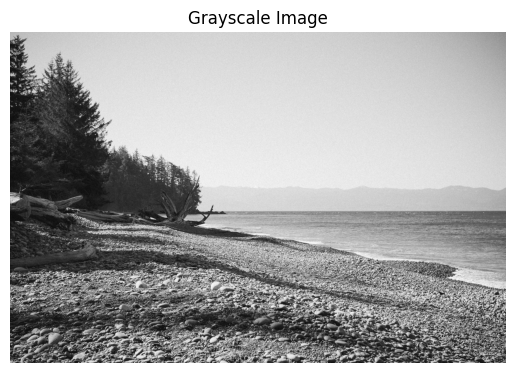

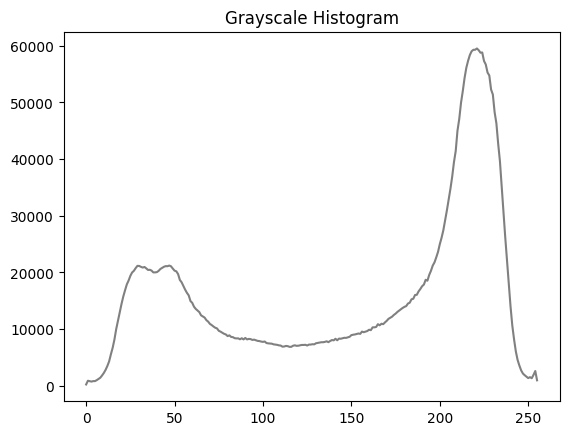

In [ ]:
img_rgb = np.array(img)
img_gray= 0.299 * img_rgb[:, :, 0] + 0.587 * img_rgb[:, :, 1] + 0.114 * img_rgb[:, :, 2]
img_gray = np.round(img_gray).astype(int)

# Plotting grayscale image
plt.imshow(img_gray, cmap = 'gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Grayscale histogram Function
def gray_histo(gray_img):
    gray_hist = np.zeros(256)
    for row in gray_img:
        for value in row:
            gray_hist[value] += 1

    plt.plot(gray_hist, color = 'gray')
    plt.title("Grayscale Histogram")
    plt.show()
    return

gray_histo(img_gray)

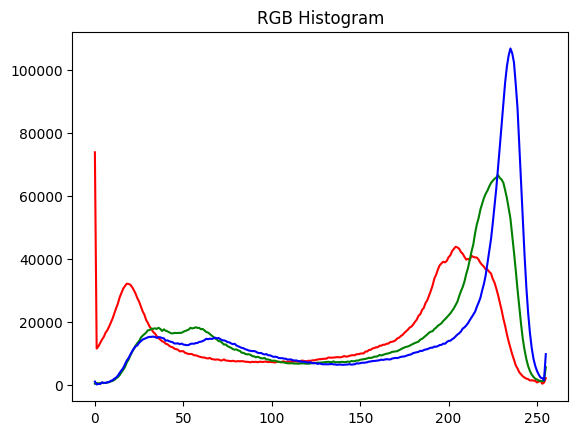

In [ ]:
def rgb_histogram(rgb_img):
    h,w,c = rgb_img.shape
    color = ['r','g','b']
    for k in range(c):
        col_hist = np.zeros(256)
        for i in range(h):
            for j in range(w):
                col_hist[img_rgb[i,j,k]] += 1

        plt.plot(col_hist, color = color[k])
    plt.title("RGB Histogram")
    plt.show()
    return

rgb_histogram(img_rgb)

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:
def RGB2HSV(img_rgb):
    h,w,c = img_rgb.shape
    img_hsv = np.zeros((h,w,3))
    for i in range(h):
        for j in range(w):
            r = img_rgb[i,j,0]/255
            g = img_rgb[i,j,1]/255
            b = img_rgb[i,j,2]/255

            cmax = max(r,g,b)
            cmin = min(r,g,b)
            delta = cmax - cmin

            # Calculating Hue
            if delta == 0:
                H = 0
            elif cmax == r:
                H = 60*(g-b)/(delta % 6)
            elif cmax == g:
                H = 60*((b-r)/delta + 2)
            elif cmax == b:
                H = 60*((r-g)/delta + 4)
            H = H/2

            # Calculating Saturation
            if cmax == 0:
                S = 0
            else:
                S = (delta/cmax)*255

            # Calculating Value
            V = cmax * 255
            img_hsv[i,j,0] = H
            img_hsv[i,j,1] = S
            img_hsv[i,j,2] = V
    return img_hsv.astype(np.uint8)

RGB2HSV(img_rgb)


array([[[100,  70, 213],
        [100,  69, 218],
        [100,  68, 221],
        ...,
        [ 99, 159, 202],
        [ 99, 161, 199],
        [ 99, 163, 196]],

       [[100,  70, 213],
        [100,  69, 215],
        [100,  69, 215],
        ...,
        [ 99, 169, 190],
        [ 99, 172, 186],
        [ 99, 175, 183]],

       [[100,  69, 215],
        [100,  70, 212],
        [100,  71, 209],
        ...,
        [ 99, 153, 209],
        [ 99, 155, 206],
        [ 99, 158, 203]],

       ...,

       [[ 87,  13, 190],
        [ 87,  13, 186],
        [ 87,  14, 182],
        ...,
        [ 91,  81, 112],
        [ 94,  94,  97],
        [ 91, 116,  79]],

       [[ 87,  13, 190],
        [ 87,  13, 185],
        [ 92,  15, 181],
        ...,
        [ 91,  46, 174],
        [ 91,  53, 152],
        [ 91,  62, 131]],

       [[ 87,  13, 191],
        [ 87,  13, 185],
        [ 92,  15, 178],
        ...,
        [ 91,  41, 197],
        [ 91,  48, 170],
        [ 91,  56, 144]]

<function matplotlib.pyplot.show(close=None, block=None)>

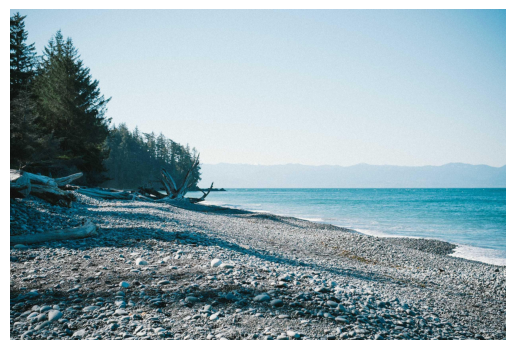

In [ ]:
# HSV2RGB using opencv
img_rgb2 = cv2.cvtColor(RGB2HSV(img_rgb),cv2.COLOR_HSV2RGB)

plt.imshow(img_rgb2)
plt.axis("off")
plt.show

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

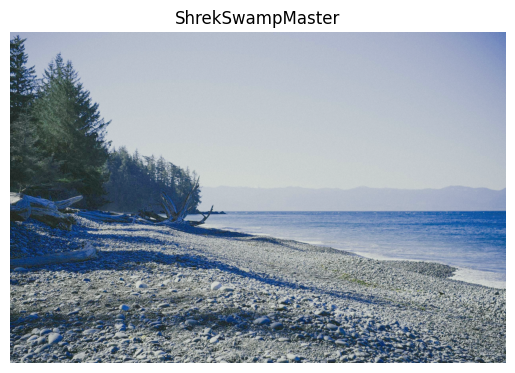

In [ ]:
def ShrekSwampMaster(img_rgb):

    # Hue Rotation: Rotate hue by +30 degrees for warmer green - yellow tone
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    shift = 30*179//360
    hsv[:,:,0] = (hsv[:,:,0] + shift)%180
    hue_shifted = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

    # Gamma correction
    gamma = 1.5
    inv = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv * 255 for i in range(256)]).astype(np.uint8)
    gamma_corrected = cv2.LUT(hue_shifted,table)

    # Green Tint for boosting green channel, subtle red/blue adjustment
    green_tint = np.zeros_like(gamma_corrected)
    green_tint[:,:,1] = 40  # Boosting green channel
    green_tint[:,:,0] = 10  # Subtle red warmth
    green_tint[:,:,2] = 15  # Slight blue for depth
    tinted = cv2.addWeighted(gamma_corrected, 0.85, green_tint, 0.15, 0)  # 0.85*original + 0.15* green tint

    filtered_img = np.clip(tinted, 0, 255).astype(np.uint8)

    return filtered_img

plt.imshow(ShrekSwampMaster(img_rgb))
plt.title("ShrekSwampMaster")
plt.axis("off")
plt.show()

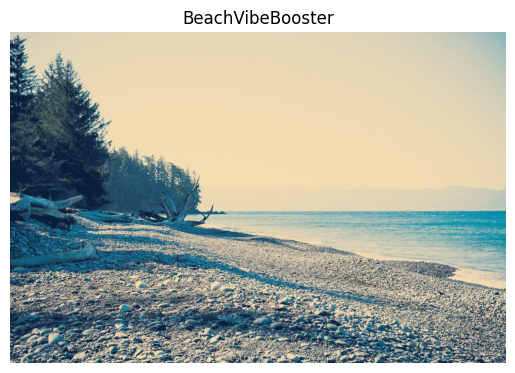

In [ ]:
def BeachVibeBooster(img_rgb):

    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV).astype(np.float32)

    # Brightness shift
    v = hsv[:, :, 2]
    v_shifted = np.clip(v - 30, 0, 255)
    hsv[:, :, 2] = v_shifted

    bright = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

    # Gamma Correction
    gamma = 1.5
    inv = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv * 255 for i in range(256)]).astype(np.uint8)
    gamma_corrected = cv2.LUT(bright, table).astype(np.float32)

    # Split Toning
    lum = cv2.cvtColor(gamma_corrected.astype(np.uint8),cv2.COLOR_RGB2GRAY).astype(np.float32) / 255.0

    shadows_mask = np.clip(1.0 - lum * 2.0, 0.0, 1.0)[:, :, None]
    highlights_mask = np.clip(lum * 2.0 - 1.0, 0.0, 1.0)[:, :, None]

    cool_shadow = np.array([10, 30, 60], dtype=np.float32)
    warm_highlight = np.array([255, 220, 160], dtype=np.float32)

    # Add cool tint to shadows
    toned = gamma_corrected + shadows_mask * cool_shadow

    # Add warm tint to highlights
    toned = toned * (1 - highlights_mask) + warm_highlight * highlights_mask

    filtered_img = np.clip(toned, 0, 255).astype(np.uint8)
    return filtered_img

plt.imshow(BeachVibeBooster(img_rgb))
plt.title("BeachVibeBooster")
plt.axis("off")
plt.show()

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

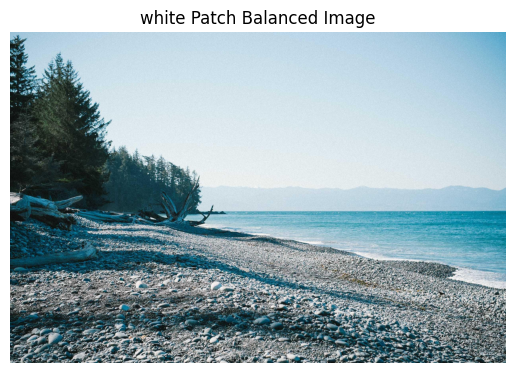

In [ ]:
def white_patch_balance(img_rgb):
    img_float = img_rgb.astype(np.float32)
    max_rgb = img_float.max(axis=(0, 1)) # For finding the maximum value in each channel (R, G, B)

    # Computing scaling factors for each channel to make the max value 255
    scale_factors = 255.0 / max_rgb

    # Step 3: Scale the image
    balanced_img = img_float * scale_factors

    # Step 4: Clip values to [0, 255] and convert back to uint8
    balanced_img = np.clip(balanced_img, 0, 255).astype(np.uint8)

    return balanced_img

plt.imshow(white_patch_balance(img_rgb))
plt.title("white Patch Balanced Image")
plt.axis("off")
plt.show()

In [ ]:
#the function return original image because max_rgb = [255,255,255], so scaling factor = 1

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.